# **fitting mutability time course to exppnential function**

**test code** from https://douglas-watson.github.io/post/2018-09_exponential_curve_fitting/ 

**now with my code**

In [2]:
library(ggplot2)
library(tidyverse)
library(broom)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1     ✔ purrr   0.3.2
✔ tidyr   1.1.3     ✔ dplyr   0.8.5
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.1     ✔ forcats 0.4.0
Warning message:
“package ‘tidyr’ was built under R version 3.6.3”Warning message:
“package ‘dplyr’ was built under R version 3.6.3”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:

avMut = list(5.067879823687896e-05, 5.067879823687896e-05, 5.067879823687896e-05, 5.067681539573611e-05, 5.06278817186842e-05, 5.062775379712076e-05, 5.062599691320195e-05, 5.0567913251043255e-05, 5.056995974992254e-05, 5.056995974992254e-05, 5.056995974992254e-05, 5.057096567443974e-05, 5.057076732508373e-05, 5.0524508115047555e-05, 5.0471244635947125e-05, 5.046940908158741e-05, 5.042618970955114e-05, 5.042618970955114e-05, 5.042618970955114e-05, 5.037662108014899e-05, 5.037662108014899e-05, 5.031807702614668e-05, 5.031807702614668e-05, 5.031915436358885e-05, 5.026854841166255e-05, 5.026854841166255e-05, 5.026854841166255e-05, 5.0265996194078984e-05, 5.022072730443867e-05, 5.022072730443867e-05, 5.0270325996127504e-05, 5.021894659233018e-05, 5.016719245399564e-05, 5.01082293074722e-05, 5.0065092363942675e-05, 5.0065092363942675e-05, 5.006541121972078e-05, 5.0069848844276964e-05, 5.0069848844276964e-05, 5.0069848844276964e-05, 5.002084584957955e-05, 5.002084584957955e-05, 5.0016318579301594e-05, 4.996760146521909e-05, 4.9965873773795085e-05, 4.9916603926044544e-05, 4.9916603926044544e-05, 4.991547556889895e-05, 4.991547556889895e-05, 4.991547556889895e-05, 4.986907242837218e-05, 4.991891710714204e-05, 4.986907242837218e-05, 4.986907242837218e-05, 4.986907242837218e-05, 4.9869098608258996e-05, 4.982065833600241e-05, 4.976873718822382e-05, 4.976873718822382e-05, 4.976873718822382e-05, 4.9717357784426494e-05, 4.9717357784426494e-05, 4.9717357784426494e-05, 4.971681613955601e-05, 4.9763700299003876e-05, 4.971031313435473e-05, 4.971031313435473e-05, 4.96570496552543e-05, 4.965527173838379e-05, 4.960608255564873e-05, 4.9556027130183216e-05, 4.9556466050228396e-05, 4.949998465726837e-05, 4.949998465726837e-05, 4.945073719820588e-05, 4.939313527020118e-05, 4.934645561046894e-05, 4.9299653879527804e-05, 4.9299725142920066e-05, 4.9299725142920066e-05, 4.925304548318784e-05, 4.925094240674735e-05, 4.919814430939168e-05, 4.9249523713189e-05, 4.9249523713189e-05, 4.920829916814816e-05, 4.915769321622186e-05, 4.915769321622186e-05, 4.9108117155767406e-05, 4.9108117155767406e-05, 4.9059676883510836e-05, 4.9059676883510836e-05, 4.9059676883510836e-05, 4.905854175075648e-05, 4.905854175075648e-05, 4.906250193814854e-05, 4.901112253435122e-05, 4.901111510329893e-05, 4.901111510329893e-05, 4.896766775838682e-05, 4.891925685700823e-05, 4.8920944423281515e-05, 4.8918334520567695e-05, 4.8918120014138115e-05, 4.8918120014138115e-05, 4.886563835318966e-05, 4.886563835318966e-05, 4.886665644675867e-05, 4.886665644675867e-05, 4.880993860106025e-05, 4.880942177678793e-05, 4.880942177678793e-05, 4.875400111614375e-05, 4.870304080486758e-05, 4.870128392094877e-05, 4.870232990947051e-05, 4.870232990947051e-05, 4.8657380345166364e-05, 4.8657478449024396e-05, 4.8657478449024396e-05, 4.860847545432697e-05, 4.855612543272002e-05, 4.855612543272002e-05, 4.8509437850897296e-05, 4.8451940721244386e-05, 4.839738516825836e-05, 4.839738516825836e-05, 4.839738516825836e-05, 4.839645097128965e-05, 4.835006833286965e-05, 4.834827269079496e-05, 4.834785019477635e-05, 4.8302162779394096e-05, 4.8302162779394096e-05, 4.830079289395914e-05, 4.8252352621702574e-05, 4.825108291990633e-05, 4.825108291990633e-05, 4.820179031024842e-05, 4.820179031024842e-05, 4.815308254693255e-05, 4.8156090513013206e-05, 4.8155548868142724e-05, 4.815657505902847e-05, 4.815657505902847e-05, 4.815657505902847e-05, 4.8113262930357504e-05, 4.80643292533056e-05, 4.80643292533056e-05, 4.80643292533056e-05, 4.801337206875295e-05, 4.801337206875295e-05, 4.80142334201805e-05, 4.797110439874144e-05, 4.792049409154261e-05, 4.792049409154261e-05, 4.7918447592663316e-05, 4.7918447592663316e-05, 4.7918447592663316e-05, 4.786829670118954e-05, 4.786829670118954e-05, 4.7819796498592224e-05, 4.781815918628516e-05, 4.7768980725745664e-05, 4.776314728330591e-05, 4.7764204306939814e-05, 4.776329775193401e-05, 4.771546083401596e-05, 4.76662716512809e-05, 4.7623249442080714e-05, 4.7623249442080714e-05, 4.7623249442080714e-05, 4.767890708008022e-05, 4.767890708008022e-05, 4.76773683222923e-05, 4.76773683222923e-05, 4.7676797802881866e-05, 4.7628386901503266e-05, 4.7575599027850914e-05, 4.7575599027850914e-05, 4.757351311012459e-05, 4.752089531012499e-05, 4.747054011539679e-05, 4.7421720587463294e-05, 4.7421720587463294e-05, 4.7376339384784946e-05, 4.7327356268877446e-05, 4.72782812352608e-05, 4.72782812352608e-05, 4.72782812352608e-05, 4.7228436556490924e-05, 4.722839785147227e-05, 4.7178588003142915e-05, 4.7225389734084045e-05, 4.7225389734084045e-05, 4.7283473396242746e-05, 4.728811518114835e-05, 4.728811518114835e-05, 4.7245026909265796e-05, 4.7245026909265796e-05, 4.7243300044765246e-05, 4.7245077961635756e-05, 4.7245077961635756e-05, 4.719515396418799e-05, 4.719515396418799e-05, 4.719471504414281e-05, 4.719487350196024e-05, 4.7192195615291094e-05, 4.719114778228512e-05, 4.719114778228512e-05, 4.71918510966431e-05, 4.71918510966431e-05, 4.714289280133376e-05, 4.7089629322233325e-05, 4.7036841448580974e-05, 4.698759398951848e-05, 4.699035338102173e-05, 4.698926918803441e-05, 4.693072513403211e-05, 4.692872223227736e-05, 4.692872223227736e-05, 4.692872223227736e-05, 4.692872223227736e-05, 4.692872223227736e-05, 4.687618686078449e-05, 4.681718974113232e-05, 4.675913209830957e-05, 4.675913209830957e-05, 4.6707752694512247e-05, 4.6707752694512247e-05, 4.6655402672905294e-05, 4.6655402672905294e-05, 4.6650394652507264e-05, 4.659279272450257e-05, 4.659279272450257e-05, 4.658994016498216e-05, 4.6540868504935726e-05, 4.654102696275316e-05, 4.65402681002273e-05, 4.6491196440180866e-05, 4.6491196440180866e-05, 4.653845852707959e-05, 4.653845852707959e-05, 4.653732106102156e-05, 4.6534959226660815e-05, 4.6534959226660815e-05, 4.648400204210817e-05, 4.648356312206299e-05, 4.643418524931266e-05, 4.638577434793406e-05, 4.638577434793406e-05, 4.638577434793406e-05, 4.638577434793406e-05, 4.6332387183284914e-05, 4.6332387183284914e-05, 4.628367006920241e-05, 4.628441647780481e-05, 4.6235699363722316e-05, 4.6234492098981835e-05, 4.62335791367711e-05, 4.61790200389893e-05, 4.617969012739376e-05, 4.617969012739376e-05, 4.6180870494667615e-05, 4.613553431191171e-05, 4.613553431191171e-05, 4.6188446558385795e-05, 4.6188446558385795e-05, 4.6188446558385795e-05, 4.6188446558385795e-05, 4.618791933117508e-05, 4.613465585207465e-05, 4.608540839301216e-05, 4.608540839301216e-05, 4.603913990371058e-05, 4.603913990371058e-05, 4.598690403122203e-05, 4.5986776556486036e-05, 4.592917462848134e-05, 4.592917462848134e-05, 4.587375396783718e-05, 4.5872408254349025e-05, 4.582678215212234e-05, 4.5825659672330395e-05, 4.58225260264723e-05, 4.58225260264723e-05, 4.58225260264723e-05, 4.582535376539454e-05, 4.582535376539454e-05, 4.582535376539454e-05, 4.582535376539454e-05, 4.582737657339113e-05, 4.582737657339113e-05, 4.5830645897462176e-05, 4.588299591906914e-05, 4.588299591906914e-05, 4.583620211021849e-05, 4.583620211021849e-05, 4.583726785968406e-05, 4.579000577278534e-05, 4.574132053858997e-05, 4.574132053858997e-05, 4.569257405362949e-05, 4.563918688898036e-05, 4.563918688898036e-05, 4.558627464250627e-05, 4.553752815754579e-05, 4.548884292335043e-05, 4.543399709372558e-05, 4.543333223483163e-05, 4.543014297693565e-05, 4.542878638716944e-05, 4.542878638716944e-05, 4.538037548579084e-05, 4.533340013073516e-05, 4.528633623154054e-05, 4.528839197684228e-05, 4.528839197684228e-05, 4.528839197684228e-05, 4.528839197684228e-05, 4.5239951704585695e-05, 4.5239951704585695e-05, 4.518541742740207e-05, 4.518541742740207e-05, 4.514038745735007e-05, 4.508583190436403e-05, 4.503742100298543e-05, 4.498518513049689e-05, 4.493503423902311e-05, 4.488512085209633e-05, 4.488512085209633e-05, 4.488512085209633e-05, 4.488512085209633e-05, 4.488548909597114e-05, 4.488548909597114e-05, 4.488756112882805e-05, 4.484434175679178e-05, 4.4793582835279784e-05, 4.4745082632682455e-05, 4.474310935331215e-05, 4.469748325108546e-05, 4.469935404549077e-05, 4.47009632365295e-05, 4.4701760723298676e-05, 4.470007315702538e-05, 4.4699219852755284e-05, 4.4699219852755284e-05, 4.464993052414388e-05, 4.464993052414388e-05, 4.4651345007382475e-05, 4.4650287983748564e-05, 4.465013439663269e-05, 4.465013439663269e-05, 4.465013439663269e-05, 4.4597652735684236e-05, 4.459929168042789e-05, 4.459646771897036e-05, 4.459646771897036e-05, 4.459646771897036e-05, 4.4543080554321226e-05, 4.4543080554321226e-05, 4.454106110639124e-05, 4.449198944634481e-05, 4.4437430348563e-05, 4.4437430348563e-05, 4.4437430348563e-05, 4.4437430348563e-05, 4.4388358688516574e-05, 4.438938578534193e-05, 4.4340427490032596e-05, 4.4340427490032596e-05, 4.428789211853972e-05, 4.433098039042227e-05, 4.4379802302856566e-05, 4.4329878305408805e-05, 4.4271794643250104e-05, 4.4222195951561256e-05, 4.4222629253123875e-05, 4.417694183774162e-05, 4.413372246570535e-05, 4.408149510522285e-05, 4.408149510522285e-05, 4.4028527033094845e-05, 4.4028527033094845e-05, 4.397397148010881e-05, 4.392902191580466e-05, 4.388258940439991e-05, 4.388361968243962e-05, 4.392719735932658e-05, 4.392544494591082e-05, 4.392544494591082e-05, 4.39267642231373e-05, 4.392661559256557e-05, 4.392661559256557e-05, 4.388214508050272e-05, 4.3881283729075176e-05, 4.3826749451891534e-05, 4.3869878473330594e-05, 4.3869878473330594e-05, 4.386936164905827e-05, 4.3826220516850064e-05, 4.382111317622017e-05, 4.377473053780017e-05, 4.377473053780017e-05, 4.377473053780017e-05, 4.3776248911853046e-05, 4.372742938391955e-05, 4.377471795301296e-05, 4.382115046441771e-05, 4.382115046441771e-05, 4.376818239228972e-05, 4.3717222081013533e-05, 4.375734459230272e-05, 4.375734459230272e-05, 4.3754014784283405e-05, 4.3754014784283405e-05, 4.370885765926071e-05, 4.37076908223247e-05, 4.365304318040397e-05, 4.365304318040397e-05, 4.365299153482542e-05, 4.365299153482542e-05, 4.370216999536491e-05, 4.375508224183899e-05, 4.3706582039241664e-05, 4.3706582039241664e-05, 4.370645362868658e-05, 4.370645362868658e-05, 4.3661423658634576e-05, 4.3661423658634576e-05, 4.3661423658634576e-05, 4.3661423658634576e-05, 4.3661423658634576e-05, 4.3661423658634576e-05, 4.361358674071653e-05, 4.357041156193066e-05, 4.35247241465484e-05, 4.352619112516755e-05, 4.347357332516795e-05, 4.347511208295586e-05, 4.347511208295586e-05, 4.347310442121484e-05, 4.341560729156194e-05, 4.336125929929445e-05, 4.336125929929445e-05, 4.336125929929445e-05, 4.3312256304597034e-05, 4.337031394741978e-05, 4.332106648835729e-05, 4.332106648835729e-05, 4.332122970106917e-05, 4.33213464128428e-05, 4.3320798764070185e-05, 4.3277623585284307e-05, 4.3277623585284307e-05, 4.3330591657412306e-05, 4.328197730569656e-05, 4.328197730569656e-05, 4.328197730569656e-05, 4.328197730569656e-05, 4.323308846011756e-05, 4.3193664975646594e-05, 4.3192758510197295e-05, 4.3239161650724074e-05, 4.3239161650724074e-05, 4.3185145396593203e-05, 4.323776319659281e-05, 4.323776319659281e-05, 4.323776319659281e-05, 4.32345990846312e-05, 4.3235337137070216e-05, 4.3235337137070216e-05, 4.3191889792158106e-05, 4.318560952240631e-05, 4.3136231649655975e-05, 4.309096276001566e-05, 4.309096276001566e-05, 4.304389886082104e-05, 4.304359400910643e-05, 4.304359400910643e-05, 4.304359400910643e-05, 4.3042774564015946e-05, 4.299351005600271e-05, 4.293877342075355e-05, 4.293877342075355e-05, 4.293877342075355e-05, 4.288958423801848e-05, 4.288844677196046e-05, 4.288844677196046e-05, 4.288837639682515e-05, 4.288823634307511e-05, 4.28307392134222e-05, 4.27814498848108e-05, 4.27387320338024e-05, 4.27387320338024e-05, 4.2738860444357484e-05, 4.2738860444357484e-05, 4.269541309944538e-05, 4.2646338065828733e-05, 4.2646338065828733e-05, 4.264665692160684e-05, 4.264609174992826e-05, 4.2647244237851155e-05, 4.2694632723940544e-05, 4.2694074948574116e-05, 4.263841731057462e-05, 4.263841731057462e-05, 4.264062137988417e-05, 4.263728241414143e-05, 4.263728241414143e-05, 4.263728241414143e-05, 4.263728241414143e-05, 4.263728241414143e-05, 4.2591944742407866e-05, 4.2592573482892706e-05, 4.259040346197267e-05, 4.2596494713484435e-05, 4.259817098382789e-05, 4.254976008244928e-05, 4.2551298840237203e-05, 4.2551298840237203e-05, 4.2552355107823126e-05, 4.2552355107823126e-05, 4.2505553376882e-05, 4.245597731642755e-05, 4.245597731642755e-05, 4.2410820191404854e-05, 4.2410820191404854e-05, 4.2410820191404854e-05, 4.2410820191404854e-05, 4.236261669136349e-05, 4.236261669136349e-05, 4.236261669136349e-05, 4.236098871703079e-05, 4.236036341673635e-05, 4.236036341673635e-05, 4.235885605596294e-05, 4.2357168489689656e-05, 4.2301510851690153e-05, 4.230278724753279e-05, 4.230278724753279e-05, 4.230278724753279e-05, 4.2303852996998364e-05, 4.226063362496209e-05, 4.226063362496209e-05, 4.225899631265503e-05, 4.225899631265503e-05, 4.225899631265503e-05, 4.2259734356386244e-05, 4.220835495258892e-05, 4.220713959526218e-05, 4.215776172251184e-05, 4.216279833596297e-05, 4.211044831435601e-05, 4.206742610515583e-05, 4.200982417715113e-05, 4.200982417715113e-05, 4.200982417715113e-05, 4.200982417715113e-05, 4.206878732367457e-05, 4.206890385580778e-05, 4.206890385580778e-05, 4.201423653820413e-05, 4.201423653820413e-05, 4.2017447101251544e-05, 4.202385718023517e-05, 4.202286803879098e-05, 4.202223929830614e-05, 4.202081689297706e-05, 4.197163843243757e-05, 4.1928616223237384e-05, 4.1931000024443e-05, 4.1931000024443e-05, 4.19833236532439e-05, 4.203699808415554e-05, 4.199137026190924e-05, 4.199416410809649e-05, 4.199479284858132e-05, 4.194802283825187e-05, 4.1896154550798917e-05, 4.1896154550798917e-05, 4.1896154550798917e-05, 4.189617437832295e-05, 4.184382435671599e-05, 4.1892532120031873e-05, 4.188979958700019e-05, 4.194545722499969e-05, 4.194545722499969e-05, 4.199076206892078e-05, 4.199280856780006e-05, 4.1951675196443676e-05, 4.1951675196443676e-05, 4.1951675196443676e-05, 4.195203280740371e-05, 4.190107562285107e-05, 4.190107562285107e-05, 4.190107562285107e-05, 4.1900612806841847e-05, 4.1901028842886105e-05, 4.1901028842886105e-05, 4.185234360869074e-05, 4.185133768417354e-05, 4.1852518051447394e-05, 4.1857708093805564e-05, 4.190110216496387e-05, 4.1852282637030376e-05, 4.1852282637030376e-05, 4.19075132055788e-05, 4.195269381711278e-05, 4.1954556580035714e-05, 4.1954556580035714e-05, 4.1902320707547175e-05, 4.185142483615009e-05, 4.179707684388261e-05, 4.1751740661126696e-05, 4.175614891480491e-05, 4.1816024811914304e-05, 4.181553001314752e-05, 4.181332594383796e-05, 4.181332594383796e-05, 4.1768295973785964e-05, 4.1764025491710666e-05, 4.176288802565264e-05, 4.176288802565264e-05, 4.1811776871231634e-05, 4.181279894428297e-05, 4.1766028933953526e-05, 4.1766028933953526e-05, 4.1766028933953526e-05, 4.176239481584009e-05, 4.171281875538564e-05, 4.176746639730638e-05, 4.176746639730638e-05, 4.176746639730638e-05, 4.176746639730638e-05, 4.176136787076396e-05, 4.175822857940051e-05, 4.169926543287707e-05, 4.169926543287707e-05, 4.165283292147232e-05, 4.165283292147232e-05, 4.165283292147232e-05, 4.165283292147232e-05, 4.165283292147232e-05, 4.16516605518961e-05, 4.16516605518961e-05, 4.1602084491441654e-05, 4.155565198003689e-05, 4.155565198003689e-05, 4.155565198003689e-05, 4.155565198003689e-05, 4.155565198003689e-05, 4.150378369258394e-05, 4.144924941540031e-05, 4.144924941540031e-05, 4.144924941540031e-05, 4.139749527706577e-05, 4.139749527706577e-05, 4.139749527706577e-05, 4.1394778839913675e-05, 4.139368351792576e-05, 4.1346995936103044e-05, 4.134537849234321e-05, 4.1347375187959926e-05, 4.134893893658164e-05, 4.134893893658164e-05, 4.134890557321691e-05, 4.129965811415441e-05, 4.129680555463401e-05, 4.129591856837101e-05, 4.130165915463377e-05, 4.129962531300592e-05, 4.129957366742737e-05, 4.1250754139493874e-05, 4.1250754139493874e-05, 4.1250754139493874e-05, 4.1250754139493874e-05, 4.125171840559902e-05, 4.125171840559902e-05, 4.125072926415482e-05, 4.125072926415482e-05, 4.125072926415482e-05, 4.125072926415482e-05, 4.125072926415482e-05, 4.125072926415482e-05, 4.119615250709381e-05, 4.114477310329649e-05, 4.114477310329649e-05, 4.114477310329649e-05, 4.1142995186425984e-05, 4.1146656827489976e-05, 4.1101499702467276e-05, 4.1101499702467276e-05, 4.1101499702467276e-05, 4.1101499702467276e-05, 4.104963141501432e-05, 4.104963141501432e-05, 4.104963141501432e-05, 4.104963141501432e-05, 4.10496244693033e-05, 4.109977536077707e-05, 4.109769479487717e-05, 4.109769479487717e-05, 4.109424042827918e-05, 4.109424042827918e-05, 4.1095571633170105e-05, 4.1095571633170105e-05, 4.104419222937279e-05, 4.104454984033282e-05, 4.1043280138536574e-05, 4.1043280138536574e-05, 4.0993356141088814e-05, 4.0993356141088814e-05, 4.0993356141088814e-05, 4.0942882240992184e-05, 4.0942882240992184e-05, 4.088901075074597e-05, 4.0886869400243564e-05, 4.0886869400243564e-05, 4.0886869400243564e-05, 4.0891847831304124e-05, 4.0838879759176124e-05, 4.0838879759176124e-05, 4.083688306355941e-05, 4.083662089905457e-05, 4.0836909856027265e-05, 4.0836909856027265e-05, 4.0836909856027265e-05, 4.083499416952271e-05, 4.083506454465801e-05, 4.083506454465801e-05, 4.0791976272775454e-05, 4.0791976272775454e-05, 4.0791976272775454e-05, 4.0748756900739185e-05, 4.074714770970044e-05, 4.074714770970044e-05, 4.0792672105023923e-05, 4.07473338977381e-05, 4.07473338977381e-05, 4.069405961290619e-05, 4.069405961290619e-05, 4.064109154077819e-05, 4.068627448041589e-05, 4.06337470310135e-05, 4.06337470310135e-05, 4.063189979649748e-05, 4.058014565816295e-05, 4.0580002092022506e-05, 4.0580002092022506e-05, 4.0580002092022506e-05, 4.0580002092022506e-05, 4.0632789965674865e-05, 4.0578803082421964e-05, 4.0578803082421964e-05, 4.0578803082421964e-05, 4.0578803082421964e-05, 4.0627786198329464e-05, 4.057731229823283e-05, 4.057731229823283e-05, 4.057741040209085e-05, 4.052156747273014e-05, 4.052156747273014e-05, 4.046903210123727e-05, 4.0518539702666016e-05, 4.0465390372684e-05, 4.05186646575159e-05, 4.056826334920474e-05, 4.056826334920474e-05, 4.051845350087539e-05, 4.056397789619886e-05, 4.056418963889083e-05, 4.056613325490564e-05, 4.056613325490564e-05, 4.056535162251152e-05, 4.056535162251152e-05, 4.056697959684421e-05, 4.056670259320908e-05, 4.056670355495769e-05, 4.052167358490569e-05, 4.052167358490569e-05, 4.052167358490569e-05, 4.0520607835440114e-05, 4.047167415838821e-05, 4.0413028271362384e-05, 4.041603623744304e-05, 4.041603623744304e-05, 4.041603623744304e-05, 4.041603623744304e-05, 4.0417770962263725e-05, 4.0414857699221064e-05, 4.0414857699221064e-05, 4.0414857699221064e-05, 4.040577828975928e-05, 4.035596844142993e-05, 4.040091800573408e-05, 4.040091800573408e-05, 4.0400376360863596e-05, 4.0393027307719024e-05, 4.0393027307719024e-05, 4.033448325371673e-05, 4.0282133232109764e-05, 4.0233058198493116e-05, 4.0233058198493116e-05, 4.018009012636511e-05, 4.018009012636511e-05, 4.017722901156395e-05, 4.012793968295255e-05, 4.0128678174369634e-05, 4.012750580479342e-05, 4.012392148450733e-05, 4.01726067187027e-05, 4.011891334134965e-05, 4.011891334134965e-05, 4.0072233681617424e-05, 4.0072233681617424e-05, 4.007327165088576e-05, 4.007475762604372e-05, 4.007475762604372e-05, 4.007522420969923e-05, 4.002845419936979e-05, 4.002603693467097e-05, 4.0025959201921725e-05, 4.00849563215739e-05, 4.00849563215739e-05, 4.00849563215739e-05, 4.00849563215739e-05, 4.00849563215739e-05, 4.003837396520682e-05, 4.003837396520682e-05, 3.999197082468004e-05, 3.999197082468004e-05, 3.999197082468004e-05, 4.004488307115413e-05, 4.004488307115413e-05, 3.9992766792182395e-05, 3.994358833164291e-05, 3.994358833164291e-05, 3.9894768803709416e-05, 3.9894768803709416e-05, 3.9894768803709416e-05, 3.989355344638266e-05, 3.9893026219171954e-05, 3.9891248302301444e-05, 3.9891248302301444e-05, 3.984073190586265e-05, 3.9835842547040146e-05, 3.9837035322314685e-05, 3.983465152110906e-05, 3.9833117276923534e-05, 3.9834106418367735e-05, 3.9834106418367735e-05, 3.9834106418367735e-05, 3.983190868058125e-05, 3.983190868058125e-05, 3.983190868058125e-05, 3.983022111430796e-05, 3.983022111430796e-05, 3.9883340663486275e-05, 3.988634862956694e-05, 3.988634862956694e-05, 3.988634862956694e-05, 3.983338055743893e-05, 3.9784561029505436e-05, 3.9784561029505436e-05, 3.9784388890706595e-05, 3.9784388890706595e-05, 3.978244877865577e-05, 3.978244877865577e-05, 3.978288181708962e-05, 3.978288181708962e-05, 3.978366679199535e-05, 3.973468367608785e-05, 3.968841518678627e-05, 3.969005874292598e-05, 3.969103527584677e-05, 3.969103527584677e-05, 3.973637294758032e-05, 3.978170913033623e-05, 3.973491532148558e-05, 3.973030221597851e-05, 3.968072615552406e-05, 3.96792667438565e-05, 3.9633997854216185e-05, 3.963237149695456e-05, 3.9579097212122665e-05, 3.9579097212122665e-05, 3.9579097212122665e-05, 3.9578634802810835e-05, 3.9578634802810835e-05, 3.9578634802810835e-05, 3.963728068983666e-05, 3.963728068983666e-05, 3.958886978845806e-05, 3.953321215045856e-05, 3.953321215045856e-05, 3.953321215045856e-05, 3.953321215045856e-05, 3.953321215045856e-05, 3.953321215045856e-05, 3.953434961651659e-05, 3.953434961651659e-05, 3.9536204969721584e-05, 3.9536204969721584e-05, 3.9534334175316276e-05, 3.948209830282773e-05, 3.9482016368878135e-05, 3.9482016368878135e-05, 3.9432746521127594e-05, 3.9432746521127594e-05, 3.938725736878599e-05, 3.938725736878599e-05, 3.9385491542955044e-05, 3.938263042815388e-05, 3.938438731207268e-05, 3.93841909969984e-05, 3.933887110747561e-05, 3.929353290018979e-05, 3.924819469290396e-05, 3.924819469290396e-05, 3.924819469290396e-05, 3.924547825575186e-05, 3.924716582202516e-05, 3.924716582202516e-05, 3.919645116254571e-05, 3.9195074136370715e-05, 3.9195074136370715e-05, 3.9195074136370715e-05, 3.9195074136370715e-05, 3.919479713273558e-05, 3.919479713273558e-05, 3.924156714306503e-05, 3.924156714306503e-05, 3.924156714306503e-05, 3.9242965350729605e-05, 3.924347275801981e-05, 3.924347275801981e-05, 3.9240341087121536e-05, 3.918707760802111e-05, 3.9189625496270346e-05, 3.9189625496270346e-05, 3.919236751607936e-05, 3.913988585513091e-05, 3.9139886816879526e-05, 3.914158980734938e-05, 3.914158980734938e-05, 3.9138821570083026e-05, 3.9138138664603614e-05, 3.9138138664603614e-05, 3.909133693366248e-05, 3.909133693366248e-05, 3.9090666845258015e-05, 3.909341169719738e-05, 3.909225455223722e-05, 3.904673015691374e-05, 3.904608618088916e-05, 3.899726426845487e-05, 3.899726426845487e-05, 3.894270871546883e-05, 3.889487179755079e-05, 3.88423443481484e-05, 3.8845687048892955e-05, 3.8845687048892955e-05, 3.884634615983347e-05, 3.884634615983347e-05, 3.89049920468593e-05, 3.89049920468593e-05, 3.89049920468593e-05, 3.884693440403655e-05, 3.884693440403655e-05, 3.889740830413318e-05, 3.883788846805218e-05, 3.883313830748781e-05, 3.883313830748781e-05, 3.883313830748781e-05, 3.883313830748781e-05, 3.883200958142259e-05, 3.883200958142259e-05, 3.883200958142259e-05, 3.883200958142259e-05, 3.883200958142259e-05, 3.883133949301814e-05, 3.883117006839012e-05, 3.8829028717887704e-05, 3.877576523878727e-05, 3.877501883018487e-05, 3.877501883018487e-05, 3.877501883018487e-05, 3.877820356391803e-05, 3.877820356391803e-05, 3.877820356391803e-05, 3.877625067823337e-05, 3.8775453191464195e-05, 3.877707063522403e-05, 3.877707063522403e-05, 3.877707063522403e-05, 3.877560418018429e-05, 3.877560418018429e-05, 3.8725759501414423e-05, 3.8725759501414423e-05, 3.8725759501414423e-05, 3.868049061177411e-05, 3.862394977673704e-05, 3.862232180240434e-05, 3.85702055234326e-05, 3.85702055234326e-05, 3.862441250762591e-05, 3.862441250762591e-05, 3.857187713613305e-05, 3.852848306497474e-05, 3.858835896208413e-05, 3.8587998637494376e-05, 3.858866955295744e-05, 3.8585530261594e-05, 3.8585530261594e-05, 3.8585376674478125e-05, 3.8584164114144565e-05, 3.8584164114144565e-05, 3.8580498406728974e-05, 3.8582350882941386e-05, 3.8582479343810756e-05, 3.853579176198804e-05, 3.853589989667762e-05, 3.853589989667762e-05, 3.8534776252505235e-05, 3.8534776252505235e-05, 3.8534776252505235e-05, 3.8534976735837956e-05, 3.8534976735837956e-05, 3.8534976735837956e-05, 3.853126018921779e-05, 3.853126018921779e-05, 3.8528282356220844e-05, 3.857346296775482e-05, 3.857012400201208e-05, 3.852093481927702e-05, 3.852093481927702e-05, 3.8471645490665616e-05, 3.8471645490665616e-05, 3.8470127116612744e-05, 3.8470127116612744e-05, 3.8470127116612744e-05, 3.8469269501227704e-05, 3.846948900996023e-05, 3.8469471541337424e-05, 3.8469471541337424e-05, 3.8469737693838545e-05, 3.846808751834711e-05, 3.8466309601476604e-05, 3.84645527175578e-05, 3.846254505581678e-05, 3.8515026716765234e-05, 3.8515026716765234e-05, 3.851640478570689e-05, 3.8457860731704594e-05, 3.840293790841779e-05, 3.840293790841779e-05, 3.840293790841779e-05, 3.8357576541896946e-05, 3.8357576541896946e-05, 3.8356169890215614e-05, 3.8414227533038365e-05, 3.8414227533038365e-05, 3.8414227533038365e-05, 3.836284812924104e-05, 3.836138533078577e-05, 3.836138533078577e-05, 3.836290370483864e-05, 3.8316471193433884e-05, 3.826978361161116e-05, 3.827125059023031e-05, 3.827125059023031e-05, 3.827070294145769e-05, 3.826905497570609e-05, 3.826699923040435e-05, 3.8319480891352804e-05, 3.8270405857736156e-05, 3.826928337794421e-05, 3.826928337794421e-05, 3.826928337794421e-05, 3.8267286682327486e-05, 3.8267286682327486e-05, 3.8267286682327486e-05, 3.831720006925428e-05, 3.831720006925428e-05, 3.831434062856383e-05, 3.831434062856383e-05, 3.831148806904342e-05, 3.826219874043202e-05, 3.826075076345475e-05, 3.821148625544152e-05, 3.821148625544152e-05, 3.82090594332499e-05, 3.82090594332499e-05, 3.82090594332499e-05, 3.820786138953918e-05, 3.81579480026124e-05, 3.815574393330284e-05, 3.815574393330284e-05, 3.815673307474704e-05, 3.8206022403358445e-05, 3.8206022403358445e-05, 3.8206022403358445e-05, 3.8206022403358445e-05, 3.815913824391058e-05, 3.815913824391058e-05, 3.815913824391058e-05, 3.8158024128186234e-05, 3.810871490938518e-05, 3.810646082114511e-05, 3.810646082114511e-05, 3.806151125684097e-05, 3.806151125684097e-05, 3.806151125684097e-05, 3.806171174017368e-05, 3.806113712058918e-05, 3.8119220782747884e-05, 3.8119220782747884e-05, 3.8072245427692205e-05, 3.8072245427692205e-05, 3.8072245427692205e-05, 3.8072245427692205e-05, 3.8069106136328754e-05, 3.806949087525234e-05, 3.8128487994904514e-05, 3.8128487994904514e-05, 3.813024487882331e-05, 3.813151458061956e-05, 3.813151458061956e-05, 3.813245740010757e-05, 3.818048690665448e-05, 3.818048690665448e-05, 3.818048690665448e-05, 3.818048690665448e-05, 3.8179279641914e-05, 3.817777280659395e-05, 3.817777280659395e-05, 3.8125237435101086e-05, 3.8079713039777605e-05, 3.8080175855786816e-05, 3.808184746848726e-05, 3.812853650051292e-05, 3.8127143019703146e-05, 3.8128920936573655e-05, 3.8077166798239115e-05, 3.802315054410824e-05, 3.806818051416024e-05, 3.806818051416024e-05, 3.806818051416024e-05, 3.806818051416024e-05, 3.806828961185045e-05, 3.806828961185045e-05, 3.802641411197476e-05, 3.802463619510425e-05, 3.802164297295365e-05, 3.802164297295365e-05, 3.8021446657879364e-05, 3.8021446657879364e-05, 3.802031152512501e-05, 3.802031152512501e-05, 3.801848847980098e-05, 3.801848847980098e-05, 3.801848751805237e-05, 3.80175497557494e-05, 3.8012359713391236e-05, 3.8017338144451796e-05, 3.8015257578551906e-05, 3.8016857855037504e-05, 3.8016857855037504e-05, 3.801621732873008e-05, 3.7968013828688716e-05, 3.7968013828688716e-05, 3.796966400418015e-05, 3.7970110831684966e-05, 3.796855965443469e-05, 3.8026617297257444e-05, 3.802387244531808e-05, 3.8024026032433954e-05, 3.79761891145159e-05, 3.797576906024615e-05, 3.797576906024615e-05, 3.797576906024615e-05, 3.797576906024615e-05, 3.7977386504005984e-05, 3.798003450667972e-05, 3.797826868084877e-05, 3.797826868084877e-05, 3.797861726425106e-05, 3.797861726425106e-05, 3.7929438803711576e-05, 3.787628947372955e-05, 3.783003026369338e-05, 3.7830547087965705e-05, 3.78302096817276e-05, 3.782956268981639e-05, 3.782956268981639e-05, 3.782956268981639e-05, 3.782956268981639e-05, 3.782936434046038e-05, 3.7874198835642114e-05, 3.7874198835642114e-05, 3.7874198835642114e-05, 3.782524054033278e-05, 3.782457568143882e-05, 3.776983904618966e-05, 3.776983904618966e-05, 3.7771791931874314e-05, 3.7771791931874314e-05, 3.7771791931874314e-05, 3.777099111945644e-05, 3.777099111945644e-05, 3.7773188944687464e-05, 3.7773188944687464e-05, 3.7773188944687464e-05, 3.7773188944687464e-05, 3.7773188944687464e-05, 3.777092411826767e-05, 3.776871345011975e-05, 3.7815697347942e-05, 3.781382655353669e-05, 3.781382655353669e-05, 3.781382655353669e-05, 3.781382655353669e-05, 3.781299395433043e-05, 3.781519802363998e-05, 3.781800320251716e-05, 3.781764287792741e-05, 3.781764287792741e-05, 3.781764287792741e-05, 3.781764287792741e-05, 3.781764287792741e-05, 3.786902228172473e-05, 3.782234262199249e-05, 3.782228780441556e-05, 3.782523445734065e-05, 3.782635693713261e-05, 3.7828371126944834e-05, 3.7828371126944834e-05, 3.7826527502278884e-05, 3.777590664045395e-05, 3.777590664045395e-05, 3.777590664045395e-05, 3.772663679270341e-05, 3.7725515044289805e-05, 3.7725515044289805e-05, 3.7724108392608474e-05, 3.777868514966949e-05, 3.777922960640124e-05, 3.777922960640124e-05, 3.777797108061151e-05, 3.777965864688481e-05, 3.777965864688481e-05, 3.772870146233216e-05, 3.773215582893015e-05, 3.768518047387446e-05, 3.763588786421656e-05, 3.763571032494739e-05, 3.763571032494739e-05, 3.763690836865811e-05, 3.764065265472688e-05, 3.7591463471991816e-05, 3.759030118533562e-05, 3.759030118533562e-05, 3.7588868846739726e-05, 3.7541804947545114e-05, 3.749042554374779e-05, 3.7488581919081834e-05, 3.748825629537638e-05, 3.748825629537638e-05, 3.749398847385861e-05, 3.749458510564891e-05, 3.7492538606769624e-05, 3.7492538606769624e-05, 3.749187949582911e-05, 3.743382185300636e-05, 3.738055837390593e-05, 3.732794057390632e-05, 3.732794057390632e-05, 3.732794057390632e-05, 3.732993390945643e-05, 3.7275011086169625e-05, 3.7275011086169625e-05, 3.722857857476487e-05, 3.722974086142106e-05, 3.722974086142106e-05, 3.722923345413086e-05, 3.722727105553571e-05, 3.722727105553571e-05, 3.722546752974431e-05, 3.718274967873591e-05, 3.718123130468304e-05, 3.718123130468304e-05, 3.718123130468304e-05, 3.718123130468304e-05, 3.717978410463922e-05, 3.717978410463922e-05, 3.717978410463922e-05, 3.713301409430978e-05, 3.712802132877451e-05, 3.712802132877451e-05, 3.712802132877451e-05, 3.712802132877451e-05, 3.71262265580458e-05, 3.71262265580458e-05, 3.712331329500314e-05, 3.711887567044695e-05, 3.7117695303173094e-05, 3.7120409952676444e-05, 3.711871147748474e-05, 3.711871147748474e-05, 3.711871147748474e-05, 3.717009088128206e-05, 3.717009088128206e-05, 3.717009088128206e-05, 3.716923326589703e-05, 3.716923326589703e-05, 3.716774729073907e-05, 3.71208631312912e-05, 3.712212522421125e-05, 3.707875178238472e-05, 3.707875178238472e-05, 3.707875178238472e-05, 3.707875178238472e-05, 3.7027976984265776e-05, 3.702895945217005e-05, 3.7030087809315635e-05, 3.703052580429362e-05, 3.7028655009888314e-05, 3.697884516155896e-05, 3.697884516155896e-05, 3.697884516155896e-05, 3.698071001111823e-05, 3.69828047684736e-05, 3.69828047684736e-05, 3.69828047684736e-05, 3.7027754332777756e-05, 3.7028005426764356e-05, 3.7077918813691144e-05, 3.7025301013691544e-05, 3.7024584704134824e-05, 3.7024584704134824e-05, 3.7024584704134824e-05, 3.7025628514380215e-05, 3.7025628514380215e-05, 3.7025628514380215e-05, 3.7025628514380215e-05, 3.7024780427354234e-05, 3.702556540225997e-05, 3.708122304025948e-05, 3.712801684911013e-05, 3.707556674883561e-05, 3.707494410430813e-05, 3.707931369952069e-05, 3.708502829742891e-05, 3.708395095998675e-05, 3.703892098993474e-05, 3.708763810401724e-05, 3.7087401130417916e-05, 3.7087401130417916e-05, 3.7087401130417916e-05, 3.703747713297015e-05, 3.703747713297015e-05, 3.703590851160821e-05, 3.703590851160821e-05, 3.703590851160821e-05, 3.698524176443879e-05, 3.698404898916425e-05, 3.6936985089969645e-05, 3.6936985089969645e-05, 3.6936985089969645e-05, 3.693853626721992e-05, 3.6937252369271194e-05, 3.6937252369271194e-05, 3.6937252369271194e-05, 3.6937252369271194e-05, 3.6937252369271194e-05, 3.688471699777832e-05, 3.683191890042265e-05, 3.683191890042265e-05, 3.683191890042265e-05, 3.682819614190829e-05, 3.677571448095984e-05, 3.672876394650233e-05, 3.672876394650233e-05, 3.673009858273382e-05, 3.673009858273382e-05, 3.673138248068255e-05, 3.673138248068255e-05, 3.673251994674057e-05, 3.673314868722541e-05, 3.6731750479560825e-05, 3.673224527832762e-05, 3.6731089675633914e-05, 3.6729955206225e-05, 3.6730405462930763e-05, 3.6730405462930763e-05, 3.672891460521719e-05, 3.672891460521719e-05, 3.672891460521719e-05, 3.672891460521719e-05, 3.672891460521719e-05, 3.672891460521719e-05, 3.67305844319101e-05, 3.673208321171416e-05, 3.673208321171416e-05, 3.673208321171416e-05, 3.678395149916712e-05, 3.678395149916712e-05, 3.6785132853229775e-05, 3.678368733106529e-05, 3.678368733106529e-05, 3.673673679660778e-05, 3.673673679660778e-05, 3.673673679660778e-05, 3.668425513565932e-05, 3.6683492319851716e-05, 3.6683492319851716e-05, 3.668068714097454e-05, 3.668131244126898e-05, 3.668131244126898e-05, 3.6683393007168876e-05, 3.6736656486269306e-05, 3.6736656486269306e-05, 3.6732959482370854e-05, 3.6732959482370854e-05, 3.668569739547212e-05, 3.668422774183353e-05, 3.663160994183393e-05, 3.663160994183393e-05, 3.6633298068969293e-05, 3.663010881107332e-05, 3.658140104775744e-05, 3.658140104775744e-05, 3.658657271306981e-05, 3.658657271306981e-05, 3.6631910384803366e-05, 3.662982446707705e-05, 3.667396698614442e-05, 3.667396698614442e-05, 3.6672884967165416e-05, 3.6672884967165416e-05, 3.6672884967165416e-05, 3.672269481549477e-05, 3.672079033909656e-05, 3.672079033909656e-05, 3.6721638426122524e-05, 3.6721638426122524e-05, 3.6721638426122524e-05, 3.672373318347789e-05, 3.667446867546466e-05, 3.66729827003067e-05, 3.66729827003067e-05, 3.66729827003067e-05, 3.66729827003067e-05, 3.66729827003067e-05, 3.66729827003067e-05, 3.66729827003067e-05, 3.66729827003067e-05, 3.66729827003067e-05, 3.6672335708395494e-05, 3.667041691297885e-05, 3.667041691297885e-05, 3.6621039040228516e-05, 3.662098422265158e-05, 3.6661106733940764e-05, 3.666297158350003e-05, 3.666297158350003e-05, 3.6708455822099854e-05, 3.67108176564606e-05, 3.67108176564606e-05, 3.67108176564606e-05, 3.66656605314379e-05, 3.66656605314379e-05, 3.662017137909629e-05, 3.662017137909629e-05, 3.656550406149265e-05, 3.656550406149265e-05, 3.656550406149265e-05, 3.656550406149265e-05, 3.656550406149265e-05, 3.6519876239246336e-05, 3.651757788897372e-05, 3.657697545905312e-05, 3.657697545905312e-05, 3.658034816232502e-05, 3.658035510803604e-05, 3.658035510803604e-05, 3.658043483484827e-05, 3.652237719202552e-05, 3.652237719202552e-05, 3.652252620527982e-05, 3.652229322422224e-05, 3.651824129912045e-05, 3.6518517318864705e-05, 3.6518517318864705e-05, 3.6518517318864705e-05, 3.6518517318864705e-05, 3.651838939730126e-05, 3.645939227764909e-05, 3.645912450787748e-05, 3.650819954149413e-05, 3.6506104460310836e-05, 3.644860733065793e-05, 3.644860733065793e-05, 3.644847586900458e-05, 3.6398562482077794e-05, 3.634985471876192e-05, 3.634985471876192e-05, 3.634985471876192e-05, 3.63503963636324e-05, 3.629816900314989e-05, 3.6347240663196324e-05, 3.634648180067046e-05, 3.629600790057384e-05, 3.62413602586531e-05, 3.6243300370703914e-05, 3.6243300370703914e-05, 3.624829313623919e-05, 3.624829313623919e-05, 3.6289932183376474e-05, 3.6290988450962404e-05, 3.623199133131023e-05, 3.62308538652522e-05, 3.62308538652522e-05, 3.623150085716341e-05, 3.627337635703909e-05, 3.62245568291056e-05, 3.62245568291056e-05, 3.616179938571023e-05, 3.6160801728550016e-05, 3.616109447194825e-05, 3.616109447194825e-05, 3.616008298711122e-05, 3.616269401918535e-05, 3.616269401918535e-05, 3.616086533905965e-05, 3.6215512980980385e-05, 3.621373484658464e-05, 3.621373484658464e-05, 3.621436014687908e-05, 3.621436014687908e-05, 3.6214359185130467e-05, 3.6214359185130467e-05, 3.621496796037936e-05, 3.621496796037936e-05, 3.621496796037936e-05, 3.621602305640039e-05, 3.6216299709790284e-05, 3.6169896569263505e-05, 3.612658444059254e-05, 3.6077970088876796e-05, 3.61284864853156e-05, 3.61284864853156e-05, 3.617630689444553e-05, 3.617630689444553e-05, 3.6176000519932425e-05, 3.617753927772034e-05, 3.617540242824384e-05, 3.617477978371635e-05, 3.617430795835254e-05, 3.617372529548353e-05, 3.6123574404009755e-05, 3.612511316179767e-05, 3.6123646183178525e-05, 3.6076876172849075e-05, 3.602787317815166e-05, 3.60265274646635e-05, 3.602630575593119e-05, 3.602630575593119e-05, 3.607164396321702e-05, 3.6072727006186876e-05, 3.60719717966957e-05, 3.60719717966957e-05, 3.60719717966957e-05, 3.607258538452961e-05, 3.607258538452961e-05, 3.6126933376797096e-05, 3.6176743225126436e-05, 3.6227409972295855e-05, 3.622623834990155e-05, 3.6225850113686314e-05, 3.6225850113686314e-05, 3.6225850113686314e-05, 3.622718195679341e-05, 3.618155585456672e-05, 3.61346053201092e-05, 3.61346053201092e-05, 3.613174420530804e-05, 3.608625505296644e-05, 3.60376407012507e-05, 3.5984377222150265e-05, 3.598487005732148e-05, 3.598429717900981e-05, 3.598429717900981e-05, 3.598218012055251e-05, 3.598077346887118e-05, 3.597917575750056e-05, 3.598077346887118e-05, 3.598077346887118e-05, 3.598077346887118e-05, 3.59799726564533e-05, 3.59799726564533e-05, 3.593037396476446e-05, 3.593222931796945e-05, 3.593214198824047e-05, 3.5930345562791784e-05, 3.5930345562791784e-05, 3.5930345562791784e-05, 3.5929949404486066e-05, 3.593093854593027e-05, 3.592712307356687e-05, 3.592712307356687e-05, 3.586857901956457e-05, 3.58682141059568e-05, 3.5813924871156884e-05, 3.586321748081479e-05, 3.586321748081479e-05, 3.586212129047205e-05, 3.5860274055956035e-05, 3.5857464741269135e-05, 3.5855476763713064e-05, 3.590476609232447e-05, 3.590476609232447e-05, 3.5905809902569864e-05, 3.5963411830574554e-05, 3.5965615899884104e-05, 3.596996402494646e-05, 3.596996402494646e-05, 3.592501446064231e-05, 3.592224294730004e-05, 3.592294110117156e-05, 3.587313125284222e-05, 3.587313125284222e-05, 3.5822980361368444e-05, 3.5824827595884456e-05, 3.5824827595884456e-05, 3.5824827595884456e-05, 3.58249676496345e-05, 3.58249676496345e-05, 3.577505426270772e-05, 3.582576892218716e-05, 3.5828953655920315e-05, 3.5828953655920315e-05, 3.5829635874694904e-05, 3.5827992318555195e-05, 3.5826239905139434e-05, 3.5826239905139434e-05, 3.5873455808504195e-05, 3.5873455808504195e-05, 3.5873455808504195e-05, 3.587466836883775e-05, 3.587416096154755e-05, 3.592205745994843e-05, 3.5924802311887795e-05, 3.5921845437303685e-05, 3.5921845437303685e-05, 3.5921845437303685e-05, 3.592119883673811e-05, 3.592119883673811e-05, 3.5920602204947796e-05, 3.592112378129876e-05, 3.592112378129876e-05, 3.592112378129876e-05, 3.592112378129876e-05, 3.592310662244162e-05, 3.592310662244162e-05, 3.587381729383021e-05, 3.58706531818686e-05, 3.58706531818686e-05, 3.58706531818686e-05, 3.592016078329734e-05, 3.592016078329734e-05, 3.592016078329734e-05, 3.586266365364444e-05, 3.5861020097504737e-05, 3.580867007589778e-05, 3.580867007589778e-05, 3.580867007589778e-05, 3.580910337746039e-05, 3.581146521182113e-05, 3.581146521182113e-05, 3.581146521182113e-05, 3.5807385231569054e-05, 3.5852705121091834e-05, 3.58533595093152e-05, 3.590615760667087e-05, 3.590615760667087e-05, 3.590332259741835e-05, 3.5946040448426744e-05, 3.5946040448426744e-05, 3.58962306000974e-05, 3.589706165998142e-05, 3.584616578858434e-05, 3.584616578858434e-05, 3.584616578858434e-05, 3.584571896107952e-05, 3.5843883406719815e-05, 3.5843883406719815e-05, 3.5889570822102065e-05, 3.588597226275649e-05, 3.588597226275649e-05, 3.588597226275649e-05, 3.588597226275649e-05, 3.593504392280292e-05, 3.598040528932377e-05, 3.597902826314877e-05, 3.597902826314877e-05, 3.592575397831686e-05, 3.592575397831686e-05, 3.59258975444573e-05, 3.5975275417207636e-05, 3.59736252417162e-05, 3.597540315858671e-05, 3.597540315858671e-05, 3.597477606557478e-05, 3.597477606557478e-05, 3.597904654765006e-05, 3.597961706706051e-05, 3.597860060903892e-05, 3.597860060903892e-05, 3.5979259719979426e-05, 3.5980288703620585e-05, 3.5980268876096556e-05, 3.597817918925959e-05, 3.597817918925959e-05, 3.598129464179123e-05, 3.598129464179123e-05, 3.593595643450541e-05, 3.5934852925485555e-05, 3.5934852925485555e-05, 3.5935462581203e-05, 3.5935143725424886e-05, 3.5876180578901455e-05, 3.5876180578901455e-05, 3.587698041701432e-05, 3.587546204296145e-05, 3.587212317696671e-05, 3.587212317696671e-05, 3.587212317696671e-05, 3.582532936811607e-05, 3.582247680859567e-05, 3.576487488059098e-05, 3.571300659313802e-05, 3.57105797709464e-05, 3.57105797709464e-05, 3.57105797709464e-05, 3.570955078730525e-05, 3.570955078730525e-05, 3.5709618653159835e-05, 3.570725681879909e-05, 3.570725681879909e-05, 3.570725681879909e-05, 3.570760991615673e-05, 3.570760991615673e-05, 3.570760991615673e-05, 3.570760991615673e-05, 3.570621170849215e-05, 3.570562904562314e-05, 3.570407786837286e-05, 3.5706143578678176e-05, 3.5706143578678176e-05, 3.570813155623424e-05, 3.565637741789969e-05, 3.565736213878543e-05, 3.565736213878543e-05, 3.565930575480024e-05, 3.565930575480024e-05, 3.565945718168954e-05, 3.565945718168954e-05, 3.565945718168954e-05, 3.565945718168954e-05, 3.565850369647045e-05, 3.565690598509983e-05, 3.5656265458792405e-05, 3.565552497331234e-05, 3.565340581243092e-05, 3.565340581243092e-05, 3.565340581243092e-05, 3.565340581243092e-05, 3.5653485539243155e-05, 3.5606535004785636e-05, 3.5606535004785636e-05, 3.560806309752805e-05, 3.560870707355264e-05, 3.560870707355264e-05, 3.560870707355264e-05, 3.5612494685445145e-05, 3.5612494685445145e-05, 3.5612494685445145e-05, 3.5612494685445145e-05, 3.5612494685445145e-05, 3.561042265258824e-05, 3.561042265258824e-05, 3.561042265258824e-05, 3.561090467456514e-05, 3.561090467456514e-05, 3.561044226525331e-05, 3.561044226525331e-05, 3.5608305415776805e-05, 3.560623319637655e-05, 3.560623319637655e-05, 3.560674060366674e-05, 3.560674060366674e-05, 3.560643294235655e-05, 3.5607230429125725e-05, 3.5607230429125725e-05, 3.560897264176156e-05, 3.560897264176156e-05, 3.560884516702556e-05, 3.5606100315086205e-05, 3.560500499309829e-05, 3.560668452788921e-05, 3.560668452788921e-05, 3.560668452788921e-05, 3.5607655191270934e-05, 3.5607655191270934e-05, 3.5607655191270934e-05, 3.560309837208857e-05, 3.565239841279877e-05, 3.5697347977102916e-05, 3.5749269124881525e-05, 3.57507319233368e-05, 3.575143523769478e-05, 3.575143523769478e-05, 3.575143523769478e-05, 3.575101920165053e-05, 3.575101920165053e-05, 3.5751646294662465e-05, 3.5751646294662465e-05, 3.574999836952362e-05, 3.57507535790148e-05, 3.574858355809476e-05, 3.574694000195506e-05, 3.569823223863918e-05, 3.569823223863918e-05, 3.5697623463390283e-05, 3.569704884380578e-05, 3.569704884380578e-05, 3.5748802982140324e-05, 3.5746245588691466e-05, 3.5746245588691466e-05, 3.5746245588691466e-05, 3.574575419519672e-05, 3.574575419519672e-05, 3.574575419519672e-05, 3.574575419519672e-05, 3.574575419519672e-05, 3.574575419519672e-05, 3.574575419519672e-05, 3.574575419519672e-05, 3.574575419519672e-05, 3.574563602789198e-05, 3.57466336850522e-05, 3.57466336850522e-05, 3.574737417053226e-05, 3.574737417053226e-05, 3.5790503191971314e-05, 3.5845239827220474e-05, 3.5845239827220474e-05, 3.5790891834952996e-05, 3.5790891834952996e-05, 3.5790153791221783e-05, 3.5790153791221783e-05, 3.579232381214182e-05, 3.579232381214182e-05, 3.579232381214182e-05, 3.5789552298799555e-05, 3.5789552298799555e-05, 3.578850446579358e-05, 3.5843081222854596e-05, 3.5843081222854596e-05, 3.584310004468395e-05, 3.584310004468395e-05, 3.584349620298966e-05, 3.579831326335197e-05, 3.579831326335197e-05, 3.579831326335197e-05, 3.5798820670642166e-05, 3.5798820670642166e-05, 3.579928722857157e-05, 3.579811780096429e-05, 3.585155923822597e-05, 3.585155923822597e-05, 3.585074794170652e-05, 3.589569750601067e-05, 3.589569750601067e-05, 3.589371466486781e-05, 3.589371466486781e-05, 3.5940690019923495e-05, 3.5941915874388456e-05, 3.594263401535067e-05, 3.594343385346354e-05, 3.594545434540546e-05, 3.5890531522118654e-05, 3.589061107932269e-05, 3.584211087672536e-05, 3.578405323390262e-05, 3.583494910529969e-05, 3.58328122558232e-05, 3.583174528101747e-05, 3.583511025939208e-05, 3.5835324765821656e-05, 3.583397905233351e-05, 3.5781629030726556e-05, 3.5781629030726556e-05, 3.578181847793023e-05, 3.5783216685594814e-05, 3.578250749696842e-05, 3.578250749696842e-05, 3.578522879261912e-05, 3.5783665043997404e-05, 3.578383718279625e-05, 3.578383718279625e-05, 3.578383718279625e-05, 3.578383718279625e-05, 3.578324055100593e-05, 3.578324055100593e-05, 3.578324055100593e-05, 3.578324055100593e-05, 3.578324055100593e-05, 3.578324055100593e-05, 3.578324055100593e-05, 3.578324055100593e-05, 3.578391196311832e-05, 3.578293542552177e-05, 3.578293542552177e-05, 3.578293542552177e-05, 3.578476410564747e-05, 3.578476410564747e-05, 3.582971366995162e-05, 3.582971366995162e-05, 3.582971366995162e-05, 3.58806739812278e-05, 3.588054605966435e-05, 3.588054605966435e-05, 3.5880906384254105e-05, 3.588254994039381e-05, 3.5886172491811357e-05, 3.5886172491811357e-05, 3.588610462595677e-05, 3.5933168525151384e-05, 3.5980384428516145e-05, 3.598181676711204e-05, 3.5982039544558887e-05, 3.5982039544558887e-05, 3.5982039544558887e-05, 3.5923042424906715e-05, 3.587986724612084e-05, 3.587811000902782e-05, 3.592680322023449e-05, 3.592680322023449e-05, 3.5927983587508346e-05, 3.5927983587508346e-05, 3.592609916901835e-05, 3.592609916901835e-05, 3.597594384778822e-05, 3.597594384778822e-05, 3.597594384778822e-05, 3.597486080481836e-05, 3.59762674564997e-05, 3.5976881044333595e-05, 3.5975193478060315e-05, 3.5975193478060315e-05, 3.5975193478060315e-05, 3.597810674110297e-05, 3.602681450441885e-05, 3.607250191980111e-05, 3.6072373458931724e-05, 3.6068919092333735e-05, 3.6068291999321804e-05, 3.606865761355319e-05, 3.6019940499470684e-05, 3.5974783374447984e-05, 3.597508974896109e-05, 3.597528606403539e-05, 3.59243257527592e-05, 3.5927093990025564e-05, 3.5924049158020526e-05, 3.592301280594455e-05, 3.592301280594455e-05, 3.592301280594455e-05, 3.592301280594455e-05, 3.592301280594455e-05, 3.592301280594455e-05, 3.5973719497311715e-05, 3.597499589315435e-05, 3.597337844939452e-05, 3.597337844939452e-05, 3.597382416237845e-05, 3.5973695751823365e-05, 3.5975518857157794e-05, 3.5975518857157794e-05, 3.5975518857157794e-05, 3.597971872168911e-05, 3.597971872168911e-05, 3.597971872168911e-05, 3.597971872168911e-05, 3.598100261963784e-05, 3.5979683342411345e-05, 3.5979683342411345e-05, 3.604244078580672e-05, 3.599564697695607e-05, 3.599564697695607e-05, 3.604495619575711e-05, 3.6043991929651976e-05, 3.6043991929651976e-05, 3.6043991929651976e-05, 3.5994614056901635e-05, 3.599325746713543e-05, 3.5943992959122184e-05, 3.594343518375576e-05, 3.594955853089635e-05, 3.594955853089635e-05, 3.594897281819034e-05, 3.5946926319311056e-05, 3.5946926319311056e-05, 3.5946926319311056e-05, 3.5946926319311056e-05, 3.5946926319311056e-05, 3.59476296566344e-05, 3.5904500635195355e-05, 3.590644425121016e-05, 3.590146387540231e-05, 3.589982031926261e-05, 3.5899625035623325e-05, 3.5898179513458854e-05, 3.5896401596588344e-05, 3.594955092657036e-05, 3.5894814291321206e-05, 3.5894814291321206e-05, 3.5894922426010783e-05, 3.595300608816948e-05, 3.595300608816948e-05, 3.5955061833471215e-05, 3.5955061833471215e-05, 3.600039801622712e-05, 3.600100679147601e-05, 3.600044161979743e-05, 3.5999374644991705e-05, 3.599802893150356e-05, 3.599802893150356e-05, 3.5998573388235306e-05, 3.5998573388235306e-05, 3.594761307695913e-05, 3.5946432709685274e-05, 3.5945858090100774e-05, 3.594517518462135e-05, 3.594426871917205e-05, 3.589582844691548e-05, 3.589609794863438e-05, 3.589609794863438e-05, 3.589609794863438e-05, 3.589402591577747e-05, 3.589543963853052e-05, 3.589543963853052e-05, 3.5889699052267754e-05, 3.5887494982958196e-05, 3.5886125097523244e-05, 3.588407859864396e-05, 3.588407859864396e-05, 3.58829955556741e-05, 3.588603812066736e-05, 3.588603812066736e-05, 3.588603812066736e-05, 3.5884285707251596e-05, 3.583759812542887e-05, 3.583759812542887e-05, 3.5786702254031794e-05, 3.578514350482498e-05, 3.5783526061065145e-05, 3.5783526061065145e-05, 3.5783526061065145e-05, 3.57342562133146e-05, 3.56849636036567e-05, 3.56849636036567e-05, 3.572942472519325e-05, 3.572942472519325e-05, 3.572845406181153e-05, 3.572845406181153e-05, 3.567860938304166e-05, 3.567860938304166e-05, 3.5677944524147694e-05, 3.5677944524147694e-05, 3.5677944524147694e-05, 3.5677944524147694e-05, 3.572884039554478e-05, 3.572884039554478e-05, 3.572884039554478e-05, 3.572884039554478e-05, 3.568034019294745e-05, 3.568034019294745e-05, 3.568034019294745e-05, 3.56312651593308e-05, 3.567803516966025e-05, 3.567639161352054e-05, 3.567639161352054e-05, 3.567639161352054e-05, 3.567639161352054e-05, 3.567639161352054e-05, 3.567328969062248e-05, 3.567328969062248e-05, 3.567328969062248e-05, 3.567328969062248e-05, 3.571600754163088e-05, 3.571600754163088e-05, 3.571428067713033e-05, 3.571428067713033e-05, 3.57136519366455e-05, 3.571296800510682e-05, 3.5666585366686825e-05, 3.5666585366686825e-05, 3.5666585366686825e-05, 3.566829916512443e-05, 3.5666661852817364e-05, 3.5719143513765814e-05, 3.5719143513765814e-05, 3.571910119971223e-05, 3.571673390196929e-05, 3.571479378991848e-05, 3.571479378991848e-05, 3.571479378991848e-05, 3.571479378991848e-05, 3.571479378991848e-05, 3.571479378991848e-05, 3.571479378991848e-05, 3.571479378991848e-05, 3.571479378991848e-05, 3.571479378991848e-05, 3.57174495174895e-05, 3.576425124843063e-05, 3.5813498707493126e-05, 3.5813498707493126e-05, 3.581365013438242e-05, 3.5860634032204674e-05, 3.586000816453289e-05, 3.586000816453289e-05, 3.585816093001687e-05, 3.5914611353060795e-05, 3.5914611353060795e-05, 3.5862690205282186e-05, 3.5862690205282186e-05, 3.5862690205282186e-05, 3.586291302735345e-05, 3.586291302735345e-05, 3.591135329961003e-05, 3.5860594378098035e-05, 3.581275746017998e-05, 3.581775022571525e-05, 3.581775022571525e-05, 3.5817283667785834e-05, 3.5817283667785834e-05, 3.581642605240081e-05, 3.581486230377908e-05, 3.581486230377908e-05, 3.581225240106526e-05, 3.581225240106526e-05, 3.581118542625953e-05, 3.581002828129938e-05, 3.580748039305013e-05, 3.580748039305013e-05, 3.580748039305013e-05, 3.586291852231711e-05, 3.586291852231711e-05, 3.586291852231711e-05, 3.586291852231711e-05, 3.586291852231711e-05, 3.5815967987859595e-05, 3.5870257400559635e-05, 3.5870257400559635e-05, 3.5870257400559635e-05, 3.586895386328899e-05, 3.586895386328899e-05, 3.5814419586105355e-05, 3.5814419586105355e-05, 3.58124367449625e-05, 3.58124367449625e-05, 3.581580497923893e-05, 3.581580497923893e-05, 3.581580497923893e-05, 3.581580497923893e-05, 3.581645248095708e-05, 3.581802902440951e-05, 3.581802902440951e-05, 3.577489208087997e-05, 3.577334090362969e-05, 3.577399529185306e-05, 3.577399529185306e-05, 3.572492363180663e-05, 3.572492363180663e-05, 3.572443223831188e-05, 3.572124534274756e-05, 3.572124534274756e-05, 3.572124534274756e-05, 3.572124534274756e-05, 3.572124534274756e-05, 3.577688551212426e-05, 3.572146485148009e-05, 3.5722627138136284e-05, 3.5722627138136284e-05, 3.572054657223639e-05, 3.572067803388973e-05, 3.572067803388973e-05, 3.571696391150696e-05, 3.571873980613571e-05, 3.5771527679788056e-05, 3.5718992308295184e-05, 3.5664436755309154e-05, 3.5611173276208725e-05, 3.560878058480775e-05, 3.5554246307624116e-05, 3.5554246307624116e-05, 3.555339822059814e-05, 3.555339822059814e-05, 3.561239534025032e-05, 3.561239534025032e-05, 3.556052705279736e-05, 3.556052705279736e-05, 3.556207823004764e-05, 3.556249828431739e-05, 3.550922399948549e-05, 3.5507400894151064e-05, 3.550808311292565e-05, 3.5556790876241534e-05, 3.550771584262488e-05, 3.550771584262488e-05, 3.550771584262488e-05, 3.545724194252825e-05, 3.545724194252825e-05, 3.545541889720422e-05, 3.545541889720422e-05, 3.545541889720422e-05, 3.545541889720422e-05, 3.5409791074957906e-05, 3.540723885737434e-05, 3.540723885737434e-05, 3.540723885737434e-05, 3.54092268349304e-05, 3.54092268349304e-05, 3.536388862764458e-05, 3.5362732728503324e-05, 3.5409994815402045e-05, 3.5409994815402045e-05, 3.540832173386838e-05, 3.540832173386838e-05, 3.540982856918842e-05, 3.540982856918842e-05, 3.5355269471406624e-05, 3.5353132621930126e-05, 3.5353132621930126e-05, 3.5304721720551526e-05, 3.535870860380443e-05, 3.535774144458542e-05, 3.535774144458542e-05, 3.535774144458542e-05, 3.535774144458542e-05, 3.535786566082332e-05, 3.5403185550346104e-05, 3.5403185550346104e-05, 3.5408039699204716e-05, 3.540363675156177e-05, 3.5406821485294915e-05, 3.5412536083203144e-05, 3.5362215390964794e-05, 3.536279497864039e-05, 3.536512567856251e-05, 3.5424873913890924e-05, 3.5424873913890924e-05, 3.5424873913890924e-05, 3.547710127437342e-05, 3.547710127437342e-05, 3.5478600054177484e-05, 3.5478600054177484e-05, 3.552558395199974e-05, 3.5526248810893694e-05, 3.5526248810893694e-05, 3.5526248810893694e-05, 3.5526248810893694e-05, 3.5526248810893694e-05, 3.546819116807095e-05, 3.546819116807095e-05, 3.546819116807095e-05, 3.546819116807095e-05, 3.5469729925858866e-05, 3.54701181620741e-05, 3.546870367883549e-05, 3.551513619024025e-05, 3.5465370379735216e-05, 3.5465370379735216e-05, 3.5465370379735216e-05, 3.546514760228837e-05, 3.54123495049327e-05, 3.5410723147671086e-05, 3.5412168669835564e-05, 3.541196341614557e-05, 3.546067117946145e-05, 3.5460753113411046e-05, 3.5462381087743746e-05, 3.5462381087743746e-05, 3.546169728192788e-05, 3.546169728192788e-05, 3.5462163865583395e-05, 3.54132750200044e-05, 3.54132750200044e-05, 3.54122180894144e-05, 3.54122180894144e-05, 3.5414827992128226e-05, 3.54198064231888e-05, 3.546620956371557e-05, 3.546620956371557e-05, 3.5414830159918256e-05, 3.5414830159918256e-05, 3.5413241590698376e-05, 3.5413241590698376e-05, 3.5413241590698376e-05, 3.5413279650656244e-05, 3.5413279650656244e-05, 3.5413279650656244e-05, 3.541328061240486e-05, 3.541328061240486e-05, 3.536398800274696e-05, 3.531505432569505e-05, 3.531505432569505e-05, 3.531317979231095e-05, 3.531317979231095e-05, 3.526755369008426e-05, 3.5267752039440277e-05, 3.521447775460837e-05, 3.521553468519836e-05, 3.521553468519836e-05, 3.516273658784269e-05, 3.516273658784269e-05, 3.511710876559638e-05, 3.5070840276294794e-05, 3.507138192116529e-05, 3.507103464487033e-05, 3.5069037949253616e-05, 3.5069037949253616e-05, 3.502224414040297e-05, 3.497675498806137e-05, 3.497675498806137e-05, 3.497860982889382e-05, 3.497798261821011e-05, 3.497798261821011e-05, 3.4932799678572415e-05, 3.4932799678572415e-05, 3.4932799678572415e-05, 3.49290734227538e-05, 3.4884123858449654e-05, 3.4884123858449654e-05, 3.4884123858449654e-05, 3.488236697453086e-05, 3.488236697453086e-05, 3.488109727273461e-05, 3.488109727273461e-05, 3.483440969091189e-05, 3.4881360225369404e-05, 3.488248858251499e-05, 3.488199718902024e-05, 3.4830243050685694e-05, 3.48289741133094e-05, 3.48289741133094e-05, 3.4828408941630815e-05, 3.482867671140243e-05, 3.483110767686533e-05, 3.483110767686533e-05, 3.487779670889098e-05, 3.487779670889098e-05, 3.493106018799142e-05, 3.493106018799142e-05, 3.493106018799142e-05, 3.492968319966559e-05, 3.492968319966559e-05, 3.492968319966559e-05, 3.487641972056515e-05, 3.487641972056515e-05, 3.4821772078644417e-05, 3.482030242500582e-05, 3.481927029581109e-05, 3.4820809053599007e-05, 3.4820809053599007e-05, 3.476869277462727e-05, 3.476869277462727e-05, 3.4771434794436284e-05, 3.4769919511572405e-05, 3.4769919511572405e-05, 3.4769919511572405e-05, 3.476988540794592e-05, 3.472350276952593e-05, 3.472350276952593e-05, 3.4668855127605195e-05, 3.4668855127605195e-05, 3.4668855127605195e-05, 3.4667657083894476e-05, 3.471694641250588e-05, 3.471694641250588e-05, 3.471694641250588e-05, 3.471642710738565e-05, 3.47166498848325e-05, 3.476939186803045e-05, 3.472300922961046e-05, 3.476464827674775e-05, 3.4763710514444784e-05, 3.470917623726114e-05, 3.470814410806641e-05, 3.470814410806641e-05, 3.470814410806641e-05, 3.470814410806641e-05, 3.470930874769983e-05, 3.470930874769983e-05, 3.470930874769983e-05, 3.4708402282250535e-05, 3.4708402282250535e-05, 3.4708402282250535e-05, 3.4708402282250535e-05, 3.4709990698003406e-05, 3.4709990698003406e-05, 3.4709990698003406e-05, 3.470939041317842e-05, 3.475759391321977e-05, 3.4759112287272644e-05, 3.475577342127791e-05, 3.475577342127791e-05, 3.4753406123534966e-05, 3.4811950177537274e-05, 3.480984046905056e-05, 3.480984046905056e-05, 3.481119341044051e-05, 3.481228873242842e-05, 3.475830184917552e-05, 3.4756523932305016e-05, 3.470781616898914e-05, 3.470768869425314e-05, 3.470768869425314e-05, 3.470734141795818e-05, 3.470734141795818e-05, 3.4649257755799485e-05, 3.465079199998501e-05, 3.4651591838097875e-05, 3.4651591838097875e-05, 3.4651591838097875e-05, 3.465107701656734e-05, 3.465107701656734e-05, 3.4652213441103394e-05, 3.465318060032239e-05, 3.465318060032239e-05, 3.4652812356447586e-05, 3.4652812356447586e-05, 3.465421900812892e-05, 3.4653515670805565e-05, 3.465451898361351e-05, 3.465416137265347e-05, 3.465416137265347e-05, 3.465416137265347e-05, 3.465416137265347e-05, 3.465416137265347e-05, 3.465416137265347e-05, 3.465416137265347e-05, 3.4653244664681054e-05, 3.465104692689457e-05, 3.46510538726056e-05, 3.46510538726056e-05, 3.46017645439942e-05, 3.4600316567016925e-05, 3.464991525870577e-05, 3.464991525870577e-05, 3.465037213835373e-05, 3.465037213835373e-05, 3.460505224883095e-05, 3.4606603426081225e-05, 3.4606603426081225e-05, 3.4606603426081225e-05, 3.460835914773088e-05, 3.460839785274954e-05, 3.460839785274954e-05, 3.460839785274954e-05, 3.460839785274954e-05, 3.4606779417578405e-05, 3.465498291761978e-05, 3.46550679809773e-05, 3.465539170745697e-05, 3.465524812381048e-05, 3.465524812381048e-05, 3.465841223577209e-05, 3.465877256036184e-05, 3.466033630898355e-05, 3.466033630898355e-05, 3.466033630898355e-05, 3.4658571502974264e-05, 3.4658571502974264e-05, 3.4658571502974264e-05, 3.4658571502974264e-05, 3.4609637825922355e-05, 3.4607726717289924e-05, 3.4564507345253655e-05, 3.4564507345253655e-05, 3.4564507345253655e-05, 3.4564507345253655e-05, 3.451531816251858e-05, 3.4464422291121506e-05, 3.4464422291121506e-05, 3.4464422291121506e-05, 3.446649432397841e-05, 3.446649432397841e-05, 3.446649432397841e-05, 3.446496007979289e-05, 3.446496007979289e-05, 3.4463156554001484e-05, 3.4463156554001484e-05, 3.4463156554001484e-05, 3.4463156554001484e-05, 3.4463505285827555e-05, 3.446603400911306e-05, 3.446603400911306e-05, 3.446603400911306e-05, 3.446603400911306e-05, 3.45091709526426e-05, 3.45091709526426e-05, 3.45091709526426e-05, 3.4465858823971625e-05, 3.44652317309597e-05, 3.446262182824587e-05, 3.452022375625057e-05, 3.452022375625057e-05, 3.456904566868486e-05, 3.451985648594979e-05, 3.451985648594979e-05, 3.451985648594979e-05, 3.451985648594979e-05, 3.451985648594979e-05, 3.451985648594979e-05, 3.451985648594979e-05, 3.451985648594979e-05, 3.456904566868486e-05, 3.4567447957314244e-05, 3.4568188442794306e-05, 3.456756134978237e-05, 3.4570061632890776e-05, 3.4570061632890776e-05, 3.4570061632890776e-05, 3.4523291622561326e-05, 3.4523291622561326e-05, 3.4523291622561326e-05, 3.456706524857561e-05, 3.451635855720844e-05, 3.451619534449656e-05, 3.4516468781326656e-05, 3.4516468781326656e-05, 3.4516468781326656e-05, 3.4516353981140745e-05, 3.4516353981140745e-05, 3.452098012377197e-05, 3.4521576755562285e-05, 3.4521576755562285e-05, 3.452126909425209e-05, 3.452126909425209e-05, 3.452002758067397e-05, 3.4466753295842064e-05, 3.446895213845079e-05, 3.451563179818302e-05, 3.451563179818302e-05, 3.451387491426422e-05, 3.4514163871236915e-05, 3.4515472443516306e-05, 3.4515472443516306e-05, 3.4515472443516306e-05, 3.4460913345734505e-05, 3.446133584175312e-05, 3.445901568576769e-05, 3.440714739831473e-05, 3.4407038300624524e-05, 3.445371796035676e-05, 3.445371796035676e-05, 3.4453763453413475e-05, 3.4402009315078934e-05, 3.4402703435774514e-05, 3.440547494911678e-05, 3.440547494911678e-05, 3.440400797049763e-05, 3.440400797049763e-05, 3.440477259801118e-05, 3.440477259801118e-05, 3.435605548392868e-05, 3.4312682042102144e-05, 3.431518947349282e-05, 3.431518947349282e-05, 3.425918462022804e-05, 3.4262097883270694e-05, 3.4262097883270694e-05, 3.431224877474446e-05, 3.431224877474446e-05, 3.43119250482648e-05, 3.431080256847285e-05, 3.431143130895769e-05, 3.431143130895769e-05, 3.436203726088399e-05, 3.436203726088399e-05, 3.4361448283990575e-05, 3.435946544284772e-05, 3.4356570038357515e-05, 3.4356570038357515e-05, 3.4356570038357515e-05, 3.4356570038357515e-05, 3.4356570038357515e-05, 3.4356532467391286e-05, 3.4356532467391286e-05, 3.4356532467391286e-05, 3.4356532467391286e-05, 3.4356532467391286e-05, 3.4356532467391286e-05, 3.435614423117605e-05, 3.435464493899945e-05, 3.429656127684075e-05, 3.425093517461406e-05, 3.424906438020876e-05, 3.4249581204481085e-05, 3.4249581204481085e-05, 3.424937595079109e-05, 3.424937595079109e-05, 3.4247014116430355e-05, 3.4247014116430355e-05, 3.424732049094346e-05, 3.4245781733155545e-05, 3.42441338080167e-05, 3.42427193247781e-05, 3.42427193247781e-05, 3.42427193247781e-05, 3.424326378150985e-05, 3.424326378150985e-05, 3.424326378150985e-05, 3.424368627752846e-05, 3.424368627752846e-05, 3.424368627752846e-05, 3.4243141820796715e-05, 3.4243141820796715e-05, 3.424037358353035e-05, 3.424037358353035e-05, 3.424319754498788e-05, 3.4303073442097266e-05, 3.430486986754595e-05, 3.430486986754595e-05, 3.430486986754595e-05, 3.430486986754595e-05, 3.430486986754595e-05, 3.4304723678723076e-05, 3.430958276331197e-05, 3.426263222885445e-05, 3.4264098683894196e-05, 3.4263140358023395e-05, 3.4263140358023395e-05, 3.426659472462139e-05, 3.43119309073773e-05, 3.436441256832575e-05, 3.436441256832575e-05, 3.436468207004465e-05, 3.4363378532774e-05, 3.436234640357926e-05, 3.436234640357926e-05, 3.4359404274817e-05, 3.4358377177991644e-05, 3.4358377177991644e-05, 3.4358377177991644e-05, 3.436023253119664e-05, 3.4363145794239294e-05, 3.436512863538215e-05, 3.435903010883973e-05, 3.4358011456031116e-05, 3.4358011456031116e-05, 3.4358011456031116e-05, 3.43596990223044e-05, 3.435606490419097e-05, 3.435606490419097e-05, 3.435606490419097e-05, 3.4353892173962124e-05, 3.43536552003628e-05, 3.429500931333697e-05, 3.429500931333697e-05, 3.429446485660522e-05, 3.429446485660522e-05, 3.429446485660522e-05, 3.429446485660522e-05, 3.429473986617738e-05, 3.429510477978514e-05, 3.429510477978514e-05, 3.4293049034483415e-05, 3.429134024871506e-05, 3.429134024871506e-05, 3.428865855584386e-05, 3.428865855584386e-05, 3.428563598084702e-05, 3.428563598084702e-05, 3.428563598084702e-05, 3.428563598084702e-05, 3.423301818084742e-05, 3.423328691214683e-05, 3.4233324972104696e-05, 3.4233324972104696e-05, 3.423320540625732e-05, 3.423619862840792e-05, 3.423619862840792e-05, 3.423619862840792e-05, 3.4236761492921456e-05, 3.4238734772291764e-05, 3.42421030065682e-05, 3.4239493103854375e-05, 3.4238078620615775e-05, 3.4238078620615775e-05, 3.423654437643024e-05, 3.419340743290071e-05, 3.419340743290071e-05, 3.425149109505941e-05, 3.425166863432858e-05, 3.425166863432858e-05, 3.4252188242934603e-05, 3.425370352579848e-05, 3.425370352579848e-05, 3.425579828315385e-05, 3.4252970702757856e-05, 3.4250918307304194e-05, 3.429411642933517e-05, 3.4294579245344385e-05, 3.4294579245344385e-05, 3.4294579245344385e-05, 3.4294579245344385e-05, 3.4346806605826896e-05, 3.4346806605826896e-05, 3.43449512526219e-05, 3.4344150440204024e-05, 3.434550702997023e-05, 3.434550702997023e-05, 3.4345284207898966e-05, 3.434530403542301e-05, 3.4344787211150685e-05, 3.4344787211150685e-05, 3.4344787211150685e-05, 3.4344787211150685e-05, 3.4344787211150685e-05, 3.434597801487925e-05, 3.434597801487925e-05, 3.434501826455541e-05, 3.430164482272888e-05, 3.424661857251924e-05, 3.42034816289897e-05, 3.420205922366062e-05, 3.420221281077649e-05, 3.420239035004566e-05, 3.425687784788623e-05, 3.425687784788623e-05, 3.425687784788623e-05, 3.4254461497360395e-05, 3.420254034958179e-05, 3.420459609488352e-05, 3.415943896986082e-05, 3.415943896986082e-05, 3.415943896986082e-05, 3.411394981751922e-05, 3.405586615536053e-05, 3.405586615536053e-05, 3.405586615536053e-05, 3.405592138524976e-05, 3.4054637487301035e-05, 3.4052726378668604e-05, 3.400488946075056e-05, 3.400488946075056e-05, 3.4004923564377036e-05, 3.395532487268819e-05, 3.395532487268819e-05, 3.390253699903584e-05, 3.390253699903584e-05, 3.390253699903584e-05, 3.390253699903584e-05, 3.385385176484047e-05, 3.385235298503641e-05, 3.385233240569448e-05, 3.380332941099707e-05, 3.3799745090710985e-05, 3.3799745090710985e-05, 3.3798774427329255e-05, 3.3800890697463825e-05, 3.3800890697463825e-05, 3.384872761538187e-05, 3.384872761538187e-05, 3.384872761538187e-05, 3.384922691120261e-05, 3.384683421980165e-05, 3.384651049332197e-05, 3.384651049332197e-05, 3.380389560621678e-05, 3.385581675399539e-05, 3.3853865078379905e-05, 3.3851096841113536e-05, 3.3851096841113536e-05, 3.3851096841113536e-05, 3.3851096841113536e-05, 3.3851096841113536e-05, 3.3851089895402515e-05, 3.3851089895402515e-05, 3.384983136961278e-05, 3.384827262040597e-05, 3.3905769750058874e-05, 3.3907825495360605e-05, 3.3962381048346635e-05, 3.3964578786133125e-05, 3.3964578786133125e-05, 3.391814627472837e-05, 3.3972813592332014e-05, 3.3972813592332014e-05, 3.397185223711239e-05, 3.397248097759723e-05, 3.397070306072672e-05, 3.397021166723197e-05, 3.402317973935997e-05, 3.402317973935997e-05, 3.402185377232351e-05, 3.402185377232351e-05, 3.406427271030138e-05, 3.406427271030138e-05, 3.406320728612908e-05, 3.406320728612908e-05, 3.406320728612908e-05, 3.4062095990672605e-05, 3.4061238375287565e-05, 3.4061595986247595e-05, 3.4061602931958623e-05, 3.406362563838671e-05, 3.406153972066039e-05, 3.406153972066039e-05, 3.405700598670432e-05, 3.405700598670432e-05, 3.41034091272311e-05, 3.41034091272311e-05, 3.41034091272311e-05, 3.410367527973222e-05, 3.410157168060553e-05, 3.410157168060553e-05, 3.410438099529243e-05, 3.4103836538560674e-05, 3.410484220709181e-05, 3.4158866953997104e-05, 3.416062267564677e-05, 3.416062267564677e-05, 3.411009921241161e-05, 3.410798950392491e-05, 3.410795079890625e-05, 3.410795079890625e-05, 3.410795079890625e-05, 3.410795079890625e-05, 3.410795079890625e-05, 3.410795079890625e-05, 3.410795079890625e-05, 3.410795079890625e-05, 3.410795079890625e-05, 3.410795079890625e-05, 3.410795079890625e-05, 3.410795079890625e-05, 3.410795079890625e-05, 3.4110249149178865e-05, 3.405014268754815e-05, 3.4048352041119045e-05, 3.4050981961127206e-05, 3.404981967447102e-05, 3.404981967447102e-05, 3.4106695383442474e-05, 3.4106695383442474e-05, 3.41067934873005e-05, 3.41067934873005e-05, 3.410723246807394e-05, 3.410554434093858e-05, 3.410554434093858e-05, 3.41045079888626e-05, 3.410502729398283e-05, 3.414847035898647e-05, 3.414680053229355e-05, 3.4100030521964115e-05, 3.410013299328726e-05, 3.4149091288596604e-05, 3.414758645476078e-05, 3.414758645476078e-05, 3.419739630309012e-05, 3.419687947881781e-05, 3.419687947881781e-05, 3.419687947881781e-05, 3.419687947881781e-05, 3.419687947881781e-05, 3.419687947881781e-05, 3.419687947881781e-05, 3.4141956655531e-05, 3.419133452828134e-05, 3.419133452828134e-05, 3.419133452828134e-05, 3.419067541734083e-05, 3.419067541734083e-05, 3.4249672536993e-05, 3.4249672536993e-05, 3.4249672536993e-05, 3.424910967247946e-05, 3.430006998375564e-05, 3.425135286967314e-05, 3.425135286967314e-05, 3.424970931353343e-05, 3.425032290136734e-05, 3.4249245563925175e-05, 3.424833300057782e-05, 3.4247255663135654e-05, 3.4247255663135654e-05, 3.4247255663135654e-05, 3.4247255663135654e-05, 3.424608404074134e-05, 3.424608404074134e-05, 3.424608404074134e-05, 3.424608404074134e-05, 3.424608404074134e-05, 3.424463851857687e-05, 3.424581088815309e-05, 3.429816090976004e-05, 3.429816090976004e-05, 3.435095900711572e-05, 3.435095900711572e-05, 3.435111746493315e-05, 3.440126835640691e-05, 3.4401230296449044e-05, 3.4401230296449044e-05, 3.439938667178309e-05, 3.44013800073332e-05, 3.44013800073332e-05, 3.44013800073332e-05, 3.44013800073332e-05, 3.44013800073332e-05, 3.440296857655309e-05, 3.440296857655309e-05, 3.444940108795784e-05, 3.444940108795784e-05, 3.44505569870991e-05, 3.4448001638352587e-05, 3.444786054718876e-05, 3.444786054718876e-05, 3.4446591609812465e-05, 3.449616767026691e-05, 3.4549079916741e-05, 3.4549079916741e-05, 3.4548538271870505e-05, 3.454836073260134e-05, 3.454836073260134e-05, 3.450052381468329e-05, 3.450052381468329e-05, 3.4448042153734834e-05, 3.4399222625801346e-05, 3.439823790491561e-05, 3.439823790491561e-05, 3.439823790491561e-05, 3.439823790491561e-05, 3.4339240785263436e-05, 3.4290829883884837e-05, 3.428967273892468e-05, 3.429052082595065e-05, 3.428844026005076e-05, 3.428844026005076e-05, 3.424291586472729e-05, 3.424291586472729e-05, 3.424291586472729e-05, 3.424358072362124e-05, 3.424137005547332e-05, 3.424137005547332e-05, 3.424137005547332e-05, 3.419469039574109e-05, 3.419469039574109e-05, 3.4145982632425216e-05, 3.4143237780485854e-05, 3.4143237780485854e-05, 3.414164006911524e-05, 3.41403636732726e-05, 3.41385264654883e-05, 3.41385264654883e-05, 3.414038493396712e-05, 3.414038493396712e-05, 3.414038493396712e-05, 3.4094860538643655e-05, 3.4144626349148685e-05, 3.4089703525861874e-05, 3.4089703525861874e-05, 3.408993650691946e-05, 3.408993950770344e-05, 3.4140090399177214e-05, 3.409320623972935e-05, 3.409320623972935e-05, 3.409320623972935e-05, 3.414083069973196e-05, 3.414083069973196e-05, 3.4139073815813155e-05, 3.413650110696575e-05, 3.413650110696575e-05, 3.4137008514255946e-05, 3.4137008514255946e-05, 3.4137008514255946e-05, 3.413847549287509e-05, 3.413677250240523e-05, 3.413677250240523e-05, 3.413677250240523e-05, 3.413677250240523e-05, 3.413677250240523e-05, 3.419143982000888e-05, 3.419143982000888e-05, 3.419354952849559e-05, 3.419352737879642e-05, 3.4193635513485996e-05, 3.419060224119281e-05, 3.419060224119281e-05, 3.419060224119281e-05, 3.419083921479214e-05, 3.419074111093411e-05, 3.419074111093411e-05, 3.419074111093411e-05, 3.419261098170219e-05, 3.419440662377689e-05, 3.419440662377689e-05, 3.419261098170219e-05, 3.419415939707202e-05, 3.419415939707202e-05, 3.419415939707202e-05, 3.4193974764538817e-05, 3.419295611173021e-05, 3.419251713095675e-05, 3.419334819084077e-05, 3.414142704306217e-05, 3.419645329327182e-05, 3.4196164336299115e-05, 3.4196286282963795e-05, 3.414728328826638e-05, 3.414728328826638e-05, 3.4148405768058326e-05, 3.414646215204352e-05, 3.414646215204352e-05, 3.414646215204352e-05, 3.414646215204352e-05, 3.414845884766023e-05, 3.4148897767705404e-05, 3.4146894564912165e-05, 3.4195334837168734e-05, 3.4194323352331705e-05, 3.419280806946782e-05, 3.419280806946782e-05, 3.419280806946782e-05, 3.419038124727621e-05, 3.424230239505482e-05, 3.424230239505482e-05, 3.423864075399082e-05, 3.4239014353455255e-05, 3.4239014353455255e-05, 3.4239014353455255e-05, 3.428953074989404e-05, 3.428953074989404e-05, 3.4290596499359616e-05, 3.4292611914090283e-05, 3.429143154681642e-05, 3.429143154681642e-05, 3.429143154681642e-05, 3.429129149306638e-05, 3.429129149306638e-05, 3.429129149306638e-05, 3.429129149306638e-05, 3.429129149306638e-05, 3.434505385652719e-05, 3.434505385652719e-05, 3.434536151783739e-05, 3.434536151783739e-05, 3.434536151783739e-05, 3.43443045872474e-05, 3.428442869013802e-05, 3.4333113924333385e-05, 3.4333113924333385e-05, 3.4333113924333385e-05, 3.433594166325562e-05, 3.433447200961703e-05, 3.43808751501438e-05, 3.437881940484207e-05, 3.437881940484207e-05, 3.44256211357832e-05, 3.44256211357832e-05, 3.442434473994057e-05, 3.4421576502674213e-05, 3.4421576502674213e-05, 3.437535378472582e-05, 3.437535378472582e-05, 3.437535378472582e-05, 3.437535378472582e-05, 3.4374198182032125e-05, 3.432901524239443e-05, 3.432901524239443e-05, 3.432901524239443e-05, 3.4375283731696004e-05, 3.43196260936965e-05, 3.437009999379314e-05, 3.437009999379314e-05, 3.437009999379314e-05, 3.432091081105807e-05, 3.432091081105807e-05, 3.4362589162996995e-05, 3.4362300206024306e-05, 3.436299432671989e-05, 3.436299432671989e-05, 3.436299432671989e-05, 3.4362311421240474e-05, 3.436177173002208e-05, 3.4360865264572777e-05, 3.436015607594638e-05, 3.4360516400536125e-05, 3.436183195220817e-05, 3.436183195220817e-05, 3.4311907954760405e-05, 3.4314395243530095e-05, 3.431326011077575e-05, 3.431161214502415e-05, 3.431157644078947e-05, 3.431349523620611e-05, 3.431281233072669e-05, 3.43135029661489e-05, 3.43135029661489e-05, 3.436243664320082e-05, 3.436262941800974e-05, 3.436262941800974e-05, 3.4362667477967606e-05, 3.4362667477967606e-05, 3.4415149138916055e-05, 3.441515879825679e-05, 3.441515879825679e-05, 3.441515879825679e-05, 3.441515879825679e-05, 3.441610161774481e-05, 3.441610161774481e-05, 3.441610161774481e-05, 3.44167274854166e-05, 3.4415656788939405e-05, 3.4415656788939405e-05, 3.4464845971674474e-05, 3.4465822504595265e-05, 3.446660747950099e-05, 3.446496939885529e-05, 3.446496939885529e-05, 3.446496939885529e-05, 3.446496939885529e-05, 3.446510945260533e-05, 3.446510945260533e-05, 3.4418045553410715e-05, 3.4418045553410715e-05, 3.4418045553410715e-05, 3.4418045553410715e-05, 3.4418045553410715e-05, 3.441874889073407e-05, 3.44705030290686e-05, 3.44705030290686e-05, 3.44705030290686e-05, 3.44668026833888e-05, 3.446577558656344e-05, 3.446577558656344e-05, 3.446577558656344e-05, 3.446577558656344e-05, 3.4466534449089305e-05, 3.4466534449089305e-05, 3.4466534449089305e-05, 3.4466534449089305e-05, 3.4466534449089305e-05, 3.446652750337828e-05, 3.446652750337828e-05, 3.452520291729233e-05, 3.452520291729233e-05, 3.458326056011509e-05, 3.4637482715610296e-05, 3.463364287212881e-05, 3.4633623044604765e-05, 3.4633600110389345e-05, 3.463379642546363e-05, 3.463379642546363e-05, 3.463408916886188e-05, 3.463408916886188e-05, 3.4634426575099985e-05, 3.463505187539442e-05, 3.463416488913141e-05, 3.463416488913141e-05, 3.4585447775048914e-05, 3.4585447775048914e-05, 3.4585447775048914e-05, 3.458521080144958e-05, 3.458784072145774e-05, 3.458784072145774e-05, 3.458848469748233e-05, 3.454576684647392e-05, 3.454576684647392e-05, 3.454576684647392e-05, 3.460441273349976e-05, 3.460671108377238e-05, 3.460671108377238e-05, 3.460671108377238e-05, 3.4557463624709887e-05, 3.4557463624709887e-05, 3.4557463624709887e-05, 3.455832497613743e-05, 3.455673656038454e-05, 3.455673656038454e-05, 3.455673656038454e-05, 3.4557085292210606e-05, 3.4557085292210606e-05, 3.450417304573652e-05, 3.45049738581544e-05, 3.45049738581544e-05, 3.450465013167473e-05, 3.450465013167473e-05, 3.450576142713122e-05, 3.450576142713122e-05, 3.4555674814058e-05, 3.4555674814058e-05, 3.455768247579903e-05, 3.455768247579903e-05, 3.455768247579903e-05, 3.455768247579903e-05, 3.4556350632691934e-05, 3.4556350632691934e-05, 3.4556350632691934e-05, 3.4556350632691934e-05, 3.455488783423666e-05, 3.455406838914618e-05, 3.450903841909418e-05, 3.450994488454348e-05, 3.450821802004294e-05, 3.450821802004294e-05, 3.445951025672706e-05, 3.4460908464391644e-05, 3.441413845406219e-05, 3.441053989471661e-05, 3.441053989471661e-05, 3.441053989471661e-05, 3.441046016790439e-05, 3.436728498911851e-05, 3.436728498911851e-05, 3.436728498911851e-05, 3.4366254941940655e-05, 3.4366254941940655e-05, 3.436478848690092e-05, 3.436478848690092e-05, 3.436641646123361e-05, 3.431722727849855e-05, 3.431758488945858e-05, 3.431758488945858e-05, 3.431758488945858e-05, 3.43169590217868e-05, 3.43169590217868e-05, 3.43169590217868e-05, 3.431804206475666e-05, 3.436723124749172e-05, 3.436848467911264e-05, 3.437184965748725e-05, 3.437038320244751e-05, 3.437038320244751e-05, 3.442494230022931e-05, 3.4426853408861745e-05, 3.443019173131536e-05, 3.4371545844289534e-05, 3.437330272820833e-05, 3.437330272820833e-05, 3.432138158042973e-05, 3.431210884212224e-05, 3.431141820670003e-05, 3.430848040602228e-05, 3.430848040602228e-05, 3.4307288748488114e-05, 3.430727127986531e-05, 3.430727127986531e-05, 3.430727127986531e-05, 3.4309960411513636e-05, 3.4309960411513636e-05, 3.4309960411513636e-05, 3.4309290323109174e-05, 3.4368287442761345e-05, 3.437080714248776e-05, 3.437080714248776e-05, 3.437080714248776e-05, 3.436895990797175e-05, 3.436895990797175e-05, 3.436895990797175e-05, 3.442118726845426e-05, 3.441916446045766e-05, 3.441916446045766e-05, 3.442066324026172e-05, 3.44187521316293e-05, 3.4418771959153334e-05, 3.436629029820488e-05, 3.436783579260593e-05, 3.4324861669841794e-05, 3.432628353443918e-05, 3.437419889186768e-05, 3.437536831947496e-05, 3.4427604191963504e-05, 3.4427604191963504e-05, 3.448748008907289e-05, 3.448748008907289e-05, 3.448880422171427e-05, 3.448789775626497e-05, 3.449107459469859e-05, 3.448913494631936e-05, 3.4440694674062776e-05, 3.4440694674062776e-05, 3.4440694674062776e-05, 3.4440694674062776e-05, 3.4440694674062776e-05, 3.4440694674062776e-05, 3.4439588687029374e-05, 3.443561429349739e-05, 3.443561429349739e-05, 3.443561429349739e-05, 3.443561429349739e-05, 3.443376705898136e-05, 3.4480149697401354e-05, 3.4480149697401354e-05, 3.45307600046002e-05, 3.453195804831091e-05, 3.453195804831091e-05, 3.448235935662208e-05, 3.448235935662208e-05, 3.448235935662208e-05, 3.4481311523616105e-05, 3.448193739128788e-05, 3.448008255045543e-05, 3.448008255045543e-05, 3.448008255045543e-05, 3.448008255045543e-05, 3.443015855300767e-05, 3.443015855300767e-05, 3.443015855300767e-05, 3.443015855300767e-05, 3.443051165036531e-05, 3.443051165036531e-05, 3.443051165036531e-05, 3.443051165036531e-05, 3.443395097207092e-05, 3.438115287471525e-05, 3.438048801582128e-05, 3.438048801582128e-05, 3.443913390284712e-05, 3.439031199041282e-05, 3.439025979819432e-05, 3.439025979819432e-05, 3.439025979819432e-05, 3.4388502914275515e-05, 3.43875052571153e-05, 3.438698843284298e-05, 3.4389707878549396e-05, 3.4340636218502957e-05, 3.4340636218502957e-05, 3.434065604602699e-05, 3.434265894778175e-05, 3.439518639718414e-05, 3.439410905974197e-05, 3.439410905974197e-05, 3.439457564339748e-05, 3.439457564339748e-05, 3.439457564339748e-05, 3.434234828291497e-05, 3.434234828291497e-05, 3.434069073605993e-05, 3.434069073605993e-05, 3.433982938463239e-05, 3.433982938463239e-05, 3.433982938463239e-05, 3.433982938463239e-05, 3.433982938463239e-05, 3.4282953675660925e-05, 3.428532097340387e-05, 3.4284637041865195e-05, 3.4284835391221204e-05, 3.4287603321169024e-05, 3.4287603321169024e-05, 3.428747919797505e-05, 3.4340628527957064e-05, 3.433913767024349e-05, 3.433913767024349e-05, 3.433863026295329e-05, 3.433863026295329e-05, 3.434264937249775e-05, 3.434264937249775e-05, 3.434264937249775e-05, 3.4341090623290924e-05, 3.4341090623290924e-05, 3.4341090623290924e-05, 3.4341090623290924e-05, 3.4341090623290924e-05, 3.4341090623290924e-05, 3.4341090623290924e-05, 3.4340299883397506e-05, 3.4390450774871275e-05, 3.439048883482915e-05, 3.4390538209176974e-05, 3.4390538209176974e-05, 3.4390538209176974e-05, 3.439551664023754e-05, 3.439686235372568e-05, 3.434183610351604e-05, 3.434183610351604e-05, 3.4340670091522905e-05, 3.439381942150492e-05, 3.439369096063555e-05, 3.439369096063555e-05, 3.439369096063555e-05, 3.433619383098264e-05, 3.4385015743416936e-05, 3.438568060231089e-05, 3.438568060231089e-05, 3.443847869966657e-05, 3.443847869966657e-05, 3.443847869966657e-05, 3.443847869966657e-05, 3.443847869966657e-05, 3.444310228400386e-05, 3.439669914347708e-05, 3.444238655885933e-05, 3.438696589821516e-05, 3.438546106437935e-05, 3.438546106437935e-05, 3.4382716212439986e-05, 3.4384494129310495e-05, 3.438471690675734e-05, 3.438588927633356e-05, 3.43841862858637e-05, 3.4337803647443704e-05, 3.433436937573393e-05, 3.433499811621877e-05, 3.433297866828878e-05, 3.433297866828878e-05, 3.433297866828878e-05, 3.433297866828878e-05, 3.433036876557496e-05, 3.433036876557496e-05, 3.433091774505895e-05, 3.433091774505895e-05, 3.433193235101428e-05, 3.433193235101428e-05, 3.433020548651373e-05, 3.438268714746218e-05, 3.442581616890124e-05, 3.442758377519509e-05, 3.442758377519509e-05, 3.442908255499916e-05, 3.442908255499916e-05, 3.442908255499916e-05, 3.443111538618177e-05, 3.443048951850999e-05, 3.442892244545699e-05, 3.442951090037013e-05, 3.442951090037013e-05, 3.442740730124343e-05, 3.442740730124343e-05, 3.442740730124343e-05, 3.4425297592756735e-05, 3.4424978736978624e-05, 3.4424978736978624e-05, 3.4424978736978624e-05, 3.4381759364942354e-05, 3.438104305538564e-05, 3.4332542852788304e-05, 3.4332542852788304e-05, 3.4332542852788304e-05, 3.433221912630864e-05, 3.4330820918644055e-05, 3.4328205436303854e-05, 3.4381354766285876e-05, 3.4381354766285876e-05, 3.4381354766285876e-05, 3.4381354766285876e-05, 3.4381354766285876e-05, 3.4381354766285876e-05, 3.4381354766285876e-05, 3.4381354766285876e-05, 3.4385542308259365e-05, 3.4334646436862285e-05, 3.4334177795617876e-05, 3.433561397806475e-05, 3.4289345488763164e-05, 3.4291918197610576e-05, 3.4291918197610576e-05, 3.429307409675184e-05, 3.423547216874714e-05, 3.4233986193589176e-05, 3.4233986193589176e-05, 3.428344455941476e-05, 3.433389387654885e-05, 3.4333619241503416e-05, 3.438143965063336e-05, 3.437978210377832e-05, 3.437942177918857e-05, 3.437942177918857e-05, 3.442783268056717e-05, 3.442923933224851e-05, 3.442923933224851e-05, 3.442923933224851e-05, 3.442923933224851e-05, 3.443028716525448e-05, 3.4435356177600534e-05, 3.4435356177600534e-05, 3.4435356177600534e-05, 3.443488959394502e-05, 3.443488959394502e-05, 3.438595591689311e-05, 3.438495260408517e-05, 3.4336244840769286e-05, 3.4336244840769286e-05, 3.433811563517459e-05, 3.433891644759247e-05, 3.433891644759247e-05, 3.433891644759247e-05, 3.433911276266676e-05, 3.433911276266676e-05, 3.43392563288072e-05, 3.43392563288072e-05, 3.43374994448884e-05, 3.43374994448884e-05, 3.43374994448884e-05, 3.43374994448884e-05, 3.43379567430638e-05, 3.43379567430638e-05, 3.43379567430638e-05, 3.433687370009395e-05, 3.433687370009395e-05, 3.433863058401275e-05, 3.433863058401275e-05, 3.433863058401275e-05, 3.429545540522687e-05, 3.429429826026671e-05, 3.423575420626441e-05, 3.423620703777325e-05, 3.423888492444239e-05, 3.423888492444239e-05, 3.418561063961049e-05, 3.4136232766860155e-05, 3.418938209684217e-05, 3.418938209684217e-05, 3.4136469850368085e-05, 3.4081910752586284e-05, 3.4081910752586284e-05, 3.413011425262765e-05, 3.413011425262765e-05, 3.4128004544140945e-05, 3.412714692875591e-05, 3.412714692875591e-05, 3.413093454064842e-05, 3.4131478997380174e-05, 3.4131478997380174e-05, 3.4131607458249544e-05, 3.412972416917255e-05, 3.4184279722158586e-05, 3.4184279722158586e-05, 3.4184279722158586e-05, 3.418979837093948e-05, 3.418979837093948e-05, 3.418936506937687e-05, 3.418936506937687e-05, 3.418936506937687e-05, 3.418900474478712e-05, 3.419078266165763e-05, 3.419078266165763e-05, 3.4189223912450804e-05, 3.4189223912450804e-05, 3.4230862959588095e-05, 3.423000160816055e-05, 3.423000160816055e-05, 3.4274836103342286e-05, 3.4274447867127056e-05, 3.4274447867127056e-05, 3.4215903813124755e-05, 3.4215903813124755e-05, 3.4215903813124755e-05, 3.4215903813124755e-05, 3.416275448314274e-05, 3.410375736349056e-05, 3.41037193035327e-05, 3.41037193035327e-05, 3.41037193035327e-05, 3.41037193035327e-05, 3.41037193035327e-05, 3.41037193035327e-05, 3.41014895765214e-05, 3.41014895765214e-05, 3.409963473568894e-05, 3.4045079182702906e-05, 3.4045079182702906e-05, 3.399460528260628e-05, 3.399357111470921e-05, 3.399357111470921e-05, 3.399357111470921e-05, 3.399357111470921e-05, 3.394573419679116e-05, 3.394573419679116e-05, 3.3944577051831e-05, 3.389583056687053e-05, 3.3895869271889184e-05, 3.394798555086092e-05, 3.394798555086092e-05, 3.394798555086092e-05, 3.3893318233257273e-05, 3.3944093031376215e-05, 3.3944093031376215e-05, 3.3944093031376215e-05, 3.394293074472002e-05, 3.3944397199759756e-05, 3.3944397199759756e-05, 3.394364199026859e-05, 3.3885558328109886e-05, 3.3885558328109886e-05, 3.3948048590946216e-05, 3.3948048590946216e-05, 3.3951290287753844e-05, 3.3902543802793365e-05, 3.389936735625711e-05, 3.389936735625711e-05, 3.390091285065816e-05, 3.390091285065816e-05, 3.390091285065816e-05, 3.390091285065816e-05, 3.389920986018829e-05, 3.389920986018829e-05, 3.390061651186963e-05, 3.390293968274041e-05, 3.390293968274041e-05, 3.390293968274041e-05, 3.390147002910182e-05, 3.3901361894412244e-05, 3.38492456154405e-05, 3.384875422194577e-05, 3.38470512314759e-05, 3.384413973538765e-05, 3.38441784404063e-05, 3.384411057455172e-05, 3.3792189426773113e-05, 3.3792189426773113e-05, 3.3793861039473546e-05, 3.3793861039473546e-05, 3.3793861039473546e-05, 3.379709820484499e-05, 3.380072075626253e-05, 3.375750138422625e-05, 3.375900621806207e-05, 3.375772232011335e-05, 3.375772232011335e-05, 3.37574876305318e-05, 3.37558396647802e-05, 3.37558396647802e-05, 3.38143837187825e-05, 3.3812755744449796e-05, 3.3812755744449796e-05, 3.3812755744449796e-05, 3.381261569069975e-05, 3.3812577630741884e-05, 3.3811613364636736e-05, 3.380827066389219e-05, 3.380827066389219e-05, 3.3808547317282084e-05, 3.3805787925778834e-05, 3.3805787925778834e-05, 3.3805787925778834e-05, 3.38038691303622e-05, 3.38021706551705e-05, 3.3805992292069265e-05, 3.380766211876217e-05, 3.380766211876217e-05, 3.380766211876217e-05, 3.375859045871574e-05, 3.375859045871574e-05, 3.376023401485545e-05, 3.3762256822852034e-05, 3.375901512604442e-05, 3.375901512604442e-05, 3.375810866059512e-05, 3.375810866059512e-05, 3.375810866059512e-05, 3.375798444435722e-05, 3.37574648357512e-05, 3.375971892399127e-05, 3.370075577746784e-05, 3.369915219931198e-05, 3.369879910195434e-05, 3.365327470663087e-05, 3.360237883523378e-05, 3.360191225157827e-05, 3.360188931736285e-05, 3.360188931736285e-05, 3.360345639041585e-05, 3.3604140321954535e-05, 3.3604140321954535e-05, 3.3604140321954535e-05, 3.360348121101401e-05, 3.360348121101401e-05, 3.360291069160358e-05, 3.360291069160358e-05, 3.360406783656374e-05, 3.360406783656374e-05, 3.360406783656374e-05, 3.3654218728037506e-05, 3.365335848748268e-05, 3.365204293581064e-05, 3.3653399525576845e-05, 3.365450303459669e-05, 3.365450303459669e-05, 3.36570757434441e-05, 3.370405964126635e-05, 3.370459741361292e-05, 3.3702456063110505e-05, 3.3702456063110505e-05, 3.3704252488559196e-05, 3.370323383575059e-05, 3.370419216162138e-05, 3.3704739810394005e-05, 3.3705001974898845e-05, 3.3705001974898845e-05, 3.370806432815161e-05, 3.3710053074046305e-05, 3.370778969310617e-05, 3.370933810847599e-05, 3.370933810847599e-05, 3.371143441590525e-05, 3.371143441590525e-05, 3.371143441590525e-05, 3.371143441590525e-05, 3.371143441590525e-05, 3.371143441590525e-05, 3.371143441590525e-05, 3.3709677531986446e-05, 3.370714048951309e-05, 3.370714048951309e-05, 3.370780534840704e-05, 3.370780534840704e-05, 3.370780534840704e-05, 3.370780534840704e-05, 3.370652145045831e-05, 3.3707059222804884e-05, 3.3707059222804884e-05, 3.370825199807941e-05, 3.370825199807941e-05, 3.370895533540277e-05, 3.371073346979851e-05, 3.371073346979851e-05, 3.371073346979851e-05, 3.370898402950758e-05, 3.370678620427656e-05, 3.370678620427656e-05, 3.370678620427656e-05, 3.370825585791515e-05, 3.370825585791515e-05, 3.370825585791515e-05, 3.370883544559075e-05, 3.370883544559075e-05, 3.370883544559075e-05, 3.370883544559075e-05, 3.370883544559075e-05, 3.370883544559075e-05, 3.370844720937551e-05, 3.370836748256328e-05, 3.370836748256328e-05, 3.370836748256328e-05, 3.370836748256328e-05, 3.370836748256328e-05, 3.370796143236e-05, 3.365293518215036e-05, 3.364997830756625e-05, 3.364679357383311e-05, 3.364679357383311e-05, 3.3647213628102856e-05, 3.3647213628102856e-05, 3.3647213628102856e-05, 3.3647213628102856e-05, 3.364684871449509e-05, 3.364609094920036e-05, 3.364609094920036e-05, 3.364609094920036e-05, 3.3597405715005e-05, 3.359607451011407e-05, 3.359607451011407e-05, 3.3594918907420374e-05, 3.359332119604976e-05, 3.3591211487563055e-05, 3.3590109329522725e-05, 3.35882862841987e-05, 3.35882862841987e-05, 3.3586767910145824e-05, 3.358520416152411e-05, 3.358641142626459e-05, 3.3585065712776445e-05, 3.353430679126445e-05, 3.353430679126445e-05, 3.353430679126445e-05, 3.353430679126445e-05, 3.353430679126445e-05, 3.3534666518596386e-05, 3.353565566004059e-05, 3.358481354123815e-05, 3.358481354123815e-05, 3.358481354123815e-05, 3.358574773820685e-05, 3.3590018220282144e-05, 3.3590018220282144e-05, 3.358959816601239e-05, 3.358959816601239e-05, 3.3591581007155247e-05, 3.3592264812971105e-05, 3.3592264812971105e-05, 3.3592264812971105e-05, 3.3645232885099104e-05, 3.3645829516889417e-05, 3.3645829516889417e-05, 3.3645829516889417e-05, 3.3645829516889417e-05, 3.3645829516889417e-05, 3.3645829516889417e-05, 3.364868695326973e-05, 3.364868695326973e-05, 3.36436789328717e-05, 3.36436789328717e-05, 3.3643832519987576e-05, 3.3643832519987576e-05, 3.3702795666511014e-05, 3.370264423962171e-05, 3.365016257867325e-05, 3.364909682920768e-05, 3.3648019491765515e-05, 3.3595051419637516e-05, 3.3595051419637516e-05, 3.3595051419637516e-05, 3.35956144714281e-05, 3.35956144714281e-05, 3.3591057652245734e-05, 3.358968776681078e-05, 3.3589091135020476e-05, 3.3589199269710047e-05, 3.3589199269710047e-05, 3.3589199269710047e-05, 3.3589199269710047e-05, 3.359028231267991e-05, 3.359028231267991e-05, 3.364203645101444e-05, 3.364064998735187e-05, 3.358609443436583e-05, 3.358609443436583e-05, 3.363924376434785e-05, 3.3637764741953265e-05, 3.3587005820441265e-05, 3.3590182266977514e-05, 3.3590182266977514e-05, 3.353783224537056e-05, 3.353783224537056e-05, 3.353783224537056e-05, 3.353783224537056e-05, 3.3585705374402596e-05, 3.358772586634451e-05, 3.358772586634451e-05, 3.3589162048791384e-05, 3.3589162048791384e-05, 3.353601271880937e-05, 3.353697987802837e-05, 3.353697987802837e-05, 3.353740331234784e-05, 3.3537110568949613e-05, 3.3537110568949613e-05, 3.358758446904624e-05, 3.358437390599883e-05, 3.358339737307804e-05, 3.353498647169944e-05, 3.353498647169944e-05, 3.353596300929599e-05, 3.353596300929599e-05, 3.3532985176299044e-05, 3.3532985176299044e-05, 3.3532985176299044e-05, 3.3532985176299044e-05, 3.353093635749108e-05, 3.353362828226381e-05, 3.353446088147008e-05, 3.353446088147008e-05, 3.353445991972146e-05, 3.353445991972146e-05, 3.353445991972146e-05, 3.3535542962691325e-05, 3.348927447338975e-05, 3.348927447338975e-05, 3.348742723887373e-05, 3.348563659244461e-05, 3.348563659244461e-05, 3.3485027817195726e-05, 3.3486792695431753e-05, 3.344348056676079e-05, 3.344348056676079e-05, 3.349025057709023e-05, 3.353669593746947e-05, 3.353680503515967e-05, 3.358551279847554e-05, 3.358499597420322e-05, 3.3585139540343654e-05, 3.3585139540343654e-05, 3.3584455734527795e-05, 3.3584455734527795e-05, 3.3586636574616655e-05, 3.36311401856822e-05, 3.362967320706305e-05, 3.362967320706305e-05, 3.362967320706305e-05, 3.3629682866403796e-05, 3.3629682866403796e-05, 3.363148109112966e-05, 3.3631259382397346e-05, 3.3630521338666134e-05, 3.362629827610472e-05, 3.362629827610472e-05, 3.362815311693718e-05, 3.357580309533022e-05, 3.3579500099228676e-05, 3.3579500099228676e-05, 3.3579500099228676e-05, 3.357918305044113e-05, 3.357751143774069e-05, 3.362571493778205e-05, 3.357396079944751e-05, 3.357637806414632e-05, 3.3529608053816875e-05, 3.3528209846152284e-05, 3.348305272112959e-05, 3.348305272112959e-05, 3.348305272112959e-05, 3.348146430537671e-05, 3.348094500025648e-05, 3.347720605727554e-05, 3.348127646527836e-05, 3.348243361023852e-05, 3.348243361023852e-05, 3.353111884443388e-05, 3.353061954861315e-05, 3.3576842266561534e-05, 3.362580056187087e-05, 3.3576911716291864e-05, 3.3576911716291864e-05, 3.357506448177585e-05, 3.357301798289656e-05, 3.362151818549389e-05, 3.362151818549389e-05, 3.3621434722639155e-05, 3.3621434722639155e-05, 3.3621434722639155e-05, 3.3621434722639155e-05, 3.3621434722639155e-05, 3.3621434722639155e-05, 3.361581185611111e-05, 3.361655234159118e-05, 3.361646910053425e-05, 3.361709496820603e-05, 3.361709496820603e-05, 3.361709496820603e-05, 3.361872294253873e-05, 3.3619911035077637e-05, 3.3619911035077637e-05, 3.3620218696387836e-05, 3.3620218696387836e-05, 3.3620218696387836e-05, 3.361909621659588e-05, 3.3569831708582644e-05, 3.3566397436872865e-05, 3.3566397436872865e-05, 3.3566397436872865e-05, 3.356548072890045e-05, 3.361337722730133e-05, 3.361397751212632e-05, 3.3613708780826916e-05, 3.3613708780826916e-05, 3.3613708780826916e-05, 3.3611962156811554e-05, 3.3611962156811554e-05, 3.361242497282076e-05, 3.361072948445699e-05, 3.361241705073028e-05, 3.361241705073028e-05, 3.361241705073028e-05, 3.361241705073028e-05, 3.361346488373625e-05, 3.356093743433387e-05, 3.356294509607488e-05, 3.356294509607488e-05, 3.356294509607488e-05, 3.356388285837786e-05, 3.355947460469964e-05, 3.356055662367864e-05, 3.3557983914831226e-05, 3.350957301345264e-05, 3.356053332472881e-05, 3.350800587532643e-05, 3.3508438913760275e-05, 3.3554707403061846e-05, 3.355522422733417e-05, 3.356018154416331e-05, 3.356018154416331e-05, 3.356063180086907e-05, 3.3562704020269336e-05, 3.3562704020269336e-05, 3.3562704020269336e-05, 3.3562704020269336e-05, 3.356310017857505e-05, 3.356310017857505e-05, 3.356372547886949e-05, 3.356372547886949e-05, 3.356372547886949e-05, 3.356372547886949e-05, 3.356457356589547e-05, 3.356448850253794e-05, 3.356448850253794e-05, 3.356448850253794e-05, 3.356448850253794e-05, 3.3562613969153846e-05, 3.3562613969153846e-05, 3.3562613969153846e-05, 3.351342478641878e-05, 3.351342478641878e-05, 3.346810757217107e-05, 3.346810757217107e-05, 3.3521586053955385e-05, 3.351941603303535e-05, 3.3519524167724926e-05, 3.352128105164373e-05, 3.346654441639457e-05, 3.346654441639457e-05, 3.3417859182199205e-05, 3.3417859182199205e-05, 3.3368784148582556e-05, 3.342065243603551e-05, 3.347929832306134e-05, 3.347929832306134e-05, 3.347727783111942e-05, 3.347727783111942e-05, 3.347727783111942e-05, 3.347409309738627e-05, 3.35330562439097e-05, 3.35306252784468e-05, 3.358249356589976e-05, 3.358343896816795e-05, 3.358343896816795e-05, 3.358281022768311e-05, 3.358095175920428e-05, 3.357800963044202e-05, 3.357800963044202e-05, 3.357800963044202e-05, 3.357800963044202e-05, 3.357800963044202e-05, 3.357792230071303e-05, 3.362419079001461e-05, 3.362419079001461e-05, 3.368224843283736e-05, 3.3634044932796e-05, 3.3688392925063485e-05, 3.369127030518205e-05, 3.3692888740353184e-05, 3.3692888740353184e-05, 3.3692888740353184e-05, 3.374691348725848e-05, 3.3700225905435755e-05, 3.36991958582579e-05, 3.36991958582579e-05, 3.364484786599042e-05, 3.3642775646590163e-05, 3.3642720829013226e-05, 3.3642720829013226e-05, 3.364081865179147e-05, 3.363738438008169e-05, 3.363738438008169e-05, 3.369634752660513e-05, 3.369798560725083e-05, 3.369615692712513e-05, 3.369478704169017e-05, 3.369477738234943e-05, 3.369477738234943e-05, 3.3644967534020084e-05, 3.3644967534020084e-05, 3.36449318297854e-05, 3.364391317697679e-05, 3.364391317697679e-05, 3.3706403439813125e-05, 3.370321278713693e-05, 3.370321182538832e-05, 3.370210151323213e-05, 3.369857832091581e-05, 3.374953863219198e-05, 3.380129277052653e-05, 3.3850000533842396e-05, 3.384986907218905e-05, 3.385134692869726e-05, 3.3901445580582345e-05, 3.3901445580582345e-05, 3.395026749301664e-05, 3.395026749301664e-05, 3.395026749301664e-05, 3.395200970565246e-05, 3.395183494036241e-05, 3.395184188607343e-05, 3.395495945968708e-05, 3.395495945968708e-05, 3.39556185706276e-05, 3.4006514442024684e-05, 3.400715496833211e-05, 3.400715496833211e-05, 3.400662241001104e-05, 3.40044091132888e-05, 3.40044091132888e-05, 3.40044091132888e-05, 3.4003496151078073e-05, 3.4003496151078073e-05, 3.4003496151078073e-05, 3.4003496151078073e-05, 3.4003496151078073e-05, 3.4003496151078073e-05, 3.400514407621691e-05, 3.400514407621691e-05, 3.40062788729021e-05, 3.40062788729021e-05, 3.4004500956031596e-05, 3.400641206466402e-05, 3.400628784842613e-05, 3.400456642619123e-05, 3.400594345236623e-05, 3.4008621339035375e-05, 3.4011340784741785e-05, 3.4011681729493376e-05, 3.4011681729493376e-05, 3.401523523586779e-05, 3.401190613444393e-05, 3.401190613444393e-05, 3.396695657013978e-05, 3.3968683434640326e-05, 3.3968683434640326e-05, 3.397154287533078e-05, 3.397154287533078e-05, 3.396899498708154e-05, 3.4027640874107375e-05, 3.402830573300133e-05, 3.402783914934582e-05, 3.402498658982542e-05, 3.402498658982542e-05, 3.402498658982542e-05, 3.402498658982542e-05, 3.4024327478884896e-05, 3.396930122867525e-05, 3.391937723122749e-05, 3.391754030728812e-05, 3.3974021700248156e-05, 3.39700615128561e-05, 3.39700615128561e-05, 3.3968190718450795e-05, 3.3964861617026935e-05, 3.396308370015643e-05, 3.396308370015643e-05, 3.396689001600907e-05, 3.397015934008012e-05, 3.397015934008012e-05, 3.397015934008012e-05, 3.3970803316104705e-05, 3.3970803316104705e-05, 3.3970803316104705e-05, 3.3970803316104705e-05, 3.3972351411866985e-05, 3.3972351411866985e-05, 3.3972351411866985e-05, 3.3971991684535045e-05, 3.3971991684535045e-05, 3.3971991684535045e-05, 3.3971991684535045e-05, 3.397136581686326e-05, 3.397565395075337e-05, 3.397510580901359e-05, 3.39241454977374e-05, 3.386961122055377e-05, 3.386918872453516e-05, 3.38661825839577e-05, 3.38661825839577e-05, 3.38661825839577e-05, 3.3866058460763734e-05, 3.386523020405872e-05, 3.386523020405872e-05, 3.386523020405872e-05, 3.386523020405872e-05, 3.3863111157597664e-05, 3.3859055859443165e-05, 3.3800972197284464e-05, 3.3800972197284464e-05, 3.379999566436368e-05, 3.379999566436368e-05, 3.379999566436368e-05, 3.37537271750621e-05, 3.375572387067881e-05, 3.375851771686606e-05, 3.380701791946339e-05, 3.380746474696821e-05, 3.380815538239042e-05, 3.375488109755851e-05, 3.375488109755851e-05, 3.375488109755851e-05, 3.375488109755851e-05, 3.375696650291229e-05, 3.375325238052952e-05, 3.3753410838346945e-05, 3.3753410838346945e-05, 3.380350949023203e-05, 3.380350949023203e-05, 3.380350949023203e-05, 3.38560448617249e-05, 3.38560448617249e-05, 3.385259049512691e-05, 3.385104500072586e-05, 3.385062250470725e-05, 3.385167033771323e-05, 3.385057501572532e-05, 3.3850580503957054e-05, 3.390818243196175e-05, 3.390818243196175e-05, 3.390637083309833e-05, 3.390637083309833e-05, 3.390728379530907e-05, 3.39606709599582e-05, 3.401738456649572e-05, 3.401738456649572e-05, 3.401738456649572e-05, 3.401738456649572e-05, 3.401062723055876e-05, 3.401166947847699e-05, 3.401166947847699e-05, 3.401166947847699e-05, 3.4064581724951085e-05, 3.4062824841032275e-05, 3.4062824841032275e-05, 3.4062824841032275e-05, 3.4062824841032275e-05, 3.405983161888167e-05, 3.405791282346503e-05, 3.40579349731642e-05, 3.411285779645101e-05, 3.406196192505392e-05, 3.406196192505392e-05, 3.406196192505392e-05, 3.406196192505392e-05, 3.406196192505392e-05, 3.406196192505392e-05, 3.406196192505392e-05, 3.406067802710521e-05, 3.406067802710521e-05, 3.406067802710521e-05, 3.406067802710521e-05, 3.406067802710521e-05, 3.405919616019736e-05, 3.4060662615237096e-05, 3.4060662615237096e-05, 3.4060662615237096e-05, 3.406228005899693e-05, 3.410540908043599e-05, 3.4103942101816835e-05, 3.4103942101816835e-05, 3.4103942101816835e-05, 3.415354079350567e-05, 3.415634597238285e-05, 3.4208873421785236e-05, 3.4206662753637314e-05, 3.4206662753637314e-05, 3.4206662753637314e-05, 3.4154116482405575e-05, 3.41548309992448e-05, 3.41548309992448e-05, 3.41548309992448e-05, 3.41548309992448e-05, 3.420528031637888e-05, 3.420284935091598e-05, 3.420284935091598e-05, 3.420284935091598e-05, 3.425126025229459e-05, 3.425126025229459e-05, 3.424921143348662e-05, 3.424917386252039e-05, 3.4190210715996954e-05, 3.4190210715996954e-05, 3.418877453355009e-05, 3.419023966295827e-05, 3.4242355941930005e-05, 3.4244131836558746e-05, 3.419352588463244e-05, 3.419352588463244e-05, 3.419352588463244e-05, 3.419415462511728e-05, 3.419525678315761e-05, 3.419462969014568e-05, 3.4191440432249704e-05, 3.4191440432249704e-05, 3.4191440432249704e-05, 3.4191440432249704e-05, 3.419217848468872e-05, 3.419217848468872e-05, 3.419217848468872e-05, 3.419217848468872e-05, 3.4246165367941614e-05, 3.4246165367941614e-05, 3.4246165367941614e-05, 3.419217848468871e-05, 3.419217848468871e-05, 3.419217848468871e-05, 3.419225821150094e-05, 3.419225821150094e-05, 3.419114789934477e-05, 3.419114789934477e-05, 3.419123522907374e-05, 3.419147220267307e-05, 3.4144670471731944e-05, 3.4144670471731944e-05, 3.4086612828909186e-05, 3.4086612828909186e-05, 3.4085078584723665e-05, 3.4084995343666735e-05, 3.4084995343666735e-05, 3.4084995343666735e-05, 3.4084995343666735e-05, 3.4083431595045014e-05, 3.407824155268685e-05, 3.401927840616341e-05, 3.401927840616341e-05, 3.401927840616341e-05, 3.40173382941126e-05, 3.40173382941126e-05, 3.40173382941126e-05, 3.40173382941126e-05, 3.4017481860253037e-05, 3.4017481860253037e-05, 3.407508378825773e-05, 3.407508378825773e-05, 3.4075396960926215e-05, 3.412261286429096e-05, 3.416888366821684e-05, 3.416888366821684e-05, 3.416888366821684e-05, 3.416888366821684e-05, 3.416888366821684e-05, 3.416888366821684e-05, 3.416888366821684e-05, 3.4169079983291126e-05, 3.4169079983291126e-05, 3.4169079983291126e-05, 3.411102234046838e-05, 3.4112833939331796e-05, 3.406604013048114e-05, 3.406503393101429e-05, 3.401212168454021e-05, 3.401212168454021e-05, 3.401212168454021e-05, 3.401212168454021e-05, 3.4011761957208276e-05, 3.401140163261852e-05, 3.401140163261852e-05, 3.401140163261852e-05, 3.401120531754423e-05, 3.401120531754423e-05, 3.401120531754423e-05, 3.3962794416165633e-05, 3.396299276552164e-05, 3.3962239255194864e-05, 3.3962239255194864e-05, 3.396519612977897e-05, 3.396582487026381e-05, 3.3966177967621454e-05, 3.396792740791238e-05, 3.396838981722421e-05, 3.3966446201209403e-05, 3.3964895023959123e-05, 3.3905897904306945e-05, 3.3905897904306945e-05, 3.390790556604797e-05, 3.390790556604797e-05, 3.3861021406600105e-05, 3.3861021406600105e-05, 3.3861021406600105e-05, 3.3859823362889386e-05, 3.3857767617587656e-05, 3.3857767617587656e-05, 3.3857767617587656e-05, 3.380553174509911e-05, 3.380599415441094e-05, 3.375284482442891e-05, 3.380182794033642e-05, 3.385142663202525e-05, 3.385142663202525e-05, 3.385030415223331e-05, 3.385030415223331e-05, 3.385030415223331e-05, 3.384950666546413e-05, 3.384950666546413e-05, 3.384883657705967e-05, 3.38477887440537e-05, 3.38477887440537e-05, 3.38477887440537e-05, 3.38477887440537e-05, 3.38477887440537e-05, 3.38477887440537e-05, 3.3848636831079676e-05, 3.389570073027429e-05, 3.389570073027429e-05, 3.3897319165445426e-05, 3.389590468220683e-05, 3.389590468220683e-05, 3.389590468220683e-05, 3.389832103273266e-05, 3.389832103273266e-05, 3.3900386743037976e-05, 3.38996315335468e-05, 3.38996315335468e-05, 3.384709616205393e-05, 3.389053922705756e-05, 3.3893949536084975e-05, 3.3893949536084975e-05, 3.389292243925962e-05, 3.389376857777111e-05, 3.3894225875946525e-05, 3.389473095022922e-05, 3.389600065202545e-05, 3.389784788654148e-05, 3.3896289137334655e-05, 3.394851649781716e-05, 3.394851649781716e-05, 3.394738007328111e-05, 3.394738007328111e-05, 3.394738007328111e-05, 3.394738007328111e-05, 3.388488698601334e-05, 3.388488698601334e-05, 3.393361264135538e-05, 3.393073526123681e-05, 3.3935713692297385e-05, 3.393524186693358e-05, 3.3935143763075554e-05, 3.3935714282485995e-05, 3.393409683872616e-05, 3.393409683872616e-05, 3.393409683872616e-05, 3.393409683872616e-05, 3.393244891358732e-05, 3.393244891358732e-05, 3.393244891358732e-05, 3.393383537724991e-05, 3.393145157604429e-05, 3.393145157604429e-05, 3.392850944728202e-05, 3.39253326088484e-05, 3.39253326088484e-05, 3.39253326088484e-05, 3.392470551583647e-05, 3.3926528621170905e-05, 3.3926528621170905e-05, 3.3926528621170905e-05, 3.3926528621170905e-05, 3.392120208824898e-05, 3.397457030645672e-05, 3.397457030645672e-05, 3.402504420655335e-05, 3.402504420655335e-05, 3.407783208020571e-05, 3.4075259371358296e-05, 3.4077354128713664e-05, 3.4077354128713664e-05, 3.407718696282564e-05, 3.40798370423747e-05, 3.407762637422678e-05, 3.407762637422678e-05, 3.4077442215605875e-05, 3.4077442215605875e-05, 3.407599423862861e-05, 3.407608156835759e-05, 3.4079449802634026e-05, 3.4079449802634026e-05, 3.4077279781713984e-05, 3.4077279781713984e-05, 3.402541149426103e-05, 3.402390413348763e-05, 3.396582047132893e-05, 3.3964790193289215e-05, 3.3964790193289215e-05, 3.4016711341067824e-05, 3.4016711341067824e-05, 3.4016711341067824e-05, 3.401461658371245e-05, 3.4058346380559135e-05, 3.4058346380559135e-05, 3.4118230199759e-05, 3.416680583130028e-05, 3.421378118635596e-05, 3.421317241110707e-05, 3.421317241110707e-05, 3.4213227228684e-05, 3.4213227228684e-05, 3.4215017875113116e-05, 3.4213709302833725e-05, 3.421202173656044e-05, 3.4263401140357754e-05, 3.4265605209667305e-05, 3.4265605209667305e-05, 3.426455737666133e-05, 3.426455737666133e-05, 3.426335933295061e-05, 3.426335933295061e-05, 3.426335933295061e-05, 3.426374756916584e-05, 3.426374756916584e-05, 3.4261990685247036e-05, 3.421665450249113e-05, 3.421665450249113e-05, 3.421665450249113e-05, 3.421876421097783e-05, 3.421876421097783e-05, 3.421876421097783e-05, 3.4219747694285404e-05, 3.4218962719379676e-05, 3.4218962719379676e-05, 3.4218962719379676e-05, 3.4220160763090395e-05, 3.422072457846626e-05, 3.422072457846626e-05, 3.422072457846626e-05, 3.42223725036051e-05, 3.422692932278747e-05, 3.422692932278747e-05, 3.422692932278747e-05, 3.422692932278747e-05, 3.422692932278747e-05, 3.422692932278747e-05, 3.422507448195501e-05, 3.422507448195501e-05, 3.422579262291724e-05, 3.422310349126891e-05, 3.422310349126891e-05, 3.422519824862428e-05, 3.422519824862428e-05, 3.422564850533004e-05, 3.422564850533004e-05, 3.422552655866536e-05, 3.422108893410918e-05, 3.426322726125523e-05, 3.4262205188203896e-05, 3.4262205188203896e-05, 3.4262205188203896e-05, 3.4321168334727334e-05, 3.4265747674083166e-05, 3.4265747674083166e-05, 3.4267345385453774e-05, 3.4267345385453774e-05, 3.426920073865877e-05, 3.4218441817146775e-05, 3.4219106676040735e-05, 3.4220734650373434e-05, 3.4220734650373434e-05, 3.4220734650373434e-05, 3.4220734650373434e-05, 3.421970460319557e-05, 3.422120389537217e-05, 3.422120389537217e-05, 3.422120389537217e-05, 3.422120389537217e-05, 3.4220463409892105e-05, 3.421832656041561e-05, 3.4267574019478105e-05, 3.4265715550999276e-05, 3.421787863308122e-05, 3.421787863308122e-05, 3.416332308009519e-05, 3.416222092205486e-05, 3.416222092205486e-05, 3.4162568198349823e-05, 3.416054539035323e-05, 3.416054539035323e-05, 3.4161914149171244e-05, 3.4112931033263744e-05, 3.4167151729296363e-05, 3.416427434917781e-05, 3.416427434917781e-05, 3.421672444945231e-05, 3.421672444945231e-05, 3.4215926962683136e-05, 3.4214921294152e-05, 3.421490146662796e-05, 3.421548105430356e-05, 3.422043439165037e-05, 3.426360957043625e-05, 3.426299991471879e-05, 3.426299991471879e-05, 3.426299991471879e-05, 3.426362578239058e-05, 3.426362578239058e-05, 3.426362578239058e-05, 3.426362578239058e-05, 3.426362578239058e-05, 3.4263624820641956e-05, 3.4263624820641956e-05, 3.421139746015945e-05, 3.421139746015945e-05, 3.421139746015945e-05, 3.4160923560062816e-05, 3.415950907682422e-05, 3.415950907682422e-05, 3.415871159005505e-05, 3.415871159005505e-05, 3.416034890236211e-05, 3.416085397664481e-05, 3.416098238719989e-05, 3.416098238719989e-05, 3.416029948172047e-05, 3.41592337322549e-05, 3.41592337322549e-05, 3.41592337322549e-05, 3.41592337322549e-05, 3.410913508036982e-05, 3.410612893979237e-05, 3.4104583445391315e-05, 3.41052093130631e-05, 3.410480326285982e-05, 3.4102944794380995e-05, 3.4102944794380995e-05, 3.4102944794380995e-05, 3.4102944794380995e-05, 3.4102944794380995e-05, 3.410439277135826e-05, 3.410439277135826e-05, 3.410439277135826e-05, 3.410439277135826e-05, 3.410387594708594e-05, 3.4102519357319723e-05, 3.4165101661132274e-05, 3.4116118545224774e-05, 3.411326598570437e-05, 3.411272629448599e-05, 3.405464263232728e-05, 3.405464263232728e-05, 3.405464263232728e-05, 3.405464263232728e-05, 3.405352223455221e-05, 3.405418709344617e-05, 3.4055322226200514e-05, 3.405863013353913e-05, 3.405721565030053e-05, 3.405721565030053e-05, 3.405776010703228e-05, 3.405776010703228e-05, 3.405776010703228e-05, 3.405776010703228e-05, 3.4059239129426866e-05, 3.400278302384615e-05, 3.400278302384615e-05, 3.400278302384615e-05, 3.4003523509326214e-05, 3.4003523509326214e-05, 3.4048861716612044e-05, 3.400548827478551e-05, 3.400574831820834e-05, 3.40040767055079e-05, 3.400198194815253e-05, 3.400351619233806e-05, 3.400351619233806e-05, 3.395054812021006e-05, 3.400450874671152e-05, 3.400450874671152e-05, 3.400316303322338e-05, 3.400316303322338e-05, 3.400316303322338e-05, 3.4003163994971994e-05, 3.4003163994971994e-05, 3.4003163994971994e-05, 3.4003163994971994e-05, 3.4003163994971994e-05, 3.400181105358205e-05, 3.400181105358205e-05, 3.400181105358205e-05, 3.400181105358205e-05, 3.399995258510323e-05, 3.400314002420866e-05, 3.4004216495381845e-05, 3.4005623147063176e-05, 3.4005623147063176e-05, 3.4005623147063176e-05, 3.400241258401577e-05, 3.400425981853178e-05, 3.400758962655109e-05, 3.400758962655109e-05, 3.4007393311476807e-05, 3.4007393311476807e-05, 3.405699200316565e-05, 3.405699200316565e-05, 3.405699200316565e-05, 3.405699200316565e-05, 3.401354465825354e-05, 3.401221260352167e-05, 3.401327835298724e-05, 3.401327835298724e-05, 3.401327835298724e-05, 3.4070880280991936e-05, 3.401950087719461e-05, 3.401834527450092e-05, 3.401821735293748e-05, 3.40193548189955e-05, 3.40193548189955e-05, 3.4020520724681313e-05, 3.4016420644307866e-05, 3.396303347965872e-05, 3.391776459001841e-05, 3.391776459001841e-05, 3.391892173497857e-05, 3.3919659787417584e-05, 3.3876440415381314e-05, 3.387340025174955e-05, 3.387192239524133e-05, 3.387192239524133e-05, 3.386980612510676e-05, 3.382073109149011e-05, 3.382073109149011e-05, 3.382073109149011e-05, 3.3879728211142285e-05, 3.3879728211142285e-05, 3.39339503666375e-05, 3.3936892495399764e-05, 3.393498138676733e-05, 3.393498138676733e-05, 3.393498138676733e-05, 3.393498138676733e-05, 3.3886296152571955e-05, 3.3939664370779685e-05, 3.3939664370779685e-05, 3.3939664370779685e-05, 3.39390203947551e-05, 3.39390203947551e-05, 3.3983490906817966e-05, 3.3983490906817966e-05, 3.398309207412923e-05, 3.398309207412923e-05, 3.398309207412923e-05, 3.398309207412923e-05, 3.398290791550833e-05, 3.398143005900011e-05, 3.398143005900011e-05, 3.398194688327243e-05, 3.398194688327243e-05, 3.398034917190182e-05, 3.398034917190182e-05, 3.398255984004974e-05, 3.398327614960647e-05, 3.398213868354844e-05, 3.398247680386859e-05, 3.398247680386859e-05, 3.403262769534237e-05, 3.402980373388484e-05, 3.402980373388484e-05, 3.40289461184998e-05, 3.397937005804536e-05, 3.3979966689835664e-05, 3.397951986233085e-05, 3.3978321818620125e-05, 3.397810731219056e-05, 3.397810731219056e-05, 3.397810731219056e-05, 3.397810731219056e-05, 3.403455773523448e-05, 3.403851375772121e-05, 3.399001355512388e-05, 3.398764067775457e-05, 3.3987553348025575e-05, 3.398759140798345e-05, 3.398759140798345e-05, 3.398794450534109e-05, 3.398794450534109e-05, 3.398794450534109e-05, 3.403321339498141e-05, 3.403306982884097e-05, 3.407620677237051e-05, 3.407620677237051e-05, 3.407620677237051e-05, 3.402524646109433e-05, 3.402524646109433e-05, 3.402524646109433e-05, 3.3975647769405484e-05, 3.3918045841400794e-05, 3.3918045841400794e-05, 3.3918038895689766e-05, 3.391805872321381e-05, 3.391805872321381e-05, 3.391805872321381e-05, 3.391805872321381e-05, 3.391694841105762e-05, 3.391803145402748e-05, 3.391803145402748e-05, 3.391756281278307e-05, 3.391756281278307e-05, 3.385996088477838e-05, 3.386207059326508e-05, 3.386207059326508e-05, 3.3862211684428906e-05, 3.3862211684428906e-05, 3.391181037611773e-05, 3.3909857102139164e-05, 3.386279320294455e-05, 3.3808776948813675e-05, 3.380988685984365e-05, 3.375533130685762e-05, 3.375497369589758e-05, 3.375708340438429e-05, 3.375708340438429e-05, 3.375802116668726e-05, 3.375837877764729e-05, 3.3803716984933116e-05, 3.380302286423753e-05, 3.380171429195814e-05, 3.380171429195814e-05, 3.3746791468671335e-05, 3.3746791468671335e-05, 3.3746791468671335e-05, 3.3747797393188534e-05, 3.3748244220693354e-05, 3.374420206588507e-05, 3.374420206588507e-05, 3.374420206588507e-05, 3.374420206588507e-05, 3.37447013617058e-05, 3.374574919471177e-05, 3.3745139538994335e-05, 3.3745139538994335e-05, 3.3745139538994335e-05, 3.379651894279165e-05, 3.379651894279165e-05, 3.374945504359703e-05, 3.374945504359703e-05, 3.374945504359703e-05, 3.374672251056536e-05, 3.374672251056536e-05, 3.3745105066805526e-05, 3.3745066361786864e-05, 3.3744060437269665e-05, 3.374585520799838e-05, 3.374585520799838e-05, 3.374585520799838e-05, 3.374522934032659e-05, 3.374522934032659e-05, 3.374917674955764e-05, 3.374917674955764e-05, 3.37442929283284e-05, 3.37442929283284e-05, 3.374332226494667e-05, 3.374332226494667e-05, 3.37483302853447e-05, 3.374802391083159e-05, 3.374623326440248e-05, 3.374474823683944e-05, 3.374474823683944e-05, 3.374798540221088e-05, 3.379466506194311e-05, 3.3796512296459126e-05, 3.37993174753363e-05, 3.384806396029678e-05, 3.384991931350177e-05, 3.384991931350177e-05, 3.384991931350177e-05, 3.3849704807072196e-05, 3.3896498615922844e-05, 3.384689992423401e-05, 3.38452300975411e-05, 3.38452300975411e-05, 3.384470287033038e-05, 3.384266902870254e-05, 3.384224840638027e-05, 3.384186017016504e-05, 3.384143767414643e-05, 3.3900083561172254e-05, 3.390183300146319e-05, 3.390347655760289e-05, 3.390347655760289e-05, 3.390347655760289e-05, 3.3903038562624906e-05, 3.3903038562624906e-05, 3.3903038562624906e-05, 3.3903038562624906e-05, 3.3903038562624906e-05, 3.385024046526923e-05, 3.385024046526923e-05, 3.38504632873405e-05, 3.390188141244071e-05, 3.390187592420897e-05, 3.3900119040290175e-05, 3.390123315601453e-05, 3.390123315601453e-05, 3.390155201179263e-05, 3.390728419027485e-05, 3.3907367431331785e-05, 3.3852341181122146e-05, 3.385148094056731e-05, 3.385148094056731e-05, 3.385148094056731e-05, 3.3851487886278346e-05, 3.3851487886278346e-05, 3.38498727330694e-05, 3.389770965098745e-05, 3.385255252596475e-05, 3.385255252596475e-05, 3.385255252596475e-05, 3.38565127133568e-05, 3.3857020120647e-05, 3.3856557304637784e-05, 3.38579682561773e-05, 3.3857888529365065e-05, 3.3860853326039656e-05, 3.386426363506708e-05, 3.386426363506708e-05, 3.386426363506708e-05, 3.386509675027069e-05, 3.3865944837296674e-05, 3.391933200194581e-05, 3.391650442154982e-05, 3.386982476181759e-05, 3.386982476181759e-05, 3.3870263742591046e-05, 3.3870263742591046e-05, 3.3869663457766045e-05, 3.3869663457766045e-05, 3.3869663457766045e-05, 3.3817181796817595e-05, 3.3817181796817595e-05, 3.3817181796817595e-05, 3.3815126051515865e-05, 3.375263578867953e-05, 3.375193763480801e-05, 3.375193763480801e-05, 3.375193763480801e-05, 3.375301965378701e-05, 3.375301965378701e-05, 3.375301965378701e-05, 3.375301965378701e-05, 3.375301965378701e-05, 3.3754842759121436e-05, 3.3754842759121436e-05, 3.3754842759121436e-05, 3.375327901049973e-05, 3.3754715192946596e-05, 3.3756386805647035e-05, 3.375770450318796e-05, 3.375770450318796e-05, 3.370522284223951e-05, 3.370522284223951e-05, 3.37052218804909e-05, 3.37052218804909e-05, 3.370507831435046e-05, 3.370507831435046e-05, 3.370196286181882e-05, 3.3701853764128616e-05, 3.3701853764128616e-05, 3.370355675459847e-05, 3.370355675459847e-05, 3.370355675459847e-05, 3.370355675459847e-05, 3.370355675459847e-05, 3.3703012297866724e-05, 3.3703012297866724e-05, 3.3703012297866724e-05, 3.371066552552461e-05, 3.3710676178969154e-05, 3.365612062598313e-05, 3.361267756097949e-05, 3.361090166635075e-05, 3.360717541053214e-05, 3.3607682817822336e-05, 3.3607682817822336e-05, 3.360603489268349e-05, 3.360629705718833e-05, 3.3606571692233765e-05, 3.365972102221578e-05, 3.366290575594894e-05, 3.3612009884551845e-05, 3.361059580017663e-05, 3.3609547967170645e-05, 3.36080809885515e-05, 3.355615984077289e-05, 3.355615984077289e-05, 3.355737240110645e-05, 3.355737240110645e-05, 3.355737240110645e-05, 3.35553385594786e-05, 3.355358132238558e-05, 3.3602289085701464e-05, 3.3602649615703645e-05, 3.3602998199105934e-05, 3.3602900095247916e-05, 3.3602900095247916e-05, 3.3600689427099994e-05, 3.3600689427099994e-05, 3.3557514248314116e-05, 3.3554884328305955e-05, 3.3555566547080544e-05, 3.35543511897538e-05, 3.35543511897538e-05, 3.355134504917634e-05, 3.355066111763766e-05, 3.3552418001556464e-05, 3.355040922207507e-05, 3.355040922207507e-05, 3.3549378944035365e-05, 3.359440891408736e-05, 3.359440891408736e-05, 3.364425359285723e-05, 3.3594654901168395e-05, 3.3595229520752894e-05, 3.3595229520752894e-05, 3.3595229520752894e-05, 3.359535364394686e-05, 3.359705663441673e-05, 3.359705663441673e-05, 3.359538680772381e-05, 3.354259893407146e-05, 3.354401341731006e-05, 3.348765197695172e-05, 3.348644471221125e-05, 3.348644471221125e-05, 3.34321552995112e-05, 3.34321552995112e-05, 3.34321552995112e-05, 3.34321552995112e-05, 3.343363432190579e-05, 3.3432568572440216e-05, 3.3433884124112256e-05, 3.3433884124112256e-05, 3.3433884124112256e-05, 3.343182829891284e-05, 3.343182829891284e-05, 3.343188311648978e-05, 3.343188311648978e-05, 3.3429490425088806e-05, 3.3427073160389995e-05, 3.3427073160389995e-05, 3.3427027667333285e-05, 3.3481014550586186e-05, 3.352728303988776e-05, 3.352728303988776e-05, 3.352445545949177e-05, 3.3471306129509754e-05, 3.3471498904318674e-05, 3.3471498904318674e-05, 3.347087169363496e-05, 3.3526361839210894e-05, 3.3526242273363525e-05, 3.358022915661642e-05, 3.3531407244182124e-05, 3.3533086778973044e-05, 3.353051407012564e-05, 3.347595851713961e-05, 3.347595851713961e-05, 3.342795179845698e-05, 3.342795179845698e-05, 3.338127213872475e-05, 3.337731611623802e-05, 3.337731611623802e-05, 3.337731611623802e-05, 3.337731611623802e-05, 3.337727741121936e-05, 3.3378465503758266e-05, 3.337850420877693e-05, 3.337850420877693e-05, 3.337850420877693e-05, 3.332451732552403e-05, 3.332451732552403e-05, 3.332451732552403e-05, 3.332618715221694e-05, 3.332618715221694e-05, 3.332704476760198e-05, 3.332704476760198e-05, 3.332893991944569e-05, 3.3387483973448e-05, 3.33874849351966e-05, 3.338645076729954e-05, 3.338645076729954e-05, 3.338645076729954e-05, 3.338330843135578e-05, 3.338505505537114e-05, 3.338350956097008e-05, 3.338350956097008e-05, 3.33347630760096e-05, 3.338572338728579e-05, 3.338572338728579e-05, 3.338572338728579e-05, 3.3444369274311616e-05, 3.344507261163497e-05, 3.344507261163497e-05, 3.344507261163497e-05, 3.339051705864893e-05, 3.33437153277078e-05, 3.33437153277078e-05, 3.33437153277078e-05, 3.33437153277078e-05, 3.3396513425063474e-05, 3.3394573776684245e-05, 3.3394573776684245e-05, 3.339470218723932e-05, 3.339470218723932e-05, 3.339470218723932e-05, 3.3396613295871767e-05, 3.3443016436398546e-05, 3.344292910666956e-05, 3.3382915528995795e-05, 3.3382915528995795e-05, 3.3382915528995795e-05, 3.338268083941425e-05, 3.338268083941425e-05, 3.338037256413849e-05, 3.3331932291881915e-05, 3.3331357672297416e-05, 3.332773512087987e-05, 3.338533704888456e-05, 3.338630292836082e-05, 3.3386376940219924e-05, 3.3386376940219924e-05, 3.3386376940219924e-05, 3.3428443824333295e-05, 3.3375645726977624e-05, 3.337386759258188e-05, 3.3374464575322456e-05, 3.337789884703223e-05, 3.332865138796974e-05, 3.332865138796974e-05, 3.332865138796974e-05, 3.332865138796974e-05, 3.332865138796974e-05, 3.332865138796974e-05, 3.332865138796974e-05, 3.327550205798771e-05, 3.327550205798771e-05, 3.3274883181240516e-05, 3.3274883181240516e-05, 3.3274883181240516e-05, 3.327484561027429e-05, 3.327484561027429e-05, 3.327484561027429e-05, 3.327678525865351e-05, 3.331819303182637e-05, 3.3316204285931654e-05, 3.3316204285931654e-05, 3.3316204285931654e-05, 3.331334684955134e-05, 3.331334684955134e-05, 3.3311839488777945e-05, 3.3309968694372643e-05, 3.331166418273641e-05, 3.331092369725635e-05, 3.331092369725635e-05, 3.3365411195096923e-05, 3.341752747406866e-05, 3.341752747406866e-05, 3.341752747406866e-05, 3.34213337899213e-05, 3.34213337899213e-05, 3.34213337899213e-05, 3.34213337899213e-05, 3.3373327071238664e-05, 3.3374484216198824e-05, 3.3374484216198824e-05, 3.337634268467766e-05, 3.3373842401569244e-05, 3.337357289985034e-05, 3.333055069065015e-05, 3.333055069065015e-05, 3.333037315138098e-05, 3.333209457361588e-05, 3.333510071419334e-05, 3.3336615997057224e-05, 3.3336615997057224e-05, 3.333796171054538e-05, 3.333796171054538e-05, 3.333796171054538e-05, 3.3394323150903706e-05, 3.3394323150903706e-05, 3.3394323150903706e-05, 3.339481454439845e-05, 3.3392849255056444e-05, 3.3394413003678165e-05, 3.334042612042527e-05, 3.3341211095331e-05, 3.3341211095331e-05, 3.33419202839574e-05, 3.333936289050854e-05, 3.333936289050854e-05, 3.334080270811359e-05, 3.3341834837308324e-05, 3.3343682071824336e-05, 3.3343682071824336e-05, 3.3343682071824336e-05, 3.3343682071824336e-05, 3.3344793367280825e-05, 3.3347561604547187e-05, 3.3347635616406294e-05, 3.3347635616406294e-05, 3.334923589289189e-05, 3.334923589289189e-05, 3.3350302867697614e-05, 3.329175881369532e-05, 3.329021071793304e-05, 3.328969141281281e-05, 3.328969141281281e-05, 3.3293651600204865e-05, 3.329342882275802e-05, 3.3293907409570465e-05, 3.329221984329718e-05, 3.329401806802304e-05, 3.329401806802304e-05, 3.329401806802304e-05, 3.329401806802304e-05, 3.329464336831749e-05, 3.329464336831749e-05, 3.3293705606014516e-05, 3.3293705606014516e-05, 3.3293705606014516e-05, 3.3293705606014516e-05, 3.328989013365112e-05, 3.333156848559005e-05, 3.333156848559005e-05, 3.333156848559005e-05, 3.333156848559005e-05, 3.337997938696865e-05, 3.337993001262082e-05, 3.338038731079622e-05, 3.338038731079622e-05, 3.338012514629139e-05, 3.338012514629139e-05, 3.337952851450108e-05, 3.337952851450108e-05, 3.337952851450108e-05, 3.342742501290196e-05, 3.342647961063376e-05, 3.342620260699864e-05, 3.342524125177901e-05, 3.342524125177901e-05, 3.342524125177901e-05, 3.336774412212611e-05, 3.336774412212611e-05, 3.336796694419737e-05, 3.336853075957323e-05, 3.3368064175917716e-05, 3.3368064175917716e-05, 3.337605165234154e-05, 3.337605165234154e-05, 3.337605165234154e-05, 3.337605165234154e-05, 3.337935955968016e-05, 3.337935955968016e-05, 3.337935955968016e-05, 3.337935955968016e-05, 3.337935955968016e-05, 3.337935955968016e-05, 3.337935955968016e-05, 3.337935955968016e-05, 3.337935955968016e-05, 3.337875927485516e-05, 3.337840617749752e-05, 3.332856149872765e-05, 3.332787859324823e-05, 3.332787859324823e-05, 3.332787859324823e-05, 3.3281610103946654e-05, 3.3331208795635495e-05, 3.3331208795635495e-05, 3.333322928757741e-05, 3.333242847515953e-05, 3.333223216008525e-05, 3.333223216008525e-05, 3.333179324004007e-05, 3.33321064540778e-05, 3.333213981744253e-05, 3.333213981744253e-05, 3.3329457520645046e-05, 3.327807811684772e-05, 3.3276922217706475e-05, 3.3328301621503784e-05, 3.3328301621503784e-05, 3.3328301621503784e-05, 3.3328301621503784e-05, 3.3326879756906396e-05, 3.3326360148300375e-05, 3.3326360148300375e-05, 3.3326360148300375e-05, 3.332489369326064e-05, 3.332489369326064e-05, 3.332489369326064e-05, 3.332557762479932e-05, 3.332557762479932e-05, 3.3369125288842396e-05, 3.342476857961152e-05, 3.3422990445215765e-05, 3.342416206761007e-05, 3.342416206761007e-05, 3.342240483051705e-05, 3.337150895911996e-05, 3.337150895911996e-05, 3.332191026743112e-05, 3.332206172243428e-05, 3.332206172243428e-05, 3.332265835422459e-05, 3.3326879408809986e-05, 3.3326879408809986e-05, 3.3327927241815964e-05, 3.333278632640486e-05, 3.333278632640486e-05, 3.3329601592671714e-05, 3.3329601592671714e-05, 3.3329601592671714e-05, 3.3380075492768336e-05, 3.3380075492768336e-05, 3.3380075492768336e-05, 3.3380075492768336e-05, 3.337815669735169e-05, 3.337815669735169e-05, 3.337815669735169e-05, 3.337815669735169e-05, 3.337816364306273e-05, 3.337816364306273e-05, 3.337816364306273e-05, 3.337816364306273e-05, 3.3380007267728685e-05, 3.337795152242695e-05, 3.337789670485002e-05, 3.337789670485002e-05, 3.337475741348657e-05, 3.337475741348657e-05, 3.337475741348657e-05, 3.332428351338994e-05, 3.3377546992490374e-05, 3.337830585501623e-05, 3.337830585501623e-05, 3.337830585501623e-05, 3.337830585501623e-05, 3.3378133716217384e-05, 3.3376545146997504e-05, 3.3376545146997504e-05, 3.3376545146997504e-05, 3.337646168414276e-05, 3.3379178121294854e-05, 3.343817524094704e-05, 3.3440682672337705e-05, 3.349313277261222e-05, 3.344126448515926e-05, 3.344236067550199e-05, 3.344236067550199e-05, 3.3402937191031035e-05, 3.3402937191031035e-05, 3.3402937191031035e-05, 3.3402937191031035e-05, 3.33480913614062e-05, 3.3347778188737724e-05, 3.334790611030116e-05, 3.334898812928016e-05, 3.334898812928016e-05, 3.3349785616049335e-05, 3.3349785616049335e-05, 3.3349785616049335e-05, 3.3349785616049335e-05, 3.3349785616049335e-05, 3.3349785616049335e-05, 3.334847605755219e-05, 3.334847605755219e-05, 3.330168224870155e-05, 3.330539637108432e-05, 3.3303639487165515e-05, 3.330389953058835e-05, 3.330230181921773e-05, 3.330202516582784e-05, 3.3349089065022456e-05, 3.334806699197112e-05, 3.334706106745392e-05, 3.3296100756177735e-05, 3.329756773479689e-05, 3.324696178287058e-05, 3.3187964663218405e-05, 3.314494245401823e-05, 3.314494245401823e-05, 3.314494245401823e-05, 3.314494245401823e-05, 3.314494245401823e-05, 3.31450665772122e-05, 3.31450665772122e-05, 3.3146961729055914e-05, 3.3146961729055914e-05, 3.3146961729055914e-05, 3.3148072041212095e-05, 3.31461876227221e-05, 3.31461876227221e-05, 3.314459920696922e-05, 3.314459920696922e-05, 3.314459920696922e-05, 3.314459920696922e-05, 3.30932198031719e-05, 3.309019722817506e-05, 3.30874257148328e-05, 3.3086906106226774e-05, 3.308703402779022e-05, 3.313000815055435e-05, 3.312798534255777e-05, 3.312798534255777e-05, 3.312798534255777e-05, 3.312958892071362e-05, 3.3132006185412426e-05, 3.313262485045759e-05, 3.313230599467948e-05, 3.3173538818124845e-05, 3.3171599169745616e-05, 3.3171599169745616e-05, 3.3171599169745616e-05, 3.317008388688174e-05, 3.317008388688174e-05, 3.317008388688174e-05, 3.317008388688174e-05, 3.317208787304897e-05, 3.317208787304897e-05, 3.3171057595009265e-05, 3.317219506106729e-05, 3.311940718741493e-05, 3.311940718741493e-05, 3.311940718741493e-05, 3.316258236620081e-05, 3.316057838003358e-05, 3.316023110373862e-05, 3.316031021325679e-05, 3.316031021325679e-05, 3.3155900788147724e-05, 3.3155900788147724e-05, 3.3157548753899324e-05, 3.3157548753899324e-05, 3.315931636019318e-05, 3.320569899861318e-05, 3.3254518526546675e-05, 3.329693746452454e-05, 3.329693746452454e-05, 3.329693746452454e-05, 3.329693746452454e-05, 3.334620197253778e-05, 3.334620197253778e-05, 3.334519048770075e-05, 3.3347173328843605e-05, 3.3347173328843605e-05, 3.334985121551276e-05, 3.334985121551276e-05, 3.334810900287692e-05, 3.334810996462554e-05, 3.334783394488128e-05, 3.334628276763101e-05, 3.334556825079178e-05, 3.334556825079178e-05, 3.33463965074968e-05, 3.334694096422855e-05, 3.334852953344843e-05, 3.33479024404365e-05, 3.3347665466837164e-05, 3.33473417403575e-05, 3.33473417403575e-05, 3.329833874566008e-05, 3.3296938409667e-05, 3.329315079777449e-05, 3.329342543281992e-05, 3.329223734028101e-05, 3.329223734028101e-05, 3.329223734028101e-05, 3.329250926664642e-05, 3.329259120059601e-05, 3.3290354368352934e-05, 3.3290354368352934e-05, 3.3290354368352934e-05, 3.3337329723408613e-05, 3.3339086607327416e-05, 3.3339086607327416e-05, 3.338411657737942e-05, 3.338212859982335e-05, 3.3380963960189925e-05, 3.3380963960189925e-05, 3.343021141925242e-05, 3.3429527487713734e-05, 3.3429527487713734e-05, 3.342619838628988e-05, 3.3427456912079614e-05, 3.3427456912079614e-05, 3.3427456912079614e-05, 3.342503008988799e-05, 3.342605628077375e-05, 3.342384561262583e-05, 3.34701141019274e-05, 3.34701141019274e-05, 3.34701141019274e-05, 3.3518028129080974e-05, 3.3518028129080974e-05, 3.346920860114748e-05, 3.3469129491629314e-05, 3.346433748634513e-05, 3.351101714607736e-05, 3.356575378132652e-05, 3.362191250613072e-05, 3.362122187070851e-05, 3.362122187070851e-05, 3.362122187070851e-05, 3.3621242450050435e-05, 3.3621242450050435e-05, 3.362179009882305e-05, 3.366999359886442e-05, 3.366883131220823e-05, 3.366787156188438e-05, 3.366787156188438e-05, 3.366787156188438e-05, 3.372121618079149e-05, 3.372366943444999e-05, 3.3774118751584065e-05, 3.3774118751584065e-05, 3.371557469758177e-05, 3.371842725710217e-05, 3.3665459184974173e-05, 3.3665459184974173e-05, 3.366600816445816e-05, 3.366600816445816e-05, 3.3667711154928025e-05, 3.3667711154928025e-05, 3.366819317690492e-05, 3.366819317690492e-05, 3.366819317690492e-05, 3.3663212801097076e-05, 3.366308133944372e-05, 3.366308133944372e-05, 3.366200550877951e-05, 3.360801862552662e-05, 3.360920671806552e-05, 3.360920671806552e-05, 3.356293822876395e-05, 3.356293822876395e-05, 3.3511558824966626e-05, 3.351681245372966e-05, 3.351681245372966e-05, 3.351681245372966e-05, 3.351670431904009e-05, 3.351670431904009e-05, 3.346964041984548e-05, 3.346964041984548e-05, 3.342650347631594e-05, 3.342650347631594e-05, 3.342650347631594e-05, 3.342646541635807e-05, 3.342646541635807e-05, 3.342373288332638e-05, 3.341924747261337e-05, 3.341951524238498e-05, 3.3420230991445334e-05, 3.341883751063557e-05, 3.342048543577441e-05, 3.342048543577441e-05, 3.342048543577441e-05, 3.3422113410107104e-05, 3.3422113410107104e-05, 3.336346752308128e-05, 3.336346752308128e-05, 3.336300093942577e-05, 3.3311132651972814e-05, 3.331305144738946e-05, 3.3316096279394495e-05, 3.3316096279394495e-05, 3.3316096279394495e-05, 3.3316096279394495e-05, 3.3313538885945644e-05, 3.33122767930256e-05, 3.33122767930256e-05, 3.33122767930256e-05, 3.33122767930256e-05, 3.326700790338529e-05, 3.326700790338529e-05, 3.331232779290807e-05, 3.3310657966215154e-05, 3.331207983081254e-05, 3.331153218203992e-05, 3.331153218203992e-05, 3.331250284542165e-05, 3.331281050673184e-05, 3.331137466860912e-05, 3.3308184015932924e-05, 3.3308184015932924e-05, 3.3308184015932924e-05, 3.330666564188005e-05, 3.330666564188005e-05, 3.330666564188005e-05, 3.325986391093892e-05, 3.325986391093892e-05, 3.325986391093892e-05, 3.325986391093892e-05, 3.325986391093892e-05, 3.325986391093892e-05, 3.325986391093892e-05, 3.325886059813098e-05, 3.325886059813098e-05, 3.325886059813098e-05, 3.325940224300147e-05, 3.325940224300147e-05, 3.32593641830436e-05, 3.320724790407186e-05, 3.320888521637892e-05, 3.320747073314033e-05, 3.320747073314033e-05, 3.320747073314033e-05, 3.3263110902517025e-05, 3.3263110902517025e-05, 3.3263110902517025e-05, 3.33061331117172e-05, 3.33061331117172e-05, 3.33061331117172e-05, 3.330670363112764e-05, 3.330670363112764e-05, 3.3307706943935586e-05, 3.3307706943935586e-05, 3.3307706943935586e-05, 3.3307706943935586e-05, 3.3311643624973305e-05, 3.3311643624973305e-05, 3.3311643624973305e-05, 3.331148135831802e-05, 3.331148135831802e-05, 3.331148135831802e-05, 3.331148135831802e-05, 3.331164852420605e-05, 3.331164852420605e-05, 3.331164852420605e-05, 3.325941265171751e-05, 3.325941265171751e-05, 3.325941265171751e-05, 3.325941361346613e-05, 3.325941361346613e-05, 3.325941361346613e-05, 3.325880483821724e-05, 3.325717686388454e-05, 3.325758291408781e-05, 3.325388591018935e-05, 3.325388591018935e-05, 3.325388591018935e-05, 3.325388591018935e-05, 3.325388591018935e-05, 3.325375749963427e-05, 3.325497285696102e-05, 3.325497285696102e-05, 3.3306352260758346e-05, 3.330425750340297e-05, 3.330573937031082e-05, 3.330399274629546e-05, 3.3351829664213504e-05, 3.3351829664213504e-05, 3.335029542002797e-05, 3.330104796096548e-05, 3.330104796096548e-05, 3.330104796096548e-05, 3.330135562227568e-05, 3.330241264590958e-05, 3.330241264590958e-05, 3.324376675888376e-05, 3.324376675888376e-05, 3.324376675888376e-05, 3.324376675888376e-05, 3.3244363741624334e-05, 3.3244363741624334e-05, 3.3244363741624334e-05, 3.3244363741624334e-05, 3.324552838125775e-05, 3.324552838125775e-05, 3.324552838125775e-05, 3.324552838125775e-05, 3.328890182308429e-05, 3.334144809431603e-05, 3.334152782112826e-05, 3.334152782112826e-05, 3.334296365925098e-05, 3.3297474506909374e-05, 3.3297474506909374e-05, 3.3297474506909374e-05, 3.324847151221196e-05, 3.3197092108414646e-05, 3.319855490686992e-05, 3.319740833451219e-05, 3.319753674506727e-05, 3.319753674506727e-05, 3.319480421203559e-05, 3.3197609390912766e-05, 3.3197609390912766e-05, 3.3197609390912766e-05, 3.3247017482572493e-05, 3.319918056465445e-05, 3.320093744857325e-05, 3.320093744857325e-05, 3.31982227990699e-05, 3.31982227990699e-05, 3.31982227990699e-05, 3.31982227990699e-05, 3.319736518368486e-05, 3.3198009159709445e-05, 3.31966634462213e-05, 3.319771127922727e-05, 3.315132864080728e-05, 3.315132864080728e-05, 3.319920176983931e-05, 3.319920176983931e-05, 3.319920176983931e-05, 3.319920176983931e-05, 3.319920176983931e-05, 3.3254432338387744e-05, 3.3258238654240385e-05, 3.325656238389694e-05, 3.3305951618620364e-05, 3.336596519629413e-05, 3.336596519629413e-05, 3.336596519629413e-05, 3.3367722080212925e-05, 3.33090761931871e-05, 3.3310058661091383e-05, 3.3256909331109355e-05, 3.325649329506511e-05, 3.325649329506511e-05, 3.325649329506511e-05, 3.325649329506511e-05, 3.325649329506511e-05, 3.325417313907968e-05, 3.3254174100828295e-05, 3.3254351640097476e-05, 3.3254351640097476e-05, 3.3254351640097476e-05, 3.319535452044529e-05, 3.319498627657048e-05, 3.319603410957646e-05, 3.31971692423308e-05, 3.31971692423308e-05, 3.31961801008866e-05, 3.31961801008866e-05, 3.319616015302867e-05, 3.3194472586755375e-05, 3.325253022957813e-05, 3.325253022957813e-05, 3.320326572156489e-05, 3.315971805752181e-05, 3.315971805752181e-05, 3.31626828541964e-05, 3.3119965003188e-05, 3.3119965003188e-05, 3.3124367438848814e-05, 3.3124994531860745e-05, 3.317595484313693e-05, 3.3175300454913567e-05, 3.3175300454913567e-05, 3.3175300454913567e-05, 3.3175300454913567e-05, 3.3175300454913567e-05, 3.317488040064381e-05, 3.317282465534208e-05, 3.317282465534208e-05, 3.321909314464366e-05, 3.321909314464366e-05, 3.32165561021703e-05, 3.32165561021703e-05, 3.32165561021703e-05, 3.321481173743034e-05, 3.3213963650404375e-05, 3.321537813364297e-05, 3.321537813364297e-05, 3.321535830611893e-05, 3.3267594178607485e-05, 3.321698822668117e-05, 3.317396601748099e-05, 3.317396601748099e-05, 3.317396601748099e-05, 3.317287069549308e-05, 3.3174277347174406e-05, 3.317571716477946e-05, 3.317507663847203e-05, 3.317352854270975e-05, 3.323161220486846e-05, 3.323166702244538e-05, 3.3229066208889665e-05, 3.3229066208889665e-05, 3.322763387029378e-05, 3.322898681168371e-05, 3.322474244198829e-05, 3.322474244198829e-05, 3.322474244198829e-05, 3.322474244198829e-05, 3.3224162854312696e-05, 3.3224162854312696e-05, 3.322482196525322e-05, 3.322482196525322e-05, 3.322365814402147e-05, 3.326697027269244e-05, 3.3217967277995016e-05, 3.321899940718975e-05, 3.321731184091646e-05, 3.321731184091646e-05, 3.322150733215869e-05, 3.3271106023847525e-05, 3.3271106023847525e-05, 3.327160082261432e-05, 3.327187545765975e-05, 3.3269872555905e-05, 3.3268333798117084e-05, 3.322488645320498e-05, 3.322488645320498e-05, 3.322543625219132e-05, 3.322472173535209e-05, 3.322272503973538e-05, 3.322245726996377e-05, 3.322245726996377e-05, 3.322245726996377e-05, 3.322245726996377e-05, 3.322245726996377e-05, 3.322216452656553e-05, 3.322161554708154e-05, 3.327664179729118e-05, 3.322704310560234e-05, 3.3227537904369124e-05, 3.3228527045813325e-05, 3.3228527045813325e-05, 3.322685721912041e-05, 3.322625693429541e-05, 3.322625693429541e-05, 3.322625693429541e-05, 3.316865500629072e-05, 3.3221683721331714e-05, 3.3221683721331714e-05, 3.3218183543323816e-05, 3.327005183077677e-05, 3.327005183077677e-05, 3.327005183077677e-05, 3.326843438701694e-05, 3.326635382111704e-05, 3.3262917399709755e-05, 3.3262917399709755e-05, 3.3262917399709755e-05, 3.3263855919991346e-05, 3.325968353686972e-05, 3.325968353686972e-05, 3.320426287622555e-05, 3.320451397021216e-05, 3.320451397021216e-05, 3.320451397021216e-05, 3.320451397021216e-05, 3.320451397021216e-05, 3.3202815495020455e-05, 3.3202815495020455e-05, 3.325377580629664e-05, 3.325377580629664e-05, 3.325377580629664e-05, 3.325377580629664e-05, 3.3253768860585606e-05, 3.325562133679802e-05, 3.325562133679802e-05, 3.325562133679802e-05, 3.3252410773750605e-05, 3.3252410773750605e-05, 3.3252410773750605e-05, 3.330990790340351e-05, 3.330990790340351e-05, 3.331094207130058e-05, 3.3311727046206313e-05, 3.33107293890461e-05, 3.33107293890461e-05, 3.326144006043469e-05, 3.320578242243519e-05, 3.320578242243519e-05, 3.320403298214427e-05, 3.320403298214427e-05, 3.32032741196184e-05, 3.320551095186148e-05, 3.320551095186148e-05, 3.320550999011286e-05, 3.320550999011286e-05, 3.3258422236586955e-05, 3.3258422236586955e-05, 3.325901886837726e-05, 3.325901886837726e-05, 3.325901886837726e-05, 3.326065694902296e-05, 3.326065694902296e-05, 3.3260505522133665e-05, 3.326124600761373e-05, 3.326124600761373e-05, 3.325808189565211e-05, 3.325808189565211e-05, 3.325595218414555e-05, 3.325595218414555e-05, 3.325595218414555e-05, 3.325595218414555e-05, 3.32570662998699e-05, 3.32570662998699e-05, 3.32570662998699e-05, 3.325751201285384e-05, 3.3203164020586345e-05, 3.324660708558999e-05, 3.329731377695716e-05, 3.329731377695716e-05, 3.3296713492132165e-05, 3.3296713492132165e-05, 3.329556691977443e-05, 3.329710116395996e-05, 3.329710116395996e-05, 3.329710116395996e-05, 3.325083267465838e-05, 3.329721531307837e-05, 3.323913165091967e-05, 3.323751420715984e-05, 3.323751420715984e-05, 3.3238581181965566e-05, 3.3238581181965566e-05, 3.3238581181965566e-05, 3.3238581181965566e-05, 3.3238581181965566e-05, 3.3238581181965566e-05, 3.324065340136582e-05, 3.324065340136582e-05, 3.32400707384968e-05, 3.318605448436593e-05, 3.3139374824633695e-05, 3.314099226839353e-05, 3.314099226839353e-05, 3.314198992555375e-05, 3.31393120388846e-05, 3.3140929482644434e-05, 3.319947353664673e-05, 3.320015644212615e-05, 3.320015644212615e-05, 3.319930835510017e-05, 3.3199347060118835e-05, 3.320063095806756e-05, 3.320013166224683e-05, 3.320349664062143e-05, 3.320349664062143e-05, 3.320353470057929e-05, 3.320353470057929e-05, 3.320507345836721e-05, 3.320507345836721e-05, 3.320507345836721e-05, 3.320507345836721e-05, 3.320507345836721e-05, 3.320527394169993e-05, 3.320527394169993e-05, 3.3206812699487846e-05, 3.3206812699487846e-05, 3.3206812699487846e-05, 3.320707486399268e-05, 3.3205081830223314e-05, 3.320710232216523e-05, 3.320710232216523e-05, 3.325902346994384e-05, 3.3258423185118843e-05, 3.3260121660310546e-05, 3.3211413896994665e-05, 3.3209907061674625e-05, 3.316495749737047e-05, 3.316495749737047e-05, 3.3106413443368176e-05, 3.3106413443368176e-05, 3.310788042198733e-05, 3.310788042198733e-05, 3.310791848194519e-05, 3.31085151137355e-05, 3.31584285006623e-05, 3.3156923666826475e-05, 3.3111585459540645e-05, 3.311031652216435e-05, 3.311031652216435e-05, 3.310728324987117e-05, 3.3055414962418215e-05, 3.30594052275688e-05, 3.3056215969672826e-05, 3.3054420327598125e-05, 3.3054420327598125e-05, 3.3055959085386035e-05, 3.3055959085386035e-05, 3.305592038036737e-05, 3.305567477461251e-05, 3.305567477461251e-05, 3.3104563620191514e-05, 3.3104563620191514e-05, 3.3102426770715016e-05, 3.3102426770715016e-05, 3.3102426770715016e-05, 3.3153322642112096e-05, 3.315224530466993e-05, 3.3212351766300645e-05, 3.3212351766300645e-05, 3.3212351766300645e-05, 3.3211912846255465e-05, 3.3209834749128564e-05, 3.3209834749128564e-05, 3.3210864796306427e-05, 3.3210864796306427e-05, 3.3210864796306427e-05, 3.321242854492815e-05, 3.321242854492815e-05, 3.321242854492815e-05, 3.3214032123084e-05, 3.3214032123084e-05, 3.316514327750499e-05, 3.316514327750499e-05, 3.3121831148834026e-05, 3.3120128158364165e-05, 3.312169523141717e-05, 3.312169523141717e-05, 3.312169523141717e-05, 3.3070799360020084e-05, 3.3070799360020084e-05, 3.3070799360020084e-05, 3.3073097710292704e-05, 3.3073097710292704e-05, 3.3073097710292704e-05, 3.3073097710292704e-05, 3.3073097710292704e-05, 3.3073097710292704e-05, 3.3073097710292704e-05, 3.312247558304304e-05, 3.312411913918275e-05, 3.312411913918275e-05, 3.306775769882441e-05, 3.312640358585024e-05, 3.312640358585024e-05, 3.3071377335640594e-05, 3.311958083568196e-05, 3.311958083568196e-05, 3.312009765995428e-05, 3.306994676848051e-05, 3.307046834483148e-05, 3.307046834483148e-05, 3.307130443514548e-05, 3.307247680472169e-05, 3.307230738009367e-05, 3.307371833163318e-05, 3.307371833163318e-05, 3.307405927638477e-05, 3.307277537843604e-05, 3.307277537843604e-05, 3.307412109192419e-05, 3.302085761282376e-05, 3.302085761282376e-05, 3.302249569346946e-05, 3.302590600249688e-05, 3.302590600249688e-05, 3.302590600249688e-05, 3.297337855309449e-05, 3.2973850378458295e-05, 3.2973850378458295e-05, 3.2973850378458295e-05, 3.3023763765385076e-05, 3.3023763765385076e-05, 3.3023763765385076e-05, 3.3021644718924014e-05, 3.3021644718924014e-05, 3.3023211791977015e-05, 3.308129545413571e-05, 3.308129545413571e-05, 3.308129545413571e-05, 3.308129545413571e-05, 3.302323781131296e-05, 3.302323781131296e-05, 3.3024402450946376e-05, 3.302496626632224e-05, 3.302551440806202e-05, 3.302551440806202e-05, 3.3022836521392876e-05, 3.3022836521392876e-05, 3.3022836521392876e-05, 3.302491708729278e-05, 3.302447909231478e-05, 3.302447909231478e-05, 3.302633756079361e-05, 3.302633756079361e-05, 3.302633756079361e-05, 3.302633756079361e-05, 3.302633756079361e-05, 3.302633756079361e-05, 3.3029666662217473e-05, 3.302959539882521e-05, 3.3025185973716146e-05, 3.3023567538545015e-05, 3.302216088686368e-05, 3.302196457178939e-05, 3.302196457178939e-05, 3.302196457178939e-05, 3.302196457178939e-05, 3.302196457178939e-05, 3.3019883241469556e-05, 3.301823531633071e-05, 3.301823531633071e-05, 3.30193456284869e-05, 3.30193456284869e-05, 3.30219183373343e-05, 3.302110704081485e-05, 3.302108410659943e-05, 3.302019280480098e-05, 3.302019280480098e-05, 3.3074860122404624e-05, 3.3074860122404624e-05, 3.3074860122404624e-05, 3.3074860122404624e-05, 3.3074860122404624e-05, 3.3074860122404624e-05, 3.3074860122404624e-05, 3.307731182292618e-05, 3.3076698235092276e-05, 3.3076698235092276e-05, 3.3076698235092276e-05, 3.3074556884589856e-05, 3.3074556884589856e-05, 3.307407829777741e-05, 3.307407829777741e-05, 3.302855390245394e-05, 3.302855390245394e-05, 3.3079027802550565e-05, 3.3077613319311965e-05, 3.30774357800428e-05, 3.3079288866683774e-05, 3.308054229830469e-05, 3.308054229830469e-05, 3.308054229830469e-05, 3.308054229830469e-05, 3.308054229830469e-05, 3.3079354205765785e-05, 3.3077031034895e-05, 3.3127554498130154e-05, 3.312655118532222e-05, 3.312655118532222e-05, 3.312655118532222e-05, 3.307402373591982e-05, 3.3015377848894e-05, 3.3015377848894e-05, 3.3015377848894e-05, 3.3015377848894e-05, 3.301650032868595e-05, 3.3065185562881314e-05, 3.3065185562881314e-05, 3.3065185562881314e-05, 3.301622726757197e-05, 3.301622726757197e-05, 3.301622726757197e-05, 3.301622726757197e-05, 3.306876263906485e-05, 3.306876263906485e-05, 3.3014228361881216e-05, 3.3014228361881216e-05, 3.3014228361881216e-05, 3.301288264839307e-05, 3.301288264839307e-05, 3.3012425350217655e-05, 3.307050901237636e-05, 3.30676478975752e-05, 3.306795555888539e-05, 3.306795555888539e-05, 3.3068133098154564e-05, 3.306730484144955e-05, 3.306730484144955e-05, 3.306730484144955e-05, 3.306730484144955e-05, 3.306625700844357e-05, 3.306485880077899e-05, 3.306485880077899e-05, 3.3118133085610895e-05, 3.3118133085610895e-05, 3.3116014039149827e-05, 3.3168982111277826e-05, 3.316699336538312e-05, 3.316699336538312e-05, 3.316699336538312e-05, 3.321517947874448e-05, 3.326509286567127e-05, 3.326509286567127e-05, 3.326509286567127e-05, 3.326435481323225e-05, 3.326316672069334e-05, 3.326316672069334e-05, 3.326347840969473e-05, 3.331571428218327e-05, 3.331605240250343e-05, 3.3269372742771195e-05, 3.3269372742771195e-05, 3.3271316358786004e-05, 3.3271316358786004e-05, 3.327143830545068e-05, 3.327143830545068e-05, 3.321847023332268e-05, 3.3217978839827935e-05, 3.321813026671723e-05, 3.31676563666206e-05, 3.316969020824844e-05, 3.316996213461384e-05, 3.317051193360018e-05, 3.317051193360018e-05, 3.317051193360018e-05, 3.311827606111163e-05, 3.311858372242183e-05, 3.311858372242183e-05, 3.311858372242183e-05, 3.311858372242183e-05, 3.315906403065004e-05, 3.315906403065004e-05, 3.315803398347218e-05, 3.315656752843244e-05, 3.315656752843244e-05, 3.315656752843244e-05, 3.315515304519384e-05, 3.315515304519384e-05, 3.3113474693254905e-05, 3.311257897706859e-05, 3.311257897706859e-05, 3.311431370188927e-05, 3.311431370188927e-05, 3.311682113327995e-05, 3.311682113327995e-05, 3.311682113327995e-05, 3.311098769084017e-05, 3.316378578819585e-05, 3.316378578819585e-05, 3.316378578819585e-05, 3.316324661895773e-05, 3.3112772718861097e-05, 3.317085638101979e-05, 3.3168835889077876e-05, 3.3110752226919175e-05, 3.3110752226919175e-05, 3.3110752226919175e-05, 3.311075126517056e-05, 3.3107983335222744e-05, 3.310722051941513e-05, 3.310714096221109e-05, 3.310714096221109e-05, 3.310714096221109e-05, 3.310714096221109e-05, 3.310714096221109e-05, 3.310714096221109e-05, 3.310913765782781e-05, 3.311025805560288e-05, 3.311025805560288e-05, 3.306345632466175e-05, 3.306512615135466e-05, 3.306455563194422e-05, 3.3066766300092145e-05, 3.3066766300092145e-05, 3.306535356428646e-05, 3.3063488714727194e-05, 3.306549637646821e-05, 3.306549637646821e-05, 3.306549637646821e-05, 3.3065620499662186e-05, 3.3065620499662186e-05, 3.3065451075034166e-05, 3.306497248822172e-05, 3.30647063357206e-05, 3.30647063357206e-05, 3.30647063357206e-05, 3.30647063357206e-05, 3.306797565979165e-05, 3.306826840318989e-05, 3.306900644692109e-05, 3.3067896134764905e-05, 3.3067896134764905e-05, 3.3067896134764905e-05, 3.3067896134764905e-05, 3.312115961386535e-05, 3.312115961386535e-05, 3.3122374971192096e-05, 3.3122374971192096e-05, 3.3120628347176734e-05, 3.3122832416486285e-05, 3.3122832416486285e-05, 3.312367855499777e-05, 3.312501060972964e-05, 3.312477363613031e-05, 3.312477363613031e-05, 3.312523604544213e-05, 3.312359710069849e-05, 3.312288258385927e-05, 3.3121125699940464e-05, 3.3069371561605924e-05, 3.3069371561605924e-05, 3.3067823465843643e-05, 3.3067823465843643e-05, 3.3016866281290995e-05, 3.3017254517506225e-05, 3.2963238263375354e-05, 3.2963834895165666e-05, 3.2963834895165666e-05, 3.301521429896298e-05, 3.3016522871242374e-05, 3.2970254381940796e-05, 3.297072096559631e-05, 3.297072096559631e-05, 3.297072096559631e-05, 3.29721906192349e-05, 3.2914106957076195e-05, 3.291402540580918e-05, 3.286149795640679e-05, 3.286221247324601e-05, 3.2862267290822943e-05, 3.2806846630178775e-05, 3.2806846630178775e-05, 3.2806846630178775e-05, 3.2806846630178775e-05, 3.2806846630178775e-05, 3.28056393654383e-05, 3.2802200043732686e-05, 3.280192339034279e-05, 3.2803393043981385e-05, 3.2804369576902176e-05, 3.2802771865531555e-05, 3.280264764929366e-05, 3.280264764929366e-05, 3.2802608944275005e-05, 3.2801597459437975e-05, 3.280361795137989e-05, 3.280361795137989e-05, 3.280361795137989e-05, 3.280361795137989e-05, 3.2806265954053624e-05, 3.2806265954053624e-05, 3.280414889559633e-05, 3.275896595595863e-05, 3.275999305278399e-05, 3.2761527296969516e-05, 3.276167631022382e-05, 3.276167631022382e-05, 3.27605388441658e-05, 3.27605388441658e-05, 3.27605388441658e-05, 3.2762295728084594e-05, 3.2762295728084594e-05, 3.2762295728084594e-05, 3.271358796476871e-05, 3.271358796476871e-05, 3.271358796476871e-05, 3.271358796476871e-05, 3.265874213514388e-05, 3.265874213514388e-05, 3.26595731950279e-05, 3.260703782353502e-05, 3.260870943623547e-05, 3.26098115942758e-05, 3.265621473480258e-05, 3.265621473480258e-05, 3.265639936733577e-05, 3.265639936733577e-05, 3.265639936733577e-05, 3.265353825253461e-05, 3.265353825253461e-05, 3.265238264984091e-05, 3.265557008894635e-05, 3.265557008894635e-05, 3.270494796169669e-05, 3.270494796169669e-05, 3.2701725282225544e-05, 3.2700136866472666e-05, 3.270234753462059e-05, 3.270234753462059e-05, 3.265042638684198e-05, 3.264865878054812e-05, 3.264692405572744e-05, 3.2688602407666376e-05, 3.268731850971765e-05, 3.268494395261221e-05, 3.2684318084940434e-05, 3.268585232912596e-05, 3.268585232912596e-05, 3.268431904683205e-05, 3.273685441832492e-05, 3.2734869600718205e-05, 3.2734869600718205e-05, 3.278195300830948e-05, 3.2832469404748266e-05, 3.283340716705124e-05, 3.2832697978424834e-05, 3.2832697978424834e-05, 3.287587315721071e-05, 3.287587315721071e-05, 3.287587315721071e-05, 3.287587315721071e-05, 3.287622625456835e-05, 3.287455642787544e-05, 3.287455642787544e-05, 3.28259420761597e-05, 3.28259420761597e-05, 3.282531333567486e-05, 3.282531333567486e-05, 3.282530268223032e-05, 3.287521606915711e-05, 3.2878913073055565e-05, 3.2881221348331326e-05, 3.2881221348331326e-05, 3.288494760414994e-05, 3.292872123016422e-05, 3.292975150820393e-05, 3.292916884533491e-05, 3.292916884533491e-05, 3.29276640114991e-05, 3.2929209505900146e-05, 3.2929209505900146e-05, 3.2929209505900146e-05, 3.2929209505900146e-05, 3.2929209505900146e-05, 3.2929209505900146e-05, 3.2929209505900146e-05, 3.2929562603257787e-05, 3.2929562603257787e-05, 3.2929562603257787e-05, 3.2928514770251816e-05, 3.298451962351659e-05, 3.298451962351659e-05, 3.298451962351659e-05, 3.298451962351659e-05, 3.2983105140278e-05, 3.2983105140278e-05, 3.2983105140278e-05, 3.2983105140278e-05, 3.2979227381392676e-05, 3.2979227381392676e-05, 3.297907836813837e-05, 3.303716203029707e-05, 3.307856980346993e-05, 3.3127391715904217e-05, 3.3128556355537634e-05, 3.307381972028848e-05, 3.30739012715555e-05, 3.307382171435146e-05, 3.307382171435146e-05, 3.307217815821176e-05, 3.307217815821176e-05, 3.307217815821176e-05, 3.3073716915999676e-05, 3.3073716915999676e-05, 3.307357686224963e-05, 3.301712075666891e-05, 3.301697456784603e-05, 3.301697456784603e-05, 3.307447169749894e-05, 3.307447169749894e-05, 3.3126707569987486e-05, 3.312796966290753e-05, 3.3127537813934056e-05, 3.3127537813934056e-05, 3.3178011714030685e-05, 3.3178011714030685e-05, 3.3226970009340026e-05, 3.3226970009340026e-05, 3.3226970009340026e-05, 3.322788671731244e-05, 3.328548864531714e-05, 3.3286360465539416e-05, 3.334049600670005e-05, 3.329727663466378e-05, 3.329727663466378e-05, 3.329678524116904e-05, 3.329678524116904e-05, 3.329678524116904e-05, 3.3340097369840004e-05, 3.328920149844292e-05, 3.328920149844292e-05, 3.324293300914133e-05, 3.324293300914133e-05, 3.324293300914133e-05, 3.324293300914133e-05, 3.324298782671827e-05, 3.324138424856242e-05, 3.324175784802685e-05, 3.330075496767901e-05, 3.330075496767901e-05, 3.3301299424410774e-05, 3.330127959688674e-05, 3.330127959688674e-05, 3.3301438054704156e-05, 3.3301438054704156e-05, 3.3354587384686185e-05, 3.3354587384686185e-05, 3.340320173640192e-05, 3.340320173640192e-05, 3.340320173640192e-05, 3.340320173640192e-05, 3.340320173640192e-05, 3.340320173640192e-05, 3.340328906613091e-05, 3.340166109179821e-05, 3.340166109179821e-05, 3.340166109179821e-05, 3.334979280434525e-05, 3.334825952205134e-05, 3.33493425650212e-05, 3.33493425650212e-05, 3.329942917809441e-05, 3.329942917809441e-05, 3.325262744715328e-05, 3.325266550711115e-05, 3.325266550711115e-05, 3.330116570970847e-05, 3.330055212187457e-05, 3.330055212187457e-05, 3.330099894937938e-05, 3.330099894937938e-05, 3.334618188901708e-05, 3.334618188901708e-05, 3.33467014976231e-05, 3.33467014976231e-05, 3.3348999847895714e-05, 3.3349976380816505e-05, 3.3349940676581824e-05, 3.3351568650914523e-05, 3.3353067430718585e-05, 3.335382629324445e-05, 3.335494993741682e-05, 3.3356087403474856e-05, 3.3356087403474856e-05, 3.335655322026804e-05, 3.335655322026804e-05, 3.335654773203631e-05, 3.335654773203631e-05, 3.340750804331249e-05, 3.3405623624822494e-05, 3.3406252365307334e-05, 3.3404845713626e-05, 3.3459333211466577e-05, 3.3459333211466577e-05, 3.3416204190027516e-05, 3.3416084624180134e-05, 3.3416084624180134e-05, 3.336679201452223e-05, 3.3370506136905e-05, 3.342041952383179e-05, 3.342041952383179e-05, 3.3472646884314304e-05, 3.34763085253783e-05, 3.34763085253783e-05, 3.34763085253783e-05, 3.34763085253783e-05, 3.34763085253783e-05, 3.34763085253783e-05, 3.34763085253783e-05, 3.347584611606647e-05, 3.347530436423758e-05, 3.347530436423758e-05, 3.3428624704505355e-05, 3.3428624704505355e-05, 3.3428624704505355e-05, 3.3428624704505355e-05, 3.3428624704505355e-05, 3.3428624704505355e-05, 3.3428624704505355e-05, 3.3428624704505355e-05, 3.3428624704505355e-05, 3.3428624704505355e-05, 3.3428624704505355e-05, 3.3428624704505355e-05, 3.34278134079859e-05, 3.3427186314973964e-05, 3.342921914615658e-05, 3.342921914615658e-05, 3.3429532318825055e-05, 3.3429532318825055e-05, 3.3429532318825055e-05, 3.3429532318825055e-05, 3.3376914518825455e-05, 3.3378024830981636e-05, 3.33225346854057e-05, 3.33225346854057e-05, 3.33225346854057e-05, 3.33225346854057e-05, 3.327922255673474e-05, 3.327887382490867e-05, 3.328092032378796e-05, 3.328092032378796e-05, 3.328092032378796e-05, 3.328149320209962e-05, 3.323101930200299e-05, 3.323033549618713e-05, 3.323033549618713e-05, 3.323033549618713e-05, 3.323096136385891e-05, 3.317287770170021e-05, 3.3171455837102824e-05, 3.3171455837102824e-05, 3.316821867173138e-05, 3.3168681081043206e-05, 3.316582164035276e-05, 3.316582164035276e-05, 3.3165876870242e-05, 3.311334149874911e-05, 3.315886589407259e-05, 3.315886589407259e-05, 3.310711175573805e-05, 3.310839022279453e-05, 3.310414585309911e-05, 3.3104598684607945e-05, 3.310661917654987e-05, 3.3109795623086115e-05, 3.316041648491105e-05, 3.316041648491105e-05, 3.316182743645056e-05, 3.316182743645056e-05, 3.316182743645056e-05, 3.3102012121817455e-05, 3.3104108429246715e-05, 3.3104108429246715e-05, 3.304661129959381e-05, 3.304661129959381e-05, 3.304661129959381e-05, 3.304661129959381e-05, 3.3048281126286725e-05, 3.3048281126286725e-05, 3.3048281126286725e-05, 3.3048548896058325e-05, 3.3048548896058325e-05, 3.299105176640542e-05, 3.299105176640542e-05, 3.299105176640542e-05, 3.2993965029448083e-05, 3.299618881161334e-05, 3.299410824571345e-05, 3.299410824571345e-05, 3.299410824571345e-05, 3.299410824571345e-05, 3.2940721081064304e-05, 3.2940721081064304e-05, 3.2889341677266995e-05, 3.28909797579127e-05, 3.2889703362070054e-05, 3.2889703362070054e-05, 3.2889703362070054e-05, 3.293895082113255e-05, 3.294323895502265e-05, 3.294323895502265e-05, 3.2993152341949433e-05, 3.2993152341949433e-05, 3.299291536835011e-05, 3.3040922087032735e-05, 3.3099466141035035e-05, 3.3099466141035035e-05, 3.3048759449667866e-05, 3.3048759449667866e-05, 3.304634218496905e-05, 3.304634218496905e-05, 3.3098869634371446e-05, 3.3098229108064017e-05, 3.309786878347427e-05, 3.309786878347427e-05, 3.309636194815422e-05, 3.309610696431026e-05, 3.309610696431026e-05, 3.303756291030796e-05, 3.303756291030796e-05, 3.30880368104046e-05, 3.303756291030796e-05, 3.3038151887201375e-05, 3.3088302778675144e-05, 3.308980072062599e-05, 3.304658134858972e-05, 3.304658134858972e-05, 3.304658134858972e-05, 3.299796699687398e-05, 3.299668309892525e-05, 3.299668309892525e-05, 3.299668309892525e-05, 3.299668309892525e-05, 3.295027995839847e-05, 3.295027995839847e-05, 3.295107979651134e-05, 3.300032725557383e-05, 3.300032725557383e-05, 3.299449381313407e-05, 3.299302868372588e-05, 3.2993448737995636e-05, 3.299298218006623e-05, 3.299298218006623e-05, 3.299298218006623e-05, 3.304237141478966e-05, 3.304292919015608e-05, 3.3045042708744764e-05, 3.3045042708744764e-05, 3.3045042708744764e-05, 3.3045042708744764e-05, 3.3043276882913815e-05, 3.3043469657722735e-05, 3.3042612042337696e-05, 3.3088297872590653e-05, 3.308988628834354e-05, 3.3088327539136715e-05, 3.3088327539136715e-05, 3.308904205597594e-05, 3.308904205597594e-05, 3.3089061883499974e-05, 3.3089061883499974e-05, 3.3142755260853026e-05, 3.314025497774462e-05, 3.314025497774462e-05, 3.314025497774462e-05, 3.313961100172003e-05, 3.313961100172003e-05, 3.313939649529046e-05, 3.3138272851118076e-05, 3.3138275851902064e-05, 3.309525364270188e-05, 3.309525364270188e-05, 3.309525364270188e-05, 3.309361556205617e-05, 3.3093654267074834e-05, 3.3093654267074834e-05, 3.3093654267074834e-05, 3.3093654267074834e-05, 3.3093654267074834e-05, 3.314557541485344e-05, 3.314557541485344e-05, 3.309668656927444e-05, 3.309668656927444e-05, 3.309668656927444e-05, 3.309668656927444e-05, 3.309733054529902e-05, 3.309733054529902e-05, 3.309733054529902e-05, 3.3099716546890015e-05, 3.310100044483874e-05, 3.310100044483874e-05, 3.309814100414829e-05, 3.3097561416472696e-05, 3.3097561416472696e-05, 3.309383516065408e-05, 3.309383516065408e-05, 3.3092764464176885e-05, 3.309164198438494e-05, 3.30916221568609e-05, 3.30916221568609e-05, 3.3091538719336324e-05, 3.3092148375053774e-05, 3.309346765228026e-05, 3.309346765228026e-05, 3.3047064511753474e-05, 3.3042631891739894e-05, 3.3042631891739894e-05, 3.3042631891739894e-05, 3.304523270529562e-05, 3.3046639356976936e-05, 3.309660055191374e-05, 3.309863338309636e-05, 3.309863338309636e-05, 3.314704428447496e-05, 3.309835905027959e-05, 3.315402859053426e-05, 3.315402859053426e-05, 3.3152529810730204e-05, 3.3152529810730204e-05, 3.315657196553848e-05, 3.315657196553848e-05, 3.315694556500291e-05, 3.315547858638376e-05, 3.315888889541118e-05, 3.315888889541118e-05, 3.315859615201294e-05, 3.315859615201294e-05, 3.3156853939377115e-05, 3.3156853939377115e-05, 3.3158162511656506e-05, 3.310824912472972e-05, 3.310824912472972e-05, 3.310824912472972e-05, 3.310824912472972e-05, 3.315693435892509e-05, 3.3155736315214363e-05, 3.321174116847914e-05, 3.3210045680115366e-05, 3.3210045680115366e-05, 3.3210411294346754e-05, 3.3210411294346754e-05, 3.320829777575807e-05, 3.320829777575807e-05, 3.320829777575807e-05, 3.320606804874677e-05, 3.320606804874677e-05, 3.320638690452488e-05, 3.3205449142221914e-05, 3.320546896974595e-05, 3.320381879425451e-05, 3.3203838621778554e-05, 3.325282173768605e-05, 3.325446529382576e-05, 3.32564991354536e-05, 3.32564991354536e-05, 3.32564991354536e-05, 3.33121567734531e-05, 3.325967511250465e-05, 3.3261173892308714e-05, 3.331193281382071e-05, 3.331193281382071e-05, 3.331193281382071e-05, 3.331193281382071e-05, 3.331193281382071e-05, 3.3312730300589874e-05, 3.3312730300589874e-05, 3.336158351051629e-05, 3.336086899367706e-05, 3.336086899367706e-05, 3.3306201676073413e-05, 3.325635699730354e-05, 3.325635699730354e-05, 3.325635699730354e-05, 3.325492081485667e-05, 3.325416195233081e-05, 3.325416195233081e-05, 3.325416195233081e-05, 3.325437645876039e-05, 3.325437645876039e-05, 3.325437645876039e-05, 3.325429673194816e-05, 3.3309954369947656e-05, 3.3309329069653216e-05, 3.331315402323495e-05, 3.331553782444057e-05, 3.3366955949540784e-05, 3.3366955949540784e-05, 3.3366955949540784e-05, 3.336786241499009e-05, 3.336786241499009e-05, 3.336786241499009e-05, 3.336786241499009e-05, 3.336786241499009e-05, 3.336823601445451e-05, 3.336823601445451e-05, 3.331763006252821e-05, 3.331763006252821e-05, 3.331879596821402e-05, 3.332043328052108e-05, 3.332108078223923e-05, 3.332108078223923e-05, 3.332104509157148e-05, 3.332082226950022e-05, 3.3319684803442194e-05, 3.33622996905474e-05, 3.33622996905474e-05, 3.336390888158613e-05, 3.336390888158613e-05, 3.3362276089523195e-05, 3.3362276089523195e-05, 3.3362276089523195e-05, 3.336204139994165e-05, 3.336132509038493e-05, 3.336132509038493e-05, 3.336132509038493e-05, 3.336132509038493e-05, 3.336057158005815e-05, 3.336057158005815e-05, 3.336057158005815e-05, 3.335950583059258e-05, 3.335950583059258e-05, 3.336062622836765e-05, 3.336062622836765e-05, 3.335898891606059e-05, 3.335981717276561e-05, 3.335981717276561e-05, 3.335981717276561e-05, 3.335981717276561e-05, 3.336083526633462e-05, 3.336083526633462e-05, 3.336083526633462e-05, 3.336083526633462e-05, 3.341452864368766e-05, 3.341294022793477e-05, 3.341294022793477e-05, 3.3459915582990445e-05, 3.3459915582990445e-05, 3.3459915582990445e-05, 3.341109367055616e-05, 3.341109367055616e-05, 3.341109367055616e-05, 3.341114848813309e-05, 3.345955938951168e-05, 3.3415456843735284e-05, 3.3416462512266414e-05, 3.3416462512266414e-05, 3.3416462512266414e-05, 3.3416462512266414e-05, 3.3416462512266414e-05, 3.3416462512266414e-05, 3.341720056470544e-05, 3.3364402467349765e-05, 3.3364402467349765e-05, 3.336389739306707e-05, 3.336366774138946e-05, 3.336167104577274e-05, 3.336058902679374e-05, 3.336062708675161e-05, 3.336163566703577e-05, 3.336077542648093e-05, 3.336153824228854e-05, 3.336153824228854e-05, 3.336322580856184e-05, 3.336486936470154e-05, 3.336460159492993e-05, 3.341384905399243e-05, 3.341434044748717e-05, 3.3413631258860776e-05, 3.336024409421163e-05, 3.336024409421163e-05, 3.336459221927399e-05, 3.336459221927399e-05, 3.336459221927399e-05, 3.336459221927399e-05, 3.336089521537553e-05, 3.331191209946803e-05, 3.336073162740152e-05, 3.336073162740152e-05, 3.336073162740152e-05, 3.336073162740152e-05, 3.335805374073237e-05, 3.335805374073237e-05, 3.335599799543065e-05, 3.335599799543065e-05, 3.340660394735695e-05, 3.340660394735695e-05, 3.340660394735695e-05, 3.33485463045342e-05, 3.33485463045342e-05, 3.33485463045342e-05, 3.329716690073688e-05, 3.329716690073688e-05, 3.329775535565002e-05, 3.3293684947647206e-05, 3.3293684947647206e-05, 3.329611176983882e-05, 3.329560436254862e-05, 3.329452131957876e-05, 3.3292893345246064e-05, 3.329408143778497e-05, 3.329421289943832e-05, 3.329421289943832e-05, 3.3295759001137614e-05, 3.329400211721882e-05, 3.329400211721882e-05, 3.3293694455908626e-05, 3.3293655750889964e-05, 3.3293655750889964e-05, 3.3293655750889964e-05, 3.3293298139929934e-05, 3.329440412696334e-05, 3.324551528138433e-05, 3.3193399002412604e-05, 3.315152350253692e-05, 3.315057810026874e-05, 3.314658748832251e-05, 3.314658748832251e-05, 3.314658748832251e-05, 3.314658748832251e-05, 3.3145561297436754e-05, 3.314742457273223e-05, 3.314742457273223e-05, 3.314620055399209e-05, 3.314938981188807e-05, 3.314938981188807e-05, 3.314938981188807e-05, 3.3152126080179666e-05, 3.3151933305370747e-05, 3.315125039989133e-05, 3.3149403165375315e-05, 3.3100695402059434e-05, 3.3100695402059434e-05, 3.314738298388215e-05, 3.314428896585263e-05, 3.314362410695868e-05, 3.3145170208657975e-05, 3.31918498683902e-05, 3.31918498683902e-05, 3.31918498683902e-05, 3.31918498683902e-05, 3.31918498683902e-05, 3.31918498683902e-05, 3.3194796521315296e-05, 3.3194796521315296e-05, 3.319527854329219e-05, 3.319392680943232e-05, 3.319539378805147e-05, 3.319539378805147e-05, 3.319517427931894e-05, 3.319517427931894e-05, 3.319517427931894e-05, 3.319517427931894e-05, 3.3193961718985385e-05, 3.3192050610352955e-05, 3.319058415531321e-05, 3.319058415531321e-05, 3.319058415531321e-05, 3.323848065371409e-05, 3.3238639111531516e-05, 3.323905916580127e-05, 3.323905916580127e-05, 3.323905916580127e-05, 3.319237158397856e-05, 3.319678100908762e-05, 3.3145885137690535e-05, 3.314693297069652e-05, 3.314693297069652e-05, 3.314693297069652e-05, 3.314693297069652e-05, 3.314693297069652e-05, 3.314703366646268e-05, 3.309565426266536e-05, 3.309565426266536e-05, 3.3150577085952165e-05, 3.3150057477346145e-05, 3.3150057477346145e-05, 3.315003764982211e-05, 3.314826175519337e-05, 3.315304503464589e-05, 3.315304503464589e-05, 3.315469521013733e-05, 3.315469521013733e-05, 3.315469521013733e-05, 3.315469521013733e-05, 3.315469521013733e-05, 3.3154872749406505e-05, 3.3154872749406505e-05, 3.3100295992345487e-05, 3.304175193834319e-05, 3.304175193834319e-05, 3.304175193834319e-05, 3.304114228262574e-05, 3.3037042202252295e-05, 3.3037042202252295e-05, 3.3036954872523316e-05, 3.3036954872523316e-05, 3.3039007267976985e-05, 3.3039007267976985e-05, 3.3039007267976985e-05, 3.304219792065318e-05, 3.30420783548058e-05, 3.30420783548058e-05, 3.30420783548058e-05, 3.309646708482997e-05, 3.309552856454838e-05, 3.309468242603689e-05, 3.309468242603689e-05, 3.309468242603689e-05, 3.315093364611348e-05, 3.315093364611348e-05, 3.3152918463720196e-05, 3.31040989357867e-05, 3.3107286374892136e-05, 3.3107286374892136e-05, 3.3107101742358936e-05, 3.3105380320124036e-05, 3.316402620714986e-05, 3.316233071878609e-05, 3.316233071878609e-05, 3.316233071878609e-05, 3.311040957100749e-05, 3.316846721383023e-05, 3.3115080049181094e-05, 3.306193071919907e-05, 3.3062715694104807e-05, 3.300956636412279e-05, 3.300956636412279e-05, 3.300956636412279e-05, 3.300956636412279e-05, 3.300898370125377e-05, 3.305525219055535e-05, 3.310923907380824e-05, 3.310909549016176e-05, 3.310909549016176e-05, 3.310909549016176e-05, 3.310799929981902e-05, 3.310799929981902e-05, 3.316034932142597e-05, 3.316034932142597e-05, 3.316311725137379e-05, 3.3161612417537984e-05, 3.3161612417537984e-05, 3.3161612417537984e-05, 3.3162241158022824e-05, 3.316153784366484e-05, 3.316000359947932e-05, 3.315790884212394e-05, 3.31551149959367e-05, 3.310324670848374e-05, 3.315400562999573e-05, 3.3152402051839883e-05, 3.3152402051839883e-05, 3.3153248190351374e-05, 3.315437067014332e-05, 3.315437067014332e-05, 3.315437067014332e-05, 3.315534720306411e-05, 3.3157194437580126e-05, 3.3157194437580126e-05, 3.3159096614801885e-05, 3.3159096614801885e-05, 3.31574090485286e-05, 3.3108701285212724e-05, 3.310921810948505e-05, 3.3110983935315995e-05, 3.3169629822341816e-05, 3.31682157379666e-05, 3.316713371898759e-05, 3.316713371898759e-05, 3.316713371898759e-05, 3.3170356398458735e-05, 3.3170356398458735e-05, 3.3170356398458735e-05, 3.3170356398458735e-05, 3.3119396087182556e-05, 3.3118087514903165e-05, 3.3118087514903165e-05, 3.3118087514903165e-05, 3.3118087514903165e-05, 3.3118534342407984e-05, 3.311960009187356e-05, 3.31203647193871e-05, 3.3121281427359515e-05, 3.311729116220893e-05, 3.311598762493828e-05, 3.306376026445577e-05, 3.306245169217638e-05, 3.306257125802376e-05, 3.306257125802376e-05, 3.306204656925009e-05, 3.306204656925009e-05, 3.306204656925009e-05, 3.306219275807296e-05, 3.311442011855547e-05, 3.3115048859040305e-05, 3.3116612607662026e-05, 3.311778423005632e-05, 3.311919795280937e-05, 3.3173732229993004e-05, 3.3173732229993004e-05, 3.3173732229993004e-05, 3.322041981181572e-05, 3.322197727543612e-05, 3.317272981637362e-05, 3.317272981637362e-05, 3.317253350129934e-05, 3.3119735403943666e-05, 3.3118689415421924e-05, 3.3118689415421924e-05, 3.316660477285041e-05, 3.316660477285041e-05, 3.316660477285041e-05, 3.311735731378792e-05, 3.311744055484486e-05, 3.31605774983744e-05, 3.31605774983744e-05, 3.3158505278974135e-05, 3.3158505278974135e-05, 3.31089065872853e-05, 3.305489033315443e-05, 3.305489033315443e-05, 3.305489033315443e-05, 3.305489033315443e-05, 3.3056688557880285e-05, 3.3056688557880285e-05, 3.305460315252651e-05, 3.311266079534926e-05, 3.3112462445993246e-05, 3.3066079807573254e-05, 3.306668009239825e-05, 3.3068277803768856e-05, 3.3068277803768856e-05, 3.302324783371686e-05, 3.3021684085095145e-05, 3.3021684085095145e-05, 3.302564427248719e-05, 3.306901771431373e-05, 3.302275850427756e-05, 3.302275850427756e-05, 3.302275850427756e-05, 3.302360464278904e-05, 3.302360464278904e-05, 3.297369125586226e-05, 3.297812387587584e-05, 3.302375169812215e-05, 3.3024778794947505e-05, 3.302275830300558e-05, 3.302132015096954e-05, 3.302235228016427e-05, 3.302235228016427e-05, 3.297353036772998e-05, 3.297231501040323e-05, 3.297231597215185e-05, 3.2971181175466665e-05, 3.292586128594388e-05, 3.287678625232723e-05, 3.29295843496829e-05, 3.29295843496829e-05, 3.292840398240905e-05, 3.292735614940307e-05, 3.292874261306565e-05, 3.2926847461221935e-05, 3.2926847461221935e-05, 3.2924988992743114e-05, 3.287800509492086e-05, 3.282474161582042e-05, 3.282432156155067e-05, 3.282432156155067e-05, 3.282404554180642e-05, 3.282404554180642e-05, 3.282404554180642e-05, 3.282404554180642e-05, 3.2823625487536664e-05, 3.2821883274900835e-05, 3.287060038898334e-05, 3.287060038898334e-05, 3.286984517949216e-05, 3.286984517949216e-05, 3.286984517949216e-05, 3.286984517949216e-05, 3.286984517949216e-05, 3.281888486821598e-05, 3.2816748018739484e-05, 3.281454394942993e-05, 3.281454394942993e-05, 3.281173877055275e-05, 3.280988341734776e-05, 3.2764257315121074e-05, 3.2763280782200284e-05, 3.2764844530822004e-05, 3.276499071964488e-05, 3.276297022770296e-05, 3.276297022770296e-05, 3.276297022770296e-05, 3.276119231083245e-05, 3.2823685398100214e-05, 3.2823685398100214e-05, 3.2823685398100214e-05, 3.278096754709181e-05, 3.278096754709181e-05, 3.27819440800126e-05, 3.27819440800126e-05, 3.27819440800126e-05, 3.2780405322224685e-05, 3.278125146073617e-05, 3.278269698290065e-05, 3.2729433503800224e-05, 3.2729433503800224e-05, 3.2729433503800224e-05, 3.2728261134224e-05, 3.272507048154781e-05, 3.272507048154781e-05, 3.272507048154781e-05, 3.272507048154781e-05, 3.272507048154781e-05, 3.272601024864418e-05, 3.272601024864418e-05, 3.2726455961628105e-05, 3.2726455961628105e-05, 3.272644630228737e-05, 3.277324011113802e-05, 3.277324011113802e-05, 3.277029345821292e-05, 3.2769788383930226e-05, 3.2769788383930226e-05, 3.272665936249117e-05, 3.2725611529485195e-05, 3.2725611529485195e-05, 3.2723063641235956e-05, 3.2723063641235956e-05, 3.2771771404551824e-05, 3.2771771404551824e-05, 3.2771771404551824e-05, 3.277022330878955e-05, 3.2770347431983526e-05, 3.277198637672718e-05, 3.277198637672718e-05, 3.2713023230203734e-05, 3.271286964308786e-05, 3.266393596603595e-05, 3.266393596603595e-05, 3.265994535408972e-05, 3.265994535408972e-05, 3.2661562797849554e-05, 3.2661562797849554e-05, 3.2658757618972384e-05, 3.2658757618972384e-05, 3.2658757618972384e-05, 3.2658757618972384e-05, 3.2659755276132604e-05, 3.2659755276132604e-05, 3.2705116642653435e-05, 3.2657243513621406e-05, 3.2657243513621406e-05, 3.2659743796729815e-05, 3.2659743796729815e-05, 3.265731283126692e-05, 3.260727975765229e-05, 3.255657306628511e-05, 3.255770819903946e-05, 3.255982724550053e-05, 3.250613386814749e-05, 3.2507199617613054e-05, 3.2507199617613054e-05, 3.2507199617613054e-05, 3.2507199617613054e-05, 3.2507199617613054e-05, 3.2507199617613054e-05, 3.2507199617613054e-05, 3.250514387231132e-05, 3.250699634852373e-05, 3.256595949504717e-05, 3.2564923142971186e-05, 3.2506277255945365e-05, 3.250510488636915e-05, 3.255849205101829e-05, 3.255849205101829e-05, 3.255849205101829e-05, 3.2558983444513036e-05, 3.255630175164184e-05, 3.255630175164184e-05, 3.255630175164184e-05, 3.255630175164184e-05, 3.2557679820583494e-05, 3.255654235452547e-05, 3.255612631848122e-05, 3.2555813145812744e-05, 3.2555813145812744e-05, 3.2555813145812744e-05, 3.2555813145812744e-05, 3.255554537604113e-05, 3.251022548651835e-05, 3.251022548651835e-05, 3.251022548651835e-05, 3.25073122234757e-05, 3.25073122234757e-05, 3.250632750258996e-05, 3.2501770683407594e-05, 3.2500122717655994e-05, 3.244609648844954e-05, 3.2446420214929206e-05, 3.2446420214929206e-05, 3.2448793092298525e-05, 3.2448793092298525e-05, 3.245045063915356e-05, 3.245031058540352e-05, 3.2450255767826585e-05, 3.2450255767826585e-05, 3.2449835713556836e-05, 3.2453497354620835e-05, 3.245326437356325e-05, 3.2404016914500755e-05, 3.2405214958211474e-05, 3.2404992136140214e-05, 3.240348530082017e-05, 3.240348530082017e-05, 3.240348530082017e-05, 3.240348530082017e-05, 3.240512885695988e-05, 3.240577283298446e-05, 3.240514696531268e-05, 3.240462766019244e-05, 3.235959769014044e-05, 3.236008908363519e-05, 3.2358555801341275e-05, 3.2358555801341275e-05, 3.236111319479013e-05, 3.236182238341653e-05, 3.236182238341653e-05, 3.236182238341653e-05, 3.236182238341653e-05, 3.230843521876739e-05, 3.230921685116152e-05, 3.225113318900282e-05, 3.225113318900282e-05, 3.2249569440381095e-05, 3.2249569440381095e-05, 3.2247704590821836e-05, 3.22460953997831e-05, 3.22460953997831e-05, 3.2244338515864305e-05, 3.2244338515864305e-05, 3.2244338515864305e-05, 3.2244338515864305e-05, 3.224330953222314e-05, 3.229205601718362e-05, 3.229205601718362e-05, 3.229027810031312e-05, 3.229027810031312e-05, 3.228901585355186e-05, 3.2288793076105005e-05, 3.2290570992975515e-05, 3.2288927436835805e-05, 3.234351211598731e-05, 3.234351211598731e-05, 3.234351211598731e-05, 3.239335679475717e-05, 3.239341161233411e-05, 3.239341161233411e-05, 3.2395168496252904e-05, 3.2395168496252904e-05, 3.239366971644885e-05, 3.239479011422393e-05, 3.2393086566310035e-05, 3.2393086566310035e-05, 3.23914386411712e-05, 3.239252283415851e-05, 3.239308569867205e-05, 3.239308569867205e-05, 3.2390139045746955e-05, 3.244328837572897e-05, 3.244328837572897e-05, 3.244220533275911e-05, 3.244220533275911e-05, 3.244193756298751e-05, 3.244193756298751e-05, 3.244093189445637e-05, 3.243928833831666e-05, 3.243928833831666e-05, 3.244104522223546e-05, 3.244296090874003e-05, 3.244296090874003e-05, 3.238999283661202e-05, 3.2444800158194365e-05, 3.244373318338864e-05, 3.2446447832891986e-05, 3.2446447832891986e-05, 3.244600100538717e-05, 3.249581085371652e-05, 3.2494526955767796e-05, 3.2496467067818614e-05, 3.2495410044184696e-05, 3.2495410044184696e-05, 3.2436412924532524e-05, 3.2436412924532524e-05, 3.2434357179230794e-05, 3.2434357179230794e-05, 3.2436774443929605e-05, 3.2436774443929605e-05, 3.243710218871708e-05, 3.2438355620338e-05, 3.2438355620338e-05, 3.2438355620338e-05, 3.248789721188405e-05, 3.2489404047204094e-05, 3.2489404047204094e-05, 3.2491075659904534e-05, 3.2495320029599954e-05, 3.244863244777723e-05, 3.244863244777723e-05, 3.244863244777723e-05, 3.245025880503885e-05, 3.2450095592326965e-05, 3.2450095592326965e-05, 3.2450095592326965e-05, 3.244888832758649e-05, 3.2448665505515223e-05, 3.244461358041344e-05, 3.244461358041344e-05, 3.244461358041344e-05, 3.244461358041344e-05, 3.2442557835111706e-05, 3.2442557835111706e-05, 3.2442557835111706e-05, 3.244569712647515e-05, 3.244569712647515e-05, 3.244608536269038e-05, 3.244608536269038e-05, 3.244608536269038e-05, 3.244608536269038e-05, 3.2443317125424026e-05, 3.2444660982685276e-05, 3.2444660982685276e-05, 3.2444660982685276e-05, 3.2442972855549915e-05, 3.2442972855549915e-05, 3.2442972855549915e-05, 3.2442972855549915e-05, 3.244307095940793e-05, 3.244321101315798e-05, 3.244321101315798e-05, 3.2442192919588974e-05, 3.244277558245799e-05, 3.244348477108439e-05, 3.2444665138358247e-05, 3.2444665138358247e-05, 3.24431196439572e-05, 3.244368481563578e-05, 3.244368481563578e-05, 3.244350065701487e-05, 3.249056455620948e-05, 3.244368039676163e-05, 3.244364233680375e-05, 3.244424262162875e-05, 3.2444118498434775e-05, 3.244188815057693e-05, 3.248683771488107e-05, 3.248683771488107e-05, 3.249001416141732e-05, 3.2491178801050745e-05, 3.2491178801050745e-05, 3.249160129706936e-05, 3.2540215648785094e-05, 3.254067846479431e-05, 3.254067846479431e-05, 3.254067846479431e-05, 3.254067846479431e-05, 3.254067846479431e-05, 3.253773181186922e-05, 3.2577854323158403e-05, 3.2577854323158403e-05, 3.2577854323158403e-05, 3.25748611010078e-05, 3.25748611010078e-05, 3.257319127431488e-05, 3.25751313863657e-05, 3.25751313863657e-05, 3.25751313863657e-05, 3.25751313863657e-05, 3.257396756513396e-05, 3.257396756513396e-05, 3.257396756513396e-05, 3.257396756513396e-05, 3.2576165390364986e-05, 3.257396756513396e-05, 3.257360995417393e-05, 3.257360995417393e-05, 3.2572544204708355e-05, 3.257248938713142e-05, 3.257454513243316e-05, 3.257454513243316e-05, 3.257444702857513e-05, 3.252153478210104e-05, 3.2517938605496345e-05, 3.2517938605496345e-05, 3.246809392672647e-05, 3.246809392672647e-05, 3.246809392672647e-05, 3.246809392672647e-05, 3.2516100645409106e-05, 3.256480840872499e-05, 3.256480840872499e-05, 3.256480840872499e-05, 3.2564679998169896e-05, 3.256670049011181e-05, 3.256634287915178e-05, 3.256634287915178e-05, 3.256634287915178e-05, 3.2562465120266464e-05, 3.2562465120266464e-05, 3.2560837145933764e-05, 3.2560837145933764e-05, 3.2560837145933764e-05, 3.2560837145933764e-05, 3.2560837145933764e-05, 3.26087102749658e-05, 3.26087102749658e-05, 3.260676665895099e-05, 3.2608739938321305e-05, 3.2608739938321305e-05, 3.2608739938321305e-05, 3.2609314557905804e-05, 3.2609314557905804e-05, 3.2609314557905804e-05, 3.2606492464488926e-05, 3.260355033572666e-05, 3.260457240877799e-05, 3.260457240877799e-05, 3.260590361366892e-05, 3.265270534461005e-05, 3.265378838757991e-05, 3.260100051392755e-05, 3.259915327941154e-05, 3.2597298438579086e-05, 3.2595654882439376e-05, 3.254886107358873e-05, 3.254886107358873e-05, 3.255080468960354e-05, 3.255080468960354e-05, 3.255256157352234e-05, 3.255256157352234e-05, 3.2500325701033794e-05, 3.2500325701033794e-05, 3.2502523438820284e-05, 3.250239502826519e-05, 3.250239502826519e-05, 3.255887642122523e-05, 3.2508963034298446e-05, 3.250779619736244e-05, 3.255955033569698e-05, 3.2557823471196424e-05, 3.2557823471196424e-05, 3.250911570788055e-05, 3.245456015489452e-05, 3.2508586384100965e-05, 3.250872747526479e-05, 3.2507711017243196e-05, 3.246102343542048e-05, 3.2464576941794896e-05, 3.2464576941794896e-05, 3.246307816199085e-05, 3.246315192618339e-05, 3.246315192618339e-05, 3.24139044671209e-05, 3.241294020101575e-05, 3.241025106936743e-05, 3.236241415144938e-05, 3.236241415144938e-05, 3.236241415144938e-05, 3.236158103624575e-05, 3.236113532326182e-05, 3.2361390307105785e-05, 3.230877250710618e-05, 3.230990893164223e-05, 3.231096595527615e-05, 3.231096595527615e-05, 3.231096595527615e-05, 3.231156624010114e-05, 3.231156624010114e-05, 3.231156624010114e-05, 3.231156624010114e-05, 3.231156624010114e-05, 3.23597697401425e-05, 3.235848584219378e-05, 3.23590054507998e-05, 3.235735752566096e-05, 3.235735752566096e-05, 3.235735752566096e-05, 3.235558163103222e-05, 3.235558163103222e-05, 3.235558163103222e-05, 3.230462131975604e-05, 3.230268167137681e-05, 3.230268167137681e-05, 3.235664229787828e-05, 3.235340060107067e-05, 3.235048138642752e-05, 3.239774347332624e-05, 3.239810659185978e-05, 3.239700308283993e-05, 3.239700308283993e-05, 3.239800639564787e-05, 3.239802854534704e-05, 3.239802854534704e-05, 3.239802854534704e-05, 3.239802854534704e-05, 3.239853595263724e-05, 3.2398590770214165e-05, 3.245279775440748e-05, 3.245279775440748e-05, 3.245249290269286e-05, 3.245204718970893e-05, 3.245170978347082e-05, 3.2450218925757245e-05, 3.245033563753088e-05, 3.245033563753088e-05, 3.245033659927949e-05, 3.239227895645675e-05, 3.239227895645675e-05, 3.23919862130585e-05, 3.23919862130585e-05, 3.2390575261518996e-05, 3.2390575261518996e-05, 3.243955837742649e-05, 3.243955837742649e-05, 3.243816016976191e-05, 3.2482813909956784e-05, 3.2482813909956784e-05, 3.248182476851258e-05, 3.248182476851258e-05, 3.248111025167336e-05, 3.248111025167336e-05, 3.2478279417137434e-05, 3.2478279417137434e-05, 3.2478279417137434e-05, 3.252354830677775e-05, 3.252354830677775e-05, 3.2522481331972026e-05, 3.2522481331972026e-05, 3.25211974340233e-05, 3.257331371299503e-05, 3.257372974903928e-05, 3.2573369424449535e-05, 3.2571725868309826e-05, 3.2571725868309826e-05, 3.2571725868309826e-05, 3.2571725868309826e-05, 3.2571725868309826e-05, 3.2571725868309826e-05, 3.257285459437504e-05, 3.257436195514844e-05, 3.2636944258960984e-05, 3.2636944258960984e-05, 3.2638000526546913e-05, 3.2638000526546913e-05, 3.258039859854222e-05, 3.258039859854222e-05, 3.2577627085199946e-05, 3.2577627085199946e-05, 3.253235819555963e-05, 3.253235819555963e-05, 3.253235819555963e-05, 3.253402802225255e-05, 3.253296227278698e-05, 3.253296227278698e-05, 3.2531866950799064e-05, 3.2531866950799064e-05, 3.2531866950799064e-05, 3.2482883834891564e-05, 3.247889356974098e-05, 3.247932687130359e-05, 3.247780849725072e-05, 3.247780849725072e-05, 3.247921944879023e-05, 3.248012591423954e-05, 3.248012591423954e-05, 3.248113739907657e-05, 3.248113739907657e-05, 3.248113739907657e-05, 3.2478260018957994e-05, 3.2479658226622586e-05, 3.2479658226622586e-05, 3.2479658226622586e-05, 3.2479658226622586e-05, 3.2479658226622586e-05, 3.2479658226622586e-05, 3.2478511654264844e-05, 3.243298725894138e-05, 3.243298725894138e-05, 3.243298725894138e-05, 3.243298725894138e-05, 3.243298725894138e-05, 3.243298725894138e-05, 3.247814438396408e-05, 3.252989852229862e-05, 3.2586259962656954e-05, 3.2588280454598876e-05, 3.2588280454598876e-05, 3.2585287232448276e-05, 3.25868214766338e-05, 3.2585664331673643e-05, 3.263819178107603e-05, 3.263927482404589e-05, 3.263695165317511e-05, 3.263753555358894e-05, 3.263880525538518e-05, 3.263704837146638e-05, 3.2637611423256974e-05, 3.2635908432787106e-05, 3.263576486664667e-05, 3.2633811592668095e-05, 3.2633811592668095e-05, 3.2633811592668095e-05, 3.263283505507154e-05, 3.2627001612631786e-05, 3.2627001612631786e-05, 3.262624640314061e-05, 3.262624640314061e-05, 3.263113022436985e-05, 3.263426387022794e-05, 3.2637032107494295e-05, 3.2682368290250215e-05, 3.2682368290250215e-05, 3.268072032449861e-05, 3.268072032449861e-05, 3.273545695974776e-05, 3.27338196474407e-05, 3.267694393846924e-05, 3.267508546999042e-05, 3.267412120388527e-05, 3.2722735555601016e-05, 3.2722735555601016e-05, 3.2722735555601016e-05, 3.2722735555601016e-05, 3.2722735555601016e-05, 3.2725596670402176e-05, 3.272383978648338e-05, 3.272268418378968e-05, 3.272268418378968e-05, 3.272268418378968e-05, 3.272210152092066e-05, 3.272099120876448e-05, 3.2718881500277775e-05, 3.2673931935973626e-05, 3.267489909519263e-05, 3.267476763353927e-05, 3.267476763353927e-05, 3.267275344372704e-05, 3.267275344372704e-05, 3.267885197026946e-05, 3.267885197026946e-05, 3.267838956095764e-05, 3.267890916956366e-05, 3.267829029281645e-05, 3.26795056501432e-05, 3.26789260624676e-05, 3.267971680236102e-05, 3.267869814955242e-05, 3.2672965971070204e-05, 3.267318879314146e-05, 3.267318879314146e-05, 3.267318879314146e-05, 3.267440856059893e-05, 3.267440856059893e-05, 3.267440856059893e-05, 3.267440856059893e-05, 3.267440856059893e-05, 3.267440856059893e-05, 3.2672849811392116e-05, 3.2672849811392116e-05, 3.267142794679472e-05, 3.2671182341039856e-05, 3.262420698598418e-05, 3.26233588989582e-05, 3.26233588989582e-05, 3.26233588989582e-05, 3.26233588989582e-05, 3.262379689393619e-05, 3.26208502410111e-05, 3.262020364044552e-05, 3.2620301744303544e-05, 3.2621069796165705e-05, 3.2621069796165705e-05, 3.2621069796165705e-05, 3.2621069796165705e-05, 3.2621069796165705e-05, 3.261912968411488e-05, 3.261957651161971e-05, 3.261957651161971e-05, 3.262137473634556e-05, 3.262231249864854e-05, 3.262231249864854e-05, 3.262231249864854e-05, 3.262231249864854e-05, 3.262288301805897e-05, 3.2623094760750945e-05, 3.2577937635728246e-05, 3.257560693580612e-05, 3.257615438648714e-05, 3.257615438648714e-05, 3.257615438648714e-05, 3.257766174726054e-05, 3.257766174726054e-05, 3.2573134476982584e-05, 3.2573134476982584e-05, 3.2573054919778545e-05, 3.2573054919778545e-05, 3.257363758264756e-05, 3.257363758264756e-05, 3.257251510285561e-05, 3.2571116895191034e-05, 3.2517130011938126e-05, 3.2468719110559526e-05, 3.2468719110559526e-05, 3.246702063536783e-05, 3.246806846837381e-05, 3.2464968427022615e-05, 3.2464968427022615e-05, 3.2464968427022615e-05, 3.246365287535057e-05, 3.246365287535057e-05, 3.246365287535057e-05, 3.246365287535057e-05, 3.246482524492678e-05, 3.2462930093083065e-05, 3.2462930093083065e-05, 3.246176545344964e-05, 3.252030950745194e-05, 3.257327757957994e-05, 3.257505347420868e-05, 3.257948609422227e-05, 3.252756494644365e-05, 3.252752737547743e-05, 3.252604550856958e-05, 3.252759100297064e-05, 3.252223677281932e-05, 3.2571658202302825e-05, 3.2570465427028286e-05, 3.2622386574806895e-05, 3.257051828735394e-05, 3.2570645762089935e-05, 3.2573413999356296e-05, 3.2623887899452925e-05, 3.262572482339229e-05, 3.267491400612736e-05, 3.267491400612736e-05, 3.267491400612736e-05, 3.2673205220359014e-05, 3.2673205220359014e-05, 3.2620677770956623e-05, 3.2567709698828624e-05, 3.25653895428432e-05, 3.25653895428432e-05, 3.256574986743295e-05, 3.2567268241485815e-05, 3.262591412851164e-05, 3.2678547583407736e-05, 3.261990169638191e-05, 3.261990169638191e-05, 3.2619386874851376e-05, 3.2621402289582036e-05, 3.2621402289582036e-05, 3.262141474061901e-05, 3.261924201039017e-05, 3.261924201039017e-05, 3.261924201039017e-05, 3.2676843938394866e-05, 3.26774068029084e-05, 3.26774068029084e-05, 3.267773052938807e-05, 3.267773052938807e-05, 3.267798551323203e-05, 3.267798551323203e-05, 3.26783915634353e-05, 3.268148558146482e-05, 3.2731330260234696e-05, 3.2789976147260524e-05, 3.2791679137730385e-05, 3.2791679137730385e-05, 3.278873700896812e-05, 3.278873700896812e-05, 3.278873700896812e-05, 3.278873700896812e-05, 3.273966197535147e-05, 3.2738677254465735e-05, 3.273667435271099e-05, 3.27355459955654e-05, 3.27355459955654e-05, 3.2685072095468765e-05, 3.2685072095468765e-05, 3.2685072095468765e-05, 3.2685072095468765e-05, 3.2685072095468765e-05, 3.268381000254872e-05, 3.268489202152773e-05, 3.268489202152773e-05, 3.268391548860693e-05, 3.263346617147285e-05, 3.263346617147285e-05, 3.263342811151498e-05, 3.263334838470275e-05, 3.263334838470275e-05, 3.263334838470275e-05, 3.263334838470275e-05, 3.2685966184702357e-05, 3.268553314626851e-05, 3.268553314626851e-05, 3.273425026035101e-05, 3.273425026035101e-05, 3.273292612770963e-05, 3.278163389102551e-05, 3.2779877007106706e-05, 3.2781065099645614e-05, 3.2779338235145064e-05, 3.2775347623198846e-05, 3.2773714831135913e-05, 3.2773714831135913e-05, 3.277479685011491e-05, 3.277479685011491e-05, 3.277400611022149e-05, 3.277400611022149e-05, 3.282273176556352e-05, 3.287288265703729e-05, 3.287288265703729e-05, 3.287288265703729e-05, 3.287104544925299e-05, 3.287104544925299e-05, 3.287104544925299e-05, 3.291799598371051e-05, 3.291799598371051e-05, 3.291799598371051e-05, 3.287122597338106e-05, 3.287001061605431e-05, 3.286838264172161e-05, 3.2868845051033426e-05, 3.2822043320092303e-05, 3.2822043320092303e-05, 3.2878603055090395e-05, 3.287682513821989e-05, 3.287702145329418e-05, 3.287702145329418e-05, 3.287702145329418e-05, 3.2874594631102574e-05, 3.2874594631102574e-05, 3.287446715636657e-05, 3.287414678600593e-05, 3.2874139840294906e-05, 3.2874402004799746e-05, 3.2874402004799746e-05, 3.287326720811456e-05, 3.287328715597249e-05, 3.287164359983279e-05, 3.282484979098214e-05, 3.282305156625627e-05, 3.2825132132156174e-05, 3.2825132132156174e-05, 3.2766486245130346e-05, 3.2766486245130346e-05, 3.2766486245130346e-05, 3.2766486245130346e-05, 3.2765857504645506e-05, 3.2765857504645506e-05, 3.2762795151392744e-05, 3.27110410130582e-05, 3.2715265292600436e-05, 3.27171674698222e-05, 3.27171674698222e-05, 3.271418963682526e-05, 3.271521673365061e-05, 3.271521673365061e-05, 3.271151972975215e-05, 3.271072224298298e-05, 3.2710805680507556e-05, 3.26643731691028e-05, 3.272424906621219e-05, 3.267891085892636e-05, 3.273113821940887e-05, 3.273113821940887e-05, 3.2730610992198154e-05, 3.273129389767758e-05, 3.273129389767758e-05, 3.273129389767758e-05, 3.273145711038946e-05, 3.273413880326066e-05, 3.268191144277815e-05, 3.268191144277815e-05, 3.2737401588354085e-05, 3.2735285318219515e-05, 3.273370877476709e-05, 3.273533674909979e-05, 3.2680777651317986e-05, 3.267815522326676e-05, 3.267918232009212e-05, 3.267918232009212e-05, 3.267918232009212e-05, 3.268061465868801e-05, 3.263335257178928e-05, 3.263335257178928e-05, 3.263335257178928e-05, 3.263129682648755e-05, 3.263129682648755e-05, 3.2632108123007e-05, 3.2632108123007e-05, 3.2632108123007e-05, 3.2632108123007e-05, 3.2632108123007e-05, 3.267836733304317e-05, 3.267666434257331e-05, 3.267772136620722e-05, 3.267564914680697e-05, 3.2676921461351134e-05, 3.267398366067339e-05, 3.273298078032557e-05, 3.273298078032557e-05, 3.273298078032557e-05, 3.273310919088065e-05, 3.273310919088065e-05, 3.273328673014982e-05, 3.273505255598078e-05, 3.273505255598078e-05, 3.273406341453658e-05, 3.273796103703929e-05, 3.273796103703929e-05, 3.274408438417988e-05, 3.274709052475734e-05, 3.274709052475734e-05, 3.2746821793457924e-05, 3.2746572889682546e-05, 3.2746572889682546e-05, 3.2746572889682546e-05, 3.2745489846712684e-05, 3.269234051673067e-05, 3.274409465506521e-05, 3.27455350194855e-05, 3.274658292202065e-05, 3.274658292202065e-05, 3.274658292202065e-05, 3.2697507888404004e-05, 3.269672291349827e-05, 3.269672291349827e-05, 3.269672291349827e-05, 3.269672291349827e-05, 3.269721430699301e-05, 3.2699061541509024e-05, 3.2700936029478463e-05, 3.269985401049947e-05, 3.2699359211732685e-05, 3.2699359211732685e-05, 3.2757416854555436e-05, 3.2757416854555436e-05, 3.275847378514542e-05, 3.275891178012341e-05, 3.276002209227959e-05, 3.2762631994993417e-05, 3.276270600685253e-05, 3.2814941879341076e-05, 3.2813564891015243e-05, 3.2813564891015243e-05, 3.281282440553518e-05, 3.281282440553518e-05, 3.2815361448008544e-05, 3.2815361448008544e-05, 3.2815361448008544e-05, 3.2815361448008544e-05, 3.281759117501984e-05, 3.2816806200114106e-05, 3.281948408678325e-05, 3.281948408678325e-05, 3.281948408678325e-05, 3.281831171720704e-05, 3.281831171720704e-05, 3.281831171720704e-05, 3.2819859812969316e-05, 3.2819859812969316e-05, 3.282029285140316e-05, 3.282100736824239e-05, 3.286768702797463e-05, 3.2865653186346785e-05, 3.286596635901526e-05, 3.286611498958699e-05, 3.286611498958699e-05, 3.286611498958699e-05, 3.286611498958699e-05, 3.286674028988143e-05, 3.286674028988143e-05, 3.281395241622908e-05, 3.2813757132589804e-05, 3.281548399709035e-05, 3.286298663229816e-05, 3.286298663229816e-05, 3.286298663229816e-05, 3.286227032274144e-05, 3.292035398490014e-05, 3.2919189345266714e-05, 3.2919189345266714e-05, 3.2919189345266714e-05, 3.2919189345266714e-05, 3.286376868462255e-05, 3.286271175403256e-05, 3.286271175403256e-05, 3.286165473039866e-05, 3.286033917872661e-05, 3.286014389508733e-05, 3.291764102474023e-05, 3.291764102474023e-05, 3.291762044539831e-05, 3.291762044539831e-05, 3.297438810342024e-05, 3.297438810342024e-05, 3.297438810342024e-05, 3.297438810342024e-05, 3.297438810342024e-05, 3.297438810342024e-05, 3.2975922347605764e-05, 3.2976318505911475e-05, 3.2923044221079574e-05, 3.2921907796543515e-05, 3.2921907796543515e-05, 3.292168501909667e-05, 3.291887570440977e-05, 3.291693605603055e-05, 3.291693605603055e-05, 3.2862199420781386e-05, 3.2862199420781386e-05, 3.286327675822355e-05, 3.286327675822355e-05, 3.2865216406602786e-05, 3.286509228340881e-05, 3.286354678900776e-05, 3.286187051866432e-05, 3.286187051866432e-05, 3.281312403370384e-05, 3.281130092836941e-05, 3.281130092836941e-05, 3.281073575669083e-05, 3.281073575669083e-05, 3.280856573577079e-05, 3.2811307755579804e-05, 3.2760833855483175e-05, 3.2760833855483175e-05, 3.2760833855483175e-05, 3.276523680312613e-05, 3.276523680312613e-05, 3.276523680312613e-05, 3.276523680312613e-05, 3.276523680312613e-05, 3.281899916658694e-05, 3.281887504339297e-05, 3.277026069167723e-05, 3.277026069167723e-05, 3.282304856532959e-05, 3.282136043819422e-05, 3.2822007430105425e-05, 3.2822007430105425e-05, 3.2822007430105425e-05, 3.281993521070517e-05, 3.276818107237063e-05, 3.271946395828812e-05, 3.271946395828812e-05, 3.2777065886292815e-05, 3.277675822498262e-05, 3.278119584953881e-05, 3.2782278892508675e-05, 3.2782278892508675e-05, 3.278259206517716e-05, 3.278357678606289e-05, 3.278203802827498e-05, 3.28305382308723e-05, 3.28305382308723e-05, 3.282913157919097e-05, 3.278600255775192e-05, 3.278674304323198e-05, 3.278674304323198e-05, 3.278682648075656e-05, 3.2785697754691345e-05, 3.2785660183725116e-05, 3.2785660183725116e-05, 3.2839620810226585e-05, 3.283798272958088e-05, 3.283586356869946e-05, 3.283586356869946e-05, 3.283586356869946e-05, 3.283586356869946e-05, 3.283733054731861e-05, 3.283733054731861e-05, 3.2837107769871766e-05, 3.283728530914094e-05, 3.283665944146916e-05, 3.283665944146916e-05, 3.283613983286314e-05, 3.283613983286314e-05, 3.283613983286314e-05, 3.283502952070696e-05, 3.283349623841304e-05, 3.2833318699143867e-05, 3.288202646245975e-05, 3.288202646245975e-05, 3.288202646245975e-05, 3.288202646245975e-05, 3.288124148755402e-05, 3.2873762099428176e-05, 3.287578154735816e-05, 3.287578154735816e-05, 3.2832644603828614e-05, 3.288222066428307e-05, 3.288222066428307e-05, 3.28822404918071e-05, 3.28822404918071e-05, 3.28822404918071e-05, 3.28822404918071e-05, 3.288359343319705e-05, 3.2881474386735974e-05, 3.2832295926196484e-05, 3.283443780525195e-05, 3.28327988605083e-05, 3.28327988605083e-05, 3.2835487992156625e-05, 3.2835487992156625e-05, 3.2835487992156625e-05, 3.2834335504233734e-05, 3.2832416708817084e-05, 3.288785483808406e-05, 3.288830055106799e-05, 3.2889055760559164e-05, 3.2889055760559164e-05, 3.289090299507518e-05, 3.289090299507518e-05, 3.289090299507518e-05, 3.289090299507518e-05, 3.2844109186224534e-05, 3.2844109186224534e-05, 3.284611208797928e-05, 3.279651339629044e-05, 3.2797298371196177e-05, 3.2799306032937194e-05, 3.284812556087069e-05, 3.279940844678818e-05, 3.285840556644035e-05, 3.286016245035915e-05, 3.291469672754279e-05, 3.2914674577843614e-05, 3.291579705763556e-05, 3.291579705763556e-05, 3.291579705763556e-05, 3.2962780955457814e-05, 3.2962780955457814e-05, 3.296510111144325e-05, 3.296510111144325e-05, 3.296510111144325e-05, 3.296510111144325e-05, 3.2910566834259606e-05, 3.2910109536084204e-05, 3.291175309222391e-05, 3.291334166144378e-05, 3.291334166144378e-05, 3.286376560098934e-05, 3.286376560098934e-05, 3.286374266677392e-05, 3.291963820808452e-05, 3.2964958097607305e-05, 3.2963626042875434e-05, 3.2963626042875434e-05, 3.2965658874058055e-05, 3.2965658874058055e-05, 3.2965515307917614e-05, 3.2965515307917614e-05, 3.296712449895635e-05, 3.302608764547979e-05, 3.302608764547979e-05, 3.302608764547979e-05, 3.302509850403559e-05, 3.3026286596574494e-05, 3.302666019603892e-05, 3.30270662462422e-05, 3.30270662462422e-05, 3.302506955062549e-05, 3.302506955062549e-05, 3.302548558666974e-05, 3.302548558666974e-05, 3.302548558666974e-05, 3.302548558666974e-05, 3.302548558666974e-05, 3.3080222221918894e-05, 3.3080222221918894e-05, 3.3137719351571804e-05, 3.3137719351571804e-05, 3.3137719351571804e-05, 3.3137719351571804e-05, 3.313889971884566e-05, 3.3138183409288937e-05, 3.3138183409288937e-05, 3.3138183409288937e-05, 3.3138183409288937e-05, 3.3138016243400905e-05, 3.313909358084308e-05, 3.319188145449543e-05, 3.319188145449543e-05, 3.324532289175711e-05, 3.324532289175711e-05, 3.324355880881839e-05, 3.324265234336909e-05, 3.324265234336909e-05, 3.3287306083563966e-05, 3.328717816200053e-05, 3.3286650934789814e-05, 3.3286650934789814e-05, 3.3286650934789814e-05, 3.3289068199488624e-05, 3.329015124245848e-05, 3.329015124245848e-05, 3.3288943977718005e-05, 3.3339094869191774e-05, 3.333987984409751e-05, 3.333987984409751e-05, 3.333987984409751e-05, 3.333987984409751e-05, 3.3339566671429026e-05, 3.3390523855981675e-05, 3.338984095050226e-05, 3.338782045856034e-05, 3.338961522928905e-05, 3.3389756320452875e-05, 3.3389756320452875e-05, 3.3389653849129714e-05, 3.3389653849129714e-05, 3.3388619681232644e-05, 3.3388619681232644e-05, 3.3388619681232644e-05, 3.3388619681232644e-05, 3.3388619681232644e-05, 3.3388619681232644e-05, 3.344037381956719e-05, 3.344027571570917e-05, 3.344238542419588e-05, 3.3440846666407955e-05, 3.3440846666407955e-05, 3.349132056650459e-05, 3.354587611949062e-05, 3.3547473830861235e-05, 3.3547348141205394e-05, 3.3498365025297895e-05, 3.3500036637998334e-05, 3.3500036637998334e-05, 3.3501708250698774e-05, 3.3501708250698774e-05, 3.3501708250698774e-05, 3.3501708250698774e-05, 3.3500446157778726e-05, 3.350051402363331e-05, 3.350051402363331e-05, 3.350051402363331e-05, 3.350051402363331e-05, 3.350051402363331e-05, 3.344811702147562e-05, 3.344811702147562e-05, 3.3450689730323027e-05, 3.3450139931336687e-05, 3.344901120527148e-05, 3.344901120527148e-05, 3.349578121560092e-05, 3.3548693462075006e-05, 3.3548585327385436e-05, 3.3548445273635385e-05, 3.3548445273635385e-05, 3.3548445273635385e-05, 3.3544257731661895e-05, 3.360663868254405e-05, 3.360558165891014e-05, 3.355869749946228e-05, 3.355869749946228e-05, 3.350677635168367e-05, 3.350677635168367e-05, 3.350677635168367e-05, 3.3504874174461906e-05, 3.3504874174461906e-05, 3.3504874174461906e-05, 3.3551675905403036e-05, 3.3551675905403036e-05, 3.3551675905403036e-05, 3.3551675905403036e-05, 3.355099197386436e-05, 3.3547176501500965e-05, 3.348957457349627e-05, 3.3439764725166915e-05, 3.3437744233225e-05, 3.343804152034507e-05, 3.343804152034507e-05, 3.343804152034507e-05, 3.343804152034507e-05, 3.34381212471573e-05, 3.343914743804305e-05, 3.343914743804305e-05, 3.3440790994182756e-05, 3.3440790994182756e-05, 3.3440790994182756e-05, 3.339398926324163e-05, 3.3393951203283765e-05, 3.3393951203283765e-05, 3.344793808653665e-05, 3.344793808653665e-05, 3.344793808653665e-05, 3.344952650228954e-05, 3.344757322831096e-05, 3.3500485474785055e-05, 3.3500485474785055e-05, 3.3548688974826414e-05, 3.3551425243118006e-05, 3.355016671732828e-05, 3.354954084965649e-05, 3.354896623007199e-05, 3.354896623007199e-05, 3.354896623007199e-05, 3.354896623007199e-05, 3.354896623007199e-05, 3.355040659449229e-05, 3.350179224277654e-05, 3.344324818877424e-05, 3.344324818877424e-05, 3.344324818877424e-05, 3.3441131918639675e-05, 3.348790192896912e-05, 3.348790192896912e-05, 3.3488079468238287e-05, 3.349016915507525e-05, 3.349339183454639e-05, 3.349253159399156e-05, 3.3444694676073515e-05, 3.3444694676073515e-05, 3.3444694676073515e-05, 3.3444694676073515e-05, 3.338661101391481e-05, 3.3333823140262455e-05, 3.33327960434371e-05, 3.333196292823348e-05, 3.333196292823348e-05, 3.3330345484473645e-05, 3.3330345484473645e-05, 3.3331372581299e-05, 3.333117423194299e-05, 3.333117423194299e-05, 3.333117423194299e-05, 3.333117423194299e-05, 3.333117423194299e-05, 3.333238149668347e-05, 3.3330528410042496e-05, 3.327761616356841e-05, 3.327761616356841e-05, 3.3275521406213035e-05, 3.322614353346269e-05, 3.3227998374295154e-05, 3.327688721987415e-05, 3.327688721987415e-05, 3.3276522306266384e-05, 3.3323292316595835e-05, 3.332144508207982e-05, 3.32724420873824e-05, 3.326824858526606e-05, 3.3267221488440705e-05, 3.3267221488440705e-05, 3.3267221488440705e-05, 3.3267221488440705e-05, 3.3267221488440705e-05, 3.3267221488440705e-05, 3.32666026116935e-05, 3.32686807088204e-05, 3.326811689344453e-05, 3.326839389707966e-05, 3.3267346064073684e-05, 3.3267346064073684e-05, 3.321542491629508e-05, 3.321542491629508e-05, 3.316319755581257e-05, 3.316386241470653e-05, 3.316386241470653e-05, 3.31640769211361e-05, 3.31640769211361e-05, 3.31640769211361e-05, 3.31640769211361e-05, 3.31640769211361e-05, 3.321452623827019e-05, 3.321619606496311e-05, 3.3216690863729894e-05, 3.3216690863729894e-05, 3.3216690863729894e-05, 3.3266604250656675e-05, 3.3266604250656675e-05, 3.3264781145322246e-05, 3.3261718792069484e-05, 3.330561414171979e-05, 3.330678651129601e-05, 3.330678651129601e-05, 3.330678651129601e-05, 3.326001650096656e-05, 3.320986560949279e-05, 3.321006192456707e-05, 3.320900499397709e-05, 3.320900499397709e-05, 3.326153244337948e-05, 3.321245740976283e-05, 3.3210748623994476e-05, 3.321075411222621e-05, 3.316014816029991e-05, 3.316010945528125e-05, 3.316010945528125e-05, 3.316204956733207e-05, 3.316204956733207e-05, 3.316261338270793e-05, 3.316261338270793e-05, 3.316261338270793e-05, 3.316261338270793e-05, 3.316261338270793e-05, 3.3164370266626736e-05, 3.3164012655666706e-05, 3.3163565828161886e-05, 3.3163565828161886e-05, 3.32160159284364e-05, 3.3214843558860186e-05, 3.3212023853986054e-05, 3.3212023853986054e-05, 3.316159294146595e-05, 3.310259582181378e-05, 3.3100958509506715e-05, 3.3100958509506715e-05, 3.3100958509506715e-05, 3.3100958509506715e-05, 3.3100958509506715e-05, 3.3100958509506715e-05, 3.310091980448805e-05, 3.3152299208285376e-05, 3.3152299208285376e-05, 3.3152299208285376e-05, 3.3152299208285376e-05, 3.3152299208285376e-05, 3.3152299208285376e-05, 3.3152299208285376e-05, 3.310379900568804e-05, 3.3051181205688434e-05, 3.305118216743705e-05, 3.3049425283518256e-05, 3.304934572631422e-05, 3.304478890713185e-05, 3.304478890713185e-05, 3.3044306885154954e-05, 3.3044306885154954e-05, 3.3044306885154954e-05, 3.3100383181452414e-05, 3.309972879322905e-05, 3.309811960219032e-05, 3.314684525753235e-05, 3.314684525753235e-05, 3.314588390231272e-05, 3.314790671030931e-05, 3.314790671030931e-05, 3.314790671030931e-05, 3.314900203229721e-05, 3.314900203229721e-05, 3.3148204545528046e-05, 3.314760791373774e-05, 3.314914667152566e-05, 3.314551340515055e-05, 3.314670618042509e-05, 3.314670618042509e-05, 3.314670618042509e-05, 3.3148902059374546e-05, 3.3150906045541774e-05, 3.3104502905014995e-05, 3.305666598709695e-05, 3.305666598709695e-05, 3.305666598709695e-05, 3.305512722930903e-05, 3.305512722930903e-05, 3.305419146106905e-05, 3.305277697783045e-05, 3.305277697783045e-05, 3.299517504982575e-05, 3.293917019656097e-05, 3.29387312765158e-05, 3.29387312765158e-05, 3.29387312765158e-05, 3.29387312765158e-05, 3.29387312765158e-05, 3.299480757281326e-05, 3.299480757281326e-05, 3.299480757281326e-05, 3.2994197917095815e-05, 3.298247933314705e-05, 3.2981066597341365e-05, 3.298005536365972e-05, 3.298005536365972e-05, 3.29286759598624e-05, 3.2928653800764274e-05, 3.292805716897397e-05, 3.292721103046248e-05, 3.2922654211280114e-05, 3.2923254496105115e-05, 3.287235862470803e-05, 3.287235862470803e-05, 3.287235862470803e-05, 3.287235862470803e-05, 3.287235862470803e-05, 3.287235862470803e-05, 3.2872319919689366e-05, 3.287328707890837e-05, 3.287328707890837e-05, 3.292466648270569e-05, 3.292466648270569e-05, 3.292466648270569e-05, 3.2878397993404115e-05, 3.2878397993404115e-05, 3.2878397993404115e-05, 3.2878397993404115e-05, 3.287832673001186e-05, 3.2880083613930657e-05, 3.2880083613930657e-05, 3.288265632277806e-05, 3.288265632277806e-05, 3.288265632277806e-05, 3.2882073659909045e-05, 3.2882073659909045e-05, 3.2882073659909045e-05, 3.2882072698160434e-05, 3.288475439103163e-05, 3.2883999181540455e-05, 3.2883999181540455e-05, 3.293415007301423e-05, 3.293415007301423e-05, 3.298511038429041e-05, 3.2986137481115765e-05, 3.293632763278642e-05, 3.29383741316657e-05, 3.293845385847792e-05, 3.2943077442815215e-05, 3.294508142898245e-05, 3.2942253690060215e-05, 3.2942253690060215e-05, 3.294061013392051e-05, 3.294061013392051e-05, 3.294006033493417e-05, 3.294006033493417e-05, 3.29868620658753e-05, 3.29868620658753e-05, 3.29868620658753e-05, 3.298715367045858e-05, 3.303308816974095e-05, 3.303308816974095e-05, 3.297993883975893e-05, 3.297993883975893e-05, 3.297993883975893e-05, 3.297910572455531e-05, 3.297796825849728e-05, 3.297856489028759e-05, 3.297856489028759e-05, 3.292718548649027e-05, 3.292718548649027e-05, 3.2929270891844054e-05, 3.2929270891844054e-05, 3.2883781739502446e-05, 3.2824818592979015e-05, 3.2826343031707634e-05, 3.2826343031707634e-05, 3.2826343031707634e-05, 3.2826343031707634e-05, 3.282665069301783e-05, 3.282665069301783e-05, 3.282665069301783e-05, 3.282567416009704e-05, 3.282567416009704e-05, 3.2774294756299726e-05, 3.277570923953832e-05, 3.277570923953832e-05, 3.277520183224812e-05, 3.2775073910684685e-05, 3.2726573708087355e-05, 3.2726573708087355e-05, 3.266897178008266e-05, 3.267089057549931e-05, 3.262239037290197e-05, 3.256924104291995e-05, 3.256924104291995e-05, 3.256924104291995e-05, 3.256924104291995e-05, 3.2571624844125575e-05, 3.2518826746769903e-05, 3.256811935642781e-05, 3.256811935642781e-05, 3.252171621590103e-05, 3.252171621590103e-05, 3.252582905818069e-05, 3.252570493498672e-05, 3.252558081179275e-05, 3.2567719138938796e-05, 3.2567719138938796e-05, 3.2568680494158436e-05, 3.2568680494158436e-05, 3.257027820552904e-05, 3.2572074630977734e-05, 3.2573262723516636e-05, 3.257184085891925e-05, 3.257184085891925e-05, 3.257199931673668e-05, 3.2568936963483915e-05, 3.256969217297509e-05, 3.25697096415979e-05, 3.25697096415979e-05, 3.2565983385779285e-05, 3.2565983385779285e-05, 3.2565983385779285e-05, 3.2565983385779285e-05, 3.2565983385779285e-05, 3.2565983385779285e-05, 3.2565983385779285e-05, 3.2565983385779285e-05, 3.2565983385779285e-05, 3.2568078143134654e-05, 3.2568078143134654e-05, 3.2568078143134654e-05, 3.260855845136287e-05, 3.260855845136287e-05, 3.266183273619477e-05, 3.266183273619477e-05, 3.271445053619437e-05, 3.2654436958520605e-05, 3.2654729701918846e-05, 3.265796686729029e-05, 3.265796686729029e-05, 3.260534906729068e-05, 3.260156879787727e-05, 3.2603008615482316e-05, 3.2602489006876296e-05, 3.260238087218672e-05, 3.260609499456949e-05, 3.260687662696362e-05, 3.260404161771109e-05, 3.260252633484721e-05, 3.260252633484721e-05, 3.260252633484721e-05, 3.260252633484721e-05, 3.260252633484721e-05, 3.260252633484721e-05, 3.260252633484721e-05, 3.260252633484721e-05, 3.260252633484721e-05, 3.2602428230989186e-05, 3.2656121608342225e-05, 3.2656121608342225e-05, 3.2656121608342225e-05, 3.265714870516759e-05, 3.265714870516759e-05, 3.26575955326724e-05, 3.26575955326724e-05, 3.261133632263624e-05, 3.261133632263624e-05, 3.2609913917307154e-05, 3.2612016993747635e-05, 3.261238776717807e-05, 3.261238776717807e-05, 3.2612748091767826e-05, 3.261169106813391e-05, 3.260948699882436e-05, 3.260948699882436e-05, 3.260956672563659e-05, 3.260956672563659e-05, 3.260956672563659e-05, 3.260956672563659e-05, 3.260956672563659e-05, 3.2609178489421355e-05, 3.26088181648316e-05, 3.254982104517943e-05, 3.2550095680224857e-05, 3.255038728480814e-05, 3.255038728480814e-05, 3.249711299997623e-05, 3.249711299997623e-05, 3.249656854324448e-05, 3.249656854324448e-05, 3.2437922656218654e-05, 3.238464837138675e-05, 3.238464837138675e-05, 3.2386139229100327e-05, 3.238538036657447e-05, 3.238365350207392e-05, 3.238428224255875e-05, 3.2386147092118025e-05, 3.2333611720625154e-05, 3.2333611720625154e-05, 3.2333611720625154e-05, 3.2333611720625154e-05, 3.2333611720625154e-05, 3.2333487597431185e-05, 3.2333628688594996e-05, 3.233366739361366e-05, 3.233366739361366e-05, 3.228516719101633e-05, 3.228543592231575e-05, 3.228543592231575e-05, 3.228543592231575e-05, 3.2287545630802446e-05, 3.2285907550156743e-05, 3.2285907550156743e-05, 3.2285907550156743e-05, 3.228908399669299e-05, 3.2290840880611795e-05, 3.228883797885705e-05, 3.2246419040879174e-05, 3.224758286211092e-05, 3.230745875922031e-05, 3.231079762521504e-05, 3.23118806681849e-05, 3.23118806681849e-05, 3.225732511519887e-05, 3.225732511519887e-05, 3.225732511519887e-05, 3.225559825069832e-05, 3.225633873617838e-05, 3.220586483608175e-05, 3.220586483608175e-05, 3.220586483608175e-05, 3.220586483608175e-05, 3.220586483608175e-05, 3.220514852652503e-05, 3.220514852652503e-05, 3.2203155492755665e-05, 3.2203452779875736e-05, 3.2203452779875736e-05, 3.2245091827013035e-05, 3.2245091827013035e-05, 3.2246146923034065e-05, 3.2202971744248186e-05, 3.2201368166092345e-05, 3.2202464356435086e-05, 3.2202464356435086e-05, 3.2202268041360796e-05, 3.2202268041360796e-05, 3.2202268041360796e-05, 3.2202268041360796e-05, 3.2202268041360796e-05, 3.220284762903639e-05, 3.215607761870694e-05, 3.215607761870694e-05, 3.215607761870694e-05, 3.215607761870694e-05, 3.215416651007451e-05, 3.215416651007451e-05, 3.2156106158453734e-05, 3.215794336623804e-05, 3.221694048589021e-05, 3.2215783340930054e-05, 3.2172563968893785e-05, 3.217377932622053e-05, 3.217377932622053e-05, 3.2174519811700594e-05, 3.217335517206718e-05, 3.217185033823137e-05, 3.217185033823137e-05, 3.217684310376662e-05, 3.217684310376662e-05, 3.217648549280659e-05, 3.223408742081129e-05, 3.223408742081129e-05, 3.218233328247675e-05, 3.223187254100093e-05, 3.227702966602362e-05, 3.227634676054421e-05, 3.2274643770074355e-05, 3.2274643770074355e-05, 3.2274643770074355e-05, 3.2274643770074355e-05, 3.22717305070317e-05, 3.227281252601069e-05, 3.227281252601069e-05, 3.2328708067321294e-05, 3.232978540476346e-05, 3.227754953227491e-05, 3.227754953227491e-05, 3.227646648930506e-05, 3.227705038971889e-05, 3.232525388976025e-05, 3.232525388976025e-05, 3.232525388976025e-05, 3.232530553533881e-05, 3.232530553533881e-05, 3.232530553533881e-05, 3.232530553533881e-05, 3.232530553533881e-05, 3.237437719538524e-05, 3.237437719538524e-05, 3.2373195841322587e-05, 3.237396048860391e-05, 3.2372614775115765e-05, 3.242485064760431e-05, 3.242685830934533e-05, 3.242685830934533e-05, 3.242685830934533e-05, 3.242685830934533e-05, 3.2425869167901127e-05, 3.2425869167901127e-05, 3.2424250732729995e-05, 3.24258942888697e-05, 3.2427805397502135e-05, 3.2427805397502135e-05, 3.242927237612128e-05, 3.242927237612128e-05, 3.242927237612128e-05, 3.247979583935643e-05, 3.2484587844640616e-05, 3.248253902583266e-05, 3.248265573760629e-05, 3.24841890199002e-05, 3.24841890199002e-05, 3.253605730735316e-05, 3.253605730735316e-05, 3.253605730735316e-05, 3.253605730735316e-05, 3.253702797073489e-05, 3.253702797073489e-05, 3.253680519328803e-05, 3.253680519328803e-05, 3.253609600466163e-05, 3.24871377093523e-05, 3.24871377093523e-05, 3.248763250811909e-05, 3.248736300640019e-05, 3.248736300640019e-05, 3.248736300640019e-05, 3.248736300640019e-05, 3.248566001593032e-05, 3.243927737751033e-05, 3.243927737751033e-05, 3.249412320713517e-05, 3.2448803317612386e-05, 3.249568747706025e-05, 3.249568747706025e-05, 3.249568747706025e-05, 3.249568747706025e-05, 3.249568843880886e-05, 3.249568843880886e-05, 3.2553772100967564e-05, 3.2553772100967564e-05, 3.2553772100967564e-05, 3.2553772100967564e-05, 3.2553826918544494e-05, 3.2553826918544494e-05, 3.2553826918544494e-05, 3.2555873417423776e-05, 3.2555873417423776e-05, 3.255409550055327e-05, 3.2553430641659314e-05, 3.2553430641659314e-05, 3.2553430641659314e-05, 3.249488658765701e-05, 3.249488658765701e-05, 3.249488658765701e-05, 3.249425784717218e-05, 3.249425784717218e-05, 3.249425784717218e-05, 3.249425784717218e-05, 3.255325496682435e-05, 3.255325496682435e-05, 3.255325496682435e-05, 3.255385159861466e-05, 3.255385159861466e-05, 3.255532125225325e-05, 3.250394184845593e-05, 3.255896809866558e-05, 3.255896809866558e-05, 3.255896809866558e-05, 3.255896809866558e-05, 3.2496587147783425e-05, 3.2496587147783425e-05, 3.249656832595407e-05, 3.249502956816615e-05, 3.249502956816615e-05, 3.25428664860842e-05, 3.25428664860842e-05, 3.254212600060414e-05, 3.254097351268124e-05, 3.254097351268124e-05, 3.2591933823957424e-05, 3.2591933823957424e-05, 3.25904979858347e-05, 3.25904979858347e-05, 3.25904979858347e-05, 3.259032584703585e-05, 3.258818396798039e-05, 3.2530126325157646e-05, 3.2528105833215724e-05, 3.2528105833215724e-05, 3.2528105833215724e-05, 3.252530065433854e-05, 3.252530065433854e-05, 3.2525322813436665e-05, 3.2524199169264295e-05, 3.2524199169264295e-05, 3.2524199169264295e-05, 3.2522864533032794e-05, 3.2522864533032794e-05, 3.2522864533032794e-05, 3.2522723441868976e-05, 3.2463726322216805e-05, 3.2503848833505984e-05, 3.2503848833505984e-05, 3.250547519076761e-05, 3.250547519076761e-05, 3.250547519076761e-05, 3.2454095786970286e-05, 3.2512741673996114e-05, 3.2512741673996114e-05, 3.2512741673996114e-05, 3.2513080598057666e-05, 3.2513080598057666e-05, 3.2513080598057666e-05, 3.245443471103183e-05, 3.2451915011305424e-05, 3.250518929613733e-05, 3.250518929613733e-05, 3.250755113049807e-05, 3.250755113049807e-05, 3.250755113049807e-05, 3.250755113049807e-05, 3.250751242547941e-05, 3.250709237120966e-05, 3.250515225915884e-05, 3.255777005915845e-05, 3.255777005915845e-05, 3.255777005915845e-05, 3.255777005915845e-05, 3.255777005915845e-05, 3.2555691962031554e-05, 3.2555691962031554e-05, 3.255311925318414e-05, 3.255311925318414e-05, 3.2552202545211725e-05, 3.2553820980382857e-05, 3.24990843451337e-05, 3.24990843451337e-05, 3.2498222993706155e-05, 3.249826105366402e-05, 3.249826105366402e-05, 3.249826105366402e-05, 3.255634471582273e-05, 3.255571884815094e-05, 3.255439471550956e-05, 3.255439471550956e-05, 3.255439471550956e-05, 3.255439471550956e-05, 3.2552903857795984e-05, 3.2552903857795984e-05, 3.2551860047550586e-05, 3.250365654750923e-05, 3.250365654750923e-05, 3.255857937079604e-05, 3.250583738759808e-05, 3.24594342470713e-05, 3.24594342470713e-05, 3.24594342470713e-05, 3.2404511423784496e-05, 3.23611429454733e-05, 3.242115652314706e-05, 3.242115652314706e-05, 3.242115652314706e-05, 3.242269528093498e-05, 3.242269528093498e-05, 3.241950784182954e-05, 3.2421053336230594e-05, 3.242162385564103e-05, 3.242162385564103e-05, 3.242282189935174e-05, 3.242282189935174e-05, 3.247189355939818e-05, 3.247431082409699e-05, 3.246978231165333e-05, 3.251291133309238e-05, 3.2510087371634855e-05, 3.250963007345945e-05, 3.256224787345905e-05, 3.256261099199258e-05, 3.25652000422159e-05, 3.256457130173107e-05, 3.256457130173107e-05, 3.256457130173107e-05, 3.256457130173107e-05, 3.2605830794012385e-05, 3.2605830794012385e-05, 3.2606456094306825e-05, 3.2605268001767924e-05, 3.260365055800809e-05, 3.260365055800809e-05, 3.260221074040304e-05, 3.260221074040304e-05, 3.260158487273126e-05, 3.260158487273126e-05, 3.255374795481321e-05, 3.255265263282531e-05, 3.255265263282531e-05, 3.2603176096060456e-05, 3.264944458536203e-05, 3.26516986736021e-05, 3.265066654440737e-05, 3.2698291004409986e-05, 3.2698291004409986e-05, 3.2698291004409986e-05, 3.2698291004409986e-05, 3.270031149635191e-05, 3.270031149635191e-05, 3.269872292713202e-05, 3.269872292713202e-05, 3.269872292713202e-05, 3.274810079988236e-05, 3.274810079988236e-05, 3.274801642418391e-05, 3.2747372448159326e-05, 3.2747372448159326e-05, 3.2747372448159326e-05, 3.2747372448159326e-05, 3.2747372448159326e-05, 3.2747372448159326e-05, 3.280271106765728e-05, 3.280271106765728e-05, 3.280085259917846e-05, 3.279973011938651e-05, 3.279973011938651e-05, 3.2800760166564364e-05, 3.2800760166564364e-05, 3.2800760166564364e-05, 3.2800760166564364e-05, 3.280318698875598e-05, 3.280318698875598e-05, 3.280381285642776e-05, 3.2804259683932574e-05, 3.280778287624891e-05, 3.280778287624891e-05, 3.2807661296078206e-05, 3.2806097547456485e-05, 3.280401698155658e-05, 3.2802618773892004e-05, 3.280134907209576e-05, 3.280403076496696e-05, 3.280814360724662e-05, 3.281120596049938e-05, 3.281120596049938e-05, 3.280883308313007e-05, 3.280883308313007e-05, 3.280883308313007e-05, 3.280968117015604e-05, 3.281035125856049e-05, 3.285597736078719e-05, 3.285744701442578e-05, 3.285799147115753e-05, 3.285797400253472e-05, 3.2856628289046574e-05, 3.2856628289046574e-05, 3.285873799753328e-05, 3.280698385919874e-05, 3.280698385919874e-05, 3.280698385919874e-05, 3.280623034887196e-05, 3.280623034887196e-05, 3.280623034887196e-05, 3.280623034887196e-05, 3.280403150626324e-05, 3.2803110833586806e-05, 3.279901075321336e-05, 3.279901075321336e-05, 3.284434896049918e-05, 3.284503959592139e-05, 3.2844898504757574e-05, 3.2844770583194136e-05, 3.2844770583194136e-05, 3.284297581246542e-05, 3.284297581246542e-05, 3.284293775250755e-05, 3.284434440418888e-05, 3.284434440418888e-05, 3.284434440418888e-05, 3.284434440418888e-05, 3.284434440418888e-05, 3.284324908220097e-05, 3.290574216946872e-05, 3.290574216946872e-05, 3.290532211519897e-05, 3.290594741549342e-05, 3.290594741549342e-05, 3.285687575544699e-05, 3.285742340421961e-05, 3.285949543707651e-05, 3.286014347299965e-05, 3.286014347299965e-05, 3.2861747051155504e-05, 3.286291295684131e-05, 3.281593760178563e-05, 3.281593760178563e-05, 3.281593760178563e-05, 3.281706008157758e-05, 3.28176567133679e-05, 3.281881385832805e-05, 3.281612472667973e-05, 3.281612472667973e-05, 3.281654478094948e-05, 3.275846111879078e-05, 3.2757746601951546e-05, 3.2757746601951546e-05, 3.2757746601951546e-05, 3.2757746601951546e-05, 3.275851124923288e-05, 3.275956827286678e-05, 3.275956827286678e-05, 3.271318563444679e-05, 3.266802850942409e-05, 3.261952830682677e-05, 3.256053118717459e-05, 3.256053118717459e-05, 3.256214962234573e-05, 3.256402415572983e-05, 3.2559070818383016e-05, 3.2559070818383016e-05, 3.256031233196113e-05, 3.256031233196113e-05, 3.255914070956683e-05, 3.255868341139142e-05, 3.2558054670906585e-05, 3.2558054670906585e-05, 3.255955396308318e-05, 3.255955396308318e-05, 3.255955396308318e-05, 3.256232220034955e-05, 3.256232220034955e-05, 3.256232220034955e-05, 3.256455254820739e-05, 3.251548088816096e-05, 3.251548088816096e-05, 3.2515243914561633e-05, 3.2515690742066446e-05, 3.251652180195047e-05, 3.251652180195047e-05, 3.251652180195047e-05, 3.251745956425344e-05, 3.251760065541726e-05, 3.251760065541726e-05, 3.2517754242533136e-05, 3.25154340865477e-05, 3.25154340865477e-05, 3.25154340865477e-05, 3.251605995421949e-05, 3.251334351706739e-05, 3.251267865817343e-05, 3.251237228366032e-05, 3.251237228366032e-05, 3.2561619742722814e-05, 3.256176083388664e-05, 3.256176083388664e-05, 3.256171534082993e-05, 3.250742592812989e-05, 3.250742592812989e-05, 3.250742592812989e-05, 3.250742592812989e-05, 3.250742592812989e-05, 3.250593995297193e-05, 3.250463641570128e-05, 3.250463641570128e-05, 3.2551068927106035e-05, 3.2551068927106035e-05, 3.250804671790585e-05, 3.250804671790585e-05, 3.250719863087988e-05, 3.255928474803551e-05, 3.255928474803551e-05, 3.255831408465378e-05, 3.255796535282772e-05, 3.255796535282772e-05, 3.255796535282772e-05, 3.255796535282772e-05, 3.255843193648323e-05, 3.255843193648323e-05, 3.255981840014582e-05, 3.256050130562523e-05, 3.256050130562523e-05, 3.250770320826956e-05, 3.250770320826956e-05, 3.250935117402117e-05, 3.250645576953096e-05, 3.250808374386365e-05, 3.250808374386365e-05, 3.25073156920015e-05, 3.25073156920015e-05, 3.250623835455933e-05, 3.250558396633597e-05, 3.250558396633597e-05, 3.2507231891474805e-05, 3.2556479350537296e-05, 3.2556479350537296e-05, 3.26070853024636e-05, 3.26070853024636e-05, 3.260640239698418e-05, 3.260640239698418e-05, 3.260485690258313e-05, 3.2654126750333675e-05, 3.265038780735274e-05, 3.265038780735274e-05, 3.265038780735274e-05, 3.264905660246182e-05, 3.264905660246182e-05, 3.2647265956032704e-05, 3.2647265956032704e-05, 3.2647265956032704e-05, 3.264760488009425e-05, 3.264760488009425e-05, 3.264760488009425e-05, 3.259699892816795e-05, 3.2596339817227435e-05, 3.259811773409794e-05, 3.2600259613153396e-05, 3.2600259613153396e-05, 3.2643281822353586e-05, 3.2643281822353586e-05, 3.2643281822353586e-05, 3.264096166636816e-05, 3.258904051858955e-05, 3.258904051858955e-05, 3.26368774365076e-05, 3.26368774365076e-05, 3.263803458146776e-05, 3.263644601224788e-05, 3.263644601224788e-05, 3.263644601224788e-05, 3.2635946716427144e-05, 3.263711908600335e-05, 3.263606215541337e-05, 3.2636176955599287e-05, 3.258406067662755e-05, 3.258406067662755e-05, 3.258406067662755e-05, 3.25856996213712e-05, 3.2536321748620864e-05, 3.2536321748620864e-05, 3.253571297337197e-05, 3.253571297337197e-05, 3.253571297337197e-05, 3.2533603264885266e-05, 3.253139919557571e-05, 3.253127507238174e-05, 3.253127507238174e-05, 3.2526282306846486e-05, 3.247337006037239e-05, 3.2523283447299174e-05, 3.2523283447299174e-05, 3.252479028261922e-05, 3.252479028261922e-05, 3.252318670446338e-05, 3.251944241839461e-05, 3.251609971765005e-05, 3.2518122525646634e-05, 3.25192055686165e-05, 3.25192055686165e-05, 3.25180499659228e-05, 3.2517431089175594e-05, 3.2517431089175594e-05, 3.2517431089175594e-05, 3.2517431089175594e-05, 3.2518420230619795e-05, 3.251762949072637e-05, 3.251762949072637e-05, 3.251556378042105e-05, 3.246879377009161e-05, 3.246853878624765e-05, 3.246853878624765e-05, 3.246853878624765e-05, 3.246853878624765e-05, 3.246898449923158e-05, 3.246586827566769e-05, 3.246751183180739e-05, 3.2467089335788786e-05, 3.2466463468117004e-05, 3.246743413149873e-05, 3.242116564219715e-05, 3.2420008497237e-05, 3.2420008497237e-05, 3.2418738795440746e-05, 3.241952377034648e-05, 3.241590121892894e-05, 3.2414072538803237e-05, 3.2414072538803237e-05, 3.2410081926857005e-05, 3.240974245585257e-05, 3.236045312724117e-05, 3.2357276288807556e-05, 3.23561191438474e-05, 3.2307185466795494e-05, 3.2307185466795494e-05, 3.2307185466795494e-05, 3.2307185466795494e-05, 3.2307185466795494e-05, 3.230771269400621e-05, 3.230771269400621e-05, 3.2308739790831564e-05, 3.23056774375788e-05, 3.23056774375788e-05, 3.23632793655835e-05, 3.23632793655835e-05, 3.2362222341949586e-05, 3.231241249362024e-05, 3.2263340833573806e-05, 3.2263340833573806e-05, 3.2263340833573806e-05, 3.226308584972985e-05, 3.226308584972985e-05, 3.226205557169013e-05, 3.226205557169013e-05, 3.226205557169013e-05, 3.2262233110959305e-05, 3.2262233110959305e-05, 3.2209265038831305e-05, 3.2209265038831305e-05, 3.226205291248366e-05, 3.225923320760953e-05, 3.225923320760953e-05, 3.225923320760953e-05, 3.2209423359280185e-05, 3.2209423359280185e-05, 3.221058050424034e-05, 3.221058050424034e-05, 3.221058050424034e-05, 3.221440545782207e-05, 3.221440545782207e-05, 3.221485228532689e-05, 3.221485228532689e-05, 3.221485228532689e-05, 3.221485228532689e-05, 3.221443223105714e-05, 3.22124925826779e-05, 3.2212852310009844e-05, 3.2212852310009844e-05, 3.221307508745669e-05, 3.221307508745669e-05, 3.2211681606646925e-05, 3.221425431549433e-05, 3.221425431549433e-05, 3.221425431549433e-05, 3.216434092856755e-05, 3.2212177846485595e-05, 3.220806629011604e-05, 3.2207937879560966e-05, 3.220788306198403e-05, 3.221079455807229e-05, 3.221079455807229e-05, 3.214823285220327e-05, 3.208958696517745e-05, 3.208958696517745e-05, 3.208958696517745e-05, 3.2139642390642964e-05, 3.213884490387379e-05, 3.2139250954077064e-05, 3.2139250954077064e-05, 3.2139250954077064e-05, 3.2139250954077064e-05, 3.2139250954077064e-05, 3.21354293171783e-05, 3.2132252478744675e-05, 3.2131725251533967e-05, 3.213135447810353e-05, 3.213023272968993e-05, 3.2128796547243056e-05, 3.213087711314295e-05, 3.213087711314295e-05, 3.213207515685368e-05, 3.213207515685368e-05, 3.213207515685368e-05, 3.2177380000774764e-05, 3.217710299713963e-05, 3.2180764638203625e-05, 3.2180764638203625e-05, 3.2180979144633205e-05, 3.2180979144633205e-05, 3.21808549283953e-05, 3.21808549283953e-05, 3.21808549283953e-05, 3.21808549283953e-05, 3.21808549283953e-05, 3.21808549283953e-05, 3.21808549283953e-05, 3.21808549283953e-05, 3.218230045055979e-05, 3.218230045055979e-05, 3.218332754738514e-05, 3.218519082268062e-05, 3.213594336361812e-05, 3.2133516541426506e-05, 3.2133516541426506e-05, 3.2133516541426506e-05, 3.218527067976106e-05, 3.2182148887253124e-05, 3.2184051064474896e-05, 3.218365223178616e-05, 3.213141635929762e-05, 3.208216890023513e-05, 3.208216890023513e-05, 3.2079785099029505e-05, 3.2079785099029505e-05, 3.207955211797192e-05, 3.2079571945495965e-05, 3.207782250520503e-05, 3.207782250520503e-05, 3.213255914045419e-05, 3.213369660651222e-05, 3.213369660651222e-05, 3.213369660651222e-05, 3.213780944879188e-05, 3.213789138274147e-05, 3.213789138274147e-05, 3.213789138274147e-05, 3.218706984328096e-05, 3.218706984328096e-05, 3.224021917326298e-05, 3.2240652211696823e-05, 3.223951578716077e-05, 3.2295185327415444e-05, 3.2296046678842985e-05, 3.224466727504567e-05, 3.224466727504567e-05, 3.2245162073812454e-05, 3.2245162073812454e-05, 3.2245162073812454e-05, 3.224371409683519e-05, 3.224257663077716e-05, 3.224114044833029e-05, 3.2193303530412245e-05, 3.2193303530412245e-05, 3.2193303530412245e-05, 3.219181755525429e-05, 3.2192054528853613e-05, 3.219414928620898e-05, 3.2192590537002165e-05, 3.219152478753659e-05, 3.219302962137241e-05, 3.2193612284241424e-05, 3.2193612284241424e-05, 3.213552862208272e-05, 3.208237929210071e-05, 3.208237929210071e-05, 3.208237929210071e-05, 3.2125598664136976e-05, 3.2178386537789335e-05, 3.2178386537789335e-05, 3.2177009549463495e-05, 3.223123024549612e-05, 3.2228377685975726e-05, 3.222674037366866e-05, 3.217239238140118e-05, 3.217165432896216e-05, 3.211826716431302e-05, 3.211826716431302e-05, 3.2169163035710105e-05, 3.211924964878332e-05, 3.2118941987473125e-05, 3.2118941987473125e-05, 3.2118941987473125e-05, 3.211613680859594e-05, 3.211458871283367e-05, 3.211458871283367e-05, 3.211575335246709e-05, 3.211575335246709e-05, 3.211454608772661e-05, 3.211399710824262e-05, 3.2061515447294165e-05, 3.206124594557526e-05, 3.2006509310326096e-05, 3.2006509310326096e-05, 3.2006509310326096e-05, 3.205698321042273e-05, 3.205698321042273e-05, 3.205698321042273e-05, 3.205698321042273e-05, 3.205698321042273e-05, 3.205698321042273e-05, 3.205441050157533e-05, 3.205224048065529e-05, 3.2051549845233074e-05, 3.2051549845233074e-05, 3.2052705447926777e-05, 3.2052705447926777e-05, 3.205034361356603e-05, 3.205038733705411e-05, 3.2051827154659154e-05, 3.20515721708152e-05, 3.2051610230773067e-05, 3.205245831779905e-05, 3.210699259498267e-05, 3.210699259498267e-05, 3.210736619444711e-05, 3.210736619444711e-05, 3.210736619444711e-05, 3.2105455085814666e-05, 3.2055541698887885e-05, 3.2055541698887885e-05, 3.211362536104658e-05, 3.211389486276548e-05, 3.211389486276548e-05, 3.211389486276548e-05, 3.2162335135022064e-05, 3.216118856266433e-05, 3.216118856266433e-05, 3.2164016143060324e-05, 3.22127239063762e-05, 3.22127239063762e-05, 3.2214635015008635e-05, 3.221263831939192e-05, 3.221263831939192e-05, 3.221645995629069e-05, 3.221645995629069e-05, 3.2271690524839115e-05, 3.2271690524839115e-05, 3.226967003289719e-05, 3.226967003289719e-05, 3.226695538339385e-05, 3.226695538339385e-05, 3.2262163378109656e-05, 3.2262163378109656e-05, 3.2262163378109656e-05, 3.2262163378109656e-05, 3.231145598776756e-05, 3.231027562049371e-05, 3.230847739576784e-05, 3.230847739576784e-05, 3.230847739576784e-05, 3.236071326825639e-05, 3.236071326825639e-05, 3.235961707791364e-05, 3.235881723980078e-05, 3.235600792511388e-05, 3.235600792511388e-05, 3.235590982125586e-05, 3.235388932931393e-05, 3.23588820948492e-05, 3.235630938600179e-05, 3.235949411973495e-05, 3.235949411973495e-05, 3.235949411973495e-05, 3.235949411973495e-05, 3.235949411973495e-05, 3.235949411973495e-05, 3.235949411973495e-05, 3.2357806553461655e-05, 3.2357806553461655e-05, 3.2360667668262815e-05, 3.2360667668262815e-05, 3.2360667668262815e-05, 3.231184814032932e-05, 3.2364465940328926e-05, 3.241461683180269e-05, 3.241661352741941e-05, 3.241661352741941e-05, 3.241262291547318e-05, 3.2412269818115544e-05, 3.2412269818115544e-05, 3.241093797500845e-05, 3.241093797500845e-05, 3.241093797500845e-05, 3.241093797500845e-05, 3.241093797500845e-05, 3.2361128126679104e-05, 3.23609791134248e-05, 3.23609791134248e-05, 3.23609791134248e-05, 3.236105037681706e-05, 3.236105037681706e-05, 3.236103054929302e-05, 3.236103054929302e-05, 3.236103054929302e-05, 3.2363749994999436e-05, 3.2363749994999436e-05, 3.2363749994999436e-05, 3.2363749994999436e-05, 3.236437586267122e-05, 3.236437586267122e-05, 3.2360554225772455e-05, 3.2360554225772455e-05, 3.236049940819552e-05, 3.230150228854335e-05, 3.230150228854335e-05, 3.230150228854335e-05, 3.230150228854335e-05, 3.229927256153205e-05, 3.229927256153205e-05, 3.229927256153205e-05, 3.234718658868562e-05, 3.234718658868562e-05, 3.234718658868562e-05, 3.234718658868562e-05, 3.239766048878225e-05, 3.239623808345317e-05, 3.239623808345317e-05, 3.239447327744389e-05, 3.239447327744389e-05, 3.239411015891035e-05, 3.239438479395579e-05, 3.244001261620209e-05, 3.244001261620209e-05, 3.244001261620209e-05, 3.2438590210873003e-05, 3.2438590210873003e-05, 3.2438590210873003e-05, 3.2438590210873003e-05, 3.238811631077638e-05, 3.238811631077638e-05, 3.238811631077638e-05, 3.2390541671019263e-05, 3.2390266661447115e-05, 3.238885217820852e-05, 3.238885217820852e-05, 3.238745184221544e-05, 3.238745184221544e-05, 3.238745184221544e-05, 3.238745184221544e-05, 3.238745184221544e-05, 3.2384932142489024e-05, 3.2384932142489024e-05, 3.238639859752877e-05, 3.238639859752877e-05, 3.243888025847721e-05, 3.249437040405315e-05, 3.2546820504327665e-05, 3.2544403239628854e-05, 3.2544403239628854e-05, 3.2544403239628854e-05, 3.254418046218201e-05, 3.259604874963496e-05, 3.260003936158118e-05, 3.260175316001879e-05, 3.260175316001879e-05, 3.260072696913302e-05, 3.259892874440717e-05, 3.260453826176493e-05, 3.260453826176493e-05, 3.260516547244864e-05, 3.260591898277543e-05, 3.260591898277543e-05, 3.260591898277543e-05, 3.254786133995267e-05, 3.254433814763635e-05, 3.2542871169017195e-05, 3.2490389508068745e-05, 3.2490389508068745e-05, 3.2490444325645676e-05, 3.249044528739429e-05, 3.249044528739429e-05, 3.253944828209171e-05, 3.253967105953856e-05, 3.254040910326977e-05, 3.253876554713006e-05, 3.253881104018678e-05, 3.253881104018678e-05, 3.258701454022814e-05, 3.258781202699731e-05, 3.258781202699731e-05, 3.258781202699731e-05, 3.258781202699731e-05, 3.263973317477591e-05, 3.26409404395164e-05, 3.26409404395164e-05, 3.26409404395164e-05, 3.2585519778872227e-05, 3.2585519778872227e-05, 3.258376254177921e-05, 3.258376254177921e-05, 3.258376254177921e-05, 3.258376254177921e-05, 3.258376254177921e-05, 3.258376254177921e-05, 3.258420146182438e-05, 3.258420146182438e-05, 3.2529355632199545e-05, 3.2529355632199545e-05, 3.252886423870479e-05, 3.252874011551082e-05, 3.252874011551082e-05, 3.252874011551082e-05, 3.252874011551082e-05, 3.253025848956369e-05, 3.253025848956369e-05, 3.253025848956369e-05, 3.253025848956369e-05, 3.253025848956369e-05, 3.253435856993714e-05, 3.253936659033517e-05, 3.2542730987813975e-05, 3.259552908516965e-05, 3.259552908516965e-05, 3.259821138196713e-05, 3.254829799504035e-05, 3.254829799504035e-05, 3.254829799504035e-05, 3.254829799504035e-05, 3.254829799504035e-05, 3.254829799504035e-05, 3.254767269474591e-05, 3.2544994808076755e-05, 3.254428561945036e-05, 3.254612924411631e-05, 3.254612924411631e-05, 3.254733650885679e-05, 3.254733650885679e-05, 3.254733650885679e-05, 3.2495109148374285e-05, 3.2495109148374285e-05, 3.2451889776338016e-05, 3.2452915967223775e-05, 3.2395418837570865e-05, 3.239373127129757e-05, 3.2395738933038595e-05, 3.2395307814750005e-05, 3.2395307814750005e-05, 3.245541427638072e-05, 3.2456948520566245e-05, 3.2456948520566245e-05, 3.2456948520566245e-05, 3.2456948520566245e-05, 3.2505152020607604e-05, 3.250514236126687e-05, 3.250682189605779e-05, 3.250682189605779e-05, 3.250682189605779e-05, 3.2458136661862416e-05, 3.240590078937387e-05, 3.2407170491170115e-05, 3.2405972447459396e-05, 3.2407088415250005e-05, 3.2402204594020754e-05, 3.2403142356323725e-05, 3.2403142356323725e-05, 3.240647216434304e-05, 3.240647216434304e-05, 3.2407131275283555e-05, 3.240604823231369e-05, 3.240604823231369e-05, 3.24090051068978e-05, 3.24090051068978e-05, 3.245598046195348e-05, 3.2407540189696905e-05, 3.235474209234124e-05, 3.235474209234124e-05, 3.235474209234124e-05, 3.235474209234124e-05, 3.235474209234124e-05, 3.23547801522991e-05, 3.240713017390606e-05, 3.240713017390606e-05, 3.240715232360524e-05, 3.240715232360524e-05, 3.240715232360524e-05, 3.240715232360524e-05, 3.24065235831204e-05, 3.24065235831204e-05, 3.24065235831204e-05, 3.245839187057336e-05, 3.2457543783547384e-05, 3.245612930030878e-05, 3.245403454295341e-05, 3.250817008411404e-05, 3.2507455567274814e-05, 3.250870381261639e-05, 3.250728972824116e-05, 3.250728972824116e-05, 3.250674808337068e-05, 3.250674808337068e-05, 3.250674808337068e-05, 3.250674808337068e-05, 3.250553272604393e-05, 3.250411864166871e-05, 3.250367972162353e-05, 3.250367972162353e-05, 3.250367972162353e-05, 3.250367972162353e-05, 3.250367972162353e-05, 3.250473665221351e-05, 3.250473665221351e-05, 3.24528155044349e-05, 3.2451187530102204e-05, 3.2451187530102204e-05, 3.2451187530102204e-05, 3.245087986879201e-05, 3.245087986879201e-05, 3.245100779035546e-05, 3.244914932187663e-05, 3.240014632717921e-05, 3.240014632717921e-05, 3.240014632717921e-05, 3.240014632717921e-05, 3.240014632717921e-05, 3.240014632717921e-05, 3.240014632717921e-05, 3.240014632717921e-05, 3.240014632717921e-05, 3.2400728990048226e-05, 3.2400728990048226e-05, 3.2400728990048226e-05, 3.239967205945824e-05, 3.239967205945824e-05, 3.239967205945824e-05, 3.239523943944466e-05, 3.239523943944466e-05, 3.239523943944466e-05, 3.239523943944466e-05, 3.239523943944466e-05, 3.2396199189768506e-05, 3.2396693988535285e-05, 3.2396693988535285e-05, 3.2396693988535285e-05, 3.2396693988535285e-05, 3.2392345863472937e-05, 3.2392345863472937e-05, 3.2392345863472937e-05, 3.239297460395777e-05, 3.239297460395777e-05, 3.239297460395777e-05, 3.2338440326774135e-05, 3.2338440326774135e-05, 3.2390921987722585e-05, 3.239107341461189e-05, 3.239107341461189e-05, 3.239107341461189e-05, 3.239169928228367e-05, 3.239169928228367e-05, 3.239169928228367e-05, 3.239455671866398e-05, 3.2392968149444095e-05, 3.2392968149444095e-05, 3.234249424934746e-05, 3.234249424934746e-05, 3.2290144227740507e-05, 3.22892377622912e-05, 3.2289135290968046e-05, 3.229088770438381e-05, 3.233814979128253e-05, 3.23868350254779e-05, 3.23868350254779e-05, 3.23868350254779e-05, 3.23868350254779e-05, 3.23868350254779e-05, 3.23416779004552e-05, 3.233972501477055e-05, 3.233972501477055e-05, 3.233972501477055e-05, 3.233790190943612e-05, 3.233790190943612e-05, 3.233790190943612e-05, 3.233790190943612e-05, 3.233790190943612e-05, 3.233940120161272e-05, 3.234005558983608e-05, 3.2336000291681586e-05, 3.2336000291681586e-05, 3.238675921319358e-05, 3.238675921319358e-05, 3.238675921319358e-05, 3.238675921319358e-05, 3.238675921319358e-05, 3.238570218955967e-05, 3.238570218955967e-05, 3.2439089354208805e-05, 3.243988684097798e-05, 3.2387359391575595e-05, 3.2389125217406544e-05, 3.238756146878483e-05, 3.2336604284232174e-05, 3.2336604284232174e-05, 3.238542381216567e-05, 3.238542381216567e-05, 3.238706736830538e-05, 3.238501854949742e-05, 3.238501854949742e-05, 3.2383709977218026e-05, 3.2383709977218026e-05, 3.238480616756077e-05, 3.238480616756077e-05, 3.238480616756077e-05, 3.238862163992417e-05, 3.238862163992417e-05, 3.238656589462243e-05, 3.238656589462243e-05, 3.243647928154922e-05, 3.243738574699853e-05, 3.243738574699853e-05, 3.243575414854284e-05, 3.243575414854284e-05, 3.243638001621462e-05, 3.24375872809551e-05, 3.24375872809551e-05, 3.24376692149047e-05, 3.24376692149047e-05, 3.24376692149047e-05, 3.243748505628379e-05, 3.248677438489519e-05, 3.248677438489519e-05, 3.248610952600124e-05, 3.248619107726826e-05, 3.248737916980717e-05, 3.254140539901361e-05, 3.253934965371188e-05, 3.253832255688653e-05, 3.253713446434761e-05, 3.253582589206822e-05, 3.2534968276683195e-05, 3.2534968276683195e-05, 3.2534968276683195e-05, 3.2534968276683195e-05, 3.2486260513367315e-05, 3.2486260513367315e-05, 3.248563464569553e-05, 3.248607362646899e-05, 3.243469422267167e-05, 3.24354725444771e-05, 3.24354725444771e-05, 3.2436628147170806e-05, 3.239345296838493e-05, 3.239345296838493e-05, 3.239175449319323e-05, 3.239224929196001e-05, 3.239224929196001e-05, 3.233886212731087e-05, 3.2339576644150103e-05, 3.23394491694141e-05, 3.23394491694141e-05, 3.2286921720011705e-05, 3.2286921720011705e-05, 3.2282062635422816e-05, 3.2282062635422816e-05, 3.2282062635422816e-05, 3.2334860732778494e-05, 3.2334860732778494e-05, 3.233528078704824e-05, 3.233266530470804e-05, 3.233266530470804e-05, 3.228370700939871e-05, 3.2282679912573346e-05, 3.228348072499123e-05, 3.228348072499123e-05, 3.227642954058617e-05, 3.227642954058617e-05, 3.2275323553552764e-05, 3.227472326872777e-05, 3.222572027403035e-05, 3.222191395817771e-05, 3.222191395817771e-05, 3.222100749272841e-05, 3.217566928544258e-05, 3.217566928544258e-05, 3.217566928544258e-05, 3.217566928544258e-05, 3.217566928544258e-05, 3.217566928544258e-05, 3.217390345961163e-05, 3.217114406810839e-05, 3.217155011831166e-05, 3.2171678528866754e-05, 3.2113620886044003e-05, 3.2113620886044003e-05, 3.21119729202924e-05, 3.206883597676286e-05, 3.2067399794315996e-05, 3.2067399794315996e-05, 3.2067399794315996e-05, 3.2067399794315996e-05, 3.2067850051021756e-05, 3.2067850051021756e-05, 3.206607415639302e-05, 3.206504705956766e-05, 3.206532406320279e-05, 3.206532406320279e-05, 3.206490400893304e-05, 3.206492147755585e-05, 3.206371421281537e-05, 3.206371421281537e-05, 3.206165846751364e-05, 3.210681559253634e-05, 3.21105125964348e-05, 3.21105125964348e-05, 3.21105125964348e-05, 3.211009254216504e-05, 3.210948288644759e-05, 3.210948288644759e-05, 3.210992971395241e-05, 3.210698758519015e-05, 3.210400975219321e-05, 3.210400975219321e-05, 3.210400975219321e-05, 3.210400975219321e-05, 3.205505145688387e-05, 3.205353617401999e-05, 3.205353617401999e-05, 3.199499212001768e-05, 3.199420714511195e-05, 3.199420714511195e-05, 3.199420714511195e-05, 3.205021199837673e-05, 3.2048117241021364e-05, 3.204711392821342e-05, 3.200043426848119e-05, 3.200043426848119e-05, 3.200043426848119e-05, 3.199971975164197e-05, 3.199971975164197e-05, 3.199971975164197e-05, 3.1998279934036916e-05, 3.199968658571825e-05, 3.200191631272955e-05, 3.200285957598452e-05, 3.1950377915036075e-05, 3.195111595876727e-05, 3.19495975847144e-05, 3.1951332309535086e-05, 3.195196105001992e-05, 3.195196105001992e-05, 3.195222978131933e-05, 3.1952147847369745e-05, 3.1952147847369745e-05, 3.195379802286117e-05, 3.195379802286117e-05, 3.195580680234257e-05, 3.195580680234257e-05, 3.195652311189928e-05, 3.1957369250410764e-05, 3.1957369250410764e-05, 3.1957369250410764e-05, 3.195685242613844e-05, 3.195685242613844e-05, 3.200135603720399e-05, 3.199965756201229e-05, 3.194773641423368e-05, 3.19476080036786e-05, 3.19476080036786e-05, 3.19476080036786e-05, 3.1949277830371504e-05, 3.1949277830371504e-05, 3.1949697884641266e-05, 3.1949697884641266e-05, 3.1951111607394306e-05, 3.1951793826168895e-05, 3.195096122696264e-05, 3.195096122696264e-05, 3.195098338606076e-05, 3.194913615154474e-05, 3.1947345505115624e-05, 3.1947345505115624e-05, 3.1947345505115624e-05, 3.1894377432987625e-05, 3.1894377432987625e-05, 3.184140936085963e-05, 3.184291672163303e-05, 3.184291672163303e-05, 3.184291672163303e-05, 3.189619100646493e-05, 3.1896816874136714e-05, 3.189604882227455e-05, 3.189782673914506e-05, 3.194763658747441e-05, 3.194763658747441e-05, 3.194763658747441e-05, 3.194763658747441e-05, 3.189772320054762e-05, 3.195111036519676e-05, 3.195275392133646e-05, 3.195275392133646e-05, 3.195275392133646e-05, 3.195275392133646e-05, 3.195275392133646e-05, 3.195184745588716e-05, 3.195239191261891e-05, 3.189977411261931e-05, 3.1898351707290236e-05, 3.1948825607386865e-05, 3.2007471494412686e-05, 3.2007471494412686e-05, 3.2007471494412686e-05, 3.2007471494412686e-05, 3.20058830786598e-05, 3.20058830786598e-05, 3.2005799641135225e-05, 3.2005799641135225e-05, 3.200743695344229e-05, 3.2059786975049254e-05, 3.2060889133089584e-05, 3.2011619285339036e-05, 3.2012138893945056e-05, 3.2014275743421554e-05, 3.2014275743421554e-05, 3.2014275743421554e-05, 3.2014275743421554e-05, 3.2012373566199795e-05, 3.2012373566199795e-05, 3.2012373566199795e-05, 3.201348768192414e-05, 3.201184412578444e-05, 3.201202166505361e-05, 3.201026478113481e-05, 3.2011002833573825e-05, 3.2011002833573825e-05, 3.2011002833573825e-05, 3.20120685830394e-05, 3.20120685830394e-05, 3.20120685830394e-05, 3.20120685830394e-05, 3.2009155319996744e-05, 3.1963529217770056e-05, 3.1963529217770056e-05, 3.1963529217770056e-05, 3.1963529217770056e-05, 3.1963529217770056e-05, 3.1963529217770056e-05, 3.202609092363907e-05, 3.202609092363907e-05, 3.202666144304951e-05, 3.202666144304951e-05, 3.202666144304951e-05, 3.202187816359698e-05, 3.202165538615013e-05, 3.202165538615013e-05, 3.1972580352533484e-05, 3.203018228053818e-05, 3.20291344475322e-05, 3.202805140456234e-05, 3.2030004290246994e-05, 3.2030004290246994e-05, 3.202844054162528e-05, 3.202844054162528e-05, 3.202844054162528e-05, 3.2027757636145854e-05, 3.202403138032725e-05, 3.202605187226916e-05, 3.202605187226916e-05, 3.202605187226916e-05, 3.202647436828777e-05, 3.202647436828777e-05, 3.202647436828777e-05, 3.2078797997088676e-05, 3.202295506772796e-05, 3.198023721671956e-05, 3.198099242621073e-05, 3.1984177159943885e-05, 3.1984177159943885e-05, 3.198456339996989e-05, 3.198399625674535e-05, 3.198399625674535e-05, 3.203067591647758e-05, 3.2030848055276424e-05, 3.2030848055276424e-05, 3.2030848055276424e-05, 3.2090861632950196e-05, 3.2089065990875495e-05, 3.2089065990875495e-05, 3.21344021736314e-05, 3.2134984836500424e-05, 3.218778293385609e-05, 3.2187263325250075e-05, 3.218876210505413e-05, 3.219194683878728e-05, 3.219194683878728e-05, 3.218989109348555e-05, 3.218803574028056e-05, 3.213053861062765e-05, 3.213053861062765e-05, 3.213084627193785e-05, 3.213084627193785e-05, 3.213084627193785e-05, 3.213084627193785e-05, 3.208155366227995e-05, 3.208155366227995e-05, 3.208090706171437e-05, 3.208090706171437e-05, 3.208090706171437e-05, 3.208032439884535e-05, 3.208032439884535e-05, 3.208032439884535e-05, 3.208170142502035e-05, 3.208170142502035e-05, 3.208170142502035e-05, 3.208214034506552e-05, 3.2082479699269993e-05, 3.2083557036712164e-05, 3.208674177044532e-05, 3.2129715893209456e-05, 3.2129715893209456e-05, 3.2129715893209456e-05, 3.2129715893209456e-05, 3.2129715893209456e-05, 3.2129715893209456e-05, 3.2129715893209456e-05, 3.2131989752189225e-05, 3.213299567670643e-05, 3.2086727187404846e-05, 3.208732381919515e-05, 3.2088447463367535e-05, 3.2037490278814886e-05, 3.208792119133499e-05, 3.208792119133499e-05, 3.208896902434097e-05, 3.2085644341662933e-05, 3.208501847399115e-05, 3.208501847399115e-05, 3.2084499168870924e-05, 3.208618729600629e-05, 3.208618729600629e-05, 3.2083309915887716e-05, 3.207937323485e-05, 3.207937323485e-05, 3.207937323485e-05, 3.207937323485e-05, 3.207776965669415e-05, 3.207776965669415e-05, 3.207776965669415e-05, 3.2075659948207444e-05, 3.2075659948207444e-05, 3.2075461598851435e-05, 3.2127382746630043e-05, 3.2127382746630043e-05, 3.2127382746630043e-05, 3.2127382746630043e-05, 3.2127382746630043e-05, 3.212905582816371e-05, 3.2130253871874436e-05, 3.218352815670634e-05, 3.218352815670634e-05, 3.218352815670634e-05, 3.223977937678292e-05, 3.223816094161178e-05, 3.228003644148747e-05, 3.228003644148747e-05, 3.227905990856668e-05, 3.227737178143132e-05, 3.227759455887817e-05, 3.227759455887817e-05, 3.227759455887817e-05, 3.22778715625133e-05, 3.223465219047702e-05, 3.223465219047702e-05, 3.2233054479106415e-05, 3.2232999661529484e-05, 3.2232999661529484e-05, 3.2234026758354847e-05, 3.223476480208605e-05, 3.2233285779691464e-05, 3.2233285779691464e-05, 3.223032098301687e-05, 3.223032098301687e-05, 3.218469488079018e-05, 3.218469488079018e-05, 3.2184517341521004e-05, 3.218861742189445e-05, 3.213222524547921e-05, 3.213222524547921e-05, 3.213324170350079e-05, 3.213233523805149e-05, 3.213120010529715e-05, 3.213120010529715e-05, 3.2132944470037094e-05, 3.213227438163264e-05, 3.213187822332693e-05, 3.2133495667086753e-05, 3.213242991762118e-05, 3.2180633417662546e-05, 3.2180633417662546e-05, 3.217958558465657e-05, 3.21799844173453e-05, 3.21751498811034e-05, 3.222530077257717e-05, 3.222493252870236e-05, 3.227985535198917e-05, 3.227985535198917e-05, 3.233406233618248e-05, 3.233406233618248e-05, 3.233235878826859e-05, 3.2333415811902505e-05, 3.233297009891857e-05, 3.2284284864723205e-05, 3.228457646930648e-05, 3.233796363395562e-05, 3.229153112255087e-05, 3.229106453889535e-05, 3.229106453889535e-05, 3.2289598083855616e-05, 3.2289598083855616e-05, 3.2289598083855616e-05, 3.2291456552334444e-05, 3.229114337966596e-05, 3.229114337966596e-05, 3.229114337966596e-05, 3.229114337966596e-05, 3.229114337966596e-05, 3.229114337966596e-05, 3.229141838923812e-05, 3.2293184215069066e-05, 3.2293184215069066e-05, 3.2240702554120616e-05, 3.224172874500637e-05, 3.224172874500637e-05, 3.224172874500637e-05, 3.224172874500637e-05, 3.224358358583882e-05, 3.224358358583882e-05, 3.224358358583882e-05, 3.2242076750518776e-05, 3.2242076750518776e-05, 3.2242076750518776e-05, 3.2243923985034795e-05, 3.2294529936961093e-05, 3.2294529936961093e-05, 3.229288201182226e-05, 3.22410137243693e-05, 3.22410137243693e-05, 3.223779664098664e-05, 3.2189296438389304e-05, 3.2189296438389304e-05, 3.2189296438389304e-05, 3.219020940060003e-05, 3.219027726645462e-05, 3.219144410339062e-05, 3.219144410339062e-05, 3.219144410339062e-05, 3.219028695843047e-05, 3.219130341645206e-05, 3.219130341645206e-05, 3.213851554279971e-05, 3.214006164449901e-05, 3.213806494888229e-05, 3.213806494888229e-05, 3.218677271219816e-05, 3.218679564641359e-05, 3.218679564641359e-05, 3.223606549416413e-05, 3.223808598610605e-05, 3.223889927378564e-05, 3.223889927378564e-05, 3.223629846022993e-05, 3.223701297706915e-05, 3.223701297706915e-05, 3.218829586298665e-05, 3.218829586298665e-05, 3.2189834620774565e-05, 3.2189834620774565e-05, 3.2189834620774565e-05, 3.218807773685576e-05, 3.218736854822936e-05, 3.218625443250501e-05, 3.218756998417706e-05, 3.218756998417706e-05, 3.218790933838153e-05, 3.2141107607440404e-05, 3.2141107607440404e-05, 3.213994296780698e-05, 3.219239306808149e-05, 3.2191272670306416e-05, 3.2191272670306416e-05, 3.2191272670306416e-05, 3.214438851085855e-05, 3.214200250926755e-05, 3.214200250926755e-05, 3.214015527475154e-05, 3.214015527475154e-05, 3.214057532902129e-05, 3.21862031512676e-05, 3.218889800075583e-05, 3.223985831203202e-05, 3.223985831203202e-05, 3.223985831203202e-05, 3.223985831203202e-05, 3.2239365476860805e-05, 3.2239365476860805e-05, 3.218071958983498e-05, 3.21337442347793e-05, 3.21337442347793e-05, 3.2184704546055485e-05, 3.2184704546055485e-05, 3.218511059625876e-05, 3.218511059625876e-05, 3.2238497760907896e-05, 3.2183942207921866e-05, 3.2183896714865156e-05, 3.2183896714865156e-05, 3.218278074707455e-05, 3.218278074707455e-05, 3.218278074707455e-05, 3.218278074707455e-05, 3.218545863374369e-05, 3.2186055265534004e-05, 3.2186055265534004e-05, 3.2186055265534004e-05, 3.2186055265534004e-05, 3.218873315220315e-05, 3.2189153774525414e-05, 3.2189153774525414e-05, 3.213900288305164e-05, 3.214072974755219e-05, 3.214072974755219e-05, 3.2140957240378035e-05, 3.21428220899373e-05, 3.21428220899373e-05, 3.214351272535952e-05, 3.214292427044637e-05, 3.214292427044637e-05, 3.214292427044637e-05, 3.219112777048774e-05, 3.219112777048774e-05, 3.219112777048774e-05, 3.219112777048774e-05, 3.219112777048774e-05, 3.2192542253726336e-05, 3.2192542253726336e-05, 3.2192542253726336e-05, 3.2192542253726336e-05, 3.2192171480295905e-05, 3.219388026606425e-05, 3.219597502341962e-05, 3.219597502341962e-05, 3.2195847548683626e-05, 3.2197596988974555e-05, 3.214361010572166e-05, 3.214361010572166e-05, 3.214451657117096e-05, 3.214451657117096e-05, 3.219301677376829e-05, 3.219611681511948e-05, 3.219611681511948e-05, 3.219611681511948e-05, 3.219470309236644e-05, 3.219178982932379e-05, 3.219178982932379e-05, 3.223805831862536e-05, 3.2235827970767515e-05, 3.2235790399801286e-05, 3.218952191049971e-05, 3.218952191049971e-05, 3.218917463420475e-05, 3.218917463420475e-05, 3.218937094927904e-05, 3.218937094927904e-05, 3.2187542269153336e-05, 3.213616286535601e-05, 3.213616286535601e-05, 3.213616286535601e-05, 3.2136169811067035e-05, 3.213779778539974e-05, 3.213802056284659e-05, 3.213802056284659e-05, 3.213867495106995e-05, 3.2134718928583225e-05, 3.213392144181406e-05, 3.208130364181445e-05, 3.208130364181445e-05, 3.208130364181445e-05, 3.208154061541378e-05, 3.2134508687541784e-05, 3.2134508687541784e-05, 3.2134508687541784e-05, 3.2134508687541784e-05, 3.2135556520547754e-05, 3.213659068844482e-05, 3.213659068844482e-05, 3.213734589793599e-05, 3.2137291080359056e-05, 3.2137291080359056e-05, 3.2137614806838734e-05, 3.21375350800265e-05, 3.21375350800265e-05, 3.21375350800265e-05, 3.21375350800265e-05, 3.21375350800265e-05, 3.2135006356741003e-05, 3.2136632714002615e-05, 3.2136632714002615e-05, 3.2138635615757364e-05, 3.213607822230851e-05, 3.213521687088096e-05, 3.213642790390754e-05, 3.213642790390754e-05, 3.2191866033174506e-05, 3.2191866033174506e-05, 3.219213380294612e-05, 3.2237083367250274e-05, 3.218826383931678e-05, 3.214263601707046e-05, 3.214064727117575e-05, 3.214064727117575e-05, 3.21407210353683e-05, 3.21407210353683e-05, 3.21407210353683e-05, 3.21407210353683e-05, 3.218916130762487e-05, 3.213667964667642e-05, 3.213667964667642e-05, 3.213668659238745e-05, 3.208126593174329e-05, 3.207817191371377e-05, 3.207817287546238e-05, 3.20770625633062e-05, 3.20770625633062e-05, 3.20770625633062e-05, 3.20770625633062e-05, 3.20770625633062e-05, 3.207742309330838e-05, 3.207625072373216e-05, 3.20779223364326e-05, 3.213744217251359e-05, 3.213432459889995e-05, 3.2136012165173246e-05, 3.213472826722452e-05, 3.213472826722452e-05, 3.2138451025738875e-05, 3.208506386108974e-05, 3.208591194811571e-05, 3.213651790004202e-05, 3.213651790004202e-05, 3.2139113239761235e-05, 3.2139113239761235e-05, 3.21393682236052e-05, 3.21393682236052e-05, 3.2141875654995856e-05, 3.214409943716112e-05, 3.209198315818939e-05, 3.209078511447866e-05, 3.209078511447866e-05, 3.209078511447866e-05, 3.209078511447866e-05, 3.2032139227452844e-05, 3.2032139227452844e-05, 3.2032139227452844e-05, 3.2032139227452844e-05, 3.203201175271684e-05, 3.203201175271684e-05, 3.198330398940096e-05, 3.203237902301761e-05, 3.203237902301761e-05, 3.203237902301761e-05, 3.203237902301761e-05, 3.203338233582556e-05, 3.203338233582556e-05, 3.197772469782606e-05, 3.197772469782606e-05, 3.197772469782606e-05, 3.197916053594877e-05, 3.198191992745202e-05, 3.198191992745202e-05, 3.1980747557875807e-05, 3.1980747557875807e-05, 3.1980747557875807e-05, 3.1980747557875807e-05, 3.1980747557875807e-05, 3.197873214314514e-05, 3.197873214314514e-05, 3.197873214314514e-05, 3.1979354787672636e-05, 3.1977371946529785e-05, 3.1977157440100205e-05, 3.1978645098771416e-05, 3.197793591014501e-05, 3.192033398214032e-05, 3.198008221746872e-05, 3.198008221746872e-05, 3.1936708775642196e-05, 3.1936708775642196e-05, 3.1936708775642196e-05, 3.1936708775642196e-05, 3.188575159108954e-05, 3.188575159108954e-05, 3.188575159108954e-05, 3.188575159108954e-05, 3.188575159108954e-05, 3.188575159108954e-05, 3.184261464756e-05, 3.184261464756e-05, 3.184157083731461e-05, 3.184157083731461e-05, 3.184159298701378e-05, 3.1837632799621724e-05, 3.183776426127508e-05, 3.183669851180951e-05, 3.183669851180951e-05, 3.1889316311809115e-05, 3.189016439883509e-05, 3.1840899890821846e-05, 3.1898397020474756e-05, 3.1849896817877427e-05, 3.1849896817877427e-05, 3.19026949152331e-05, 3.190203005633914e-05, 3.190123256956997e-05, 3.190123256956997e-05, 3.1902289593203876e-05, 3.190174513647213e-05, 3.1902167632490734e-05, 3.190407874112317e-05, 3.1903030908117194e-05, 3.1849756623285285e-05, 3.190735855128998e-05, 3.190841548187997e-05, 3.185033181972128e-05, 3.185245086618234e-05, 3.185291744983785e-05, 3.185206936281188e-05, 3.18520763085229e-05, 3.18520763085229e-05, 3.1897600703846376e-05, 3.1897600703846376e-05, 3.1897600703846376e-05, 3.189789779009387e-05, 3.189789779009387e-05, 3.189825088745152e-05, 3.189886054316896e-05, 3.18944511180599e-05, 3.18955331370389e-05, 3.18955331370389e-05, 3.1896690281999056e-05, 3.1896690281999056e-05, 3.18944944030496e-05, 3.189552338669076e-05, 3.189341367820405e-05, 3.189341367820405e-05, 3.189341367820405e-05, 3.183885458042225e-05, 3.1838952684280276e-05, 3.1838952684280276e-05, 3.183681133377786e-05, 3.183681133377786e-05, 3.183681133377786e-05, 3.1793368268774225e-05, 3.1793368268774225e-05, 3.1791829510986316e-05, 3.1791829510986316e-05, 3.184988715380906e-05, 3.184988715380906e-05, 3.184988715380906e-05, 3.184837187094518e-05, 3.184837187094518e-05, 3.184837187094518e-05, 3.184837187094518e-05, 3.184837187094518e-05, 3.184837187094518e-05, 3.184510254687413e-05, 3.184510254687413e-05, 3.1844794885563935e-05, 3.184480037379567e-05, 3.184480037379567e-05, 3.184480037379567e-05, 3.184480037379567e-05, 3.184480037379567e-05, 3.184374344320568e-05, 3.179676808815e-05, 3.179676808815e-05, 3.179676808815e-05, 3.179676808815e-05, 3.179676808815e-05, 3.179676808815e-05, 3.1797338607560435e-05, 3.179904215547432e-05, 3.179904215547432e-05, 3.179904215547432e-05, 3.17977887238534e-05, 3.1797368669583645e-05, 3.179747776727385e-05, 3.179747776727385e-05, 3.179747776727385e-05, 3.1796011312234114e-05, 3.1796011312234114e-05, 3.179432318509875e-05, 3.174763560327604e-05, 3.174747714545861e-05, 3.174747714545861e-05, 3.174747714545861e-05, 3.174744378209387e-05, 3.174593694677383e-05, 3.174593694677383e-05, 3.174593694677383e-05, 3.174535428390481e-05, 3.178768075099185e-05, 3.178768075099185e-05, 3.1789352363692284e-05, 3.178931430373442e-05, 3.17901861239567e-05, 3.17901861239567e-05, 3.17901861239567e-05, 3.17901861239567e-05, 3.17901861239567e-05, 3.17901861239567e-05, 3.1787272860914045e-05, 3.178700412961463e-05, 3.1786808845975356e-05, 3.178362411224221e-05, 3.178482215595292e-05, 3.17343482558563e-05, 3.173299531446636e-05, 3.17330059679109e-05, 3.1732093005700174e-05, 3.1732093005700174e-05, 3.1732093005700174e-05, 3.1732093005700174e-05, 3.173133414317431e-05, 3.173283897701013e-05, 3.173283897701013e-05, 3.173283897701013e-05, 3.173283897701013e-05, 3.173283897701013e-05, 3.173133214169008e-05, 3.173294958544991e-05, 3.1736386006857204e-05, 3.1738074133992565e-05, 3.173532928205321e-05, 3.173532928205321e-05, 3.173532928205321e-05, 3.17357672770312e-05, 3.17357672770312e-05, 3.17357672770312e-05, 3.17357672770312e-05, 3.1786663148428284e-05, 3.178483446830258e-05, 3.178441441403282e-05, 3.1785959908433876e-05, 3.1785959908433876e-05, 3.1785959908433876e-05, 3.1785959908433876e-05, 3.1785959908433876e-05, 3.1785959908433876e-05, 3.178658700144581e-05, 3.1788321726266486e-05, 3.1789545745006624e-05, 3.1789857434008015e-05, 3.1789857434008015e-05, 3.1786035797109245e-05, 3.1786035797109245e-05, 3.1786035797109245e-05, 3.1786035797109245e-05, 3.1786035797109245e-05, 3.178601596958521e-05, 3.178699250250599e-05, 3.184025598160643e-05, 3.184026292731746e-05, 3.183852820249678e-05, 3.178792225057048e-05, 3.178800549162741e-05, 3.1789375377062364e-05, 3.179096379281525e-05, 3.179096379281525e-05, 3.179096379281525e-05, 3.1844350957464386e-05, 3.190243461962309e-05, 3.190215998457765e-05, 3.1903868770346e-05, 3.1903868770346e-05, 3.190355708134462e-05, 3.190355708134462e-05, 3.190355708134462e-05, 3.190355708134462e-05, 3.190371553916204e-05, 3.190585238863854e-05, 3.1904382734999955e-05, 3.190387532770975e-05, 3.196643703357877e-05, 3.1971791263730084e-05, 3.1971791263730084e-05, 3.1971791263730084e-05, 3.196990684524009e-05, 3.196990684524009e-05, 3.196990684524009e-05, 3.196980437391693e-05, 3.196980437391693e-05, 3.1971135578807854e-05, 3.1971135578807854e-05, 3.1971135578807854e-05, 3.191901929983612e-05, 3.19190550040708e-05, 3.19190550040708e-05, 3.19190550040708e-05, 3.19190550040708e-05, 3.19190550040708e-05, 3.186099736124805e-05, 3.1858902603892675e-05, 3.185854950653503e-05, 3.1859233438073716e-05, 3.1859919127068164e-05, 3.1859919127068164e-05, 3.18607767424532e-05, 3.1859158307282066e-05, 3.185938108472891e-05, 3.186053357265181e-05, 3.186321526552301e-05, 3.1863855791830436e-05, 3.186294932638113e-05, 3.186294932638113e-05, 3.186223480954191e-05, 3.186223480954191e-05, 3.186223480954191e-05, 3.186223480954191e-05, 3.186223480954191e-05, 3.18630480972215e-05, 3.186100159834221e-05, 3.18620585289322e-05, 3.18620585289322e-05, 3.18620585289322e-05, 3.18620585289322e-05, 3.18620585289322e-05, 3.186191496279176e-05, 3.186244752111282e-05, 3.186144420830488e-05, 3.1807427954174006e-05, 3.1807302264518166e-05, 3.1807340324476034e-05, 3.1803643320577575e-05, 3.1803643320577575e-05, 3.175495808638221e-05, 3.1706517814125635e-05, 3.1706517814125635e-05, 3.170196099494328e-05, 3.175155968663211e-05, 3.175155968663211e-05, 3.175101203785949e-05, 3.175046758112773e-05, 3.17473521285961e-05, 3.17466429399697e-05, 3.179447985788775e-05, 3.1794396395033e-05, 3.1794396395033e-05, 3.1794396395033e-05, 3.1745711160837645e-05, 3.1745711160837645e-05, 3.179133898308395e-05, 3.1790181838123794e-05, 3.178944379439259e-05, 3.1842356040866675e-05, 3.1842356040866675e-05, 3.1842209852043794e-05, 3.1843700709757375e-05, 3.1843700709757375e-05, 3.1843700709757375e-05, 3.1843700709757375e-05, 3.184347788768611e-05, 3.1844104980698046e-05, 3.184595221521406e-05, 3.184595221521406e-05, 3.184595221521406e-05, 3.1845811124050234e-05, 3.1845811124050234e-05, 3.1845811124050234e-05, 3.184786686935197e-05, 3.185006571196069e-05, 3.184636870806223e-05, 3.184636870806223e-05, 3.184636870806223e-05, 3.184664571169736e-05, 3.184790423748709e-05, 3.1845043122685934e-05, 3.179877463338435e-05, 3.17976382088483e-05, 3.1795528500361594e-05, 3.1795528500361594e-05, 3.1794709055271116e-05, 3.1794709055271116e-05, 3.183785018747932e-05, 3.1839388945267233e-05, 3.1839666028800055e-05, 3.1888913487862546e-05, 3.1890853136241775e-05, 3.1890853136241775e-05, 3.188808489897541e-05, 3.1888681530765725e-05, 3.1888681530765725e-05, 3.1892420473746653e-05, 3.1892420473746653e-05, 3.1893049214231494e-05, 3.1893049214231494e-05, 3.189304825248288e-05, 3.189304825248288e-05, 3.193807822253488e-05, 3.193807822253488e-05, 3.193661124391573e-05, 3.193619062159347e-05, 3.193619062159347e-05, 3.193619062159347e-05, 3.1933422384327114e-05, 3.1934889362946254e-05, 3.193944618212862e-05, 3.193749450651314e-05, 3.193749450651314e-05, 3.1937576057780154e-05, 3.1937137137734975e-05, 3.1937137137734975e-05, 3.1937137137734975e-05, 3.1937137137734975e-05, 3.1934277697044535e-05, 3.1931453735587e-05, 3.193157785878097e-05, 3.193228704740737e-05, 3.193082424895209e-05, 3.1979895908998525e-05, 3.1979895908998525e-05, 3.1979895908998525e-05, 3.19809616584641e-05, 3.198211880342425e-05, 3.1980786748692394e-05, 3.1982633983208406e-05, 3.1982633983208406e-05, 3.1980962370507966e-05, 3.193020344899597e-05, 3.193075324798231e-05, 3.193075324798231e-05, 3.1981710432534955e-05, 3.1981710432534955e-05, 3.1981710432534955e-05, 3.1981710432534955e-05, 3.1982699573979156e-05, 3.198119474014335e-05, 3.198119474014335e-05, 3.203014745983876e-05, 3.2031540940648536e-05, 3.2031540940648536e-05, 3.2031540940648536e-05, 3.2031540940648536e-05, 3.203234175306641e-05, 3.2032747803269693e-05, 3.2032747803269693e-05, 3.198771783321769e-05, 3.198729721089542e-05, 3.1984303988744825e-05, 3.1984303988744825e-05, 3.1984303988744825e-05, 3.19824567542288e-05, 3.198526193310598e-05, 3.198526193310598e-05, 3.198526193310598e-05, 3.1987125755344334e-05, 3.198875372967703e-05, 3.204119590786106e-05, 3.209164522499515e-05, 3.209164522499515e-05, 3.209247348170016e-05, 3.209142564869419e-05, 3.209142564869419e-05, 3.209142564869419e-05, 3.209142564869419e-05, 3.209142564869419e-05, 3.2092332203699984e-05, 3.209314549137958e-05, 3.209314549137958e-05, 3.209314549137958e-05, 3.204052769137997e-05, 3.204052769137997e-05, 3.204052769137997e-05, 3.204052769137997e-05, 3.204052769137997e-05, 3.204052769137997e-05, 3.210034300601308e-05, 3.210093963780339e-05, 3.210093963780339e-05, 3.204528199980389e-05, 3.204520044853686e-05, 3.204520044853686e-05, 3.199843043820741e-05, 3.199843043820741e-05, 3.199843043820741e-05, 3.199846614244209e-05, 3.199846614244209e-05, 3.199637138508672e-05, 3.199637138508672e-05, 3.199637138508672e-05, 3.199607864168849e-05, 3.199607864168849e-05, 3.1993867973540566e-05, 3.204337557496931e-05, 3.209408226633648e-05, 3.2094626723068226e-05, 3.209191207356488e-05, 3.209191207356488e-05, 3.2093049539622905e-05, 3.2093049539622905e-05, 3.2093049539622905e-05, 3.2093049539622905e-05, 3.2093049539622905e-05, 3.2093049539622905e-05, 3.2093049539622905e-05, 3.209196752064391e-05, 3.208919928337755e-05, 3.208919928337755e-05, 3.208919928337755e-05, 3.208919928337755e-05, 3.208919928337755e-05, 3.208919928337755e-05, 3.208995814590341e-05, 3.208995814590341e-05, 3.2089589902028596e-05, 3.2089589902028596e-05, 3.2090244290251954e-05, 3.2090244290251954e-05, 3.2090244290251954e-05, 3.2090244290251954e-05, 3.209130131388587e-05, 3.2087513701993364e-05, 3.2087513701993364e-05, 3.20861816472615e-05, 3.2087648102301237e-05, 3.2087648102301237e-05, 3.208870503289122e-05, 3.208703342019079e-05, 3.208604427874659e-05, 3.208604427874659e-05, 3.208440072260688e-05, 3.208440072260688e-05, 3.213229722100776e-05, 3.21318582402343e-05, 3.2132981884406684e-05, 3.219250172048767e-05, 3.219250172048767e-05, 3.21335046008355e-05, 3.218764014199613e-05, 3.2187674245622606e-05, 3.214231287910177e-05, 3.2145866385476184e-05, 3.214610335907551e-05, 3.2146523413345266e-05, 3.2146523413345266e-05, 3.2146523413345266e-05, 3.2195023615942595e-05, 3.219450679167027e-05, 3.219450679167027e-05, 3.224626093000481e-05, 3.224626093000481e-05, 3.220077177766322e-05, 3.220077177766322e-05, 3.220077177766322e-05, 3.220077177766322e-05, 3.220077177766322e-05, 3.2196797384131225e-05, 3.2196797384131225e-05, 3.2196797384131225e-05, 3.219731699273724e-05, 3.219662635731503e-05, 3.219662635731503e-05, 3.219662635731503e-05, 3.2195594228120295e-05, 3.219547606081556e-05, 3.219541669562636e-05, 3.219339398919827e-05, 3.219393563406876e-05, 3.223715500610503e-05, 3.218833309367073e-05, 3.218833309367073e-05, 3.218833309367073e-05, 3.21392614336243e-05, 3.21392614336243e-05, 3.21392614336243e-05, 3.213899926911946e-05, 3.218106615323283e-05, 3.213091526175906e-05, 3.213091526175906e-05, 3.212914943592811e-05, 3.212914943592811e-05, 3.212914943592811e-05, 3.212914943592811e-05, 3.212914943592811e-05, 3.212582475325008e-05, 3.2176599551369026e-05, 3.2176599551369026e-05, 3.2176740642532843e-05, 3.217821029617143e-05, 3.217821029617143e-05, 3.217821029617143e-05, 3.217821029617143e-05, 3.217821029617143e-05, 3.2178408645527447e-05, 3.2178408645527447e-05, 3.2178408645527447e-05, 3.2178408645527447e-05, 3.2178408645527447e-05, 3.2178408645527447e-05, 3.217776165361624e-05, 3.217494194874211e-05, 3.217494194874211e-05, 3.2229476225925745e-05, 3.2230695993383214e-05, 3.217261233122451e-05, 3.217119784798592e-05, 3.217119784798592e-05, 3.2170060381927884e-05, 3.2169376576112026e-05, 3.217048787156851e-05, 3.217048787156851e-05, 3.217048787156851e-05, 3.217048787156851e-05, 3.217056742877255e-05, 3.21274384073335e-05, 3.212507110959056e-05, 3.212438047416835e-05, 3.212699150624248e-05, 3.212699150624248e-05, 3.2180140836224505e-05, 3.222921249627094e-05, 3.223037713590436e-05, 3.2229694230424936e-05, 3.2229694230424936e-05, 3.2229694230424936e-05, 3.217707643042534e-05, 3.217707643042534e-05, 3.217586107309859e-05, 3.217586107309859e-05, 3.217586107309859e-05, 3.217586107309859e-05, 3.222821109470555e-05, 3.222821109470555e-05, 3.222821109470555e-05, 3.222821109470555e-05, 3.222821109470555e-05, 3.222438614112381e-05, 3.2223789509333506e-05, 3.2223789509333506e-05, 3.222305145689449e-05, 3.222305145689449e-05, 3.2268208581917184e-05, 3.226982701708832e-05, 3.226982701708832e-05, 3.2315188383609166e-05, 3.2260521066005515e-05, 3.226032475093122e-05, 3.226032475093122e-05, 3.231792667893592e-05, 3.231792667893592e-05, 3.2316656977139676e-05, 3.231554568168319e-05, 3.231554568168319e-05, 3.231512562741343e-05, 3.226337148907889e-05, 3.22630638277687e-05, 3.22630638277687e-05, 3.22630638277687e-05, 3.22630638277687e-05, 3.22630638277687e-05, 3.226306286602009e-05, 3.226306286602009e-05, 3.226306286602009e-05, 3.2256939518879494e-05, 3.225530792042381e-05, 3.2256169271851355e-05, 3.226028211413102e-05, 3.226136413311002e-05, 3.2258248680578376e-05, 3.225694010829899e-05, 3.225694010829899e-05, 3.225694010829899e-05, 3.230990818042699e-05, 3.230827009978128e-05, 3.2305292266784345e-05, 3.2305292266784345e-05, 3.2305292266784345e-05, 3.2305787065551124e-05, 3.230278092497367e-05, 3.230278092497367e-05, 3.230278092497367e-05, 3.230278092497367e-05, 3.230017102225984e-05, 3.230017102225984e-05, 3.229713707052227e-05, 3.2297020538389056e-05, 3.230126490808448e-05, 3.230126490808448e-05, 3.2303320653386214e-05, 3.2303320653386214e-05, 3.2362317773038385e-05, 3.2362943073332825e-05, 3.2362943073332825e-05, 3.2362943073332825e-05, 3.2362943073332825e-05, 3.236247124796902e-05, 3.236247124796902e-05, 3.236247124796902e-05, 3.236247124796902e-05, 3.236247124796902e-05, 3.236417423843889e-05, 3.236539825717903e-05, 3.2364341233545113e-05, 3.2364341233545113e-05, 3.2359908613531534e-05, 3.2359908613531534e-05, 3.23608463758345e-05, 3.235951517094357e-05, 3.236129308781408e-05, 3.236129308781408e-05, 3.236000918986535e-05, 3.236023201193662e-05, 3.236023201193662e-05, 3.236023201193662e-05, 3.236040955120579e-05, 3.236006110273437e-05, 3.236006110273437e-05, 3.2359933181170934e-05, 3.2356748447437774e-05, 3.2356748447437774e-05, 3.235292349385605e-05, 3.235292349385605e-05, 3.235468037777485e-05, 3.235572821078083e-05, 3.235572821078083e-05, 3.235512792595583e-05, 3.23534563132554e-05, 3.235364908806432e-05, 3.235364908806432e-05, 3.235364908806432e-05, 3.2296047160059614e-05, 3.2296047160059614e-05, 3.2296047160059614e-05, 3.229543750434217e-05, 3.22973486129746e-05, 3.22973486129746e-05, 3.22973486129746e-05, 3.2297668983335246e-05, 3.224706303140894e-05, 3.224706303140894e-05, 3.22056552582361e-05, 3.22056552582361e-05, 3.2208266290310224e-05, 3.2264627730668554e-05, 3.2264889895173394e-05, 3.226496390703251e-05, 3.231830852593961e-05, 3.231830852593961e-05, 3.231866162329725e-05, 3.2318563519439226e-05, 3.231802187456874e-05, 3.237258097235054e-05, 3.237300346836915e-05, 3.232009122189506e-05, 3.232076131029952e-05, 3.2323015398539596e-05, 3.2323015398539596e-05, 3.2323015398539596e-05, 3.2323015398539596e-05, 3.2323113502397614e-05, 3.2323113502397614e-05, 3.232311899062936e-05, 3.232163133195815e-05, 3.232163133195815e-05, 3.232163133195815e-05, 3.226266818543471e-05, 3.2262799647088065e-05, 3.226129481325224e-05, 3.2262050022743425e-05, 3.2262050022743425e-05, 3.2262050022743425e-05, 3.2262050022743425e-05, 3.2262050022743425e-05, 3.226085197903269e-05, 3.226129089907787e-05, 3.226129089907787e-05, 3.226129089907787e-05, 3.226129089907787e-05, 3.226129089907787e-05, 3.226129089907787e-05, 3.226129089907787e-05, 3.226129089907787e-05, 3.2260263802252516e-05, 3.221157856805715e-05, 3.221157856805715e-05, 3.220773872457566e-05, 3.214968108175291e-05, 3.214968108175291e-05, 3.209159741959422e-05, 3.209280468433469e-05, 3.209280468433469e-05, 3.209280468433469e-05, 3.209280468433469e-05, 3.209280468433469e-05, 3.209280468433469e-05, 3.209280468433469e-05, 3.209280468433469e-05, 3.203806804908553e-05, 3.2040090857082124e-05, 3.2040090857082124e-05, 3.203973775972448e-05, 3.204128585548676e-05, 3.204048836871759e-05, 3.204048836871759e-05, 3.204048836871759e-05, 3.204048836871759e-05, 3.204048836871759e-05, 3.203873892842666e-05, 3.2038614805232685e-05, 3.204048559963799e-05, 3.204048559963799e-05, 3.204048559963799e-05, 3.1991739114677515e-05, 3.199395241139975e-05, 3.1948922441347746e-05, 3.1948922441347746e-05, 3.1948922441347746e-05, 3.1949046564541714e-05, 3.194890299840128e-05, 3.1947125081530776e-05, 3.1947125081530776e-05, 3.1948253438676356e-05, 3.194896795551558e-05, 3.194992628138637e-05, 3.194992628138637e-05, 3.2007983924209124e-05, 3.2007983924209124e-05, 3.200613668969311e-05, 3.200462985437306e-05, 3.200362392985586e-05, 3.200407075736068e-05, 3.200256592352486e-05, 3.199882163745609e-05, 3.1995636903722946e-05, 3.1996621624608684e-05, 3.1995645091687887e-05, 3.1941628837557016e-05, 3.1941628837557016e-05, 3.1892943603361645e-05, 3.1892943603361645e-05, 3.194151923490292e-05, 3.1941598344421086e-05, 3.199151173134788e-05, 3.1993323330211295e-05, 3.2049883065209394e-05, 3.2049883065209394e-05, 3.2049883065209394e-05, 3.2049883065209394e-05, 3.2049883065209394e-05, 3.200670788642352e-05, 3.201066390891025e-05, 3.201066390891025e-05, 3.201066390891025e-05, 3.2008761731688484e-05, 3.2008761731688484e-05, 3.205407894593618e-05, 3.2053265658256596e-05, 3.2054111796768086e-05, 3.2057134371764924e-05, 3.2057134371764924e-05, 3.205658539228093e-05, 3.205658539228093e-05, 3.205658539228093e-05, 3.2003436062298905e-05, 3.2003436062298905e-05, 3.2003436062298905e-05, 3.2003436062298905e-05, 3.2003436062298905e-05, 3.2004556460073983e-05, 3.2004556460073983e-05, 3.2004556460073983e-05, 3.2004556460073983e-05, 3.205695346223168e-05, 3.205931529659242e-05, 3.206099156693586e-05, 3.2061536023667615e-05, 3.20609533607986e-05, 3.20609533607986e-05, 3.200621672554944e-05, 3.200495447878819e-05, 3.200434482307073e-05, 3.200434482307073e-05, 3.200293817138941e-05, 3.2000178779886164e-05, 3.2000178779886164e-05, 3.1942121137063407e-05, 3.19406163032276e-05, 3.19406163032276e-05, 3.194053306217066e-05, 3.1988736562212026e-05, 3.1988736562212026e-05, 3.198728858523476e-05, 3.198728858523476e-05, 3.198517152677746e-05, 3.199069017555836e-05, 3.199069017555836e-05, 3.199069017555836e-05, 3.199065681219362e-05, 3.1987940375041525e-05, 3.1987940375041525e-05, 3.1987940375041525e-05, 3.198709228801556e-05, 3.198709228801556e-05, 3.198709228801556e-05, 3.198623467263052e-05, 3.198980355960547e-05, 3.1983712308093696e-05, 3.198334739448593e-05, 3.198334739448593e-05, 3.198334739448593e-05, 3.198316985521676e-05, 3.198316985521676e-05, 3.2026306798746294e-05, 3.202716441413133e-05, 3.202829954688568e-05, 3.2027842248710266e-05, 3.197963874866891e-05, 3.197963874866891e-05, 3.197963874866891e-05, 3.198249986347007e-05, 3.198131177093115e-05, 3.2034656389838254e-05, 3.2034825814466274e-05, 3.203938263364864e-05, 3.203938263364864e-05, 3.203938263364864e-05, 3.203938263364864e-05, 3.199117913360728e-05, 3.204923677643003e-05, 3.204923677643003e-05, 3.204968248941396e-05, 3.2047572780927255e-05, 3.199429849609535e-05, 3.204056698539693e-05, 3.204374382383055e-05, 3.204477092065591e-05, 3.209205948974931e-05, 3.209233412479475e-05, 3.209233412479475e-05, 3.209233412479475e-05, 3.209233412479475e-05, 3.2094543272464126e-05, 3.2094543272464126e-05, 3.2094543272464126e-05, 3.209307681742438e-05, 3.209307681742438e-05, 3.2092058164615774e-05, 3.2150115807438524e-05, 3.2150115807438524e-05, 3.214680790009991e-05, 3.214482505895705e-05, 3.214684786695364e-05, 3.214684786695364e-05, 3.214921516469658e-05, 3.215024933259365e-05, 3.214859178573861e-05, 3.214859178573861e-05, 3.219181115777488e-05, 3.2244428957774484e-05, 3.2244428957774484e-05, 3.2240712411154316e-05, 3.2240712411154316e-05, 3.2290557089924183e-05, 3.229154057323176e-05, 3.229150486899708e-05, 3.2289861312857376e-05, 3.2289712682285645e-05, 3.2289712682285645e-05, 3.2289712682285645e-05, 3.228852458974674e-05, 3.233529460007619e-05, 3.237541711136537e-05, 3.2375790710829794e-05, 3.2375650657079757e-05, 3.2375650657079757e-05, 3.2375650657079757e-05, 3.2375650657079757e-05, 3.231665353742758e-05, 3.231665353742758e-05, 3.236736819690703e-05, 3.2366840969696314e-05, 3.2366840969696314e-05, 3.2366840969696314e-05, 3.232370402616677e-05, 3.2326835697065045e-05, 3.2326835697065045e-05, 3.232530145287952e-05, 3.232513824016763e-05, 3.232354052879702e-05, 3.232354052879702e-05, 3.2325387763313036e-05, 3.232821550223527e-05, 3.232821550223527e-05, 3.2329154022516856e-05, 3.233449458255502e-05, 3.233449458255502e-05, 3.233449458255502e-05, 3.233449458255502e-05, 3.233449458255502e-05, 3.233449458255502e-05, 3.237721243356342e-05, 3.2377355999703856e-05, 3.2377355999703856e-05, 3.243600188672969e-05, 3.243600188672969e-05, 3.243615547384557e-05, 3.243458840079256e-05, 3.243458840079256e-05, 3.243458840079256e-05, 3.243458840079256e-05, 3.243458840079256e-05, 3.243458840079256e-05, 3.243397874507511e-05, 3.243397874507511e-05, 3.243397874507511e-05, 3.243397874507511e-05, 3.2432200828204615e-05, 3.2432200828204615e-05, 3.243400001408788e-05, 3.243249265331448e-05, 3.243249265331448e-05, 3.243249265331448e-05, 3.243254747089142e-05, 3.243285232260604e-05, 3.243370993799107e-05, 3.2429439455915773e-05, 3.2429439455915773e-05, 3.242759222139976e-05, 3.2427761646027775e-05, 3.2429405202167485e-05, 3.2429405202167485e-05, 3.2481632562649995e-05, 3.248217420752048e-05, 3.248114801663473e-05, 3.2481888502114794e-05, 3.248389728159618e-05, 3.248389728159618e-05, 3.248389728159618e-05, 3.2484268055026603e-05, 3.2484268055026603e-05, 3.2484268055026603e-05, 3.2484268055026603e-05, 3.2484268055026603e-05, 3.2484268055026603e-05, 3.2483309729155816e-05, 3.2483309729155816e-05, 3.252864793644163e-05, 3.247322727579748e-05, 3.247309980106148e-05, 3.2474947035577496e-05, 3.247683145406749e-05, 3.24772539500861e-05, 3.24772539500861e-05, 3.24772539500861e-05, 3.242233112679928e-05, 3.2420932919134696e-05, 3.2418395876661334e-05, 3.2418395876661334e-05, 3.2419302342110646e-05, 3.24181672093563e-05, 3.2418187036880335e-05, 3.2418024770225056e-05, 3.2418024770225056e-05, 3.241620166489063e-05, 3.241406481541413e-05, 3.241406481541413e-05, 3.2415592908156545e-05, 3.2415592908156545e-05, 3.2415592908156545e-05, 3.2415592908156545e-05, 3.2415592908156545e-05, 3.2413604930600474e-05, 3.246235141556095e-05, 3.2511354410258364e-05, 3.2511354410258364e-05, 3.2511531949527546e-05, 3.2511531949527546e-05, 3.2512157249821986e-05, 3.2512157249821986e-05, 3.251365654199858e-05, 3.251234099032654e-05, 3.251234099032654e-05, 3.246536563527086e-05, 3.246700919141057e-05, 3.246700919141057e-05, 3.246700919141057e-05, 3.246700919141057e-05, 3.252565507843639e-05, 3.2526280946108174e-05, 3.2528544327048324e-05, 3.2528544327048324e-05, 3.2528544327048324e-05, 3.252970147200848e-05, 3.252975311758704e-05, 3.248713823048183e-05, 3.25303576025181e-05, 3.25303576025181e-05, 3.253246731100481e-05, 3.2533094404016744e-05, 3.2533329093598294e-05, 3.2533329093598294e-05, 3.2533329093598294e-05, 3.2533329093598294e-05, 3.2586716258247425e-05, 3.2586716258247425e-05, 3.2586716258247425e-05, 3.2631899197885124e-05, 3.2631899197885124e-05, 3.2631899197885124e-05, 3.2631899197885124e-05, 3.2586716258247425e-05, 3.258517750045951e-05, 3.258517750045951e-05, 3.2585514906697616e-05, 3.258506919371369e-05, 3.258193752281543e-05, 3.2582360018834034e-05, 3.2582360018834034e-05, 3.2582360018834034e-05, 3.258553685726765e-05, 3.258553685726765e-05, 3.253100258008401e-05, 3.2530900108760864e-05, 3.253310417807041e-05, 3.257623319950946e-05, 3.257623319950946e-05, 3.2628101486962416e-05, 3.2629078019883206e-05, 3.262464539986962e-05, 3.262524568469462e-05, 3.2626426051968474e-05, 3.2626426051968474e-05, 3.2626426051968474e-05, 3.262784791656586e-05, 3.2671160045236835e-05, 3.2671160045236835e-05, 3.2612514158211e-05, 3.2612514158211e-05, 3.2612514158211e-05, 3.256929478617473e-05, 3.256929478617473e-05, 3.2568585597548335e-05, 3.256934841335595e-05, 3.257088717114386e-05, 3.257199748330004e-05, 3.257199748330004e-05, 3.257230385781315e-05, 3.257230385781315e-05, 3.2568110355696814e-05, 3.256886386602359e-05, 3.251632849453072e-05, 3.2512759607555773e-05, 3.2563655478952854e-05, 3.2563655478952854e-05, 3.256224274314717e-05, 3.256224274314717e-05, 3.2563788237548224e-05, 3.256652077057991e-05, 3.256652077057991e-05, 3.256285912951591e-05, 3.256285912951591e-05, 3.2510241329516306e-05, 3.251009514069343e-05, 3.251009514069343e-05, 3.25092349001386e-05, 3.2507608542876984e-05, 3.2506750927491945e-05, 3.245463464852022e-05, 3.245463464852022e-05, 3.2452585829712256e-05, 3.2453057655076056e-05, 3.2451621816953334e-05, 3.245082433018416e-05, 3.245082433018416e-05, 3.245149441858862e-05, 3.241008664541577e-05, 3.2410444256375797e-05, 3.2410444256375797e-05, 3.240981551589096e-05, 3.241114757062283e-05, 3.2409369653752325e-05, 3.240604887042316e-05, 3.240604887042316e-05, 3.2404379043730244e-05, 3.2404988699447695e-05, 3.240356629411861e-05, 3.240425692954082e-05, 3.23511075995588e-05, 3.23511075995588e-05, 3.2302285687124514e-05, 3.230194733386045e-05, 3.230138428206986e-05, 3.230077462635241e-05, 3.230077462635241e-05, 3.230077462635241e-05, 3.2301403366837254e-05, 3.2301403366837254e-05, 3.2305835986850833e-05, 3.23039248782184e-05, 3.235439877831503e-05, 3.235439877831503e-05, 3.235439877831503e-05, 3.235439877831503e-05, 3.235321841104117e-05, 3.2353286317269346e-05, 3.2353286317269346e-05, 3.2353286317269346e-05, 3.2295789187616436e-05, 3.229478762224141e-05, 3.229755585950776e-05, 3.229755585950776e-05, 3.224493805950816e-05, 3.224493805950816e-05, 3.224493805950816e-05, 3.2190590067240676e-05, 3.2190590067240676e-05, 3.219129925586707e-05, 3.219129925586707e-05, 3.219228397675281e-05, 3.219228397675281e-05, 3.219228397675281e-05, 3.219228397675281e-05, 3.219228397675281e-05, 3.219106861942606e-05, 3.219106861942606e-05, 3.2244455784075194e-05, 3.2242937410022335e-05, 3.2242937410022335e-05, 3.2242937410022335e-05, 3.228992130784458e-05, 3.228992130784458e-05, 3.2288145413215845e-05, 3.229034948252539e-05, 3.229034948252539e-05, 3.229020591638496e-05, 3.229020591638496e-05, 3.2290644836430134e-05, 3.2292347826899995e-05, 3.2292347826899995e-05, 3.2292506284717426e-05, 3.2293572034183e-05, 3.2293572034183e-05, 3.2293572034183e-05, 3.229565743953677e-05, 3.229565743953677e-05, 3.229565743953677e-05, 3.229502869905193e-05, 3.229502869905193e-05, 3.229442841422694e-05, 3.229442841422694e-05, 3.229442841422694e-05, 3.2291312961695296e-05, 3.2291312961695296e-05, 3.234891488969999e-05, 3.2346963214084514e-05, 3.2346963214084514e-05, 3.2346963214084514e-05, 3.234990534284677e-05, 3.235021300415696e-05, 3.235021300415696e-05, 3.235021300415696e-05, 3.234920733562583e-05, 3.23488476082939e-05, 3.234879279071696e-05, 3.234879279071696e-05, 3.234879279071696e-05, 3.239894368219074e-05, 3.2348184760678744e-05, 3.234672196222346e-05, 3.234672196222346e-05, 3.234672196222346e-05, 3.234672196222346e-05, 3.234541842495281e-05, 3.234568619472442e-05, 3.2346445057250275e-05, 3.234624874217599e-05, 3.23462662107988e-05, 3.23462662107988e-05, 3.23462662107988e-05, 3.234595854948861e-05, 3.234250418289062e-05, 3.234250418289062e-05, 3.234310446771561e-05, 3.2341188781211056e-05, 3.234143987519765e-05, 3.23403257594733e-05, 3.234028203598523e-05, 3.234028203598523e-05, 3.234103724547641e-05, 3.2343896686166865e-05, 3.234236244198133e-05, 3.234236244198133e-05, 3.234236244198133e-05, 3.234223831878736e-05, 3.2343270447982096e-05, 3.234202220264053e-05, 3.234202220264053e-05, 3.234202220264053e-05, 3.239641093266469e-05, 3.239641093266469e-05, 3.239641093266469e-05, 3.239386304441545e-05, 3.239386304441545e-05, 3.239418677089512e-05, 3.239418677089512e-05, 3.2346349852977065e-05, 3.234470629683736e-05, 3.234470629683736e-05, 3.229283800938441e-05, 3.224299333061454e-05, 3.224307676813912e-05, 3.2242230629627626e-05, 3.224223159137624e-05, 3.224054402510296e-05, 3.2240668148296926e-05, 3.2240483515763726e-05, 3.224048900399546e-05, 3.224048900399546e-05, 3.224122705643448e-05, 3.2242382659128174e-05, 3.2241994422912936e-05, 3.2191843531439174e-05, 3.2191843531439174e-05, 3.219498586738293e-05, 3.2196108347174895e-05, 3.21461949602481e-05, 3.21461949602481e-05, 3.2090118663950634e-05, 3.2090118663950634e-05, 3.21455393245948e-05, 3.2145239264232516e-05, 3.214347165793866e-05, 3.214666091583464e-05, 3.214359856258188e-05, 3.214359856258188e-05, 3.214359856258188e-05, 3.214359856258188e-05, 3.208554091975913e-05, 3.208554091975913e-05, 3.208554091975913e-05, 3.208354422414241e-05, 3.208116966703697e-05, 3.208116966703697e-05, 3.2079850389810486e-05, 3.2079287525296956e-05, 3.2079287525296956e-05, 3.2079287525296956e-05, 3.20808911034528e-05, 3.2080374279180475e-05, 3.207921867648678e-05, 3.2082395123023034e-05, 3.2083515520798106e-05, 3.208358678419037e-05, 3.2083372277760794e-05, 3.2082346086875035e-05, 3.208310129636622e-05, 3.20360373971716e-05, 3.2034367570478685e-05, 3.2036486616939746e-05, 3.2035942160208e-05, 3.20325694569361e-05, 3.20325694569361e-05, 3.203196917211111e-05, 3.198376567206975e-05, 3.198376567206975e-05, 3.1983542894622895e-05, 3.1983542894622895e-05, 3.1983542894622895e-05, 3.1983542894622895e-05, 3.1983542894622895e-05, 3.1924998840620594e-05, 3.1924998840620594e-05, 3.192344009141378e-05, 3.192129821235832e-05, 3.1923407920845024e-05, 3.1923407920845024e-05, 3.1923407920845024e-05, 3.192443819888473e-05, 3.192443819888473e-05, 3.192443819888473e-05, 3.1927260292301616e-05, 3.192890384844132e-05, 3.1927437393401576e-05, 3.198285805404575e-05, 3.1984015199005903e-05, 3.198455965573765e-05, 3.198280277181885e-05, 3.198280277181885e-05, 3.198263955910697e-05, 3.203450784655992e-05, 3.203340568851959e-05, 3.203340568851959e-05, 3.203340568851959e-05, 3.203397620793002e-05, 3.203447100669681e-05, 3.198770099636736e-05, 3.198770099636736e-05, 3.198770099636736e-05, 3.198770099636736e-05, 3.19906788293643e-05, 3.19906788293643e-05, 3.19906788293643e-05, 3.198332977621973e-05, 3.203797741814046e-05, 3.208135085996699e-05, 3.208032878691566e-05, 3.208518293577428e-05, 3.208152129471028e-05, 3.20838196449829e-05, 3.208348152466274e-05, 3.208348152466274e-05, 3.208252177433889e-05, 3.208252177433889e-05, 3.2084139218098726e-05, 3.2084139218098726e-05, 3.2084139218098726e-05, 3.208241235359818e-05, 3.208241235359818e-05, 3.202776471167744e-05, 3.202943453837036e-05, 3.202774697209706e-05, 3.2027593384981197e-05, 3.2024848533041835e-05, 3.202653609931513e-05, 3.202653609931513e-05, 3.202738314922282e-05, 3.202738314922282e-05, 3.2025288391867454e-05, 3.2024760690952764e-05, 3.202685544830813e-05, 3.202685544830813e-05, 3.202685544830813e-05, 3.202896515679483e-05, 3.202896515679483e-05, 3.202922732129967e-05, 3.202922732129967e-05, 3.198650947029127e-05, 3.1986676636179305e-05, 3.198654871461586e-05, 3.198504135384246e-05, 3.198504135384246e-05, 3.198504135384246e-05, 3.198504135384246e-05, 3.198504135384246e-05, 3.198504135384246e-05, 3.198504135384246e-05, 3.198463530363918e-05, 3.198463530363918e-05, 3.198463530363918e-05, 3.198485808108603e-05, 3.1984452030882754e-05, 3.1984971639488774e-05, 3.2043515693491075e-05, 3.2043515693491075e-05, 3.204151170732384e-05, 3.204253378037517e-05, 3.204253378037517e-05, 3.1990779642040635e-05, 3.1990779642040635e-05, 3.1990779642040635e-05, 3.2043007002523146e-05, 3.2043007002523146e-05, 3.199253310242651e-05, 3.199253310242651e-05, 3.199253310242651e-05, 3.199253310242651e-05, 3.199386430731744e-05, 3.193930520953564e-05, 3.193930520953564e-05, 3.1937661653395934e-05, 3.1987575040322716e-05, 3.198914211337572e-05, 3.198914211337572e-05, 3.1987607869190195e-05, 3.1987965480150225e-05, 3.1987294068037855e-05, 3.1987294068037855e-05, 3.1935539929703315e-05, 3.1935539929703315e-05, 3.189282207869491e-05, 3.189282207869491e-05, 3.1891283320906995e-05, 3.1891283320906995e-05, 3.194066119365733e-05, 3.194066119365733e-05, 3.1940770291347535e-05, 3.199173060262372e-05, 3.1993499077678724e-05, 3.1993499077678724e-05, 3.199108181297991e-05, 3.199108181297991e-05, 3.198887774367036e-05, 3.1986975566448596e-05, 3.198550911140886e-05, 3.2040354941033696e-05, 3.2040354941033696e-05, 3.2040354941033696e-05, 3.2040354941033696e-05, 3.2040354941033696e-05, 3.2040354941033696e-05, 3.204033279133453e-05, 3.204033279133453e-05, 3.204033279133453e-05, 3.204033279133453e-05, 3.2093120664986886e-05, 3.2089420319307073e-05, 3.2089420319307073e-05, 3.2034394069097434e-05, 3.2034394069097434e-05, 3.1985319035480786e-05, 3.1985319035480786e-05, 3.198530156685797e-05, 3.2038743004119656e-05, 3.2038743004119656e-05, 3.2038743004119656e-05, 3.2038419277639985e-05, 3.2038419277639985e-05, 3.203832117378196e-05, 3.203747308675599e-05, 3.198560479930303e-05, 3.198560479930303e-05, 3.198560479930303e-05, 3.19847175307039e-05, 3.19847175307039e-05, 3.19847175307039e-05, 3.19847175307039e-05, 3.19847175307039e-05, 3.19847175307039e-05, 3.198514002672251e-05, 3.1985798190068104e-05, 3.1986361241858694e-05, 3.1986361241858694e-05, 3.19888809415851e-05, 3.198896418264203e-05, 3.198896418264203e-05, 3.1988226130203015e-05, 3.1988226130203015e-05, 3.1945006758166746e-05, 3.1943849613206586e-05, 3.194416666199413e-05, 3.200271071599644e-05, 3.194992284234408e-05, 3.194992284234408e-05, 3.194992284234408e-05, 3.194992284234408e-05, 3.1952545270395305e-05, 3.195065011855159e-05, 3.195065011855159e-05, 3.195065011855159e-05, 3.194892869631668e-05, 3.1891326768311984e-05, 3.194319505576495e-05, 3.194319505576495e-05, 3.199598292941731e-05, 3.199598292941731e-05, 3.199598292941731e-05, 3.199598292941731e-05, 3.199598292941731e-05, 3.199598292941731e-05, 3.199598292941731e-05, 3.199598292941731e-05, 3.199524244393725e-05, 3.2042012454266685e-05, 3.2042012454266685e-05, 3.2042012454266685e-05, 3.2043519815040084e-05, 3.199336892356632e-05, 3.194659891323687e-05, 3.1996197604925705e-05, 3.1996197604925705e-05, 3.1996197604925705e-05, 3.20000130772891e-05, 3.20000130772891e-05, 3.2001824676152515e-05, 3.2001824676152515e-05, 3.2000776843146545e-05, 3.200219132638514e-05, 3.200322345557987e-05, 3.200322345557987e-05, 3.200168469779196e-05, 3.2059181827444864e-05, 3.2059181827444864e-05, 3.205997931421404e-05, 3.2058361870454206e-05, 3.2060788692645814e-05, 3.206066121790981e-05, 3.2060389291544416e-05, 3.2060389291544416e-05, 3.2060389291544416e-05, 3.2060389291544416e-05, 3.2060389291544416e-05, 3.200278736353972e-05, 3.200278736353972e-05, 3.200096425820529e-05, 3.2000741480758444e-05, 3.2000741480758444e-05, 3.2000741480758444e-05, 3.200216334535583e-05, 3.200216334535583e-05, 3.200216334535583e-05, 3.194814709122496e-05, 3.195000193205742e-05, 3.195097846497821e-05, 3.1953059030878104e-05, 3.195347908514786e-05, 3.195360320834183e-05, 3.195360320834183e-05, 3.195360320834183e-05, 3.1952319310393104e-05, 3.195209653294626e-05, 3.1952142026002966e-05, 3.195100560146691e-05, 3.1951500400233687e-05, 3.199776888953527e-05, 3.199776888953527e-05, 3.199776888953527e-05, 3.199894125911149e-05, 3.199894125911149e-05, 3.199894125911149e-05, 3.199894125911149e-05, 3.2000944160866235e-05, 3.2000944160866235e-05, 3.2002366025463624e-05, 3.2002366025463624e-05, 3.2002366025463624e-05, 3.2002366025463624e-05, 3.1999572179276374e-05, 3.1948676307879294e-05, 3.200111848606332e-05, 3.2001050579835155e-05, 3.200211755464088e-05, 3.2003474144407085e-05, 3.200379451476773e-05, 3.200224609939791e-05, 3.200224609939791e-05, 3.200224609939791e-05, 3.200411689380322e-05, 3.2003654077794e-05, 3.2003654077794e-05, 3.2003654077794e-05, 3.2003654077794e-05, 3.2003654077794e-05, 3.200127027658838e-05, 3.200127027658838e-05, 3.200221004368476e-05, 3.200238758295393e-05, 3.20012501168959e-05, 3.1949381829442943e-05, 3.1949381829442943e-05, 3.194657251475605e-05, 3.1948281300524405e-05, 3.194850407797125e-05, 3.194850407797125e-05, 3.194850407797125e-05, 3.190287625572494e-05, 3.190287625572494e-05, 3.194914474502653e-05, 3.194914474502653e-05, 3.194914474502653e-05, 3.2005303469830715e-05, 3.2002748121084196e-05, 3.200102125658365e-05, 3.199995583241136e-05, 3.199999340337759e-05, 3.199913578799255e-05, 3.199913578799255e-05, 3.199913578799255e-05, 3.199740106317187e-05, 3.199619379843139e-05, 3.199619379843139e-05, 3.199619379843139e-05, 3.199913592719365e-05, 3.199913592719365e-05, 3.199913592719365e-05, 3.199913592719365e-05, 3.200031728125631e-05, 3.200031728125631e-05, 3.1956421931606004e-05, 3.1956421931606004e-05, 3.1956421931606004e-05, 3.200864929208851e-05, 3.200864929208851e-05, 3.200864929208851e-05, 3.206764641174068e-05, 3.206764641174068e-05, 3.20673332390722e-05, 3.20673332390722e-05, 3.206585421667761e-05, 3.206584727096658e-05, 3.2062517462947273e-05, 3.2062517462947273e-05, 3.2062517462947273e-05, 3.206181412562393e-05, 3.206181412562393e-05, 3.211508841045582e-05, 3.2110975568176165e-05, 3.206825771716776e-05, 3.206911906859531e-05, 3.2067362184676506e-05, 3.206616414096579e-05, 3.20679757398292e-05, 3.20679757398292e-05, 3.2068659671367883e-05, 3.206798958296342e-05, 3.206477249958076e-05, 3.206477249958076e-05, 3.206686725693613e-05, 3.206693512279072e-05, 3.206693512279072e-05, 3.206693512279072e-05, 3.212356630082151e-05, 3.212343783995214e-05, 3.212343783995214e-05, 3.212148456597356e-05, 3.212210721050105e-05, 3.212210721050105e-05, 3.212223468523705e-05, 3.212223468523705e-05, 3.212115164226719e-05, 3.2119056884911815e-05, 3.2119056884911815e-05, 3.2165460025438594e-05, 3.216441219243262e-05, 3.216441219243262e-05, 3.216441219243262e-05, 3.2162293145971556e-05, 3.2211540605034046e-05, 3.2211540605034046e-05, 3.221048367444406e-05, 3.220907272290455e-05, 3.220907272290455e-05, 3.220907272290455e-05, 3.221197273389492e-05, 3.221197273389492e-05, 3.221316082643383e-05, 3.216639081610438e-05, 3.216639081610438e-05, 3.216504695884313e-05, 3.2213764072925635e-05, 3.2213764072925635e-05, 3.221481190593161e-05, 3.221598352832591e-05, 3.2212796089220474e-05, 3.2212796089220474e-05, 3.2212796089220474e-05, 3.2212796089220474e-05, 3.2212796089220474e-05, 3.2212796089220474e-05, 3.2212796089220474e-05, 3.2212796089220474e-05, 3.2215911541752117e-05, 3.2215911541752117e-05, 3.2215911541752117e-05, 3.216495123047593e-05, 3.216495123047593e-05, 3.216389496289e-05, 3.2160710229156855e-05, 3.2160710229156855e-05, 3.216162693712927e-05, 3.216162693712927e-05, 3.216158936616305e-05, 3.216098908133805e-05, 3.2158217567995784e-05, 3.215865648804096e-05, 3.216183959370445e-05, 3.216006167683394e-05, 3.216006167683394e-05, 3.216006167683394e-05, 3.216006167683394e-05, 3.216006167683394e-05, 3.210245974882924e-05, 3.210139399936367e-05, 3.2101492103221694e-05, 3.2101492103221694e-05, 3.2103512595163616e-05, 3.2103512595163616e-05, 3.2103512595163616e-05, 3.2104312433276485e-05, 3.210438029913106e-05, 3.210438029913106e-05, 3.210367111050467e-05, 3.210192889786884e-05, 3.2102913618754576e-05, 3.2102913618754576e-05, 3.215109296049051e-05, 3.215109296049051e-05, 3.219871742049313e-05, 3.219774088757234e-05, 3.224307909485817e-05, 3.224419949263324e-05, 3.224482536030502e-05, 3.224482536030502e-05, 3.224526434107847e-05, 3.2303808395080774e-05, 3.2303808395080774e-05, 3.23025973620542e-05, 3.23025973620542e-05, 3.230085299731424e-05, 3.2298171304443044e-05, 3.2300227049744775e-05, 3.2300227049744775e-05, 3.2300227049744775e-05, 3.2300227049744775e-05, 3.230060064920921e-05, 3.2298913082935915e-05, 3.2300531518107053e-05, 3.229823316783443e-05, 3.229823316783443e-05, 3.2295541243061696e-05, 3.229591201649214e-05, 3.229458081160121e-05, 3.229458081160121e-05, 3.229458081160121e-05, 3.224831232229963e-05, 3.224831232229963e-05, 3.224831232229963e-05, 3.224725529866572e-05, 3.224725529866572e-05, 3.218919765584298e-05, 3.2136409782190614e-05, 3.2136409782190614e-05, 3.207741266253845e-05, 3.207741266253845e-05, 3.213243891274809e-05, 3.213243891274809e-05, 3.2135183764687444e-05, 3.2135219468922124e-05, 3.213606560743361e-05, 3.208064494678944e-05, 3.212441857280372e-05, 3.212368052036471e-05, 3.218117765001761e-05, 3.2182775361388224e-05, 3.218145980971618e-05, 3.218145980971618e-05, 3.2181514627293114e-05, 3.218147656733524e-05, 3.223009091905098e-05, 3.223009091905098e-05, 3.223042903937114e-05, 3.223042903937114e-05, 3.2230008985101395e-05, 3.2231554479502443e-05, 3.2231554479502443e-05, 3.2231554479502443e-05, 3.2176528229292804e-05, 3.212404656834435e-05, 3.21262506376539e-05, 3.21262506376539e-05, 3.2125706180922144e-05, 3.207317873151976e-05, 3.207317873151976e-05, 3.207169107284855e-05, 3.207169107284855e-05, 3.207226159225899e-05, 3.207226159225899e-05, 3.207226159225899e-05, 3.207337190441517e-05, 3.207174393008247e-05, 3.2074657193125134e-05, 3.2074657193125134e-05, 3.2074656231376515e-05, 3.207146557870032e-05, 3.2071045524430564e-05, 3.2072048837238514e-05, 3.207246889150826e-05, 3.207246889150826e-05, 3.207238734024124e-05, 3.202168064887407e-05, 3.202168064887407e-05, 3.202168064887407e-05, 3.202137298756388e-05, 3.202137298756388e-05, 3.202336173345859e-05, 3.202336173345859e-05, 3.202336173345859e-05, 3.2021524809519224e-05, 3.201987684376762e-05, 3.201983813874896e-05, 3.201983813874896e-05, 3.206913074840687e-05, 3.206913074840687e-05, 3.2120091059683046e-05, 3.207079845002514e-05, 3.207079845002514e-05, 3.207079845002514e-05, 3.207079845002514e-05, 3.207079845002514e-05, 3.207079845002514e-05, 3.2069239700818324e-05, 3.2069239700818324e-05, 3.206741102069262e-05, 3.206741102069262e-05, 3.21120647608875e-05, 3.2109296523621135e-05, 3.2109296523621135e-05, 3.211339660399459e-05, 3.2115969312842e-05, 3.2115969312842e-05, 3.211716735655271e-05, 3.211716735655271e-05, 3.211716735655271e-05, 3.2117715005325344e-05, 3.2119030556997384e-05, 3.2119030556997384e-05, 3.217445121764155e-05, 3.217445121764155e-05, 3.217445121764155e-05, 3.217445121764155e-05, 3.217464399245047e-05, 3.212602964073473e-05, 3.212671185950932e-05, 3.2125591461734246e-05, 3.2123218584364934e-05, 3.212114655150803e-05, 3.212114655150803e-05, 3.216458961651166e-05, 3.216458961651166e-05, 3.216317513327307e-05, 3.216317513327307e-05, 3.216205265348111e-05, 3.216205265348111e-05, 3.216205265348111e-05, 3.216138779458716e-05, 3.221007302878252e-05, 3.221112929636845e-05, 3.2210741060153216e-05, 3.2254318737040166e-05, 3.2259941603568205e-05, 3.2312729477220564e-05, 3.231267011203136e-05, 3.2310474233081895e-05, 3.225241659025915e-05, 3.225241659025915e-05, 3.225241659025915e-05, 3.225241659025915e-05, 3.225326467728512e-05, 3.225326467728512e-05, 3.225392284063072e-05, 3.225392284063072e-05, 3.225392284063072e-05, 3.225392284063072e-05, 3.225392284063072e-05, 3.225432167331945e-05, 3.225432167331945e-05, 3.225478448932866e-05, 3.225478448932866e-05, 3.225478448932866e-05, 3.220915838710197e-05, 3.220915838710197e-05, 3.221042808889822e-05, 3.225731224834608e-05, 3.225731224834608e-05, 3.225731224834608e-05, 3.225731224834608e-05, 3.225852760567283e-05, 3.2310395893125784e-05, 3.236215003146033e-05, 3.236215003146033e-05, 3.2410867145542833e-05, 3.241068960627366e-05, 3.241068960627366e-05, 3.241068960627366e-05, 3.241233757202526e-05, 3.247042123418396e-05, 3.247042123418396e-05, 3.247236134623478e-05, 3.247236134623478e-05, 3.247236134623478e-05, 3.247236134623478e-05, 3.247061190594385e-05, 3.247061190594385e-05, 3.246958185876598e-05, 3.251598499929276e-05, 3.2517430521457243e-05, 3.2517430521457243e-05, 3.2517430521457243e-05, 3.2517430521457243e-05, 3.2517430521457243e-05, 3.251908069694868e-05, 3.251908069694868e-05, 3.257804384347211e-05, 3.2579259200798867e-05, 3.257608275426261e-05, 3.257608275426261e-05, 3.257402700896088e-05, 3.257402700896088e-05, 3.257402700896088e-05, 3.262271224315625e-05, 3.2624123194695755e-05, 3.26241328540365e-05, 3.26241328540365e-05, 3.26241328540365e-05, 3.262222174540406e-05, 3.267282769733037e-05, 3.267282769733037e-05, 3.267282769733037e-05, 3.2673290513339585e-05, 3.267359057370187e-05, 3.267325316746376e-05, 3.267325316746376e-05, 3.267325316746376e-05, 3.261997888263186e-05, 3.261997888263186e-05, 3.261997888263186e-05, 3.26211013624238e-05, 3.2623121854365725e-05, 3.262101214587902e-05, 3.262101214587902e-05, 3.262077916482144e-05, 3.267827629447434e-05, 3.267827629447434e-05, 3.2677969919961234e-05, 3.267851756873386e-05, 3.267906521750648e-05, 3.267906521750648e-05, 3.267721798299047e-05, 3.267721798299047e-05, 3.267721798299047e-05, 3.2676577456683054e-05, 3.2676577456683054e-05, 3.2676577456683054e-05, 3.267763448031696e-05, 3.267763448031696e-05, 3.267763448031696e-05, 3.267763448031696e-05, 3.267763448031696e-05, 3.267484063412971e-05, 3.2675465934424155e-05, 3.2626780700228784e-05, 3.26272472838843e-05, 3.267862668768162e-05, 3.267700924392179e-05, 3.261892558176308e-05, 3.261710253643906e-05, 3.261710253643906e-05, 3.267516017926181e-05, 3.2671734468627436e-05, 3.2671651227570506e-05, 3.2670513761512476e-05, 3.2670513761512476e-05, 3.2670630473286104e-05, 3.26688017931604e-05, 3.266738905735472e-05, 3.26672742571688e-05, 3.266889269233993e-05, 3.2669152735762767e-05, 3.266707216986288e-05, 3.2721207711023505e-05, 3.272341178033305e-05, 3.2674033907582714e-05, 3.2676753353289124e-05, 3.267652586046328e-05, 3.267652586046328e-05, 3.267652586046328e-05, 3.267652586046328e-05, 3.267652586046328e-05, 3.267652586046328e-05, 3.267652586046328e-05, 3.2675442817493416e-05, 3.267297464058935e-05, 3.267122103863274e-05, 3.267122103863274e-05, 3.267023189718854e-05, 3.2671202560570266e-05, 3.2671425382641525e-05, 3.2671425382641525e-05, 3.2671425382641525e-05, 3.2671425382641525e-05, 3.272950904480023e-05, 3.272950904480023e-05, 3.277639320424809e-05, 3.277639320424809e-05, 3.283038008750099e-05, 3.287858358754235e-05, 3.287858358754235e-05, 3.287858358754235e-05, 3.287806397893633e-05, 3.287806397893633e-05, 3.287576562866371e-05, 3.287576562866371e-05, 3.287525822137352e-05, 3.287525822137352e-05, 3.287525822137352e-05, 3.287525822137352e-05, 3.287897476799369e-05, 3.287897476799369e-05, 3.2874874687620244e-05, 3.2874874687620244e-05, 3.287627289528482e-05, 3.292509480771911e-05, 3.2926599641554926e-05, 3.2926599641554926e-05, 3.2925659874458556e-05, 3.292681547715226e-05, 3.292640942694898e-05, 3.292306672620442e-05, 3.292306672620442e-05, 3.292306672620442e-05, 3.2873142728756665e-05, 3.2873142728756665e-05, 3.287403403055512e-05, 3.292275114463761e-05, 3.292275114463761e-05, 3.286466748247892e-05, 3.286466748247892e-05, 3.286466748247892e-05, 3.28626598207379e-05, 3.28626598207379e-05, 3.2860111932488655e-05, 3.286234165949996e-05, 3.286139625723177e-05, 3.281621331759408e-05, 3.2758129655435375e-05, 3.2758129655435375e-05, 3.275684575748665e-05, 3.275684575748665e-05, 3.275684575748665e-05, 3.275684575748665e-05, 3.2758315411125244e-05, 3.2758315411125244e-05, 3.270357877587609e-05, 3.270357877587609e-05, 3.270675522241234e-05, 3.270830071681339e-05, 3.271004508155334e-05, 3.270901798472798e-05, 3.270901798472798e-05, 3.270900832538724e-05, 3.270900832538724e-05, 3.270920464046153e-05, 3.2708219919575795e-05, 3.270871131307054e-05, 3.27083582157129e-05, 3.2709660687942006e-05, 3.271072643740758e-05, 3.271072643740758e-05, 3.2710511930978007e-05, 3.2710511930978007e-05, 3.271065198472805e-05, 3.271065198472805e-05, 3.271065198472805e-05, 3.2710963673729435e-05, 3.2710963673729435e-05, 3.270941817932839e-05, 3.270941817932839e-05, 3.275849321294504e-05, 3.2705218928113146e-05, 3.26558410553628e-05, 3.26558410553628e-05, 3.270499893656036e-05, 3.2707826675482595e-05, 3.2707826675482595e-05, 3.2707826675482595e-05, 3.275878698675878e-05, 3.2759864324200945e-05, 3.275700688782064e-05, 3.275304670042858e-05, 3.275304670042858e-05, 3.275259987292376e-05, 3.280356018419994e-05, 3.2745476522041247e-05, 3.2748285836728146e-05, 3.2748285836728146e-05, 3.2748285836728146e-05, 3.274713023403444e-05, 3.274769540571303e-05, 3.274980511419973e-05, 3.274980511419973e-05, 3.274980511419973e-05, 3.274980511419973e-05, 3.2750590089105464e-05, 3.2750782863914384e-05, 3.2750782863914384e-05, 3.2750782863914384e-05, 3.2802537002248924e-05, 3.2802537002248924e-05, 3.280260490847709e-05, 3.280260490847709e-05, 3.280260490847709e-05, 3.280260490847709e-05, 3.280260490847709e-05, 3.280260490847709e-05, 3.284958026353277e-05, 3.284886395397605e-05, 3.2899469905902355e-05, 3.2899469905902355e-05, 3.2899469905902355e-05, 3.295200527739523e-05, 3.295200527739523e-05, 3.295200527739523e-05, 3.294881462471903e-05, 3.289896994594916e-05, 3.289896994594916e-05, 3.289896994594916e-05, 3.290018530327591e-05, 3.290169213859596e-05, 3.290055467253793e-05, 3.290055467253793e-05, 3.289911485493288e-05, 3.289579407160372e-05, 3.289579407160372e-05, 3.289579407160372e-05, 3.294870631807781e-05, 3.2950801075433175e-05, 3.295088453828792e-05, 3.295088453828792e-05, 3.295151174897162e-05, 3.295342285760406e-05, 3.295496161539197e-05, 3.295496161539197e-05, 3.295496161539197e-05, 3.295496161539197e-05, 3.295354713215338e-05, 3.295263416994265e-05, 3.295108867554159e-05, 3.295350502606744e-05, 3.2902544714791256e-05, 3.2904864870776676e-05, 3.2904864870776676e-05, 3.290290247218152e-05, 3.289980243083033e-05, 3.289980243083033e-05, 3.2899307632063545e-05, 3.284792822826622e-05, 3.284792822826622e-05, 3.284792822826622e-05, 3.284854710501343e-05, 3.290102876596188e-05, 3.290203469047908e-05, 3.290203469047908e-05, 3.295145611996258e-05, 3.295145611996258e-05, 3.295145611996258e-05, 3.295145611996258e-05, 3.290642614991057e-05, 3.290642614991057e-05, 3.2905959566255065e-05, 3.290626594076817e-05, 3.290626594076817e-05, 3.290789391510087e-05, 3.290726517461603e-05, 3.290605790987555e-05, 3.290605790987555e-05, 3.2859370328052835e-05, 3.2859370328052835e-05, 3.286415360750536e-05, 3.286415360750536e-05, 3.286506656971609e-05, 3.286448503797018e-05, 3.281771502764073e-05, 3.281771502764073e-05, 3.2870627274114814e-05, 3.281771502764073e-05, 3.282013229233954e-05, 3.2820639699629735e-05, 3.282041692218288e-05, 3.282048729731818e-05, 3.28246871618495e-05, 3.28263151361822e-05, 3.287502289949807e-05, 3.2873247004869346e-05, 3.2873097991615034e-05, 3.287250135982472e-05, 3.282063307237177e-05, 3.282063307237177e-05, 3.2822336062841636e-05, 3.282268479466769e-05, 3.282268479466769e-05, 3.282347553456112e-05, 3.282567960387066e-05, 3.2772292439221524e-05, 3.2774433789723944e-05, 3.2774434751472556e-05, 3.2774434751472556e-05, 3.2774434751472556e-05, 3.2774434751472556e-05, 3.2774434751472556e-05, 3.2774434751472556e-05, 3.273106130964602e-05, 3.273106130964602e-05, 3.273106130964602e-05, 3.2682314824685544e-05, 3.2680892960088155e-05, 3.2680892960088155e-05, 3.2680892960088155e-05, 3.267648470640994e-05, 3.2725943072235514e-05, 3.27280593423701e-05, 3.272802128241223e-05, 3.272802128241223e-05, 3.272802128241223e-05, 3.2728617914202535e-05, 3.268548889276348e-05, 3.268462754133594e-05, 3.268462754133594e-05, 3.268462754133594e-05, 3.2684771107476375e-05, 3.2682923872960356e-05, 3.268567878549462e-05, 3.268567878549462e-05, 3.268567878549462e-05, 3.268567878549462e-05, 3.262713473149232e-05, 3.262723283535034e-05, 3.262512312686364e-05, 3.262618887632921e-05, 3.262618887632921e-05, 3.262665128564103e-05, 3.257569097436484e-05, 3.257594206835145e-05, 3.2574270455651015e-05, 3.257244741032699e-05, 3.257244741032699e-05, 3.257244741032699e-05, 3.257244741032699e-05, 3.257244741032699e-05, 3.2523199951264496e-05, 3.252249076263809e-05, 3.247378299932222e-05, 3.2475694107954656e-05, 3.247729181932526e-05, 3.247729181932526e-05, 3.247729181932526e-05, 3.247729181932526e-05, 3.2429088319283904e-05, 3.2429088319283904e-05, 3.2427539903914084e-05, 3.242761366810663e-05, 3.2378610673409214e-05, 3.232817976088911e-05, 3.232817976088911e-05, 3.232732214550408e-05, 3.232557270521314e-05, 3.232557270521314e-05, 3.232557270521314e-05, 3.237541738398301e-05, 3.237466217449183e-05, 3.237260634929242e-05, 3.237260634929242e-05, 3.237260634929242e-05, 3.237393840402428e-05, 3.237393840402428e-05, 3.237393840402428e-05, 3.237263593179517e-05, 3.241969983098979e-05, 3.2373296690463006e-05, 3.232369799877417e-05, 3.232347522132732e-05, 3.2320040949617546e-05, 3.23190376368096e-05, 3.23190376368096e-05, 3.236895102373639e-05, 3.236895102373639e-05, 3.236693053179446e-05, 3.231986663259985e-05, 3.231986663259985e-05, 3.23192191308817e-05, 3.23192191308817e-05, 3.23192191308817e-05, 3.232033042633819e-05, 3.227724215445563e-05, 3.227724215445563e-05, 3.2333782989492704e-05, 3.2333782989492704e-05, 3.2333782989492704e-05, 3.2332145677185634e-05, 3.2332145677185634e-05, 3.232809037903114e-05, 3.232809037903114e-05, 3.23398089629799e-05, 3.2290561503917416e-05, 3.2290561503917416e-05, 3.2291837899760046e-05, 3.2291837899760046e-05, 3.2292885732766023e-05, 3.2243638273703526e-05, 3.2243638273703526e-05, 3.2248388434267905e-05, 3.2246685443798044e-05, 3.224699861646652e-05, 3.224699861646652e-05, 3.224699861646652e-05, 3.224699861646652e-05, 3.2246479007860506e-05, 3.2246165835192024e-05, 3.2246165835192024e-05, 3.224757991956725e-05, 3.224757991956725e-05, 3.224750590770814e-05, 3.2246222009759415e-05, 3.2187224890107244e-05, 3.2187224890107244e-05, 3.2187915525529454e-05, 3.218686769252348e-05, 3.218686769252348e-05, 3.2187030905235363e-05, 3.223841030903268e-05, 3.223841030903268e-05, 3.223901059385768e-05, 3.223854477706449e-05, 3.223854477706449e-05, 3.22401085256862e-05, 3.2240672341062066e-05, 3.2240672341062066e-05, 3.224269283300399e-05, 3.2240603146167034e-05, 3.2240603146167034e-05, 3.2240140736855204e-05, 3.2193737596328425e-05, 3.2193737596328425e-05, 3.2192339388663846e-05, 3.224160389667708e-05, 3.224160389667708e-05, 3.224160389667708e-05, 3.2242660920310993e-05, 3.2242660920310993e-05, 3.224265397459997e-05, 3.224265397459997e-05, 3.224265397459997e-05, 3.219357894098332e-05, 3.219429345782254e-05, 3.219182528091847e-05, 3.219182528091847e-05, 3.219182528091847e-05, 3.21431175176026e-05, 3.21431175176026e-05, 3.214013968460565e-05, 3.2094819795082867e-05, 3.2094819795082867e-05, 3.2090998158184104e-05, 3.2046307824197404e-05, 3.2046307824197404e-05, 3.209298748392964e-05, 3.2094409348527034e-05, 3.2094409348527034e-05, 3.2094409348527034e-05, 3.2094409348527034e-05, 3.209390194123683e-05, 3.204128414123724e-05, 3.2041442599054656e-05, 3.2041442599054656e-05, 3.2039664682184146e-05, 3.204049293888917e-05, 3.20383981815338e-05, 3.1992129692232215e-05, 3.1992129692232215e-05, 3.1992129692232215e-05, 3.1992129692232215e-05, 3.1993757666564915e-05, 3.1993757666564915e-05, 3.1993757666564915e-05, 3.199073509156807e-05, 3.199073509156807e-05, 3.1991800841033644e-05, 3.1991800841033644e-05, 3.1991800841033644e-05, 3.1991800841033644e-05, 3.1991800841033644e-05, 3.199620909471186e-05, 3.1997397187250766e-05, 3.1997397187250766e-05, 3.199291177653776e-05, 3.199291177653776e-05, 3.199291177653776e-05, 3.199291177653776e-05, 3.199291177653776e-05, 3.19928093052146e-05, 3.19928093052146e-05, 3.19928093052146e-05, 3.199474895359384e-05, 3.199727353450002e-05, 3.199723784383228e-05, 3.199723784383228e-05, 3.1994122391300645e-05, 3.1994122391300645e-05, 3.1994122391300645e-05, 3.1994122391300645e-05, 3.199520441027964e-05, 3.1994563883972216e-05, 3.1994563883972216e-05, 3.1995021182147624e-05, 3.199460112787787e-05, 3.199460112787787e-05, 3.1996924298748654e-05, 3.1994814590261956e-05, 3.199299148492753e-05, 3.199299148492753e-05, 3.1991295996563745e-05, 3.1991216439359707e-05, 3.199006986700198e-05, 3.1988312983083175e-05, 3.193346715345833e-05, 3.1934873805139664e-05, 3.193560668967182e-05, 3.193560668967182e-05, 3.1932238455395395e-05, 3.1883166795348955e-05, 3.193564845629741e-05, 3.1884688145021226e-05, 3.188422156136571e-05, 3.183143368771335e-05, 3.183209279865388e-05, 3.183151013578486e-05, 3.188693079642903e-05, 3.188693079642903e-05, 3.188630815190153e-05, 3.1932576641203115e-05, 3.193422460695471e-05, 3.193422460695471e-05, 3.19314825871457e-05, 3.193263973210585e-05, 3.1930498381603443e-05, 3.193178227955216e-05, 3.193178227955216e-05, 3.193178227955216e-05, 3.1931674144862583e-05, 3.1932328533085954e-05, 3.1930388421035144e-05, 3.1930388421035144e-05, 3.1930388421035144e-05, 3.187900901723782e-05, 3.187900901723782e-05, 3.187900901723782e-05, 3.187506160800677e-05, 3.1874534380796056e-05, 3.182758384633854e-05, 3.182758384633854e-05, 3.182758384633854e-05, 3.182734687273922e-05, 3.1826854037568004e-05, 3.1826854037568004e-05, 3.1826854037568004e-05, 3.1825993797013176e-05, 3.1825993797013176e-05, 3.1825993797013176e-05, 3.182987155589849e-05, 3.182987155589849e-05, 3.1830133720403326e-05, 3.183006245701108e-05, 3.183006245701108e-05, 3.183122709664449e-05, 3.1784342937196624e-05, 3.1731374865068625e-05, 3.1731374865068625e-05, 3.1784342937196624e-05, 3.178539803321766e-05, 3.178539803321766e-05, 3.178168391083489e-05, 3.183093136989739e-05, 3.183093136989739e-05, 3.1826374550715025e-05, 3.1826374550715025e-05, 3.1824318805413294e-05, 3.1824318805413294e-05, 3.187302656872916e-05, 3.187302656872916e-05, 3.187302656872916e-05, 3.187188910267114e-05, 3.1873427860459056e-05, 3.1873250321189874e-05, 3.187289059385794e-05, 3.187289059385794e-05, 3.19219633599206e-05, 3.187124870044115e-05, 3.187124870044115e-05, 3.1813751570788245e-05, 3.1813751570788245e-05, 3.1864357522714544e-05, 3.1864357522714544e-05, 3.1864357522714544e-05, 3.1863602313223375e-05, 3.186583204023467e-05, 3.186583204023467e-05, 3.186583204023467e-05, 3.181522608830837e-05, 3.181522608830837e-05, 3.181649579010461e-05, 3.181849977627184e-05, 3.1820439888322664e-05, 3.187114657968983e-05, 3.187114657968983e-05, 3.1919831813885204e-05, 3.192067795239669e-05, 3.1920364779728206e-05, 3.1920364779728206e-05, 3.1920364779728206e-05, 3.1920364779728206e-05, 3.191741812680312e-05, 3.191863348412987e-05, 3.191863348412987e-05, 3.191863348412987e-05, 3.191863348412987e-05, 3.19158652468635e-05, 3.191538666005105e-05, 3.197434980657449e-05, 3.197434980657449e-05, 3.1970359194628265e-05, 3.1921425517576356e-05, 3.1921425517576356e-05, 3.1921425517576356e-05, 3.1921425517576356e-05, 3.1871501520128595e-05, 3.187263794466465e-05, 3.187263794466465e-05, 3.18741447799847e-05, 3.18741447799847e-05, 3.18741447799847e-05, 3.187600324846352e-05, 3.187600324846352e-05, 3.187600324846352e-05, 3.187820731777307e-05, 3.187820731777307e-05, 3.187918385069386e-05, 3.1879772305607e-05, 3.1879772305607e-05, 3.1879772305607e-05, 3.1879772305607e-05, 3.1879772305607e-05, 3.188254054287336e-05, 3.188254054287336e-05, 3.1938383472234074e-05, 3.1938383472234074e-05, 3.1939922230021984e-05, 3.1884895979812345e-05, 3.1884895979812345e-05, 3.183617886572984e-05, 3.178626547880306e-05, 3.178668553307281e-05, 3.178668553307281e-05, 3.178564918099683e-05, 3.178620695636325e-05, 3.1787854881502094e-05, 3.178594377286966e-05, 3.178594377286966e-05, 3.178267444879862e-05, 3.178267444879862e-05, 3.172371130227517e-05, 3.172371130227517e-05, 3.1723627864750596e-05, 3.1725173966449894e-05, 3.172702880728235e-05, 3.172702880728235e-05, 3.172702880728235e-05, 3.1776276266344845e-05, 3.1776276266344845e-05, 3.1776276266344845e-05, 3.177353141440548e-05, 3.1776132227961194e-05, 3.177808550193977e-05, 3.177808550193977e-05, 3.1776546744151853e-05, 3.1826460131078635e-05, 3.187948884611963e-05, 3.18796663853888e-05, 3.18796663853888e-05, 3.18796663853888e-05, 3.182687851173645e-05, 3.1829994735300345e-05, 3.1829994735300345e-05, 3.1829994735300345e-05, 3.1829994735300345e-05, 3.17749684850907e-05, 3.177576832320357e-05, 3.1777777102684953e-05, 3.1777777102684953e-05, 3.1777777102684953e-05, 3.177608953641166e-05, 3.17206688757675e-05, 3.166805107576789e-05, 3.1667983169539725e-05, 3.1665130610019324e-05, 3.1665130610019324e-05, 3.1665130610019324e-05, 3.166559719367484e-05, 3.166559719367484e-05, 3.166559719367484e-05, 3.166559719367484e-05, 3.166559719367484e-05, 3.166399948230422e-05, 3.1663737317799383e-05, 3.1664794341433295e-05, 3.1664794341433295e-05, 3.1665301748723484e-05, 3.17125903178169e-05, 3.17125903178169e-05, 3.171500998357134e-05, 3.171500998357134e-05, 3.1714527961594455e-05, 3.1714527961594455e-05, 3.171512824641944e-05, 3.1716166215687785e-05, 3.1716166215687785e-05, 3.1716166215687785e-05, 3.171673138736637e-05, 3.171673138736637e-05, 3.1718526158095084e-05, 3.171860016995419e-05, 3.1665687923480105e-05, 3.166880337601175e-05, 3.166738097068267e-05, 3.166738097068267e-05, 3.166738097068267e-05, 3.166738097068267e-05, 3.166738097068267e-05, 3.1670122990491686e-05, 3.1670122990491686e-05, 3.167283763999503e-05, 3.1673685727020996e-05, 3.1673685727020996e-05, 3.1673685727020996e-05, 3.167530317078083e-05, 3.16749295713164e-05, 3.16749295713164e-05, 3.167313480058769e-05, 3.167469854920941e-05, 3.162601331501404e-05, 3.162601331501404e-05, 3.1626613599839035e-05, 3.1626613599839035e-05, 3.163033985565765e-05, 3.163033985565765e-05, 3.163033985565765e-05, 3.1629159488383795e-05, 3.1629159488383795e-05, 3.1629159488383795e-05, 3.157373882773963e-05, 3.1574820846718626e-05, 3.1574820846718626e-05, 3.157363275417972e-05, 3.157526072851242e-05, 3.157526072851242e-05, 3.157484067424267e-05, 3.1573306430057134e-05, 3.1576248558819405e-05, 3.157612063725596e-05, 3.157216044986391e-05, 3.157216044986391e-05, 3.1571973376651735e-05, 3.1571973376651735e-05, 3.1571613649319794e-05, 3.1571613649319794e-05, 3.1571613649319794e-05, 3.1571613649319794e-05, 3.1571613649319794e-05, 3.1570954538379285e-05, 3.1570016776076314e-05, 3.1568449703023314e-05, 3.1572111344087306e-05, 3.152073194028999e-05, 3.152036702668222e-05, 3.1519383543374646e-05, 3.1519383543374646e-05, 3.1519383543374646e-05, 3.1519383543374646e-05, 3.151886423825442e-05, 3.156581477271193e-05, 3.156581477271193e-05, 3.156581477271193e-05, 3.161677508398812e-05, 3.15698245495306e-05, 3.157089029899617e-05, 3.1571947229586156e-05, 3.15707658755235e-05, 3.1513163947518804e-05, 3.146639393718936e-05, 3.146639393718936e-05, 3.1463206498083925e-05, 3.1463206498083925e-05, 3.1463206498083925e-05, 3.1463853098649496e-05, 3.1463853098649496e-05, 3.1463815038691634e-05, 3.1415404137313035e-05, 3.1415404137313035e-05, 3.1415404137313035e-05, 3.1414998087109754e-05, 3.1416607278148495e-05, 3.1416607278148495e-05, 3.1416607278148495e-05, 3.1416607278148495e-05, 3.1416607278148495e-05, 3.1416607278148495e-05, 3.141774207483367e-05, 3.141774207483367e-05, 3.141784454615683e-05, 3.1369641046115466e-05, 3.137134403658533e-05, 3.137134403658533e-05, 3.137134403658533e-05, 3.137134403658533e-05, 3.137196270163049e-05, 3.131797581837759e-05, 3.1316892775407736e-05, 3.1316892775407736e-05, 3.131640138191299e-05, 3.13164535741315e-05, 3.131683831305508e-05, 3.131683831305508e-05, 3.1316694746914644e-05, 3.131464592810668e-05, 3.136918020529032e-05, 3.1425185058555094e-05, 3.1427270976281414e-05, 3.1427270976281414e-05, 3.1427270976281414e-05, 3.137412164629939e-05, 3.1375760591043046e-05, 3.142444582523841e-05, 3.142541170471466e-05, 3.142541170471466e-05, 3.142854337561293e-05, 3.142854337561293e-05, 3.143388393565109e-05, 3.1487910164857536e-05, 3.148647034725249e-05, 3.148647034725249e-05, 3.148647034725249e-05, 3.148647034725249e-05, 3.14859426463378e-05, 3.148704480437813e-05, 3.148504160158488e-05, 3.148535477425336e-05, 3.148535477425336e-05, 3.148372679992066e-05, 3.148372679992066e-05, 3.1434128108231825e-05, 3.1434128108231825e-05, 3.1433502240560036e-05, 3.1429306749317814e-05, 3.143044421537584e-05, 3.143048197493012e-05, 3.143228116081339e-05, 3.143228116081339e-05, 3.1379483063457716e-05, 3.1379483063457716e-05, 3.1379483063457716e-05, 3.1380111803942556e-05, 3.1329215932545476e-05, 3.1280508169229595e-05, 3.127866093471358e-05, 3.127866093471358e-05, 3.12769654463498e-05, 3.12769654463498e-05, 3.127977062522698e-05, 3.127977062522698e-05, 3.127977062522698e-05, 3.1280818458232955e-05, 3.128091656209098e-05, 3.1226781020930345e-05, 3.122576236812174e-05, 3.122576236812174e-05, 3.122576236812174e-05, 3.122576236812174e-05, 3.122576236812174e-05, 3.122598514556859e-05, 3.1224715443772345e-05, 3.1224715443772345e-05, 3.122324898873261e-05, 3.122324898873261e-05, 3.122324898873261e-05, 3.122324898873261e-05, 3.122321328449793e-05, 3.122321328449793e-05, 3.122321328449793e-05, 3.122385381080536e-05, 3.1224830348401905e-05, 3.1224830348401905e-05, 3.1224830348401905e-05, 3.1224830348401905e-05, 3.122556840084093e-05, 3.122556840084093e-05, 3.122556840084093e-05, 3.122556840084093e-05, 3.122556840084093e-05, 3.122602569901633e-05, 3.122259142730656e-05, 3.122259142730656e-05, 3.122259142730656e-05, 3.122461423530315e-05, 3.122461423530315e-05, 3.122629050564659e-05, 3.122269194630101e-05, 3.121842146422572e-05, 3.121954394401767e-05, 3.121954394401767e-05, 3.121954394401767e-05, 3.121954394401767e-05, 3.121838834132397e-05, 3.1218611163395234e-05, 3.1218611163395234e-05, 3.1218611163395234e-05, 3.121883394084209e-05, 3.116958648177959e-05, 3.117126601657051e-05, 3.116962246043081e-05, 3.116962246043081e-05, 3.116962246043081e-05, 3.116962246043081e-05, 3.11702806237764e-05, 3.11702806237764e-05, 3.121349999581267e-05, 3.121247289898731e-05, 3.127055656114601e-05, 3.126979193363247e-05, 3.126979193363247e-05, 3.126979193363247e-05, 3.1268627293999045e-05, 3.1268627293999045e-05, 3.1268627293999045e-05, 3.126677420735806e-05, 3.126724076528747e-05, 3.126724076528747e-05, 3.126525278773141e-05, 3.126572142897581e-05, 3.126572142897581e-05, 3.1269832985345355e-05, 3.126909493290634e-05, 3.127036463470258e-05, 3.127036463470258e-05, 3.127036463470258e-05, 3.1227145262666314e-05, 3.1225497296914714e-05, 3.1225497296914714e-05, 3.127422295225674e-05, 3.127422295225674e-05, 3.127422295225674e-05, 3.1274351362811824e-05, 3.132317327524611e-05, 3.1324239024711686e-05, 3.1324239024711686e-05, 3.132427772973035e-05, 3.1322568943962e-05, 3.1321030186174084e-05, 3.126342825816939e-05, 3.126262842005652e-05, 3.126262842005652e-05, 3.1264256394389224e-05, 3.126636610287593e-05, 3.126954294130955e-05, 3.1270009524965056e-05, 3.1265524114252046e-05, 3.1314813442863454e-05, 3.1314813442863454e-05, 3.131451615574338e-05, 3.131451615574338e-05, 3.1313184950852454e-05, 3.131446884880118e-05, 3.12604525946703e-05, 3.126052635886285e-05, 3.126172440257357e-05, 3.126172440257357e-05, 3.126172440257357e-05, 3.126172440257357e-05, 3.12609245644607e-05, 3.126102703578387e-05, 3.126102703578387e-05, 3.1261007208259825e-05, 3.12620729577254e-05, 3.1263148788389604e-05, 3.126328025004296e-05, 3.126328025004296e-05, 3.126328025004296e-05, 3.126328025004296e-05, 3.126437557203087e-05, 3.126437557203087e-05, 3.1266489090619555e-05, 3.1266489090619555e-05, 3.1266489090619555e-05, 3.126377265346746e-05, 3.126303460973625e-05, 3.126299890550157e-05, 3.1262532347572165e-05, 3.125985446090302e-05, 3.126135929473883e-05, 3.126135929473883e-05, 3.1212674060543464e-05, 3.1212674060543464e-05, 3.1211476016832746e-05, 3.1211476016832746e-05, 3.121197081559953e-05, 3.1152086996399657e-05, 3.119510920559984e-05, 3.119151302899514e-05, 3.114849081979496e-05, 3.114849081979496e-05, 3.114849081979496e-05, 3.115140408283761e-05, 3.114849081979496e-05, 3.115254611794945e-05, 3.115254611794945e-05, 3.120551419007745e-05, 3.1202536357080505e-05, 3.1202536357080505e-05, 3.1202536357080505e-05, 3.1202536357080505e-05, 3.1204717197169364e-05, 3.1204717197169364e-05, 3.115284890971641e-05, 3.115549898926547e-05, 3.1155504477497214e-05, 3.1155504477497214e-05, 3.1155003901933724e-05, 3.1155003901933724e-05, 3.1155003901933724e-05, 3.1155003901933724e-05, 3.1156319453605764e-05, 3.115707721890049e-05, 3.116004201557508e-05, 3.115974472845501e-05, 3.115974472845501e-05, 3.1161278972640536e-05, 3.1162436117600696e-05, 3.116397036178622e-05, 3.110532447476039e-05, 3.110532447476039e-05, 3.110532447476039e-05, 3.110617256178637e-05, 3.110617256178637e-05, 3.110501666264511e-05, 3.1102059788061e-05, 3.110223732733017e-05, 3.1103659191927555e-05, 3.115461950320374e-05, 3.115461950320374e-05, 3.115320501996515e-05, 3.1151666262177225e-05, 3.1151666262177225e-05, 3.1151666262177225e-05, 3.1195034740488435e-05, 3.1195034740488435e-05, 3.1195034740488435e-05, 3.124727061297698e-05, 3.129465909906637e-05, 3.129502734294118e-05, 3.1296330880211834e-05, 3.1296330880211834e-05, 3.1345578339274324e-05, 3.1345578339274324e-05, 3.1344132817109846e-05, 3.1344132817109846e-05, 3.134427287085989e-05, 3.134427287085989e-05, 3.1342159352271205e-05, 3.1342159352271205e-05, 3.134168076545876e-05, 3.129243330639627e-05, 3.129243330639627e-05, 3.129243330639627e-05, 3.129243330639627e-05, 3.129243330639627e-05, 3.129457465689868e-05, 3.129677872620823e-05, 3.129677872620823e-05, 3.129692773946254e-05, 3.129692773946254e-05, 3.12962989989777e-05, 3.1343274354033376e-05, 3.1343274354033376e-05, 3.134275752976105e-05, 3.134275752976105e-05, 3.134360561678703e-05, 3.134360561678703e-05, 3.134360561678703e-05, 3.134360561678703e-05, 3.134360561678703e-05, 3.134360561678703e-05, 3.134158291035894e-05, 3.134228624768229e-05, 3.134228624768229e-05, 3.134391422201499e-05, 3.1389250404770894e-05, 3.144789629179672e-05, 3.144824938915436e-05, 3.144824938915436e-05, 3.144824938915436e-05, 3.144452313333575e-05, 3.1493770592398246e-05, 3.1493770592398246e-05, 3.1493770592398246e-05, 3.1541956705759605e-05, 3.1543734622630115e-05, 3.1543734622630115e-05, 3.1543734622630115e-05, 3.1488396003132156e-05, 3.1488396003132156e-05, 3.148972784623924e-05, 3.148972784623924e-05, 3.148972784623924e-05, 3.149261798607025e-05, 3.149077075155423e-05, 3.148890590199497e-05, 3.148890590199497e-05, 3.148890590199497e-05, 3.148563657792391e-05, 3.148563657792391e-05, 3.148563657792391e-05, 3.148563657792391e-05, 3.148701360409892e-05, 3.154123575959413e-05, 3.1542754133647e-05, 3.153905712974854e-05, 3.153905712974854e-05, 3.153905712974854e-05, 3.1536229390826305e-05, 3.1539926394724764e-05, 3.1538962128619615e-05, 3.153592736541236e-05, 3.153592736541236e-05, 3.153592736541236e-05, 3.153592736541236e-05, 3.1535798954857285e-05, 3.153594796811158e-05, 3.153594796811158e-05, 3.153594796811158e-05, 3.153598602806945e-05, 3.153598602806945e-05, 3.153598602806945e-05, 3.153870547377586e-05, 3.153890178885015e-05, 3.153890178885015e-05, 3.15939280390598e-05, 3.15939280390598e-05, 3.15939280390598e-05, 3.159477612608577e-05, 3.159619799068316e-05, 3.1596566234557974e-05, 3.15985058829372e-05, 3.15985058829372e-05, 3.15985058829372e-05, 3.15968678022915e-05, 3.1596600032519894e-05, 3.1596600032519894e-05, 3.165202069316406e-05, 3.1650481935376145e-05, 3.16487161095452e-05, 3.16487161095452e-05, 3.16497052509894e-05, 3.165468368204996e-05, 3.165468368204996e-05, 3.1653269597674734e-05, 3.165431743068071e-05, 3.160335711940453e-05, 3.1602309286398555e-05, 3.1602309286398555e-05, 3.1602309286398555e-05, 3.160716343525717e-05, 3.160779064594088e-05, 3.160946225864132e-05, 3.1667519901464064e-05, 3.16702147509523e-05, 3.16702147509523e-05, 3.1672061985468324e-05, 3.1668627713758545e-05, 3.172232109111159e-05, 3.172232109111159e-05, 3.1721889972823e-05, 3.1721889972823e-05, 3.1721889972823e-05, 3.172141138601055e-05, 3.172231794101635e-05, 3.172526459394144e-05, 3.172634661292045e-05, 3.172529034533452e-05, 3.172645263199071e-05, 3.1776297310760574e-05, 3.172711885022108e-05, 3.1728275995181236e-05, 3.172932382818722e-05, 3.172932382818722e-05, 3.17304861148434e-05, 3.1732024872631326e-05, 3.1732024872631326e-05, 3.1734792802579145e-05, 3.1734792802579145e-05, 3.1734713245375106e-05, 3.1735466755701886e-05, 3.1735466755701886e-05, 3.1735466755701886e-05, 3.1733168405429266e-05, 3.1733168405429266e-05, 3.173377718067816e-05, 3.173539462443799e-05, 3.173539462443799e-05, 3.17361583099707e-05, 3.1734048601483994e-05, 3.1734048601483994e-05, 3.173143869877017e-05, 3.1731637048126183e-05, 3.1731637048126183e-05, 3.173152795043598e-05, 3.1781441337362766e-05, 3.1781441337362766e-05, 3.1781441337362766e-05, 3.1781441337362766e-05, 3.177760149388128e-05, 3.177760149388128e-05, 3.177760149388128e-05, 3.177760149388128e-05, 3.1782123316514974e-05, 3.1782123316514974e-05, 3.1782586132524184e-05, 3.1782586132524184e-05, 3.1782974368739415e-05, 3.1782974368739415e-05, 3.1782974368739415e-05, 3.183081128665746e-05, 3.182940463497613e-05, 3.182866414949607e-05, 3.182866414949607e-05, 3.17788194707262e-05, 3.183173171720029e-05, 3.183373570336752e-05, 3.183373570336752e-05, 3.183373570336752e-05, 3.183000944754891e-05, 3.183168898233983e-05, 3.183168898233983e-05, 3.183007054716869e-05, 3.183007054716869e-05, 3.183051737467351e-05, 3.182977688919345e-05, 3.182977688919345e-05, 3.1832959994856933e-05, 3.183184968270075e-05, 3.183184968270075e-05, 3.183184968270075e-05, 3.183041384457804e-05, 3.183041384457804e-05, 3.183041384457804e-05, 3.183041384457804e-05, 3.188368812940993e-05, 3.188418742523068e-05, 3.18316520537378e-05, 3.18316520537378e-05, 3.183273509670766e-05, 3.183273509670766e-05, 3.183333207944824e-05, 3.1833109302001394e-05, 3.183421961415757e-05, 3.1833281851854605e-05, 3.1833281851854605e-05, 3.1774318705331167e-05, 3.1774318705331167e-05, 3.1774318705331167e-05, 3.1774318705331167e-05, 3.1727639045598925e-05, 3.177901844939625e-05, 3.1779392048860676e-05, 3.1779356344625996e-05, 3.1779356344625996e-05, 3.172839603334982e-05, 3.1728903440640006e-05, 3.177758867483538e-05, 3.177758867483538e-05, 3.1778573395721115e-05, 3.172529911088921e-05, 3.172529911088921e-05, 3.172529911088921e-05, 3.172529911088921e-05, 3.1724807717394464e-05, 3.172340106571313e-05, 3.172340106571313e-05, 3.172340106571313e-05, 3.172130630835776e-05, 3.172148384762693e-05, 3.172148384762693e-05, 3.172148384762693e-05, 3.1723561944753826e-05, 3.1723561944753826e-05, 3.1778138701814844e-05, 3.17788420391382e-05, 3.17786906122489e-05, 3.177973442249429e-05, 3.177973442249429e-05, 3.183111382629161e-05, 3.187737303632778e-05, 3.187737303632778e-05, 3.187737303632778e-05, 3.187737303632778e-05, 3.187737303632778e-05, 3.187756248353146e-05, 3.187923409623189e-05, 3.187923409623189e-05, 3.188032941821981e-05, 3.188438471637429e-05, 3.188529767858503e-05, 3.188529767858503e-05, 3.1885995832456546e-05, 3.1887843066972565e-05, 3.1889158618644606e-05, 3.1889158618644606e-05, 3.1889158618644606e-05, 3.1889158618644606e-05, 3.1890756330015227e-05, 3.18880143102062e-05, 3.18880143102062e-05, 3.18880143102062e-05, 3.18880143102062e-05, 3.18880143102062e-05, 3.183810092327942e-05, 3.183922964934463e-05, 3.184098537099429e-05, 3.184059762244848e-05, 3.184059762244848e-05, 3.184166337191406e-05, 3.184166337191406e-05, 3.184166337191406e-05, 3.184115829763136e-05, 3.178880827602439e-05, 3.178880827602439e-05, 3.178880827602439e-05, 3.178880827602439e-05, 3.178888800283663e-05, 3.178888800283663e-05, 3.1791260880205934e-05, 3.179013840041399e-05, 3.179013840041399e-05, 3.179026681096907e-05, 3.179026681096907e-05, 3.179026681096907e-05, 3.179026681096907e-05, 3.1735343987682265e-05, 3.1735343987682265e-05, 3.1735343987682265e-05, 3.1737191222198284e-05, 3.173691421856315e-05, 3.173691421856315e-05, 3.173709885109635e-05, 3.173709885109635e-05, 3.173709885109635e-05, 3.173709885109635e-05, 3.1782437058382177e-05, 3.1782437058382177e-05, 3.178138003474826e-05, 3.178138003474826e-05, 3.173511154544669e-05, 3.173476426915173e-05, 3.178182816834634e-05, 3.178360608521685e-05, 3.178360608521685e-05, 3.178544163957656e-05, 3.172689758557426e-05, 3.172899234292963e-05, 3.172781953323894e-05, 3.172596644659797e-05, 3.172494025571221e-05, 3.172494025571221e-05, 3.172494025571221e-05, 3.172423106708581e-05, 3.172423106708581e-05, 3.177063420761259e-05, 3.177063420761259e-05, 3.177314163900326e-05, 3.1832104785526694e-05, 3.1832104785526694e-05, 3.1832104785526694e-05, 3.1834693835750024e-05, 3.1834693835750024e-05, 3.1834693835750024e-05, 3.1834693835750024e-05, 3.1833145739987744e-05, 3.1833145739987744e-05, 3.183322546679997e-05, 3.183322546679997e-05, 3.183322546679997e-05, 3.1830800106557084e-05, 3.1830800106557084e-05, 3.1883150128164043e-05, 3.188287347477415e-05, 3.188287347477415e-05, 3.188322192324557e-05, 3.188322192324557e-05, 3.188334604643954e-05, 3.188334604643954e-05, 3.188334604643954e-05, 3.188334604643954e-05, 3.188334604643954e-05, 3.188334604643954e-05, 3.188213501341296e-05, 3.188316529145267e-05, 3.188316529145267e-05, 3.188056447789696e-05, 3.188056447789696e-05, 3.188056447789696e-05, 3.188056447789696e-05, 3.188056447789696e-05, 3.188056447789696e-05, 3.188238758323139e-05, 3.188238758323139e-05, 3.188238758323139e-05, 3.188238758323139e-05, 3.188410138166899e-05, 3.188410138166899e-05, 3.188522177944407e-05, 3.1885309109173056e-05, 3.188280882606465e-05, 3.188280882606465e-05, 3.1929578836394085e-05, 3.1926614039719494e-05, 3.1926614039719494e-05, 3.192576790120801e-05, 3.193005603509812e-05, 3.198020692657188e-05, 3.198020692657188e-05, 3.198020692657188e-05, 3.198083566705672e-05, 3.1980239035266416e-05, 3.1980239035266416e-05, 3.198350835933747e-05, 3.1983330820068295e-05, 3.1983330820068295e-05, 3.1983330820068295e-05, 3.1983330820068295e-05, 3.1983330820068295e-05, 3.198500709041174e-05, 3.198500709041174e-05, 3.1982029257414796e-05, 3.20401129195735e-05, 3.204013274709753e-05, 3.2043074875859796e-05, 3.2043074875859796e-05, 3.208834376550011e-05, 3.208834376550011e-05, 3.208834376550011e-05, 3.208834376550011e-05, 3.2084119485957884e-05, 3.2085015202144206e-05, 3.2085015202144206e-05, 3.2085015202144206e-05, 3.208668502883711e-05, 3.208668502883711e-05, 3.208562876125119e-05, 3.208562876125119e-05, 3.208409451706566e-05, 3.208409451706566e-05, 3.2027218808094206e-05, 3.207590404228957e-05, 3.2074945716418776e-05, 3.207353123318018e-05, 3.207247430259019e-05, 3.207247430259019e-05, 3.207247430259019e-05, 3.2071301933013976e-05, 3.207127899879855e-05, 3.207127899879855e-05, 3.21235148712871e-05, 3.212244912182153e-05, 3.211826157984803e-05, 3.211826157984803e-05, 3.211826157984803e-05, 3.211826157984803e-05, 3.2116124730371534e-05, 3.211738697713278e-05, 3.211738697713278e-05, 3.206600757333547e-05, 3.206600757333547e-05, 3.206433774664256e-05, 3.2061418531999405e-05, 3.205827619605564e-05, 3.205827619605564e-05, 3.205827619605564e-05, 3.205827619605564e-05, 3.205827619605564e-05, 3.205827619605564e-05, 3.2056809741015904e-05, 3.205738026042634e-05, 3.205738026042634e-05, 3.205767186500962e-05, 3.20576748657936e-05, 3.205661859820767e-05, 3.205661859820767e-05, 3.2058611631977044e-05, 3.2059732029752115e-05, 3.205854393721321e-05, 3.2060342161939076e-05, 3.2060342161939076e-05, 3.2060342161939076e-05, 3.205822864335039e-05, 3.205509723832619e-05, 3.205415947602322e-05, 3.20534431664665e-05, 3.20534431664665e-05, 3.20534431664665e-05, 3.20534431664665e-05, 3.20534431664665e-05, 3.205159593195048e-05, 3.205203491272394e-05, 3.205203491272394e-05, 3.205203491272394e-05, 3.205203491272394e-05, 3.2005059557668255e-05, 3.2005059557668255e-05, 3.2005059557668255e-05, 3.2005059557668255e-05, 3.20076074459175e-05, 3.200872992570945e-05, 3.200872992570945e-05, 3.205099606585867e-05, 3.205099606585867e-05, 3.209421543789494e-05, 3.209421543789494e-05, 3.209421543789494e-05, 3.209421543789494e-05, 3.209039380099618e-05, 3.214084311813027e-05, 3.214084311813027e-05, 3.214084311813027e-05, 3.214084311813027e-05, 3.214084311813027e-05, 3.214084311813027e-05, 3.2189254019508864e-05, 3.21906606711902e-05, 3.2236149823531796e-05, 3.2236149823531796e-05, 3.2236149823531796e-05, 3.218072916288763e-05, 3.218072916288763e-05, 3.218072916288763e-05, 3.218072916288763e-05, 3.218347401482699e-05, 3.218035222231907e-05, 3.218035222231907e-05, 3.218035222231907e-05, 3.218035222231907e-05, 3.2179755590528755e-05, 3.21792230322077e-05, 3.217948519671253e-05, 3.217948519671253e-05, 3.212964051794267e-05, 3.217864351264009e-05, 3.217864351264009e-05, 3.2133307329884176e-05, 3.217494637702147e-05, 3.217494637702147e-05, 3.212203413054738e-05, 3.212039057440768e-05, 3.211862474857673e-05, 3.211862474857673e-05, 3.211862474857673e-05, 3.206388811332757e-05, 3.206388811332757e-05, 3.206388811332757e-05, 3.206388811332757e-05, 3.2062138673036635e-05, 3.201345343884127e-05, 3.201345343884127e-05, 3.205969415082754e-05, 3.205969415082754e-05, 3.205969415082754e-05, 3.2061002723106934e-05, 3.201175526404444e-05, 3.206019553630102e-05, 3.206225128160275e-05, 3.211767194224691e-05, 3.211880940830494e-05, 3.211880940830494e-05, 3.211880940830494e-05, 3.2116261520055695e-05, 3.211692637894966e-05, 3.217146065613329e-05, 3.217040363249938e-05, 3.217040363249938e-05, 3.216994081649017e-05, 3.216994081649017e-05, 3.2168406572304646e-05, 3.216853498285973e-05, 3.216853498285973e-05, 3.216853498285973e-05, 3.2168797147364564e-05, 3.2168797147364564e-05, 3.2116561274876025e-05, 3.2116561274876025e-05, 3.2067844160793516e-05, 3.211115628946449e-05, 3.211123784073151e-05, 3.211123784073151e-05, 3.2111289486310064e-05, 3.211406099965233e-05, 3.2112791297856084e-05, 3.2112791297856084e-05, 3.2112791297856084e-05, 3.211325788151159e-05, 3.211048964424524e-05, 3.211004281674042e-05, 3.210917099651814e-05, 3.215841845558063e-05, 3.2153861636398266e-05, 3.2153825932163586e-05, 3.2157540054546355e-05, 3.2157540054546355e-05, 3.215928441928631e-05, 3.215928441928631e-05, 3.215928441928631e-05, 3.215928441928631e-05, 3.220597200110902e-05, 3.220607010496704e-05, 3.220498706199718e-05, 3.220498706199718e-05, 3.220336961823735e-05, 3.220336961823735e-05, 3.224977275876413e-05, 3.224977275876413e-05, 3.230978633643789e-05, 3.231041220410968e-05, 3.231041220410968e-05, 3.2308945225490526e-05, 3.231162311215967e-05, 3.231162311215967e-05, 3.236003401353827e-05, 3.231487688851557e-05, 3.231487688851557e-05, 3.2311556105186405e-05, 3.231104869789621e-05, 3.236114734978129e-05, 3.242066718586229e-05, 3.246788308922705e-05, 3.2468349672882556e-05, 3.2468545987956853e-05, 3.2468545987956853e-05, 3.2468545987956853e-05, 3.2469668467748796e-05, 3.246920188409329e-05, 3.247081932785312e-05, 3.247081932785312e-05, 3.247081932785312e-05, 3.2469192970591495e-05, 3.2469192970591495e-05, 3.2469875189366085e-05, 3.246716053986274e-05, 3.246716053986274e-05, 3.246215955686032e-05, 3.245853700544277e-05, 3.245858929956026e-05, 3.245858929956026e-05, 3.2517552446083705e-05, 3.251556762847699e-05, 3.246625840967594e-05, 3.246625840967594e-05, 3.2465988907957036e-05, 3.2465988907957036e-05, 3.241815199003899e-05, 3.241815199003899e-05, 3.2368238603112195e-05, 3.236825843063624e-05, 3.237231035573803e-05, 3.237257812550964e-05, 3.237257812550964e-05, 3.237270958716299e-05, 3.243125364116529e-05, 3.243125364116529e-05, 3.248494701851833e-05, 3.24860127679839e-05, 3.24860127679839e-05, 3.24860127679839e-05, 3.2486577939662484e-05, 3.248493438352278e-05, 3.2484351720653764e-05, 3.253646799962549e-05, 3.2533746061805245e-05, 3.2533746061805245e-05, 3.2533523239733986e-05, 3.253492144739858e-05, 3.253492144739858e-05, 3.253464681235314e-05, 3.2536040293162905e-05, 3.25936422211676e-05, 3.254543872112624e-05, 3.2545161637593414e-05, 3.254453442690971e-05, 3.254453442690971e-05, 3.254247868160798e-05, 3.2484981551955074e-05, 3.2484981551955074e-05, 3.248815799849132e-05, 3.248815799849132e-05, 3.2489095760794294e-05, 3.248744558530285e-05, 3.2540709064403286e-05, 3.2542822582991964e-05, 3.2542822582991964e-05, 3.258922572351875e-05, 3.258922572351875e-05, 3.25903828684789e-05, 3.258582604929654e-05, 3.258582604929654e-05, 3.2586540566135775e-05, 3.2586540566135775e-05, 3.2586540566135775e-05, 3.2586540566135775e-05, 3.2586540566135775e-05, 3.263750087741195e-05, 3.263750087741195e-05, 3.263750087741195e-05, 3.263163835221387e-05, 3.263163835221387e-05, 3.263163835221387e-05, 3.263163835221387e-05, 3.263162769876934e-05, 3.263162769876934e-05, 3.257402577076463e-05, 3.257402577076463e-05, 3.252714161131678e-05, 3.252714161131678e-05, 3.252657109190633e-05, 3.252657109190633e-05, 3.252657109190633e-05, 3.252657109190633e-05, 3.252657109190633e-05, 3.24760971918097e-05, 3.247503144234413e-05, 3.247656568652966e-05, 3.24780321415694e-05, 3.24780321415694e-05, 3.243105678651372e-05, 3.243105678651372e-05, 3.243105678651372e-05, 3.2431062274745455e-05, 3.2431062274745455e-05, 3.23832253568274e-05, 3.238463630836691e-05, 3.238463630836691e-05, 3.238490823473231e-05, 3.2440328895376484e-05, 3.2440328895376484e-05, 3.243986648606466e-05, 3.238132243206236e-05, 3.23823071529481e-05, 3.238164229405413e-05, 3.238164229405413e-05, 3.2379689020075556e-05, 3.2379689020075556e-05, 3.2379689020075556e-05, 3.2379689020075556e-05, 3.238331157149311e-05, 3.238331157149311e-05, 3.238163203670219e-05, 3.238055469926002e-05, 3.2436212337259516e-05, 3.243573031528263e-05, 3.243573031528263e-05, 3.243713696696396e-05, 3.24342758521628e-05, 3.243297231489215e-05, 3.243297231489215e-05, 3.243297231489215e-05, 3.243297231489215e-05, 3.237400916836871e-05, 3.237516477106241e-05, 3.237516477106241e-05, 3.232524077361465e-05, 3.232635108577083e-05, 3.2378968885770436e-05, 3.2378650029992324e-05, 3.232940257092983e-05, 3.238746021375258e-05, 3.238746021375258e-05, 3.2388615816446274e-05, 3.2438214508135115e-05, 3.2438214508135115e-05, 3.244241846478483e-05, 3.244384087011391e-05, 3.244384087011391e-05, 3.244242714736087e-05, 3.244242714736087e-05, 3.244242714736087e-05, 3.244242714736087e-05, 3.2390191274872324e-05, 3.2390191274872324e-05, 3.239005981321897e-05, 3.2388148704586536e-05, 3.244059088277057e-05, 3.244059088277057e-05, 3.2493033060954584e-05, 3.248982249790718e-05, 3.248982249790718e-05, 3.248982249790718e-05, 3.248887709563899e-05, 3.24892995916576e-05, 3.248947713092677e-05, 3.248947713092677e-05, 3.249099550497964e-05, 3.249031259950022e-05, 3.2491339696325584e-05, 3.254005681040808e-05, 3.254005681040808e-05, 3.254194122889808e-05, 3.2541376057219496e-05, 3.2536890646506485e-05, 3.25380066142971e-05, 3.254001427603812e-05, 3.254001427603812e-05, 3.254001427603812e-05, 3.254001427603812e-05, 3.254001427603812e-05, 3.2543036851034956e-05, 3.249396181741831e-05, 3.249241064016803e-05, 3.2492633417614875e-05, 3.2495378269554236e-05, 3.2495378269554236e-05, 3.249485669320327e-05, 3.249485669320327e-05, 3.249485669320327e-05, 3.249449177959551e-05, 3.249449177959551e-05, 3.249449177959551e-05, 3.2492589602373746e-05, 3.249081168550324e-05, 3.249012105008103e-05, 3.249012105008103e-05, 3.249012105008103e-05, 3.249012105008103e-05, 3.249012105008103e-05, 3.2491747407342645e-05, 3.249280433793263e-05, 3.2494899095288005e-05, 3.2436815433129303e-05, 3.2434678583652805e-05, 3.243534344254676e-05, 3.243534344254676e-05, 3.2485817342643394e-05, 3.254839964645594e-05, 3.259843272007057e-05, 3.259783243524557e-05, 3.259783243524557e-05, 3.259783243524557e-05, 3.2596268686623864e-05, 3.259577388785707e-05, 3.259577388785707e-05, 3.259577388785707e-05, 3.2536810741333634e-05, 3.2537912899373964e-05, 3.2590355077558e-05, 3.26443419608109e-05, 3.2642547190082176e-05, 3.2642547190082176e-05, 3.264526663578859e-05, 3.264850380116003e-05, 3.265184266715476e-05, 3.265184266715476e-05, 3.2652248717358034e-05, 3.2652561890026517e-05, 3.2652561890026517e-05, 3.2653134768338186e-05, 3.265317047257286e-05, 3.265317047257286e-05, 3.265317047257286e-05, 3.264919607904087e-05, 3.269627948663214e-05, 3.2691722667449776e-05, 3.2691722667449776e-05, 3.2691722667449776e-05, 3.2691722667449776e-05, 3.268981155881734e-05, 3.268981155881734e-05, 3.269030295231209e-05, 3.269030295231209e-05, 3.268770213875637e-05, 3.268770213875637e-05, 3.268770213875637e-05, 3.26877569563333e-05, 3.274340024710242e-05, 3.2693801555413576e-05, 3.269137473322197e-05, 3.269137473322197e-05, 3.269137473322197e-05, 3.269411958516132e-05, 3.269411958516132e-05, 3.269411958516132e-05, 3.269411958516132e-05, 3.269262080535727e-05, 3.2694068005401084e-05, 3.2695979114033514e-05, 3.2695979114033514e-05, 3.26928573215256e-05, 3.26928573215256e-05, 3.26928573215256e-05, 3.269109244328957e-05, 3.269109244328957e-05, 3.26918774181953e-05, 3.26918774181953e-05, 3.269247404998561e-05, 3.2640238177497066e-05, 3.2640238177497066e-05, 3.2640238177497066e-05, 3.2640238177497066e-05, 3.2639117779721994e-05, 3.2639117779721994e-05, 3.264209561271893e-05, 3.264149898092862e-05, 3.264149898092862e-05, 3.264149898092862e-05, 3.26420471226684e-05, 3.2640990192078416e-05, 3.2640862717342415e-05, 3.2639323959554505e-05, 3.2638334818110304e-05, 3.2580277175287554e-05, 3.253186627390895e-05, 3.253186627390895e-05, 3.253186627390895e-05, 3.253183056967428e-05, 3.253183056967428e-05, 3.257652090366098e-05, 3.2575463973070995e-05, 3.257213487164713e-05, 3.257213487164713e-05, 3.257213487164713e-05, 3.257133503353426e-05, 3.257133503353426e-05, 3.2570928983330984e-05, 3.2518311183331384e-05, 3.2518311183331384e-05, 3.251876144003715e-05, 3.251876144003715e-05, 3.251876144003715e-05, 3.247237880161715e-05, 3.247237880161715e-05, 3.247480416186005e-05, 3.247480416186005e-05, 3.253334821586234e-05, 3.253334821586234e-05, 3.2531134919140114e-05, 3.2531134919140114e-05, 3.253137189273944e-05, 3.252879918389203e-05, 3.257804664295452e-05, 3.2578515284198935e-05, 3.257930602409235e-05, 3.257939335382133e-05, 3.2631629226309884e-05, 3.263642123159407e-05, 3.263642123159407e-05, 3.263582094676907e-05, 3.263582094676907e-05, 3.263582094676907e-05, 3.2630937125539825e-05, 3.26755908657347e-05, 3.267708964553876e-05, 3.267878513390253e-05, 3.267878513390253e-05, 3.267878513390253e-05, 3.267597995502536e-05, 3.267430368468191e-05, 3.267430368468191e-05, 3.267430368468191e-05, 3.272678534563036e-05, 3.272678534563036e-05, 3.272678534563036e-05, 3.272790782542232e-05, 3.2727280614738606e-05, 3.268105789679022e-05, 3.267943946161908e-05, 3.267943946161908e-05, 3.262135579946038e-05, 3.262135579946038e-05, 3.262135579946038e-05, 3.262135579946038e-05, 3.26212273889053e-05, 3.261624895784473e-05, 3.2616671453863336e-05, 3.2616671453863336e-05, 3.2616671453863336e-05, 3.26169170596182e-05, 3.261928993698752e-05, 3.261928993698752e-05, 3.261844379847603e-05, 3.261844379847603e-05, 3.266835718540282e-05, 3.266835718540282e-05, 3.266835718540282e-05, 3.266948591146803e-05, 3.266948591146803e-05, 3.266948591146803e-05, 3.266948591146803e-05, 3.2669678686276946e-05, 3.2615389273576906e-05, 3.2615389273576906e-05, 3.2615389273576906e-05, 3.2615321407722314e-05, 3.2612601962015904e-05, 3.2612601962015904e-05, 3.2612248864658263e-05, 3.261562156793016e-05, 3.261726512406987e-05, 3.2615406655591035e-05, 3.2615406655591035e-05, 3.256444634431486e-05, 3.256444634431486e-05, 3.256444634431486e-05, 3.256444634431486e-05, 3.2566301697519844e-05, 3.2565801121956355e-05, 3.256405168166543e-05, 3.2562544320892034e-05, 3.2562544320892034e-05, 3.2562544320892034e-05, 3.256146127792217e-05, 3.256146127792217e-05, 3.256043418109682e-05, 3.256043418109682e-05, 3.256043418109682e-05, 3.256043418109682e-05, 3.255958609407084e-05, 3.255958609407084e-05, 3.256025700953391e-05, 3.256025700953391e-05, 3.256025700953391e-05, 3.25621402986109e-05, 3.25621402986109e-05, 3.251537028828145e-05, 3.25138884213736e-05, 3.251238964156954e-05, 3.251238964156954e-05, 3.257093369557185e-05, 3.257189796167699e-05, 3.257189796167699e-05, 3.257143555236517e-05, 3.261659267738787e-05, 3.256406522798547e-05, 3.256406522798547e-05, 3.256335071114625e-05, 3.256206681319752e-05, 3.256206681319752e-05, 3.256206681319752e-05, 3.256206681319752e-05, 3.256417652168423e-05, 3.256417652168423e-05, 3.256418346739525e-05, 3.256418346739525e-05, 3.256201344647522e-05, 3.256201344647522e-05, 3.2560247620644265e-05, 3.2558599654892665e-05, 3.2558599654892665e-05, 3.255695609875296e-05, 3.255589916816298e-05, 3.2609162647263414e-05, 3.26100087857749e-05, 3.260683233923865e-05, 3.25521846973179e-05, 3.249892121821747e-05, 3.249892121821747e-05, 3.2497855468751905e-05, 3.2497855468751905e-05, 3.2497855468751905e-05, 3.250061486025515e-05, 3.250270961761052e-05, 3.250018991788411e-05, 3.250018991788411e-05, 3.2498685084048294e-05, 3.2498685084048294e-05, 3.249800115250961e-05, 3.249800115250961e-05, 3.249800115250961e-05, 3.250314670544211e-05, 3.250289561145551e-05, 3.250289561145551e-05, 3.250554569100457e-05, 3.250509997802064e-05, 3.250509997802064e-05, 3.250495641188021e-05, 3.256360229890603e-05, 3.260704536390967e-05, 3.260888228784903e-05, 3.260888228784903e-05, 3.260985295123076e-05, 3.260985295123076e-05, 3.261193886895708e-05, 3.261193886895708e-05, 3.256148955182299e-05, 3.26137169123055e-05, 3.26137169123055e-05, 3.260910380679843e-05, 3.266158546774688e-05, 3.266283371308845e-05, 3.266283371308845e-05, 3.266283371308845e-05, 3.266283371308845e-05, 3.261292032616166e-05, 3.2611650624365415e-05, 3.260746308239192e-05, 3.260746308239192e-05, 3.260746308239192e-05, 3.260746308239192e-05, 3.26086703471324e-05, 3.260646627782286e-05, 3.2554712139488316e-05, 3.255570128093252e-05, 3.2558528861328505e-05, 3.255706188270935e-05, 3.2555297004473325e-05, 3.255598081028919e-05, 3.2610717445538343e-05, 3.2610717445538343e-05, 3.2610717445538343e-05, 3.2609560300578184e-05, 3.2609560300578184e-05, 3.255091441355236e-05, 3.255091441355236e-05, 3.255091441355236e-05, 3.255091441355236e-05, 3.2550692704820044e-05, 3.2550469882748784e-05, 3.2550469882748784e-05, 3.2550469882748784e-05, 3.255093229206061e-05, 3.255093229206061e-05, 3.255093229206061e-05, 3.255093229206061e-05, 3.260315965254311e-05, 3.260095558323356e-05, 3.260095558323356e-05, 3.265949963723586e-05, 3.261434251221317e-05, 3.261434251221317e-05, 3.261191715197028e-05, 3.261191715197028e-05, 3.261191715197028e-05, 3.2614859280732536e-05, 3.2614859280732536e-05, 3.2614859280732536e-05, 3.261671463393753e-05, 3.261671463393753e-05, 3.261615685857111e-05, 3.261815976032586e-05, 3.261815976032586e-05, 3.2615302323945546e-05, 3.256037950065874e-05, 3.255814915280089e-05, 3.255752041231605e-05, 3.250656010103987e-05, 3.250656010103987e-05, 3.250656010103987e-05, 3.2506337323593025e-05, 3.2506337323593025e-05, 3.2506337323593025e-05, 3.250813554831888e-05, 3.244959149431659e-05, 3.244959149431659e-05, 3.244880651941085e-05, 3.244880651941085e-05, 3.244880651941085e-05, 3.244880651941085e-05, 3.2398655627937076e-05, 3.2397241144698483e-05, 3.239794445905646e-05, 3.2393844378683015e-05, 3.2339857495430114e-05, 3.234206816357804e-05, 3.234206816357804e-05, 3.2342901278781665e-05, 3.2342901278781665e-05, 3.229737688345819e-05, 3.234990433286058e-05, 3.234990433286058e-05, 3.2351468081482295e-05, 3.235178125415078e-05, 3.2348596520417625e-05, 3.235010335573767e-05, 3.2349670317303825e-05, 3.2348681175859624e-05, 3.234734933275254e-05, 3.234734933275254e-05, 3.234734933275254e-05, 3.239726271967932e-05, 3.239957099495508e-05, 3.239844851516313e-05, 3.239844851516313e-05, 3.239844851516313e-05, 3.239844851516313e-05, 3.239844851516313e-05, 3.239844851516313e-05, 3.239844851516313e-05, 3.2398328949315755e-05, 3.239713090560503e-05, 3.2445952818039324e-05, 3.2445952818039324e-05, 3.2499939701292225e-05, 3.2549853088219006e-05, 3.2549853088219006e-05, 3.254831433043109e-05, 3.254938502690828e-05, 3.254938502690828e-05, 3.254938502690828e-05, 3.255115085273923e-05, 3.255115085273923e-05, 3.249787656790733e-05, 3.249944031652905e-05, 3.249881310584534e-05, 3.249881310584534e-05, 3.2550734253623944e-05, 3.2552608741593384e-05, 3.2554147499381294e-05, 3.2554147499381294e-05, 3.2554147499381294e-05, 3.2554147499381294e-05, 3.25525195250486e-05, 3.255147727713037e-05, 3.255147727713037e-05, 3.255147727713037e-05, 3.255147727713037e-05, 3.2552504373955723e-05, 3.255301178124592e-05, 3.2551984684420564e-05, 3.2551984684420564e-05, 3.2550731252799644e-05, 3.2550731252799644e-05, 3.2550134621009325e-05, 3.259895653344363e-05, 3.254508504319743e-05, 3.248942740519792e-05, 3.2489158673898504e-05, 3.243826280250142e-05, 3.243826280250142e-05, 3.248786149419026e-05, 3.248995625154563e-05, 3.2489603154187985e-05, 3.2489603154187985e-05, 3.2438642842911806e-05, 3.2438642842911806e-05, 3.2437796704400316e-05, 3.2437796704400316e-05, 3.2437796704400316e-05, 3.2437796704400316e-05, 3.2437796704400316e-05, 3.2486207605778916e-05, 3.25299374026256e-05, 3.252993644087698e-05, 3.2529583343519336e-05, 3.252987230049204e-05, 3.258076817188911e-05, 3.2582525055807915e-05, 3.2582525055807915e-05, 3.258081627003957e-05, 3.258081627003957e-05, 3.25824337137994e-05, 3.258073072332954e-05, 3.2583558462251774e-05, 3.2531031012849384e-05, 3.2531031012849384e-05, 3.257743415337617e-05, 3.257739844914149e-05, 3.2577711621809965e-05, 3.2577711621809965e-05, 3.2577711621809965e-05, 3.257853987851497e-05, 3.2582417637400304e-05, 3.258345180529737e-05, 3.258345180529737e-05, 3.258367458274422e-05, 3.258367458274422e-05, 3.2531147133341823e-05, 3.2531147133341823e-05, 3.2531147133341823e-05, 3.253114617159321e-05, 3.2538799399251106e-05, 3.258192842069016e-05, 3.253630231846347e-05, 3.253642188431085e-05, 3.253792924508425e-05, 3.258710770562374e-05, 3.258562004695253e-05, 3.258562004695253e-05, 3.258361238521151e-05, 3.2580579112918335e-05, 3.2578375043608784e-05, 3.2578375043608784e-05, 3.2533036836322954e-05, 3.2533036836322954e-05, 3.253455521037583e-05, 3.253455521037583e-05, 3.253208703347176e-05, 3.253208703347176e-05, 3.253172730613982e-05, 3.2586282859125854e-05, 3.2587038068617016e-05, 3.258867701336067e-05, 3.258867701336067e-05, 3.258867701336067e-05, 3.258817193907797e-05, 3.258844657412341e-05, 3.253591912472102e-05, 3.249260699605006e-05, 3.25463003734031e-05, 3.25463003734031e-05, 3.254828911929781e-05, 3.254485484758803e-05, 3.254595016957595e-05, 3.254532430190416e-05, 3.2599350531110605e-05, 3.2599350531110605e-05, 3.2599350531110605e-05, 3.2599841924605354e-05, 3.2599841924605354e-05, 3.255315434278263e-05, 3.25528615993844e-05, 3.260851923738391e-05, 3.266318655498755e-05, 3.266258992319724e-05, 3.2609440593215224e-05, 3.261123881794109e-05, 3.260998029215136e-05, 3.260722090064812e-05, 3.260722090064812e-05, 3.260448836761643e-05, 3.260492636259442e-05, 3.2607067713096836e-05, 3.261212407450863e-05, 3.2613546479837715e-05, 3.261430168932889e-05, 3.2569352125024735e-05, 3.256739885104617e-05, 3.256703323681478e-05, 3.261632256542618e-05, 3.2668076703760734e-05, 3.266603020488144e-05, 3.266603020488144e-05, 3.266603020488144e-05, 3.266603020488144e-05, 3.2664331729689736e-05, 3.266382432239955e-05, 3.266380449487551e-05, 3.2664210545078785e-05, 3.2664210545078785e-05, 3.266711055606916e-05, 3.266711055606916e-05, 3.2623981534630106e-05, 3.2623981534630106e-05, 3.267268929794599e-05, 3.262386738551169e-05, 3.262386738551169e-05, 3.262534925241953e-05, 3.262381500823401e-05, 3.262214518154109e-05, 3.262098957884739e-05, 3.261993255521348e-05, 3.255728842083774e-05, 3.255728842083774e-05, 3.255728842083774e-05, 3.255728842083774e-05, 3.255728842083774e-05, 3.256046486737399e-05, 3.256046486737399e-05, 3.256178900001537e-05, 3.256548600391383e-05, 3.256431363433761e-05, 3.2562779390152085e-05, 3.2561668094695596e-05, 3.256153963382623e-05, 3.256153963382623e-05, 3.256205893894646e-05, 3.256205893894646e-05, 3.256197921213423e-05, 3.2562776698903406e-05, 3.2562776698903406e-05, 3.256269476495381e-05, 3.256269476495381e-05, 3.256205078892923e-05, 3.2514788702030505e-05, 3.2514788702030505e-05, 3.2512916568142256e-05, 3.251576912766266e-05, 3.251576912766266e-05, 3.251683487712823e-05, 3.251777814038319e-05, 3.251777814038319e-05, 3.251777814038319e-05, 3.251777814038319e-05, 3.251831591272976e-05, 3.2519056398209824e-05, 3.2519056398209824e-05, 3.247033928412732e-05, 3.247033928412732e-05, 3.247033928412732e-05, 3.247061628776245e-05, 3.247097681776463e-05, 3.247248165160045e-05, 3.2473052171010885e-05, 3.2420570510062435e-05, 3.2420570510062435e-05, 3.242093362859597e-05, 3.242093362859597e-05, 3.2474207913427876e-05, 3.2473124870458014e-05, 3.2473124870458014e-05, 3.2473124870458014e-05, 3.241458081645571e-05, 3.241458081645571e-05, 3.241458081645571e-05, 3.24136938301927e-05, 3.24121864694193e-05, 3.2357449834170146e-05, 3.2356242569429664e-05, 3.2358298314731395e-05, 3.2358298314731395e-05, 3.230900898611999e-05, 3.236124485860854e-05, 3.236124485860854e-05, 3.235949541831761e-05, 3.235949541831761e-05, 3.23105617412657e-05, 3.23105617412657e-05, 3.2311144404134717e-05, 3.235427342557377e-05, 3.23110540535375e-05, 3.231042818586572e-05, 3.2312537894352416e-05, 3.2260616746573814e-05, 3.2263981144052626e-05, 3.2205437090050325e-05, 3.2205437090050325e-05, 3.220575594582843e-05, 3.220575594582843e-05, 3.220575594582843e-05, 3.2204237571775564e-05, 3.2204237571775564e-05, 3.220609604025439e-05, 3.220609604025439e-05, 3.220609604025439e-05, 3.220609604025439e-05, 3.220609604025439e-05, 3.220981016263716e-05, 3.220880684982921e-05, 3.220880684982921e-05, 3.220880684982921e-05, 3.22064339724599e-05, 3.2208456678887984e-05, 3.220994170645103e-05, 3.220994170645103e-05, 3.220994170645103e-05, 3.220994170645103e-05, 3.220994170645103e-05, 3.2258688191411506e-05, 3.225855672975815e-05, 3.225855672975815e-05, 3.22579279892733e-05, 3.2204653704441407e-05, 3.2203036260681574e-05, 3.2203979523936534e-05, 3.2203979523936534e-05, 3.2204106998672535e-05, 3.2204106998672535e-05, 3.224959615101414e-05, 3.224959615101414e-05, 3.224959615101414e-05, 3.229314381505722e-05, 3.229314381505722e-05, 3.2340980732975264e-05, 3.2385978116377236e-05, 3.2385131977865745e-05, 3.2383974832905585e-05, 3.238678001178276e-05, 3.238678001178276e-05, 3.238678001178276e-05, 3.238678001178276e-05, 3.243376390960501e-05, 3.243376390960501e-05, 3.2433774563049556e-05, 3.24350442648458e-05, 3.244065378220356e-05, 3.244065378220356e-05, 3.243779266740241e-05, 3.243962134752811e-05, 3.243962134752811e-05, 3.243962134752811e-05, 3.24408286122686e-05, 3.249379668439659e-05, 3.249379668439659e-05, 3.2443280287957795e-05, 3.24425710993314e-05, 3.24425710993314e-05, 3.24425710993314e-05, 3.24425710993314e-05, 3.24425710993314e-05, 3.2443618932337376e-05, 3.24445318945481e-05, 3.244462999840613e-05, 3.244462999840613e-05, 3.244462999840613e-05, 3.244462999840613e-05, 3.244462999840613e-05, 3.244462999840613e-05, 3.239503130671729e-05, 3.239503130671729e-05, 3.2440515545317104e-05, 3.2440515545317104e-05, 3.2440515545317104e-05, 3.2441978343772386e-05, 3.239570753984651e-05, 3.239570753984651e-05, 3.239570753984651e-05, 3.2396169949158336e-05, 3.2396169949158336e-05, 3.239647761046853e-05, 3.239771124744803e-05, 3.23995094721739e-05, 3.245453572238354e-05, 3.245453572238354e-05, 3.245538186089503e-05, 3.245475656060058e-05, 3.2453086733907677e-05, 3.2508112984117316e-05, 3.2508112984117316e-05, 3.250671477645273e-05, 3.2502527234479235e-05, 3.2502527234479235e-05, 3.2500981740078186e-05, 3.25014390382536e-05, 3.2501520972203195e-05, 3.2501520972203195e-05, 3.24985743192781e-05, 3.249736705453762e-05, 3.24981205648644e-05, 3.24981205648644e-05, 3.2496025807509025e-05, 3.2496025807509025e-05, 3.2496025807509025e-05, 3.244734057331366e-05, 3.2450774845023446e-05, 3.2450774845023446e-05, 3.2501732029576095e-05, 3.250463204056647e-05, 3.250790136463751e-05, 3.2449357310635215e-05, 3.2449357310635215e-05, 3.2449357310635215e-05, 3.24485665707418e-05, 3.244878939281306e-05, 3.244878939281306e-05, 3.244878939281306e-05, 3.250132476430593e-05, 3.250132476430593e-05, 3.250132476430593e-05, 3.250132476430593e-05, 3.254811857315658e-05, 3.254882776178298e-05, 3.2545782929777936e-05, 3.2545782929777936e-05, 3.2545782929777936e-05, 3.25475295537933e-05, 3.255034925866743e-05, 3.2549196770744524e-05, 3.2549196770744524e-05, 3.2549196770744524e-05, 3.2550747947994804e-05, 3.2552803773194225e-05, 3.2552803773194225e-05, 3.2552803773194225e-05, 3.2552803773194225e-05, 3.255491348168092e-05, 3.255417543794972e-05, 3.2553006010342436e-05, 3.2551334397641996e-05, 3.2551334397641996e-05, 3.2551334397641996e-05, 3.2551334397641996e-05, 3.2552960754903615e-05, 3.2551113520387596e-05, 3.25503671117852e-05, 3.259907487510107e-05, 3.259907487510107e-05, 3.264691179301912e-05, 3.264688887890001e-05, 3.264688887890001e-05, 3.264986671189695e-05, 3.264987220012869e-05, 3.265330647183847e-05, 3.265390310362877e-05, 3.260167574314626e-05, 3.260167574314626e-05, 3.260007803177565e-05, 3.25472901581233e-05, 3.254496698725252e-05, 3.254517872994448e-05, 3.254517872994448e-05, 3.254517872994448e-05, 3.254517872994448e-05, 3.249502783847072e-05, 3.249710840437061e-05, 3.250246263452192e-05, 3.250246263452192e-05, 3.250246263452192e-05, 3.2558358175832515e-05, 3.25587642260358e-05, 3.25587642260358e-05, 3.2558567910961505e-05, 3.255552307895647e-05, 3.251020318943369e-05, 3.2467074167994635e-05, 3.25196095394875e-05, 3.25194605262332e-05, 3.25194605262332e-05, 3.25194605262332e-05, 3.251942482199852e-05, 3.252153453048523e-05, 3.252151470296119e-05, 3.251965623448237e-05, 3.2519478695213194e-05, 3.2467557547434585e-05, 3.2467557547434585e-05, 3.251682205544783e-05, 3.251682205544783e-05, 3.251786804396957e-05, 3.2466907732693384e-05, 3.2465743911461635e-05, 3.2465743911461635e-05, 3.2465743911461635e-05, 3.2465743911461635e-05, 3.2465743911461635e-05, 3.246414620009103e-05, 3.246414620009103e-05, 3.246281435698394e-05, 3.2464643037109643e-05, 3.2464643037109643e-05, 3.251779236709166e-05, 3.2519711162508295e-05, 3.252028168191874e-05, 3.252028168191874e-05, 3.252028168191874e-05, 3.25203333274973e-05, 3.2520096353897965e-05, 3.2520096353897965e-05, 3.2520096353897965e-05, 3.258274048827371e-05, 3.2582503514674386e-05, 3.2580483022732465e-05, 3.257877423696411e-05, 3.25783409354015e-05, 3.25783409354015e-05, 3.25783409354015e-05, 3.25783409354015e-05, 3.26230312693882e-05, 3.267153147198553e-05, 3.267018575849738e-05, 3.267018575849738e-05, 3.267018575849738e-05, 3.2621363846063086e-05, 3.2570467974666005e-05, 3.2570467974666005e-05, 3.2570467974666005e-05, 3.2570467974666005e-05, 3.251611998239852e-05, 3.251611998239852e-05, 3.251611998239852e-05, 3.251611998239852e-05, 3.251611998239852e-05, 3.251587107862315e-05, 3.251471393366299e-05, 3.251147223685538e-05, 3.251147223685538e-05, 3.251147223685538e-05, 3.2511615820501866e-05, 3.25612145121907e-05, 3.25612145121907e-05, 3.25612145121907e-05, 3.25066554144089e-05, 3.2506459099334616e-05, 3.2506459099334616e-05, 3.250931165885502e-05, 3.251170435025598e-05, 3.2511828473449946e-05, 3.251140597743135e-05, 3.250744579003929e-05, 3.250740821907306e-05, 3.2506961391568246e-05, 3.2506961391568246e-05, 3.250610377618321e-05, 3.255144198346904e-05, 3.255156619970694e-05, 3.255080338389933e-05, 3.2500136636729916e-05, 3.2500136636729916e-05, 3.249977902576988e-05, 3.250139646952971e-05, 3.250139646952971e-05, 3.2500769258846005e-05, 3.2496717333744205e-05, 3.2543487344073655e-05, 3.2488931791087625e-05, 3.2489916511973364e-05, 3.2440669052910866e-05, 3.2440669052910866e-05, 3.238843318042232e-05, 3.2385844130199004e-05, 3.2385844130199004e-05, 3.2385844130199004e-05, 3.2385844130199004e-05, 3.238483846166787e-05, 3.2387883293672905e-05, 3.2389681518398774e-05, 3.234184460048073e-05, 3.2342645412898605e-05, 3.234288238649794e-05, 3.234223841047335e-05, 3.22900025379848e-05, 3.228893678851923e-05, 3.228893678851923e-05, 3.228684203116386e-05, 3.228684203116386e-05, 3.228684203116386e-05, 3.228684203116386e-05, 3.228634273534312e-05, 3.228634273534312e-05, 3.228634273534312e-05, 3.223642934841633e-05, 3.223642934841633e-05, 3.223642934841633e-05, 3.223642934841633e-05, 3.223642934841633e-05, 3.223602329821306e-05, 3.2234940255243195e-05, 3.2234292753525045e-05, 3.2234292753525045e-05, 3.2238778164238056e-05, 3.2238778164238056e-05, 3.2190070400922175e-05, 3.218721096023172e-05, 3.218676070352596e-05, 3.2186403092565924e-05, 3.218643878323367e-05, 3.218647288686015e-05, 3.218647288686015e-05, 3.218647288686015e-05, 3.218592308787381e-05, 3.2185597464168354e-05, 3.2181607199017766e-05, 3.2181607199017766e-05, 3.21808667135377e-05, 3.21808667135377e-05, 3.21808667135377e-05, 3.217803897461546e-05, 3.217803897461546e-05, 3.2177062441694685e-05, 3.2129165943293805e-05, 3.212887319989556e-05, 3.21263674961253e-05, 3.217812163445984e-05, 3.217812163445984e-05, 3.21774963341654e-05, 3.218111888558294e-05, 3.217958012779502e-05, 3.21791177184832e-05, 3.21791177184832e-05, 3.217835885595734e-05, 3.217835885595734e-05, 3.2225160586898485e-05, 3.222218275390154e-05, 3.221935517350555e-05, 3.2218614688025485e-05, 3.2218614688025485e-05, 3.2219081271681e-05, 3.2219081271681e-05, 3.2219081271681e-05, 3.221927758675528e-05, 3.221927758675528e-05, 3.221927758675528e-05, 3.221927758675528e-05, 3.221950036420213e-05, 3.221950036420213e-05, 3.221950036420213e-05, 3.221950036420213e-05, 3.221950036420213e-05, 3.221950036420213e-05, 3.221950036420213e-05, 3.221950036420213e-05, 3.222061165965862e-05, 3.222046264640432e-05, 3.222046959211534e-05, 3.222046959211534e-05, 3.222046959211534e-05, 3.222046959211534e-05, 3.221684704069779e-05, 3.2216662780177906e-05, 3.2216662780177906e-05, 3.2216662780177906e-05, 3.2216062495352905e-05, 3.221618671159081e-05, 3.216163115860477e-05, 3.221122985029362e-05, 3.221122985029362e-05, 3.221134656206724e-05, 3.2209643571597384e-05, 3.220848796890368e-05, 3.2208220199132075e-05, 3.2207757383122864e-05, 3.220726258435608e-05, 3.2205051916208156e-05, 3.220626294923473e-05, 3.220626294923473e-05, 3.220626294923473e-05, 3.220458986770106e-05, 3.220458986770106e-05, 3.220458986770106e-05, 3.220458986770106e-05, 3.2206888217973675e-05, 3.2206888217973675e-05, 3.2206888217973675e-05, 3.2206888217973675e-05, 3.220857578424697e-05, 3.220857578424697e-05, 3.220857578424697e-05, 3.220857578424697e-05, 3.220857578424697e-05, 3.221143689904812e-05, 3.221118191520416e-05, 3.221118191520416e-05, 3.2270179034856345e-05, 3.2270179034856345e-05, 3.2273448358927385e-05, 3.22723663399484e-05, 3.22723663399484e-05, 3.2273832794988136e-05, 3.2273832794988136e-05, 3.227394932712135e-05, 3.2276777066043585e-05, 3.227529920953536e-05, 3.227529920953536e-05, 3.222203573043493e-05, 3.222030886593439e-05, 3.222030886593439e-05, 3.222030886593439e-05, 3.221877010814647e-05, 3.222062546135146e-05, 3.222211143650942e-05, 3.222211143650942e-05, 3.222161214068868e-05, 3.222161214068868e-05, 3.217169875376189e-05, 3.217169875376189e-05, 3.21711357019713e-05, 3.216997106233789e-05, 3.216997106233789e-05, 3.216997106233789e-05, 3.2169465988055193e-05, 3.2169465988055193e-05, 3.217008465310036e-05, 3.2173003867743506e-05, 3.2173003867743506e-05, 3.222226837575674e-05, 3.222226837575674e-05, 3.222017361840137e-05, 3.222069044267369e-05, 3.221994995719363e-05, 3.221994995719363e-05, 3.222280939788408e-05, 3.2171913526487e-05, 3.2171913526487e-05, 3.2171913526487e-05, 3.2172513811311995e-05, 3.2172513811311995e-05, 3.2172513811311995e-05, 3.2174336856636024e-05, 3.217566891136789e-05, 3.217504382626078e-05, 3.217504382626078e-05, 3.217504382626078e-05, 3.217504382626078e-05, 3.217504382626078e-05, 3.21750408254768e-05, 3.21750408254768e-05, 3.217220999094087e-05, 3.217220999094087e-05, 3.217220999094087e-05, 3.2172837201624585e-05, 3.2172837201624585e-05, 3.212595304217671e-05, 3.20745736383794e-05, 3.207467610970255e-05, 3.20279060993731e-05, 3.202853139966755e-05, 3.2071904841494075e-05, 3.2071904841494075e-05, 3.2071904841494075e-05, 3.207129518577663e-05, 3.207122481064134e-05, 3.2018256738513333e-05, 3.2018256738513333e-05, 3.2018256738513333e-05, 3.2018256738513333e-05, 3.2018256738513333e-05, 3.2018256738513333e-05, 3.2018256738513333e-05, 3.2018256738513333e-05, 3.2018256738513333e-05, 3.207392452829122e-05, 3.207392452829122e-05, 3.207394435581526e-05, 3.207659921433079e-05, 3.21351432683331e-05, 3.21351432683331e-05, 3.21351432683331e-05, 3.2130257714807325e-05, 3.2130257714807325e-05, 3.2130257714807325e-05, 3.213126102761527e-05, 3.213034431964285e-05, 3.213120456019767e-05, 3.213120456019767e-05, 3.213120456019767e-05, 3.213120456019767e-05, 3.208024737564503e-05, 3.208132939462403e-05, 3.2082999221316944e-05, 3.2085851780837346e-05, 3.204022567861066e-05, 3.204003860539849e-05, 3.2038857251335836e-05, 3.2093205243603315e-05, 3.214582304360292e-05, 3.214582304360292e-05, 3.209675138355649e-05, 3.2099796215561526e-05, 3.210070917777225e-05, 3.210070917777225e-05, 3.210070917777225e-05, 3.209784806297109e-05, 3.2096710596913064e-05, 3.214399916600647e-05, 3.214399916600647e-05, 3.214399916600647e-05, 3.2098969195954466e-05, 3.2102630837018465e-05, 3.2102630837018465e-05, 3.2102630837018465e-05, 3.2102630837018465e-05, 3.210310266238227e-05, 3.210310266238227e-05, 3.2104168086554566e-05, 3.2104168086554566e-05, 3.2108104767592285e-05, 3.2160902864947956e-05, 3.216134178499313e-05, 3.2159160944904276e-05, 3.2160444842853e-05, 3.215838909755127e-05, 3.215838909755127e-05, 3.215885191356048e-05, 3.215885191356048e-05, 3.215983539686806e-05, 3.215803187107666e-05, 3.215803187107666e-05, 3.215769446483855e-05, 3.2155754352787734e-05, 3.215661570421528e-05, 3.221195432371324e-05, 3.221373021834197e-05, 3.221162050985527e-05, 3.2210537466885415e-05, 3.221341484700397e-05, 3.221341484700397e-05, 3.221354330787335e-05, 3.221616573592457e-05, 3.221616573592457e-05, 3.221907899896722e-05, 3.217124208104918e-05, 3.216929846503438e-05, 3.216929846503438e-05, 3.2119385078107587e-05, 3.2118756337622746e-05, 3.2118756337622746e-05, 3.212022279266248e-05, 3.2161482284943806e-05, 3.2163153897644245e-05, 3.216307952868762e-05, 3.21610590367457e-05, 3.21610590367457e-05, 3.2161007391167145e-05, 3.2159067742787916e-05, 3.216056703496452e-05, 3.2152913807306625e-05, 3.2152913807306625e-05, 3.2152913807306625e-05, 3.2152913807306625e-05, 3.215293363483066e-05, 3.215493033044738e-05, 3.215493033044738e-05, 3.216056508733226e-05, 3.216056508733226e-05, 3.215845537884556e-05, 3.215753470616912e-05, 3.2203793916205296e-05, 3.220214374071386e-05, 3.220097137113764e-05, 3.214531373313814e-05, 3.214376823873709e-05, 3.214376823873709e-05, 3.214376823873709e-05, 3.209097014138142e-05, 3.209097014138142e-05, 3.209274805825193e-05, 3.209274805825193e-05, 3.209274805825193e-05, 3.2049435929580964e-05, 3.209862511231603e-05, 3.215315938949966e-05, 3.215726687201387e-05, 3.215726687201387e-05, 3.215784149159837e-05, 3.21597526002308e-05, 3.216316290925822e-05, 3.216640007462966e-05, 3.216640007462966e-05, 3.21679455690307e-05, 3.21679455690307e-05, 3.21679455690307e-05, 3.21679455690307e-05, 3.21679455690307e-05, 3.21679455690307e-05, 3.2166538917349376e-05, 3.2166663040543344e-05, 3.2166619317055264e-05, 3.2166619317055264e-05, 3.2166619317055264e-05, 3.2166619317055264e-05, 3.222636755238367e-05, 3.222636755238367e-05, 3.222636755238367e-05, 3.222449306441423e-05, 3.222449306441423e-05, 3.2226466343784545e-05, 3.222607018547882e-05, 3.222502793756059e-05, 3.216648388355829e-05, 3.216442813825656e-05, 3.210940188804692e-05, 3.210940188804692e-05, 3.210994157926531e-05, 3.210994157926531e-05, 3.210994157926531e-05, 3.210994157926531e-05, 3.21109985098553e-05, 3.21109985098553e-05, 3.2062498307257964e-05, 3.2114734179746516e-05, 3.211640400643942e-05, 3.211640400643942e-05, 3.211640400643942e-05, 3.216522591887372e-05, 3.220859936070025e-05, 3.220916222521379e-05, 3.220916222521379e-05, 3.2262074471687874e-05, 3.2262074471687874e-05, 3.2262074471687874e-05, 3.226097828134513e-05, 3.226097828134513e-05, 3.226097828134513e-05, 3.226097828134513e-05, 3.2263533630091645e-05, 3.226415949776343e-05, 3.226128211764486e-05, 3.226128211764486e-05, 3.231877924729776e-05, 3.231877924729776e-05, 3.231722807004749e-05, 3.231722807004749e-05, 3.2316146051068483e-05, 3.2316146051068483e-05, 3.2316146051068483e-05, 3.23617738733148e-05, 3.23617738733148e-05, 3.23617738733148e-05, 3.23617738733148e-05, 3.2363538751550826e-05, 3.2363538751550826e-05, 3.236295485113699e-05, 3.236445968497281e-05, 3.236445968497281e-05, 3.236445968497281e-05, 3.231765795403168e-05, 3.23166101210257e-05, 3.23705970042786e-05, 3.23705970042786e-05, 3.23705970042786e-05, 3.2367650351353503e-05, 3.236605263998289e-05, 3.236605263998289e-05, 3.236605263998289e-05, 3.2360726107060974e-05, 3.240954563499447e-05, 3.235480899974531e-05, 3.2353752069155324e-05, 3.2353752069155324e-05, 3.23588208508131e-05, 3.231468539855972e-05, 3.225660173640103e-05, 3.225660173640103e-05, 3.225665111074885e-05, 3.2258639856643556e-05, 3.225947297184719e-05, 3.225947297184719e-05, 3.225947297184719e-05, 3.2257336122370686e-05, 3.225451402895381e-05, 3.225451402895381e-05, 3.22558226012332e-05, 3.22558226012332e-05, 3.22558226012332e-05, 3.22558226012332e-05, 3.22558226012332e-05, 3.226017072629555e-05, 3.226017072629555e-05, 3.226017072629555e-05, 3.226017072629555e-05, 3.226017072629555e-05, 3.230974678675e-05, 3.230974678675e-05, 3.236222844769845e-05, 3.236222844769845e-05, 3.236113312571054e-05, 3.236113312571054e-05, 3.236113312571054e-05, 3.236112617999952e-05, 3.2359970577305815e-05, 3.2305303259702164e-05, 3.230565635705981e-05, 3.230639440949883e-05, 3.230627484365145e-05, 3.230627484365145e-05, 3.2307304890829313e-05, 3.2352759758551155e-05, 3.235266165469314e-05, 3.235116371274229e-05, 3.2353219458044016e-05, 3.2294222338391844e-05, 3.225234683851616e-05, 3.225234683851616e-05, 3.2250491997683714e-05, 3.2204088857156935e-05, 3.220371808372649e-05, 3.220488751133377e-05, 3.220488751133377e-05, 3.220451926745896e-05, 3.225541513885604e-05, 3.2254677095124834e-05, 3.224969671931699e-05, 3.2206567697877934e-05, 3.220717735359538e-05, 3.221090011210974e-05, 3.221090011210974e-05, 3.221090011210974e-05, 3.221090011210974e-05, 3.220821098046141e-05, 3.220821098046141e-05, 3.220821098046141e-05, 3.220821098046141e-05, 3.220611622310604e-05, 3.220611622310604e-05, 3.2207621056941855e-05, 3.2207621056941855e-05, 3.2207621056941855e-05, 3.220742270758584e-05, 3.2208504726564844e-05, 3.2208504726564844e-05, 3.221057675942174e-05, 3.221057675942174e-05, 3.221057675942174e-05, 3.221057675942174e-05, 3.221376365498607e-05, 3.221639357499423e-05, 3.221639357499423e-05, 3.220743412780435e-05, 3.220944954253501e-05, 3.220903350649076e-05, 3.220903350649076e-05, 3.220776380469451e-05, 3.220897916202126e-05, 3.221003618565517e-05, 3.221003618565517e-05, 3.220990818684771e-05, 3.2163220605024994e-05, 3.2163220605024994e-05, 3.2163220605024994e-05, 3.2163220605024994e-05, 3.2168574835176307e-05, 3.2168574835176307e-05, 3.2168574835176307e-05, 3.216754864429055e-05, 3.221595954566915e-05, 3.2264163045710506e-05, 3.221790383567434e-05, 3.221790383567434e-05, 3.221790383567434e-05, 3.221790383567434e-05, 3.221790383567434e-05, 3.2165667963185795e-05, 3.2165667963185795e-05, 3.2165667963185795e-05, 3.2169302081299235e-05, 3.216913886858734e-05, 3.2167291634071336e-05, 3.2167291634071336e-05, 3.222537529623003e-05, 3.2225735023561964e-05, 3.222605539392261e-05, 3.2222864741246414e-05, 3.222656174514488e-05, 3.222656174514488e-05, 3.222507987823703e-05, 3.222507987823703e-05, 3.222507987823703e-05, 3.2222249043701105e-05, 3.222251681347272e-05, 3.222345457577568e-05, 3.222345457577568e-05, 3.222498881996121e-05, 3.222683605447723e-05, 3.222738585346357e-05, 3.222738585346357e-05, 3.2169888723810666e-05, 3.212138852121333e-05, 3.212138852121333e-05, 3.217537540446623e-05, 3.217138513931564e-05, 3.217138513931564e-05, 3.217138513931564e-05, 3.2116829586329606e-05, 3.2116829586329606e-05, 3.2114412321630795e-05, 3.21700699596303e-05, 3.217284147297257e-05, 3.217284147297257e-05, 3.217284147297257e-05, 3.217284147297257e-05, 3.222226290245606e-05, 3.222226290245606e-05, 3.222226290245606e-05, 3.222226290245606e-05, 3.2174059402414696e-05, 3.217277550446598e-05, 3.2171709755000405e-05, 3.2171709755000405e-05, 3.2171709755000405e-05, 3.217167639163567e-05, 3.217167639163567e-05, 3.217167639163567e-05, 3.222049830406996e-05, 3.2219010645398765e-05, 3.2219010645398765e-05, 3.221739549218982e-05, 3.221739549218982e-05, 3.221917138681855e-05, 3.222102447345953e-05, 3.222102447345953e-05, 3.222102447345953e-05, 3.221892971610416e-05, 3.22224986030791e-05, 3.22224986030791e-05, 3.22224986030791e-05, 3.222142126563694e-05, 3.222155272729029e-05, 3.2217328447748064e-05, 3.221787009261855e-05, 3.221787009261855e-05, 3.226924949641587e-05, 3.226924949641587e-05, 3.226924949641587e-05, 3.226924949641587e-05, 3.226924949641587e-05, 3.226924949641587e-05, 3.226924949641587e-05, 3.2270754330251685e-05, 3.2273548176438935e-05, 3.232492758023625e-05, 3.232287183493452e-05, 3.232287183493452e-05, 3.232287183493452e-05, 3.2322271550109526e-05, 3.2322271550109526e-05, 3.2322271550109526e-05, 3.2322271550109526e-05, 3.2322271550109526e-05, 3.2320282804214815e-05, 3.23759505939927e-05, 3.237435288262208e-05, 3.2415585706067455e-05, 3.2415585706067455e-05, 3.2416574847511656e-05, 3.241765789048151e-05, 3.241765789048151e-05, 3.241765789048151e-05, 3.241765789048151e-05, 3.241451859911807e-05, 3.24151473396029e-05, 3.236632542716861e-05, 3.236561623854221e-05, 3.236561623854221e-05, 3.236633075538144e-05, 3.2364692674735736e-05, 3.2364692674735736e-05, 3.2364692674735736e-05, 3.2364259373173124e-05, 3.2364259373173124e-05, 3.236279239455397e-05, 3.236279239455397e-05, 3.236279239455397e-05, 3.236279239455397e-05, 3.236157703722722e-05, 3.236157703722722e-05, 3.236157703722722e-05, 3.236453391181133e-05, 3.2367228761299566e-05, 3.2367228761299566e-05, 3.2367228761299566e-05, 3.236710454506167e-05, 3.236710454506167e-05, 3.236419304897342e-05, 3.23641920872248e-05, 3.236565906584395e-05, 3.236565906584395e-05, 3.236553065528886e-05, 3.236420652264748e-05, 3.236344766012162e-05, 3.236344766012162e-05, 3.236449364864336e-05, 3.236449364864336e-05, 3.236239889128799e-05, 3.236192030447554e-05, 3.2362467953248165e-05, 3.2361858297530715e-05, 3.2410566060846596e-05, 3.2410566060846596e-05, 3.241491418590895e-05, 3.241491418590895e-05, 3.241491418590895e-05, 3.241491418590895e-05, 3.241392504446475e-05, 3.241329795145281e-05, 3.241329795145281e-05, 3.247281778753381e-05, 3.247281778753381e-05, 3.247281778753381e-05, 3.247246469017617e-05, 3.247297209746636e-05, 3.247297209746636e-05, 3.247128453119307e-05, 3.246500426144128e-05, 3.2468328944119314e-05, 3.252160322895121e-05, 3.252160322895121e-05, 3.252160322895121e-05, 3.25173801663898e-05, 3.25173801663898e-05, 3.2518070801812014e-05, 3.2518070801812014e-05, 3.2518070801812014e-05, 3.2518070801812014e-05, 3.2518070801812014e-05, 3.2518070801812014e-05, 3.251722271478603e-05, 3.25190209395119e-05, 3.2520201306785755e-05, 3.251608846450609e-05, 3.2515855483448515e-05, 3.2515855483448515e-05, 3.2515855483448515e-05, 3.2515855483448515e-05, 3.246495961205143e-05, 3.246495961205143e-05, 3.2464111525025454e-05, 3.246304082854827e-05, 3.24647124412487e-05, 3.246367608917272e-05, 3.2465403780596735e-05, 3.2465403780596735e-05, 3.2465403780596735e-05, 3.2464150348975816e-05, 3.2459112139448086e-05, 3.245825452406305e-05, 3.245825452406305e-05, 3.245815642020502e-05, 3.245815642020502e-05, 3.2505132184073726e-05, 3.2505132184073726e-05, 3.2505132184073726e-05, 3.250460448315903e-05, 3.250422194863873e-05, 3.244968767145509e-05, 3.244650293772194e-05, 3.244650293772194e-05, 3.244650293772194e-05, 3.244680299808423e-05, 3.249776018263688e-05, 3.24965529178964e-05, 3.249941403269755e-05, 3.249941403269755e-05, 3.249941403269755e-05, 3.244133037053886e-05, 3.244237820354484e-05, 3.244237820354484e-05, 3.244207054223464e-05, 3.244207054223464e-05, 3.244207054223464e-05, 3.244207054223464e-05, 3.244207054223464e-05, 3.244166449203137e-05, 3.244166449203137e-05, 3.244166449203137e-05, 3.244166449203137e-05, 3.244360460408219e-05, 3.244360460408219e-05, 3.244360460408219e-05, 3.243998205266463e-05, 3.243998205266463e-05, 3.243998205266463e-05, 3.243998205266463e-05, 3.243998205266463e-05, 3.243967720095001e-05, 3.243967720095001e-05, 3.244187502618104e-05, 3.244340927036657e-05, 3.244340927036657e-05, 3.244340927036657e-05, 3.249130576876744e-05, 3.249190240055776e-05, 3.249190240055776e-05, 3.2491832025422454e-05, 3.2491832025422454e-05, 3.248984720781574e-05, 3.2492077555673594e-05, 3.2492627354659934e-05, 3.249205273507543e-05, 3.249205273507543e-05, 3.249314892541817e-05, 3.2493274615074016e-05, 3.24928277875692e-05, 3.2491824474761254e-05, 3.249032569495719e-05, 3.2489049299114555e-05, 3.2489049299114555e-05, 3.2489049299114555e-05, 3.2489049299114555e-05, 3.248798354964898e-05, 3.248798354964898e-05, 3.248997229554369e-05, 3.248897463838348e-05, 3.248910309925285e-05, 3.248910309925285e-05, 3.248910309925285e-05, 3.24873943134845e-05, 3.2438319279867854e-05, 3.2438319279867854e-05, 3.2438319279867854e-05, 3.2437243449203635e-05, 3.2437243449203635e-05, 3.2437243449203635e-05, 3.2437243449203635e-05, 3.2437243449203635e-05, 3.24329794622905e-05, 3.24329794622905e-05, 3.243235072180566e-05, 3.243036197591094e-05, 3.2434918795093306e-05, 3.2439911560628574e-05, 3.2439911560628574e-05, 3.2437281640620406e-05, 3.2437281640620406e-05, 3.23797845109675e-05, 3.2428492274283384e-05, 3.2427751788803316e-05, 3.2473020678443637e-05, 3.247454511717226e-05, 3.247350286925403e-05, 3.2468522493446175e-05, 3.246865395509953e-05, 3.246865395509953e-05, 3.246810630632691e-05, 3.246810630632691e-05, 3.241939854301103e-05, 3.241920576820211e-05, 3.242202547307624e-05, 3.2421119007626934e-05, 3.2421119007626934e-05, 3.2419024250271566e-05, 3.2418397157259635e-05, 3.2418397157259635e-05, 3.2418397157259635e-05, 3.241843586227829e-05, 3.2416482588299714e-05, 3.2416482588299714e-05, 3.241754833776529e-05, 3.241754833776529e-05, 3.2419236464900655e-05, 3.2419236464900655e-05, 3.2419236464900655e-05, 3.241951311829054e-05, 3.241951311829054e-05, 3.241951311829054e-05, 3.24183906384986e-05, 3.241398238482038e-05, 3.241398238482038e-05, 3.246536178861771e-05, 3.246536178861771e-05, 3.246536178861771e-05, 3.2466534158193924e-05, 3.2466534158193924e-05, 3.246690240206873e-05, 3.246690240206873e-05, 3.246884601808354e-05, 3.2469266072353295e-05, 3.2469266072353295e-05, 3.246939028859119e-05, 3.246939028859119e-05, 3.246939028859119e-05, 3.246939028859119e-05, 3.246939028859119e-05, 3.246939028859119e-05, 3.246939028859119e-05, 3.246941011611523e-05, 3.246614079204417e-05, 3.246614079204417e-05, 3.246431768670974e-05, 3.246431768670974e-05, 3.2467871193084164e-05, 3.2467871193084164e-05, 3.247044390193157e-05, 3.252324199928724e-05, 3.252324199928724e-05, 3.252324199928724e-05, 3.252324199928724e-05, 3.252324199928724e-05, 3.257195911336974e-05, 3.257484925320075e-05, 3.257486908072479e-05, 3.257386315620759e-05, 3.257449189669242e-05, 3.257562062275764e-05, 3.257726417889734e-05, 3.25834446469539e-05, 3.263635689342799e-05, 3.263635689342799e-05, 3.263445471620622e-05, 3.263445471620622e-05, 3.258487865575177e-05, 3.258487865575177e-05, 3.25827838983964e-05, 3.2585500335548506e-05, 3.2585500335548506e-05, 3.258812276359973e-05, 3.258812276359973e-05, 3.258792998879081e-05, 3.258792998879081e-05, 3.258792998879081e-05, 3.258792998879081e-05, 3.258934447202941e-05, 3.254034147733198e-05, 3.2538550830902875e-05, 3.25838890381887e-05, 3.25838890381887e-05, 3.258951190471674e-05, 3.258951190471674e-05, 3.258708508252512e-05, 3.258708508252512e-05, 3.258513219684047e-05, 3.2585626995607256e-05, 3.2585626995607256e-05, 3.2585626995607256e-05, 3.2584524837566926e-05, 3.2585773082908495e-05, 3.258842108558223e-05, 3.259095812805559e-05, 3.259151590342202e-05, 3.259151590342202e-05, 3.2590011069586204e-05, 3.2590011069586204e-05, 3.2590011069586204e-05, 3.2590011069586204e-05, 3.25360241863333e-05, 3.25360241863333e-05, 3.25360241863333e-05, 3.25360241863333e-05, 3.25360241863333e-05, 3.253607900391024e-05, 3.253607900391024e-05, 3.253352161046138e-05, 3.253352161046138e-05, 3.253352161046138e-05, 3.253352161046138e-05, 3.2531402564000314e-05, 3.253474142999505e-05, 3.253474142999505e-05, 3.253179477706995e-05, 3.253179477706995e-05, 3.2529184874356126e-05, 3.252920780857155e-05, 3.252920780857155e-05, 3.2578920571502435e-05, 3.258020446945115e-05, 3.258020446945115e-05, 3.257834170652822e-05, 3.257834170652822e-05, 3.257932642741395e-05, 3.257721671892725e-05, 3.257721671892725e-05, 3.257840481146616e-05, 3.257840481146616e-05, 3.257840481146616e-05, 3.258101471417999e-05, 3.2578694558194554e-05, 3.257473437080251e-05, 3.257473437080251e-05, 3.252513567911367e-05, 3.252388224749275e-05, 3.2526483061048464e-05, 3.2526483061048464e-05, 3.2526483061048464e-05, 3.2526483061048464e-05, 3.2526483061048464e-05, 3.2527166992587146e-05, 3.2525420368571784e-05, 3.252540054104775e-05, 3.252386178325983e-05, 3.252386178325983e-05, 3.252386178325983e-05, 3.252082783152225e-05, 3.252063254788298e-05, 3.251900619062136e-05, 3.2519087741888385e-05, 3.251823012650335e-05, 3.251525229350641e-05, 3.251400404816483e-05, 3.251400404816483e-05, 3.256697212029284e-05, 3.256697212029284e-05, 3.256234853595555e-05, 3.256234853595555e-05, 3.261995046396024e-05, 3.261909284857521e-05, 3.266777808277058e-05, 3.266777808277058e-05, 3.2669589681633996e-05, 3.2669589681633996e-05, 3.2668743543122505e-05, 3.2666513195264654e-05, 3.2666513195264654e-05, 3.2665886102252716e-05, 3.2665886102252716e-05, 3.262070316261502e-05, 3.262070316261502e-05, 3.262211688536807e-05, 3.266569456225502e-05, 3.266569456225502e-05, 3.266569456225502e-05, 3.271295664915374e-05, 3.266777370951605e-05, 3.266777370951605e-05, 3.272677082916822e-05, 3.277292210408392e-05, 3.277292210408392e-05, 3.276928883770883e-05, 3.276928883770883e-05, 3.276775555541491e-05, 3.27673087279101e-05, 3.2764362074985005e-05, 3.2764362074985005e-05, 3.2764362074985005e-05, 3.2764362074985005e-05, 3.2764362074985005e-05, 3.2717411540527485e-05, 3.2717411540527485e-05, 3.2717411540527485e-05, 3.2770379612655485e-05, 3.2770379612655485e-05, 3.2770379612655485e-05, 3.2770379612655485e-05, 3.276921360066235e-05, 3.276921360066235e-05, 3.276824293728062e-05, 3.276824293728062e-05, 3.276787802367285e-05, 3.272456589500189e-05, 3.272456589500189e-05, 3.272456589500189e-05, 3.272456589500189e-05, 3.272470698616571e-05, 3.272470698616571e-05, 3.272529544107885e-05, 3.272529544107885e-05, 3.272529544107885e-05, 3.272366746674615e-05, 3.2723811032886586e-05, 3.2723811032886586e-05, 3.272508073468283e-05, 3.2725189832373036e-05, 3.2723881260093645e-05, 3.2668223622094135e-05, 3.2717822313782976e-05, 3.2717822313782976e-05, 3.2772044469278185e-05, 3.2772044469278185e-05, 3.2774122566405086e-05, 3.272164090545663e-05, 3.2773727022612264e-05, 3.2775038464382765e-05, 3.2775038464382765e-05, 3.277304543061339e-05, 3.277253802332319e-05, 3.277350868670492e-05, 3.277450634386514e-05, 3.277269474500172e-05, 3.277120876984377e-05, 3.277120876984377e-05, 3.277126358742069e-05, 3.277126358742069e-05, 3.2811386098709876e-05, 3.275996797360966e-05, 3.2760260717007904e-05, 3.2760260717007904e-05, 3.2760260717007904e-05, 3.2760260717007904e-05, 3.2760260717007904e-05, 3.2760260717007904e-05, 3.2760260717007904e-05, 3.276422090439995e-05, 3.2762456098390666e-05, 3.2762456098390666e-05, 3.2761268005851764e-05, 3.281528425998264e-05, 3.281307359183471e-05, 3.281307359183471e-05, 3.281315314903876e-05, 3.281313256969683e-05, 3.2812084736690846e-05, 3.2812084736690846e-05, 3.281200318542383e-05, 3.281200318542383e-05, 3.281200318542383e-05, 3.280932088862635e-05, 3.280912811381743e-05, 3.276397098879473e-05, 3.276559896312743e-05, 3.276270355863722e-05, 3.27619655061982e-05, 3.276407521468491e-05, 3.276407521468491e-05, 3.281300889173682e-05, 3.281300889173682e-05, 3.281300889173682e-05, 3.281300889173682e-05, 3.275551176208391e-05, 3.2756770287873636e-05, 3.271033777646888e-05, 3.271033777646888e-05, 3.271033777646888e-05, 3.271081636328133e-05, 3.271395869922509e-05, 3.271285654118476e-05, 3.271388363801012e-05, 3.271388363801012e-05, 3.271649354072395e-05, 3.271649354072395e-05, 3.271649354072395e-05, 3.266689484903511e-05, 3.266689484903511e-05, 3.266738624252985e-05, 3.266889360330325e-05, 3.266889456505187e-05, 3.2670975130951766e-05, 3.267017764418259e-05, 3.267017764418259e-05, 3.267049081685107e-05, 3.27195624768975e-05, 3.271771524238149e-05, 3.271771524238149e-05, 3.2712461613618445e-05, 3.276573589845035e-05, 3.276573589845035e-05, 3.276573589845035e-05, 3.276573589845035e-05, 3.2817490036784894e-05, 3.2817490036784894e-05, 3.281768635185918e-05, 3.281768635185918e-05, 3.281768635185918e-05, 3.2817490036784894e-05, 3.2765008375836444e-05, 3.2765008375836444e-05, 3.276504613539072e-05, 3.271251868598833e-05, 3.271251868598833e-05, 3.270984079931919e-05, 3.2709418303300575e-05, 3.27078671260503e-05, 3.27078671260503e-05, 3.275746581773914e-05, 3.275746581773914e-05, 3.27078671260503e-05, 3.276458073258781e-05, 3.276622428872752e-05, 3.276480980548892e-05, 3.276516741644896e-05, 3.2765206121467614e-05, 3.281505080023748e-05, 3.2818235533970626e-05, 3.2812981905207584e-05, 3.2812981905207584e-05, 3.28127972726744e-05, 3.28127972726744e-05, 3.281298143129529e-05, 3.2814598875055125e-05, 3.281310009525106e-05, 3.281646449272988e-05, 3.281646449272988e-05, 3.281646449272988e-05, 3.276920240583115e-05, 3.272051717163578e-05, 3.272156098188118e-05, 3.272156098188118e-05, 3.272156098188118e-05, 3.272156098188118e-05, 3.2766898653614736e-05, 3.276788337450047e-05, 3.2826529261526295e-05, 3.282828498317596e-05, 3.2827129084034697e-05, 3.2827129084034697e-05, 3.2827129084034697e-05, 3.2827769610342126e-05, 3.287415224876212e-05, 3.287415224876212e-05, 3.287415224876212e-05, 3.28729798791859e-05, 3.28729798791859e-05, 3.28729798791859e-05, 3.28729798791859e-05, 3.2824776379144536e-05, 3.2824776379144536e-05, 3.2824776379144536e-05, 3.2824776379144536e-05, 3.2824776379144536e-05, 3.2824776379144536e-05, 3.2824776379144536e-05, 3.282508955181302e-05, 3.2824519032402584e-05, 3.2824519032402584e-05, 3.2773561847849935e-05, 3.277136402261891e-05, 3.277136402261891e-05, 3.277136402261891e-05, 3.277136402261891e-05, 3.2828239731590365e-05, 3.2828239731590365e-05, 3.2828239731590365e-05, 3.283043746937685e-05, 3.2831034452117426e-05, 3.2831034452117426e-05, 3.288909209494017e-05, 3.288909209494017e-05, 3.288909209494017e-05, 3.2888964620204176e-05, 3.2888964620204176e-05, 3.288996793301212e-05, 3.288996793301212e-05, 3.288996793301212e-05, 3.288711537349172e-05, 3.283153680025862e-05, 3.283153680025862e-05, 3.283153680025862e-05, 3.2829879253403586e-05, 3.2829879253403586e-05, 3.2829879253403586e-05, 3.287490922345558e-05, 3.2871121611563075e-05, 3.2872059373866046e-05, 3.287055201309265e-05, 3.287162935053482e-05, 3.287162935053482e-05, 3.287162935053482e-05, 3.28202499467375e-05, 3.282034805059552e-05, 3.282034805059552e-05, 3.282034805059552e-05, 3.282205683636387e-05, 3.2871356877074066e-05, 3.2871356877074066e-05, 3.287030904406809e-05, 3.286855216014929e-05, 3.286855216014929e-05, 3.286855216014929e-05, 3.286882924368211e-05, 3.286882924368211e-05, 3.28654642653075e-05, 3.286654730827736e-05, 3.286761305774293e-05, 3.286761305774293e-05, 3.286761305774293e-05, 3.286761305774293e-05, 3.2866078813557406e-05, 3.286625635282658e-05, 3.286625635282658e-05, 3.286625635282658e-05, 3.286625635282658e-05, 3.2864175786926684e-05, 3.2864175786926684e-05, 3.286264154274116e-05, 3.280503961473647e-05, 3.280459390175253e-05, 3.280292228905209e-05, 3.280292228905209e-05, 3.2802759076340205e-05, 3.2802759076340205e-05, 3.280312984977065e-05, 3.280312984977065e-05, 3.285984769546907e-05, 3.285984769546907e-05, 3.285908883294321e-05, 3.2804441191022477e-05, 3.2805948026342516e-05, 3.2805948026342516e-05, 3.2805406381472034e-05, 3.280652886126398e-05, 3.27573504007245e-05, 3.275926608722905e-05, 3.2758912989871415e-05, 3.2817910109523586e-05, 3.2817910109523586e-05, 3.277459798085262e-05, 3.277459798085262e-05, 3.277459798085262e-05, 3.2774420441583446e-05, 3.2774420441583446e-05, 3.2774420441583446e-05, 3.277145564490885e-05, 3.282235151630594e-05, 3.281737308524538e-05, 3.281737308524538e-05, 3.281637542808516e-05, 3.281637542808516e-05, 3.2815404764703434e-05, 3.281582481897319e-05, 3.281582481897319e-05, 3.281311016946984e-05, 3.281710043462043e-05, 3.2863483073040425e-05, 3.2865436347018994e-05, 3.2865436347018994e-05, 3.28073526848603e-05, 3.28073526848603e-05, 3.2806946634657025e-05, 3.2760543494130246e-05, 3.2760543494130246e-05, 3.276015525791501e-05, 3.27016112039127e-05, 3.27016112039127e-05, 3.2698839690570444e-05, 3.2698839690570444e-05, 3.274221313239697e-05, 3.274221313239697e-05, 3.268415548957422e-05, 3.268415548957422e-05, 3.268415548957422e-05, 3.268415548957422e-05, 3.268452373344903e-05, 3.268452373344903e-05, 3.268452373344903e-05, 3.268452373344903e-05, 3.268344171447003e-05, 3.268344171447003e-05, 3.273244470916745e-05, 3.273244470916745e-05, 3.268197080907082e-05, 3.268196114973008e-05, 3.2682966818261216e-05, 3.268267407486298e-05, 3.268267407486298e-05, 3.268267407486298e-05, 3.268267407486298e-05, 3.2685795867370904e-05, 3.2685795867370904e-05, 3.268728672508448e-05, 3.268991664509264e-05, 3.2692278479453376e-05, 3.2692312583079854e-05, 3.269602670546262e-05, 3.269602670546262e-05, 3.269602670546262e-05, 3.264415841800967e-05, 3.264447727378779e-05, 3.259547427909036e-05, 3.259547427909036e-05, 3.254324691860785e-05, 3.259996052514537e-05, 3.255658708331884e-05, 3.250740862277935e-05, 3.250740862277935e-05, 3.2556116386095224e-05, 3.255505063662965e-05, 3.2554471048954054e-05, 3.2554471048954054e-05, 3.2554471048954054e-05, 3.255523910081622e-05, 3.255523910081622e-05, 3.255523910081622e-05, 3.255212364828458e-05, 3.255201551359501e-05, 3.255301882640295e-05, 3.255301882640295e-05, 3.255301882640295e-05, 3.255301882640295e-05, 3.255097232752367e-05, 3.255097232752367e-05, 3.255097232752367e-05, 3.2552729211442467e-05, 3.2552729211442467e-05, 3.2552729211442467e-05, 3.2495232081789563e-05, 3.2495232081789563e-05, 3.2492014998406895e-05, 3.2492461825911714e-05, 3.2490704588818695e-05, 3.248924517715113e-05, 3.248924517715113e-05, 3.2490493422492706e-05, 3.2490493422492706e-05, 3.2490914044814964e-05, 3.2490914044814964e-05, 3.2542668183149504e-05, 3.2542668183149504e-05, 3.254380564920754e-05, 3.249422958875308e-05, 3.2493681939980466e-05, 3.2493681939980466e-05, 3.2493681939980466e-05, 3.2493681939980466e-05, 3.249532549612017e-05, 3.249532549612017e-05, 3.249633142063737e-05, 3.255009378409819e-05, 3.254889574038746e-05, 3.254889574038746e-05, 3.254889574038746e-05, 3.254889574038746e-05, 3.254889574038746e-05, 3.255180900343012e-05, 3.255065340073642e-05, 3.255037639710129e-05, 3.255037639710129e-05, 3.255037639710129e-05, 3.255037639710129e-05, 3.260892045110359e-05, 3.2607650749307354e-05, 3.2607650749307354e-05, 3.260636685135862e-05, 3.260528380838876e-05, 3.260528380838876e-05, 3.260302972014869e-05, 3.2604827944874554e-05, 3.2604827944874554e-05, 3.260499115758644e-05, 3.260499115758644e-05, 3.260499115758644e-05, 3.260499115758644e-05, 3.260499115758644e-05, 3.260611363737839e-05, 3.260655163235638e-05, 3.260655163235638e-05, 3.260655163235638e-05, 3.266509568635868e-05, 3.272043430585663e-05, 3.272043430585663e-05, 3.272043430585663e-05, 3.272043430585663e-05, 3.272043430585663e-05, 3.272154842158098e-05, 3.272093483374707e-05, 3.272093483374707e-05, 3.271917794982828e-05, 3.271858131803797e-05, 3.272042494270393e-05, 3.2722503039830815e-05, 3.272254061079704e-05, 3.272254061079704e-05, 3.272254061079704e-05, 3.272254061079704e-05, 3.272254061079704e-05, 3.2722389183907746e-05, 3.2723894017743555e-05, 3.2723894017743555e-05, 3.27706957486847e-05, 3.2771752679274676e-05, 3.2771062043852466e-05, 3.2769753471573075e-05, 3.276967374476085e-05, 3.272060208471441e-05, 3.277304426289844e-05, 3.277304426289844e-05, 3.277304426289844e-05, 3.277140070675874e-05, 3.277085172727474e-05, 3.2768383550370665e-05, 3.2768383550370665e-05, 3.2768383550370665e-05, 3.2768383550370665e-05, 3.2709386430718494e-05, 3.2755831791097724e-05, 3.2755831791097724e-05, 3.2755831791097724e-05, 3.2755854725313144e-05, 3.275558857281202e-05, 3.275558857281202e-05, 3.2756011068830635e-05, 3.27014555158446e-05, 3.27014555158446e-05, 3.2648487443716605e-05, 3.2646988663912544e-05, 3.2646988663912544e-05, 3.2646988663912544e-05, 3.264534510777284e-05, 3.2596342113075415e-05, 3.2598326930682134e-05, 3.259746931529711e-05, 3.259746931529711e-05, 3.259746931529711e-05, 3.259938042392954e-05, 3.260082762397336e-05, 3.260364971739024e-05, 3.260302441709579e-05, 3.260298635713792e-05, 3.260460380089775e-05, 3.260497457432819e-05, 3.260497457432819e-05, 3.265192510878571e-05, 3.265192510878571e-05, 3.265192510878571e-05, 3.265192510878571e-05, 3.265188704882784e-05, 3.270412292131638e-05, 3.270412292131638e-05, 3.2705661679104296e-05, 3.2705661679104296e-05, 3.2701550122734744e-05, 3.275036965066824e-05, 3.275013267706891e-05, 3.27518362249828e-05, 3.27518362249828e-05, 3.280436367438519e-05, 3.280376338956019e-05, 3.285305599921809e-05, 3.285305599921809e-05, 3.285305599921809e-05, 3.280347993876364e-05, 3.2803352017200204e-05, 3.2756288118005585e-05, 3.2757931674145295e-05, 3.2757931674145295e-05, 3.2757931674145295e-05, 3.275945004819816e-05, 3.275945004819816e-05, 3.275784647004231e-05, 3.27107825708477e-05, 3.27107825708477e-05, 3.27107825708477e-05, 3.27110902321579e-05, 3.27110902321579e-05, 3.27110902321579e-05, 3.27110902321579e-05, 3.2711363668987996e-05, 3.2711363668987996e-05, 3.2711363668987996e-05, 3.270860427748475e-05, 3.2764855497561335e-05, 3.271158121272943e-05, 3.271158121272943e-05, 3.271231925646064e-05, 3.2760522756502004e-05, 3.2760522756502004e-05, 3.2760522756502004e-05, 3.2760522756502004e-05, 3.276004073452511e-05, 3.276004073452511e-05, 3.276004073452511e-05, 3.270149668052281e-05, 3.270149668052281e-05, 3.2743175032461745e-05, 3.2743175032461745e-05, 3.274377201520231e-05, 3.2741542288191013e-05, 3.2741542288191013e-05, 3.273810801648124e-05, 3.273810801648124e-05, 3.273447475010614e-05, 3.2737716446913753e-05, 3.2737716446913753e-05, 3.273885391297178e-05, 3.2740026282548e-05, 3.2740026282548e-05, 3.2738356455855085e-05, 3.2738857031418575e-05, 3.2738857031418575e-05, 3.2738857031418575e-05, 3.273671568091617e-05, 3.273671568091617e-05, 3.273671568091617e-05, 3.273669353121699e-05, 3.273383609483668e-05, 3.273383609483668e-05, 3.26908138856365e-05, 3.26908138856365e-05, 3.26322698316342e-05, 3.2585205932439586e-05, 3.2585205932439586e-05, 3.2631609072966365e-05, 3.26309389845619e-05, 3.257629134264117e-05, 3.257629134264117e-05, 3.257766941158283e-05, 3.257766941158283e-05, 3.257766941158283e-05, 3.257777188290599e-05, 3.257835147058159e-05, 3.257898021106642e-05, 3.257898021106642e-05, 3.257898021106642e-05, 3.257898021106642e-05, 3.2524993327813526e-05, 3.2528262651884574e-05, 3.2531384444392496e-05, 3.2531384444392496e-05, 3.25837080731934e-05, 3.257168721717884e-05, 3.257168721717884e-05, 3.2621228808724895e-05, 3.261819404551764e-05, 3.261819404551764e-05, 3.261515148052439e-05, 3.261515148052439e-05, 3.261384900829528e-05, 3.261384900829528e-05, 3.261384900829528e-05, 3.261287247537449e-05, 3.266187547007191e-05, 3.2660384612358335e-05, 3.2661324379454705e-05, 3.2610367194902056e-05, 3.2610367194902056e-05, 3.2610367194902056e-05, 3.2610405254859924e-05, 3.2610405254859924e-05, 3.2610405254859924e-05, 3.265909048905529e-05, 3.2657806591106564e-05, 3.2656553159485645e-05, 3.265860890478738e-05, 3.265860890478738e-05, 3.2655564072782344e-05, 3.2655695534435695e-05, 3.265828458465901e-05, 3.2656570786221416e-05, 3.2656570786221416e-05, 3.2656570786221416e-05, 3.265943022691187e-05, 3.2659707310444684e-05, 3.2718251364446985e-05, 3.27176254967752e-05, 3.27176254967752e-05, 3.27176254967752e-05, 3.27176254967752e-05, 3.27176254967752e-05, 3.271819601618564e-05, 3.271819601618564e-05, 3.271819601618564e-05, 3.271819601618564e-05, 3.2721516799514804e-05, 3.2721516799514804e-05, 3.2719029510745115e-05, 3.2719629795570116e-05, 3.2719629795570116e-05, 3.277057632667822e-05, 3.2829120380680515e-05, 3.2833018003183236e-05, 3.2833018003183236e-05, 3.2786635364763244e-05, 3.2839909649595146e-05, 3.2839909649595146e-05, 3.2834916884059885e-05, 3.278700285690632e-05, 3.278700285690632e-05, 3.278700285690632e-05, 3.272894521408356e-05, 3.272894521408356e-05, 3.272894521408356e-05, 3.2728585486751626e-05, 3.278184896585207e-05, 3.278184896585207e-05, 3.278184896585207e-05, 3.2782414137530644e-05, 3.2780277288054146e-05, 3.2781041915567686e-05, 3.2781041915567686e-05, 3.277993160341151e-05, 3.278042299690625e-05, 3.2779390867711514e-05, 3.2779390867711514e-05, 3.2779390867711514e-05, 3.278045661717709e-05, 3.278045661717709e-05, 3.278157909696904e-05, 3.278157909696904e-05, 3.278358675871006e-05, 3.2785642583909475e-05, 3.278586536135632e-05, 3.278586536135632e-05, 3.2786665199469185e-05, 3.278836367466089e-05, 3.279005916302467e-05, 3.279005916302467e-05, 3.2790041694401854e-05, 3.278793861796137e-05, 3.273329097604064e-05, 3.273329097604064e-05, 3.2733223069812466e-05, 3.273465540840836e-05, 3.273465540840836e-05, 3.273465540840836e-05, 3.279273907056706e-05, 3.279273907056706e-05, 3.2791754349681324e-05, 3.2791754349681324e-05, 3.2789644641194626e-05, 3.2789644641194626e-05, 3.279000517119681e-05, 3.279000517119681e-05, 3.279000517119681e-05, 3.278893942173124e-05, 3.279342483244424e-05, 3.279342483244424e-05, 3.279342483244424e-05, 3.2791836263224364e-05, 3.27924650037092e-05, 3.279167426381578e-05, 3.279167426381578e-05, 3.279109160094676e-05, 3.279109160094676e-05, 3.278999627895885e-05, 3.278999627895885e-05, 3.278999627895885e-05, 3.2836264768260426e-05, 3.2836264768260426e-05, 3.2836264768260426e-05, 3.2836264768260426e-05, 3.283677217555063e-05, 3.283677217555063e-05, 3.2838852741450524e-05, 3.2838852741450524e-05, 3.2838852741450524e-05, 3.284054030772381e-05, 3.284062377057855e-05, 3.284062377057855e-05, 3.284194790321993e-05, 3.2842462724750465e-05, 3.2842462724750465e-05, 3.2842462724750465e-05, 3.284300049709703e-05, 3.2841352571958194e-05, 3.2841352571958194e-05, 3.283923630182362e-05, 3.283923630182362e-05, 3.283823037730642e-05, 3.2838304141498966e-05, 3.28409521441727e-05, 3.28409521441727e-05, 3.28409521441727e-05, 3.28409521441727e-05, 3.28409521441727e-05, 3.2841220875472114e-05, 3.284129213886437e-05, 3.2842297807395506e-05, 3.284421349390007e-05, 3.284421349390007e-05, 3.284421349390007e-05, 3.284215766870065e-05, 3.284215766870065e-05, 3.2842281791894616e-05, 3.2843438936854776e-05, 3.2843438936854776e-05, 3.2784441817202605e-05, 3.2784441817202605e-05, 3.2784441817202605e-05, 3.2784441817202605e-05, 3.278292344314973e-05, 3.278292344314973e-05, 3.278292344314973e-05, 3.278292344314973e-05, 3.278292344314973e-05, 3.283554124314933e-05, 3.28352642395142e-05, 3.28352642395142e-05, 3.27803414162274e-05, 3.27792593972484e-05, 3.27792593972484e-05, 3.272646129989273e-05, 3.2673187015060824e-05, 3.267000228132767e-05, 3.267268016799682e-05, 3.267160283055465e-05, 3.267160283055465e-05, 3.267160283055465e-05, 3.267160283055465e-05, 3.267160283055465e-05, 3.262847380911559e-05, 3.2628786981784075e-05, 3.262795592190005e-05, 3.262795592190005e-05, 3.267891623317623e-05, 3.2676088494253995e-05, 3.2728623865746866e-05, 3.267638799325832e-05, 3.267739391777552e-05, 3.262477611777592e-05, 3.2578096458043686e-05, 3.2576177662627036e-05, 3.252776676124844e-05, 3.25801167828554e-05, 3.258007128979869e-05, 3.262991596856856e-05, 3.262991596856856e-05, 3.262991596856856e-05, 3.262995467358722e-05, 3.262938415417678e-05, 3.262938415417678e-05, 3.2629966817045804e-05, 3.2629966817045804e-05, 3.262944720843978e-05, 3.262944720843978e-05, 3.2579533821512995e-05, 3.2579533821512995e-05, 3.252625953668109e-05, 3.252782660973409e-05, 3.252813978240257e-05, 3.2529638562206625e-05, 3.2529638562206625e-05, 3.2530100971518454e-05, 3.253088594642418e-05, 3.253088594642418e-05, 3.253088594642418e-05, 3.2588969608582884e-05, 3.254393963853088e-05, 3.254393963853088e-05, 3.254596244652747e-05, 3.254679853684147e-05, 3.254679853684147e-05, 3.254679853684147e-05, 3.254679853684147e-05, 3.2544858424790654e-05, 3.2544858424790654e-05, 3.2544820364832786e-05, 3.254756521677215e-05, 3.254756521677215e-05, 3.254709863311663e-05, 3.254709863311663e-05, 3.2546250546090666e-05, 3.254656371875914e-05, 3.254700943174307e-05, 3.254832498341511e-05, 3.249991408203652e-05, 3.245312027318586e-05, 3.2450002699572224e-05, 3.2450002699572224e-05, 3.2450002699572224e-05, 3.245001235891296e-05, 3.2451323800683455e-05, 3.2451323800683455e-05, 3.2451323800683455e-05, 3.2452746206012536e-05, 3.2454425740803456e-05, 3.245455366236691e-05, 3.25130977163692e-05, 3.250811734056136e-05, 3.2461166806103835e-05, 3.2461166806103835e-05, 3.2461166806103835e-05, 3.246056652127884e-05, 3.246056652127884e-05, 3.2513534593406833e-05, 3.2564144900605676e-05, 3.2562812845873805e-05, 3.2562812845873805e-05, 3.256383994269917e-05, 3.256383994269917e-05, 3.2621441870703864e-05, 3.2621441870703864e-05, 3.2622927845861815e-05, 3.2620811575727245e-05, 3.2620811575727245e-05, 3.2620811575727245e-05, 3.2620811575727245e-05, 3.2620811575727245e-05, 3.2620811575727245e-05, 3.2620811575727245e-05, 3.2620811575727245e-05, 3.261970028027076e-05, 3.257062862022432e-05, 3.257062862022432e-05, 3.2568556400824066e-05, 3.2566568423268e-05, 3.2566568423268e-05, 3.2567233282161954e-05, 3.2567233282161954e-05, 3.2568797030783675e-05, 3.2569406686501125e-05, 3.2571034660833825e-05, 3.2571034660833825e-05, 3.261400878359796e-05, 3.261400878359796e-05, 3.2614123583783875e-05, 3.261361617649367e-05, 3.261361617649367e-05, 3.261300652077623e-05, 3.261471530654458e-05, 3.261471530654458e-05, 3.261471530654458e-05, 3.261471530654458e-05, 3.261363328756558e-05, 3.261255595012341e-05, 3.261052210849557e-05, 3.261052210849557e-05, 3.266596023776255e-05, 3.266596023776255e-05, 3.266596023776255e-05, 3.266847993748896e-05, 3.266847993748896e-05, 3.267032717200498e-05, 3.267032717200498e-05, 3.267032717200498e-05, 3.267032717200498e-05, 3.266868361586527e-05, 3.267076418176516e-05, 3.267076418176516e-05, 3.267072547674651e-05, 3.266760368423859e-05, 3.260952002207989e-05, 3.26090252233131e-05, 3.260630392766239e-05, 3.260630392766239e-05, 3.260838449356229e-05, 3.2608267781788656e-05, 3.2608071466714366e-05, 3.260721385132933e-05, 3.2605009782019775e-05, 3.2605009782019775e-05, 3.2605010743768394e-05, 3.2605010743768394e-05, 3.2605010743768394e-05, 3.260390083273842e-05, 3.260390083273842e-05, 3.260390083273842e-05, 3.260296307043545e-05, 3.254031893605971e-05, 3.259573959670387e-05, 3.259573959670387e-05, 3.259573959670387e-05, 3.259573959670387e-05, 3.259354075409516e-05, 3.259354075409516e-05, 3.259372501461504e-05, 3.259372501461504e-05, 3.259372501461504e-05, 3.259372501461504e-05, 3.259372405286643e-05, 3.259372405286643e-05, 3.259666618162869e-05, 3.259666618162869e-05, 3.259666618162869e-05, 3.2594367831356065e-05, 3.2594994924368e-05, 3.2594994924368e-05, 3.259817137090426e-05, 3.2554797929077725e-05, 3.2554797929077725e-05, 3.2605556850589725e-05, 3.2605556850589725e-05, 3.2605556850589725e-05, 3.2605556850589725e-05, 3.2605556850589725e-05, 3.261421642398005e-05, 3.261421642398005e-05, 3.261421642398005e-05, 3.2659521267901145e-05, 3.2661751615758996e-05, 3.265947775677922e-05, 3.265947775677922e-05, 3.265947775677922e-05, 3.2655366200409675e-05, 3.265442338092167e-05, 3.270402207261051e-05, 3.270402207261051e-05, 3.270402207261051e-05, 3.270402207261051e-05, 3.270407144695833e-05, 3.270407144695833e-05, 3.2704294224405186e-05, 3.2704294224405186e-05, 3.2704294224405186e-05, 3.270251832977644e-05, 3.270251832977644e-05, 3.270251832977644e-05, 3.2700432924422665e-05, 3.2700432924422665e-05, 3.2702280158938684e-05, 3.270378751971208e-05, 3.270193267887963e-05, 3.270193267887963e-05, 3.270193267887963e-05, 3.2702427477646407e-05, 3.2702427477646407e-05, 3.270022340833685e-05, 3.270022340833685e-05, 3.270022340833685e-05, 3.270022340833685e-05, 3.270056435308844e-05, 3.270043289143509e-05, 3.270009477111493e-05, 3.2699091458306985e-05, 3.269411108249913e-05, 3.2692441255806225e-05, 3.2692441255806225e-05, 3.2692441255806225e-05, 3.2692441255806225e-05, 3.269449700110796e-05, 3.269449700110796e-05, 3.269449700110796e-05, 3.269449700110796e-05, 3.26924940993532e-05, 3.2742644990826976e-05, 3.2742644990826976e-05, 3.2742070371242476e-05, 3.274347702292381e-05, 3.274347702292381e-05, 3.2745244629217666e-05, 3.274416158624781e-05, 3.2738989920935436e-05, 3.2740031670958284e-05, 3.2741878905474296e-05, 3.279172358424416e-05, 3.279172358424416e-05, 3.279172358424416e-05, 3.279172358424416e-05, 3.284207877897237e-05, 3.284207877897237e-05, 3.284306792041657e-05, 3.284306792041657e-05, 3.284306792041657e-05, 3.284306792041657e-05, 3.2842939998853124e-05, 3.284705284113279e-05, 3.2804078718368656e-05, 3.2804078718368656e-05, 3.280276316669661e-05, 3.280276316669661e-05, 3.2850151652786e-05, 3.284754175007217e-05, 3.2789939822067474e-05, 3.2789939822067474e-05, 3.279021647545737e-05, 3.279021647545737e-05, 3.278573106474436e-05, 3.27821048687214e-05, 3.272668420807724e-05, 3.267201689047359e-05, 3.267036896533474e-05, 3.267036896533474e-05, 3.26723518064776e-05, 3.26723518064776e-05, 3.26723518064776e-05, 3.262139149520142e-05, 3.2620089022972306e-05, 3.2620089022972306e-05, 3.262074341119567e-05, 3.25728293840421e-05, 3.25728293840421e-05, 3.25728293840421e-05, 3.25728293840421e-05, 3.257124081482222e-05, 3.2568966955842454e-05, 3.2622241240674356e-05, 3.262542867977979e-05, 3.262542867977979e-05, 3.262381123601996e-05, 3.26244399765048e-05, 3.2625885498669276e-05, 3.2625885498669276e-05, 3.26823359217132e-05, 3.2639618070704795e-05, 3.2694354705953956e-05, 3.2694354705953956e-05, 3.269388812229845e-05, 3.2694143106142404e-05, 3.2696887958081765e-05, 3.269721358178722e-05, 3.269721358178722e-05, 3.269721358178722e-05, 3.264901008174586e-05, 3.26497884035513e-05, 3.260451951391098e-05, 3.2603673375399494e-05, 3.26031659681093e-05, 3.254947259075625e-05, 3.2600851994553575e-05, 3.2600851994553575e-05, 3.2602495550693285e-05, 3.2602848648050925e-05, 3.260396276377528e-05, 3.260396276377528e-05, 3.2604571539024165e-05, 3.260348952004517e-05, 3.2661547162867916e-05, 3.2663092657268965e-05, 3.265976797459094e-05, 3.265976797459094e-05, 3.265980667960959e-05, 3.265980667960959e-05, 3.265980667960959e-05, 3.265980667960959e-05, 3.265980667960959e-05, 3.265980667960959e-05, 3.265980667960959e-05, 3.2657983634285564e-05, 3.2657983634285564e-05, 3.2657983634285564e-05, 3.266009334277227e-05, 3.266009334277227e-05, 3.265910862188653e-05, 3.265910862188653e-05, 3.265910862188653e-05, 3.265907291765186e-05, 3.26099978840352e-05, 3.261056840344564e-05, 3.261056840344564e-05, 3.261056145773462e-05, 3.260773936431774e-05, 3.260773936431774e-05, 3.260796214176459e-05, 3.260867665860381e-05, 3.260770949938481e-05, 3.260359665710515e-05, 3.260359665710515e-05, 3.260260751566095e-05, 3.2602617175001694e-05, 3.2602617175001694e-05, 3.260094409346802e-05, 3.260094409346802e-05, 3.260267095796857e-05, 3.260267095796857e-05, 3.260333006890909e-05, 3.260333006890909e-05, 3.2646467012438614e-05, 3.2646467012438614e-05, 3.2646467012438614e-05, 3.2646467012438614e-05, 3.2646467012438614e-05, 3.264644718491458e-05, 3.264644718491458e-05, 3.264642425069916e-05, 3.264642425069916e-05, 3.264498443309412e-05, 3.269317054645548e-05, 3.269317054645548e-05, 3.269317054645548e-05, 3.269317054645548e-05, 3.26467674059287e-05, 3.264492017141268e-05, 3.264492017141268e-05, 3.264492017141268e-05, 3.2644627428014445e-05, 3.2644627428014445e-05, 3.2644876331789816e-05, 3.2646033476749976e-05, 3.2648894591551136e-05, 3.264943623642162e-05, 3.264930782586654e-05, 3.265206721736978e-05, 3.265206721736978e-05, 3.265266750219477e-05, 3.2654185876247644e-05, 3.265429497393785e-05, 3.265570162561918e-05, 3.26572403834071e-05, 3.270606229584139e-05, 3.270089063052902e-05, 3.270089063052902e-05, 3.2699892973368806e-05, 3.265309916451816e-05, 3.265322338075606e-05, 3.2698747776079526e-05, 3.2698747776079526e-05, 3.275136557607913e-05, 3.2753202783863435e-05, 3.275166402607552e-05, 3.275166402607552e-05, 3.2703163823478195e-05, 3.270469589570294e-05, 3.2649038257703434e-05, 3.259681089722092e-05, 3.259601105910806e-05, 3.259754981689598e-05, 3.259858398479304e-05, 3.254986687071054e-05, 3.254986687071054e-05, 3.2602484670710145e-05, 3.260352263997849e-05, 3.260346782240155e-05, 3.260325331597198e-05, 3.2558223345919974e-05, 3.2558823630744975e-05, 3.250786331946879e-05, 3.250940207725671e-05, 3.250940207725671e-05, 3.251310831330023e-05, 3.251310831330023e-05, 3.250967404159045e-05, 3.245217691193754e-05, 3.240915470273736e-05, 3.2406109870732325e-05, 3.240489451340557e-05, 3.240489451340557e-05, 3.240489451340557e-05, 3.240442587216116e-05, 3.2402887114373245e-05, 3.2402887114373245e-05, 3.240220318283457e-05, 3.240220318283457e-05, 3.240220318283457e-05, 3.240220318283457e-05, 3.240089461055518e-05, 3.2403510092895374e-05, 3.2405582125752284e-05, 3.240624123669279e-05, 3.240624123669279e-05, 3.240624123669279e-05, 3.2363021864656524e-05, 3.236081779534697e-05, 3.236147690628749e-05, 3.23620735380778e-05, 3.23620735380778e-05, 3.23620735380778e-05, 3.2360606559458654e-05, 3.2360606559458654e-05, 3.2360606559458654e-05, 3.2360606559458654e-05, 3.231122868670832e-05, 3.231122868670832e-05, 3.231086836211857e-05, 3.2363403733611445e-05, 3.236411825045067e-05, 3.235989719586527e-05, 3.240542159118874e-05, 3.246406747821457e-05, 3.246211420423599e-05, 3.246211420423599e-05, 3.246345720366496e-05, 3.2462486540283236e-05, 3.241188058835694e-05, 3.241188058835694e-05, 3.241188358914092e-05, 3.241002512066209e-05, 3.241293838370475e-05, 3.241293838370475e-05, 3.2412229195078356e-05, 3.2412229195078356e-05, 3.2410596403015424e-05, 3.2410596403015424e-05, 3.241188030096414e-05, 3.241188030096414e-05, 3.2457218508249964e-05, 3.241390637957901e-05, 3.241376281343857e-05, 3.241376281343857e-05, 3.241376281343857e-05, 3.2457865359214974e-05, 3.2457865359214974e-05, 3.2457865359214974e-05, 3.2456904003995334e-05, 3.2456904003995334e-05, 3.2456904003995334e-05, 3.2461912024393364e-05, 3.2462411320214103e-05, 3.2462411320214103e-05, 3.2462411320214103e-05, 3.2461498358003376e-05, 3.246229819611624e-05, 3.246229819611624e-05, 3.2462521018187505e-05, 3.246205860887568e-05, 3.246145832405069e-05, 3.250467769608696e-05, 3.250467769608696e-05, 3.250393721060689e-05, 3.250393721060689e-05, 3.246071783857062e-05, 3.246259237195473e-05, 3.246259237195473e-05, 3.252123825898055e-05, 3.257932192113924e-05, 3.252947724236938e-05, 3.2586974372022285e-05, 3.2586974372022285e-05, 3.258420613475592e-05, 3.258420613475592e-05, 3.258420613475592e-05, 3.258420613475592e-05, 3.258420613475592e-05, 3.252955849283519e-05, 3.252955849283519e-05, 3.253384662672529e-05, 3.2585714914178245e-05, 3.2585714914178245e-05, 3.258492993927252e-05, 3.263931866929669e-05, 3.263931866929669e-05, 3.263931866929669e-05, 3.2641181432219625e-05, 3.2641181432219625e-05, 3.2641204366435045e-05, 3.26412430714537e-05, 3.264210068683874e-05, 3.264210068683874e-05, 3.268905122129625e-05, 3.268905122129625e-05, 3.2688138259085525e-05, 3.269099081860593e-05, 3.269099081860593e-05, 3.2632907156447226e-05, 3.263146163428275e-05, 3.263146163428275e-05, 3.263146163428275e-05, 3.262920754604268e-05, 3.262789897376329e-05, 3.262789897376329e-05, 3.2626764177078105e-05, 3.2626764177078105e-05, 3.2679114198685064e-05, 3.2620468311659244e-05, 3.2620468311659244e-05, 3.2620468311659244e-05, 3.261846540990449e-05, 3.261854865096142e-05, 3.2617175912661075e-05, 3.2566702012564446e-05, 3.2566702012564446e-05, 3.256845442598021e-05, 3.256845442598021e-05, 3.256667629158446e-05, 3.256440243260469e-05, 3.256405515630974e-05, 3.256405515630974e-05, 3.256405515630974e-05, 3.256405515630974e-05, 3.2563983892917476e-05, 3.256411230347256e-05, 3.256411230347256e-05, 3.256411230347256e-05, 3.256353329047981e-05, 3.256353329047981e-05, 3.251014612583067e-05, 3.2512973864752915e-05, 3.2512973864752915e-05, 3.2512973864752915e-05, 3.246043849326004e-05, 3.246260213195805e-05, 3.246413022470048e-05, 3.246413022470048e-05, 3.2462141478805764e-05, 3.2462141478805764e-05, 3.2462141478805764e-05, 3.246404365602752e-05, 3.246461417543797e-05, 3.246461417543797e-05, 3.246193628876882e-05, 3.2459126974081926e-05, 3.2459126974081926e-05, 3.2460541457320526e-05, 3.2460541457320526e-05, 3.2462396298152973e-05, 3.246406087132268e-05, 3.246406087132268e-05, 3.246448336734129e-05, 3.2410193954641244e-05, 3.241165675309652e-05, 3.241165675309652e-05, 3.241165675309652e-05, 3.241165675309652e-05, 3.2362948989780645e-05, 3.2316545849253865e-05, 3.2318456957886296e-05, 3.2320304192402315e-05, 3.2320304192402315e-05, 3.2369493375137384e-05, 3.241820113845326e-05, 3.241820113845326e-05, 3.247031741742499e-05, 3.2470258052235795e-05, 3.246823524423921e-05, 3.246823524423921e-05, 3.246637677576038e-05, 3.246637677576038e-05, 3.246637677576038e-05, 3.246652034190082e-05, 3.246995461361059e-05, 3.246995461361059e-05, 3.242461843085468e-05, 3.246764064005487e-05, 3.246764064005487e-05, 3.242096098032263e-05, 3.242027034490043e-05, 3.242027034490043e-05, 3.242027034490043e-05, 3.241991061756848e-05, 3.242229441877411e-05, 3.242229441877411e-05, 3.2422165957904736e-05, 3.2422084406637715e-05, 3.2420289635909e-05, 3.2420289635909e-05, 3.2365622318305347e-05, 3.236661145974955e-05, 3.241531922306543e-05, 3.241531922306543e-05, 3.241531922306543e-05, 3.241531922306543e-05, 3.241531922306543e-05, 3.24154654118883e-05, 3.24154654118883e-05, 3.2414890792303804e-05, 3.2417432693275786e-05, 3.2417432693275786e-05, 3.242075347660494e-05, 3.242071541664707e-05, 3.2480821878277784e-05, 3.248073841542305e-05, 3.248073841542305e-05, 3.2480113115128606e-05, 3.247834728929766e-05, 3.247951192893107e-05, 3.2429667250161215e-05, 3.243175265551499e-05, 3.243175265551499e-05, 3.236937170463283e-05, 3.236937170463283e-05, 3.236937170463283e-05, 3.236937170463283e-05, 3.236937170463283e-05, 3.236937170463283e-05, 3.236937170463283e-05, 3.236937170463283e-05, 3.2370397895518586e-05, 3.237083681556376e-05, 3.237107150514531e-05, 3.237107150514531e-05, 3.237107150514531e-05, 3.236885820842307e-05, 3.241754344261844e-05, 3.241754344261844e-05, 3.241754344261844e-05, 3.2416486512028454e-05, 3.2416486512028454e-05, 3.241596720690822e-05, 3.241490145744265e-05, 3.241490145744265e-05, 3.241474299962522e-05, 3.241474299962522e-05, 3.236194490226955e-05, 3.236194490226955e-05, 3.236194490226955e-05, 3.23600900614371e-05, 3.235813678745853e-05, 3.235813678745853e-05, 3.235813678745853e-05, 3.235813678745853e-05, 3.235813678745853e-05, 3.235813678745853e-05, 3.240654768883712e-05, 3.240701424676653e-05, 3.240701424676653e-05, 3.240701424676653e-05, 3.240689003052863e-05, 3.240171836521626e-05, 3.2407081232337564e-05, 3.2408859149208074e-05, 3.2408859149208074e-05, 3.246740320321037e-05, 3.246740320321037e-05, 3.2466688686371145e-05, 3.2466688686371145e-05, 3.2466688686371145e-05, 3.2466688686371145e-05, 3.2465750166089554e-05, 3.2460693804677756e-05, 3.246129043646807e-05, 3.251505279992889e-05, 3.251516093461846e-05, 3.251516093461846e-05, 3.251516093461846e-05, 3.251516093461846e-05, 3.251308283749156e-05, 3.2571166499650266e-05, 3.2570906456227436e-05, 3.25692890124676e-05, 3.2567171954010304e-05, 3.2512616401024274e-05, 3.2512616401024274e-05, 3.251322517627316e-05, 3.251322517627316e-05, 3.251262854448285e-05, 3.2562036636142576e-05, 3.256055877963436e-05, 3.2562028433272946e-05, 3.256198470978488e-05, 3.256198470978488e-05, 3.256379630864829e-05, 3.256379630864829e-05, 3.256537285210072e-05, 3.256537285210072e-05, 3.256537285210072e-05, 3.256537285210072e-05, 3.256537285210072e-05, 3.256429083312173e-05, 3.250944500349688e-05, 3.251038352377847e-05, 3.250805282385634e-05, 3.250805282385634e-05, 3.250805282385634e-05, 3.250972909419978e-05, 3.251180131360004e-05, 3.250897735214251e-05, 3.250840447383085e-05, 3.2508655567817447e-05, 3.2508655567817447e-05, 3.245630554621049e-05, 3.245630554621049e-05, 3.246116463079938e-05, 3.246116463079938e-05, 3.245922451874856e-05, 3.245971931751535e-05, 3.24101206258265e-05, 3.2409329885933085e-05, 3.2409329885933085e-05, 3.240829571803602e-05, 3.240829571803602e-05, 3.240864881539366e-05, 3.235994105207778e-05, 3.235994105207778e-05, 3.235994105207778e-05, 3.235994105207778e-05, 3.241321533690969e-05, 3.24135527431478e-05, 3.24135527431478e-05, 3.2415019721766945e-05, 3.236875123246537e-05, 3.236887964302045e-05, 3.236887964302045e-05, 3.2416095546385205e-05, 3.241546967871343e-05, 3.2466849082510746e-05, 3.2466849082510746e-05, 3.2466848120762135e-05, 3.2415093982427594e-05, 3.2416721956760294e-05, 3.241569485993494e-05, 3.241532994632717e-05, 3.241370358906555e-05, 3.241370358906555e-05, 3.241205562331395e-05, 3.236671741602813e-05, 3.236671741602813e-05, 3.236559493623618e-05, 3.236559493623618e-05, 3.236559493623618e-05, 3.236559493623618e-05, 3.23682173642874e-05, 3.23682173642874e-05, 3.231610108531566e-05, 3.231610108531566e-05, 3.2317370787111907e-05, 3.2317370787111907e-05, 3.23167741553216e-05, 3.236317729584838e-05, 3.236317729584838e-05, 3.231388796723698e-05, 3.231388796723698e-05, 3.231388796723698e-05, 3.2312131083318176e-05, 3.231295934002319e-05, 3.231295934002319e-05, 3.225396222037101e-05, 3.225396222037101e-05, 3.225396222037101e-05, 3.225396222037101e-05, 3.220436352868218e-05, 3.220436352868218e-05, 3.2206593255693475e-05, 3.2206593255693475e-05, 3.2205086420373435e-05, 3.2257313780855946e-05, 3.2257313780855946e-05, 3.229895282799323e-05, 3.2297197106343575e-05, 3.235177386340459e-05, 3.2298975766048915e-05, 3.229851335673709e-05, 3.2298641767292176e-05, 3.230054394451394e-05, 3.229852345257202e-05, 3.2298549632458844e-05, 3.229738838732462e-05, 3.230147893990176e-05, 3.230147893990176e-05, 3.230147893990176e-05, 3.230175357494719e-05, 3.230175357494719e-05, 3.230175357494719e-05, 3.230175357494719e-05, 3.230175357494719e-05, 3.2255370936527203e-05, 3.225529320377794e-05, 3.225477359517194e-05, 3.225477359517194e-05, 3.21961277081461e-05, 3.214621432121932e-05, 3.2147011807988495e-05, 3.2147011807988495e-05, 3.214869937426178e-05, 3.21503257315234e-05, 3.221290803533595e-05, 3.221290803533595e-05, 3.2213533903007726e-05, 3.2256981247919836e-05, 3.225614515760582e-05, 3.225614515760582e-05, 3.2213122948405646e-05, 3.2213122948405646e-05, 3.2213122948405646e-05, 3.2213251409275015e-05, 3.2208392324686126e-05, 3.220883915219094e-05, 3.226211343702285e-05, 3.22614881367284e-05, 3.2261995544018596e-05, 3.226240159422188e-05, 3.226240159422188e-05, 3.226240159422188e-05, 3.226240159422188e-05, 3.2206980933577716e-05, 3.220572240778799e-05, 3.2205781772977186e-05, 3.220280393998025e-05, 3.220280393998025e-05, 3.220224616461382e-05, 3.220224616461382e-05, 3.220224616461382e-05, 3.220224616461382e-05, 3.220224616461382e-05, 3.220224616461382e-05, 3.2203530062562544e-05, 3.220426810629375e-05, 3.22053822220181e-05, 3.22053822220181e-05, 3.220478193719311e-05, 3.2262383865197804e-05, 3.2262383865197804e-05, 3.230772207248363e-05, 3.230772207248363e-05, 3.230772207248363e-05, 3.2307096772189194e-05, 3.235335598222536e-05, 3.235335598222536e-05, 3.23546256840216e-05, 3.23546256840216e-05, 3.23546256840216e-05, 3.23546256840216e-05, 3.23546256840216e-05, 3.23546256840216e-05, 3.235515338493629e-05, 3.235515338493629e-05, 3.230640689997581e-05, 3.230640689997581e-05, 3.230640689997581e-05, 3.2252420016722915e-05, 3.224861370087028e-05, 3.224969571984927e-05, 3.224969571984927e-05, 3.224969571984927e-05, 3.220087380741498e-05, 3.220087380741498e-05, 3.220087380741498e-05, 3.220085397989094e-05, 3.22422617530638e-05, 3.2300319395886555e-05, 3.229956588555977e-05, 3.230028040239899e-05, 3.229855898016409e-05, 3.229855898016409e-05, 3.2300314701813754e-05, 3.230221687903552e-05, 3.230372371435556e-05, 3.230372371435556e-05, 3.230713402338298e-05, 3.230713402338298e-05, 3.230713402338298e-05, 3.2308751467142815e-05, 3.2308751467142815e-05, 3.2308751467142815e-05, 3.2308751467142815e-05, 3.2308751467142815e-05, 3.231066257577524e-05, 3.2309605552141334e-05, 3.231006285031674e-05, 3.231006285031674e-05, 3.231006285031674e-05, 3.231006285031674e-05, 3.225678856548484e-05, 3.220808080216896e-05, 3.2206393235895665e-05, 3.220615626229634e-05, 3.2205879608906445e-05, 3.220693653949643e-05, 3.220693653949643e-05, 3.220693653949643e-05, 3.220685681268421e-05, 3.220734964785541e-05, 3.221122740674074e-05, 3.2208611924400536e-05, 3.220810451711034e-05, 3.220810451711034e-05, 3.220632660023983e-05, 3.220632660023983e-05, 3.2148268957417086e-05, 3.2148268957417086e-05, 3.2147331195114115e-05, 3.214521214865305e-05, 3.2191594787073046e-05, 3.218877082561551e-05, 3.218877082561551e-05, 3.218475171607106e-05, 3.218475171607106e-05, 3.218652963294156e-05, 3.218652963294156e-05, 3.218652963294156e-05, 3.218835273827599e-05, 3.2187833433155763e-05, 3.2189505045856196e-05, 3.2189505045856196e-05, 3.218915776956125e-05, 3.218915776956125e-05, 3.218915776956125e-05, 3.218915776956125e-05, 3.224459589882822e-05, 3.224550846217557e-05, 3.224550846217557e-05, 3.224550846217557e-05, 3.2244373665490394e-05, 3.2244373665490394e-05, 3.2244373665490394e-05, 3.2244373665490394e-05, 3.2244373665490394e-05, 3.2244373665490394e-05, 3.224199910838496e-05, 3.224199910838496e-05, 3.2244002010139706e-05, 3.224023014879396e-05, 3.224047905256933e-05, 3.2191793818373974e-05, 3.2191793818373974e-05, 3.2191793818373974e-05, 3.219329865220978e-05, 3.219357366178193e-05, 3.21963418990483e-05, 3.215100571629239e-05, 3.2152055388405715e-05, 3.2150279493776974e-05, 3.215068554398026e-05, 3.214570516817241e-05, 3.214555615491811e-05, 3.21468647271975e-05, 3.214791256020347e-05, 3.214791256020347e-05, 3.214812706663305e-05, 3.2149923492081736e-05, 3.21506639775618e-05, 3.2202043381359114e-05, 3.214349932735682e-05, 3.214383673359492e-05, 3.214383673359492e-05, 3.214383673359492e-05, 3.214337432428309e-05, 3.214337432428309e-05, 3.214337432428309e-05, 3.214337432428309e-05, 3.214337432428309e-05, 3.21428692500004e-05, 3.21428692500004e-05, 3.2141221324861564e-05, 3.2141221324861564e-05, 3.2141221324861564e-05, 3.214235879091959e-05, 3.214530091968185e-05, 3.214530091968185e-05, 3.214530640791359e-05, 3.214530640791359e-05, 3.214530640791359e-05, 3.214439384456623e-05, 3.214451806080413e-05, 3.214451806080413e-05, 3.214177320886477e-05, 3.214177320886477e-05, 3.209250870085153e-05, 3.209250870085153e-05, 3.2091895113017624e-05, 3.202940485018129e-05, 3.202940485018129e-05, 3.20284513649622e-05, 3.2028396547385266e-05, 3.2028396547385266e-05, 3.2028396547385266e-05, 3.2028396547385266e-05, 3.2028083374716784e-05, 3.202761679106127e-05, 3.202620230782268e-05, 3.202620230782268e-05, 3.208369943747558e-05, 3.208369943747558e-05, 3.208346246387625e-05, 3.208346246387625e-05, 3.208346246387625e-05, 3.208372861637737e-05, 3.208686028727564e-05, 3.208686028727564e-05, 3.208801588996934e-05, 3.208593532406944e-05, 3.202728943704362e-05, 3.2025491212317755e-05, 3.2026646815011444e-05, 3.2026646815011444e-05, 3.202536291706273e-05, 3.202536291706273e-05, 3.2027210151578746e-05, 3.2027210151578746e-05, 3.202479288687993e-05, 3.202411066810534e-05, 3.202411066810534e-05, 3.202565616250638e-05, 3.202565616250638e-05, 3.202460832950041e-05, 3.202460832950041e-05, 3.202523542251235e-05, 3.202579847430293e-05, 3.2024837119083305e-05, 3.202535394335563e-05, 3.202357602648512e-05, 3.202357602648512e-05, 3.20239365564873e-05, 3.197378566501353e-05, 3.197378566501353e-05, 3.197378566501353e-05, 3.197378566501353e-05, 3.1972650532259176e-05, 3.1972650532259176e-05, 3.197261182724052e-05, 3.197154485243479e-05, 3.197154485243479e-05, 3.197154485243479e-05, 3.197331067826574e-05, 3.197331067826574e-05, 3.1977381086268555e-05, 3.1977381086268555e-05, 3.19762980432987e-05, 3.197728276418444e-05, 3.197834851365001e-05, 3.1979414263115585e-05, 3.198060235565449e-05, 3.1977168083944714e-05, 3.1982224445356506e-05, 3.198253761802499e-05, 3.198090964369229e-05, 3.198090964369229e-05, 3.192811154633662e-05, 3.192932410667017e-05, 3.192746563819134e-05, 3.1925979663033384e-05, 3.1925979663033384e-05, 3.192627240643162e-05, 3.192627240643162e-05, 3.192627240643162e-05, 3.197534406647806e-05, 3.197317404555802e-05, 3.197317404555802e-05, 3.1973135985600154e-05, 3.1973135985600154e-05, 3.1973135985600154e-05, 3.1973135985600154e-05, 3.1973135985600154e-05, 3.1973135985600154e-05, 3.1973135985600154e-05, 3.1975221390953934e-05, 3.1975221390953934e-05, 3.197497029696733e-05, 3.197661385310704e-05, 3.197563731551049e-05, 3.1977693060812213e-05, 3.2029809339783954e-05, 3.2029809339783954e-05, 3.202830450594813e-05, 3.202830450594813e-05, 3.202830450594813e-05, 3.203203076176675e-05, 3.2035152554274674e-05, 3.2035152554274674e-05, 3.204049311431284e-05, 3.204049311431284e-05, 3.204049311431284e-05, 3.203998570702264e-05, 3.20389477377543e-05, 3.203785154741155e-05, 3.203590793139674e-05, 3.203590793139674e-05, 3.203540052410655e-05, 3.203540052410655e-05, 3.203540052410655e-05, 3.203540052410655e-05, 3.203876550248116e-05, 3.203582337371889e-05, 3.20374713394705e-05, 3.20374713394705e-05, 3.2038226548961666e-05, 3.2038226548961666e-05, 3.2038226548961666e-05, 3.2038226548961666e-05, 3.203859479283648e-05, 3.203908618633122e-05, 3.203897138614531e-05, 3.203897138614531e-05, 3.203897138614531e-05, 3.203897138614531e-05, 3.19847492306501e-05, 3.203813639529924e-05, 3.2100626658135574e-05, 3.2100626658135574e-05, 3.2100029675394995e-05, 3.210096819567659e-05, 3.210096819567659e-05, 3.210096819567659e-05, 3.210096819567659e-05, 3.210087009181856e-05, 3.210087009181856e-05, 3.2101517083729767e-05, 3.2101517083729767e-05, 3.2099998709676894e-05, 3.209588715330735e-05, 3.204647906164763e-05, 3.204858877013433e-05, 3.204858877013433e-05, 3.205023446067076e-05, 3.205023446067076e-05, 3.2050558187150425e-05, 3.210131710866242e-05, 3.210314578878812e-05, 3.210195769624921e-05, 3.21003939476275e-05, 3.21003939476275e-05, 3.21003939476275e-05, 3.21003939476275e-05, 3.21003939476275e-05, 3.21003939476275e-05, 3.21003939476275e-05, 3.2097029550148686e-05, 3.2097029550148686e-05, 3.2096767385643845e-05, 3.2096767385643845e-05, 3.209498946877334e-05, 3.209498946877334e-05, 3.209498946877334e-05, 3.214674360710789e-05, 3.214674360710789e-05, 3.214674360710789e-05, 3.214674360710789e-05, 3.2097924079174394e-05, 3.209725922028043e-05, 3.2094643737940234e-05, 3.209471500133249e-05, 3.2094480311750945e-05, 3.2094480311750945e-05, 3.209450013927498e-05, 3.209450013927498e-05, 3.209450013927498e-05, 3.209450013927498e-05, 3.209412936584455e-05, 3.2096012654921536e-05, 3.2096012654921536e-05, 3.2096012654921536e-05, 3.2096012654921536e-05, 3.2096511950742276e-05, 3.2096511950742276e-05, 3.209459315532563e-05, 3.2095851681115366e-05, 3.2095851681115366e-05, 3.209631409042718e-05, 3.209631409042718e-05, 3.209651243978319e-05, 3.209651243978319e-05, 3.2097019847073395e-05, 3.209708771292798e-05, 3.209712107629271e-05, 3.209603905731371e-05, 3.214852071826216e-05, 3.214852071826216e-05, 3.215003909231503e-05, 3.214951948370901e-05, 3.214951948370901e-05, 3.214951948370901e-05, 3.21479557350873e-05, 3.21479557350873e-05, 3.2199824022540253e-05, 3.2199824022540253e-05, 3.219478740908912e-05, 3.219585315855469e-05, 3.219585315855469e-05, 3.2192524057130834e-05, 3.224177151619332e-05, 3.224285353517232e-05, 3.2298757777688595e-05, 3.2346826855847956e-05, 3.234514732105704e-05, 3.234552092052146e-05, 3.2399547149727916e-05, 3.245760479255067e-05, 3.2456424425276814e-05, 3.2456424425276814e-05, 3.245655283583189e-05, 3.240736365309683e-05, 3.240701637680187e-05, 3.2406583075239256e-05, 3.2406583075239256e-05, 3.240761520443399e-05, 3.240761520443399e-05, 3.240761520443399e-05, 3.240761520443399e-05, 3.245996522604095e-05, 3.246051420552494e-05, 3.2402430543366244e-05, 3.240102389168491e-05, 3.239986007045317e-05, 3.239986007045317e-05, 3.239868844805887e-05, 3.2400236863428687e-05, 3.2399503978896524e-05, 3.2399503978896524e-05, 3.2399503978896524e-05, 3.240148682003939e-05, 3.240148682003939e-05, 3.240217745546159e-05, 3.240217745546159e-05, 3.240217745546159e-05, 3.2401147177421885e-05, 3.2401147177421885e-05, 3.244667157274535e-05, 3.2443843833823116e-05, 3.24900665517715e-05, 3.243831241343696e-05, 3.243831241343696e-05, 3.243831241343696e-05, 3.243831241343696e-05, 3.243831241343696e-05, 3.2439929857196794e-05, 3.2439929857196794e-05, 3.2390682398134303e-05, 3.2390682398134303e-05, 3.244635018791219e-05, 3.244635018791219e-05, 3.244635018791219e-05, 3.244635018791219e-05, 3.2488488515058244e-05, 3.2488488515058244e-05, 3.2488488515058244e-05, 3.2489030266887134e-05, 3.2491645749227336e-05, 3.2491645749227336e-05, 3.249113834193713e-05, 3.249113834193713e-05, 3.2493893254471396e-05, 3.2492723826864115e-05, 3.249399352866036e-05, 3.249399352866036e-05, 3.249343047686977e-05, 3.249189623268424e-05, 3.2490731593050825e-05, 3.248908803691112e-05, 3.248908803691112e-05, 3.249328352815335e-05, 3.244000924332145e-05, 3.244212840420286e-05, 3.2439917736054935e-05, 3.2439917736054935e-05, 3.2489165195117426e-05, 3.2489165195117426e-05, 3.2489478367785915e-05, 3.2489478367785915e-05, 3.2489478367785915e-05, 3.248953318536284e-05, 3.2537736685404204e-05, 3.2536710494518445e-05, 3.2537748463786795e-05, 3.2537748463786795e-05, 3.2586995922849285e-05, 3.2586995922849285e-05, 3.2586995922849285e-05, 3.263252031817275e-05, 3.2633486197649006e-05, 3.2633486197649006e-05, 3.2633486197649006e-05, 3.2633293422840086e-05, 3.2631207505113766e-05, 3.2631207505113766e-05, 3.2578857483506806e-05, 3.253190694904929e-05, 3.253190694904929e-05, 3.253190694904929e-05, 3.253190694904929e-05, 3.253190694904929e-05, 3.257528039087582e-05, 3.257528039087582e-05, 3.257528039087582e-05, 3.257528039087582e-05, 3.257528039087582e-05, 3.257528039087582e-05, 3.262855467570773e-05, 3.2626531867711144e-05, 3.267187007499697e-05, 3.267187007499697e-05, 3.267187007499697e-05, 3.267187007499697e-05, 3.267187007499697e-05, 3.267179563118031e-05, 3.2669497280907684e-05, 3.2669497280907684e-05, 3.261726992042517e-05, 3.2669138207878134e-05, 3.2669286838449865e-05, 3.2669286838449865e-05, 3.266837013047745e-05, 3.2669648597533925e-05, 3.2669648597533925e-05, 3.2671471702868354e-05, 3.266979543252491e-05, 3.266979543252491e-05, 3.266979543252491e-05, 3.2617927145071955e-05, 3.267334780571612e-05, 3.267497578004882e-05, 3.267497578004882e-05, 3.267292003474709e-05, 3.267231974992209e-05, 3.2669866496263584e-05, 3.2624709371240884e-05, 3.26249771410125e-05, 3.262604289047807e-05, 3.262543323476063e-05, 3.262861796849377e-05, 3.262861796849377e-05, 3.262861796849377e-05, 3.262861796849377e-05, 3.262861796849377e-05, 3.267682146853514e-05, 3.267682146853514e-05, 3.262116383053563e-05, 3.262116383053563e-05, 3.262042334505557e-05, 3.26209426501758e-05, 3.262306169663687e-05, 3.26206690052359e-05, 3.262064282534907e-05, 3.262064282534907e-05, 3.2620857331778645e-05, 3.2620857331778645e-05, 3.2620857331778645e-05, 3.2565831081569006e-05, 3.2565831081569006e-05, 3.2565831081569006e-05, 3.2565831081569006e-05, 3.2614548195651515e-05, 3.2614548195651515e-05, 3.261423502298303e-05, 3.261161954064283e-05, 3.261357121625832e-05, 3.261206638242251e-05, 3.2612030678187826e-05, 3.2611085275919643e-05, 3.2611085275919643e-05, 3.2611085275919643e-05, 3.2611085275919643e-05, 3.2611085275919643e-05, 3.2660463148669985e-05, 3.2661967982505794e-05, 3.266341595948306e-05, 3.266334558434776e-05, 3.266503371148313e-05, 3.2664044570038935e-05, 3.266580145395774e-05, 3.261939831343095e-05, 3.2616420480434014e-05, 3.2663222211375144e-05, 3.2663222211375144e-05, 3.2663222211375144e-05, 3.266656117711789e-05, 3.2620158036591113e-05, 3.262032746121913e-05, 3.262032746121913e-05, 3.2668941812934864e-05, 3.261818289142288e-05, 3.2619870457696164e-05, 3.2620147461331295e-05, 3.262002333813733e-05, 3.2574685130851504e-05, 3.2574685130851504e-05, 3.2574685130851504e-05, 3.25773668237227e-05, 3.25773668237227e-05, 3.2633728264081036e-05, 3.2633728264081036e-05, 3.268444292356048e-05, 3.2681698071621125e-05, 3.2683556540099954e-05, 3.268239190046653e-05, 3.268239190046653e-05, 3.268239190046653e-05, 3.268352936652456e-05, 3.268653550710202e-05, 3.268653550710202e-05, 3.268653550710202e-05, 3.2685993862231537e-05, 3.268595629126531e-05, 3.268595629126531e-05, 3.268372656425401e-05, 3.268372656425401e-05, 3.268372656425401e-05, 3.268290711916353e-05, 3.268290711916353e-05, 3.268290711916353e-05, 3.263977017563399e-05, 3.2587901888181025e-05, 3.2587901888181025e-05, 3.2587901888181025e-05, 3.2587901888181025e-05, 3.2587901888181025e-05, 3.2587901888181025e-05, 3.2587901888181025e-05, 3.263928129197835e-05, 3.2638146159224e-05, 3.2638146159224e-05, 3.2638146159224e-05, 3.26364247369891e-05, 3.263405185961979e-05, 3.2632582205981195e-05, 3.26882398439807e-05, 3.26882398439807e-05, 3.268427965658865e-05, 3.268521942368502e-05, 3.268521942368502e-05, 3.2684234702799283e-05, 3.2684234702799283e-05, 3.268352018596006e-05, 3.268352018596006e-05, 3.268250895227842e-05, 3.268250895227842e-05, 3.268250895227842e-05, 3.2680453127079e-05, 3.268153617004886e-05, 3.268153617004886e-05, 3.268051751724024e-05, 3.273295969542427e-05, 3.273184938326808e-05, 3.273361520909904e-05, 3.2732083136874295e-05, 3.2732083136874295e-05, 3.273241088166176e-05, 3.273241088166176e-05, 3.2733962058912034e-05, 3.2733962058912034e-05, 3.2734558690702346e-05, 3.273532331821589e-05, 3.273551609302481e-05, 3.273627130251599e-05, 3.273627130251599e-05, 3.273627130251599e-05, 3.273634506670854e-05, 3.273639988428547e-05, 3.2731331102627685e-05, 3.2731331102627685e-05, 3.2731331102627685e-05, 3.2728511397753553e-05, 3.2728511397753553e-05, 3.26704537549308e-05, 3.26704537549308e-05, 3.267211832810051e-05, 3.267263515237283e-05, 3.267581988610598e-05, 3.267512925068377e-05, 3.267512925068377e-05, 3.267512925068377e-05, 3.267712594630048e-05, 3.2630355935971036e-05, 3.2630355935971036e-05, 3.2577557838615365e-05, 3.2577557838615365e-05, 3.2579405073131384e-05, 3.2579405073131384e-05, 3.2579405073131384e-05, 3.2579405073131384e-05, 3.2580408385939327e-05, 3.263012114887021e-05, 3.263024527206418e-05, 3.263061604549461e-05, 3.263061604549461e-05, 3.263061604549461e-05, 3.263061604549461e-05, 3.2632623707235634e-05, 3.2576966069236124e-05, 3.2576966069236124e-05, 3.257636943744582e-05, 3.257636943744582e-05, 3.257636943744582e-05, 3.2632761613861064e-05, 3.2632761613861064e-05, 3.2632761613861064e-05, 3.2633023778365904e-05, 3.263304360588994e-05, 3.26324551509768e-05, 3.263156384917834e-05, 3.263156384917834e-05, 3.258227452056694e-05, 3.258227452056694e-05, 3.2635537999667374e-05, 3.258692364795163e-05, 3.258692364795163e-05, 3.2588863296330866e-05, 3.2588863296330866e-05, 3.2588863296330866e-05, 3.2587780253361e-05, 3.258904234628104e-05, 3.254351795095757e-05, 3.254351795095757e-05, 3.254351795095757e-05, 3.254494035628665e-05, 3.254494035628665e-05, 3.2544313145602946e-05, 3.2544313145602946e-05, 3.2545752963207986e-05, 3.2546060624518185e-05, 3.2546060624518185e-05, 3.2546060624518185e-05, 3.2543345975014835e-05, 3.259216550294833e-05, 3.259096745923761e-05, 3.259096745923761e-05, 3.259521182893303e-05, 3.259638419850925e-05, 3.2548315120349886e-05, 3.254798737556241e-05, 3.254798737556241e-05, 3.254798737556241e-05, 3.254798737556241e-05, 3.254798737556241e-05, 3.254798737556241e-05, 3.254798737556241e-05, 3.254798737556241e-05, 3.254798737556241e-05, 3.254798737556241e-05, 3.259758606725126e-05, 3.259758606725126e-05, 3.259713923974644e-05, 3.2649366600228946e-05, 3.264983318388446e-05, 3.264983318388446e-05, 3.265164478274788e-05, 3.2651557453018895e-05, 3.265437715789303e-05, 3.265437715789303e-05, 3.2654436523082224e-05, 3.2654436523082224e-05, 3.260817731304606e-05, 3.260817731304606e-05, 3.260817731304606e-05, 3.2602836753007896e-05, 3.260004290682065e-05, 3.255132579273814e-05, 3.255542587311159e-05, 3.249865821508966e-05, 3.249457823483758e-05, 3.249498428504086e-05, 3.255747737230862e-05, 3.261556103446732e-05, 3.261559860543355e-05, 3.261456063616521e-05, 3.261443641992731e-05, 3.2613105215036385e-05, 3.2613105215036385e-05, 3.2613105215036385e-05, 3.2613105215036385e-05, 3.2613105215036385e-05, 3.261158684098351e-05, 3.2610831631492343e-05, 3.2610831631492343e-05, 3.266547927341307e-05, 3.27077454135623e-05, 3.270576257241944e-05, 3.270367288558249e-05, 3.270264283840463e-05, 3.270056227250473e-05, 3.270056227250473e-05, 3.270056227250473e-05, 3.270135975927391e-05, 3.270069490037995e-05, 3.270069490037995e-05, 3.270069490037995e-05, 3.26426372575572e-05, 3.264275378969041e-05, 3.264275378969041e-05, 3.264275378969041e-05, 3.264275378969041e-05, 3.2644397345830116e-05, 3.2644397345830116e-05, 3.2650495872372536e-05, 3.265064729926183e-05, 3.2607273857435306e-05, 3.260730956166998e-05, 3.260692132545475e-05, 3.265510066719069e-05, 3.265510066719069e-05, 3.265474093985875e-05, 3.265474093985875e-05, 3.265474093985875e-05, 3.265601940691523e-05, 3.265601940691523e-05, 3.265601940691523e-05, 3.265832768219099e-05, 3.265782838637025e-05, 3.265782838637025e-05, 3.265965149170469e-05, 3.265965149170469e-05, 3.265965149170469e-05, 3.265934511719157e-05, 3.2658157024652664e-05, 3.2658157024652664e-05, 3.2658157024652664e-05, 3.265521037172757e-05, 3.2651219759781346e-05, 3.2696845862008034e-05, 3.2694863020865176e-05, 3.2694863020865176e-05, 3.2743363223462505e-05, 3.274314044601566e-05, 3.2744585968180137e-05, 3.274625579487305e-05, 3.274424160506082e-05, 3.274470442107002e-05, 3.274268161307343e-05, 3.274268161307343e-05, 3.274268161307343e-05, 3.274422037086135e-05, 3.274422037086135e-05, 3.274039541727962e-05, 3.274293731825159e-05, 3.2750710508181386e-05, 3.275006351627018e-05, 3.275006351627018e-05, 3.2699912624796406e-05, 3.2699912624796406e-05, 3.269836713039536e-05, 3.275212949385617e-05, 3.275078378036803e-05, 3.279350163137643e-05, 3.279199679754062e-05, 3.2790043911855966e-05, 3.2791786124491795e-05, 3.284632040167542e-05, 3.284489799634634e-05, 3.2902981658505044e-05, 3.2902981658505044e-05, 3.2901899639526045e-05, 3.2901899639526045e-05, 3.2901899639526045e-05, 3.2901899639526045e-05, 3.2952373539622674e-05, 3.2952373539622674e-05, 3.2952373539622674e-05, 3.2952373539622674e-05, 3.295406110589597e-05, 3.2953544281623645e-05, 3.295330730802432e-05, 3.295330730802432e-05, 3.290241143662724e-05, 3.290241143662724e-05, 3.290241143662724e-05, 3.290584570833701e-05, 3.2904409525890144e-05, 3.2906207750616006e-05, 3.2907741994801533e-05, 3.291045664430488e-05, 3.291045664430488e-05, 3.291045664430488e-05, 3.291045664430488e-05, 3.291121185379605e-05, 3.296985774082187e-05, 3.296985774082187e-05, 3.296985774082187e-05, 3.2971264392503205e-05, 3.296804171303207e-05, 3.296804171303207e-05, 3.292251731770859e-05, 3.292251731770859e-05, 3.292251731770859e-05, 3.292251731770859e-05, 3.29190629511106e-05, 3.292003948403139e-05, 3.291612583258805e-05, 3.292065956654412e-05, 3.2920237070525506e-05, 3.2920237070525506e-05, 3.2969658500009e-05, 3.2917790212556045e-05, 3.2917790212556045e-05, 3.2917790212556045e-05, 3.2917790212556045e-05, 3.2917120124151596e-05, 3.2917120124151596e-05, 3.2966123118849015e-05, 3.2910455329071134e-05, 3.291357712157906e-05, 3.2915400226913486e-05, 3.2915400226913486e-05, 3.2914741115972957e-05, 3.2914741115972957e-05, 3.286020683878932e-05, 3.286020683878932e-05, 3.281200333874796e-05, 3.281200333874796e-05, 3.281123869146664e-05, 3.285985304318239e-05, 3.290910050224488e-05, 3.290910050224488e-05, 3.290910050224488e-05, 3.290910050224488e-05, 3.290910050224488e-05, 3.290910050224488e-05, 3.290910050224488e-05, 3.290910050224488e-05, 3.2907601722440824e-05, 3.2907601722440824e-05, 3.285800303075198e-05, 3.285586168024956e-05, 3.285586168024956e-05, 3.285586168024956e-05, 3.285586168024956e-05, 3.285586168024956e-05, 3.285586168024956e-05, 3.285584173239163e-05, 3.285584173239163e-05, 3.285584173239163e-05, 3.285584173239163e-05, 3.285352157640621e-05, 3.2851764692487406e-05, 3.2851764692487406e-05, 3.2851764692487406e-05, 3.285249411922526e-05, 3.285249411922526e-05, 3.285357613820426e-05, 3.2856518266966525e-05, 3.286140762578902e-05, 3.28586396958412e-05, 3.2858371926069596e-05, 3.280661778773506e-05, 3.2869261922110804e-05, 3.292022223338698e-05, 3.2963669578299086e-05, 3.2963669578299086e-05, 3.2963669578299086e-05, 3.296363151834122e-05, 3.296363151834122e-05, 3.296363151834122e-05, 3.296363151834122e-05, 3.296365134586526e-05, 3.290963509173438e-05, 3.290963509173438e-05, 3.286067679642505e-05, 3.286619544520595e-05, 3.286556670472111e-05, 3.286967418723531e-05, 3.291647591817645e-05, 3.286558004677937e-05, 3.2865085248012586e-05, 3.286497615032238e-05, 3.286497615032238e-05, 3.286497615032238e-05, 3.286497615032238e-05, 3.286497615032238e-05, 3.291794422245038e-05, 3.291794422245038e-05, 3.291540717997701e-05, 3.2866029307226676e-05, 3.286723657196716e-05, 3.2865095221464744e-05, 3.286628331400365e-05, 3.2866199851148915e-05, 3.2866199851148915e-05, 3.287031140751846e-05, 3.2868201699031755e-05, 3.286869649779854e-05, 3.286869649779854e-05, 3.281589840044287e-05, 3.281589840044287e-05, 3.281589840044287e-05, 3.285777390031855e-05, 3.285661829762486e-05, 3.285661829762486e-05, 3.285604367804036e-05, 3.291211997433782e-05, 3.291211997433782e-05, 3.291211997433782e-05, 3.29124331470063e-05, 3.291241099730712e-05, 3.291340865446734e-05, 3.291342848199138e-05, 3.291342848199138e-05, 3.291342848199138e-05, 3.291342848199138e-05, 3.291286331031279e-05, 3.291286331031279e-05, 3.291366314842566e-05, 3.291352309467562e-05, 3.291352309467562e-05, 3.291207757251114e-05, 3.291223603032857e-05, 3.291223603032857e-05, 3.29112927670736e-05, 3.29112927670736e-05, 3.291298089420897e-05, 3.291287842288581e-05, 3.286956629421484e-05, 3.2870828540976105e-05, 3.2827381196063995e-05, 3.282551040165868e-05, 3.287371390170005e-05, 3.287371390170005e-05, 3.282433602894971e-05, 3.282433602894971e-05, 3.282433602894971e-05, 3.282734216952717e-05, 3.282695963500686e-05, 3.282695963500686e-05, 3.282695963500686e-05, 3.282746704229706e-05, 3.282863168193048e-05, 3.2828500220277124e-05, 3.2828500220277124e-05, 3.282766762107086e-05, 3.282766762107086e-05, 3.2773378386270944e-05, 3.2771080035998325e-05, 3.2771080035998325e-05, 3.277116736572731e-05, 3.276990527280727e-05, 3.276573288968564e-05, 3.276573288968564e-05, 3.276573288968564e-05, 3.276469064176741e-05, 3.276469064176741e-05, 3.276469064176741e-05, 3.27122405414929e-05, 3.271005970140404e-05, 3.271157498426793e-05, 3.271157498426793e-05, 3.271194322814274e-05, 3.2668806284613205e-05, 3.2668806284613205e-05, 3.2668806284613205e-05, 3.266984425388154e-05, 3.261937035378491e-05, 3.256688869283646e-05, 3.256688869283646e-05, 3.2567971735806325e-05, 3.256740121639588e-05, 3.256740121639588e-05, 3.256579763824004e-05, 3.256579763824004e-05, 3.256579763824004e-05, 3.2566643776751525e-05, 3.2566643776751525e-05, 3.256158741533973e-05, 3.256158741533973e-05, 3.256158741533973e-05, 3.256158741533973e-05, 3.256158741533973e-05, 3.2559939490200884e-05, 3.2559939490200884e-05, 3.25596278011995e-05, 3.2561709131519336e-05, 3.2561716077230364e-05, 3.2561716077230364e-05, 3.256000227879276e-05, 3.256000227879276e-05, 3.261760420679746e-05, 3.261911156757085e-05, 3.261806373456488e-05, 3.261670714479867e-05, 3.266511804617727e-05, 3.266893351854067e-05, 3.266923080566074e-05, 3.266896303588913e-05, 3.267048747461776e-05, 3.266939215262984e-05, 3.266655714337732e-05, 3.266655714337732e-05, 3.266508748973873e-05, 3.262236963873033e-05, 3.262236963873033e-05, 3.2622451572679925e-05, 3.262291815633544e-05, 3.262291815633544e-05, 3.257039070693305e-05, 3.257039070693305e-05, 3.257216862380355e-05, 3.257216862380355e-05, 3.257216862380355e-05, 3.257216862380355e-05, 3.262451864541051e-05, 3.262451864541051e-05, 3.2625165245976096e-05, 3.2570319416351247e-05, 3.2570319416351247e-05, 3.2570319416351247e-05, 3.257240533407757e-05, 3.257702891841485e-05, 3.257702891841485e-05, 3.257998579299896e-05, 3.2576363241581414e-05, 3.2576363241581414e-05, 3.257691304056775e-05, 3.257547685812088e-05, 3.257376807235253e-05, 3.2573964387426824e-05, 3.2573964387426824e-05, 3.2622817597353224e-05, 3.257968857591417e-05, 3.257968857591417e-05, 3.2580575562177186e-05, 3.258400983388696e-05, 3.258400983388696e-05, 3.258400983388696e-05, 3.258400887213834e-05, 3.258400887213834e-05, 3.258400887213834e-05, 3.258564781688199e-05, 3.258730536373703e-05, 3.26500628071324e-05, 3.26500628071324e-05, 3.26500628071324e-05, 3.265111064013838e-05, 3.264948266580568e-05, 3.264948266580568e-05, 3.264937356811547e-05, 3.264937356811547e-05, 3.264767509292378e-05, 3.264767509292378e-05, 3.2645919371274115e-05, 3.2645919371274115e-05, 3.2645919371274115e-05, 3.264694646809947e-05, 3.264694646809947e-05, 3.264707068433737e-05, 3.265098433578071e-05, 3.265098433578071e-05, 3.2704133665762734e-05, 3.276400956287212e-05, 3.276237148222641e-05, 3.276237148222641e-05, 3.276237148222641e-05, 3.276161797189964e-05, 3.276161797189964e-05, 3.281396799350659e-05, 3.2760693708674697e-05, 3.275871086753184e-05, 3.275871086753184e-05, 3.275871086753184e-05, 3.275871086753184e-05, 3.2759758700537816e-05, 3.276102840233406e-05, 3.276102840233406e-05, 3.281967428935988e-05, 3.2818211490904606e-05, 3.2818211490904606e-05, 3.276609521193287e-05, 3.276609521193287e-05, 3.2820742853853606e-05, 3.2820742853853606e-05, 3.282129050262624e-05, 3.287983455662854e-05, 3.293848044365436e-05, 3.2993014720838e-05, 3.305166060786382e-05, 3.299623994721965e-05, 3.299623994721965e-05, 3.2994724664355774e-05, 3.2994724664355774e-05, 3.2994724664355774e-05, 3.299749259430359e-05, 3.2996466403417834e-05, 3.2995051920179234e-05, 3.2995051920179234e-05, 3.2992283990231415e-05, 3.299239308792162e-05, 3.299239308792162e-05, 3.299239308792162e-05, 3.299239308792162e-05, 3.2990614953525874e-05, 3.2988568454646585e-05, 3.298930694606367e-05, 3.2992341709270924e-05, 3.2992938341061236e-05, 3.2991911244235874e-05, 3.304847097923398e-05, 3.3045584687141625e-05, 3.304501416773119e-05, 3.3045049871965864e-05, 3.299545118027703e-05, 3.2995673957723876e-05, 3.299295930822053e-05, 3.2935357380215836e-05, 3.293592024472937e-05, 3.293603504491529e-05, 3.293603504491529e-05, 3.2937812961785794e-05, 3.29357901537892e-05, 3.29357901537892e-05, 3.293480543290347e-05, 3.293480543290347e-05, 3.293480543290347e-05, 3.293480543290347e-05, 3.293480543290347e-05, 3.293480543290347e-05, 3.298106464293964e-05, 3.297995052721529e-05, 3.297861847248342e-05, 3.297708519018951e-05, 3.2923716971981774e-05, 3.2924773239567704e-05, 3.2924773239567704e-05, 3.292443229481612e-05, 3.286637465199337e-05, 3.286932130491847e-05, 3.286932130491847e-05, 3.286978788857398e-05, 3.286695287932145e-05, 3.2865620824589583e-05, 3.2923678467412334e-05, 3.2923232754428405e-05, 3.292263612263809e-05, 3.292263612263809e-05, 3.292263612263809e-05, 3.2922009029626155e-05, 3.29219703246075e-05, 3.29219703246075e-05, 3.29219703246075e-05, 3.2919914579305777e-05, 3.2865380302122135e-05, 3.2865380302122135e-05, 3.2865380302122135e-05, 3.28653748138904e-05, 3.28653748138904e-05, 3.286115053434817e-05, 3.286115053434817e-05, 3.286100152109386e-05, 3.286100152109386e-05, 3.286100152109386e-05, 3.286100152109386e-05, 3.286100152109386e-05, 3.286050672232708e-05, 3.286050672232708e-05, 3.285991009053677e-05, 3.285991009053677e-05, 3.285991009053677e-05, 3.285991009053677e-05, 3.286065057601684e-05, 3.2861934473965564e-05, 3.2861934473965564e-05, 3.281055507016824e-05, 3.281055507016824e-05, 3.281055507016824e-05, 3.2807786832901886e-05, 3.2807786832901886e-05, 3.280886417034404e-05, 3.28097255217716e-05, 3.280796143883288e-05, 3.280796143883288e-05, 3.2861348603482014e-05, 3.286147652504545e-05, 3.286147652504545e-05, 3.286073848131424e-05, 3.286073848131424e-05, 3.286073848131424e-05, 3.286073848131424e-05, 3.286066446945513e-05, 3.286068740367055e-05, 3.285859771683359e-05, 3.2859382691739326e-05, 3.2859382691739326e-05, 3.2859382691739326e-05, 3.2859382691739326e-05, 3.285771286504641e-05, 3.291236050696715e-05, 3.291236050696715e-05, 3.291385136468073e-05, 3.286484836998331e-05, 3.286484836998331e-05, 3.286484836998331e-05, 3.286484836998331e-05, 3.286484836998331e-05, 3.286484836998331e-05, 3.286484836998331e-05, 3.286484836998331e-05, 3.286484836998331e-05, 3.2863935407772575e-05, 3.2863935407772575e-05, 3.2863935407772575e-05, 3.2862401163587055e-05, 3.286135333058108e-05, 3.286135333058108e-05, 3.291397113058068e-05, 3.296795801383358e-05, 3.29679239102071e-05, 3.29679239102071e-05, 3.2967168700715925e-05, 3.2965404617777204e-05, 3.2910378367567565e-05, 3.2910378367567565e-05, 3.2910378367567565e-05, 3.290931261810199e-05, 3.290931261810199e-05, 3.290931261810199e-05, 3.2910295086006264e-05, 3.291060825867474e-05, 3.291060825867474e-05, 3.291060825867474e-05, 3.291060825867474e-05, 3.285196237164892e-05, 3.285196237164892e-05, 3.285182231789887e-05, 3.285231711666565e-05, 3.285231711666565e-05, 3.2800200837693926e-05, 3.279957497002214e-05, 3.279955614819279e-05, 3.279955614819279e-05, 3.279902892098207e-05, 3.279902892098207e-05, 3.279797199039209e-05, 3.2798285163060564e-05, 3.2798285163060564e-05, 3.2796746405272654e-05, 3.2797794238278625e-05, 3.279887728124849e-05, 3.279887728124849e-05, 3.2796805248391576e-05, 3.279888657871141e-05, 3.279888657871141e-05, 3.2852365060495725e-05, 3.289770124325163e-05, 3.289770124325163e-05, 3.289770124325163e-05, 3.289770124325163e-05, 3.289924000103954e-05, 3.295251428587145e-05, 3.295251428587145e-05, 3.2952638409065425e-05, 3.2952638409065425e-05, 3.2952638409065425e-05, 3.2952638409065425e-05, 3.2952638409065425e-05, 3.2952718135877654e-05, 3.2953086379752466e-05, 3.300875592000713e-05, 3.300875592000713e-05, 3.300875592000713e-05, 3.300829862183172e-05, 3.300829862183172e-05, 3.3055382029423e-05, 3.305264949639131e-05, 3.305109074718449e-05, 3.30522788397234e-05, 3.30522788397234e-05, 3.30522788397234e-05, 3.31103625018821e-05, 3.3159047736077466e-05, 3.316323527805096e-05, 3.311100791756845e-05, 3.311100791756845e-05, 3.311100791756845e-05, 3.305246386356615e-05, 3.305424178043666e-05, 3.3055133082235114e-05, 3.3055133082235114e-05, 3.3055579909739926e-05, 3.300243057975791e-05, 3.300243057975791e-05, 3.300257959301221e-05, 3.2947656769725405e-05, 3.288869362320197e-05, 3.2886951410566144e-05, 3.293652747102059e-05, 3.2937775716362164e-05, 3.2937775716362164e-05, 3.293358221424583e-05, 3.2880669967771734e-05, 3.288061515019481e-05, 3.283241165015345e-05, 3.283241165015345e-05, 3.283435129853268e-05, 3.2835367756554274e-05, 3.2835367756554274e-05, 3.283523983499082e-05, 3.283691610533427e-05, 3.283691610533427e-05, 3.278438073384139e-05, 3.2787710541860704e-05, 3.278806815282074e-05, 3.27888086383008e-05, 3.278956750082666e-05, 3.2790150163695676e-05, 3.278743372654358e-05, 3.2786109593902205e-05, 3.278594242801417e-05, 3.2784002779634944e-05, 3.2784002779634944e-05, 3.2784002779634944e-05, 3.2783044453764144e-05, 3.2783641085554456e-05, 3.278303142983701e-05, 3.2782880002947715e-05, 3.2782880002947715e-05, 3.278273098969341e-05, 3.272976291756541e-05, 3.27277662219487e-05, 3.27277662219487e-05, 3.267437905729955e-05, 3.267437905729955e-05, 3.261980230023855e-05, 3.261768603010397e-05, 3.2616765357427534e-05, 3.261830411521545e-05, 3.261830411521545e-05, 3.257508474317918e-05, 3.257508474317918e-05, 3.257508474317918e-05, 3.257190829664293e-05, 3.261974521456098e-05, 3.262260465525143e-05, 3.256921749060229e-05, 3.256921749060229e-05, 3.256921749060229e-05, 3.25696399866209e-05, 3.256944721181198e-05, 3.2570293350323465e-05, 3.2570293350323465e-05, 3.25681985929681e-05, 3.250955270594227e-05, 3.251117906320389e-05, 3.251213738907468e-05, 3.251213738907468e-05, 3.251219220665161e-05, 3.251208407196204e-05, 3.251148378713704e-05, 3.2510494645692846e-05, 3.251193082813971e-05, 3.25103975458458e-05, 3.24518534918435e-05, 3.2453404669093776e-05, 3.245164743200076e-05, 3.2448585078747994e-05, 3.2448585078747994e-05, 3.2448585078747994e-05, 3.244912424798612e-05, 3.2498502120736455e-05, 3.2498502120736455e-05, 3.2557148007762276e-05, 3.2557148007762276e-05, 3.2557148007762276e-05, 3.2557148007762276e-05, 3.250475100560459e-05, 3.250475100560459e-05, 3.250371887640985e-05, 3.250371887640985e-05, 3.2505784586715165e-05, 3.250763767335615e-05, 3.250710997244145e-05, 3.250592187990254e-05, 3.250592187990254e-05, 3.250895515219573e-05, 3.2508758837121437e-05, 3.2509263911404134e-05, 3.256907922603724e-05, 3.256907922603724e-05, 3.257211938966901e-05, 3.2573762945808704e-05, 3.2573072310386494e-05, 3.2573072310386494e-05, 3.2573072310386494e-05, 3.2572684074171264e-05, 3.261316438239947e-05, 3.261316342065085e-05, 3.261316342065085e-05, 3.2614209409172596e-05, 3.2614209409172596e-05, 3.2614209409172596e-05, 3.2614729017778616e-05, 3.2614729017778616e-05, 3.261189400852609e-05, 3.2612806571873444e-05, 3.2612806571873444e-05, 3.261229916458325e-05, 3.2610451930067236e-05, 3.255907252626991e-05, 3.2617718413295734e-05, 3.2617718413295734e-05, 3.261722701980099e-05, 3.2576746711572784e-05, 3.2576746711572784e-05, 3.2576746711572784e-05, 3.25782515454086e-05, 3.253503217337233e-05, 3.253503217337233e-05, 3.258599248464851e-05, 3.258702253182637e-05, 3.258702253182637e-05, 3.252847847782407e-05, 3.2529263452729806e-05, 3.252920408754061e-05, 3.2529193434096065e-05, 3.2525693256088174e-05, 3.2525693256088174e-05, 3.2525693256088174e-05, 3.2525693256088174e-05, 3.2525693256088174e-05, 3.252391512169242e-05, 3.252391512169242e-05, 3.252668305164024e-05, 3.2581238604626276e-05, 3.2581110605818814e-05, 3.258096951465499e-05, 3.252861949304803e-05, 3.252861949304803e-05, 3.252861949304803e-05, 3.252861949304803e-05, 3.253228113411202e-05, 3.252918109276083e-05, 3.252918109276083e-05, 3.252465382248287e-05, 3.2471741576008786e-05, 3.247233820779909e-05, 3.2472857512919325e-05, 3.247278446280883e-05, 3.247278446280883e-05, 3.247278542455745e-05, 3.247100952992871e-05, 3.247441983895612e-05, 3.247441983895612e-05, 3.2474412893245094e-05, 3.2474412893245094e-05, 3.247299917049205e-05, 3.2471200945766186e-05, 3.241805161578417e-05, 3.241758920647235e-05, 3.241279720118816e-05, 3.2412817028712197e-05, 3.241664198229393e-05, 3.241664198229393e-05, 3.2417957533965974e-05, 3.2417957533965974e-05, 3.2417957533965974e-05, 3.2368954539268556e-05, 3.242459783003767e-05, 3.242436314045612e-05, 3.242436314045612e-05, 3.242436314045612e-05, 3.2423943086186365e-05, 3.242287611138064e-05, 3.242289904559606e-05, 3.242289904559606e-05, 3.242303909934611e-05, 3.2421006268163485e-05, 3.2421164725980916e-05, 3.2421164725980916e-05, 3.2421164725980916e-05, 3.242417269206158e-05, 3.242905651329083e-05, 3.242905651329083e-05, 3.238064561191223e-05, 3.238064561191223e-05, 3.238019878440741e-05, 3.238019878440741e-05, 3.238006732275406e-05, 3.238069319042584e-05, 3.2378753078375024e-05, 3.2378753078375024e-05, 3.242256720800037e-05, 3.2424940085369684e-05, 3.2425916618290474e-05, 3.242579240205258e-05, 3.242579240205258e-05, 3.242484149530875e-05, 3.242484149530875e-05, 3.242484149530875e-05, 3.242484149530875e-05, 3.242225244508543e-05, 3.242225244508543e-05, 3.242225244508543e-05, 3.242162370460058e-05, 3.242162370460058e-05, 3.236412657494768e-05, 3.23131662636715e-05, 3.231174385834242e-05, 3.231174385834242e-05, 3.231174385834242e-05, 3.231174385834242e-05, 3.231105322292021e-05, 3.230936509578484e-05, 3.231099669424053e-05, 3.231241117747913e-05, 3.231400888884974e-05, 3.231477170465735e-05, 3.231392361763138e-05, 3.231392361763138e-05, 3.2369482894309474e-05, 3.236575663849086e-05, 3.2307110751465034e-05, 3.2304743453722096e-05, 3.230406054824268e-05, 3.2302853283502195e-05, 3.2302853283502195e-05, 3.2302853283502195e-05, 3.2302853283502195e-05, 3.230331609951141e-05, 3.2361961986537233e-05, 3.2361961986537233e-05, 3.236468143224365e-05, 3.2367870690139627e-05, 3.2367870690139627e-05, 3.2367870690139627e-05, 3.2367870690139627e-05, 3.2367870690139627e-05, 3.2367870690139627e-05, 3.242009805062214e-05, 3.242009805062214e-05, 3.242163229480766e-05, 3.242163229480766e-05, 3.242163229480766e-05, 3.2421550743540644e-05, 3.2421550743540644e-05, 3.236968245608769e-05, 3.2369519243375796e-05, 3.2369519243375796e-05, 3.2368892150363865e-05, 3.2368521376933434e-05, 3.2314505122802556e-05, 3.231650181841927e-05, 3.231650181841927e-05, 3.227131887878157e-05, 3.226981204346153e-05, 3.232786968628428e-05, 3.232783398204961e-05, 3.232783398204961e-05, 3.232783398204961e-05, 3.232751512627149e-05, 3.232751512627149e-05, 3.232854222309685e-05, 3.232854222309685e-05, 3.233034044782272e-05, 3.233034044782272e-05, 3.233030174280406e-05, 3.233132883962942e-05, 3.2389872893631716e-05, 3.238856333513458e-05, 3.238856333513458e-05, 3.2388455200445e-05, 3.238636928271868e-05, 3.238459136584818e-05, 3.238459136584818e-05, 3.238291183105726e-05, 3.238291183105726e-05, 3.238291183105726e-05, 3.238291183105726e-05, 3.238291183105726e-05, 3.232426594403142e-05, 3.232686128375064e-05, 3.233058753956926e-05, 3.233046341637529e-05, 3.233046341637529e-05, 3.2276476533122384e-05, 3.2276476533122384e-05, 3.227630063579998e-05, 3.227794856093881e-05, 3.227794856093881e-05, 3.227903057991782e-05, 3.227903057991782e-05, 3.227961016759341e-05, 3.227961016759341e-05, 3.228018068700385e-05, 3.228018068700385e-05, 3.227864644281832e-05, 3.227850287667788e-05, 3.227850287667788e-05, 3.227954886519962e-05, 3.227954886519962e-05, 3.2284802493962664e-05, 3.2284802493962664e-05, 3.2284802493962664e-05, 3.228263247304263e-05, 3.228418365029291e-05, 3.2346827784668656e-05, 3.234669932379928e-05, 3.234669932379928e-05, 3.234669932379928e-05, 3.2348263072420994e-05, 3.234940964477872e-05, 3.234940964477872e-05, 3.235107947147164e-05, 3.235107947147164e-05, 3.235107947147164e-05, 3.235053182269901e-05, 3.229818180109205e-05, 3.229818180109205e-05, 3.229818180109205e-05, 3.2244046259931424e-05, 3.2244046259931424e-05, 3.224391784937634e-05, 3.229329572212668e-05, 3.229129902650997e-05, 3.229129902650997e-05, 3.2290560974070945e-05, 3.229202742911069e-05, 3.229202742911069e-05, 3.229202742911069e-05, 3.229202742911069e-05, 3.229202742911069e-05, 3.22922033264331e-05, 3.2289261197670835e-05, 3.234118234544944e-05, 3.234118234544944e-05, 3.2342797498658376e-05, 3.234475989725354e-05, 3.239754777090589e-05, 3.239269675487681e-05, 3.239269675487681e-05, 3.239269675487681e-05, 3.2392555663712984e-05, 3.239289401697705e-05, 3.239289401697705e-05, 3.239289401697705e-05, 3.23931215098029e-05, 3.239633207285031e-05, 3.23954450865873e-05, 3.244364858662865e-05, 3.244364858662865e-05, 3.238510453262636e-05, 3.238510453262636e-05, 3.238510453262636e-05, 3.243037342226668e-05, 3.2431538061900104e-05, 3.243176083934695e-05, 3.243176083934695e-05, 3.243176083934695e-05, 3.243176083934695e-05, 3.243176083934695e-05, 3.243176083934695e-05, 3.243176083934695e-05, 3.2429877550269956e-05, 3.243094329973553e-05, 3.2429234513967176e-05, 3.2429234513967176e-05, 3.247849902198042e-05, 3.247849902198042e-05, 3.247849902198042e-05, 3.2420415359821724e-05, 3.241987758747516e-05, 3.241987758747516e-05, 3.2419329938702535e-05, 3.2419895110381116e-05, 3.2419895110381116e-05, 3.2419895110381116e-05, 3.2419895110381116e-05, 3.242012979996266e-05, 3.2371171504653326e-05, 3.2371171504653326e-05, 3.2371171504653326e-05, 3.242682914265283e-05, 3.2423851309655885e-05, 3.2423851309655885e-05, 3.242371125590584e-05, 3.242371125590584e-05, 3.236904393830219e-05, 3.236935159961239e-05, 3.2367833225559516e-05, 3.237085580055635e-05, 3.23693570207523e-05, 3.23684369396105e-05, 3.2427434059262674e-05, 3.237667513775068e-05, 3.237667513775068e-05, 3.237667513775068e-05, 3.2375740940781976e-05, 3.242941537169361e-05, 3.242941537169361e-05, 3.242941537169361e-05, 3.242941537169361e-05, 3.242941537169361e-05, 3.242940571235287e-05, 3.242940571235287e-05, 3.2428322669383016e-05, 3.24276320339608e-05, 3.242817367883129e-05, 3.236952779180546e-05, 3.236952779180546e-05, 3.24187922998187e-05, 3.24187922998187e-05, 3.2418485925305595e-05, 3.2417328780345436e-05, 3.241838580397935e-05, 3.241838580397935e-05, 3.2418832631484166e-05, 3.2418832631484166e-05, 3.2418832631484166e-05, 3.241780050228943e-05, 3.241780050228943e-05, 3.241780050228943e-05, 3.241780050228943e-05, 3.241780050228943e-05, 3.2417801464038045e-05, 3.24185603265639e-05, 3.24185603265639e-05, 3.246888101880225e-05, 3.242319360342e-05, 3.242319360342e-05, 3.242319360342e-05, 3.242319360342e-05, 3.24220219810257e-05, 3.24220219810257e-05, 3.24220219810257e-05, 3.24220219810257e-05, 3.24220219810257e-05, 3.2422273075012305e-05, 3.242135636703989e-05, 3.242421748184105e-05, 3.237052410448801e-05, 3.237052410448801e-05, 3.237039264283465e-05, 3.237039264283465e-05, 3.237039264283465e-05, 3.237039264283465e-05, 3.231233500001191e-05, 3.226351308757761e-05, 3.22615163919609e-05, 3.22615163919609e-05, 3.225973847509039e-05, 3.225973847509039e-05, 3.225973847509039e-05, 3.225971554087497e-05, 3.225971554087497e-05, 3.225751147156542e-05, 3.225751147156542e-05, 3.2256484374740056e-05, 3.2256484374740056e-05, 3.225695095839557e-05, 3.225695095839557e-05, 3.225695095839557e-05, 3.225553647515697e-05, 3.225553647515697e-05, 3.2254204420425106e-05, 3.2254204420425106e-05, 3.2254204420425106e-05, 3.2254204420425106e-05, 3.231086095296796e-05, 3.231254908010333e-05, 3.22579935271173e-05, 3.219934764009147e-05, 3.219934764009147e-05, 3.219934764009147e-05, 3.219934764009147e-05, 3.2199239505401895e-05, 3.214489151313441e-05, 3.214279675577904e-05, 3.214279675577904e-05, 3.2090178955779434e-05, 3.2090178955779434e-05, 3.203209529362074e-05, 3.203209529362074e-05, 3.2029506243397416e-05, 3.2031134217730116e-05, 3.2031134217730116e-05, 3.2031134217730116e-05, 3.203173084952043e-05, 3.203262280859487e-05, 3.203262280859487e-05, 3.203205228918443e-05, 3.2031525061973716e-05, 3.2031525061973716e-05, 3.202968143730776e-05, 3.2030101491577515e-05, 3.2030101491577515e-05, 3.203061831584984e-05, 3.2031419128267715e-05, 3.197287507426542e-05, 3.197287507426542e-05, 3.197267875919113e-05, 3.197267875919113e-05, 3.1971394861242407e-05, 3.1971394861242407e-05, 3.1971394861242407e-05, 3.1970441376023316e-05, 3.196774945125058e-05, 3.196774945125058e-05, 3.196774945125058e-05, 3.1918484943237336e-05, 3.1918484943237336e-05, 3.191928575565522e-05, 3.1921282451271934e-05, 3.1921282451271934e-05, 3.1921282451271934e-05, 3.18695283129374e-05, 3.18695283129374e-05, 3.18695283129374e-05, 3.187015540594933e-05, 3.187200264046534e-05, 3.187200264046534e-05, 3.187200264046534e-05, 3.182271003080744e-05, 3.177223613071081e-05, 3.177267505075599e-05, 3.1832550947865376e-05, 3.1832550947865376e-05, 3.1832550947865376e-05, 3.183072784253095e-05, 3.183084264271686e-05, 3.183084264271686e-05, 3.183047439884204e-05, 3.183047439884204e-05, 3.183047439884204e-05, 3.183047439884204e-05, 3.1831872606506625e-05, 3.1880076106548e-05, 3.187851235792627e-05, 3.187851235792627e-05, 3.1879007156693055e-05, 3.1879007156693055e-05, 3.1879007156693055e-05, 3.1879081600509726e-05, 3.1833557205186246e-05, 3.1832436807411174e-05, 3.1832436807411174e-05, 3.1832436807411174e-05, 3.1832436807411174e-05, 3.1832436807411174e-05, 3.183103859974659e-05, 3.1828928891259884e-05, 3.1828928891259884e-05, 3.182954776800709e-05, 3.1830763125333845e-05, 3.1828904656855016e-05, 3.1828904656855016e-05, 3.1828904656855016e-05, 3.18290678695669e-05, 3.183034444559391e-05, 3.183034444559391e-05, 3.183034444559391e-05, 3.183034444559391e-05, 3.183034444559391e-05, 3.183114525801179e-05, 3.183222727699079e-05, 3.183222727699079e-05, 3.18321030607529e-05, 3.183130557398372e-05, 3.183130557398372e-05, 3.183185322275635e-05, 3.183185322275635e-05, 3.183185322275635e-05, 3.183185322275635e-05, 3.183212785780178e-05, 3.188204124472857e-05, 3.188204124472857e-05, 3.188204124472857e-05, 3.188204124472857e-05, 3.1934364873529465e-05, 3.193405721221927e-05, 3.193405721221927e-05, 3.193305389941133e-05, 3.1933637799825155e-05, 3.1933697165014365e-05, 3.193177836959772e-05, 3.193324534821687e-05, 3.1932169517552656e-05, 3.19310864745828e-05, 3.193078918746272e-05, 3.193078918746272e-05, 3.1873292057809826e-05, 3.1873292057809826e-05, 3.1873292057809826e-05, 3.182337867088304e-05, 3.182219057834413e-05, 3.182287348382354e-05, 3.1821960521612815e-05, 3.1821960521612815e-05, 3.1821960521612815e-05, 3.1821960521612815e-05, 3.1821960521612815e-05, 3.1821960521612815e-05, 3.1821960521612815e-05, 3.1821960521612815e-05, 3.181931251893908e-05, 3.181931251893908e-05, 3.181931251893908e-05, 3.181931251893908e-05, 3.182046841808034e-05, 3.18203404965169e-05, 3.181996689705247e-05, 3.181809476316423e-05, 3.186488857201487e-05, 3.186488857201487e-05, 3.186488857201487e-05, 3.186476016145979e-05, 3.186476016145979e-05, 3.186580799446576e-05, 3.186580799446576e-05, 3.186580799446576e-05, 3.186416904972211e-05, 3.186717701580277e-05, 3.1869970861990014e-05, 3.187026360538826e-05, 3.187026360538826e-05, 3.187306878426543e-05, 3.187306878426543e-05, 3.187306878426543e-05, 3.182015653779135e-05, 3.1821744953544224e-05, 3.182429284179348e-05, 3.187367071454381e-05, 3.187359098773158e-05, 3.187359098773158e-05, 3.1932588107383754e-05, 3.193352586968673e-05, 3.193352586968673e-05, 3.193352586968673e-05, 3.193352586968673e-05, 3.1934635780716705e-05, 3.187960953050705e-05, 3.187960953050705e-05, 3.187960953050705e-05, 3.187960953050705e-05, 3.187960953050705e-05, 3.187870306505775e-05, 3.18802485594588e-05, 3.18802485594588e-05, 3.1879895462101155e-05, 3.1879895462101155e-05, 3.1880039028241596e-05, 3.1880039028241596e-05, 3.18810960518755e-05, 3.188005808260717e-05, 3.188001576855358e-05, 3.1878824111019405e-05, 3.1878824111019405e-05, 3.1878967677159847e-05, 3.187850109350434e-05, 3.187850109350434e-05, 3.187850109350434e-05, 3.182284345550483e-05, 3.182284345550483e-05, 3.182188512963404e-05, 3.182188512963404e-05, 3.1823713809759744e-05, 3.1823713809759744e-05, 3.182522117053314e-05, 3.182442133242027e-05, 3.182591219013385e-05, 3.182707682976727e-05, 3.182707682976727e-05, 3.177835971568476e-05, 3.1777759430859775e-05, 3.1777759430859775e-05, 3.1777759430859775e-05, 3.177538655349046e-05, 3.1776452302956037e-05, 3.177897688386223e-05, 3.183177498121789e-05, 3.183177498121789e-05, 3.183021623201108e-05, 3.1830178172053214e-05, 3.182913218353147e-05, 3.178233837468082e-05, 3.178233837468082e-05, 3.178233837468082e-05, 3.178233837468082e-05, 3.1784116291551326e-05, 3.178453634582108e-05, 3.172599229181879e-05, 3.172599229181879e-05, 3.172726199361503e-05, 3.172726199361503e-05, 3.1730006845554386e-05, 3.172894109608881e-05, 3.172894109608881e-05, 3.1729968192914175e-05, 3.1729968192914175e-05, 3.177530437567008e-05, 3.177848082220633e-05, 3.1777871166488886e-05, 3.172726521456258e-05, 3.172726521456258e-05, 3.172726521456258e-05, 3.172726521456258e-05, 3.172726521456258e-05, 3.172726521456258e-05, 3.1728898006625514e-05, 3.1670252119599686e-05, 3.1670252119599686e-05, 3.1670252119599686e-05, 3.162498322995937e-05, 3.162498322995937e-05, 3.1622888472604004e-05, 3.162349812832145e-05, 3.162349812832145e-05, 3.162491261156004e-05, 3.1622144374293685e-05, 3.1622144374293685e-05, 3.1622144374293685e-05, 3.1569662713345235e-05, 3.1569662713345235e-05, 3.157037190197163e-05, 3.157037190197163e-05, 3.157037190197163e-05, 3.157726350188718e-05, 3.157572474409926e-05, 3.157572474409926e-05, 3.157572474409926e-05, 3.157572474409926e-05, 3.157480466295747e-05, 3.157574318323906e-05, 3.157574318323906e-05, 3.157494237082118e-05, 3.157636477615026e-05, 3.157636477615026e-05, 3.157789902033579e-05, 3.157789902033579e-05, 3.157789902033579e-05, 3.15322729181091e-05, 3.15322729181091e-05, 3.15322729181091e-05, 3.15322729181091e-05, 3.1479791257160645e-05, 3.1479791257160645e-05, 3.1480088343408154e-05, 3.147797128495086e-05, 3.147797128495086e-05, 3.147797128495086e-05, 3.147797128495086e-05, 3.1478155917484055e-05, 3.1478208211601544e-05, 3.1478208211601544e-05, 3.1478208211601544e-05, 3.147665703435127e-05, 3.147665703435127e-05, 3.147830495949011e-05, 3.147830495949011e-05, 3.147722191652025e-05, 3.147722191652025e-05, 3.1477301643332474e-05, 3.147733970329034e-05, 3.147733970329034e-05, 3.147733970329034e-05, 3.147733970329034e-05, 3.147733970329034e-05, 3.1476433237841044e-05, 3.1476263813213016e-05, 3.147675664838423e-05, 3.1522444063766485e-05, 3.1522444063766485e-05, 3.1522444063766485e-05, 3.147183811184019e-05, 3.146742595805482e-05, 3.1466093903322956e-05, 3.1466093903322956e-05, 3.1466093903322956e-05, 3.146651395759271e-05, 3.14639942578663e-05, 3.1459881415586634e-05, 3.1459881415586634e-05, 3.1459881415586634e-05, 3.145887549106943e-05, 3.145887549106943e-05, 3.145688751351336e-05, 3.145688751351336e-05, 3.145571808590608e-05, 3.150667839718227e-05, 3.150667839718227e-05, 3.150667839718227e-05, 3.150346783413485e-05, 3.150346783413485e-05, 3.150346783413485e-05, 3.150346783413485e-05, 3.150346783413485e-05, 3.150346783413485e-05, 3.149812727409668e-05, 3.149812727409668e-05, 3.149812727409668e-05, 3.149856031253053e-05, 3.150150696545563e-05, 3.150150696545563e-05, 3.150150696545563e-05, 3.1503134939788327e-05, 3.1454417825705825e-05, 3.1453322503717916e-05, 3.14530547339463e-05, 3.14530547339463e-05, 3.14530547339463e-05, 3.14539905021863e-05, 3.141137561508109e-05, 3.141137561508109e-05, 3.141137561508109e-05, 3.1408944649618194e-05, 3.1408944649618194e-05, 3.1408944649618194e-05, 3.14664417792711e-05, 3.146708575529568e-05, 3.14670178894411e-05, 3.14670178894411e-05, 3.146807491307501e-05, 3.146744617259017e-05, 3.146744617259017e-05, 3.146744617259017e-05, 3.141279853066944e-05, 3.1412674407475466e-05, 3.1413365042897676e-05, 3.141175585185895e-05, 3.146429122335181e-05, 3.146429122335181e-05, 3.146429122335181e-05, 3.1464887855142124e-05, 3.146371548556591e-05, 3.146371548556591e-05, 3.146359136237194e-05, 3.146332520987082e-05, 3.146332520987082e-05, 3.146354798731767e-05, 3.150917580956398e-05, 3.150917580956398e-05, 3.150917580956398e-05, 3.15077776018994e-05, 3.150658950936049e-05, 3.150658950936049e-05, 3.150658950936049e-05, 3.155601093884399e-05, 3.155918777727761e-05, 3.155819012011739e-05, 3.155819012011739e-05, 3.1617153266640826e-05, 3.1617153266640826e-05, 3.1617153266640826e-05, 3.161695491728481e-05, 3.161695491728481e-05, 3.161695491728481e-05, 3.166383907673268e-05, 3.166383907673268e-05, 3.166383907673268e-05, 3.166399050362198e-05, 3.1664073966476716e-05, 3.1664073966476716e-05, 3.166479210743893e-05, 3.166479210743893e-05, 3.166479210743893e-05, 3.1666003140465506e-05, 3.16677016156572e-05, 3.16677016156572e-05, 3.16677016156572e-05, 3.1669912283805124e-05, 3.166822471753183e-05, 3.166787162017419e-05, 3.166996637752956e-05, 3.166996637752956e-05, 3.166996637752956e-05, 3.1669015470785736e-05, 3.1669015470785736e-05, 3.1669015470785736e-05, 3.1669015470785736e-05, 3.1672380449160346e-05, 3.1672380449160346e-05, 3.167142954241651e-05, 3.167142954241651e-05, 3.167142954241651e-05, 3.167142954241651e-05, 3.167142954241651e-05, 3.167173720372671e-05, 3.167173720372671e-05, 3.162305196953134e-05, 3.1624133988510344e-05, 3.1624133988510344e-05, 3.162591190538084e-05, 3.162258280395699e-05, 3.162077927816558e-05, 3.162241087662127e-05, 3.162241087662127e-05, 3.1567855323635246e-05, 3.1567855323635246e-05, 3.1567855323635246e-05, 3.1567007236609266e-05, 3.1567007236609266e-05, 3.1567007236609266e-05, 3.1567007236609266e-05, 3.1568039365804e-05, 3.1568119092616235e-05, 3.156987597653503e-05, 3.162266385018738e-05, 3.162266385018738e-05, 3.1625432087453744e-05, 3.1625432087453744e-05, 3.1625432087453744e-05, 3.162478811142916e-05, 3.162478811142916e-05, 3.168333216543147e-05, 3.1682389345943445e-05, 3.1682389345943445e-05, 3.168154125891748e-05, 3.168012677567888e-05, 3.173247679728584e-05, 3.173257490114386e-05, 3.173257490114386e-05, 3.1682101001047226e-05, 3.168204163585803e-05, 3.1680453220105144e-05, 3.173500877309118e-05, 3.1737922036133836e-05, 3.173868666364738e-05, 3.173868666364738e-05, 3.173868666364738e-05, 3.1738571863461465e-05, 3.1738571863461465e-05, 3.1796655525620167e-05, 3.1796655525620167e-05, 3.1796655525620167e-05, 3.1799250865339385e-05, 3.1799250865339385e-05, 3.179834439989007e-05, 3.179834439989007e-05, 3.179834439989007e-05, 3.179834439989007e-05, 3.179772552314287e-05, 3.179772552314287e-05, 3.1856722642795045e-05, 3.1856722642795045e-05, 3.1856722642795045e-05, 3.1856722642795045e-05, 3.180381039632096e-05, 3.1802850645997114e-05, 3.1802850645997114e-05, 3.1802850645997114e-05, 3.1802850645997114e-05, 3.180262786855027e-05, 3.180262786855027e-05, 3.180223171024455e-05, 3.1801420413725096e-05, 3.180044975034337e-05, 3.180044975034337e-05, 3.180044975034337e-05, 3.180194904251997e-05, 3.180194904251997e-05, 3.1801987747538623e-05, 3.1801987747538623e-05, 3.1848570103905704e-05, 3.1850227650760745e-05, 3.1850227650760745e-05, 3.1803537243444136e-05, 3.180459417403412e-05, 3.180459417403412e-05, 3.1804099375267336e-05, 3.1802323480638595e-05, 3.17442398184799e-05, 3.17442398184799e-05, 3.17442398184799e-05, 3.174264210710928e-05, 3.174395067938867e-05, 3.174395067938867e-05, 3.174095745723807e-05, 3.174095745723807e-05, 3.174095745723807e-05, 3.174095745723807e-05, 3.174095745723807e-05, 3.17412344608732e-05, 3.17412344608732e-05, 3.17412344608732e-05, 3.1741893571813724e-05, 3.174326631011406e-05, 3.174326631011406e-05, 3.1739826988408454e-05, 3.179158112674299e-05, 3.179158112674299e-05, 3.1744517227548375e-05, 3.1744517227548375e-05, 3.1744517227548375e-05, 3.1744517227548375e-05, 3.174536531457435e-05, 3.1746623840364075e-05, 3.174669510375634e-05, 3.174669510375634e-05, 3.17438673648341e-05, 3.174554689962502e-05, 3.174554689962502e-05, 3.174554689962502e-05, 3.174664308996777e-05, 3.174938510977679e-05, 3.1748213487382484e-05, 3.17468152797179e-05, 3.17468152797179e-05, 3.17468152797179e-05, 3.168931815006499e-05, 3.168931815006499e-05, 3.1691641320935775e-05, 3.169122126666602e-05, 3.169122126666602e-05, 3.169125997168468e-05, 3.168753371586606e-05, 3.1675017714289085e-05, 3.1675017714289085e-05, 3.167361106260775e-05, 3.167594176252989e-05, 3.167609077578419e-05, 3.167609077578419e-05, 3.167714770637417e-05, 3.167777644685901e-05, 3.1677038394419996e-05, 3.1677166855289366e-05, 3.1677166855289366e-05, 3.167715719594862e-05, 3.167715719594862e-05, 3.167715719594862e-05, 3.167869144013415e-05, 3.167556964762623e-05, 3.167423780451914e-05, 3.167006542139752e-05, 3.167006542139752e-05, 3.166902317347928e-05, 3.1616906894507553e-05, 3.1616906894507553e-05, 3.161639948721735e-05, 3.161706434611131e-05, 3.161614367343488e-05, 3.161614367343488e-05, 3.161614367343488e-05, 3.161614367343488e-05, 3.1612187650948154e-05, 3.1612187650948154e-05, 3.1612187650948154e-05, 3.160683342079684e-05, 3.160683342079684e-05, 3.160683342079684e-05, 3.160683342079684e-05, 3.160683342079684e-05, 3.1608421836549727e-05, 3.16072843704917e-05, 3.165059649916267e-05, 3.165059649916267e-05, 3.165067605636671e-05, 3.1649917193840844e-05, 3.165142202767666e-05, 3.164952687583295e-05, 3.164578258976417e-05, 3.164578258976417e-05, 3.164578258976417e-05, 3.164636830247018e-05, 3.164636830247018e-05, 3.1643600372522356e-05, 3.1643600372522356e-05, 3.1643600372522356e-05, 3.164347615628446e-05, 3.164347615628446e-05, 3.1643617247448285e-05, 3.16967665774303e-05, 3.16967665774303e-05, 3.16967665774303e-05, 3.164221102444427e-05, 3.16406926503914e-05, 3.16406926503914e-05, 3.16408416636457e-05, 3.1639336829809886e-05, 3.1639336829809886e-05, 3.1638052931861156e-05, 3.1638052931861156e-05, 3.1638052931861156e-05, 3.1638052931861156e-05, 3.163880814135234e-05, 3.163880814135234e-05, 3.1638539410052924e-05, 3.15853900800709e-05, 3.1587243166711885e-05, 3.1587243166711885e-05, 3.1589337924067254e-05, 3.1589337924067254e-05, 3.1589337924067254e-05, 3.1589337924067254e-05, 3.159039302008828e-05, 3.164893707409059e-05, 3.164893707409059e-05, 3.159670971360808e-05, 3.159651339853379e-05, 3.159920532330652e-05, 3.160016507363037e-05, 3.164997492195971e-05, 3.164997492195971e-05, 3.164997492195971e-05, 3.159132903493389e-05, 3.159132903493389e-05, 3.159026328546832e-05, 3.158837886697832e-05, 3.1541494707530456e-05, 3.1541494707530456e-05, 3.154400041130072e-05, 3.154400041130072e-05, 3.154297331447537e-05, 3.154324832404752e-05, 3.154484603541813e-05, 3.154484603541813e-05, 3.1546940792773505e-05, 3.1546940792773505e-05, 3.1546094654262014e-05, 3.1546094654262014e-05, 3.1546094654262014e-05, 3.1544038908960284e-05, 3.1544038908960284e-05, 3.1544038908960284e-05, 3.1544038908960284e-05, 3.1544038908960284e-05, 3.1585263454001124e-05, 3.1585263454001124e-05, 3.158541488089042e-05, 3.158541488089042e-05, 3.158563765833727e-05, 3.158580087104916e-05, 3.158580087104916e-05, 3.158612124140981e-05, 3.158612124140981e-05, 3.1585263626024775e-05, 3.1585142045854066e-05, 3.158525857798727e-05, 3.1585570266988664e-05, 3.1585570266988664e-05, 3.1585272979868585e-05, 3.158674263350718e-05, 3.158578430763639e-05, 3.158578430763639e-05, 3.158756020226512e-05, 3.158756020226512e-05, 3.158756020226512e-05, 3.158706540349834e-05, 3.158782821930595e-05, 3.158782821930595e-05, 3.158782821930595e-05, 3.158782821930595e-05, 3.158782821930595e-05, 3.158782821930595e-05, 3.158722793448096e-05, 3.158722793448096e-05, 3.15844830825416e-05, 3.15844830825416e-05, 3.158315187765067e-05, 3.1583310335468104e-05, 3.15849383098008e-05, 3.15849383098008e-05, 3.1585676353532015e-05, 3.158585389280118e-05, 3.1585371870824285e-05, 3.158681739298877e-05, 3.158378262978152e-05, 3.158378262978152e-05, 3.158493977474168e-05, 3.158678700925769e-05, 3.158651000562255e-05, 3.158298681330623e-05, 3.15832999859747e-05, 3.15832999859747e-05, 3.15832999859747e-05, 3.158423774827767e-05, 3.158227534968252e-05, 3.158227534968252e-05, 3.158227534968252e-05, 3.1581758525410195e-05, 3.1581758525410195e-05, 3.1581758525410195e-05, 3.157839412793138e-05, 3.157839412793138e-05, 3.152354829830654e-05, 3.152377112037781e-05, 3.152377112037781e-05, 3.152377112037781e-05, 3.156714456220434e-05, 3.156672206618573e-05, 3.156671657795399e-05, 3.1613099216373985e-05, 3.1613099216373985e-05, 3.1613099216373985e-05, 3.161239002774759e-05, 3.161239002774759e-05, 3.161239002774759e-05, 3.1611675510908365e-05, 3.161239182046508e-05, 3.1612896894747776e-05, 3.1612896894747776e-05, 3.1609796853396576e-05, 3.16611762571939e-05, 3.16611762571939e-05, 3.165688812330379e-05, 3.165688812330379e-05, 3.165403068692349e-05, 3.1605313572840985e-05, 3.166033982305063e-05, 3.166033982305063e-05, 3.166033982305063e-05, 3.166033982305063e-05, 3.165902838128013e-05, 3.165902838128013e-05, 3.165902838128013e-05, 3.165902838128013e-05, 3.170631695037354e-05, 3.165702434071564e-05, 3.165702434071564e-05, 3.165702434071564e-05, 3.165702434071564e-05, 3.165702434071564e-05, 3.165754116498796e-05, 3.165435643125481e-05, 3.171335355090698e-05, 3.171335355090698e-05, 3.171299302090481e-05, 3.171299302090481e-05, 3.171299302090481e-05, 3.1711578936529584e-05, 3.171008015672552e-05, 3.171008015672552e-05, 3.170794330724902e-05, 3.170794330724902e-05, 3.170794330724902e-05, 3.1665225456240614e-05, 3.1618423725299485e-05, 3.161956014983554e-05, 3.161956014983554e-05, 3.161879209797339e-05, 3.161799128555551e-05, 3.161799128555551e-05, 3.1618187600629795e-05, 3.1617827873297855e-05, 3.1617827873297855e-05, 3.1617827873297855e-05, 3.1619712291787845e-05, 3.162248052905421e-05, 3.162221836454937e-05, 3.162221836454937e-05, 3.16211526150838e-05, 3.16211526150838e-05, 3.162129618122424e-05, 3.162129618122424e-05, 3.1564840075643514e-05, 3.1564840075643514e-05, 3.1564840075643514e-05, 3.1564840075643514e-05, 3.1564911339035776e-05, 3.156418191229792e-05, 3.156414622163018e-05, 3.156414622163018e-05, 3.156414622163018e-05, 3.156414622163018e-05, 3.156414622163018e-05, 3.156414622163018e-05, 3.152083409295921e-05, 3.1519608238494246e-05, 3.151619792946684e-05, 3.156296793979629e-05, 3.156368245663551e-05, 3.156368245663551e-05, 3.156368245663551e-05, 3.156520083068838e-05, 3.156520083068838e-05, 3.156366207290047e-05, 3.156366207290047e-05, 3.160992128293664e-05, 3.1611321618929716e-05, 3.1610771819943376e-05, 3.16141821289708e-05, 3.161248365377909e-05, 3.161054400539987e-05, 3.161054400539987e-05, 3.161229641881563e-05, 3.161229641881563e-05, 3.161229641881563e-05, 3.161299053951121e-05, 3.161299053951121e-05, 3.1665472200459665e-05, 3.166591902796447e-05, 3.166441166719107e-05, 3.1613937767094443e-05, 3.161309162858295e-05, 3.161309162858295e-05, 3.161150114801039e-05, 3.161150114801039e-05, 3.161150114801039e-05, 3.1611520975534434e-05, 3.1608920161978717e-05, 3.1604649679903426e-05, 3.160656847532007e-05, 3.160415121062126e-05, 3.160280549713311e-05, 3.160280549713311e-05, 3.160280549713311e-05, 3.160280549713311e-05, 3.160557373439947e-05, 3.160557373439947e-05, 3.160557373439947e-05, 3.160557373439947e-05, 3.155773681648142e-05, 3.155773681648142e-05, 3.155693697836856e-05, 3.155666920859695e-05, 3.155666920859695e-05, 3.155849225392098e-05, 3.156057281982087e-05, 3.156099531583948e-05, 3.161555086882551e-05, 3.161555086882551e-05, 3.1614381441218224e-05, 3.1615319203521194e-05, 3.161558136802603e-05, 3.161380323363028e-05, 3.160891941240104e-05, 3.15499562658776e-05, 3.15499562658776e-05, 3.15499562658776e-05, 3.1548844970421116e-05, 3.1548844970421116e-05, 3.155156441612753e-05, 3.154838131046404e-05, 3.1546616432228015e-05, 3.1548149714521925e-05, 3.1548149714521925e-05, 3.155014641013864e-05, 3.1552940256325895e-05, 3.1554835408169606e-05, 3.155668264268563e-05, 3.1556314398810806e-05, 3.161612971344392e-05, 3.161612971344392e-05, 3.161612971344392e-05, 3.161612971344392e-05, 3.155987849336734e-05, 3.156261102639902e-05, 3.156261102639902e-05, 3.161681801059233e-05, 3.1617982650225755e-05, 3.1617982650225755e-05, 3.156977915018439e-05, 3.156977915018439e-05, 3.15699774995404e-05, 3.1624511776724034e-05, 3.1624511776724034e-05, 3.162734678597656e-05, 3.162878660358162e-05, 3.1628658682018165e-05, 3.163198849003748e-05, 3.1631844923897045e-05, 3.163229175140186e-05, 3.162892735392305e-05, 3.162765765212681e-05, 3.162765765212681e-05, 3.16259878254339e-05, 3.16261153001699e-05, 3.16261153001699e-05, 3.16261153001699e-05, 3.167950246481903e-05, 3.167950246481903e-05, 3.162095841081674e-05, 3.1619560203152154e-05, 3.161954037562811e-05, 3.166487655838402e-05, 3.166153385763946e-05, 3.166153385763946e-05, 3.172017974466529e-05, 3.1720544658273054e-05, 3.1720544658273054e-05, 3.1720544658273054e-05, 3.1719213453382125e-05, 3.171892070998389e-05, 3.17195173417742e-05, 3.1768781849787445e-05, 3.176841693617968e-05, 3.176841693617968e-05, 3.176841693617968e-05, 3.176841693617968e-05, 3.1768723310692785e-05, 3.1770268805093834e-05, 3.1770268805093834e-05, 3.1770878460811284e-05, 3.1770878460811284e-05, 3.177297321816665e-05, 3.177148555949545e-05, 3.177148555949545e-05, 3.1770419810029874e-05, 3.1770419810029874e-05, 3.177355910139332e-05, 3.177355910139332e-05, 3.177412962080376e-05, 3.177595266612779e-05, 3.177826094140355e-05, 3.177826094140355e-05, 3.1779799699191465e-05, 3.1839675596300845e-05, 3.184046057120658e-05, 3.183915199892719e-05, 3.1897797885953023e-05, 3.1899316260005896e-05, 3.1898345596624166e-05, 3.189788829844875e-05, 3.189597718981632e-05, 3.189805528694322e-05, 3.189805528694322e-05, 3.189805528694322e-05, 3.1898518102952425e-05, 3.189838664129907e-05, 3.1897627778773216e-05, 3.1899109645681065e-05, 3.184457536849742e-05, 3.189833773195824e-05, 3.189833773195824e-05, 3.189833773195824e-05, 3.1901131578145486e-05, 3.1899403886721486e-05, 3.184134624389873e-05, 3.1838353021748135e-05, 3.1838353021748135e-05, 3.1838353021748135e-05, 3.1838353021748135e-05, 3.1838353021748135e-05, 3.1838224611193044e-05, 3.1838224611193044e-05, 3.1779261464669606e-05, 3.177866448192904e-05, 3.177906064023475e-05, 3.177929761383408e-05, 3.178373023384766e-05, 3.178373023384766e-05, 3.178373023384766e-05, 3.178373023384766e-05, 3.178156021292762e-05, 3.1735291723626044e-05, 3.173309398583956e-05, 3.1736007248882215e-05, 3.1736007248882215e-05, 3.1736007248882215e-05, 3.1736007248882215e-05, 3.1736983781803006e-05, 3.1736983781803006e-05, 3.1736983781803006e-05, 3.1737870768066015e-05, 3.173902637075971e-05, 3.1740643814519543e-05, 3.174214175647039e-05, 3.1741669931106595e-05, 3.1688882057454236e-05, 3.1688316885775655e-05, 3.169007376969445e-05, 3.169007376969445e-05, 3.169007376969445e-05, 3.169007376969445e-05, 3.169007376969445e-05, 3.169007376969445e-05, 3.169007376969445e-05, 3.1690365374277725e-05, 3.1690365374277725e-05, 3.1691929122899446e-05, 3.1691820988209875e-05, 3.169333936226275e-05, 3.169333936226275e-05, 3.169607189529442e-05, 3.169607189529442e-05, 3.169901402405669e-05, 3.16988508113448e-05, 3.16988508113448e-05, 3.16988508113448e-05, 3.16988508113448e-05, 3.16988508113448e-05, 3.16988508113448e-05, 3.16988508113448e-05, 3.16988508113448e-05, 3.170075528774301e-05, 3.170075528774301e-05, 3.169843513175759e-05, 3.170157746770135e-05, 3.1699782696972646e-05, 3.169992626311308e-05, 3.169992626311308e-05, 3.169899206614438e-05, 3.169899206614438e-05, 3.169899206614438e-05, 3.169899206614438e-05, 3.169899206614438e-05, 3.1698472457538357e-05, 3.1698472457538357e-05, 3.1698472457538357e-05, 3.175655611969706e-05, 3.169801206569476e-05, 3.164843600524031e-05, 3.1648070391008925e-05, 3.1644970349657725e-05, 3.1644970349657725e-05, 3.164572921218359e-05, 3.159434980838627e-05, 3.159284497455046e-05, 3.159284497455046e-05, 3.159284497455046e-05, 3.159179714154448e-05, 3.159179714154448e-05, 3.1640619053978776e-05, 3.163790440447542e-05, 3.163810071954971e-05, 3.1639588378220914e-05, 3.1639588378220914e-05, 3.1639588378220914e-05, 3.163805413403539e-05, 3.163805413403539e-05, 3.163655535423133e-05, 3.163655535423133e-05, 3.163655535423133e-05, 3.1637593323499675e-05, 3.163732555372806e-05, 3.164173497883713e-05, 3.164173497883713e-05, 3.16414980052378e-05, 3.16414980052378e-05, 3.164068471755821e-05, 3.170344216095359e-05, 3.1701502048902776e-05, 3.1701502048902776e-05, 3.1701502048902776e-05, 3.1702257258393945e-05, 3.1705222055068535e-05, 3.1705222055068535e-05, 3.1705222055068535e-05, 3.170944633461076e-05, 3.1706259439046436e-05, 3.164876230939353e-05, 3.15942067564075e-05, 3.159184492204676e-05, 3.1592311505702274e-05, 3.164704814095143e-05, 3.164704814095143e-05, 3.164704814095143e-05, 3.1645200906435415e-05, 3.1645200906435415e-05, 3.164532659609126e-05, 3.169794439609087e-05, 3.169794439609087e-05, 3.1698465972441826e-05, 3.1645497900313826e-05, 3.164445993104548e-05, 3.164395485676278e-05, 3.16436416840943e-05, 3.16416529381996e-05, 3.16416529381996e-05, 3.16416529381996e-05, 3.16935740859782e-05, 3.163883745072904e-05, 3.163946454374098e-05, 3.163946454374098e-05, 3.158092048973868e-05, 3.157950676698563e-05, 3.1574883182648345e-05, 3.157515095241995e-05, 3.1574542177171065e-05, 3.1576076421356585e-05, 3.1576076421356585e-05, 3.1576076421356585e-05, 3.1576076421356585e-05, 3.163357355100949e-05, 3.163357355100949e-05, 3.163357355100949e-05, 3.16338422823089e-05, 3.168933242788484e-05, 3.168933242788484e-05, 3.168933242788484e-05, 3.168933242788484e-05, 3.16887619084744e-05, 3.168357186611623e-05, 3.168609644702243e-05, 3.173747585081975e-05, 3.173747585081975e-05, 3.173747585081975e-05, 3.173747585081975e-05, 3.173747585081975e-05, 3.173747585081975e-05, 3.173747585081975e-05, 3.173747585081975e-05, 3.173747585081975e-05, 3.1742830080971057e-05, 3.1743137742281256e-05, 3.1743137742281256e-05, 3.1742528967032355e-05, 3.1742528967032355e-05, 3.1742528967032355e-05, 3.1742528967032355e-05, 3.1742528967032355e-05, 3.1742528967032355e-05, 3.1742528967032355e-05, 3.1742528967032355e-05, 3.1683883080006534e-05, 3.1683883080006534e-05, 3.1683883080006534e-05, 3.1735637218341075e-05, 3.1735637218341075e-05, 3.173771778424098e-05, 3.174150539613348e-05, 3.174020185886283e-05, 3.174020185886283e-05, 3.1740379398131995e-05, 3.174457488937423e-05, 3.1747939867748833e-05, 3.174855874449604e-05, 3.174855874449604e-05, 3.180389736399399e-05, 3.1803941087482065e-05, 3.1801771066562036e-05, 3.1801771066562036e-05, 3.1861654885761904e-05, 3.1861654885761904e-05, 3.186097198028249e-05, 3.186097198028249e-05, 3.186103134547169e-05, 3.186103134547169e-05, 3.186103134547169e-05, 3.18609466796909e-05, 3.18609466796909e-05, 3.18609466796909e-05, 3.186154331148121e-05, 3.18655335766318e-05, 3.186576826621335e-05, 3.191785438336898e-05, 3.19172574006284e-05, 3.1917911788851763e-05, 3.1917911788851763e-05, 3.1917911788851763e-05, 3.1917121048958346e-05, 3.1917121048958346e-05, 3.1917317364032636e-05, 3.1917317364032636e-05, 3.1917606321005325e-05, 3.1917606321005325e-05, 3.191954643305615e-05, 3.192064859109648e-05, 3.192064859109648e-05, 3.191923450672125e-05, 3.191923450672125e-05, 3.191873970795447e-05, 3.192038988344591e-05, 3.192038988344591e-05, 3.192038988344591e-05, 3.192038988344591e-05, 3.1919312546003744e-05, 3.1919631401781855e-05, 3.192418822096422e-05, 3.192418822096422e-05, 3.192418822096422e-05, 3.1928432590659633e-05, 3.192887151070481e-05, 3.192887151070481e-05, 3.192887151070481e-05, 3.192820665181085e-05, 3.192820665181085e-05, 3.1929263582400845e-05, 3.1929263582400845e-05, 3.1929263582400845e-05, 3.192879175703703e-05, 3.192879175703703e-05, 3.192879175703703e-05, 3.187996984460274e-05, 3.1938615731628564e-05, 3.193946903589867e-05, 3.194432318475729e-05, 3.194180348503087e-05, 3.193856631965944e-05, 3.193856631965944e-05, 3.194070316913594e-05, 3.199934905616176e-05, 3.199934905616176e-05, 3.200117773628746e-05, 3.200117773628746e-05, 3.2000684901116255e-05, 3.2000684901116255e-05, 3.20001210857404e-05, 3.20001210857404e-05, 3.194874168194307e-05, 3.194874168194307e-05, 3.194874168194307e-05, 3.194923307543781e-05, 3.194923307543781e-05, 3.194599591006638e-05, 3.194917901572987e-05, 3.200104730318282e-05, 3.200104730318282e-05, 3.200104730318282e-05, 3.2001679903185246e-05, 3.2001679903185246e-05, 3.1943034016159426e-05, 3.1943034016159426e-05, 3.1942405275674585e-05, 3.199147693572102e-05, 3.1989104058351706e-05, 3.1989104058351706e-05, 3.1989101057567725e-05, 3.1987686574329125e-05, 3.192960291217043e-05, 3.192960291217043e-05, 3.192960291217043e-05, 3.192960291217043e-05, 3.19308226796279e-05, 3.19308226796279e-05, 3.192970019983595e-05, 3.1931651875451435e-05, 3.193164492974041e-05, 3.193164492974041e-05, 3.1931678293105144e-05, 3.1931821859245586e-05, 3.1931821859245586e-05, 3.19338546904282e-05, 3.19338546904282e-05, 3.1934820569904454e-05, 3.1934398073885835e-05, 3.1934398073885835e-05, 3.1934864631815245e-05, 3.193392686951228e-05, 3.1932896591472566e-05, 3.193595894472532e-05, 3.193595894472532e-05, 3.1935920884767454e-05, 3.1936002818717055e-05, 3.1936002818717055e-05, 3.1933772470859204e-05, 3.1935983139007127e-05, 3.1936422059052306e-05, 3.1936422059052306e-05, 3.1938494091909203e-05, 3.193475514892827e-05, 3.193475514892827e-05, 3.1981556879869404e-05, 3.1981556879869404e-05, 3.198311562907622e-05, 3.1984724820114956e-05, 3.202785384155401e-05, 3.202644011880097e-05, 3.203066318136238e-05, 3.203102350595213e-05, 3.203082719087784e-05, 3.203093628856804e-05, 3.203093628856804e-05, 3.203093628856804e-05, 3.203093628856804e-05, 3.203129661315779e-05, 3.203129661315779e-05, 3.208000437647366e-05, 3.208000437647366e-05, 3.208000437647366e-05, 3.202192071431497e-05, 3.202192071431497e-05, 3.202014481968623e-05, 3.2019705899641054e-05, 3.1964969264391893e-05, 3.1964969264391893e-05, 3.1964969264391893e-05, 3.1964969264391893e-05, 3.196415597671231e-05, 3.1964838882191726e-05, 3.1964838882191726e-05, 3.196339906458667e-05, 3.196339906458667e-05, 3.196339906458667e-05, 3.196339906458667e-05, 3.2014778468384e-05, 3.2012010538436176e-05, 3.2012010538436176e-05, 3.200883370000256e-05, 3.200883370000256e-05, 3.205417190728839e-05, 3.2108706184472015e-05, 3.2108706184472015e-05, 3.2108608080614e-05, 3.210865972619255e-05, 3.210865972619255e-05, 3.210865972619255e-05, 3.210865972619255e-05, 3.210865972619255e-05, 3.210865972619255e-05, 3.210884398671244e-05, 3.2105514885288585e-05, 3.210842814833124e-05, 3.210842814833124e-05, 3.210842814833124e-05, 3.210842814833124e-05, 3.211137480125634e-05, 3.211137480125634e-05, 3.211137480125634e-05, 3.211358394892571e-05, 3.211358394892571e-05, 3.211156114092912e-05, 3.211240727944061e-05, 3.211240727944061e-05, 3.211240727944061e-05, 3.205480535143591e-05, 3.205480535143591e-05, 3.205480535143591e-05, 3.205480535143591e-05, 3.205480535143591e-05, 3.205417661095107e-05, 3.200138873729871e-05, 3.205787013025875e-05, 3.205787013025875e-05, 3.205774600706478e-05, 3.205774600706478e-05, 3.205960447554361e-05, 3.206034251927482e-05, 3.21053585225447e-05, 3.21053585225447e-05, 3.2053979118747376e-05, 3.205551787653529e-05, 3.205551787653529e-05, 3.205551787653529e-05, 3.2054460945945294e-05, 3.2054401580756104e-05, 3.205499856349667e-05, 3.2053341016641635e-05, 3.2053341016641635e-05, 3.2053341016641635e-05, 3.210258847570413e-05, 3.210413457740342e-05, 3.2102039820048055e-05, 3.210059429788358e-05, 3.210059429788358e-05, 3.210059429788358e-05, 3.210087130151871e-05, 3.210087130151871e-05, 3.210087130151871e-05, 3.210123102885064e-05, 3.2105403411972276e-05, 3.2105403411972276e-05, 3.21080133146861e-05, 3.210464891720729e-05, 3.210580140513019e-05, 3.210580140513019e-05, 3.2057093641814316e-05, 3.2057093641814316e-05, 3.2112733811191004e-05, 3.211221420258499e-05, 3.2161103048163995e-05, 3.2161785953643414e-05, 3.2161785953643414e-05, 3.221105046165665e-05, 3.221105046165665e-05, 3.225638866894247e-05, 3.225638866894247e-05, 3.2259603694534775e-05, 3.2259603694534775e-05, 3.225793912136507e-05, 3.225793912136507e-05, 3.231046657076746e-05, 3.2312341104151555e-05, 3.2314116998780296e-05, 3.2314116998780296e-05, 3.2314116998780296e-05, 3.2314081294545615e-05, 3.2314081294545615e-05, 3.231291747331387e-05, 3.231291747331387e-05, 3.231382393876317e-05, 3.231382393876317e-05, 3.231382393876317e-05, 3.231382393876317e-05, 3.2313023126345295e-05, 3.2312665515385265e-05, 3.226732933262936e-05, 3.226886261492327e-05, 3.226800126349573e-05, 3.22653913607819e-05, 3.226363412368888e-05, 3.22624646960816e-05, 3.2214627778163546e-05, 3.221271666953111e-05, 3.221471957128586e-05, 3.221471957128586e-05, 3.221516528426979e-05, 3.226317200295242e-05, 3.226317200295242e-05, 3.226364382831622e-05, 3.226364382831622e-05, 3.226364382831622e-05, 3.226421434772666e-05, 3.226421434772666e-05, 3.2264310365332225e-05, 3.225982495461921e-05, 3.230851018881458e-05, 3.236659385097328e-05, 3.236659385097328e-05, 3.236659385097328e-05, 3.2419561923101273e-05, 3.2419561923101273e-05, 3.242132774893223e-05, 3.242132774893223e-05, 3.242075312934773e-05, 3.236220907534543e-05, 3.236220907534543e-05, 3.236403775547113e-05, 3.2318656552792776e-05, 3.2364284375039085e-05, 3.2364284375039085e-05, 3.2364284375039085e-05, 3.236329965415335e-05, 3.236480648947339e-05, 3.237128672317966e-05, 3.237097906186948e-05, 3.236918083714361e-05, 3.236918083714361e-05, 3.236918083714361e-05, 3.2311683707490704e-05, 3.2311791842180275e-05, 3.231323736434475e-05, 3.23139343921877e-05, 3.23139343921877e-05, 3.23139343921877e-05, 3.23139343921877e-05, 3.231321987534848e-05, 3.231321987534848e-05, 3.231321987534848e-05, 3.226788166806265e-05, 3.226992816694194e-05, 3.226992816694194e-05, 3.2270406753754384e-05, 3.2270406753754384e-05, 3.2270406753754384e-05, 3.2270406753754384e-05, 3.2270406753754384e-05, 3.2270406753754384e-05, 3.2272253988270396e-05, 3.2271269267384665e-05, 3.2270992263749534e-05, 3.227086080209618e-05, 3.227086080209618e-05, 3.227001466358469e-05, 3.227001466358469e-05, 3.227001466358469e-05, 3.226938757057276e-05, 3.221189044091985e-05, 3.221189044091985e-05, 3.221186750670443e-05, 3.221186750670443e-05, 3.221186750670443e-05, 3.2257391902027906e-05, 3.2256143656686337e-05, 3.2256143656686337e-05, 3.2256143656686337e-05, 3.230148132841989e-05, 3.235427942577556e-05, 3.235427942577556e-05, 3.235427942577556e-05, 3.235741109667383e-05, 3.241546873949658e-05, 3.241520657499174e-05, 3.236814267579713e-05, 3.236667622075738e-05, 3.236667622075738e-05, 3.236667622075738e-05, 3.2369354107426535e-05, 3.2369354107426535e-05, 3.236814154709298e-05, 3.242092942074534e-05, 3.242092942074534e-05, 3.242092942074534e-05, 3.242092942074534e-05, 3.242249649379833e-05, 3.242249649379833e-05, 3.242384220728649e-05, 3.242384220728649e-05, 3.247663008093883e-05, 3.247663008093883e-05, 3.252181069247282e-05, 3.252181069247282e-05, 3.2520404040791486e-05, 3.2520404040791486e-05, 3.2521418646746816e-05, 3.2564440855947e-05, 3.2564440855947e-05, 3.2564440855947e-05, 3.2562346098591624e-05, 3.2562346098591624e-05, 3.2562346098591624e-05, 3.2563989654731334e-05, 3.2562313384387896e-05, 3.251693218170954e-05, 3.251693218170954e-05, 3.251693218170954e-05, 3.251693218170954e-05, 3.251693218170954e-05, 3.247140778638606e-05, 3.247342320111673e-05, 3.247666489792434e-05, 3.2431283695245994e-05, 3.2428326820661885e-05, 3.2428326820661885e-05, 3.248376494992886e-05, 3.243480665461952e-05, 3.243591795007601e-05, 3.243766016271184e-05, 3.2436633971826085e-05, 3.2436633971826085e-05, 3.2436633971826085e-05, 3.239168440752194e-05, 3.239168440752194e-05, 3.239168440752194e-05, 3.239471835925952e-05, 3.239471835925952e-05, 3.2396185337878657e-05, 3.2396185337878657e-05, 3.2396185337878657e-05, 3.2395494702456446e-05, 3.2395494702456446e-05, 3.235436133110006e-05, 3.2353998212566527e-05, 3.235110280807632e-05, 3.230185534901382e-05, 3.230137332703693e-05, 3.22481098479365e-05, 3.219549204793689e-05, 3.219549204793689e-05, 3.219186585191394e-05, 3.219331137407841e-05, 3.22363335832786e-05, 3.223635573297778e-05, 3.223635573297778e-05, 3.223635573297778e-05, 3.223606298957954e-05, 3.218353554017715e-05, 3.218680486424821e-05, 3.218680486424821e-05, 3.218680486424821e-05, 3.212780774459603e-05, 3.212977303393803e-05, 3.213067949938734e-05, 3.2131276131177644e-05, 3.213131419113551e-05, 3.213131419113551e-05, 3.213131419113551e-05, 3.213131419113551e-05, 3.2077297937004635e-05, 3.2077297937004635e-05, 3.20758314819649e-05, 3.20228634098369e-05, 3.20228634098369e-05, 3.20228634098369e-05, 3.202206259741902e-05, 3.202206259741902e-05, 3.202206259741902e-05, 3.2020595618799875e-05, 3.201985757506866e-05, 3.201985757506866e-05, 3.201977251171114e-05, 3.20185028099149e-05, 3.20185028099149e-05, 3.207165213989692e-05, 3.207283349395957e-05, 3.207283349395957e-05, 3.2071057599330834e-05, 3.20679421467992e-05, 3.20679421467992e-05, 3.20679421467992e-05, 3.20679421467992e-05, 3.2068449554089394e-05, 3.2068449554089394e-05, 3.2068449554089394e-05, 3.207211119515339e-05, 3.2074434366024165e-05, 3.207451780354875e-05, 3.207295405492703e-05, 3.207454247067991e-05, 3.207454247067991e-05, 3.20730376368441e-05, 3.207360815625453e-05, 3.20745459185575e-05, 3.20745459185575e-05, 3.207292847479767e-05, 3.2071644576848946e-05, 3.207322112030138e-05, 3.207322112030138e-05, 3.207322112030138e-05, 3.206955947923738e-05, 3.206955947923738e-05, 3.206955947923738e-05, 3.206831123389581e-05, 3.206653533926707e-05, 3.206653533926707e-05, 3.2067339681581396e-05, 3.20209570431614e-05, 3.2018752973851846e-05, 3.2018752973851846e-05, 3.2018752973851846e-05, 3.20185182842703e-05, 3.20185182842703e-05, 3.196640200529857e-05, 3.196640200529857e-05, 3.196640200529857e-05, 3.1969379838295506e-05, 3.1969379838295506e-05, 3.1969379838295506e-05, 3.1969379838295506e-05, 3.196903889354392e-05, 3.196903889354392e-05, 3.196903889354392e-05, 3.196803031325977e-05, 3.196803031325977e-05, 3.196803031325977e-05, 3.196694829428077e-05, 3.1967193900035636e-05, 3.1967193900035636e-05, 3.1967193900035636e-05, 3.197093284301657e-05, 3.19684646661125e-05, 3.19684646661125e-05, 3.1965696428846134e-05, 3.196503731790562e-05, 3.201432992756352e-05, 3.20629055591048e-05, 3.206253195964038e-05, 3.206253195964038e-05, 3.2117179601561106e-05, 3.2117179601561106e-05, 3.206175894091694e-05, 3.2063875211051515e-05, 3.206490548909123e-05, 3.2111789648539094e-05, 3.211439955125292e-05, 3.211321918397906e-05, 3.211321918397906e-05, 3.211321918397906e-05, 3.211321918397906e-05, 3.211321918397906e-05, 3.2063374505209194e-05, 3.206173642456349e-05, 3.206173642456349e-05, 3.206173642456349e-05, 3.2012471916550255e-05, 3.2012471916550255e-05, 3.2061086268266e-05, 3.2012197422686995e-05, 3.2012390197495914e-05, 3.2012390197495914e-05, 3.2012390197495914e-05, 3.2012390197495914e-05, 3.2012390197495914e-05, 3.2010801781743036e-05, 3.2010801781743036e-05, 3.201048860907455e-05, 3.201048860907455e-05, 3.201115346796852e-05, 3.206340565373673e-05, 3.206279206590282e-05, 3.206340172162027e-05, 3.201433006157384e-05, 3.201445847212892e-05, 3.201445847212892e-05, 3.201445847212892e-05, 3.2014978080734936e-05, 3.201507618459296e-05, 3.201507618459296e-05, 3.2014808414821354e-05, 3.2015491320300766e-05, 3.197277346929237e-05, 3.197277346929237e-05, 3.197225416417214e-05, 3.197427465611406e-05, 3.197427465611406e-05, 3.197427465611406e-05, 3.197659481209948e-05, 3.1924840673764944e-05, 3.192520040109688e-05, 3.192520040109688e-05, 3.192520040109688e-05, 3.192102801797525e-05, 3.197567565989599e-05, 3.2023591017324485e-05, 3.2026333037133496e-05, 3.197336496500549e-05, 3.1974120174496665e-05, 3.1974120174496665e-05, 3.20287678164174e-05, 3.202449733434211e-05, 3.1969849692421375e-05, 3.1969849692421375e-05, 3.1969718230768024e-05, 3.1969718230768024e-05, 3.1969695296552604e-05, 3.1967836828073776e-05, 3.196815568385189e-05, 3.196815568385189e-05, 3.1925133474651704e-05, 3.1925133474651704e-05, 3.1925133474651704e-05, 3.192576056766364e-05, 3.192513469999185e-05, 3.192513469999185e-05, 3.192107940183736e-05, 3.192107940183736e-05, 3.192107940183736e-05, 3.192107940183736e-05, 3.1916646781823775e-05, 3.1914392693583705e-05, 3.1914392693583705e-05, 3.191681951577532e-05, 3.191681951577532e-05, 3.191681951577532e-05, 3.191681951577532e-05, 3.191681951577532e-05, 3.191681951577532e-05, 3.191681951577532e-05, 3.196960738942767e-05, 3.196960738942767e-05, 3.197011246371037e-05, 3.192370932318359e-05, 3.192370932318359e-05, 3.1968706706585554e-05, 3.1968706706585554e-05, 3.201770970128297e-05, 3.201770970128297e-05, 3.19721853059595e-05, 3.197073978379502e-05, 3.197269266947967e-05, 3.197269266947967e-05, 3.191463502665692e-05, 3.191463502665692e-05, 3.191463502665692e-05, 3.1861247862007786e-05, 3.1861399288897084e-05, 3.1861399288897084e-05, 3.186345503419882e-05, 3.186345503419882e-05, 3.186452078366439e-05, 3.186452078366439e-05, 3.186289280933169e-05, 3.18626964942574e-05, 3.186316307791291e-05, 3.186588252361932e-05, 3.186588252361932e-05, 3.18669303566253e-05, 3.186592468809416e-05, 3.186584513089012e-05, 3.186584513089012e-05, 3.186584513089012e-05, 3.181941261948537e-05, 3.181941261948537e-05, 3.181941261948537e-05, 3.181941261948537e-05, 3.181941261948537e-05, 3.181941261948537e-05, 3.182215747142472e-05, 3.182215747142472e-05, 3.182215747142472e-05, 3.1878053012735324e-05, 3.1877388153841364e-05, 3.18774079813654e-05, 3.18774079813654e-05, 3.187726689020158e-05, 3.18805966982209e-05, 3.188078133075409e-05, 3.18841457282329e-05, 3.188410702321424e-05, 3.184093184442837e-05, 3.1884243973099334e-05, 3.1884243973099334e-05, 3.1885782730887244e-05, 3.188419431513437e-05, 3.188419431513437e-05, 3.188419431513437e-05, 3.188419431513437e-05, 3.188419431513437e-05, 3.188419431513437e-05, 3.188303717017421e-05, 3.188303717017421e-05, 3.188150604163561e-05, 3.1882571791101186e-05, 3.1882571791101186e-05, 3.183161460654854e-05, 3.183161460654854e-05, 3.188440248020089e-05, 3.188604603634059e-05, 3.188604603634059e-05, 3.18820716428086e-05, 3.188269428733609e-05, 3.188269428733609e-05, 3.188354299903492e-05, 3.188354299903492e-05, 3.188354299903492e-05, 3.188354299903492e-05, 3.1885005797490204e-05, 3.1885005797490204e-05, 3.18323879974906e-05, 3.18323879974906e-05, 3.183219522268168e-05, 3.183219522268168e-05, 3.188112889973359e-05, 3.188112889973359e-05, 3.187633689444941e-05, 3.1876856199569635e-05, 3.1877966110599615e-05, 3.1877966110599615e-05, 3.1877966110599615e-05, 3.187960419124532e-05, 3.187960419124532e-05, 3.187960419124532e-05, 3.187955481689749e-05, 3.187941125075705e-05, 3.18326412404276e-05, 3.182829311536525e-05, 3.183021191078189e-05, 3.1831678365821626e-05, 3.1831678365821626e-05, 3.183061261635605e-05, 3.183061261635605e-05, 3.183061261635605e-05, 3.183355926928115e-05, 3.183185627881129e-05, 3.183185627881129e-05, 3.183185627881129e-05, 3.183244017922512e-05, 3.178603703869834e-05, 3.178603703869834e-05, 3.172843511069364e-05, 3.1726871362071935e-05, 3.1721130775809164e-05, 3.1721130775809164e-05, 3.171997517311547e-05, 3.171997517311547e-05, 3.171931031422151e-05, 3.172095387036122e-05, 3.171820901842186e-05, 3.171820901842186e-05, 3.176198264443614e-05, 3.176198264443614e-05, 3.176006384901949e-05, 3.176006384901949e-05, 3.176006384901949e-05, 3.1761509371183975e-05, 3.1760909086358974e-05, 3.1760909086358974e-05, 3.1760909086358974e-05, 3.1760909086358974e-05, 3.1760909086358974e-05, 3.1760571680120866e-05, 3.1760571680120866e-05, 3.1760571680120866e-05, 3.1760571680120866e-05, 3.171065829319408e-05, 3.171122881260452e-05, 3.171122881260452e-05, 3.171122881260452e-05, 3.171054488106584e-05, 3.171224036942961e-05, 3.171322951087381e-05, 3.171694363325658e-05, 3.1716523578986827e-05, 3.1716523578986827e-05, 3.176612227067567e-05, 3.181401876907655e-05, 3.181401876907655e-05, 3.1813922751470986e-05, 3.1815407779034016e-05, 3.181230773768282e-05, 3.181230773768282e-05, 3.176243170689603e-05, 3.176243170689603e-05, 3.176243170689603e-05, 3.1762194733296706e-05, 3.1762232793254574e-05, 3.1762232793254574e-05, 3.1762232793254574e-05, 3.1767595660375885e-05, 3.1767595660375885e-05, 3.1767595660375885e-05, 3.1767595660375885e-05, 3.1767595660375885e-05, 3.176656856355052e-05, 3.176656856355052e-05, 3.176656856355052e-05, 3.176656856355052e-05, 3.1824626206373274e-05, 3.1823118845599875e-05, 3.1823118845599875e-05, 3.1824095378520666e-05, 3.182329789175149e-05, 3.182329789175149e-05, 3.182329789175149e-05, 3.187377179184812e-05, 3.187477510465607e-05, 3.1875181154859345e-05, 3.1875181154859345e-05, 3.1875181154859345e-05, 3.187578143968434e-05, 3.192222680006357e-05, 3.192222680006357e-05, 3.192222680006357e-05, 3.1921909751276016e-05, 3.1921909751276016e-05, 3.1921909751276016e-05, 3.1921909751276016e-05, 3.1921909751276016e-05, 3.1921909751276016e-05, 3.19220729639879e-05, 3.1922067475756174e-05, 3.1922067475756174e-05, 3.192793000095425e-05, 3.192789194099638e-05, 3.1929298592677715e-05, 3.1929298592677715e-05, 3.1929298592677715e-05, 3.192895764792613e-05, 3.192895764792613e-05, 3.187969313991289e-05, 3.187969313991289e-05, 3.188067786079863e-05, 3.193025392125307e-05, 3.193060701861072e-05, 3.193060701861072e-05, 3.193060701861072e-05, 3.193225057475042e-05, 3.193507027962455e-05, 3.1994067399276724e-05, 3.199690240852925e-05, 3.199690240852925e-05, 3.199690240852925e-05, 3.199291179658303e-05, 3.199291179658303e-05, 3.199511586589258e-05, 3.199511586589258e-05, 3.199511586589258e-05, 3.199511586589258e-05, 3.199443296041316e-05, 3.19930548914715e-05, 3.2035772742479895e-05, 3.2036049746115026e-05, 3.1981494193128996e-05, 3.198391145782781e-05, 3.1983420064333065e-05, 3.1982231971794156e-05, 3.1982231971794156e-05, 3.1982231971794156e-05, 3.198140091191013e-05, 3.198140091191013e-05, 3.197949873468837e-05, 3.197949873468837e-05, 3.1979036325376545e-05, 3.203194857185064e-05, 3.203277682855565e-05, 3.2088266974131585e-05, 3.2088541609177024e-05, 3.2084320554591626e-05, 3.2083582510860414e-05, 3.2083582510860414e-05, 3.208559792559108e-05, 3.208559792559108e-05, 3.2084903804895494e-05, 3.208543103210621e-05, 3.207915076235441e-05, 3.207934353716333e-05, 3.207934353716333e-05, 3.207950199498076e-05, 3.2078444971346845e-05, 3.2078444971346845e-05, 3.2078444971346845e-05, 3.2077051490537086e-05, 3.2077051490537086e-05, 3.2077051490537086e-05, 3.2077051490537086e-05, 3.207484742122753e-05, 3.207484742122753e-05, 3.212191132042214e-05, 3.212191132042214e-05, 3.212191132042214e-05, 3.212191132042214e-05, 3.2122925926377477e-05, 3.212317483015285e-05, 3.212317483015285e-05, 3.212317483015285e-05, 3.212317483015285e-05, 3.212317483015285e-05, 3.2121986737613946e-05, 3.217654583539574e-05, 3.217654583539574e-05, 3.2172555223449515e-05, 3.216961309468725e-05, 3.217068892535146e-05, 3.217068892535146e-05, 3.217369506592892e-05, 3.2170752937166654e-05, 3.2170752937166654e-05, 3.223056825179976e-05, 3.217777015444409e-05, 3.211880700792065e-05, 3.2120269806375935e-05, 3.2120269806375935e-05, 3.2122171983597694e-05, 3.212070918514241e-05, 3.212070918514241e-05, 3.212070918514241e-05, 3.212070918514241e-05, 3.212070918514241e-05, 3.212177615994814e-05, 3.212177615994814e-05, 3.212177615994814e-05, 3.212177615994814e-05, 3.2067241882764506e-05, 3.206671719399083e-05, 3.20683902755245e-05, 3.2059619058244885e-05, 3.205949113668143e-05, 3.2058920617271e-05, 3.2058920617271e-05, 3.2058920617271e-05, 3.2057753780335006e-05, 3.205886507579148e-05, 3.205886507579148e-05, 3.20079047645153e-05, 3.20079047645153e-05, 3.200837134817082e-05, 3.200952695086451e-05, 3.2014881181015825e-05, 3.2014881181015825e-05, 3.196808737216518e-05, 3.2014881181015825e-05, 3.2014881181015825e-05, 3.2015173924414067e-05, 3.20150459256066e-05, 3.201172124292856e-05, 3.2055033371599535e-05, 3.210995619488634e-05, 3.210716234869909e-05, 3.216580823572491e-05, 3.216580823572491e-05, 3.216496118581722e-05, 3.2169182240402615e-05, 3.2169182240402615e-05, 3.2164125878990824e-05, 3.216352924720051e-05, 3.216352924720051e-05, 3.216352924720051e-05, 3.216352924720051e-05, 3.216352924720051e-05, 3.221796883273105e-05, 3.221796883273105e-05, 3.221796883273105e-05, 3.221796883273105e-05, 3.221870687646225e-05, 3.2218850442602695e-05, 3.2159853322950523e-05, 3.2159853322950523e-05, 3.215883124989919e-05, 3.215871308259445e-05, 3.2160111290259035e-05, 3.215851357888842e-05, 3.215970167142733e-05, 3.2161199613378174e-05, 3.2161199613378174e-05, 3.221050883217922e-05, 3.221159085115822e-05, 3.2209767745823793e-05, 3.2209767745823793e-05, 3.220657848792782e-05, 3.220657848792782e-05, 3.220806614659902e-05, 3.220806614659902e-05, 3.2209924615077844e-05, 3.220784651795095e-05, 3.220653096627891e-05, 3.220653096627891e-05, 3.220709584037008e-05, 3.224916272448346e-05, 3.224916272448346e-05, 3.224916272448346e-05, 3.224914214514153e-05, 3.224914214514153e-05, 3.2248768545677105e-05, 3.219939067292676e-05, 3.219644402000167e-05, 3.219644402000167e-05, 3.219644402000167e-05, 3.219644402000167e-05, 3.219707276048651e-05, 3.214780825247327e-05, 3.2150930044981196e-05, 3.210386614578658e-05, 3.205870902076388e-05, 3.205743262492124e-05, 3.205732449023167e-05, 3.205713985769847e-05, 3.200618267314583e-05, 3.200618267314583e-05, 3.200736304041968e-05, 3.200531654154039e-05, 3.200531654154039e-05, 3.200531654154039e-05, 3.200531654154039e-05, 3.200526489596184e-05, 3.200495852144873e-05, 3.200495852144873e-05, 3.195800798699121e-05, 3.195800798699121e-05, 3.195525307445695e-05, 3.19593646308265e-05, 3.195940269078436e-05, 3.19160905621134e-05, 3.191768827348401e-05, 3.191768827348401e-05, 3.1917489924128e-05, 3.191925574995895e-05, 3.191937987315292e-05, 3.1920094389992146e-05, 3.1920094389992146e-05, 3.1920094389992146e-05, 3.191903745940216e-05, 3.191903745940216e-05, 3.191903745940216e-05, 3.192215368296605e-05, 3.1975540847615186e-05, 3.197494056279019e-05, 3.197654975382893e-05, 3.197654975382893e-05, 3.197642227909293e-05, 3.197642227909293e-05, 3.197642227909293e-05, 3.197642227909293e-05, 3.197642227909293e-05, 3.197642227909293e-05, 3.1924501131314324e-05, 3.1924501131314324e-05, 3.192458846104331e-05, 3.192458846104331e-05, 3.192458846104331e-05, 3.192458846104331e-05, 3.1920031641860945e-05, 3.1920031641860945e-05, 3.1920031641860945e-05, 3.1920031641860945e-05, 3.186741384186134e-05, 3.186741384186134e-05, 3.186633079889148e-05, 3.186425023299158e-05, 3.186719236175385e-05, 3.186996059902021e-05, 3.187133762519521e-05, 3.1920630234853115e-05, 3.1920607300637695e-05, 3.1915280767715774e-05, 3.1915280767715774e-05, 3.1915280767715774e-05, 3.1915280767715774e-05, 3.191555269408118e-05, 3.191269525770087e-05, 3.191269525770087e-05, 3.191153811274071e-05, 3.191354577448173e-05, 3.19663438718374e-05, 3.19663438718374e-05, 3.19663438718374e-05, 3.19663438718374e-05, 3.196676449415967e-05, 3.196676449415967e-05, 3.1968392468492366e-05, 3.1968392468492366e-05, 3.201890886493116e-05, 3.201890886493116e-05, 3.201784311546559e-05, 3.201784311546559e-05, 3.196890943841368e-05, 3.196926916574562e-05, 3.196926916574562e-05, 3.196773492156009e-05, 3.196773492156009e-05, 3.196645102361137e-05, 3.196645102361137e-05, 3.1967966306475246e-05, 3.196797179470699e-05, 3.1963414975524625e-05, 3.1911493827746016e-05, 3.1912400293195314e-05, 3.1912400293195314e-05, 3.191074274634029e-05, 3.190932826310169e-05, 3.190932826310169e-05, 3.190932826310169e-05, 3.190858185449929e-05, 3.190562497991517e-05, 3.190663958587051e-05, 3.185739212680802e-05, 3.185739212680802e-05, 3.185739212680802e-05, 3.18569588252454e-05, 3.18569588252454e-05, 3.18569588252454e-05, 3.17993568972407e-05, 3.1800875271293575e-05, 3.1800875271293575e-05, 3.1800875271293575e-05, 3.180123559588333e-05, 3.180123559588333e-05, 3.1799765942244734e-05, 3.1799720449188024e-05, 3.1799720449188024e-05, 3.1799720449188024e-05, 3.1799720449188024e-05, 3.179984457238199e-05, 3.179984457238199e-05, 3.179984457238199e-05, 3.179984457238199e-05, 3.17991623536074e-05, 3.17991623536074e-05, 3.179612908131422e-05, 3.1795528796489225e-05, 3.174458226538111e-05, 3.17438993599017e-05, 3.170058723123073e-05, 3.170058723123073e-05, 3.170058723123073e-05, 3.170058723123073e-05, 3.170058723123073e-05, 3.170058723123073e-05, 3.165496112900405e-05, 3.165431715297946e-05, 3.165431715297946e-05, 3.165431715297946e-05, 3.1613057660698146e-05, 3.1560530211295756e-05, 3.156040180074068e-05, 3.156040180074068e-05, 3.156240470249543e-05, 3.156149823704612e-05, 3.156122950574671e-05, 3.156076709643488e-05, 3.160941185907832e-05, 3.160941185907832e-05, 3.160941185907832e-05, 3.161235851200341e-05, 3.1615271775046066e-05, 3.161408368250716e-05, 3.161240741216372e-05, 3.1665205509519385e-05, 3.166588931533525e-05, 3.166588931533525e-05, 3.1665596571937015e-05, 3.1665596571937015e-05, 3.166627947741643e-05, 3.166216663513676e-05, 3.1661190102215986e-05, 3.1662847649071013e-05, 3.1662847649071013e-05, 3.166389548207699e-05, 3.17197384114377e-05, 3.1719515633990854e-05, 3.166051851433868e-05, 3.166106749382268e-05, 3.166106749382268e-05, 3.166106749382268e-05, 3.166047086203236e-05, 3.166047086203236e-05, 3.1658694967403626e-05, 3.1658694967403626e-05, 3.165869592915224e-05, 3.165897258254213e-05, 3.165893452258427e-05, 3.166211136101788e-05, 3.166418358041814e-05, 3.166418358041814e-05, 3.1662519007248436e-05, 3.1662519007248436e-05, 3.1661780963517224e-05, 3.170746837889948e-05, 3.170746837889948e-05, 3.16515641363832e-05, 3.1648886249714064e-05, 3.1699782121111144e-05, 3.174604133114731e-05, 3.18003893234148e-05, 3.179854208889878e-05, 3.179854208889878e-05, 3.179837266427076e-05, 3.1797250184478814e-05, 3.1797250184478814e-05, 3.1797250184478814e-05, 3.1797250184478814e-05, 3.1743986705378384e-05, 3.174474191486956e-05, 3.174266134896966e-05, 3.174266134896966e-05, 3.174266134896966e-05, 3.174266134896966e-05, 3.169358968892323e-05, 3.16913918636922e-05, 3.16913918636922e-05, 3.16913918636922e-05, 3.16904853982429e-05, 3.16904853982429e-05, 3.16922068204778e-05, 3.173522902967798e-05, 3.173522902967798e-05, 3.168585115692764e-05, 3.168540432942283e-05, 3.168540432942283e-05, 3.168373975625312e-05, 3.168373975625312e-05, 3.168373975625312e-05, 3.1684058612031234e-05, 3.1683807518044635e-05, 3.168423001406324e-05, 3.168423001406324e-05, 3.1684358424618324e-05, 3.1684358424618324e-05, 3.163174062461872e-05, 3.163147189331931e-05, 3.163147189331931e-05, 3.163147189331931e-05, 3.163147189331931e-05, 3.163147189331931e-05, 3.168484011152704e-05, 3.168484011152704e-05, 3.1685504970421e-05, 3.168563066007684e-05, 3.168489017459678e-05, 3.168648788596739e-05, 3.1687241396294166e-05, 3.1687241396294166e-05, 3.1688432200022745e-05, 3.1688432200022745e-05, 3.1688432200022745e-05, 3.1688432200022745e-05, 3.164340222997074e-05, 3.164340222997074e-05, 3.164340222997074e-05, 3.159441911406324e-05, 3.159441911406324e-05, 3.1594984634760956e-05, 3.1594124394206134e-05, 3.159590231107664e-05, 3.154769881103528e-05, 3.154936863772819e-05, 3.154936863772819e-05, 3.150065152364568e-05, 3.150063169612165e-05, 3.15028620439795e-05, 3.15028620439795e-05, 3.15028620439795e-05, 3.15028620439795e-05, 3.15028620439795e-05, 3.150561695651376e-05, 3.1506372166004936e-05, 3.150675690492852e-05, 3.150675690492852e-05, 3.150675690492852e-05, 3.150684014598545e-05, 3.150684014598545e-05, 3.150530138819753e-05, 3.145251351454518e-05, 3.145251351454518e-05, 3.1452549218779854e-05, 3.145110124180259e-05, 3.145110124180259e-05, 3.145110124180259e-05, 3.145110124180259e-05, 3.145110124180259e-05, 3.145312404979918e-05, 3.145312404979918e-05, 3.1454040757771596e-05, 3.14011285112975e-05, 3.140168628666393e-05, 3.1401604352714343e-05, 3.1401604352714343e-05, 3.1401604352714343e-05, 3.1464097439982104e-05, 3.146288208265535e-05, 3.146499835278992e-05, 3.146566844119438e-05, 3.146566844119438e-05, 3.146566844119438e-05, 3.146566844119438e-05, 3.1463587875294485e-05, 3.1464710355086435e-05, 3.146416589835469e-05, 3.146523659483187e-05, 3.146523659483187e-05, 3.1468358387339795e-05, 3.1468358387339795e-05, 3.146772964685496e-05, 3.147252165213914e-05, 3.152475752462768e-05, 3.152475752462768e-05, 3.152475752462768e-05, 3.152475752462768e-05, 3.152589499068571e-05, 3.15288416436108e-05, 3.15288416436108e-05, 3.15288416436108e-05, 3.152937420193187e-05, 3.152937420193187e-05, 3.152957051700616e-05, 3.152845011923108e-05, 3.152845011923108e-05, 3.152845011923108e-05, 3.1527512356928116e-05, 3.152685796870475e-05, 3.152685796870475e-05, 3.1530580727219105e-05, 3.1476291314519065e-05, 3.15252496098284e-05, 3.147051297457924e-05, 3.147051297457924e-05, 3.147087609311278e-05, 3.1469872780304835e-05, 3.146935347518461e-05, 3.146935347518461e-05, 3.14704354941636e-05, 3.147085799018221e-05, 3.147377125322487e-05, 3.147766887572758e-05, 3.1476910013201724e-05, 3.147756912414224e-05, 3.147756912414224e-05, 3.147638875686839e-05, 3.147714396635956e-05, 3.147762598833645e-05, 3.147853245378575e-05, 3.148067433284122e-05, 3.148080579449457e-05, 3.148041755827933e-05, 3.147617318858392e-05, 3.147409262268402e-05, 3.147409262268402e-05, 3.147409262268402e-05, 3.147620233117072e-05, 3.147466357338281e-05, 3.147466357338281e-05, 3.147466357338281e-05, 3.1477491312305046e-05, 3.152825023381703e-05, 3.152825023381703e-05, 3.1525640331103205e-05, 3.15249574256238e-05, 3.15249574256238e-05, 3.15249574256238e-05, 3.15249574256238e-05, 3.147180809564177e-05, 3.147171207803621e-05, 3.147279512100608e-05, 3.147183085490093e-05, 3.147014272776556e-05, 3.147027418941892e-05, 3.147090292990376e-05, 3.147250064127437e-05, 3.147250064127437e-05, 3.147207814525576e-05, 3.147362363965681e-05, 3.147539124595067e-05, 3.147839738652812e-05, 3.147448373508478e-05, 3.147448373508478e-05, 3.14760224928727e-05, 3.147628864537382e-05, 3.1474638469882375e-05, 3.147372550767165e-05, 3.147372550767165e-05, 3.147372550767165e-05, 3.147372550767165e-05, 3.147372550767165e-05, 3.147372550767165e-05, 3.1473386153467175e-05, 3.147370500924529e-05, 3.147370500924529e-05, 3.142445755018279e-05, 3.14238572653578e-05, 3.142411730878063e-05, 3.142413713630467e-05, 3.1426246844791366e-05, 3.1426229376168565e-05, 3.142573457740178e-05, 3.1425227170111584e-05, 3.142638431507174e-05, 3.148446797723043e-05, 3.148292921944253e-05, 3.148292921944253e-05, 3.1481515496689476e-05, 3.1481515496689476e-05, 3.1481515496689476e-05, 3.1479532655546625e-05, 3.1479532655546625e-05, 3.1427778517212084e-05, 3.14270945856734e-05, 3.14270945856734e-05, 3.14270945856734e-05, 3.14270945856734e-05, 3.14270945856734e-05, 3.142649430084841e-05, 3.142649430084841e-05, 3.1429175993719605e-05, 3.142954959318403e-05, 3.1429620856576294e-05, 3.1428075362175245e-05, 3.142837414382686e-05, 3.142837414382686e-05, 3.142837414382686e-05, 3.1427482842028407e-05, 3.1427190098630165e-05, 3.142450780183268e-05, 3.142450780183268e-05, 3.142450780183268e-05, 3.137550480713526e-05, 3.137550480713526e-05, 3.137550480713526e-05, 3.137550480713526e-05, 3.137550480713526e-05, 3.137650246429548e-05, 3.1375249032674565e-05, 3.1375249032674565e-05, 3.137544534774885e-05, 3.137993075846186e-05, 3.137993075846186e-05, 3.137993075846186e-05, 3.137993075846186e-05, 3.1378432816511015e-05, 3.1378432816511015e-05, 3.137727721381731e-05, 3.137727721381731e-05, 3.137727721381731e-05, 3.137727721381731e-05, 3.137727721381731e-05, 3.137727721381731e-05, 3.1378911314980696e-05, 3.1379098388192855e-05, 3.137762873455427e-05, 3.137762873455427e-05, 3.1377101507343554e-05, 3.1377101507343554e-05, 3.1377101507343554e-05, 3.143202433063036e-05, 3.149460663444291e-05, 3.149369407109555e-05, 3.149369407109555e-05, 3.149526114414855e-05, 3.149680923991083e-05, 3.1497722202121565e-05, 3.1497722202121565e-05, 3.1497722202121565e-05, 3.149551813281201e-05, 3.149551813281201e-05, 3.14940132989762e-05, 3.14940132989762e-05, 3.14940132989762e-05, 3.153627943912542e-05, 3.153627943912542e-05, 3.148163179720469e-05, 3.14820000410795e-05, 3.14820000410795e-05, 3.148307587174371e-05, 3.148469331550354e-05, 3.148469331550354e-05, 3.1487699456081e-05, 3.14300975280763e-05, 3.148244754968326e-05, 3.148409110582297e-05, 3.148409110582297e-05, 3.1482341665532036e-05, 3.1480713691199336e-05, 3.14817967341692e-05, 3.14817967341692e-05, 3.1482440024214224e-05, 3.1482440024214224e-05, 3.1482440024214224e-05, 3.14845347815696e-05, 3.14845347815696e-05, 3.14861783377093e-05, 3.148199079573581e-05, 3.147927614623246e-05, 3.147927614623246e-05, 3.147927614623246e-05, 3.147885609196271e-05, 3.147885609196271e-05, 3.1421358962309804e-05, 3.1421358962309804e-05, 3.1421358962309804e-05, 3.1421358962309804e-05, 3.142042120000683e-05, 3.142042120000683e-05, 3.142284656024973e-05, 3.142315422155992e-05, 3.142315422155992e-05, 3.142315422155992e-05, 3.142315422155992e-05, 3.147568959305279e-05, 3.147753682756881e-05, 3.1477042028802026e-05, 3.1477042028802026e-05, 3.1477832768695444e-05, 3.1478955248487386e-05, 3.1481912123071496e-05, 3.148350053882438e-05, 3.148480301105349e-05, 3.148734005352685e-05, 3.148734005352685e-05, 3.148734005352685e-05, 3.148351841662809e-05, 3.148351841662809e-05, 3.148351841662809e-05, 3.148368558251612e-05, 3.148363328839863e-05, 3.148363328839863e-05, 3.153947621775934e-05, 3.153872100826817e-05, 3.153872100826817e-05, 3.158831969995701e-05, 3.1589367532962986e-05, 3.16346364226033e-05, 3.16346364226033e-05, 3.163351602482823e-05, 3.163351602482823e-05, 3.163436307473592e-05, 3.163669377465806e-05, 3.1637409523718406e-05, 3.168725420248827e-05, 3.169069352419389e-05, 3.169069352419389e-05, 3.169069352419389e-05, 3.1689748121925704e-05, 3.168767590252544e-05, 3.168767590252544e-05, 3.1684581884495927e-05, 3.1684581884495927e-05, 3.1729943251016764e-05, 3.167714515366109e-05, 3.16792548621478e-05, 3.1733215488649266e-05, 3.173386352457241e-05, 3.1681075650920055e-05, 3.1682198130712004e-05, 3.168285724165252e-05, 3.168288017586794e-05, 3.168288017586794e-05, 3.1682702636598765e-05, 3.1683859781558925e-05, 3.1683859781558925e-05, 3.168287506067319e-05, 3.168287506067319e-05, 3.168287506067319e-05, 3.1683313980718366e-05, 3.16835509543177e-05, 3.16835509543177e-05, 3.16835509543177e-05, 3.168319122698576e-05, 3.168319122698576e-05, 3.168365704377895e-05, 3.168551551225778e-05, 3.168551551225778e-05, 3.168435322560158e-05, 3.168318085602537e-05, 3.168318085602537e-05, 3.168422466627076e-05, 3.1680982969463145e-05, 3.1680982969463145e-05, 3.1680982969463145e-05, 3.1680461393112174e-05, 3.1680461393112174e-05, 3.162590584012615e-05, 3.1678255861733104e-05, 3.1678255861733104e-05, 3.1678255861733104e-05, 3.1680002485748466e-05, 3.167906671750848e-05, 3.167900735231928e-05, 3.167900735231928e-05, 3.167900735231928e-05, 3.167809439010855e-05, 3.1676475954937415e-05, 3.167541020547184e-05, 3.167601049029684e-05, 3.167601049029684e-05, 3.167601049029684e-05, 3.167603031782088e-05, 3.167603031782088e-05, 3.167775174005577e-05, 3.1676078658522105e-05, 3.1676078658522105e-05, 3.1676078658522105e-05, 3.1676078658522105e-05, 3.1676078658522105e-05, 3.1676078658522105e-05, 3.167509393763637e-05, 3.167509393763637e-05, 3.1673542760386094e-05, 3.167470504704228e-05, 3.1673170802856755e-05, 3.1673170802856755e-05, 3.1673170802856755e-05, 3.1731254465015463e-05, 3.173112605446037e-05, 3.1734247846968295e-05, 3.173745841001571e-05, 3.173745841001571e-05, 3.1736455097207765e-05, 3.173812817874143e-05, 3.173697103378128e-05, 3.173603526554129e-05, 3.173603526554129e-05, 3.173603526554129e-05, 3.179077190079045e-05, 3.179077190079045e-05, 3.179077190079045e-05, 3.179077190079045e-05, 3.179077190079045e-05, 3.1789123935038844e-05, 3.1789123935038844e-05, 3.1789123935038844e-05, 3.179360934575186e-05, 3.1842498191330865e-05, 3.189237422211764e-05, 3.183383016811534e-05, 3.183063951543915e-05, 3.183063951543915e-05, 3.182899159030031e-05, 3.1829444421809144e-05, 3.17713867789864e-05, 3.17713867789864e-05, 3.177095374055255e-05, 3.177095374055255e-05, 3.17707309631057e-05, 3.1772197941724846e-05, 3.1772197941724846e-05, 3.1772339032888664e-05, 3.177304234724665e-05, 3.177304234724665e-05, 3.177304234724665e-05, 3.177055505847696e-05, 3.176909226002168e-05, 3.17191788730949e-05, 3.171796351576815e-05, 3.171796351576815e-05, 3.1717822424604325e-05, 3.171770047793965e-05, 3.1718244934671405e-05, 3.1718244934671405e-05, 3.171767976299282e-05, 3.171967645860954e-05, 3.171967645860954e-05, 3.171967645860954e-05, 3.171967645860954e-05, 3.171967645860954e-05, 3.1670787613030534e-05, 3.1670177957313084e-05, 3.166822468333451e-05, 3.166794967376236e-05, 3.166794967376236e-05, 3.1669982504944974e-05, 3.166715167040905e-05, 3.166715167040905e-05, 3.160906800825035e-05, 3.161063175687207e-05, 3.160745531033582e-05, 3.1607875364605574e-05, 3.1607875364605574e-05, 3.160893229519555e-05, 3.160893229519555e-05, 3.160893229519555e-05, 3.160893229519555e-05, 3.1607776692501856e-05, 3.16092835278219e-05, 3.1607817072782166e-05, 3.1562548183141845e-05, 3.1562548183141845e-05, 3.1562514079515374e-05, 3.156288485294581e-05, 3.156288485294581e-05, 3.156439168826585e-05, 3.156439168826585e-05, 3.15659371826669e-05, 3.15659371826669e-05, 3.15659371826669e-05, 3.151192092853603e-05, 3.151192092853603e-05, 3.151192092853603e-05, 3.151192092853603e-05, 3.155718981817634e-05, 3.155674299067153e-05, 3.155674299067153e-05, 3.155674299067153e-05, 3.155672316314749e-05, 3.150596424163549e-05, 3.150733697993583e-05, 3.150733697993583e-05, 3.1505718544764695e-05, 3.1505718544764695e-05, 3.150725730255262e-05, 3.150760457884757e-05, 3.150760457884757e-05, 3.150760457884757e-05, 3.150760457884757e-05, 3.150699492313013e-05, 3.150699492313013e-05, 3.150805194676403e-05, 3.1510161655250744e-05, 3.151211333086623e-05, 3.151595317434772e-05, 3.1516460581637914e-05, 3.1516460581637914e-05, 3.1516460581637914e-05, 3.151504609839931e-05, 3.151504609839931e-05, 3.1519101396553806e-05, 3.1519101396553806e-05, 3.1570855534888346e-05, 3.1570855534888346e-05, 3.1567526433464486e-05, 3.152443816158193e-05, 3.157435154850872e-05, 3.157435154850872e-05, 3.15755588132492e-05, 3.16285268853772e-05, 3.1627022051541386e-05, 3.162704420124056e-05, 3.162704420124056e-05, 3.162820884087397e-05, 3.162820884087397e-05, 3.162931099891431e-05, 3.1629805797681095e-05, 3.1629805797681095e-05, 3.1628272515387185e-05, 3.1628272515387185e-05, 3.1628272515387185e-05, 3.1628272515387185e-05, 3.158496038671622e-05, 3.1585382882734825e-05, 3.1538318983540206e-05, 3.1538318983540206e-05, 3.148347315391537e-05, 3.1483684896607334e-05, 3.148209632738746e-05, 3.1531695019076295e-05, 3.1533715511018216e-05, 3.1533715511018216e-05, 3.153431579584322e-05, 3.153572244752454e-05, 3.1536144943543154e-05, 3.1536144943543154e-05, 3.15321847561511e-05, 3.158314194070375e-05, 3.158314194070375e-05, 3.158314194070375e-05, 3.158314194070375e-05, 3.1584640720507806e-05, 3.1584640720507806e-05, 3.1584640720507806e-05, 3.1584640720507806e-05, 3.1584640720507806e-05, 3.1582952593372446e-05, 3.158397068694145e-05, 3.158397068694145e-05, 3.158527925922084e-05, 3.153200497438894e-05, 3.153187351273558e-05, 3.158178689966237e-05, 3.158178689966237e-05, 3.158178689966237e-05, 3.158178689966237e-05, 3.1581495295079095e-05, 3.157998001221521e-05, 3.157998001221521e-05, 3.157998001221521e-05, 3.158142553437969e-05, 3.157934012902591e-05, 3.157934012902591e-05, 3.164172107990806e-05, 3.164172107990806e-05, 3.164172107990806e-05, 3.164172107990806e-05, 3.163998635508738e-05, 3.1640944680958176e-05, 3.1640944680958176e-05, 3.168782884040604e-05, 3.1687406344387436e-05, 3.1687802502693147e-05, 3.1687802502693147e-05, 3.168769436800357e-05, 3.168769436800357e-05, 3.1687615258485405e-05, 3.1687615258485405e-05, 3.168562728092934e-05, 3.1682634058778733e-05, 3.1682634058778733e-05, 3.168049270827632e-05, 3.168049270827632e-05, 3.168489565591927e-05, 3.168497758986887e-05, 3.168497758986887e-05, 3.168705568699576e-05, 3.168705568699576e-05, 3.168769966302035e-05, 3.168769966302035e-05, 3.168769966302035e-05, 3.168690217625117e-05, 3.168569491151069e-05, 3.1732127422915454e-05, 3.1725647189209185e-05, 3.17273170159021e-05, 3.172414056936584e-05, 3.172203086087913e-05, 3.172203086087913e-05, 3.172203086087913e-05, 3.172333943315852e-05, 3.172333943315852e-05, 3.1718504896916624e-05, 3.1718504896916624e-05, 3.172000973075244e-05, 3.1717461842503194e-05, 3.1717461842503194e-05, 3.1717981451109214e-05, 3.171979304997263e-05, 3.17189443382738e-05, 3.1719933479718e-05, 3.1719573752386055e-05, 3.1719573752386055e-05, 3.1719573752386055e-05, 3.171926057971758e-05, 3.171926057971758e-05, 3.171779092607899e-05, 3.171616295174629e-05, 3.171613677185946e-05, 3.171443378138961e-05, 3.171443378138961e-05, 3.175980775641285e-05, 3.1758780659587494e-05, 3.175943977052801e-05, 3.1760709472324254e-05, 3.1760709472324254e-05, 3.1760709472324254e-05, 3.1760709472324254e-05, 3.1760709472324254e-05, 3.1760709472324254e-05, 3.176353156574113e-05, 3.176353156574113e-05, 3.176353156574113e-05, 3.176353156574113e-05, 3.171464272016213e-05, 3.171464272016213e-05, 3.171464272016213e-05, 3.1713653578717927e-05, 3.171512323235652e-05, 3.1715543286626275e-05, 3.1716208145520235e-05, 3.1716208145520235e-05, 3.171776560914063e-05, 3.171776560914063e-05, 3.171776560914063e-05, 3.1714945904266496e-05, 3.171268107784671e-05, 3.1712556954652744e-05, 3.171557952964958e-05, 3.171557952964958e-05, 3.1714040771861664e-05, 3.1714040771861664e-05, 3.171299293885569e-05, 3.171247333024967e-05, 3.171247333024967e-05, 3.171247333024967e-05, 3.1709577925759465e-05, 3.1709577925759465e-05, 3.1709577925759465e-05, 3.1709577925759465e-05, 3.171073507071962e-05, 3.171236304505232e-05, 3.1713045950531736e-05, 3.171500834912689e-05, 3.1714964625638815e-05, 3.166881335072311e-05, 3.1669318425005816e-05, 3.1669318425005816e-05, 3.1669318425005816e-05, 3.1669435136779444e-05, 3.1668300004025104e-05, 3.1668300004025104e-05, 3.1666279512083175e-05, 3.161375206268079e-05, 3.161375206268079e-05, 3.161375206268079e-05, 3.1614711813004636e-05, 3.16144190696064e-05, 3.161601678097701e-05, 3.1616474079152424e-05, 3.162028955151582e-05, 3.162329569209327e-05, 3.162329569209327e-05, 3.162329569209327e-05, 3.162226152419621e-05, 3.162330935720219e-05, 3.162330935720219e-05, 3.162330935720219e-05, 3.162346781501961e-05, 3.162494968192746e-05, 3.162494968192746e-05, 3.162494968192746e-05, 3.1624911621969584e-05, 3.1624911621969584e-05, 3.162313370509908e-05, 3.1677667982282716e-05, 3.1677799443936074e-05, 3.168054429587543e-05, 3.167891632154273e-05, 3.167593848854579e-05, 3.167593848854579e-05, 3.1623403117052914e-05, 3.162305001969527e-05, 3.162305001969527e-05, 3.161990768375151e-05, 3.161827970941881e-05, 3.161455695090445e-05, 3.161587622813094e-05, 3.161870706266686e-05, 3.161859796497666e-05, 3.161960654526081e-05, 3.161672025316846e-05, 3.161715917321364e-05, 3.166811948448982e-05, 3.166811948448982e-05, 3.166811948448982e-05, 3.166561205309915e-05, 3.166561205309915e-05, 3.1668371444602394e-05, 3.1668371444602394e-05, 3.167046652578568e-05, 3.167011924949073e-05, 3.167173669325056e-05, 3.167173669325056e-05, 3.167448154518992e-05, 3.167448154518992e-05, 3.167448154518992e-05, 3.167542436467793e-05, 3.1673957386058784e-05, 3.172533678985611e-05, 3.1723155949767254e-05, 3.1722559317976935e-05, 3.1722474254619414e-05, 3.1722474254619414e-05, 3.1722474254619414e-05, 3.1722035334574234e-05, 3.1722035334574234e-05, 3.172056835595509e-05, 3.16706549690283e-05, 3.16706549690283e-05, 3.167461099151503e-05, 3.167293937881459e-05, 3.166913306296195e-05, 3.1668504322477106e-05, 3.1668504322477106e-05, 3.1668504322477106e-05, 3.166759785702781e-05, 3.166759785702781e-05, 3.161462978489981e-05, 3.161462978489981e-05, 3.161290292039926e-05, 3.1562978922951496e-05, 3.1562978922951496e-05, 3.156178614767697e-05, 3.1562192197880245e-05, 3.151081279408293e-05, 3.151081279408293e-05, 3.151130759284971e-05, 3.1511252775272776e-05, 3.1511252775272776e-05, 3.1511252775272776e-05, 3.151246004001326e-05, 3.145381415298743e-05, 3.1452966065961456e-05, 3.1452966065961456e-05, 3.1453053395690435e-05, 3.1453053395690435e-05, 3.1453053395690435e-05, 3.1453053395690435e-05, 3.145277631215762e-05, 3.145277631215762e-05, 3.145347446602914e-05, 3.145347446602914e-05, 3.1452444418851285e-05, 3.14551864386603e-05, 3.14551864386603e-05, 3.145640179598705e-05, 3.145432976313015e-05, 3.1456538910799515e-05, 3.1456538910799515e-05, 3.1456538910799515e-05, 3.1459026199569205e-05, 3.145316367437112e-05, 3.145316367437112e-05, 3.145316367437112e-05, 3.145316367437112e-05, 3.145316367437112e-05, 3.145316367437112e-05, 3.145316367437112e-05, 3.1452616025598496e-05, 3.145093975525506e-05, 3.145093975525506e-05, 3.145093975525506e-05, 3.144885918935516e-05, 3.144863748062284e-05, 3.144569535186057e-05, 3.144838727663331e-05, 3.144634077775402e-05, 3.1446449875444226e-05, 3.1446449875444226e-05, 3.1446449875444226e-05, 3.1497345746841313e-05, 3.1497345746841313e-05, 3.14974276807909e-05, 3.149893251462672e-05, 3.149893251462672e-05, 3.149893251462672e-05, 3.149893251462672e-05, 3.149781654683611e-05, 3.149781654683611e-05, 3.149781654683611e-05, 3.149622813108323e-05, 3.149622813108323e-05, 3.149622813108323e-05, 3.145060030883691e-05, 3.15005136957637e-05, 3.15005136957637e-05, 3.15005136957637e-05, 3.15005136957637e-05, 3.150055175572157e-05, 3.1499475925057364e-05, 3.1499475925057364e-05, 3.1495231555361944e-05, 3.1495231555361944e-05, 3.1495231555361944e-05, 3.149306791666392e-05, 3.153825085630162e-05, 3.153825085630162e-05, 3.153959656978977e-05, 3.153959656978977e-05, 3.153959656978977e-05, 3.153956086555509e-05, 3.153956086555509e-05, 3.153956086555509e-05, 3.153840526286139e-05, 3.153840526286139e-05, 3.15365307294773e-05, 3.153702552824408e-05, 3.153702552824408e-05, 3.153702552824408e-05, 3.153584516097022e-05, 3.153584516097022e-05, 3.153584516097022e-05, 3.1534724763195144e-05, 3.153580780616501e-05, 3.153531300739823e-05, 3.153531300739823e-05, 3.153523345019418e-05, 3.1536265579388916e-05, 3.1536227819834637e-05, 3.158884561983424e-05, 3.158884561983424e-05, 3.1586040440957067e-05, 3.1586040440957067e-05, 3.1586040440957067e-05, 3.1586040440957067e-05, 3.1586040440957067e-05, 3.158764963199581e-05, 3.1631023073822335e-05, 3.163311783117771e-05, 3.163311783117771e-05, 3.163501298302142e-05, 3.163501298302142e-05, 3.163393096404242e-05, 3.1634270318246895e-05, 3.163518288159425e-05, 3.158119599834136e-05, 3.158051309286194e-05, 3.158051309286194e-05, 3.1577506952284486e-05, 3.1577506952284486e-05, 3.1577506952284486e-05, 3.1576547201960634e-05, 3.157672474122981e-05, 3.157672474122981e-05, 3.157722403705054e-05, 3.157378976534077e-05, 3.157378976534077e-05, 3.162168626374165e-05, 3.162280666151672e-05, 3.156474901869398e-05, 3.156546476775433e-05, 3.1565014511048565e-05, 3.1565014511048565e-05, 3.156499468352452e-05, 3.156615850475627e-05, 3.156615850475627e-05, 3.1513540704756666e-05, 3.1513540704756666e-05, 3.1513540704756666e-05, 3.15128758458627e-05, 3.151318901853118e-05, 3.1513150958573314e-05, 3.151337378064458e-05, 3.151763776755773e-05, 3.151763776755773e-05, 3.151702417972382e-05, 3.151597634671784e-05, 3.151775224134658e-05, 3.151846142997298e-05, 3.151846142997298e-05, 3.151846142997298e-05, 3.151846142997298e-05, 3.157411906797248e-05, 3.157411906797248e-05, 3.157411906797248e-05, 3.1572652612932745e-05, 3.1572652612932745e-05, 3.1572652612932745e-05, 3.157457140834939e-05, 3.152558829244189e-05, 3.1469930654442385e-05, 3.1468970904118534e-05, 3.1468970904118534e-05, 3.146995562500427e-05, 3.14703438612195e-05, 3.147254159900599e-05, 3.147254159900599e-05, 3.146917720152718e-05, 3.146917720152718e-05, 3.146917720152718e-05, 3.146917720152718e-05, 3.146763109982788e-05, 3.146763109982788e-05, 3.146763109982788e-05, 3.146763109982788e-05, 3.152015854923027e-05, 3.152015854923027e-05, 3.147488965958996e-05, 3.147488965958996e-05, 3.147488965958996e-05, 3.147488965958996e-05, 3.147694548478937e-05, 3.147694548478937e-05, 3.147694548478937e-05, 3.147588846115546e-05, 3.1474324712533755e-05, 3.1474324712533755e-05, 3.1474324712533755e-05, 3.1474324712533755e-05, 3.147420058933978e-05, 3.147420058933978e-05, 3.147420058933978e-05, 3.152099439819042e-05, 3.152099439819042e-05, 3.152099439819042e-05, 3.152099439819042e-05, 3.1519911355220566e-05, 3.1520670217746424e-05, 3.1520670217746424e-05, 3.1517625385741386e-05, 3.151671892029208e-05, 3.157480258245078e-05, 3.1573680102658825e-05, 3.1573680102658825e-05, 3.1576622231421096e-05, 3.1576622231421096e-05, 3.1576622231421096e-05, 3.157657850793302e-05, 3.157657850793302e-05, 3.157452276263129e-05, 3.157452276263129e-05, 3.15219953132289e-05, 3.15219953132289e-05, 3.152095306531067e-05, 3.152083653317746e-05, 3.152083653317746e-05, 3.152311039215723e-05, 3.15240481544602e-05, 3.152415628914977e-05, 3.152138805188341e-05, 3.152011911450711e-05, 3.152011911450711e-05, 3.152073777955228e-05, 3.152073777955228e-05, 3.1564111221378805e-05, 3.1565814211848666e-05, 3.1566840402734426e-05, 3.15642305000206e-05, 3.1563633868230286e-05, 3.156529141508532e-05, 3.156529141508532e-05, 3.161216726195804e-05, 3.1610979169419134e-05, 3.161063189312418e-05, 3.1600542446627786e-05, 3.1602049807401184e-05, 3.1602049807401184e-05, 3.160206046084573e-05, 3.160206046084573e-05, 3.160029285455187e-05, 3.160029285455187e-05, 3.165778998420478e-05, 3.1657485132490155e-05, 3.1657485132490155e-05, 3.1657485132490155e-05, 3.171700496857115e-05, 3.171700496857115e-05, 3.171692150571641e-05, 3.171692150571641e-05, 3.176616896477891e-05, 3.176713962816063e-05, 3.176713962816063e-05, 3.1716182443607984e-05, 3.171245968509362e-05, 3.171245968509362e-05, 3.1709138901764464e-05, 3.1709361723835724e-05, 3.1709361723835724e-05, 3.170982830749123e-05, 3.170982830749123e-05, 3.170982830749123e-05, 3.170982830749123e-05, 3.170851275581919e-05, 3.170851275581919e-05, 3.170851275581919e-05, 3.170822379884649e-05, 3.1708888657740455e-05, 3.170730008852057e-05, 3.170915492935303e-05, 3.170915492935303e-05, 3.1712162895433684e-05, 3.1712162895433684e-05, 3.1712306461574126e-05, 3.170987963938251e-05, 3.170987963938251e-05, 3.170987963938251e-05, 3.170987963938251e-05, 3.1709141586943495e-05, 3.170739214665255e-05, 3.170739214665255e-05, 3.170739214665255e-05, 3.1707812200922315e-05, 3.175195471998968e-05, 3.175195471998968e-05, 3.174985996263431e-05, 3.174980766851682e-05, 3.1751885765643715e-05, 3.175231880407756e-05, 3.175231880407756e-05, 3.1752315803293574e-05, 3.1752315803293574e-05, 3.1751656692353065e-05, 3.1751656692353065e-05, 3.1751656692353065e-05, 3.1751656692353065e-05, 3.1751656692353065e-05, 3.175065102382193e-05, 3.175065102382193e-05, 3.175042820175067e-05, 3.175042820175067e-05, 3.175042820175067e-05, 3.175042820175067e-05, 3.175042820175067e-05, 3.175151124472053e-05, 3.175151124472053e-05, 3.175430509090777e-05, 3.175430509090777e-05, 3.175493039120222e-05, 3.175493039120222e-05, 3.170445649110559e-05, 3.170394908381539e-05, 3.1702101849299376e-05, 3.1702101849299376e-05, 3.169955396105013e-05, 3.1748373488983625e-05, 3.1748373488983625e-05, 3.1748373488983625e-05, 3.180128573545771e-05, 3.180128573545771e-05, 3.180128573545771e-05, 3.180128573545771e-05, 3.1801386431223876e-05, 3.180136351710476e-05, 3.180136351710476e-05, 3.180136351710476e-05, 3.180176802283986e-05, 3.174879995071186e-05, 3.1748761245693206e-05, 3.175047504413081e-05, 3.175049797834623e-05, 3.1749953521614474e-05, 3.175267481726518e-05, 3.175335703603978e-05, 3.175335703603978e-05, 3.174991771433416e-05, 3.18008051606882e-05, 3.1804577022033943e-05, 3.1804577022033943e-05, 3.1804577022033943e-05, 3.1804577022033943e-05, 3.180286823626559e-05, 3.1801203663095885e-05, 3.18022606867298e-05, 3.180211712058936e-05, 3.180106009695545e-05, 3.180106009695545e-05, 3.1802558876759505e-05, 3.180467514689408e-05, 3.180467514689408e-05, 3.180467514689408e-05, 3.175647164685272e-05, 3.1755427836607325e-05, 3.1756121957302905e-05, 3.1756121957302905e-05, 3.1756121957302905e-05, 3.1756121957302905e-05, 3.1756131616643656e-05, 3.1756131616643656e-05, 3.175599156289361e-05, 3.175563395193358e-05, 3.175563395193358e-05, 3.175563395193358e-05, 3.181827808630932e-05, 3.181827808630932e-05, 3.181827808630932e-05, 3.1819325919315294e-05, 3.181874633163971e-05, 3.181874633163971e-05, 3.181874633163971e-05, 3.186922023173634e-05, 3.186922023173634e-05, 3.186922023173634e-05, 3.1867681473948424e-05, 3.1913949963249995e-05, 3.191880411210861e-05, 3.191880411210861e-05, 3.191736429450357e-05, 3.191736429450357e-05, 3.191736429450357e-05, 3.191736429450357e-05, 3.191736429450357e-05, 3.191839139132892e-05, 3.191839139132892e-05, 3.191839139132892e-05, 3.191839139132892e-05, 3.1970627263817474e-05, 3.197216602160539e-05, 3.192576288107861e-05, 3.192380048248345e-05, 3.188437699801248e-05, 3.188437699801248e-05, 3.188362178852131e-05, 3.188362178852131e-05, 3.188362178852131e-05, 3.188362178852131e-05, 3.187969860267543e-05, 3.188147449730417e-05, 3.188147449730417e-05, 3.18816180634446e-05, 3.18816180634446e-05, 3.18816180634446e-05, 3.18816180634446e-05, 3.1883374947363406e-05, 3.188638291344407e-05, 3.188638291344407e-05, 3.188638291344407e-05, 3.18862587902501e-05, 3.18862587902501e-05, 3.1885990058950686e-05, 3.1885990058950686e-05, 3.188707207792968e-05, 3.1888127173950716e-05, 3.1888127173950716e-05, 3.184185868464914e-05, 3.184222180318267e-05, 3.183948927015098e-05, 3.183948927015098e-05, 3.183948927015098e-05, 3.189263860013301e-05, 3.19431549965718e-05, 3.1942157339411594e-05, 3.1942157339411594e-05, 3.194081162592344e-05, 3.1937991921049316e-05, 3.1937991921049316e-05, 3.1994551656047414e-05, 3.1995099797787196e-05, 3.1995099797787196e-05, 3.1995099797787196e-05, 3.199622344195957e-05, 3.199763792519817e-05, 3.199763792519817e-05, 3.199772525492716e-05, 3.199772525492716e-05, 3.1998848899099535e-05, 3.1998848899099535e-05, 3.199946248693344e-05, 3.194091843293114e-05, 3.199897607575389e-05, 3.199897607575389e-05, 3.19527075864523e-05, 3.19527075864523e-05, 3.1953202385219095e-05, 3.201126002804184e-05, 3.2014253250192446e-05, 3.2014253250192446e-05, 3.2014253250192446e-05, 3.2015804427442726e-05, 3.20748015470949e-05, 3.20748015470949e-05, 3.207650453756476e-05, 3.207650453756476e-05, 3.207650453756476e-05, 3.207650453756476e-05, 3.207650453756476e-05, 3.2076727315011605e-05, 3.2076727315011605e-05, 3.2076727315011605e-05, 3.207284955612629e-05, 3.2020051458770616e-05, 3.2073813822231436e-05, 3.2073813822231436e-05, 3.2073813822231436e-05, 3.213187146505418e-05, 3.213142463754937e-05, 3.2129375818741406e-05, 3.21334311168959e-05, 3.2133138373497656e-05, 3.207860409631402e-05, 3.207860409631402e-05, 3.2074492539944484e-05, 3.207386723965004e-05, 3.2072913754430946e-05, 3.2127561396351673e-05, 3.2127561396351673e-05, 3.2127561396351673e-05, 3.2129109492113954e-05, 3.212797435935961e-05, 3.212850158657033e-05, 3.212941414991768e-05, 3.217457127494038e-05, 3.217714398378779e-05, 3.211908634096503e-05, 3.212173434363877e-05, 3.212173434363877e-05, 3.2120821780291416e-05, 3.211937625812693e-05, 3.211937625812693e-05, 3.211937625812693e-05, 3.211937625812693e-05, 3.211937625812693e-05, 3.211977241643265e-05, 3.2124205036446235e-05, 3.212587486313915e-05, 3.216918699181011e-05, 3.2169463995445245e-05, 3.217191569596679e-05, 3.217267455849266e-05, 3.217267455849266e-05, 3.217267455849266e-05, 3.217267455849266e-05, 3.217267455849266e-05, 3.217267455849266e-05, 3.217371091056863e-05, 3.217371091056863e-05, 3.217382000825884e-05, 3.217382000825884e-05, 3.2170385736549065e-05, 3.2170385736549065e-05, 3.2222613097031576e-05, 3.2222613097031576e-05, 3.2281258984057397e-05, 3.2281258984057397e-05, 3.2281258984057397e-05, 3.2333701162241424e-05, 3.2335329136574116e-05, 3.233709401481015e-05, 3.2284697012652454e-05, 3.2284697012652454e-05, 3.223016273546881e-05, 3.223016273546881e-05, 3.222980220546664e-05, 3.2229653192212334e-05, 3.2229653192212334e-05, 3.2229653192212334e-05, 3.222963336468829e-05, 3.222963336468829e-05, 3.222963336468829e-05, 3.2227096322214936e-05, 3.2227096322214936e-05, 3.2227096322214936e-05, 3.2227096322214936e-05, 3.222174209206362e-05, 3.222241218046808e-05, 3.221976210091901e-05, 3.221976210091901e-05, 3.222085829126176e-05, 3.222085829126176e-05, 3.222002220094775e-05, 3.222002220094775e-05, 3.222002220094775e-05, 3.222002220094775e-05, 3.222002220094775e-05, 3.221847102369748e-05, 3.2218248246250625e-05, 3.2218248246250625e-05, 3.221812032468719e-05, 3.2218200051499416e-05, 3.2218200051499416e-05, 3.222029480885479e-05, 3.222089509367978e-05, 3.2222543059431385e-05, 3.2222543059431385e-05, 3.221962979638873e-05, 3.21698639858837e-05, 3.216882601661535e-05, 3.216882601661535e-05, 3.216882601661535e-05, 3.2169540533454574e-05, 3.2124383408431874e-05, 3.2124383408431874e-05, 3.206872577043238e-05, 3.2126327698437075e-05, 3.2126327698437075e-05, 3.2126327698437075e-05, 3.2125205218645125e-05, 3.2125205218645125e-05, 3.2125205218645125e-05, 3.212731873723381e-05, 3.2126648648829355e-05, 3.212765196163729e-05, 3.212905016930187e-05, 3.212905016930187e-05, 3.212850852443139e-05, 3.2126422606705066e-05, 3.207455431925211e-05, 3.207455431925211e-05, 3.2073895208311596e-05, 3.207402666996495e-05, 3.207402666996495e-05, 3.207402666996495e-05, 3.2074301679537096e-05, 3.2074301679537096e-05, 3.2074301679537096e-05, 3.2074301679537096e-05, 3.2074301679537096e-05, 3.203092823771057e-05, 3.203092823771057e-05, 3.2028818529223865e-05, 3.2028818529223865e-05, 3.2028818529223865e-05, 3.2028818529223865e-05, 3.2030127101503255e-05, 3.2030127101503255e-05, 3.2030127101503255e-05, 3.203134245883e-05, 3.2031511883458024e-05, 3.2031511883458024e-05, 3.2031511883458024e-05, 3.2031511883458024e-05, 3.2031511883458024e-05, 3.2031511883458024e-05, 3.2031511883458024e-05, 3.203173466090487e-05, 3.203173466090487e-05, 3.203173466090487e-05, 3.203173466090487e-05, 3.203110206090245e-05, 3.203110206090245e-05, 3.203110206090245e-05, 3.203110206090245e-05, 3.2031183612169474e-05, 3.2031183612169474e-05, 3.2031183612169474e-05, 3.2031183612169474e-05, 3.2031183612169474e-05, 3.2031183612169474e-05, 3.2031183612169474e-05, 3.2029697637011515e-05, 3.202965391352344e-05, 3.202528431831088e-05, 3.197481041821425e-05, 3.1977710429204616e-05, 3.1922289768560455e-05, 3.1924016633061005e-05, 3.1924016633061005e-05, 3.192349732794078e-05, 3.192349732794078e-05, 3.186589539993608e-05, 3.1923979062094776e-05, 3.1923979062094776e-05, 3.1923979062094776e-05, 3.192384760044142e-05, 3.192384760044142e-05, 3.192596676132284e-05, 3.197556545301168e-05, 3.1928303366112955e-05, 3.193033619729557e-05, 3.193033619729557e-05, 3.19309017179933e-05, 3.1931421023113525e-05, 3.1931421023113525e-05, 3.1931421023113525e-05, 3.1931421023113525e-05, 3.192736909801173e-05, 3.192498529680611e-05, 3.1926925408856924e-05, 3.187701202193014e-05, 3.187493145603024e-05, 3.187443665726346e-05, 3.187443665726346e-05, 3.187443665726346e-05, 3.187443665726346e-05, 3.187443665726346e-05, 3.187443665726346e-05, 3.1876054101023294e-05, 3.1876054101023294e-05, 3.187449535181648e-05, 3.187449535181648e-05, 3.187449535181648e-05, 3.187449535181648e-05, 3.187449535181648e-05, 3.187422191498637e-05, 3.1874199765287205e-05, 3.1873011672748296e-05, 3.1873011672748296e-05, 3.1873011672748296e-05, 3.187612712527993e-05, 3.187612712527993e-05, 3.187711184616567e-05, 3.187903064158231e-05, 3.187903064158231e-05, 3.193142764374001e-05, 3.193142764374001e-05, 3.193080177606823e-05, 3.193080177606823e-05, 3.193080177606823e-05, 3.1929736026602654e-05, 3.193179185180207e-05, 3.1981705238728856e-05, 3.198314142117572e-05, 3.203575922117533e-05, 3.203731039842561e-05, 3.203731039842561e-05, 3.199050866748447e-05, 3.1990357240595176e-05, 3.1990357240595176e-05, 3.1990357240595176e-05, 3.1990829065958975e-05, 3.1990829065958975e-05, 3.1990829065958975e-05, 3.194403525710833e-05, 3.194535938974971e-05, 3.194535938974971e-05, 3.1942711387075976e-05, 3.1942711387075976e-05, 3.188510945907129e-05, 3.188749326027691e-05, 3.188749326027691e-05, 3.188835461170445e-05, 3.188835461170445e-05, 3.188835461170445e-05, 3.188996380274319e-05, 3.188920859325201e-05, 3.188920859325201e-05, 3.188920859325201e-05, 3.188920859325201e-05, 3.188920859325201e-05, 3.1884805645609065e-05, 3.188208619990265e-05, 3.188316353734482e-05, 3.188316353734482e-05, 3.1881893835548574e-05, 3.188389053116529e-05, 3.18339771442385e-05, 3.1830707820167447e-05, 3.1830707820167447e-05, 3.1827207642159555e-05, 3.1825564086019845e-05, 3.182955469796607e-05, 3.1826641434923416e-05, 3.1877537306320496e-05, 3.1876872447426536e-05, 3.1876872447426536e-05, 3.1876872447426536e-05, 3.1876512122836784e-05, 3.1928739483319295e-05, 3.1928739483319295e-05, 3.1929016486954426e-05, 3.1929016486954426e-05, 3.1929016486954426e-05, 3.1928978915988204e-05, 3.192890447217154e-05, 3.187752506837422e-05, 3.1877416933684646e-05, 3.187917381760344e-05, 3.193013412887962e-05, 3.193013412887962e-05, 3.193013412887962e-05, 3.193013412887962e-05, 3.188193062883827e-05, 3.1882153406285116e-05, 3.1882153406285116e-05, 3.188058965766339e-05, 3.192929742097927e-05, 3.192929742097927e-05, 3.1929962279873235e-05, 3.19310280293388e-05, 3.1980099689385235e-05, 3.192517686609843e-05, 3.192517686609843e-05, 3.1924853139618766e-05, 3.1924853139618766e-05, 3.1924853139618766e-05, 3.1924853139618766e-05, 3.1924853139618766e-05, 3.1924638633189186e-05, 3.192252892470248e-05, 3.192252892470248e-05, 3.192091048953135e-05, 3.186776115954933e-05, 3.186776115954933e-05, 3.186739554531795e-05, 3.191646831138059e-05, 3.191646831138059e-05, 3.1915705495572994e-05, 3.1915705495572994e-05, 3.1916893588111896e-05, 3.1916893588111896e-05, 3.1917413196717916e-05, 3.191950795407329e-05, 3.191950795407329e-05, 3.192002477834561e-05, 3.192002477834561e-05, 3.192002477834561e-05, 3.192002477834561e-05, 3.191867906485746e-05, 3.191867906485746e-05, 3.1965366646680176e-05, 3.1965366646680176e-05, 3.1965366646680176e-05, 3.1965328887125904e-05, 3.1965328887125904e-05, 3.1965328887125904e-05, 3.1965328887125904e-05, 3.1965328887125904e-05, 3.1965328887125904e-05, 3.196538118124339e-05, 3.196538118124339e-05, 3.196538118124339e-05, 3.201321809916144e-05, 3.201401558593061e-05, 3.201401558593061e-05, 3.201401558593061e-05, 3.201401558593061e-05, 3.201330106909139e-05, 3.201330106909139e-05, 3.2014625201732774e-05, 3.201543848941236e-05, 3.2018554712976254e-05, 3.2018554712976254e-05, 3.201739242632005e-05, 3.201761520376691e-05, 3.201761520376691e-05, 3.201406169739249e-05, 3.201406169739249e-05, 3.201518417718444e-05, 3.201518417718444e-05, 3.201518417718444e-05, 3.201518417718444e-05, 3.201518417718444e-05, 3.201538049225873e-05, 3.201538049225873e-05, 3.201538049225873e-05, 3.196303047065177e-05, 3.1964628182022385e-05, 3.1910072629036355e-05, 3.191122977399651e-05, 3.191214648196893e-05, 3.1911679924039515e-05, 3.197022397804182e-05, 3.19717720738041e-05, 3.197331083159202e-05, 3.197331083159202e-05, 3.197331083159202e-05, 3.197436709917794e-05, 3.1972832854992415e-05, 3.1972832854992415e-05, 3.1972832854992415e-05, 3.1972832854992415e-05, 3.1972832854992415e-05, 3.201620629681894e-05, 3.201620629681894e-05, 3.201628602363117e-05, 3.201628602363117e-05, 3.201628602363117e-05, 3.207378315328408e-05, 3.2075274010997655e-05, 3.207328097722828e-05, 3.207305819978143e-05, 3.2076382882459464e-05, 3.2076382882459464e-05, 3.207463851771952e-05, 3.2123460430153806e-05, 3.212801724933617e-05, 3.212801724933617e-05, 3.212784511053732e-05, 3.2129153682816714e-05, 3.2129153682816714e-05, 3.2129153682816714e-05, 3.2129153682816714e-05, 3.2129153682816714e-05, 3.208008202277028e-05, 3.208008202277028e-05, 3.208008202277028e-05, 3.2079078709962344e-05, 3.2079078709962344e-05, 3.2079078709962344e-05, 3.2079078709962344e-05, 3.2079078709962344e-05, 3.207888593515342e-05, 3.207783810214744e-05, 3.2136801248670885e-05, 3.2136801248670885e-05, 3.2136801248670885e-05, 3.213676367770466e-05, 3.2078706034881906e-05, 3.2078015399459696e-05, 3.207799557193566e-05, 3.213664145896148e-05, 3.2135932270335084e-05, 3.21344867481706e-05, 3.213580229984265e-05, 3.213580229984265e-05, 3.213556532624332e-05, 3.213556532624332e-05, 3.209219188441679e-05, 3.209219188441679e-05, 3.209428664177216e-05, 3.209428664177216e-05, 3.209522440407513e-05, 3.2095962447806345e-05, 3.20966333632694e-05, 3.20966333632694e-05, 3.20966333632694e-05, 3.20966333632694e-05, 3.20963567098795e-05, 3.20970658985059e-05, 3.20970658985059e-05, 3.20970658985059e-05, 3.2098147917484905e-05, 3.2098147917484905e-05, 3.2098147917484905e-05, 3.204054598948021e-05, 3.204054598948021e-05, 3.2039898997569004e-05, 3.2039898997569004e-05, 3.2039898997569004e-05, 3.204092107062034e-05, 3.204092107062034e-05, 3.2041023541943494e-05, 3.204307928724522e-05, 3.204081446082544e-05, 3.2041252455803435e-05, 3.2039838371428205e-05, 3.2039838371428205e-05, 3.2039838371428205e-05, 3.2039838371428205e-05, 3.2039838371428205e-05, 3.2040827512872406e-05, 3.2042143064544446e-05, 3.2042143064544446e-05, 3.20425631188142e-05, 3.203973228427828e-05, 3.203973228427828e-05, 3.204088788697197e-05, 3.204088788697197e-05, 3.204088788697197e-05, 3.204088788697197e-05, 3.19818907673198e-05, 3.197894411439471e-05, 3.202714761443607e-05, 3.202739870842268e-05, 3.202739870842268e-05, 3.202739870842268e-05, 3.202703898109073e-05, 3.202610121878777e-05, 3.202622967965713e-05, 3.203140134496951e-05, 3.208527283521572e-05, 3.208527283521572e-05, 3.208738254370242e-05, 3.2029885414049514e-05, 3.207319754272048e-05, 3.207319754272048e-05, 3.207319754272048e-05, 3.207319754272048e-05, 3.207132540883223e-05, 3.2070418943382924e-05, 3.2070418943382924e-05, 3.207411594728138e-05, 3.207411594728138e-05, 3.2116382087430606e-05, 3.211956682116376e-05, 3.211956682116376e-05, 3.2114783541711234e-05, 3.211642162235694e-05, 3.211642162235694e-05, 3.211642162235694e-05, 3.211642162235694e-05, 3.211642162235694e-05, 3.211643227580148e-05, 3.211643227580148e-05, 3.211739815527773e-05, 3.211739815527773e-05, 3.2168777559075044e-05, 3.221440931627213e-05, 3.221602676003196e-05, 3.221602676003196e-05, 3.221602676003196e-05, 3.221602676003196e-05, 3.221543012824164e-05, 3.221543012824164e-05, 3.221543012824164e-05, 3.221543012824164e-05, 3.221578985557358e-05, 3.221578985557358e-05, 3.221915425305239e-05, 3.221913678442958e-05, 3.221913678442958e-05, 3.2220413360456595e-05, 3.2220413360456595e-05, 3.2267801846545984e-05, 3.2267801846545984e-05, 3.2267801846545984e-05, 3.2266666713791637e-05, 3.2268310269931346e-05, 3.2268310269931346e-05, 3.226833009745538e-05, 3.226966215218725e-05, 3.2271509386703265e-05, 3.2271509386703265e-05, 3.2271509386703265e-05, 3.226985183984823e-05, 3.22687052674905e-05, 3.2265852707970094e-05, 3.2264125843469544e-05, 3.231427673494332e-05, 3.231427673494332e-05, 3.231427673494332e-05, 3.2314569478341554e-05, 3.2314569478341554e-05, 3.2314569478341554e-05, 3.231658489307222e-05, 3.231658489307222e-05, 3.2316139180088285e-05, 3.231202633780863e-05, 3.236263664500746e-05, 3.236061393857937e-05, 3.236061393857937e-05, 3.235947751404332e-05, 3.235947751404332e-05, 3.241209531404292e-05, 3.2411600515276135e-05, 3.2411600515276135e-05, 3.246644634490098e-05, 3.246644634490098e-05, 3.2415486033624806e-05, 3.2415486033624806e-05, 3.241479539820259e-05, 3.246377851411008e-05, 3.246246296243805e-05, 3.2460368205082666e-05, 3.250308605609107e-05, 3.250308605609107e-05, 3.250308605609107e-05, 3.250308605609107e-05, 3.2445002393932375e-05, 3.2445002393932375e-05, 3.244610590295222e-05, 3.238860877329931e-05, 3.238860877329931e-05, 3.238860877329931e-05, 3.238931796192572e-05, 3.238931796192572e-05, 3.238931796192572e-05, 3.2389914593716026e-05, 3.243972444204537e-05, 3.243976250200325e-05, 3.24386400222113e-05, 3.243990972400754e-05, 3.2440913036815486e-05, 3.2440552712225734e-05, 3.2440552712225734e-05, 3.2440552712225734e-05, 3.2440552712225734e-05, 3.243981466849452e-05, 3.243981466849452e-05, 3.249627077407524e-05, 3.2497740427713835e-05, 3.2497740427713835e-05, 3.2497740427713835e-05, 3.2497740427713835e-05, 3.2498048089024034e-05, 3.249802826149999e-05, 3.249951423665795e-05, 3.250429751611047e-05, 3.250540350314388e-05, 3.250245685021879e-05, 3.250245685021879e-05, 3.250371894313883e-05, 3.245311299121253e-05, 3.245329053048171e-05, 3.245504294389747e-05, 3.24550977614744e-05, 3.245612395236015e-05, 3.245612395236015e-05, 3.245612395236015e-05, 3.250486911133702e-05, 3.250203410208449e-05, 3.2501489645352746e-05, 3.2501489645352746e-05, 3.250225246116036e-05, 3.2503900426911957e-05, 3.250140014380355e-05, 3.250140014380355e-05, 3.24996343179726e-05, 3.24996343179726e-05, 3.245645913918672e-05, 3.2456587137994184e-05, 3.245384228605483e-05, 3.245384228605483e-05, 3.240424359436599e-05, 3.2402290708681336e-05, 3.2402312858380505e-05, 3.2402312858380505e-05, 3.2402312858380505e-05, 3.2402312858380505e-05, 3.2402312858380505e-05, 3.2402312858380505e-05, 3.2402312858380505e-05, 3.2402312858380505e-05, 3.2402312858380505e-05, 3.240236808826974e-05, 3.240236808826974e-05, 3.239979537942234e-05, 3.234125132542004e-05, 3.234289488155974e-05, 3.234289488155974e-05, 3.234289488155974e-05, 3.234289488155974e-05, 3.239379075295682e-05, 3.239379075295682e-05, 3.239379075295682e-05, 3.23937937537408e-05, 3.23937937537408e-05, 3.23937937537408e-05, 3.23937937537408e-05, 3.239176092255818e-05, 3.2390348186752495e-05, 3.239040048086998e-05, 3.239340662144744e-05, 3.239340662144744e-05, 3.239340662144744e-05, 3.244279585617087e-05, 3.248958966502152e-05, 3.248908225773133e-05, 3.248843565716575e-05, 3.24840327095228e-05, 3.24840327095228e-05, 3.24840327095228e-05, 3.248376397822339e-05, 3.248376397822339e-05, 3.248376397822339e-05, 3.248384370503561e-05, 3.24853227274302e-05, 3.24853227274302e-05, 3.248214628089395e-05, 3.248214628089395e-05, 3.247918148421936e-05, 3.248022931722534e-05, 3.253010534801212e-05, 3.2529882570565275e-05, 3.2529882570565275e-05, 3.2529882570565275e-05, 3.252801177615997e-05, 3.252801177615997e-05, 3.252801177615997e-05, 3.2529426259398567e-05, 3.2529426259398567e-05, 3.2529426259398567e-05, 3.2529619034207486e-05, 3.247901308228118e-05, 3.247901308228118e-05, 3.247774338048494e-05, 3.247589614596892e-05, 3.247701211375953e-05, 3.2476938349566985e-05, 3.2476938349566985e-05, 3.2476938349566985e-05, 3.247804771412824e-05, 3.2476981964662665e-05, 3.2476981964662665e-05, 3.2476981964662665e-05, 3.2476981964662665e-05, 3.2476981964662665e-05, 3.2477402586984936e-05, 3.2477402586984936e-05, 3.252053953051447e-05, 3.251965254425146e-05, 3.251965254425146e-05, 3.251965254425146e-05, 3.246472972096466e-05, 3.251707974257161e-05, 3.2519174499926985e-05, 3.2528361820808955e-05, 3.2528361820808955e-05, 3.2526634956308404e-05, 3.2477387497245914e-05, 3.2477387497245914e-05, 3.2477387497245914e-05, 3.2481872907958924e-05, 3.253937003761182e-05, 3.253960701121116e-05, 3.253960701121116e-05, 3.258494521849698e-05, 3.2584865491684755e-05, 3.2584865491684755e-05, 3.258530348666274e-05, 3.258432695374196e-05, 3.258432695374196e-05, 3.258432695374196e-05, 3.258432695374196e-05, 3.258233361819184e-05, 3.2581251599212844e-05, 3.2581251599212844e-05, 3.2581251599212844e-05, 3.2581251599212844e-05, 3.2581251599212844e-05, 3.2581251599212844e-05, 3.258317039462948e-05, 3.258317039462948e-05, 3.258317039462948e-05, 3.258317039462948e-05, 3.258317039462948e-05, 3.258432753958964e-05, 3.2534728847900806e-05, 3.2534728847900806e-05, 3.2534728847900806e-05, 3.248513015621196e-05, 3.2486187086801956e-05, 3.2538422959290495e-05, 3.253763221939707e-05, 3.253925857665869e-05, 3.253925857665869e-05, 3.2484724299475054e-05, 3.2484724299475054e-05, 3.2484724299475054e-05, 3.248657153399108e-05, 3.248733039651694e-05, 3.248733039651694e-05, 3.243546210906398e-05, 3.243399565402423e-05, 3.247915277904693e-05, 3.2479028655852964e-05, 3.247858294286903e-05, 3.247694399812538e-05, 3.247484924077001e-05, 3.247484924077001e-05, 3.2469868864962166e-05, 3.2469868864962166e-05, 3.24700124311026e-05, 3.2470612715927595e-05, 3.247065142094625e-05, 3.2470204593441444e-05, 3.2470204593441444e-05, 3.247223742462406e-05, 3.247223742462406e-05, 3.247223742462406e-05, 3.247223742462406e-05, 3.247223742462406e-05, 3.247223742462406e-05, 3.247246024669532e-05, 3.247246024669532e-05, 3.247246024669532e-05, 3.247246024669532e-05, 3.253484119757747e-05, 3.253788602958251e-05, 3.2536627503792785e-05, 3.253666556375065e-05, 3.2533933030718965e-05, 3.253392608500794e-05, 3.258098998420256e-05, 3.257954446203808e-05, 3.2577685993559256e-05, 3.2578124913604436e-05, 3.2575763079243686e-05, 3.2575763079243686e-05, 3.257439034094335e-05, 3.257498697273367e-05, 3.262405973879631e-05, 3.262518221858826e-05, 3.2679829860508995e-05, 3.2681252265838076e-05, 3.268339361634049e-05, 3.268339361634049e-05, 3.268346399147579e-05, 3.268346399147579e-05, 3.268346399147579e-05, 3.268346399147579e-05, 3.2681408166276366e-05, 3.2681408166276366e-05, 3.268181267201147e-05, 3.268194059357491e-05, 3.2682308837449724e-05, 3.2682308837449724e-05, 3.272757772709004e-05, 3.272272357823143e-05, 3.272272357823143e-05, 3.272167574522545e-05, 3.272167574522545e-05, 3.272167574522545e-05, 3.2721498205956274e-05, 3.2721498205956274e-05, 3.2721498205956274e-05, 3.2721498205956274e-05, 3.2721498205956274e-05, 3.2721498205956274e-05, 3.266400107630338e-05, 3.266400107630338e-05, 3.266400107630338e-05, 3.260545702230107e-05, 3.260454406009034e-05, 3.260418353008816e-05, 3.26574470091886e-05, 3.26574470091886e-05, 3.2659839700589565e-05, 3.2659839700589565e-05, 3.2661253784964795e-05, 3.266241092992495e-05, 3.266241092992495e-05, 3.2658974508517655e-05, 3.266082174303367e-05, 3.2660893006425936e-05, 3.2660893006425936e-05, 3.260993269514975e-05, 3.260993269514975e-05, 3.266892981480193e-05, 3.2668752275532754e-05, 3.26660074235934e-05, 3.266700898896843e-05, 3.266700898896843e-05, 3.26216707816826e-05, 3.26216707816826e-05, 3.26216707816826e-05, 3.262171450517068e-05, 3.2621536965901503e-05, 3.2619908991568804e-05, 3.2619908991568804e-05, 3.2619908991568804e-05, 3.261831128019819e-05, 3.2617714648407885e-05, 3.261825910513963e-05, 3.267122717726763e-05, 3.267122717726763e-05, 3.267198603979348e-05, 3.267198603979348e-05, 3.267202361075971e-05, 3.267202361075971e-05, 3.267202361075971e-05, 3.261737596883898e-05, 3.261858323357946e-05, 3.261858323357946e-05, 3.2619078032346244e-05, 3.2619078032346244e-05, 3.261954985771005e-05, 3.261954985771005e-05, 3.261954985771005e-05, 3.261954985771005e-05, 3.261954985771005e-05, 3.261954985771005e-05, 3.2620833755658775e-05, 3.262255517789368e-05, 3.262255517789368e-05, 3.262255517789368e-05, 3.262239672007625e-05, 3.262239672007625e-05, 3.262193016214685e-05, 3.267695641235649e-05, 3.267695641235649e-05, 3.267695641235649e-05, 3.267695641235649e-05, 3.267587439337748e-05, 3.26774131511654e-05, 3.2678980224218405e-05, 3.2678980224218405e-05, 3.2678980224218405e-05, 3.2678980224218405e-05, 3.267907832807642e-05, 3.267907832807642e-05, 3.267907832807642e-05, 3.267907832807642e-05, 3.267907832807642e-05, 3.267907832807642e-05, 3.267907832807642e-05, 3.2677794430127706e-05, 3.267599965939899e-05, 3.262692462578233e-05, 3.262692462578233e-05, 3.262649158734848e-05, 3.262495282956057e-05, 3.262438231015013e-05, 3.262638629631737e-05, 3.262638629631737e-05, 3.262476885255754e-05, 3.262476885255754e-05, 3.262476885255754e-05, 3.262476885255754e-05, 3.262583460202311e-05, 3.2675433293711947e-05, 3.2675433293711947e-05, 3.2679147416094716e-05, 3.267739381413811e-05, 3.267804820236147e-05, 3.267597010523458e-05, 3.267597010523458e-05, 3.267761803037342e-05, 3.267892156764408e-05, 3.2682844753489954e-05, 3.2682844753489954e-05, 3.268172435571488e-05, 3.268066733208097e-05, 3.268066733208097e-05, 3.268066733208097e-05, 3.268007070029065e-05, 3.268007070029065e-05, 3.268007070029065e-05, 3.268007070029065e-05, 3.268007070029065e-05, 3.268169705755228e-05, 3.268431253989247e-05, 3.272993864211916e-05, 3.272993864211916e-05, 3.273002370547668e-05, 3.273002370547668e-05, 3.2729895294921605e-05, 3.2729895294921605e-05, 3.273278543475261e-05, 3.273600251813528e-05, 3.273600251813528e-05, 3.273600251813528e-05, 3.273600251813528e-05, 3.273600251813528e-05, 3.273600251813528e-05, 3.273600251813528e-05, 3.273756626675699e-05, 3.273910051094251e-05, 3.273910051094251e-05, 3.273910051094251e-05, 3.273910051094251e-05, 3.273748306718268e-05, 3.273748306718268e-05, 3.273911104151538e-05, 3.273911104151538e-05, 3.2736366189576024e-05, 3.27364496271006e-05, 3.273601070705542e-05, 3.273670886092695e-05, 3.273554761579273e-05, 3.2735676026347814e-05, 3.2735676026347814e-05, 3.2735676026347814e-05, 3.268747252630645e-05, 3.273295676490627e-05, 3.273295676490627e-05, 3.2733671281745495e-05, 3.273394591679093e-05, 3.27311181778687e-05, 3.273386302980805e-05, 3.27318801886652e-05, 3.273161802416036e-05, 3.272699443982307e-05, 3.272568586754368e-05, 3.27242403453792e-05, 3.27242403453792e-05, 3.272307091777192e-05, 3.267993397424238e-05, 3.267993397424238e-05, 3.2636804952803323e-05, 3.2638274606441923e-05, 3.2638274606441923e-05, 3.2638274606441923e-05, 3.263544686751969e-05, 3.263508925655965e-05, 3.263508925655965e-05, 3.263508925655965e-05, 3.263410453567391e-05, 3.263410453567391e-05, 3.263410453567391e-05, 3.268352596515741e-05, 3.268079343212573e-05, 3.268079343212573e-05, 3.2681651047510764e-05, 3.2681651047510764e-05, 3.2681651047510764e-05, 3.262873880103668e-05, 3.262873880103668e-05, 3.262873880103668e-05, 3.262460649792431e-05, 3.262460649792431e-05, 3.2624881507496465e-05, 3.2624881507496465e-05, 3.2624881507496465e-05, 3.2624881507496465e-05, 3.2626212712387386e-05, 3.262770357010097e-05, 3.262911805333957e-05, 3.262911805333957e-05, 3.262911110762854e-05, 3.262911110762854e-05, 3.262911110762854e-05, 3.262911110762854e-05, 3.262911110762854e-05, 3.262914681186322e-05, 3.258592743982694e-05, 3.258689331930319e-05, 3.258807368657705e-05, 3.258807368657705e-05, 3.2588205148230394e-05, 3.2588205148230394e-05, 3.258928819120026e-05, 3.258928819120026e-05, 3.253680653025181e-05, 3.253680653025181e-05, 3.253348574692265e-05, 3.253348574692265e-05, 3.253475544871889e-05, 3.253475544871889e-05, 3.253475544871889e-05, 3.253475544871889e-05, 3.253316703296601e-05, 3.253316703296601e-05, 3.248800990794331e-05, 3.254024578043186e-05, 3.2491528666349356e-05, 3.249207031121984e-05, 3.2491178352145394e-05, 3.2491178352145394e-05, 3.2491178352145394e-05, 3.2491178352145394e-05, 3.2491178352145394e-05, 3.2491178352145394e-05, 3.249053136023419e-05, 3.2439571048958004e-05, 3.243979382640486e-05, 3.243979382640486e-05, 3.238437316576069e-05, 3.238366397713429e-05, 3.238366397713429e-05, 3.238366397713429e-05, 3.2337976561752036e-05, 3.22875026616554e-05, 3.228671768674967e-05, 3.2284249509845596e-05, 3.2286072615180025e-05, 3.2287710695825735e-05, 3.2287710695825735e-05, 3.2287710695825735e-05, 3.2287710695825735e-05, 3.2287710695825735e-05, 3.2285324694234736e-05, 3.2285324694234736e-05, 3.228698224108977e-05, 3.2289534458673345e-05, 3.228811259407595e-05, 3.223587672158741e-05, 3.223382089638799e-05, 3.223382089638799e-05, 3.217917325446726e-05, 3.217917325446726e-05, 3.217917325446726e-05, 3.217818411302306e-05, 3.217818411302306e-05, 3.217820702714218e-05, 3.217820702714218e-05, 3.217583972939923e-05, 3.223039528238526e-05, 3.223039528238526e-05, 3.223039528238526e-05, 3.2229353034467036e-05, 3.2229353034467036e-05, 3.2229353034467036e-05, 3.2229317330232355e-05, 3.222476051104999e-05, 3.222490407719043e-05, 3.2225211738500625e-05, 3.222729306882046e-05, 3.222729306882046e-05, 3.222695371461598e-05, 3.222848795880151e-05, 3.222826518135466e-05, 3.222921608809849e-05, 3.2229067074844186e-05, 3.222823601496016e-05, 3.2176000142471624e-05, 3.2176000142471624e-05, 3.222651653891041e-05, 3.2224977781122496e-05, 3.2225587436839946e-05, 3.2225587436839946e-05, 3.2225587436839946e-05, 3.22250429801082e-05, 3.2224258005202464e-05, 3.2224258005202464e-05, 3.221990988014011e-05, 3.222005344628054e-05, 3.222005344628054e-05, 3.222114963662329e-05, 3.222114963662329e-05, 3.216260558262099e-05, 3.216260558262099e-05, 3.2160918016347704e-05, 3.2160918016347704e-05, 3.211184635630127e-05, 3.2113503903156305e-05, 3.211354260817496e-05, 3.211372676679587e-05, 3.211491485933477e-05, 3.2067077941416724e-05, 3.2067077941416724e-05, 3.2067077941416724e-05, 3.2067077941416724e-05, 3.200432049802135e-05, 3.200278174023344e-05, 3.2001450535342514e-05, 3.2001450535342514e-05, 3.200132306060651e-05, 3.199848805135399e-05, 3.199848805135399e-05, 3.199848805135399e-05, 3.199848805135399e-05, 3.199740603237499e-05, 3.199780486506372e-05, 3.199780486506372e-05, 3.199780486506372e-05, 3.199653516326748e-05, 3.199653516326748e-05, 3.19964994590328e-05, 3.1999676297466416e-05, 3.1999676297466416e-05, 3.19996588288436e-05, 3.200145705356947e-05, 3.200145705356947e-05, 3.205063551410897e-05, 3.205063551410897e-05, 3.205114292139916e-05, 3.200053696947285e-05, 3.200053696947285e-05, 3.2001567247512567e-05, 3.200085149845222e-05, 3.200085149845222e-05, 3.195125280676337e-05, 3.195125280676337e-05, 3.194913364588196e-05, 3.194913364588196e-05, 3.194929210369938e-05, 3.19491078431795e-05, 3.18961397710515e-05, 3.18961397710515e-05, 3.18961397710515e-05, 3.189473311937016e-05, 3.189473311937016e-05, 3.189363096132983e-05, 3.1892759141107546e-05, 3.189639325922098e-05, 3.189639325922098e-05, 3.18974502828549e-05, 3.18974502828549e-05, 3.18974502828549e-05, 3.18974502828549e-05, 3.189753372037947e-05, 3.189575580350897e-05, 3.1895026376771114e-05, 3.194640578056843e-05, 3.194640578056843e-05, 3.194640578056843e-05, 3.1946116823595735e-05, 3.194589404614889e-05, 3.189691093024139e-05, 3.189570366550091e-05, 3.1895153866514574e-05, 3.1895153866514574e-05, 3.189581297745509e-05, 3.189581297745509e-05, 3.1891410029812136e-05, 3.189234855009373e-05, 3.189234855009373e-05, 3.189234855009373e-05, 3.189234855009373e-05, 3.189367975498465e-05, 3.189367975498465e-05, 3.189367975498465e-05, 3.189367975498465e-05, 3.189367975498465e-05, 3.189367975498465e-05, 3.1893483439910365e-05, 3.1893483439910365e-05, 3.1893483439910365e-05, 3.1893483439910365e-05, 3.1892496279463866e-05, 3.1892496279463866e-05, 3.189095752167595e-05, 3.1848239670667546e-05, 3.184424905872133e-05, 3.184252219422078e-05, 3.184061108558834e-05, 3.1841138312799055e-05, 3.179580010551323e-05, 3.179580010551323e-05, 3.1796957250473385e-05, 3.1796957250473385e-05, 3.1796957250473385e-05, 3.1796957250473385e-05, 3.1796957250473385e-05, 3.1796957250473385e-05, 3.1796957250473385e-05, 3.179679879265596e-05, 3.179679879265596e-05, 3.179679879265596e-05, 3.179679879265596e-05, 3.1854856435478705e-05, 3.1854856435478705e-05, 3.1854856435478705e-05, 3.1854856435478705e-05, 3.1854856435478705e-05, 3.1854856435478705e-05, 3.185379068601314e-05, 3.185379068601314e-05, 3.1855440861504576e-05, 3.185556927205965e-05, 3.185719562932128e-05, 3.185719562932128e-05, 3.185719562932128e-05, 3.185719562932128e-05, 3.185719562932128e-05, 3.185719562932128e-05, 3.1857269641180386e-05, 3.1798623754154565e-05, 3.1796600946157974e-05, 3.179461810501512e-05, 3.179193641214392e-05, 3.1743114499709624e-05, 3.174275477237769e-05, 3.174275477237769e-05, 3.174112679804499e-05, 3.1740290707730984e-05, 3.1740290707730984e-05, 3.174183680943028e-05, 3.174072084163967e-05, 3.173998035615961e-05, 3.173998035615961e-05, 3.1739242312428405e-05, 3.1739242312428405e-05, 3.1738176888256104e-05, 3.168478972360697e-05, 3.168478972360697e-05, 3.168478972360697e-05, 3.168478972360697e-05, 3.168654213702273e-05, 3.168654213702273e-05, 3.16860253127504e-05, 3.168583002911113e-05, 3.1683499329189e-05, 3.1683499329189e-05, 3.168346062417034e-05, 3.168349868412821e-05, 3.1685400861349966e-05, 3.1685400861349966e-05, 3.1685400861349966e-05, 3.1685400861349966e-05, 3.1685400861349966e-05, 3.1685400861349966e-05, 3.168548279529956e-05, 3.168662026135759e-05, 3.168662026135759e-05, 3.168662026135759e-05, 3.1686331304384895e-05, 3.1686331304384895e-05, 3.168226089638208e-05, 3.168226089638208e-05, 3.168226089638208e-05, 3.168226089638208e-05, 3.168372602579026e-05, 3.168372602579026e-05, 3.168372602579026e-05, 3.168372602579026e-05, 3.168266027632469e-05, 3.16844381931952e-05, 3.1688662472737426e-05, 3.1690533267142734e-05, 3.1690533267142734e-05, 3.168928502180116e-05, 3.1686450012548636e-05, 3.1686450012548636e-05, 3.1686450012548636e-05, 3.1686450012548636e-05, 3.168491125476072e-05, 3.1684787131566744e-05, 3.168241425419744e-05, 3.168241425419744e-05, 3.168122616165853e-05, 3.168122616165853e-05, 3.168122616165853e-05, 3.168122616165853e-05, 3.168122616165853e-05, 3.168122616165853e-05, 3.1678391152406e-05, 3.1678391152406e-05, 3.1678391152406e-05, 3.172830453933278e-05, 3.172830453933278e-05, 3.172830453933278e-05, 3.172541439950178e-05, 3.178291152915468e-05, 3.178291152915468e-05, 3.1780801820667985e-05, 3.1780801820667985e-05, 3.178079633243624e-05, 3.178079633243624e-05, 3.178079633243624e-05, 3.1776980860072846e-05, 3.1776980860072846e-05, 3.1834477989725756e-05, 3.1835504180611515e-05, 3.1835504180611515e-05, 3.1835504180611515e-05, 3.1832590917568854e-05, 3.1832590917568854e-05, 3.18343567433998e-05, 3.18343567433998e-05, 3.183421668964976e-05, 3.183466240263369e-05, 3.1836757159989056e-05, 3.1836757159989056e-05, 3.1835425955098134e-05, 3.1837491665403445e-05, 3.1837491665403445e-05, 3.188972753789199e-05, 3.194827159189429e-05, 3.194827159189429e-05, 3.194827159189429e-05, 3.194827159189429e-05, 3.194309992658192e-05, 3.194309992658192e-05, 3.194309992658192e-05, 3.1942503294791605e-05, 3.1942503294791605e-05, 3.1942503294791605e-05, 3.1942503294791605e-05, 3.1942503294791605e-05, 3.194099593401821e-05, 3.194099593401821e-05, 3.194211957819059e-05, 3.19427022410596e-05, 3.194335662928297e-05, 3.1943552944357255e-05, 3.1943552944357255e-05, 3.1943998657341185e-05, 3.1943998657341185e-05, 3.1943998657341185e-05, 3.194294163370728e-05, 3.194294163370728e-05, 3.194294163370728e-05, 3.194627144172659e-05, 3.194627144172659e-05, 3.1944352646309944e-05, 3.1944352646309944e-05, 3.1944352646309944e-05, 3.1945120698172106e-05, 3.194372036217903e-05, 3.194305550328506e-05, 3.194305550328506e-05, 3.188545357528037e-05, 3.188545357528037e-05, 3.188567635272722e-05, 3.188567635272722e-05, 3.188567635272722e-05, 3.188403279658751e-05, 3.1833072485311324e-05, 3.1833072485311324e-05, 3.1833072485311324e-05, 3.188354638540796e-05, 3.188354638540796e-05, 3.188354638540796e-05, 3.1883751639097953e-05, 3.1883751639097953e-05, 3.1936059424710867e-05, 3.19865333248075e-05, 3.19865333248075e-05, 3.1985485491801525e-05, 3.1985485491801525e-05, 3.1985485491801525e-05, 3.1985433846222964e-05, 3.198493904745618e-05, 3.1983562021281173e-05, 3.1983562021281173e-05, 3.198171478676516e-05, 3.198365489881597e-05, 3.198365489881597e-05, 3.198365489881597e-05, 3.1985502133332e-05, 3.1985502133332e-05, 3.198810294688771e-05, 3.1987344084361844e-05, 3.1985921679032763e-05, 3.203474359146706e-05, 3.20346723280748e-05, 3.20346723280748e-05, 3.203536935591774e-05, 3.203536935591774e-05, 3.203536935591774e-05, 3.203536935591774e-05, 3.203536935591774e-05, 3.203536935591774e-05, 3.2033954872679146e-05, 3.203210763816313e-05, 3.203210763816313e-05, 3.208386177649767e-05, 3.208371558767479e-05, 3.208371558767479e-05, 3.208371558767479e-05, 3.208511379533937e-05, 3.208511379533937e-05, 3.208511379533937e-05, 3.208511379533937e-05, 3.208511379533937e-05, 3.214492910997248e-05, 3.214492910997248e-05, 3.2146253242613864e-05, 3.2144805265636605e-05, 3.2143682785844655e-05, 3.209700312611242e-05, 3.2095468881926893e-05, 3.209658927970197e-05, 3.209631464465653e-05, 3.2096652764976694e-05, 3.2096652764976694e-05, 3.2096652764976694e-05, 3.2051024942730385e-05, 3.2051024942730385e-05, 3.20470346775798e-05, 3.2045197469795496e-05, 3.199297010931299e-05, 3.199451820507526e-05, 3.199451820507526e-05, 3.1993917920250264e-05, 3.1993497865980515e-05, 3.1993497865980515e-05, 3.1993497865980515e-05, 3.19909781662541e-05, 3.19909781662541e-05, 3.19909781662541e-05, 3.19909781662541e-05, 3.2036247055894415e-05, 3.203487431759408e-05, 3.203487431759408e-05, 3.2036183876091216e-05, 3.1983648504598345e-05, 3.198328026072353e-05, 3.198328026072353e-05, 3.19823293539797e-05, 3.193248467520983e-05, 3.1985396921683915e-05, 3.198642696886178e-05, 3.198642696886178e-05, 3.198669570016119e-05, 3.198669570016119e-05, 3.198669570016119e-05, 3.198669570016119e-05, 3.1987833166219214e-05, 3.1987204425734374e-05, 3.1987204425734374e-05, 3.203033344717343e-05, 3.203033344717343e-05, 3.203159197296316e-05, 3.2031860704262574e-05, 3.2031860704262574e-05, 3.2031860704262574e-05, 3.2031860704262574e-05, 3.208991834708532e-05, 3.208991834708532e-05, 3.208991834708532e-05, 3.208991834708532e-05, 3.213860358128069e-05, 3.2136933754587776e-05, 3.213537000596606e-05, 3.213587741325626e-05, 3.213587741325626e-05, 3.213583935329838e-05, 3.2138971024196654e-05, 3.213905257546368e-05, 3.213905257546368e-05, 3.213905257546368e-05, 3.213905257546368e-05, 3.213593078295576e-05, 3.213593078295576e-05, 3.213593078295576e-05, 3.213593078295576e-05, 3.213593078295576e-05, 3.213593078295576e-05, 3.2135860407820454e-05, 3.213581491476375e-05, 3.213581491476375e-05, 3.213581491476375e-05, 3.213581491476375e-05, 3.213581491476375e-05, 3.213581491476375e-05, 3.213581491476375e-05, 3.209268589332469e-05, 3.2095375024973014e-05, 3.2095375024973014e-05, 3.204138814172012e-05, 3.209013330069699e-05, 3.209013330069699e-05, 3.2090599884352505e-05, 3.2090599884352505e-05, 3.2090599884352505e-05, 3.209037710690566e-05, 3.209037710690566e-05, 3.2091986297944394e-05, 3.2091986297944394e-05, 3.2091986297944394e-05, 3.209140363507537e-05, 3.209142346259941e-05, 3.209142346259941e-05, 3.209142346259941e-05, 3.209142346259941e-05, 3.209142346259941e-05, 3.209142346259941e-05, 3.209154017437305e-05, 3.209005419921508e-05, 3.209005419921508e-05, 3.2091338097163806e-05, 3.209252618970272e-05, 3.209252618970272e-05, 3.209252618970272e-05, 3.209252618970272e-05, 3.2092031390935936e-05, 3.2092031390935936e-05, 3.2092031390935936e-05, 3.2092538798226125e-05, 3.2092538798226125e-05, 3.2092538798226125e-05, 3.2092516648526956e-05, 3.209101181469114e-05, 3.2091304558089375e-05, 3.204230156339196e-05, 3.204290184821696e-05, 3.203382243875517e-05, 3.203536119654308e-05, 3.203536119654308e-05, 3.203114014195769e-05, 3.2031849330584086e-05, 3.2031705764443644e-05, 3.2031705764443644e-05, 3.2031708765227626e-05, 3.198502118340491e-05, 3.198502118340491e-05, 3.1985818670174085e-05, 3.1984404186935485e-05, 3.1984404186935485e-05, 3.198328243852188e-05, 3.198328243852188e-05, 3.198478121832594e-05, 3.198433439082113e-05, 3.1987162129743364e-05, 3.203703816053015e-05, 3.203703816053015e-05, 3.203703816053015e-05, 3.2038885395046166e-05, 3.198841149494953e-05, 3.198841149494953e-05, 3.204270090764957e-05, 3.204270090764957e-05, 3.2042859365467e-05, 3.204106114074114e-05, 3.199237590654577e-05, 3.199237590654577e-05, 3.199237590654577e-05, 3.204534397867377e-05, 3.204534397867377e-05, 3.204534397867377e-05, 3.204534397867377e-05, 3.204745368716047e-05, 3.204745368716047e-05, 3.204745368716047e-05, 3.204803635002948e-05, 3.2100948596503574e-05, 3.215306487547531e-05, 3.215306487547531e-05, 3.215306487547531e-05, 3.2153543462287754e-05, 3.215366758548173e-05, 3.215366758548173e-05, 3.2153150761209406e-05, 3.2153150761209406e-05, 3.2153150761209406e-05, 3.2153150761209406e-05, 3.2153150761209406e-05, 3.215193099375194e-05, 3.2149813935294645e-05, 3.210668491385559e-05, 3.205797715053971e-05, 3.205627867534801e-05, 3.205640279854198e-05, 3.210569540819988e-05, 3.210569540819988e-05, 3.21082962217556e-05, 3.2109803057075645e-05, 3.2109803057075645e-05, 3.2109803057075645e-05, 3.2109803057075645e-05, 3.211160128180151e-05, 3.211222837481344e-05, 3.211222837481344e-05, 3.211155828640898e-05, 3.211145015171941e-05, 3.211145015171941e-05, 3.211400236930298e-05, 3.211340573751266e-05, 3.211340573751266e-05, 3.211340573751266e-05, 3.211340573751266e-05, 3.211340573751266e-05, 3.211493998169819e-05, 3.211536003596794e-05, 3.211495398576466e-05, 3.211495398576466e-05, 3.2066132073330375e-05, 3.2066132073330375e-05, 3.206513050795533e-05, 3.206239797492366e-05, 3.206247770173588e-05, 3.20643821781341e-05, 3.20643821781341e-05, 3.20643821781341e-05, 3.20643821781341e-05, 3.2064114408362494e-05, 3.2065216566402824e-05, 3.2009795905758656e-05, 3.2009795905758656e-05, 3.2009795905758656e-05, 3.2009795905758656e-05, 3.195083275923522e-05, 3.200318278084218e-05, 3.200318278084218e-05, 3.200412054314514e-05, 3.20472495645842e-05, 3.2047832227453225e-05, 3.2045913432036575e-05, 3.2100650067285735e-05, 3.2099572729843564e-05, 3.210169189072499e-05, 3.2100536288031284e-05, 3.2100536288031284e-05, 3.2100536288031284e-05, 3.21009991040405e-05, 3.214740224456728e-05, 3.2148118554123995e-05, 3.2148976169509034e-05, 3.215191397018677e-05, 3.2152608090882356e-05, 3.2148363721186935e-05, 3.2153217870045554e-05, 3.215615999880781e-05, 3.215454156363668e-05, 3.215454156363668e-05, 3.215456139116072e-05, 3.215593946010238e-05, 3.211060125281655e-05, 3.211056254779789e-05, 3.2112679606255197e-05, 3.206172242170254e-05, 3.2062614380776985e-05, 3.2062614380776985e-05, 3.205928969809896e-05, 3.206037171707795e-05, 3.206037171707795e-05, 3.201196081569936e-05, 3.201196081569936e-05, 3.201196081569936e-05, 3.201196081569936e-05, 3.201054633246076e-05, 3.205722599219299e-05, 3.205857170568114e-05, 3.205857170568114e-05, 3.205857170568114e-05, 3.205857170568114e-05, 3.200051406285839e-05, 3.200051406285839e-05, 3.200051406285839e-05, 3.200051406285839e-05, 3.1948592915079785e-05, 3.1948521651687524e-05, 3.1948521651687524e-05, 3.194802685292074e-05, 3.194802685292074e-05, 3.194802685292074e-05, 3.195120329945699e-05, 3.195116523949912e-05, 3.194999581189184e-05, 3.195048720538659e-05, 3.195105772479702e-05, 3.194913892938038e-05, 3.194871643336177e-05, 3.194871643336177e-05, 3.1947659409727855e-05, 3.1947659409727855e-05, 3.1947659409727855e-05, 3.1948490469611885e-05, 3.1946286400302334e-05, 3.1946286400302334e-05, 3.1946286400302334e-05, 3.1891549765053174e-05, 3.1891549765053174e-05, 3.1891549765053174e-05, 3.1891604582630104e-05, 3.1944572654758104e-05, 3.1944572654758104e-05, 3.1943033896970194e-05, 3.193948039059577e-05, 3.193948039059577e-05, 3.1896762539587376e-05, 3.1896762539587376e-05, 3.184586666819029e-05, 3.184586666819029e-05, 3.184586666819029e-05, 3.184586666819029e-05, 3.184586666819029e-05, 3.184586666819029e-05, 3.184535926090009e-05, 3.179667402670473e-05, 3.179497103623487e-05, 3.179497103623487e-05, 3.179491621865794e-05, 3.179491621865794e-05, 3.179491621865794e-05, 3.17933070276192e-05, 3.17933070276192e-05, 3.17933070276192e-05, 3.17933070276192e-05, 3.17933070276192e-05, 3.17933070276192e-05, 3.179442950741115e-05, 3.179442950741115e-05, 3.175130048597209e-05, 3.1749785203108205e-05, 3.1749785203108205e-05, 3.1749785203108205e-05, 3.1749785203108205e-05, 3.1749785203108205e-05, 3.175096655717086e-05, 3.1752584000930694e-05, 3.1752163946660945e-05, 3.175312369698479e-05, 3.169506605416204e-05, 3.169506605416204e-05, 3.1691727188167306e-05, 3.169222198693409e-05, 3.169222198693409e-05, 3.169222198693409e-05, 3.1693278917524076e-05, 3.169184273507721e-05, 3.169184273507721e-05, 3.169184273507721e-05, 3.174091550113986e-05, 3.179558281874351e-05, 3.179558281874351e-05, 3.179558281874351e-05, 3.174651115869708e-05, 3.174651115869708e-05, 3.1746733936143926e-05, 3.1747856415935875e-05, 3.174772800538079e-05, 3.174984427551536e-05, 3.175131125413451e-05, 3.175131125413451e-05, 3.169675570114848e-05, 3.164222142396485e-05, 3.1591261112688664e-05, 3.1591261112688664e-05, 3.1591332376080925e-05, 3.1591332376080925e-05, 3.158800769340289e-05, 3.158800769340289e-05, 3.1587001493936045e-05, 3.1587001493936045e-05, 3.158601677305031e-05, 3.158605483300817e-05, 3.158605483300817e-05, 3.158605483300817e-05, 3.1582960814978655e-05, 3.164104447713735e-05, 3.164104447713735e-05, 3.164104447713735e-05, 3.164266192089718e-05, 3.158457825873849e-05, 3.1586791555460716e-05, 3.1586791555460716e-05, 3.1586791555460716e-05, 3.1586784609749695e-05, 3.1586784609749695e-05, 3.158678557149831e-05, 3.15852807376625e-05, 3.1581093195689e-05, 3.1581093195689e-05, 3.158123676182944e-05, 3.158134489651902e-05, 3.158134489651902e-05, 3.158216434160949e-05, 3.16351324137375e-05, 3.16351324137375e-05, 3.16351324137375e-05, 3.16351324137375e-05, 3.16351324137375e-05, 3.16351324137375e-05, 3.163667117152541e-05, 3.163667117152541e-05, 3.163667117152541e-05, 3.163667117152541e-05, 3.163667117152541e-05, 3.163667117152541e-05, 3.163554281437983e-05, 3.163554281437983e-05, 3.1677221166318754e-05, 3.1673900382989595e-05, 3.1673900382989595e-05, 3.1673900382989595e-05, 3.171515987527091e-05, 3.171515987527091e-05, 3.171515987527091e-05, 3.171502841361756e-05, 3.176171882093417e-05, 3.176448675088199e-05, 3.176448675088199e-05, 3.176448675088199e-05, 3.181672262337053e-05, 3.181672262337053e-05, 3.181672262337053e-05, 3.181525749396235e-05, 3.181525749396235e-05, 3.181256264447411e-05, 3.181256264447411e-05, 3.181057980333126e-05, 3.181057980333126e-05, 3.181057980333126e-05, 3.181233552498091e-05, 3.181233552498091e-05, 3.18128771698514e-05, 3.18128771698514e-05, 3.181470027518583e-05, 3.181470027518583e-05, 3.1815162684497654e-05, 3.1815162684497654e-05, 3.1765892836747106e-05, 3.1765892836747106e-05, 3.1765892836747106e-05, 3.1765892836747106e-05, 3.1765892836747106e-05, 3.1765892836747106e-05, 3.1767797313145325e-05, 3.1767797313145325e-05, 3.176906625052162e-05, 3.176906625052162e-05, 3.176906625052162e-05, 3.1767630068074757e-05, 3.1767630068074757e-05, 3.176884542540151e-05, 3.176884542540151e-05, 3.1767399903237026e-05, 3.181419371208768e-05, 3.181419371208768e-05, 3.181419371208768e-05, 3.181417388456364e-05, 3.181813407195569e-05, 3.1819672829743615e-05, 3.186787632978497e-05, 3.186787632978497e-05, 3.1866149465284424e-05, 3.1866149465284424e-05, 3.1867821077984864e-05, 3.1869668312500876e-05, 3.1869668312500876e-05, 3.1869668312500876e-05, 3.186960040627271e-05, 3.1873590671423304e-05, 3.1873590671423304e-05, 3.1873590671423304e-05, 3.1873590671423304e-05, 3.1933466568532684e-05, 3.193478212020473e-05, 3.193478212020473e-05, 3.193478212020473e-05, 3.1977911141643785e-05, 3.197941797696383e-05, 3.197941797696383e-05, 3.197941797696383e-05, 3.1980598344237684e-05, 3.1980598344237684e-05, 3.1980598344237684e-05, 3.198164617724366e-05, 3.198164617724366e-05, 3.198164617724366e-05, 3.198164617724366e-05, 3.192699853532293e-05, 3.192699853532293e-05, 3.198958083913547e-05, 3.198958083913547e-05, 3.198958083913547e-05, 3.199204901603954e-05, 3.199204901603954e-05, 3.199204901603954e-05, 3.1993496216083364e-05, 3.1993496216083364e-05, 3.199185727133972e-05, 3.199339151552524e-05, 3.199339151552524e-05, 3.199339151552524e-05, 3.199339151552524e-05, 3.199339151552524e-05, 3.1943478128598456e-05, 3.194836748742095e-05, 3.194652025290494e-05, 3.1947146120576716e-05, 3.1948280917261905e-05, 3.1948638528221935e-05, 3.1995041668748714e-05, 3.203672002068764e-05, 3.203672002068764e-05, 3.20337822200099e-05, 3.20337822200099e-05, 3.2033727402432975e-05, 3.2033727402432975e-05, 3.2033727402432975e-05, 3.203310852568577e-05, 3.203310852568577e-05, 3.2034378227482e-05, 3.2034224640366135e-05, 3.203120206536929e-05, 3.197828981889521e-05, 3.197828981889521e-05, 3.197828981889521e-05, 3.197992876363886e-05, 3.198055140816635e-05, 3.197949438453243e-05, 3.197949438453243e-05, 3.20281796187278e-05, 3.203011926710704e-05, 3.2026393011288425e-05, 3.197415713879987e-05, 3.197415713879987e-05, 3.197415713879987e-05, 3.1928820956043966e-05, 3.192988670550954e-05, 3.192988670550954e-05, 3.1930032894332414e-05, 3.1930032894332414e-05, 3.193131679228114e-05, 3.193082199351436e-05, 3.193082199351436e-05, 3.193082199351436e-05, 3.193082199351436e-05, 3.188760262147809e-05, 3.194741793611119e-05, 3.194591310227538e-05, 3.194591310227538e-05, 3.194591310227538e-05, 3.194591310227538e-05, 3.1944597550603336e-05, 3.199712500000572e-05, 3.199712500000572e-05, 3.199586290708568e-05, 3.199594263389791e-05, 3.199806168035897e-05, 3.199918416015093e-05, 3.199627089710827e-05, 3.1995333134805306e-05, 3.199738888010703e-05, 3.199738888010703e-05, 3.199738888010703e-05, 3.194442080797903e-05, 3.194442080797903e-05, 3.194579783415403e-05, 3.194579783415403e-05, 3.1883416883271874e-05, 3.1883416883271874e-05, 3.182849405998507e-05, 3.188323069523423e-05, 3.188323069523423e-05, 3.188323069523423e-05, 3.188427852824021e-05, 3.188427852824021e-05, 3.188379994142776e-05, 3.188224876417748e-05, 3.182928069204948e-05, 3.1827704148597054e-05, 3.1827704148597054e-05, 3.1827704148597054e-05, 3.1876707143294466e-05, 3.187454350459645e-05, 3.1923615164642884e-05, 3.1923615164642884e-05, 3.1923615164642884e-05, 3.192461847745083e-05, 3.1881481533921293e-05, 3.1881481533921293e-05, 3.1881481533921293e-05, 3.1881481533921293e-05, 3.1881355844265446e-05, 3.187649675967656e-05, 3.187332031314031e-05, 3.1919588802441886e-05, 3.1863931164442376e-05, 3.1863931164442376e-05, 3.186387179925317e-05, 3.186248533559059e-05, 3.180909817094146e-05, 3.1758202299544375e-05, 3.175891148817077e-05, 3.175891148817077e-05, 3.175891148817077e-05, 3.171364259853046e-05, 3.171364259853046e-05, 3.171678493447422e-05, 3.171458086516467e-05, 3.171458086516467e-05, 3.171570126293974e-05, 3.165764362011699e-05, 3.165764362011699e-05, 3.1607833771787646e-05, 3.1609773420166875e-05, 3.160969148621728e-05, 3.166956738332667e-05, 3.1670755475865575e-05, 3.1671552962634756e-05, 3.162094701070845e-05, 3.162094701070845e-05, 3.162094701070845e-05, 3.1673182883196996e-05, 3.1673182883196996e-05, 3.1670358921739464e-05, 3.167514220119199e-05, 3.1675901063717846e-05, 3.172571091204719e-05, 3.172571091204719e-05, 3.1725027106231334e-05, 3.1725027106231334e-05, 3.172618270892504e-05, 3.172733985388519e-05, 3.166925619172649e-05, 3.166925619172649e-05, 3.16687072122425e-05, 3.1668244802930676e-05, 3.166693524443353e-05, 3.171336775583828e-05, 3.175962696587445e-05, 3.17585439229046e-05, 3.17585439229046e-05, 3.175890424749434e-05, 3.175890424749434e-05, 3.175890424749434e-05, 3.1759893388938544e-05, 3.176094122194452e-05, 3.176094122194452e-05, 3.1758743396713494e-05, 3.176111795381893e-05, 3.170973855002161e-05, 3.176779619284436e-05, 3.176895333780451e-05, 3.176583711424063e-05, 3.176583711424063e-05, 3.176583711424063e-05, 3.1766863305126375e-05, 3.176580628149247e-05, 3.182038303855349e-05, 3.1819227435859786e-05, 3.181817041222588e-05, 3.181817041222588e-05, 3.181605136576481e-05, 3.1766241517435466e-05, 3.1768572217357595e-05, 3.1768572217357595e-05, 3.1768572217357595e-05, 3.171372638773275e-05, 3.171372638773275e-05, 3.171491448027166e-05, 3.171491448027166e-05, 3.171491448027166e-05, 3.171491448027166e-05, 3.171491448027166e-05, 3.1714865105923836e-05, 3.1714865105923836e-05, 3.171543027760242e-05, 3.171543027760242e-05, 3.171543027760242e-05, 3.171899916457736e-05, 3.1717322894233915e-05, 3.167052908538327e-05, 3.167052908538327e-05, 3.1620605087935505e-05, 3.1620605087935505e-05, 3.1622809157245056e-05, 3.1622809157245056e-05, 3.1622809157245056e-05, 3.1622809157245056e-05, 3.1622754339668126e-05, 3.157375134497071e-05, 3.157459943199668e-05, 3.157459943199668e-05, 3.157459943199668e-05, 3.15751190406027e-05, 3.15751190406027e-05, 3.15751190406027e-05, 3.15751190406027e-05, 3.157558185661191e-05, 3.157558185661191e-05, 3.1624871185223314e-05, 3.1624871185223314e-05, 3.162299669725388e-05, 3.162299669725388e-05, 3.162299669725388e-05, 3.156897046804743e-05, 3.157206448607695e-05, 3.157491704559736e-05, 3.157491704559736e-05, 3.1574773479456916e-05, 3.1574773479456916e-05, 3.157485541340651e-05, 3.157485541340651e-05, 3.1573586476030206e-05, 3.1573586476030206e-05, 3.162761270523665e-05, 3.162685919490988e-05, 3.1626270218016466e-05, 3.162760485424796e-05, 3.1684086247207994e-05, 3.168102389395524e-05, 3.1681761946394254e-05, 3.1681761946394254e-05, 3.168131511888944e-05, 3.163242627331043e-05, 3.16352873881116e-05, 3.1633643831971894e-05, 3.163372538323891e-05, 3.163372538323891e-05, 3.163296652071305e-05, 3.1690463650365954e-05, 3.1690463650365954e-05, 3.169049935460063e-05, 3.1689889698883184e-05, 3.1689889698883184e-05, 3.168885942084348e-05, 3.168885942084348e-05, 3.173930873797756e-05, 3.173930873797756e-05, 3.173738994256092e-05, 3.173738994256092e-05, 3.173738994256092e-05, 3.173738994256092e-05, 3.173738994256092e-05, 3.173626746276897e-05, 3.173626746276897e-05, 3.173818625818561e-05, 3.173818625818561e-05, 3.173818625818561e-05, 3.173883375990376e-05, 3.1737295002115846e-05, 3.1737923742600686e-05, 3.1737923742600686e-05, 3.173748482255551e-05, 3.173748482255551e-05, 3.173748482255551e-05, 3.1737403271288485e-05, 3.1737403271288485e-05, 3.173767992467838e-05, 3.173767992467838e-05, 3.169127678415161e-05, 3.169127678415161e-05, 3.169127678415161e-05, 3.169015430435965e-05, 3.168908855489408e-05, 3.1687966075102135e-05, 3.1741659452455174e-05, 3.1741659452455174e-05, 3.1741659452455174e-05, 3.1741659452455174e-05, 3.173897775958397e-05, 3.173897775958397e-05, 3.173971581202299e-05, 3.1739552599311107e-05, 3.1739552599311107e-05, 3.174490682946242e-05, 3.174808993512591e-05, 3.174808993512591e-05, 3.174808993512591e-05, 3.174812750609214e-05, 3.174812750609214e-05, 3.174963233992795e-05, 3.174963233992795e-05, 3.174963233992795e-05, 3.174963233992795e-05, 3.174963233992795e-05, 3.169918302279386e-05, 3.169918302279386e-05, 3.169918302279386e-05, 3.175563912837458e-05, 3.175563912837458e-05, 3.17545154842022e-05, 3.175266824968619e-05, 3.175449692981189e-05, 3.17531650867048e-05, 3.17531650867048e-05, 3.17531650867048e-05, 3.17531650867048e-05, 3.1754261277047545e-05, 3.175521960291834e-05, 3.175235848811718e-05, 3.175351563307734e-05, 3.175590163466834e-05, 3.175548158039858e-05, 3.175548158039858e-05, 3.175548158039858e-05, 3.170647858570116e-05, 3.170647858570116e-05, 3.170647858570116e-05, 3.17081501984016e-05, 3.17081501984016e-05, 3.17081501984016e-05, 3.170459669202718e-05, 3.170331279407845e-05, 3.170331279407845e-05, 3.170331279407845e-05, 3.1703085301252604e-05, 3.170535916023238e-05, 3.170535916023238e-05, 3.165488526013575e-05, 3.165488526013575e-05, 3.165649445117448e-05, 3.165649445117448e-05, 3.1654501417405106e-05, 3.1654501417405106e-05, 3.1654501417405106e-05, 3.1654501417405106e-05, 3.1654501417405106e-05, 3.1654501417405106e-05, 3.1654501417405106e-05, 3.1654501417405106e-05, 3.1654501417405106e-05, 3.1654501417405106e-05, 3.1654501417405106e-05, 3.165289783924926e-05, 3.165259146473616e-05, 3.165259146473616e-05, 3.165259146473616e-05, 3.165467203063605e-05, 3.165545700554178e-05, 3.165545700554178e-05, 3.165545700554178e-05, 3.165104758043272e-05, 3.165140519139275e-05, 3.165140519139275e-05, 3.160606698410693e-05, 3.160606698410693e-05, 3.160606698410693e-05, 3.160606698410693e-05, 3.160606698410693e-05, 3.160718946389887e-05, 3.160606698410692e-05, 3.160550146340921e-05, 3.160537000175586e-05, 3.16066855534279e-05, 3.16066855534279e-05, 3.166097496612794e-05, 3.166280364625364e-05, 3.1659795680172984e-05, 3.1659795680172984e-05, 3.1659795680172984e-05, 3.1659795680172984e-05, 3.1659795680172984e-05, 3.1659795680172984e-05, 3.1661413123932816e-05, 3.161638315388081e-05, 3.166520506631511e-05, 3.166641609934168e-05, 3.166309141666365e-05, 3.166309141666365e-05, 3.166264458915883e-05, 3.166381695873504e-05, 3.166344618530462e-05, 3.1662380435839043e-05, 3.166196038156929e-05, 3.166120151904343e-05, 3.1661798150833735e-05, 3.166181797835778e-05, 3.166181797835778e-05, 3.166181797835778e-05, 3.166181797835778e-05, 3.166181797835778e-05, 3.166037245619329e-05, 3.166037245619329e-05, 3.166037245619329e-05, 3.1609415271640644e-05, 3.1607298213183345e-05, 3.1607842669915106e-05, 3.160784170816649e-05, 3.160968533283244e-05, 3.1609651229205966e-05, 3.1609651229205966e-05, 3.1566339100534994e-05, 3.156644723522457e-05, 3.156765449996505e-05, 3.156765449996505e-05, 3.156811690927687e-05, 3.157195675275837e-05, 3.157684057398761e-05, 3.157684057398761e-05, 3.163940227985663e-05, 3.163940227985663e-05, 3.163940227985663e-05, 3.163630223850543e-05, 3.163630223850543e-05, 3.1635564186066414e-05, 3.163350844076468e-05, 3.163350844076468e-05, 3.163350844076468e-05, 3.163350844076468e-05, 3.163350844076468e-05, 3.163340596944152e-05, 3.1633262403301094e-05, 3.163368245757084e-05, 3.1635601252987486e-05, 3.163370610114377e-05, 3.163370610114377e-05, 3.163370610114377e-05, 3.163482649891884e-05, 3.1632806006976925e-05, 3.162947619895761e-05, 3.162964336484564e-05, 3.163243721103289e-05, 3.163243721103289e-05, 3.163235765382885e-05, 3.1634262130227066e-05, 3.1634262130227066e-05, 3.1634262130227066e-05, 3.1634262130227066e-05, 3.163484479309608e-05, 3.163478997551915e-05, 3.1634171098771946e-05, 3.1634171098771946e-05, 3.1634171098771946e-05, 3.1687726685152045e-05, 3.168453742725606e-05, 3.168453742725606e-05, 3.168453742725606e-05, 3.168453742725606e-05, 3.168338028229591e-05, 3.168338028229591e-05, 3.168338028229591e-05, 3.168231330749018e-05, 3.168218918429621e-05, 3.168036050417051e-05, 3.167759226690415e-05, 3.167576358677845e-05, 3.167576358677845e-05, 3.167576358677845e-05, 3.172665945817553e-05, 3.172665945817553e-05, 3.172665945817553e-05, 3.172665945817553e-05, 3.172665945817553e-05, 3.172665945817553e-05, 3.172665945817553e-05, 3.172665945817553e-05, 3.17725939574579e-05, 3.1770924130764984e-05, 3.177218622368503e-05, 3.177176372766643e-05, 3.182368487544503e-05, 3.182399804811351e-05, 3.182546450315325e-05, 3.188002360093504e-05, 3.188002360093504e-05, 3.1877913892448344e-05, 3.1877913892448344e-05, 3.192460147427106e-05, 3.192460147427106e-05, 3.197140320521219e-05, 3.196975528007335e-05, 3.196986341476293e-05, 3.202124281856025e-05, 3.1969321670781644e-05, 3.196916321296421e-05, 3.196916321296421e-05, 3.196916321296421e-05, 3.196916321296421e-05, 3.196916321296421e-05, 3.196916321296421e-05, 3.196916321296421e-05, 3.201823487301065e-05, 3.201618605420269e-05, 3.2016804719247855e-05, 3.2016804719247855e-05, 3.201412683257871e-05, 3.201238020856335e-05, 3.2011268913106866e-05, 3.2008524061167504e-05, 3.2008524061167504e-05, 3.200234359311095e-05, 3.200713559839513e-05, 3.205936295887764e-05, 3.205955003208981e-05, 3.205955003208981e-05, 3.20589673692208e-05, 3.20589673692208e-05, 3.20589673692208e-05, 3.205970541295201e-05, 3.205970541295201e-05, 3.206087142494514e-05, 3.206087142494514e-05, 3.211694772124261e-05, 3.211694772124261e-05, 3.211694772124261e-05, 3.2170222006074506e-05, 3.2170222006074506e-05, 3.2168687761888986e-05, 3.2168687761888986e-05, 3.2168687761888986e-05, 3.221944668340098e-05, 3.2219735640373674e-05, 3.221856973468787e-05, 3.216985262060536e-05, 3.216985262060536e-05, 3.216985262060536e-05, 3.217149617674507e-05, 3.217002652310648e-05, 3.21699183884169e-05, 3.2169011922967594e-05, 3.216742350721471e-05, 3.216530446075365e-05, 3.2162545069250404e-05, 3.2162545069250404e-05, 3.2162545069250404e-05, 3.2162545069250404e-05, 3.216367986593558e-05, 3.216367986593558e-05, 3.2111811578482625e-05, 3.2111811578482625e-05, 3.2111811578482625e-05, 3.2111811578482625e-05, 3.2111811578482625e-05, 3.2111811578482625e-05, 3.2111811578482625e-05, 3.211508090255368e-05, 3.21144550348819e-05, 3.21144550348819e-05, 3.21144550348819e-05, 3.2061180750049995e-05, 3.206216423335757e-05, 3.206216423335757e-05, 3.206216423335757e-05, 3.206216423335757e-05, 3.206395900408628e-05, 3.206395900408628e-05, 3.206672724135264e-05, 3.201804200715728e-05, 3.201804200715728e-05, 3.201901854007807e-05, 3.201901854007807e-05, 3.201901854007807e-05, 3.202037148146801e-05, 3.202037148146801e-05, 3.19647138434685e-05, 3.196423182149162e-05, 3.196587537763132e-05, 3.196587537763132e-05, 3.196587537763132e-05, 3.196552228027368e-05, 3.196180815789091e-05, 3.2014115943503823e-05, 3.2014115943503823e-05, 3.196543070930846e-05, 3.1909852136075355e-05, 3.191683704607831e-05, 3.191683704607831e-05, 3.191743367786862e-05, 3.191743367786862e-05, 3.1916278075174924e-05, 3.1916278075174924e-05, 3.191362321665939e-05, 3.191362321665939e-05, 3.191326560569936e-05, 3.191471112786383e-05, 3.191471112786383e-05, 3.191459632767791e-05, 3.191295277153821e-05, 3.191295277153821e-05, 3.1913982818716064e-05, 3.1916180556502554e-05, 3.1917284065522406e-05, 3.1917284065522406e-05, 3.191568635415179e-05, 3.196553103292166e-05, 3.19651837566267e-05, 3.196266405690029e-05, 3.190897067954725e-05, 3.190897067954725e-05, 3.195430686230315e-05, 3.1950194020023494e-05, 3.19505128758016e-05, 3.195069994901378e-05, 3.195069994901378e-05, 3.194951958173992e-05, 3.1950959399344966e-05, 3.195147900795099e-05, 3.195147900795099e-05, 3.195147900795099e-05, 3.1954485148528446e-05, 3.199825877454273e-05, 3.199825877454273e-05, 3.199825877454273e-05, 3.199825877454273e-05, 3.20003535318981e-05, 3.20003535318981e-05, 3.2058999418923925e-05, 3.2058999418923925e-05, 3.2058999418923925e-05, 3.205704774330844e-05, 3.205704774330844e-05, 3.205890082994942e-05, 3.2055878254952586e-05, 3.205691242284965e-05, 3.205691242284965e-05, 3.211089930610255e-05, 3.2112450483352824e-05, 3.2112450483352824e-05, 3.206307261060249e-05, 3.206120984767955e-05, 3.210452197635052e-05, 3.210452197635052e-05, 3.210452197635052e-05, 3.210244387922362e-05, 3.210244387922362e-05, 3.210317676375578e-05, 3.210317676375578e-05, 3.210317676375578e-05, 3.210326022661052e-05, 3.20565726447878e-05, 3.2056809618387136e-05, 3.205718321785156e-05, 3.205667581056136e-05, 3.205667581056136e-05, 3.205667581056136e-05, 3.205897416083398e-05, 3.205897416083398e-05, 3.205897416083398e-05, 3.2058495574021534e-05, 3.2058495574021534e-05, 3.210910152594783e-05, 3.2109184988802577e-05, 3.2109184988802577e-05, 3.2109184988802577e-05, 3.2109184988802577e-05, 3.2109184988802577e-05, 3.2109184988802577e-05, 3.2109184988802577e-05, 3.2109184988802577e-05, 3.2106440136863215e-05, 3.2105276315631466e-05, 3.2105276315631466e-05, 3.210516721794126e-05, 3.210912740533332e-05, 3.21072801708173e-05, 3.21072801708173e-05, 3.210741163247066e-05, 3.210741163247066e-05, 3.210741163247066e-05, 3.210741163247066e-05, 3.21085078228134e-05, 3.21085078228134e-05, 3.2108000415523205e-05, 3.2108000415523205e-05, 3.2108000415523205e-05, 3.21587593370352e-05, 3.215757124449629e-05, 3.216010828696965e-05, 3.215945012362406e-05, 3.215803564038546e-05, 3.2157005593207596e-05, 3.215640530838261e-05, 3.211226278931524e-05, 3.211535680734476e-05, 3.211585160611154e-05, 3.211585160611154e-05, 3.2115205005545966e-05, 3.2115205005545966e-05, 3.2114655206559626e-05, 3.211763303955656e-05, 3.211314762884356e-05, 3.211535169815311e-05, 3.211535169815311e-05, 3.211681867677226e-05, 3.211681867677226e-05, 3.20686151767309e-05, 3.201394785912725e-05, 3.2012304302987544e-05, 3.2012069613406e-05, 3.206027311344736e-05, 3.2058757830583474e-05, 3.2058757830583474e-05, 3.2058757830583474e-05, 3.205929947545396e-05, 3.205871102054083e-05, 3.205871102054083e-05, 3.205871102054083e-05, 3.205982133269701e-05, 3.211316595160411e-05, 3.211236846483493e-05, 3.211080471621322e-05, 3.211080471621322e-05, 3.206437220480846e-05, 3.206508851436518e-05, 3.212074615236468e-05, 3.212022684724445e-05, 3.207148036228397e-05, 3.207148036228397e-05, 3.2071578466142e-05, 3.207088434544641e-05, 3.206799420561541e-05, 3.20677958562594e-05, 3.20677958562594e-05, 3.20677958562594e-05, 3.20677958562594e-05, 3.20677958562594e-05, 3.20677958562594e-05, 3.2008047620931e-05, 3.2008047620931e-05, 3.200747474261933e-05, 3.200747474261933e-05, 3.200747474261933e-05, 3.1966066969446466e-05, 3.1966066969446466e-05, 3.196489534705217e-05, 3.201565426856416e-05, 3.201565426856416e-05, 3.201565426856416e-05, 3.1969251128037383e-05, 3.1969251128037383e-05, 3.19691227174823e-05, 3.19691227174823e-05, 3.19691227174823e-05, 3.2020502121279616e-05, 3.2020502121279616e-05, 3.201978760444039e-05, 3.202211077531118e-05, 3.2022848819042383e-05, 3.2020300930793144e-05, 3.2073088804445496e-05, 3.2072372494888776e-05, 3.2072372494888776e-05, 3.2072372494888776e-05, 3.2121444154935215e-05, 3.2122109013829175e-05, 3.2122109013829175e-05, 3.212202945662513e-05, 3.216520463541101e-05, 3.2113825231613684e-05, 3.216948286961319e-05, 3.2168498148727456e-05, 3.2168498148727456e-05, 3.2168498148727456e-05, 3.216960846088364e-05, 3.217009048286053e-05, 3.2169232867475496e-05, 3.210921928980173e-05, 3.2108171456795754e-05, 3.2108171456795754e-05, 3.21044486982814e-05, 3.21044486982814e-05, 3.210339167464749e-05, 3.2102176317320734e-05, 3.2102785973038184e-05, 3.2102785973038184e-05, 3.205016817303858e-05, 3.2049618374052245e-05, 3.204977683186967e-05, 3.204977683186967e-05, 3.20993755235585e-05, 3.20993755235585e-05, 3.209875022326406e-05, 3.209875022326406e-05, 3.209875022326406e-05, 3.204419467027803e-05, 3.204428200000701e-05, 3.2042684288636404e-05, 3.2042684288636404e-05, 3.203991605137005e-05, 3.203991605137005e-05, 3.204053471641521e-05, 3.204123805373856e-05, 3.204209566912359e-05, 3.204309332628381e-05, 3.208825045130651e-05, 3.2087625151012065e-05, 3.2087625151012065e-05, 3.2044405778975796e-05, 3.2043421058090065e-05, 3.1993822366401224e-05, 3.199359958895438e-05, 3.199359958895438e-05, 3.19937580467718e-05, 3.199314927152291e-05, 3.193554734351821e-05, 3.193390378737851e-05, 3.193390378737851e-05, 3.193390378737851e-05, 3.1934810252827814e-05, 3.193921320047076e-05, 3.1939832077217966e-05, 3.189162857717661e-05, 3.189162857717661e-05, 3.189162857717661e-05, 3.189162857717661e-05, 3.189162857717661e-05, 3.189162857717661e-05, 3.19449028620085e-05, 3.194534968951332e-05, 3.194534968951332e-05, 3.194534968951332e-05, 3.194474940468833e-05, 3.194474940468833e-05, 3.1940461270798226e-05, 3.1940461270798226e-05, 3.193865774500683e-05, 3.194032757169975e-05, 3.194032757169975e-05, 3.19404590333531e-05, 3.1940349935662894e-05, 3.1939212469604865e-05, 3.193813663894066e-05, 3.193813663894066e-05, 3.193813663894066e-05, 3.193813663894066e-05, 3.193920238840623e-05, 3.193920238840623e-05, 3.1939201426657614e-05, 3.198904610542748e-05, 3.198753874465408e-05, 3.198753874465408e-05, 3.198753874465408e-05, 3.1987483927077146e-05, 3.1986465274268544e-05, 3.198437019308525e-05, 3.204693189895426e-05, 3.2047687108445445e-05, 3.210012928662947e-05, 3.210012928662947e-05, 3.210031635984164e-05, 3.210031635984164e-05, 3.210031635984164e-05, 3.210031635984164e-05, 3.210031635984164e-05, 3.20997458404312e-05, 3.20997458404312e-05, 3.20997458404312e-05, 3.2098367771489535e-05, 3.2098367771489535e-05, 3.209721062652938e-05, 3.209441678034213e-05, 3.2094898802319024e-05, 3.2094898802319024e-05, 3.2094898802319024e-05, 3.2094898802319024e-05, 3.2093391441545626e-05, 3.209324001465633e-05, 3.208943369880369e-05, 3.208796724376395e-05, 3.214441766680787e-05, 3.214441766680787e-05, 3.219756699678989e-05, 3.219612147462542e-05, 3.224115144467742e-05, 3.224008074820023e-05, 3.22392991158061e-05, 3.223818782034962e-05, 3.223818782034962e-05, 3.224004090699059e-05, 3.223967266311578e-05, 3.224101837660392e-05, 3.224043571373491e-05, 3.224043571373491e-05, 3.224043571373491e-05, 3.224188123589938e-05, 3.2243344034354664e-05, 3.2184380887831226e-05, 3.218384832951017e-05, 3.218384832951017e-05, 3.22428114760336e-05, 3.219601766718295e-05, 3.219412251533923e-05, 3.2253998412448614e-05, 3.2254736456179826e-05, 3.225500595789873e-05, 3.225500595789873e-05, 3.225500595789873e-05, 3.225745921155723e-05, 3.225753047494949e-05, 3.225753047494949e-05, 3.225753047494949e-05, 3.225735293568032e-05, 3.225552983034589e-05, 3.2256996808965046e-05, 3.220372252413313e-05, 3.220422993142333e-05, 3.220422993142333e-05, 3.220004238944984e-05, 3.215691336801078e-05, 3.2156082308126753e-05, 3.2156249474014785e-05, 3.2154834990776186e-05, 3.2154834990776186e-05, 3.22079843207582e-05, 3.22053835072025e-05, 3.22053835072025e-05, 3.22053835072025e-05, 3.22053835072025e-05, 3.220526870701658e-05, 3.22037206112543e-05, 3.22037206112543e-05, 3.220389003588232e-05, 3.220389003588232e-05, 3.220389003588232e-05, 3.220389003588232e-05, 3.220389003588232e-05, 3.220389003588232e-05, 3.2149903152629425e-05, 3.2149903152629425e-05, 3.2149903152629425e-05, 3.2149903152629425e-05, 3.210108362469593e-05, 3.210108362469593e-05, 3.20424377376701e-05, 3.199575807793787e-05, 3.1990903929079256e-05, 3.1990903929079256e-05, 3.199588236013982e-05, 3.199588236013982e-05, 3.199588236013982e-05, 3.199588236013982e-05, 3.199588236013982e-05, 3.199588236013982e-05, 3.199555673643436e-05, 3.1995429261698366e-05, 3.1995429261698366e-05, 3.199135885369555e-05, 3.199289761148346e-05, 3.19932507088411e-05, 3.19932507088411e-05, 3.19932507088411e-05, 3.199191865410924e-05, 3.198896177952512e-05, 3.198896177952512e-05, 3.198896177952512e-05, 3.1930878117366426e-05, 3.18722322303406e-05, 3.186027845363075e-05, 3.18604099152841e-05, 3.18604099152841e-05, 3.1905359479588255e-05, 3.190689823737617e-05, 3.185698485044938e-05, 3.18542523174177e-05, 3.18542523174177e-05, 3.185409873030183e-05, 3.179601506814313e-05, 3.179601506814313e-05, 3.179779096277187e-05, 3.179779096277187e-05, 3.175135845136711e-05, 3.1709769923207394e-05, 3.170941682584975e-05, 3.170941682584975e-05, 3.170941682584975e-05, 3.1709933650122076e-05, 3.1654276012122573e-05, 3.1652657576951435e-05, 3.1604454076910076e-05, 3.160468156973592e-05, 3.160483299662522e-05, 3.1657466451521314e-05, 3.1657466451521314e-05, 3.159986452351662e-05, 3.1601482958687756e-05, 3.16029499373069e-05, 3.1544304050281075e-05, 3.1544304050281075e-05, 3.1544316501318055e-05, 3.1544316501318055e-05, 3.1544185039664704e-05, 3.154115176737152e-05, 3.1540551482546525e-05, 3.154263204844642e-05, 3.154227151844424e-05, 3.1543274831252184e-05, 3.154341839739262e-05, 3.154341839739262e-05, 3.154341839739262e-05, 3.154659484392887e-05, 3.154659484392887e-05, 3.154637206648202e-05, 3.154637206648202e-05, 3.154637206648202e-05, 3.154409820750225e-05, 3.1539695259859305e-05, 3.1539695259859305e-05, 3.1539695259859305e-05, 3.1539695259859305e-05, 3.153760050250394e-05, 3.153760050250394e-05, 3.15373234988688e-05, 3.15373234988688e-05, 3.153728479385014e-05, 3.153317195157048e-05, 3.153317195157048e-05, 3.153317195157048e-05, 3.153317195157048e-05, 3.153317195157048e-05, 3.1531902249774235e-05, 3.153336922839338e-05, 3.153336922839338e-05, 3.158664351322529e-05, 3.1587726556195146e-05, 3.1587726556195146e-05, 3.15871169004777e-05, 3.15871169004777e-05, 3.1534204654003617e-05, 3.153694092229521e-05, 3.153694092229521e-05, 3.153628181135469e-05, 3.153628181135469e-05, 3.153628181135469e-05, 3.153628181135469e-05, 3.153787952272531e-05, 3.148806967439596e-05, 3.148806967439596e-05, 3.148806967439596e-05, 3.154706679404813e-05, 3.1493917464066116e-05, 3.149468114959882e-05, 3.149636068438974e-05, 3.149636068438974e-05, 3.1494915162225265e-05, 3.154926315449275e-05, 3.154926315449275e-05, 3.154926315449275e-05, 3.155089112882545e-05, 3.155089112882545e-05, 3.155026582853101e-05, 3.155026582853101e-05, 3.154965705328211e-05, 3.15043881636418e-05, 3.1501655630610114e-05, 3.1501655630610114e-05, 3.1501655630610114e-05, 3.150151206446968e-05, 3.150206186345602e-05, 3.150241496081365e-05, 3.1454211460772294e-05, 3.1454211460772294e-05, 3.1454211460772294e-05, 3.150289669496766e-05, 3.1504430939153186e-05, 3.145574570495782e-05, 3.145574570495782e-05, 3.145574570495782e-05, 3.151380334778057e-05, 3.151380334778057e-05, 3.151495924692183e-05, 3.151495924692183e-05, 3.151495924692183e-05, 3.151495924692183e-05, 3.151495924692183e-05, 3.1566713385256374e-05, 3.156308011888128e-05, 3.156390837558629e-05, 3.156390837558629e-05, 3.156192355797957e-05, 3.156223121928976e-05, 3.156223121928976e-05, 3.156223121928976e-05, 3.1562211391765726e-05, 3.156327836657145e-05, 3.156145526123702e-05, 3.156145526123702e-05, 3.156145526123702e-05, 3.156137553442479e-05, 3.156249593219987e-05, 3.156249593219987e-05, 3.156249593219987e-05, 3.156249593219987e-05, 3.156249593219987e-05, 3.156064869768385e-05, 3.156064869768385e-05, 3.1613616769811856e-05, 3.1613616769811856e-05, 3.1613616769811856e-05, 3.161407917912368e-05, 3.161407917912368e-05, 3.1616824031063034e-05, 3.1616824031063034e-05, 3.1618467587202737e-05, 3.161824480975589e-05, 3.161887190276783e-05, 3.162156382754056e-05, 3.1623367353331956e-05, 3.1623367353331956e-05, 3.1621944948002876e-05, 3.1621944948002876e-05, 3.161896711500593e-05, 3.1619332729237313e-05, 3.1619332729237313e-05, 3.1619332729237313e-05, 3.1619332729237313e-05, 3.167181439018577e-05, 3.1671817390969745e-05, 3.1671817390969745e-05, 3.167097125245826e-05, 3.167097125245826e-05, 3.167097125245826e-05, 3.167097125245826e-05, 3.162602168815411e-05, 3.162602168815411e-05, 3.162455888969884e-05, 3.162455888969884e-05, 3.162455888969884e-05, 3.162422076937867e-05, 3.162422076937867e-05, 3.162395126765977e-05, 3.16231031806338e-05, 3.16231031806338e-05, 3.16231031806338e-05, 3.16214386074641e-05, 3.1623575456940595e-05, 3.162254332774586e-05, 3.162254332774586e-05, 3.162123475546647e-05, 3.162123475546647e-05, 3.162123475546647e-05, 3.162123475546647e-05, 3.162123475546647e-05, 3.16213932132839e-05, 3.1668368568339574e-05, 3.1668368568339574e-05, 3.1668368568339574e-05, 3.1713706775625404e-05, 3.1713706775625404e-05, 3.1762996104236806e-05, 3.1762996104236806e-05, 3.176389182042313e-05, 3.176211592579438e-05, 3.176211592579438e-05, 3.176490977198164e-05, 3.17635640584935e-05, 3.176280884900232e-05, 3.176356771152818e-05, 3.170460456500474e-05, 3.170460456500474e-05, 3.170460456500474e-05, 3.170762714000158e-05, 3.170762714000158e-05, 3.176512426965448e-05, 3.176512426965448e-05, 3.176512426965448e-05, 3.176512426965448e-05, 3.1768824615334286e-05, 3.1768824615334286e-05, 3.176786486501044e-05, 3.176833669037424e-05, 3.176833669037424e-05, 3.1770473539850746e-05, 3.1770473539850746e-05, 3.177110613985317e-05, 3.177110613985317e-05, 3.177106856888694e-05, 3.177106856888694e-05, 3.172199690884051e-05, 3.172199690884051e-05, 3.1722121032034484e-05, 3.1719086268827225e-05, 3.171910609635126e-05, 3.171910609635126e-05, 3.171874636901933e-05, 3.171982941198919e-05, 3.172027623949401e-05, 3.172027623949401e-05, 3.1718809260874855e-05, 3.171883141997298e-05, 3.1716823758231955e-05, 3.1663855686103955e-05, 3.1666355969212363e-05, 3.1666355969212363e-05, 3.1666355969212363e-05, 3.16650239144805e-05, 3.166442728269019e-05, 3.170773941136116e-05, 3.166133627083437e-05, 3.1662884686204194e-05, 3.171384499748038e-05, 3.171426505175013e-05, 3.167104567971386e-05, 3.167268299202092e-05, 3.172530079202053e-05, 3.1672151462038506e-05, 3.167380900889355e-05, 3.167195054041472e-05, 3.1673282595146583e-05, 3.1673688645349864e-05, 3.1673688645349864e-05, 3.1673688645349864e-05, 3.1673688645349864e-05, 3.1673655281985134e-05, 3.16773694043679e-05, 3.1673175902251566e-05, 3.1670233773489295e-05, 3.1670233773489295e-05, 3.1670233773489295e-05, 3.1670233773489295e-05, 3.166986552961449e-05, 3.166986552961449e-05, 3.166986552961449e-05, 3.166986552961449e-05, 3.167023630304492e-05, 3.1670138199186897e-05, 3.1667927531038974e-05, 3.1668390347048185e-05, 3.1668390347048185e-05, 3.1668390347048185e-05, 3.161970511285283e-05, 3.16181708686673e-05, 3.161480647118849e-05, 3.161480647118849e-05, 3.161484453114635e-05, 3.161484453114635e-05, 3.161484453114635e-05, 3.1617445344702073e-05, 3.1667044036390914e-05, 3.166718760253135e-05, 3.166718760253135e-05, 3.166718760253135e-05, 3.166400070696703e-05, 3.166400070696703e-05, 3.166429779321453e-05, 3.166230981565847e-05, 3.166230981565847e-05, 3.166230981565847e-05, 3.1660190654777046e-05, 3.1660190654777046e-05, 3.1660190654777046e-05, 3.166042762837638e-05, 3.1658462339034374e-05, 3.1658462339034374e-05, 3.165880045935453e-05, 3.1704120348877314e-05, 3.1707085145551904e-05, 3.170750764157051e-05, 3.170750764157051e-05, 3.1705080819378895e-05, 3.170655984177349e-05, 3.170812359039521e-05, 3.16548493055633e-05, 3.165231226308994e-05, 3.1601706311163634e-05, 3.1601706311163634e-05, 3.1601706311163634e-05, 3.1601706311163634e-05, 3.16036084883854e-05, 3.16036084883854e-05, 3.160423378867984e-05, 3.160423378867984e-05, 3.160423378867984e-05, 3.160436126341584e-05, 3.160436126341584e-05, 3.160436126341584e-05, 3.1605391310593696e-05, 3.1605391310593696e-05, 3.16063972351109e-05, 3.16063972351109e-05, 3.16063972351109e-05, 3.16063972351109e-05, 3.16063972351109e-05, 3.16063972351109e-05, 3.16063972351109e-05, 3.1606888628605645e-05, 3.1606888628605645e-05, 3.1606888628605645e-05, 3.1606888628605645e-05, 3.165033169360928e-05, 3.1650853269960246e-05, 3.1650853269960246e-05, 3.165409043533168e-05, 3.160156298592929e-05, 3.160156298592929e-05, 3.160093768563484e-05, 3.160093768563484e-05, 3.160093768563484e-05, 3.160093768563484e-05, 3.160112194615474e-05, 3.160112194615474e-05, 3.160112194615474e-05, 3.160112194615474e-05, 3.160112194615474e-05, 3.160112194615474e-05, 3.160112194615474e-05, 3.16007337099395e-05, 3.16007337099395e-05, 3.160430259691445e-05, 3.160467337034489e-05, 3.160467337034489e-05, 3.155829073192489e-05, 3.155829073192489e-05, 3.155829073192489e-05, 3.155825267196702e-05, 3.1557745264676824e-05, 3.1604148405203604e-05, 3.1604148405203604e-05, 3.160521415466918e-05, 3.16057309789415e-05, 3.160639583783545e-05, 3.165564329689795e-05, 3.16550336411805e-05, 3.165456782438731e-05, 3.165456782438731e-05, 3.160195002438771e-05, 3.1600352313017094e-05, 3.1600352313017094e-05, 3.1600352313017094e-05, 3.1600352313017094e-05, 3.160175052068168e-05, 3.160175052068168e-05, 3.160175052068168e-05, 3.1600724329795927e-05, 3.1600724329795927e-05, 3.16494320931118e-05, 3.169260727189768e-05, 3.169260727189768e-05, 3.169260727189768e-05, 3.169260727189768e-05, 3.169260727189768e-05, 3.169247881102831e-05, 3.169247881102831e-05, 3.174478659664122e-05, 3.169610136244585e-05, 3.174111736571573e-05, 3.174403658035888e-05, 3.174403658035888e-05, 3.1796834677714544e-05, 3.179714785038303e-05, 3.17952082020038e-05, 3.17952082020038e-05, 3.17371245398451e-05, 3.173810107276589e-05, 3.173801913881629e-05, 3.173801913881629e-05, 3.173801913881629e-05, 3.173801913881629e-05, 3.173801913881629e-05, 3.173985606275566e-05, 3.173985606275566e-05, 3.178691996195028e-05, 3.178292935000405e-05, 3.178292935000405e-05, 3.178292935000405e-05, 3.178592257215465e-05, 3.178592257215465e-05, 3.172692545250248e-05, 3.172692545250248e-05, 3.172719418380189e-05, 3.172894362409283e-05, 3.1729523211768426e-05, 3.172844119278942e-05, 3.172844119278942e-05, 3.172844119278942e-05, 3.172844119278942e-05, 3.177768865185192e-05, 3.177768865185192e-05, 3.177768865185192e-05, 3.172489055449624e-05, 3.172489055449624e-05, 3.172423144355573e-05, 3.1722983198214154e-05, 3.172448803204997e-05, 3.172740129509263e-05, 3.172740129509263e-05, 3.172740129509263e-05, 3.172556437115326e-05, 3.172681780277418e-05, 3.172681780277418e-05, 3.172681780277418e-05, 3.1727848080813885e-05, 3.1728645567583066e-05, 3.1681965907850824e-05, 3.16819110902739e-05, 3.168307572990731e-05, 3.168307572990731e-05, 3.168418744641526e-05, 3.1687517254434566e-05, 3.168793975045318e-05, 3.168793975045318e-05, 3.168793975045318e-05, 3.168853638224349e-05, 3.174749952876692e-05, 3.174749952876692e-05, 3.174749952876692e-05, 3.174749952876692e-05, 3.175155482692142e-05, 3.175155482692142e-05, 3.175155482692142e-05, 3.175118405349098e-05, 3.175118405349098e-05, 3.175118405349098e-05, 3.175118405349098e-05, 3.175118405349098e-05, 3.175118405349098e-05, 3.1751221624457205e-05, 3.1751221624457205e-05, 3.1751221624457205e-05, 3.1708046445671326e-05, 3.1708046445671326e-05, 3.170697574919415e-05, 3.170697574919415e-05, 3.170660497576371e-05, 3.170660497576371e-05, 3.170660497576371e-05, 3.170771488679368e-05, 3.170771488679368e-05, 3.170771488679368e-05, 3.170771488679368e-05, 3.170695967730251e-05, 3.170695967730251e-05, 3.170469629636237e-05, 3.170469629636237e-05, 3.170294057471271e-05, 3.1701422200659836e-05, 3.1701422200659836e-05, 3.1701422200659836e-05, 3.16981850352884e-05, 3.169663385803813e-05, 3.169663385803813e-05, 3.169663385803813e-05, 3.169663385803813e-05, 3.16495699588435e-05, 3.16495699588435e-05, 3.1646130637137895e-05, 3.1646130637137895e-05, 3.1646130637137895e-05, 3.16456232298477e-05, 3.1599364019811534e-05, 3.1599364019811534e-05, 3.1599364019811534e-05, 3.160201887832707e-05, 3.160201887832707e-05, 3.160201887832707e-05, 3.160201887832707e-05, 3.160029745609217e-05, 3.1554028966790585e-05, 3.155343233500028e-05, 3.1499084342732794e-05, 3.154614824192741e-05, 3.154606851511518e-05, 3.154599078236594e-05, 3.1546731267846e-05, 3.1546731267846e-05, 3.1546731267846e-05, 3.159720516794263e-05, 3.159720516794263e-05, 3.159484333358189e-05, 3.159484333358189e-05, 3.159432851205135e-05, 3.159432851205135e-05, 3.159432851205135e-05, 3.159432851205135e-05, 3.159432851205135e-05, 3.159432851205135e-05, 3.159432851205135e-05, 3.15447869205053e-05, 3.154594920716149e-05, 3.154594920716149e-05, 3.1548043964516865e-05, 3.148908081799342e-05, 3.14873167350547e-05, 3.1487440858248675e-05, 3.148786335426728e-05, 3.148786335426728e-05, 3.143710443275529e-05, 3.1439087273898146e-05, 3.1439087273898146e-05, 3.149658440355105e-05, 3.144562409227486e-05, 3.144562409227486e-05, 3.144562409227486e-05, 3.144463937138913e-05, 3.144463937138913e-05, 3.144463937138913e-05, 3.144463937138913e-05, 3.144480258410101e-05, 3.144480258410101e-05, 3.1443622216827165e-05, 3.149269725044381e-05, 3.149164031985383e-05, 3.149164031985383e-05, 3.1533048093026683e-05, 3.1531925613234734e-05, 3.1531729298160443e-05, 3.1531729298160443e-05, 3.1531729298160443e-05, 3.153142163685025e-05, 3.153142163685025e-05, 3.153142163685025e-05, 3.147845356472225e-05, 3.147965160843297e-05, 3.147923155416322e-05, 3.1541988997558594e-05, 3.15432579349349e-05, 3.15432579349349e-05, 3.15432579349349e-05, 3.148833511164808e-05, 3.149151821731157e-05, 3.149274407177653e-05, 3.149274407177653e-05, 3.149274407177653e-05, 3.1550827733935235e-05, 3.1550827733935235e-05, 3.1550827733935235e-05, 3.1550827733935235e-05, 3.155142801876023e-05, 3.155407602143396e-05, 3.155407602143396e-05, 3.1556286689581885e-05, 3.155799547535024e-05, 3.155799547535024e-05, 3.15062413370157e-05, 3.150594859361746e-05, 3.150594859361746e-05, 3.150594859361746e-05, 3.150594859361746e-05, 3.150594859361746e-05, 3.1455474693520836e-05, 3.1455474693520836e-05, 3.1455474693520836e-05, 3.1455346694713366e-05, 3.1456413669519095e-05, 3.145514396772285e-05, 3.145514396772285e-05, 3.145514396772285e-05, 3.1454755731507614e-05, 3.1454762677218635e-05, 3.145545682767723e-05, 3.145558828933059e-05, 3.145541352404053e-05, 3.145642500887756e-05, 3.145679578230799e-05, 3.145707278594312e-05, 3.145251596676076e-05, 3.145569241329701e-05, 3.145569241329701e-05, 3.1454954369565805e-05, 3.1454954369565805e-05, 3.1454108231054314e-05, 3.145292786378046e-05, 3.145292786378046e-05, 3.145321682075315e-05, 3.145321682075315e-05, 3.145321682075315e-05, 3.1456044559675386e-05, 3.1456044559675386e-05, 3.150465891139113e-05, 3.155988947993955e-05, 3.155988947993955e-05, 3.155988947993955e-05, 3.1560112257386407e-05, 3.161464653457004e-05, 3.161464653457004e-05, 3.166144826551118e-05, 3.1716868926155346e-05, 3.1716868926155346e-05, 3.1716868926155346e-05, 3.1716868926155346e-05, 3.1716868926155346e-05, 3.171624183314341e-05, 3.171624183314341e-05, 3.171624183314341e-05, 3.171639542025928e-05, 3.1717959168881e-05, 3.171926774116039e-05, 3.172181562940964e-05, 3.172181562940964e-05, 3.172181562940964e-05, 3.1721215344584636e-05, 3.1721215344584636e-05, 3.1721215344584636e-05, 3.1721215344584636e-05, 3.1721215344584636e-05, 3.1721215344584636e-05, 3.1722858900724346e-05, 3.1721869759280145e-05, 3.1663223872254324e-05, 3.171279993270877e-05, 3.171272020589654e-05, 3.171303337856501e-05, 3.176845403920918e-05, 3.176860305246349e-05, 3.1768825829910334e-05, 3.176933323720052e-05, 3.176933323720052e-05, 3.176861692764381e-05, 3.1715467597661794e-05, 3.1715467597661794e-05, 3.166675983434591e-05, 3.166675983434591e-05, 3.1664841038929276e-05, 3.1661218487511734e-05, 3.1659620776141106e-05, 3.1659620776141106e-05, 3.165907312736849e-05, 3.165907312736849e-05, 3.1658535355021924e-05, 3.165914501073936e-05, 3.165983564616157e-05, 3.165983564616157e-05, 3.165983564616157e-05, 3.165912112932235e-05, 3.165912112932235e-05, 3.1657955223636543e-05, 3.1712691858885704e-05, 3.17129685122756e-05, 3.1711190595405095e-05, 3.1711190595405095e-05, 3.1711190595405095e-05, 3.1664126696210476e-05, 3.1664126696210476e-05, 3.166261986089043e-05, 3.166261986089043e-05, 3.166261986089043e-05, 3.166762788128846e-05, 3.166762788128846e-05, 3.171648109121486e-05, 3.171643559815815e-05, 3.171613831103808e-05, 3.177106113432488e-05, 3.181621825934758e-05, 3.181494855755134e-05, 3.181494855755134e-05, 3.181540585572675e-05, 3.17658297952723e-05, 3.1763826592479055e-05, 3.176351341981057e-05, 3.176429839471631e-05, 3.176429839471631e-05, 3.1816916194715914e-05, 3.1816916194715914e-05, 3.1819120264025465e-05, 3.177050591230973e-05, 3.177118881778914e-05, 3.177118881778914e-05, 3.177118881778914e-05, 3.177118881778914e-05, 3.1771109260585095e-05, 3.1770094654629765e-05, 3.176952413521933e-05, 3.172056583990999e-05, 3.172056583990999e-05, 3.172056583990999e-05, 3.172206461971405e-05, 3.172206461971405e-05, 3.171964826918822e-05, 3.1721668761130136e-05, 3.1721668761130136e-05, 3.172467490170759e-05, 3.1723459544380835e-05, 3.1722297257724646e-05, 3.1722297257724646e-05, 3.177486939946517e-05, 3.177486939946517e-05, 3.177486939946517e-05, 3.177378738048617e-05, 3.1773078191859775e-05, 3.1773078191859775e-05, 3.183057532151268e-05, 3.183057532151268e-05, 3.183057532151268e-05, 3.183009673470023e-05, 3.183028380791241e-05, 3.183077664308362e-05, 3.183077664308362e-05, 3.183077664308362e-05, 3.1830905053638694e-05, 3.183092488116273e-05, 3.183239453480133e-05, 3.183239453480133e-05, 3.183239453480133e-05, 3.183134670179535e-05, 3.183134670179535e-05, 3.183147091803325e-05, 3.183136278334367e-05, 3.183178527936228e-05, 3.183170555255005e-05, 3.183170555255005e-05, 3.183170555255005e-05, 3.177420842289715e-05, 3.177315139926323e-05, 3.171749376126373e-05, 3.171749376126373e-05, 3.172083208371735e-05, 3.172083208371735e-05, 3.1773619957369704e-05, 3.1775705362723484e-05, 3.1775705362723484e-05, 3.177443566092724e-05, 3.177443566092724e-05, 3.177443566092724e-05, 3.177443566092724e-05, 3.177192822953657e-05, 3.177039398535104e-05, 3.1772589864300505e-05, 3.1773646887934416e-05, 3.171500100090859e-05, 3.171500100090859e-05, 3.171500100090859e-05, 3.1714063238605624e-05, 3.1714063238605624e-05, 3.171477775544485e-05, 3.171557524221402e-05, 3.176429235629653e-05, 3.176429235629653e-05, 3.176746880283277e-05, 3.176746880283277e-05, 3.17664209698268e-05, 3.1766728631136994e-05, 3.1766728631136994e-05, 3.176819142959227e-05, 3.1766081721105564e-05, 3.176785985550131e-05, 3.1769129557297555e-05, 3.176618290437246e-05, 3.171144626912331e-05, 3.171144626912331e-05, 3.171144626912331e-05, 3.176063545185838e-05, 3.175899189571867e-05, 3.175992965802163e-05, 3.175992965802163e-05, 3.175859760328977e-05, 3.175859760328977e-05, 3.17605087119222e-05, 3.1760660138811495e-05, 3.176078859968087e-05, 3.1756564320138645e-05, 3.1756564320138645e-05, 3.1756564320138645e-05, 3.176078537472404e-05, 3.176078537472404e-05, 3.176078537472404e-05, 3.176078537472404e-05, 3.176078537472404e-05, 3.176078537472404e-05, 3.176078537472404e-05, 3.176078537472404e-05, 3.175903875070868e-05, 3.175903875070868e-05, 3.1761026728264746e-05, 3.175994368529489e-05, 3.175994368529489e-05, 3.175994368529489e-05, 3.175981956210092e-05, 3.175983938962496e-05, 3.175919541360037e-05, 3.175969470942111e-05, 3.1760760458886686e-05, 3.176184247786568e-05, 3.176184247786568e-05, 3.176356934236623e-05, 3.1759166394723275e-05, 3.1759166394723275e-05, 3.1759166394723275e-05, 3.175892942112395e-05, 3.175885904598865e-05, 3.175913368103408e-05, 3.175913368103408e-05, 3.175913368103408e-05, 3.175913368103408e-05, 3.176133775034364e-05, 3.176133775034364e-05, 3.171493460981686e-05, 3.1714513987494596e-05, 3.1714513987494596e-05, 3.171542655084195e-05, 3.171542655084195e-05, 3.1715513880570926e-05, 3.1713458135269196e-05, 3.1713458135269196e-05, 3.1661703996934655e-05, 3.165959428844795e-05, 3.1657057245974595e-05, 3.1657410343332235e-05, 3.165872178510273e-05, 3.165934887811467e-05, 3.160845300671757e-05, 3.1608512371906783e-05, 3.1671074077775796e-05, 3.172971996480162e-05, 3.172971996480162e-05, 3.1730027626111816e-05, 3.1730027626111816e-05, 3.173528125487485e-05, 3.173528125487485e-05, 3.173528125487485e-05, 3.1734175267841444e-05, 3.167964099065781e-05, 3.167964099065781e-05, 3.168193934093043e-05, 3.168180787927708e-05, 3.168180787927708e-05, 3.168180787927708e-05, 3.1682000654086e-05, 3.1682000654086e-05, 3.16327531950235e-05, 3.16327531950235e-05, 3.16327531950235e-05, 3.157733253437934e-05, 3.157598682089119e-05, 3.157598682089119e-05, 3.157598682089119e-05, 3.15765834526815e-05, 3.15765834526815e-05, 3.157836136955201e-05, 3.157836136955201e-05, 3.153177901318492e-05, 3.153177901318492e-05, 3.153177901318492e-05, 3.158400637366743e-05, 3.163391976059422e-05, 3.163223219432093e-05, 3.163223219432093e-05, 3.163223219432093e-05, 3.1583410281886636e-05, 3.1583410281886636e-05, 3.1583410281886636e-05, 3.1583410281886636e-05, 3.158140150240525e-05, 3.158140150240525e-05, 3.158317941927576e-05, 3.158621418248301e-05, 3.158621418248301e-05, 3.1540875975197184e-05, 3.1542519531336894e-05, 3.154546166009916e-05, 3.154546166009916e-05, 3.1547784830969936e-05, 3.155061256989217e-05, 3.155061256989217e-05, 3.155061256989217e-05, 3.155061256989217e-05, 3.155169561286204e-05, 3.155169561286204e-05, 3.155169561286204e-05, 3.155169561286204e-05, 3.159932007286465e-05, 3.159932007286465e-05, 3.159932007286465e-05, 3.159932007286465e-05, 3.159932007286465e-05, 3.159932007286465e-05, 3.159932007286465e-05, 3.1541822943211746e-05, 3.154204572065859e-05, 3.1545078992951784e-05, 3.1546124981473514e-05, 3.1541937439500024e-05, 3.1542008702892286e-05, 3.154215226903273e-05, 3.154146846321686e-05, 3.154146846321686e-05, 3.160395872605319e-05, 3.160395872605319e-05, 3.160395872605319e-05, 3.155068444122129e-05, 3.155040943164914e-05, 3.159769800074255e-05, 3.159769800074255e-05, 3.159969469635926e-05, 3.159969469635926e-05, 3.159969469635926e-05, 3.159969469635926e-05, 3.159656105050118e-05, 3.159656105050118e-05, 3.159656105050118e-05, 3.1643251457817786e-05, 3.164724206976401e-05, 3.164724206976401e-05, 3.164724206976401e-05, 3.164724206976401e-05, 3.164669442099139e-05, 3.1648161399610534e-05, 3.170373997284363e-05, 3.170348887885703e-05, 3.170348887885703e-05, 3.170348887885703e-05, 3.170322671435219e-05, 3.170222340154425e-05, 3.16441657587215e-05, 3.16441657587215e-05, 3.1644171246953227e-05, 3.164319471403245e-05, 3.164319471403245e-05, 3.163983031655364e-05, 3.163983031655364e-05, 3.163983031655364e-05, 3.163941026228388e-05, 3.16409690114907e-05, 3.1699932158014144e-05, 3.170061437678873e-05, 3.169945209013254e-05, 3.169945209013254e-05, 3.174992599022917e-05, 3.1751204457285644e-05, 3.175125927486258e-05, 3.175125927486258e-05, 3.1807651451277826e-05, 3.180779501741826e-05, 3.180779501741826e-05, 3.180779501741826e-05, 3.180615146127855e-05, 3.186068573846219e-05, 3.186068573846219e-05, 3.186068573846219e-05, 3.186152182877619e-05, 3.186152182877619e-05, 3.186152182877619e-05, 3.186152182877619e-05, 3.186152182877619e-05, 3.186152182877619e-05, 3.186152182877619e-05, 3.186152182877619e-05, 3.1860349459199984e-05, 3.1860349459199984e-05, 3.185984438491729e-05, 3.185984438491729e-05, 3.185829828321799e-05, 3.1859907474256724e-05, 3.1859907474256724e-05, 3.185730666070101e-05, 3.185618418090906e-05, 3.185618418090906e-05, 3.185237786505642e-05, 3.18976977545792e-05, 3.194755089856647e-05, 3.194765159433264e-05, 3.194765159433264e-05, 3.194765159433264e-05, 3.1902025492105945e-05, 3.185064608830863e-05, 3.185064608830863e-05, 3.185064608830863e-05, 3.185064608830863e-05, 3.185064608830863e-05, 3.1851801691002324e-05, 3.1905075975834226e-05, 3.18505204228482e-05, 3.1903138222847796e-05, 3.190197697771358e-05, 3.190258663343103e-05, 3.190258663343103e-05, 3.190222171982326e-05, 3.19025144632215e-05, 3.190498264012557e-05, 3.1900795098152075e-05, 3.189682070462008e-05, 3.189682070462008e-05, 3.189682070462008e-05, 3.190123285840544e-05, 3.1898408896947916e-05, 3.1896720769812555e-05, 3.189328434840526e-05, 3.189328434840526e-05, 3.189492329314891e-05, 3.189049067313532e-05, 3.189049067313532e-05, 3.188933352817517e-05, 3.1887794770387253e-05, 3.1888477675866666e-05, 3.1889349496088956e-05, 3.1889349496088956e-05, 3.1942261742563035e-05, 3.1939144168949396e-05, 3.194403352777189e-05, 3.194598641345654e-05, 3.19464064677263e-05, 3.19464064677263e-05, 3.19464064677263e-05, 3.19464064677263e-05, 3.19464064677263e-05, 3.194795488309612e-05, 3.194795488309612e-05, 3.190458144126959e-05, 3.1860438922202223e-05, 3.1861194131693406e-05, 3.180359220368871e-05, 3.180359220368871e-05, 3.174892488608506e-05, 3.1749583997025574e-05, 3.1749583997025574e-05, 3.1749583997025574e-05, 3.180220179702518e-05, 3.1804049031541186e-05, 3.180603700909726e-05, 3.185298754355477e-05, 3.190225205156801e-05, 3.1905194180330276e-05, 3.190100067821394e-05, 3.189799453763648e-05, 3.189799453763648e-05, 3.189799453763648e-05, 3.189903834788187e-05, 3.189903834788187e-05, 3.1900057000690486e-05, 3.1900057000690486e-05, 3.1899318948251464e-05, 3.1899318948251464e-05, 3.190050704079038e-05, 3.185059365386359e-05, 3.185059365386359e-05, 3.185059365386359e-05, 3.185059365386359e-05, 3.185059365386359e-05, 3.185060059957461e-05, 3.185097419903904e-05, 3.185097419903904e-05, 3.1852731082957837e-05, 3.180346657494461e-05, 3.1808854421022084e-05, 3.1808854421022084e-05, 3.1808854421022084e-05, 3.181025475701517e-05, 3.181258545693731e-05, 3.181258545693731e-05, 3.1814133872307124e-05, 3.181589867831641e-05, 3.176800217991553e-05, 3.176508891687287e-05, 3.176473130591284e-05, 3.176473130591284e-05, 3.176473130591284e-05, 3.176473130591284e-05, 3.176635928024554e-05, 3.176635928024554e-05, 3.176635928024554e-05, 3.176635928024554e-05, 3.176919428949807e-05, 3.176919428949807e-05, 3.176607249699015e-05, 3.176643010795018e-05, 3.176637781383269e-05, 3.176637781383269e-05, 3.176637781383269e-05, 3.1763872110062424e-05, 3.176370984340714e-05, 3.175989437104374e-05, 3.1759810933519166e-05, 3.1759682472649796e-05, 3.1759682472649796e-05, 3.1759682472649796e-05, 3.181259471912388e-05, 3.180964806619879e-05, 3.180852766842371e-05, 3.180852766842371e-05, 3.1809035075713906e-05, 3.18103436479933e-05, 3.186489920097933e-05, 3.186489920097933e-05, 3.186489920097933e-05, 3.186343274593959e-05, 3.181985506905263e-05, 3.181985506905263e-05, 3.1818207103301034e-05, 3.181772851648859e-05, 3.181772851648859e-05, 3.181540836050316e-05, 3.1867524639474894e-05, 3.1867524639474894e-05, 3.191553135815752e-05, 3.191553135815752e-05, 3.186855600310184e-05, 3.1866326276090546e-05, 3.186734088204587e-05, 3.186734088204587e-05, 3.1916160409979364e-05, 3.1916318867796795e-05, 3.191549942270632e-05, 3.19133015974753e-05, 3.19133015974753e-05, 3.191414773598678e-05, 3.1915791292126484e-05, 3.191347113614106e-05, 3.1911352089679996e-05, 3.1911352089679996e-05, 3.191126865215542e-05, 3.191126865215542e-05, 3.191126865215542e-05, 3.191011304946172e-05, 3.1910100598424737e-05, 3.1907683333725926e-05, 3.1907683333725926e-05, 3.1908079492031644e-05, 3.1908079492031644e-05, 3.191018920051835e-05, 3.191027075178537e-05, 3.191318401482803e-05, 3.191318401482803e-05, 3.191318401482803e-05, 3.191318401482803e-05, 3.191318401482803e-05, 3.1914871581101325e-05, 3.191599406089327e-05, 3.191599406089327e-05, 3.191599406089327e-05, 3.187067417137048e-05, 3.186701253030648e-05, 3.1915697764501853e-05, 3.197025686228365e-05, 3.197025686228365e-05, 3.197025686228365e-05, 3.197141400724381e-05, 3.1973398824850526e-05, 3.197367582848566e-05, 3.197367582848566e-05, 3.197367582848566e-05, 3.197367582848566e-05, 3.197367582848566e-05, 3.1977666093636244e-05, 3.197764394393707e-05, 3.197846338902755e-05, 3.197949343620541e-05, 3.1984285441489595e-05, 3.198302691569987e-05, 3.198302691569987e-05, 3.1980113652657213e-05, 3.1980113652657213e-05, 3.1980113652657213e-05, 3.203476129457794e-05, 3.203476129457794e-05, 3.203476129457794e-05, 3.2035923581234136e-05, 3.203415775540319e-05, 3.198153995540358e-05, 3.1982662435195524e-05, 3.1982698139430204e-05, 3.193401290523484e-05, 3.193401290523484e-05, 3.198539230903216e-05, 3.198503921167452e-05, 3.198503921167452e-05, 3.1986219578948375e-05, 3.2032622719475155e-05, 3.207889352340102e-05, 3.207889352340102e-05, 3.207889352340102e-05, 3.2078283867683584e-05, 3.208064570204432e-05, 3.208132950786018e-05, 3.208132950786018e-05, 3.20839303214159e-05, 3.208443539569859e-05, 3.208443539569859e-05, 3.208595067856247e-05, 3.208595067856247e-05, 3.208595067856247e-05, 3.2084762586023564e-05, 3.208459044722472e-05, 3.208271595925528e-05, 3.208271595925528e-05, 3.208271595925528e-05, 3.208271595925528e-05, 3.2023718839603105e-05, 3.2021860371124284e-05, 3.202035353580424e-05, 3.202035353580424e-05, 3.202035353580424e-05, 3.2021449726146986e-05, 3.2021449726146986e-05, 3.2020147253917876e-05, 3.202014030820684e-05, 3.2021810134899754e-05, 3.2024723397942416e-05, 3.202301461217406e-05, 3.206980842102471e-05, 3.207353117953907e-05, 3.2073551007063106e-05, 3.2073551007063106e-05, 3.2073551007063106e-05, 3.207362405717361e-05, 3.2070459945212e-05, 3.207048285933111e-05, 3.207362519527488e-05, 3.2119109433874704e-05, 3.216637152077342e-05, 3.216637152077342e-05, 3.216637152077342e-05, 3.216637152077342e-05, 3.216637152077342e-05, 3.2216845420870054e-05, 3.221537844225091e-05, 3.2214482726064586e-05, 3.226408141775343e-05, 3.226452824525825e-05, 3.226563855741443e-05, 3.226563855741443e-05, 3.2270707569760475e-05, 3.2270707569760475e-05, 3.2270707569760475e-05, 3.2269202735924666e-05, 3.227090121111637e-05, 3.227163925484757e-05, 3.2270516775055624e-05, 3.227159879403462e-05, 3.227159879403462e-05, 3.232385097980284e-05, 3.232549453594255e-05, 3.2325771539577676e-05, 3.2325771539577676e-05, 3.2325771539577676e-05, 3.2326412065885105e-05, 3.232798860933754e-05, 3.232798860933754e-05, 3.232798860933754e-05, 3.2331911795183416e-05, 3.2331911795183416e-05, 3.2278637510351514e-05, 3.2278637510351514e-05, 3.2278637510351514e-05, 3.2278637510351514e-05, 3.2278637510351514e-05, 3.2279608173733244e-05, 3.233710530338614e-05, 3.233750413607488e-05, 3.2334984436348465e-05, 3.233450584953602e-05, 3.233450584953602e-05, 3.233450584953602e-05, 3.233450584953602e-05, 3.233450584953602e-05, 3.233510613436101e-05, 3.233510613436101e-05, 3.233305038905928e-05, 3.227840274713854e-05, 3.227840274713854e-05, 3.227848230434259e-05, 3.233656596650129e-05, 3.233656596650129e-05, 3.233585021744093e-05, 3.2335342810150744e-05, 3.2334803118932346e-05, 3.2334803118932346e-05, 3.2334803118932346e-05, 3.2334803118932346e-05, 3.2334639906220466e-05, 3.233352959406428e-05, 3.233352959406428e-05, 3.2334357850769286e-05, 3.2334357850769286e-05, 3.2333987077338855e-05, 3.227856641669469e-05, 3.227856641669469e-05, 3.222960812138535e-05, 3.222960812138535e-05, 3.222960812138535e-05, 3.222960812138535e-05, 3.223112649543822e-05, 3.223112649543822e-05, 3.2230004015646276e-05, 3.2175158186021434e-05, 3.2175158186021434e-05, 3.2175158186021434e-05, 3.2175158186021434e-05, 3.2175158186021434e-05, 3.2175158186021434e-05, 3.217530719927573e-05, 3.2173859222298466e-05, 3.2173859222298466e-05, 3.2173859222298466e-05, 3.217317529075979e-05, 3.217317529075979e-05, 3.217317529075979e-05, 3.217317529075979e-05, 3.217317529075979e-05, 3.2174589773998384e-05, 3.2173942272280234e-05, 3.2173942272280234e-05, 3.2176172620138085e-05, 3.2176300094874086e-05, 3.2176300094874086e-05, 3.218041293715375e-05, 3.218041293715375e-05, 3.218124902746775e-05, 3.218201184327536e-05, 3.2231083503321794e-05, 3.2231083503321794e-05, 3.2231083503321794e-05, 3.218183604425931e-05, 3.218183604425931e-05, 3.218183604425931e-05, 3.2234748290733396e-05, 3.2234748290733396e-05, 3.218385241933631e-05, 3.218328754524513e-05, 3.218328754524513e-05, 3.2183707599514884e-05, 3.21835791889598e-05, 3.21835791889598e-05, 3.2183051961749085e-05, 3.218623506741258e-05, 3.218623506741258e-05, 3.2186541441925684e-05, 3.2186541441925684e-05, 3.218753058336988e-05, 3.218753058336988e-05, 3.218753058336988e-05, 3.2236778042432376e-05, 3.2236778042432376e-05, 3.2235788900988175e-05, 3.2236986944698894e-05, 3.2236986944698894e-05, 3.223696479499972e-05, 3.223696479499972e-05, 3.22370085184878e-05, 3.22365011111976e-05, 3.218196683401397e-05, 3.218094064312821e-05, 3.218094064312821e-05, 3.217885931280837e-05, 3.2177392334189225e-05, 3.217692575053372e-05, 3.217692575053372e-05, 3.217692575053372e-05, 3.218153885604079e-05, 3.2239035985693694e-05, 3.2239035985693694e-05, 3.2239035985693694e-05, 3.2239035985693694e-05, 3.219224217684304e-05, 3.219224217684304e-05, 3.2237191741147194e-05, 3.2237191741147194e-05, 3.22364825525208e-05, 3.2237057172105296e-05, 3.223751958141712e-05, 3.2237665770239994e-05, 3.22397754787267e-05, 3.224098274346718e-05, 3.224098274346718e-05, 3.2241583028292174e-05, 3.2287072180633775e-05, 3.2287072180633775e-05, 3.2287072180633775e-05, 3.2287072180633775e-05, 3.223569277683645e-05, 3.2237290488207066e-05, 3.2237917581219004e-05, 3.228286714552315e-05, 3.228286714552315e-05, 3.228286714552315e-05, 3.228175683336697e-05, 3.228121714214858e-05, 3.228098016854925e-05, 3.228098016854925e-05, 3.228098016854925e-05, 3.228098016854925e-05, 3.228098016854925e-05, 3.228085224698581e-05, 3.228085224698581e-05, 3.2279354305034964e-05, 3.2278966068819734e-05, 3.228063768152017e-05, 3.228063768152017e-05, 3.228076180471414e-05, 3.227971955679591e-05, 3.232879459041256e-05, 3.233319753805551e-05, 3.2376334481585044e-05, 3.2376334481585044e-05, 3.237656197441089e-05, 3.237727116303729e-05, 3.2374461848350395e-05, 3.2371027576640616e-05, 3.2371027576640616e-05, 3.237094564269102e-05, 3.237094564269102e-05, 3.2369179816860066e-05, 3.236922213091366e-05, 3.236922213091366e-05, 3.236922213091366e-05, 3.237034577508604e-05, 3.2368325283144115e-05, 3.2368325283144115e-05, 3.2426869337146416e-05, 3.2426869337146416e-05, 3.2426869337146416e-05, 3.2426869337146416e-05, 3.242522578100671e-05, 3.242514622380267e-05, 3.242724130498596e-05, 3.242724130498596e-05, 3.242724130498596e-05, 3.242724130498596e-05, 3.242747599456751e-05, 3.242747599456751e-05, 3.2427396267755276e-05, 3.23809931272285e-05, 3.238194403397233e-05, 3.2329326233972726e-05, 3.2329326233972726e-05, 3.232819176456381e-05, 3.227826776711604e-05, 3.227826776711604e-05, 3.227826776711604e-05, 3.2277999997344435e-05, 3.2277999997344435e-05, 3.227742711903277e-05, 3.223193796669117e-05, 3.223193796669117e-05, 3.223206942834452e-05, 3.223206942834452e-05, 3.223267908406197e-05, 3.223267908406197e-05, 3.223267908406197e-05, 3.223267908406197e-05, 3.223267908406197e-05, 3.223290186150882e-05, 3.223776094609771e-05, 3.223981677129713e-05, 3.2238644401720914e-05, 3.2239004129052854e-05, 3.2239004129052854e-05, 3.2239004129052854e-05, 3.2239004129052854e-05, 3.228538676747285e-05, 3.228538676747285e-05, 3.2286077402895056e-05, 3.2286077402895056e-05, 3.222847547489036e-05, 3.222787519006537e-05, 3.222787519006537e-05, 3.2278349090162e-05, 3.2278349090162e-05, 3.2278349090162e-05, 3.2278349090162e-05, 3.2279784928284723e-05, 3.227971366489246e-05, 3.2282900560456774e-05, 3.2282900560456774e-05, 3.228238373618445e-05, 3.222478180817976e-05, 3.222657657890848e-05, 3.222657657890848e-05, 3.222657657890848e-05, 3.222660994227321e-05, 3.222569323430079e-05, 3.222245606892935e-05, 3.2220747283161e-05, 3.2220747283161e-05, 3.2220747283161e-05, 3.2220747283161e-05, 3.2219071012817565e-05, 3.2219071012817565e-05, 3.22179879698477e-05, 3.2219744853766506e-05, 3.222060509432133e-05, 3.2223205907877045e-05, 3.222108884941975e-05, 3.222108884941975e-05, 3.222066879514999e-05, 3.221861304984827e-05, 3.221861304984827e-05, 3.221861304984827e-05, 3.221861304984827e-05, 3.221706495408599e-05, 3.221706495408599e-05, 3.221706495408599e-05, 3.221714268683523e-05, 3.221714268683523e-05, 3.2216459781355815e-05, 3.221707865810302e-05, 3.221707865810302e-05, 3.226940228690392e-05, 3.226940228690392e-05, 3.226940228690392e-05, 3.226940228690392e-05, 3.232413892215308e-05, 3.2323027626696594e-05, 3.2323027626696594e-05, 3.2323027626696594e-05, 3.232449460531574e-05, 3.232392408590531e-05, 3.232392408590531e-05, 3.232392408590531e-05, 3.232302836971899e-05, 3.232302836971899e-05, 3.232302836971899e-05, 3.232302836971899e-05, 3.237599644184699e-05, 3.2373224928504726e-05, 3.237489801003839e-05, 3.237688598759446e-05, 3.237688598759446e-05, 3.237688598759446e-05, 3.237725958705889e-05, 3.237725958705889e-05, 3.23227004892771e-05, 3.232546841922491e-05, 3.232466858111205e-05, 3.237335381530741e-05, 3.237390279479141e-05, 3.2373924953889526e-05, 3.2373924953889526e-05, 3.237380073765163e-05, 3.237603108550948e-05, 3.237289941461122e-05, 3.237289941461122e-05, 3.237131099885833e-05, 3.237131099885833e-05, 3.237122753600359e-05, 3.242167685313768e-05, 3.242167685313768e-05, 3.242261461544064e-05, 3.242259478791661e-05, 3.242259478791661e-05, 3.2424133545704524e-05, 3.2423005188558944e-05, 3.2423005188558944e-05, 3.242231455313673e-05, 3.242336238614271e-05, 3.2370827014649834e-05, 3.2377007482706395e-05, 3.237812788048147e-05, 3.2378300019280314e-05, 3.2378300019280314e-05, 3.2378300019280314e-05, 3.2378300019280314e-05, 3.2378300019280314e-05, 3.2378300019280314e-05, 3.2378300019280314e-05, 3.2378300019280314e-05, 3.237803997585748e-05, 3.237470101011474e-05, 3.232247364963223e-05, 3.232147033682428e-05, 3.231537908531251e-05, 3.2361647574614094e-05, 3.231314737201676e-05, 3.231314737201676e-05, 3.231356742628652e-05, 3.2260949626286914e-05, 3.2260949626286914e-05, 3.2260949626286914e-05, 3.225911241850261e-05, 3.225911241850261e-05, 3.225987610403532e-05, 3.225987610403532e-05, 3.225987610403532e-05, 3.225987610403532e-05, 3.225987610403532e-05, 3.225498674521282e-05, 3.2255844360597854e-05, 3.2310455733052865e-05, 3.230996093428609e-05, 3.230902241400449e-05, 3.226176032710577e-05, 3.2262067988415953e-05, 3.226174913263785e-05, 3.2259654375282473e-05, 3.225959955770554e-05, 3.225782164083504e-05, 3.225773820331046e-05, 3.225792617847635e-05, 3.2254596370457046e-05, 3.225613512824496e-05, 3.225613512824496e-05, 3.2253931058935405e-05, 3.2253931058935405e-05, 3.2253931058935405e-05, 3.2253931058935405e-05, 3.2255331394928496e-05, 3.2255331394928496e-05, 3.2255331394928496e-05, 3.2255331394928496e-05, 3.2253632919736794e-05, 3.2253632919736794e-05, 3.2253625974025765e-05, 3.2253625974025765e-05, 3.2253363809520925e-05, 3.225150845631594e-05, 3.225150845631594e-05, 3.2250351311355784e-05, 3.2250351311355784e-05, 3.2250351311355784e-05, 3.2250351311355784e-05, 3.2250351311355784e-05, 3.230326355782987e-05, 3.2348601765115686e-05, 3.234735351977412e-05, 3.234735351977412e-05, 3.234639519390332e-05, 3.234639519390332e-05, 3.234639519390332e-05, 3.234639519390332e-05, 3.234639519390332e-05, 3.234639519390332e-05, 3.234639519390332e-05, 3.234639519390332e-05, 3.234145130033943e-05, 3.2344222813681704e-05, 3.234541090622061e-05, 3.234600753801092e-05, 3.234600753801092e-05, 3.234600753801092e-05, 3.234600753801092e-05, 3.228362658712877e-05, 3.228362658712877e-05, 3.2283636246469514e-05, 3.2279909990650894e-05, 3.228288782364784e-05, 3.228288782364784e-05, 3.228288782364784e-05, 3.228288782364784e-05, 3.228288782364784e-05, 3.2281680558907357e-05, 3.2281680558907357e-05, 3.227885659744983e-05, 3.227885659744983e-05, 3.2277700994756135e-05, 3.2277700994756135e-05, 3.2277700994756135e-05, 3.227877746592932e-05, 3.2232087058612705e-05, 3.2232087058612705e-05, 3.2232087058612705e-05, 3.2232087058612705e-05, 3.228833827868929e-05, 3.228705438074056e-05, 3.2238234852807075e-05, 3.229573198245997e-05, 3.2295770042417846e-05, 3.229761727693386e-05, 3.229793044960234e-05, 3.229793044960234e-05, 3.229793044960234e-05, 3.229793044960234e-05, 3.230031425080796e-05, 3.225362666898524e-05, 3.225516091317077e-05, 3.225725567052614e-05, 3.2301946004512845e-05, 3.230180491334902e-05, 3.23024763254614e-05, 3.230243826550353e-05, 3.230184163371322e-05, 3.230189327929177e-05, 3.230189327929177e-05, 3.230305042425193e-05, 3.230305042425193e-05, 3.235660601063202e-05, 3.240194421791785e-05, 3.240194421791785e-05, 3.240358777405756e-05, 3.240358777405756e-05, 3.240358777405756e-05, 3.240358777405756e-05, 3.240639295293473e-05, 3.2402205410961236e-05, 3.234470828130834e-05, 3.234707557905128e-05, 3.234707557905128e-05, 3.234671585171934e-05, 3.234783833151129e-05, 3.234563426220174e-05, 3.234455121923188e-05, 3.2344889339552035e-05, 3.2344889339552035e-05, 3.2346311744881115e-05, 3.2346311744881115e-05, 3.229292458023198e-05, 3.224245068013535e-05, 3.218345356048317e-05, 3.218385961068645e-05, 3.2181311722437206e-05, 3.2136154597414506e-05, 3.2136154597414506e-05, 3.213769335520242e-05, 3.213769335520242e-05, 3.213769335520242e-05, 3.2135583646715725e-05, 3.2135583646715725e-05, 3.2135583646715725e-05, 3.2124232333067735e-05, 3.2073272021791556e-05, 3.2073272021791556e-05, 3.202189261799424e-05, 3.2021517939676225e-05, 3.20209702909036e-05, 3.2020063825454296e-05, 3.201831946071435e-05, 3.196596943910739e-05, 3.196480001150011e-05, 3.196480001150011e-05, 3.196411779272551e-05, 3.196411779272551e-05, 3.196411779272551e-05, 3.1964079732767644e-05, 3.1964079732767644e-05, 3.191525782033335e-05, 3.191525782033335e-05, 3.1865659128644515e-05, 3.1865740679911536e-05, 3.1812772607783536e-05, 3.1812772607783536e-05, 3.181562516730394e-05, 3.1814581357058546e-05, 3.181411894774672e-05, 3.186549835154404e-05, 3.186311455033842e-05, 3.186311455033842e-05, 3.186307884610374e-05, 3.186307884610374e-05, 3.186212052023295e-05, 3.186212052023295e-05, 3.186212052023295e-05, 3.1861927745424035e-05, 3.1862132999114015e-05, 3.1862132999114015e-05, 3.1862132999114015e-05, 3.1858942346437826e-05, 3.1858942346437826e-05, 3.1858942346437826e-05, 3.185866771139239e-05, 3.185866771139239e-05, 3.1860607823443205e-05, 3.1860254726085565e-05, 3.1860254726085565e-05, 3.186194285322093e-05, 3.1864762558095064e-05, 3.186503032786667e-05, 3.186546930864012e-05, 3.186677788091951e-05, 3.186667977706149e-05, 3.181419811611304e-05, 3.181419811611304e-05, 3.181450577742323e-05, 3.181569386996214e-05, 3.1758196740309235e-05, 3.170528449383514e-05, 3.174993823403002e-05, 3.174993823403002e-05, 3.1697320434030416e-05, 3.164684653393379e-05, 3.164843494968667e-05, 3.1650023365439544e-05, 3.1650023365439544e-05, 3.164781929613e-05, 3.164781929613e-05, 3.164609243162945e-05, 3.164694051865542e-05, 3.159786548503877e-05, 3.159610824794575e-05, 3.159610824794575e-05, 3.1598128739887665e-05, 3.1598128739887665e-05, 3.160017755869563e-05, 3.160018450440666e-05, 3.160018450440666e-05, 3.160018450440666e-05, 3.160018450440666e-05, 3.1601122266709626e-05, 3.15424763796838e-05, 3.1593436690959984e-05, 3.1593436690959984e-05, 3.1593436690959984e-05, 3.1593436690959984e-05, 3.1593436690959984e-05, 3.1636611869745856e-05, 3.158565155846968e-05, 3.1583631066527755e-05, 3.1582877556200975e-05, 3.157988433405037e-05, 3.1582309694293265e-05, 3.1586795105006275e-05, 3.1586798105790256e-05, 3.164440003379495e-05, 3.164440003379495e-05, 3.164440003379495e-05, 3.164440003379495e-05, 3.159569227047907e-05, 3.159569227047907e-05, 3.159645113300493e-05, 3.159662703032734e-05, 3.1595778943301365e-05, 3.1595778943301365e-05, 3.1595778943301365e-05, 3.1595778943301365e-05, 3.1595778943301365e-05, 3.154709370910601e-05, 3.154709370910601e-05, 3.154864488635629e-05, 3.149010083235398e-05, 3.149010083235398e-05, 3.148974773499634e-05, 3.148974773499634e-05, 3.149021055100556e-05, 3.1489627888136534e-05, 3.148968018225402e-05, 3.148892497276285e-05, 3.148892497276285e-05, 3.148798721045988e-05, 3.1486849744401853e-05, 3.1486849744401853e-05, 3.1486849744401853e-05, 3.148575355405911e-05, 3.143523715762031e-05, 3.143523715762031e-05, 3.149788129199606e-05, 3.149929577523466e-05, 3.149929577523466e-05, 3.1446987989621745e-05, 3.1448402472860345e-05, 3.145048303876024e-05, 3.1449013385121655e-05, 3.14481008217743e-05, 3.144862551054797e-05, 3.144730623332148e-05, 3.144597439021439e-05, 3.144597439021439e-05, 3.144597439021439e-05, 3.1393062143740304e-05, 3.139304231621627e-05, 3.139410806568184e-05, 3.139410806568184e-05, 3.139368744335958e-05, 3.139368744335958e-05, 3.139480784113465e-05, 3.139475302355772e-05, 3.139475302355772e-05, 3.139475302355772e-05, 3.1394445362247526e-05, 3.1394445362247526e-05, 3.139646585418945e-05, 3.139646585418945e-05, 3.139691868569828e-05, 3.139691868569828e-05, 3.139846418009933e-05, 3.139846418009933e-05, 3.1355244808063057e-05, 3.1355244808063057e-05, 3.1353115096556495e-05, 3.1353115096556495e-05, 3.1353115096556495e-05, 3.1354743070889194e-05, 3.135531359029963e-05, 3.140810146395199e-05, 3.1407957897811546e-05, 3.140698136489076e-05, 3.140861944553646e-05, 3.140861944553646e-05, 3.140861944553646e-05, 3.145769221159912e-05, 3.145769221159912e-05, 3.145769221159912e-05, 3.145933576773882e-05, 3.145522292545916e-05, 3.145344703083042e-05, 3.145344703083042e-05, 3.1455085111476124e-05, 3.145116192563024e-05, 3.1451744588499264e-05, 3.144889202897886e-05, 3.144889202897886e-05, 3.144701749559476e-05, 3.144701749559476e-05, 3.144701749559476e-05, 3.140006696113724e-05, 3.140006696113724e-05, 3.140006696113724e-05, 3.140006696113724e-05, 3.139960040320784e-05, 3.139960040320784e-05, 3.139960040320784e-05, 3.139960040320784e-05, 3.139891818443325e-05, 3.1399425591723446e-05, 3.140180939292906e-05, 3.140180939292906e-05, 3.140180939292906e-05, 3.140180939292906e-05, 3.140180939292906e-05, 3.140180939292906e-05, 3.145714801242702e-05, 3.145695856522334e-05, 3.139935663721865e-05, 3.139935663721865e-05, 3.144171760679554e-05, 3.144171760679554e-05, 3.148880101438681e-05, 3.148995350230971e-05, 3.149051127767613e-05, 3.149051127767613e-05, 3.149051127767613e-05, 3.144230777763478e-05, 3.144230777763478e-05, 3.144230777763478e-05, 3.144130446482684e-05, 3.144293243915954e-05, 3.144293243915954e-05, 3.144293243915954e-05, 3.1441886450637794e-05, 3.144264166012897e-05, 3.144201635983453e-05, 3.1442052050502277e-05, 3.1442052050502277e-05, 3.1440743478222886e-05, 3.1440743478222886e-05, 3.1435859656993634e-05, 3.1435859656993634e-05, 3.1435859656993634e-05, 3.1435859656993634e-05, 3.1435859656993634e-05, 3.1435859656993634e-05, 3.1435859656993634e-05, 3.1435859656993634e-05, 3.1435859656993634e-05, 3.1435859656993634e-05, 3.1388909122536114e-05, 3.138840982671538e-05, 3.138840982671538e-05, 3.138840982671538e-05, 3.138844788667325e-05, 3.138894268544003e-05, 3.138894268544003e-05, 3.138894268544003e-05, 3.138940926909554e-05, 3.1388889963975316e-05, 3.1388889963975316e-05, 3.1388889963975316e-05, 3.1387114069346575e-05, 3.1387114069346575e-05, 3.1387114069346575e-05, 3.1387114069346575e-05, 3.138705470415738e-05, 3.138640720243923e-05, 3.138640720243923e-05, 3.1386827256708984e-05, 3.143380261176466e-05, 3.143056544639323e-05, 3.143056544639323e-05, 3.1431303498832244e-05, 3.1431303498832244e-05, 3.1431303498832244e-05, 3.143032696591146e-05, 3.143441751848859e-05, 3.143394569312479e-05, 3.1435109514356533e-05, 3.143523743591998e-05, 3.143665984124906e-05, 3.138386174389339e-05, 3.138386174389339e-05, 3.138386174389339e-05, 3.138386174389339e-05, 3.1383895107258124e-05, 3.1383895107258124e-05, 3.138614919549819e-05, 3.1438499217105154e-05, 3.1438499217105154e-05, 3.143798239283283e-05, 3.143952115062075e-05, 3.143952115062075e-05, 3.143952115062075e-05, 3.143952115062075e-05, 3.143897135163441e-05, 3.1441175420943965e-05, 3.1441175420943965e-05, 3.1439418537025155e-05, 3.1439418537025155e-05, 3.14435186173986e-05, 3.1494035013837404e-05, 3.1496590362583924e-05, 3.1496590362583924e-05, 3.149726045098838e-05, 3.144678655089175e-05, 3.144678655089175e-05, 3.144678655089175e-05, 3.144712602189618e-05, 3.144712602189618e-05, 3.144922077925155e-05, 3.144922077925155e-05, 3.144997964177741e-05, 3.144836219801758e-05, 3.144836219801758e-05, 3.1447548910337985e-05, 3.144782599387081e-05, 3.150421817028605e-05, 3.150421817028605e-05, 3.1503595525758555e-05, 3.1503595525758555e-05, 3.150370366044814e-05, 3.150033926296933e-05, 3.15014166004115e-05, 3.15014166004115e-05, 3.150073369493208e-05, 3.150073369493208e-05, 3.155937958195791e-05, 3.155375671542987e-05, 3.155096286924262e-05, 3.1549930740047885e-05, 3.154892507151675e-05, 3.154892507151675e-05, 3.16017129451691e-05, 3.160445779710846e-05, 3.160445779710846e-05, 3.1603112083620314e-05, 3.165017598281493e-05, 3.165039876026178e-05, 3.165039876026178e-05, 3.165039876026178e-05, 3.165353805162523e-05, 3.165475340895197e-05, 3.165475340895197e-05, 3.165313596519214e-05, 3.1652673555880316e-05, 3.16503752056077e-05, 3.165270590552983e-05, 3.171245414085824e-05, 3.171245414085824e-05, 3.171243199115907e-05, 3.171243199115907e-05, 3.171031572102449e-05, 3.175569692370284e-05, 3.175569692370284e-05, 3.175688501624175e-05, 3.175688501624175e-05, 3.175660793270893e-05, 3.1809395806361285e-05, 3.1809395806361285e-05, 3.180836870953593e-05, 3.180836870953593e-05, 3.180836870953593e-05, 3.180464595102157e-05, 3.18056956231349e-05, 3.1756978509052396e-05, 3.1756978509052396e-05, 3.1756978509052396e-05, 3.170406626257831e-05, 3.17052285492345e-05, 3.170698543315331e-05, 3.170698543315331e-05, 3.170698543315331e-05, 3.1759101712125036e-05, 3.1715964768595495e-05, 3.171278832205924e-05, 3.171278832205924e-05, 3.171278832205924e-05, 3.175919146258602e-05, 3.175711336545913e-05, 3.1757827882298354e-05, 3.175655818050211e-05, 3.170978817017266e-05, 3.170978817017266e-05, 3.170978817017266e-05, 3.170917851445522e-05, 3.170917851445522e-05, 3.1707633020054174e-05, 3.1707633020054174e-05, 3.170782579486308e-05, 3.170829161165628e-05, 3.1708786410423064e-05, 3.1708786410423064e-05, 3.1708786410423064e-05, 3.170887107620385e-05, 3.170874307739639e-05, 3.170874307739639e-05, 3.171043120453176e-05, 3.1710623979340677e-05, 3.1710623979340677e-05, 3.176546980896552e-05, 3.176631789599149e-05, 3.176309521652035e-05, 3.1762391879197e-05, 3.171143156792082e-05, 3.171143156792082e-05, 3.171143156792082e-05, 3.175480500974735e-05, 3.180352212382984e-05, 3.180352212382984e-05, 3.1801884043184146e-05, 3.1803298526422746e-05, 3.1802807132927996e-05, 3.180204827040214e-05, 3.1803296515743715e-05, 3.1803296515743715e-05, 3.1803376242555944e-05, 3.1803376242555944e-05, 3.1803376242555944e-05, 3.180560596956725e-05, 3.1752693723093154e-05, 3.175263890551623e-05, 3.175263890551623e-05, 3.179535675652463e-05, 3.179535675652463e-05, 3.1798379331521465e-05, 3.1798379331521465e-05, 3.174930767147503e-05, 3.175016528686006e-05, 3.175016528686006e-05, 3.175016528686006e-05, 3.175016528686006e-05, 3.175074794972908e-05, 3.175129609146886e-05, 3.175129609146886e-05, 3.175129609146886e-05, 3.175205130096004e-05, 3.180391958841299e-05, 3.1799060503824104e-05, 3.180163321267151e-05, 3.180269896213708e-05, 3.180345417162826e-05, 3.180448421880611e-05, 3.184765939759199e-05, 3.184765939759199e-05, 3.1847151990301796e-05, 3.184786117892819e-05, 3.184786117892819e-05, 3.190350446969731e-05, 3.190350446969731e-05, 3.190350446969731e-05, 3.190350446969731e-05, 3.190350446969731e-05, 3.190206828725044e-05, 3.19033942542869e-05, 3.19033942542869e-05, 3.19033942542869e-05, 3.19033942542869e-05, 3.1849046262019415e-05, 3.1849046262019415e-05, 3.180567282019289e-05, 3.180572763776982e-05, 3.186322476742273e-05, 3.186322476742273e-05, 3.186322476742273e-05, 3.186322476742273e-05, 3.186322476742273e-05, 3.1861758312382985e-05, 3.1861758312382985e-05, 3.186509663483661e-05, 3.191404935453203e-05, 3.191404935453203e-05, 3.191404935453203e-05, 3.1918832633984555e-05, 3.1918832633984555e-05, 3.1916558775004786e-05, 3.191599325430706e-05, 3.191599325430706e-05, 3.191727715225579e-05, 3.1871895949577434e-05, 3.1871895949577434e-05, 3.1871895949577434e-05, 3.1871895949577434e-05, 3.1871895949577434e-05, 3.1871895949577434e-05, 3.192097098319409e-05, 3.192140990323927e-05, 3.192140990323927e-05, 3.1921594061860164e-05, 3.192321150562e-05, 3.1874033045080513e-05, 3.1877733390760326e-05, 3.1877733390760326e-05, 3.1877733390760326e-05, 3.1877733390760326e-05, 3.1877733390760326e-05, 3.1879485804176086e-05, 3.1876543675413816e-05, 3.1876472412021554e-05, 3.1876472412021554e-05, 3.18747636262532e-05, 3.187331810408872e-05, 3.1873201392315095e-05, 3.1873201392315095e-05, 3.18748998675068e-05, 3.18748998675068e-05, 3.193354575453262e-05, 3.193354575453262e-05, 3.193354575453262e-05, 3.193354575453262e-05, 3.193765323704683e-05, 3.193765323704683e-05, 3.1936570194076966e-05, 3.1936570194076966e-05, 3.1936570194076966e-05, 3.1936570194076966e-05, 3.1936570194076966e-05, 3.1936570194076966e-05, 3.193660795363124e-05, 3.1983401762481894e-05, 3.203667604731379e-05, 3.20889034077963e-05, 3.208942301640232e-05, 3.208942301640232e-05, 3.20863289983728e-05, 3.20863289983728e-05, 3.20863289983728e-05, 3.20863289983728e-05, 3.20863289983728e-05, 3.20863289983728e-05, 3.20863289983728e-05, 3.20863289983728e-05, 3.20863289983728e-05, 3.203177344538677e-05, 3.203352006940213e-05, 3.203360331045906e-05, 3.203340496110305e-05, 3.2035460706404776e-05, 3.2035460706404776e-05, 3.199051114210063e-05, 3.199051114210063e-05, 3.199218741244407e-05, 3.199218741244407e-05, 3.199140243753834e-05, 3.199140243753834e-05, 3.199037534071298e-05, 3.1989421855493885e-05, 3.1989421855493885e-05, 3.1989421855493885e-05, 3.1989860775539064e-05, 3.1989860775539064e-05, 3.1989860775539064e-05, 3.198864541821232e-05, 3.199066822620891e-05, 3.199066822620891e-05, 3.199227741724764e-05, 3.199227741724764e-05, 3.1989757717521236e-05, 3.198808610482079e-05, 3.1987330895329614e-05, 3.1987330895329614e-05, 3.1987330895329614e-05, 3.1987330895329614e-05, 3.1987330895329614e-05, 3.1986748232460604e-05, 3.1986748232460604e-05, 3.1986748232460604e-05, 3.1986748232460604e-05, 3.198836567622044e-05, 3.198836567622044e-05, 3.203718758865472e-05, 3.203718758865472e-05, 3.203718758865472e-05, 3.203704402251429e-05, 3.203704402251429e-05, 3.203704402251429e-05, 3.203704402251429e-05, 3.203704402251429e-05, 3.20357247452878e-05, 3.20357247452878e-05, 3.20345691425941e-05, 3.20345691425941e-05, 3.20345691425941e-05, 3.2034604846828776e-05, 3.2034604846828776e-05, 3.203217802463717e-05, 3.203359174739021e-05, 3.203359174739021e-05, 3.203361389708938e-05, 3.2033517879483814e-05, 3.197543421732512e-05, 3.197543421732512e-05, 3.1930096010039296e-05, 3.1985534139306264e-05, 3.1983995381518354e-05, 3.203350298294709e-05, 3.203506173215391e-05, 3.20356014233723e-05, 3.20356014233723e-05, 3.203433172157606e-05, 3.203420025992271e-05, 3.203420991926345e-05, 3.20320371890346e-05, 3.20320371890346e-05, 3.203239691636654e-05, 3.203425538484537e-05, 3.2033962641447136e-05, 3.2033962641447136e-05, 3.2033962641447136e-05, 3.2033962641447136e-05, 3.2032628005215635e-05, 3.208163099991305e-05, 3.208163099991305e-05, 3.208163099991305e-05, 3.208205105418281e-05, 3.208205105418281e-05, 3.208205105418281e-05, 3.208205105418281e-05, 3.208264768597312e-05, 3.208264768597312e-05, 3.2082954060486235e-05, 3.208476565934964e-05, 3.208413979167786e-05, 3.20847668846898e-05, 3.208288246619981e-05, 3.21280395912225e-05, 3.212795986441027e-05, 3.212795986441027e-05, 3.2128251468993545e-05, 3.206970741499125e-05, 3.206896936255222e-05, 3.206896936255222e-05, 3.206784688276027e-05, 3.206819415905523e-05, 3.206819415905523e-05, 3.206819415905523e-05, 3.206819415905523e-05, 3.206819415905523e-05, 3.211803883782511e-05, 3.211803883782511e-05, 3.2118693226048464e-05, 3.2118693226048464e-05, 3.2118693226048464e-05, 3.211847044860162e-05, 3.2171088248601224e-05, 3.2171445859561254e-05, 3.211602519891709e-05, 3.211614336622183e-05, 3.211614336622183e-05, 3.2117110525440834e-05, 3.2117110525440834e-05, 3.211713035296486e-05, 3.2115427362495e-05, 3.2115427362495e-05, 3.21159347697852e-05, 3.211466583240889e-05, 3.211466583240889e-05, 3.211466583240889e-05, 3.211466583240889e-05, 3.211466583240889e-05, 3.205612177840659e-05, 3.205612177840659e-05, 3.205612177840659e-05, 3.205612177840659e-05, 3.205567606542266e-05, 3.2054741868453965e-05, 3.2054741868453965e-05, 3.205554268087184e-05, 3.205554268087184e-05, 3.205554268087184e-05, 3.205554268087184e-05, 3.205442228309677e-05, 3.205442228309677e-05, 3.209714013410517e-05, 3.209714013410517e-05, 3.2146387593167665e-05, 3.2146387593167665e-05, 3.2146152903586114e-05, 3.2146152903586114e-05, 3.2146152903586114e-05, 3.214539513829139e-05, 3.214503022468362e-05, 3.214503022468362e-05, 3.214503022468362e-05, 3.214529238918846e-05, 3.214145254570697e-05, 3.214145254570697e-05, 3.214145254570697e-05, 3.219709271508367e-05, 3.219699461122564e-05, 3.2193280488842874e-05, 3.2193280488842874e-05, 3.2193280488842874e-05, 3.2195135329675335e-05, 3.219527889581576e-05, 3.219782678406501e-05, 3.219782678406501e-05, 3.219751912275482e-05, 3.219963539288939e-05, 3.219963539288939e-05, 3.219963539288939e-05, 3.219746537196936e-05, 3.219746537196936e-05, 3.219746537196936e-05, 3.2194196047898304e-05, 3.2194196047898304e-05, 3.2194196047898304e-05, 3.2194196047898304e-05, 3.21980115202617e-05, 3.21980115202617e-05, 3.219738277977686e-05, 3.224834309105304e-05, 3.224834309105304e-05, 3.224834309105304e-05, 3.224834309105304e-05, 3.2251148269930215e-05, 3.2250171737009424e-05, 3.2250171737009424e-05, 3.2250171737009424e-05, 3.225154980595109e-05, 3.224987819325065e-05, 3.2248532479762506e-05, 3.225052045731858e-05, 3.225052045731858e-05, 3.2249911682069684e-05, 3.2249911682069684e-05, 3.225085020235127e-05, 3.2301324102447904e-05, 3.2301324102447904e-05, 3.230074143957888e-05, 3.230074143957888e-05, 3.230074143957888e-05, 3.2300274855923366e-05, 3.230446239789686e-05, 3.2304830641771675e-05, 3.2302626572462124e-05, 3.2302626572462124e-05, 3.230554578710527e-05, 3.2308730520838425e-05, 3.22555811908564e-05, 3.22555811908564e-05, 3.225733807477521e-05, 3.225733807477521e-05, 3.2255871096156066e-05, 3.225688974896467e-05, 3.225688974896467e-05, 3.2199392619311765e-05, 3.225077202310909e-05, 3.225077202310909e-05, 3.229803411000781e-05, 3.229803411000781e-05, 3.2295661232638497e-05, 3.2293676415031785e-05, 3.2293676415031785e-05, 3.229502212851993e-05, 3.229502212851993e-05, 3.229575155525778e-05, 3.229575155525778e-05, 3.229588001612716e-05, 3.229588001612716e-05, 3.2346353916223786e-05, 3.2346353916223786e-05, 3.2297106457161296e-05, 3.2297302772235586e-05, 3.229801728907481e-05, 3.229801728907481e-05, 3.229797922911694e-05, 3.229797922911694e-05, 3.235694237564038e-05, 3.2308120463206084e-05, 3.2306025705850716e-05, 3.230629914268082e-05, 3.2306076365233966e-05, 3.230714211469954e-05, 3.2308308951635545e-05, 3.2366366594458296e-05, 3.2366366594458296e-05, 3.2366366594458296e-05, 3.236449446057005e-05, 3.230467914593693e-05, 3.2304696614559745e-05, 3.2303053058420036e-05, 3.230093401195897e-05, 3.23036288614472e-05, 3.23036288614472e-05, 3.23036288614472e-05, 3.230283137467803e-05, 3.230283137467803e-05, 3.230283137467803e-05, 3.2302116857838805e-05, 3.2304172603140535e-05, 3.2304172603140535e-05, 3.2304172603140535e-05, 3.22999483235983e-05, 3.22999483235983e-05, 3.2300203307442264e-05, 3.2255020367804565e-05, 3.2255020367804565e-05, 3.225362216013999e-05, 3.2253701886952216e-05, 3.2253701886952216e-05, 3.2252904400183035e-05, 3.2304825547961644e-05, 3.2304825547961644e-05, 3.2304825547961644e-05, 3.2252475526354684e-05, 3.2252475526354684e-05, 3.2252475526354684e-05, 3.2252475526354684e-05, 3.230116076055005e-05, 3.230116076055005e-05, 3.230116076055005e-05, 3.230116076055005e-05, 3.2301240317754094e-05, 3.2301240317754094e-05, 3.2301240317754094e-05, 3.2301240317754094e-05, 3.230335658788867e-05, 3.230335658788867e-05, 3.230429940737668e-05, 3.230410663256776e-05, 3.23058825271965e-05, 3.230508171477862e-05, 3.230508171477862e-05, 3.230508171477862e-05, 3.230508171477862e-05, 3.230592980180459e-05, 3.230592980180459e-05, 3.230592980180459e-05, 3.2307005632468796e-05, 3.230859420168868e-05, 3.230859420168868e-05, 3.230919118442926e-05, 3.230919118442926e-05, 3.230919118442926e-05, 3.230913636685233e-05, 3.231023852489266e-05, 3.231033662875068e-05, 3.231033662875068e-05, 3.2309736343925685e-05, 3.2264108521679376e-05, 3.2265265666639536e-05, 3.2264262353831586e-05, 3.2264262353831586e-05, 3.231386104552043e-05, 3.2258203407520924e-05, 3.225499284447351e-05, 3.225499284447351e-05, 3.230349304707084e-05, 3.230349304707084e-05, 3.230385277440278e-05, 3.230385277440278e-05, 3.230385277440278e-05, 3.2303728651208807e-05, 3.2304220044703556e-05, 3.2301410730016656e-05, 3.2301057632659016e-05, 3.230152004197083e-05, 3.230113530304725e-05, 3.230152353926249e-05, 3.2251924847573653e-05, 3.220878790404411e-05, 3.220878790404411e-05, 3.220861036477494e-05, 3.220861036477494e-05, 3.220861036477494e-05, 3.220754461530937e-05, 3.220754461530937e-05, 3.220754461530937e-05, 3.220754461530937e-05, 3.2208141247099677e-05, 3.2208141247099677e-05, 3.220806168989564e-05, 3.220806168989564e-05, 3.220691511753791e-05, 3.220691511753791e-05, 3.220535136891619e-05, 3.220535136891619e-05, 3.220704685727997e-05, 3.2206994563162474e-05, 3.2258915710941077e-05, 3.221203155149321e-05, 3.221104241004901e-05, 3.221104241004901e-05, 3.216415825060115e-05, 3.2165184441486906e-05, 3.2165308564680874e-05, 3.216587343877206e-05, 3.216587343877206e-05, 3.216400858921279e-05, 3.2165515949986194e-05, 3.216215155250738e-05, 3.216215155250738e-05, 3.216215155250738e-05, 3.216215155250738e-05, 3.2164172044449304e-05, 3.2164172044449304e-05, 3.2164172044449304e-05, 3.221237554449067e-05, 3.221176676924177e-05, 3.221176676924177e-05, 3.220991953472576e-05, 3.220991953472576e-05, 3.2210028632415955e-05, 3.2151065485892524e-05, 3.215137186040563e-05, 3.215290514269954e-05, 3.2152943202657416e-05, 3.2152943202657416e-05, 3.2152943202657416e-05, 3.2152943202657416e-05, 3.219963223468307e-05, 3.219963223468307e-05, 3.219963223468307e-05, 3.219992932093057e-05, 3.215011947260122e-05, 3.215011947260122e-05, 3.215011947260122e-05, 3.215011947260122e-05, 3.215195668038553e-05, 3.215195668038553e-05, 3.215195668038553e-05, 3.215195668038553e-05, 3.215087363741567e-05, 3.215087363741567e-05, 3.2151637322948374e-05, 3.215155821343021e-05, 3.215288941832114e-05, 3.215494516362286e-05, 3.215494516362286e-05, 3.215494516362286e-05, 3.215463347462148e-05, 3.215475769085938e-05, 3.215549817633944e-05, 3.215613870264686e-05, 3.210352090264726e-05, 3.210352090264726e-05, 3.2102455153181683e-05, 3.209982523317352e-05, 3.215381211642642e-05, 3.215450275184863e-05, 3.215450275184863e-05, 3.215417902536897e-05, 3.215417902536897e-05, 3.2154456029004094e-05, 3.220430070777396e-05, 3.220430070777396e-05, 3.220430070777396e-05, 3.2204424830967936e-05, 3.2204424830967936e-05, 3.220507921919129e-05, 3.22037706469119e-05, 3.220551501165186e-05, 3.220648089112811e-05, 3.220648089112811e-05, 3.225823502946265e-05, 3.225848393323803e-05, 3.2256965559185155e-05, 3.2256965559185155e-05, 3.220484928021342e-05, 3.22045831277123e-05, 3.2254496514639096e-05, 3.229771588667536e-05, 3.229771588667536e-05, 3.229771588667536e-05, 3.229585741819653e-05, 3.229585741819653e-05, 3.229585741819653e-05, 3.229585741819653e-05, 3.229377932106964e-05, 3.229377932106964e-05, 3.229517752873422e-05, 3.229517752873422e-05, 3.229517752873422e-05, 3.229517752873422e-05, 3.229517752873422e-05, 3.229420099113767e-05, 3.229420099113767e-05, 3.229486585003163e-05, 3.229666227548032e-05, 3.229426958407934e-05, 3.229589594134097e-05, 3.229434784557869e-05, 3.229729449850378e-05, 3.2298992973695484e-05, 3.2298992973695484e-05, 3.22988645631404e-05, 3.230256156703886e-05, 3.230256156703886e-05, 3.230248001577183e-05, 3.2302013432116324e-05, 3.2302704067538534e-05, 3.2302704067538534e-05, 3.235145055249901e-05, 3.235145055249901e-05, 3.235145055249901e-05, 3.235145055249901e-05, 3.239087403696997e-05, 3.239087403696997e-05, 3.239087403696997e-05, 3.23908359770121e-05, 3.23908359770121e-05, 3.23908359770121e-05, 3.233896768955915e-05, 3.2339926015429935e-05, 3.233865370088577e-05, 3.233762660406041e-05, 3.233746814624298e-05, 3.233585895520425e-05, 3.233889222749743e-05, 3.2280246340471604e-05, 3.227680701876599e-05, 3.227680701876599e-05, 3.22784450994117e-05, 3.2276350342056324e-05, 3.2276350342056324e-05, 3.2276350342056324e-05, 3.2276350342056324e-05, 3.2276350342056324e-05, 3.227700473027968e-05, 3.22802152933271e-05, 3.22802152933271e-05, 3.22802152933271e-05, 3.228037375114453e-05, 3.227814402413323e-05, 3.227875761196714e-05, 3.227737954302547e-05, 3.227749434321139e-05, 3.227749434321139e-05, 3.227634777085366e-05, 3.22767074981856e-05, 3.2278026775412086e-05, 3.228420724346864e-05, 3.228420724346864e-05, 3.228420724346864e-05, 3.223570704087132e-05, 3.223671035367926e-05, 3.223671035367926e-05, 3.223671035367926e-05, 3.2235171595891344e-05, 3.2287789395890944e-05, 3.2287789395890944e-05, 3.2287789395890944e-05, 3.223871773584451e-05, 3.22389229895345e-05, 3.22389229895345e-05, 3.223680394307344e-05, 3.223680394307344e-05, 3.223680394307344e-05, 3.223680394307344e-05, 3.223680394307344e-05, 3.223680394307344e-05, 3.219111652769118e-05, 3.219111652769118e-05, 3.219142418900137e-05, 3.218921352085345e-05, 3.21442639565493e-05, 3.21442639565493e-05, 3.2145861667919916e-05, 3.209571077644615e-05, 3.2093920130017026e-05, 3.209553757377686e-05, 3.209625209061609e-05, 3.209625209061609e-05, 3.209625209061609e-05, 3.209753598856481e-05, 3.209753598856481e-05, 3.209753598856481e-05, 3.209753598856481e-05, 3.209753598856481e-05, 3.215337891792552e-05, 3.215178120655491e-05, 3.215178120655491e-05, 3.2153267181712866e-05, 3.220606527906854e-05, 3.220606527906854e-05, 3.220479557727229e-05, 3.2205234497317466e-05, 3.2206862471650165e-05, 3.2205546919978125e-05, 3.2205513556613394e-05, 3.220622274523979e-05, 3.220622274523979e-05, 3.2205802690970035e-05, 3.2205802690970035e-05, 3.215711745677468e-05, 3.215711745677468e-05, 3.2209353329263216e-05, 3.2268316475786654e-05, 3.2265459039406344e-05, 3.226753960530624e-05, 3.231071478409212e-05, 3.231059066089814e-05, 3.230851862804124e-05, 3.2308466982462685e-05, 3.231008442622252e-05, 3.231008442622252e-05, 3.231008442622252e-05, 3.2311332671564086e-05, 3.2311957971858526e-05, 3.2311957971858526e-05, 3.23121355111277e-05, 3.23126175331046e-05, 3.2310164279446086e-05, 3.230810853414436e-05, 3.230810853414436e-05, 3.230810853414436e-05, 3.230810853414436e-05, 3.2262584138820895e-05, 3.2312497525747676e-05, 3.231403628353559e-05, 3.2312569304916446e-05, 3.231204999979621e-05, 3.230887355325996e-05, 3.2308828060203254e-05, 3.2308828060203254e-05, 3.2308828060203254e-05, 3.2308828060203254e-05, 3.230832065291305e-05, 3.236043693188479e-05, 3.236043693188479e-05, 3.235997034822928e-05, 3.235997034822928e-05, 3.235997034822928e-05, 3.235997034822928e-05, 3.235997034822928e-05, 3.235997034822928e-05, 3.235997034822928e-05, 3.2361279906726416e-05, 3.2361627183021376e-05, 3.23617856408388e-05, 3.231271398079237e-05, 3.231252120598345e-05, 3.2313040511103675e-05, 3.2313040511103675e-05, 3.231559272868724e-05, 3.231559272868724e-05, 3.231443558372708e-05, 3.2315492607361e-05, 3.2315492607361e-05, 3.2315492607361e-05, 3.22661999977031e-05, 3.2267392772977636e-05, 3.226549059575588e-05, 3.226499129993514e-05, 3.221403098865895e-05, 3.221455029377919e-05, 3.221455029377919e-05, 3.225856037253186e-05, 3.225856037253186e-05, 3.225695118149313e-05, 3.2259719418759487e-05, 3.22603020816285e-05, 3.230736598082312e-05, 3.230430362757036e-05, 3.2301548715036104e-05, 3.2300428317261025e-05, 3.2300435262972053e-05, 3.2300435262972053e-05, 3.2300435262972053e-05, 3.2300435262972053e-05, 3.2300435262972053e-05, 3.2298896505184144e-05, 3.2298896505184144e-05, 3.224654648357718e-05, 3.224654648357718e-05, 3.224654648357718e-05, 3.2252162946604264e-05, 3.219954514660466e-05, 3.219871408672063e-05, 3.2197891942278943e-05, 3.219800103996915e-05, 3.220133084798846e-05, 3.220133084798846e-05, 3.220133084798846e-05, 3.2200705547694016e-05, 3.220065073011709e-05, 3.220065073011709e-05, 3.220274548747247e-05, 3.220274548747247e-05, 3.2202959993902034e-05, 3.2199262990003575e-05, 3.2199262990003575e-05, 3.2199262990003575e-05, 3.2242482362039845e-05, 3.2245160248709e-05, 3.2304123395232435e-05, 3.230774594664998e-05, 3.230774594664998e-05, 3.230714566182499e-05, 3.230714566182499e-05, 3.2305050904469614e-05, 3.2305050904469614e-05, 3.2305050904469614e-05, 3.2304858129660695e-05, 3.2304858129660695e-05, 3.2304858129660695e-05, 3.2304858129660695e-05, 3.2303776110681695e-05, 3.2303776110681695e-05, 3.2302185630109134e-05, 3.2302185630109134e-05, 3.2301987280753124e-05, 3.235612282191375e-05, 3.2353705557214934e-05, 3.235128829251612e-05, 3.235021095507396e-05, 3.235021095507396e-05, 3.235021095507396e-05, 3.235196336848972e-05, 3.235196336848972e-05, 3.235196336848972e-05, 3.235257302420716e-05, 3.2351832538727095e-05, 3.2351832538727095e-05, 3.2351832538727095e-05, 3.2351832538727095e-05, 3.2350915830754685e-05, 3.2350915830754685e-05, 3.234602647193218e-05, 3.234602647193218e-05, 3.234729617372843e-05, 3.234729617372843e-05, 3.234729617372843e-05, 3.234729617372843e-05, 3.234630703228423e-05, 3.234569737656678e-05, 3.234577710337901e-05, 3.2347096380605496e-05, 3.2346711641681915e-05, 3.2345040028981475e-05, 3.2343786597360555e-05, 3.234420665163031e-05, 3.234420665163031e-05, 3.234451982429879e-05, 3.2346459936349604e-05, 3.2346459936349604e-05, 3.2347874419588204e-05, 3.234765164214136e-05, 3.234745886733244e-05, 3.2347284102042375e-05, 3.2347284102042375e-05, 3.229352173858156e-05, 3.229352173858156e-05, 3.229458748804713e-05, 3.229077201568373e-05, 3.229077201568373e-05, 3.229030543202822e-05, 3.229030543202822e-05, 3.2290357726145714e-05, 3.228824801765901e-05, 3.2289429371721665e-05, 3.2289429371721665e-05, 3.2289429371721665e-05, 3.2289429371721665e-05, 3.235181032260381e-05, 3.235181032260381e-05, 3.235293280239576e-05, 3.23533035758262e-05, 3.240732832273149e-05, 3.240614696866884e-05, 3.240614696866884e-05, 3.240614696866884e-05, 3.2406453343181945e-05, 3.2406453343181945e-05, 3.2405762707759735e-05, 3.2404875721496725e-05, 3.245699200046846e-05, 3.245699200046846e-05, 3.245667314469035e-05, 3.245667314469035e-05, 3.24578302896505e-05, 3.24578302896505e-05, 3.241214287426825e-05, 3.241214287426825e-05, 3.241214287426825e-05, 3.241214287426825e-05, 3.241214287426825e-05, 3.241195489910236e-05, 3.241195489910236e-05, 3.241195489910236e-05, 3.241199295906022e-05, 3.2410236075141426e-05, 3.241083270693174e-05, 3.235684582367884e-05, 3.235581554563913e-05, 3.235581554563913e-05, 3.235581554563913e-05, 3.235581554563913e-05, 3.2356412177429435e-05, 3.2356412177429435e-05, 3.235445890345086e-05, 3.235367392854513e-05, 3.235367392854513e-05, 3.230271361726895e-05, 3.2306267123643374e-05, 3.2306267123643374e-05, 3.2306267123643374e-05, 3.230607914847748e-05, 3.230565909420773e-05, 3.230730265034744e-05, 3.230717423979235e-05, 3.230598614725344e-05, 3.22566082745031e-05, 3.225347462864501e-05, 3.225347462864501e-05, 3.2203000728548376e-05, 3.220199916317335e-05, 3.220199916317335e-05, 3.220199916317335e-05, 3.215647476784988e-05, 3.215361365304871e-05, 3.2153875817553553e-05, 3.2155494252724685e-05, 3.2155494252724685e-05, 3.2155494252724685e-05, 3.215326452571339e-05, 3.215326452571339e-05, 3.215326452571339e-05, 3.215326452571339e-05, 3.2153487347784655e-05, 3.2206275221437006e-05, 3.21536574214374e-05, 3.2154779901229356e-05, 3.2105704867612694e-05, 3.2105704867612694e-05, 3.2105704867612694e-05, 3.2105704867612694e-05, 3.2105704867612694e-05, 3.2105704867612694e-05, 3.2105704867612694e-05, 3.21086696642873e-05, 3.205655338531556e-05, 3.205655338531556e-05, 3.2105299870276036e-05, 3.2105299870276036e-05, 3.21047370057625e-05, 3.2151538736703636e-05, 3.215296060130102e-05, 3.215515833908751e-05, 3.215515833908751e-05, 3.215198189255125e-05, 3.219713901757395e-05, 3.21965945608422e-05, 3.219491502605128e-05, 3.219491502605128e-05, 3.224451371774012e-05, 3.224451371774012e-05, 3.224433617847095e-05, 3.224433617847095e-05, 3.2242738467100336e-05, 3.218995059344798e-05, 3.218995059344798e-05, 3.218995059344798e-05, 3.218995059344798e-05, 3.21922489437206e-05, 3.219318670602357e-05, 3.219318670602357e-05, 3.219401776590759e-05, 3.2193597711637836e-05, 3.2193597711637836e-05, 3.214488994832196e-05, 3.214876770720728e-05, 3.214876770720728e-05, 3.214876770720728e-05, 3.214876770720728e-05, 3.2150316122577106e-05, 3.215091275436741e-05, 3.2151056320507846e-05, 3.219785805144898e-05, 3.225650393847481e-05, 3.225538029430243e-05, 3.225538029430243e-05, 3.225538029430243e-05, 3.225518751949351e-05, 3.2251197254342926e-05, 3.2251197254342926e-05, 3.2206040129320226e-05, 3.2206040129320226e-05, 3.220803682493693e-05, 3.220838992229458e-05, 3.220838992229458e-05, 3.220838992229458e-05, 3.22094568971003e-05, 3.22084509725831e-05, 3.22084509725831e-05, 3.22084509725831e-05, 3.22084509725831e-05, 3.2208299545693805e-05, 3.2208299545693805e-05, 3.2208299545693805e-05, 3.2208299545693805e-05, 3.2208299545693805e-05, 3.22071271761176e-05, 3.220690439867074e-05, 3.220690439867074e-05, 3.2148258511644916e-05, 3.214829721666358e-05, 3.220322003995038e-05, 3.220322003995038e-05, 3.220215306514466e-05, 3.220215306514466e-05, 3.220215306514466e-05, 3.220215306514466e-05, 3.220215306514466e-05, 3.220215306514466e-05, 3.220608974618238e-05, 3.220571614671795e-05, 3.2254538059152246e-05, 3.2254734374226536e-05, 3.225617989639101e-05, 3.225781797703671e-05, 3.225781797703671e-05, 3.220790459010993e-05, 3.2261291754759066e-05, 3.226101711971363e-05, 3.226420637760961e-05, 3.226420637760961e-05, 3.226449912100785e-05, 3.226764145695161e-05, 3.226764145695161e-05, 3.2214367172119715e-05, 3.2214367172119715e-05, 3.221378450925069e-05, 3.221279536780649e-05, 3.221137296247741e-05, 3.220978439325752e-05, 3.221084132384752e-05, 3.220982983901049e-05, 3.220982983901049e-05, 3.216651771033953e-05, 3.216651771033953e-05, 3.216651771033953e-05, 3.2166641833533495e-05, 3.2166641833533495e-05, 3.2166641833533495e-05, 3.2166949494843694e-05, 3.2166949494843694e-05, 3.2166949494843694e-05, 3.2167997327849665e-05, 3.2167997327849665e-05, 3.2116076180071056e-05, 3.2169350464902965e-05, 3.216907582985753e-05, 3.21701099977546e-05, 3.2168946176522854e-05, 3.216872339907601e-05, 3.216872339907601e-05, 3.216872339907601e-05, 3.217175816228326e-05, 3.211165170065255e-05, 3.211165170065255e-05, 3.211165170065255e-05, 3.211165170065255e-05, 3.211320011602237e-05, 3.211320011602237e-05, 3.216572756542476e-05, 3.212250819338849e-05, 3.211928551391734e-05, 3.211928551391734e-05, 3.21203685568872e-05, 3.216820547480525e-05, 3.212180233427847e-05, 3.212193074483356e-05, 3.212193074483356e-05, 3.212193074483356e-05, 3.2118609961504394e-05, 3.217669362366309e-05, 3.222660701058987e-05, 3.222851148698809e-05, 3.222851148698809e-05, 3.222856313256665e-05, 3.222856313256665e-05, 3.222856313256665e-05, 3.222819488869183e-05, 3.222751095715315e-05, 3.222751095715315e-05, 3.222751095715315e-05, 3.2228417422602455e-05, 3.2228417422602455e-05, 3.222722933006355e-05, 3.222722933006355e-05, 3.228288696806304e-05, 3.228288696806304e-05, 3.228429361974438e-05, 3.228429361974438e-05, 3.228593717588409e-05, 3.2339211460716e-05, 3.2388283120762426e-05, 3.2385541100953414e-05, 3.238581302731882e-05, 3.238369950873013e-05, 3.238369950873013e-05, 3.238514503089461e-05, 3.238514503089461e-05, 3.244489326622301e-05, 3.2444694916867e-05, 3.2444694916867e-05, 3.2444694916867e-05, 3.239509622517816e-05, 3.239509622517816e-05, 3.2337012563019464e-05, 3.2337012563019464e-05, 3.233787017840449e-05, 3.233787017840449e-05, 3.233792499598143e-05, 3.2334978343056334e-05, 3.2334978343056334e-05, 3.2334978343056334e-05, 3.2334978343056334e-05, 3.2332551520864725e-05, 3.2386538404117626e-05, 3.233375053046527e-05, 3.233375053046527e-05, 3.233375053046527e-05, 3.233375053046527e-05, 3.228096265681291e-05, 3.228096265681291e-05, 3.2282017752833946e-05, 3.2282017752833946e-05, 3.2281755588329105e-05, 3.233222948842574e-05, 3.2332589215757675e-05, 3.2332589215757675e-05, 3.233535745302403e-05, 3.233539615804269e-05, 3.228291449709424e-05, 3.228127641644854e-05, 3.228127641644854e-05, 3.228127641644854e-05, 3.2282742871488276e-05, 3.2224198817485975e-05, 3.2226402886795526e-05, 3.2226402886795526e-05, 3.222536491752719e-05, 3.222796573108291e-05, 3.222783732052782e-05, 3.222777795533862e-05, 3.2226021071419816e-05, 3.2226021071419816e-05, 3.222301310533916e-05, 3.222301310533916e-05, 3.2224016418147104e-05, 3.2224016418147104e-05, 3.2224016418147104e-05, 3.2226082128452415e-05, 3.222775195514533e-05, 3.222775195514533e-05, 3.22237613431991e-05, 3.2220933762803116e-05, 3.2220933762803116e-05, 3.2220933762803116e-05, 3.2220933762803116e-05, 3.2220375987436694e-05, 3.216862184910215e-05, 3.216862184910215e-05, 3.216844430983298e-05, 3.216690555204506e-05, 3.211808363961077e-05, 3.211955061822992e-05, 3.211955061822992e-05, 3.211777270135941e-05, 3.211777270135941e-05, 3.2118049354749305e-05, 3.2163504222471146e-05, 3.2163504222471146e-05, 3.2163504222471146e-05, 3.216166866811143e-05, 3.216166866811143e-05, 3.216166866811143e-05, 3.2162977240390824e-05, 3.2162977240390824e-05, 3.2162977240390824e-05, 3.2160867531904126e-05, 3.2160941296096675e-05, 3.216040873777561e-05, 3.215779325543541e-05, 3.215779325543541e-05, 3.2160815830432247e-05, 3.2159719640089505e-05, 3.2159273927105576e-05, 3.2159774502669065e-05, 3.2161526916084826e-05, 3.2116369791062126e-05, 3.2116369791062126e-05, 3.2116369791062126e-05, 3.2116369791062126e-05, 3.2116369791062126e-05, 3.2116369791062126e-05, 3.211742672165211e-05, 3.21703389681262e-05, 3.217124543357551e-05, 3.217124543357551e-05, 3.217124543357551e-05, 3.2173002317494306e-05, 3.2171954484488335e-05, 3.221359353162562e-05, 3.2216417493083146e-05, 3.2216417493083146e-05, 3.221459438774872e-05, 3.2214639880805426e-05, 3.2214639880805426e-05, 3.2214639880805426e-05, 3.221298233395039e-05, 3.221298233395039e-05, 3.221298233395039e-05, 3.216745793862692e-05, 3.216745793862692e-05, 3.216629565197073e-05, 3.216629565197073e-05, 3.216629565197073e-05, 3.2164125631050694e-05, 3.2164125631050694e-05, 3.2164630705333384e-05, 3.216403042050838e-05, 3.2163321231881986e-05, 3.2163321231881986e-05, 3.2163321231881986e-05, 3.2163321231881986e-05, 3.2163321231881986e-05, 3.22175282160753e-05, 3.2216113732836704e-05, 3.221719107027887e-05, 3.221719107027887e-05, 3.2216775034234617e-05, 3.2218542640528474e-05, 3.221805124703373e-05, 3.2217828424962466e-05, 3.221626967575565e-05, 3.2217326606345633e-05, 3.2217326606345633e-05, 3.221632040687878e-05, 3.2217085054160106e-05, 3.221953675468166e-05, 3.221953675468166e-05, 3.221953675468166e-05, 3.221953675468166e-05, 3.221995680895141e-05, 3.2171239694868914e-05, 3.217052338531219e-05, 3.217052338531219e-05, 3.217052338531219e-05, 3.217052338531219e-05, 3.217219321200511e-05, 3.217219321200511e-05, 3.2173629394451974e-05, 3.2173629394451974e-05, 3.217292605712862e-05, 3.217292605712862e-05, 3.2170325243572904e-05, 3.217217247808893e-05, 3.217217247808893e-05, 3.217217247808893e-05, 3.217217247808893e-05, 3.217217247808893e-05, 3.212537074714779e-05, 3.212428655416047e-05, 3.212426440446131e-05, 3.212426440446131e-05, 3.212426440446131e-05, 3.212426440446131e-05, 3.212273016027578e-05, 3.217282881216086e-05, 3.217286687211873e-05, 3.217286687211873e-05, 3.217286687211873e-05, 3.2173604924557743e-05, 3.21722893728857e-05, 3.21722893728857e-05, 3.2172806197158026e-05, 3.2172806197158026e-05, 3.2173546682638095e-05, 3.2173546682638095e-05, 3.2171699448122076e-05, 3.2117143895136045e-05, 3.216217386518804e-05, 3.216217386518804e-05, 3.216217386518804e-05, 3.216217386518804e-05, 3.220923776438266e-05, 3.220923776438266e-05, 3.215521153517621e-05, 3.215696841909501e-05, 3.215696841909501e-05, 3.210681752762124e-05, 3.210681752762124e-05, 3.2060023718770595e-05, 3.2060023718770595e-05, 3.205923874386486e-05, 3.205923874386486e-05, 3.205923874386486e-05, 3.210730782202423e-05, 3.210730782202423e-05, 3.210730782202423e-05, 3.210730782202423e-05, 3.205856133706375e-05, 3.205856133706375e-05, 3.205856133706375e-05, 3.20625215244558e-05, 3.2114829310068715e-05, 3.211586143926345e-05, 3.211586143926345e-05, 3.211586143926345e-05, 3.211586143926345e-05, 3.211387269336873e-05, 3.206152267176177e-05, 3.206152267176177e-05, 3.2015119531235e-05, 3.196250173123539e-05, 3.1963130471720225e-05, 3.19639785587462e-05, 3.200924744838651e-05, 3.201101327421747e-05, 3.206955732821977e-05, 3.206955732821977e-05, 3.206955732821977e-05, 3.206955732821977e-05, 3.206955732821977e-05, 3.206955732821977e-05, 3.206957947791894e-05, 3.206957947791894e-05, 3.206957947791894e-05, 3.2065291344028837e-05, 3.2065291344028837e-05, 3.206583899280146e-05, 3.206583899280146e-05, 3.206583899280146e-05, 3.206583899280146e-05, 3.212149663080096e-05, 3.2123140186940666e-05, 3.212151221260797e-05, 3.212185948890293e-05, 3.206289634237949e-05, 3.206289634237949e-05, 3.206289634237949e-05, 3.211543171387237e-05, 3.21172076085011e-05, 3.211855332198925e-05, 3.211994680279901e-05, 3.211994680279901e-05, 3.2123311200277825e-05, 3.2076620792961215e-05, 3.2076518321638054e-05, 3.2076518321638054e-05, 3.211923617264645e-05, 3.211923617264645e-05, 3.211715560674657e-05, 3.211722937093911e-05, 3.211543872450999e-05, 3.211543872450999e-05, 3.211543872450999e-05, 3.211516172087486e-05, 3.211516172087486e-05, 3.211516172087486e-05, 3.211516172087486e-05, 3.211375506919353e-05, 3.211267087620622e-05, 3.2113296743877994e-05, 3.211366235810938e-05, 3.206659845891476e-05, 3.206644944566046e-05, 3.206644944566046e-05, 3.206644944566046e-05, 3.206644944566046e-05, 3.211113977964716e-05, 3.217115335732093e-05, 3.217115335732093e-05, 3.217115335732093e-05, 3.217003087752897e-05, 3.217003087752897e-05, 3.217003087752897e-05, 3.217289199233014e-05, 3.21725212188997e-05, 3.21725212188997e-05, 3.21725212188997e-05, 3.2171783166460686e-05, 3.2171783166460686e-05, 3.2171783166460686e-05, 3.217281951853666e-05, 3.217281951853666e-05, 3.2173667605562634e-05, 3.2173667605562634e-05, 3.2173221892578705e-05, 3.216989720990067e-05, 3.216989720990067e-05, 3.211125132287485e-05, 3.211125132287485e-05, 3.21155994479372e-05, 3.2115376670490344e-05, 3.2115376670490344e-05, 3.2115376670490344e-05, 3.211177811114477e-05, 3.211155533369792e-05, 3.211155533369792e-05, 3.2111558334481904e-05, 3.2111558334481904e-05, 3.2111558334481904e-05, 3.211479549985334e-05, 3.211479549985334e-05, 3.211479549985334e-05, 3.211479549985334e-05, 3.211434867234852e-05, 3.211434867234852e-05, 3.216896004480353e-05, 3.216901486238047e-05, 3.21673118719106e-05, 3.212409249987433e-05, 3.212570169091307e-05, 3.217238927273578e-05, 3.217238927273578e-05, 3.216876672131824e-05, 3.2168684787368636e-05, 3.217151252629088e-05, 3.222044620334279e-05, 3.2220077959467976e-05, 3.2217999862341075e-05, 3.2168996867643657e-05, 3.216753406918838e-05, 3.221287025194429e-05, 3.226462439027883e-05, 3.226462439027883e-05, 3.226462439027883e-05, 3.2264694765414126e-05, 3.2264694765414126e-05, 3.2264694765414126e-05, 3.221257848644239e-05, 3.221257848644239e-05, 3.22096318335173e-05, 3.22096318335173e-05, 3.221025713381174e-05, 3.220983707954199e-05, 3.2208165466841543e-05, 3.220824519365378e-05, 3.220824519365378e-05, 3.220824519365378e-05, 3.2209046006071656e-05, 3.2209046006071656e-05, 3.2209046006071656e-05, 3.22089943604931e-05, 3.22089943604931e-05, 3.2206189181615926e-05, 3.2207807616787064e-05, 3.2207807616787064e-05, 3.226303818533549e-05, 3.226303818533549e-05, 3.226303818533549e-05, 3.22637210908149e-05, 3.22637210908149e-05, 3.22637210908149e-05, 3.22637210908149e-05, 3.226471874797511e-05, 3.2216278475718536e-05, 3.221937249374806e-05, 3.221841900852897e-05, 3.221841900852897e-05, 3.21702155084876e-05, 3.2170880367381567e-05, 3.2170880367381567e-05, 3.2170880367381567e-05, 3.2170880367381567e-05, 3.2226538005381076e-05, 3.2226538005381076e-05, 3.2181380880358376e-05, 3.2181380880358376e-05, 3.2181553019157224e-05, 3.2234080468559614e-05, 3.2234080468559614e-05, 3.2234080468559614e-05, 3.2234080468559614e-05, 3.2234080468559614e-05, 3.223413211413817e-05, 3.217548622711234e-05, 3.217708393848296e-05, 3.217708393848296e-05, 3.217708393848296e-05, 3.217708393848296e-05, 3.217708393848296e-05, 3.223161821566659e-05, 3.223161821566659e-05, 3.223161821566659e-05, 3.223161821566659e-05, 3.223161821566659e-05, 3.223161821566659e-05, 3.223161821566659e-05, 3.223161821566659e-05, 3.223161821566659e-05, 3.217596057766709e-05, 3.217596057766709e-05, 3.217411334315107e-05, 3.2171368491211713e-05, 3.2128193312425835e-05, 3.20777194123292e-05, 3.20777194123292e-05, 3.207735116845439e-05, 3.20230031761869e-05, 3.202303888042158e-05, 3.202360939983202e-05, 3.2070673299026636e-05, 3.2070673299026636e-05, 3.207021088971481e-05, 3.207154209460574e-05, 3.207154209460574e-05, 3.207154209460574e-05, 3.207154209460574e-05, 3.207154209460574e-05, 3.207330970089959e-05, 3.207339316375433e-05, 3.2075506682343015e-05, 3.2075506682343015e-05, 3.2075506682343015e-05, 3.207435107964932e-05, 3.207435107964932e-05, 3.207239780567074e-05, 3.2072947604657076e-05, 3.2072947604657076e-05, 3.2072947604657076e-05, 3.2072947604657076e-05, 3.2072947604657076e-05, 3.2072947604657076e-05, 3.2072947604657076e-05, 3.2072947604657076e-05, 3.2075364869355894e-05, 3.207395821767456e-05, 3.207395821767456e-05, 3.207395821767456e-05, 3.2072047109042125e-05, 3.2072047109042125e-05, 3.2070569252533914e-05, 3.2070569252533914e-05, 3.2071307743950994e-05, 3.206928725200907e-05, 3.206989690772652e-05, 3.206989690772652e-05, 3.206989690772652e-05, 3.2070923098612275e-05, 3.2070923098612275e-05, 3.207271374504139e-05, 3.2072830456815024e-05, 3.20707976256324e-05, 3.2071827672810265e-05, 3.2012830553158087e-05, 3.2012830553158087e-05, 3.201358406348487e-05, 3.201358406348487e-05, 3.20138441069077e-05, 3.20138441069077e-05, 3.20138441069077e-05, 3.201265601436879e-05, 3.201328188204058e-05, 3.201328188204058e-05, 3.2014283447415606e-05, 3.2014283447415606e-05, 3.201431915165029e-05, 3.2013108118623714e-05, 3.1954144972100276e-05, 3.1953722476081663e-05, 3.1953722476081663e-05, 3.195447768557284e-05, 3.195097750756494e-05, 3.19493199607099e-05, 3.19493199607099e-05, 3.189067407368408e-05, 3.189067407368408e-05, 3.189067407368408e-05, 3.1892212831471995e-05, 3.1892212831471995e-05, 3.1892212831471995e-05, 3.1892267649048926e-05, 3.1892267649048926e-05, 3.18933333985145e-05, 3.18933333985145e-05, 3.18933333985145e-05, 3.189032725793704e-05, 3.189032725793704e-05, 3.189184563198991e-05, 3.189184563198991e-05, 3.189129749025013e-05, 3.189129749025013e-05, 3.189129749025013e-05, 3.189129749025013e-05, 3.189129749025013e-05, 3.189129749025013e-05, 3.189129749025013e-05, 3.1892804325570176e-05, 3.189322437983993e-05, 3.1891552767139485e-05, 3.1891552767139485e-05, 3.1891552767139485e-05, 3.18918205369111e-05, 3.1887750128908284e-05, 3.1940548226263955e-05, 3.1940548226263955e-05, 3.1938852737900174e-05, 3.193907551534703e-05, 3.194225196188328e-05, 3.194426074136466e-05, 3.194568314669375e-05, 3.1887625503871e-05, 3.1887625503871e-05, 3.188654816642883e-05, 3.1833580094300834e-05, 3.1833580094300834e-05, 3.1833580094300834e-05, 3.1833580094300834e-05, 3.1833580094300834e-05, 3.1833580094300834e-05, 3.1836756540837075e-05, 3.1836756540837075e-05, 3.1836756540837075e-05, 3.1838400096976785e-05, 3.1840247331492804e-05, 3.1838443805701406e-05, 3.1838443805701406e-05, 3.183748405537756e-05, 3.183748405537756e-05, 3.183601707675841e-05, 3.183601707675841e-05, 3.183540830150952e-05, 3.1838747167504254e-05, 3.1838747167504254e-05, 3.188970747878043e-05, 3.18879315841517e-05, 3.18879315841517e-05, 3.188687456051779e-05, 3.188656689920759e-05, 3.1886528194188934e-05, 3.188622053287874e-05, 3.188562024805374e-05, 3.188562024805374e-05, 3.188562024805374e-05, 3.1885259923463995e-05, 3.188734048936389e-05, 3.1840078402465164e-05, 3.1787842529976625e-05, 3.1787842529976625e-05, 3.1735054656324267e-05, 3.178465334801311e-05, 3.1784416374413774e-05, 3.183653265338551e-05, 3.183653265338551e-05, 3.1835118170146915e-05, 3.183572782586436e-05, 3.183533958964912e-05, 3.183563233304737e-05, 3.183563233304737e-05, 3.183563233304737e-05, 3.183637281852743e-05, 3.183637281852743e-05, 3.183783979714658e-05, 3.183783979714658e-05, 3.183692308917416e-05, 3.183738967282967e-05, 3.178546852505107e-05, 3.178402870744601e-05, 3.183825086294123e-05, 3.18392986959472e-05, 3.183776541365329e-05, 3.184070754241556e-05, 3.184070754241556e-05, 3.184070754241556e-05, 3.184105599088697e-05, 3.183832345785529e-05, 3.179298727509939e-05, 3.1793550326889974e-05, 3.1793550326889974e-05, 3.179362988409401e-05, 3.179362988409401e-05, 3.179246045648673e-05, 3.178458775678792e-05, 3.178355562759319e-05, 3.178355562759319e-05, 3.178430203619559e-05, 3.183622318397419e-05, 3.183395835755441e-05, 3.179064622888344e-05, 3.179065867992042e-05, 3.179111597809583e-05, 3.1791566234801595e-05, 3.179156074656986e-05, 3.179156074656986e-05, 3.179156074656986e-05, 3.179075993415198e-05, 3.179186209219231e-05, 3.179186209219231e-05, 3.17903572583565e-05, 3.178675869901092e-05, 3.178675869901092e-05, 3.1787358983835916e-05, 3.1787358983835916e-05, 3.1789182029159944e-05, 3.1789309503895945e-05, 3.178631628174534e-05, 3.178152427646116e-05, 3.178152427646116e-05, 3.178152427646116e-05, 3.178247518320499e-05, 3.1782953770017434e-05, 3.178556480209157e-05, 3.178452099184618e-05, 3.178452099184618e-05, 3.178198394937282e-05, 3.178198394937282e-05, 3.178345360301141e-05, 3.1781509986996595e-05, 3.177986643085689e-05, 3.177986643085689e-05, 3.177986643085689e-05, 3.182979042830466e-05, 3.182979042830466e-05, 3.182979042830466e-05, 3.182979042830466e-05, 3.1828877864957296e-05, 3.1827395998049455e-05, 3.182703567345971e-05, 3.182703567345971e-05, 3.182703567345971e-05, 3.182703567345971e-05, 3.1827618336328725e-05, 3.182534447734895e-05, 3.182534447734895e-05, 3.182490648237097e-05, 3.182490648237097e-05, 3.182490648237097e-05, 3.182528008183539e-05, 3.182528008183539e-05, 3.182528008183539e-05, 3.182528008183539e-05, 3.182528008183539e-05, 3.182528008183539e-05, 3.1824117795179195e-05, 3.182782403122272e-05, 3.182824408549248e-05, 3.182597022651271e-05, 3.182597022651271e-05, 3.182597022651271e-05, 3.1827052245491704e-05, 3.1827052245491704e-05, 3.1827052245491704e-05, 3.1826692518159764e-05, 3.1826692518159764e-05, 3.1826692518159764e-05, 3.1826692518159764e-05, 3.182536838551839e-05, 3.187461584458088e-05, 3.187461584458088e-05, 3.187461584458088e-05, 3.1826001492865134e-05, 3.1825246283373965e-05, 3.1825246283373965e-05, 3.1827613581116897e-05, 3.1827613581116897e-05, 3.182949687019389e-05, 3.182949687019389e-05, 3.182945881023602e-05, 3.183124945666514e-05, 3.183121375243046e-05, 3.182944792659951e-05, 3.182525243535728e-05, 3.182420460235131e-05, 3.182420460235131e-05, 3.182420460235131e-05, 3.182420460235131e-05, 3.182420460235131e-05, 3.182598049698004e-05, 3.1776733037917546e-05, 3.177526338427896e-05, 3.177638586407091e-05, 3.177638586407091e-05, 3.177482711486409e-05, 3.177482711486409e-05, 3.177482711486409e-05, 3.177482711486409e-05, 3.177482711486409e-05, 3.177482711486409e-05, 3.177482711486409e-05, 3.172641621348549e-05, 3.1725996159215736e-05, 3.172974044528451e-05, 3.172974044528451e-05, 3.173024551956721e-05, 3.172969572058087e-05, 3.1729755085770074e-05, 3.167751921328153e-05, 3.16797283609509e-05, 3.168024518522322e-05, 3.168024518522322e-05, 3.1731624589020544e-05, 3.1732735884477026e-05, 3.1732735884477026e-05, 3.1732920043097935e-05, 3.1732920043097935e-05, 3.1732920043097935e-05, 3.1732920043097935e-05, 3.1732920043097935e-05, 3.1732920043097935e-05, 3.173533639362377e-05, 3.173944923590343e-05, 3.173944923590343e-05, 3.173944923590343e-05, 3.1738941828613234e-05, 3.1740250400892625e-05, 3.1740512565397465e-05, 3.173857245334664e-05, 3.173857245334664e-05, 3.173553918105346e-05, 3.173523912069118e-05, 3.173729494589059e-05, 3.173882919007612e-05, 3.173882919007612e-05, 
                3.173991120905512e-05, 3.173991120905512e-05, 3.173991120905512e-05, 3.1736104893202484e-05, 3.1683569521709606e-05, 3.1683569521709606e-05, 3.1683569521709606e-05, 3.1683569521709606e-05, 3.1683569521709606e-05, 3.1742215408735434e-05, 3.174302869641502e-05, 3.174523276572458e-05, 3.174523276572458e-05, 3.1740252389916723e-05, 3.1740252389916723e-05, 3.1737134816303084e-05, 3.1737134816303084e-05, 3.1740099612977675e-05, 3.1690186226050886e-05, 3.1690186226050886e-05, 3.1690186226050886e-05, 3.1690186226050886e-05, 3.1690186226050886e-05, 3.1690186226050886e-05, 3.1690186226050886e-05, 3.169060628032064e-05, 3.169060628032064e-05, 3.1692478414208884e-05, 3.1692478414208884e-05, 3.1692478414208884e-05, 3.1692478414208884e-05, 3.1692478414208884e-05, 3.1692478414208884e-05, 3.1692478414208884e-05, 3.169181355531493e-05, 3.169345086762199e-05, 3.175626962417293e-05, 3.175476278885288e-05, 3.175476278885288e-05, 3.175696061408391e-05, 3.175696061408391e-05, 3.175829181897484e-05, 3.175829181897484e-05, 3.175979665281065e-05, 3.175979665281065e-05, 3.176128751052423e-05, 3.1759650198217165e-05, 3.1759650198217165e-05, 3.1759650198217165e-05, 3.1759650198217165e-05, 3.1760802686140064e-05, 3.176398579180355e-05, 3.171260638800623e-05, 3.1711060286306934e-05, 3.1715050551457514e-05, 3.1714110784361145e-05, 3.1714110784361145e-05, 3.17138880069143e-05, 3.17138880069143e-05, 3.17138880069143e-05, 3.165933245392827e-05, 3.166421627515751e-05, 3.166307880909948e-05, 3.16131654221727e-05, 3.16131654221727e-05, 3.16131654221727e-05, 3.16131654221727e-05, 3.165634060095858e-05, 3.165634060095858e-05, 3.165634060095858e-05, 3.165634060095858e-05, 3.1656848008248776e-05, 3.1656848008248776e-05, 3.165741852765921e-05, 3.1653646666313464e-05, 3.1653646666313464e-05, 3.1653646666313464e-05, 3.165172787089682e-05, 3.165172787089682e-05, 3.164930104870521e-05, 3.164930104870521e-05, 3.16934968278964e-05, 3.16934968278964e-05, 3.1695012110760285e-05, 3.1695012110760285e-05, 3.16450987238335e-05, 3.164355996604558e-05, 3.1644269154671984e-05, 3.1644269154671984e-05, 3.1644269154671984e-05, 3.164553809204828e-05, 3.164553809204828e-05, 3.164553809204828e-05, 3.16439495228284e-05, 3.16439495228284e-05, 3.16439495228284e-05, 3.1644204506672356e-05, 3.1585660452670056e-05, 3.153628257991972e-05, 3.153696548539914e-05, 3.153696548539914e-05, 3.153681405850984e-05, 3.153867682143278e-05, 3.153624999924116e-05, 3.153624999924116e-05, 3.153624999924116e-05, 3.153624999924116e-05, 3.153463156407003e-05, 3.153463156407003e-05, 3.153463156407003e-05, 3.157958112837418e-05, 3.1580747140367314e-05, 3.1580747140367314e-05, 3.1580747140367314e-05, 3.157755788247134e-05, 3.157763943373836e-05, 3.157763943373836e-05, 3.15782874696615e-05, 3.1578431035801935e-05, 3.157918624529311e-05, 3.157918624529311e-05, 3.158195448255947e-05, 3.157989873725774e-05, 3.157989873725774e-05, 3.1579465698823895e-05, 3.1579465698823895e-05, 3.15776103456189e-05, 3.157540627630935e-05, 3.15717837248918e-05, 3.157189852507771e-05, 3.152014438674318e-05, 3.1521127870050755e-05, 3.1521127870050755e-05, 3.1521127870050755e-05, 3.1521127870050755e-05, 3.1521127870050755e-05, 3.1521127870050755e-05, 3.1521127870050755e-05, 3.1520583413319e-05, 3.146162026679556e-05, 3.146077217976959e-05, 3.146197944451007e-05, 3.146201750446794e-05, 3.146142087267763e-05, 3.146142087267763e-05, 3.1462866394842105e-05, 3.1462866394842105e-05, 3.146084590290019e-05, 3.14640227413338e-05, 3.14640227413338e-05, 3.1462753039537565e-05, 3.1462753039537565e-05, 3.1467745805072826e-05, 3.1467745805072826e-05, 3.1467745805072826e-05, 3.1467745805072826e-05, 3.146871007117797e-05, 3.146871007117797e-05, 3.146871007117797e-05, 3.146863969604267e-05, 3.146863969604267e-05, 3.146838860205607e-05, 3.1467968547786314e-05, 3.1519722686120854e-05, 3.1519722686120854e-05, 3.1519722686120854e-05, 3.1519722686120854e-05, 3.1520306586534687e-05, 3.152156511232441e-05, 3.152156511232441e-05, 3.152156511232441e-05, 3.151954240589633e-05, 3.151954240589633e-05, 3.151954240589633e-05, 3.15206081553619e-05, 3.15206081553619e-05, 3.1521205138102474e-05, 3.152363196029408e-05, 3.152363196029408e-05, 3.152472815063683e-05, 3.152472815063683e-05, 3.146618409663453e-05, 3.146618409663453e-05, 3.146618409663453e-05, 3.146618409663453e-05, 3.14667479120104e-05, 3.14667479120104e-05, 3.14667479120104e-05, 3.14712333227234e-05, 3.14712333227234e-05, 3.151991855691877e-05, 3.151991855691877e-05, 3.1567307043008156e-05, 3.15672357796159e-05, 3.15672357796159e-05, 3.15672357796159e-05, 3.156262267410882e-05, 3.156262267410882e-05, 3.156429428680927e-05, 3.1561867464617646e-05, 3.1561867464617646e-05, 3.156078544563865e-05, 3.156078544563865e-05, 3.1562880202994015e-05, 3.1563583540317374e-05, 3.160823728051224e-05, 3.160823728051224e-05, 3.160504662783605e-05, 3.16504278305144e-05, 3.1647251383978145e-05, 3.164733871370714e-05, 3.164792137657615e-05, 3.1648281103908094e-05, 3.165102595584745e-05, 3.165102595584745e-05, 3.1709671842873277e-05, 3.171134166956618e-05, 3.170957406327233e-05, 3.170957406327233e-05, 3.170957406327233e-05, 3.176254213540033e-05, 3.176473801434979e-05, 3.175408615476554e-05, 3.175408615476554e-05, 3.1756106646707455e-05, 3.180141149062855e-05, 3.180141149062855e-05, 3.179977738946517e-05, 3.179977738946517e-05, 3.180076653090937e-05, 3.180076653090937e-05, 3.180076653090937e-05, 3.180087466559895e-05, 3.180087466559895e-05, 3.180087466559895e-05, 3.180087466559895e-05, 3.180087466559895e-05, 3.180087466559895e-05, 3.180087466559895e-05, 3.180087466559895e-05, 3.179928624984606e-05, 3.1800024302285086e-05, 3.1845040305554966e-05, 3.1845040305554966e-05, 3.1845040305554966e-05, 3.184428509606379e-05, 3.184314996330944e-05, 3.18415813419475e-05, 3.18415813419475e-05, 3.18415813419475e-05, 3.18415813419475e-05, 3.18415813419475e-05, 3.183987835147763e-05, 3.183987835147763e-05, 3.183987835147763e-05, 3.183912314198646e-05, 3.183912314198646e-05, 3.183912314198646e-05, 3.1839396578816564e-05, 3.1839396578816564e-05, 3.1839396578816564e-05, 3.1839396578816564e-05, 3.178085252481426e-05, 3.178112445117966e-05, 3.178112445117966e-05, 3.1829809685375025e-05, 3.1828687205583075e-05, 3.182657749709638e-05, 3.182657749709638e-05, 3.182657749709638e-05, 3.182657749709638e-05, 3.182702432460119e-05, 3.182702432460119e-05, 3.187609935821784e-05, 3.187609935821784e-05, 3.192401338537141e-05, 3.192384396074339e-05, 3.197024710127017e-05, 3.197024710127017e-05, 3.192064840958134e-05, 3.1917465303917846e-05, 3.191837176936716e-05, 3.191837176936716e-05, 3.191930953167012e-05, 3.191930953167012e-05, 3.191930953167012e-05, 3.191934759162799e-05, 3.191934759162799e-05, 3.191934759162799e-05, 3.1922532325361136e-05, 3.1925089718809994e-05, 3.1925089718809994e-05, 3.192382762588995e-05, 3.198191128804865e-05, 3.198249395091767e-05, 3.198085663861061e-05, 3.198084969289958e-05, 3.198084969289958e-05, 3.198200218082248e-05, 3.198200218082248e-05, 3.198185075393318e-05, 3.198185075393318e-05, 3.198185075393318e-05, 3.1986260179042246e-05, 3.1983491941775885e-05, 3.1983491941775885e-05, 3.1983437124198954e-05, 3.1983437124198954e-05, 3.1983437124198954e-05, 3.198297430818974e-05, 3.204278962282285e-05, 3.204278962282285e-05, 3.204278962282285e-05, 3.2040827224227694e-05, 3.2040827224227694e-05, 3.2040827224227694e-05, 3.2040827224227694e-05, 3.198907308589315e-05, 3.19904187993813e-05, 3.19904187993813e-05, 3.19904187993813e-05, 3.19904187993813e-05, 3.19904187993813e-05, 3.1990680963886134e-05, 3.1990680963886134e-05, 3.1989696243000395e-05, 3.19875865345137e-05, 3.1989539808492266e-05, 3.198968599731514e-05, 3.199240544302156e-05, 3.199240544302156e-05, 3.199240544302156e-05, 3.198975058450602e-05, 3.198975058450602e-05, 3.1989284000850514e-05, 3.203431397090251e-05, 3.203648399182255e-05, 3.203648399182255e-05, 3.199008085129577e-05, 3.2045501511939937e-05, 3.2045501511939937e-05, 3.204634856184763e-05, 3.204739639485361e-05, 3.204739639485361e-05, 3.204739639485361e-05, 3.204678673913616e-05, 3.204686829040318e-05, 3.204686829040318e-05, 3.204686829040318e-05, 3.204686829040318e-05, 3.204686829040318e-05, 3.204808364772993e-05, 3.204808364772993e-05, 3.204808364772993e-05, 3.204757624043974e-05, 3.204757624043974e-05, 3.2092525804743885e-05, 3.2092525804743885e-05, 3.20931224365342e-05, 3.2095864456343215e-05, 3.2098077753065444e-05, 3.209521663826429e-05, 3.209521663826429e-05, 3.209597550079015e-05, 3.209597550079015e-05, 3.209597550079015e-05, 3.209492766778417e-05, 3.2097605554453316e-05, 3.2098982580628315e-05, 3.2098982580628315e-05, 3.2098982580628315e-05, 3.2098982580628315e-05, 3.2098982580628315e-05, 3.209910670382229e-05, 3.21012480543247e-05, 3.205304455428334e-05, 3.205148080566162e-05, 3.209663793068432e-05, 3.209663793068432e-05, 3.2095020486924484e-05, 3.209393846794549e-05, 3.209309038091951e-05, 3.2044373266837016e-05, 3.204545630980688e-05, 3.209061343482957e-05, 3.209061343482957e-05, 3.209192200710896e-05, 3.213835451851372e-05, 3.213835451851372e-05, 3.2137670586975035e-05, 3.213664053979718e-05, 3.213664053979718e-05, 3.213664053979718e-05, 3.213664053979718e-05, 3.213664053979718e-05, 3.213664053979718e-05, 3.213664053979718e-05, 3.213845213866059e-05, 3.213845213866059e-05, 3.213845213866059e-05, 3.208974437534471e-05, 3.208974437534471e-05, 3.2091006622105975e-05, 3.2091006622105975e-05, 3.209072961847084e-05, 3.209072961847084e-05, 3.209072961847084e-05, 3.208865152134394e-05, 3.209084934657498e-05, 3.209084934657498e-05, 3.214145965377381e-05, 3.213916130350119e-05, 3.213952162809093e-05, 3.213892134326594e-05, 3.213892134326594e-05, 3.213892134326594e-05, 3.213882323940792e-05, 3.2138785179450046e-05, 3.2140542063368856e-05, 3.2140542063368856e-05, 3.2140542063368856e-05, 3.2140542063368856e-05, 3.2139941778543855e-05, 3.2139941778543855e-05, 3.213970480494452e-05, 3.213970480494452e-05, 3.2138116389191636e-05, 3.2138116389191636e-05, 3.2138116389191636e-05, 3.2138116389191636e-05, 3.21340048328221e-05, 3.2134714021448495e-05, 3.2134714021448495e-05, 3.213434577757368e-05, 3.213710516907693e-05, 3.2135698517395594e-05, 3.213494330790442e-05, 3.213498136786229e-05, 3.213498136786229e-05, 3.2133846571177105e-05, 3.2136759834219766e-05, 3.209157689458207e-05, 3.204289166038671e-05, 3.209537332133516e-05, 3.209537332133516e-05, 3.209383456354724e-05, 3.209383456354724e-05, 3.2094772325850214e-05, 3.2094772325850214e-05, 3.209685773120399e-05, 3.209685773120399e-05, 3.209685773120399e-05, 3.209685773120399e-05, 3.209623186353221e-05, 3.209623186353221e-05, 3.20965395248424e-05, 3.20965395248424e-05, 3.20965395248424e-05, 3.20965395248424e-05, 3.204985194301968e-05, 3.204949433205965e-05, 3.204949433205965e-05, 3.204949433205965e-05, 3.209996823215628e-05, 3.209996823215628e-05, 3.209996823215628e-05, 3.21018154666723e-05, 3.21018154666723e-05, 3.21018154666723e-05, 3.21018154666723e-05, 3.21018154666723e-05, 3.21018154666723e-05, 3.21018154666723e-05, 3.21018154666723e-05, 3.204696963704746e-05, 3.204635604921355e-05, 3.204635604921355e-05, 3.210093280627456e-05, 3.2098073365584105e-05, 3.209834529194951e-05, 3.209834529194951e-05, 3.209834529194951e-05, 3.209834529194951e-05, 3.209834529194951e-05, 3.209937238877487e-05, 3.2097833630986955e-05, 3.209544982978133e-05, 3.209544982978133e-05, 3.2102434739784284e-05, 3.2047014079140116e-05, 3.2047014079140116e-05, 3.2095424980518716e-05, 3.2094342961539716e-05, 3.215330610806316e-05, 3.215143162009372e-05, 3.2150116068421674e-05, 3.215040881181991e-05, 3.21489039779841e-05, 3.214912675543095e-05, 3.214912675543095e-05, 3.214912675543095e-05, 3.214750832025981e-05, 3.2146224422311084e-05, 3.2146224422311084e-05, 3.214578550226592e-05, 3.208682235574247e-05, 3.208682235574247e-05, 3.208576533210856e-05, 3.208576533210856e-05, 3.208576533210856e-05, 3.208576533210856e-05, 3.2088447024979765e-05, 3.2087614425773504e-05, 3.2087614425773504e-05, 3.20892579819132e-05, 3.214491561991271e-05, 3.214491561991271e-05, 3.2146219157183354e-05, 3.2146219157183354e-05, 3.2146219157183354e-05, 3.2146219157183354e-05, 3.2146075591042926e-05, 3.2146075591042926e-05, 3.2146075591042926e-05, 3.2144813498122885e-05, 3.2144813498122885e-05, 3.2144813498122885e-05, 3.214780672027348e-05, 3.214767924553748e-05, 3.214978895402419e-05, 3.214978895402419e-05, 3.214978895402419e-05, 3.2149887057882206e-05, 3.215143255228325e-05, 3.215124829176337e-05, 3.2150035731429814e-05, 3.2150555340035834e-05, 3.220279121252437e-05, 3.220279121252437e-05, 3.22046142578484e-05, 3.220735627765742e-05, 3.220735627765742e-05, 3.220657130275169e-05, 3.2205899890639315e-05, 3.225815207640753e-05, 3.226170558278195e-05, 3.226170558278195e-05, 3.2266895165818775e-05, 3.2266895165818775e-05, 3.2266895165818775e-05, 3.226856677851921e-05, 3.22699532421818e-05, 3.227101017277178e-05, 3.226947592858626e-05, 3.226947592858626e-05, 3.226947592858626e-05, 3.226947592858626e-05, 3.226771869149324e-05, 3.2221029659467586e-05, 3.2221029659467586e-05, 3.222259828082954e-05, 3.2221135482374264e-05, 3.2220942707565344e-05, 3.221986623639216e-05, 3.216724843639256e-05, 3.216724843639256e-05, 3.216724843639256e-05, 3.216724843639256e-05, 3.2166387084965e-05, 3.2165807497289407e-05, 3.221257750761886e-05, 3.221257750761886e-05, 3.221257750761886e-05, 3.221257750761886e-05, 3.2212600441834277e-05, 3.221298668186029e-05, 3.221316257918269e-05, 3.221279766557493e-05, 3.221279766557493e-05, 3.221279766557493e-05, 3.221218800985749e-05, 3.216344152489701e-05, 3.222243864454918e-05, 3.2225011353396587e-05, 3.2225011353396587e-05, 3.2225011353396587e-05, 3.2226951465447404e-05, 3.222609385006237e-05, 3.2224230574766896e-05, 3.2224230574766896e-05, 3.2224230574766896e-05, 3.2173334703369816e-05, 3.2173334703369816e-05, 3.2173334703369816e-05, 3.216907071645667e-05, 3.216907071645667e-05, 3.216907071645667e-05, 3.216907071645667e-05, 3.216706193697528e-05, 3.216706193697528e-05, 3.2168118960609193e-05, 3.2115501160609594e-05, 3.2115501160609594e-05, 3.211236948971132e-05, 3.2113217576737296e-05, 3.211205633160307e-05, 3.206224648327372e-05, 3.2063562034945766e-05, 3.2063562034945766e-05, 3.207264144440755e-05, 3.202638223437139e-05, 3.202638223437139e-05, 3.2076533125845156e-05, 3.2076533125845156e-05, 3.207477588875214e-05, 3.207206123924879e-05, 3.207170362828876e-05, 3.207051553574985e-05, 3.207357788900261e-05, 3.201891057139896e-05, 3.201891057139896e-05, 3.201891057139896e-05, 3.2069870882675146e-05, 3.206843470022827e-05, 3.206767583770241e-05, 3.206781589145246e-05, 3.206809289508759e-05, 3.206809289508759e-05, 3.2069617333816215e-05, 3.2068934428336796e-05, 3.207001176577897e-05, 3.207001176577897e-05, 3.2016737480947065e-05, 3.2016737480947065e-05, 3.2016737480947065e-05, 3.201818300311154e-05, 3.201757422786265e-05, 3.2014148517228276e-05, 3.2014148517228276e-05, 3.2015627539622864e-05, 3.2071523080933465e-05, 3.2071523080933465e-05, 3.2071523080933465e-05, 3.2071523080933465e-05, 3.2071523080933465e-05, 3.2071523080933465e-05, 3.2071523080933465e-05, 3.2072370130841165e-05, 3.2072370130841165e-05, 3.202453321292311e-05, 3.202453321292311e-05, 3.202453321292311e-05, 3.202453321292311e-05, 3.202453021213914e-05, 3.202494624818338e-05, 3.202494624818338e-05, 3.202494624818338e-05, 3.202621594997963e-05, 3.202621594997963e-05, 3.202621594997963e-05, 3.202621594997963e-05, 3.202435318705669e-05, 3.202257729242795e-05, 3.202257729242795e-05, 3.202090746573504e-05, 3.2020469470757044e-05, 3.2018586181680057e-05, 3.197342905665736e-05, 3.1928479492353215e-05, 3.193276762624331e-05, 3.193276762624331e-05, 3.1934678734875754e-05, 3.193445595742891e-05, 3.188220377166068e-05, 3.188284706170571e-05, 3.188284706170571e-05, 3.188284706170571e-05, 3.188585320228317e-05, 3.18859967684236e-05, 3.188528225158438e-05, 3.188528225158438e-05, 3.1886037461075555e-05, 3.1884728888796164e-05, 3.1881541449690735e-05, 3.1881541449690735e-05, 3.188169046294503e-05, 3.188048319820455e-05, 3.188207161395744e-05, 3.188207161395744e-05, 3.1881848836510584e-05, 3.1881848836510584e-05, 3.188380211048916e-05, 3.188380211048916e-05, 3.188380211048916e-05, 3.193572325826777e-05, 3.193351259011984e-05, 3.1932885379436126e-05, 3.1932885379436126e-05, 3.1932885379436126e-05, 3.1932885379436126e-05, 3.1880964231657524e-05, 3.1880964231657524e-05, 3.1880964231657524e-05, 3.188101360600535e-05, 3.188101360600535e-05, 3.188167176935094e-05, 3.1926854708988635e-05, 3.1926854708988635e-05, 3.192693664293824e-05, 3.19286247700736e-05, 3.19286247700736e-05, 3.192795468166914e-05, 3.192940020383362e-05, 3.19287020499621e-05, 3.192860394610408e-05, 3.192860394610408e-05, 3.1929123554710095e-05, 3.19273666707913e-05, 3.197784057088793e-05, 3.197727005147749e-05, 3.197727005147749e-05, 3.197727005147749e-05, 3.197727005147749e-05, 3.197727005147749e-05, 3.197727005147749e-05, 3.197727005147749e-05, 3.193261631128262e-05, 3.1934082766322356e-05, 3.1934082766322356e-05, 3.1934082766322356e-05, 3.193598494354412e-05, 3.193598494354412e-05, 3.193598494354412e-05, 3.193598494354412e-05, 3.1889191134693467e-05, 3.1889191134693467e-05, 3.1889191134693467e-05, 3.1889191134693467e-05, 3.1889191134693467e-05, 3.189093549943342e-05, 3.1944084829415435e-05, 3.1944084829415435e-05, 3.1944084829415435e-05, 3.1944084829415435e-05, 3.1944084829415435e-05, 3.194616539531534e-05, 3.188762134131304e-05, 3.188327321625068e-05, 3.18323129049745e-05, 3.18323129049745e-05, 3.18323129049745e-05, 3.182976501672526e-05, 3.182604847010508e-05, 3.1825771816715195e-05, 3.1825771816715195e-05, 3.1825771816715195e-05, 3.1884417703741016e-05, 3.1884417703741016e-05, 3.1934341701188784e-05, 3.1934341701188784e-05, 3.188939213688463e-05, 3.1888534521499596e-05, 3.1891369530752125e-05, 3.1891369530752125e-05, 3.189114675330528e-05, 3.189114675330528e-05, 3.189078702597334e-05, 3.189078702597334e-05, 3.1890479364663145e-05, 3.188883580852344e-05, 3.188881365882427e-05, 3.188881365882427e-05, 3.188881365882427e-05, 3.188881365882427e-05, 3.188920981712998e-05, 3.188920981712998e-05, 3.188920981712998e-05, 3.189019228503426e-05, 3.1890215219249684e-05, 3.189029715319927e-05, 3.188972663378884e-05, 3.188972663378884e-05, 3.189282667514004e-05, 3.189282667514004e-05, 3.1844141440944666e-05, 3.1844141440944666e-05, 3.1843982983127235e-05, 3.1845049957932963e-05, 3.184471060372849e-05, 3.184497064715132e-05, 3.184497064715132e-05, 3.184691029553055e-05, 3.1846839032138295e-05, 3.184617992119777e-05, 3.184617992119777e-05, 3.1846724377929527e-05, 3.184757142783722e-05, 3.184837126595009e-05, 3.179441063944862e-05, 3.173541351979644e-05, 3.173965788949187e-05, 3.173965788949187e-05, 3.178847741742536e-05, 3.178636035896806e-05, 3.178636035896806e-05, 3.178636035896806e-05, 3.184900449334381e-05, 3.184900449334381e-05, 3.184900449334381e-05, 3.184794822575788e-05, 3.184719046046315e-05, 3.18461642695774e-05, 3.18461642695774e-05, 3.18461642695774e-05, 3.18461642695774e-05, 3.184596592022139e-05, 3.184596592022139e-05, 3.179361589861443e-05, 3.1798048518628015e-05, 3.17977807488564e-05, 3.17977807488564e-05, 3.17977807488564e-05, 3.17977807488564e-05, 3.1846465983051766e-05, 3.184847476253315e-05, 3.184680493584024e-05, 3.184680493584024e-05, 3.184877022518224e-05, 3.184907659969535e-05, 3.184802876668938e-05, 3.184859364078055e-05, 3.179769776938348e-05, 3.179769776938348e-05, 3.1800819561891395e-05, 3.1800819561891395e-05, 3.1800819561891395e-05, 3.1799737542912396e-05, 3.1799737542912396e-05, 3.1741679900089645e-05, 3.174103592406506e-05, 3.174103592406506e-05, 3.17413105591105e-05, 3.17413105591105e-05, 3.17951820493567e-05, 3.179629236151288e-05, 3.179734745753391e-05, 3.1797429391483504e-05, 3.179893622680356e-05, 3.179714145607484e-05, 3.179714145607484e-05, 3.179714145607484e-05, 3.1797033321385264e-05, 3.1797033321385264e-05, 3.179482925207571e-05, 3.179482925207571e-05, 3.179470084152063e-05, 3.179470084152063e-05, 3.179470084152063e-05, 3.179470084152063e-05, 3.179660301874239e-05, 3.179660301874239e-05, 3.179660301874239e-05, 3.179660301874239e-05, 3.179660301874239e-05, 3.179660301874239e-05, 3.179660301874239e-05, 3.179771713446674e-05, 3.174579598668814e-05, 3.174599230176242e-05, 3.170083517673973e-05, 3.1747514836471956e-05, 3.1747514836471956e-05, 3.180616072349779e-05, 3.180330816397738e-05, 3.180330816397738e-05, 3.180330816397738e-05, 3.180330816397738e-05, 3.185272959346089e-05, 3.185330421304539e-05, 3.1854980483388826e-05, 3.1854980483388826e-05, 3.190896736664172e-05, 3.190896736664172e-05, 3.190896736664172e-05, 3.190959266693617e-05, 3.195272168837522e-05, 3.201021881802812e-05, 3.206117912930431e-05, 3.206011215449859e-05, 3.206011215449859e-05, 3.2058605319178534e-05, 3.2058605319178534e-05, 3.200110818952563e-05, 3.2000399000899234e-05, 3.20002405430818e-05, 3.1999640258256816e-05, 3.1999640258256816e-05, 3.199778178977798e-05, 3.199778178977798e-05, 3.199772697220105e-05, 3.199772697220105e-05, 3.199772697220105e-05, 3.1999231806036866e-05, 3.1997021137888944e-05, 3.1997021137888944e-05, 3.1995454064835944e-05, 3.1995454064835944e-05, 3.1997082039168636e-05, 3.2040211060607696e-05, 3.2040211060607696e-05, 3.208891882392357e-05, 3.208891882392357e-05, 3.213163667493197e-05, 3.21305709254664e-05, 3.2130548775767225e-05, 3.2130548775767225e-05, 3.213046684181764e-05, 3.213033843126255e-05, 3.208365877153032e-05, 3.2083421797930985e-05, 3.2083467290987695e-05, 3.208206695499462e-05, 3.208206695499462e-05, 3.208374003652829e-05, 3.208374003652829e-05, 3.208374003652829e-05, 3.208374003652829e-05, 3.208374003652829e-05, 3.208585355511697e-05, 3.208585355511697e-05, 3.208529577975055e-05, 3.208529577975055e-05, 3.203545110098068e-05, 3.2036297239492164e-05, 3.2036297239492164e-05, 3.2036297239492164e-05, 3.2085005002808045e-05, 3.2085005002808045e-05, 3.213939373283221e-05, 3.2135568779250474e-05, 3.2186327700762474e-05, 3.223453120080383e-05, 3.22351960596978e-05, 3.223233862331749e-05, 3.223233862331749e-05, 3.223226485912495e-05, 3.223417596775738e-05, 3.223417596775738e-05, 3.223417596775738e-05, 3.223085518442821e-05, 3.223085518442821e-05, 3.223085518442821e-05, 3.223085518442821e-05, 3.223085518442821e-05, 3.2229336810375345e-05, 3.2229336810375345e-05, 3.223216454929758e-05, 3.223407565793001e-05, 3.218987987873882e-05, 3.219034228805065e-05, 3.219034228805065e-05, 3.213706800321874e-05, 3.213761780220507e-05, 3.213659914939646e-05, 3.213659914939646e-05, 3.213586109695745e-05, 3.213586109695745e-05, 3.218727922205766e-05, 3.218445148313542e-05, 3.218445148313542e-05, 3.2182709270499596e-05, 3.2186632456345474e-05, 3.2143413084309204e-05, 3.2093499697382416e-05, 3.204451658147492e-05, 3.204433904220575e-05, 3.204480562586126e-05, 3.204480562586126e-05, 3.204480562586126e-05, 3.20429507850288e-05, 3.19903329850292e-05, 3.19903329850292e-05, 3.19903329850292e-05, 3.1991399959834924e-05, 3.203702778208124e-05, 3.203500729013931e-05, 3.203599643158351e-05, 3.2036734484022535e-05, 3.1984866196569574e-05, 3.198402005805809e-05, 3.198565813870379e-05, 3.202798460579084e-05, 3.2071203977827107e-05, 3.2012659923824806e-05, 3.201372567329038e-05, 3.2013805230494425e-05, 3.2013805230494425e-05, 3.206075576495194e-05, 3.206075576495194e-05, 3.207063621489216e-05, 3.207063621489216e-05, 3.211616061021564e-05, 3.211616061021564e-05, 3.216942408931607e-05, 3.216942408931607e-05, 3.222445033952571e-05, 3.22736977985882e-05, 3.222743858855204e-05, 3.2176542717154954e-05, 3.217568510176992e-05, 3.222559848869671e-05, 3.222559848869671e-05, 3.222357799675479e-05, 3.222357799675479e-05, 3.222357799675479e-05, 3.222357799675479e-05, 3.222357799675479e-05, 3.222357799675479e-05, 3.222297771192979e-05, 3.22245164697177e-05, 3.22245164697177e-05, 3.222397471788881e-05, 3.222550896207434e-05, 3.222550896207434e-05, 3.222550896207434e-05, 3.222550896207434e-05, 3.227598286217097e-05, 3.227598286217097e-05, 3.227598286217097e-05, 3.2275463253564956e-05, 3.227117511967484e-05, 3.227117511967484e-05, 3.2271031553534406e-05, 3.2272565797719933e-05, 3.2272565797719933e-05, 3.2270947362548795e-05, 3.227412380908505e-05, 3.227412380908505e-05, 3.227412380908505e-05, 3.2273203136408615e-05, 3.227333105797206e-05, 3.227333105797206e-05, 3.227333105797206e-05, 3.227333105797206e-05, 3.227333105797206e-05, 3.227369930184688e-05, 3.227367638772776e-05, 3.2275293831487596e-05, 3.2275293831487596e-05, 3.2333837885489896e-05, 3.233411488912503e-05, 3.2333084611085306e-05, 3.2333077665374285e-05, 3.233287931601827e-05, 3.233337070951302e-05, 3.233356348432194e-05, 3.233356348432194e-05, 3.233356348432194e-05, 3.2334278001161167e-05, 3.233216829267446e-05, 3.233216829267446e-05, 3.233153955218962e-05, 3.233153955218962e-05, 3.233153955218962e-05, 3.233153955218962e-05, 3.233317763283533e-05, 3.2289958260799055e-05, 3.2288094985503586e-05, 3.2242570590180106e-05, 3.224185428062339e-05, 3.2238809448618354e-05, 3.223458516907612e-05, 3.223458516907612e-05, 3.223458516907612e-05, 3.228854579557759e-05, 3.228854579557759e-05, 3.228854579557759e-05, 3.2290295235868526e-05, 3.2290295235868526e-05, 3.2290295235868526e-05, 3.2290295235868526e-05, 3.2290295235868526e-05, 3.2290295235868526e-05, 3.229140935159287e-05, 3.229140935159287e-05, 3.229140935159287e-05, 3.2290097909822384e-05, 3.229054362280631e-05, 3.229054362280631e-05, 3.223830775031777e-05, 3.223830775031777e-05, 3.218783385022113e-05, 3.218977396227195e-05, 3.218977396227195e-05, 3.218977396227195e-05, 3.218977396227195e-05, 3.218977396227195e-05, 3.218977396227195e-05, 3.219008162358214e-05, 3.2188641805977095e-05, 3.218852363867236e-05, 3.2191133541386185e-05, 3.2236290666408885e-05, 3.223742813246691e-05, 3.223819275998046e-05, 3.223938085251936e-05, 3.2237914397479626e-05, 3.223899173492179e-05, 3.223899173492179e-05, 3.223899173492179e-05, 3.2284327917677696e-05, 3.22284323763671e-05, 3.223129349116826e-05, 3.223129349116826e-05, 3.223129349116826e-05, 3.223182604948932e-05, 3.223248516042984e-05, 3.2282197923360725e-05, 3.228292735009858e-05, 3.2328451745422055e-05, 3.232903440829107e-05, 3.2326011833294234e-05, 3.2326011833294234e-05, 3.2326011833294234e-05, 3.232528240655638e-05, 3.232682116434429e-05, 3.232579909129295e-05, 3.2326036064892285e-05, 3.2326036064892285e-05, 3.2326036064892285e-05, 3.238468195191811e-05, 3.238468195191811e-05, 3.238644777774906e-05, 3.23870182971595e-05, 3.2388036390728507e-05, 3.238686402115229e-05, 3.238534564709942e-05, 3.238534564709942e-05, 3.2385391140156135e-05, 3.2385391140156135e-05, 3.238404542666799e-05, 3.2382775724871744e-05, 3.2382775724871744e-05, 3.2382775724871744e-05, 3.238348491349814e-05, 3.243682953240524e-05, 3.243827505456973e-05, 3.243827505456973e-05, 3.243827505456973e-05, 3.243827505456973e-05, 3.248453426460589e-05, 3.248451443708185e-05, 3.243276029874732e-05, 3.243417478198592e-05, 3.2433902855620506e-05, 3.243392268314455e-05, 3.243187028769087e-05, 3.2428173283792414e-05, 3.242726681834311e-05, 3.242726681834311e-05, 3.242873647198171e-05, 3.242873647198171e-05, 3.2429215058794155e-05, 3.2429215058794155e-05, 3.243248438286521e-05, 3.2435139241380745e-05, 3.2435139241380745e-05, 3.2435139241380745e-05, 3.2433717376783356e-05, 3.243372432249438e-05, 3.2380756250366384e-05, 3.2383617365167544e-05, 3.2383617365167544e-05, 3.2383617365167544e-05, 3.2383617365167544e-05, 3.2325559722344794e-05, 3.227241039236278e-05, 3.227439323350563e-05, 3.227439323350563e-05, 3.2276898937275896e-05, 3.227690193805988e-05, 3.227661298108718e-05, 3.227553564364501e-05, 3.227597456369019e-05, 3.2274326597938584e-05, 3.2275733249619915e-05, 3.2275733249619915e-05, 3.2275733249619915e-05, 3.2275733249619915e-05, 3.222704801542455e-05, 3.223127229496678e-05, 3.2232806539152304e-05, 3.223420001996207e-05, 3.223420001996207e-05, 3.228288525415744e-05, 3.228288525415744e-05, 3.228302634532126e-05, 3.228302634532126e-05, 3.228302634532126e-05, 3.228302634532126e-05, 3.228302634532126e-05, 3.228302634532126e-05, 3.232797590962541e-05, 3.23264371518375e-05, 3.2326903735493005e-05, 3.228137934016953e-05, 3.228137934016953e-05, 3.228137934016953e-05, 3.2232559812236036e-05, 3.2186933710009354e-05, 3.2186933710009354e-05, 3.213402146353527e-05, 3.208477400447277e-05, 3.208602743609369e-05, 3.2085532637326906e-05, 3.2085532637326906e-05, 3.2084816327770185e-05, 3.2084816327770185e-05, 3.2084816327770185e-05, 3.2084816327770185e-05, 3.208407827533117e-05, 3.208243471919147e-05, 3.208243471919147e-05, 3.208553476054266e-05, 3.208553476054266e-05, 3.20861052799531e-05, 3.213290701089423e-05, 3.213290701089423e-05, 3.213290701089423e-05, 3.213398348206741e-05, 3.209085446062836e-05, 3.209085446062836e-05, 3.209085446062836e-05, 3.209085446062836e-05, 3.2091563649254754e-05, 3.209217242450365e-05, 3.209217242450365e-05, 3.2091652815897634e-05, 3.209105253107263e-05, 3.208991610653658e-05, 3.208782134918121e-05, 3.208839186859164e-05, 3.2089764606891985e-05, 3.2142114628498945e-05, 3.219775791926806e-05, 3.219739819193612e-05, 3.219739819193612e-05, 3.219634116830221e-05, 3.2195275418836635e-05, 3.219634116830221e-05, 3.219634116830221e-05, 3.219634116830221e-05, 3.219499545481407e-05, 3.219499545481407e-05, 3.219555323018049e-05, 3.2147349730139125e-05, 3.2147349730139125e-05, 3.2145293904939704e-05, 3.209536990749194e-05, 3.20965512615546e-05, 3.20965512615546e-05, 3.214890128316156e-05, 3.214777292601597e-05, 3.220074099814398e-05, 3.220074099814398e-05, 3.2200233590853776e-05, 3.2200233590853776e-05, 3.219963695906347e-05, 3.219945280044256e-05, 3.219945280044256e-05, 3.219662883898504e-05, 3.219509459479951e-05, 3.219277142392872e-05, 3.2193145023393164e-05, 3.2191003672890744e-05, 3.2191003672890744e-05, 3.218915643837473e-05, 3.2189278385039406e-05, 3.218982284177116e-05, 3.218982284177116e-05, 3.2187975607255134e-05, 3.218514059800262e-05, 3.218615925081122e-05, 3.2188042539888215e-05, 3.2188042539888215e-05, 3.213524444253254e-05, 3.213524444253254e-05, 3.213544279188855e-05, 3.207908135153022e-05, 3.2125463989950216e-05, 3.2125463989950216e-05, 3.2125463989950216e-05, 3.212713381664312e-05, 3.212713381664312e-05, 3.2129878668582484e-05, 3.2129878668582484e-05, 3.2129878668582484e-05, 3.2129878668582484e-05, 3.2129878668582484e-05, 3.207927271665618e-05, 3.207927271665618e-05, 3.207222153225112e-05, 3.207179903623252e-05, 3.2072076039867654e-05, 3.2072076039867654e-05, 3.207501816862992e-05, 3.207520761583359e-05, 3.2023091336861856e-05, 3.2023091336861856e-05, 3.2023091336861856e-05, 3.206435082914317e-05, 3.20628880306879e-05, 3.20628880306879e-05, 3.20628880306879e-05, 3.2060807464788e-05, 3.211945335181383e-05, 3.211874416318743e-05, 3.211874416318743e-05, 3.216569469764495e-05, 3.216569469764495e-05, 3.216569469764495e-05, 3.2165029838750985e-05, 3.2166701451451425e-05, 3.216695643529538e-05, 3.216695643529538e-05, 3.2167760777609705e-05, 3.2167760777609705e-05, 3.216995665655916e-05, 3.216995665655916e-05, 3.216995665655916e-05, 3.216831857591347e-05, 3.216831857591347e-05, 3.216831857591347e-05, 3.216831857591347e-05, 3.216608884890216e-05, 3.216608884890216e-05, 3.216608884890216e-05, 3.216608884890216e-05, 3.216608884890216e-05, 3.216608884890216e-05, 3.216608884890216e-05, 3.216608884890216e-05, 3.216608884890216e-05, 3.216608884890216e-05, 3.216818360625754e-05, 3.216818360625754e-05, 3.2167117856791965e-05, 3.2164204593749303e-05, 3.2164204593749303e-05, 3.2164204593749303e-05, 3.2164667003061127e-05, 3.2163023446921424e-05, 3.2163023446921424e-05, 3.2163023446921424e-05, 3.2163023446921424e-05, 3.2212622138610265e-05, 3.227116619261256e-05, 3.227116619261256e-05, 3.227319902379518e-05, 3.227702066069394e-05, 3.2277499247506396e-05, 3.227637052144118e-05, 3.223299707961465e-05, 3.2234107391770834e-05, 3.2175461504745006e-05, 3.217690132235005e-05, 3.217690132235005e-05, 3.2175994856900754e-05, 3.2175994856900754e-05, 3.217837865810637e-05, 3.217868631941657e-05, 3.217910637368632e-05, 3.217910637368632e-05, 3.217910637368632e-05, 3.21799525121978e-05, 3.222895550689523e-05, 3.218255236636845e-05, 3.218255236636845e-05, 3.2183836264317174e-05, 3.2183836264317174e-05, 3.2183836264317174e-05, 3.213287595304099e-05, 3.213420008568237e-05, 3.2132450645391436e-05, 3.2132450645391436e-05, 3.2132450645391436e-05, 3.2132450645391436e-05, 3.213094581155563e-05, 3.213094581155563e-05, 3.213094581155563e-05, 3.213094581155563e-05, 3.2133154959225e-05, 3.2133154959225e-05, 3.2133154959225e-05, 3.2133154959225e-05, 3.2074509072199175e-05, 3.2074509072199175e-05, 3.2074509072199175e-05, 3.207317786730825e-05, 3.207317786730825e-05, 3.207317786730825e-05, 3.202449263311288e-05, 3.202498743187967e-05, 3.197657653050107e-05, 3.197657653050107e-05, 3.197657653050107e-05, 3.197769064622542e-05, 3.197769064622542e-05, 3.203030844622502e-05, 3.203162399789707e-05, 3.2094114260733404e-05, 3.209407620077553e-05, 3.209407620077553e-05, 3.2092349336274985e-05, 3.2092349336274985e-05, 3.209511757354134e-05, 3.209329446820691e-05, 3.2143207855133706e-05, 3.214009028152006e-05, 3.213818580512185e-05, 3.208010214296314e-05, 3.208007920874772e-05, 3.207892330960646e-05, 3.2078655539834845e-05, 3.2078655539834845e-05, 3.207912736519866e-05, 3.207912736519866e-05, 3.207929057791054e-05, 3.207929057791054e-05, 3.207929057791054e-05, 3.207809253419982e-05, 3.212801653164758e-05, 3.212801653164758e-05, 3.207504845951958e-05, 3.2075648744344574e-05, 3.2077669236286496e-05, 3.2074484502553344e-05, 3.2074484502553344e-05, 3.2074484502553344e-05, 3.207342757196336e-05, 3.202704493354336e-05, 3.202532351130847e-05, 3.202532351130847e-05, 3.202532351130847e-05, 3.20269714364473e-05, 3.2025848956655354e-05, 3.2076607878167354e-05, 3.2076607878167354e-05, 3.2076607878167354e-05, 3.207831142608124e-05, 3.207831142608124e-05, 3.2029491898147744e-05, 3.2029491898147744e-05, 3.2088035952150045e-05, 3.2088035952150045e-05, 3.209009177734946e-05, 3.2087543889100213e-05, 3.2085603777049396e-05, 3.2140340412298556e-05, 3.218905752638106e-05, 3.218905752638106e-05, 3.218905752638106e-05, 3.2187991776915485e-05, 3.2187991776915485e-05, 3.2187991776915485e-05, 3.2187991776915485e-05, 3.2187991776915485e-05, 3.218343495773313e-05, 3.218343495773313e-05, 3.2183415130209085e-05, 3.218328366855574e-05, 3.2182618809661774e-05, 3.218651643216449e-05, 3.222988491047569e-05, 3.222966208840443e-05, 3.222966208840443e-05, 3.223106242439751e-05, 3.223166270922251e-05, 3.223181172247681e-05, 3.223343807973843e-05, 3.2232829304489534e-05, 3.2232829304489534e-05, 3.2235059652347385e-05, 3.2235059652347385e-05, 3.2235059652347385e-05, 3.22365984101353e-05, 3.22365984101353e-05, 3.22365984101353e-05, 3.22365984101353e-05, 3.217854076731255e-05, 3.21826523236821e-05, 3.218248911097022e-05, 3.2185923382679995e-05, 3.2185923382679995e-05, 3.2185923382679995e-05, 3.2185923382679995e-05, 3.2184295408347295e-05, 3.2183257439078945e-05, 3.218263479455146e-05, 3.2183599060656604e-05, 3.218565488585602e-05, 3.213694712254015e-05, 3.213713989734906e-05, 3.213713989734906e-05, 3.213713989734906e-05, 3.213710119233041e-05, 3.213710119233041e-05, 3.2136681138060646e-05, 3.213987179073684e-05, 3.213992660831378e-05, 3.213992660831378e-05, 3.218917406737626e-05, 3.2187628572975213e-05, 3.2186440480436305e-05, 3.2186440480436305e-05, 3.2186440480436305e-05, 3.218288697406189e-05, 3.218288697406189e-05, 3.218147249082329e-05, 3.218147249082329e-05, 3.2176915671640926e-05, 3.2225119171682285e-05, 3.222595228688591e-05, 3.222595228688591e-05, 3.2275027320502555e-05, 3.232799539263056e-05, 3.2327772615183715e-05, 3.2269228561181414e-05, 3.2269228561181414e-05, 3.226903224610713e-05, 3.226903224610713e-05, 3.226762559442579e-05, 3.226508855195243e-05, 3.2263233711119975e-05, 3.2262387572608485e-05, 3.226341970180322e-05, 3.2262005218564625e-05, 3.2262005218564625e-05, 3.2262005218564625e-05, 3.2262005218564625e-05, 3.2213801718523266e-05, 3.2213801718523266e-05, 3.2213801718523266e-05, 3.221548928479655e-05, 3.221548928479655e-05, 3.221702352898208e-05, 3.221358925727231e-05, 3.2218423793514207e-05, 3.2218423793514207e-05, 3.2217683308034145e-05, 3.2217683308034145e-05, 3.2217683308034145e-05, 3.2219311282366844e-05, 3.2219311282366844e-05, 3.221943540556081e-05, 3.222153016291618e-05, 3.222255725974154e-05, 3.2221866624319326e-05, 3.2281973085950046e-05, 3.233662072787077e-05, 3.2289941068138545e-05, 3.229063170356076e-05, 3.229085448100761e-05, 3.223618716340396e-05, 3.223618716340396e-05, 3.2235249401100994e-05, 3.2235433661620874e-05, 3.2235433661620874e-05, 3.223447533575009e-05, 3.22349419194056e-05, 3.2232136740528425e-05, 3.2232136740528425e-05, 3.223179933429032e-05, 3.223179933429032e-05, 3.2229054482350956e-05, 3.2229054482350956e-05, 3.2229054482350956e-05, 3.2281504582625463e-05, 3.2281504582625463e-05, 3.2281504582625463e-05, 3.2281504582625463e-05, 3.2281504582625463e-05, 3.228170293198147e-05, 3.228206054294151e-05, 3.228161371543669e-05, 3.228161371543669e-05, 3.228015091698141e-05, 3.2329460135782465e-05, 3.2329460135782465e-05, 3.2332228373048826e-05, 3.2331171442458834e-05, 3.2331448446093966e-05, 3.2332162962933195e-05, 3.2331186430012405e-05, 3.2331340017128276e-05, 3.2331340017128276e-05, 3.2331340017128276e-05, 3.2333195370333264e-05, 3.2333195370333264e-05, 3.2332465943595415e-05, 3.2332465943595415e-05, 3.233388042683401e-05, 3.2332262983074175e-05, 3.2332262983074175e-05, 3.2332262983074175e-05, 3.2332122929324145e-05, 3.2332122929324145e-05, 3.2332122929324145e-05, 3.233162813055735e-05, 3.233422894411307e-05, 3.233422894411307e-05, 3.233422894411307e-05, 3.233422894411307e-05, 3.2392286586935814e-05, 3.2390206021035924e-05, 3.2390206021035924e-05, 3.233555837911519e-05, 3.2394102433117485e-05, 3.2394102433117485e-05, 3.239523885765354e-05, 3.239523885765354e-05, 3.239641048004785e-05, 3.23439288190994e-05, 3.23439288190994e-05, 3.2343450232286944e-05, 3.2343450232286944e-05, 3.2343450232286944e-05, 3.234287971287651e-05, 3.234240112606406e-05, 3.234240112606406e-05, 3.234492082579047e-05, 3.234492082579047e-05, 3.234492082579047e-05, 3.2343415991954654e-05, 3.2346107916727385e-05, 3.23476466745153e-05, 3.234831153340926e-05, 3.234831153340926e-05, 3.234831153340926e-05, 3.234831153340926e-05, 3.2348855990141015e-05, 3.2348855990141015e-05, 3.235035476994507e-05, 3.235035476994507e-05, 3.235036722098205e-05, 3.2350204954326765e-05, 3.2350204954326765e-05, 3.2351368775558514e-05, 3.235347848404521e-05, 3.235443680991601e-05, 3.235443680991601e-05, 3.235443680991601e-05, 3.2357271819168535e-05, 3.2357271819168535e-05, 3.2357271819168535e-05, 3.2357271819168535e-05, 3.2357271819168535e-05, 3.235488801796291e-05, 3.235488801796291e-05, 3.235488801796291e-05, 3.2311514576136383e-05, 3.231010009289779e-05, 3.231010009289779e-05, 3.231010009289779e-05, 3.2309971682342706e-05, 3.2309971682342706e-05, 3.2309971682342706e-05, 3.231306570037222e-05, 3.231306570037222e-05, 3.231306570037222e-05, 3.231462944899395e-05, 3.231421341294969e-05, 3.231315638931578e-05, 3.231315638931578e-05, 3.231024489322752e-05, 3.231066494749727e-05, 3.23116764323343e-05, 3.23116764323343e-05, 3.2312138841646125e-05, 3.2312138841646125e-05, 3.2312821747125544e-05, 3.2312821747125544e-05, 3.231175599765997e-05, 3.2315120395138776e-05, 3.231777047468784e-05, 3.231485897859958e-05, 3.231401089157361e-05, 3.2369431552217784e-05, 3.2369431552217784e-05, 3.2369431552217784e-05, 3.2369431552217784e-05, 3.2368817964383874e-05, 3.236696487774289e-05, 3.236696487774289e-05, 3.236696487774289e-05, 3.2367623041088485e-05, 3.2367623041088485e-05, 3.236728492076833e-05, 3.236728492076833e-05, 3.2368442065728484e-05, 3.2368442065728484e-05, 3.236703541404716e-05, 3.236703541404716e-05, 3.236703541404716e-05, 3.236703541404716e-05, 3.236844989728575e-05, 3.236844989728575e-05, 3.236962226686197e-05, 3.236962226686197e-05, 3.236962226686197e-05, 3.236915945085276e-05, 3.242480274162187e-05, 3.242480274162187e-05, 3.242644168636551e-05, 3.242644168636551e-05, 3.242644168636551e-05, 3.2381103479079696e-05, 3.2381103479079696e-05, 3.2381103479079696e-05, 3.2381103479079696e-05, 3.2381103479079696e-05, 3.2381103479079696e-05, 3.23801143376355e-05, 3.237884463583925e-05, 3.2377652978305086e-05, 3.2377314054243527e-05, 3.2377314054243527e-05, 3.2377314054243527e-05, 3.237753687631479e-05, 3.242929101464933e-05, 3.242929101464933e-05, 3.242929101464933e-05, 3.242929101464933e-05, 3.242929101464933e-05, 3.238395483189343e-05, 3.2385231227736064e-05, 3.2385231227736064e-05, 3.2437758677138455e-05, 3.2437758677138455e-05, 3.2437758677138455e-05, 3.243567811123856e-05, 3.237759444907986e-05, 3.2378938306341114e-05, 3.2378938306341114e-05, 3.23765210416423e-05, 3.23765210416423e-05, 3.23765210416423e-05, 3.23765210416423e-05, 3.23765210416423e-05, 3.237377618970294e-05, 3.237478185823408e-05, 3.237465039658072e-05, 3.237465039658072e-05, 3.237024097147166e-05, 3.237024097147166e-05, 3.237024097147166e-05, 3.231848683313712e-05, 3.2321728529944736e-05, 3.2321728529944736e-05, 3.2321728529944736e-05, 3.2319891322160434e-05, 3.2320518415172365e-05, 3.232211612654298e-05, 3.232211612654298e-05, 3.232211612654298e-05, 3.232197503537916e-05, 3.2320952962327826e-05, 3.2321130501597e-05, 3.2321130501597e-05, 3.2321130501597e-05, 3.237636107014543e-05, 3.237636107014543e-05, 3.242456457018679e-05, 3.242563154499252e-05, 3.247901870964165e-05, 3.2476995901645065e-05, 3.2476995901645065e-05, 3.247431420877387e-05, 3.247455981452873e-05, 3.247676388383828e-05, 3.247676388383828e-05, 3.247573678701293e-05, 3.243011068478624e-05, 3.2429262597760266e-05, 3.237836672636318e-05, 3.2378042999883514e-05, 3.2378042999883514e-05, 3.2378042999883514e-05, 3.237772982721503e-05, 3.2420447678223435e-05, 3.242162804549729e-05, 3.242162804549729e-05, 3.241740699091189e-05, 3.241928147888133e-05, 3.241928147888133e-05, 3.241928147888133e-05, 3.241928147888133e-05, 3.2416248206588145e-05, 3.241623854724741e-05, 3.241623854724741e-05, 3.241623854724741e-05, 3.241385474604179e-05, 3.241385474604179e-05, 3.2472851865693955e-05, 3.2472851865693955e-05, 3.2472203829770814e-05, 3.242370362717349e-05, 3.242370362717349e-05, 3.242385505406279e-05, 3.242385505406279e-05, 3.242385505406279e-05, 3.247025819458957e-05, 3.247025819458957e-05, 3.247206979345298e-05, 3.252662534643901e-05, 3.247450906746728e-05, 3.247450906746728e-05, 3.247450906746728e-05, 3.247440093277771e-05, 3.247440093277771e-05, 3.2472392153296323e-05, 3.2470626327465375e-05, 3.2470707878732396e-05, 3.2470707878732396e-05, 3.2470707878732396e-05, 3.247077914212465e-05, 3.246869373677087e-05, 3.2469789058758786e-05, 3.246983278224686e-05, 3.246983278224686e-05, 3.2470010321516034e-05, 3.247150826346687e-05, 3.253005231746918e-05, 3.252836419033381e-05, 3.252836419033381e-05, 3.252944152777598e-05, 3.2474020867131815e-05, 3.2476406868722814e-05, 3.2476406868722814e-05, 3.2476406868722814e-05, 3.2476657962709414e-05, 3.248058114855529e-05, 3.2540464967755166e-05, 3.248150182123172e-05, 3.248010361356714e-05, 3.247809483408576e-05, 3.247809483408576e-05, 3.247809483408576e-05, 3.247809483408576e-05, 3.2431144299628244e-05, 3.2431144299628244e-05, 3.2431144299628244e-05, 3.2430479440734285e-05, 3.2481375312131365e-05, 3.253118516046072e-05, 3.253118516046072e-05, 3.253118516046072e-05, 3.253118516046072e-05, 3.253053077223735e-05, 3.2529222199957964e-05, 3.2529222199957964e-05, 3.252746531603916e-05, 3.252746531603916e-05, 3.252746531603916e-05, 3.2529029064660875e-05, 3.252703236904416e-05, 3.252846855149103e-05, 3.252704614616195e-05, 3.252912424328884e-05, 3.2528480267264256e-05, 3.2469483147612084e-05, 3.247135763558152e-05, 3.247135763558152e-05, 3.25223179468577e-05, 3.2522203146671785e-05, 3.2522203146671785e-05, 3.2522203146671785e-05, 3.2522203146671785e-05, 3.252098778934504e-05, 3.252098778934504e-05, 3.252123669312041e-05, 3.252123669312041e-05, 3.2522659098449495e-05, 3.247311750690344e-05, 3.247311750690344e-05, 3.247311750690344e-05, 3.247347783149319e-05, 3.247512138763289e-05, 3.247405563816732e-05, 3.2475112568757304e-05, 3.24733987703197e-05, 3.247449409230762e-05, 3.247449409230762e-05, 3.2415950038305316e-05, 3.241621954002422e-05, 3.2369960329988045e-05, 3.237299360228123e-05, 3.237299360228123e-05, 3.231493595945848e-05, 3.231523601982077e-05, 3.2316320212808086e-05, 3.226335214068009e-05, 3.226753968265358e-05, 3.231626533799561e-05, 3.231789813005854e-05, 3.231789813005854e-05, 3.231789813005854e-05, 3.231967604692905e-05, 3.231967604692905e-05, 3.2318885307035625e-05, 3.231825943936385e-05, 3.231979819715176e-05, 3.232468201838101e-05, 3.227761811918639e-05, 3.227846620621237e-05, 3.227720411329233e-05, 3.2276594457574874e-05, 3.227460648001881e-05, 3.227495375631377e-05, 3.227495375631377e-05, 3.227495375631377e-05, 3.227495375631377e-05, 3.22195330956696e-05, 3.22195330956696e-05, 3.222095550099868e-05, 3.222095550099868e-05, 3.222091679598002e-05, 3.217110694765068e-05, 3.217110694765068e-05, 3.217110694765068e-05, 3.217184743313074e-05, 3.217184743313074e-05, 3.2171539771820543e-05, 3.21747245055537e-05, 3.2177717727704296e-05, 3.2177717727704296e-05, 3.217829731537989e-05, 3.217829731537989e-05, 3.217717367120752e-05, 3.212382905230042e-05, 3.212191336579586e-05, 3.212191240404724e-05, 3.212191240404724e-05, 3.212132974117823e-05, 3.212132974117823e-05, 3.212132974117823e-05, 3.217229005245441e-05, 3.217245721834244e-05, 3.217245721834244e-05, 3.217245721834244e-05, 3.217036246098707e-05, 3.217147657671142e-05, 3.2170491855825686e-05, 3.217199869114573e-05, 3.2230995810797904e-05, 3.2184194079856775e-05, 3.218277959661817e-05, 3.218520495686106e-05, 3.218520495686106e-05, 3.218520495686106e-05, 3.218520495686106e-05, 3.218520495686106e-05, 3.212978429621689e-05, 3.2130718493185594e-05, 3.212774066018865e-05, 3.21287171977852e-05, 3.21287171977852e-05, 3.2130459410421034e-05, 3.207908000662371e-05, 3.212225518540959e-05, 3.206826830215669e-05, 3.2069316135162665e-05, 3.2070964060301515e-05, 3.207259203463421e-05, 3.207207242602819e-05, 3.207207242602819e-05, 3.20195449766258e-05, 3.202061072609137e-05, 3.197136326702888e-05, 3.197199200751372e-05, 3.1919023935385714e-05, 3.1919023935385714e-05, 3.1919023935385714e-05, 3.191703518949101e-05, 3.191703518949101e-05, 3.191703518949101e-05, 3.191703518949101e-05, 3.191703518949101e-05, 3.191385208382752e-05, 3.191385208382752e-05, 3.191385208382752e-05, 3.1910938820784864e-05, 3.1910938820784864e-05, 3.1911915353705654e-05, 3.1913543328038354e-05, 3.1913543328038354e-05, 3.190980438505742e-05, 3.19091062311859e-05, 3.19091062311859e-05, 3.1908100031719046e-05, 3.1908138091676915e-05, 3.191299717626581e-05, 3.191299717626581e-05, 3.191097668432389e-05, 3.191097668432389e-05, 3.1911547203734324e-05, 3.1911547203734324e-05, 3.1912585173002674e-05, 3.191355105247892e-05, 3.191192307814622e-05, 3.1954061405292275e-05, 3.195093961278435e-05, 3.195093961278435e-05, 3.195177221199061e-05, 3.19512449847799e-05, 3.19510959715256e-05, 3.199431534356187e-05, 3.2043579851575106e-05, 3.204352462168587e-05, 3.204352462168587e-05, 3.204332627232986e-05, 3.204332627232986e-05, 3.204332627232986e-05, 3.204324280947512e-05, 3.2043386375615555e-05, 3.2043386375615555e-05, 3.204430308358797e-05, 3.204430308358797e-05, 3.204430308358797e-05, 3.2045368833053545e-05, 3.2045368833053545e-05, 3.1997165333012186e-05, 3.1997165333012186e-05, 3.199642484753211e-05, 3.2048510964687745e-05, 3.2048787968322876e-05, 3.2048787968322876e-05, 3.2048787968322876e-05, 3.2048787968322876e-05, 3.209699146836425e-05, 3.209748626713103e-05, 3.209748626713103e-05, 3.209753791270958e-05, 3.209753791270958e-05, 3.215559555553234e-05, 3.215559555553234e-05, 3.2155515998328294e-05, 3.215512776211306e-05, 3.215512776211306e-05, 3.2203331262154416e-05, 3.2203331262154416e-05, 3.225556713464297e-05, 3.2255290051110146e-05, 3.2255290051110146e-05, 3.225319529375477e-05, 3.225319529375477e-05, 3.225373306610134e-05, 3.2250875629721025e-05, 3.224796236667837e-05, 3.2247673409705675e-05, 3.2247673409705675e-05, 3.2247673409705675e-05, 3.2247673409705675e-05, 3.2247673409705675e-05, 3.224873043333959e-05, 3.224873043333959e-05, 3.219649456085104e-05, 3.219761704064299e-05, 3.220038855398526e-05, 3.219963504365848e-05, 3.219963504365848e-05, 3.219963504365848e-05, 3.215840222021311e-05, 3.2157245075252956e-05, 3.21547933747314e-05, 3.2102159919835314e-05, 3.2103296344371366e-05, 3.210211597709751e-05, 3.2104112672714233e-05, 3.2104112672714233e-05, 3.21062074300696e-05, 3.21062074300696e-05, 3.2107363329210863e-05, 3.2048366209558685e-05, 3.2048535634186706e-05, 3.2049250151025935e-05, 3.200607497224006e-05, 3.200607497224006e-05, 3.200607497224006e-05, 3.200317956774984e-05, 3.2057527560017334e-05, 3.2056045693109486e-05, 3.2056045693109486e-05, 3.211146635375365e-05, 3.211273529112996e-05, 3.211273529112996e-05, 3.211290245701798e-05, 3.211427948319298e-05, 3.211633522849472e-05, 3.211633522849472e-05, 3.2114471406256354e-05, 3.2162846697119624e-05, 3.21096973671376e-05, 3.2111295078508216e-05, 3.211313200244758e-05, 3.2113470122767744e-05, 3.2114566313110485e-05, 3.2113445915335414e-05, 3.2113445915335414e-05, 3.2113445915335414e-05, 3.2113445915335414e-05, 3.211160899139605e-05, 3.211160899139605e-05, 3.20582218267469e-05, 3.20587708062309e-05, 3.20587708062309e-05, 3.211741669325673e-05, 3.211921491798259e-05, 3.211749349574769e-05, 3.211791355001744e-05, 3.211791355001744e-05, 3.211514531275108e-05, 3.211352786899125e-05, 3.211352786899125e-05, 3.2109788926010315e-05, 3.2109788926010315e-05, 3.2109788926010315e-05, 3.2109788926010315e-05, 3.2109788926010315e-05, 3.2111883683365684e-05, 3.216833978894641e-05, 3.216833978894641e-05, 3.2167158434883755e-05, 3.2167158434883755e-05, 3.2167158434883755e-05, 3.2167158434883755e-05, 3.216918124288034e-05, 3.216953434023799e-05, 3.216953434023799e-05, 3.216953434023799e-05, 3.216953434023799e-05, 3.2167886415099144e-05, 3.2167886415099144e-05, 3.21678665875751e-05, 3.21678665875751e-05, 3.216794631438734e-05, 3.216794631438734e-05, 3.216775686718366e-05, 3.216775686718366e-05, 3.216889433324169e-05, 3.216909064831598e-05, 3.216909064831598e-05, 3.2171921482851904e-05, 3.2171921482851904e-05, 3.217019461835136e-05, 3.21691684274656e-05, 3.2168459238839205e-05, 3.2217214265059214e-05, 3.2217214265059214e-05, 3.2217214265059214e-05, 3.221976215330845e-05, 3.221976215330845e-05, 3.221813579604684e-05, 3.221797733822941e-05, 3.221797733822941e-05, 3.221693936896106e-05, 3.221693936896106e-05, 3.221693936896106e-05, 3.221647655295185e-05, 3.2214621712119395e-05, 3.2215247579791184e-05, 3.2213328784374534e-05, 3.2213328784374534e-05, 3.2213328784374534e-05, 3.221676305608431e-05, 3.221503619158376e-05, 3.221107600419171e-05, 3.221156739768646e-05, 3.221156739768646e-05, 3.2211529337728585e-05, 3.2211529337728585e-05, 3.2208411764114945e-05, 3.2156184403632435e-05, 3.2213681533285344e-05, 3.2213681533285344e-05, 3.22147588707275e-05, 3.221369189592178e-05, 3.221369189592178e-05, 3.221687662965493e-05, 3.221687662965493e-05, 3.221687662965493e-05, 3.221687662965493e-05, 3.221524865532224e-05, 3.2164288344046054e-05, 3.2164288344046054e-05, 3.2122221459932676e-05, 3.2122617618238394e-05, 3.212355738533477e-05, 3.212355738533477e-05, 3.212355738533477e-05, 3.212355738533477e-05, 3.2123631829151435e-05, 3.2124608362072225e-05, 3.2124608362072225e-05, 3.2124608362072225e-05, 3.2124608362072225e-05, 3.212453798693693e-05, 3.212453798693693e-05, 3.212453798693693e-05, 3.2122619191520284e-05, 3.212580844941626e-05, 3.212580844941626e-05, 3.212580844941626e-05, 3.2127347207204176e-05, 3.212942777310407e-05, 3.20754115189732e-05, 3.2074329499994196e-05, 3.207455227744104e-05, 3.207543926370406e-05, 3.207743595932077e-05, 3.207952136467455e-05, 3.207900205955432e-05, 3.208185461907472e-05, 3.213652193667837e-05, 3.213652193667837e-05, 3.20811012760342e-05, 3.20811012760342e-05, 3.2081091616693466e-05, 3.2081091616693466e-05, 3.2081303359385436e-05, 3.208023760991986e-05, 3.208023760991986e-05, 3.208064366012314e-05, 3.208064366012314e-05, 3.208064366012314e-05, 3.208064366012314e-05, 3.208064366012314e-05, 3.207959582711716e-05, 3.207959582711716e-05, 3.207986775348257e-05, 3.207606143762993e-05, 3.207606143762993e-05, 3.207615954148795e-05, 3.207615954148795e-05, 3.20252023569353e-05, 3.202670719077112e-05, 3.202670719077112e-05, 3.198353201198524e-05, 3.198141285110382e-05, 3.1984013664659537e-05, 3.1984013664659537e-05, 3.198432683732801e-05, 3.203158892422674e-05, 3.207642341940848e-05, 3.207614641577335e-05, 3.207614641577335e-05, 3.202623302884656e-05, 3.202623302884656e-05, 3.202623302884656e-05, 3.2024019732124324e-05, 3.207070731394704e-05, 3.2069629976504876e-05, 3.207163875598626e-05, 3.207163875598626e-05, 3.207163875598626e-05, 3.212355990376486e-05, 3.212306510499808e-05, 3.212306810578206e-05, 3.212306810578206e-05, 3.212201117519207e-05, 3.21220310027161e-05, 3.21227401913425e-05, 3.2179196296923226e-05, 3.2179196296923226e-05, 3.2179196296923226e-05, 3.2181526996845355e-05, 3.2181526996845355e-05, 3.2181526996845355e-05, 3.213483941502264e-05, 3.218707528751118e-05, 3.21890957794531e-05, 3.218967967986693e-05, 3.218945685779567e-05, 3.218945685779567e-05, 3.2190314473180706e-05, 3.2189685732695866e-05, 3.2137764584917264e-05, 3.213825742008847e-05, 3.213825742008847e-05, 3.2136402579256015e-05, 3.2193899708908925e-05, 3.2193899708908925e-05, 3.21927016651982e-05, 3.219223508154269e-05, 3.219117805790878e-05, 3.214126467098199e-05, 3.208318100882329e-05, 3.208348867013348e-05, 3.203126130965098e-05, 3.203034063697454e-05, 3.203034063697454e-05, 3.203146311676649e-05, 3.2032088984438275e-05, 3.203179624104004e-05, 3.2086177048973725e-05, 3.208563259224198e-05, 3.208245614570572e-05, 3.208245614570572e-05, 3.2081951071423026e-05, 3.203863894275206e-05, 3.204102274395768e-05, 3.2040046211036894e-05, 3.2040046211036894e-05, 3.2040046211036894e-05, 3.204039930839454e-05, 3.204039930839454e-05, 3.204027130958708e-05, 3.204027130958708e-05, 3.204027130958708e-05, 3.204027130958708e-05, 3.208167908275993e-05, 3.208167908275993e-05, 3.208167908275993e-05, 3.208167908275993e-05, 3.208167908275993e-05, 3.208167908275993e-05, 3.208294878455617e-05, 3.208403080353517e-05, 3.208403080353517e-05, 3.208403080353517e-05, 3.208403080353517e-05, 3.2083460284124736e-05, 3.208112958420261e-05, 3.208112958420261e-05, 3.208112958420261e-05, 3.2082768528946254e-05, 3.208059579871741e-05, 3.208059579871741e-05, 3.208009650289667e-05, 3.2080589338067874e-05, 3.2080589338067874e-05, 3.2081619616107595e-05, 3.2082526081556894e-05, 3.2082526081556894e-05, 3.2082760771138444e-05, 3.208337042685589e-05, 3.2082773795065575e-05, 3.2082773795065575e-05, 3.208385683803544e-05, 3.208674697786645e-05, 3.2085855018791996e-05, 3.2085775909273825e-05, 3.2036953996839536e-05, 3.2038076476631486e-05, 3.203995101001558e-05, 3.2039504182510767e-05, 3.2036590919468105e-05, 3.2036590919468105e-05, 3.203838569019682e-05, 3.198913823113433e-05, 3.198913823113433e-05, 3.199088485514969e-05, 3.199088485514969e-05, 3.199088485514969e-05, 3.199088485514969e-05, 3.198940699864147e-05, 3.199101057679732e-05, 3.199101057679732e-05, 3.198996267426217e-05, 3.198996267426217e-05, 3.198887963129231e-05, 3.198887963129231e-05, 3.204352727321304e-05, 3.1988859955609394e-05, 3.19925603012892e-05, 3.204173876182869e-05, 3.204025373426566e-05, 3.204025373426566e-05, 3.204000264027905e-05, 3.204000264027905e-05, 3.204208320617894e-05, 3.204208320617894e-05, 3.198985584569643e-05, 3.198985584569643e-05, 3.198985584569643e-05, 3.198985584569643e-05, 3.198989341666266e-05, 3.1988836393028756e-05, 3.19876238326952e-05, 3.198909081131435e-05, 3.198948964400308e-05, 3.1992551997255835e-05, 3.1940201975648875e-05, 3.194070938293908e-05, 3.194181969509526e-05, 3.188885162296726e-05, 3.1942000952949274e-05, 3.19441987781803e-05, 3.19441987781803e-05, 3.194357156749659e-05, 3.194357156749659e-05, 3.194357156749659e-05, 3.194357156749659e-05, 3.194357156749659e-05, 3.194357156749659e-05, 3.194050921424383e-05, 3.194050921424383e-05, 3.1937740976977465e-05, 3.1937740976977465e-05, 3.19393584207373e-05, 3.19393584207373e-05, 3.19393584207373e-05, 3.1941006386488904e-05, 3.194434525248364e-05, 3.194115599458766e-05, 3.194115599458766e-05, 3.194115599458766e-05, 3.194115599458766e-05, 3.194115599458766e-05, 3.194115599458766e-05, 3.194115599458766e-05, 3.194115599458766e-05, 3.194243257061467e-05, 3.194243257061467e-05, 3.188952032414058e-05, 3.188952032414058e-05, 3.1938767783203075e-05, 3.1938767783203075e-05, 3.1939756924647276e-05, 3.1938083843113596e-05, 3.193678137088448e-05, 3.193678137088448e-05, 3.193607218225808e-05, 3.193712001526406e-05, 3.193711452703233e-05, 3.193711452703233e-05, 3.193711452703233e-05, 3.1886154215756145e-05, 3.188605611189813e-05, 3.1885209973386636e-05, 3.188429701117591e-05, 3.188429701117591e-05, 3.188433477073019e-05, 3.188433477073019e-05, 3.1883594285250127e-05, 3.1883594285250127e-05, 3.188532114975067e-05, 3.188532114975067e-05, 3.1935844612985825e-05, 3.193179268788404e-05, 3.193179268788404e-05, 3.193179268788404e-05, 3.193179268788404e-05, 3.193179268788404e-05, 3.193159433852802e-05, 3.193159433852802e-05, 3.193253010676801e-05, 3.193253010676801e-05, 3.193253010676801e-05, 3.1929706145310484e-05, 3.192810843393987e-05, 3.192760785837638e-05, 3.192599041461655e-05, 3.192549561584976e-05, 3.192721703808467e-05, 3.192721703808467e-05, 3.192721703808467e-05, 3.1930040999542195e-05, 3.1930040999542195e-05, 3.1930040999542195e-05, 3.1930040999542195e-05, 3.1930040999542195e-05, 3.188451660421872e-05, 3.188451660421872e-05, 3.188437655046867e-05, 3.1883812735092814e-05, 3.188390006482179e-05, 3.188390006482179e-05, 3.188419166940507e-05, 3.188419166940507e-05, 3.188419166940507e-05, 3.183195579691653e-05, 3.1832614907857044e-05, 3.1831644244475314e-05, 3.1831644244475314e-05, 3.1831644244475314e-05, 3.183258200677828e-05, 3.18306987177013e-05, 3.183413298941107e-05, 3.183413298941107e-05, 3.183622774676644e-05, 3.183622774676644e-05, 3.1834449829895935e-05, 3.1834449829895935e-05, 3.1834449829895935e-05, 3.183548010793565e-05, 3.188618679930281e-05, 3.188507648714663e-05, 3.188507648714663e-05, 3.188507648714663e-05, 3.193041469443246e-05, 3.192909541720597e-05, 3.1927825715409724e-05, 3.192679358621499e-05, 3.1926210923345974e-05, 3.1926210923345974e-05, 3.1926210923345974e-05, 3.193064354335956e-05, 3.1924463075303e-05, 3.192752542855576e-05, 3.192744570174353e-05, 3.192744570174353e-05, 3.192590020734248e-05, 3.192590020734248e-05, 3.192593826730035e-05, 3.192593826730035e-05, 3.192430018665465e-05, 3.192430018665465e-05, 3.192558408460337e-05, 3.187920144618338e-05, 3.187920144618338e-05, 3.187920144618338e-05, 3.193725908900613e-05, 3.193563273174451e-05, 3.193857938466961e-05, 3.193857938466961e-05, 3.1940426619185626e-05, 3.1944214231078126e-05, 3.189106490109611e-05, 3.1888237162173875e-05, 3.1845100218644335e-05, 3.1845728959129175e-05, 3.184290499767164e-05, 3.184290499767164e-05, 3.184309777248057e-05, 3.184309777248057e-05, 3.184309777248057e-05, 3.1843564356136076e-05, 3.184206557633202e-05, 3.1843083669901025e-05, 3.184200783923682e-05, 3.184200783923682e-05, 3.184204194286329e-05, 3.184517361376156e-05, 3.184517361376156e-05, 3.184517361376156e-05, 3.18988669911146e-05, 3.18988669911146e-05, 3.189949229140904e-05, 3.189949229140904e-05, 3.190103104919696e-05, 3.190103104919696e-05, 3.190103104919696e-05, 3.190103104919696e-05, 3.1952785187531505e-05, 3.1952785187531505e-05, 3.1952785187531505e-05, 3.1952785187531505e-05, 3.195376172045229e-05, 3.189511583342647e-05, 3.189511583342647e-05, 3.188976160327515e-05, 3.188976160327515e-05, 3.188976160327515e-05, 3.193848725861718e-05, 3.1937306891343334e-05, 3.1937306891343334e-05, 3.1937306891343334e-05, 3.193507654348548e-05, 3.193507654348548e-05, 3.193507654348548e-05, 3.189235869247708e-05, 3.1890922510030206e-05, 3.1889508026791614e-05, 3.1889508026791614e-05, 3.1940403898188694e-05, 3.1940403898188694e-05, 3.194206144504373e-05, 3.194206144504373e-05, 3.194214490789847e-05, 3.188961745849608e-05, 3.188782268776736e-05, 3.188967752859982e-05, 3.188940289355439e-05, 3.188893630989887e-05, 3.1885903037605695e-05, 3.1885903037605695e-05, 3.1885903037605695e-05, 3.1885903037605695e-05, 3.19408258608925e-05, 3.19408258608925e-05, 3.194267309540851e-05, 3.194267309540851e-05, 3.199524523714904e-05, 3.199630216773902e-05, 3.199630216773902e-05, 3.199630216773902e-05, 3.199630216773902e-05, 3.199630216773902e-05, 3.2055265314262466e-05, 3.205414283447051e-05, 3.2055990068986536e-05, 3.205568240767634e-05, 3.205568240767634e-05, 3.199762476485359e-05, 3.199762476485359e-05, 3.199762476485359e-05, 3.203888425713491e-05, 3.204245314410985e-05, 3.204230957796941e-05, 3.2098671018327745e-05, 3.209812937345726e-05, 3.214227189252463e-05, 3.214227189252463e-05, 3.21425956190043e-05, 3.2139913322206816e-05, 3.2140596227686235e-05, 3.214017617341648e-05, 3.2138506346723566e-05, 3.2138506346723566e-05, 3.214328962617609e-05, 3.2195405905147824e-05, 3.2195405905147824e-05, 3.2195405905147824e-05, 3.219386714735991e-05, 3.2192848494551305e-05, 3.2192848494551305e-05, 3.2192248209726304e-05, 3.2192248209726304e-05, 3.219256858008695e-05, 3.219252308703024e-05, 3.219252308703024e-05, 3.219394549235932e-05, 3.224176590148926e-05, 3.2192943989054974e-05, 3.2192943989054974e-05, 3.2192943989054974e-05, 3.2192943989054974e-05, 3.219410523418919e-05, 3.219410523418919e-05, 3.219410523418919e-05, 3.219410523418919e-05, 3.219410523418919e-05, 3.219410523418919e-05, 3.2194701865979504e-05, 3.219857962486483e-05, 3.2195890493216505e-05, 3.2244093993257864e-05, 3.2244093993257864e-05, 3.2244093993257864e-05, 3.2244093993257864e-05, 3.2244093993257864e-05, 3.2244093993257864e-05, 3.219413279832107e-05, 3.219517076758941e-05, 3.219220597091482e-05, 3.2194004195640685e-05, 3.2141776835158174e-05, 3.2194744907286174e-05, 3.213666124512748e-05, 3.213666124512748e-05, 3.213708129939723e-05, 3.213708129939723e-05, 3.213708129939723e-05, 3.218348443992401e-05, 3.218348443992401e-05, 3.214026506788774e-05, 3.214026506788774e-05, 3.214026506788774e-05, 3.2088148788916e-05, 3.208987565341655e-05, 3.208987565341655e-05, 3.208987565341655e-05, 3.2090614144833634e-05, 3.2093578941508224e-05, 3.2093578941508224e-05, 3.2042972989581926e-05, 3.209636015423106e-05, 3.209636015423106e-05, 3.209636015423106e-05, 3.209479640560935e-05, 3.2096044650950925e-05, 3.209617306150601e-05, 3.209612076738851e-05, 3.209612076738851e-05, 3.209612076738851e-05, 3.209765952517643e-05, 3.209765952517643e-05, 3.2097799578926474e-05, 3.209699974081361e-05, 3.209699974081361e-05, 3.209699974081361e-05, 3.209699974081361e-05, 3.209699974081361e-05, 3.209733866487516e-05, 3.209807671731417e-05, 3.209918608187544e-05, 3.209918608187544e-05, 3.210003222038692e-05, 3.2101702047079836e-05, 3.2101702047079836e-05, 3.2101702047079836e-05, 3.204628138643566e-05, 3.204453917379984e-05, 3.2042444416444464e-05, 3.2042444416444464e-05, 3.204038867114274e-05, 3.204038867114274e-05, 3.204038867114274e-05, 3.204038867114274e-05, 3.203939952969854e-05, 3.203939952969854e-05, 3.204133964174935e-05, 3.204133964174935e-05, 3.2045439722122804e-05, 3.2045446667833826e-05, 3.2044389644199914e-05, 3.2044389644199914e-05, 3.2044389644199914e-05, 3.2043400502755714e-05, 3.2043400502755714e-05, 3.2043400502755714e-05, 3.2043400502755714e-05, 3.204446747756144e-05, 3.204446747756144e-05, 3.204397608406669e-05, 3.2044635195007216e-05, 3.2044635195007216e-05, 3.2044635195007216e-05, 3.20435398730193e-05, 3.204505824707217e-05, 3.204505824707217e-05, 3.20451749588458e-05, 3.2046637757301076e-05, 3.2045155890393234e-05, 3.209558680291334e-05, 3.209764254821507e-05, 3.215061062034307e-05, 3.215061062034307e-05, 3.215061062034307e-05, 3.215061062034307e-05, 3.215061062034307e-05, 3.215061062034307e-05, 3.220340871769874e-05, 3.220617664764656e-05, 3.2205632190914805e-05, 3.220432361863542e-05, 3.2204241684685826e-05, 3.2202750826972245e-05, 3.2199128275554696e-05, 3.220029291518812e-05, 3.219974311620178e-05, 3.219700684791019e-05, 3.224269267816314e-05, 3.224269267816314e-05, 3.2242185270872944e-05, 3.2238948105501516e-05, 3.2238948105501516e-05, 3.22391113182134e-05, 3.22391113182134e-05, 3.22391113182134e-05, 3.22391113182134e-05, 3.22391113182134e-05, 3.22391113182134e-05, 3.22391113182134e-05, 3.223850166249595e-05, 3.223837753930198e-05, 3.2236705926601545e-05, 3.224206879372285e-05, 3.224206879372285e-05, 3.224206879372285e-05, 3.224206879372285e-05, 3.224172151742789e-05, 3.224172151742789e-05, 3.224172151742789e-05, 3.2240049904727455e-05, 3.2240049904727455e-05, 3.2240072818846564e-05, 3.223995801866065e-05, 3.223995801866065e-05, 3.223995801866065e-05, 3.224064865408286e-05, 3.228409599899497e-05, 3.228204025369324e-05, 3.228064204602866e-05, 3.2279227961653434e-05, 3.232438508667613e-05, 3.232139186452553e-05, 3.232139186452553e-05, 3.232139186452553e-05, 3.232139186452553e-05, 3.232451365703345e-05, 3.232451365703345e-05, 3.227771192609231e-05, 3.227823153469833e-05, 3.2279279367704304e-05, 3.2279279367704304e-05, 3.2279279367704304e-05, 3.2279823824436065e-05, 3.2279903381640104e-05, 3.2279903381640104e-05, 3.2281655795055865e-05, 3.227945172574631e-05, 3.228062409532252e-05, 3.2278896403898516e-05, 3.2235922281134376e-05, 3.223847016938363e-05, 3.2238662944192535e-05, 3.2239271719441436e-05, 3.223942314633074e-05, 3.223942314633074e-05, 3.223962149568675e-05, 3.223962149568675e-05, 3.2239164197511335e-05, 3.2239164197511335e-05, 3.2240241534953506e-05, 3.224060714918489e-05, 3.22417288975985e-05, 3.22417288975985e-05, 3.2242052624078164e-05, 3.2242059569789186e-05, 3.2242059569789186e-05, 3.224244780600442e-05, 3.224329394451591e-05, 3.224329394451591e-05, 3.2242930825982374e-05, 3.2242930825982374e-05, 3.224449944734433e-05, 3.2244398751578155e-05, 3.224619352230687e-05, 3.224619352230687e-05, 3.224701296739735e-05, 3.224589699960674e-05, 3.224589699960674e-05, 3.224589699960674e-05, 3.22472668850417e-05, 3.224541965052568e-05, 3.224541965052568e-05, 3.224378233821862e-05, 3.224378233821862e-05, 3.224378233821862e-05, 3.224310011944403e-05, 3.224310011944403e-05, 3.224191202690512e-05, 3.2241713677549104e-05, 3.21867908542623e-05, 3.2184364032070685e-05, 3.2183872638575935e-05, 3.218502824126964e-05, 3.218502824126964e-05, 3.218502824126964e-05, 3.218502824126964e-05, 3.2244904138379025e-05, 3.2244829769422414e-05, 3.224378193641643e-05, 3.224267162426025e-05, 3.224303135159219e-05, 3.219519443367414e-05, 3.219679214504475e-05, 3.219668401035518e-05, 3.219920371008159e-05, 3.219920371008159e-05, 3.220218154307853e-05, 3.220326356205753e-05, 3.220326356205753e-05, 3.220326356205753e-05, 3.225665072670667e-05, 3.225723970360008e-05, 3.2206343832202994e-05, 3.2204579026193704e-05, 3.2204579026193704e-05, 3.220460196040912e-05, 3.220460196040912e-05, 3.220460196040912e-05, 3.220492081618724e-05, 3.2206677700106045e-05, 3.2202837856624556e-05, 3.224992126421582e-05, 3.225100328319482e-05, 3.2244904756652395e-05, 3.219506007788253e-05, 3.219506007788253e-05, 3.219506007788253e-05, 3.219506007788253e-05, 3.2195430851312966e-05, 3.2195430851312966e-05, 3.21949805946072e-05, 3.219367202232781e-05, 3.219247397861708e-05, 3.2239161560439805e-05, 3.2239161560439805e-05, 3.2239161560439805e-05, 3.2239161560439805e-05, 3.2239161560439805e-05, 3.2239161560439805e-05, 3.223873906442119e-05, 3.223768204078729e-05, 3.223771961175352e-05, 3.217907372472769e-05, 3.217907372472769e-05, 3.217745628096786e-05, 3.22292104193024e-05, 3.22292104193024e-05, 3.22292104193024e-05, 3.2229158227083893e-05, 3.2229158227083893e-05, 3.2230382245824025e-05, 3.2230382245824025e-05, 3.2229259766032075e-05, 3.2229259766032075e-05, 3.2229259766032075e-05, 3.217850084452008e-05, 3.21275405332439e-05, 3.212858836624988e-05, 3.213023192238958e-05, 3.2129412477299106e-05, 3.2129412477299106e-05, 3.2075717193142995e-05, 3.20756352591934e-05, 3.2076833302904126e-05, 3.2076833302904126e-05, 3.20295712160054e-05, 3.202983338051024e-05, 3.203130303414883e-05, 3.203034328382499e-05, 3.203319584334538e-05, 3.20342528669793e-05, 3.203410423640757e-05, 3.203410423640757e-05, 3.203410423640757e-05, 3.203452429067732e-05, 3.203452429067732e-05, 3.203639882406142e-05, 3.203363058679506e-05, 3.208231582099042e-05, 3.2081853411678605e-05, 3.2081853411678605e-05, 3.2079820580495984e-05, 3.207866343553583e-05, 3.207866343553583e-05, 3.2026045635536225e-05, 3.202502698272762e-05, 3.202417889570164e-05, 3.2024455899336766e-05, 3.202275290886691e-05, 3.202275290886691e-05, 3.1977722938814914e-05, 3.1977722938814914e-05, 3.1977722938814914e-05, 3.197802931332802e-05, 3.1978353039807686e-05, 3.1978353039807686e-05, 3.1979358708338816e-05, 3.1979358708338816e-05, 3.2030319019614995e-05, 3.2028285177987154e-05, 3.2028285177987154e-05, 3.2028285177987154e-05, 3.2028285177987154e-05, 3.208588710599185e-05, 3.208588710599185e-05, 3.2083854274809235e-05, 3.2133101733871726e-05, 3.2134432938762654e-05, 3.2134432938762654e-05, 3.2134432938762654e-05, 3.213248126314717e-05, 3.217800565847064e-05, 3.217800565847064e-05, 3.217800565847064e-05, 3.2129071981418734e-05, 3.2129071981418734e-05, 3.2129071981418734e-05, 3.212909180894277e-05, 3.21312896341738e-05, 3.21312896341738e-05, 3.21312896341738e-05, 3.21312896341738e-05, 3.213336773130069e-05, 3.2132629678861675e-05, 3.2132629678861675e-05, 3.21336719267799e-05, 3.21342945713074e-05, 3.21342945713074e-05, 3.21899522093069e-05, 3.21899522093069e-05, 3.224894932895907e-05, 3.2250946024575786e-05, 3.23032538101887e-05, 3.230318254679644e-05, 3.230287085779505e-05, 3.230287085779505e-05, 3.230287085779505e-05, 3.230287085779505e-05, 3.2254667357753694e-05, 3.22533587854743e-05, 3.224928837747149e-05, 3.219736722969288e-05, 3.219736722969288e-05, 3.219769095617255e-05, 3.2255748598995295e-05, 3.2255748598995295e-05, 3.225545585559706e-05, 3.225545585559706e-05, 3.225545585559706e-05, 3.225378602890415e-05, 3.225378602890415e-05, 3.2254770749789885e-05, 3.225759045466401e-05, 3.226034536719827e-05, 3.2261191505709756e-05, 3.2261191505709756e-05, 3.2261690801530496e-05, 3.2261690801530496e-05, 3.2261772352797524e-05, 3.220280920627408e-05, 3.214381208662191e-05, 3.214381208662191e-05, 3.214381208662191e-05, 3.209146206501495e-05, 3.209146206501495e-05, 3.2089163714742335e-05, 3.2089163714742335e-05, 3.2089163714742335e-05, 3.203740957640778e-05, 3.203740957640778e-05, 3.203994661888116e-05, 3.204040943489036e-05, 3.2085933830213835e-05, 3.2086999254386136e-05, 3.2086999254386136e-05, 3.2086999254386136e-05, 3.2087937016689107e-05, 3.2087849686960114e-05, 3.2087849686960114e-05, 3.2089173819601505e-05, 3.208732073296052e-05, 3.20846983049093e-05, 3.20846983049093e-05, 3.208412778549886e-05, 3.208412778549886e-05, 3.202558373149656e-05, 3.202451303501937e-05, 3.2076629313991105e-05, 3.2076629313991105e-05, 3.2076629313991105e-05, 3.2074666915395946e-05, 3.2074666915395946e-05, 3.2076629313991105e-05, 3.2073914664487755e-05, 3.2074207407885996e-05, 3.207443018533284e-05, 3.207522767210202e-05, 3.207522767210202e-05, 3.207522767210202e-05, 3.207522767210202e-05, 3.207328405608721e-05, 3.207328405608721e-05, 3.207328405608721e-05, 3.212563407769417e-05, 3.212503379286917e-05, 3.212503379286917e-05, 3.2120769805956025e-05, 3.2120769805956025e-05, 3.2120769805956025e-05, 3.2120769805956025e-05, 3.2120769805956025e-05, 3.211868847563619e-05, 3.216798108529409e-05, 3.216798108529409e-05, 3.216798108529409e-05, 3.216798108529409e-05, 3.216798108529409e-05, 3.216577701598454e-05, 3.2167588614847956e-05, 3.21688583166442e-05, 3.21688583166442e-05, 3.21688583166442e-05, 3.212245517611742e-05, 3.217525327347309e-05, 3.217525327347309e-05, 3.217895027737155e-05, 3.217895027737155e-05, 3.217895027737155e-05, 3.217753619299632e-05, 3.217753619299632e-05, 3.217753619299632e-05, 3.217753619299632e-05, 3.217753619299632e-05, 3.217725953960643e-05, 3.223199617485559e-05, 3.222900295270499e-05, 3.222746419491707e-05, 3.222746419491707e-05, 3.222746419491707e-05, 3.222339378691426e-05, 3.222339378691426e-05, 3.222339378691426e-05, 3.222339378691426e-05, 3.222339378691426e-05, 3.2222337519328334e-05, 3.221978217058181e-05, 3.221980211843975e-05, 3.221980211843975e-05, 3.221980211843975e-05, 3.2219174907756035e-05, 3.22172561123394e-05, 3.22172561123394e-05, 3.216428804021139e-05, 3.216499722883779e-05, 3.2166212586164536e-05, 3.2172250250945444e-05, 3.2172250250945444e-05, 3.2172250250945444e-05, 3.2172250250945444e-05, 3.2172473073016703e-05, 3.223053071583946e-05, 3.223053071583946e-05, 3.2231113378708484e-05, 3.2231113378708484e-05, 3.223347521306922e-05, 3.228131213098727e-05, 3.22813918577995e-05, 3.22813918577995e-05, 3.22813918577995e-05, 3.228341466579609e-05, 3.2281426688240016e-05, 3.2281426688240016e-05, 3.228157025438045e-05, 3.228157025438045e-05, 3.2281257081711975e-05, 3.228120543613342e-05, 3.2333732885535805e-05, 3.233185835215171e-05, 3.226927604833916e-05, 3.22690532262679e-05, 3.2267099952289326e-05, 3.226873889703298e-05, 3.226910967046341e-05, 3.226910967046341e-05, 3.231694658838146e-05, 3.231694658838146e-05, 3.231823048633019e-05, 3.231823048633019e-05, 3.231823048633019e-05, 3.2268420638000834e-05, 3.2268420638000834e-05, 3.2268443552119956e-05, 3.2266713478978066e-05, 3.2266713478978066e-05, 3.2266713478978066e-05, 3.231553539141235e-05, 3.2316942043093686e-05, 3.2316942043093686e-05, 3.231831906926868e-05, 3.231831906926868e-05, 3.231831906926868e-05, 3.231831906926868e-05, 3.231654317463995e-05, 3.2316521024940775e-05, 3.236687621966897e-05, 3.2317628760606496e-05, 3.2315884395866536e-05, 3.2315884395866536e-05, 3.2315884395866536e-05, 3.231584663631226e-05, 3.231584663631226e-05, 3.231584663631226e-05, 3.231200679283077e-05, 3.2311865701666944e-05, 3.2311865701666944e-05, 3.231244836453597e-05, 3.23140658082958e-05, 3.2261097736167793e-05, 3.2261097736167793e-05, 3.2263183141521574e-05, 3.2262385654752406e-05, 3.226197960454912e-05, 3.225895702955229e-05, 3.225895702955229e-05, 3.22575346242232e-05, 3.2257635319989366e-05, 3.2257635319989366e-05, 3.225705265712034e-05, 3.2258818482951305e-05, 3.2258818482951305e-05, 3.2261649317487224e-05, 3.221381239956918e-05, 3.221371429571116e-05, 3.221371429571116e-05, 3.221371429571116e-05, 3.221465205801413e-05, 3.221465205801413e-05, 3.2216290138659827e-05, 3.2216290138659827e-05, 3.216406277817732e-05, 3.216406277817732e-05, 3.216406277817732e-05, 3.216451303488308e-05, 3.216451303488308e-05, 3.216451303488308e-05, 3.216451303488308e-05, 3.216409053886448e-05, 3.216599501526269e-05, 3.2165005873818496e-05, 3.2165005873818496e-05, 3.221372298790099e-05, 3.226625043730338e-05, 3.226732777474555e-05, 3.226548054022953e-05, 3.2263841595485886e-05, 3.2263841595485886e-05, 3.2263841595485886e-05, 3.226357382571427e-05, 3.226215142038519e-05, 3.226215142038519e-05, 3.226215142038519e-05, 3.226215142038519e-05, 3.226215142038519e-05, 3.221371114812862e-05, 3.221371114812862e-05, 3.221371114812862e-05, 3.2166760613671104e-05, 3.2167827588476826e-05, 3.2171050267947974e-05, 3.2171050267947974e-05, 3.2171050267947974e-05, 3.2171050267947974e-05, 3.2169227162613545e-05, 3.2169227162613545e-05, 3.2169227162613545e-05, 3.216819688457383e-05, 3.216819688457383e-05, 3.216819688457383e-05, 3.222043275706237e-05, 3.222043275706237e-05, 3.222043275706237e-05, 3.222043275706237e-05, 3.222151580003223e-05, 3.222159535723628e-05, 3.222159535723628e-05, 3.2223592052852985e-05, 3.2223592052852985e-05, 3.2224729518911014e-05, 3.222333131124643e-05, 3.222333131124643e-05, 3.222333131124643e-05, 3.222333131124643e-05, 3.22223465903607e-05, 3.22223465903607e-05, 3.2221190691219436e-05, 3.2221190691219436e-05, 3.2221190691219436e-05, 3.2221190691219436e-05, 3.2221190691219436e-05, 3.2221190691219436e-05, 3.2221190691219436e-05, 3.2280187810871614e-05, 3.2280187810871614e-05, 3.2282306857332675e-05, 3.2282306857332675e-05, 3.228131771588848e-05, 3.228131771588848e-05, 3.228131771588848e-05, 3.228131771588848e-05, 3.228171387419419e-05, 3.228171387419419e-05, 3.227875699961008e-05, 3.227875699961008e-05, 3.227880637395791e-05, 3.227880637395791e-05, 3.2279305669778646e-05, 3.2279305669778646e-05, 3.227634879519454e-05, 3.227634879519454e-05, 3.2274302296315255e-05, 3.227595247180669e-05, 3.2275372884131096e-05, 3.2274383742686895e-05, 3.2272961337357815e-05, 3.2272961337357815e-05, 3.2273867892363615e-05, 3.2276423241110135e-05, 3.227844604910672e-05, 3.223167603877727e-05, 3.223167603877727e-05, 3.223064576073756e-05, 3.223064576073756e-05, 3.223064576073756e-05, 3.2230697406316116e-05, 3.2230697406316116e-05, 3.223061007658714e-05, 3.228553289987395e-05, 3.233788292148091e-05, 3.233788292148091e-05, 3.233788292148091e-05, 3.233788292148091e-05, 3.233788292148091e-05, 3.2343012636901256e-05, 3.2284928974742554e-05, 3.2284928974742554e-05, 3.223397179018991e-05, 3.223397179018991e-05, 3.223397179018991e-05, 3.223192297138194e-05, 3.223192297138194e-05, 3.223146056207012e-05, 3.228542118857159e-05, 3.22365992761373e-05, 3.2234426545908454e-05, 3.2234426545908454e-05, 3.2234426545908454e-05, 3.223487937741728e-05, 3.229489295509105e-05, 3.229489295509105e-05, 3.2294947772667984e-05, 3.2294947772667984e-05, 3.2294947772667984e-05, 3.2294947772667984e-05, 3.2294947772667984e-05, 3.2297752951545154e-05, 3.229612497721246e-05, 3.229612497721246e-05, 3.229612497721246e-05, 3.2245229105815374e-05, 3.2245229105815374e-05, 3.224417208218146e-05, 3.229652210378843e-05, 3.234292524431521e-05, 3.234256763335517e-05, 3.234256763335517e-05, 3.234256763335517e-05, 3.234256763335517e-05, 3.234269175654915e-05, 3.2343170343361594e-05, 3.2343170343361594e-05, 3.234003669750351e-05, 3.234181461437401e-05, 3.234181461437401e-05, 3.2341545883074604e-05, 3.2342142514864916e-05, 3.234389939878372e-05, 3.234657728545286e-05, 3.234657728545286e-05, 3.23503836013055e-05, 3.23503836013055e-05, 3.23503836013055e-05, 3.23503836013055e-05, 3.23503836013055e-05, 3.23503836013055e-05, 3.23503836013055e-05, 3.23509838861305e-05, 3.235112745227093e-05, 3.235210992017521e-05, 3.235210297446418e-05, 3.235210297446418e-05, 3.2351475881452255e-05, 3.235161944759269e-05, 3.235035051021639e-05, 3.229542768692958e-05, 3.229832309141979e-05, 3.2298815926590995e-05, 3.2298815926590995e-05, 3.2353483244194647e-05, 3.235211448537664e-05, 3.235223860857061e-05, 3.235223860857061e-05, 3.235223860857061e-05, 3.2354157403987246e-05, 3.2354157403987246e-05, 3.235287350603852e-05, 3.23516319924604e-05, 3.235220251187084e-05, 3.235220251187084e-05, 3.235327984931301e-05, 3.2352271269028864e-05, 3.2351233299760515e-05, 3.234996359796427e-05, 3.234996359796427e-05, 3.235409590107664e-05, 3.235255714328872e-05, 3.2352088502044314e-05, 3.2303403267848956e-05, 3.2304759857615164e-05, 3.224850863753858e-05, 3.224850863753858e-05, 3.224850863753858e-05, 3.224738615774663e-05, 3.224899534878536e-05, 3.220272685948379e-05, 3.225448099781833e-05, 3.225448099781833e-05, 3.225612896356992e-05, 3.2257118105014124e-05, 3.2257118105014124e-05, 3.2309468126621084e-05, 3.226020361860784e-05, 3.226189174574321e-05, 3.226189174574321e-05, 3.2320854892266646e-05, 3.2320854892266646e-05, 3.232165570468453e-05, 3.23212099917006e-05, 3.232163004597035e-05, 3.232163004597035e-05, 3.23220501002401e-05, 3.2263992457417354e-05, 3.2263992457417354e-05, 3.2263992457417354e-05, 3.2264483850912097e-05, 3.226488990111537e-05, 3.2263701808576476e-05, 3.2263701808576476e-05, 3.226190703784775e-05, 3.226190703784775e-05, 3.226190703784775e-05, 3.226190703784775e-05, 3.2317911891112536e-05, 3.2317911891112536e-05, 3.2317911891112536e-05, 3.2317911891112536e-05, 3.2317911891112536e-05, 3.231255766096122e-05, 3.231255766096122e-05, 3.231255766096122e-05, 3.231255766096122e-05, 3.231255766096122e-05, 3.231573410749747e-05, 3.231636120050941e-05, 3.231207306661931e-05, 3.231207306661931e-05, 3.2313601159361725e-05, 3.2313601159361725e-05, 3.231564765824101e-05, 3.231418485978573e-05, 3.2263753947265635e-05, 3.2263753947265635e-05, 3.2263753947265635e-05, 3.226652187721345e-05, 3.226652187721345e-05, 3.226652187721345e-05, 3.226643843968887e-05, 3.226643843968887e-05, 3.226331664718095e-05, 3.231000567920661e-05, 3.226016100043674e-05, 3.2201163880784565e-05, 3.2201163880784565e-05, 3.220114405326053e-05, 3.219972957002193e-05, 3.219972957002193e-05, 3.219810159568923e-05, 3.219810159568923e-05, 3.219810159568923e-05, 3.220019667687252e-05, 3.220019667687252e-05, 3.2198774812275136e-05, 3.2198774812275136e-05, 3.2198774812275136e-05, 3.219859891495272e-05, 3.219713245991298e-05, 3.219713245991298e-05, 3.224936833240153e-05, 3.224936833240153e-05, 3.224936833240153e-05, 3.224821118744137e-05, 3.224821118744137e-05, 3.2246133090314474e-05, 3.2246133090314474e-05, 3.2300688643300505e-05, 3.229799379381227e-05, 3.22984562031241e-05, 3.235533191209556e-05, 3.23580465615989e-05, 3.2309063445691394e-05, 3.230917158038098e-05, 3.230917158038098e-05, 3.230917158038098e-05, 3.225245797384346e-05, 3.2253595439901484e-05, 3.2199579185770614e-05, 3.2199579185770614e-05, 3.2199579185770614e-05, 3.219460075471005e-05, 3.219460075471005e-05, 3.214412685461342e-05, 3.2199767023990114e-05, 3.2199767023990114e-05, 3.2199767023990114e-05, 3.2199767023990114e-05, 3.219717797376679e-05, 3.219717797376679e-05, 3.219717797376679e-05, 3.219717797376679e-05, 3.21976445574223e-05, 3.21976445574223e-05, 3.21976445574223e-05, 3.219619903525782e-05, 3.2196153542201104e-05, 3.219608316706582e-05, 3.219608316706582e-05, 3.2194355475641805e-05, 3.2194355475641805e-05, 3.2194355475641805e-05, 3.2194355475641805e-05, 3.219329854505182e-05, 3.219329854505182e-05, 3.219379784087256e-05, 3.219379784087256e-05, 3.2196530373904234e-05, 3.2196530373904234e-05, 3.2196530373904234e-05, 3.2144294501415695e-05, 3.2144294501415695e-05, 3.214623461346651e-05, 3.2146600227697894e-05, 3.21466595928871e-05, 3.214763612580788e-05, 3.2100948543985166e-05, 3.2100574944520745e-05, 3.2100574944520745e-05, 3.20996106784156e-05, 3.20997381531516e-05, 3.2099748806596135e-05, 3.2099748806596135e-05, 3.215266105307022e-05, 3.215266105307022e-05, 3.215266105307022e-05, 3.215266105307022e-05, 3.215266105307022e-05, 3.215266105307022e-05, 3.215266105307022e-05, 3.215255291838065e-05, 3.215255291838065e-05, 3.2153100567153274e-05, 3.2153100567153274e-05, 3.2153100567153274e-05, 3.215406192237291e-05, 3.215406192237291e-05, 3.215597303100534e-05, 3.215723512392538e-05, 3.215822426536958e-05, 3.2154798554735206e-05, 3.210560937200014e-05, 3.210565309548821e-05, 3.210565309548821e-05, 3.2106629633084766e-05, 3.210592629576142e-05, 3.210592629576142e-05, 3.210598111333834e-05, 3.2106829200364324e-05, 3.2106829200364324e-05, 3.2106829200364324e-05, 3.2106829200364324e-05, 3.210670127880088e-05, 3.210670127880088e-05, 3.2105671000761165e-05, 3.2105799461630534e-05, 3.210379625883729e-05, 3.210487273001047e-05, 3.205439882991384e-05, 3.205439882991384e-05, 3.2056301007135605e-05, 3.2056301007135605e-05, 3.205633906709347e-05, 3.205633906709347e-05, 3.205633906709347e-05, 3.2058091480509234e-05, 3.205775053575765e-05, 3.205775053575765e-05, 3.205775053575765e-05, 3.205775053575765e-05, 3.205827014436367e-05, 3.2009267149666244e-05, 3.2009267149666244e-05, 3.2009267149666244e-05, 3.205552635970242e-05, 3.205552635970242e-05, 3.200341008073068e-05, 3.200341008073068e-05, 3.200341008073068e-05, 3.205069864982409e-05, 3.205069864982409e-05, 3.2051165233479604e-05, 3.2050139042593845e-05, 3.2049980584776414e-05, 3.205135047021137e-05, 3.204913980206345e-05, 3.204913980206345e-05, 3.2051221132383294e-05, 3.209799114271274e-05, 3.209889760816204e-05, 3.209889760816204e-05, 3.209889760816204e-05, 3.209689470640729e-05, 3.209785445673113e-05, 3.20978489684994e-05, 3.2097777705107136e-05, 3.214243144530201e-05, 3.214426865308632e-05, 3.214382294010239e-05, 3.2143739477247645e-05, 3.214135567604203e-05, 3.209274132432629e-05, 3.209420777936603e-05, 3.209448121619613e-05, 3.2097394479238786e-05, 3.2099064305931706e-05, 3.2095946732318053e-05, 3.2095946732318053e-05, 3.2095946732318053e-05, 3.209700375595197e-05, 3.209706312114117e-05, 3.209706312114117e-05, 3.2098680564901e-05, 3.2098680564901e-05, 3.209850302563183e-05, 3.205578517462343e-05, 3.205578517462343e-05, 3.1998288044970526e-05, 3.205637170712922e-05, 3.205809312936412e-05, 3.205809312936412e-05, 3.205809312936412e-05, 3.205809312936412e-05, 3.205809312936412e-05, 3.205809312936412e-05, 3.200529503200844e-05, 3.200529503200844e-05, 3.200529503200844e-05, 3.200529503200844e-05, 3.2006033084447465e-05, 3.2005436452657153e-05, 3.2005436452657153e-05, 3.200588328016197e-05, 3.200663848965315e-05, 3.200663848965315e-05, 3.200817724744106e-05, 3.200817724744106e-05, 3.200872170417281e-05, 3.200872170417281e-05, 3.2009430892799216e-05, 3.200933019703305e-05, 3.200933019703305e-05, 3.200933019703305e-05, 3.200933019703305e-05, 3.200776644841133e-05, 3.200881428141731e-05, 3.200873455460508e-05, 3.200726757598593e-05, 3.200726757598593e-05, 3.20662646956381e-05, 3.206592657531794e-05, 3.2065946402841985e-05, 3.206553036679773e-05, 3.206549626317125e-05, 3.206549626317125e-05, 3.206395750538333e-05, 3.206690415830843e-05, 3.206384180505567e-05, 3.206384180505567e-05, 3.201192065727707e-05, 3.201322922955646e-05, 3.201363527975974e-05, 3.201536214426028e-05, 3.201536214426028e-05, 3.201536214426028e-05, 3.201450190370546e-05, 3.2014849180000415e-05, 3.2014849180000415e-05, 3.2014849180000415e-05, 3.201752706666956e-05, 3.201752706666956e-05, 3.201752706666956e-05, 3.201752706666956e-05, 3.2016844847894964e-05, 3.206504834793633e-05, 3.20687648945565e-05, 3.20687648945565e-05, 3.206974142747728e-05, 3.20725093574251e-05, 3.20725093574251e-05, 3.20725093574251e-05, 3.2019122192775964e-05, 3.201804485533379e-05, 3.201804485533379e-05, 3.201804485533379e-05, 3.201804485533379e-05, 3.201804485533379e-05, 3.2019252120074275e-05, 3.2019252120074275e-05, 3.1966339873600196e-05, 3.1966339873600196e-05, 3.196595163738496e-05, 3.196598734161963e-05, 3.196499820017543e-05, 3.1963310633902144e-05, 3.1963310633902144e-05, 3.1963310633902144e-05, 3.1964859049271965e-05, 3.1964859049271965e-05, 3.1964859049271965e-05, 3.1963874328386227e-05, 3.1910906256258234e-05, 3.1910906256258234e-05, 3.1910906256258234e-05, 3.19111015398975e-05, 3.191238543784623e-05, 3.19126986105147e-05, 3.19126986105147e-05, 3.191302233699438e-05, 3.191302233699438e-05, 3.1971566390996674e-05, 3.1971566390996674e-05, 3.196850403774392e-05, 3.196850403774392e-05, 3.196858750059866e-05, 3.196858750059866e-05, 3.196858750059866e-05, 3.197281178014089e-05, 3.197311944145108e-05, 3.197311944145108e-05, 3.19758614612601e-05, 3.197461321591852e-05, 3.197461321591852e-05, 3.197459338839448e-05, 3.197609268057108e-05, 3.1976783315993293e-05, 3.1974946392053926e-05, 3.1915949272401755e-05, 3.1915949272401755e-05, 3.1915949272401755e-05, 3.1915949272401755e-05, 3.1915949272401755e-05, 3.191496455151602e-05, 3.191496455151602e-05, 3.191785995600623e-05, 3.191785995600623e-05, 3.192080208476849e-05, 3.192080208476849e-05, 3.1969623997202784e-05, 3.191682589984711e-05, 3.191567000070586e-05, 3.191567000070586e-05, 3.191567000070586e-05, 3.19156183551273e-05, 3.19156183551273e-05, 3.19156183551273e-05, 3.191729788991822e-05, 3.191729788991822e-05, 3.1919596240190837e-05, 3.19192254667604e-05, 3.192087339189924e-05, 3.192087339189924e-05, 3.191934010960533e-05, 3.192116321493976e-05, 3.192116321493976e-05, 3.192116321493976e-05, 3.192116321493976e-05, 3.192116321493976e-05, 3.192116321493976e-05, 3.192116321493976e-05, 3.192069663128425e-05, 3.192069663128425e-05, 3.192069663128425e-05, 3.1979342518310074e-05, 3.198018865682156e-05, 3.198010521929698e-05, 3.197846166315727e-05, 3.198040131153651e-05, 3.203685741711722e-05, 3.203685741711722e-05, 3.203584618343558e-05, 3.203584618343558e-05, 3.203638782830606e-05, 3.203638782830606e-05, 3.20401941441587e-05, 3.20401941441587e-05, 3.203891024620998e-05, 3.2040415080045786e-05, 3.204051577581195e-05, 3.198798832640957e-05, 3.198798832640957e-05, 3.198798832640957e-05, 3.1986069530992924e-05, 3.1985703916761536e-05, 3.1985078616467096e-05, 3.1984455971939606e-05, 3.19818404895994e-05, 3.198033365427936e-05, 3.1980353481803394e-05, 3.1980353481803394e-05, 3.1979369998495824e-05, 3.1979369998495824e-05, 3.1979369998495824e-05, 3.203791405249812e-05, 3.2035867553618836e-05, 3.2035867553618836e-05, 3.2035570266498764e-05, 3.2035570266498764e-05, 3.1988594911443085e-05, 3.1988594911443085e-05, 3.1988594911443085e-05, 3.1988601857154114e-05, 3.1988601857154114e-05, 3.19866582411393e-05, 3.19866582411393e-05, 3.19866582411393e-05, 3.1987223761837025e-05, 3.1987223761837025e-05, 3.198686615087699e-05, 3.19865544618756e-05, 3.19875436033198e-05, 3.198862094076196e-05, 3.1988582880804095e-05, 3.1988582880804095e-05, 3.1990159424256535e-05, 3.199246769953228e-05, 3.199246769953228e-05, 3.199246769953228e-05, 3.1991758510905885e-05, 3.1944988500576435e-05, 3.1993877346155446e-05, 3.1993877346155446e-05, 3.1993877346155446e-05, 3.1993877346155446e-05, 3.1993877346155446e-05, 3.1991016231354286e-05, 3.1991016231354286e-05, 3.1991016231354286e-05, 3.2037991586409965e-05, 3.2039322791300893e-05, 3.2037679235161184e-05, 3.203720064834874e-05, 3.203720064834874e-05, 3.2037633686782584e-05, 3.203191908887436e-05, 3.203191908887436e-05, 3.2031989464009654e-05, 3.203451818729516e-05, 3.203451818729516e-05, 3.203451818729516e-05, 3.203612176545101e-05, 3.203503974647201e-05, 3.2034908284818666e-05, 3.203884496585638e-05, 3.208668188377443e-05, 3.208460131787453e-05, 3.208460131787453e-05, 3.208460131787453e-05, 3.2083598005066585e-05, 3.2083598005066585e-05, 3.20834347923547e-05, 3.2081136442082086e-05, 3.2081329216891006e-05, 3.2081329216891006e-05, 3.2081329216891006e-05, 3.2081329216891006e-05, 3.208248636185116e-05, 3.208248636185116e-05, 3.208248636185116e-05, 3.213528445920683e-05, 3.213687302842671e-05, 3.213687302842671e-05, 3.213566576368623e-05, 3.2193267691690925e-05, 3.2189553569308156e-05, 3.2189553569308156e-05, 3.2190536037212436e-05, 3.2189926381494986e-05, 3.2243075711477e-05, 3.2243075711477e-05, 3.224194735433143e-05, 3.219554421380464e-05, 3.2192536247723987e-05, 3.2191907507239146e-05, 3.2191907507239146e-05, 3.2191907507239146e-05, 3.2191907507239146e-05, 3.2191907507239146e-05, 3.21946523591785e-05, 3.219578071632409e-05, 3.2195865779681616e-05, 3.219267834057618e-05, 3.219267834057618e-05, 3.2194287531614915e-05, 3.2194287531614915e-05, 3.2194287531614915e-05, 3.2194287531614915e-05, 3.219608575634078e-05, 3.219863364459002e-05, 3.2198114035984004e-05, 3.2260607123251764e-05, 3.226177874564607e-05, 3.226177874564607e-05, 3.226177874564607e-05, 3.226128591047486e-05, 3.226128591047486e-05, 3.226128591047486e-05, 3.226322602252567e-05, 3.226322602252567e-05, 3.220830319923887e-05, 3.220830319923887e-05, 3.220830319923887e-05, 3.225772462872236e-05, 3.2257783993911565e-05, 3.2257783993911565e-05, 3.2257783993911565e-05, 3.225726716963924e-05, 3.225726716963924e-05, 3.225707439483032e-05, 3.225707439483032e-05, 3.225707439483032e-05, 3.225707439483032e-05, 3.225782790515711e-05, 3.225777561103962e-05, 3.2257175326214626e-05, 3.2310087572688705e-05, 3.2311502055927305e-05, 3.2311502055927305e-05, 3.2311502055927305e-05, 3.231342085134395e-05, 3.231140543661329e-05, 3.231140543661329e-05, 3.2313508513053775e-05, 3.236220172426045e-05, 3.236220172426045e-05, 3.236290503861843e-05, 3.236290503861843e-05, 3.2359958385693336e-05, 3.235868868389709e-05, 3.235903596019205e-05, 3.235762147695345e-05, 3.235762147695345e-05, 3.2357423127597435e-05, 3.235700063157883e-05, 3.2361403067239643e-05, 3.236237373062137e-05, 3.236237373062137e-05, 3.2359605493355006e-05, 3.236031468198141e-05, 3.236031468198141e-05, 3.230819840300967e-05, 3.230769099571948e-05, 3.2308718092544835e-05, 3.2308718092544835e-05, 3.2308718092544835e-05, 3.2308718092544835e-05, 3.230924531975555e-05, 3.2306392760235155e-05, 3.224687292415415e-05, 3.224687292415415e-05, 3.219749505140382e-05, 3.21972967020478e-05, 3.21972967020478e-05, 3.2151037492011636e-05, 3.2150048350567435e-05, 3.215055575785763e-05, 3.214987182631895e-05, 3.215195723167273e-05, 3.215195723167273e-05, 3.214773617708733e-05, 3.214646647529109e-05, 3.214595906800089e-05, 3.21415214434447e-05, 3.21415214434447e-05, 3.209160805651792e-05, 3.209160805651792e-05, 3.209160805651792e-05, 3.209029035897699e-05, 3.209029035897699e-05, 3.209029035897699e-05, 3.213953781803948e-05, 3.213953781803948e-05, 3.213953781803948e-05, 3.213953781803948e-05, 3.2086739720683806e-05, 3.208486518729971e-05, 3.208486518729971e-05, 3.208678398271635e-05, 3.208678398271635e-05, 3.208678398271635e-05, 3.20908955390859e-05, 3.209220411136529e-05, 3.2092649824349214e-05, 3.20919117719102e-05, 3.2093748695849566e-05, 3.2093748695849566e-05, 3.2138402436044446e-05, 3.2138402436044446e-05, 3.213628338958338e-05, 3.213628338958338e-05, 3.214018101208609e-05, 3.214056924830132e-05, 3.214314195714873e-05, 3.214461161078732e-05, 3.214461161078732e-05, 3.208919095014315e-05, 3.2089109016193564e-05, 3.208668219400195e-05, 3.2085260329404554e-05, 3.2086568901683945e-05, 3.2086568901683945e-05, 3.2086568901683945e-05, 3.2086568901683945e-05, 3.2086568901683945e-05, 3.208585971305755e-05, 3.203112307780839e-05, 3.203112307780839e-05, 3.2028440781010906e-05, 3.202793337372071e-05, 3.2027438574953925e-05, 3.2081972852137566e-05, 3.2081972852137566e-05, 3.2081972852137566e-05, 3.2026315214138064e-05, 3.2026315214138064e-05, 3.2026315214138064e-05, 3.2026315214138064e-05, 3.207526793383348e-05, 3.207526793383348e-05, 3.2121671074360265e-05, 3.2121671074360265e-05, 3.2122689727168874e-05, 3.2121337993309006e-05, 3.2121337993309006e-05, 3.2121337993309006e-05, 3.212345703977007e-05, 3.21235122696593e-05, 3.212312403344407e-05, 3.218212115309624e-05, 3.218295221298027e-05, 3.217926064959597e-05, 3.21813163948977e-05, 3.21813163948977e-05, 3.218033985730114e-05, 3.218033985730114e-05, 3.217896997186619e-05, 3.217896997186619e-05, 3.217896997186619e-05, 3.2176874890682895e-05, 3.2176874890682895e-05, 3.2176874890682895e-05, 3.2176874890682895e-05, 3.2174963782050465e-05, 3.211641972804816e-05, 3.211641972804816e-05, 3.211687255955699e-05, 3.211687255955699e-05, 3.2118560125830287e-05, 3.2118560125830287e-05, 3.2118560125830287e-05, 3.2119670437986474e-05, 3.216450493316821e-05, 3.216450493316821e-05, 3.2164522401791014e-05, 3.2164522401791014e-05, 3.2164522401791014e-05, 3.2164522401791014e-05, 3.2164522401791014e-05, 3.2115274942728523e-05, 3.2115274942728523e-05, 3.2116720464893e-05, 3.2116720464893e-05, 3.211545821813174e-05, 3.2066569372552735e-05, 3.2066569372552735e-05, 3.2069076803943414e-05, 3.2069076803943414e-05, 3.2069076803943414e-05, 3.212277208809952e-05, 3.212277208809952e-05, 3.21228077923342e-05, 3.21228077923342e-05, 3.2167757356638347e-05, 3.216882310610392e-05, 3.216882310610392e-05, 3.216882310610392e-05, 3.216882310610392e-05, 3.211027905210161e-05, 3.211027905210161e-05, 3.205128193244945e-05, 3.205128193244945e-05, 3.205128193244945e-05, 3.205128193244945e-05, 3.2007969803778476e-05, 3.201129058710764e-05, 3.196431523205197e-05, 3.196148022279944e-05, 3.196148022279944e-05, 3.196148022279944e-05, 3.196148022279944e-05, 3.195909642159382e-05, 3.196291189395721e-05, 3.196291189395721e-05, 3.2004319667130074e-05, 3.2001377538367804e-05, 3.2001377538367804e-05, 3.2003206218493506e-05, 3.2003206218493506e-05, 3.200385321040472e-05, 3.2050540792227426e-05, 3.2050540792227426e-05, 3.2050540792227426e-05, 3.2049195078739286e-05, 3.20481381481493e-05, 3.204519601938704e-05, 3.204519601938704e-05, 3.204519601938704e-05, 3.204519601938704e-05, 3.204474919188222e-05, 3.204474919188222e-05, 3.204663248095921e-05, 3.2044649639816354e-05, 3.204674439717173e-05, 3.2089462248180126e-05, 3.209259589403821e-05, 3.209259589403821e-05, 3.204006844463583e-05, 3.204056774045656e-05, 3.208975692319163e-05, 3.209079917110986e-05, 3.209079917110986e-05, 3.209010853568765e-05, 3.209010853568765e-05, 3.209010853568765e-05, 3.209010853568765e-05, 3.209010853568765e-05, 3.209010853568765e-05, 3.20901880928917e-05, 3.20901880928917e-05, 3.20901880928917e-05, 3.214447750559173e-05, 3.21442174621689e-05, 3.21442174621689e-05, 3.21442174621689e-05, 3.21442174621689e-05, 3.218735440569844e-05, 3.219072710897034e-05, 3.219072710897034e-05, 3.219072710897034e-05, 3.2188671283770924e-05, 3.218812230428693e-05, 3.2186478748147225e-05, 3.218647778639861e-05, 3.218562969937263e-05, 3.2185841442064596e-05, 3.2127195555038775e-05, 3.2127195555038775e-05, 3.217184929523365e-05, 3.217184929523365e-05, 3.2128537166562683e-05, 3.2128537166562683e-05, 3.212889477752272e-05, 3.212893234848895e-05, 3.213203238984014e-05, 3.213203238984014e-05, 3.213203238984014e-05, 3.213353722367596e-05, 3.213460297314153e-05, 3.213460297314153e-05, 3.213460297314153e-05, 3.2135173492551966e-05, 3.2133555057380835e-05, 3.2133609874957765e-05, 3.2133609874957765e-05, 3.219121180296246e-05, 3.219041099054458e-05, 3.213587671336094e-05, 3.213587671336094e-05, 3.218683702463713e-05, 3.218828422468094e-05, 3.214159664285823e-05, 3.214096790237338e-05, 3.2088617880766424e-05, 3.2088617880766424e-05, 3.2088617880766424e-05, 3.2090416105492286e-05, 3.2090416105492286e-05, 3.2090416105492286e-05, 3.209172566398943e-05, 3.209172566398943e-05, 3.2037078022068696e-05, 3.20369960881191e-05, 3.203381135438595e-05, 3.2033951408136e-05, 3.203534488894576e-05, 3.203522076575179e-05, 3.1988336606303926e-05, 3.1988336606303926e-05, 3.1988336606303926e-05, 3.1988336606303926e-05, 3.199014820516734e-05, 3.1991162811122676e-05, 3.199224585409253e-05, 3.199224585409253e-05, 3.199224585409253e-05, 3.1944408936174485e-05, 3.1944408936174485e-05, 3.199989908175042e-05, 3.1998636988830377e-05, 3.1998636988830377e-05, 3.199808718984405e-05, 3.199741710143959e-05, 3.195053294199172e-05, 3.195053294199172e-05, 3.1951841514271114e-05, 3.1951841514271114e-05, 3.1951841514271114e-05, 3.1951841514271114e-05, 3.1951841514271114e-05, 3.1951841514271114e-05, 3.1951841514271114e-05, 3.195245116998856e-05, 3.195395600382437e-05, 3.195395600382437e-05, 3.195395600382437e-05, 3.195267210587565e-05, 3.195244928380438e-05, 3.195244928380438e-05, 3.195244928380438e-05, 3.1951293681110686e-05, 3.199806369144014e-05, 3.1999499873887003e-05, 3.1999499873887003e-05, 3.2050258795399e-05, 3.2050258795399e-05, 3.2093478167435266e-05, 3.2093478167435266e-05, 3.209065420597774e-05, 3.209065420597774e-05, 3.2033052277973044e-05, 3.2033052277973044e-05, 3.2033052277973044e-05, 3.2033052277973044e-05, 3.2091135940131745e-05, 3.2091135940131745e-05, 3.209290074614103e-05, 3.209290074614103e-05, 3.209290074614103e-05, 3.204613073581158e-05, 3.2046381829798185e-05, 3.2098909279200575e-05, 3.209997502866615e-05, 3.209997502866615e-05, 3.209997502866615e-05, 3.210072143726855e-05, 3.2057409308597576e-05, 3.2059079135290496e-05, 3.2060642883912204e-05, 3.2060642883912204e-05, 3.2060642883912204e-05, 3.206144369633009e-05, 3.206157515798344e-05, 3.206157515798344e-05, 3.206157515798344e-05, 3.206157515798344e-05, 3.205988703084808e-05, 3.205988703084808e-05, 3.2057867582918086e-05, 3.20569475017763e-05, 3.20569475017763e-05, 3.205527588907586e-05, 3.205422805606989e-05, 3.205422805606989e-05, 3.205422805606989e-05, 3.205422805606989e-05, 3.205422805606989e-05, 3.205422805606989e-05, 3.211287394309571e-05, 3.211287394309571e-05, 3.211221955487234e-05, 3.205757191295161e-05, 3.2055430033896145e-05, 3.20593902212882e-05, 3.211431304457501e-05, 3.211431304457501e-05, 3.211431304457501e-05, 3.211431304457501e-05, 3.211499595005442e-05, 3.211499595005442e-05, 3.211499595005442e-05, 3.211649524223102e-05, 3.211541219926116e-05, 3.216247609845578e-05, 3.216401485624369e-05, 3.216204956690169e-05, 3.216204956690169e-05, 3.216204956690169e-05, 3.216204956690169e-05, 3.216226907563421e-05, 3.21625807646356e-05, 3.216265987415377e-05, 3.216265987415377e-05, 3.216265987415377e-05, 3.220892836345535e-05, 3.220892836345535e-05, 3.220892836345535e-05, 3.2207977456711516e-05, 3.2207977456711516e-05, 3.220612210350653e-05, 3.220612210350653e-05, 3.22039242782755e-05, 3.220435539656409e-05, 3.220435539656409e-05, 3.2203989782332703e-05, 3.2203989782332703e-05, 3.215474232327021e-05, 3.215474232327021e-05, 3.209714039526552e-05, 3.209251681092823e-05, 3.209251681092823e-05, 3.209251681092823e-05, 3.2090605702295794e-05, 3.209056699727713e-05, 3.214862464009989e-05, 3.2146529882744514e-05, 3.2146529882744514e-05, 3.2146529882744514e-05, 3.214757771575049e-05, 3.214757771575049e-05, 3.22001955157501e-05, 3.22001955157501e-05, 3.219891161780137e-05, 3.2251699491453726e-05, 3.225136113818966e-05, 3.2249442342773015e-05, 3.2249442342773015e-05, 3.2249442342773015e-05, 3.2251646412082566e-05, 3.2251646412082566e-05, 3.2251646412082566e-05, 3.23037626910543e-05, 3.230241095719443e-05, 3.230241095719443e-05, 3.230241095719443e-05, 3.2301162711852856e-05, 3.235922035467561e-05, 3.235922035467561e-05, 3.235922035467561e-05, 3.236086832042721e-05, 3.236249467768883e-05, 3.236063191476589e-05, 3.235892892429603e-05, 3.241757481132186e-05, 3.236973789340381e-05, 3.236973789340381e-05, 3.236702324390046e-05, 3.2420172573882476e-05, 3.236561702089645e-05, 3.2365502220710534e-05, 3.2365502220710534e-05, 3.235642281124874e-05, 3.240685372376885e-05, 3.240685372376885e-05, 3.240594116042149e-05, 3.2405789733532196e-05, 3.2405789733532196e-05, 3.2405789733532196e-05, 3.240579667924322e-05, 3.2404965619359195e-05, 3.2404965619359195e-05, 3.2404965619359195e-05, 3.2404965619359195e-05, 3.2405950340244926e-05, 3.2405950340244926e-05, 3.235499002896875e-05, 3.2404799877298094e-05, 3.2404799877298094e-05, 3.240638829305098e-05, 3.235731325943433e-05, 3.235731325943433e-05, 3.235723949524178e-05, 3.2357432270050696e-05, 3.2357628585124986e-05, 3.2357628585124986e-05, 3.2357628585124986e-05, 3.2359176680887266e-05, 3.2359176680887266e-05, 3.236315107441926e-05, 3.241507222219786e-05, 3.2413434141552165e-05, 3.241762168352566e-05, 3.241788384803049e-05, 3.241788384803049e-05, 3.241891389520836e-05, 3.241786606220238e-05, 3.2414139806383774e-05, 3.241705306942643e-05, 3.241705306942643e-05, 3.241705306942643e-05, 3.241771792832038e-05, 3.241963672373702e-05, 3.241946955784899e-05, 3.241946955784899e-05, 3.242009485814343e-05, 3.2418966500997846e-05, 3.241913592562587e-05, 3.241913592562587e-05, 3.241882955111276e-05, 3.241891110237979e-05, 3.241891110237979e-05, 3.241891110237979e-05, 3.241871832757087e-05, 3.241871832757087e-05, 3.241725552911559e-05, 3.247485745712029e-05, 3.247485745712029e-05, 3.2476324435739435e-05, 3.2476165977922004e-05, 3.2429395967592554e-05, 3.242763908367376e-05, 3.242918717943604e-05, 3.242918717943604e-05, 3.242918717943604e-05, 3.242967857293078e-05, 3.242967857293078e-05, 3.238341936289461e-05, 3.238341936289461e-05, 3.23827287274724e-05, 3.2384630904694156e-05, 3.242996857642771e-05, 3.242996857642771e-05, 3.242852305426325e-05, 3.242852305426325e-05, 3.242852305426325e-05, 3.243016661040295e-05, 3.2431784054162776e-05, 3.2433318298348303e-05, 3.2433318298348303e-05, 3.243516553286433e-05, 3.243516553286433e-05, 3.2433500959694625e-05, 3.248334563846449e-05, 3.248319700789276e-05, 3.248366883325656e-05, 3.248366883325656e-05, 3.248366883325656e-05, 3.2434983599061196e-05, 3.238044932187756e-05, 3.238044932187756e-05, 3.238088830265101e-05, 3.238088830265101e-05, 3.238088830265101e-05, 3.238044147514619e-05, 3.238044147514619e-05, 3.238044147514619e-05, 3.238044147514619e-05, 3.244319891854157e-05, 3.244669909654946e-05, 3.2446895411623754e-05, 3.244592474824203e-05, 3.2393688875753485e-05, 3.2393688875753485e-05, 3.2393688875753485e-05, 3.239183403492103e-05, 3.2392361262131745e-05, 3.244697263458675e-05, 3.239601232331058e-05, 3.244585700208044e-05, 3.244585700208044e-05, 3.244585700208044e-05, 3.2445782558263774e-05, 3.2445782558263774e-05, 3.2445782558263774e-05, 3.2445782558263774e-05, 3.244609573093226e-05, 3.24502892330486e-05, 3.2400444554278726e-05, 3.2353380655084114e-05, 3.23527840232938e-05, 3.2350689265938427e-05, 3.2350689265938427e-05, 3.235095703571003e-05, 3.235095703571003e-05, 3.235095703571003e-05, 3.235276056150143e-05, 3.235276056150143e-05, 3.2354175044740024e-05, 3.2354175044740024e-05, 3.2354224419087855e-05, 3.235361564383897e-05, 3.235233174589024e-05, 3.229472981788555e-05, 3.229472981788555e-05, 3.234344693196805e-05, 3.234309383461041e-05, 3.234345356194234e-05, 3.234345356194234e-05, 3.234345356194234e-05, 3.2342265469403435e-05, 3.234352399519317e-05, 3.234352399519317e-05, 3.234352399519317e-05, 3.234352399519317e-05, 3.229463514961416e-05, 3.229463514961416e-05, 3.229168849668907e-05, 3.229168849668907e-05, 3.223702117908542e-05, 3.22379977120062e-05, 3.218508546553212e-05, 3.2180889974289895e-05, 3.2179581402010504e-05, 3.217958689024224e-05, 3.217958689024224e-05, 3.217958689024224e-05, 3.217748381380175e-05, 3.217748381380175e-05, 3.217596543974888e-05, 3.217667657160787e-05, 3.217465376361128e-05, 3.217507625962989e-05, 3.217507625962989e-05, 3.2176987368262324e-05, 3.2176987368262324e-05, 3.2176987368262324e-05, 3.2174022571587734e-05, 3.212063540693859e-05, 3.212063540693859e-05, 3.212050699638351e-05, 3.2118728861987766e-05, 3.2118728861987766e-05, 3.212153817667466e-05, 3.212153817667466e-05, 3.212153817667466e-05, 3.212153817667466e-05, 3.212269377936836e-05, 3.212269377936836e-05, 3.212269377936836e-05, 3.212269377936836e-05, 3.212543579917737e-05, 3.212452323583002e-05, 3.212452323583002e-05, 3.21253847513222e-05, 3.21810423893217e-05, 3.21810423893217e-05, 3.217940507701464e-05, 3.217940507701464e-05, 3.217940507701464e-05, 3.217940507701464e-05, 3.223309845436768e-05, 3.223474201050739e-05, 3.2233685079917404e-05, 3.2233685079917404e-05, 3.2233685079917404e-05, 3.2233685079917404e-05, 3.2233685079917404e-05, 3.2233685079917404e-05, 3.2233685079917404e-05, 3.22334116430873e-05, 3.2236594748750785e-05, 3.2184059377257914e-05, 3.218403954973388e-05, 3.2182859182460025e-05, 3.218225040721113e-05, 3.2183292655129365e-05, 3.2183292655129365e-05, 3.2228449780152065e-05, 3.2228449780152065e-05, 3.2228449780152065e-05, 3.2228449780152065e-05, 3.222634670371158e-05, 3.222634670371158e-05, 3.222634670371158e-05, 3.222634670371158e-05, 3.222948903965534e-05, 3.222948903965534e-05, 3.217199191000244e-05, 3.217199191000244e-05, 3.217199191000244e-05, 3.217199191000244e-05, 3.2175545416376854e-05, 3.2175545416376854e-05, 3.2175545416376854e-05, 3.217446339739786e-05, 3.217597075817126e-05, 3.21748136132111e-05, 3.2173656468250946e-05, 3.217320964074613e-05, 3.217320964074613e-05, 3.217320964074613e-05, 3.217320964074613e-05, 3.217320964074613e-05, 3.2121288492967525e-05, 3.212313572748354e-05, 3.2121928462743055e-05, 3.2121928462743055e-05, 3.2121928462743055e-05, 3.2121928462743055e-05, 3.212081815058688e-05, 3.212118639446169e-05, 3.212166498127414e-05, 3.212166498127414e-05, 3.218031086829997e-05, 3.218031086829997e-05, 3.212056263297156e-05, 3.212056263297156e-05, 3.2121162917796556e-05, 3.2121162917796556e-05, 3.212103870155866e-05, 3.212103870155866e-05, 3.21203686131542e-05, 3.20716514990717e-05, 3.20716514990717e-05, 3.20716514990717e-05, 3.20716514990717e-05, 3.2016914863822536e-05, 3.2017997906792405e-05, 3.201742738738196e-05, 3.201742738738196e-05, 3.2017614460594136e-05, 3.201882172533462e-05, 3.201784519241383e-05, 3.201784519241383e-05, 3.196310855716467e-05, 3.196310855716467e-05, 3.196512397189533e-05, 3.196512397189533e-05, 3.1966455176786255e-05, 3.196634704209667e-05, 3.19681701474311e-05, 3.20173486079706e-05, 3.2016927985648326e-05, 3.201710552491751e-05, 3.2018482551092506e-05, 3.2018482551092506e-05, 3.2020384728314265e-05, 3.201892192985899e-05, 3.201892192985899e-05, 3.201892192985899e-05, 3.201892192985899e-05, 3.201892192985899e-05, 3.201606937033859e-05, 3.20179166048546e-05, 3.201836343235943e-05, 3.201836343235943e-05, 3.202073630972873e-05, 3.202073630972873e-05, 3.1977362867902205e-05, 3.1977362867902205e-05, 3.203137912203308e-05, 3.203137912203308e-05, 3.203137912203308e-05, 3.20299163235778e-05, 3.2031586150270714e-05, 3.2031586150270714e-05, 3.2031586150270714e-05, 3.2031586150270714e-05, 3.2031586150270714e-05, 3.202975747014501e-05, 3.202606046624655e-05, 3.202606046624655e-05, 3.2028805318185915e-05, 3.202740498219283e-05, 3.202740498219283e-05, 3.203059424008881e-05, 3.202754940808377e-05, 3.202863245105363e-05, 3.203158932563774e-05, 3.207856468069342e-05, 3.2080052339364625e-05, 3.212997633681239e-05, 3.212997633681239e-05, 3.213128490909178e-05, 3.213128490909178e-05, 3.21325383407127e-05, 3.2132492847655987e-05, 3.207267753302288e-05, 3.20741598390318e-05, 3.2075126998250804e-05, 3.2075126998250804e-05, 3.2075126998250804e-05, 3.207615912744554e-05, 3.212149531020144e-05, 3.207053499892526e-05, 3.206854702136919e-05, 3.206808461205737e-05, 3.206808461205737e-05, 3.206821302261245e-05, 3.2067178854715384e-05, 3.206759890898513e-05, 3.206873404173948e-05, 3.2068217217467156e-05, 3.2069193750387954e-05, 3.2011136107565196e-05, 3.2012219150535065e-05, 3.1953675096532764e-05, 3.195387557986548e-05, 3.195488681354713e-05, 3.195488681354713e-05, 3.195488681354713e-05, 3.195488681354713e-05, 3.195488681354713e-05, 3.195488681354713e-05, 3.1913298285387415e-05, 3.191143343582814e-05, 3.191348926102756e-05, 3.191348926102756e-05, 3.191340579817282e-05, 3.191340579817282e-05, 3.185774816017332e-05, 3.185774816017332e-05, 3.18576741483142e-05, 3.18576741483142e-05, 3.18576741483142e-05, 3.1857065373065316e-05, 3.185643950539354e-05, 3.185643950539354e-05, 3.185636824200128e-05, 3.185827935063371e-05, 3.185855127699911e-05, 3.185855127699911e-05, 3.185857110452315e-05, 3.185857110452315e-05, 3.186142854090346e-05, 3.191439661303146e-05, 3.191439661303146e-05, 3.191504360494266e-05, 3.191504360494266e-05, 3.191504360494266e-05, 3.191452878341213e-05, 3.187138765120392e-05, 3.187184494937934e-05, 3.187211445109824e-05, 3.187374242543094e-05, 3.187384052928896e-05, 3.182454791963106e-05, 3.182454791963106e-05, 3.182451221539638e-05, 3.182346438239041e-05, 3.182310677143038e-05, 3.1820282809972845e-05, 3.1820282809972845e-05, 3.1820282809972845e-05, 3.1822187286371065e-05, 3.182052973951603e-05, 3.1821126371306336e-05, 3.1821126371306336e-05, 3.1821126371306336e-05, 3.186755888271109e-05, 3.192620476973692e-05, 3.192620476973692e-05, 3.192620476973692e-05, 3.192620476973692e-05, 3.1924920871788195e-05, 3.1924920871788195e-05, 3.192501688939376e-05, 3.192501688939376e-05, 3.192501688939376e-05, 3.198490070859363e-05, 3.198490070859363e-05, 3.198490070859363e-05, 3.198490070859363e-05, 3.193241904764518e-05, 3.193241904764518e-05, 3.193304491531696e-05, 3.193304491531696e-05, 3.1979735322633566e-05, 3.1979735322633566e-05, 3.197968050505664e-05, 3.197894245261763e-05, 3.197894245261763e-05, 3.198088256466844e-05, 3.198088256466844e-05, 3.198088256466844e-05, 3.198166753957417e-05, 3.193471700511666e-05, 3.193439814933854e-05, 3.193333239987297e-05, 3.193508928379178e-05, 3.1934146464303755e-05, 3.1883189279751106e-05, 3.188258050450222e-05, 3.188258050450222e-05, 3.1931958377252554e-05, 3.193302412671813e-05, 3.193302412671813e-05, 3.1982868805487995e-05, 3.1980928693437184e-05, 3.19810871512546e-05, 3.198106500155543e-05, 3.198397826459809e-05, 3.19841272778524e-05, 3.1983787923647926e-05, 3.1983787923647926e-05, 3.19818478115971e-05, 3.197893454855445e-05, 3.197494428340386e-05, 3.192978715838116e-05, 3.192978715838116e-05, 3.192978715838116e-05, 3.1883017148051716e-05, 3.1883017148051716e-05, 3.1883017148051716e-05, 3.193775378330087e-05, 3.193775378330087e-05, 3.193775378330087e-05, 3.1939774275242785e-05, 3.1937632396187326e-05, 3.1935721287554896e-05, 3.1935721287554896e-05, 3.1935721287554896e-05, 3.193672460036284e-05, 3.193766436745921e-05, 3.193766436745921e-05, 3.193766436745921e-05, 3.1987474215788556e-05, 3.1987474215788556e-05, 3.198580964261886e-05, 3.198395117414002e-05, 3.1984100187394335e-05, 3.198221689831734e-05, 3.193302771558227e-05, 3.1931743817633554e-05, 3.193089767912206e-05, 3.192853038137912e-05, 3.192853038137912e-05, 3.192853038137912e-05, 3.198317802329986e-05, 3.198317802329986e-05, 3.1981099926172965e-05, 3.1979874071708e-05, 3.198182574732348e-05, 3.1980002641989053e-05, 3.1980002641989053e-05, 3.1980002641989053e-05, 3.197967891550939e-05, 3.1980937441299116e-05, 3.1980937441299116e-05, 3.193211552886483e-05, 3.193264275607554e-05, 3.193447831043524e-05, 3.18846684621059e-05, 3.193642260044044e-05, 3.193747043344642e-05, 3.193463959891049e-05, 3.1875993711884665e-05, 3.182134606996393e-05, 3.182134606996393e-05, 3.182022359017198e-05, 3.182022359017198e-05, 3.182084623469947e-05, 3.187519422696696e-05, 3.1817136584144206e-05, 3.1817136584144206e-05, 3.1817136584144206e-05, 3.1813772186665394e-05, 3.181345333088729e-05, 3.1814391093190253e-05, 3.181333416260027e-05, 3.18143892586213e-05, 3.181624461182629e-05, 3.1762551234473254e-05, 3.1763199270396395e-05, 3.176083743603565e-05, 3.176043860334692e-05, 3.176043860334692e-05, 3.176043860334692e-05, 3.180731445021964e-05, 3.180731445021964e-05, 3.1808285113601366e-05, 3.180969919797659e-05, 3.180969919797659e-05, 3.1807179498250176e-05, 3.180739400467975e-05, 3.180739400467975e-05, 3.180739400467975e-05, 3.180704090732211e-05, 3.1807427147348114e-05, 3.1807427147348114e-05, 3.1807427147348114e-05, 3.1749369504525356e-05, 3.180306288187841e-05, 3.180386036864757e-05, 3.18039347376042e-05, 3.18039347376042e-05, 3.180191932287353e-05, 3.17969113024755e-05, 3.179905265297792e-05, 3.179934539637616e-05, 3.179934539637616e-05, 3.1849269393823925e-05, 3.184823934664607e-05, 3.184616124951917e-05, 3.189868869892156e-05, 3.189868869892156e-05, 3.1898545132781125e-05, 3.189686886243767e-05, 3.184441876216317e-05, 3.184764144163431e-05, 3.184764144163431e-05, 3.184764144163431e-05, 3.184587656339828e-05, 3.184587656339828e-05, 3.189841193489115e-05, 3.189841193489115e-05, 3.189841193489115e-05, 3.185143657983548e-05, 3.185177470015563e-05, 3.1904562573807985e-05, 3.1904562573807985e-05, 3.1904562573807985e-05, 3.190478535125483e-05, 3.190491681290819e-05, 3.190491681290819e-05, 3.1904873089420116e-05, 3.1907708098672645e-05, 3.1907708098672645e-05, 3.1907261271167825e-05, 3.190780891994045e-05, 3.190245468978914e-05, 3.190245468978914e-05, 3.195507248978874e-05, 3.195507248978874e-05, 3.195507248978874e-05, 3.195507248978874e-05, 3.1956494895117824e-05, 3.1956494895117824e-05, 3.195209194747488e-05, 3.195209194747488e-05, 3.195095448141685e-05, 3.195095448141685e-05, 3.1950238171860134e-05, 3.1952795565308986e-05, 3.1952795565308986e-05, 3.1952795565308986e-05, 3.1951819032388195e-05, 3.1897471040120717e-05, 3.18962986705445e-05, 3.193951804258077e-05, 3.194006702206477e-05, 3.1941051742950505e-05, 3.193807390995356e-05, 3.1934083298007336e-05, 3.1934162855211375e-05, 3.1934162855211375e-05, 3.1934162855211375e-05, 3.19334076457202e-05, 3.19312979372335e-05, 3.1928871115041886e-05, 3.1928871115041886e-05, 3.1928871115041886e-05, 3.1928871115041886e-05, 3.1931864337192486e-05, 3.188517392987587e-05, 3.188517392987587e-05, 3.188517392987587e-05, 3.1887268687231245e-05, 3.188928917917317e-05, 3.188928917917317e-05, 3.189203403111253e-05, 3.19448321284682e-05, 3.194577539172316e-05, 3.194548264832492e-05, 3.194548264832492e-05, 3.1943397242971145e-05, 3.1943397242971145e-05, 3.194198315859593e-05, 3.198529528726688e-05, 3.19884170797748e-05, 3.198740062175322e-05, 3.198740062175322e-05, 3.2035900824350546e-05, 3.2035900824350546e-05, 3.2035900824350546e-05, 3.2035900824350546e-05, 3.2035900824350546e-05, 3.1982932752222546e-05, 3.198374603990213e-05, 3.198374603990213e-05, 3.198366631308991e-05, 3.1983171514323125e-05, 3.1983151566465184e-05, 3.2045733870277734e-05, 3.2045733870277734e-05, 3.209107005303364e-05, 3.209143566726503e-05, 3.209257313332305e-05, 3.2144494281101653e-05, 3.2144494281101653e-05, 3.21438241926972e-05, 3.214234517030261e-05, 3.214234517030261e-05, 3.214234517030261e-05, 3.214234517030261e-05, 3.21433217032234e-05, 3.21433217032234e-05, 3.214131850043015e-05, 3.2140770358690366e-05, 3.2140770358690366e-05, 3.2088849210911764e-05, 3.2088849210911764e-05, 3.208956495997212e-05, 3.209103193859127e-05, 3.209103193859127e-05, 3.209103193859127e-05, 3.213425131062754e-05, 3.213425131062754e-05, 3.213425131062754e-05, 3.21312287356307e-05, 3.21312287356307e-05, 3.21312287356307e-05, 3.21312287356307e-05, 3.21312287356307e-05, 3.21312287356307e-05, 3.2083726100422895e-05, 3.2084732024940095e-05, 3.2084732024940095e-05, 3.208578904857401e-05, 3.208578904857401e-05, 3.208578904857401e-05, 3.208191128968868e-05, 3.208191128968868e-05, 3.2082144270746265e-05, 3.208209262516771e-05, 3.208209262516771e-05, 3.208209262516771e-05, 3.208209262516771e-05, 3.208209262516771e-05, 3.208165370512254e-05, 3.208165370512254e-05, 3.208165370512254e-05, 3.208165370512254e-05, 3.208350093963855e-05, 3.20820339610194e-05, 3.208181118357255e-05, 3.208226144027832e-05, 3.208226144027832e-05, 3.208086323261373e-05, 3.20858416636743e-05, 3.20858416636743e-05, 3.203569077220053e-05, 3.203569077220053e-05, 3.1986801926621525e-05, 3.1986801926621525e-05, 3.198604671713035e-05, 3.198604671713035e-05, 3.198433291869275e-05, 3.203906955394191e-05, 3.203906955394191e-05, 3.203573974592259e-05, 3.203573974592259e-05, 3.203573974592259e-05, 3.198878921146508e-05, 3.198566741895716e-05, 3.198662574482795e-05, 3.199044738172672e-05, 3.199044738172672e-05, 3.199044738172672e-05, 3.199044738172672e-05, 3.199044738172672e-05, 3.199044738172672e-05, 3.193190332772441e-05, 3.1928661630916805e-05, 3.19276744704703e-05, 3.19260464961376e-05, 3.19260464961376e-05, 3.192747883473349e-05, 3.1976412511785405e-05, 3.1976412511785405e-05, 3.20325712365896e-05, 3.203359833341495e-05, 3.203359833341495e-05, 3.20318895476466e-05, 3.20318895476466e-05, 3.203025060290296e-05, 3.203025060290296e-05, 3.2029692827536526e-05, 3.2088236881538834e-05, 3.209147857834644e-05, 3.209147857834644e-05, 3.208965553302241e-05, 3.208965553302241e-05, 3.2089753636880445e-05, 3.2089753636880445e-05, 3.2089753636880445e-05, 3.2089753636880445e-05, 3.21328826583195e-05, 3.21328826583195e-05, 3.2132733645065193e-05, 3.2132733645065193e-05, 3.2132733645065193e-05, 3.213482872624849e-05, 3.2137255548440096e-05, 3.208398126360819e-05, 3.2087704022122554e-05, 3.2087704022122554e-05, 3.2087704022122554e-05, 3.2083987475502386e-05, 3.2088099031871925e-05, 3.208915605550584e-05, 3.208915605550584e-05, 3.208915605550584e-05, 3.209233916116933e-05, 3.209233916116933e-05, 3.209233916116933e-05, 3.209233916116933e-05, 3.209233916116933e-05, 3.209171329349755e-05, 3.209127437345237e-05, 3.2091571459699875e-05, 3.203934409921737e-05, 3.203934409921737e-05, 3.2039636842615605e-05, 3.2039636842615605e-05, 3.2035922720232836e-05, 3.2035922720232836e-05, 3.2035922720232836e-05, 3.2035922720232836e-05, 3.203615740981438e-05, 3.203615740981438e-05, 3.203615740981438e-05, 3.203615740981438e-05, 3.2036013843673945e-05, 3.2033152728872785e-05, 3.2033152728872785e-05, 3.2033152728872785e-05, 3.203484029514607e-05, 3.203484029514607e-05, 3.203484029514607e-05, 3.203528600813e-05, 3.2081545218166174e-05, 3.207701670572251e-05, 3.2024489256320127e-05, 3.2024489256320127e-05, 3.197457586939333e-05, 3.202931250464249e-05, 3.202931250464249e-05, 3.203006771413367e-05, 3.203006771413367e-05, 3.203006771413367e-05, 3.203006771413367e-05, 3.202687706145747e-05, 3.197762960239498e-05, 3.19760784251447e-05, 3.197571351153694e-05, 3.197463617409477e-05, 3.197463617409477e-05, 3.197463617409477e-05, 3.197463617409477e-05, 3.197500108770254e-05, 3.197500108770254e-05, 3.19160379411791e-05, 3.191625744991162e-05, 3.191625744991162e-05, 3.191625744991162e-05, 3.191625744991162e-05, 3.1916237622387584e-05, 3.19163524225735e-05, 3.191502828993212e-05, 3.191502828993212e-05, 3.191502828993212e-05, 3.191450898481189e-05, 3.197347213133533e-05, 3.197452906192531e-05, 3.197452906192531e-05, 3.1977604872443496e-05, 3.1977604872443496e-05, 3.1977604872443496e-05, 3.197910281439434e-05, 3.197910281439434e-05, 3.197910281439434e-05, 3.192917881694657e-05, 3.192917881694657e-05, 3.192917881694657e-05, 3.1929415790545906e-05, 3.197901448223475e-05, 3.1982201377799066e-05, 3.1982201377799066e-05, 3.197740937251488e-05, 3.197911815828323e-05, 3.197911815828323e-05, 3.197741968309153e-05, 3.197741968309153e-05, 3.1976634708185797e-05, 3.197711673016269e-05, 3.197711673016269e-05, 3.197711673016269e-05, 3.197711673016269e-05, 3.197711673016269e-05, 3.1976490862490906e-05, 3.197793883946817e-05, 3.198220932154347e-05, 3.1979636612696064e-05, 3.1979636612696064e-05, 3.193237452579734e-05, 3.193237452579734e-05, 3.188050623834438e-05, 3.188050623834438e-05, 3.188050623834438e-05, 3.188050623834438e-05, 3.188289892974535e-05, 3.188289892974535e-05, 3.188289892974535e-05, 3.194189604939753e-05, 3.194189604939753e-05, 3.194189604939753e-05, 3.194132552998708e-05, 3.188144171078722e-05, 3.182383978278252e-05, 3.182383978278252e-05, 3.181869422985002e-05, 3.181943227358123e-05, 3.176983358189239e-05, 3.176983358189239e-05, 3.176983358189239e-05, 3.176773882453702e-05, 3.176773882453702e-05, 3.176773882453702e-05, 3.176773882453702e-05, 3.176670669534228e-05, 3.176532966916729e-05, 3.176200498648925e-05, 3.176200498648925e-05, 3.176200498648925e-05, 3.176216344430668e-05, 3.176216344430668e-05, 3.1760575028553806e-05, 3.1760575028553806e-05, 3.1760575028553806e-05, 3.1760575028553806e-05, 3.1762477205775565e-05, 3.17617183432497e-05, 3.17617183432497e-05, 3.17617183432497e-05, 3.17617183432497e-05, 3.1766121290892654e-05, 3.1766121290892654e-05, 3.1766121290892654e-05, 3.1766121290892654e-05, 3.176612823660368e-05, 3.1767679413853955e-05, 3.1767679413853955e-05, 3.176810190987256e-05, 3.176768185560281e-05, 3.176768185560281e-05, 3.176812868310763e-05, 3.176812868310763e-05, 3.176812868310763e-05, 3.176812868310763e-05, 3.1811257704546685e-05, 3.1811257704546685e-05, 3.1809851052865353e-05, 3.1809851052865353e-05, 3.1809168147385935e-05, 3.1809168147385935e-05, 3.185952334211414e-05, 3.185952334211414e-05, 3.185925557234253e-05, 3.185925557234253e-05, 3.185956874501101e-05, 3.185956874501101e-05, 3.186138034387442e-05, 3.18614024935736e-05, 3.18614024935736e-05, 3.18611135366009e-05, 3.186394127552314e-05, 3.1862915084637386e-05, 3.1862915084637386e-05, 3.191729589257107e-05, 3.191751867001792e-05, 3.1914424651988405e-05, 3.191406704102837e-05, 3.1914073986739396e-05, 3.196094983361212e-05, 3.196094983361212e-05, 3.196094983361212e-05, 3.196094983361212e-05, 3.196094983361212e-05, 3.196304459096749e-05, 3.196599124389258e-05, 3.196784971237141e-05, 3.1968558900997805e-05, 3.1967945313163895e-05, 3.196986410858054e-05, 3.196735667718987e-05, 3.196735667718987e-05, 3.196735667718987e-05, 3.196735667718987e-05, 3.196732098652212e-05, 3.196732098652212e-05, 3.196732098652212e-05, 3.196712467144783e-05, 3.196712467144783e-05, 3.196700054825386e-05, 3.196738829679967e-05, 3.196738829679967e-05, 3.196738829679967e-05, 3.196738829679967e-05, 3.196738829679967e-05, 3.196856866407352e-05, 3.191560059194552e-05, 3.191510775677432e-05, 3.191510775677432e-05, 3.191510775677432e-05, 3.186692164341295e-05, 3.192500530557165e-05, 3.192500530557165e-05, 3.192182057183851e-05, 3.192285061901636e-05, 3.1923877715841725e-05, 3.1876813816647106e-05, 3.1876813816647106e-05, 3.1876813816647106e-05, 3.1876813816647106e-05, 3.1876813816647106e-05, 3.1876813816647106e-05, 3.187461793769764e-05, 3.187297438155794e-05, 3.187115127622351e-05, 3.187115127622351e-05, 3.187115127622351e-05, 3.187115127622351e-05, 3.1873062384855946e-05, 3.1873062384855946e-05, 3.1872321899375884e-05, 3.1872321899375884e-05, 3.1872044895740746e-05, 3.1871330378901523e-05, 3.1869386762886714e-05, 3.1869386762886714e-05, 3.1865947441181106e-05, 3.1864791838487404e-05, 3.18652992457776e-05, 3.186544281191804e-05, 3.186478370097752e-05, 3.1862750869794904e-05, 3.186419639195938e-05, 3.1805550504933554e-05, 3.1805550504933554e-05, 3.180850737951767e-05, 3.180850737951767e-05, 3.180850737951767e-05, 3.180850737951767e-05, 3.180850737951767e-05, 3.175284974151817e-05, 3.175284974151817e-05, 3.175284974151817e-05, 3.175284974151817e-05, 3.175284974151817e-05, 3.175284974151817e-05, 3.175284974151817e-05, 3.175284974151817e-05, 3.1753478482003e-05, 3.1752723272511825e-05, 3.175327307149816e-05, 3.175327307149816e-05, 3.175259016601874e-05, 3.175259016601874e-05, 3.175259016601874e-05, 3.175343825304472e-05, 3.175343825304472e-05, 3.175246172012394e-05, 3.1750383622997036e-05, 3.1750383622997036e-05, 3.1750383622997036e-05, 3.175070924670249e-05, 3.175070924670249e-05, 3.175070924670249e-05, 3.175070924670249e-05, 3.1748536516473645e-05, 3.1748536516473645e-05, 3.174811646220389e-05, 3.1797050139255805e-05, 3.179693197195107e-05, 3.179693197195107e-05, 3.179742677071785e-05, 3.17973880656992e-05, 3.17973880656992e-05, 3.179810620666141e-05, 3.179810620666141e-05, 3.180095876618181e-05, 3.174287510402311e-05, 3.174287510402311e-05, 3.174005114256558e-05, 3.1783073351765766e-05, 3.1783073351765766e-05, 3.1783073351765766e-05, 3.1783073351765766e-05, 3.1783073351765766e-05, 3.1783073351765766e-05, 3.1783073351765766e-05, 3.1781482871193205e-05, 3.178037296016323e-05, 3.1781376272971175e-05, 3.1781376272971175e-05, 3.1781376272971175e-05, 3.183593537075297e-05, 3.183593537075297e-05, 3.183593537075297e-05, 3.183593537075297e-05, 3.183593537075297e-05, 3.188096534080497e-05, 3.188096534080497e-05, 3.187940159218326e-05, 3.187940159218326e-05, 3.187940159218326e-05, 3.188072086940975e-05, 3.188072086940975e-05, 3.188214327473883e-05, 3.188214327473883e-05, 3.188214327473883e-05, 3.188194492538282e-05, 3.188194492538282e-05, 3.188194492538282e-05, 3.1880633483612334e-05, 3.1880633483612334e-05, 3.1880633483612334e-05, 3.188041897718275e-05, 3.1879715662824776e-05, 3.182674759069677e-05, 3.182916485539558e-05, 3.182916485539558e-05, 3.188666198504848e-05, 3.188830554118819e-05, 3.188830554118819e-05, 3.188830554118819e-05, 3.188830554118819e-05, 3.188830554118819e-05, 3.194232179531906e-05, 3.194232179531906e-05, 3.194338754478464e-05, 3.194338754478464e-05, 3.194304660003305e-05, 3.193961232832328e-05, 3.189639295628701e-05, 3.189639295628701e-05, 3.189639295628701e-05, 3.189639295628701e-05, 3.1898157762296294e-05, 3.18960771963964e-05, 3.189324961600041e-05, 3.189324961600041e-05, 3.189550370424049e-05, 3.189659989458322e-05, 3.1945892504241126e-05, 3.194647516711014e-05, 3.194778373938953e-05, 3.194792483055336e-05, 3.194792483055336e-05, 3.194580777209606e-05, 3.194580777209606e-05, 3.194580777209606e-05, 3.194467030603803e-05, 3.1901541284598976e-05, 3.190147090946368e-05, 3.190147090946368e-05, 3.190147090946368e-05, 3.190147090946368e-05, 3.190147090946368e-05, 3.1901193905828546e-05, 3.1900477596271826e-05, 3.1903282775149e-05, 3.190608795402618e-05, 3.190591041475701e-05, 3.190492569387127e-05, 3.1906772928387285e-05, 3.1906772928387285e-05, 3.1962003496935716e-05, 3.200614601600308e-05, 3.200359812775383e-05, 3.2058520951040644e-05, 3.2058520951040644e-05, 3.2058520951040644e-05, 3.205597905006867e-05, 3.205597905006867e-05, 3.200814213215062e-05, 3.2010124973293473e-05, 3.200892692958275e-05, 3.195803105818567e-05, 3.201368869618517e-05, 3.201728725553075e-05, 3.207488918353544e-05, 3.211833224853908e-05, 3.211629840691124e-05, 3.211629840691124e-05, 3.211539194146194e-05, 3.211539194146194e-05, 3.211539194146194e-05, 3.211539194146194e-05, 3.211769029173456e-05, 3.211769029173456e-05, 3.21694444300691e-05, 3.21694444300691e-05, 3.21694444300691e-05, 3.21694444300691e-05, 3.221904312175794e-05, 3.227096426953654e-05, 3.226763516811268e-05, 3.226763516811268e-05, 3.226763516811268e-05, 3.226599161197298e-05, 3.2222679483302005e-05, 3.222245670585516e-05, 3.222245670585516e-05, 3.222444152346188e-05, 3.222444152346188e-05, 3.2223452382017676e-05, 3.22236528653504e-05, 3.222108015650299e-05, 3.222108015650299e-05, 3.222108015650299e-05, 3.222081400400187e-05, 3.222034536275746e-05, 3.222034536275746e-05, 3.227840300558021e-05, 3.227993413411881e-05, 3.227993413411881e-05, 3.22815225498717e-05, 3.234051966952386e-05, 3.234051966952386e-05, 3.234051966952386e-05, 3.234047594603579e-05, 3.234047594603579e-05, 3.234047594603579e-05, 3.234047594603579e-05, 3.2342859747241413e-05, 3.2293015068471546e-05, 3.2294460590636024e-05, 3.229251697462122e-05, 3.229269451389039e-05, 3.229269451389039e-05, 3.229269451389039e-05, 3.229429809204624e-05, 3.229466121057977e-05, 3.229443838850851e-05, 3.229443838850851e-05, 3.229476613329598e-05, 3.229476613329598e-05, 3.229476613329598e-05, 3.229476613329598e-05, 3.229476613329598e-05, 3.229476613329598e-05, 3.229476613329598e-05, 3.229476613329598e-05, 3.229476613329598e-05, 3.2296769035050726e-05, 3.2296769035050726e-05, 3.229939895505889e-05, 3.229962173250574e-05, 3.2301348597006284e-05, 3.229866630020881e-05, 3.229938260976552e-05, 3.23583797294177e-05, 3.235984670803684e-05, 3.235984670803684e-05, 3.236015436934704e-05, 3.236015436934704e-05, 3.2361602346324305e-05, 3.24211221824053e-05, 3.24211221824053e-05, 3.24194942080726e-05, 3.2419681281284767e-05, 3.237050282074528e-05, 3.237050282074528e-05, 3.237212125591642e-05, 3.23714231020449e-05, 3.2319187229556356e-05, 3.232060171279495e-05, 3.23715588973476e-05, 3.23715588973476e-05, 3.237079426983406e-05, 3.2371301677124246e-05, 3.237064728890088e-05, 3.237042451145403e-05, 3.237055243301747e-05, 3.237055243301747e-05, 3.237055243301747e-05, 3.237055243301747e-05, 3.241732244334692e-05, 3.241732244334692e-05, 3.241732244334692e-05, 3.241634591042613e-05, 3.241353659573924e-05, 3.236837947071654e-05, 3.236837947071654e-05, 3.236837947071654e-05, 3.236850359391051e-05, 3.2368509082142245e-05, 3.230951196249007e-05, 3.230973478456133e-05, 3.230973478456133e-05, 3.230966440942604e-05, 3.2362014431033e-05, 3.2362014431033e-05, 3.2362014431033e-05, 3.230716860140816e-05, 3.230716860140816e-05, 3.230716860140816e-05, 3.230716860140816e-05, 3.230716860140816e-05, 3.230871470310745e-05, 3.230981821212731e-05, 3.2310476375472896e-05, 3.2310476375472896e-05, 3.236591450473988e-05, 3.242873326129081e-05, 3.242873326129081e-05, 3.243058049580683e-05, 3.243058049580683e-05, 3.243058049580683e-05, 3.243058049580683e-05, 3.2476069648148426e-05, 3.2476069648148426e-05, 3.2470446781620387e-05, 3.2470446781620387e-05, 3.251913201581576e-05, 3.251913201581576e-05, 3.251913201581576e-05, 3.251905228900352e-05, 3.251905228900352e-05, 3.251905228900352e-05, 3.251905228900352e-05, 3.252080917292233e-05, 3.2520754355345395e-05, 3.2520754355345395e-05, 3.2521328974929894e-05, 3.252029100566156e-05, 3.2520527979260884e-05, 3.252123911111987e-05, 3.252239471381357e-05, 3.246673707581408e-05, 3.2467925168352985e-05, 3.2467925168352985e-05, 3.251123729702395e-05, 3.251079158404002e-05, 3.250908859357015e-05, 3.250484422387474e-05, 3.250484422387474e-05, 3.244830338883767e-05, 3.244830338883767e-05, 3.2447518413931937e-05, 3.239858473688003e-05, 3.239858473688003e-05, 3.239858473688003e-05, 3.2396588041263306e-05, 3.2396588041263306e-05, 3.2445835500325803e-05, 3.2445835500325803e-05, 3.244743321169641e-05, 3.244743321169641e-05, 3.2404059769869884e-05, 3.240372141660582e-05, 3.245937905460532e-05, 3.245937905460532e-05, 3.250060359964615e-05, 3.2502684929965997e-05, 3.2502684929965997e-05, 3.2501827314580964e-05, 3.249790412873507e-05, 3.249866694454269e-05, 3.255766406419486e-05, 3.255865320563906e-05, 3.255748856600564e-05, 3.2504520493877646e-05, 3.2504520493877646e-05, 3.246134531509177e-05, 3.246156809253862e-05, 3.246156809253862e-05, 3.246156809253862e-05, 3.250865150012989e-05, 3.2510158860903286e-05, 3.2510158860903286e-05, 3.245677169625415e-05, 3.245608789043829e-05, 3.245438941524659e-05, 3.245438941524659e-05, 3.245209106497397e-05, 3.2393547010971675e-05, 3.2393547010971675e-05, 3.2393547010971675e-05, 3.2393547010971675e-05, 3.2390425218463745e-05, 3.239010636268564e-05, 3.239266171143216e-05, 3.239266171143216e-05, 3.239197880595274e-05, 3.239197880595274e-05, 3.239197880595274e-05, 3.239197880595274e-05, 3.239197880595274e-05, 3.238921056868638e-05, 3.2390187106282934e-05, 3.2390187106282934e-05, 3.239116363920372e-05, 3.238582307916555e-05, 3.2387819774782264e-05, 3.2387819774782264e-05, 3.2389610421211385e-05, 3.238976887902881e-05, 3.238976887902881e-05, 3.239039597204075e-05, 3.239035840107452e-05, 3.2389879814262065e-05, 3.239048858951096e-05, 3.239269925765888e-05, 3.234021759671043e-05, 3.234021759671043e-05, 3.233851912151873e-05, 3.233851912151873e-05, 3.233851912151873e-05, 3.233851912151873e-05, 3.233851912151873e-05, 3.2283098460874574e-05, 3.2283098460874574e-05, 3.2283098460874574e-05, 3.2283098460874574e-05, 3.22344132266792e-05, 3.223415824283524e-05, 3.223341775735518e-05, 3.223362301104516e-05, 3.223362301104516e-05, 3.2231896146544616e-05, 3.223530645557203e-05, 3.223530645557203e-05, 3.2179648817572536e-05, 3.2179648817572536e-05, 3.2179648817572536e-05, 3.2179648817572536e-05, 3.222302225939906e-05, 3.222302225939906e-05, 3.2223029205110084e-05, 3.2223029205110084e-05, 3.222309958024539e-05, 3.222309958024539e-05, 3.2221633125205646e-05, 3.222018760304117e-05, 3.221996482559432e-05, 3.221996482559432e-05, 3.222042764160353e-05, 3.221822990381705e-05, 3.2216784381652564e-05, 3.221705215142418e-05, 3.227513581358287e-05, 3.2273378929664076e-05, 3.2273378929664076e-05, 3.2273378929664076e-05, 3.2273378929664076e-05, 3.2273378929664076e-05, 3.227694781663902e-05, 3.227725950564041e-05, 3.2279980801291116e-05, 3.2279980801291116e-05, 3.233276867494347e-05, 3.233276867494347e-05, 3.227980060281546e-05, 3.227980060281546e-05, 3.222083745629203e-05, 3.221906898123703e-05, 3.221906898123703e-05, 3.21718068943383e-05, 3.217000866961244e-05, 3.217000866961244e-05, 3.217000866961244e-05, 3.2171475124652174e-05, 3.217258642010866e-05, 3.217254269662058e-05, 3.222820033462009e-05, 3.22308011481758e-05, 3.218421879180872e-05, 3.21825924345471e-05, 3.21825924345471e-05, 3.218200345765369e-05, 3.218200345765369e-05, 3.218250275347443e-05, 3.2227822642997215e-05, 3.2227822642997215e-05, 3.222830122980967e-05, 3.222830122980967e-05, 3.222830122980967e-05, 3.222657436530912e-05, 3.222657436530912e-05, 3.222657436530912e-05, 3.222657436530912e-05, 3.222657436530912e-05, 3.222516064255607e-05, 3.222351708641636e-05, 3.222351708641636e-05, 3.2223444036305866e-05, 3.2223444036305866e-05, 3.2223444036305866e-05, 3.2223444036305866e-05, 3.222386409057562e-05, 3.222386409057562e-05, 3.222386409057562e-05, 3.217199580312267e-05, 3.217199580312267e-05, 3.2173935451501896e-05, 3.2174128226310816e-05, 3.2174128226310816e-05, 3.217214538516796e-05, 3.217214538516796e-05, 3.217214538516796e-05, 3.217138075765441e-05, 3.2167328832552624e-05, 3.2169384577854354e-05, 3.216806902618231e-05, 3.216806902618231e-05, 3.216911685918829e-05, 3.216911685918829e-05, 3.216911685918829e-05, 3.216744703249537e-05, 3.216744703249537e-05, 3.216744703249537e-05, 3.216686550074946e-05, 3.216696360460748e-05, 3.216860716074719e-05, 3.216860716074719e-05, 3.216860716074719e-05, 3.216873128394116e-05, 3.21697692532095e-05, 3.21697692532095e-05, 3.211077213355733e-05, 3.211077213355733e-05, 3.211092076412906e-05, 3.205342363447616e-05, 3.205342363447616e-05, 3.205342363447616e-05, 3.205293224098141e-05, 3.205477947549743e-05, 3.205324071770951e-05, 3.205324071770951e-05, 3.205184723689974e-05, 3.205184723689974e-05, 3.2006358084558145e-05, 3.2006358084558145e-05, 3.200930473748324e-05, 3.201153446449454e-05, 3.201153446449454e-05, 3.201153446449454e-05, 3.201153446449454e-05, 3.201208344397853e-05, 3.20565539560414e-05, 3.2056331178594544e-05, 3.20560384351963e-05, 3.20560384351963e-05, 3.20560384351963e-05, 3.2058720128067506e-05, 3.2058720128067506e-05, 3.2116777770890256e-05, 3.211533224872578e-05, 3.211533224872578e-05, 3.21175429168737e-05, 3.212097718858347e-05, 3.2118035059821216e-05, 3.2168995371097395e-05, 3.216794753809142e-05, 3.216794753809142e-05, 3.221656188980716e-05, 3.221761698582819e-05, 3.221761698582819e-05, 3.2214797280954066e-05, 3.2214797280954066e-05, 3.2214797280954066e-05, 3.2216800182708815e-05, 3.2216800182708815e-05, 3.2216800182708815e-05, 3.2216800182708815e-05, 3.2216800182708815e-05, 3.226866847016177e-05, 3.2267636340967036e-05, 3.2267636340967036e-05, 3.2267636340967036e-05, 3.226599739622338e-05, 3.226599739622338e-05, 3.226795979481855e-05, 3.22686631321419e-05, 3.2216090990401375e-05, 3.21570938707492e-05, 3.2156965871941735e-05, 3.215647107317495e-05, 3.215647107317495e-05, 3.2151914253992585e-05, 3.215445615496456e-05, 3.215438214310545e-05, 3.215438214310545e-05, 3.215438214310545e-05, 3.215438214310545e-05, 3.215438214310545e-05, 3.2154383104854065e-05, 3.2111163732817795e-05, 3.216390571601575e-05, 3.216390571601575e-05, 3.216537536965433e-05, 3.216471625871382e-05, 3.216471625871382e-05, 3.216471625871382e-05, 3.216748449598018e-05, 3.2167495149424716e-05, 3.2167457089466854e-05, 3.2168147724889065e-05, 3.216609197958733e-05, 3.216612608321381e-05, 3.216612608321381e-05, 3.216535803135165e-05, 3.2166392199248715e-05, 3.216472237255581e-05, 3.216472237255581e-05, 3.2106638710397106e-05, 3.210773490073985e-05, 3.210694992583412e-05, 3.210694992583412e-05, 3.210694992583412e-05, 3.210989205459638e-05, 3.210989205459638e-05, 3.210989205459638e-05, 3.210989205459638e-05, 3.211258397936911e-05, 3.211258397936911e-05, 3.2060356618886603e-05, 3.2058916801281556e-05, 3.2058916801281556e-05, 3.2058916801281556e-05, 3.211536722432548e-05, 3.211474013131354e-05, 3.211474013131354e-05, 3.211099584524477e-05, 3.2110855791494726e-05, 3.210885909587802e-05, 3.210885909587802e-05, 3.210885909587802e-05, 3.2110658281761284e-05, 3.2110658281761284e-05, 3.2110658281761284e-05, 3.2111920374681326e-05, 3.211202284600449e-05, 3.211308859547006e-05, 3.211308859547006e-05, 3.216035068236879e-05, 3.216035068236879e-05, 3.2113663100546066e-05, 3.2113663100546066e-05, 3.2113663100546066e-05, 3.211472003113605e-05, 3.211472003113605e-05, 3.211472003113605e-05, 3.206375971985988e-05, 3.20637375701607e-05, 3.206136469279139e-05, 3.2063002005098454e-05, 3.2063002005098454e-05, 3.2063002005098454e-05, 3.206495527907702e-05, 3.2060545853967964e-05, 3.2061622325141144e-05, 3.206480976424658e-05, 3.206480976424658e-05, 3.206480976424658e-05, 3.206512862002469e-05, 3.206512862002469e-05, 3.206512862002469e-05, 3.206512862002469e-05, 3.2113813854220055e-05, 3.216855048946921e-05, 3.216854083012847e-05, 3.221778828919096e-05, 3.221961139452539e-05, 3.22166647416003e-05, 3.221783636399461e-05, 3.221783636399461e-05, 3.221783636399461e-05, 3.221783636399461e-05, 3.221764004892032e-05, 3.221764004892032e-05, 3.221764004892032e-05, 3.2214871811653956e-05, 3.2212851319712034e-05, 3.221077928685513e-05, 3.2209160851684e-05, 3.2209160851684e-05, 3.2209160851684e-05, 3.2209160851684e-05, 3.2209160851684e-05, 3.2207693873064846e-05, 3.2207693873064846e-05, 3.215928297168625e-05, 3.2113656869459564e-05, 3.2113926371178466e-05, 3.211390654365443e-05, 3.211390654365443e-05, 3.21126226457057e-05, 3.21126226457057e-05, 3.21126226457057e-05, 3.211157481269972e-05, 3.211055671913072e-05, 3.2112190820294096e-05, 3.2112190820294096e-05, 3.2112190820294096e-05, 3.2112190820294096e-05, 3.211204180703979e-05, 3.2112340588691405e-05, 3.2112340588691405e-05, 3.2112340588691405e-05, 3.2112340588691405e-05, 3.211401685903485e-05, 3.211303213814911e-05, 3.211026390088276e-05, 3.2156534704808623e-05, 3.215312439578121e-05, 3.215312439578121e-05, 3.2155180141082945e-05, 3.215373461891846e-05, 3.215371246921929e-05, 3.2154769492853196e-05, 3.2154769492853196e-05, 3.210021393986717e-05, 3.210021393986717e-05, 3.2100265585445726e-05, 3.2100265585445726e-05, 3.2099707810079305e-05, 3.2044784986792494e-05, 3.204443188943485e-05, 3.20485434458044e-05, 3.20485434458044e-05, 3.2099922849601715e-05, 3.2099016384152416e-05, 3.2098283499620254e-05, 3.2097035254278685e-05, 3.2096920454092766e-05, 3.209829852303443e-05, 3.209730086587421e-05, 3.2097991501296425e-05, 3.2098682136718635e-05, 3.20973093984183e-05, 3.2042961406150805e-05, 3.204090566084908e-05, 3.204090566084908e-05, 3.203876881137257e-05, 3.203869843623727e-05, 3.2038659731218624e-05, 3.203950781824459e-05, 3.198890186631829e-05, 3.198890186631829e-05, 3.20377907118973e-05, 3.20377907118973e-05, 3.203812963595885e-05, 3.203812963595885e-05, 3.203943820823824e-05, 3.203943820823824e-05, 3.203943820823824e-05, 3.1996126079567274e-05, 3.1996126079567274e-05, 3.199625020276125e-05, 3.199625020276125e-05, 3.199625020276125e-05, 3.203942538154712e-05, 3.203942538154712e-05, 3.203695720464305e-05, 3.204067996315741e-05, 3.203933424966926e-05, 3.203836358628754e-05, 3.203836358628754e-05, 3.209127583276163e-05, 3.2089172756321134e-05, 3.2091745465168546e-05, 3.2091745465168546e-05, 3.2089969570539805e-05, 3.2089969570539805e-05, 3.209040141951328e-05, 3.20951846989658e-05, 3.214478339065464e-05, 3.214478339065464e-05, 3.2086725747831885e-05, 3.2086725747831885e-05, 3.20882305816677e-05, 3.208548856185869e-05, 3.208548856185869e-05, 3.208606814953428e-05, 3.2144612203536586e-05, 3.2144612203536586e-05, 3.2142994759776753e-05, 3.2142994759776753e-05, 3.2142994759776753e-05, 3.214130719350346e-05, 3.214130719350346e-05, 3.214130719350346e-05, 3.2138483232045934e-05, 3.2140687301355484e-05, 3.214126883310139e-05, 3.214052834762133e-05, 3.214052834762133e-05, 3.214078839104416e-05, 3.214078839104416e-05, 3.2141543600535336e-05, 3.2141543600535336e-05, 3.218688180782116e-05, 3.2132145172572e-05, 3.213164587675126e-05, 3.213116728993881e-05, 3.213020753961497e-05, 3.213020753961497e-05, 3.213020753961497e-05, 3.21288754848831e-05, 3.2127004690477796e-05, 3.2127004690477796e-05, 3.212545919607675e-05, 3.212543704637757e-05, 3.212543704637757e-05, 3.212543704637757e-05, 3.212543704637757e-05, 3.2074541174980484e-05, 3.2074541174980484e-05, 3.207307471994075e-05, 3.202271952521255e-05, 3.202271952521255e-05, 3.202045469879276e-05, 3.2020094971460826e-05, 3.201933976196965e-05, 3.201933976196965e-05, 3.202056561643462e-05, 3.202064755038421e-05, 3.202064755038421e-05, 3.2021963102056254e-05, 3.207243700215289e-05, 3.207126757454561e-05, 3.207126757454561e-05, 3.2114579703216567e-05, 3.2112732468700554e-05, 3.210996423143419e-05, 3.21102320012058e-05, 3.2109661481795365e-05, 3.2109661481795365e-05, 3.2057126110302493e-05, 3.2060464976297226e-05, 3.2059746835335016e-05, 3.2059746835335016e-05, 3.205864467729468e-05, 3.2057578927829105e-05, 3.206153495031583e-05, 3.2063206563016266e-05, 3.2063206563016266e-05, 3.2063206563016266e-05, 3.206335557627058e-05, 3.2062933080251965e-05, 3.2062933080251965e-05, 3.20628943752333e-05, 3.206181235625431e-05, 3.206181235625431e-05, 3.206181235625431e-05, 3.206239501912333e-05, 3.206254364969505e-05, 3.206254364969505e-05, 3.206254364969505e-05, 3.206254364969505e-05, 3.206254364969505e-05, 3.211147732674696e-05, 3.21119766225677e-05, 3.21119766225677e-05, 3.2113515380355616e-05, 3.211331906528133e-05, 3.211273640241231e-05, 3.211487325188881e-05, 3.216883387839028e-05, 3.216883387839028e-05, 3.216883387839028e-05, 3.212334472604868e-05, 3.212127250664843e-05, 3.216815666609629e-05, 3.221905253749337e-05, 3.221905253749337e-05, 3.221905253749337e-05, 3.221905253749337e-05, 3.22203702350343e-05, 3.22203702350343e-05, 3.216667685768126e-05, 3.2167661578567e-05, 3.2167194994911486e-05, 3.2167194994911486e-05, 3.2167194994911486e-05, 3.2167194994911486e-05, 3.2167194994911486e-05, 3.2167194994911486e-05, 3.212388286624052e-05, 3.212388286624052e-05, 3.212388286624052e-05, 3.212388286624052e-05, 3.2124492521957964e-05, 3.2124492521957964e-05, 3.2124492521957964e-05, 3.2124492521957964e-05, 3.2124492521957964e-05, 3.2124492521957964e-05, 3.212378333333157e-05, 3.212378333333157e-05, 3.212415157720638e-05, 3.212632430743522e-05, 3.212547622040925e-05, 3.2126443379628257e-05, 3.212537763016268e-05, 3.212537763016268e-05, 3.212537763016268e-05, 3.212537763016268e-05, 3.212443986785971e-05, 3.2129780427897874e-05, 3.2129780427897874e-05, 3.212739662669226e-05, 3.217664408575475e-05, 3.217695725842323e-05, 3.217651043091841e-05, 3.211845278809566e-05, 3.2118915604104877e-05, 3.2118915604104877e-05, 3.2120996170004766e-05, 3.2120996170004766e-05, 3.2120996170004766e-05, 3.212048876271458e-05, 3.212048876271458e-05, 3.2120510912413746e-05, 3.2120858188708706e-05, 3.2120858188708706e-05, 3.212250174484841e-05, 3.212250174484841e-05, 3.2120505049231695e-05, 3.211943929976612e-05, 3.211943929976612e-05, 3.211943929976612e-05, 3.212174757504188e-05, 3.212429546329113e-05, 3.212429546329113e-05, 3.212478685678587e-05, 3.212360648951202e-05, 3.207857651946002e-05, 3.208175296599627e-05, 3.208295100970699e-05, 3.208295100970699e-05, 3.213163624390235e-05, 3.2129682969923776e-05, 3.2129682969923776e-05, 3.2129682969923776e-05, 3.213242782186314e-05, 3.208250382441538e-05, 3.208350949294651e-05, 3.20830521947711e-05, 3.20830521947711e-05, 3.2082927978533204e-05, 3.208250792426345e-05, 3.208250792426345e-05, 3.208250792426345e-05, 3.208451670374483e-05, 3.2086050947930354e-05, 3.2086050947930354e-05, 3.213701125920653e-05, 3.213701125920653e-05, 3.2093989050006357e-05, 3.204309317860927e-05, 3.20431729054215e-05, 3.20431729054215e-05, 3.204007888739197e-05, 3.204007888739197e-05, 3.204007888739197e-05, 3.2038058395450056e-05, 3.20380638836818e-05, 3.20380638836818e-05, 3.2037796113910186e-05, 3.2037796113910186e-05, 3.203714172568682e-05, 3.198818343037749e-05, 3.198849109168769e-05, 3.1985065381053307e-05, 3.1985065381053307e-05, 3.198555677454805e-05, 3.198533726581552e-05, 3.198331677387361e-05, 3.198296949757865e-05, 3.198782858216754e-05, 3.198782858216754e-05, 3.198782858216754e-05, 3.198782858216754e-05, 3.198782858216754e-05, 3.198782858216754e-05, 3.198778485867947e-05, 3.1935112115974116e-05, 3.1935112115974116e-05, 3.1935112115974116e-05, 3.1935112115974116e-05, 3.193596020300008e-05, 3.193596020300008e-05, 3.193596020300008e-05, 3.193952908997503e-05, 3.193952908997503e-05, 3.193952908997503e-05, 3.193952908997503e-05, 3.193952908997503e-05, 3.1989070681521096e-05, 3.198789905912679e-05, 3.203305618414949e-05, 3.203191871809146e-05, 3.203294770173262e-05, 3.2030964860589764e-05, 3.2032498142883674e-05, 3.2032498142883674e-05, 3.20352660728315e-05, 3.203472638161311e-05, 3.203472638161311e-05, 3.198019210442947e-05, 3.197999578935519e-05, 3.193124930439471e-05, 3.193124930439471e-05, 3.193124930439471e-05, 3.193181982380514e-05, 3.193491384183466e-05, 3.193491384183466e-05, 3.193491384183466e-05, 3.193491384183466e-05, 3.1935919766351865e-05, 3.188496258179921e-05, 3.1884246272242496e-05, 3.1884246272242496e-05, 3.188528424151084e-05, 3.188528424151084e-05, 3.1885552011282445e-05, 3.1885552011282445e-05, 3.1885552011282445e-05, 3.1885552011282445e-05, 3.188763334160228e-05, 3.1887504931047205e-05, 3.188887368986521e-05, 3.189118196514097e-05, 3.1888239836378713e-05, 3.183916480276206e-05, 3.183936111783634e-05, 3.183930630025942e-05, 3.183930630025942e-05, 3.183657376722773e-05, 3.183657376722773e-05, 3.183657376722773e-05, 3.183657376722773e-05, 3.183657376722773e-05, 3.183742185425371e-05, 3.183742185425371e-05, 3.18379038762306e-05, 3.18379038762306e-05, 3.18379038762306e-05, 3.18362759018979e-05, 3.183821951791271e-05, 3.183821951791271e-05, 3.183821951791271e-05, 3.183821951791271e-05, 3.1789502403830205e-05, 3.1789502403830205e-05, 3.178666739457768e-05, 3.1784294517208364e-05, 3.1784294517208364e-05, 3.178504972669954e-05, 3.178293068023848e-05, 3.1781379502988204e-05, 3.177993398082372e-05, 3.177712880194654e-05, 3.177530569661211e-05, 3.1776993823747475e-05, 3.1776993823747475e-05, 3.177567827207544e-05, 3.177403471593573e-05, 3.177403471593573e-05, 3.1771486827686485e-05, 3.172876897667809e-05, 3.172876897667809e-05, 3.172876897667809e-05, 3.172876897667809e-05, 3.172876897667809e-05, 3.17286816469491e-05, 3.17286816469491e-05, 3.1674988269596064e-05, 3.1676394921277395e-05, 3.167786457491598e-05, 3.167786457491598e-05, 3.167513204188431e-05, 3.162619836483239e-05, 3.16252218319116e-05, 3.162777718065812e-05, 3.162777718065812e-05, 3.16280903533266e-05, 3.16280903533266e-05, 3.16280903533266e-05, 3.162758294603641e-05, 3.1629087779872216e-05, 3.1629087779872216e-05, 3.1629087779872216e-05, 3.16275240312505e-05, 3.16275240312505e-05, 3.162434719281688e-05, 3.1625513098502694e-05, 3.1626141838987534e-05, 3.1626141838987534e-05, 3.1626141838987534e-05, 3.162760463744281e-05, 3.162574136214733e-05, 3.162574136214733e-05, 3.162828326311931e-05, 3.158294505583348e-05, 3.158294505583348e-05, 3.158294505583348e-05, 3.16319480505309e-05, 3.16319480505309e-05, 3.16319480505309e-05, 3.16319480505309e-05, 3.16319480505309e-05, 3.163248774174929e-05, 3.163250756927333e-05, 3.163250756927333e-05, 3.163250756927333e-05, 3.158573755894388e-05, 3.158328585842233e-05, 3.158328585842233e-05, 3.158328585842233e-05, 3.158328585842233e-05, 3.158330568594636e-05, 3.158128519400445e-05, 3.158128519400445e-05, 3.162691301625076e-05, 3.162691301625076e-05, 3.162691301625076e-05, 3.1625217527886975e-05, 3.1625217527886975e-05, 3.1625217527886975e-05, 3.162637313058068e-05, 3.162637313058068e-05, 3.162637313058068e-05, 3.162637313058068e-05, 3.162433928895284e-05, 3.162433928895284e-05, 3.157198926734588e-05, 3.1571805108724975e-05, 3.1571805108724975e-05, 3.1571805108724975e-05, 3.1571805108724975e-05, 3.1571805108724975e-05, 3.1571805108724975e-05, 3.157296100786623e-05, 3.157296100786623e-05, 3.157296100786623e-05, 3.157296100786623e-05, 3.157296100786623e-05, 3.157296100786623e-05, 3.157471789178503e-05, 3.157475546275126e-05, 3.157475546275126e-05, 3.157475546275126e-05, 3.1529435573228476e-05, 3.1529435573228476e-05, 3.1529435573228476e-05, 3.1529435573228476e-05, 3.152559572974699e-05, 3.152644186825847e-05, 3.152644186825847e-05, 3.157488214051505e-05, 3.157488214051505e-05, 3.157349567685246e-05, 3.157364430742419e-05, 3.157422820783802e-05, 3.1574706794650476e-05, 3.157514571469565e-05, 3.16332033575184e-05, 3.1632146426928415e-05, 3.163134561451054e-05, 3.163134561451054e-05, 3.163134561451054e-05, 3.163128624932133e-05, 3.163128624932133e-05, 3.1571470934688225e-05, 3.1573464270238333e-05, 3.157304823419408e-05, 3.157304823419408e-05, 3.1573644865984394e-05, 3.1576017743353706e-05, 3.1576017743353706e-05, 3.1576017743353706e-05, 3.1576017743353706e-05, 3.1576017743353706e-05, 3.1573901473219136e-05, 3.1573901473219136e-05, 3.1575573085919576e-05, 3.1575573085919576e-05, 3.1575573085919576e-05, 3.1577299950420126e-05, 3.1577248304841565e-05, 3.1577248304841565e-05, 3.1577248304841565e-05, 3.1629475665324076e-05, 3.1629475665324076e-05, 3.163125155995281e-05, 3.1676571449475596e-05, 3.1676571449475596e-05, 3.1676571449475596e-05, 3.173521733650142e-05, 3.173521733650142e-05, 3.173701210723013e-05, 3.1736035569633585e-05, 3.173666431011842e-05, 3.173666431011842e-05, 3.1791198587302054e-05, 3.1791198587302054e-05, 3.179167326642265e-05, 3.179273901588822e-05, 3.179273901588822e-05, 3.1841424250083586e-05, 3.1841424250083586e-05, 3.1843877503742094e-05, 3.1843877503742094e-05, 3.184345500772348e-05, 3.184314183505501e-05, 3.184345500772348e-05, 3.1845549765078857e-05, 3.1845208820327265e-05, 3.18441430708617e-05, 3.184558859302618e-05, 3.184558859302618e-05, 3.184508929720544e-05, 3.184523286334588e-05, 3.184523286334588e-05, 3.184246462607952e-05, 3.184246558782812e-05, 3.1842026667782956e-05, 3.184143003599264e-05, 3.184384638651848e-05, 3.179192523873987e-05, 3.179192523873987e-05, 3.179192523873987e-05, 3.179192523873987e-05, 3.1791502742721274e-05, 3.1791354112149543e-05, 3.1791354112149543e-05, 3.179286147292294e-05, 3.179286147292294e-05, 3.179334005973539e-05, 3.179334005973539e-05, 3.179334005973539e-05, 3.1793128317043425e-05, 3.1846096389171424e-05, 3.1844545211921145e-05, 3.1844545211921145e-05, 3.184351811509578e-05, 3.184351811509578e-05, 3.184351811509578e-05, 3.184220954281639e-05, 3.183946752300738e-05, 3.183946752300738e-05, 3.183710568864664e-05, 3.183710568864664e-05, 3.183710568864664e-05, 3.183710568864664e-05, 3.183782020548586e-05, 3.183782020548586e-05, 3.179464502669999e-05, 3.17963148533929e-05, 3.1737317733740724e-05, 3.17373398834399e-05, 3.1736845084673114e-05, 3.1736845084673114e-05, 3.1736845084673114e-05, 3.178002026345899e-05, 3.177885342652299e-05, 3.177885342652299e-05, 3.178035220632705e-05, 3.178198018065975e-05, 3.172742462767372e-05, 3.178607051469954e-05, 3.1784988495720546e-05, 3.1784988495720546e-05, 3.178595915910227e-05, 3.178595915910227e-05, 3.1788172455824504e-05, 3.178677211983142e-05, 3.173616616790512e-05, 3.1734110422603385e-05, 3.173529177666604e-05, 3.173529177666604e-05, 3.173529177666604e-05, 3.1689954104932485e-05, 3.1689954104932485e-05, 3.1689954104932485e-05, 3.1689882841540224e-05, 3.1689882841540224e-05, 3.1689882841540224e-05, 3.164657071286926e-05, 3.164948397591191e-05, 3.164948397591191e-05, 3.160385615366561e-05, 3.160385615366561e-05, 3.160385615366561e-05, 3.160667824708249e-05, 3.160667824708249e-05, 3.160667824708249e-05, 3.160866699297719e-05, 3.1606958207208846e-05, 3.1657915391761495e-05, 3.1708872576314144e-05, 3.1708872576314144e-05, 3.170766154328757e-05, 3.170766154328757e-05, 3.1707974715956046e-05, 3.170904046542162e-05, 3.170904046542162e-05, 3.170904046542162e-05, 3.170866686595719e-05, 3.170866686595719e-05, 3.170866686595719e-05, 3.1713920494720234e-05, 3.1767069824702257e-05, 3.176707531293399e-05, 3.176707531293399e-05, 3.176707531293399e-05, 3.176707531293399e-05, 3.1767875151046855e-05, 3.1767875151046855e-05, 3.1708878031394684e-05, 3.1708878031394684e-05, 3.1708878031394684e-05, 3.1659875036697265e-05, 3.166189552863918e-05, 3.166189552863918e-05, 3.1662979721626495e-05, 3.1662332219908345e-05, 3.1662332219908345e-05, 3.1660033869635725e-05, 3.1660033869635725e-05, 3.1660033869635725e-05, 3.1660033869635725e-05, 3.1660033869635725e-05, 3.165901521682712e-05, 3.1717978363350555e-05, 3.171740548503889e-05, 3.1718868283494167e-05, 3.176050733063146e-05, 3.176050733063146e-05, 3.1758943582009744e-05, 3.175969879150091e-05, 3.1760191626672125e-05, 3.1760191626672125e-05, 3.1760191626672125e-05, 3.170766417726974e-05, 3.1707621863216154e-05, 3.1707621863216154e-05, 3.1710615085366754e-05, 3.1762965106973714e-05, 3.1762965106973714e-05, 3.1764812341489726e-05, 3.1764812341489726e-05, 3.1764812341489726e-05, 3.1764812341489726e-05, 3.1764812341489726e-05, 3.1764812341489726e-05, 3.1764812341489726e-05, 3.1764812341489726e-05, 3.176304473519587e-05, 3.181778137044503e-05, 3.181778137044503e-05, 3.1816366887206435e-05, 3.181625208702052e-05, 3.18691643334946e-05, 3.186760058487289e-05, 3.186756488063821e-05, 3.186756488063821e-05, 3.186912862925993e-05, 3.186912862925993e-05, 3.186964545353225e-05, 3.186964545353225e-05, 3.181752917456052e-05, 3.181752917456052e-05, 3.186279806420083e-05, 3.186109958900913e-05, 3.186109958900913e-05, 3.186109958900913e-05, 3.1862604422844946e-05, 3.1862604422844946e-05, 3.1862604422844946e-05, 3.186469918020032e-05, 3.186469918020032e-05, 3.192334506722614e-05, 3.19227163267413e-05, 3.19227163267413e-05, 3.192383672451638e-05, 3.192383672451638e-05, 3.192383672451638e-05, 3.192757566749731e-05, 3.192757566749731e-05, 3.192757566749731e-05, 3.192838000981163e-05, 3.192679144059175e-05, 3.192576139341389e-05, 3.192576139341389e-05, 3.192673792633468e-05, 3.192673792633468e-05, 3.192673792633468e-05, 3.192767568863765e-05, 3.192767568863765e-05, 3.192767568863765e-05, 3.1929473913363514e-05, 3.1929473913363514e-05, 3.1929473913363514e-05, 3.1929473913363514e-05, 3.197931859213338e-05, 3.197931859213338e-05, 3.197931859213338e-05, 3.197655035486702e-05, 3.197655035486702e-05, 3.197655035486702e-05, 3.197655035486702e-05, 3.197717565516146e-05, 3.197717565516146e-05, 3.197994389242782e-05, 3.1976759158694675e-05, 3.1976759158694675e-05, 3.1976986651520515e-05, 3.1976986651520515e-05, 3.1976986651520515e-05, 3.1976986651520515e-05, 3.1976986651520515e-05, 3.197489189416515e-05, 3.197489189416515e-05, 3.197657142895607e-05, 3.197566496350676e-05, 3.19760246908387e-05, 3.197703035936984e-05, 3.197591906391335e-05, 3.197591906391335e-05, 3.197591906391335e-05, 3.193058085662753e-05, 3.198863849945028e-05, 3.198855877263804e-05, 3.198855877263804e-05, 3.1986961061267435e-05, 3.1988609027019035e-05, 3.203756174671446e-05, 3.2037421692964414e-05, 3.198761184463507e-05, 3.198761184463507e-05, 3.198550213614837e-05, 3.198550213614837e-05, 3.198402427964015e-05, 3.198402427964015e-05, 3.198448668895197e-05, 3.198448668895197e-05, 3.198448668895197e-05, 3.19863097942864e-05, 3.2044393456445105e-05, 3.2044393456445105e-05, 3.2044393456445105e-05, 3.2044393456445105e-05, 3.2094306843371886e-05, 3.2094306843371886e-05, 3.2096443692848384e-05, 3.209749152585436e-05, 3.210082062727822e-05, 3.210082062727822e-05, 3.210082062727822e-05, 3.210082062727822e-05, 3.210082062727822e-05, 3.210082062727822e-05, 3.2100193534266284e-05, 3.2100193534266284e-05, 3.210204076878231e-05, 3.210204076878231e-05, 3.210172759611382e-05, 3.210172759611382e-05, 3.205077041156118e-05, 3.204901468991152e-05, 3.204718600978582e-05, 3.204718600978582e-05, 3.204918999595305e-05, 3.204918999595305e-05, 3.204823651073395e-05, 3.2048256338257995e-05, 3.2048256338257995e-05, 3.204975511806205e-05, 3.2050161168265325e-05, 3.209578899051164e-05, 3.209578899051164e-05, 3.2095648936761596e-05, 3.209573048802862e-05, 3.209573048802862e-05, 3.209514203311548e-05, 3.214771417485601e-05, 3.214771417485601e-05, 3.214970215241208e-05, 3.214970215241208e-05, 3.21476073950567e-05, 3.21476073950567e-05, 3.220234403030586e-05, 3.220176136743684e-05, 3.2201609940547544e-05, 3.2202767085507704e-05, 3.225529453491009e-05, 3.225529453491009e-05, 3.225403600912036e-05, 3.225403600912036e-05, 3.2207060245251664e-05, 3.2207060245251664e-05, 3.2207060245251664e-05, 3.2207060245251664e-05, 3.220766053007666e-05, 3.2206594780611085e-05, 3.225073729967845e-05, 3.225073729967845e-05, 3.220205206548309e-05, 3.2200513307695174e-05, 3.2200513307695174e-05, 3.2200513307695174e-05, 3.2200513307695174e-05, 3.2200513307695174e-05, 3.225593396833934e-05, 3.225667201207054e-05, 3.225779449186249e-05, 3.230262898704423e-05, 3.2244571344221485e-05, 3.228770036566054e-05, 3.228770036566054e-05, 3.228770036566054e-05, 3.228806069025029e-05, 3.2237103505697635e-05, 3.223577937305625e-05, 3.223335255086464e-05, 3.223335255086464e-05, 3.223335255086464e-05, 3.223348096141972e-05, 3.223384128600947e-05, 3.223348155867753e-05, 3.223348155867753e-05, 3.223348155867753e-05, 3.223348155867753e-05, 3.223348155867753e-05, 3.223353320425609e-05, 3.2234590134846084e-05, 3.223455207488821e-05, 3.223455207488821e-05, 3.223509653161996e-05, 3.2185183144693175e-05, 3.2130446509444015e-05, 3.2130446509444015e-05, 3.2130446509444015e-05, 3.212708211196521e-05, 3.212735084326462e-05, 3.212850798822478e-05, 3.2176918889603376e-05, 3.2176918889603376e-05, 3.217783559757579e-05, 3.217689583047942e-05, 3.217671829121025e-05, 3.217671829121025e-05, 3.217671829121025e-05, 3.217854139654468e-05, 3.218168373248844e-05, 3.2181868365021635e-05, 3.218206671437765e-05, 3.213643889213134e-05, 3.213643889213134e-05, 3.217961407091722e-05, 3.218129360570814e-05, 3.212587294506398e-05, 3.2125947388880645e-05, 3.2125634216212155e-05, 3.2125634216212155e-05, 3.212416456257357e-05, 3.2179010392198405e-05, 3.2179010392198405e-05, 3.2179010392198405e-05, 3.2179010392198405e-05, 3.223175527827423e-05, 3.2234303166523485e-05, 3.2234303166523485e-05, 3.22363589917229e-05, 3.2177395845199454e-05, 3.217676875218752e-05, 3.217676875218752e-05, 3.2177352652601355e-05, 3.217781923625687e-05, 3.217781923625687e-05, 3.217710471941764e-05, 3.2122457077496906e-05, 3.2122457077496906e-05, 3.2121400053863e-05, 3.212152417705697e-05, 3.212040169726502e-05, 3.207171646306966e-05, 3.207443590877607e-05, 3.207462868358499e-05, 3.207571070256399e-05, 3.207571070256399e-05, 3.207571070256399e-05, 3.207571070256399e-05, 3.207571070256399e-05, 3.20767293553726e-05, 3.202450199489009e-05, 3.202948237069794e-05, 3.202992808368187e-05, 3.203219291010165e-05, 3.203246991373679e-05, 3.203246991373679e-05, 3.203246991373679e-05, 3.203246991373679e-05, 3.203246991373679e-05, 3.197392585973449e-05, 3.197392585973449e-05, 3.197242102589867e-05, 3.197227201264437e-05, 3.197227201264437e-05, 3.197227201264437e-05, 3.197227201264437e-05, 3.197227201264437e-05, 3.197227201264437e-05, 3.1970177255289e-05, 3.1973090518331654e-05, 3.1973090518331654e-05, 3.1973090518331654e-05, 3.197192450633851e-05, 3.197192450633851e-05, 3.197192450633851e-05, 3.197192450633851e-05, 3.202195757995315e-05, 3.2021198717427296e-05, 3.2021198717427296e-05, 3.2021198717427296e-05, 3.207622496763694e-05, 3.207722828044488e-05, 3.2077405819714054e-05, 3.2077460637290984e-05, 3.207647149584678e-05, 3.2079044204694195e-05, 3.213800735121763e-05, 3.2138051074705706e-05, 3.213754600042301e-05, 3.208519597881604e-05, 3.208519597881604e-05, 3.208703290275542e-05, 3.208703290275542e-05, 3.209046717446519e-05, 3.209046717446519e-05, 3.209046717446519e-05, 3.209046717446519e-05, 3.209046717446519e-05, 3.209046717446519e-05, 3.209218097290279e-05, 3.209218097290279e-05, 3.209218097290279e-05, 3.209163332413016e-05, 3.209336018863071e-05, 3.209336018863071e-05, 3.209336018863071e-05, 3.209362795840232e-05, 3.209362795840232e-05, 3.209362795840232e-05, 3.209540587527283e-05, 3.2036861821270526e-05, 3.20370488944827e-05, 3.2092608171160795e-05, 3.2092608171160795e-05, 3.209221993494556e-05, 3.2090237093802706e-05, 3.20888805040365e-05, 3.20888805040365e-05, 3.209060736853704e-05, 3.209241896740046e-05, 3.209359058979477e-05, 3.209356765557935e-05, 3.209356765557935e-05, 3.209356765557935e-05, 3.209356765557935e-05, 3.2090796142237076e-05, 3.2090796142237076e-05, 3.2090796142237076e-05, 3.209037608796732e-05, 3.208877250981147e-05, 3.209195940537579e-05, 3.209195940537579e-05, 3.208859117109936e-05, 3.209026425263303e-05, 3.209026425263303e-05, 3.208963895233859e-05, 3.208963895233859e-05, 3.209261678533553e-05, 3.214102768671413e-05, 3.214102768671413e-05, 3.214210970569313e-05, 3.214396817417195e-05, 3.214366051286176e-05, 3.21467759653934e-05, 3.21485328493122e-05, 3.210127076241348e-05, 3.210127076241348e-05, 3.209862275973974e-05, 3.209862275973974e-05, 3.209862275973974e-05, 3.209862275973974e-05, 3.209862275973974e-05, 3.209862275973974e-05, 3.209862275973974e-05, 3.209862275973974e-05, 3.209862275973974e-05, 3.2100240203499575e-05, 3.2100240203499575e-05, 3.204159431647375e-05, 3.204159431647375e-05, 3.204159431647375e-05, 3.204291359370023e-05, 3.204291359370023e-05, 3.204291359370023e-05, 3.204291359370023e-05, 3.204291359370023e-05, 3.204291359370023e-05, 3.204291359370023e-05, 3.204291359370023e-05, 3.2042845687472066e-05, 3.2042845687472066e-05, 3.204137870885292e-05, 3.20395314743369e-05, 3.20395314743369e-05, 3.20395314743369e-05, 3.20386444880739e-05, 3.20386444880739e-05, 3.203770672577092e-05, 3.204107112324974e-05, 3.199286762320837e-05, 3.199286762320837e-05, 3.199286762320837e-05, 3.199286762320837e-05, 3.199215843458197e-05, 3.198939904307873e-05, 3.204745668590148e-05, 3.204650577915765e-05, 3.204436892968115e-05, 3.200165107867275e-05, 3.200236559551197e-05, 3.1999423466749706e-05, 3.2000020098540025e-05, 3.2000020098540025e-05, 3.200005880355869e-05, 3.200005880355869e-05, 3.199961197605387e-05, 3.200026636427723e-05, 3.200026636427723e-05, 3.200026636427723e-05, 3.199955717565083e-05, 3.199844686349465e-05, 3.199470792051371e-05, 3.199470792051371e-05, 3.199470792051371e-05, 3.199470792051371e-05, 3.199367579131898e-05, 3.199367579131898e-05, 3.199320396595518e-05, 3.199320396595518e-05, 3.199320396595518e-05, 3.199314914837824e-05, 3.199403613464126e-05, 3.199403613464126e-05, 3.199403613464126e-05, 3.194776764533968e-05, 3.194663891927447e-05, 3.194663891927447e-05, 3.194663891927447e-05, 3.194663891927447e-05, 3.194663891927447e-05, 3.194663891927447e-05, 3.189441155879196e-05, 3.189441155879196e-05, 3.189441155879196e-05, 3.1892823143039074e-05, 3.189412668030973e-05, 3.189412668030973e-05, 3.1894206407121955e-05, 3.1894206407121955e-05, 3.1894206407121955e-05, 3.1894206407121955e-05, 3.1894206407121955e-05, 3.1894206407121955e-05, 3.1894206407121955e-05, 3.1937343350651495e-05, 3.1937343350651495e-05, 3.1937343350651495e-05, 3.193550642671212e-05, 3.193542686950808e-05, 3.193542686950808e-05, 3.193432471146775e-05, 3.193718214784806e-05, 3.193718214784806e-05, 3.193657249213061e-05, 3.1982061644472214e-05, 3.1984082136414136e-05, 3.1984082136414136e-05, 3.1984082136414136e-05, 3.1984082136414136e-05, 3.1984082136414136e-05, 3.1986760023083275e-05, 3.1986760023083275e-05, 3.204925028591961e-05, 3.204925028591961e-05, 3.209565342644639e-05, 3.20956011323289e-05, 3.20956011323289e-05, 3.2097656957528316e-05, 3.2097589091673724e-05, 3.2099316783097745e-05, 3.2099316783097745e-05, 3.2099316783097745e-05, 3.209855396729013e-05, 3.209713156196105e-05, 3.2097108647841925e-05, 3.209554489922021e-05, 3.209671726879643e-05, 3.214999155362833e-05, 3.214972378385672e-05, 3.214972378385672e-05, 3.215014383812648e-05, 3.215014383812648e-05, 3.215016366565051e-05, 3.215017061136154e-05, 3.215158433411459e-05, 3.215158433411459e-05, 3.220248020551167e-05, 3.220159321924866e-05, 3.220159321924866e-05, 3.220159321924866e-05, 3.220159321924866e-05, 3.220159321924866e-05, 3.22017367853891e-05, 3.220264934873645e-05, 3.220280077562575e-05, 3.2204719571042385e-05, 3.2204719571042385e-05, 3.2204719571042385e-05, 3.2249876696065085e-05, 3.225058588469148e-05, 3.225058588469148e-05, 3.225058588469148e-05, 3.225058588469148e-05, 3.2253800910283784e-05, 3.225429230377853e-05, 3.225429230377853e-05, 3.225296046067145e-05, 3.2253040187483676e-05, 3.2253040187483676e-05, 3.2253040187483676e-05, 3.225598231624593e-05, 3.225780542158037e-05, 3.225780542158037e-05, 3.225780542158037e-05, 3.2257512678182134e-05, 3.225418287016282e-05, 3.225448924467593e-05, 3.225613716981476e-05, 3.225613716981476e-05, 3.225598574292547e-05, 3.225598574292547e-05, 3.2256533391698097e-05, 3.225320429027423e-05, 3.2303678190370865e-05, 3.2303678190370865e-05, 3.2303466447678895e-05, 3.2302895928268454e-05, 3.2299234287204455e-05, 3.229711512632304e-05, 3.229842369860243e-05, 3.2299693400398674e-05, 3.2299693400398674e-05, 3.22988959136295e-05, 3.22988959136295e-05, 3.22988959136295e-05, 3.229805726488625e-05, 3.229879530861745e-05, 3.229879530861745e-05, 3.229982947651453e-05, 3.229982947651453e-05, 3.230167671103054e-05, 3.230501503348416e-05, 3.2304056707613365e-05, 3.230421897426865e-05, 3.230421897426865e-05, 3.230421897426865e-05, 3.230421897426865e-05, 3.2303861363308614e-05, 3.230532781834836e-05, 3.230532781834836e-05, 3.226210844631208e-05, 3.226210844631208e-05, 3.226164186265657e-05, 3.230435971366498e-05, 3.2304315990176903e-05, 3.2304038986541766e-05, 3.2254114989094e-05, 3.225518196389973e-05, 3.225518196389973e-05, 3.225518196389973e-05, 3.225518196389973e-05, 3.225645166569597e-05, 3.225645166569597e-05, 3.230880168730294e-05, 3.2311621392177056e-05, 3.231134638260491e-05, 3.231134638260491e-05, 3.231134638260491e-05, 3.2268209439075366e-05, 3.2318683339172e-05, 3.2318683339172e-05, 3.232185978570825e-05, 3.237464765936061e-05, 3.237464765936061e-05, 3.237464765936061e-05, 3.237464765936061e-05, 3.237370789226424e-05, 3.232294897075224e-05, 3.232313604396441e-05, 3.232313604396441e-05, 3.232313604396441e-05, 3.232313604396441e-05, 3.2325265755470974e-05, 3.232468309260196e-05, 3.232468309260196e-05, 3.23246927519427e-05, 3.23246927519427e-05, 3.232179734745249e-05, 3.2321172047158046e-05, 3.231798460805262e-05, 3.2320079365407986e-05, 3.2320079365407986e-05, 3.237219564437972e-05, 3.237219564437972e-05, 3.242588902173276e-05, 3.242588902173276e-05, 3.242764590565156e-05, 3.242764590565156e-05, 3.242764590565156e-05, 3.237626650185424e-05, 3.237626650185424e-05, 3.237626650185424e-05, 3.237626650185424e-05, 3.2428352619009873e-05, 3.24231625766517e-05, 3.24231625766517e-05, 3.237178317285439e-05, 3.23188709263803e-05, 3.23188709263803e-05, 3.231824383336837e-05, 3.231824383336837e-05, 3.231824383336837e-05, 3.231824383336837e-05, 3.231824383336837e-05, 3.231824383336837e-05, 3.231824383336837e-05, 3.226589381176141e-05, 3.2266128501342954e-05, 3.2266128501342954e-05, 3.2208070858520204e-05, 3.2208070858520204e-05, 3.2208070858520204e-05, 3.2208070858520204e-05, 3.220603802733759e-05, 3.220512506512686e-05, 3.2205037735397876e-05, 3.225496173284564e-05, 3.225496173284564e-05, 3.225451601986171e-05, 3.225451601986171e-05, 3.225451601986171e-05, 3.2252668785345695e-05, 3.2252668785345695e-05, 3.225311561285051e-05, 3.230407592412669e-05, 3.2301343391095006e-05, 3.2301343391095006e-05, 3.235988744509731e-05, 3.241364980855813e-05, 3.241470683219203e-05, 3.241470683219203e-05, 3.241470683219203e-05, 3.241451405738311e-05, 3.241353752446233e-05, 3.23630636243657e-05, 3.236251382537936e-05, 3.236251382537936e-05, 3.236251382537936e-05, 3.236251382537936e-05, 3.236251382537936e-05, 3.231326636631686e-05, 3.2369747759276896e-05, 3.236717505042949e-05, 3.236724949424615e-05, 3.2367100480991844e-05, 3.231889698095049e-05, 3.231907452021966e-05, 3.231742434472822e-05, 3.231742434472822e-05, 3.231742434472822e-05, 3.231742434472822e-05, 3.231742434472822e-05, 3.2318050212400005e-05, 3.2318050212400005e-05, 3.2318050212400005e-05, 3.2362192731467375e-05, 3.236212146807511e-05, 3.236060618521123e-05, 3.23627009425666e-05, 3.23627009425666e-05, 3.2367693708101864e-05, 3.236875063869185e-05, 3.2369263618151927e-05, 3.2369808074883674e-05, 3.231126402088138e-05, 3.2309849936506157e-05, 3.230880210350018e-05, 3.23108578488019e-05, 3.23108578488019e-05, 3.231011980507069e-05, 3.230868362262383e-05, 3.230868362262383e-05, 3.230868362262383e-05, 3.235944254413582e-05, 3.235964089349184e-05, 3.231034828383393e-05, 3.230878453521222e-05, 3.230878453521222e-05, 3.230897731002114e-05, 3.2310247011817387e-05, 3.2310247011817387e-05, 3.230750215987802e-05, 3.230750215987802e-05, 3.230750215987802e-05, 3.230750215987802e-05, 3.230750215987802e-05, 3.2307178433398354e-05, 3.2307178433398354e-05, 3.230900153873278e-05, 3.230647695782659e-05, 3.225728777509152e-05, 3.2258457202698805e-05, 3.225774801407241e-05, 3.225933642982529e-05, 3.225933642982529e-05, 3.225933642982529e-05, 3.2260524522364195e-05, 3.2260639322550106e-05, 3.2260639322550106e-05, 3.226052261077647e-05, 3.226343410686473e-05, 3.226364861329431e-05, 3.221073636682023e-05, 3.221251428369073e-05, 3.221251428369073e-05, 3.216929491165446e-05, 3.211632683952646e-05, 3.2116475852780765e-05, 3.2116475852780765e-05, 3.2116475852780765e-05, 3.2116475852780765e-05, 3.2115984459286016e-05, 3.215935790111255e-05, 3.216124231960254e-05, 3.221760375996088e-05, 3.226544067787893e-05, 3.226544067787893e-05, 3.226683888554351e-05, 3.226683888554351e-05, 3.226683888554351e-05, 3.2267847465827665e-05, 3.2325931127986366e-05, 3.2325931127986366e-05, 3.2328101148906396e-05, 3.2328101148906396e-05, 3.232637428440585e-05, 3.232708347303225e-05, 3.232881033753279e-05, 3.232881033753279e-05, 3.232881033753279e-05, 3.232881033753279e-05, 3.227244889717446e-05, 3.227244889717446e-05, 3.227244889717446e-05, 3.222931987573541e-05, 3.2228869619029636e-05, 3.222718205275635e-05, 3.2280331382738364e-05, 3.232671402115836e-05, 3.232671402115836e-05, 3.232671402115836e-05, 3.232671402115836e-05, 3.23269761856632e-05, 3.23269761856632e-05, 3.23269761856632e-05, 3.23269761856632e-05, 3.232570648386696e-05, 3.23230765638588e-05, 3.23230765638588e-05, 3.232303850390093e-05, 3.227319382513106e-05, 3.221827100184425e-05, 3.221827100184425e-05, 3.2217726545112505e-05, 3.221810014457693e-05, 3.221810014457693e-05, 3.221810014457693e-05, 3.221660136477287e-05, 3.221660136477287e-05, 3.221660136477287e-05, 3.2215525534108665e-05, 3.2169142895688666e-05, 3.2168095062682695e-05, 3.2168095062682695e-05, 3.2168095062682695e-05, 3.2226740949708516e-05, 3.2226144317918204e-05, 3.2226730030624215e-05, 3.2226784848201145e-05, 3.222663583494684e-05, 3.222663583494684e-05, 3.222761236786763e-05, 3.2226239629567294e-05, 3.222829545476671e-05, 3.222980229008675e-05, 3.223089761207466e-05, 3.222981559309566e-05, 3.222981559309566e-05, 3.217666626311365e-05, 3.217942565461689e-05, 3.218202646817261e-05, 3.218202646817261e-05, 3.218202646817261e-05, 3.2181952456313494e-05, 3.2181952456313494e-05, 3.218245986360368e-05, 3.218414799073905e-05, 3.218414799073905e-05, 3.218414799073905e-05, 3.218299084577889e-05, 3.218299084577889e-05, 3.218299084577889e-05, 3.218299084577889e-05, 3.218345325509072e-05, 3.218345325509072e-05, 3.2184617894724145e-05, 3.218194000805499e-05, 3.218194000805499e-05, 3.218194000805499e-05, 3.218131279737128e-05, 3.218131279737128e-05, 3.218416535689169e-05, 3.218416535689169e-05, 3.218580430163533e-05, 3.214085473733119e-05, 3.209185174263377e-05, 3.209185174263377e-05, 3.213880227709128e-05, 3.2095780067891104e-05, 3.2095780067891104e-05, 3.2095780067891104e-05, 3.209534207291311e-05, 3.2096012161317566e-05, 3.2096012161317566e-05, 3.2096012161317566e-05, 3.209504628184132e-05, 3.209504628184132e-05, 3.203962562119715e-05, 3.203962562119715e-05, 3.203962562119715e-05, 3.2040239209031054e-05, 3.204307421828358e-05, 3.204307421828358e-05, 3.2044831102202386e-05, 3.2044831102202386e-05, 3.2044831102202386e-05, 3.2043187546062676e-05, 3.2043187546062676e-05, 3.2047383037304904e-05, 3.2047383037304904e-05, 3.204672392636439e-05, 3.204477065238581e-05, 3.204477065238581e-05, 3.2044405738778045e-05, 3.1990057746510566e-05, 3.1990057746510566e-05, 3.1990070197547547e-05, 3.194082273848505e-05, 3.194082273848505e-05, 3.194144983149699e-05, 3.194144983149699e-05, 3.1934100778352415e-05, 3.1932998620312085e-05, 3.1932998620312085e-05, 3.193522834732339e-05, 3.193522834732339e-05, 3.193522834732339e-05, 3.188153496997034e-05, 3.188153496997034e-05, 3.188153496997034e-05, 3.187989141383063e-05, 3.188148912520125e-05, 3.188148912520125e-05, 3.188102630919203e-05, 3.187992032215863e-05, 3.1878886154261565e-05, 3.1878886154261565e-05, 3.1878886154261565e-05, 3.187991325108692e-05, 3.187991325108692e-05, 3.187991325108692e-05, 3.187991325108692e-05, 3.187991325108692e-05, 3.182592636783402e-05, 3.186864421884242e-05, 3.18660551686191e-05, 3.186531468313904e-05, 3.186372626738615e-05, 3.186372626738615e-05, 3.186372626738615e-05, 3.186535424171885e-05, 3.1866638139667576e-05, 3.186464480411747e-05, 3.186464480411747e-05, 3.1864773214672545e-05, 3.1864773214672545e-05, 3.1864773214672545e-05, 3.186238052327158e-05, 3.186075254893888e-05, 3.186075254893888e-05, 3.185933882618584e-05, 3.1859189812931534e-05, 3.1859189812931534e-05, 3.1859189812931534e-05, 3.1857468390696634e-05, 3.1855824834556924e-05, 3.1855824834556924e-05, 3.190678201910957e-05, 3.190678201910957e-05, 3.1905359613780486e-05, 3.1905359613780486e-05, 3.19458399220087e-05, 3.194221737059115e-05, 3.194186427323351e-05, 3.194301676115641e-05, 3.1943625536405296e-05, 3.1891007736405704e-05, 3.1889389301234565e-05, 3.1889389301234565e-05, 3.1889389301234565e-05, 3.188847259326215e-05, 3.188847259326215e-05, 3.1931846035088676e-05, 3.187376237292998e-05, 3.187376237292998e-05, 3.187254701560323e-05, 3.187254701560323e-05, 3.1873492417871416e-05, 3.1873492417871416e-05, 3.1873492417871416e-05, 3.187153001927626e-05, 3.187153001927626e-05, 3.187153001927626e-05, 3.187153001927626e-05, 3.187153001927626e-05, 3.1872552092327586e-05, 3.1872552092327586e-05, 3.181993429232798e-05, 3.1761850630169285e-05, 3.1761850630169285e-05, 3.1761850630169285e-05, 3.1761850630169285e-05, 3.1761850630169285e-05, 3.175888583349469e-05, 3.175888583349469e-05, 3.175888583349469e-05, 3.175888583349469e-05, 3.175888583349469e-05, 3.175888583349469e-05, 3.175888583349469e-05, 3.175888583349469e-05, 3.175888583349469e-05, 3.175892359304897e-05, 3.176122194332159e-05, 3.176105967666631e-05, 3.176111904185551e-05, 3.176111904185551e-05, 3.176111904185551e-05, 3.176111904185551e-05, 3.176534332139774e-05, 3.176560548590257e-05, 3.1763848601983775e-05, 3.176314526466042e-05, 3.1818068087947226e-05, 3.18181922111412e-05, 3.18181922111412e-05, 3.18174830225148e-05, 3.181665476580979e-05, 3.181669282576766e-05, 3.1816564415212574e-05, 3.1816564415212574e-05, 3.176329013038067e-05, 3.176329013038067e-05, 3.176492821102637e-05, 3.176492821102637e-05, 3.176492821102637e-05, 3.1764651207391244e-05, 3.1764651207391244e-05, 3.1764651207391244e-05, 3.17629936605362e-05, 3.17629936605362e-05, 3.1761898338548294e-05, 3.1761898338548294e-05, 3.17613706376336e-05, 3.17613706376336e-05, 3.1762877998407e-05, 3.1762877998407e-05, 3.1760336097435027e-05, 3.1760336097435027e-05, 3.1759359564514236e-05, 3.1759359564514236e-05, 3.1759359564514236e-05, 3.1758594937000695e-05, 3.1758466526445605e-05, 3.176136193093582e-05, 3.1761840517748266e-05, 3.176168909085896e-05, 3.1758865129401436e-05, 3.1758716498829705e-05, 3.1758716498829705e-05, 3.171003126463435e-05, 3.171003126463435e-05, 3.171003126463435e-05, 3.171003126463435e-05, 3.1711500918272934e-05, 3.1713128892605633e-05, 3.1713128892605633e-05, 3.166383628294773e-05, 3.166383628294773e-05, 3.166450114184169e-05, 3.166450114184169e-05, 3.1667617365405576e-05, 3.166628272917408e-05, 3.166628272917408e-05, 3.166633795906332e-05, 3.1666459905727994e-05, 3.1666459905727994e-05, 3.1666459905727994e-05, 3.160896277607509e-05, 3.1609001481093746e-05, 3.1609001481093746e-05, 3.16105002608978e-05, 3.16105002608978e-05, 3.16105002608978e-05, 3.16105002608978e-05, 3.161061842820254e-05, 3.160935990241281e-05, 3.161245994376401e-05, 3.161245994376401e-05, 3.1615406596689106e-05, 3.1615406596689106e-05, 3.1615406596689106e-05, 3.1569917444347505e-05, 3.1565696389762106e-05, 3.1565696389762106e-05, 3.1566061303369874e-05, 3.161897354984396e-05, 3.161897354984396e-05, 3.161897354984396e-05, 3.161762783635581e-05, 3.1617207782086064e-05, 3.161568940803319e-05, 3.161912367974297e-05, 3.161912367974297e-05, 3.162317897789746e-05, 3.162317897789746e-05, 3.156512133507471e-05, 3.156512133507471e-05, 3.156512133507471e-05, 3.156512133507471e-05, 3.156574663536915e-05, 3.156499142587798e-05, 3.156499142587798e-05, 3.156393440224407e-05, 3.156393440224407e-05, 3.156393440224407e-05, 3.156393440224407e-05, 3.156455970253851e-05, 3.1565006530043325e-05, 3.1565006530043325e-05, 3.15651840693125e-05, 3.15651840693125e-05, 3.156448073198914e-05, 3.156448073198914e-05, 3.156448073198914e-05, 3.1565313847192775e-05, 3.1565313847192775e-05, 3.1565313847192775e-05, 3.1565313847192775e-05, 3.1565313847192775e-05, 3.161069504987112e-05, 3.161370119044858e-05, 3.161370119044858e-05, 3.161370119044858e-05, 3.161370119044858e-05, 3.161441037907498e-05, 3.161453878963006e-05, 3.16127830679804e-05, 3.1613146186513934e-05, 3.166858431578091e-05, 3.16711088966871e-05, 3.172575653860784e-05, 3.172575653860784e-05, 3.172575653860784e-05, 3.172575653860784e-05, 3.1724627812542625e-05, 3.1725684743132616e-05, 3.172721898731814e-05, 3.172721898731814e-05, 3.172721898731814e-05, 3.172721898731814e-05, 3.172702621250922e-05, 3.1782052462718856e-05, 3.1782052462718856e-05, 3.178350043969612e-05, 3.1785497135312843e-05, 3.178101172459983e-05, 3.178101172459983e-05, 3.178101172459983e-05, 3.177900294511845e-05, 3.1781121991579517e-05, 3.178394169645364e-05, 3.178440451246285e-05, 3.183501046438916e-05, 3.1834735829343726e-05, 3.18342190050714e-05, 3.183126213048729e-05, 3.183126213048729e-05, 3.183123998078812e-05, 3.183193061621033e-05, 3.183193061621033e-05, 3.183252724800064e-05, 3.17788338706476e-05, 3.1777419387409e-05, 3.1773225885292664e-05, 3.171819963508302e-05, 3.171819963508302e-05, 3.1719995277157726e-05, 3.172073576263779e-05, 3.171888852812177e-05, 3.171888852812177e-05, 3.171877943043157e-05, 3.1717591337892655e-05, 3.17189370513808e-05, 3.171473718684949e-05, 3.1665489727787e-05, 3.1665489727787e-05, 3.166578701490707e-05, 3.1664730084317086e-05, 3.1664730084317086e-05, 3.1664730084317086e-05, 3.1664730084317086e-05, 3.1664730084317086e-05, 3.1664730084317086e-05, 3.1664730084317086e-05, 3.166445544927165e-05, 3.166445544927165e-05, 3.166551171685758e-05, 3.1667606474212945e-05, 3.1667606474212945e-05, 3.1667606474212945e-05, 3.1667606474212945e-05, 3.162488862320455e-05, 3.162171217666829e-05, 3.162304681289979e-05, 3.162356163443032e-05, 3.162356163443032e-05, 3.1618677813201076e-05, 3.161727960553649e-05, 3.161506893738857e-05, 3.156410862611238e-05, 3.156371246780667e-05, 3.156371246780667e-05, 3.156623704871286e-05, 3.156623704871286e-05, 3.156645982615971e-05, 3.156645982615971e-05, 3.156608622669528e-05, 3.156608622669528e-05, 3.156608622669528e-05, 3.156608622669528e-05, 3.156720662447036e-05, 3.156720662447036e-05, 3.156720662447036e-05, 3.1567744396816924e-05, 3.1567706336859056e-05, 3.1567706336859056e-05, 3.1567706336859056e-05, 3.1567706336859056e-05, 3.1567706336859056e-05, 3.1567706336859056e-05, 3.156728628258931e-05, 3.156728628258931e-05, 3.156949035189886e-05, 3.156915294566075e-05, 3.157050467952062e-05, 3.157050467952062e-05, 3.152373466919117e-05, 3.152373466919117e-05, 3.152373466919117e-05, 3.152373466919117e-05, 3.152362557150096e-05, 3.152362557150096e-05, 3.152467340450694e-05, 3.15257564474768e-05, 3.152425161364098e-05, 3.152589516978069e-05, 3.152476003702634e-05, 3.152476003702634e-05, 3.152476003702634e-05, 3.152551524651752e-05, 3.152551524651752e-05, 3.152753805451411e-05, 3.152753805451411e-05, 3.152692839879666e-05, 3.152692839879666e-05, 3.15288471942133e-05, 3.1525900541288215e-05, 3.157472006922171e-05, 3.157472006922171e-05, 3.157472006922171e-05, 3.157464880582945e-05, 3.157464880582945e-05, 3.1575829173103295e-05, 3.1575829173103295e-05, 3.1575321765813106e-05, 3.1575321765813106e-05, 3.1575321765813106e-05, 3.1575321765813106e-05, 3.1575321765813106e-05, 3.1577525835122657e-05, 3.15790326704427e-05, 3.15790326704427e-05, 3.158072815880647e-05, 3.158072815880647e-05, 3.158072815880647e-05, 3.1580584592666036e-05, 3.1580584592666036e-05, 3.1580584592666036e-05, 3.15816116894914e-05, 3.158347015797022e-05, 3.158347015797022e-05, 3.158347015797022e-05, 3.152447303831805e-05, 3.152447303831805e-05, 3.152459716151202e-05, 3.152459716151202e-05, 3.152459716151202e-05, 3.152459716151202e-05, 3.152459716151202e-05, 3.152122892723559e-05, 3.152445160670673e-05, 3.1526083205162415e-05, 3.1526083205162415e-05, 3.1526083205162415e-05, 3.1526083205162415e-05, 3.1528357064142183e-05, 3.1527326786102476e-05, 3.15273489452006e-05, 3.15273489452006e-05, 3.15273489452006e-05, 3.1529438632037554e-05, 3.153023611880672e-05, 3.152824814125066e-05, 3.152824814125066e-05, 3.152824814125066e-05, 3.152824814125066e-05, 3.152744830313779e-05, 3.152744830313779e-05, 3.152762584240696e-05, 3.152520857770815e-05, 3.147091934290823e-05, 3.147091934290823e-05, 3.147091934290823e-05, 3.146892264729152e-05, 3.147052035866213e-05, 3.147052035866213e-05, 3.147052035866213e-05, 3.147052035866213e-05, 3.147052035866213e-05, 3.147273365538437e-05, 3.147273365538437e-05, 3.147273365538437e-05, 3.1470638898029e-05, 3.1471597223899794e-05, 3.1471597223899794e-05, 3.1471597223899794e-05, 3.1471597223899794e-05, 3.152847293287125e-05, 3.152790241346081e-05, 3.152786905009608e-05, 3.152786905009608e-05, 3.1523813751941586e-05, 3.1523813751941586e-05, 3.1524006526750506e-05, 3.1524006526750506e-05, 3.156963434899681e-05, 3.1567976802141774e-05, 3.1566058006725124e-05, 3.1563111353800044e-05, 3.1563111353800044e-05, 3.1563111353800044e-05, 3.1563111353800044e-05, 3.1564233833591987e-05, 3.1564233833591987e-05, 3.156660839069742e-05, 3.156457555951481e-05, 3.1619152316575826e-05, 3.167664944622872e-05, 3.167664944622872e-05, 3.167664944622872e-05, 3.167664944622872e-05, 3.167664944622872e-05, 3.167664944622872e-05, 3.167664944622872e-05, 3.167664944622872e-05, 3.167590896074866e-05, 3.167653482842044e-05, 3.167808292418272e-05, 3.167808292418272e-05, 3.167808292418272e-05, 3.167808292418272e-05, 3.167808292418272e-05, 3.1680819192474314e-05, 3.1680874010051244e-05, 3.1680874010051244e-05, 3.1680874010051244e-05, 3.16809256556298e-05, 3.167994093474407e-05, 3.168140373319935e-05, 3.168140373319935e-05, 3.168041901231361e-05, 3.168041901231361e-05, 3.168078392592138e-05, 3.168078392592138e-05, 3.168078392592138e-05, 3.1679952866037355e-05, 3.1728156366078714e-05, 3.1728156366078714e-05, 3.172939000305822e-05, 3.16762406730762e-05, 3.167729694066213e-05, 3.163398481199116e-05, 3.163398481199116e-05, 3.163398481199116e-05, 3.163079555409518e-05, 3.1584527064793605e-05, 3.1636850693594506e-05, 3.16821555375156e-05, 3.1682135709991556e-05, 3.168155180957773e-05, 3.168155180957773e-05, 3.168357230151965e-05, 3.168297201669465e-05, 3.168297201669465e-05, 3.168297201669465e-05, 3.168372552702143e-05, 3.1680992993989743e-05, 3.168052116862595e-05, 3.168052116862595e-05, 3.168052116862595e-05, 3.1681357258939944e-05, 3.1681357258939944e-05, 3.1681357258939944e-05, 3.1681357258939944e-05, 3.1681357258939944e-05, 3.1681406633287775e-05, 3.1682913468607815e-05, 3.1683406303779034e-05, 3.1683406303779034e-05, 3.168304139017127e-05, 3.1630644388013564e-05, 3.163035164461532e-05, 3.1675534584253015e-05, 3.167588768161066e-05, 3.167588768161066e-05, 3.167588768161066e-05, 3.167588768161066e-05, 3.167588768161066e-05, 3.167719625389005e-05, 3.167719625389005e-05, 3.167738902869897e-05, 3.167738902869897e-05, 3.167738902869897e-05, 3.1722913424022454e-05, 3.172424547875432e-05, 3.172424547875432e-05, 3.172424547875432e-05, 3.172424547875432e-05, 3.172424547875432e-05, 3.172424547875432e-05, 3.1725724501148906e-05, 3.1725724501148906e-05, 3.1725656635294314e-05, 3.1725656635294314e-05, 3.172762192463632e-05, 3.178058999676432e-05, 3.178058999676432e-05, 3.178058999676432e-05, 3.178058999676432e-05, 3.1838191924769015e-05, 3.1838191924769015e-05, 3.183687637309697e-05, 3.183687637309697e-05, 3.183540991805723e-05, 3.183540991805723e-05, 3.183579245257753e-05, 3.183579245257753e-05, 3.183784819787927e-05, 3.183784819787927e-05, 3.183784819787927e-05, 3.183784819787927e-05, 3.183668437664752e-05, 3.1836202354670636e-05, 3.1882605495197415e-05, 3.1882605495197415e-05, 3.1882605495197415e-05, 3.1882605495197415e-05, 3.1882605495197415e-05, 3.1882605495197415e-05, 3.1882605495197415e-05, 3.188074221990194e-05, 3.188032159757967e-05, 3.188026678000274e-05, 3.188026678000274e-05, 3.188026678000274e-05, 3.188026678000274e-05, 3.188026678000274e-05, 3.187945349232315e-05, 3.187945349232315e-05, 3.187945349232315e-05, 3.187945349232315e-05, 3.183418460268284e-05, 3.183474977436141e-05, 3.183923518507443e-05, 3.183923518507443e-05, 3.183923518507443e-05, 3.183923518507443e-05, 3.183923518507443e-05, 3.1838022624740876e-05, 3.183793916188614e-05, 3.1887994587351654e-05, 3.1889697577821515e-05, 3.1889780818878446e-05, 3.188936076460869e-05, 3.188936076460869e-05, 3.1889783260627296e-05, 3.1889783260627296e-05, 3.188867975160745e-05, 3.188752414891375e-05, 3.188752414891375e-05, 3.188752414891375e-05, 3.188752414891375e-05, 3.188752414891375e-05, 3.188753380825449e-05, 3.188773012332878e-05, 3.184210230108247e-05, 3.184210230108247e-05, 3.184210230108247e-05, 3.1842698932872784e-05, 3.1842506158063865e-05, 3.18439726131036e-05, 3.178930529549996e-05, 3.179129327305602e-05, 3.179129327305602e-05, 3.179129327305602e-05, 3.179129327305602e-05, 3.179129327305602e-05, 3.178786756242165e-05, 3.178786756242165e-05, 3.178786756242165e-05, 3.17894361837836e-05, 3.17894361837836e-05, 3.178863869701442e-05, 3.178863869701442e-05, 3.178863869701442e-05, 3.1791580825776684e-05, 3.1791580825776684e-05, 3.1792310252514546e-05, 3.1792805051281325e-05, 3.1792805051281325e-05, 3.1792285442675305e-05, 3.1842992134042474e-05, 3.18425860838392e-05, 3.18425860838392e-05, 3.1841967207091994e-05, 3.1841967207091994e-05, 3.1844735444358356e-05, 3.184477916784642e-05, 3.184477916784642e-05, 3.1845104791551885e-05, 3.1845104791551885e-05, 3.1845104791551885e-05, 3.184595287857786e-05, 3.1846611989518374e-05, 3.1847469604903414e-05, 3.1847469604903414e-05, 3.184857176294374e-05, 3.184857176294374e-05, 3.184857176294374e-05, 3.1844283629053636e-05, 3.184492415536106e-05, 3.184504827855504e-05, 3.184504827855504e-05, 3.184504827855504e-05, 3.184504827855504e-05, 3.184504827855504e-05, 3.184513021250463e-05, 3.184513021250463e-05, 3.184513021250463e-05, 3.184513021250463e-05, 3.184324579401464e-05, 3.184324579401464e-05, 3.1843240305782895e-05, 3.1840715724876704e-05, 3.1840715724876704e-05, 3.189967887140014e-05, 3.189967887140014e-05, 3.189967887140014e-05, 3.190071303929721e-05, 3.1855085217050904e-05, 3.185663071145195e-05, 3.1856827026526236e-05, 3.1856827026526236e-05, 3.185663071145195e-05, 3.185560452056619e-05, 3.185560452056619e-05, 3.185560452056619e-05, 3.185772356702727e-05, 3.185772356702727e-05, 3.185772356702727e-05, 3.19109870461277e-05, 3.19109870461277e-05, 3.19109870461277e-05, 3.186051314603106e-05, 3.186063736226896e-05, 3.186063736226896e-05, 3.1857955065471475e-05, 3.1858113523288906e-05, 3.1859936628623335e-05, 3.1859936628623335e-05, 3.1859936628623335e-05, 3.1859936628623335e-05, 3.1859936628623335e-05, 3.1858348212870456e-05, 3.186153294660361e-05, 3.186190372003404e-05, 3.191505305001606e-05, 3.191490946636957e-05, 3.191490946636957e-05, 3.191490946636957e-05, 3.191490946636957e-05, 3.191490946636957e-05, 3.191490946636957e-05, 3.19149642839465e-05, 3.191918734650791e-05, 3.1919682145274705e-05, 3.1919682145274705e-05, 3.1919602588070666e-05, 3.191860397168717e-05, 3.1868505319802096e-05, 3.1868505319802096e-05, 3.186862944299607e-05, 3.187033822876442e-05, 3.187033822876442e-05, 3.1817063943932516e-05, 3.1817063943932516e-05, 3.1817143501136555e-05, 3.181759032864137e-05, 3.181620386497878e-05, 3.181620386497878e-05, 3.181620386497878e-05, 3.181318128998195e-05, 3.181318128998195e-05, 3.1811592874229065e-05, 3.1811592874229065e-05, 3.1811159572666445e-05, 3.186485295001949e-05, 3.1863348116183676e-05, 3.191382201628031e-05, 3.186128664478744e-05, 3.1857961962109406e-05, 3.185472479673797e-05, 3.1855130846941245e-05, 3.185597893396722e-05, 3.185703586455721e-05, 3.185890665896251e-05, 3.186032114220111e-05, 3.19112814534773e-05, 3.191440324598522e-05, 3.191440324598522e-05, 3.191440324598522e-05, 3.191256603820091e-05, 3.191361387120689e-05, 3.1913801846372785e-05, 3.191474724864097e-05, 3.191474724864097e-05, 3.191549365724337e-05, 3.191230300456717e-05, 3.191380983988722e-05, 3.1913024864981484e-05, 3.1913024864981484e-05, 3.191352993926418e-05, 3.191775099384958e-05, 3.191775099384958e-05, 3.191583219843293e-05, 3.191583219843293e-05, 3.191583219843293e-05, 3.191288554550784e-05, 3.1911353473283094e-05, 3.1911666645951576e-05, 3.1911666645951576e-05, 3.191025216271297e-05, 3.1909846112509696e-05, 3.1909846112509696e-05, 3.1909846112509696e-05, 3.1909846112509696e-05, 3.1909846112509696e-05, 3.1909653337700776e-05, 3.1909653337700776e-05, 3.1909734888967804e-05, 3.195536271121411e-05, 3.195536271121411e-05, 3.195328461408722e-05, 3.195328461408722e-05, 3.200147072744858e-05, 3.200519348596294e-05, 3.2054268519579586e-05, 3.200558328538422e-05, 3.2050613255436226e-05, 3.2050613255436226e-05, 3.204691625153777e-05, 3.204691625153777e-05, 3.204691625153777e-05, 3.204691625153777e-05, 3.204491304874452e-05, 3.2044735509475346e-05, 3.204332885779401e-05, 3.2042897739505424e-05, 3.2042897739505424e-05, 3.2042897739505424e-05, 3.204294993172393e-05, 3.204294993172393e-05, 3.204294993172393e-05, 3.204294993172393e-05, 3.204294993172393e-05, 3.204309894497823e-05, 3.2041004187622864e-05, 3.2091900059019945e-05, 3.209063781225869e-05, 3.2088263255153254e-05, 3.208594008428247e-05, 3.208742239029139e-05, 3.208742239029139e-05, 3.208742239029139e-05, 3.213257951531409e-05, 3.213257951531409e-05, 3.2131309813517846e-05, 3.213138937072189e-05, 3.213151778127697e-05, 3.213151778127697e-05, 3.208159378382921e-05, 3.208351257924585e-05, 3.208395057422384e-05, 3.208395057422384e-05, 3.208395057422384e-05, 3.2084763861903424e-05, 3.2084763861903424e-05, 3.208366035288358e-05, 3.208366035288358e-05, 3.2082390651087334e-05, 3.2084991464643044e-05, 3.208460893012274e-05, 3.208354318065717e-05, 3.208524165584887e-05, 3.207961878932083e-05, 3.208264136431767e-05, 3.2082044732527356e-05, 3.208037490583444e-05, 3.208037490583444e-05, 3.212600272808075e-05, 3.212556380803558e-05, 3.212556380803558e-05, 3.2125386268766404e-05, 3.212443255434435e-05, 3.21234292415364e-05, 3.212444733510541e-05, 3.212425205146613e-05, 3.212425205146613e-05, 3.212425205146613e-05, 3.2124831639141734e-05, 3.2124831639141734e-05, 3.2121996629889205e-05, 3.2180054272711955e-05, 3.217838266001152e-05, 3.217838266001152e-05, 3.217838266001152e-05, 3.2179371801455723e-05, 3.21805065981409e-05, 3.21805065981409e-05, 3.222921436145678e-05, 3.222921436145678e-05, 3.2228588493785e-05, 3.2228588493785e-05, 3.2228588493785e-05, 3.2228588493785e-05, 3.217532501468457e-05, 3.2177199548068655e-05, 3.2177199548068655e-05, 3.2177199548068655e-05, 3.2176144452047625e-05, 3.2174951676773086e-05, 3.2174951676773086e-05, 3.2174951676773086e-05, 3.2174951676773086e-05, 3.217656912053292e-05, 3.217656912053292e-05, 3.217656912053292e-05, 3.217656912053292e-05, 3.2176292116897794e-05, 3.2178947844468816e-05, 3.2225717854798266e-05, 3.2225717854798266e-05, 3.2225717854798266e-05, 3.222620924829301e-05, 3.2179826609873017e-05, 3.2179826609873017e-05, 3.2179826609873017e-05, 3.21783487533648e-05, 3.21783487533648e-05, 3.217977061796219e-05, 3.217977061796219e-05, 3.217977061796219e-05, 3.217968715510746e-05, 3.217968715510746e-05, 3.217941015147232e-05, 3.213627320794278e-05, 3.213627320794278e-05, 3.213627320794278e-05, 3.213627320794278e-05, 3.213627320794278e-05, 3.213378591917309e-05, 3.213378591917309e-05, 3.2136685930163464e-05, 3.213392653866023e-05, 3.213392653866023e-05, 3.213392653866023e-05, 3.213392653866023e-05, 3.213392653866023e-05, 3.213198689028099e-05, 3.213198689028099e-05, 3.219098400993317e-05, 3.219061909632541e-05, 3.218824621895608e-05, 3.218824621895608e-05, 3.2187673340644426e-05, 3.223692079970692e-05, 3.223692079970692e-05, 3.223482604235155e-05, 3.2189199940124854e-05, 3.2192798499470435e-05, 3.2192798499470435e-05, 3.2192798499470435e-05, 3.2192798499470435e-05, 3.219330357375313e-05, 3.22388279690766e-05, 3.22388279690766e-05, 3.22839850940993e-05, 3.22839850940993e-05, 3.2280620696620494e-05, 3.228070224788751e-05, 3.2281021103665634e-05, 3.2281648196677565e-05, 3.223631201392166e-05, 3.223631201392166e-05, 3.223625719634472e-05, 3.218299371724429e-05, 3.218349879152699e-05, 3.218349879152699e-05, 3.218349879152699e-05, 3.218410844724443e-05, 3.2128265517883716e-05, 3.212515006535209e-05, 3.212515006535209e-05, 3.212515006535209e-05, 3.212515006535209e-05, 3.212515006535209e-05, 3.212515006535209e-05, 3.212567164170305e-05, 3.212567164170305e-05, 3.212803893944598e-05, 3.212807699940386e-05, 3.212807699940386e-05, 3.212812072289193e-05, 3.212812072289193e-05, 3.212903743086435e-05, 3.2126002667657094e-05, 3.2124822300383234e-05, 3.217466697915311e-05, 3.217434325267344e-05, 3.217434325267344e-05, 3.217228750737171e-05, 3.217228750737171e-05, 3.217228750737171e-05, 3.211420384521301e-05, 3.211143233187074e-05, 3.211143233187074e-05, 3.211179205920268e-05, 3.211209972051288e-05, 3.211209972051288e-05, 3.211209972051288e-05, 3.2110685237274274e-05, 3.215950476520777e-05, 3.2158006823256925e-05, 3.2158006823256925e-05, 3.215763604982649e-05, 3.216044122870367e-05, 3.216044122870367e-05, 3.216156162647874e-05, 3.216156162647874e-05, 3.216156162647874e-05, 3.216156162647874e-05, 3.2110601315202556e-05, 3.206526513244665e-05, 3.206372637465873e-05, 3.206357278754287e-05, 3.206348932468813e-05, 3.206292380399041e-05, 3.206125397729749e-05, 3.211348984978604e-05, 3.21131190763556e-05, 3.21131190763556e-05, 3.2114525728036935e-05, 3.2114525728036935e-05, 3.2113898635025004e-05, 3.211599339238038e-05, 3.21154452506406e-05, 3.21154452506406e-05, 3.2114136678361206e-05, 3.211612971213057e-05, 3.211612971213057e-05, 3.211336147486421e-05, 3.211332341490634e-05, 3.2113770242411155e-05, 3.2162722962106584e-05, 3.211583880265872e-05, 3.211583880265872e-05, 3.211583880265872e-05, 3.206360293017017e-05, 3.206360293017017e-05, 3.201826674741426e-05, 3.201826674741426e-05, 3.201663877308156e-05, 3.2016861550528415e-05, 3.2018927260833726e-05, 3.2018927260833726e-05, 3.201900681803777e-05, 3.206569722535438e-05, 3.206081340412514e-05, 3.2007664074143115e-05, 3.2007664074143115e-05, 3.2007664074143115e-05, 3.200837326276951e-05, 3.200837326276951e-05, 3.206645692492822e-05, 3.206814505206358e-05, 3.206814505206358e-05, 3.206496860552733e-05, 3.206496860552733e-05, 3.206496860552733e-05, 3.206496860552733e-05, 3.206496860552733e-05, 3.206496860552733e-05, 3.201505521860054e-05, 3.201505521860054e-05, 3.201654607631412e-05, 3.201546303334425e-05, 3.201546303334425e-05, 3.2015335034536787e-05, 3.1969708932310105e-05, 3.1969708932310105e-05, 3.196940127099991e-05, 3.196940127099991e-05, 3.197091655386379e-05, 3.197091655386379e-05, 3.197091655386379e-05, 3.197093870356297e-05, 3.197044390479619e-05, 3.197044390479619e-05, 3.197466818433841e-05, 3.197358616535941e-05, 3.1976619437652586e-05, 3.1976619437652586e-05, 3.20275659687607e-05, 3.203050809752297e-05, 3.203050809752297e-05, 3.203050809752297e-05, 3.203050809752297e-05, 3.203050809752297e-05, 3.203050809752297e-05, 3.2030488269998926e-05, 3.2030488269998926e-05, 3.203053199348699e-05, 3.19853748684643e-05, 3.1988288131506955e-05, 3.1988288131506955e-05, 3.1984877822479546e-05, 3.1984877822479546e-05, 3.1984877822479546e-05, 3.1984877822479546e-05, 3.1984430994974726e-05, 3.194129405144519e-05, 3.194228319288939e-05, 3.194228319288939e-05, 3.194343879558309e-05, 3.194343879558309e-05, 3.194388905228885e-05, 3.1941120815022494e-05, 3.1941120815022494e-05, 3.1941120815022494e-05, 3.199391891237816e-05, 3.199492511184501e-05, 3.199523277315521e-05, 3.1996646857530434e-05, 3.199637083778618e-05, 3.199637083778618e-05, 3.199637083778618e-05, 3.199637083778618e-05, 3.199365618828283e-05, 3.1993588282054665e-05, 3.199498648971925e-05, 3.1990792987602913e-05, 3.198793187280176e-05, 3.198756625857037e-05, 3.1987640022762914e-05, 3.198811860957537e-05, 3.198693051703645e-05, 3.198608243001048e-05, 3.204224115481467e-05, 3.204179432730986e-05, 3.204179432730986e-05, 3.199663720228716e-05, 3.1997921100235885e-05, 3.199778963858253e-05, 3.19982285586277e-05, 3.19982285586277e-05, 3.19982285586277e-05, 3.1940144896469005e-05, 3.1939155755024804e-05, 3.19381580978646e-05, 3.19381580978646e-05, 3.19381580978646e-05, 3.19381580978646e-05, 3.19381580978646e-05, 3.19397860721973e-05, 3.19397860721973e-05, 3.193955138261574e-05, 3.19400958393475e-05, 3.19400958393475e-05, 3.19400958393475e-05, 3.194203595139831e-05, 3.194203595139831e-05, 3.194203595139831e-05, 3.194203595139831e-05, 3.194203595139831e-05, 3.194203595139831e-05, 3.194175894776318e-05, 3.194200785153856e-05, 3.194200785153856e-05, 3.194200785153856e-05, 3.194200785153856e-05, 3.193992193381224e-05, 3.1943347644446605e-05, 3.198897546669292e-05, 3.204035487049024e-05, 3.203972765980653e-05, 3.203972765980653e-05, 3.203972765980653e-05, 3.204018049131536e-05, 3.204018049131536e-05, 3.2098826378341194e-05, 3.2098826378341194e-05, 3.2093833612805926e-05, 3.209370520225084e-05, 3.209370520225084e-05, 3.209368305255167e-05, 3.209368305255167e-05, 3.209394521705651e-05, 3.209394521705651e-05, 3.215065882359403e-05, 3.215065882359403e-05, 3.215065882359403e-05, 3.2150713641170953e-05, 3.2149070085031244e-05, 3.2094722092763765e-05, 3.2094722092763765e-05, 3.2094722092763765e-05, 3.2094722092763765e-05, 3.2094722092763765e-05, 3.2094722092763765e-05, 3.209532237758876e-05, 3.209641769957667e-05, 3.209791647938073e-05, 3.209806510995246e-05, 3.210062250340131e-05, 3.210062250340131e-05, 3.210062250340131e-05, 3.2100584443443444e-05, 3.2100584443443444e-05, 3.2100584443443444e-05, 3.2102135620693724e-05, 3.2106379990389144e-05, 3.2106379990389144e-05, 3.2106379990389144e-05, 3.2106379990389144e-05, 3.2106379990389144e-05, 3.210588519162236e-05, 3.21069813819651e-05, 3.21069813819651e-05, 3.21069813819651e-05, 3.21069813819651e-05, 3.210622251943924e-05, 3.2105999741992396e-05, 3.2105593691789115e-05, 3.210499340696412e-05, 3.21041890646498e-05, 3.2104070897345066e-05, 3.2101356247841715e-05, 3.2100936193571967e-05, 3.2100936193571967e-05, 3.2100936193571967e-05, 3.2100936193571967e-05, 3.210041688845173e-05, 3.209924451887552e-05, 3.209813322341903e-05, 3.209756270400859e-05, 3.209756270400859e-05, 3.209657356256439e-05, 3.209652191698584e-05, 3.209396656823932e-05, 3.20943726184426e-05, 3.2097285881485254e-05, 3.2097285881485254e-05, 3.2097285881485254e-05, 3.209648839471608e-05, 3.205133126969338e-05, 3.2051797853348895e-05, 3.2051797853348895e-05, 3.2051797853348895e-05, 3.2053846672156856e-05, 3.2053846672156856e-05, 3.20555042190119e-05, 3.20555042190119e-05, 3.2055135975137085e-05, 3.2055135975137085e-05, 3.2055135975137085e-05, 3.2055135975137085e-05, 3.2055891184628254e-05, 3.2055891184628254e-05, 3.2055891184628254e-05, 3.2113948827451005e-05, 3.211386910063878e-05, 3.211386910063878e-05, 3.211379136788953e-05, 3.2112321714250936e-05, 3.2110776219849894e-05, 3.2111404960334734e-05, 3.2111382026119314e-05, 3.211059128622589e-05, 3.211059128622589e-05, 3.211059128622589e-05, 3.211059128622589e-05, 3.211335952349225e-05, 3.211335952349225e-05, 3.211335952349225e-05, 3.2111820765704335e-05, 3.211122378296376e-05, 3.210785107969186e-05, 3.210485785754126e-05, 3.205923003529495e-05, 3.205772520145914e-05, 3.205558385095672e-05, 3.205558385095672e-05, 3.2055727434603206e-05, 3.2055727434603206e-05, 3.2055727434603206e-05, 3.2110958003151637e-05, 3.210991017014566e-05, 3.205091305049348e-05, 3.205091305049348e-05, 3.205091305049348e-05, 3.205091305049348e-05, 3.205091305049348e-05, 3.20524767991152e-05, 3.20524767991152e-05, 3.20524767991152e-05, 3.205172158962402e-05, 3.205335967026973e-05, 3.205335967026973e-05, 3.205335967026973e-05, 3.205591501901624e-05, 3.205591501901624e-05, 3.205607347683367e-05, 3.205607347683367e-05, 3.2056144740225935e-05, 3.2056144740225935e-05, 3.2056144740225935e-05, 3.2056144740225935e-05, 3.205543555159953e-05, 3.205543555159953e-05, 3.2054777388253944e-05, 3.1999931558629094e-05, 3.1999931558629094e-05, 3.1997991910249865e-05, 3.1997991910249865e-05, 3.2043149035272565e-05, 3.2043149035272565e-05, 3.204319275876064e-05, 3.2042596126970326e-05, 3.204105736918241e-05, 3.2093539030130866e-05, 3.204791120788455e-05, 3.204791120788455e-05, 3.204626324213296e-05, 3.204626324213296e-05, 3.204626324213296e-05, 3.204626324213296e-05, 3.199641856336309e-05, 3.199641856336309e-05, 3.1946267671889315e-05, 3.1946267671889315e-05, 3.194651876587592e-05, 3.1989887244187125e-05, 3.1988320171134125e-05, 3.1988320171134125e-05, 3.1986380522754896e-05, 3.1986380522754896e-05, 3.1986380522754896e-05, 3.198484176496698e-05, 3.198484176496698e-05, 3.198344828415721e-05, 3.1983173649111775e-05, 3.1983757549525614e-05, 3.1983757549525614e-05, 3.1983757549525614e-05, 3.1983757549525614e-05, 3.198360612263631e-05, 3.1979381843094084e-05, 3.197661360582772e-05, 3.197661360582772e-05, 3.197802025750906e-05, 3.197802025750906e-05, 3.1975925500153685e-05, 3.1925451600057056e-05, 3.1925451600057056e-05, 3.192616611689628e-05, 3.187161056391024e-05, 3.187161056391024e-05, 3.1820231160112926e-05, 3.1820627318418644e-05, 3.182049585676529e-05, 3.182049585676529e-05, 3.182049585676529e-05, 3.176507519612112e-05, 3.1765908311324746e-05, 3.1765908311324746e-05, 3.176719220927347e-05, 3.176712094588121e-05, 3.176712094588121e-05, 3.176664235906876e-05, 3.176664235906876e-05, 3.176462186712685e-05, 3.176462186712685e-05, 3.176462186712685e-05, 3.1765699204569004e-05, 3.17640556484293e-05, 3.17613739555581e-05, 3.17613739555581e-05, 3.176130358042281e-05, 3.176047098121654e-05, 3.1758266911906995e-05, 3.1758391035100963e-05, 3.1758391035100963e-05, 3.1758391035100963e-05, 3.1758391035100963e-05, 3.1802164661115246e-05, 3.1802164661115246e-05, 3.1802164661115246e-05, 3.1802164661115246e-05, 3.180253543454568e-05, 3.180253543454568e-05, 3.180253543454568e-05, 3.1802403972892327e-05, 3.180431508152476e-05, 3.180431508152476e-05, 3.180732122210222e-05, 3.1807308771065244e-05, 3.1807308771065244e-05, 3.1807308771065244e-05, 3.1807308771065244e-05, 3.1807253953488307e-05, 3.180733588743791e-05, 3.180733588743791e-05, 3.1806120530111154e-05, 3.1806120530111154e-05, 3.180659235547496e-05, 3.18069520828069e-05, 3.1807186772388444e-05, 3.1807186772388444e-05, 3.180926486951534e-05, 3.180926486951534e-05, 3.180926486951534e-05, 3.180926486951534e-05, 3.175026774986317e-05, 3.175026774986317e-05, 3.175026774986317e-05, 3.174717373183365e-05, 3.174717373183365e-05, 3.1796248765450295e-05, 3.179540067842433e-05, 3.179540067842433e-05, 3.179540067842433e-05, 3.179615588791549e-05, 3.179615588791549e-05, 3.179618925128023e-05, 3.179627271413497e-05, 3.179583941257236e-05, 3.179583941257236e-05, 3.17946822676122e-05, 3.17946822676122e-05, 3.17935106452179e-05, 3.174164235776495e-05, 3.173723941012199e-05, 3.173723941012199e-05, 3.173723941012199e-05, 3.173723941012199e-05, 3.173723941012199e-05, 3.173639132309602e-05, 3.178862719558456e-05, 3.178862719558456e-05, 3.178862719558456e-05, 3.178968421921848e-05, 3.178969387855922e-05, 3.17904050104182e-05, 3.17904050104182e-05, 3.17904050104182e-05, 3.17904050104182e-05, 3.17904050104182e-05, 3.1789362762499974e-05, 3.1789362762499974e-05, 3.1789362762499974e-05, 3.1789362762499974e-05, 3.174367534711773e-05, 3.174367534711773e-05, 3.174367534711773e-05, 3.174367534711773e-05, 3.1741804552712416e-05, 3.1741804552712416e-05, 3.1785382229599366e-05, 3.1785382229599366e-05, 3.1785152577921754e-05, 3.178502416736668e-05, 3.1780972242264883e-05, 3.1780972242264883e-05, 3.1780972242264883e-05, 3.1781238394766e-05, 3.1781238394766e-05, 3.1781716981578444e-05, 3.178134620814802e-05, 3.178092615387826e-05, 3.178092615387826e-05, 3.178092615387826e-05, 3.178355607388642e-05, 3.178355607388642e-05, 3.178436041620075e-05, 3.178436041620075e-05, 3.178597785996058e-05, 3.178597785996058e-05, 3.178597237172884e-05, 3.178570364042943e-05, 3.178585265368373e-05, 3.178610763752769e-05, 3.1835646896051865e-05, 3.178517299595524e-05, 3.178517299595524e-05, 3.183051120324106e-05, 3.183051120324106e-05, 3.188102759967986e-05, 3.188265557401256e-05, 3.188265557401256e-05, 3.188265557401256e-05, 3.188310128699649e-05, 3.1939819132694915e-05, 3.1939819132694915e-05, 3.1939819132694915e-05, 3.1940319708258405e-05, 3.1940877483624827e-05, 3.1942748278030135e-05, 3.1942748278030135e-05, 3.19434887635102e-05, 3.199275327152344e-05, 3.199275327152344e-05, 3.199264513683386e-05, 3.199264513683386e-05, 3.199264513683386e-05, 3.199264513683386e-05, 3.194730692954804e-05, 3.1949169692470974e-05, 3.194766285715093e-05, 3.194766285715093e-05, 3.194558476002403e-05, 3.194558476002403e-05, 3.194432266710399e-05, 3.194406050259916e-05, 3.19407911785281e-05, 3.194081100605214e-05, 3.1940588228605286e-05, 3.194209558937869e-05, 3.194209558937869e-05, 3.1940155477327873e-05, 3.1940155477327873e-05, 3.1940155477327873e-05, 3.1939032997535924e-05, 3.194192313736693e-05, 3.193793287221634e-05, 3.188922510890046e-05, 3.188758616415681e-05, 3.188758616415681e-05, 3.188714724411163e-05, 3.188714724411163e-05, 3.188761382776715e-05, 3.188761382776715e-05, 3.188761382776715e-05, 3.1887122434272405e-05, 3.1887122434272405e-05, 3.1885356608441456e-05, 3.1885356608441456e-05, 3.1885356608441456e-05, 3.1885356608441456e-05, 3.1885356608441456e-05, 3.188270860576772e-05, 3.187957693486946e-05, 3.187957693486946e-05, 3.1881354851739954e-05, 3.1881354851739954e-05, 3.183497221331997e-05, 3.178603853626805e-05, 3.1783428633554225e-05, 3.1783428633554225e-05, 3.1783428633554225e-05, 3.17247827465284e-05, 3.172474468657053e-05, 3.172502133996043e-05, 3.172502133996043e-05, 3.172598849917943e-05, 3.172598849917943e-05, 3.172598849917943e-05, 3.1725830041362e-05, 3.1726268961407177e-05, 3.172417420405181e-05, 3.172417420405181e-05, 3.17771422761798e-05, 3.183256293682397e-05, 3.183256293682397e-05, 3.183450655283878e-05, 3.1833973994517714e-05, 3.1783823103043945e-05, 3.17845819655698e-05, 3.1786786034879353e-05, 3.17885641692751e-05, 3.1730962241270404e-05, 3.17327191251892e-05, 3.173192163842003e-05, 3.173192858413106e-05, 3.173192858413106e-05, 3.173205704500043e-05, 3.173205704500043e-05, 3.1727884661878804e-05, 3.1675403000930354e-05, 3.167508982826188e-05, 3.172761727766426e-05, 3.1724495485156346e-05, 3.17245471307349e-05, 3.172499395823972e-05, 3.172499395823972e-05, 3.172499395823972e-05, 3.172499395823972e-05, 3.1723836813279566e-05, 3.1723836813279566e-05, 3.172432964845077e-05, 3.177326332550268e-05, 3.177326332550268e-05, 3.1776220200086784e-05, 3.1774904648414737e-05, 3.177615289375631e-05, 3.1774589145134605e-05, 3.1774589145134605e-05, 3.177263587115603e-05, 3.177263587115603e-05, 3.1774135163332625e-05, 3.177371266731402e-05, 3.177371266731402e-05, 3.177371266731402e-05, 3.177371266731402e-05, 3.177371266731402e-05, 3.1774135163332625e-05, 3.177465198760495e-05, 3.177465198760495e-05, 3.172450109613117e-05, 3.1724078600112574e-05, 3.1724078600112574e-05, 3.1724078600112574e-05, 3.172657888322098e-05, 3.172657888322098e-05, 3.172657888322098e-05, 3.172657888322098e-05, 3.168130999358067e-05, 3.168130999358067e-05, 3.1679200285093956e-05, 3.1679200285093956e-05, 3.167812381392077e-05, 3.1679811941056137e-05, 3.1679811941056137e-05, 3.1681184679356474e-05, 3.172756731777647e-05, 3.172756731777647e-05, 3.172756731777647e-05, 3.1728778350803045e-05, 3.172738486999328e-05, 3.172857652752745e-05, 3.172857652752745e-05, 3.167928391786955e-05, 3.167930683198866e-05, 3.167930683198866e-05, 3.167999746741087e-05, 3.168190857604331e-05, 3.168190857604331e-05, 3.1683240630775174e-05, 3.168220850158044e-05, 3.1680620085827556e-05, 3.163220918444896e-05, 3.1632129627244924e-05, 3.1632129627244924e-05, 3.1632129627244924e-05, 3.163113197008471e-05, 3.163113197008471e-05, 3.1630660144720904e-05, 3.1631007421015865e-05, 3.1631007421015865e-05, 3.163083152369345e-05, 3.158402979275232e-05, 3.158300771970098e-05, 3.1533760260638486e-05, 3.153375477240675e-05, 3.153494642994092e-05, 3.153494642994092e-05, 3.153552909280994e-05, 3.153552909280994e-05, 3.149037196778724e-05, 3.149037196778724e-05, 3.1491817489951716e-05, 3.1491817489951716e-05, 3.1491817489951716e-05, 3.1491817489951716e-05, 3.1489820794335e-05, 3.1489820794335e-05, 3.14912352775736e-05, 3.1445897070287785e-05, 3.1447662896118733e-05, 3.1447662896118733e-05, 3.1447662896118733e-05, 3.145098757879676e-05, 3.145255132741848e-05, 3.145255132741848e-05, 3.1501236561613846e-05, 3.1501236561613846e-05, 3.1505669181627426e-05, 3.1552051820047425e-05, 3.150316297446841e-05, 3.1501675315797215e-05, 3.149848787669177e-05, 3.149848787669177e-05, 3.149848787669177e-05, 3.149848787669177e-05, 3.154938374808886e-05, 3.154993139686149e-05, 3.154993139686149e-05, 3.154993139686149e-05, 3.154993139686149e-05, 3.154993139686149e-05, 3.1498177258526944e-05, 3.1498177258526944e-05, 3.1496568067488216e-05, 3.1496568067488216e-05, 3.1496568067488216e-05, 3.1496591001703635e-05, 3.1496591001703635e-05, 3.1496591001703635e-05, 3.154650438863042e-05, 3.154650438863042e-05, 3.154650438863042e-05, 3.154537566256521e-05, 3.1547063228838494e-05, 3.154781843832967e-05, 3.154781843832967e-05, 3.1548462414354254e-05, 3.1548462414354254e-05, 3.1549195298886417e-05, 3.154760672966653e-05, 3.154759978395551e-05, 3.154759978395551e-05, 3.1545603088338794e-05, 3.154482145594467e-05, 3.159371030152367e-05, 3.159308500122923e-05, 3.159308500122923e-05, 3.159460028409311e-05, 3.1595226151764895e-05, 3.1595226151764895e-05, 3.15938134159592e-05, 3.15938134159592e-05, 3.15938134159592e-05, 3.159344264252877e-05, 3.1592683780002914e-05, 3.1592683780002914e-05, 3.1592683780002914e-05, 3.1592683780002914e-05, 3.1591588458015006e-05, 3.159045973194979e-05, 3.159321464448405e-05, 3.159603673790093e-05, 3.159603673790093e-05, 3.1594614873303534e-05, 3.1594614873303534e-05, 3.1594614873303534e-05, 3.1594614873303534e-05, 3.1594614873303534e-05, 3.1594614873303534e-05, 3.1596163288673355e-05, 3.1596163288673355e-05, 3.1596163288673355e-05, 3.1596163288673355e-05, 3.1596163288673355e-05, 3.1648513310280314e-05, 3.1706570953103065e-05, 3.1706570953103065e-05, 3.1706570953103065e-05, 3.1706570953103065e-05, 3.170610436944755e-05, 3.170459953561174e-05, 3.170459953561174e-05, 3.170459953561174e-05, 3.170459953561174e-05, 3.170206249313838e-05, 3.175099617019029e-05, 3.1749308603916995e-05, 3.179446572893969e-05, 3.174465588061034e-05, 3.174465588061034e-05, 3.169838739130876e-05, 3.165275956906246e-05, 3.165207735028787e-05, 3.1699579985495675e-05, 3.1698489298780706e-05, 3.1698489298780706e-05, 3.1698489298780706e-05, 3.175412946815741e-05, 3.170505780811097e-05, 3.1707176854572036e-05, 3.170881416687909e-05, 3.1653393506234925e-05, 3.1653393506234925e-05, 3.1653393506234925e-05, 3.1653393506234925e-05, 3.1650893223126516e-05, 3.165096627323701e-05, 3.1649831140482665e-05, 3.165202896571369e-05, 3.1654788357216936e-05, 3.165462989939951e-05, 3.165355920292232e-05, 3.165355920292232e-05, 3.1655552236691686e-05, 3.1655552236691686e-05, 3.1658266886195036e-05, 3.165876168496182e-05, 3.165876168496182e-05, 3.160067802280312e-05, 3.160005215513134e-05, 3.159948698345276e-05, 3.159948698345276e-05, 3.159961844510612e-05, 3.159961844510612e-05, 3.160062175791406e-05, 3.159964522499327e-05, 3.164956922244103e-05, 3.159861203788838e-05, 3.159879911110055e-05, 3.159879911110055e-05, 3.159931841622078e-05, 3.159931841622078e-05, 3.159931841622078e-05, 3.159931841622078e-05, 3.1599373233797716e-05, 3.15973404026151e-05, 3.1597260845411056e-05, 3.159955919568367e-05, 3.159955919568367e-05, 3.159983627921649e-05, 3.159862092188974e-05, 3.1598680287078946e-05, 3.1598680287078946e-05, 3.1598680287078946e-05, 3.1598680287078946e-05, 3.1598680287078946e-05, 3.1598680287078946e-05, 3.1598680287078946e-05, 3.1598680287078946e-05, 3.1598054419407163e-05, 3.159854921817394e-05, 3.159854921817394e-05, 3.159854921817394e-05, 3.1599797463515525e-05, 3.1599797463515525e-05, 3.1599797463515525e-05, 3.160031428778785e-05, 3.159995456045591e-05, 3.159995456045591e-05, 3.1601642126729194e-05, 3.1601642126729194e-05, 3.160411030363327e-05, 3.160411030363327e-05, 3.1600988511125354e-05, 3.1600988511125354e-05, 3.1600988511125354e-05, 3.1600988511125354e-05, 3.160067529708762e-05, 3.160033789084951e-05, 3.160033789084951e-05, 3.160033789084951e-05, 3.160033789084951e-05, 3.160033789084951e-05, 3.160049147796539e-05, 3.1596303935991894e-05, 3.1594546698898875e-05, 3.1594546698898875e-05, 3.1645020598995504e-05, 3.1645020598995504e-05, 3.164551199249025e-05, 3.169790899464795e-05, 3.169888552756874e-05, 3.1699891452085946e-05, 3.1699891452085946e-05, 3.169836335934352e-05, 3.1701131596609884e-05, 3.164352966860519e-05, 3.164352966860519e-05, 3.164344773465559e-05, 3.16413441355289e-05, 3.163949690101288e-05, 3.1639789644411124e-05, 3.164025205372295e-05, 3.164096657056217e-05, 3.164096657056217e-05, 3.159000938600952e-05, 3.159052899461554e-05, 3.1591068685833926e-05, 3.1590635384271314e-05, 3.1590635384271314e-05, 3.1540711386823546e-05, 3.1540711386823546e-05, 3.154140202224576e-05, 3.154140202224576e-05, 3.154140202224576e-05, 3.154140202224576e-05, 3.154140202224576e-05, 3.148928574327403e-05, 3.148856943371731e-05, 3.148856943371731e-05, 3.154665309587601e-05, 3.154598823698205e-05, 3.154711188115443e-05, 3.1546843149855014e-05, 3.154221956551772e-05, 3.1540163820216e-05, 3.154077347593344e-05, 3.1544843883936256e-05, 3.1544843883936256e-05, 3.1544843883936256e-05, 3.1545946041976586e-05, 3.1546025768788815e-05, 3.1546025768788815e-05, 3.1546025768788815e-05, 3.1546025768788815e-05, 3.1545400468494375e-05, 3.1545400468494375e-05, 3.154542029601841e-05, 3.154542029601841e-05, 3.154542029601841e-05, 3.1545183322419084e-05, 3.1545183322419084e-05, 3.1546925535054913e-05, 3.154634594737932e-05, 3.154634594737932e-05, 3.154634594737932e-05, 3.154634594737932e-05, 3.1546474357934395e-05, 3.1543844437926233e-05, 3.1543844437926233e-05, 3.1543844437926233e-05, 3.1543844437926233e-05, 3.1543844437926233e-05, 3.1544470305598016e-05, 3.1495397539535364e-05, 3.1495397539535364e-05, 3.143973990153586e-05, 3.14406605742123e-05, 3.1441508661238265e-05, 3.1441593036936716e-05, 3.1441593036936716e-05, 3.1440566846050964e-05, 3.1440566846050964e-05, 3.144053348268623e-05, 3.144053348268623e-05, 3.138437475788204e-05, 3.138437475788204e-05, 3.138464668424744e-05, 3.1383198707270176e-05, 3.137941109537767e-05, 3.138118901224817e-05, 3.138162205068202e-05, 3.138162205068202e-05, 3.1434409924334377e-05, 3.1434409924334377e-05, 3.1381611826978705e-05, 3.13822121118037e-05, 3.1383876684973404e-05, 3.1383876684973404e-05, 3.1383876684973404e-05, 3.1383876684973404e-05, 3.1383876684973404e-05, 3.1385633568892207e-05, 3.1385633568892207e-05, 3.1385633568892207e-05, 3.1385633568892207e-05, 3.1385633568892207e-05, 3.143470633495486e-05, 3.143161231692534e-05, 3.14839623385323e-05, 3.14839623385323e-05, 3.1481217486592936e-05, 3.147966939083066e-05, 3.147795559239306e-05, 3.147795559239306e-05, 3.147795559239306e-05, 3.147795559239306e-05, 3.147795559239306e-05, 3.147853949280689e-05, 3.1429605815754984e-05, 3.143074328181301e-05, 3.143074328181301e-05, 3.143074328181301e-05, 3.143076621602843e-05, 3.1429645818253354e-05, 3.1429645818253354e-05, 3.1429645818253354e-05, 3.1429645818253354e-05, 3.148498443775131e-05, 3.148217925887413e-05, 3.1530382758915496e-05, 3.1530382758915496e-05, 3.1530382758915496e-05, 3.1530382758915496e-05, 3.1530382758915496e-05, 3.1530382758915496e-05, 3.1530382758915496e-05, 3.153025863572153e-05, 3.153025863572153e-05, 3.153032901085682e-05, 3.1529719355139376e-05, 3.158871647479155e-05, 3.158805736385103e-05, 3.1631186385290085e-05, 3.163373860287366e-05, 3.163425790799389e-05, 3.163425790799389e-05, 3.1633519864262675e-05, 3.163149937232075e-05, 3.1632457698191554e-05, 3.1632457698191554e-05, 3.1632457698191554e-05, 3.1632457698191554e-05, 3.1632457698191554e-05, 3.1631952623908857e-05, 3.1631952623908857e-05, 3.163187306670481e-05, 3.162955291071939e-05, 3.162955291071939e-05, 3.162955291071939e-05, 3.162854959791144e-05, 3.162854959791144e-05, 3.163008384209697e-05, 3.163008384209697e-05, 3.163008384209697e-05, 3.163016727962155e-05, 3.1629672480854766e-05, 3.1629672480854766e-05, 3.1629672480854766e-05, 3.163013529686398e-05, 3.163013529686398e-05, 3.163013529686398e-05, 3.163013529686398e-05, 3.162961568825796e-05, 3.162961568825796e-05, 3.162961568825796e-05, 3.16313915828867e-05, 3.163228354196114e-05, 3.1632175407271564e-05, 3.1632175407271564e-05, 3.1632175407271564e-05, 3.1632175407271564e-05, 3.163212058969463e-05, 3.163212058969463e-05, 3.163212058969463e-05, 3.16358648757634e-05, 3.1635967347086566e-05, 3.159324949607816e-05, 3.159324949607816e-05, 3.159324949607816e-05, 3.1594082611281784e-05, 3.1594082611281784e-05, 3.1594082611281784e-05, 3.1594134256860345e-05, 3.1595777813000055e-05, 3.1597679990221814e-05, 3.1597679990221814e-05, 3.1600065991812806e-05, 3.1600065991812806e-05, 3.155454159648934e-05, 3.155454159648934e-05, 3.15000073193057e-05, 3.150280116549295e-05, 3.150117319116025e-05, 3.150117319116025e-05, 3.150117319116025e-05, 3.156069302724124e-05, 3.156069302724124e-05, 3.156069302724124e-05, 3.155907558348141e-05, 3.155907558348141e-05, 3.161772147050724e-05, 3.161772147050724e-05, 3.1677735048181e-05, 3.1677735048181e-05, 3.172765904562876e-05, 3.172872479509433e-05, 3.172907789245198e-05, 3.172890035318281e-05, 3.172890035318281e-05, 3.173314472287822e-05, 3.173314472287822e-05, 3.1732960090345035e-05, 3.1732960090345035e-05, 3.1731983557424245e-05, 3.1731983557424245e-05, 3.1731983557424245e-05, 3.1731983557424245e-05, 3.1790527611426546e-05, 3.1790290637827206e-05, 3.1790290637827206e-05, 3.1790290637827206e-05, 3.178963624960385e-05, 3.179071826858284e-05, 3.179071826858284e-05, 3.179071826858284e-05, 3.179348650584921e-05, 3.179057324280655e-05, 3.1744314032770375e-05, 3.1744314032770375e-05, 3.1744314032770375e-05, 3.1744314032770375e-05, 3.174371740098007e-05, 3.174371740098007e-05, 3.1741144692132665e-05, 3.174165209942286e-05, 3.174468537171604e-05, 3.174468537171604e-05, 3.174468537171604e-05, 3.174468537171604e-05, 3.174476509852827e-05, 3.174476509852827e-05, 3.174476509852827e-05, 3.1743775957084066e-05, 3.1743775957084066e-05, 3.174759759398283e-05, 3.174759759398283e-05, 3.1793866083284414e-05, 3.1793866083284414e-05, 3.1793644374552095e-05, 3.1847337751905134e-05, 3.1847895527271555e-05, 3.1847895527271555e-05, 3.184727044216444e-05, 3.1847308502122315e-05, 3.184459385261897e-05, 3.1840406310645475e-05, 3.1840370606410794e-05, 3.1841347139331585e-05, 3.183855329314434e-05, 3.1839236198623754e-05, 3.17768552477416e-05, 3.182469216565965e-05, 3.1825552406214475e-05, 3.1825552406214475e-05, 3.1825552406214475e-05, 3.1823864279079115e-05, 3.182105910020193e-05, 3.182131019418854e-05, 3.182177301019775e-05, 3.1820796477276965e-05, 3.181994839025099e-05, 3.1761302503225156e-05, 3.176051752831943e-05, 3.170291560031473e-05, 3.1655078682396686e-05, 3.1707428704003645e-05, 3.1707428704003645e-05, 3.170908625085868e-05, 3.171027434339759e-05, 3.171196190967088e-05, 3.175904531726215e-05, 3.175904531726215e-05, 3.175881782443631e-05, 3.1713787854384304e-05, 3.1713787854384304e-05, 3.1713787854384304e-05, 3.1713787854384304e-05, 3.1713787854384304e-05, 3.171302322687075e-05, 3.1762098260487405e-05, 3.182109538013958e-05, 3.18242822757039e-05, 3.182208343309518e-05, 3.181791104997355e-05, 3.1818933123024886e-05, 3.18186441660522e-05, 3.1817312322945105e-05, 3.1816264489939134e-05, 3.1816264489939134e-05, 3.1815782467962236e-05, 3.1769012457632785e-05, 3.1770682284325706e-05, 3.1772738029627436e-05, 3.1772738029627436e-05, 3.177097042333358e-05, 3.177097042333358e-05, 3.177097042333358e-05, 3.171818254968122e-05, 3.171671609464148e-05, 3.171671609464148e-05, 3.171671609464148e-05, 3.17167130938575e-05, 3.1716588877619606e-05, 3.1716588877619606e-05, 3.176870515659133e-05, 3.176870515659133e-05, 3.176870515659133e-05, 3.171963349654491e-05, 3.177339586000572e-05, 3.177339586000572e-05, 3.181855298502842e-05, 3.181855298502842e-05, 3.181855298502842e-05, 3.181915326985342e-05, 3.181915326985342e-05, 3.181915326985342e-05, 3.1868423117603956e-05, 3.1871431083684625e-05, 3.18694909716338e-05, 3.18665340970497e-05, 3.186618099969205e-05, 3.186722883269803e-05, 3.186722883269803e-05, 3.186558527655832e-05, 3.186398169840248e-05, 3.1861222306899226e-05, 3.186303390576264e-05, 3.186411592474164e-05, 3.1863269786230156e-05, 3.1863269786230156e-05, 3.1863269786230156e-05, 3.186565358743578e-05, 3.186565358743578e-05, 3.186565358743578e-05, 3.186565358743578e-05, 3.186565358743578e-05, 3.1867323414128694e-05, 3.191972041628639e-05, 3.197959631339578e-05, 3.197970541108598e-05, 3.192673733895798e-05, 3.192881543608487e-05, 3.192694094811543e-05, 3.188178382309273e-05, 3.188139558687749e-05, 3.188139558687749e-05, 3.1924769028704034e-05, 3.192323027091612e-05, 3.1921921698636726e-05, 3.1921921698636726e-05, 3.1921921698636726e-05, 3.192399979576363e-05, 3.197654606699536e-05, 3.197734590510823e-05, 3.197734590510823e-05, 3.1978884662896146e-05, 3.192432910991011e-05, 3.192317196494995e-05, 3.192317196494995e-05, 3.192209613428575e-05, 3.1924118942282335e-05, 3.1924118942282335e-05, 3.19258219327522e-05, 3.1923839091609345e-05, 3.1923839091609345e-05, 3.192641180045675e-05, 3.192641180045675e-05, 3.192524797922501e-05, 3.197778335071788e-05, 3.1977316767062364e-05, 3.1977316767062364e-05, 3.1976181634308024e-05, 3.1976181634308024e-05, 3.1976181634308024e-05, 3.1923831612701065e-05, 3.187715195296882e-05, 3.187715195296882e-05, 3.1874768151763206e-05, 3.1874127625455783e-05, 3.187534739291325e-05, 3.187608787839332e-05, 3.188109589879135e-05, 3.188277216913479e-05, 3.194082981195754e-05, 3.1990862885572176e-05, 3.1990862885572176e-05, 3.199283616494248e-05, 3.1994370409128004e-05, 3.1994370409128004e-05, 3.199118567539486e-05, 3.199118567539486e-05, 3.1989498109121564e-05, 3.1989498109121564e-05, 3.1990098393946565e-05, 3.1990098393946565e-05, 3.1990098393946565e-05, 3.199066356562515e-05, 3.199066356562515e-05, 3.199066356562515e-05, 3.193831354401818e-05, 3.193831354401818e-05, 3.193831354401818e-05, 3.1892824391676586e-05, 3.1892824391676586e-05, 3.189166849253532e-05, 3.189064641948399e-05, 3.189145076179831e-05, 3.189164604543759e-05, 3.189164604543759e-05, 3.189164604543759e-05, 3.189261670881931e-05, 3.189261670881931e-05, 3.189331486269084e-05, 3.189331486269084e-05, 3.194789161975185e-05, 3.194789161975185e-05, 3.194789161975185e-05, 3.194618862928198e-05, 3.194618862928198e-05, 3.194772287346752e-05, 3.194772287346752e-05, 3.194772287346752e-05, 3.1947173074481177e-05, 3.200571712848348e-05, 3.200400834271513e-05, 3.2001930245588236e-05, 3.200055321941323e-05, 3.2002162410451966e-05, 3.200363206409056e-05, 3.200363206409056e-05, 3.200405456010917e-05, 3.200405456010917e-05, 3.2003683786678726e-05, 3.200686023321498e-05, 3.200686023321498e-05, 3.200686023321498e-05, 3.200686023321498e-05, 3.200699169486834e-05, 3.200699169486834e-05, 3.200536372053564e-05, 3.200536372053564e-05, 3.200536372053564e-05, 3.20050061095756e-05, 3.20050061095756e-05, 3.205485078834547e-05, 3.205485078834547e-05, 3.205394432289617e-05, 3.205394432289617e-05, 3.2055688687636125e-05, 3.20533903373635e-05, 3.205276503706906e-05, 3.2052405309737125e-05, 3.20532533967631e-05, 3.20532533967631e-05, 3.211189928378892e-05, 3.211189928378892e-05, 3.210907719037205e-05, 3.210907719037205e-05, 3.215776242456741e-05, 3.215790247831746e-05, 3.215790247831746e-05, 3.215790247831746e-05, 3.210578619934572e-05, 3.210578619934572e-05, 3.210515745886089e-05, 3.210515745886089e-05, 3.2105727978271325e-05, 3.2105727978271325e-05, 3.2105727978271325e-05, 3.21089110839348e-05, 3.210716445991945e-05, 3.210716445991945e-05, 3.205626858852237e-05, 3.205639280476026e-05, 3.2007503959181264e-05, 3.201035651870166e-05, 3.201439867350995e-05, 3.196112438867804e-05, 3.1961687440468626e-05, 3.1961687440468626e-05, 3.1961687440468626e-05, 3.1961687440468626e-05, 3.1961687440468626e-05, 3.196226897221454e-05, 3.196226897221454e-05, 3.2006371517990944e-05, 3.2006371517990944e-05, 3.200735623887668e-05, 3.205555973891804e-05, 3.205555973891804e-05, 3.2108131880658566e-05, 3.2108131880658566e-05, 3.210414161550798e-05, 3.205134351815231e-05, 3.205134351815231e-05, 3.199269763112648e-05, 3.199332293142092e-05, 3.199332293142092e-05, 3.199332293142092e-05, 3.199332293142092e-05, 3.199332293142092e-05, 3.199332293142092e-05, 3.199332293142092e-05, 3.1993226913815364e-05, 3.1993226913815364e-05, 3.1993226913815364e-05, 3.1993226913815364e-05, 3.1993226913815364e-05, 3.1951351413939675e-05, 3.195289751563897e-05, 3.195088873615759e-05, 3.190199989057858e-05, 3.190199989057858e-05, 3.190199989057858e-05, 3.190366971727149e-05, 3.1903247221252885e-05, 3.190163803021415e-05, 3.184264091056198e-05, 3.184200831055955e-05, 3.184200831055955e-05, 3.184285536046725e-05, 3.1842784097074986e-05, 3.183982722249088e-05, 3.183982722249088e-05, 3.183790842707424e-05, 3.184008115730309e-05, 3.1838576323467264e-05, 3.184393055361858e-05, 3.1842820241462396e-05, 3.184321639976812e-05, 3.184044816250176e-05, 3.188865166254311e-05, 3.188871102773232e-05, 3.18887944652569e-05, 3.188844136789925e-05, 3.188844136789925e-05, 3.1888936166666035e-05, 3.1888936166666035e-05, 3.188964535529243e-05, 3.1890915057088676e-05, 3.1890915057088676e-05, 3.194229446088599e-05, 3.194229446088599e-05, 3.194076021670047e-05, 3.19449557079427e-05, 3.19449557079427e-05, 3.19449557079427e-05, 3.188599256141926e-05, 3.188750784428314e-05, 3.1888901325092914e-05, 3.188607049055698e-05, 3.188211030316493e-05, 3.188211030316493e-05, 3.188211030316493e-05, 3.1883086836085725e-05, 3.187924699260423e-05, 3.1877137284117525e-05, 3.187413114354007e-05, 3.187420240693233e-05, 3.187420240693233e-05, 3.182867801160886e-05, 3.182867801160886e-05, 3.182867801160886e-05, 3.187536841892547e-05, 3.19300160608462e-05, 3.192966878455125e-05, 3.192966878455125e-05, 3.1930695881376605e-05, 3.1930695881376605e-05, 3.1930695881376605e-05, 3.192767330637976e-05, 3.1930858040112913e-05, 3.193184276099865e-05, 3.193184276099865e-05, 3.199448689537439e-05, 3.199448689537439e-05, 3.199436277218042e-05, 3.194528773856377e-05, 3.194626427148456e-05, 3.194580186217274e-05, 3.194580186217274e-05, 3.1945205230382425e-05, 3.194548188377232e-05, 3.194529772515142e-05, 3.19437928913156e-05, 3.19437928913156e-05, 3.199627455226406e-05, 3.199627455226406e-05, 3.199627455226406e-05, 3.1998271247880766e-05, 3.199831497136883e-05, 3.199934116225459e-05, 3.194637309012659e-05, 3.19473917429352e-05, 3.1993794883461987e-05, 3.199319459863699e-05, 3.199319459863699e-05, 3.193854695671626e-05, 3.193854695671626e-05, 3.1939643147059e-05, 3.1939643147059e-05, 3.1939278233451226e-05, 3.1939278233451226e-05, 3.193701485251109e-05, 3.193701485251109e-05, 3.193701485251109e-05, 3.193802945846641e-05, 3.193384191649292e-05, 3.193322832865901e-05, 3.193322832865901e-05, 3.1933190268701145e-05, 3.1933190268701145e-05, 3.192996758923001e-05, 3.192996758923001e-05, 3.197009010051918e-05, 3.196846212618649e-05, 3.196846212618649e-05, 3.196735181403031e-05, 3.196735181403031e-05, 3.196735181403031e-05, 3.196735181403031e-05, 3.1964136788438006e-05, 3.196094934933258e-05, 3.196094934933258e-05, 3.1962371213929966e-05, 3.196243907978456e-05, 3.1964233850513275e-05, 3.196536864719845e-05, 3.196536864719845e-05, 3.196536864719845e-05, 3.196595131006747e-05, 3.196595131006747e-05, 3.196595131006747e-05, 3.1965958255778495e-05, 3.1965958255778495e-05, 3.1965958255778495e-05, 3.19645455199728e-05, 3.1963297274631234e-05, 3.196836628697729e-05, 3.196821486008798e-05, 3.196715783645408e-05, 3.196715783645408e-05, 3.196660006108764e-05, 3.196551804210865e-05, 3.19669317648617e-05, 3.196898751016343e-05, 3.1969361109627855e-05, 3.1969361109627855e-05, 3.1969361109627855e-05, 3.1972537556164104e-05, 3.1972537556164104e-05, 3.1972537556164104e-05, 3.1972537556164104e-05, 3.19139935021618e-05, 3.19139935021618e-05, 3.1912486141388405e-05, 3.1912486141388405e-05, 3.1912486141388405e-05, 3.1912486141388405e-05, 3.191080987104496e-05, 3.191113359752463e-05, 3.191099003138419e-05, 3.190936205705149e-05, 3.190851591854e-05, 3.190851591854e-05, 3.190776070904883e-05, 3.190776070904883e-05, 3.190776070904883e-05, 3.191168872517153e-05, 3.191320400803541e-05, 3.196794064328457e-05, 3.19679025833267e-05, 3.196548531862789e-05, 3.196548531862789e-05, 3.1964037341650626e-05, 3.1964017514126584e-05, 3.196260342975136e-05, 3.196260342975136e-05, 3.196411026507141e-05, 3.196411026507141e-05, 3.196411026507141e-05, 3.1961690599316964e-05, 3.196286296889318e-05, 3.196298113619792e-05, 3.196298113619792e-05, 3.196298113619792e-05, 3.200424062847923e-05, 3.195171317907684e-05, 3.195171317907684e-05, 3.195029077374776e-05, 3.195029077374776e-05, 3.195029077374776e-05, 3.1950772795724654e-05, 3.1955564801008834e-05, 3.18966016544854e-05, 3.18966016544854e-05, 3.189487478998485e-05, 3.189424604950001e-05, 3.189424604950001e-05, 3.189424604950001e-05, 3.194306796193431e-05, 3.194445442559689e-05, 3.1944192261092054e-05, 3.19410075273589e-05, 3.199093152480666e-05, 3.199093152480666e-05, 3.199093152480666e-05, 3.199093152480666e-05, 3.199093152480666e-05, 3.199093152480666e-05, 3.198971616747992e-05, 3.1987663772026246e-05, 3.1988328630920205e-05, 3.198860563455534e-05, 3.198959279500184e-05, 3.198959279500184e-05, 3.198748308651513e-05, 3.203971044699764e-05, 3.203971044699764e-05, 3.203971044699764e-05, 3.203971044699764e-05, 3.198881457560057e-05, 3.198938009629828e-05, 3.198938009629828e-05, 3.198938009629828e-05, 3.198938009629828e-05, 3.198938009629828e-05, 3.198950431253617e-05, 3.198950431253617e-05, 3.198950431253617e-05, 3.1990624710311256e-05, 3.203399815213778e-05, 3.209637910301994e-05, 3.209682593052476e-05, 3.209682593052476e-05, 3.209682593052476e-05, 3.209690748179177e-05, 3.209690748179177e-05, 3.209690748179177e-05, 3.209690748179177e-05, 3.2095444683336496e-05, 3.2095444683336496e-05, 3.2095361220481766e-05, 3.2051987778655225e-05, 3.210067301285059e-05, 3.215302303445755e-05, 3.220052566966535e-05, 3.225802279931826e-05, 3.225802279931826e-05, 3.2208758291305026e-05, 3.2205570852199584e-05, 3.220292077265052e-05, 3.226097841547328e-05, 3.2262045390279e-05, 3.2262045390279e-05, 3.226214786160216e-05, 3.226214786160216e-05, 3.226214786160216e-05, 3.226192508415531e-05, 3.226192508415531e-05, 3.2260321505999455e-05, 3.2261979052854496e-05, 3.2261979052854496e-05, 3.2261979052854496e-05, 3.2261979052854496e-05, 3.2261979052854496e-05, 3.2261979052854496e-05, 3.2261353185182714e-05, 3.2261353185182714e-05, 3.2261353185182714e-05, 3.2262436228152576e-05, 3.2262436228152576e-05, 3.226200318971873e-05, 3.231018253145467e-05, 3.231018253145467e-05, 3.231018253145467e-05, 3.231018253145467e-05, 3.230913469844869e-05, 3.231011123136948e-05, 3.2308787098728096e-05, 3.2308655637074745e-05, 3.2308655637074745e-05, 3.2307067221321866e-05, 3.224900957849911e-05, 3.224831545780353e-05, 3.2246915121810445e-05, 3.22015339191321e-05, 3.22015339191321e-05, 3.22015339191321e-05, 3.224859781832671e-05, 3.224859781832671e-05, 3.2248746831581014e-05, 3.219124970192811e-05, 3.2190623834256335e-05, 3.22496209539085e-05, 3.224961999215988e-05, 3.224961999215988e-05, 3.220649097072083e-05, 3.220649097072083e-05, 3.2209606423252464e-05, 3.2209606423252464e-05, 3.226502708389664e-05, 3.226426339836393e-05, 3.231891104028467e-05, 3.225991392063249e-05, 3.225991392063249e-05, 3.225612113441343e-05, 3.2207435900218066e-05, 3.2207435900218066e-05, 3.220538007501865e-05, 3.220574498862641e-05, 3.220574498862641e-05, 3.220574498862641e-05, 3.220574498862641e-05, 3.2211868335767e-05, 3.221190243939348e-05, 3.221252830706526e-05, 3.221252830706526e-05, 3.221252830706526e-05, 3.221364870484034e-05, 3.221361094528606e-05, 3.216265063400988e-05, 3.216265063400988e-05, 3.216265063400988e-05, 3.216090842137405e-05, 3.216090842137405e-05, 3.216090842137405e-05, 3.216090842137405e-05, 3.216090842137405e-05, 3.216090842137405e-05, 3.216090842137405e-05, 3.221851034937875e-05, 3.2217772305647535e-05, 3.2217772305647535e-05, 3.222149856146614e-05, 3.2223357029944976e-05, 3.2223357029944976e-05, 3.222432129605011e-05, 3.222639939317701e-05, 3.222752811924222e-05, 3.227677557830472e-05, 3.2275610938671294e-05, 3.2275610938671294e-05, 3.2275610938671294e-05, 3.2278445947923816e-05, 3.2278445947923816e-05, 3.2278805675255764e-05, 3.2278805675255764e-05, 3.227761758271685e-05, 3.227761758271685e-05, 3.222509013331446e-05, 3.222509013331446e-05, 3.2223252925530156e-05, 3.2223252925530156e-05, 3.2223794677359046e-05, 3.2222788752841846e-05, 3.222130644683293e-05, 3.222130644683293e-05, 3.222165489530435e-05, 3.222165489530435e-05, 3.222157516849213e-05, 3.222157516849213e-05, 3.222157516849213e-05, 3.222442772801252e-05, 3.222442772801252e-05, 3.222442772801252e-05, 3.222571162596125e-05, 3.222617444197046e-05, 3.222617444197046e-05, 3.222617444197046e-05, 3.222617444197046e-05, 3.222526797652116e-05, 3.222436151107185e-05, 3.222436151107185e-05, 3.2223410604328024e-05, 3.2223448664285885e-05, 3.222357278747986e-05, 3.222357278747986e-05, 3.22237007090433e-05, 3.22237007090433e-05, 3.2222083265283466e-05, 3.2222940880668506e-05, 3.2222940880668506e-05, 3.222494966014989e-05, 3.2224454861383105e-05, 3.2224454861383105e-05, 3.218127968259723e-05, 3.218127968259723e-05, 3.217941691967429e-05, 3.217941691967429e-05, 3.217937142661758e-05, 3.217937142661758e-05, 3.222952231809135e-05, 3.222952231809135e-05, 3.222907549058653e-05, 3.222771890082033e-05, 3.217229824017616e-05, 3.217394179631587e-05, 3.217394179631587e-05, 3.2115397742313565e-05, 3.21158505738224e-05, 3.20583534441695e-05, 3.20583534441695e-05, 3.20583534441695e-05, 3.20583534441695e-05, 3.20583534441695e-05, 3.20583534441695e-05, 3.20583534441695e-05, 3.2000269782010796e-05, 3.199893793890372e-05, 3.1996024675861055e-05, 3.203933680453203e-05, 3.203933680453203e-05, 3.203933680453203e-05, 3.20902971158082e-05, 3.213923079286011e-05, 3.213923079286011e-05, 3.213923079286011e-05, 3.2137377706219126e-05, 3.218607091742581e-05, 3.218690403262943e-05, 3.218690403262943e-05, 3.218714100622876e-05, 3.218654072140377e-05, 3.218439884234831e-05, 3.213494047652273e-05, 3.213494047652273e-05, 3.2197522780335274e-05, 3.219953044207629e-05, 3.21455435588234e-05, 3.21455435588234e-05, 3.21455435588234e-05, 3.21455435588234e-05, 3.21455435588234e-05, 3.214449572581741e-05, 3.214338161009307e-05, 3.214479609333167e-05, 3.2144883423060646e-05, 3.2144883423060646e-05, 3.214308423717738e-05, 3.214316770003211e-05, 3.214523973288902e-05, 3.214523973288902e-05, 3.214591064835209e-05, 3.214591064835209e-05, 3.214591064835209e-05, 3.214744940614e-05, 3.214660131911403e-05, 3.214791687078608e-05, 3.2151246678805384e-05, 3.2151246678805384e-05, 3.2151246678805384e-05, 3.2151246678805384e-05, 3.21533880293078e-05, 3.215375114784134e-05, 3.215375114784134e-05, 3.220070168229885e-05, 3.220070168229885e-05, 3.219769554172139e-05, 3.219769554172139e-05, 3.22499477274896e-05, 3.220174422744825e-05, 3.220128181813642e-05, 3.225363183974338e-05, 3.225363183974338e-05, 3.225475223751846e-05, 3.225732494636587e-05, 3.225554905173712e-05, 3.2255041644446926e-05, 3.2253451163874365e-05, 3.22545886299324e-05, 3.220474395116253e-05, 3.220707465108467e-05, 3.220707465108467e-05, 3.220707465108467e-05, 3.220650413167422e-05, 3.2265150018700055e-05, 3.2265150018700055e-05, 3.226460103921606e-05, 3.231695106082302e-05, 3.2315552853158433e-05, 3.2315552853158433e-05, 3.2315552853158433e-05, 3.231601943681395e-05, 3.2266174758044074e-05, 3.2266174758044074e-05, 3.2265754703774325e-05, 3.226635133556463e-05, 3.2263438072521976e-05, 3.2263438072521976e-05, 3.226024741984578e-05, 3.22613044434797e-05, 3.225963461678678e-05, 3.225650294588851e-05, 3.225578842904929e-05, 3.225578842904929e-05, 3.225578842904929e-05, 3.225495582984303e-05, 3.2306824117295984e-05, 3.230713728996446e-05, 3.235247549725028e-05, 3.235258459494049e-05, 3.235258459494049e-05, 3.235258459494049e-05, 3.2354112687682904e-05, 3.2354112687682904e-05, 3.2354535183701516e-05, 3.2302307823219005e-05, 3.230198409673935e-05, 3.2302019800974015e-05, 3.2302019800974015e-05, 3.229993388324771e-05, 3.230019392667054e-05, 3.230019392667054e-05, 3.230019392667054e-05, 3.230019392667054e-05, 3.224943500515854e-05, 3.224943500515854e-05, 3.2248834720333544e-05, 3.2248834720333544e-05, 3.2248834720333544e-05, 3.2248834720333544e-05, 3.2250138257604195e-05, 3.225188262234415e-05, 3.225188262234415e-05, 3.2297065561981834e-05, 3.2294970804626466e-05, 3.2294970804626466e-05, 3.2294970804626466e-05, 3.229356415294514e-05, 3.234682763204557e-05, 3.234647453468793e-05, 3.234647453468793e-05, 3.234647453468793e-05, 3.234647453468793e-05, 3.234647453468793e-05, 3.228751138816449e-05, 3.228751138816449e-05, 3.228378862965013e-05, 3.228378862965013e-05, 3.228378862965013e-05, 3.228378862965013e-05, 3.228378862965013e-05, 3.2337775512903026e-05, 3.2337775512903026e-05, 3.2337775512903026e-05, 3.233540095579759e-05, 3.233436298652925e-05, 3.233436298652925e-05, 3.233436298652925e-05, 3.233551858922295e-05, 3.239827603261832e-05, 3.2339731978616015e-05, 3.2338611580840944e-05, 3.2338611580840944e-05, 3.233945771935243e-05, 3.233879860841191e-05, 3.233871514555717e-05, 3.233298296707495e-05, 3.233298296707495e-05, 3.2280365167075346e-05, 3.222571752515461e-05, 3.227120667749622e-05, 3.227069927020602e-05, 3.231776316940064e-05, 3.237038096940024e-05, 3.237018262004423e-05, 3.237018262004423e-05, 3.2370941482570084e-05, 3.237169669206126e-05, 3.237285383702142e-05, 3.237222853672698e-05, 3.237222853672698e-05, 3.237222853672698e-05, 3.237222853672698e-05, 3.237390480707042e-05, 3.237390480707042e-05, 3.237390480707042e-05, 3.2369804726696976e-05, 3.236946378194539e-05, 3.236961520883468e-05, 3.236831167156404e-05, 3.236831167156404e-05, 3.236831167156404e-05, 3.24169969057594e-05, 3.241753467810597e-05, 3.2418584350219295e-05, 3.2419832595560864e-05, 3.241800949022644e-05, 3.2418650016533865e-05, 3.2418650016533865e-05, 3.241472200041117e-05, 3.2411099448993615e-05, 3.236241421479826e-05, 3.236241421479826e-05, 3.236241421479826e-05, 3.230785866181222e-05, 3.230785866181222e-05, 3.2307986136548214e-05, 3.2309166503822074e-05, 3.23113643290531e-05, 3.23113643290531e-05, 3.2366784989697256e-05, 3.2366784989697256e-05, 3.2416383681386104e-05, 3.2416383681386104e-05, 3.2416383681386104e-05, 3.241369175661337e-05, 3.241369175661337e-05, 3.2415242933863646e-05, 3.2415242933863646e-05, 3.236655769966828e-05, 3.236172316342638e-05, 3.236172316342638e-05, 3.2362885450082565e-05, 3.2408223657368395e-05, 3.240705775168259e-05, 3.240705775168259e-05, 3.235610056712994e-05, 3.235772692439155e-05, 3.235694194948583e-05, 3.235746125460606e-05, 3.236031869098637e-05, 3.235867513484667e-05, 3.235665242841857e-05, 3.240896021403148e-05, 3.240751469186701e-05, 3.240751469186701e-05, 3.240751469186701e-05, 3.240751469186701e-05, 3.240751469186701e-05, 3.241088292614344e-05, 3.241193075914941e-05, 3.241193075914941e-05, 3.241296872841776e-05, 3.241296872841776e-05, 3.241260900108582e-05, 3.241260900108582e-05, 3.241260900108582e-05, 3.241040493177627e-05, 3.241040493177627e-05, 3.241040493177627e-05, 3.2359444620500085e-05, 3.236158146997659e-05, 3.240364835408996e-05, 3.240329977068767e-05, 3.2404947736439264e-05, 3.240160887044453e-05, 3.240160887044453e-05, 3.240315696620681e-05, 3.24030421660209e-05, 3.24030421660209e-05, 3.2404740641212595e-05, 3.2449770611264606e-05, 3.2449770611264606e-05, 3.2449770611264606e-05, 3.244797238653874e-05, 3.244797238653874e-05, 3.244967593445262e-05, 3.244967593445262e-05, 3.244906627873518e-05, 3.244906627873518e-05, 3.244906627873518e-05, 3.244663945654356e-05, 3.244663945654356e-05, 3.244663945654356e-05, 3.244663945654356e-05, 3.244627913195381e-05, 3.244848320126337e-05, 3.24485629280756e-05, 3.24485629280756e-05, 3.2403224720789775e-05, 3.2403224720789775e-05, 3.2403224720789775e-05, 3.2403224720789775e-05, 3.240314516358573e-05, 3.2455762963585336e-05, 3.2455762963585336e-05, 3.2455762963585336e-05, 3.2455762963585336e-05, 3.2457032665381574e-05, 3.2457032665381574e-05, 3.2457032665381574e-05, 3.2457032665381574e-05, 3.245704331882612e-05, 3.245755072611632e-05, 3.245755072611632e-05, 3.2456954094326e-05, 3.245691603436813e-05, 3.245691603436813e-05, 3.250915190685667e-05, 3.250965698113937e-05, 3.250965698113937e-05, 3.251157577655602e-05, 3.251157577655602e-05, 3.251237326332519e-05, 3.25658517451095e-05, 3.256418013240906e-05, 3.2564278236267077e-05, 3.251467954457824e-05, 3.251467954457824e-05, 3.2511714747903645e-05, 3.2511714747903645e-05, 3.2511714747903645e-05, 3.2511714747903645e-05, 3.2556368488098526e-05, 3.2556368488098526e-05, 3.2556368488098526e-05, 3.255906333758676e-05, 3.250896468570168e-05, 3.2508768370627386e-05, 3.245947576096948e-05, 3.245947576096948e-05, 3.2459401996776947e-05, 3.2459401996776947e-05, 3.2459401996776947e-05, 3.2459401996776947e-05, 3.240075610975111e-05, 3.245940199677694e-05, 3.245940199677694e-05, 3.245940199677694e-05, 3.246040530958488e-05, 3.246184512718994e-05, 3.2461262464320913e-05, 3.2461262464320913e-05, 3.2402616577295086e-05, 3.240320047770892e-05, 3.240320047770892e-05, 3.240320047770892e-05, 3.235230460631184e-05, 3.235230460631184e-05, 3.239956669321056e-05, 3.239956669321056e-05, 3.240022580415108e-05, 3.240022580415108e-05, 3.240022580415108e-05, 3.240022580415108e-05, 3.240022580415108e-05, 3.239914378517208e-05, 3.239914378517208e-05, 3.240415180557011e-05, 3.2462235467728806e-05, 3.246615865357469e-05, 3.246615865357469e-05, 3.246615865357469e-05, 3.25183860140572e-05, 3.251377290855012e-05, 3.251377290855012e-05, 3.25136581083642e-05, 3.25136581083642e-05, 3.2512153274528394e-05, 3.251086937657967e-05, 3.251092167069716e-05, 3.257341193353349e-05, 3.257341193353349e-05, 3.262957065833769e-05, 3.2579419766863915e-05, 3.2579419766863915e-05, 3.2579419766863915e-05, 3.262622149780505e-05, 3.2684305159963746e-05, 3.268253755366989e-05, 3.268253755366989e-05, 3.267734797063307e-05, 3.263054623969193e-05, 3.263152277261272e-05, 3.2631799426002616e-05, 3.262994407279762e-05, 3.263158215344333e-05, 3.262870477332476e-05, 3.262885620021406e-05, 3.262885620021406e-05, 3.262885620021406e-05, 3.262885620021406e-05, 3.262996651237024e-05, 3.2631693376870785e-05, 3.262984614235478e-05, 3.2630929185324635e-05, 3.2630929185324635e-05, 3.263381932515564e-05, 3.2633302500883315e-05, 3.26351657761788e-05, 3.26351657761788e-05, 3.26351657761788e-05, 3.2688859153531836e-05, 3.2688859153531836e-05, 3.264554702486087e-05, 3.2646191000885456e-05, 3.2646191000885456e-05, 3.2646191000885456e-05, 3.2644135255583725e-05, 3.2644135255583725e-05, 3.2644135255583725e-05, 3.2644135255583725e-05, 3.2644135255583725e-05, 3.2644135255583725e-05, 3.2644135255583725e-05, 3.264303174656387e-05, 3.26422342597947e-05, 3.2643398899428116e-05, 3.2643398899428116e-05, 3.264652069193604e-05, 3.264736940363488e-05, 3.264736940363488e-05, 3.264736940363488e-05, 3.264843515310045e-05, 3.259618296733223e-05, 3.259676563020125e-05, 3.259676563020125e-05, 3.259676563020125e-05, 3.259676563020125e-05, 3.260009473162511e-05, 3.260009473162511e-05, 3.260009473162511e-05, 3.260142593651603e-05, 3.260142593651603e-05, 3.254919857603352e-05, 3.254919857603352e-05, 3.254818709119649e-05, 3.254818709119649e-05, 3.254818709119649e-05, 3.255009156759471e-05, 3.255009156759471e-05, 3.254705761585714e-05, 3.249628281773819e-05, 3.2494834840760925e-05, 3.2494834840760925e-05, 3.2494834840760925e-05, 3.2493300596575404e-05, 3.2493300596575404e-05, 3.2493300596575404e-05, 3.2493300596575404e-05, 3.2495378693702305e-05, 3.2495562954222186e-05, 3.24941410896248e-05, 3.249568918538708e-05, 3.2497783942742445e-05, 3.249510224987125e-05, 3.24370446070485e-05, 3.24370446070485e-05, 3.24370446070485e-05, 3.24370446070485e-05, 3.243702477952446e-05, 3.2437390393755844e-05, 3.2438947857376243e-05, 3.249142951832469e-05, 3.249142951832469e-05, 3.249134996112065e-05, 3.249108045940174e-05, 3.249108045940174e-05, 3.249108045940174e-05, 3.249108045940174e-05, 3.249108045940174e-05, 3.249108045940174e-05, 3.249311329058436e-05, 3.249311329058436e-05, 3.249197849389918e-05, 3.243333260687335e-05, 3.243636655861092e-05, 3.243475736757219e-05, 3.243475736757219e-05, 3.2433473469623465e-05, 3.2433473469623465e-05, 3.2433473469623465e-05, 3.2433473469623465e-05, 3.2433473469623465e-05, 3.2435131016478506e-05, 3.238090886098329e-05, 3.23851969948734e-05, 3.238722982605602e-05, 3.238607422336232e-05, 3.238607422336232e-05, 3.238607422336232e-05, 3.238364325789942e-05, 3.238364325789942e-05, 3.238364325789942e-05, 3.238364325789942e-05, 3.24286592611693e-05, 3.24286592611693e-05, 3.24286592611693e-05, 3.242819685185747e-05, 3.242819685185747e-05, 3.242819685185747e-05, 3.242819685185747e-05, 3.2428345865111773e-05, 3.242620451460936e-05, 3.242620451460936e-05, 3.242620451460936e-05, 3.242620451460936e-05, 3.242393968818958e-05, 3.242393968818958e-05, 3.242393968818958e-05, 3.242393968818958e-05, 3.242393968818958e-05, 3.2423858136922556e-05, 3.2374668954187487e-05, 3.241654445406317e-05, 3.241654445406317e-05, 3.241485632692781e-05, 3.241485632692781e-05, 3.241322835259511e-05, 3.241666262430489e-05, 3.246650730307475e-05, 3.246497305888923e-05, 3.2466836334184704e-05, 3.246786343101006e-05, 3.242464405897379e-05, 3.242356101600393e-05, 3.242356101600393e-05, 3.242356101600393e-05, 3.2470354824854576e-05, 3.2470354824854576e-05, 3.241083498877358e-05, 3.241083498877358e-05, 3.241204225351406e-05, 3.241204225351406e-05, 3.246185210184341e-05, 3.240858862274298e-05, 3.240858862274298e-05, 3.240858862274298e-05, 3.240858862274298e-05, 3.246093864434994e-05, 3.246093864434994e-05, 3.246074232927565e-05, 3.241433918874887e-05, 3.241433918874887e-05, 3.241433918874887e-05, 3.2416073913569556e-05, 3.2416073913569556e-05, 3.241609606326873e-05, 3.241669634809372e-05, 3.23580504610679e-05, 3.23580504610679e-05, 3.23580504610679e-05, 3.235622741574386e-05, 3.235324958274692e-05, 3.235429183066516e-05, 3.235429183066516e-05, 3.2399628013421065e-05, 3.234981816509171e-05, 3.234981816509171e-05, 3.2348148338398804e-05, 3.2302991213376105e-05, 3.2302991213376105e-05, 3.2304404936129144e-05, 3.2304404936129144e-05, 3.2304404936129144e-05, 3.236422025076226e-05, 3.236360666292835e-05, 3.236360666292835e-05, 3.236360666292835e-05, 3.2308870027679197e-05, 3.2308870027679197e-05, 3.2305531705225574e-05, 3.2260374580202874e-05, 3.2258455784786224e-05, 3.225724475175965e-05, 3.230776114819845e-05, 3.230776114819845e-05, 3.230776114819845e-05, 3.230820797570326e-05, 3.230820797570326e-05, 3.230679389132804e-05, 3.2304690814887554e-05, 3.2302912898017044e-05, 3.229978122711878e-05, 3.2300325683850534e-05, 3.235219397130349e-05, 3.235738401366166e-05, 3.235738401366166e-05, 3.235655141445539e-05, 3.235776677178214e-05, 3.235776677178214e-05, 3.235776677178214e-05, 3.235820569182732e-05, 3.235881534754476e-05, 3.235881534754476e-05, 3.2358889359403875e-05, 3.230750995560656e-05, 3.2306927292737535e-05, 3.231036371414483e-05, 3.2369009601170656e-05, 3.236981041358853e-05, 3.2368903948139234e-05, 3.2427549835165055e-05, 3.242839792219103e-05, 3.243088521096072e-05, 3.243192318022906e-05, 3.243065347843282e-05, 3.243065347843282e-05, 3.237817181748437e-05, 3.2425235716678986e-05, 3.2425235716678986e-05, 3.242623902948693e-05, 3.2371591387566195e-05, 3.2375431231047684e-05, 3.2424364908099593e-05, 3.242438473562363e-05, 3.242403163826599e-05, 3.242261715502739e-05, 3.241981197615021e-05, 3.241864733651679e-05, 3.2420766382977856e-05, 3.2416888624092525e-05, 3.2416888624092525e-05, 3.2416888624092525e-05, 3.236440696314408e-05, 3.2364803121449793e-05, 3.236359208842323e-05, 3.2414971492220544e-05, 3.241360160678559e-05, 3.241360160678559e-05, 3.241360160678559e-05, 3.246862785699523e-05, 3.2466674583016655e-05, 3.2469091847715465e-05, 3.2469091847715465e-05, 3.246829103529759e-05, 3.246552310534977e-05, 3.2466123390174763e-05, 3.2414743986377454e-05, 3.2414743986377454e-05, 3.241624882021326e-05, 3.241905399909044e-05, 3.24195042557962e-05, 3.241896456457781e-05, 3.241896456457781e-05, 3.241896456457781e-05, 3.241896456457781e-05, 3.241896456457781e-05, 3.241896456457781e-05, 3.2465367705104593e-05, 3.2465367705104593e-05, 3.2465887313710614e-05, 3.2465887313710614e-05, 3.2465887313710614e-05, 3.2465887313710614e-05, 3.2465887313710614e-05, 3.246944082008503e-05, 3.246944082008503e-05, 3.246935349035605e-05, 3.246935349035605e-05, 3.247082314399464e-05, 3.247082314399464e-05, 3.242548493670881e-05, 3.242755064701413e-05, 3.242755064701413e-05, 3.242927751151468e-05, 3.242927751151468e-05, 3.24318874142285e-05, 3.248176344501529e-05, 3.248364786350529e-05, 3.2482582114039715e-05, 3.253108231663704e-05, 3.253108231663704e-05, 3.2531603892988e-05, 3.2478691646513916e-05, 3.2477048090374206e-05, 3.247466428916859e-05, 3.247594818711731e-05, 3.2475126042675635e-05, 3.2475126042675635e-05, 3.2475126042675635e-05, 3.2527743842675235e-05, 3.2527743842675235e-05, 3.2527743842675235e-05, 3.2527743842675235e-05, 3.25276159211118e-05, 3.2526626779667596e-05, 3.2526626779667596e-05, 3.2526626779667596e-05, 3.2526626779667596e-05, 3.257885414015011e-05, 3.2581796268912364e-05, 3.2639879931071065e-05, 3.2639825113494135e-05, 3.2639825113494135e-05, 3.264167234801015e-05, 3.264167234801015e-05, 3.2683080121183e-05, 3.274289543581611e-05, 3.27410482013001e-05, 3.2683551071647196e-05, 3.268382299801259e-05, 3.268382848624433e-05, 3.268382848624433e-05, 3.268425098226294e-05, 3.26388896157421e-05, 3.264278723824481e-05, 3.2638864052398934e-05, 3.2638864052398934e-05, 3.263888387992297e-05, 3.2589812219876536e-05, 3.2589812219876536e-05, 3.2589812219876536e-05, 3.2589812219876536e-05, 3.2589812219876536e-05, 3.2589812219876536e-05, 3.254354373057495e-05, 3.254354373057495e-05, 3.260335904520807e-05, 3.260335904520807e-05, 3.2603486966771506e-05, 3.2603486966771506e-05, 3.2603486966771506e-05, 3.26036383936608e-05, 3.26036383936608e-05, 3.2652346156976684e-05, 3.2650702600836974e-05, 3.265141178946337e-05, 3.2650741701058916e-05, 3.265003056919992e-05, 3.264948242746014e-05, 3.264758727561643e-05, 3.2647149280638436e-05, 3.264831310187018e-05, 3.2649847346055706e-05, 3.2649847346055706e-05, 3.2649792528478776e-05, 3.264868221632259e-05, 3.264946719122832e-05, 3.264946719122832e-05, 3.264946719122832e-05, 3.264946719122832e-05, 3.264946719122832e-05, 3.264738178587454e-05, 3.264783461738338e-05, 3.260157540734721e-05, 3.260440624188314e-05, 3.260440624188314e-05, 3.260440624188314e-05, 3.260440624188314e-05, 3.260449357161212e-05, 3.260263873077966e-05, 3.260263873077966e-05, 3.2651323964975034e-05, 3.2651323964975034e-05, 3.2651323964975034e-05, 3.2651323964975034e-05, 3.2651272319396474e-05, 3.2605646217169785e-05, 3.260938516015072e-05, 3.26071744920028e-05, 3.260713878776812e-05, 3.260713878776812e-05, 3.260713878776812e-05, 3.260881040046855e-05, 3.260881040046855e-05, 3.260362081743173e-05, 3.260362081743173e-05, 3.2656533063905815e-05, 3.2701223397892515e-05, 3.2760220517544686e-05, 3.2760275335121617e-05, 3.2760275335121617e-05, 3.275617525474817e-05, 3.2758284963234874e-05, 3.27622755751811e-05, 3.276071682597428e-05, 3.2758733984831424e-05, 3.2758733984831424e-05, 3.2758733984831424e-05, 3.2758733984831424e-05, 3.275726752979169e-05, 3.2757223806303614e-05, 3.2757927143626966e-05, 3.270043001397406e-05, 3.270043001397406e-05, 3.270043001397406e-05, 3.270043001397406e-05, 3.2698758401273623e-05, 3.2698758401273623e-05, 3.2698758401273623e-05, 3.269819322959504e-05, 3.269819322959504e-05, 3.26981835702543e-05, 3.269659515450141e-05, 3.269659515450141e-05, 3.26959045190792e-05, 3.26449579879711e-05, 3.2698944871224e-05, 3.2697780231590574e-05, 3.270010340246135e-05, 3.2745627797784826e-05, 3.2745627797784826e-05, 3.2745429448428816e-05, 3.26998016261825e-05, 3.270020767638578e-05, 3.270020767638578e-05, 3.270072728499181e-05, 3.2698219853601136e-05, 3.269937545629483e-05, 3.269937545629483e-05, 3.269937545629483e-05, 3.2643954795650664e-05, 3.2643954795650664e-05, 3.2699850336961265e-05, 3.2699850336961265e-05, 3.269770898645885e-05, 3.269770898645885e-05, 3.2746394220654216e-05, 3.2746394220654216e-05, 3.2746394220654216e-05, 3.27445469861382e-05, 3.2695932634422454e-05, 3.2695932634422454e-05, 3.2695575023462424e-05, 3.269463726115946e-05, 3.269463726115946e-05, 3.269463726115946e-05, 3.264148793117744e-05, 3.259266840324394e-05, 3.259266840324394e-05, 3.2638006610529766e-05, 3.263696062200803e-05, 3.263696062200803e-05, 3.263696062200803e-05, 3.263696062200803e-05, 3.258461060040107e-05, 3.258850822290378e-05, 3.258873100035063e-05, 3.264727505435293e-05, 3.264727505435293e-05, 3.264727505435293e-05, 3.264727505435293e-05, 3.264727505435293e-05, 3.264727505435293e-05, 3.259504769387042e-05, 3.2594742842155796e-05, 3.2594742842155796e-05, 3.264718502033982e-05, 3.264718502033982e-05, 3.2699720391832694e-05, 3.2699720391832694e-05, 3.269867255882672e-05, 3.265240406952514e-05, 3.2653949563926194e-05, 3.265180768487073e-05, 3.259883961274273e-05, 3.2603631618026916e-05, 3.2603631618026916e-05, 3.2603631618026916e-05, 3.2606179506276155e-05, 3.2608037974754983e-05, 3.2608037974754983e-05, 3.2608037974754983e-05, 3.2606434396599135e-05, 3.2657193318111135e-05, 3.26560558520531e-05, 3.26560558520531e-05, 3.2655066710608905e-05, 3.2655066710608905e-05, 3.2655066710608905e-05, 3.265637626910604e-05, 3.2656871067872834e-05, 3.2656871067872834e-05, 3.2656871067872834e-05, 3.2655023833356815e-05, 3.265326694943801e-05, 3.265326694943801e-05, 3.265146872471214e-05, 3.265146872471214e-05, 3.264969080784164e-05, 3.264969080784164e-05, 3.264925750627903e-05, 3.265221438086313e-05, 3.265221438086313e-05, 3.265557935923774e-05, 3.265557935923774e-05, 3.265453152623176e-05, 3.269952890963373e-05, 3.26994491828215e-05, 3.2698921955610784e-05, 3.2699911097054985e-05, 3.2699911097054985e-05, 3.2644015555744384e-05, 3.2644015555744384e-05, 3.2644015555744384e-05, 3.2642878089686354e-05, 3.264005035076412e-05, 3.264029925453949e-05, 3.264363757699311e-05, 3.264363757699311e-05, 3.264363757699311e-05, 3.264363757699311e-05, 3.264363757699311e-05, 3.259439011793062e-05, 3.259279240656001e-05, 3.254458890651865e-05, 3.2547720577416914e-05, 3.2547720577416914e-05, 3.254944199965181e-05, 3.254552834820847e-05, 3.254552834820847e-05, 3.254552834820847e-05, 3.254552834820847e-05, 3.254552834820847e-05, 3.254500112099776e-05, 3.254500112099776e-05, 3.254353832254248e-05, 3.254353832254248e-05, 3.25449855225863e-05, 3.25449855225863e-05, 3.254401485920457e-05, 3.254401485920457e-05, 3.254290314269663e-05, 3.2543031064260075e-05, 3.25463693867137e-05, 3.25463693867137e-05, 3.2545099684917446e-05, 3.259379289612413e-05, 3.259650754562748e-05, 3.259650754562748e-05, 3.259650754562748e-05, 3.265313872365826e-05, 3.2654422621606984e-05, 3.265371343298059e-05, 3.260136341137363e-05, 3.265359077185614e-05, 3.265359077185614e-05, 3.2652052014068215e-05, 3.2652052014068215e-05, 3.2652052014068215e-05, 3.271104913372039e-05, 3.271165878943784e-05, 3.271165878943784e-05, 3.2711254283702736e-05, 3.266572988837927e-05, 3.266572988837927e-05, 3.266572988837927e-05, 3.266624949698529e-05, 3.266640092387458e-05, 3.266640092387458e-05, 3.266640092387458e-05, 3.266586836555352e-05, 3.26656989409255e-05, 3.26656989409255e-05, 3.26656989409255e-05, 3.271276284012012e-05, 3.271276284012012e-05, 3.271391998508028e-05, 3.271321079645387e-05, 3.271321079645387e-05, 3.271321079645387e-05, 3.271321079645387e-05, 3.271500556718259e-05, 3.271500556718259e-05, 3.271353858856344e-05, 3.271353858856344e-05, 3.271353858856344e-05, 3.2714595519153425e-05, 3.2714595519153425e-05, 3.271636312544728e-05, 3.27158000736567e-05, 3.271547634717703e-05, 3.276273843407576e-05, 3.2812889325549526e-05, 3.2812889325549526e-05, 3.281113244163073e-05, 3.276418190717322e-05, 3.276418190717322e-05, 3.276418190717322e-05, 3.2767607617807584e-05, 3.276551286045221e-05, 3.276706095621449e-05, 3.276491960571208e-05, 3.276491960571208e-05, 3.276432297392176e-05, 3.276481777268855e-05, 3.276987413410035e-05, 3.2767934022049536e-05, 3.276794647308651e-05, 3.276794647308651e-05, 3.2768611331980476e-05, 3.2768611331980476e-05, 3.2768611331980476e-05, 3.2770199901200356e-05, 3.2769117882221356e-05, 3.2769117882221356e-05, 3.2769117882221356e-05, 3.277316980732315e-05, 3.2774342176899365e-05, 3.277214435166833e-05, 3.277364918550415e-05, 3.277364918550415e-05, 3.282247109793844e-05, 3.281943633473119e-05, 3.281943633473119e-05, 3.282220457199755e-05, 3.282220457199755e-05, 3.287281052392385e-05, 3.287281052392385e-05, 3.2872541792624436e-05, 3.2873987314788914e-05, 3.287372515028408e-05, 3.287372515028408e-05, 3.287513963352268e-05, 3.282376022972536e-05, 3.282376022972536e-05, 3.282376022972536e-05, 3.282376022972536e-05, 3.282376022972536e-05, 3.282376022972536e-05, 3.282242902483443e-05, 3.282242902483443e-05, 3.282183239304412e-05, 3.2823470473689826e-05, 3.2823648012958994e-05, 3.2879543554269596e-05, 3.2879543554269596e-05, 3.2879543554269596e-05, 3.2879543554269596e-05, 3.287985672693807e-05, 3.282896928058404e-05, 3.2782018746126524e-05, 3.2782018746126524e-05, 3.2782018746126524e-05, 3.2782018746126524e-05, 3.2782018746126524e-05, 3.278098239405055e-05, 3.2831588345976855e-05, 3.2833886696249474e-05, 3.283212981233067e-05, 3.283212981233067e-05, 3.283212981233067e-05, 3.27866054170072e-05, 3.27866054170072e-05, 3.27866054170072e-05, 3.278625814071224e-05, 3.2789445036276556e-05, 3.2789445036276556e-05, 3.2791356144908986e-05, 3.27925220505948e-05, 3.27925220505948e-05, 3.2791688935391176e-05, 3.279065096612283e-05, 3.279065096612283e-05, 3.279065096612283e-05, 3.279065096612283e-05, 3.279115604040553e-05, 3.2836473254653235e-05, 3.2836473254653235e-05, 3.2836473254653235e-05, 3.283467848392452e-05, 3.277571533740107e-05, 3.277571533740107e-05, 3.277571533740107e-05, 3.277571533740107e-05, 3.277571533740107e-05, 3.277571533740107e-05, 3.283135862817019e-05, 3.28321868848752e-05, 3.2781412086756256e-05, 3.278086763002451e-05, 3.278086763002451e-05, 3.2830115089087e-05, 3.2830115089087e-05, 3.2830115089087e-05, 3.2830115089087e-05, 3.2883083161215e-05, 3.2883083161215e-05, 3.2883083161215e-05, 3.283668002068822e-05, 3.27853006168909e-05, 3.27853006168909e-05, 3.27853006168909e-05, 3.27853006168909e-05, 3.278427056971304e-05, 3.2785336319178614e-05, 3.273473036725231e-05, 3.273473036725231e-05, 3.273473036725231e-05, 3.2735152863270914e-05, 3.2736824475971354e-05, 3.2736786416013486e-05, 3.273488423879173e-05, 3.273475577792235e-05, 3.273475577792235e-05, 3.273490720481165e-05, 3.273490720481165e-05, 3.273490720481165e-05, 3.2737675134759474e-05, 3.2737675134759474e-05, 3.2737675134759474e-05, 3.2737675134759474e-05, 3.2737675134759474e-05, 3.27388411467526e-05, 3.27388411467526e-05, 3.273612470960051e-05, 3.2734987243542486e-05, 3.268172376444205e-05, 3.268172376444205e-05, 3.263352026440069e-05, 3.263352026440069e-05, 3.263191668624484e-05, 3.263239527305729e-05, 3.263179864126698e-05, 3.2677486056649227e-05, 3.267853388965521e-05, 3.267853388965521e-05, 3.268029077357401e-05, 3.268191713083563e-05, 3.2734144491318137e-05, 3.273428805745857e-05, 3.273439052878173e-05, 3.273144387585664e-05, 3.272840131086339e-05, 3.272467505504477e-05, 3.2725224034528765e-05, 3.2725224034528765e-05, 3.2725224034528765e-05, 3.2725224034528765e-05, 3.2725224034528765e-05, 3.267827350007125e-05, 3.267827350007125e-05, 3.2730581285684165e-05, 3.273332613762352e-05, 3.273332613762352e-05, 3.2734748002220915e-05, 3.2734748002220915e-05, 3.2734748002220915e-05, 3.2734748002220915e-05, 3.2734748002220915e-05, 3.2734748002220915e-05, 3.273410747591349e-05, 3.273410747591349e-05, 3.273410747591349e-05, 3.273410747591349e-05, 3.273092274218034e-05, 3.278988588870378e-05, 3.279176042208787e-05, 3.279176042208787e-05, 3.279176042208787e-05, 3.283996392212924e-05, 3.288341126704134e-05, 3.288341126704134e-05, 3.288186577264029e-05, 3.288186577264029e-05, 3.288252488358081e-05, 3.288252488358081e-05, 3.288252488358081e-05, 3.2882523921832196e-05, 3.2882523921832196e-05, 3.2884618679187564e-05, 3.2884618679187564e-05, 3.2884618679187564e-05, 3.2884618679187564e-05, 3.2883872270585165e-05, 3.293311972964766e-05, 3.293630446338081e-05, 3.293439335474838e-05, 3.29930392417742e-05, 3.299190281723814e-05, 3.2993699242686824e-05, 3.2995695938303545e-05, 3.299728450752342e-05, 3.299728450752342e-05, 3.299728450752342e-05, 3.299741596917678e-05, 3.299741596917678e-05, 3.299895021336231e-05, 3.299895021336231e-05, 3.299791808416758e-05, 3.299791808416758e-05, 3.30565639711934e-05, 3.305713684950507e-05, 3.305713684950507e-05, 3.305713684950507e-05, 3.300788939044258e-05, 3.306685253696601e-05, 3.306685253696601e-05, 3.306685253696601e-05, 3.306685253696601e-05, 3.3071711621554905e-05, 3.306950755224535e-05, 3.3069784555880485e-05, 3.306870151291062e-05, 3.3071469750176985e-05, 3.3071469750176985e-05, 3.3071469750176985e-05, 3.307473907424804e-05, 3.307473907424804e-05, 3.307473907424804e-05, 3.307473907424804e-05, 3.307536781473287e-05, 3.3076105858464084e-05, 3.3076105858464084e-05, 3.3076105858464084e-05, 3.3076105858464084e-05, 3.3076105858464084e-05, 3.3076105858464084e-05, 3.307564004167089e-05, 3.307564004167089e-05, 3.307796321254167e-05, 3.3133522489219766e-05, 3.3133522489219766e-05, 3.3133522489219766e-05, 3.31318343620844e-05, 3.31284616588125e-05, 3.31284616588125e-05, 3.31284616588125e-05, 3.31284616588125e-05, 3.313257321518205e-05, 3.313257321518205e-05, 3.313257321518205e-05, 3.313257321518205e-05, 3.313257321518205e-05, 3.31325920370114e-05, 3.313255633277673e-05, 3.31336662438067e-05, 3.31336662438067e-05, 3.31336662438067e-05, 3.3082770372409615e-05, 3.3082770372409615e-05, 3.308160446672381e-05, 3.308085805812141e-05, 3.308011757264135e-05, 3.307675317516254e-05, 3.3073563917266554e-05, 3.3073563917266554e-05, 3.3073563917266554e-05, 3.307190637041152e-05, 3.3070342621789806e-05, 3.3070342621789806e-05, 3.3073238026280015e-05, 3.3073238026280015e-05, 3.301515436412132e-05, 3.301546202543151e-05, 3.301546202543151e-05, 3.301271717349215e-05, 3.306141038469883e-05, 3.310679158737718e-05, 3.310992325827545e-05, 3.310909219839142e-05, 3.310909219839142e-05, 3.3102968851250836e-05, 3.3102968851250836e-05, 3.310126006548248e-05, 3.310126006548248e-05, 3.310126006548248e-05, 3.315554947818253e-05, 3.315412761358514e-05, 3.3095164467061695e-05, 3.3095164467061695e-05, 3.309455569181281e-05, 3.309455569181281e-05, 3.309455569181281e-05, 3.309640292632882e-05, 3.309596400628365e-05, 3.309567126288541e-05, 3.309596400628365e-05, 3.309441591052137e-05, 3.309441591052137e-05, 3.3095920744357176e-05, 3.315012772855049e-05, 3.314885802675424e-05, 3.314844199071e-05, 3.314848571419807e-05, 3.3148498165235044e-05, 3.3148498165235044e-05, 3.314650513146568e-05, 3.3143563002703415e-05, 3.314512175191023e-05, 3.314512175191023e-05, 3.31998583871594e-05, 3.31998583871594e-05, 3.319933908203916e-05, 3.319933908203916e-05, 3.319933908203916e-05, 3.3152275182844546e-05, 3.320685193990557e-05, 3.320677000595597e-05, 3.320676451772424e-05, 3.320465480923753e-05, 3.320465480923753e-05, 3.320362771241217e-05, 3.315286879090018e-05, 3.315229827148974e-05, 3.314807399194751e-05, 3.319359838727098e-05, 3.319379673662699e-05, 3.319564397114301e-05, 3.319564397114301e-05, 3.319564397114301e-05, 3.319564397114301e-05, 3.319564397114301e-05, 3.319564397114301e-05, 3.319823931086223e-05, 3.319823931086223e-05, 3.319424869891601e-05, 3.319424869891601e-05, 3.31935580634938e-05, 3.31935580634938e-05, 3.31935580634938e-05, 3.3192164582684026e-05, 3.319040769876522e-05, 3.318994488275601e-05, 3.319203964011138e-05, 3.319203964011138e-05, 3.319203964011138e-05, 3.318877031604033e-05, 3.323557204698147e-05, 3.3235232692776996e-05, 3.323655197000348e-05, 3.323639351218605e-05, 3.323639351218605e-05, 3.323639351218605e-05, 3.323639351218605e-05, 3.3238820334377666e-05, 3.318543316972852e-05, 3.318543316972852e-05, 3.318543316972852e-05, 3.318543316972852e-05, 3.318548839961776e-05, 3.318389068824714e-05, 3.312583304542439e-05, 3.312726922787126e-05, 3.312843151452746e-05, 3.3126913140474585e-05, 3.3189474846343605e-05, 3.3241917024527625e-05, 3.3241917024527625e-05, 3.3241917024527625e-05, 3.3241917024527625e-05, 3.324008010058826e-05, 3.3241295457915006e-05, 3.3241295457915006e-05, 3.3241295457915006e-05, 3.3241295457915006e-05, 3.3241295457915006e-05, 3.3189374310136404e-05, 3.3189374310136404e-05, 3.318798082932664e-05, 3.318946269623448e-05, 3.3186920795262504e-05, 3.3188976540564234e-05, 3.313821761905224e-05, 3.3139781367673955e-05, 3.3183000739710224e-05, 3.3183000739710224e-05, 3.318260458140451e-05, 3.3182327577769376e-05, 3.3182327577769376e-05, 3.3236314461022277e-05, 3.3236314461022277e-05, 3.3236314461022277e-05, 3.328905644422022e-05, 3.328861073123629e-05, 3.328776459272481e-05, 3.328776459272481e-05, 3.328928296677768e-05, 3.328928296677768e-05, 3.334329922090855e-05, 3.334431382686389e-05, 3.334431382686389e-05, 3.334431382686389e-05, 3.334259240462899e-05, 3.334259240462899e-05, 3.334173105320144e-05, 3.3390552965635734e-05, 3.344151327691191e-05, 3.343980449114356e-05, 3.343962695187439e-05, 3.343962695187439e-05, 3.349100635567171e-05, 3.349100635567171e-05, 3.349100635567171e-05, 3.349100635567171e-05, 3.348979099834496e-05, 3.3489147022320375e-05, 3.3489147022320375e-05, 3.343459146933435e-05, 3.338865697005198e-05, 3.338936615867838e-05, 3.3388168114967645e-05, 3.338932371766135e-05, 3.338932371766135e-05, 3.338959244896076e-05, 3.338959244896076e-05, 3.338959244896076e-05, 3.338959244896076e-05, 3.3389087374678065e-05, 3.3388959899942064e-05, 3.339107341853075e-05, 3.339107341853075e-05, 3.338623888228885e-05, 3.3383338871298476e-05, 3.3324794817296175e-05, 3.328148268862521e-05, 3.328148268862521e-05, 3.328434380342636e-05, 3.3285389791948106e-05, 3.328614500143928e-05, 3.323323275496519e-05, 3.323323275496519e-05, 3.323323275496519e-05, 3.323323275496519e-05, 3.318227244368901e-05, 3.318212887754857e-05, 3.318212887754857e-05, 3.318212887754857e-05, 3.3234746677548175e-05, 3.323505305206128e-05, 3.323505305206128e-05, 3.323463701601703e-05, 3.323286112138829e-05, 3.323286112138829e-05, 3.3231750809232116e-05, 3.3231750809232116e-05, 3.323157326996294e-05, 3.323300945240981e-05, 3.323300945240981e-05, 3.318204914113363e-05, 3.3183886065072995e-05, 3.3183886065072995e-05, 3.3125342011070695e-05, 3.30760945520082e-05, 3.30760945520082e-05, 3.30760945520082e-05, 3.30760945520082e-05, 3.307597033577031e-05, 3.312415644913167e-05, 3.312415644913167e-05, 3.3071806427524715e-05, 3.3071806427524715e-05, 3.3071806427524715e-05, 3.3071806427524715e-05, 3.3071806427524715e-05, 3.301326237352241e-05, 3.301326237352241e-05, 3.301389497352483e-05, 3.301389497352483e-05, 3.2968513770846484e-05, 3.296741758050374e-05, 3.29657413101603e-05, 3.301126570548377e-05, 3.301126570548377e-05, 3.2958647905484165e-05, 3.2958647905484165e-05, 3.2958647905484165e-05, 3.2958647905484165e-05, 3.2958647905484165e-05, 3.2956659927928094e-05, 3.2956659927928094e-05, 3.295613270071738e-05, 3.295333885453013e-05, 3.295279439779838e-05, 3.295002616053203e-05, 3.2950573809304645e-05, 3.295242104382067e-05, 3.295242104382067e-05, 3.295242104382067e-05, 3.295242104382067e-05, 3.295359266621497e-05, 3.289462951969152e-05, 3.289462951969152e-05, 3.289534403653076e-05, 3.29503702867404e-05, 3.2949000401305446e-05, 3.290079690126407e-05, 3.290133854613457e-05, 3.290133854613457e-05, 3.290133854613457e-05, 3.2901761042153175e-05, 3.2901761042153175e-05, 3.290340459829288e-05, 3.290340459829288e-05, 3.296321991292599e-05, 3.296321991292599e-05, 3.296321991292599e-05, 3.296321991292599e-05, 3.291501641288462e-05, 3.291501641288462e-05, 3.291501641288462e-05, 3.286576895382213e-05, 3.286576895382213e-05, 3.286637860953958e-05, 3.292902274391533e-05, 3.29270830955361e-05, 3.292577452325671e-05, 3.292732293862653e-05, 3.2925725227255915e-05, 3.2925725227255915e-05, 3.2925725227255915e-05, 3.292445552545967e-05, 3.2924049475256396e-05, 3.2924049475256396e-05, 3.288087429647052e-05, 3.288147092826084e-05, 3.287955213284419e-05, 3.287966026753376e-05, 3.288115112524733e-05, 3.288115112524733e-05, 3.293516737937821e-05, 3.2934875774794935e-05, 3.2934875774794935e-05, 3.2934875774794935e-05, 3.2936206979685864e-05, 3.293577513071239e-05, 3.293577513071239e-05, 3.293577513071239e-05, 3.293530854705688e-05, 3.293751921520481e-05, 3.298593011658341e-05, 3.298593011658341e-05, 3.2982207358069046e-05, 3.298270215683584e-05, 3.3028226552159305e-05, 3.297599067967076e-05, 3.297599067967076e-05, 3.297746033330935e-05, 3.297832184880154e-05, 3.297832184880154e-05, 3.303144139797985e-05, 3.303144139797985e-05, 3.303306937231255e-05, 3.303306937231255e-05, 3.303306937231255e-05, 3.3034455835975136e-05, 3.303604425172802e-05, 3.309500739825146e-05, 3.3095089332201054e-05, 3.309538939256335e-05, 3.309586797937579e-05, 3.304130888159399e-05, 3.304130888159399e-05, 3.304130888159399e-05, 3.304130888159399e-05, 3.304130888159399e-05, 3.299035169704134e-05, 3.2991558961781825e-05, 3.2991558961781825e-05, 3.2991558961781825e-05, 3.299058242886104e-05, 3.304280978934355e-05, 3.304280978934355e-05, 3.304280978934355e-05, 3.304381310215149e-05, 3.304381310215149e-05, 3.304381310215149e-05, 3.2991891954372886e-05, 3.2991891954372886e-05, 3.2991891954372886e-05, 3.2993107311699634e-05, 3.2993107311699634e-05, 3.2993716967417084e-05, 3.299750457930959e-05, 3.293850745965741e-05, 3.293850745965741e-05, 3.2936974177363504e-05, 3.2936974177363504e-05, 3.2936974177363504e-05, 3.2936974177363504e-05, 3.2938305382254425e-05, 3.2938305382254425e-05, 3.2938934122739266e-05, 3.2938934122739266e-05, 3.2938934122739266e-05, 3.294195669773611e-05, 3.294195669773611e-05, 3.298884085718397e-05, 3.298884085718397e-05, 3.2936490835577e-05, 3.2936490835577e-05, 3.2995136722602835e-05, 3.2995136722602835e-05, 3.299803673359321e-05, 3.295681218855237e-05, 3.295493765516827e-05, 3.295493765516827e-05, 3.2954459068355815e-05, 3.295290789110554e-05, 3.295290789110554e-05, 3.295290789110554e-05, 3.295290789110554e-05, 3.295291755044628e-05, 3.295407469540644e-05, 3.295407469540644e-05, 3.295407469540644e-05, 3.295248627965356e-05, 3.295480643563899e-05, 3.295480643563899e-05, 3.295590262598173e-05, 3.2959641568962663e-05, 3.2960238200752975e-05, 3.2960238200752975e-05, 3.2960238200752975e-05, 3.2960238200752975e-05, 3.2960238200752975e-05, 3.2960238200752975e-05, 3.2960238200752975e-05, 3.2959963565707544e-05, 3.2959963565707544e-05, 3.296087003115684e-05, 3.296087003115684e-05, 3.296087003115684e-05, 3.301067987948619e-05, 3.301068084123481e-05, 3.300934899812772e-05, 3.3008928943857966e-05, 3.3007952410937176e-05, 3.305810330241095e-05, 3.3061286408074436e-05, 3.310644353309713e-05, 3.310644353309713e-05, 3.311070752001028e-05, 3.311070752001028e-05, 3.311070752001028e-05, 3.3110781284202826e-05, 3.3110781284202826e-05, 3.3110781284202826e-05, 3.3110781284202826e-05, 3.3110781284202826e-05, 3.316723170724675e-05, 3.316828873088066e-05, 3.316813514376479e-05, 3.321482417579045e-05, 3.317160480375418e-05, 3.317007273152943e-05, 3.317007273152943e-05, 3.317007273152943e-05, 3.316888463899052e-05, 3.316888463899052e-05, 3.317299619536007e-05, 3.3219683777182785e-05, 3.3219683777182785e-05, 3.32193837168205e-05, 3.321954217463793e-05, 3.321954217463793e-05, 3.327215997463753e-05, 3.3271220207541153e-05, 3.331972041013848e-05, 3.331864307269631e-05, 3.331845029788739e-05, 3.331705209022281e-05, 3.331671114547122e-05, 3.326105350747172e-05, 3.326105350747172e-05, 3.3212439155755977e-05, 3.3216847409434184e-05, 3.3220172092112225e-05, 3.326837559215358e-05, 3.3266961108914985e-05, 3.3266961108914985e-05, 3.3266961108914985e-05, 3.332149538609862e-05, 3.3326287391382806e-05, 3.3326287391382806e-05, 3.332334526262054e-05, 3.332334526262054e-05, 3.332334526262054e-05, 3.332334526262054e-05, 3.332356804006739e-05, 3.332356804006739e-05, 3.33232603787572e-05, 3.33232603787572e-05, 3.332722056614925e-05, 3.3325715732313434e-05, 3.3324667899307456e-05, 3.3323545419515514e-05, 3.3323545419515514e-05, 3.332366954270948e-05, 3.332366954270948e-05, 3.332159144558258e-05, 3.332445256038374e-05, 3.332187985153634e-05, 3.332189967906038e-05, 3.332302007683545e-05, 3.332302007683545e-05, 3.332302007683545e-05, 3.327067005522849e-05, 3.327067005522849e-05, 3.3223990395496256e-05, 3.3227950582888315e-05, 3.3227950582888315e-05, 3.32272914719478e-05, 3.3224173898334154e-05, 3.3224173898334154e-05, 3.3224173898334154e-05, 3.3224173898334154e-05, 3.3224173898334154e-05, 3.3223632253463665e-05, 3.328619395933267e-05, 3.328619395933267e-05, 3.328619395933267e-05, 3.328623945238939e-05, 3.328623945238939e-05, 3.3234012091906876e-05, 3.3234012091906876e-05, 3.3234012091906876e-05, 3.323192240506992e-05, 3.32326776145611e-05, 3.323432117070081e-05, 3.323435687493549e-05, 3.323435687493549e-05, 3.323534601637969e-05, 3.323534601637969e-05, 3.3188913504974926e-05, 3.3188913504974926e-05, 3.318862454800224e-05, 3.318862454800224e-05, 3.318730899633019e-05, 3.3190025433482285e-05, 3.3190025433482285e-05, 3.3190025433482285e-05, 3.3188166965003456e-05, 3.318961248716793e-05, 3.319257728384253e-05, 3.3193634307476436e-05, 3.3134671160953005e-05, 3.3134671160953005e-05, 3.3134671160953005e-05, 3.3134671160953005e-05, 3.313728106366683e-05, 3.313568335229622e-05, 3.313568335229622e-05, 3.309015895697274e-05, 3.309015895697274e-05, 3.309015895697274e-05, 3.3036142702841867e-05, 3.3036142702841867e-05, 3.3036142702841867e-05, 3.3034810648109995e-05, 3.3035070691532826e-05, 3.303215742849017e-05, 3.3033187475668026e-05, 3.3033187475668026e-05, 3.3036370581331525e-05, 3.3036370581331525e-05, 3.3036370581331525e-05, 3.303590399767601e-05, 3.3034780353503627e-05, 3.298075560659834e-05, 3.298075560659834e-05, 3.298253352346884e-05, 3.297887188240485e-05, 3.2919908735881406e-05, 3.292032879015116e-05, 3.2922349282093084e-05, 3.291737085103252e-05, 3.291550005662721e-05, 3.291550005662721e-05, 3.291550005662721e-05, 3.291550005662721e-05, 3.2915348601624054e-05, 3.291605779025045e-05, 3.2914885420674235e-05, 3.2914885420674235e-05, 3.2914885420674235e-05, 3.2914885420674235e-05, 3.2914885420674235e-05, 3.2914733993784945e-05, 3.2914133708959944e-05, 3.291177187459921e-05, 3.291177187459921e-05, 3.291165370729446e-05, 3.291165370729446e-05, 3.2913500941810475e-05, 3.2913500941810475e-05, 3.291187296747778e-05, 3.2962631888989776e-05, 3.296236411921816e-05, 3.291146824782108e-05, 3.291146824782108e-05, 3.291154797463332e-05, 3.291154797463332e-05, 3.291154797463332e-05, 3.291317594896602e-05, 3.291317594896602e-05, 3.291317594896602e-05, 3.2961205455512925e-05, 3.2959368247728616e-05, 3.2959368247728616e-05, 3.2959368247728616e-05, 3.296206017250135e-05, 3.296206017250135e-05, 3.296206017250135e-05, 3.290836679514831e-05, 3.290836679514831e-05, 3.290836679514831e-05, 3.2958211473918175e-05, 3.2958211473918175e-05, 3.2960214375672924e-05, 3.301159377947024e-05, 3.301159377947024e-05, 3.301397978106123e-05, 3.301397978106123e-05, 3.301281387537543e-05, 3.301281387537543e-05, 3.301558538871769e-05, 3.301394183257799e-05, 3.2961414383175605e-05, 3.3007846894580354e-05, 3.3007846894580354e-05, 3.3007846894580354e-05, 3.3007846894580354e-05, 3.300452611125119e-05, 3.300452611125119e-05, 3.300452611125119e-05, 3.300448740623253e-05, 3.296104006132042e-05, 3.300229955360174e-05, 3.300229955360174e-05, 3.2950072193119234e-05, 3.2950072193119234e-05, 3.2950072193119234e-05, 3.2950072193119234e-05, 3.2950072193119234e-05, 3.2950072193119234e-05, 3.2951149530561405e-05, 3.2951149530561405e-05, 3.2952737946314284e-05, 3.289807062871064e-05, 3.2897592041898186e-05, 3.2897592041898186e-05, 3.290039722077536e-05, 3.28976257074331e-05, 3.28976257074331e-05, 3.28976257074331e-05, 3.290103601646051e-05, 3.2901310651505946e-05, 3.29040555034453e-05, 3.29040555034453e-05, 3.29040555034453e-05, 3.290305688706182e-05, 3.290305688706182e-05, 3.29046049828241e-05, 3.29046049828241e-05, 3.29046049828241e-05, 3.2907815545871506e-05, 3.2907815545871506e-05, 3.290981224148822e-05, 3.290981224148822e-05, 3.2956606050338875e-05, 3.295793018298026e-05, 3.295793018298026e-05, 3.2959417841651464e-05, 3.295728099217496e-05, 3.29575431566798e-05, 3.295811367609024e-05, 3.295811367609024e-05, 3.295811367609024e-05, 3.295811367609024e-05, 3.295953554068763e-05, 3.295799678289971e-05, 3.2958359901433246e-05, 3.2961402466426503e-05, 3.2961482193238726e-05, 3.2961482193238726e-05, 3.2961482193238726e-05, 3.296190468925734e-05, 3.30142547108643e-05, 3.3014453060220314e-05, 3.3014841296435544e-05, 3.301451355164808e-05, 3.301241879429271e-05, 3.301241879429271e-05, 3.301241879429271e-05, 3.301241879429271e-05, 3.301197196678789e-05, 3.301197196678789e-05, 3.3058660998813546e-05, 3.305790748848677e-05, 3.305790748848677e-05, 3.305790748848677e-05, 3.305790748848677e-05, 3.31032456957726e-05, 3.315414156716968e-05, 3.314901185174932e-05, 3.3147363926610486e-05, 3.3147363926610486e-05, 3.3147363926610486e-05, 3.3148119136101654e-05, 3.309736021458966e-05, 3.309736021458966e-05, 3.3097667875899853e-05, 3.3097667875899853e-05, 3.309911339806433e-05, 3.309869090204573e-05, 3.310163755497082e-05, 3.310163755497082e-05, 3.309831677164166e-05, 3.309831677164166e-05, 3.309831677164166e-05, 3.309831677164166e-05, 3.309831677164166e-05, 3.309690228840306e-05, 3.309690228840306e-05, 3.309690132665444e-05, 3.3097527194326224e-05, 3.3050463295131605e-05, 3.3050463295131605e-05, 3.3050463295131605e-05, 3.309918040921411e-05, 3.309918040921411e-05, 3.309918040921411e-05, 3.310203784559442e-05, 3.310203784559442e-05, 3.310181506814757e-05, 3.3107202914225055e-05, 3.3107202914225055e-05, 3.310585720073691e-05, 3.310400996622089e-05, 3.310216273170488e-05, 3.310216273170488e-05, 3.310216273170488e-05, 3.310216273170488e-05, 3.310490758364423e-05, 3.30555297108939e-05, 3.305702056860747e-05, 3.305687700246704e-05, 3.305687700246704e-05, 3.305687700246704e-05, 3.3054019566086726e-05, 3.3054019566086726e-05, 3.3055322038315836e-05, 3.3055322038315836e-05, 3.3055322038315836e-05, 3.3055322038315836e-05, 3.3006614274999955e-05, 3.3006614274999955e-05, 3.300846736164094e-05, 3.30094106248959e-05, 3.30094106248959e-05, 3.3006616778708655e-05, 3.300974844960692e-05, 3.300974844960692e-05, 3.300974844960692e-05, 3.301142006230736e-05, 3.296223087957229e-05, 3.296277252444278e-05, 3.296277252444278e-05, 3.2963944894018995e-05, 3.296491555740072e-05, 3.296491555740072e-05, 3.296535453817417e-05, 3.2965030811694505e-05, 3.2965030811694505e-05, 3.296820725823076e-05, 3.297048111721052e-05, 3.302808304521522e-05, 3.302812080476949e-05, 3.30289678546772e-05, 3.30289678546772e-05, 3.30289678546772e-05, 3.30289678546772e-05, 3.308150322617006e-05, 3.307806895446029e-05, 3.307806895446029e-05, 3.307806895446029e-05, 3.307806895446029e-05, 3.307806895446029e-05, 3.3074926618516525e-05, 3.3074926618516525e-05, 3.3074926618516525e-05, 3.307298650646571e-05, 3.307597972861631e-05, 3.307597972861631e-05, 3.3075370072898864e-05, 3.3075370072898864e-05, 3.3074288053919864e-05, 3.307391981004505e-05, 3.307391981004505e-05, 3.302685591085043e-05, 3.302685591085043e-05, 3.302685591085043e-05, 3.3025733431058484e-05, 3.302382232242605e-05, 3.302382232242605e-05, 3.29728651378734e-05, 3.29728651378734e-05, 3.296995187483074e-05, 3.2919345922904444e-05, 3.2919345922904444e-05, 3.291836938998365e-05, 3.291955074404631e-05, 3.2964707869069e-05, 3.2964707869069e-05, 3.291408700724408e-05, 3.291408700724408e-05, 3.291408700724408e-05, 3.291428535660009e-05, 3.291428535660009e-05, 3.291549262134057e-05, 3.286337634236884e-05, 3.2864365483813043e-05, 3.2864365483813043e-05, 3.2864365483813043e-05, 3.286394298779443e-05, 3.2862463965399836e-05, 3.2862463965399836e-05, 3.286271505938644e-05, 3.286316188689126e-05, 3.2863852522313466e-05, 3.2865398016714515e-05, 3.2865398016714515e-05, 3.2912348551172035e-05, 3.291661253808518e-05, 3.291661253808518e-05, 3.291760167952938e-05, 3.2872418739891685e-05, 3.2872418739891685e-05, 3.286972960824337e-05, 3.282122940564603e-05, 3.2867674766025257e-05, 3.286903135579147e-05, 3.286903135579147e-05, 3.2865605645157104e-05, 3.286420743749251e-05, 3.286420743749251e-05, 3.286420743749251e-05, 3.2865273186958086e-05, 3.2864791164981194e-05, 3.286516193841163e-05, 3.2863716416247154e-05, 3.2863716416247154e-05, 3.2863716416247154e-05, 3.2862596018472076e-05, 3.2862596018472076e-05, 3.291335493998407e-05, 3.291335493998407e-05, 3.291335493998407e-05, 3.286655320904294e-05, 3.286655320904294e-05, 3.286543281126786e-05, 3.286543281126786e-05, 3.286543281126786e-05, 3.281863900241721e-05, 3.276992188833471e-05, 3.276992188833471e-05, 3.276753808712909e-05, 3.2815358496259036e-05, 3.2870281319545847e-05, 3.287004833848826e-05, 3.287004833848826e-05, 3.287004833848826e-05, 3.287004833848826e-05, 3.287004833848826e-05, 3.287004833848826e-05, 3.2870757527114654e-05, 3.2870757527114654e-05, 3.2870757527114654e-05, 3.2870757527114654e-05, 3.28743800785322e-05, 3.292326892411121e-05, 3.292312029353948e-05, 3.292312029353948e-05, 3.292273775901917e-05, 3.286377461249573e-05, 3.286317432767074e-05, 3.286317432767074e-05, 3.286480230200344e-05, 3.281679558332081e-05, 3.281704118907568e-05, 3.281704118907568e-05, 3.2773866010289805e-05, 3.272376735840472e-05, 3.2723003672872016e-05, 3.2773899544269096e-05, 3.2773899544269096e-05, 3.281905666929179e-05, 3.281905666929179e-05, 3.28175870156532e-05, 3.28175870156532e-05, 3.28175870156532e-05, 3.276743612417943e-05, 3.2764601114926905e-05, 3.2711337635826475e-05, 3.2711337635826475e-05, 3.270913981059544e-05, 3.270911998307141e-05, 3.2754644378394886e-05, 3.2754644378394886e-05, 3.275797347981874e-05, 3.275797347981874e-05, 3.2756916549228755e-05, 3.2756916549228755e-05, 3.2757040672422724e-05, 3.2758818589293234e-05, 3.2758818589293234e-05, 3.275946256531782e-05, 3.275946256531782e-05, 3.2757845121557986e-05, 3.275842778442701e-05, 3.2759165836866025e-05, 3.275751566137459e-05, 3.275815618768201e-05, 3.275815618768201e-05, 3.275861859699383e-05, 3.275855923180463e-05, 3.275713736720725e-05, 3.281041165203915e-05, 3.28119571464402e-05, 3.28140742048975e-05, 3.281239793455405e-05, 3.281239793455405e-05, 3.285866642385563e-05, 3.2809844511421335e-05, 3.286540378809943e-05, 3.286540378809943e-05, 3.2864756796188226e-05, 3.2864598338370796e-05, 3.2864598338370796e-05, 3.2864598338370796e-05, 3.2864598338370796e-05, 3.281427764613244e-05, 3.281427764613244e-05, 3.281427764613244e-05, 3.281427764613244e-05, 3.281427764613244e-05, 3.281299374818372e-05, 3.281194993793832e-05, 3.281126600639964e-05, 3.281126600639964e-05, 3.280810189443803e-05, 3.280810189443803e-05, 3.280810189443803e-05, 3.275825721566817e-05, 3.2758177488855936e-05, 3.2758177488855936e-05, 3.2758177488855936e-05, 3.2812825130776676e-05, 3.2812825130776676e-05, 3.2813947610568626e-05, 3.28126637126199e-05, 3.281285078583207e-05, 3.281285078583207e-05, 3.281107265143632e-05, 3.2810015720846336e-05, 3.285751835605414e-05, 3.285751835605414e-05, 3.280770850772479e-05, 3.280770850772479e-05, 3.280752387519159e-05, 3.280752387519159e-05, 3.28104807497757e-05, 3.281155808721787e-05, 3.2812167742935316e-05, 3.281079785750036e-05, 3.281079785750036e-05, 3.276172282388371e-05, 3.27094954634012e-05, 3.27094954634012e-05, 3.27094954634012e-05, 3.270947563587716e-05, 3.270947563587716e-05, 3.2708431825631764e-05, 3.275104671273697e-05, 3.280327407321948e-05, 3.280327407321948e-05, 3.280379564957044e-05, 3.280379564957044e-05, 3.2804504838196833e-05, 3.280354508787299e-05, 3.280354508787299e-05, 3.275485985367763e-05, 3.275485985367763e-05, 3.2801547435500346e-05, 3.2801547435500346e-05, 3.2801547435500346e-05, 3.28013246580535e-05, 3.28013246580535e-05, 3.275036434677732e-05, 3.275036434677732e-05, 3.274887348906374e-05, 3.275019762170512e-05, 3.2751867448398036e-05, 3.2751867448398036e-05, 3.274767195715581e-05, 3.274767195715581e-05, 3.2744900443813543e-05, 3.2744900443813543e-05, 3.2744900443813543e-05, 3.2744900443813543e-05, 3.274801666737743e-05, 3.27459609220757e-05, 3.2804504976077995e-05, 3.280495068906193e-05, 3.2860590858438626e-05, 3.291337873209098e-05, 3.2912402199170195e-05, 3.2912402199170195e-05, 3.296789234474613e-05, 3.296613546082733e-05, 3.296613546082733e-05, 3.296635823827418e-05, 3.296544153030176e-05, 3.296520854924418e-05, 3.29143126778471e-05, 3.291429052814792e-05, 3.291547862068683e-05, 3.291368797425772e-05, 3.2910253702547945e-05, 3.2909420587344316e-05, 3.291055805340234e-05, 3.285917864960503e-05, 3.285917864960503e-05, 3.285917864960503e-05, 3.280453100768429e-05, 3.280407817617545e-05, 3.280407817617545e-05, 3.280407817617545e-05, 3.280407817617545e-05, 3.2805748002868367e-05, 3.280721498148751e-05, 3.280824914938458e-05, 3.280690343589644e-05, 3.280690343589644e-05, 3.275428563589683e-05, 3.275428563589683e-05, 3.275428563589683e-05, 3.275428563589683e-05, 3.2808933277817564e-05, 3.2808933277817564e-05, 3.2808933277817564e-05, 3.281161497068876e-05, 3.281161497068876e-05, 3.285787418072493e-05, 3.285787418072493e-05, 3.290493807991955e-05, 3.290352359668096e-05, 3.290352359668096e-05, 3.285256328540477e-05, 3.279496135740008e-05, 3.279496135740008e-05, 3.2793410180149804e-05, 3.2791791744978666e-05, 3.2791791744978666e-05, 3.2791791744978666e-05, 3.2791829315944895e-05, 3.2793556180445445e-05, 3.279462192991102e-05, 3.279252717255564e-05, 3.279265558311073e-05, 3.27926486373997e-05, 3.279262572328058e-05, 3.279262572328058e-05, 3.273454206112189e-05, 3.273454206112189e-05, 3.278514801304819e-05, 3.273253021304859e-05, 3.273253021304859e-05, 3.273253021304859e-05, 3.273337830007456e-05, 3.2734662198023285e-05, 3.2734662198023285e-05, 3.27325486794346e-05, 3.27325486794346e-05, 3.273217790600416e-05, 3.2733210035198896e-05, 3.2733210035198896e-05, 3.273333803400636e-05, 3.273333803400636e-05, 3.2731819659953486e-05, 3.2731819659953486e-05, 3.267689683666668e-05, 3.267689683666668e-05, 3.267689683666668e-05, 3.267787930457096e-05, 3.267993504987269e-05, 3.267993504987269e-05, 3.2675100513630786e-05, 3.2675100513630786e-05, 3.267540688814389e-05, 3.267540688814389e-05, 3.267540688814389e-05, 3.267503864426908e-05, 3.2673572189229344e-05, 3.267545547830634e-05, 3.267545547830634e-05, 3.267545547830634e-05, 3.267545547830634e-05, 3.267545547830634e-05, 3.267545547830634e-05, 3.267766614645426e-05, 3.2677709869942334e-05, 3.267959315901932e-05, 3.267713990536083e-05, 3.2618494018334994e-05, 3.2617577310362584e-05, 3.261662640361875e-05, 3.261800342979375e-05, 3.261800342979375e-05, 3.261800342979375e-05, 3.261800342979375e-05, 3.2571052895336234e-05, 3.2571052895336234e-05, 3.2571052895336234e-05, 3.2571052895336234e-05, 3.252223098290194e-05, 3.252223098290194e-05, 3.252223098290194e-05, 3.246895669807004e-05, 3.246895669807004e-05, 3.246895669807004e-05, 3.246895669807004e-05, 3.246895669807004e-05, 3.246609558326888e-05, 3.246694172178036e-05, 3.251968370497832e-05, 3.252084084993847e-05, 3.251765159204249e-05, 3.251765159204249e-05, 3.252284163440065e-05, 3.252099439988464e-05, 3.252099439988464e-05, 3.252099439988464e-05, 3.252099439988464e-05, 3.252099439988464e-05, 3.252099439988464e-05, 3.252095633992677e-05, 3.252095633992677e-05, 3.252095633992677e-05, 3.252095633992677e-05, 3.252095633992677e-05, 3.252033047225499e-05, 3.2521894220876704e-05, 3.251855589842309e-05, 3.256724113261845e-05, 3.256724113261845e-05, 3.256720356165222e-05, 3.256720356165222e-05, 3.256720356165222e-05, 3.2562058008719726e-05, 3.2562058008719726e-05, 3.2562058008719726e-05, 3.261026150876109e-05, 3.2612976158264435e-05, 3.261416425080335e-05, 3.26148291096973e-05, 3.261307338804764e-05, 3.2558150564760836e-05, 3.2613808202760346e-05, 3.26153069825644e-05, 3.261629046587198e-05, 3.261746208826628e-05, 3.2618898270713155e-05, 3.2618898270713155e-05, 3.2618898270713155e-05, 3.261899637457117e-05, 3.261899637457117e-05, 3.2620133840629195e-05, 3.2620408850201344e-05, 3.256818148971883e-05, 3.256818148971883e-05, 3.25648568070408e-05, 3.2561692695079196e-05, 3.261094015414169e-05, 3.261094015414169e-05, 3.256225491994632e-05, 3.256225491994632e-05, 3.2563928001479995e-05, 3.256579076440293e-05, 3.256868090423393e-05, 3.256868090423393e-05, 3.256868090423393e-05, 3.25704791289598e-05, 3.2572047750321755e-05, 3.2572047750321755e-05, 3.2572047750321755e-05, 3.257162525430314e-05, 3.257162525430314e-05, 3.2575059526012916e-05, 3.2575059526012916e-05, 3.257463702999431e-05, 3.252643352995295e-05, 3.252643352995295e-05, 3.252643352995295e-05, 3.2467787642927123e-05, 3.2467787642927123e-05, 3.2467787642927123e-05, 3.241314000100639e-05, 3.241314000100639e-05, 3.241305656348181e-05, 3.241305656348181e-05, 3.241305656348181e-05, 3.241305656348181e-05, 3.241594285557416e-05, 3.247490600209759e-05, 3.247490600209759e-05, 3.247490600209759e-05, 3.2473460479933114e-05, 3.2473460479933114e-05, 3.247667756331578e-05, 3.247641141081467e-05, 3.247641141081467e-05, 3.247556527230317e-05, 3.247556527230317e-05, 3.247556527230317e-05, 3.247556527230317e-05, 3.247677253704365e-05, 3.2476423805217596e-05, 3.2476423805217596e-05, 3.2423455733089597e-05, 3.2423455733089597e-05, 3.242380446491566e-05, 3.237455700585317e-05, 3.237403770073293e-05, 3.237403770073293e-05, 3.237403770073293e-05, 3.2373520876460606e-05, 3.237513832022044e-05, 3.237513832022044e-05, 3.237513832022044e-05, 3.232522493329366e-05, 3.2322287132615915e-05, 3.226332398609248e-05, 3.226332398609248e-05, 3.226332398609248e-05, 3.226205504871617e-05, 3.226158846506066e-05, 3.226158846506066e-05, 3.226158846506066e-05, 3.226158846506066e-05, 3.226218509685098e-05, 3.2262208010970086e-05, 3.226208008940665e-05, 3.226182899542004e-05, 3.226523930444746e-05, 3.226523930444746e-05, 3.226523930444746e-05, 3.226523930444746e-05, 3.226523930444746e-05, 3.22624710671811e-05, 3.226438217581353e-05, 3.226379951294452e-05, 3.226379951294452e-05, 3.226330811944977e-05, 3.226330811944977e-05, 3.2263500894258694e-05, 3.2263500894258694e-05, 3.2263500894258694e-05, 3.2264658039218847e-05, 3.226463809136091e-05, 3.226463809136091e-05, 3.226280116742155e-05, 3.231100466746291e-05, 3.231100466746291e-05, 3.231100466746291e-05, 3.231100466746291e-05, 3.2309518692304946e-05, 3.230966770555926e-05, 3.2309791828753226e-05, 3.2309791828753226e-05, 3.2309829888711095e-05, 3.2309829888711095e-05, 3.230972175402152e-05, 3.230963982007192e-05, 3.236828570709775e-05, 3.236828570709775e-05, 3.236837303682673e-05, 3.236837303682673e-05, 3.2370275214048494e-05, 3.237152345939007e-05, 3.236998921520454e-05, 3.236998921520454e-05, 3.237106655264671e-05, 3.232554215732324e-05, 3.232554215732324e-05, 3.232554215732324e-05, 3.232554215732324e-05, 3.22824052137937e-05, 3.22824052137937e-05, 3.2280263334738234e-05, 3.2280263334738234e-05, 3.2280263334738234e-05, 3.2280263334738234e-05, 3.2280263334738234e-05, 3.2280263334738234e-05, 3.227954758567788e-05, 3.227954758567788e-05, 3.228019457758909e-05, 3.228019457758909e-05, 3.228019457758909e-05, 3.233000442591844e-05, 3.233422870546067e-05, 3.233821931740689e-05, 3.23388050301129e-05, 3.233729819479285e-05, 3.233729819479285e-05, 3.2335542473143196e-05, 3.238692187694051e-05, 3.238692187694051e-05, 3.238692187694051e-05, 3.238692187694051e-05, 3.238692187694051e-05, 3.238692187694051e-05, 3.238692187694051e-05, 3.238692187694051e-05, 3.232827598991469e-05, 3.232668742069481e-05, 3.232668742069481e-05, 3.227827651931621e-05, 3.227827651931621e-05, 3.227827651931621e-05, 3.227997950978607e-05, 3.227997950978607e-05, 3.227997950978607e-05, 3.223302897532855e-05, 3.223302897532855e-05, 3.223407680833453e-05, 3.223403923736831e-05, 3.223403923736831e-05, 3.2233955799843726e-05, 3.2233955799843726e-05, 3.22337973420263e-05, 3.2234090085424536e-05, 3.223470367325844e-05, 3.223470367325844e-05, 3.223570133041866e-05, 3.223365483153937e-05, 3.223365483153937e-05, 3.223365483153937e-05, 3.223365483153937e-05, 3.223270942927119e-05, 3.2232083561599405e-05, 3.217928546424373e-05, 3.217928546424373e-05, 3.21789278532837e-05, 3.21789278532837e-05, 3.2180064277819755e-05, 3.2180064277819755e-05, 3.2179007347229777e-05, 3.218055576259959e-05, 3.218055576259959e-05, 3.217984124576037e-05, 3.217984124576037e-05, 3.218088907876634e-05, 3.2178027963965185e-05, 3.2178027963965185e-05, 3.2119382076939364e-05, 3.2119382076939364e-05, 3.2119382076939364e-05, 3.206953739816949e-05, 3.206953739816949e-05, 3.207092386183208e-05, 3.207092386183208e-05, 3.207092386183208e-05, 3.202539946650861e-05, 3.2024351633502627e-05, 3.2024351633502627e-05, 3.202387304669018e-05, 3.202387304669018e-05, 3.2023916770178254e-05, 3.2023916770178254e-05, 3.202355624017607e-05, 3.20740301402727e-05, 3.20740301402727e-05, 3.2072714588600654e-05, 3.2072714588600654e-05, 3.207034729085771e-05, 3.2069016085966795e-05, 3.206733981562334e-05, 3.202200363286744e-05, 3.2021556805362624e-05, 3.1969206783755665e-05, 3.19660644478119e-05, 3.196532639537288e-05, 3.201457385443537e-05, 3.2011716418055064e-05, 3.2010346532620104e-05, 3.2012142958068795e-05, 3.2012142958068795e-05, 3.201245613073728e-05, 3.201251094831421e-05, 3.201251094831421e-05, 3.206578523314611e-05, 3.206578523314611e-05, 3.206896207157973e-05, 3.206921097535511e-05, 3.20708545314948e-05, 3.206584651109678e-05, 3.206584651109678e-05, 3.20664042864632e-05, 3.206653274733257e-05, 3.206653274733257e-05, 3.206653274733257e-05, 3.2112057142656045e-05, 3.2112057142656045e-05, 3.211073301001467e-05, 3.206524385767306e-05, 3.206524385767306e-05, 3.2066309607138634e-05, 3.20634818682164e-05, 3.2062859223688915e-05, 3.2062859223688915e-05, 3.201606541483826e-05, 3.201584263739141e-05, 3.201584263739141e-05, 3.2015482107389225e-05, 3.2070404930676036e-05, 3.2070404930676036e-05, 3.207120574309392e-05, 3.207120574309392e-05, 3.207120574309392e-05, 3.202588585357113e-05, 3.197492554229495e-05, 3.197698136749436e-05, 3.192827360417849e-05, 3.18706716761738e-05, 3.18706716761738e-05, 3.187120944852036e-05, 3.187120944852036e-05, 3.187120944852036e-05, 3.1872540653411285e-05, 3.1872540653411285e-05, 3.1921918526161626e-05, 3.1921918526161626e-05, 3.1971831913088414e-05, 3.1971831913088414e-05, 3.1971831913088414e-05, 3.1916909089801604e-05, 3.1916909089801604e-05, 3.1916909089801604e-05, 3.191606295129011e-05, 3.19171742467466e-05, 3.191396368369919e-05, 3.191396368369919e-05, 3.191396368369919e-05, 3.195709270513824e-05, 3.190486534465573e-05, 3.190486534465573e-05, 3.190549243766766e-05, 3.19058806738829e-05, 3.19058806738829e-05, 3.190413123359197e-05, 3.190413123359197e-05, 3.190479609248593e-05, 3.195575640376211e-05, 3.200798376424462e-05, 3.200798376424462e-05, 3.200798376424462e-05, 3.200798376424462e-05, 3.200798376424462e-05, 3.200798376424462e-05, 3.200798376424462e-05, 3.206010004321636e-05, 3.205626019973487e-05, 3.205626019973487e-05, 3.205626019973487e-05, 3.205634363725945e-05, 3.1998846507606545e-05, 3.1998846507606545e-05, 3.1998807802587884e-05, 3.1998807802587884e-05, 3.205279468584078e-05, 3.205279468584078e-05, 3.2050806708284706e-05, 3.2050806708284706e-05, 3.2000882710836945e-05, 3.20004626565672e-05, 3.199977885075133e-05, 3.2000241260063155e-05, 3.199890920533129e-05, 3.199934032361988e-05, 3.199696576651443e-05, 3.204234696919279e-05, 3.204234696919279e-05, 3.204234696919279e-05, 3.2038912697483014e-05, 3.2038912697483014e-05, 3.198424537987936e-05, 3.198097605580831e-05, 3.198097605580831e-05, 3.198097605580831e-05, 3.197788203777879e-05, 3.197788203777879e-05, 3.197788203777879e-05, 3.19290601253445e-05, 3.192831963986443e-05, 3.192831963986443e-05, 3.193127651444855e-05, 3.1930781715681756e-05, 3.192910544533832e-05, 3.192910544533832e-05, 3.188069454395971e-05, 3.182973423268353e-05, 3.1829861707419534e-05, 3.1829861707419534e-05, 3.1829861707419534e-05, 3.1829861707419534e-05, 3.1882659804775205e-05, 3.1882659804775205e-05, 3.1882659804775205e-05, 3.1882659804775205e-05, 3.188247273156304e-05, 3.188247273156304e-05, 3.188247273156304e-05, 3.188247273156304e-05, 3.187843057675475e-05, 3.1882651631340146e-05, 3.1882651631340146e-05, 3.1882651631340146e-05, 3.18813819295439e-05, 3.18264591062571e-05, 3.1826587516812175e-05, 3.182715038132572e-05, 3.1828941027754825e-05, 3.1828941027754825e-05, 3.182921803138996e-05, 3.182902525658104e-05, 3.182959577599148e-05, 3.178911546776328e-05, 3.178840627913688e-05, 3.17356081817812e-05, 3.17372361561139e-05, 3.173754253062701e-05, 3.173754253062701e-05, 3.173754253062701e-05, 3.1738624549606015e-05, 3.174092289987863e-05, 3.173974154581597e-05, 3.174160001429481e-05, 3.1741698118152825e-05, 3.1741698118152825e-05, 3.174061609917382e-05, 3.174061609917382e-05, 3.17934141965295e-05, 3.180024546950723e-05, 3.1801076529391246e-05, 3.180004017731527e-05, 3.1798763781472634e-05, 3.1798763781472634e-05, 3.1798404054140694e-05, 3.185600598214539e-05, 3.1902695014171046e-05, 3.189813819498868e-05, 3.189813819498868e-05, 3.1899407896784926e-05, 3.1899407896784926e-05, 3.1899407896784926e-05, 3.1899927505390946e-05, 3.194294971459113e-05, 3.194294971459113e-05, 3.188534778658643e-05, 3.183972168435975e-05, 3.184232249791547e-05, 3.17941189978741e-05, 3.179385895445127e-05, 3.179385895445127e-05, 3.179385895445127e-05, 3.179215596398141e-05, 3.174663156865793e-05, 3.174663156865793e-05, 3.174663156865793e-05, 3.1690270128299594e-05, 3.1690270128299594e-05, 3.1690270128299594e-05, 3.169227779004062e-05, 3.1690814991585344e-05, 3.169454124740396e-05, 3.169454124740396e-05, 3.169454124740396e-05, 3.169454124740396e-05, 3.169454124740396e-05, 3.169454124740396e-05, 3.1691358141740465e-05, 3.169368884166261e-05, 3.1694452527195314e-05, 3.17543284243047e-05, 3.17543284243047e-05, 3.17543284243047e-05, 3.17543284243047e-05, 3.17543284243047e-05, 3.1703368113028515e-05, 3.1703368113028515e-05, 3.1703368113028515e-05, 3.175571813463547e-05, 3.175571813463547e-05, 3.175418606241073e-05, 3.175315578437101e-05, 3.175685278826947e-05, 3.1754107936330116e-05, 3.1754107936330116e-05, 3.1754107936330116e-05, 3.1754107936330116e-05, 3.175342400479144e-05, 3.18088446654356e-05, 3.180840574539042e-05, 3.180840574539042e-05, 3.180840574539042e-05, 3.180943602343013e-05, 3.1810176508910205e-05, 3.1810176508910205e-05, 3.181135687618406e-05, 3.181135687618406e-05, 3.181135687618406e-05, 3.181172249041544e-05, 3.18110953974035e-05, 3.175877176860261e-05, 3.17599273712963e-05, 3.17599273712963e-05, 3.17599273712963e-05, 3.1761466129084214e-05, 3.176421098102358e-05, 3.1765276730489155e-05, 3.1765276730489155e-05, 3.1765276730489155e-05, 3.1765276730489155e-05, 3.1765454269758323e-05, 3.1815367656685105e-05, 3.177264980567671e-05, 3.177264980567671e-05, 3.177264980567671e-05, 3.177264980567671e-05, 3.177333373721539e-05, 3.177302056454692e-05, 3.177302056454692e-05, 3.1767964203135116e-05, 3.1767964203135116e-05, 3.1767964203135116e-05, 3.176564103226433e-05, 3.176881787069795e-05, 3.176880821135721e-05, 3.176880821135721e-05, 3.176880821135721e-05, 3.176880821135721e-05, 3.176849503868874e-05, 3.176845131520066e-05, 3.171976608100529e-05, 3.171976608100529e-05, 3.171976608100529e-05, 3.171976608100529e-05, 3.172084809998429e-05, 3.172208798897968e-05, 3.172503011774195e-05, 3.172503011774195e-05, 3.172503011774195e-05, 3.172404097629776e-05, 3.172404097629776e-05, 3.172404097629776e-05, 3.1781642904302446e-05, 3.178061580747709e-05, 3.178275265695358e-05, 3.178275265695358e-05, 3.178260123006429e-05, 3.178477125098433e-05, 3.178268533325801e-05, 3.1784922165501085e-05, 3.178703187398779e-05, 3.178703187398779e-05, 3.178703187398779e-05, 3.178703187398779e-05, 3.1785483778225516e-05, 3.178125949868328e-05, 3.1785662446326236e-05, 3.1785662446326236e-05, 3.1785700506284105e-05, 3.1785700506284105e-05, 3.1785700506284105e-05, 3.1785700506284105e-05, 3.178418522342022e-05, 3.183960588406439e-05, 3.18390641322355e-05, 3.18390641322355e-05, 3.18390641322355e-05, 3.18390641322355e-05, 3.18390641322355e-05, 3.183849896055691e-05, 3.183881213322539e-05, 3.183881213322539e-05, 3.183717405257969e-05, 3.1835536740272625e-05, 3.1835536740272625e-05, 3.1836449303619976e-05, 3.178707143086964e-05, 3.178692000398034e-05, 3.17865669066227e-05, 3.17865669066227e-05, 3.1788414141138715e-05, 3.1788493698342754e-05, 3.174331075870506e-05, 3.174331075870506e-05, 3.1741553521612036e-05, 3.1739180644242724e-05, 3.1739827636153935e-05, 3.1739827636153935e-05, 3.17423646786273e-05, 3.17423646786273e-05, 3.1741982144106995e-05, 3.174509971772064e-05, 3.174504742360315e-05, 3.174504742360315e-05, 3.174345900785027e-05, 3.1742627947966244e-05, 3.174191875933984e-05, 3.174198666556801e-05, 3.174198666556801e-05, 3.174198666556801e-05, 3.174198666556801e-05, 3.1696648458282184e-05, 3.169176463705294e-05, 3.169176463705294e-05, 3.169176463705294e-05, 3.174101209611543e-05, 3.17427150865853e-05, 3.17427150865853e-05, 3.17427150865853e-05, 3.17427150865853e-05, 3.17427150865853e-05, 3.17427150865853e-05, 3.17427150865853e-05, 3.17427150865853e-05, 3.174377201717528e-05, 3.174377201717528e-05, 3.17434588445068e-05, 3.1792723352520036e-05, 3.1795558361772565e-05, 3.1795558361772565e-05, 3.1795558361772565e-05, 3.179401960398465e-05, 3.184693185045874e-05, 3.184682371576916e-05, 3.184682371576916e-05, 3.184470744563459e-05, 3.184470744563459e-05, 3.184470744563459e-05, 3.190279110779328e-05, 3.190279110779328e-05, 3.190279110779328e-05, 3.190279110779328e-05, 3.190279110779328e-05, 3.1904325351978816e-05, 3.195424934942657e-05, 3.195424934942657e-05, 3.1954407807244e-05, 3.19526509233252e-05, 3.19526509233252e-05, 3.19526509233252e-05, 3.19526509233252e-05, 3.19526509233252e-05, 3.1951033479565365e-05, 3.1951033479565365e-05, 3.1951033479565365e-05, 3.200326935205392e-05, 3.2003492129500764e-05, 3.2003492129500764e-05, 3.200066816804324e-05, 3.200305196924886e-05, 3.200305196924886e-05, 3.200305196924886e-05, 3.1959832597212586e-05, 3.1959832597212586e-05, 3.196061757211832e-05, 3.190850129314658e-05, 3.190709034160708e-05, 3.19088325542429e-05, 3.191065559956693e-05, 3.185305367156224e-05, 3.185305367156224e-05, 3.185469261630589e-05, 3.185469261630589e-05, 3.1805445157243395e-05, 3.1805445157243395e-05, 3.1805445157243395e-05, 3.1805445157243395e-05, 3.174679927021757e-05, 3.174679927021757e-05, 3.1744952035701555e-05, 3.174501140089075e-05, 3.174654564507627e-05, 3.174654564507627e-05, 3.174658795912986e-05, 3.174658795912986e-05, 3.174658795912986e-05, 3.174518762313678e-05, 3.174668556508763e-05, 3.174668556508763e-05, 3.174668556508763e-05, 3.174668556508763e-05, 3.174668556508763e-05, 3.174668556508763e-05, 3.174657743039805e-05, 3.1747235593743644e-05, 3.1747235593743644e-05, 3.1747235593743644e-05, 3.168963366573895e-05, 3.168963366573895e-05, 3.168963366573895e-05, 3.168963366573895e-05, 3.168816401210036e-05, 3.168816401210036e-05, 3.168816401210036e-05, 3.168816401210036e-05, 3.168816401210036e-05, 3.168816401210036e-05, 3.168816401210036e-05, 3.168816401210036e-05, 3.168890449758042e-05, 3.168894255753829e-05, 3.168894255753829e-05, 3.1639132709208944e-05, 3.1639132709208944e-05, 3.1639132709208944e-05, 3.1639132709208944e-05, 3.1688422037820346e-05, 3.1688422037820346e-05, 3.1688422037820346e-05, 3.1688422037820346e-05, 3.168683362206746e-05, 3.168683362206746e-05, 3.168683362206746e-05, 3.168667516425003e-05, 3.173574682429646e-05, 3.173574682429646e-05, 3.173574682429646e-05, 3.1736401212519834e-05, 3.1736401212519834e-05, 3.1677755325494006e-05, 3.168017499124845e-05, 3.168017499124845e-05, 3.168017499124845e-05, 3.1681763407001334e-05, 3.1681763407001334e-05, 3.1681614393747037e-05, 3.168339028837577e-05, 3.168339028837577e-05, 3.168230826939677e-05, 3.1681759289912774e-05, 3.173502276901321e-05, 3.173502276901321e-05, 3.1797584474882223e-05, 3.17980233949274e-05, 3.17980233949274e-05, 3.1799780278846206e-05, 3.1799780278846206e-05, 3.1799780278846206e-05, 3.180005728248134e-05, 3.179850918671906e-05, 3.179863666145506e-05, 3.179863666145506e-05, 3.179913595727579e-05, 3.1847339457317157e-05, 3.184236102625658e-05, 3.184236102625658e-05, 3.184236102625658e-05, 3.184333755917738e-05, 3.184368614257967e-05, 3.184368614257967e-05, 3.184368614257967e-05, 3.184368614257967e-05, 3.1842953258047515e-05, 3.1842953258047515e-05, 3.184404858003542e-05, 3.184404858003542e-05, 3.184404858003542e-05, 3.1897322864867325e-05, 3.189969016261027e-05, 3.189765733142765e-05, 3.1898282631722095e-05, 3.1899470724261e-05, 3.1899470724261e-05, 3.189895141914077e-05, 3.189895141914077e-05, 3.189879999225147e-05, 3.189879999225147e-05, 3.190359199753566e-05, 3.190359199753566e-05, 3.190359199753566e-05, 3.185062392540766e-05, 3.1848867041488855e-05, 3.1848867041488855e-05, 3.1848867041488855e-05, 3.184773224480367e-05, 3.18484467616429e-05, 3.184933403024203e-05, 3.184506354816673e-05, 3.1843216313650714e-05, 3.18432153519021e-05, 3.18432153519021e-05, 3.1843953395633315e-05, 3.1844246139031556e-05, 3.1840545793351744e-05, 3.184072333262091e-05, 3.184043058922268e-05, 3.1893228686578356e-05, 3.1893228686578356e-05, 3.1893228686578356e-05, 3.1893097224925e-05, 3.189204029433501e-05, 3.189176565928958e-05, 3.189176565928958e-05, 3.1843265456692245e-05, 3.1843265456692245e-05, 3.1843265456692245e-05, 3.1843265456692245e-05, 3.1889668597219024e-05, 3.189071458574077e-05, 3.189071458574077e-05, 3.1890571019600325e-05, 3.1892326741249995e-05, 3.1892326741249995e-05, 3.1837679099329254e-05, 3.183485513787173e-05, 3.18344094248878e-05, 3.188767290398823e-05, 3.188961301603905e-05, 3.188961301603905e-05, 3.188961301603905e-05, 3.188961301603905e-05, 3.188961301603905e-05, 3.188778991070462e-05, 3.188778991070462e-05, 3.1887622744816585e-05, 3.18895880341586e-05, 3.188900537128958e-05, 3.1890708919203466e-05, 3.1892156119247276e-05, 3.189054096603834e-05, 3.189054096603834e-05, 3.194423434339138e-05, 3.194423434339138e-05, 3.199852375609143e-05, 3.199852375609143e-05, 3.205344657937823e-05, 3.205475011664888e-05, 3.205475011664888e-05, 3.205298429081793e-05, 3.205298429081793e-05, 3.2051479456982114e-05, 3.2051479456982114e-05, 3.2051479456982114e-05, 3.199924358449357e-05, 3.199924358449357e-05, 3.199924358449357e-05, 3.199924358449357e-05, 3.199828525862278e-05, 3.1998294917963525e-05, 3.1998294917963525e-05, 3.1998294917963525e-05, 3.1998367968074015e-05, 3.1945104488973585e-05, 3.194544189521169e-05, 3.1943143544939074e-05, 3.1943143544939074e-05, 3.199256497442257e-05, 3.199256497442257e-05, 3.199153787759721e-05, 3.199138886434291e-05, 3.199138886434291e-05, 3.19918836631097e-05, 3.1987893051163473e-05, 3.203609655120483e-05, 3.203717857018383e-05, 3.203825504135702e-05, 3.2096338703515713e-05, 3.20969826795403e-05, 3.20969826795403e-05, 3.2095464305487426e-05, 3.214407865720317e-05, 3.214407865720317e-05, 3.214407865720317e-05, 3.210110453443903e-05, 3.210110453443903e-05, 3.210110453443903e-05, 3.210034932494786e-05, 3.210034932494786e-05, 3.210034932494786e-05, 3.210417427852959e-05, 3.210547781580024e-05, 3.214961326805362e-05, 3.214961326805362e-05, 3.215114751223915e-05, 3.215114751223915e-05, 3.215114751223915e-05, 3.215114751223915e-05, 3.214949954648754e-05, 3.214949954648754e-05, 3.2150312834167136e-05, 3.2150312834167136e-05, 3.2150312834167136e-05, 3.21506365606468e-05, 3.2210384795975206e-05, 3.2213705579304366e-05, 3.2162745268028187e-05, 3.2162745268028187e-05, 3.215933495900077e-05, 3.215933495900077e-05, 3.215933495900077e-05, 3.215933495900077e-05, 3.215827802841078e-05, 3.215934377787635e-05, 3.215770022173664e-05, 3.215770022173664e-05, 3.215770022173664e-05, 3.215480481724644e-05, 3.215480481724644e-05, 3.215480481724644e-05, 3.215480481724644e-05, 3.215459031081687e-05, 3.215614148806715e-05, 3.215614148806715e-05, 3.215820719837246e-05, 3.221051498398537e-05, 3.221051498398537e-05, 3.221051498398537e-05, 3.221051498398537e-05, 3.226607426066347e-05, 3.226607426066347e-05, 3.226607426066347e-05, 3.226607426066347e-05, 3.226607426066347e-05, 3.22668592355692e-05, 3.2266582231934065e-05, 3.2266582231934065e-05, 3.226473499741805e-05, 3.226473499741805e-05, 3.226473499741805e-05, 3.2263729328886915e-05, 3.226481237185678e-05, 3.226481237185678e-05, 3.226481237185678e-05, 3.226481237185678e-05, 3.226481237185678e-05, 3.226622685509538e-05, 3.226622685509538e-05, 3.226622685509538e-05, 3.226622685509538e-05, 3.226559811461054e-05, 3.226559811461054e-05, 3.226559811461054e-05, 3.226364643899505e-05, 3.2262398193653476e-05, 3.22615501066275e-05, 3.225935236884101e-05, 3.225935236884101e-05, 3.225623614527713e-05, 3.225635094546304e-05, 3.225635094546304e-05, 3.225402777459226e-05, 3.2200753489760355e-05, 3.2200753489760355e-05, 3.2200753489760355e-05, 3.220029108044853e-05, 3.220195565361824e-05, 3.220195565361824e-05, 3.220035794224762e-05, 3.22490657055635e-05, 3.22490657055635e-05, 3.22490657055635e-05, 3.224971269747471e-05, 3.224971269747471e-05, 3.2250625659685435e-05, 3.2250625659685435e-05, 3.2250625659685435e-05, 3.225332050917367e-05, 3.224883509846066e-05, 3.224798701143469e-05, 3.224798701143469e-05, 3.2189929368611934e-05, 3.2189929368611934e-05, 3.2191012411581796e-05, 3.2191012411581796e-05, 3.218961420391722e-05, 3.2232636413117395e-05, 3.22326957783066e-05, 3.2227389207205935e-05, 3.2227389207205935e-05, 3.222801507487772e-05, 3.222801507487772e-05, 3.222801507487772e-05, 3.2173347757274066e-05, 3.2172225277482124e-05, 3.2172041118861215e-05, 3.2172041118861215e-05, 3.217083008583464e-05, 3.217083008583464e-05, 3.217083008583464e-05, 3.217083008583464e-05, 3.2219515320030006e-05, 3.2219515320030006e-05, 3.2219515320030006e-05, 3.2219515320030006e-05, 3.221801048619419e-05, 3.227472409273171e-05, 3.232763633920579e-05, 3.228057244001118e-05, 3.228111689674293e-05, 3.2331030283669716e-05, 3.233132302706795e-05, 3.233132302706795e-05, 3.2331243469863905e-05, 3.233222819074964e-05, 3.233215692735738e-05, 3.233270506909716e-05, 3.238518673004562e-05, 3.233650149585025e-05, 3.233650149585025e-05, 3.233809920722087e-05, 3.2336815309272145e-05, 3.233632247410094e-05, 3.233583108060619e-05, 3.233476410580046e-05, 3.233476410580046e-05, 3.233476410580046e-05, 3.2332798816458464e-05, 3.23340752123011e-05, 3.23340752123011e-05, 3.23329035899068e-05, 3.23329035899068e-05, 3.23329035899068e-05, 3.2332896644195776e-05, 3.2333171279241214e-05, 3.233158286348833e-05, 3.233158286348833e-05, 3.2332793896514895e-05, 3.2332793896514895e-05, 3.233488865387026e-05, 3.233488865387026e-05, 3.23338229044047e-05, 3.233485295158255e-05, 3.233693835693633e-05, 3.2339055415393625e-05, 3.2336945706906927e-05, 3.2336945706906927e-05, 3.2336945706906927e-05, 3.233589787390095e-05, 3.233839815700936e-05, 3.233839815700936e-05, 3.233839815700936e-05, 3.23347011531109e-05, 3.23347011531109e-05, 3.23347011531109e-05, 3.23347011531109e-05, 3.2331932915844544e-05, 3.233064901789581e-05, 3.2330129712775586e-05, 3.2330129712775586e-05, 3.2330129712775586e-05, 3.2330129712775586e-05, 3.2330129712775586e-05, 3.2329500972290746e-05, 3.232935195903645e-05, 3.2330788141483314e-05, 3.233139691673221e-05, 3.237673512401803e-05, 3.2377229922784816e-05, 3.2376823872581536e-05, 3.2376823872581536e-05, 3.2376823872581536e-05, 3.2376823872581536e-05, 3.2377161278819643e-05, 3.237645014696065e-05, 3.237645014696065e-05, 3.237645014696065e-05, 3.232853611980708e-05, 3.232853611980708e-05, 3.232853611980708e-05, 3.233050939917739e-05, 3.233149854062159e-05, 3.233165699843902e-05, 3.233165699843902e-05, 3.23313381426609e-05, 3.233185496693323e-05, 3.233185496693323e-05, 3.233185496693323e-05, 3.232974144834454e-05, 3.233158868286056e-05, 3.233209609015075e-05, 3.2330636678483186e-05, 3.2330873652082526e-05, 3.2328732301580106e-05, 3.2328732301580106e-05, 3.2382425678933145e-05, 3.243029880796519e-05, 3.243029880796519e-05, 3.243026074800731e-05, 3.2431742614915154e-05, 3.2430275636296014e-05, 3.242996246362753e-05, 3.242992440366966e-05, 3.242925954477571e-05, 3.242925954477571e-05, 3.243243638320932e-05, 3.2434079939349026e-05, 3.2433222323964e-05, 3.243324525817942e-05, 3.2432536069553016e-05, 3.243280557127192e-05, 3.243280557127192e-05, 3.243284427629058e-05, 3.243001344175465e-05, 3.2426828708021494e-05, 3.2426828708021494e-05, 3.2426828708021494e-05, 3.237782571332408e-05, 3.237782571332408e-05, 3.237782571332408e-05, 3.237782571332408e-05, 3.2379038273657636e-05, 3.2378441641867324e-05, 3.238126134674145e-05, 3.238126134674145e-05, 3.238126134674145e-05, 3.238007325420254e-05, 3.238007325420254e-05, 3.238007325420254e-05, 3.242194875407823e-05, 3.2468924109133916e-05, 3.2468904161275975e-05, 3.252345971426201e-05, 3.2524227766124174e-05, 3.25230369623956e-05, 3.25230369623956e-05, 3.25230369623956e-05, 3.252038123482458e-05, 3.251962346952985e-05, 3.251810818666596e-05, 3.251810818666596e-05, 3.251810818666596e-05, 3.251810818666596e-05, 3.251810818666596e-05, 3.251791541185704e-05, 3.251791541185704e-05, 3.251791541185704e-05, 3.251791541185704e-05, 3.251791541185704e-05, 3.251922398413643e-05, 3.25196446064587e-05, 3.25196446064587e-05, 3.252006710247731e-05, 3.252019551303239e-05, 3.2520904701658797e-05, 3.2520904701658797e-05, 3.252033952998021e-05, 3.246664615262716e-05, 3.2468322422970614e-05, 3.247204867878922e-05, 3.242212468134146e-05, 3.242212468134146e-05, 3.247435204182397e-05, 3.247435204182397e-05, 3.247435204182397e-05, 3.247435204182397e-05, 3.2473832736703736e-05, 3.2423919349776955e-05, 3.2422809438746975e-05, 3.2422809438746975e-05, 3.237968041730792e-05, 3.2379988078618114e-05, 3.2324567417973946e-05, 3.232513028248748e-05, 3.2271104053281036e-05, 3.2271104053281036e-05, 3.2271104053281036e-05, 3.227045706136983e-05, 3.227045706136983e-05, 3.227045706136983e-05, 3.227045706136983e-05, 3.227045706136983e-05, 3.227045706136983e-05, 3.227084529758506e-05, 3.227084529758506e-05, 3.227084529758506e-05, 3.2270577527813456e-05, 3.2272203885075075e-05, 3.2272203885075075e-05, 3.227242666252192e-05, 3.2270750392178476e-05, 3.227025559341169e-05, 3.226987085448811e-05, 3.2271422031738397e-05, 3.231924244086834e-05, 3.231924244086834e-05, 3.231924244086834e-05, 3.2317779642413064e-05, 3.231936821163294e-05, 3.231936821163294e-05, 3.231936821163294e-05, 3.231936821163294e-05, 3.23177202864941e-05, 3.23186737717132e-05, 3.2381317906088946e-05, 3.2382490275665155e-05, 3.238163266028012e-05, 3.2434906945112024e-05, 3.2434906945112024e-05, 3.243285119981029e-05, 3.243327125408005e-05, 3.2433395470317944e-05, 3.2433858286327155e-05, 3.2434246522542385e-05, 3.2483204817851726e-05, 3.248273823419621e-05, 3.248472621175228e-05, 3.248472621175228e-05, 3.248472621175228e-05, 3.248370975373069e-05, 3.247952221175719e-05, 3.242698684026432e-05, 3.242698684026432e-05, 3.242698684026432e-05, 3.242698684026432e-05, 3.2425851707509975e-05, 3.2425851707509975e-05, 3.2366888560986544e-05, 3.237012572635798e-05, 3.237176467110162e-05, 3.237176467110162e-05, 3.237176467110162e-05, 3.237176467110162e-05, 3.237323164972077e-05, 3.232502814967941e-05, 3.227036083207576e-05, 3.227036083207576e-05, 3.227036083207576e-05, 3.227036083207576e-05, 3.2272393663258375e-05, 3.227310285188477e-05, 3.227310285188477e-05, 3.222372497913444e-05, 3.222372497913444e-05, 3.222196774204142e-05, 3.2164470612388515e-05, 3.2163313467428355e-05, 3.216344187798344e-05, 3.216344187798344e-05, 3.216193451721004e-05, 3.216193451721004e-05, 3.2160602674102955e-05, 3.2160602674102955e-05, 3.216308996287264e-05, 3.216308996287264e-05, 3.216291242360347e-05, 3.216291242360347e-05, 3.2161756820909774e-05, 3.220557095053512e-05, 3.220557095053512e-05, 3.220557095053512e-05, 3.220557095053512e-05, 3.2204880315112905e-05, 3.220461815060807e-05, 3.220476171674851e-05, 3.220476171674851e-05, 3.220476171674851e-05, 3.220476171674851e-05, 3.2202985822119766e-05, 3.225899067538455e-05, 3.225899067538455e-05, 3.225899067538455e-05, 3.225899067538455e-05, 3.2258916911192e-05, 3.2258916911192e-05, 3.2258916911192e-05, 3.226097265649374e-05, 3.226097265649374e-05, 3.226097265649374e-05, 3.226659552302178e-05, 3.226439964407231e-05, 3.226439964407231e-05, 3.226358019898183e-05, 3.226358019898183e-05, 3.221450516536518e-05, 3.221450516536518e-05, 3.221392250249617e-05, 3.2213794580932726e-05, 3.2213794580932726e-05, 3.2213794580932726e-05, 3.2213794580932726e-05, 3.2213794580932726e-05, 3.2213794580932726e-05, 3.2213794580932726e-05, 3.221169982357735e-05, 3.221169982357735e-05, 3.221169982357735e-05, 3.221086670837373e-05, 3.220923873404103e-05, 3.220923873404103e-05, 3.2208390647015055e-05, 3.2208390647015055e-05, 3.2260872307963505e-05, 3.2260872307963505e-05, 3.2315608943212666e-05, 3.231667436738496e-05, 3.231667436738496e-05, 3.231667436738496e-05, 3.231667436738496e-05, 3.231677247124298e-05, 3.231677247124298e-05, 3.2362706970525354e-05, 3.236300575217697e-05, 3.236251095341018e-05, 3.236462801186748e-05, 3.236462801186748e-05, 3.236426828453554e-05, 3.236426828453554e-05, 3.236426828453554e-05, 3.23641403629721e-05, 3.2311604991479226e-05, 3.2313284526270146e-05, 3.2311640970130436e-05, 3.231519447650486e-05, 3.226850689468214e-05, 3.226990510234673e-05, 3.227304743829049e-05, 3.227304743829049e-05, 3.227304049257947e-05, 3.2330537622232374e-05, 3.237468014129974e-05, 3.237468014129974e-05, 3.237297135553139e-05, 3.232428612133602e-05, 3.2323766512730006e-05, 3.232296217041568e-05, 3.232296217041568e-05, 3.232433205585064e-05, 3.2276128555809275e-05, 3.2277756530141975e-05, 3.2277756530141975e-05, 3.22773176100968e-05, 3.22773176100968e-05, 3.22773176100968e-05, 3.227739733690904e-05, 3.227739733690904e-05, 3.227739733690904e-05, 3.2323656546945196e-05, 3.2323656546945196e-05, 3.227227714314788e-05, 3.227079812075329e-05, 3.2327254226334006e-05, 3.232781709084754e-05, 3.232781709084754e-05, 3.232853160768677e-05, 3.232853160768677e-05, 3.233129953763459e-05, 3.233129953763459e-05, 3.233094644027695e-05, 3.2332534856029835e-05, 3.2331265154233584e-05, 3.2331265154233584e-05, 3.2331265154233584e-05, 3.233242075692729e-05, 3.233359237932159e-05, 3.233390942810914e-05, 3.233365833412253e-05, 3.233365833412253e-05, 3.2391741996281226e-05, 3.2391741996281226e-05, 3.2391741996281226e-05, 3.238914118272552e-05, 3.238978170903294e-05, 3.238915449834924e-05, 3.238915449834924e-05, 3.239121024365096e-05, 3.239121024365096e-05, 3.234587203636514e-05, 3.234587203636514e-05, 3.234587203636514e-05, 3.2345323894625357e-05, 3.234552224398138e-05, 3.234623143260778e-05, 3.234623143260778e-05, 3.239494854669027e-05, 3.2396014296155845e-05, 3.2396014296155845e-05, 3.239920355405182e-05, 3.2398623966376225e-05, 3.239788591393721e-05, 3.239788591393721e-05, 3.2394644217129595e-05, 3.245272787928829e-05, 3.244880469344241e-05, 3.244880469344241e-05, 3.245166580824357e-05, 3.2450199353203835e-05, 3.245135495589753e-05, 3.245135495589753e-05, 3.245135495589753e-05, 3.245135495589753e-05, 3.245135495589753e-05, 3.245135495589753e-05, 3.245135495589753e-05, 3.245135495589753e-05, 3.245135495589753e-05, 3.245135495589753e-05, 3.24023966605882e-05, 3.240220137694892e-05, 3.2402179227249747e-05, 3.2402179227249747e-05, 3.239812730214795e-05, 3.239808357865988e-05, 3.239808357865988e-05, 3.239967199441276e-05, 3.239783507047339e-05, 3.239783507047339e-05, 3.239877483756977e-05, 3.234508146021672e-05, 3.234508146021672e-05, 3.234508146021672e-05, 3.234508146021672e-05, 3.2390490574982967e-05, 3.2391291387400844e-05, 3.238918167891414e-05, 3.238918167891414e-05, 3.238918167891414e-05, 3.238801703928072e-05, 3.238801703928072e-05, 3.238899357220151e-05, 3.238912503385486e-05, 3.238912503385486e-05, 3.238912503385486e-05, 3.238876470926512e-05, 3.238876470926512e-05, 3.2385575451369135e-05, 3.238664120083471e-05, 3.238628087624496e-05, 3.238434076419414e-05, 3.238410778313656e-05, 3.24337064748254e-05, 3.243366776980674e-05, 3.243366776980674e-05, 3.243075450676409e-05, 3.243075450676409e-05, 3.243219068921095e-05, 3.2428564493187994e-05, 3.2428564493187994e-05, 3.2427305967398275e-05, 3.242933879858089e-05, 3.242935124961787e-05, 3.242724154113117e-05, 3.242570729694564e-05, 3.242570729694564e-05, 3.242570729694564e-05, 3.242570729694564e-05, 3.2427911366255195e-05, 3.242942974030806e-05, 3.242942974030806e-05, 3.24292982786547e-05, 3.243227611165165e-05, 3.242933398288938e-05, 3.247893267457823e-05, 3.247893267457823e-05, 3.247851017855962e-05, 3.247851017855962e-05, 3.248275454825504e-05, 3.248275454825504e-05, 3.2481012335619217e-05, 3.2481012335619217e-05, 3.242773805078731e-05, 3.242773805078731e-05, 3.242979379608903e-05, 3.242979379608903e-05, 3.2428255038301115e-05, 3.2428255038301115e-05, 3.2428255038301115e-05, 3.2428255038301115e-05, 3.2428255038301115e-05, 3.2429389834986304e-05, 3.2429389834986304e-05, 3.243039314779425e-05, 3.243179135545883e-05, 3.24275958642166e-05, 3.247897526801392e-05, 3.247897526801392e-05, 3.2478512858702104e-05, 3.2478512858702104e-05, 3.2478512858702104e-05, 3.247838873550812e-05, 3.247838873550812e-05, 3.247838873550812e-05, 3.247838873550812e-05, 3.247838873550812e-05, 3.247870910586877e-05, 3.243050560582741e-05, 3.243050560582741e-05, 3.238498121050394e-05, 3.238498121050394e-05, 3.238515874977311e-05, 3.238515874977311e-05, 3.238515874977311e-05, 3.238515874977311e-05, 3.233966959743151e-05, 3.233802163167991e-05, 3.239081972903558e-05, 3.2388590002024276e-05, 3.238709122222022e-05, 3.238709122222022e-05, 3.239039912955884e-05, 3.244284130774286e-05, 3.243981873274603e-05, 3.243981873274603e-05, 3.243981873274603e-05, 3.2390220041057186e-05, 3.2390220041057186e-05, 3.238739607959966e-05, 3.238739607959966e-05, 3.238849823763999e-05, 3.238849823763999e-05, 3.238849823763999e-05, 3.2387290972899516e-05, 3.238474308465027e-05, 3.233603532133439e-05, 3.233603532133439e-05, 3.233671912715025e-05, 3.23380648406384e-05, 3.228558317968995e-05, 3.2283035291440705e-05, 3.2233111293992944e-05, 3.2233111293992944e-05, 3.2233037529800395e-05, 3.223397529210336e-05, 3.2236031037405096e-05, 3.22376745935448e-05, 3.228698381234585e-05, 3.228698381234585e-05, 3.228698381234585e-05, 3.228698381234585e-05, 3.22852569478453e-05, 3.22852569478453e-05, 3.2288079041262176e-05, 3.2288079041262176e-05, 3.2288079041262176e-05, 3.228808452949391e-05, 3.223883707043142e-05, 3.228417474216498e-05, 3.228417474216498e-05, 3.228417474216498e-05, 3.228206122357629e-05, 3.228038961087585e-05, 3.228038961087585e-05, 3.228214649479465e-05, 3.2281175831412925e-05, 3.234092406674133e-05, 3.234092406674133e-05, 3.234092406674133e-05, 3.2341524351566325e-05, 3.2341524351566325e-05, 3.234210393924192e-05, 3.234210393924192e-05, 3.234210393924192e-05, 3.2339126106244984e-05, 3.2339126106244984e-05, 3.2339126106244984e-05, 3.2339126106244984e-05, 3.2339126106244984e-05, 3.2339197369637245e-05, 3.2339197369637245e-05, 3.234026434444297e-05, 3.234026434444297e-05, 3.233855555867462e-05, 3.233957421148323e-05, 3.234004285272763e-05, 3.234008657621571e-05, 3.234008657621571e-05, 3.22868122913838e-05, 3.228675747380687e-05, 3.228675747380687e-05, 3.2239955742865737e-05, 3.2239955742865737e-05, 3.2239955742865737e-05, 3.2239955742865737e-05, 3.2241712979958755e-05, 3.2284932351995025e-05, 3.228445376518258e-05, 3.228445376518258e-05, 3.228113298185342e-05, 3.228268107761569e-05, 3.23359553624476e-05, 3.233591779148137e-05, 3.233591779148137e-05, 3.233591779148137e-05, 3.233591779148137e-05, 3.2336543659153154e-05, 3.2336543659153154e-05, 3.2336543659153154e-05, 3.2336543659153154e-05, 3.2336543659153154e-05, 3.233601643194244e-05, 3.22839001529707e-05, 3.22837726782347e-05, 3.2225228624232404e-05, 3.2225228624232404e-05, 3.222458809792499e-05, 3.222458809792499e-05, 3.222458809792499e-05, 3.222467542765396e-05, 3.222467542765396e-05, 3.2222652619657375e-05, 3.2222652619657375e-05, 3.222136872170865e-05, 3.2220798202298217e-05, 3.227072219974598e-05, 3.227074202727001e-05, 3.227074202727001e-05, 3.227126925448073e-05, 3.227056006585433e-05, 3.2212016011852023e-05, 3.221379190648077e-05, 3.22157030151132e-05, 3.22157030151132e-05, 3.22157030151132e-05, 3.22157030151132e-05, 3.22157030151132e-05, 3.221525730212927e-05, 3.221349249611999e-05, 3.226814013804072e-05, 3.226814013804072e-05, 3.226814013804072e-05, 3.226824083380689e-05, 3.2268515843379036e-05, 3.2268515843379036e-05, 3.226914305406275e-05, 3.226914305406275e-05, 3.231856448354624e-05, 3.231908409215226e-05, 3.231908409215226e-05, 3.2321139837454005e-05, 3.2320057818475e-05, 3.2320057818475e-05, 3.232165552984561e-05, 3.232150689927388e-05, 3.2266086238629714e-05, 3.2266086238629714e-05, 3.2264497822876836e-05, 3.2264497822876836e-05, 3.2264497822876836e-05, 3.226278903710848e-05, 3.2262872499963226e-05, 3.2262872499963226e-05, 3.226220764106926e-05, 3.226066888328134e-05, 3.226066888328134e-05, 3.2315591706568154e-05, 3.2315591706568154e-05, 3.231748685841188e-05, 3.231748685841188e-05, 3.236844716968806e-05, 3.236844716968806e-05, 3.231302650904389e-05, 3.231302650904389e-05, 3.231302650904389e-05, 3.231302650904389e-05, 3.231302650904389e-05, 3.231302650904389e-05, 3.2314330046314534e-05, 3.231541206529354e-05, 3.231434509048781e-05, 3.226614159044645e-05, 3.226719861408036e-05, 3.2266150781074386e-05, 3.2219380770744936e-05, 3.222259579633724e-05, 3.222259579633724e-05, 3.222091626154631e-05, 3.222091626154631e-05, 3.222091626154631e-05, 3.222091626154631e-05, 3.2221139038993164e-05, 3.2220057020014165e-05, 3.2220057020014165e-05, 3.2220057020014165e-05, 3.227258446941655e-05, 3.227258446941655e-05, 3.2271784631303686e-05, 3.2271784631303686e-05, 3.22703391091392e-05, 3.227206597363975e-05, 3.222159207354313e-05, 3.227206597363975e-05, 3.227206597363975e-05, 3.2271632935205904e-05, 3.2271632935205904e-05, 3.2271632935205904e-05, 3.2271632935205904e-05, 3.2271632935205904e-05, 3.2271632935205904e-05, 3.226998496945431e-05, 3.2270181284528595e-05, 3.2270181284528595e-05, 3.2270181284528595e-05, 3.2270181284528595e-05, 3.2320655184625224e-05, 3.2319940667786e-05, 3.2319940667786e-05, 3.23181034600017e-05, 3.23181034600017e-05, 3.23181034600017e-05, 3.23181034600017e-05, 3.231679488772231e-05, 3.2372452525721804e-05, 3.2372452525721804e-05, 3.237146780483608e-05, 3.237127503002716e-05, 3.237127503002716e-05, 3.237127503002716e-05, 3.2366746517583496e-05, 3.236650954398417e-05, 3.242106509697019e-05, 3.242106509697019e-05, 3.242106509697019e-05, 3.242106509697019e-05, 3.23625210429679e-05, 3.2420122970972595e-05, 3.2420122970972595e-05, 3.2420371874747966e-05, 3.2420456540528755e-05, 3.2422205980819683e-05, 3.237348886673719e-05, 3.237348886673719e-05, 3.237348886673719e-05, 3.237348886673719e-05, 3.237348886673719e-05, 3.237348886673719e-05, 3.2372750823005976e-05, 3.2372928362275144e-05, 3.232410644984085e-05, 3.232580492503256e-05, 3.2268307795379655e-05, 3.2268307795379655e-05, 3.226716122302193e-05, 3.2265841945795435e-05, 3.2265841945795435e-05, 3.2265841945795435e-05, 3.2265841945795435e-05, 3.2265841945795435e-05, 3.2268556595298785e-05, 3.2266807155007856e-05, 3.226691528969743e-05, 3.226691528969743e-05, 3.226986194262253e-05, 3.226986290437113e-05, 3.2269590978005735e-05, 3.226812399938658e-05, 3.226841674278483e-05, 3.226841674278483e-05, 3.232138481491283e-05, 3.237122949368269e-05, 3.2371826125473e-05, 3.2374209926678626e-05, 3.237494797911764e-05, 3.237494701736902e-05, 3.237482280113113e-05, 3.232497812236126e-05, 3.232185632985334e-05, 3.232185632985334e-05, 3.232185632985334e-05, 3.232022835552064e-05, 3.236541129515833e-05, 3.236541129515833e-05, 3.2424931131239325e-05, 3.2424931131239325e-05, 3.2424931131239325e-05, 3.242394198979513e-05, 3.242362881712665e-05, 3.242362881712665e-05, 3.2424763949880996e-05, 3.2421037694062376e-05, 3.247502457731528e-05, 3.247767257998901e-05, 3.248292620875205e-05, 3.2479104571853284e-05, 3.2479104571853284e-05, 3.2478022552874285e-05, 3.2480758821165877e-05, 3.2480758821165877e-05, 3.2480758821165877e-05, 3.248004307210553e-05, 3.248004307210553e-05, 3.247906653918474e-05, 3.247906653918474e-05, 3.247906653918474e-05, 3.242683066669619e-05, 3.242683066669619e-05, 3.242683066669619e-05, 3.242597305131116e-05, 3.242597305131116e-05, 3.242597305131116e-05, 3.242597305131116e-05, 3.242597305131116e-05, 3.242597305131116e-05, 3.24278918467278e-05, 3.24278918467278e-05, 3.24278918467278e-05, 3.2423779004448145e-05, 3.242451704817935e-05, 3.242508221985793e-05, 3.242428140744005e-05, 3.242740319994798e-05, 3.242740319994798e-05, 3.242841178023212e-05, 3.242537850793894e-05, 3.2480045825542594e-05, 3.247891102885741e-05, 3.247891102885741e-05, 3.247891102885741e-05, 3.247828393584548e-05, 3.247828393584548e-05, 3.247828393584548e-05, 3.247828393584548e-05, 3.247726528303687e-05, 3.2478375194066845e-05, 3.2478375194066845e-05, 3.2478375194066845e-05, 3.2478375194066845e-05, 3.247662857005148e-05, 3.247662857005148e-05, 3.252002264120979e-05, 3.252002264120979e-05, 3.252002264120979e-05, 3.251855618617005e-05, 3.251855618617005e-05, 3.2516612570155244e-05, 3.2516192515885495e-05, 3.2516192515885495e-05, 3.25760078305186e-05, 3.25760078305186e-05, 3.25760078305186e-05, 3.2530669623232774e-05, 3.2530669623232774e-05, 3.253129549090455e-05, 3.2583822940306946e-05, 3.2583822940306946e-05, 3.2583822940306946e-05, 3.2583822940306946e-05, 3.2584393459717374e-05, 3.2584464723109636e-05, 3.2584464723109636e-05, 3.253011673084216e-05, 3.2584962560467e-05, 3.2584962560467e-05, 3.258492450050913e-05, 3.258492450050913e-05, 3.258492450050913e-05, 3.2585446076860095e-05, 3.2631714566161667e-05, 3.258278088910976e-05, 3.258278088910976e-05, 3.258278088910976e-05, 3.258504571552955e-05, 3.258504571552955e-05, 3.258401952464379e-05, 3.2583390784158955e-05, 3.258351825889495e-05, 3.258048498660177e-05, 3.258134260198681e-05, 3.2628604688885525e-05, 3.2628604688885525e-05, 3.2628604688885525e-05, 3.2628604688885525e-05, 3.2628604688885525e-05, 3.2628962299845555e-05, 3.257673493936305e-05, 3.257673493936305e-05, 3.252577462808687e-05, 3.25262939332071e-05, 3.25262939332071e-05, 3.2525257581131125e-05, 3.252702238714041e-05, 3.25280793177304e-05, 3.247242167973089e-05, 3.247407185522233e-05, 3.247407185522233e-05, 3.2470001447219514e-05, 3.2470001447219514e-05, 3.2424681557696734e-05, 3.242278640585302e-05, 3.2425554335800836e-05, 3.2423926361468136e-05, 3.2423926361468136e-05, 3.24235687505081e-05, 3.242640375976063e-05, 3.242640375976063e-05, 3.242645857733756e-05, 3.242753591477973e-05, 3.242753591477973e-05, 3.242753591477973e-05, 3.242646008411552e-05, 3.2426737087750655e-05, 3.2426437027388356e-05, 3.247513023859504e-05, 3.247221697555238e-05, 3.247217827053373e-05, 3.247217827053373e-05, 3.2472297836381104e-05, 3.2472146409491806e-05, 3.2473914015785664e-05, 3.2473914015785664e-05, 3.247292487434146e-05, 3.241827723242073e-05, 3.241667365426488e-05, 3.241834348095779e-05, 3.241781625374707e-05, 3.236328197656344e-05, 3.236328197656344e-05, 3.236328197656344e-05, 3.23641206253067e-05, 3.23641206253067e-05, 3.23641206253067e-05, 3.23641206253067e-05, 3.236281815307759e-05, 3.236281815307759e-05, 3.231033649212914e-05, 3.231061349576427e-05, 3.2313800934869704e-05, 3.2313800934869704e-05, 3.2313800934869704e-05, 3.2313800934869704e-05, 3.2313800934869704e-05, 3.2315740583248926e-05, 3.2364354934964676e-05, 3.2364354934964676e-05, 3.236425683110665e-05, 3.236317378813679e-05, 3.236415032105758e-05, 3.236415032105758e-05, 3.236415032105758e-05, 3.2363123224232225e-05, 3.2360166349648115e-05, 3.2302669219995205e-05, 3.2355019241602165e-05, 3.2355019241602165e-05, 3.2355019241602165e-05, 3.235327261758681e-05, 3.235327261758681e-05, 3.240893025558631e-05, 3.241348707476868e-05, 3.241348707476868e-05, 3.241146762683869e-05, 3.24103328301535e-05, 3.2413246093196165e-05, 3.2412058000657256e-05, 3.2412058000657256e-05, 3.2412058000657256e-05, 3.2412058000657256e-05, 3.2412411098014904e-05, 3.240900078898749e-05, 3.240900078898749e-05, 3.2410188881526396e-05, 3.2410188881526396e-05, 3.2410188881526396e-05, 3.23602754945996e-05, 3.2371207204856855e-05, 3.2369549658001814e-05, 3.236887956959735e-05, 3.236887956959735e-05, 3.236895867911553e-05, 3.2322555538588744e-05, 3.2322555538588744e-05, 3.2321604631844915e-05, 3.2321604631844915e-05, 3.2321604631844915e-05, 3.232329275898028e-05, 3.232329275898028e-05, 3.232153587506148e-05, 3.232153587506148e-05, 3.232153587506148e-05, 3.2320622912850745e-05, 3.231908866866522e-05, 3.2262837448588635e-05, 3.2262837448588635e-05, 3.225965271485549e-05, 3.225855652451275e-05, 3.220528223968084e-05, 3.2204544195949634e-05, 3.2204544195949634e-05, 3.2204544195949634e-05, 3.2259155568404645e-05, 3.225975220019496e-05, 3.225975220019496e-05, 3.2257732752264965e-05, 3.225669478299663e-05, 3.225669478299663e-05, 3.225669478299663e-05, 3.225674960057356e-05, 3.225674960057356e-05, 3.22571026979312e-05, 3.22571026979312e-05, 3.2255938058297776e-05, 3.2255938058297776e-05, 3.2255938058297776e-05, 3.225537519378424e-05, 3.2254746453299406e-05, 3.2254746453299406e-05, 3.2254746453299406e-05, 3.225320769551149e-05, 3.220981362435318e-05, 3.220789482893654e-05, 3.220789482893654e-05, 3.220789482893654e-05, 3.2208834596032916e-05, 3.2208834596032916e-05, 3.2211639774910086e-05, 3.221209003161586e-05, 3.221209003161586e-05, 3.225735892125617e-05, 3.225735892125617e-05, 3.2256731828244236e-05, 3.2257127986549953e-05, 3.225875596088265e-05, 3.225875596088265e-05, 3.225875596088265e-05, 3.225750252926173e-05, 3.225749558355071e-05, 3.225933250749007e-05, 3.2259288784002e-05, 3.2259868371677595e-05, 3.225812400693765e-05, 3.225808830270297e-05, 3.225808830270297e-05, 3.225748801787797e-05, 3.225686914113077e-05, 3.225674121956733e-05, 3.2257341504392324e-05, 3.2260528399956636e-05, 3.2260020992666447e-05, 3.2260520288487186e-05, 3.2263707184051504e-05, 3.226473337493725e-05, 3.221225171398881e-05, 3.221287758166058e-05, 3.2213036039478013e-05, 3.221702665142424e-05, 3.221691185123833e-05, 3.221430194852449e-05, 3.221430194852449e-05, 3.221721521156715e-05, 3.221409898800326e-05, 3.2216312284725495e-05, 3.2216312284725495e-05, 3.221705277020556e-05, 3.22153061461902e-05, 3.2214182502017825e-05, 3.2214182502017825e-05, 3.2214182502017825e-05, 3.2212455637517275e-05, 3.226493729846573e-05, 3.231741895941418e-05, 3.231741895941418e-05, 3.231741895941418e-05, 3.231741895941418e-05, 3.236063833145045e-05, 3.230852205247872e-05, 3.230852205247872e-05, 3.230852205247872e-05, 3.230852205247872e-05, 3.230819642877326e-05, 3.230818676943252e-05, 3.225363121644649e-05, 3.2253854038517746e-05, 3.225593460441764e-05, 3.225546802076213e-05, 3.2307222159096675e-05, 3.2307841035843874e-05, 3.2307895853420805e-05, 3.2307895853420805e-05, 3.2307895853420805e-05, 3.230642887480166e-05, 3.23043098283406e-05, 3.23043098283406e-05, 3.23043098283406e-05, 3.230020974796715e-05, 3.225125145265781e-05, 3.225125145265781e-05, 3.225089112806806e-05, 3.2253101796215986e-05, 3.231320825784669e-05, 3.2313282269705806e-05, 3.2313282269705806e-05, 3.236886084293891e-05, 3.236886084293891e-05, 3.237036567677472e-05, 3.237036567677472e-05, 3.232111821771223e-05, 3.232111821771223e-05, 3.2320969587140504e-05, 3.236965482133586e-05, 3.236965482133586e-05, 3.236965482133586e-05, 3.236965482133586e-05, 3.237034545675807e-05, 3.237034545675807e-05, 3.237034545675807e-05, 3.231284832710517e-05, 3.231284832710517e-05, 3.231185918566097e-05, 3.231185918566097e-05, 3.2311490941786156e-05, 3.230995218399824e-05, 3.231122857984088e-05, 3.231122857984088e-05, 3.231504405220428e-05, 3.226457015210764e-05, 3.2323114206109944e-05, 3.226972704146081e-05, 3.226972704146081e-05, 3.2315353143687495e-05, 3.2315353143687495e-05, 3.225969550568799e-05, 3.2258955020207923e-05, 3.2258955020207923e-05, 3.2258955020207923e-05, 3.2258955020207923e-05, 3.225865793396042e-05, 3.225945542072959e-05, 3.225945542072959e-05, 3.2260512351319587e-05, 3.2306140173565896e-05, 3.2306140173565896e-05, 3.2306140173565896e-05, 3.230596263429672e-05, 3.230596263429672e-05, 3.2307580078056553e-05, 3.230703193631677e-05, 3.2357387131044976e-05, 3.2356924315035766e-05, 3.2356924315035766e-05, 3.2356924315035766e-05, 3.2356924315035766e-05, 3.2356924315035766e-05, 3.2356518264832485e-05, 3.2355853405938525e-05, 3.235466174840435e-05, 3.235466174840435e-05, 3.2354743682353955e-05, 3.235568144465692e-05, 3.235576117146915e-05, 3.23020677941161e-05, 3.2353936081569056e-05, 3.235387671637986e-05, 3.235431471135785e-05, 3.240757819045829e-05, 3.2463421119819e-05, 3.2462777143794414e-05, 3.2462777143794414e-05, 3.246388745595059e-05, 3.2514361356047225e-05, 3.2514361356047225e-05, 3.2515101841527286e-05, 3.246884263149112e-05, 3.2526339761144024e-05, 3.2526339761144024e-05, 3.252696506143847e-05, 3.252696506143847e-05, 3.252696506143847e-05, 3.252696506143847e-05, 3.2525776968899556e-05, 3.25287548018965e-05, 3.252765264385616e-05, 3.252765264385616e-05, 3.252765264385616e-05, 3.252765264385616e-05, 3.252765264385616e-05, 3.258514977350907e-05, 3.258514977350907e-05, 3.258514977350907e-05, 3.258581463240303e-05, 3.25801000344948e-05, 3.257949974966981e-05, 3.257949974966981e-05, 3.257949974966981e-05, 3.2577882305909983e-05, 3.25775691332415e-05, 3.257910789102941e-05, 3.2581244740505916e-05, 3.2582692717483175e-05, 3.257959869945366e-05, 3.258073316886258e-05, 3.258073316886258e-05, 3.258073316886258e-05, 3.252794529521022e-05, 3.252768313070539e-05, 3.252768313070539e-05, 3.252768313070539e-05, 3.252768313070539e-05, 3.25262376085409e-05, 3.2526970493073064e-05, 3.252585009529799e-05, 3.252597850585308e-05, 3.252671654958428e-05, 3.252671654958428e-05, 3.252671654958428e-05, 3.252671654958428e-05, 3.252671654958428e-05, 3.252671654958428e-05, 3.252671654958428e-05, 3.252629649531453e-05, 3.252638382504351e-05, 3.252638382504351e-05, 3.252814965087446e-05, 3.258281696847811e-05, 3.258281696847811e-05, 3.258281696847811e-05, 3.258281696847811e-05, 3.258281696847811e-05, 3.258281696847811e-05, 3.2584839776474696e-05, 3.2584839776474696e-05, 3.258316994978179e-05, 3.25375438475551e-05, 3.25375438475551e-05, 3.2533350345438765e-05, 3.2533350345438765e-05, 3.253402175755114e-05, 3.253402175755114e-05, 3.253556985331342e-05, 3.253450410384785e-05, 3.2533878236176066e-05, 3.2533878236176066e-05, 3.2533878236176066e-05, 3.25354956799359e-05, 3.25354956799359e-05, 3.25354956799359e-05, 3.25354956799359e-05, 3.25354956799359e-05, 3.253482559153144e-05, 3.253556364397046e-05, 3.25348231584904e-05, 3.253556364397046e-05, 3.253350781877104e-05, 3.253404946364153e-05, 3.253404946364153e-05, 3.257676731464993e-05, 3.263573046117336e-05, 3.263573046117336e-05, 3.267912453233167e-05, 3.272781774353835e-05, 3.272781774353835e-05, 3.272781774353835e-05, 3.272781774353835e-05, 3.2726969656512376e-05, 3.2677780473777314e-05, 3.267812775007227e-05, 3.267812775007227e-05, 3.267649977573956e-05, 3.267649977573956e-05, 3.2677697819450294e-05, 3.2677697819450294e-05, 3.267868696089449e-05, 3.267868696089449e-05, 3.26818637993281e-05, 3.268117316390589e-05, 3.26828167200456e-05, 3.26828167200456e-05, 3.26828167200456e-05, 3.26828167200456e-05, 3.2683039497492454e-05, 3.2683039497492454e-05, 3.2683039497492454e-05, 3.268422759003136e-05, 3.268446456363069e-05, 3.268514678240528e-05, 3.268514678240528e-05, 3.268514678240528e-05, 3.263694328236391e-05, 3.263694328236391e-05, 3.263694328236391e-05, 3.263983868685413e-05, 3.263983868685413e-05, 3.263669939549068e-05, 3.263671922301472e-05, 3.263684714457816e-05, 3.263684714457816e-05, 3.263632245580449e-05, 3.263632245580449e-05, 3.263480717294061e-05, 3.268342152465635e-05, 3.268342152465635e-05, 3.268342152465635e-05, 3.268342152465635e-05, 3.268342152465635e-05, 3.268342152465635e-05, 3.2683608597868524e-05, 3.2683608597868524e-05, 3.2683608597868524e-05, 3.26836307475677e-05, 3.273602774972539e-05, 3.2689077215267876e-05, 3.2689077215267876e-05, 3.2689077215267876e-05, 3.2691017327318694e-05, 3.2691017327318694e-05, 3.26925221611545e-05, 3.26926463773924e-05, 3.275164349704458e-05, 3.275164349704458e-05, 3.275164349704458e-05, 3.269873125057049e-05, 3.269821442629817e-05, 3.270098266356453e-05, 3.270037300784708e-05, 3.270037300784708e-05, 3.265368542602437e-05, 3.265368542602437e-05, 3.265277896057506e-05, 3.265726437128807e-05, 3.265726437128807e-05, 3.265902917729735e-05, 3.266010564847054e-05, 3.266010564847054e-05, 3.2659988936696904e-05, 3.265944079495712e-05, 3.26613040702526e-05, 3.265840866576239e-05, 3.265856712357982e-05, 3.265930760905989e-05, 3.2659584692592696e-05, 3.27125527647207e-05, 3.27125527647207e-05, 3.271163209204427e-05, 3.271068927255625e-05, 3.271126215086792e-05, 3.271122644663324e-05, 3.271122644663324e-05, 3.271122644663324e-05, 3.2713941096136584e-05, 3.2716460795863e-05, 3.2716460795863e-05, 3.271818848728701e-05, 3.271598441797746e-05, 3.271598441797746e-05, 3.271535720729375e-05, 3.266543320984598e-05, 3.266389992755207e-05, 3.2666472636399475e-05, 3.265599875384235e-05, 3.270294928829986e-05, 3.270103049288323e-05, 3.270103049288323e-05, 3.275020895342271e-05, 3.2808854840448545e-05, 3.2808854840448545e-05, 3.2867817986971976e-05, 3.2923238647616144e-05, 3.2922613347321704e-05, 3.29240278305603e-05, 3.29240278305603e-05, 3.2923989770602435e-05, 3.292798003575302e-05, 3.292798003575302e-05, 3.292793631226495e-05, 3.292793631226495e-05, 3.292620862084094e-05, 3.297912086731503e-05, 3.297962827460523e-05, 3.297962827460523e-05, 3.29323661877065e-05, 3.29323661877065e-05, 3.298105142190187e-05, 3.2980612501856694e-05, 3.2980612501856694e-05, 3.298222994561653e-05, 3.29782393336703e-05, 3.297880985308074e-05, 3.297880985308074e-05, 3.302749508727611e-05, 3.302749508727611e-05, 3.302506412181321e-05, 3.302451432282687e-05, 3.302451432282687e-05, 3.302382017236828e-05, 3.302382017236828e-05, 3.302382017236828e-05, 3.297457271330578e-05, 3.297457271330578e-05, 3.297457271330578e-05, 3.297457271330578e-05, 3.297457271330578e-05, 3.2974654647255384e-05, 3.2918997009255874e-05, 3.292059472062649e-05, 3.292059472062649e-05, 3.2918837836707685e-05, 3.2918837836707685e-05, 3.2918837836707685e-05, 3.291805286180196e-05, 3.291805286180196e-05, 3.291805286180196e-05, 3.291988978574132e-05, 3.291988978574132e-05, 3.291873388660006e-05, 3.291827147728823e-05, 3.291765788945433e-05, 3.291765788945433e-05, 3.291679653802678e-05, 3.291679653802678e-05, 3.291679653802678e-05, 3.2917313362299105e-05, 3.2917313362299105e-05, 3.291671673050879e-05, 3.2914599672051494e-05, 3.287046421979812e-05, 3.287061323305242e-05, 3.287055841547548e-05, 3.2872175859235316e-05, 3.2930233502058073e-05, 3.2930233502058073e-05, 3.2930233502058073e-05, 3.2930233502058073e-05, 3.2930233502058073e-05, 3.292828182644259e-05, 3.2870784696789685e-05, 3.2875670250315447e-05, 3.287686190784961e-05, 3.287747156356706e-05, 3.287747156356706e-05, 3.293611745059289e-05, 3.293611745059289e-05, 3.293611745059289e-05, 3.293611745059289e-05, 3.298846747219985e-05, 3.298846747219985e-05, 3.293566937484418e-05, 3.293566937484418e-05, 3.293566937484418e-05, 3.293516430056148e-05, 3.293558435483123e-05, 3.2935267306043676e-05, 3.293581544778346e-05, 3.293791020513883e-05, 3.298691319983626e-05, 3.298691319983626e-05, 3.293731450814741e-05, 3.293731450814741e-05, 3.29357167967768e-05, 3.29357167967768e-05, 3.29357167967768e-05, 3.29357167967768e-05, 3.29357167967768e-05, 3.293471348396886e-05, 3.288395456245686e-05, 3.283133676245726e-05, 3.283133676245726e-05, 3.283133676245726e-05, 3.283133676245726e-05, 3.283133676245726e-05, 3.283125332493268e-05, 3.2830420725726416e-05, 3.282900624248782e-05, 3.2828729238852685e-05, 3.2831671367614956e-05, 3.2831671367614956e-05, 3.283261113471133e-05, 3.283198239422649e-05, 3.283265248263095e-05, 3.282928750425634e-05, 3.2827736327006064e-05, 3.2828474370737276e-05, 3.282764177153101e-05, 3.282764177153101e-05, 3.282719151482525e-05, 3.2828217705711e-05, 3.2828217705711e-05, 3.283022648519239e-05, 3.282964689751679e-05, 3.282959525193823e-05, 3.2828951275913643e-05, 3.282889191072445e-05, 3.282889191072445e-05, 3.282955102166496e-05, 3.282955102166496e-05, 3.2775564138412075e-05, 3.277453409123421e-05, 3.277293051307836e-05, 3.272044885212991e-05, 3.2719416722935174e-05, 3.271835979234519e-05, 3.2719416722935174e-05, 3.272114441435918e-05, 3.272247561925011e-05, 3.272247561925011e-05, 3.267925624721384e-05, 3.267903346976699e-05, 3.267903346976699e-05, 3.267907152972486e-05, 3.267907152972486e-05, 3.267907152972486e-05, 3.267907152972486e-05, 3.267907152972486e-05, 3.267907152972486e-05, 3.2678023696718884e-05, 3.2678023696718884e-05, 3.2678023696718884e-05, 3.2678023696718884e-05, 3.262933846252351e-05, 3.262933846252351e-05, 3.262933846252351e-05, 3.2630452578247866e-05, 3.262432923110728e-05, 3.262432923110728e-05, 3.26260087658982e-05, 3.262713749196341e-05, 3.262776335963519e-05, 3.262756287630247e-05, 3.262756287630247e-05, 3.262756287630247e-05, 3.262756287630247e-05, 3.2626966244512166e-05, 3.262588422553316e-05, 3.267122243281899e-05, 3.267122243281899e-05, 3.267122243281899e-05, 3.267122243281899e-05, 3.2672895514352656e-05, 3.267392449799382e-05, 3.262858629070799e-05, 3.262877055122788e-05, 3.2627300897589286e-05, 3.2627300897589286e-05, 3.263012485904682e-05, 3.2629001214874435e-05, 3.263092001029108e-05, 3.257856998868412e-05, 3.2579732275340314e-05, 3.258047276082038e-05, 3.258230968475975e-05, 3.2580486579425314e-05, 3.25802882300693e-05, 3.25802882300693e-05, 3.2581826987857214e-05, 3.2581826987857214e-05, 3.2581826987857214e-05, 3.2581826987857214e-05, 3.2581826987857214e-05, 3.258020954409738e-05, 3.2634857186018116e-05, 3.264057178392635e-05, 3.264057178392635e-05, 3.2641509546229315e-05, 3.2641509546229315e-05, 3.2641385423035347e-05, 3.2641385423035347e-05, 3.2641385423035347e-05, 3.264328989943356e-05, 3.264323508185663e-05, 3.264323508185663e-05, 3.258469102785433e-05, 3.258458289316475e-05, 3.258443146627545e-05, 3.258443146627545e-05, 3.263494786271425e-05, 3.263884548521696e-05, 3.2642210463591565e-05, 3.2642210463591565e-05, 3.2693170774867744e-05, 3.2695193582864336e-05, 3.2695193582864336e-05, 3.2695193582864336e-05, 3.2640638029878306e-05, 3.264486230942053e-05, 3.264486230942053e-05, 3.264486230942053e-05, 3.269478630686829e-05, 3.269478630686829e-05, 3.275743044124404e-05, 3.275765321869089e-05, 3.275643345123342e-05, 3.27592386301106e-05, 3.275911450691663e-05, 3.275911450691663e-05, 3.2706764485309667e-05, 3.2706764485309667e-05, 3.2706764485309667e-05, 3.2708392459642366e-05, 3.2709377180528104e-05, 3.2709334866474524e-05, 3.2709334866474524e-05, 3.265477576869272e-05, 3.2654016906166865e-05, 3.265266031640065e-05, 3.2652063684610345e-05, 3.265057770945238e-05, 3.265057770945238e-05, 3.265057770945238e-05, 3.265057770945238e-05, 3.2650615469006666e-05, 3.264907671121875e-05, 3.264907671121875e-05, 3.264907671121875e-05, 3.2651341537638526e-05, 3.2651341537638526e-05, 3.2651341537638526e-05, 3.2651341537638526e-05, 3.2651341537638526e-05, 3.2651341537638526e-05, 3.2651341537638526e-05, 3.2651341537638526e-05, 3.2651341537638526e-05, 3.2651341537638526e-05, 3.2651341537638526e-05, 3.265196740531031e-05, 3.2710930551833746e-05, 3.265467933175717e-05, 3.265415210454645e-05, 3.265415210454645e-05, 3.2654630691358896e-05, 3.265422464115562e-05, 3.265741208026105e-05, 3.259876619323523e-05, 3.2600762888851944e-05, 3.2599119332712234e-05, 3.25990995051882e-05, 3.25990995051882e-05, 3.25990995051882e-05, 3.259914322867627e-05, 3.259914322867627e-05, 3.259883556736608e-05, 3.259883556736608e-05, 3.259883556736608e-05, 3.259693109096786e-05, 3.265131189890155e-05, 3.264989741566296e-05, 3.2650216271441064e-05, 3.264917028291932e-05, 3.264917028291932e-05, 3.2652509148914055e-05, 3.2656107708259636e-05, 3.265625913514894e-05, 3.265625913514894e-05, 3.265625913514894e-05, 3.265625913514894e-05, 3.2655474160243206e-05, 3.2658016061215175e-05, 3.266003550914517e-05, 3.266003550914517e-05, 3.266106170003091e-05, 3.266106170003091e-05, 3.265939008733048e-05, 3.266122729511478e-05, 3.266328304041651e-05, 3.2662982980054226e-05, 3.2662982980054226e-05, 3.266717052202772e-05, 3.266717052202772e-05, 3.266717052202772e-05, 3.266717052202772e-05, 3.266717052202772e-05, 3.266717052202772e-05, 3.266614342520237e-05, 3.266614342520237e-05, 3.266614342520237e-05, 3.266614342520237e-05, 3.266614342520237e-05, 3.266614342520237e-05, 3.266614342520237e-05, 3.266614342520237e-05, 3.266614342520237e-05, 3.266633974027665e-05, 3.266633974027665e-05, 3.266633974027665e-05, 3.266574275753607e-05, 3.266574275753607e-05, 3.266610587606961e-05, 3.266655158905354e-05, 3.266655158905354e-05, 3.266655158905354e-05, 3.266484859858367e-05, 3.266484859858367e-05, 3.2662768032683784e-05, 3.2662768032683784e-05, 3.266649428850239e-05, 3.2717454599778576e-05, 3.2719719426198366e-05, 3.2719719426198366e-05, 3.271902879077615e-05, 3.271902879077615e-05, 3.271875415573072e-05, 3.2718610589590276e-05, 3.271908917640273e-05, 3.271908917640273e-05, 3.2720119223580585e-05, 3.27221849338859e-05, 3.272192995004194e-05, 3.278001361220064e-05, 3.2780321273510834e-05, 3.27787120824721e-05, 3.27787120824721e-05, 3.278124912494547e-05, 3.2779176905545205e-05, 3.2779176905545205e-05, 3.2779176905545205e-05, 3.2779176905545205e-05, 3.2780952800173945e-05, 3.2782019774979674e-05, 3.278111330953037e-05, 3.27814730368623e-05, 3.2782319175373786e-05, 3.2784046039874336e-05, 3.278228021404339e-05, 3.2781654346371605e-05, 3.27804662538327e-05, 3.27804662538327e-05, 3.2781724779622424e-05, 3.2781724779622424e-05, 3.2781724779622424e-05, 3.278305598451335e-05, 3.283401629578954e-05, 3.283401629578954e-05, 3.283401629578954e-05, 3.283401629578954e-05, 3.283401629578954e-05, 3.283401629578954e-05, 3.283257077362505e-05, 3.283257077362505e-05, 3.283257077362505e-05, 3.283257077362505e-05, 3.282801395444269e-05, 3.282801395444269e-05, 3.282899048736348e-05, 3.282899048736348e-05, 3.283015991497076e-05, 3.283015991497076e-05, 3.2830704371702514e-05, 3.2830704371702514e-05, 3.283262316711916e-05, 3.283262316711916e-05, 3.2832571521540604e-05, 3.277360837501716e-05, 3.277560507063388e-05, 3.2724644759357694e-05, 3.2724644759357694e-05, 3.2724644759357694e-05, 3.272418235004587e-05, 3.272418235004587e-05, 3.2681464499037474e-05, 3.2681464499037474e-05, 3.262679718143382e-05, 3.258164005641112e-05, 3.258164005641112e-05, 3.258164005641112e-05, 3.253648293138842e-05, 3.247793887738613e-05, 3.247877147659239e-05, 3.2479110400653936e-05, 3.2479110400653936e-05, 3.2479110400653936e-05, 3.2479110400653936e-05, 3.2479110400653936e-05, 3.2480908625379805e-05, 3.242606279575496e-05, 3.242606279575496e-05, 3.242606279575496e-05, 3.2376218116985095e-05, 3.23768147487754e-05, 3.231921282077071e-05, 3.237386046269144e-05, 3.237386046269144e-05, 3.237491739328142e-05, 3.2418290835107964e-05, 3.2418290835107964e-05, 3.2420149303586785e-05, 3.2420149303586785e-05, 3.2365593750600755e-05, 3.23651151637883e-05, 3.2365243085351747e-05, 3.2365243085351747e-05, 3.2312275013223754e-05, 3.236489281322336e-05, 3.236489281322336e-05, 3.236489281322336e-05, 3.236382706375779e-05, 3.236382706375779e-05, 3.2365936772244485e-05, 3.2365936772244485e-05, 3.241585015917127e-05, 3.241599021292132e-05, 3.241599021292132e-05, 3.2415306281382635e-05, 3.2414185883607557e-05, 3.241422960709563e-05, 3.241263189572502e-05, 3.2459893982623743e-05, 3.245966433094613e-05, 3.246031183266428e-05, 3.24591045679238e-05, 3.245910756870778e-05, 3.245910756870778e-05, 3.245611434655718e-05, 3.2456986166779465e-05, 3.245652375746764e-05, 3.2398466114644885e-05, 3.239809534121445e-05, 3.239809534121445e-05, 3.239631944658571e-05, 3.239631944658571e-05, 3.2397488874192994e-05, 3.239855462365857e-05, 3.239855462365857e-05, 3.239855462365857e-05, 3.2397706536632594e-05, 3.2398598495707045e-05, 3.23396353491836e-05, 3.228594197183056e-05, 3.2284057553340563e-05, 3.2284057553340563e-05, 3.2284057553340563e-05, 3.228405206510883e-05, 3.228405206510883e-05, 3.233616834408056e-05, 3.233616834408056e-05, 3.23895555087297e-05, 3.238924233606122e-05, 3.238924233606122e-05, 3.2387514644637216e-05, 3.238589720087738e-05, 3.238897301139557e-05, 3.2386167832518395e-05, 3.2386167832518395e-05, 3.2386167832518395e-05, 3.2386167832518395e-05, 3.2328670702865486e-05, 3.2328670702865486e-05, 3.2329299443350326e-05, 3.22706535563245e-05, 3.22706535563245e-05, 3.22706535563245e-05, 3.2270673383848534e-05, 3.227218021916858e-05, 3.227218021916858e-05, 3.227110288172641e-05, 3.2269459325586706e-05, 3.231303700247366e-05, 3.2312666229043225e-05, 3.2312666229043225e-05, 3.231536107853146e-05, 3.23152898151392e-05, 3.225664392811338e-05, 3.225664392811338e-05, 3.219856026595467e-05, 3.2199187358966606e-05, 3.2199187358966606e-05, 3.2200309838758555e-05, 3.2245798991100156e-05, 3.2245798991100156e-05, 3.2245798991100156e-05, 3.2245798991100156e-05, 3.2245279382494136e-05, 3.2245279382494136e-05, 3.224558704380433e-05, 3.224618367559464e-05, 3.224487510331525e-05, 3.224442939033132e-05, 3.2189762072727676e-05, 3.2189762072727676e-05, 3.2189762072727676e-05, 3.2189762072727676e-05, 3.2189097213833717e-05, 3.2189097213833717e-05, 3.2131039571010966e-05, 3.2132016108607514e-05, 3.2132016108607514e-05, 3.2132016108607514e-05, 3.2132016108607514e-05, 3.213157718856234e-05, 3.2081103288465705e-05, 3.2081103288465705e-05, 3.208404541722797e-05, 3.212646435520584e-05, 3.2073077190556704e-05, 3.2073077190556704e-05, 3.2073077190556704e-05, 3.2073077190556704e-05, 3.2073226203811e-05, 3.2073226203811e-05, 3.2073226203811e-05, 3.207314709429284e-05, 3.2074304239253e-05, 3.202334392797681e-05, 3.202334392797681e-05, 3.202334392797681e-05, 3.202334392797681e-05, 3.202334392797681e-05, 3.202405311660321e-05, 3.202405311660321e-05, 3.202405311660321e-05, 3.202405311660321e-05, 3.202405311660321e-05, 3.202354570931301e-05, 3.2081629371471714e-05, 3.207856701821895e-05, 3.207856701821895e-05, 3.2078880190887434e-05, 3.2078880190887434e-05, 3.20777163696557e-05, 3.20777163696557e-05, 3.207992703780362e-05, 3.208260492447276e-05, 3.208260492447276e-05, 3.208157594083161e-05, 3.2080987485918466e-05, 3.2080987485918466e-05, 3.2080987485918466e-05, 3.2080987485918466e-05, 3.2080141347406975e-05, 3.2080141347406975e-05, 3.207990437380764e-05, 3.207990437380764e-05, 3.208395967196214e-05, 3.208395967196214e-05, 3.2085140039235994e-05, 3.2085140039235994e-05, 3.2085140039235994e-05, 3.208424808016155e-05, 3.203574787756423e-05, 3.203574787756423e-05, 3.203574787756423e-05, 3.203574787756423e-05, 3.203574787756423e-05, 3.203574787756423e-05, 3.203637317785867e-05, 3.203637317785867e-05, 3.203928644090132e-05, 3.203766008363971e-05, 3.203766008363971e-05, 3.2034682250642766e-05, 3.203562001294573e-05, 3.203599078637616e-05, 3.203599078637616e-05, 3.203599078637616e-05, 3.203599078637616e-05, 3.203599078637616e-05, 3.203599078637616e-05, 3.2034925036910595e-05, 3.2034925036910595e-05, 3.1982397587508204e-05, 3.1982397587508204e-05, 3.198393183169373e-05, 3.198393183169373e-05, 3.198170210468243e-05, 3.198170210468243e-05, 3.2036257657668465e-05, 3.2036257657668465e-05, 3.203471889988055e-05, 3.203471889988055e-05, 3.203471889988055e-05, 3.203414838047011e-05, 3.203103292793847e-05, 3.202989813125329e-05, 3.202989813125329e-05, 3.202880194091055e-05, 3.203180808148801e-05, 3.203180808148801e-05, 3.203180808148801e-05, 3.2031664515347566e-05, 3.2031664515347566e-05, 3.2032261498088145e-05, 3.203380025587606e-05, 3.203005596980729e-05, 3.203005596980729e-05, 3.203005596980729e-05, 3.203025431916331e-05, 3.203093722464272e-05, 3.203093722464272e-05, 3.2031444631932915e-05, 3.2031444631932915e-05, 3.203342747307577e-05, 3.203342747307577e-05, 3.203418268256694e-05, 3.203635541279579e-05, 3.203635541279579e-05, 3.20369520445861e-05, 3.20369520445861e-05, 3.208577395702039e-05, 3.208577395702039e-05, 3.208522950028864e-05, 3.208522950028864e-05, 3.208522950028864e-05, 3.208532760414666e-05, 3.208532760414666e-05, 3.2083657777453746e-05, 3.2083657777453746e-05, 3.2083657777453746e-05, 3.2083657777453746e-05, 3.2083657777453746e-05, 3.208110988920451e-05, 3.20828667731233e-05, 3.2089047241179864e-05, 3.2089047241179864e-05, 3.209010417176985e-05, 3.2092213880256554e-05, 3.2092213880256554e-05, 3.2092213880256554e-05, 3.209206486700225e-05, 3.209206486700225e-05, 3.2148069720267026e-05, 3.2149551587174874e-05, 3.2149551587174874e-05, 3.2148006092773826e-05, 3.2148006092773826e-05, 3.2148006092773826e-05, 3.2148006092773826e-05, 3.2148006092773826e-05, 3.210105555831631e-05, 3.210105555831631e-05, 3.210287860364034e-05, 3.210287860364034e-05, 3.215280260108811e-05, 3.215280260108811e-05, 3.220649597844115e-05, 3.2256646869914924e-05, 3.225550029755719e-05, 3.225428494023044e-05, 3.225428494023044e-05, 3.225428494023044e-05, 3.225428494023044e-05, 3.2254186836372416e-05, 3.2254186836372416e-05, 3.225418779812103e-05, 3.225339031135186e-05, 3.225339031135186e-05, 3.225339031135186e-05, 3.225339031135186e-05, 3.225339031135186e-05, 3.22539401103382e-05, 3.22539401103382e-05, 3.22539401103382e-05, 3.2255995935537615e-05, 3.225841320023642e-05, 3.2259601292775334e-05, 3.2259601292775334e-05, 3.2259469831121976e-05, 3.2210222372059485e-05, 3.2210222372059485e-05, 3.220810332559842e-05, 3.220659649027837e-05, 3.220781184760512e-05, 3.2207766354548416e-05, 3.220938379830825e-05, 3.220938379830825e-05, 3.220909484133555e-05, 3.220909484133555e-05, 3.2259008228262334e-05, 3.220652656731389e-05, 3.214844290515519e-05, 3.2145003583449575e-05, 3.2145003583449575e-05, 3.220148497640961e-05, 3.220148497640961e-05, 3.2203400662914165e-05, 3.220400094773916e-05, 3.2203391292021716e-05, 3.2203391292021716e-05, 3.2203391292021716e-05, 3.2255833470205744e-05, 3.2255833470205744e-05, 3.2255833470205744e-05, 3.2255833470205744e-05, 3.2255833470205744e-05, 3.2256970936263766e-05, 3.2256970936263766e-05, 3.231593408278721e-05, 3.231593408278721e-05, 3.231593408278721e-05, 3.231593408278721e-05, 3.231924199012582e-05, 3.231924199012582e-05, 3.2322681311831435e-05, 3.2322681311831435e-05, 3.2322681311831435e-05, 3.2322681311831435e-05, 3.2322406676786e-05, 3.2323488695765e-05, 3.2323488695765e-05, 3.232542834414423e-05, 3.232542834414423e-05, 3.232468785866417e-05, 3.232468785866417e-05, 3.2323669205855554e-05, 3.2323669205855554e-05, 3.2323669205855554e-05, 3.232075594281289e-05, 3.226211005578708e-05, 3.226211005578708e-05, 3.226211005578708e-05, 3.226327234244326e-05, 3.226327234244326e-05, 3.226508394130668e-05, 3.226437475268028e-05, 3.226538598636193e-05, 3.226538598636193e-05, 3.226666988431065e-05, 3.226666988431065e-05, 3.226666988431065e-05, 3.226540018251441e-05, 3.226540018251441e-05, 3.226527605932044e-05, 3.226527605932044e-05, 3.226629471212904e-05, 3.2265767484918334e-05, 3.220768382275963e-05, 3.22077218827175e-05, 3.2205398711846715e-05, 3.2206946807608995e-05, 3.2154411436116124e-05, 3.2154411436116124e-05, 3.215506582433949e-05, 3.215506582433949e-05, 3.210271580273253e-05, 3.210258832799653e-05, 3.210258832799653e-05, 3.210258832799653e-05, 3.2103137307480524e-05, 3.210533318642999e-05, 3.210470444594515e-05, 3.2056090094229406e-05, 3.2054150445850176e-05, 3.2054150445850176e-05, 3.205442508089561e-05, 3.205399323192214e-05, 3.205399323192214e-05, 3.205213476344332e-05, 3.205473010316254e-05, 3.205473010316254e-05, 3.205473010316254e-05, 3.205488153005184e-05, 3.200647062867324e-05, 3.200647062867324e-05, 3.200329418213698e-05, 3.2058140011761825e-05, 3.2059196942351817e-05, 3.205803465569563e-05, 3.205803465569563e-05, 3.200616636824267e-05, 3.2001280814716906e-05, 3.199932754073833e-05, 3.199932754073833e-05, 3.199827970773235e-05, 3.199827970773235e-05, 3.195265188548604e-05, 3.195265188548604e-05, 3.1902738498559255e-05, 3.190438642369809e-05, 3.19004120301661e-05, 3.19004120301661e-05, 3.1900749436404214e-05, 3.189693396404082e-05, 3.18966151082627e-05, 3.189848590266801e-05, 3.189706349733893e-05, 3.189728631941019e-05, 3.195977658224652e-05, 3.195977658224652e-05, 3.1907549221764006e-05, 3.184946555960531e-05, 3.184946555960531e-05, 3.184946555960531e-05, 3.184946555960531e-05, 3.184946555960531e-05, 3.184946555960531e-05, 3.184791438235503e-05, 3.184791438235503e-05, 3.184689628878603e-05, 3.184689628878603e-05, 3.184803375484405e-05, 3.1849538588679866e-05, 3.180450861862786e-05, 3.180450861862786e-05, 3.180606608224826e-05, 3.180606608224826e-05, 3.175141844032753e-05, 3.175141844032753e-05, 3.175141844032753e-05, 3.1807313981638136e-05, 3.1807164968383825e-05, 3.1807164968383825e-05, 3.1809618222042325e-05, 3.1809618222042325e-05, 3.175107416804003e-05, 3.175107416804003e-05, 3.175107416804003e-05, 3.175107416804003e-05, 3.175222665596293e-05, 3.175219095172825e-05, 3.175219095172825e-05, 3.175219095172825e-05, 3.174982365398532e-05, 3.174982365398532e-05, 3.175058251651117e-05, 3.170509336416957e-05, 3.1699752804131406e-05, 3.1752665050605485e-05, 3.1752665050605485e-05, 3.175234800181794e-05, 3.1752274237625396e-05, 3.1811237384148834e-05, 3.1812880940288544e-05, 3.1812880940288544e-05, 3.1810898099145686e-05, 3.181190141195362e-05, 3.181190141195362e-05, 3.181105436204593e-05, 3.181105436204593e-05, 3.181105436204593e-05, 3.181265207341655e-05, 3.181265207341655e-05, 3.181265207341655e-05, 3.181273400736614e-05, 3.181315650338475e-05, 3.181315650338475e-05, 3.181321173327399e-05, 3.1813250438292644e-05, 3.181316310856366e-05, 3.1813469483076766e-05, 3.181501497747782e-05, 3.181543503174757e-05, 3.1815291448101085e-05, 3.1815291448101085e-05, 3.1815291448101085e-05, 3.180957685019286e-05, 3.180957685019286e-05, 3.180957685019286e-05, 3.180957685019286e-05, 3.180957685019286e-05, 3.181104382881201e-05, 3.181104382881201e-05, 3.176478461877584e-05, 3.1823430505801665e-05, 3.1823430505801665e-05, 3.1823430505801665e-05, 3.182300800978306e-05, 3.1821885529991104e-05, 3.1822640739482286e-05, 3.1822512328927195e-05, 3.1822512328927195e-05, 3.1822512328927195e-05, 3.1822512328927195e-05, 3.18241558850669e-05, 3.1772287597613944e-05, 3.1772287597613944e-05, 3.177635800561676e-05, 3.1776585498442605e-05, 3.1776585498442605e-05, 3.1776585498442605e-05, 3.1733273369771646e-05, 3.1733273369771646e-05, 3.173247255735377e-05, 3.173247255735377e-05, 3.173247255735377e-05, 3.173247255735377e-05, 3.167877727319765e-05, 3.167877727319765e-05, 3.162023321919536e-05, 3.16201619558031e-05, 3.16201619558031e-05, 3.167154135960042e-05, 3.167118163226848e-05, 3.1669437267528526e-05, 3.167142010867138e-05, 3.171657723369408e-05, 3.171657723369408e-05, 3.171657723369408e-05, 3.176753754497026e-05, 3.1769313439598997e-05, 3.1769313439598997e-05, 3.182300681695204e-05, 3.182300681695204e-05, 3.187229942660994e-05, 3.187185371362601e-05, 3.186929632017716e-05, 3.187084441593944e-05, 3.187074839833387e-05, 3.187083033228347e-05, 3.187083033228347e-05, 3.18718725802017e-05, 3.187302972516186e-05, 3.187031328800976e-05, 3.182718426657071e-05, 3.182718426657071e-05, 3.182718426657071e-05, 3.182718426657071e-05, 3.1825914564774465e-05, 3.182694166159982e-05, 3.182694166159982e-05, 3.1823751008923625e-05, 3.1823751008923625e-05, 3.1822315170800904e-05, 3.1822315170800904e-05, 3.1822315170800904e-05, 3.1822315170800904e-05, 3.1820431881723916e-05, 3.182055988053138e-05, 3.182055988053138e-05, 3.182044171322664e-05, 3.182044171322664e-05, 3.187340978535465e-05, 3.1820497538880555e-05, 3.182113806518798e-05, 3.182141506882311e-05, 3.188417251221848e-05, 3.183193663972994e-05, 3.183193663972994e-05, 3.183013841500408e-05, 3.182846680230363e-05, 3.182846680230363e-05, 3.182846680230363e-05, 3.18268493585438e-05, 3.18268493585438e-05, 3.18268493585438e-05, 3.18268493585438e-05, 3.177784636384639e-05, 3.177784636384639e-05, 3.177784636384639e-05, 3.177784636384639e-05, 3.1823151207767475e-05, 3.1823151207767475e-05, 3.182373079544307e-05, 3.1826917691007396e-05, 3.1826917691007396e-05, 3.182707127812327e-05, 3.182615831591254e-05, 3.1824619558124624e-05, 3.1824619558124624e-05, 3.18225990661827e-05, 3.1823544468450885e-05, 3.182411498786133e-05, 3.182335977837015e-05, 3.1769343524239274e-05, 3.1769343524239274e-05, 3.176615879050612e-05, 3.1770210715607915e-05, 3.1770210715607915e-05, 3.1770210715607915e-05, 3.1770210715607915e-05, 3.176977767717407e-05, 3.176977767717407e-05, 3.176997045198299e-05, 3.177018495841256e-05, 3.1770839346635925e-05, 3.1770839346635925e-05, 3.1770839346635925e-05, 3.1770839346635925e-05, 3.177222581029851e-05, 3.17691040177906e-05, 3.1714181194503786e-05, 3.1714181194503786e-05, 3.171291149270754e-05, 3.171192677182181e-05, 3.171192677182181e-05, 3.171192677182181e-05, 3.171452758537752e-05, 3.171452758537752e-05, 3.177734634192846e-05, 3.177784114069525e-05, 3.177784114069525e-05, 3.177784114069525e-05, 3.177784114069525e-05, 3.18297094281482e-05, 3.18297094281482e-05, 3.182855228318804e-05, 3.182855228318804e-05, 3.182855922889908e-05, 3.182855922889908e-05, 3.183041458210406e-05, 3.183041458210406e-05, 3.18305581482445e-05, 3.188597880888867e-05, 3.188448795117509e-05, 3.188448795117509e-05, 3.1883323311541676e-05, 3.188332234979305e-05, 3.188332234979305e-05, 3.1887879168975415e-05, 3.1888725307486906e-05, 3.1943014720186945e-05, 3.1938582100173366e-05, 3.1938582100173366e-05, 3.1938582100173366e-05, 3.1938582100173366e-05, 3.193779712526763e-05, 3.193773776007843e-05, 3.193773776007843e-05, 3.189224860773683e-05, 3.1890834124498233e-05, 3.1890834124498233e-05, 3.183987381322205e-05, 3.183987381322205e-05, 3.184093074381203e-05, 3.184135079808179e-05, 3.184243384105166e-05, 3.184243384105166e-05, 3.178347069452821e-05, 3.1781333845051714e-05, 3.178245632484366e-05, 3.177959888846335e-05, 3.177959888846335e-05, 3.177959888846335e-05, 3.182654942292087e-05, 3.182646748897127e-05, 3.1770809850971775e-05, 3.177230914314837e-05, 3.177422793856501e-05, 3.17737613549095e-05, 3.17737613549095e-05, 3.177540029965315e-05, 3.177540029965315e-05, 3.172243222752516e-05, 3.172177311658463e-05, 3.172177311658463e-05, 3.172223552589646e-05, 3.172223552589646e-05, 3.172418879987503e-05, 3.172418879987503e-05, 3.17238180264446e-05, 3.17238180264446e-05, 3.171985783905254e-05, 3.172329211076232e-05, 3.172244506085462e-05, 3.172244506085462e-05, 3.172239341527606e-05, 3.172234969178799e-05, 3.1774699713394956e-05, 3.1773761951091986e-05, 3.1774809784097956e-05, 3.177625530626244e-05, 3.177672394750685e-05, 3.177655452287883e-05, 3.177655452287883e-05, 3.173337934409295e-05, 3.173486531925091e-05, 3.173602246421107e-05, 3.173602246421107e-05, 3.1734807106884315e-05, 3.1734807106884315e-05, 3.1734807106884315e-05, 3.1734807106884315e-05, 3.1734807106884315e-05, 3.173620058769409e-05, 3.173821477750633e-05, 3.179056479911328e-05, 3.179041337222398e-05, 3.179041337222398e-05, 3.179041337222398e-05, 3.184088727232061e-05, 3.184141983064167e-05, 3.184141983064167e-05, 3.1840666320314896e-05, 3.1840666320314896e-05, 3.1840666320314896e-05, 3.1782582658156195e-05, 3.1829646557350813e-05, 3.1829646557350813e-05, 3.1829646557350813e-05, 3.182691402431913e-05, 3.182751430914413e-05, 3.1870232160152524e-05, 3.1870232160152524e-05, 3.186754986335505e-05, 3.1868798108696625e-05, 3.1868798108696625e-05, 3.1868798108696625e-05, 3.186775586077838e-05, 3.186775586077838e-05, 3.186775586077838e-05, 3.186775586077838e-05, 3.186644728849899e-05, 3.186644728849899e-05, 3.186644728849899e-05, 3.186621031489966e-05, 3.186621031489966e-05, 3.186621031489966e-05, 3.186621031489966e-05, 3.186621031489966e-05, 3.186302341933534e-05, 3.18079971691257e-05, 3.180770442572747e-05, 3.180770442572747e-05, 3.180770442572747e-05, 3.180770442572747e-05, 3.1808731522552824e-05, 3.18078358063665e-05, 3.18078358063665e-05, 3.1803783881264715e-05, 3.1804466786744134e-05, 3.18041273157397e-05, 3.180368048823488e-05, 3.1852944996248116e-05, 3.185003173320546e-05, 3.185003173320546e-05, 3.185003173320546e-05, 3.185003173320546e-05, 3.1849536934438676e-05, 3.1849536934438676e-05, 3.18487394476695e-05, 3.1845997427860484e-05, 3.1900552980846514e-05, 3.1900036156574204e-05, 3.190283000276145e-05, 3.1903476603327025e-05, 3.1903476603327025e-05, 3.190666349889135e-05, 3.190629272546091e-05, 3.195124228976506e-05, 3.200597892501422e-05, 3.2008302095885e-05, 3.200667573862338e-05, 3.2007246258033815e-05, 3.2007246258033815e-05, 3.200700928443449e-05, 3.200550999225789e-05, 3.200550999225789e-05, 3.200447971421818e-05, 3.2002249987206875e-05, 3.2002249987206875e-05, 3.200126084576268e-05, 3.200230867876866e-05, 3.20023285062927e-05, 3.20023285062927e-05, 3.2000842531134736e-05, 3.200211223293098e-05, 3.200211223293098e-05, 3.200211223293098e-05, 3.200211223293098e-05, 3.200211223293098e-05, 3.200488047019735e-05, 3.200488047019735e-05, 3.200488047019735e-05, 3.2004752009327965e-05, 3.2004752009327965e-05, 3.200543594086665e-05, 3.200543594086665e-05, 3.200200166915688e-05, 3.20028060114712e-05, 3.20028060114712e-05, 3.200308064651663e-05, 3.200278356026913e-05, 3.200136983751608e-05, 3.200469893893995e-05, 3.2004967670239355e-05, 3.2005815757265336e-05, 3.2007524543033683e-05, 3.200807352251767e-05, 3.200738288709546e-05, 3.205656134763495e-05, 3.2057499109937924e-05, 3.2057499109937924e-05, 3.2057499109937924e-05, 3.2057499109937924e-05, 3.2057499109937924e-05, 3.2057224474892486e-05, 3.2057788290268356e-05, 3.2057788290268356e-05, 3.200543826866139e-05, 3.201161873671795e-05, 3.2014575611302053e-05, 3.2014575611302053e-05, 3.196528300164414e-05, 3.196588328646915e-05, 3.196588328646915e-05, 3.200927735762746e-05, 3.200927735762746e-05, 3.2011644655370395e-05, 3.2011644655370395e-05, 3.2009956528235035e-05, 3.195808824078208e-05, 3.195832521438141e-05, 3.191263779899915e-05, 3.191072669036671e-05, 3.191072669036671e-05, 3.1911132740569994e-05, 3.190794348267402e-05, 3.190794348267402e-05, 3.1907921323575894e-05, 3.1907921323575894e-05, 3.1904888051282716e-05, 3.1904888051282716e-05, 3.190347356804411e-05, 3.190347356804411e-05, 3.190347356804411e-05, 3.195398996448291e-05, 3.195398996448291e-05, 3.190528220116703e-05, 3.190528220116703e-05, 3.184631905464359e-05, 3.184349131572135e-05, 3.184349131572135e-05, 3.184361972627644e-05, 3.1844216358066746e-05, 3.1844216358066746e-05, 3.184578010668846e-05, 3.1846827939694444e-05, 3.184483460414433e-05, 3.184483460414433e-05, 3.1792484582537376e-05, 3.1793640185231065e-05, 3.1793640185231065e-05, 3.1793640185231065e-05, 3.179396580893652e-05, 3.179453632834696e-05, 3.173853147508218e-05, 3.173853147508218e-05, 3.173734338254327e-05, 3.173926217795992e-05, 3.173896943456168e-05, 3.173819111275624e-05, 3.173735851354998e-05, 3.173735851354998e-05, 3.1684446267075895e-05, 3.163749573261838e-05, 3.163731819334921e-05, 3.1637298365825165e-05, 3.1637298365825165e-05, 3.163722435396606e-05, 3.163722435396606e-05, 3.163722435396606e-05, 3.163722435396606e-05, 3.16340479074298e-05, 3.163190655692739e-05, 3.163266176641856e-05, 3.16309736392832e-05, 3.162953780116047e-05, 3.162792861012174e-05, 3.162687167953175e-05, 3.162687167953175e-05, 3.162687167953175e-05, 3.16252327347881e-05, 3.162598794427928e-05, 3.162444918649137e-05, 3.1623003664326884e-05, 3.1623003664326884e-05, 3.1623003664326884e-05, 3.1622462019456395e-05, 3.1622462019456395e-05, 3.16757363042883e-05, 3.16757363042883e-05, 3.16757363042883e-05, 3.16757363042883e-05, 3.172111027931155e-05, 3.172079710664307e-05, 3.1722211589881675e-05, 3.172145638039049e-05, 3.172145638039049e-05, 3.171978011004705e-05, 3.172024251935888e-05, 3.172024251935888e-05, 3.17203240706259e-05, 3.17203240706259e-05, 3.171615168750427e-05, 3.171615168750427e-05, 3.166697322696479e-05, 3.166697322696479e-05, 3.166697322696479e-05, 3.166697322696479e-05, 3.1665264441196435e-05, 3.166435147898571e-05, 3.166435147898571e-05, 3.166449504512614e-05, 3.166449504512614e-05, 3.166449504512614e-05, 3.166731900658367e-05, 3.166731900658367e-05, 3.166580372371979e-05, 3.166580372371979e-05, 3.166688574269879e-05, 3.166481352329853e-05, 3.165945929314722e-05, 3.1663337052032536e-05, 3.1663337052032536e-05, 3.1663337052032536e-05, 3.1663337052032536e-05, 3.1663337052032536e-05, 3.166302387936406e-05, 3.171398419064023e-05, 3.1714004018164275e-05, 3.1714004018164275e-05, 3.1714004018164275e-05, 3.1713958525107566e-05, 3.1659402972121536e-05, 3.165915187813493e-05, 3.165915187813493e-05, 3.165915187813493e-05, 3.165915187813493e-05, 3.165915187813493e-05, 3.165990538846171e-05, 3.1658178523961165e-05, 3.170149065263213e-05, 3.170149065263213e-05, 3.170149065263213e-05, 3.170149065263213e-05, 3.170149065263213e-05, 3.169985655146875e-05, 3.169983037158193e-05, 3.1641286317579635e-05, 3.164032799170884e-05, 3.164032799170884e-05, 3.164032799170884e-05, 3.164009101810951e-05, 3.164009101810951e-05, 3.1639376501270285e-05, 3.1639376501270285e-05, 3.1638834856399796e-05, 3.163820764571609e-05, 3.164120086786669e-05, 3.164120086786669e-05, 3.1699744921869e-05, 3.165248283497027e-05, 3.165290288924002e-05, 3.165347340865046e-05, 3.165347340865046e-05, 3.165529651398489e-05, 3.165738191933866e-05, 3.165738191933866e-05, 3.165738191933866e-05, 3.170834223061485e-05, 3.170939925424875e-05, 3.171234590717385e-05, 3.171151330796759e-05, 3.171151330796759e-05, 3.166280554465171e-05, 3.166280554465171e-05, 3.166280554465171e-05, 3.1664475371344624e-05, 3.166152871841953e-05, 3.166152871841953e-05, 3.166242002021799e-05, 3.166242002021799e-05, 3.166025638151997e-05, 3.171880043552227e-05, 3.171813557662831e-05, 3.171813557662831e-05, 3.171849869516185e-05, 3.171849869516185e-05, 3.171784430693848e-05, 3.171784430693848e-05, 3.171784430693848e-05, 3.171737849014529e-05, 3.1770346562273287e-05, 3.176784627916488e-05, 3.1766842966356935e-05, 3.177189932776873e-05, 3.177189932776873e-05, 3.177189932776873e-05, 3.177189932776873e-05, 3.177159166645854e-05, 3.1772220406943375e-05, 3.1772220406943375e-05, 3.177459328431269e-05, 3.177629175950439e-05, 3.177632933047062e-05, 3.177679214647983e-05, 3.177679214647983e-05, 3.1775780912798185e-05, 3.1775780912798185e-05, 3.1775780912798185e-05, 3.1775780912798185e-05, 3.1775780912798185e-05, 3.1775780912798185e-05, 3.1775780912798185e-05, 3.177640965328302e-05, 3.177754711934105e-05, 3.177680907560984e-05, 3.177680907560984e-05, 3.177202579615732e-05, 3.177202579615732e-05, 3.177202579615732e-05, 3.1773274041498894e-05, 3.1774582613778285e-05, 3.182534153529027e-05, 3.188159275536685e-05, 3.188159275536685e-05, 3.1879630356771695e-05, 3.1879630356771695e-05, 3.188079264342789e-05, 3.188079264342789e-05, 3.188079264342789e-05, 3.188079264342789e-05, 3.18793229897893e-05, 3.188019481001158e-05, 3.187851853966814e-05, 3.1879128195385586e-05, 3.1879128195385586e-05, 3.1877819623106195e-05, 3.192480352092845e-05, 3.192381437948425e-05, 3.192381437948425e-05, 3.19240371569311e-05, 3.192463378872141e-05, 3.192406326931097e-05, 3.192786958516361e-05, 3.1927449530893854e-05, 3.1927855581097135e-05, 3.1927855581097135e-05, 3.186920969407131e-05, 3.186920969407131e-05, 3.186920969407131e-05, 3.18701680199421e-05, 3.18701680199421e-05, 3.18701680199421e-05, 3.187170130223602e-05, 3.18264324125957e-05, 3.18264324125957e-05, 3.18264324125957e-05, 3.18264324125957e-05, 3.18264324125957e-05, 3.182657597873614e-05, 3.1828249060269805e-05, 3.178325167686785e-05, 3.178643641060099e-05, 3.178561696551052e-05, 3.178561696551052e-05, 3.178561696551052e-05, 3.178561696551052e-05, 3.178561696551052e-05, 3.178561696551052e-05, 3.178551449418736e-05, 3.178551449418736e-05, 3.178582215549755e-05, 3.178477432249157e-05, 3.178477432249157e-05, 3.178482596807013e-05, 3.178482596807013e-05, 3.178470184487616e-05, 3.183566215615235e-05, 3.188601735088055e-05, 3.1887287052676796e-05, 3.188634378942183e-05, 3.188634378942183e-05, 3.188798734556153e-05, 3.188798734556153e-05, 3.1887879210871955e-05, 3.188981885925119e-05, 3.1889063649760015e-05, 3.1840652748381416e-05, 3.184316017977209e-05, 3.183997092187611e-05, 3.183997092187611e-05, 3.183945161675588e-05, 3.183802975215848e-05, 3.183879437967204e-05, 3.189744026669786e-05, 3.1899351375330295e-05, 3.1899351375330295e-05, 3.189788857687501e-05, 3.189956811166594e-05, 3.190355872361216e-05, 3.190179384537613e-05, 3.190127702110381e-05, 3.190127702110381e-05, 3.190019500212481e-05, 3.189678469309739e-05, 3.189678469309739e-05, 3.183928756344448e-05, 3.184240301597613e-05, 3.1793155556913635e-05, 3.1793155556913635e-05, 3.1791741073675036e-05, 3.179176322337421e-05, 3.1791008013883036e-05, 3.1791008013883036e-05, 3.1791008013883036e-05, 3.1792556429252856e-05, 3.179194765400396e-05, 3.179017175937523e-05, 3.179017175937523e-05, 3.179216050526993e-05, 3.179366786604334e-05, 3.179216303220752e-05, 3.1851160151859694e-05, 3.190430948184171e-05, 3.190430948184171e-05, 3.190430948184171e-05, 3.190430948184171e-05, 3.185334917056553e-05, 3.1905585043054075e-05, 3.1905585043054075e-05, 3.1905585043054075e-05, 3.184942631824988e-05, 3.1847438340693816e-05, 3.189057528422335e-05, 3.189057528422335e-05, 3.18905015200308e-05, 3.18905015200308e-05, 3.18905015200308e-05, 3.19481034480355e-05, 3.194891673571508e-05, 3.1946976623664266e-05, 3.194726558063697e-05, 3.194726558063697e-05, 3.194726558063697e-05, 3.194632017836878e-05, 3.1996130026698125e-05, 3.1996130026698125e-05, 3.1996130026698125e-05, 3.1996130026698125e-05, 3.199709718591713e-05, 3.1996120652996345e-05, 3.199839451197611e-05, 3.199839451197611e-05, 3.199839451197611e-05, 3.199839451197611e-05, 3.199564966003675e-05, 3.199564966003675e-05, 3.204080678505945e-05, 3.204053901528784e-05, 3.204053901528784e-05, 3.204053901528784e-05, 3.204053901528784e-05, 3.2039823266227484e-05, 3.204129024484664e-05, 3.199032993357045e-05, 3.2033698411881655e-05, 3.203146157963858e-05, 3.203088696005408e-05, 3.203080723324185e-05, 3.2030384737223244e-05, 3.2030384737223244e-05, 3.2030384737223244e-05, 3.203041810058798e-05, 3.2028883856402454e-05, 3.2028921916360316e-05, 3.207163976736872e-05, 3.207065628406114e-05, 3.207065628406114e-05, 3.207069434401901e-05, 3.207069434401901e-05, 3.207069434401901e-05, 3.207069434401901e-05, 3.2117578503466875e-05, 3.2115720034988054e-05, 3.211846488692741e-05, 3.211846488692741e-05, 3.211846488692741e-05, 3.211846488692741e-05, 3.211565970805023e-05, 3.211716654337028e-05, 3.211716654337028e-05, 3.212165195408329e-05, 3.212165195408329e-05, 3.212165195408329e-05, 3.212427438213451e-05, 3.212539477990959e-05, 3.2125959654000764e-05, 3.2125959654000764e-05, 3.2125959654000764e-05, 3.212579022937275e-05, 3.212579022937275e-05, 3.212618638767847e-05, 3.212867367644816e-05, 3.212867367644816e-05, 3.212867367644816e-05, 3.212956939263447e-05, 3.212979217008132e-05, 3.212979217008132e-05, 3.212979217008132e-05, 3.212979217008132e-05, 3.213142014441402e-05, 3.212854276429546e-05, 3.2174168866522146e-05, 3.2174168866522146e-05, 3.2174168866522146e-05, 3.2174168866522146e-05, 3.217122221359705e-05, 3.217122221359705e-05, 3.217122221359705e-05, 3.217130177080109e-05, 3.21717242668197e-05, 3.2170190022634176e-05, 3.2170190022634176e-05, 3.2170167088418756e-05, 3.2169596569008314e-05, 3.2170116177614335e-05, 3.2170116177614335e-05, 3.217127178030803e-05, 3.217127178030803e-05, 3.211757840295499e-05, 3.207224019566917e-05, 3.207239378278504e-05, 3.207239378278504e-05, 3.207239378278504e-05, 3.2072522193340124e-05, 3.2072522193340124e-05, 3.2072522193340124e-05, 3.201446455051737e-05, 3.2016583596978434e-05, 3.2016230499620794e-05, 3.2016230499620794e-05, 3.201580800360219e-05, 3.2011184419264896e-05, 3.2011184419264896e-05, 3.2011184419264896e-05, 3.2012606824593976e-05, 3.201218432857538e-05, 3.2054510795662415e-05, 3.205516990660293e-05, 3.205516990660293e-05, 3.200237180924726e-05, 3.200237180924726e-05, 3.200237180924726e-05, 3.200237180924726e-05, 3.200237180924726e-05, 3.200237180924726e-05, 3.206101769627309e-05, 3.2113985768401087e-05, 3.211444817771291e-05, 3.205768051969098e-05, 3.205768051969098e-05, 3.205768051969098e-05, 3.2056727034471884e-05, 3.205821789218546e-05, 3.205821789218546e-05, 3.2057910230875266e-05, 3.2057910230875266e-05, 3.20568328934331e-05, 3.210634049486185e-05, 3.2106063411329024e-05, 3.2106063411329024e-05, 3.2106063411329024e-05, 3.2106063411329024e-05, 3.2106063411329024e-05, 3.210664607419804e-05, 3.210890016243812e-05, 3.210890016243812e-05, 3.210890016243812e-05, 3.210890016243812e-05, 3.210890016243812e-05, 3.210754842857825e-05, 3.210767688944762e-05, 3.210767688944762e-05, 3.2107106370037184e-05, 3.2106910054962894e-05, 3.210644764565107e-05, 3.210688656569625e-05, 3.210688656569625e-05, 3.210688656569625e-05, 3.214960441670465e-05, 3.215030773106263e-05, 3.215030773106263e-05, 3.21540218534454e-05, 3.21540218534454e-05, 3.209400827577163e-05, 3.2151610203776326e-05, 3.2151610203776326e-05, 3.215268754121849e-05, 3.215268754121849e-05, 3.219975144041311e-05, 3.2201290198201026e-05, 3.2201290198201026e-05, 3.2200253846125045e-05, 3.2200253846125045e-05, 3.219908147654883e-05, 3.2197058770120745e-05, 3.2197058770120745e-05, 3.2197058770120745e-05, 3.2198686744453445e-05, 3.2198686744453445e-05, 3.2198686744453445e-05, 3.2198686744453445e-05, 3.219975371925917e-05, 3.219975371925917e-05, 3.219975371925917e-05, 3.219975371925917e-05, 3.219975371925917e-05, 3.219975371925917e-05, 3.219691871000665e-05, 3.219586177941666e-05, 3.21925326779928e-05, 3.21915435365486e-05, 3.21915435365486e-05, 3.21915435365486e-05, 3.2190957823842594e-05, 3.223468762068927e-05, 3.223622637847719e-05, 3.223730839745618e-05, 3.229595428448201e-05, 3.2294002608866525e-05, 3.2294002608866525e-05, 3.2294002608866525e-05, 3.229451001615673e-05, 3.2235864129130893e-05, 3.223578069160632e-05, 3.2234624792465056e-05, 3.223402450764007e-05, 3.2234129593022996e-05, 3.2233788648271405e-05, 3.2235120703003276e-05, 3.2235120703003276e-05, 3.2235120703003276e-05, 3.223595679331728e-05, 3.223677008099687e-05, 3.223677008099687e-05, 3.223669881760461e-05, 3.223669881760461e-05, 3.223669881760461e-05, 3.223664400002768e-05, 3.223916369975409e-05, 3.223916369975409e-05, 3.223916369975409e-05, 3.223916369975409e-05, 3.2193537597527396e-05, 3.2193537597527396e-05, 3.2193537597527396e-05, 3.2195156032698534e-05, 3.219517818239771e-05, 3.219517818239771e-05, 3.21945815506074e-05, 3.21945815506074e-05, 3.219414263056222e-05, 3.2195792806053655e-05, 3.21928506772914e-05, 3.22450780377739e-05, 3.22450780377739e-05, 3.22450780377739e-05, 3.22450780377739e-05, 3.2194927146300127e-05, 3.2196726332183405e-05, 3.2196726332183405e-05, 3.2196726332183405e-05, 3.2246325023872246e-05, 3.224779200249139e-05, 3.224779200249139e-05, 3.224887504546125e-05, 3.2250285997000765e-05, 3.225131604417862e-05, 3.2296943866424937e-05, 3.2296943866424937e-05, 3.2296943866424937e-05, 3.2296943866424937e-05, 3.229695352576568e-05, 3.22975113011321e-05, 3.2297137701667674e-05, 3.2242401066418514e-05, 3.219560725756787e-05, 3.219560725756787e-05, 3.219560725756787e-05, 3.2247834618050376e-05, 3.224815834453004e-05, 3.224353476019275e-05, 3.224353476019275e-05, 3.224353476019275e-05, 3.224384793286123e-05, 3.224549148900094e-05, 3.2196806254805576e-05, 3.2196806254805576e-05, 3.219834501259349e-05, 3.220045472108019e-05, 3.215723534904392e-05, 3.215723534904392e-05, 3.215491217817314e-05, 3.21529933827565e-05, 3.21529933827565e-05, 3.21529933827565e-05, 3.215406407923369e-05, 3.215406407923369e-05, 3.2152298253402735e-05, 3.2152298253402735e-05, 3.2201120165837024e-05, 3.219937580109708e-05, 3.219694897890546e-05, 3.219475013629675e-05, 3.219475013629675e-05, 3.219475013629675e-05, 3.214235313413904e-05, 3.214360137948062e-05, 3.21443565889718e-05, 3.208539344244836e-05, 3.20824513136861e-05, 3.208081971523041e-05, 3.208295656470691e-05, 3.208295656470691e-05, 3.203311188593704e-05, 3.203291557086275e-05, 3.203291557086275e-05, 3.203291557086275e-05, 3.2079186374788624e-05, 3.207963320229344e-05, 3.207920976797396e-05, 3.207968159333777e-05, 3.207968159333777e-05, 3.2129250222739925e-05, 3.2129015533158375e-05, 3.2129015533158375e-05, 3.2129015533158375e-05, 3.21291739909758e-05, 3.2128577359185487e-05, 3.2128577359185487e-05, 3.212568195469528e-05, 3.2129497427058674e-05, 3.2129497427058674e-05, 3.213000483434886e-05, 3.212895700134289e-05, 3.2128348226094005e-05, 3.217626225324757e-05, 3.217626225324757e-05, 3.217675705201435e-05, 3.217675705201435e-05, 3.217625197773166e-05, 3.217625197773166e-05, 3.217625197773166e-05, 3.217625197773166e-05, 3.217625197773166e-05, 3.217625197773166e-05, 3.217625197773166e-05, 3.223047413322687e-05, 3.223047413322687e-05, 3.228589479387104e-05, 3.2285698478796754e-05, 3.228865535338086e-05, 3.228865535338086e-05, 3.228865535338086e-05, 3.2289703186386834e-05, 3.2289703186386834e-05, 3.2289703186386834e-05, 3.2289703186386834e-05, 3.2289074445901994e-05, 3.2234853749869374e-05, 3.223783158286632e-05, 3.223783158286632e-05, 3.223783158286632e-05, 3.223802435767524e-05, 3.223802435767524e-05, 3.223802435767524e-05, 3.22373956171904e-05, 3.22373956171904e-05, 3.228664307625289e-05, 3.228664307625289e-05, 3.228513824241707e-05, 3.228486123878195e-05, 3.2284989649337026e-05, 3.228452306568151e-05, 3.228047114057972e-05, 3.2283028534028583e-05, 3.2283028534028583e-05, 3.228708045913038e-05, 3.228502471382863e-05, 3.228502471382863e-05, 3.228502471382863e-05, 3.2283229943099916e-05, 3.2283229943099916e-05, 3.2283229943099916e-05, 3.223819997304792e-05, 3.2238328433917295e-05, 3.2238328433917295e-05, 3.2238328433917295e-05, 3.2238328433917295e-05, 3.2238383663806534e-05, 3.223796360953677e-05, 3.223795812130504e-05, 3.223795812130504e-05, 3.228475193015569e-05, 3.228497470760254e-05, 3.228497470760254e-05, 3.228641452520758e-05, 3.228641452520758e-05, 3.2285277059149555e-05, 3.2284390072886546e-05, 3.2284390072886546e-05, 3.2284390072886546e-05, 3.2283532457501513e-05, 3.2283532457501513e-05, 3.2234343274766444e-05, 3.2234343274766444e-05, 3.223388045875723e-05, 3.2235211663648155e-05, 3.2235211663648155e-05, 3.223450247502176e-05, 3.223353820891661e-05, 3.2281741708957976e-05, 3.2281741708957976e-05, 3.2223197654955675e-05, 3.2222040509995516e-05, 3.2222040509995516e-05, 3.2222040509995516e-05, 3.222132599315629e-05, 3.227635224336593e-05, 3.227696189908338e-05, 3.227757067433227e-05, 3.227757067433227e-05, 3.223238773469458e-05, 3.223385053314986e-05, 3.223579414916467e-05, 3.223579414916467e-05, 3.22864150109896e-05, 3.22864150109896e-05, 3.22864150109896e-05, 3.2294853688629085e-05, 3.2294853688629085e-05, 3.2294853688629085e-05, 3.2295872341437694e-05, 3.229781198981692e-05, 3.229934623400245e-05, 3.230004035469804e-05, 3.230004035469804e-05, 3.230004035469804e-05, 3.230077839842924e-05, 3.2255289246087634e-05, 3.2255289246087634e-05, 3.2258404698619284e-05, 3.225693772000013e-05, 3.225813576371085e-05, 3.225813576371085e-05, 3.225813576371085e-05, 3.225809770375298e-05, 3.2215379852744584e-05, 3.2215379852744584e-05, 3.2215379852744584e-05, 3.2220436214156376e-05, 3.222098519364037e-05, 3.222098519364037e-05, 3.222161393412521e-05, 3.2222296839604625e-05, 3.2271255134913965e-05, 3.226966671916108e-05, 3.226966671916108e-05, 3.226966671916108e-05, 3.226966671916108e-05, 3.226966671916108e-05, 3.226943202957953e-05, 3.226943202957953e-05, 3.227046230761925e-05, 3.227091513912808e-05, 3.227091513912808e-05, 3.227091513912808e-05, 3.227091513912808e-05, 3.227091513912808e-05, 3.2269858871542157e-05, 3.227045550333246e-05, 3.2272536069232365e-05, 3.2272536069232365e-05, 3.226767698464347e-05, 3.226767698464347e-05, 3.226623146247899e-05, 3.226623146247899e-05, 3.226586321860418e-05, 3.2264225137958476e-05, 3.2264225137958476e-05, 3.2314545830196826e-05, 3.2314545830196826e-05, 3.231445850046785e-05, 3.2316360677689606e-05, 3.23145234699053e-05, 3.23172399070574e-05, 3.2317659961327153e-05, 3.231695077270076e-05, 3.2314012972023015e-05, 3.2314012972023015e-05, 3.2314012972023015e-05, 3.2314012972023015e-05, 3.235939417470137e-05, 3.2360021385385076e-05, 3.2360021385385076e-05, 3.235891008992859e-05, 3.240674700784664e-05, 3.240876749978856e-05, 3.240968420776097e-05, 3.240968420776097e-05, 3.240968420776097e-05, 3.240968420776097e-05, 3.240968420776097e-05, 3.240968420776097e-05, 3.240968420776097e-05, 3.245299633643194e-05, 3.245299633643194e-05, 3.245513318590844e-05, 3.251377907293426e-05, 3.251341934560233e-05, 3.251509561594577e-05, 3.251509561594577e-05, 3.251509561594577e-05, 3.246462171584914e-05, 3.246401206013169e-05, 3.2463520666636945e-05, 3.246339645039905e-05, 3.250657162918492e-05, 3.25086878993195e-05, 3.25086878993195e-05, 3.25086878993195e-05, 3.2512912178861725e-05, 3.246310233053238e-05, 3.246310233053238e-05, 3.246329864560666e-05, 3.246329864560666e-05, 3.246329864560666e-05, 3.246334801995449e-05, 3.246388966482498e-05, 3.246388966482498e-05, 3.246388966482498e-05, 3.246388966482498e-05, 3.2464475377530986e-05, 3.251090788893575e-05, 3.251574242517765e-05, 3.2516864904969596e-05, 3.24661059834576e-05, 3.246307271116442e-05, 3.246307271116442e-05, 3.246271510020439e-05, 3.245962108217487e-05, 3.2513008246824005e-05, 3.2513008246824005e-05, 3.2513008246824005e-05, 3.2468173751642267e-05, 3.2466710953186985e-05, 3.2466710953186985e-05, 3.2466710953186985e-05, 3.246757230461453e-05, 3.246941953913055e-05, 3.2469606612342725e-05, 3.247254874110499e-05, 3.247453158224784e-05, 3.247489190683759e-05, 3.247489190683759e-05, 3.247489190683759e-05, 3.247480844398285e-05, 3.247480844398285e-05, 3.247480844398285e-05, 3.247480844398285e-05, 3.252033283930632e-05, 3.252056981290565e-05, 3.251893173225995e-05, 3.252002705424787e-05, 3.252172552943956e-05, 3.252172552943956e-05, 3.25648624729691e-05, 3.25631055890503e-05, 3.25631055890503e-05, 3.256141746191493e-05, 3.2559912628079124e-05, 3.2612394289027574e-05, 3.2612193805694846e-05, 3.2566567703468165e-05, 3.2567579188305194e-05, 3.2567579188305194e-05, 3.256755936078115e-05, 3.256768348397513e-05, 3.262576714613383e-05, 3.262576714613383e-05, 3.267867939260791e-05, 3.267646609588568e-05, 3.26756652834678e-05, 3.26775008378275e-05, 3.26775008378275e-05, 3.267767837709668e-05, 3.267767837709668e-05, 3.267767837709668e-05, 3.267767837709668e-05, 3.267767837709668e-05, 3.267767837709668e-05, 3.267634632236481e-05, 3.268135434276284e-05, 3.268135434276284e-05, 3.268135434276284e-05, 3.268135434276284e-05, 3.268127461595061e-05, 3.268127461595061e-05, 3.268079259397373e-05, 3.268079259397373e-05, 3.268079259397373e-05, 3.268174350071756e-05, 3.263485934126969e-05, 3.263485934126969e-05, 3.263280359596796e-05, 3.2631264838180045e-05, 3.2631890138474485e-05, 3.263047605409926e-05, 3.2627739785807664e-05, 3.2627739785807664e-05, 3.2627739785807664e-05, 3.2630927224913106e-05, 3.263056231130534e-05, 3.263056231130534e-05, 3.263118761159978e-05, 3.257479543518453e-05, 3.257425379031404e-05, 3.257425379031404e-05, 3.257374638302385e-05, 3.257731526999879e-05, 3.257610800525831e-05, 3.257455990949603e-05, 3.257455990949603e-05, 3.257455990949603e-05, 3.252159183736803e-05, 3.252159183736803e-05, 3.251949708001266e-05, 3.257228495366501e-05, 3.2615002804673416e-05, 3.2615002804673416e-05, 3.261499731644168e-05, 3.261780249531886e-05, 3.261730319949812e-05, 3.261730319949812e-05, 3.261941290798482e-05, 3.262152996644212e-05, 3.266715606866881e-05, 3.2668671351532695e-05, 3.2668671351532695e-05, 3.2668671351532695e-05, 3.2668671351532695e-05, 3.2668671351532695e-05, 3.2668671351532695e-05, 3.2668671351532695e-05, 3.2668671351532695e-05, 3.26681639442425e-05, 3.26681639442425e-05, 3.26645306778674e-05, 3.26645306778674e-05, 3.26193735528447e-05, 3.26193735528447e-05, 3.2576244531405644e-05, 3.257305527350966e-05, 3.2574821099340616e-05, 3.257509818287343e-05, 3.257509818287343e-05, 3.257509818287343e-05, 3.252182389804153e-05, 3.247092802664444e-05, 3.2471444850916765e-05, 3.246912168004598e-05, 3.246912168004598e-05, 3.246864309323353e-05, 3.246864309323353e-05, 3.246864309323353e-05, 3.242175893378567e-05, 3.242175893378567e-05, 3.2480404820811497e-05, 3.2480404820811497e-05, 3.2433634810482046e-05, 3.24337862654852e-05, 3.24337862654852e-05, 3.24337862654852e-05, 3.2434293672775396e-05, 3.2431548820836035e-05, 3.238817537900951e-05, 3.238755273448201e-05, 3.238909149226993e-05, 3.2439565392366564e-05, 3.2439565392366564e-05, 3.2390376209631495e-05, 3.239409275625166e-05, 3.239409275625166e-05, 3.239255851206614e-05, 3.2391019754278226e-05, 3.239035489538426e-05, 3.239035489538426e-05, 3.234540533108011e-05, 3.234540533108011e-05, 3.234540533108011e-05, 3.2296157872017614e-05, 3.2296157872017614e-05, 3.229571215903369e-05, 3.2293602450546986e-05, 3.224069020407291e-05, 3.224069020407291e-05, 3.224069020407291e-05, 3.224069020407291e-05, 3.224069020407291e-05, 3.224069020407291e-05, 3.2185663953863254e-05, 3.2188151242632944e-05, 3.213677183883563e-05, 3.213677183883563e-05, 3.213677183883563e-05, 3.2133941004299695e-05, 3.213291095712184e-05, 3.213291095712184e-05, 3.2080683596639335e-05, 3.2080683596639335e-05, 3.207894887181865e-05, 3.207894887181865e-05, 3.2081905746402766e-05, 3.208204580015281e-05, 3.208358455794072e-05, 3.208350500073668e-05, 3.208350500073668e-05, 3.2084087663605704e-05, 3.2040950720076156e-05, 3.2040950720076156e-05, 3.2044376430710537e-05, 3.2044376430710537e-05, 3.204390460534673e-05, 3.1990936533218723e-05, 3.1991064007954724e-05, 3.1991064007954724e-05, 3.1991780317511445e-05, 3.1991780317511445e-05, 3.1991780317511445e-05, 3.199071456804587e-05, 3.199071456804587e-05, 3.199071456804587e-05, 3.1991771591679776e-05, 3.1991771591679776e-05, 3.205076871133196e-05, 3.205236642270257e-05, 3.205236642270257e-05, 3.205367499498196e-05, 3.205214171268804e-05, 3.205423647004342e-05, 3.2052533479573563e-05, 3.205506220285906e-05, 3.2106022514135244e-05, 3.2106022514135244e-05, 3.215502550883267e-05, 3.215502550883267e-05, 3.215502550883267e-05, 3.2157741945984763e-05, 3.2157741945984763e-05, 3.2207655332911545e-05, 3.220799627766313e-05, 3.220635733291948e-05, 3.2208377824861404e-05, 3.2208377824861404e-05, 3.2208377824861404e-05, 3.2208505299597405e-05, 3.2208505299597405e-05, 3.2208505299597405e-05, 3.2208505299597405e-05, 3.220443489159459e-05, 3.215636581343522e-05, 3.2159082250587324e-05, 3.215571785310851e-05, 3.21538706185925e-05, 3.21538706185925e-05, 3.215178521323872e-05, 3.215098537512586e-05, 3.209702474862439e-05, 3.209785786382801e-05, 3.209785486304403e-05, 3.214412566696991e-05, 3.214236086096062e-05, 3.21429867286324e-05, 3.2088063905345596e-05, 3.2086446461585764e-05, 3.208742299450655e-05, 3.203485085276602e-05, 3.203425422097571e-05, 3.203425422097571e-05, 3.203425422097571e-05, 3.2034773829581724e-05, 3.209331788358403e-05, 3.209122312622866e-05, 3.208561360887089e-05, 3.208561360887089e-05, 3.208822351158472e-05, 3.208965969403159e-05, 3.208965969403159e-05, 3.2090597456334554e-05, 3.2090597456334554e-05, 3.2090597456334554e-05, 3.2090597456334554e-05, 3.2090597456334554e-05, 3.203848117736282e-05, 3.203848117736282e-05, 3.2098494755036585e-05, 3.2098494755036585e-05, 3.209732238546037e-05, 3.215586643946267e-05, 3.2153833608280056e-05, 3.2154279321263985e-05, 3.2154279321263985e-05, 3.215431738122185e-05, 3.215431738122185e-05, 3.220527769249803e-05, 3.220627630888152e-05, 3.214727918922934e-05, 3.2147604812934804e-05, 3.2147604812934804e-05, 3.2147604812934804e-05, 3.214671285386036e-05, 3.2147135349878965e-05, 3.21464809616556e-05, 3.21464809616556e-05, 3.214656251292262e-05, 3.214876658223217e-05, 3.2148185050486264e-05, 3.2148185050486264e-05, 3.2148185050486264e-05, 3.2148185050486264e-05, 3.2148185050486264e-05, 3.214912281278923e-05, 3.210349671056254e-05, 3.210409699538754e-05, 3.210409699538754e-05, 3.210409699538754e-05, 3.210409699538754e-05, 3.2166590082655295e-05, 3.2113972282655695e-05, 3.211407038651372e-05, 3.205657325686081e-05, 3.205657325686081e-05, 3.205653094280722e-05, 3.2058258634231236e-05, 3.20589295496943e-05, 3.206118363793438e-05, 3.2060223887610526e-05, 3.2060223887610526e-05, 3.2060223887610526e-05, 3.2060223887610526e-05, 3.206133560411847e-05, 3.206328727973395e-05, 3.206328727973395e-05, 3.206328727973395e-05, 3.206265467973153e-05, 3.20586640677853e-05, 3.20586640677853e-05, 3.20586640677853e-05, 3.205969116461066e-05, 3.2061206447474543e-05, 3.2059383342140114e-05, 3.2059953861550556e-05, 3.2059953861550556e-05, 3.2059953861550556e-05, 3.206022163132216e-05, 3.211037252279593e-05, 3.211037252279593e-05, 3.211248958125323e-05, 3.211248958125323e-05, 3.211248958125323e-05, 3.2064049308996654e-05, 3.2064049308996654e-05, 3.2063064588110916e-05, 3.206358389323115e-05, 3.2063924837982734e-05, 3.206343003921595e-05, 3.2065438818697334e-05, 3.2065438818697334e-05, 3.2064024335458734e-05, 3.2064024335458734e-05, 3.2064024335458734e-05, 3.2064024335458734e-05, 3.2062516974685336e-05, 3.2062516974685336e-05, 3.2062516974685336e-05, 3.2062516974685336e-05, 3.206068005074597e-05, 3.206068005074597e-05, 3.205971289152697e-05, 3.205560133515743e-05, 3.205560133515743e-05, 3.205587006645684e-05, 3.205108678700431e-05, 3.200481829770273e-05, 3.200481829770273e-05, 3.200665550548703e-05, 3.20076844891282e-05, 3.200931084638981e-05, 3.201028738398636e-05, 3.201028738398636e-05, 3.200751945403855e-05, 3.200739533084457e-05, 3.2008186070737996e-05, 3.2008186070737996e-05, 3.200712032127242e-05, 3.200712032127242e-05, 3.200745844159258e-05, 3.2006410608586606e-05, 3.2006446299254346e-05, 3.2006446299254346e-05, 3.2006446299254346e-05, 3.1947449179602175e-05, 3.194686072468904e-05, 3.194759015142689e-05, 3.194759015142689e-05, 3.1945581371945505e-05, 3.1943408641716665e-05, 3.189788424639319e-05, 3.189788424639319e-05, 3.189788424639319e-05, 3.184419086904015e-05, 3.184419086904015e-05, 3.190227453119885e-05, 3.19007424589741e-05, 3.19007424589741e-05, 3.189998359644824e-05, 3.189998359644824e-05, 3.189998359644824e-05, 3.189998359644824e-05, 3.189998359644824e-05, 3.189998359644824e-05, 3.1898935763442264e-05, 3.190004607559845e-05, 3.190004607559845e-05, 3.189898905196454e-05, 3.189898905196454e-05, 3.189714181744852e-05, 3.184666791735189e-05, 3.184666791735189e-05, 3.184666791735189e-05, 3.184719514456261e-05, 3.1846835417230666e-05, 3.1846835417230666e-05, 3.184520744289797e-05, 3.184336020838195e-05, 3.184587990810837e-05, 3.184469855404571e-05, 3.184988813708254e-05, 3.1854475969618025e-05, 3.1854475969618025e-05, 3.1854475969618025e-05, 3.190267946965939e-05, 3.190267946965939e-05, 3.190004954965122e-05, 3.184751417815836e-05, 3.184751417815836e-05, 3.184666609113238e-05, 3.184180700654349e-05, 3.184180700654349e-05, 3.184180700654349e-05, 3.184180700654349e-05, 3.18446644429238e-05, 3.18446644429238e-05, 3.184452087678336e-05, 3.184634398211779e-05, 3.184634398211779e-05, 3.184634398211779e-05, 3.184634398211779e-05, 3.184634398211779e-05, 3.184634398211779e-05, 3.184634398211779e-05, 3.1847501127077946e-05, 3.1847501127077946e-05, 3.1847501127077946e-05, 3.184524703883788e-05, 3.184524703883788e-05, 3.178774990918497e-05, 3.178774990918497e-05, 3.173551403669642e-05, 3.1735405902006844e-05, 3.173440824484664e-05, 3.173414820142381e-05, 3.173330011439783e-05, 3.1734857578018227e-05, 3.1734857578018227e-05, 3.1734585651652816e-05, 3.1734585651652816e-05, 3.173520829618031e-05, 3.173374184114057e-05, 3.173342866847209e-05, 3.173342866847209e-05, 3.1733216925780116e-05, 3.173358183938789e-05, 3.173358183938789e-05, 3.173358183938789e-05, 3.173195386505519e-05, 3.173195386505519e-05, 3.17336815564792e-05, 3.168029439183006e-05, 3.168091326857727e-05, 3.168091326857727e-05, 3.168091326857727e-05, 3.1679148462567977e-05, 3.163019016725864e-05, 3.163019016725864e-05, 3.163019016725864e-05, 3.16272123342617e-05, 3.1629268079563436e-05, 3.163165188076905e-05, 3.163202265419949e-05, 3.163050428014662e-05, 3.163050428014662e-05, 3.163144004838661e-05, 3.163144004838661e-05, 3.163144004838661e-05, 3.163144004838661e-05, 3.163036357721343e-05, 3.163052203503085e-05, 3.162887847889114e-05, 3.1626682599941684e-05, 3.1628330565693284e-05, 3.162759251325427e-05, 3.162759251325427e-05, 3.162759251325427e-05, 3.162759251325427e-05, 3.162759251325427e-05, 3.16261331015867e-05, 3.1577130106889285e-05, 3.1577130106889285e-05, 3.1577005983695316e-05, 3.1577005983695316e-05, 3.1577005983695316e-05, 3.157806300732922e-05, 3.157699725786365e-05, 3.1576282741024425e-05, 3.151819907886573e-05, 3.151882617187767e-05, 3.151777833887168e-05, 3.151882617187767e-05, 3.15156945009794e-05, 3.15156945009794e-05, 3.15156945009794e-05, 3.1516749597000426e-05, 3.1516749597000426e-05, 3.1516749597000426e-05, 3.1516749597000426e-05, 3.1516749597000426e-05, 3.1516749597000426e-05, 3.151576045555623e-05, 3.151576045555623e-05, 3.151741063104767e-05, 3.1461989970403494e-05, 3.151959189840819e-05, 3.1568092101005526e-05, 3.1568092101005526e-05, 3.156683866938461e-05, 3.156683866938461e-05, 3.1566922132239344e-05, 3.1569537614579545e-05, 3.1568872755685586e-05, 3.1568276123895274e-05, 3.151392813162779e-05, 3.151569221456651e-05, 3.151569221456651e-05, 3.151569221456651e-05, 3.1515801312256714e-05, 3.1515801312256714e-05, 3.1515801312256714e-05, 3.1515801312256714e-05, 3.1515801312256714e-05, 3.1561952587172417e-05, 3.1560759811897884e-05, 3.150176269224571e-05, 3.145247008258781e-05, 3.145247008258781e-05, 3.1451753773031095e-05, 3.1451753773031095e-05, 3.1451753773031095e-05, 3.1451753773031095e-05, 3.1451753773031095e-05, 3.1451753773031095e-05, 3.1451753773031095e-05, 3.1497688272313465e-05, 3.149712310063488e-05, 3.1496924751278867e-05, 3.1496924751278867e-05, 3.143932282327417e-05, 3.1441432531760875e-05, 3.1441432531760875e-05, 3.1488122939077484e-05, 3.1488969077588975e-05, 3.149107878607568e-05, 3.149061222814627e-05, 3.149061222814627e-05, 3.149061222814627e-05, 3.149061222814627e-05, 3.1489105392826224e-05, 3.1485914740150035e-05, 3.148540733285983e-05, 3.1484091781187785e-05, 3.1484091781187785e-05, 3.1484091781187785e-05, 3.1484091781187785e-05, 3.148198207270109e-05, 3.148013483818507e-05, 3.148013483818507e-05, 3.148013483818507e-05, 3.143318430372755e-05, 3.147818168712952e-05, 3.147818168712952e-05, 3.1529141998405705e-05, 3.152769647624122e-05, 3.152769647624122e-05, 3.147534645463426e-05, 3.147534645463426e-05, 3.147534645463426e-05, 3.147418416797807e-05, 3.147291446618183e-05, 3.147137570839391e-05, 3.147137570839391e-05, 3.147137570839391e-05, 3.1523129846728445e-05, 3.152117657274987e-05, 3.152101811493245e-05, 3.152101811493245e-05, 3.152101811493245e-05, 3.152101811493245e-05, 3.152057128742763e-05, 3.152057128742763e-05, 3.1520301785708724e-05, 3.1520301785708724e-05, 3.15730998830644e-05, 3.157267738704579e-05, 3.1620514304963836e-05, 3.1620514304963836e-05, 3.1620514304963836e-05, 3.1620068591979914e-05, 3.1569108280703735e-05, 3.157052276394233e-05, 3.15687805513065e-05, 3.156826094270048e-05, 3.156612409322398e-05, 3.151906019402936e-05, 3.1517593215410215e-05, 3.1516655453107244e-05, 3.151619263709804e-05, 3.151619263709804e-05, 3.151618018606105e-05, 3.1516333773176925e-05, 3.1516333773176925e-05, 3.1516704546607356e-05, 3.1516704546607356e-05, 3.1516704546607356e-05, 3.1516704546607356e-05, 3.1519326974658586e-05, 3.1519326974658586e-05, 3.1519326974658586e-05, 3.1519326974658586e-05, 3.1519897494069034e-05, 3.1520848400812856e-05, 3.1520848400812856e-05, 3.152234718061692e-05, 3.152234718061692e-05, 3.1520940528935587e-05, 3.151980306287756e-05, 3.152156714581628e-05, 3.152156714581628e-05, 3.152263289528185e-05, 3.152428082042069e-05, 3.152428082042069e-05, 3.152428082042069e-05, 3.152428082042069e-05, 3.152428082042069e-05, 3.152428082042069e-05, 3.1522017439480545e-05, 3.1522017439480545e-05, 3.146337155245472e-05, 3.146337155245472e-05, 3.146337155245472e-05, 3.146337155245472e-05, 3.146337155245472e-05, 3.1509522827370426e-05, 3.1509522827370426e-05, 3.15604186987675e-05, 3.15604186987675e-05, 3.1560570125656804e-05, 3.155969830543452e-05, 3.155969830543452e-05, 3.156075532906843e-05, 3.156075532906843e-05, 3.156075532906843e-05, 3.155992426918441e-05, 3.160585876846678e-05, 3.160585876846678e-05, 3.160585876846678e-05, 3.160421521232707e-05, 3.160230410369464e-05, 3.154330698404247e-05, 3.154390726886746e-05, 3.1491821151711834e-05, 3.1491821151711834e-05, 3.149439386055924e-05, 3.1496246947200215e-05, 3.1496246947200215e-05, 3.1496874040212146e-05, 3.155086092346505e-05, 3.155086092346505e-05, 3.154742160175944e-05, 3.154621056873286e-05, 3.154605211091543e-05, 3.154463937510974e-05, 3.154238528686967e-05, 3.154238528686967e-05, 3.154238528686967e-05, 3.154238528686967e-05, 3.154238528686967e-05, 3.159909889340719e-05, 3.160007542632798e-05, 3.160007542632798e-05, 3.160007542632798e-05, 3.160003736637011e-05, 3.1598498608582195e-05, 3.1598498608582195e-05, 3.1598498608582195e-05, 3.1598498608582195e-05, 3.1598498608582195e-05, 3.159528804553478e-05, 3.1591313652002784e-05, 3.1591313652002784e-05, 3.1591313652002784e-05, 3.1594085165345055e-05, 3.164392984411492e-05, 3.164392984411492e-05, 3.168908696913762e-05, 3.168623440961721e-05, 3.168767477403751e-05, 3.168767477403751e-05, 3.168627656637293e-05, 3.168627656637293e-05, 3.1686256738848884e-05, 3.16859157940973e-05, 3.168473542682345e-05, 3.168628660407373e-05, 3.168628660407373e-05, 3.168628660407373e-05, 3.168437549544128e-05, 3.1739401745650936e-05, 3.1739401745650936e-05, 3.1739401745650936e-05, 3.173990915294113e-05, 3.173990915294113e-05, 3.174479470646689e-05, 3.174479470646689e-05, 3.174564279349287e-05, 3.174723136271274e-05, 3.1742238597177486e-05, 3.169906341839161e-05, 3.170073503109204e-05, 3.169891198576802e-05, 3.169891198576802e-05, 3.1699670848293876e-05, 3.16541464529704e-05, 3.16541464529704e-05, 3.15956023989681e-05, 3.1642486558415966e-05, 3.159608341788919e-05, 3.1598978822379396e-05, 3.1598978822379396e-05, 3.1598978822379396e-05, 3.160084961678471e-05, 3.1645539950771404e-05, 3.164448302018142e-05, 3.1644705797628266e-05, 3.164466803807399e-05, 3.1592318016467034e-05, 3.1592318016467034e-05, 3.154552420761638e-05, 3.154552420761638e-05, 3.154655633681111e-05, 3.154954955896172e-05, 3.155068702501974e-05, 3.155068702501974e-05, 3.155068702501974e-05, 3.155068702501974e-05, 3.149613147203371e-05, 3.149892531822096e-05, 3.149853708200572e-05, 3.150016505633842e-05, 3.1504788640675715e-05, 3.150575290678086e-05, 3.1505565833568684e-05, 3.1505565833568684e-05, 3.1505565833568684e-05, 3.150389422086825e-05, 3.150225066472854e-05, 3.145545685587789e-05, 3.145545685587789e-05, 3.145545685587789e-05, 3.145545685587789e-05, 3.145672655767414e-05, 3.145672655767414e-05, 3.145672655767414e-05, 3.145672655767414e-05, 3.139818250367184e-05, 3.139818250367184e-05, 3.139847524707008e-05, 3.146105755088262e-05, 3.146105755088262e-05, 3.146003045405726e-05, 3.146003045405726e-05, 3.145872188177787e-05, 3.145872188177787e-05, 3.145872188177787e-05, 3.145685911885493e-05, 3.145634229458261e-05, 3.145634229458261e-05, 3.1457557651909364e-05, 3.1457557651909364e-05, 3.149768016319854e-05, 3.149768016319854e-05, 3.1540992291869515e-05, 3.1540992291869515e-05, 3.1486458014685873e-05, 3.1486458014685873e-05, 3.1485518247589504e-05, 3.1485518247589504e-05, 3.143328237510096e-05, 3.143328237510096e-05, 3.1433422428851e-05, 3.1433422428851e-05, 3.1433422428851e-05, 3.143237452631585e-05, 3.143323587774339e-05, 3.1484615281540715e-05, 3.1484653341498583e-05, 3.1484190932186754e-05, 3.1484190932186754e-05, 3.148399461711246e-05, 3.1482822994718166e-05, 3.153150822891353e-05, 3.153264302559872e-05, 3.153264302559872e-05, 3.153264302559872e-05, 3.153264302559872e-05, 3.1530174848694644e-05, 3.1530174848694644e-05, 3.1530174848694644e-05, 3.1530174848694644e-05, 3.1530174848694644e-05, 3.15290786583519e-05, 3.152957345711869e-05, 3.153083198290841e-05, 3.153426625461819e-05, 3.153426625461819e-05, 3.15354378770125e-05, 3.15354378770125e-05, 3.153383429885664e-05, 3.1534404818267077e-05, 3.153035289316528e-05, 3.1530645636563524e-05, 3.1530645636563524e-05, 3.1533062901262335e-05, 3.15333906460498e-05, 3.153185640186428e-05, 3.1531101192373105e-05, 3.1531101192373105e-05, 3.153056863405204e-05, 3.1483881052229325e-05, 3.1480074736376684e-05, 3.154245568725884e-05, 3.1542304260369534e-05, 3.15387353733946e-05, 3.1589209273491235e-05, 3.158951693480142e-05, 3.158888984178948e-05, 3.158888984178948e-05, 3.1586811744662596e-05, 3.15292098166579e-05, 3.15292098166579e-05, 3.153029285962776e-05, 3.1531338848149504e-05, 3.153301046084994e-05, 3.148376300178744e-05, 3.1434186941332996e-05, 3.148345144934624e-05, 3.148345144934624e-05, 3.148345144934624e-05, 3.148345144934624e-05, 3.153240974465557e-05, 3.153240974465557e-05, 3.153240974465557e-05, 3.158489140560402e-05, 3.158489140560402e-05, 3.158673864012004e-05, 3.1584867845714726e-05, 3.158434823710871e-05, 3.158434823710871e-05, 3.158407123347358e-05, 3.158407123347358e-05, 3.158256639963776e-05, 3.1584081682501645e-05, 3.158314392019868e-05, 3.158314392019868e-05, 3.158314392019868e-05, 3.158314392019868e-05, 3.158445249247807e-05, 3.1584354388620054e-05, 3.158429957104312e-05, 3.158429957104312e-05, 3.153891836836477e-05, 3.153891836836477e-05, 3.153891836836477e-05, 3.1541742329822295e-05, 3.1540433757542904e-05, 3.153867687362411e-05, 3.153867687362411e-05, 3.153524260191433e-05, 3.153524260191433e-05, 3.153711339631964e-05, 3.153709046210422e-05, 3.153544690596451e-05, 3.153544690596451e-05, 3.153544690596451e-05, 3.153544690596451e-05, 3.153544690596451e-05, 3.1532874197117096e-05, 3.1532874197117096e-05, 3.1531792178138096e-05, 3.1531792178138096e-05, 3.1531792178138096e-05, 3.1531792178138096e-05, 3.153233982691073e-05, 3.153184502814394e-05, 3.153309327348552e-05, 3.153309327348552e-05, 3.152992916152391e-05, 3.152992916152391e-05, 3.152992916152391e-05, 3.15295917552858e-05, 3.152944274203149e-05, 3.1530970834773905e-05, 3.1530970834773905e-05, 3.153011321938888e-05, 3.153011321938888e-05, 3.153011321938888e-05, 3.1579502454112303e-05, 3.1579502454112303e-05, 3.1579502454112303e-05, 3.1579502454112303e-05, 3.1579502454112303e-05, 3.1579502454112303e-05, 3.158261790664394e-05, 3.1580319556371327e-05, 3.1580319556371327e-05, 3.1580319556371327e-05, 3.1580319556371327e-05, 3.1580319556371327e-05, 3.1580319556371327e-05, 3.158038993150662e-05, 3.153218643146526e-05, 3.157432475861131e-05, 3.1573228568268564e-05, 3.1573228568268564e-05, 3.1522754668171935e-05, 3.1522754668171935e-05, 3.1522754668171935e-05, 3.1522754668171935e-05, 3.152115695680132e-05, 3.152143396043646e-05, 3.15204068636111e-05, 3.157319473726345e-05, 3.157319473726345e-05, 3.157319473726345e-05, 3.157330953744936e-05, 3.157393827793421e-05, 3.1515854615775506e-05, 3.15163620230657e-05, 3.151461258277477e-05, 3.151461258277477e-05, 3.151283668814603e-05, 3.150970304228794e-05, 3.150970304228794e-05, 3.150970304228794e-05, 3.150784820145549e-05, 3.1505792456153755e-05, 3.150655131867962e-05, 3.150655131867962e-05, 3.150635500360533e-05, 3.150635500360533e-05, 3.1563011536148185e-05, 3.1563659572071326e-05, 3.1563659572071326e-05, 3.156269141077359e-05, 3.156269141077359e-05, 3.156410589401219e-05, 3.156535413935377e-05, 3.1622067745891284e-05, 3.1622067745891284e-05, 3.1622067745891284e-05, 3.162370582653698e-05, 3.162793010607921e-05, 3.162685276863705e-05, 3.168054614599009e-05, 3.168054614599009e-05, 3.168054614599009e-05, 3.168054614599009e-05, 3.168054614599009e-05, 3.168054614599009e-05, 3.168054614599009e-05, 3.173860378881284e-05, 3.168978187637855e-05, 3.1690719638681514e-05, 3.169269291805182e-05, 3.169269291805182e-05, 3.1744561205504776e-05, 3.174509897785135e-05, 3.180002180113815e-05, 3.179553639042514e-05, 3.1794002146239615e-05, 3.1794002146239615e-05, 3.1794002146239615e-05, 3.179554090402753e-05, 3.179609867939395e-05, 3.184835086516217e-05, 3.189706797924467e-05, 3.189523929911897e-05, 3.189523929911897e-05, 3.189417232431325e-05, 3.189417232431325e-05, 3.194358041597298e-05, 3.194358041597298e-05, 3.1945223972112686e-05, 3.194354443732175e-05, 3.1945517716692074e-05, 3.1945517716692074e-05, 3.1945517716692074e-05, 3.1945517716692074e-05, 3.1945517716692074e-05, 3.194611434848238e-05, 3.194611434848238e-05, 3.1944444521789466e-05, 3.194467201461531e-05, 3.194404327413048e-05, 3.194404327413048e-05, 3.1891131027656386e-05, 3.1891131027656386e-05, 3.1891131027656386e-05, 3.189135384972765e-05, 3.189330712370623e-05, 3.18890627540108e-05, 3.183100511118806e-05, 3.183100511118806e-05, 3.183054270187623e-05, 3.183221252856915e-05, 3.18324675124131e-05, 3.18324675124131e-05, 3.18324675124131e-05, 3.1833314562320803e-05, 3.178235425104462e-05, 3.177816074892828e-05, 3.177816074892828e-05, 3.177483996559912e-05, 3.1729213863372426e-05, 3.1733169885859154e-05, 3.1733169885859154e-05, 3.172876046075009e-05, 3.172876046075009e-05, 3.172876046075009e-05, 3.172876046075009e-05, 3.17274258245186e-05, 3.172759524914662e-05, 3.172759524914662e-05, 3.172817791201563e-05, 3.1729854182359075e-05, 3.173159639499491e-05, 3.1732310911834134e-05, 3.179085496583644e-05, 3.179085496583644e-05, 3.1790236089089236e-05, 3.1790236089089236e-05, 3.1790236089089236e-05, 3.184829373191198e-05, 3.184829373191198e-05, 3.184829373191198e-05, 3.184829373191198e-05, 3.184829373191198e-05, 3.184829373191198e-05, 3.184898436733419e-05, 3.184892954975725e-05, 3.184936846980243e-05, 3.184936846980243e-05, 3.184936846980243e-05, 3.184933040984457e-05, 3.184933040984457e-05, 3.1898751839328064e-05, 3.1898751839328064e-05, 3.1897781175946334e-05, 3.1897781175946334e-05, 3.1897781175946334e-05, 3.1897781175946334e-05, 3.18971715202289e-05, 3.18971715202289e-05, 3.189268610951588e-05, 3.189268610951588e-05, 3.189268610951588e-05, 3.189268610951588e-05, 3.189376915248574e-05, 3.189376915248574e-05, 3.189376915248574e-05, 3.189100091521938e-05, 3.189100091521938e-05, 3.189116808110741e-05, 3.189116808110741e-05, 3.1893249411427256e-05, 3.1893249411427256e-05, 3.188953528904449e-05, 3.189144639767692e-05, 3.189144639767692e-05, 3.189144639767692e-05, 3.189144639767692e-05, 3.189144639767692e-05, 3.189144639767692e-05, 3.1889693984261156e-05, 3.1889693984261156e-05, 3.1889610743204226e-05, 3.1889610743204226e-05, 3.1932739764643286e-05, 3.1929502599271845e-05, 3.1929502599271845e-05, 3.1929502599271845e-05, 3.193040915427765e-05, 3.1934125700897814e-05, 3.19317528235285e-05, 3.19317528235285e-05, 3.19317528235285e-05, 3.192889538714819e-05, 3.192826664666335e-05, 3.188495451799239e-05, 3.18846135732408e-05, 3.188474503489416e-05, 3.1884136259645265e-05, 3.188835932220668e-05, 3.188835932220668e-05, 3.188518248377306e-05, 3.188518248377306e-05, 3.1938875861126103e-05, 3.1938875861126103e-05, 3.193911283472543e-05, 3.193659313499902e-05, 3.19326955124963e-05, 3.193469220811302e-05, 3.1935757957578596e-05, 3.1937296715366506e-05, 3.199273484463349e-05, 3.199273484463349e-05, 3.199287841077392e-05, 3.199287841077392e-05, 3.199287841077392e-05, 3.199176809861774e-05, 3.199176809861774e-05, 3.199176809861774e-05, 3.199108587984315e-05, 3.1936530326857116e-05, 3.193406214995305e-05, 3.193406214995305e-05, 3.193406214995305e-05, 3.193406214995305e-05, 3.193406214995305e-05, 3.193688988887528e-05, 3.193866780574579e-05, 3.193866780574579e-05, 3.189535567707483e-05, 3.189395534108175e-05, 3.194456129300805e-05, 3.194456129300805e-05, 3.194456129300805e-05, 3.194456129300805e-05, 3.194456129300805e-05, 3.194456129300805e-05, 3.194456129300805e-05, 3.194456129300805e-05, 3.194535877977722e-05, 3.1946191378983484e-05, 3.194627484183822e-05, 3.194627484183822e-05, 3.1945291358530645e-05, 3.2000729487797614e-05, 3.2000474503953665e-05, 3.2000474503953665e-05, 3.2000474503953665e-05, 3.200145922483939e-05, 3.194934294586766e-05, 3.195039987645765e-05, 3.195039987645765e-05, 3.195039987645765e-05, 3.195039987645765e-05, 3.195039987645765e-05, 3.195039987645765e-05, 3.189992597636101e-05, 3.189860827882008e-05, 3.189860827882008e-05, 3.1951576350948086e-05, 3.1951576350948086e-05, 3.195193667553783e-05, 3.2002557537362763e-05, 3.200078993106891e-05, 3.200078993106891e-05, 3.200078993106891e-05, 3.200078993106891e-05, 3.199778379049145e-05, 3.19948705274488e-05, 3.1993663262708316e-05, 3.19931914373445e-05, 3.199327298861153e-05, 3.199327298861153e-05, 3.199340445026488e-05, 3.199340445026488e-05, 3.203903055249157e-05, 3.203903055249157e-05, 3.2039497136147084e-05, 3.2039497136147084e-05, 3.2039497136147084e-05, 3.204076683794333e-05, 3.2039655542486847e-05, 3.2039655542486847e-05, 3.2038749077037534e-05, 3.203774576422959e-05, 3.203774576422959e-05, 3.203671866740423e-05, 3.203691144221315e-05, 3.203691144221315e-05, 3.203691144221315e-05, 3.203750807400347e-05, 3.203750807400347e-05, 3.203686409797888e-05, 3.203735889674567e-05, 3.203733596253025e-05, 3.209282610810619e-05, 3.209282610810619e-05, 3.209282610810619e-05, 3.209282610810619e-05, 3.2090989184166814e-05, 3.2090989184166814e-05, 3.2090989184166814e-05, 3.2090989184166814e-05, 3.2090989184166814e-05, 3.2090989184166814e-05, 3.2090989184166814e-05, 3.2091032907654894e-05, 3.209031839081567e-05, 3.209031839081567e-05, 3.208883241565771e-05, 3.2045385070745603e-05, 3.1994424759469424e-05, 3.1995439365424754e-05, 3.1995439365424754e-05, 3.1995439365424754e-05, 3.1995439365424754e-05, 3.1995439365424754e-05, 3.1993008399961855e-05, 3.1993008399961855e-05, 3.1940220526309496e-05, 3.1989154203361406e-05, 3.198748437666849e-05, 3.2034368536116357e-05, 3.2080771676643136e-05, 3.208089959820659e-05, 3.208202207799853e-05, 3.2080809517664976e-05, 3.2081905708007724e-05, 3.2031009836610644e-05, 3.2032424319849244e-05, 3.202670972194101e-05, 3.202670972194101e-05, 3.202670972194101e-05, 3.2023532883507396e-05, 3.202248505050141e-05, 3.202248505050141e-05, 3.20201867002288e-05, 3.20201867002288e-05, 3.2020409477675646e-05, 3.2073197351328004e-05, 3.2073197351328004e-05, 3.20750498275404e-05, 3.207407329461961e-05, 3.207407329461961e-05, 3.201915047133281e-05, 3.201915047133281e-05, 3.201915047133281e-05, 3.201910674784474e-05, 3.201865649113897e-05, 3.201968268202472e-05, 3.2020493978544174e-05, 3.2020493978544174e-05, 3.201992845784645e-05, 3.2021231995117104e-05, 3.2066756390440585e-05, 3.206611586413315e-05, 3.206611586413315e-05, 3.2064577106345246e-05, 3.211856398959813e-05, 3.211856398959813e-05, 3.211856398959813e-05, 3.211856398959813e-05, 3.211856398959813e-05, 3.211856398959813e-05, 3.2118439866404165e-05, 3.2118439866404165e-05, 3.206565199275182e-05, 3.206565199275182e-05, 3.206565199275182e-05, 3.20639243013278e-05, 3.2063962361285674e-05, 3.206768511980003e-05, 3.206768511980003e-05, 3.206768511980003e-05, 3.2069273535552906e-05, 3.2069857435966745e-05, 3.202672049243721e-05, 3.206993986447348e-05, 3.206993986447348e-05, 3.206993986447348e-05, 3.206993986447348e-05, 3.2071005613939054e-05, 3.2069158379423035e-05, 3.206916386765477e-05, 3.206916386765477e-05, 3.206916386765477e-05, 3.2070229617120344e-05, 3.2070229617120344e-05, 3.2070229617120344e-05, 3.207017479954341e-05, 3.20685102263737e-05, 3.20685102263737e-05, 3.20685102263737e-05, 3.20685102263737e-05, 3.20685102263737e-05, 3.20665369470034e-05, 3.206696998543725e-05, 3.206696998543725e-05, 3.206696998543725e-05, 3.2019906086242636e-05, 3.2019906086242636e-05, 3.1971405883645307e-05, 3.1971386056121264e-05, 3.1971386056121264e-05, 3.197329716475371e-05, 3.197329716475371e-05, 3.197494072089341e-05, 3.202589790544605e-05, 3.202589790544605e-05, 3.202589790544605e-05, 3.2025390498155864e-05, 3.2024870889549844e-05, 3.2024870889549844e-05, 3.202175543701821e-05, 3.202175543701821e-05, 3.202183887454278e-05, 3.20221076058422e-05, 3.20221076058422e-05, 3.20221076058422e-05, 3.2021964039701757e-05, 3.2068367180228536e-05, 3.2068367180228536e-05, 3.211828056715532e-05, 3.211792083982338e-05, 3.211705948839584e-05, 3.211705948839584e-05, 3.211638939999138e-05, 3.211409104971876e-05, 3.2116200758205465e-05, 3.2116200758205465e-05, 3.2116200758205465e-05, 3.215937593699134e-05, 3.216035246991213e-05, 3.216035246991213e-05, 3.215896600624954e-05, 3.2158946178725504e-05, 3.2156742109415953e-05, 3.215616252174036e-05, 3.215616252174036e-05, 3.215616252174036e-05, 3.215616252174036e-05, 3.215616252174036e-05, 3.2155120273822124e-05, 3.215512993316287e-05, 3.215512993316287e-05, 3.215512993316287e-05, 3.215512993316287e-05, 3.215807206192513e-05, 3.2157313199399274e-05, 3.215738110562744e-05, 3.215678447383713e-05, 3.220241057606382e-05, 3.22032113884817e-05, 3.220193481245469e-05, 3.22015938677031e-05, 3.220113145839128e-05, 3.220113145839128e-05, 3.220113145839128e-05, 3.220113145839128e-05, 3.225365890779367e-05, 3.225365890779367e-05, 3.225365890779367e-05, 3.22499447854109e-05, 3.230423419811094e-05, 3.230423419811094e-05, 3.2261097254581404e-05, 3.226058984729121e-05, 3.226058984729121e-05, 3.226058984729121e-05, 3.226050829602418e-05, 3.226050829602418e-05, 3.22634651706083e-05, 3.2263593092171735e-05, 3.220817243152757e-05, 3.2209337071160984e-05, 3.2208842272394206e-05, 3.220737581735447e-05, 3.220737581735447e-05, 3.220737581735447e-05, 3.220783863336368e-05, 3.220783863336368e-05, 3.220783863336368e-05, 3.220622118960385e-05, 3.2208315946959215e-05, 3.2208315946959215e-05, 3.2208315946959215e-05, 3.220862360826941e-05, 3.2209744006044486e-05, 3.225642366577672e-05, 3.2257971761539e-05, 3.2257971761539e-05, 3.225598301564429e-05, 3.2309257300476185e-05, 3.2309257300476185e-05, 3.230582302876641e-05, 3.230582302876641e-05, 3.230582302876641e-05, 3.2310046091327824e-05, 3.2310046091327824e-05, 3.231156137419171e-05, 3.231156137419171e-05, 3.231156137419171e-05, 3.236557762832258e-05, 3.236557762832258e-05, 3.2367044083362324e-05, 3.242103096661522e-05, 3.24224960960234e-05, 3.24224960960234e-05, 3.236958384954931e-05, 3.242822973657514e-05, 3.242822973657514e-05, 3.242822973657514e-05, 3.243032449393051e-05, 3.243032449393051e-05, 3.242610343934511e-05, 3.2426219971478326e-05, 3.242842404078788e-05, 3.237594237983943e-05, 3.2374846189496686e-05, 3.2425806500772865e-05, 3.2425806500772865e-05, 3.2425806500772865e-05, 3.2425806500772865e-05, 3.242488979280045e-05, 3.237392948152427e-05, 3.237292090124011e-05, 3.237493509105235e-05, 3.237493509105235e-05, 3.23766619555529e-05, 3.23766619555529e-05, 3.233132577279699e-05, 3.233342053015236e-05, 3.233342053015236e-05, 3.233342053015236e-05, 3.2334397063073155e-05, 3.2332341317771425e-05, 3.2332341317771425e-05, 3.233211854032457e-05, 3.232842153642612e-05, 3.233026877094213e-05, 3.233190771568578e-05, 3.233069235835903e-05, 3.233069235835903e-05, 3.233069235835903e-05, 3.233069235835903e-05, 3.233069235835903e-05, 3.233069235835903e-05, 3.233069235835903e-05, 3.233019952318782e-05, 3.2331530728078746e-05, 3.2331530728078746e-05, 3.233009454563187e-05, 3.233009454563187e-05, 3.233009454563187e-05, 3.2283414885899645e-05, 3.233667836500008e-05, 3.233667836500008e-05, 3.227862072217733e-05, 3.227862072217733e-05, 3.227995192706826e-05, 3.227995192706826e-05, 3.2277038664025604e-05, 3.2218075517502166e-05, 3.226994380495512e-05, 3.2268771435378905e-05, 3.2268771435378905e-05, 3.22102273813766e-05, 3.221631863288837e-05, 3.225903648389677e-05, 3.23096467910956e-05, 3.23096467910956e-05, 3.23096467910956e-05, 3.23096467910956e-05, 3.230945047602132e-05, 3.230934137833111e-05, 3.23113608262611e-05, 3.23113608262611e-05, 3.23113608262611e-05, 3.226804869759013e-05, 3.2265850872359106e-05, 3.2267494428498816e-05, 3.226820894533804e-05, 3.226820894533804e-05, 3.226820894533804e-05, 3.23168941795334e-05, 3.2365579413728774e-05, 3.2365579413728774e-05, 3.2363523668427044e-05, 3.2363523668427044e-05, 3.236174575155654e-05, 3.2362811501022114e-05, 3.2362811501022114e-05, 3.236567094171256e-05, 3.237053002630146e-05, 3.2372217592574744e-05, 3.237257068993239e-05, 3.237257068993239e-05, 3.237257068993239e-05, 3.237456372370176e-05, 3.237456372370176e-05, 3.237456372370176e-05, 3.237456372370176e-05, 3.237623355039467e-05, 3.237623355039467e-05, 3.237634835058058e-05, 3.237634835058058e-05, 3.237634835058058e-05, 3.2429021093285935e-05, 3.2429021093285935e-05, 3.242839522561415e-05, 3.242839522561415e-05, 3.242735141536876e-05, 3.242664810101078e-05, 3.242664810101078e-05, 3.2421591739598985e-05, 3.242003299039217e-05, 3.241988942425173e-05, 3.246507003578571e-05, 3.246507003578571e-05, 3.246534703942084e-05, 3.246534703942084e-05, 3.2466204654805876e-05, 3.24671176170166e-05, 3.246608756983875e-05, 3.246571397037432e-05, 3.246160112809466e-05, 3.2413190226716055e-05, 3.2364256549664146e-05, 3.23659653354325e-05, 3.23659653354325e-05, 3.23640908020484e-05, 3.23640908020484e-05, 3.23640908020484e-05, 3.23640908020484e-05, 3.23640908020484e-05, 3.23640908020484e-05, 3.24133382611109e-05, 3.24133382611109e-05, 3.24133382611109e-05, 3.24112431799276e-05, 3.24112431799276e-05, 3.2411020357856336e-05, 3.23617558498431e-05, 3.23617558498431e-05, 3.23617558498431e-05, 3.23617558498431e-05, 3.23617558498431e-05, 3.23617558498431e-05, 3.23617558498431e-05, 3.2360289394803364e-05, 3.236141187459531e-05, 3.236141187459531e-05, 3.236141187459531e-05, 3.236268157639156e-05, 3.236474728669687e-05, 3.236474728669687e-05, 3.236474728669687e-05, 3.236320852890895e-05, 3.236158055457625e-05, 3.236158055457625e-05, 3.236158055457625e-05, 3.236145486492041e-05, 3.236145486492041e-05, 3.2361768037588894e-05, 3.2361167752763893e-05, 3.236166255153068e-05, 3.236166255153068e-05, 3.236166255153068e-05, 3.235993486010667e-05, 3.230594797685378e-05, 3.2303010176176036e-05, 3.2250438034435504e-05, 3.2250438034435504e-05, 3.225006726100507e-05, 3.220099222738842e-05, 3.225075803789345e-05, 3.225286774638016e-05, 3.2252905806338026e-05, 3.2252905806338026e-05, 3.2253425414944046e-05, 3.2253425414944046e-05, 3.2253425414944046e-05, 3.23016289149854e-05, 3.23016289149854e-05, 3.23016289149854e-05, 3.2347256737231715e-05, 3.234517617133182e-05, 3.235126742284358e-05, 3.235126742284358e-05, 3.234889454547427e-05, 3.2352079279207424e-05, 3.2352079279207424e-05, 3.235386992563654e-05, 3.235386992563654e-05, 3.235399414187444e-05, 3.235282251948013e-05, 3.235282251948013e-05, 3.235282251948013e-05, 3.235282251948013e-05, 3.2353045341551396e-05, 3.235003920097394e-05, 3.235003920097394e-05, 3.235003920097394e-05, 3.235003920097394e-05, 3.2348191966457923e-05, 3.234754497454672e-05, 3.2347237313236527e-05, 3.2405883200262354e-05, 3.240606073953152e-05, 3.240606073953152e-05, 3.240606073953152e-05, 3.240606073953152e-05, 3.240606073953152e-05, 3.240606073953152e-05, 3.240721634222522e-05, 3.2405440447596484e-05, 3.2405440447596484e-05, 3.2405440447596484e-05, 3.2405440447596484e-05, 3.2402253552032166e-05, 3.2402253552032166e-05, 3.235129324075599e-05, 3.235129324075599e-05, 3.2347968558077945e-05, 3.234680391844453e-05, 3.234563449083725e-05, 3.234723220220786e-05, 3.2395069120125914e-05, 3.244746612228361e-05, 3.245022551378685e-05, 3.244995678248744e-05, 3.2502869028961526e-05, 3.250358016082052e-05, 3.250368829551009e-05, 3.250368829551009e-05, 3.250986876356666e-05, 3.250924002308181e-05, 3.250924002308181e-05, 3.250924002308181e-05, 3.251135906954288e-05, 3.251220520805436e-05, 3.2515057767574764e-05, 3.2564435640325106e-05, 3.2564435640325106e-05, 3.2564469743951584e-05, 3.256555176293058e-05, 3.251081512768142e-05, 3.251081512768142e-05, 3.251135677255191e-05, 3.245924049358018e-05, 3.2459969920318034e-05, 3.251746704997094e-05, 3.251746704997094e-05, 3.251746704997094e-05, 3.251746704997094e-05, 3.2464939600568553e-05, 3.2464939600568553e-05, 3.2464939600568553e-05, 3.2464939600568553e-05, 3.246374155685783e-05, 3.246298269433196e-05, 3.246298269433196e-05, 3.246298269433196e-05, 3.241036489433237e-05, 3.2411391085218116e-05, 3.2410765784923676e-05, 3.2410765784923676e-05, 3.240782365616141e-05, 3.240782365616141e-05, 3.240782365616141e-05, 3.2408800189082196e-05, 3.246567589805367e-05, 3.246381313513072e-05, 3.246226764072967e-05, 3.246226764072967e-05, 3.2458446003830906e-05, 3.25072679162652e-05, 3.2504440177342966e-05, 3.24562366773016e-05, 3.24562366773016e-05, 3.245681934017062e-05, 3.245681934017062e-05, 3.245697779798804e-05, 3.246009325051969e-05, 3.245837182828478e-05, 3.25126610630847e-05, 3.2510447766362466e-05, 3.2510447766362466e-05, 3.2510447766362466e-05, 3.256660649116666e-05, 3.256323825689023e-05, 3.256375508116255e-05, 3.251493316872826e-05, 3.251493316872826e-05, 3.251348519175099e-05, 3.251348519175099e-05, 3.251666829741448e-05, 3.251666829741448e-05, 3.251984474395073e-05, 3.252162063857947e-05, 3.252162063857947e-05, 3.2521805271112666e-05, 3.2521805271112666e-05, 3.2521805271112666e-05, 3.2521805271112666e-05, 3.252077499307296e-05, 3.252077499307296e-05, 3.252077499307296e-05, 3.251914863581133e-05, 3.251914863581133e-05, 3.251914863581133e-05, 3.2520065343783756e-05, 3.2520065343783756e-05, 3.2520065343783756e-05, 3.2520694084268596e-05, 3.252172621346333e-05, 3.252172621346333e-05, 3.252172621346333e-05, 3.252352443818919e-05, 3.257678791728963e-05, 3.257678791728963e-05, 3.2578690094511394e-05, 3.2578690094511394e-05, 3.2578690094511394e-05, 3.2529972980428885e-05, 3.2578176480470244e-05, 3.257734542058623e-05, 3.257734542058623e-05, 3.2575293025132545e-05, 3.262898830928866e-05, 3.262898830928866e-05, 3.263063627504026e-05, 3.263092523201295e-05, 3.263092523201295e-05, 3.263092523201295e-05, 3.2630328600222646e-05, 3.26299085459529e-05, 3.262944613664107e-05, 3.2631283060580434e-05, 3.2631283060580434e-05, 3.2633700325279245e-05, 3.2634274944863744e-05, 3.263730821715693e-05, 3.2584958195549976e-05, 3.264771563894535e-05, 3.2643283018931755e-05, 3.2643283018931755e-05, 3.2643283018931755e-05, 3.2643283018931755e-05, 3.2642256828046e-05, 3.2642256828046e-05, 3.2642256828046e-05, 3.2642771649576536e-05, 3.26896558090244e-05, 3.268811031462336e-05, 3.268987519285938e-05, 3.2752365455695715e-05, 3.2752365455695715e-05, 3.2752365455695715e-05, 3.2752365455695715e-05, 3.2752365455695715e-05, 3.274917856013139e-05, 3.275172046110337e-05, 3.275172046110337e-05, 3.274983717202638e-05, 3.274878933902041e-05, 3.2749792651828344e-05, 3.2749792651828344e-05, 3.2749792651828344e-05, 3.2698896780431264e-05, 3.2698896780431264e-05, 3.269851424591096e-05, 3.269851424591096e-05, 3.269851424591096e-05, 3.269861234976898e-05, 3.269861234976898e-05, 3.264800639784268e-05, 3.264748482149172e-05, 3.264864042418541e-05, 3.264864042418541e-05, 3.2649948996464804e-05, 3.2649948996464804e-05, 3.2649948996464804e-05, 3.264994350823307e-05, 3.264994350823307e-05, 3.264994350823307e-05, 3.264994350823307e-05, 3.265012104750224e-05, 3.259732295014657e-05, 3.259732295014657e-05, 3.2544410703672486e-05, 3.2544985323256985e-05, 3.2544985323256985e-05, 3.2544985323256985e-05, 3.2544985323256985e-05, 3.2544985323256985e-05, 3.2544985323256985e-05, 3.2597603123256585e-05, 3.2639191651416305e-05, 3.2639191651416305e-05, 3.2639191651416305e-05, 3.263814381841033e-05, 3.263814381841033e-05, 3.2636595722648054e-05, 3.2636595722648054e-05, 3.2636595722648054e-05, 3.263766147211362e-05, 3.258292483686447e-05, 3.258128128072476e-05, 3.2581397812857964e-05, 3.257975973221227e-05, 3.257975973221227e-05, 3.257713730416104e-05, 3.257713730416104e-05, 3.257713730416104e-05, 3.257713730416104e-05, 3.257713730416104e-05, 3.252490994367853e-05, 3.252490994367853e-05, 3.252326201853969e-05, 3.252239019831741e-05, 3.252239019831741e-05, 3.252239019831741e-05, 3.257772881781537e-05, 3.2575586938759895e-05, 3.257566849002692e-05, 3.257566849002692e-05, 3.2576188098632943e-05, 3.257700754372342e-05, 3.257700754372342e-05, 3.257700754372342e-05, 3.262339018214341e-05, 3.262162537613413e-05, 3.2621348722744235e-05, 3.262583413345724e-05, 3.257658667439475e-05, 3.2574943118255045e-05, 3.2574943118255045e-05, 3.257375502571614e-05, 3.2573206883976355e-05, 3.2573206883976355e-05, 3.261958952239635e-05, 3.262255431907094e-05, 3.261946030104142e-05, 3.266258932248048e-05, 3.266258932248048e-05, 3.266258932248048e-05, 3.266258932248048e-05, 3.271310571891927e-05, 3.271310571891927e-05, 3.271310571891927e-05, 3.271156022451822e-05, 3.26625572298208e-05, 3.26625572298208e-05, 3.271243326060758e-05, 3.271116355881134e-05, 3.271116355881134e-05, 3.271116355881134e-05, 3.271116355881134e-05, 3.271116355881134e-05, 3.2708959489501786e-05, 3.2708959489501786e-05, 3.2708959489501786e-05, 3.270634958678796e-05, 3.270634958678796e-05, 3.2707052901145945e-05, 3.2707052901145945e-05, 3.2658641999767345e-05, 3.2658641999767345e-05, 3.2658641999767345e-05, 3.2658641999767345e-05, 3.2658641999767345e-05, 3.265935118839374e-05, 3.265935118839374e-05, 3.270633508621599e-05, 3.270633508621599e-05, 3.265813158617463e-05, 3.265813158617463e-05, 3.265813158617463e-05, 3.271677747320046e-05, 3.276773778447664e-05, 3.2769425911612006e-05, 3.2769425911612006e-05, 3.2769425911612006e-05, 3.2769425911612006e-05, 3.276946161584668e-05, 3.276946161584668e-05, 3.276946161584668e-05, 3.2769224642247354e-05, 3.2769224642247354e-05, 3.2769224642247354e-05, 3.271520838811648e-05, 3.2666461903156005e-05, 3.2666461903156005e-05, 3.261393445375361e-05, 3.261615823591887e-05, 3.261481252243072e-05, 3.261481252243072e-05, 3.261148342100686e-05, 3.261148342100686e-05, 3.261199082829706e-05, 3.261413217879947e-05, 3.2613909401352624e-05, 3.261633622354424e-05, 3.261633622354424e-05, 3.261633622354424e-05, 3.2619523662649675e-05, 3.266871284538474e-05, 3.266890916045903e-05, 3.261971997772396e-05, 3.261971997772396e-05, 3.261971997772396e-05, 3.256072285807179e-05, 3.256072285807179e-05, 3.256072285807179e-05, 3.256072285807179e-05, 3.256072285807179e-05, 3.256030036205318e-05, 3.256030036205318e-05, 3.256030036205318e-05, 3.256134819505915e-05, 3.256134819505915e-05, 3.256134819505915e-05, 3.256134819505915e-05, 3.2559908377454105e-05, 3.260975305622398e-05, 3.260975305622398e-05, 3.260798825021469e-05, 3.260798825021469e-05, 3.260798825021469e-05, 3.260798825021469e-05, 3.265487240966255e-05, 3.265487240966255e-05, 3.265487240966255e-05, 3.265487240966255e-05, 3.265487240966255e-05, 3.2654434414684566e-05, 3.26062309146432e-05, 3.256060481241652e-05, 3.256060481241652e-05, 3.256060481241652e-05, 3.2560827589863365e-05, 3.2561937902019547e-05, 3.26089217998418e-05, 3.260934429586041e-05, 3.261010894314173e-05, 3.261010894314173e-05, 3.261073481081351e-05, 3.255267716799076e-05, 3.255267716799076e-05, 3.2607232720976795e-05, 3.260566564792379e-05, 3.255470533664761e-05, 3.25528345422423e-05, 3.25528345422423e-05, 3.255399918187572e-05, 3.255399918187572e-05, 3.255399918187572e-05, 3.255399918187572e-05, 3.255399918187572e-05, 3.255399918187572e-05, 3.255399918187572e-05, 3.2554860533303266e-05, 3.2554860533303266e-05, 3.2554860533303266e-05, 3.255582641277951e-05, 3.250183952952662e-05, 3.250183952952662e-05, 3.250183952952662e-05, 3.250156252589148e-05, 3.250102996757042e-05, 3.250102996757042e-05, 3.249935263094084e-05, 3.249935263094084e-05, 3.249935263094084e-05, 3.2500989943247903e-05, 3.2500989943247903e-05, 3.244784061326589e-05, 3.244784061326589e-05, 3.244784061326589e-05, 3.244784061326589e-05, 3.244789225884444e-05, 3.244789225884444e-05, 3.244789225884444e-05, 3.244634676444339e-05, 3.244323131191176e-05, 3.244323131191176e-05, 3.2494610715709074e-05, 3.249505642869301e-05, 3.249505642869301e-05, 3.2452338577684607e-05, 3.2452338577684607e-05, 3.250193726937345e-05, 3.2564581403749196e-05, 3.2564581403749196e-05, 3.256086728136643e-05, 3.256086728136643e-05, 3.255877252401105e-05, 3.256014955018605e-05, 3.256014955018605e-05, 3.256014955018605e-05, 3.2558658692472476e-05, 3.255851863872243e-05, 3.255908578194697e-05, 3.2558961658753005e-05, 3.255845425146281e-05, 3.255475724756435e-05, 3.2553487545768106e-05, 3.2553487545768106e-05, 3.255400437004043e-05, 3.255288397226535e-05, 3.255081826196003e-05, 3.254963789468618e-05, 3.250646271590031e-05, 3.250646271590031e-05, 3.250717723273953e-05, 3.250717723273953e-05, 3.256477916074423e-05, 3.2563794439858496e-05, 3.2565767719228797e-05, 3.2565767719228797e-05, 3.2565767719228797e-05, 3.2508270589575894e-05, 3.24506686615712e-05, 3.24506686615712e-05, 3.23921246075689e-05, 3.23921246075689e-05, 3.23921246075689e-05, 3.239278371850942e-05, 3.2394433894000856e-05, 3.2394433894000856e-05, 3.2394433894000856e-05, 3.2394433894000856e-05, 3.2394433894000856e-05, 3.2394433894000856e-05, 3.2394433894000856e-05, 3.2392657999372116e-05, 3.2341762127975035e-05, 3.2343307622376084e-05, 3.2343307622376084e-05, 3.2343307622376084e-05, 3.2343307622376084e-05, 3.234332744990012e-05, 3.2290800000497736e-05, 3.229221448373633e-05, 3.229221448373633e-05, 3.229555344947907e-05, 3.2298412890169525e-05, 3.2341632262205794e-05, 3.2341632262205794e-05, 3.233978502768978e-05, 3.229340238926978e-05, 3.234588405021824e-05, 3.234588405021824e-05, 3.234738888405405e-05, 3.2347029156722115e-05, 3.234759967613256e-05, 3.234759967613256e-05, 3.234759967613256e-05, 3.234759967613256e-05, 3.234759967613256e-05, 3.234759967613256e-05, 3.2347029156722115e-05, 3.2347029156722115e-05, 3.228838326969629e-05, 3.228838326969629e-05, 3.2287866445423964e-05, 3.233289641547597e-05, 3.233289641547597e-05, 3.233289641547597e-05, 3.233289641547597e-05, 3.233385474134676e-05, 3.233385474134676e-05, 3.233385474134676e-05, 3.233385474134676e-05, 3.233402688014561e-05, 3.233623094945516e-05, 3.233623094945516e-05, 3.233623094945516e-05, 3.233623094945516e-05, 3.2338085790287615e-05, 3.23360890946709e-05, 3.233831944252876e-05, 3.233903758349097e-05, 3.233966345116275e-05, 3.2339683278686794e-05, 3.238608641921357e-05, 3.238608641921357e-05, 3.238493052007231e-05, 3.2389722525356484e-05, 3.2344341322678137e-05, 3.238997307987523e-05, 3.238997307987523e-05, 3.238997307987523e-05, 3.2386966939297767e-05, 3.2386966939297767e-05, 3.2388014772303744e-05, 3.2388014772303744e-05, 3.238773811891384e-05, 3.23836265625443e-05, 3.2383287208339825e-05, 3.2383287208339825e-05, 3.2383310122458934e-05, 3.2383310122458934e-05, 3.2383310122458934e-05, 3.2383310122458934e-05, 3.2389490590515495e-05, 3.2389490590515495e-05, 3.2442025962008367e-05, 3.2442025962008367e-05, 3.244038240586866e-05, 3.244038240586866e-05, 3.243930038688966e-05, 3.249328727014256e-05, 3.249328727014256e-05, 3.249306449269571e-05, 3.2445227574777665e-05, 3.244405520520145e-05, 3.244405520520145e-05, 3.244405520520145e-05, 3.2444368377869925e-05, 3.244583803150851e-05, 3.244583803150851e-05, 3.2447107733304756e-05, 3.239927081538671e-05, 3.239927081538671e-05, 3.239949359283356e-05, 3.239677414712714e-05, 3.239677414712714e-05, 3.239677414712714e-05, 3.239677414712714e-05, 3.239677414712714e-05, 3.239802757874806e-05, 3.245657163275037e-05, 3.245657163275037e-05, 3.240561132147418e-05, 3.2408553450236445e-05, 3.240813095421784e-05, 3.240813095421784e-05, 3.240813095421784e-05, 3.240813095421784e-05, 3.240813095421784e-05, 3.240813095421784e-05, 3.246035831470035e-05, 3.246035831470035e-05, 3.246035831470035e-05, 3.246035831470035e-05, 3.246144135767021e-05, 3.2461801085002146e-05, 3.246535459137657e-05, 3.24632598340212e-05, 3.24632598340212e-05, 3.246274052890097e-05, 3.246274052890097e-05, 3.246274052890097e-05, 3.246274052890097e-05, 3.246274052890097e-05, 3.246278284295455e-05, 3.241033274268004e-05, 3.241033274268004e-05, 3.241037646616812e-05, 3.2360531787398244e-05, 3.2360531787398244e-05, 3.242328923079362e-05, 3.2423119806165596e-05, 3.2423119806165596e-05, 3.2423119806165596e-05, 3.24736362026044e-05, 3.2526548449078484e-05, 3.2526548449078484e-05, 3.2526548449078484e-05, 3.2526548449078484e-05, 3.2526548449078484e-05, 3.2526548449078484e-05, 3.257523368327385e-05, 3.257812908776406e-05, 3.257812908776406e-05, 3.257812908776406e-05, 3.257679724465697e-05, 3.257679724465697e-05, 3.253041460623697e-05, 3.248525748121428e-05, 3.248525748121428e-05, 3.2486855192584886e-05, 3.2484996724106065e-05, 3.2484996724106065e-05, 3.2484996724106065e-05, 3.248348936333267e-05, 3.2481790888140964e-05, 3.248225747179648e-05, 3.248166084000617e-05, 3.2429433479523656e-05, 3.2429433479523656e-05, 3.2429433479523656e-05, 3.23825493200758e-05, 3.237999192662693e-05, 3.232751026567848e-05, 3.232751026567848e-05, 3.232713666621406e-05, 3.232713666621406e-05, 3.232713666621406e-05, 3.2325387225923126e-05, 3.232339053030641e-05, 3.232339053030641e-05, 3.232339053030641e-05, 3.232339053030641e-05, 3.23209637081148e-05, 3.231954998536176e-05, 3.231954998536176e-05, 3.231954998536176e-05, 3.231954998536176e-05, 3.231954998536176e-05, 3.231954998536176e-05, 3.237190000696872e-05, 3.237212278441557e-05, 3.237362961973561e-05, 3.237362961973561e-05, 3.237422625152592e-05, 3.237422625152592e-05, 3.237262854015531e-05, 3.2373613261041046e-05, 3.2373613261041046e-05, 3.233089541003265e-05, 3.233089541003265e-05, 3.233089541003265e-05, 3.233262310145666e-05, 3.233262310145666e-05, 3.233262310145666e-05, 3.233262310145666e-05, 3.2334717858812025e-05, 3.233639412915547e-05, 3.2393996057160166e-05, 3.2335452003157865e-05, 3.2335452003157865e-05, 3.2335452003157865e-05, 3.2332540507069605e-05, 3.2332540507069605e-05, 3.2375759879105874e-05, 3.2375721819148006e-05, 3.2375721819148006e-05, 3.232703658495264e-05, 3.232915364340994e-05, 3.232915364340994e-05, 3.232915364340994e-05, 3.232915364340994e-05, 3.232620699048485e-05, 3.232620699048485e-05, 3.238429065264354e-05, 3.238429065264354e-05, 3.238578994482014e-05, 3.238436753949106e-05, 3.238436753949106e-05, 3.238414476204421e-05, 3.238172841151837e-05, 3.238172841151837e-05, 3.232881616504429e-05, 3.2328369337539474e-05, 3.2328369337539474e-05, 3.2329677909818865e-05, 3.232863000728371e-05, 3.2330724764639075e-05, 3.233077958221601e-05, 3.233077958221601e-05, 3.233077958221601e-05, 3.233077958221601e-05, 3.233077958221601e-05, 3.2285151759969697e-05, 3.2285151759969697e-05, 3.2285151759969697e-05, 3.2285151759969697e-05, 3.228701022844853e-05, 3.228463567134309e-05, 3.228463567134309e-05, 3.228463567134309e-05, 3.233016006666657e-05, 3.233333651320282e-05, 3.233333651320282e-05, 3.233333651320282e-05, 3.233333651320282e-05, 3.233337521822148e-05, 3.233114487036363e-05, 3.233114487036363e-05, 3.233190373288948e-05, 3.233190373288948e-05, 3.233036497510157e-05, 3.233036497510157e-05, 3.233200853124128e-05, 3.2330677326350345e-05, 3.233099049901882e-05, 3.2334981110965046e-05, 3.2335341640967227e-05, 3.233588928973986e-05, 3.233588928973986e-05, 3.233588928973986e-05, 3.233588928973986e-05, 3.233674690512488e-05, 3.233480725674566e-05, 3.233467884619058e-05, 3.233467884619058e-05, 3.233467884619058e-05, 3.233621212848449e-05, 3.233621212848449e-05, 3.2336582901914925e-05, 3.2336582901914925e-05, 3.2336386586840634e-05, 3.23364246467985e-05, 3.23364246467985e-05, 3.23893927189265e-05, 3.23893927189265e-05, 3.23893927189265e-05, 3.2390019929610215e-05, 3.2389470130623875e-05, 3.238685464828368e-05, 3.238685464828368e-05, 3.238658591698427e-05, 3.23882187090472e-05, 3.2386703426183314e-05, 3.2386703426183314e-05, 3.2386703426183314e-05, 3.238643392446441e-05, 3.2388637993773956e-05, 3.243532557559668e-05, 3.243388575799163e-05, 3.243337835070143e-05, 3.243337835070143e-05, 3.248560571118394e-05, 3.248397773685124e-05, 3.248179689676239e-05, 3.24824438886736e-05, 3.24824438886736e-05, 3.248141769778784e-05, 3.2485408309734064e-05, 3.243493440963743e-05, 3.243493440963743e-05, 3.2434076794252396e-05, 3.2434076794252396e-05, 3.237543090722657e-05, 3.232654206164757e-05, 3.232654206164757e-05, 3.232654206164757e-05, 3.227516265785025e-05, 3.227721840315198e-05, 3.227721840315198e-05, 3.2223944118320076e-05, 3.2223944118320076e-05, 3.222252171299099e-05, 3.2222115662787715e-05, 3.2226974747376604e-05, 3.2226974747376604e-05, 3.2226955925547255e-05, 3.227771484705925e-05, 3.222318056987561e-05, 3.227773612286164e-05, 3.227979194806106e-05, 3.2281307230924944e-05, 3.228093898705013e-05, 3.228093898705013e-05, 3.228097309067661e-05, 3.228197640348456e-05, 3.228197640348456e-05, 3.228197640348456e-05, 3.2283443382103706e-05, 3.2283443382103706e-05, 3.23396021069079e-05, 3.234029274233011e-05, 3.234029274233011e-05, 3.2337537829795855e-05, 3.228518780818889e-05, 3.228518780818889e-05, 3.234418492784107e-05, 3.234418492784107e-05, 3.234486714661566e-05, 3.234486714661566e-05, 3.2345254895161465e-05, 3.234414458300528e-05, 3.2402688637007585e-05, 3.2402688637007585e-05, 3.240409528868891e-05, 3.2453098283386335e-05, 3.2450383633882985e-05, 3.2450383633882985e-05, 3.2445498080357224e-05, 3.2443952585956175e-05, 3.2443952585956175e-05, 3.24429047529502e-05, 3.2442057703042504e-05, 3.2442057703042504e-05, 3.239337246884713e-05, 3.2437876079912684e-05, 3.2490103440395195e-05, 3.249002188912817e-05, 3.249163108016691e-05, 3.2493219495919794e-05, 3.2493219495919794e-05, 3.249412596136909e-05, 3.249421102472662e-05, 3.249826294982841e-05, 3.249811152293911e-05, 3.249811152293911e-05, 3.244853546248466e-05, 3.244850209911993e-05, 3.244733267151264e-05, 3.244697957415501e-05, 3.244697957415501e-05, 3.244697957415501e-05, 3.244697957415501e-05, 3.2445428396904734e-05, 3.2442217833857315e-05, 3.2442217833857315e-05, 3.244356169111857e-05, 3.2443687380774405e-05, 3.249169409945703e-05, 3.249169409945703e-05, 3.2538757998651645e-05, 3.2486140198652045e-05, 3.24871672954774e-05, 3.248712498142382e-05, 3.254577086844965e-05, 3.254577086844965e-05, 3.254577086844965e-05, 3.2545501366730746e-05, 3.2545054539225926e-05, 3.254354970539012e-05, 3.259651777751811e-05, 3.259651777751811e-05, 3.259651777751811e-05, 3.259651777751811e-05, 3.259651777751811e-05, 3.264611646920695e-05, 3.2595220597809864e-05, 3.2594435622904136e-05, 3.259110581488482e-05, 3.259110581488482e-05, 3.254039115540538e-05, 3.254302107541354e-05, 3.2544219119124265e-05, 3.2544219119124265e-05, 3.249125104699626e-05, 3.253999753195674e-05, 3.253999753195674e-05, 3.254164108809645e-05, 3.258478222030465e-05, 3.25879669540378e-05, 3.258860748034522e-05, 3.258860748034522e-05, 3.258860748034522e-05, 3.258860748034522e-05, 3.25893626898364e-05, 3.259103430253684e-05, 3.259103430253684e-05, 3.259103430253684e-05, 3.259103430253684e-05, 3.2591659602831285e-05, 3.259479889419472e-05, 3.259479889419472e-05, 3.2594804382426464e-05, 3.259161372975027e-05, 3.259161372975027e-05, 3.259161372975027e-05, 3.259485542655788e-05, 3.259485542655788e-05, 3.259310880254252e-05, 3.259310880254252e-05, 3.258974382416792e-05, 3.258974382416792e-05, 3.258974382416792e-05, 3.259028299340603e-05, 3.259028299340603e-05, 3.258785763316315e-05, 3.253944673178455e-05, 3.2543406919176594e-05, 3.2543406919176594e-05, 3.254495241357764e-05, 3.254743970234734e-05, 3.254743970234734e-05, 3.254743970234734e-05, 3.249416541751543e-05, 3.249365801022523e-05, 3.249365801022523e-05, 3.249365801022523e-05, 3.2496834456761483e-05, 3.2496834456761483e-05, 3.2497187554119124e-05, 3.249905968800738e-05, 3.244913569055961e-05, 3.244913569055961e-05, 3.244913569055961e-05, 3.250387232580878e-05, 3.2504095103255626e-05, 3.250381809962049e-05, 3.250381809962049e-05, 3.250381809962049e-05, 3.2503782395385814e-05, 3.2503782395385814e-05, 3.2504498704942535e-05, 3.2504498704942535e-05, 3.250380806952032e-05, 3.25056611561613e-05, 3.25056611561613e-05, 3.255485033889637e-05, 3.255493006570859e-05, 3.255493006570859e-05, 3.255678490654105e-05, 3.261170772982786e-05, 3.261170772982786e-05, 3.260077601957061e-05, 3.260077601957061e-05, 3.260077601957061e-05, 3.2550931340800744e-05, 3.254918471678538e-05, 3.254918471678538e-05, 3.254857112895148e-05, 3.2554303307433694e-05, 3.2554303307433694e-05, 3.2554303307433694e-05, 3.2554303307433694e-05, 3.2554303307433694e-05, 3.255840338780714e-05, 3.255840338780714e-05, 3.250971815361178e-05, 3.250971815361178e-05, 3.250809017927908e-05, 3.250809017927908e-05, 3.250809017927908e-05, 3.250809017927908e-05, 3.2464961157840024e-05, 3.2464961157840024e-05, 3.2467171825987947e-05, 3.2467171825987947e-05, 3.2468815382127656e-05, 3.252447302012715e-05, 3.252447302012715e-05, 3.2524344609572075e-05, 3.252360412409201e-05, 3.252360412409201e-05, 3.252211326637843e-05, 3.252211326637843e-05, 3.246883898154652e-05, 3.246883898154652e-05, 3.247143979510225e-05, 3.247143979510225e-05, 3.2472853879477464e-05, 3.247347275622467e-05, 3.247347275622467e-05, 3.253596584349244e-05, 3.253768726572733e-05, 3.253768726572733e-05, 3.2475197002891e-05, 3.2475197002891e-05, 3.2473245327275515e-05, 3.2473245327275515e-05, 3.247488427201917e-05, 3.2475191933329354e-05, 3.2475191933329354e-05, 3.247860224235678e-05, 3.247661940121392e-05, 3.247661940121392e-05, 3.2475771314187945e-05, 3.247592032744225e-05, 3.2475013861992944e-05, 3.241636797496712e-05, 3.241474000063442e-05, 3.2412821205217774e-05, 3.2412821205217774e-05, 3.2412821205217774e-05, 3.241266274740034e-05, 3.24155490394927e-05, 3.24155490394927e-05, 3.237232966745643e-05, 3.237232966745643e-05, 3.2422803567553056e-05, 3.2477610889135394e-05, 3.247338782657398e-05, 3.247338782657398e-05, 3.247338782657398e-05, 3.247338782657398e-05, 3.247233155898805e-05, 3.247233155898805e-05, 3.247233155898805e-05, 3.247233155898805e-05, 3.247233155898805e-05, 3.247233155898805e-05, 3.24726846563457e-05, 3.24726846563457e-05, 3.24726846563457e-05, 3.246984964709317e-05, 3.241235251744027e-05, 3.2411755885649956e-05, 3.2412384626134796e-05, 3.2412384626134796e-05, 3.2412384626134796e-05, 3.241292627100528e-05, 3.236604211155742e-05, 3.236604211155742e-05, 3.2311015861347774e-05, 3.2311015861347774e-05, 3.2357966395805294e-05, 3.2357966395805294e-05, 3.235477713790931e-05, 3.235477713790931e-05, 3.235477713790931e-05, 3.235477713790931e-05, 3.235464567625596e-05, 3.2309376786615646e-05, 3.23079098079965e-05, 3.23079098079965e-05, 3.230605733178409e-05, 3.235694477813812e-05, 3.235745218542832e-05, 3.235745218542832e-05, 3.236200900461068e-05, 3.236107480764198e-05, 3.236107480764198e-05, 3.235915601222534e-05, 3.235930502547964e-05, 3.2359359843056577e-05, 3.236033637597736e-05, 3.2355712791640074e-05, 3.2355712791640074e-05, 3.235746967555887e-05, 3.235746967555887e-05, 3.235801947454521e-05, 3.235747501781346e-05, 3.235747501781346e-05, 3.230878180660678e-05, 3.230878180660678e-05, 3.230878180660678e-05, 3.230818517481647e-05, 3.230818517481647e-05, 3.230818517481647e-05, 3.236683106184229e-05, 3.237002031973827e-05, 3.231509749645146e-05, 3.231509749645146e-05, 3.231509749645146e-05, 3.231509749645146e-05, 3.231509749645146e-05, 3.231509749645146e-05, 3.231509749645146e-05, 3.231509749645146e-05, 3.2316145329457446e-05, 3.2317302474417606e-05, 3.2319397231772974e-05, 3.2319204456964055e-05, 3.2319204456964055e-05, 3.2319204456964055e-05, 3.231828774899163e-05, 3.231828774899163e-05, 3.231828774899163e-05, 3.231828774899163e-05, 3.232178792699953e-05, 3.232178792699953e-05, 3.232178792699953e-05, 3.232178792699953e-05, 3.232236254658403e-05, 3.2263818492581735e-05, 3.2263818492581735e-05, 3.226334666721793e-05, 3.2262632150378705e-05, 3.2262632150378705e-05, 3.2262632150378705e-05, 3.2321595296902136e-05, 3.232253305920511e-05, 3.232253305920511e-05, 3.232090670194349e-05, 3.237344207343636e-05, 3.237236005445736e-05, 3.237236005445736e-05, 3.237236005445736e-05, 3.2370146757735125e-05, 3.236847693104222e-05, 3.236847693104222e-05, 3.2368923758547024e-05, 3.2367284813803384e-05, 3.2367284813803384e-05, 3.236279940309037e-05, 3.240920254361715e-05, 3.245880123530598e-05, 3.245931805957831e-05, 3.240939406213055e-05, 3.240939406213055e-05, 3.240939406213055e-05, 3.240939406213055e-05, 3.240939406213055e-05, 3.2409719685836005e-05, 3.241008792971082e-05, 3.241008792971082e-05, 3.241228566749731e-05, 3.235889850284817e-05, 3.235889850284817e-05, 3.235889850284817e-05, 3.235889850284817e-05, 3.2359283241771745e-05, 3.2357412447366444e-05, 3.235464421010009e-05, 3.235464421010009e-05, 3.230824106957331e-05, 3.2310748500963976e-05, 3.2309714333066906e-05, 3.2309585872197536e-05, 3.2309585872197536e-05, 3.230906904792521e-05, 3.235422617294791e-05, 3.2406753622350296e-05, 3.2406753622350296e-05, 3.240801214814003e-05, 3.240711643195371e-05, 3.2407384201725315e-05, 3.2465928255727616e-05, 3.246635075174622e-05, 3.246635075174622e-05, 3.246822288563447e-05, 3.241587286402752e-05, 3.241578942650294e-05, 3.241581157620211e-05, 3.241581157620211e-05, 3.241403568157337e-05, 3.2416056173515285e-05, 3.2416056173515285e-05, 3.24170748263239e-05, 3.24170748263239e-05, 3.241344070821046e-05, 3.241344070821046e-05, 3.2413217930763614e-05, 3.246887556876311e-05, 3.246887556876311e-05, 3.246887556876311e-05, 3.246784847193776e-05, 3.246730682706727e-05, 3.241164918906777e-05, 3.241164918906777e-05, 3.2414836628173205e-05, 3.241278088287147e-05, 3.241278088287147e-05, 3.241278088287147e-05, 3.241278088287147e-05, 3.241278088287147e-05, 3.241278088287147e-05, 3.2413104609351146e-05, 3.241345188564609e-05, 3.241345188564609e-05, 3.241345188564609e-05, 3.241271384191489e-05, 3.241271384191489e-05, 3.241412832515349e-05, 3.247267237915578e-05, 3.247267237915578e-05, 3.247267237915578e-05, 3.251714289121865e-05, 3.2566217924835295e-05, 3.2567299943814294e-05, 3.2567299943814294e-05, 3.252041578436643e-05, 3.252041578436643e-05, 3.252053773103111e-05, 3.252058145451919e-05, 3.252058145451919e-05, 3.2521319498250396e-05, 3.2521319498250396e-05, 3.2462775444248095e-05, 3.2462775444248095e-05, 3.24042313902458e-05, 3.24042313902458e-05, 3.24042313902458e-05, 3.24042313902458e-05, 3.24042313902458e-05, 3.24042313902458e-05, 3.24042313902458e-05, 3.24042313902458e-05, 3.24042313902458e-05, 3.235169601875292e-05, 3.235135654774849e-05, 3.2409900601750796e-05, 3.2411159127540516e-05, 3.241073663152191e-05, 3.241214328320325e-05, 3.2414163775145164e-05, 3.241711042807026e-05, 3.241711042807026e-05, 3.241711042807026e-05, 3.2416797255401775e-05, 3.24167594958475e-05, 3.241679755580537e-05, 3.2417782276691095e-05, 3.241786960642009e-05, 3.241786960642009e-05, 3.241786960642009e-05, 3.236912312145961e-05, 3.23694717048619e-05, 3.237035869112491e-05, 3.237035869112491e-05, 3.237035869112491e-05, 3.237213660799542e-05, 3.2376407090070715e-05, 3.237603631664028e-05, 3.237603631664028e-05, 3.237383849140925e-05, 3.237383849140925e-05, 3.237383849140925e-05, 3.237391804861329e-05, 3.2371149811346934e-05, 3.2366861677456826e-05, 3.241017380612779e-05, 3.2408897410285154e-05, 3.2406684113562926e-05, 3.240170373775507e-05, 3.240170373775507e-05, 3.240170373775507e-05, 3.240011532200219e-05, 3.240042701100358e-05, 3.24011415278428e-05, 3.235561713251933e-05, 3.235768916537623e-05, 3.235768916537623e-05, 3.235768916537623e-05, 3.230861413175958e-05, 3.230693786141614e-05, 3.2308004836221867e-05, 3.2308004836221867e-05, 3.230606122020706e-05, 3.230606122020706e-05, 3.230606122020706e-05, 3.230606122020706e-05, 3.225510090893088e-05, 3.225510090893088e-05, 3.225575529715424e-05, 3.221262627571518e-05, 3.221258821575732e-05, 3.221374381845101e-05, 3.2213161155582e-05, 3.2212868412183766e-05, 3.2212868412183766e-05, 3.22136467339892e-05, 3.221306407112018e-05, 3.221306407112018e-05, 3.22142621148309e-05, 3.22142621148309e-05, 3.221712155552135e-05, 3.221712155552135e-05, 3.221630826784177e-05, 3.221630826784177e-05, 3.221630826784177e-05, 3.221630826784177e-05, 3.221630826784177e-05, 3.221630826784177e-05, 3.221630826784177e-05, 3.221562536236235e-05, 3.221562536236235e-05, 3.221562536236235e-05, 3.221513056359557e-05, 3.2264202223641995e-05, 3.2264117160284466e-05, 3.2264117160284466e-05, 3.2264117160284466e-05, 3.226571487165508e-05, 3.226571487165508e-05, 3.226571487165508e-05, 3.226585843779552e-05, 3.2266750396869966e-05, 3.2266750396869966e-05, 3.2266750396869966e-05, 3.2266750396869966e-05, 3.2266750396869966e-05, 3.226625559810318e-05, 3.226625559810318e-05, 3.2264085577183145e-05, 3.2262102736040294e-05, 3.2259686385514456e-05, 3.2212916375185006e-05, 3.2212916375185006e-05, 3.220972947962068e-05, 3.220972947962068e-05, 3.216304981988845e-05, 3.216304981988845e-05, 3.216304981988845e-05, 3.216304981988845e-05, 3.2161583364848716e-05, 3.2161583364848716e-05, 3.2161583364848716e-05, 3.216111754805552e-05, 3.2220080694578955e-05, 3.2270554594675584e-05, 3.2272635924995434e-05, 3.2272635924995434e-05, 3.227315553360144e-05, 3.227315553360144e-05, 3.227456218528278e-05, 3.227456218528278e-05, 3.227456218528278e-05, 3.227554690616852e-05, 3.2274481156702944e-05, 3.22741208321132e-05, 3.22741208321132e-05, 3.227389333928735e-05, 3.227342675563184e-05, 3.227342675563184e-05, 3.227342675563184e-05, 3.227342675563184e-05, 3.227133199827647e-05, 3.227133199827647e-05, 3.221324833611777e-05, 3.22114114121784e-05, 3.22114114121784e-05, 3.22114114121784e-05, 3.221023104490454e-05, 3.220812133641784e-05, 3.2208612729912585e-05, 3.226725861693841e-05, 3.2315943851133784e-05, 3.2320922282194343e-05, 3.2322942774136265e-05, 3.226838722115023e-05, 3.226838722115023e-05, 3.226838722115023e-05, 3.226874483211026e-05, 3.226874483211026e-05, 3.226874483211026e-05, 3.226874483211026e-05, 3.226874483211026e-05, 3.2215956958457906e-05, 3.2215956958457906e-05, 3.2270304950725385e-05, 3.227042916696329e-05, 3.227042916696329e-05, 3.227042916696329e-05, 3.227042916696329e-05, 3.232138947823946e-05, 3.231779091889389e-05, 3.231779091889389e-05, 3.231779091889389e-05, 3.231757641246431e-05, 3.232067043049384e-05, 3.2373288230493445e-05, 3.2373288230493445e-05, 3.237307648780147e-05, 3.2368853425240056e-05, 3.2368853425240056e-05, 3.2368853425240056e-05, 3.237146890758025e-05, 3.237146890758025e-05, 3.242400427907312e-05, 3.242400427907312e-05, 3.242400427907312e-05, 3.242400427907312e-05, 3.242400427907312e-05, 3.242400427907312e-05, 3.242400427907312e-05, 3.2425070028538695e-05, 3.242499030172647e-05, 3.242499030172647e-05, 3.247017324136417e-05, 3.247017324136417e-05, 3.247017324136417e-05, 3.247017324136417e-05, 3.247017324136417e-05, 3.2466852458035005e-05, 3.2466852458035005e-05, 3.246587592511422e-05, 3.251123729163506e-05, 3.251495141401783e-05, 3.251495141401783e-05, 3.251495141401783e-05, 3.246854827349105e-05, 3.2468241898977935e-05, 3.2468241898977935e-05, 3.2468241898977935e-05, 3.247085180169176e-05, 3.247085180169176e-05, 3.246954322941237e-05, 3.246875825450664e-05, 3.246879601406092e-05, 3.246497106047919e-05, 3.241248939953074e-05, 3.2468970792490776e-05, 3.2473720953055155e-05, 3.2473720953055155e-05, 3.2475225786890964e-05, 3.2475029471816667e-05, 3.247559233633021e-05, 3.252486218408076e-05, 3.252530901158557e-05, 3.252530901158557e-05, 3.252530901158557e-05, 3.252530901158557e-05, 3.252523774819331e-05, 3.252323454540006e-05, 3.252266740217552e-05, 3.252266740217552e-05, 3.252266740217552e-05, 3.252266740217552e-05, 3.247994955116712e-05, 3.247994955116712e-05, 3.247994955116712e-05, 3.247994955116712e-05, 3.2481371415764514e-05, 3.24807887528955e-05, 3.248176528581628e-05, 3.248142787957817e-05, 3.248142787957817e-05, 3.248189028889e-05, 3.247988708609675e-05, 3.248387769804298e-05, 3.243749505962298e-05, 3.2484558958817595e-05, 3.243812644741284e-05, 3.243738596193278e-05, 3.2439615688944075e-05, 3.243901540411909e-05, 3.2436802107396845e-05, 3.2436802107396845e-05, 3.243275995258857e-05, 3.243275995258857e-05, 3.247952996291801e-05, 3.247936053828999e-05, 3.248086737361004e-05, 3.248086737361004e-05, 3.247919754691712e-05, 3.247919754691712e-05, 3.2478091559883715e-05, 3.2478091559883715e-05, 3.24778228285843e-05, 3.24778228285843e-05, 3.24778228285843e-05, 3.24778228285843e-05, 3.24789048475633e-05, 3.248260185146176e-05, 3.248260185146176e-05, 3.248260185146176e-05, 3.2476992334103986e-05, 3.2476992334103986e-05, 3.247993898702909e-05, 3.247993898702909e-05, 3.2478999219932704e-05, 3.242035333290688e-05, 3.242278015509849e-05, 3.242278015509849e-05, 3.242151045330226e-05, 3.242151045330226e-05, 3.2375241964000676e-05, 3.2375241964000676e-05, 3.242815421047476e-05, 3.242815421047476e-05, 3.242815421047476e-05, 3.242815421047476e-05, 3.242878130348669e-05, 3.2426686546131324e-05, 3.2427185841952056e-05, 3.242771840027312e-05, 3.242771840027312e-05, 3.242771840027312e-05, 3.242771840027312e-05, 3.242771840027312e-05, 3.247643551435562e-05, 3.247643551435562e-05, 3.247643551435562e-05, 3.252181671703397e-05, 3.2572777028310157e-05, 3.2572777028310157e-05, 3.2574086586807294e-05, 3.2574235217379025e-05, 3.2574235217379025e-05, 3.2574235217379025e-05, 3.26197596127025e-05, 3.26197596127025e-05, 3.2618547052368945e-05, 3.2618547052368945e-05, 3.2663727663902924e-05, 3.266669246057752e-05, 3.2616779073650726e-05, 3.2616779073650726e-05, 3.2616779073650726e-05, 3.2618544899481674e-05, 3.261669766496566e-05, 3.261613249328709e-05, 3.261613249328709e-05, 3.261603438942906e-05, 3.261603438942906e-05, 3.2616371795667164e-05, 3.2615713632321577e-05, 3.2615713632321577e-05, 3.2615713632321577e-05, 3.256309583232197e-05, 3.2563666351732405e-05, 3.2563666351732405e-05, 3.256348881246323e-05, 3.2562892180672925e-05, 3.2562892180672925e-05, 3.2562927884907605e-05, 3.2562927884907605e-05, 3.2562927884907605e-05, 3.256366593734662e-05, 3.256471377035259e-05, 3.256507349768453e-05, 3.256612133069051e-05, 3.2567685079312224e-05, 3.25172111792156e-05, 3.25172111792156e-05, 3.25172111792156e-05, 3.251990310398833e-05, 3.2522645123797344e-05, 3.2522645123797344e-05, 3.252683862591368e-05, 3.252683862591368e-05, 3.252683862591368e-05, 3.252859550983248e-05, 3.252901613215474e-05, 3.2532133705768394e-05, 3.2531430368445034e-05, 3.2583184506779575e-05, 3.2583184506779575e-05, 3.2583184506779575e-05, 3.258258787498927e-05, 3.26415510215127e-05, 3.26415510215127e-05, 3.2639852546321005e-05, 3.2639852546321005e-05, 3.2639852546321005e-05, 3.2695928842618465e-05, 3.2643393471125594e-05, 3.264551263200702e-05, 3.26964085034041e-05, 3.269674944815568e-05, 3.269706981851633e-05, 3.269811206643456e-05, 3.275108013856256e-05, 3.275479426094533e-05, 3.2753966004240313e-05, 3.269496888458814e-05, 3.269496888458814e-05, 3.269124612607379e-05, 3.269124612607379e-05, 3.268999788073221e-05, 3.263903756945603e-05, 3.263903756945603e-05, 3.263903756945603e-05, 3.26338479864192e-05, 3.263421875984964e-05, 3.263421875984964e-05, 3.263563284422486e-05, 3.2634094086436944e-05, 3.269025281124114e-05, 3.269027027986395e-05, 3.26914274248241e-05, 3.2692180935150886e-05, 3.2692180935150886e-05, 3.2687956655608654e-05, 3.274660254263449e-05, 3.2746531279242226e-05, 3.274664781137543e-05, 3.274664781137543e-05, 3.274664781137543e-05, 3.27456630904897e-05, 3.274631059220785e-05, 3.274631059220785e-05, 3.274631059220785e-05, 3.274631059220785e-05, 3.2746450645957895e-05, 3.2746450645957895e-05, 3.2746450645957895e-05, 3.2746450645957895e-05, 3.274222636641566e-05, 3.274222636641566e-05, 3.274393515218402e-05, 3.268497200566058e-05, 3.268497200566058e-05, 3.263421308414858e-05, 3.263421308414858e-05, 3.263421308414858e-05, 3.263295099122854e-05, 3.2630847914788056e-05, 3.263108488838738e-05, 3.262902914308565e-05, 3.262843251129534e-05, 3.262843251129534e-05, 3.262843251129534e-05, 3.262843251129534e-05, 3.263184282032276e-05, 3.263184282032276e-05, 3.263184282032276e-05, 3.263147204689232e-05, 3.263147204689232e-05, 3.263211257319975e-05, 3.263211257319975e-05, 3.263211257319975e-05, 3.263211257319975e-05, 3.263309729408548e-05, 3.2633045648506924e-05, 3.2632677404632105e-05, 3.2632677404632105e-05, 3.2632677404632105e-05, 3.2632677404632105e-05, 3.257970933250411e-05, 3.257970933250411e-05, 3.257970933250411e-05, 3.257829524812888e-05, 3.257829524812888e-05, 3.257732458474716e-05, 3.257732458474716e-05, 3.257896814088686e-05, 3.258375142033939e-05, 3.258375142033939e-05, 3.252937061240571e-05, 3.252937061240571e-05, 3.252937061240571e-05, 3.2526423959480613e-05, 3.252676207980077e-05, 3.252676207980077e-05, 3.2580036364632676e-05, 3.263858041863497e-05, 3.263488341473652e-05, 3.263488341473652e-05, 3.263488341473652e-05, 3.2636556496270185e-05, 3.2636556496270185e-05, 3.263853933741304e-05, 3.263853933741304e-05, 3.26379688180026e-05, 3.268437195852938e-05, 3.263183658703651e-05, 3.263197664078655e-05, 3.258315472835226e-05, 3.258500956918471e-05, 3.258561922490216e-05, 3.253375093744921e-05, 3.253375093744921e-05, 3.2533096549225844e-05, 3.258038511831925e-05, 3.258011048327382e-05, 3.2581290850547665e-05, 3.2584390891898865e-05, 3.2587243451419267e-05, 3.258907900577898e-05, 3.258907900577898e-05, 3.258786364845223e-05, 3.264065152210458e-05, 3.264065152210458e-05, 3.263865482648787e-05, 3.263865482648787e-05, 3.263869258604215e-05, 3.2693073393975834e-05, 3.2693073393975834e-05, 3.2693073393975834e-05, 3.275057052362874e-05, 3.275057052362874e-05, 3.275130856735995e-05, 3.274569905000218e-05, 3.274600542451528e-05, 3.274492238154543e-05, 3.2743591176654506e-05, 3.274857155246236e-05, 3.274857155246236e-05, 3.274857155246236e-05, 3.2748125839478424e-05, 3.274806647428923e-05, 3.280244728222291e-05, 3.2802376907087614e-05, 3.2802376907087614e-05, 3.2802376907087614e-05, 3.2802376907087614e-05, 3.2800529672571595e-05, 3.28000222652814e-05, 3.279733034050867e-05, 3.279845073828375e-05, 3.27994807854616e-05, 3.27994807854616e-05, 3.27994807854616e-05, 3.2798149580570674e-05, 3.279852035400112e-05, 3.279852035400112e-05, 3.279852035400112e-05, 3.27532514643608e-05, 3.275530720966253e-05, 3.275530720966253e-05, 3.270903872036095e-05, 3.270805399947521e-05, 3.2708197565615654e-05, 3.2708197565615654e-05, 3.2708197565615654e-05, 3.2708197565615654e-05, 3.2708197565615654e-05, 3.2708197565615654e-05, 3.2714288817127426e-05, 3.2714288817127426e-05, 3.271694367564296e-05, 3.271384965761345e-05, 3.27171787590373e-05, 3.271767805485804e-05, 3.271767805485804e-05, 3.271767805485804e-05, 3.271767805485804e-05, 3.271812488236286e-05, 3.27202949032829e-05, 3.2662211241124195e-05, 3.2662570968456136e-05, 3.2665757864020454e-05, 3.266579592397832e-05, 3.266615624856807e-05, 3.266615624856807e-05, 3.266615624856807e-05, 3.271484148276344e-05, 3.271484148276344e-05, 3.271484148276344e-05, 3.271484148276344e-05, 3.266187341063543e-05, 3.266187341063543e-05, 3.2661835350677565e-05, 3.2661835350677565e-05, 3.266233014944435e-05, 3.266233014944435e-05, 3.26645342187539e-05, 3.26645342187539e-05, 3.260988657683317e-05, 3.2611733811349186e-05, 3.256494000249854e-05, 3.256494000249854e-05, 3.256479641885205e-05, 3.256222371000464e-05, 3.256262242939832e-05, 3.2563360920815397e-05, 3.2564988895148096e-05, 3.256489079129007e-05, 3.256481123408603e-05, 3.2566568118004836e-05, 3.256610153434932e-05, 3.26170618456255e-05, 3.26170618456255e-05, 3.26170618456255e-05, 3.26170618456255e-05, 3.26170618456255e-05, 3.2616865530551216e-05, 3.25698016313566e-05, 3.2569612184152925e-05, 3.2569612184152925e-05, 3.2569612184152925e-05, 3.252398608192624e-05, 3.2527976347076824e-05, 3.2527976347076824e-05, 3.253109813958475e-05, 3.253443646203836e-05, 3.247205551115621e-05, 3.247205551115621e-05, 3.247417467203763e-05, 3.247367987327085e-05, 3.247538286374071e-05, 3.247590216886094e-05, 3.247496364857935e-05, 3.2471633840560036e-05, 3.2471633840560036e-05, 3.247328176569888e-05, 3.252324296063568e-05, 3.252324296063568e-05, 3.252120911900784e-05, 3.252120911900784e-05, 3.256510446865814e-05, 3.256403871919257e-05, 3.2561081844608465e-05, 3.2561081844608465e-05, 3.2561081844608465e-05, 3.2561081844608465e-05, 3.256263025997828e-05, 3.256263025997828e-05, 3.256158242697231e-05, 3.2559062727245894e-05, 3.2559062727245894e-05, 3.2559062727245894e-05, 3.255933145854531e-05, 3.261829460506874e-05, 3.261842301562383e-05, 3.261961110816273e-05, 3.261818924356534e-05, 3.2618611739583955e-05, 3.2618611739583955e-05, 3.261747427352592e-05, 3.261970400053723e-05, 3.261801587340186e-05, 3.261801587340186e-05, 3.2615717523129235e-05, 3.2615717523129235e-05, 3.261575558308711e-05, 3.261575558308711e-05, 3.255679243656367e-05, 3.251365130435547e-05, 3.251365130435547e-05, 3.251480690704917e-05, 3.257335096105147e-05, 3.252239377649881e-05, 3.252239377649881e-05, 3.252264268027419e-05, 3.252264268027419e-05, 3.252601091455062e-05, 3.252601091455062e-05, 3.252910493258014e-05, 3.258670686058484e-05, 3.254348748854857e-05, 3.259593758882308e-05, 3.259648523759571e-05, 3.259648523759571e-05, 3.264823937593025e-05, 3.264823937593025e-05, 3.264969878759781e-05, 3.26538863295713e-05, 3.26489969707488e-05, 3.26489969707488e-05, 3.264855897577081e-05, 3.260178896544137e-05, 3.260184378301829e-05, 3.260039826085382e-05, 3.260190562162722e-05, 3.260190562162722e-05, 3.260121498620501e-05, 3.260121498620501e-05, 3.260492122224852e-05, 3.260492122224852e-05, 3.260328390994146e-05, 3.260328390994146e-05, 3.260328390994146e-05, 3.260328390994146e-05, 3.260328390994146e-05, 3.260328390994146e-05, 3.260328390994146e-05, 3.2551048037452916e-05, 3.255248421989979e-05, 3.254911924152518e-05, 3.254911924152518e-05, 3.254911924152518e-05, 3.254911924152518e-05, 3.254911924152518e-05, 3.254911924152518e-05, 3.254911924152518e-05, 3.25486244427584e-05, 3.254684854812965e-05, 3.254649545077201e-05, 3.254671827284327e-05, 3.25937821720379e-05, 3.254689801259003e-05, 3.2544700187359006e-05, 3.254499293075724e-05, 3.254499293075724e-05, 3.254499293075724e-05, 3.254441026788822e-05, 3.254441026788822e-05, 3.2541453393304114e-05, 3.254128622741608e-05, 3.249202171940285e-05, 3.249202171940285e-05, 3.249202171940285e-05, 3.249202171940285e-05, 3.249202171940285e-05, 3.249189759620887e-05, 3.249189759620887e-05, 3.249189759620887e-05, 3.249189759620887e-05, 3.249189759620887e-05, 3.243383995338612e-05, 3.2436662046803e-05, 3.2436662046803e-05, 3.2436662046803e-05, 3.249139868205216e-05, 3.249139868205216e-05, 3.249139868205216e-05, 3.249416691931852e-05, 3.24962523246723e-05, 3.2496029502601034e-05, 3.2496029502601034e-05, 3.2496029502601034e-05, 3.2496029502601034e-05, 3.2496029502601034e-05, 3.2496029502601034e-05, 3.244734426840566e-05, 3.244734426840566e-05, 3.244734426840566e-05, 3.2446496181379696e-05, 3.244959019940921e-05, 3.244959019940921e-05, 3.25025024458833e-05, 3.245290375419446e-05, 3.24511055294686e-05, 3.24511055294686e-05, 3.2448964178966185e-05, 3.2499438079062814e-05, 3.249927091317478e-05, 3.255223898530279e-05, 3.2552552157971265e-05, 3.2552552157971265e-05, 3.2552552157971265e-05, 3.260123739216663e-05, 3.260123739216663e-05, 3.260123739216663e-05, 3.2654149638640715e-05, 3.265675045219643e-05, 3.2605790140920246e-05, 3.2605790140920246e-05, 3.2610798161318276e-05, 3.261021857364268e-05, 3.260868432945716e-05, 3.260967347090136e-05, 3.2613396229415714e-05, 3.261157318409169e-05, 3.26110315392212e-05, 3.26110315392212e-05, 3.26110315392212e-05, 3.266364933922081e-05, 3.26106812670928e-05, 3.2610765642791254e-05, 3.261001043330008e-05, 3.261134163819101e-05, 3.261134163819101e-05, 3.261134163819101e-05, 3.265738640104995e-05, 3.270207673503665e-05, 3.270207673503665e-05, 3.270207673503665e-05, 3.266066896186379e-05, 3.266066896186379e-05, 3.266066896186379e-05, 3.266014173465308e-05, 3.2660806593547035e-05, 3.266063716891902e-05, 3.261195193472366e-05, 3.2611489525411834e-05, 3.2611489525411834e-05, 3.2611489525411834e-05, 3.2611489525411834e-05, 3.2611489525411834e-05, 3.2665115507760224e-05, 3.266513844197564e-05, 3.266513844197564e-05, 3.2659515575447603e-05, 3.26038579374481e-05, 3.2603009225749274e-05, 3.2602516390578055e-05, 3.2602516390578055e-05, 3.2602739168024915e-05, 3.2602739168024915e-05, 3.2602739168024915e-05, 3.2602739168024915e-05, 3.2602739168024915e-05, 3.260281889483714e-05, 3.2603953691522326e-05, 3.2603953691522326e-05, 3.265302535156876e-05, 3.265302535156876e-05, 3.265302535156876e-05, 3.265302535156876e-05, 3.265302535156876e-05, 3.265302535156876e-05, 3.2601645947771436e-05, 3.260559335700248e-05, 3.2558913697270244e-05, 3.250637832577737e-05, 3.250645743529554e-05, 3.250645743529554e-05, 3.250719548773457e-05, 3.250847938568328e-05, 3.250793040619929e-05, 3.250793040619929e-05, 3.250696452672304e-05, 3.250696452672304e-05, 3.250696452672304e-05, 3.250580738176288e-05, 3.250580738176288e-05, 3.2505447057173136e-05, 3.2505447057173136e-05, 3.2505447057173136e-05, 3.2505447057173136e-05, 3.2505447057173136e-05, 3.250438008236741e-05, 3.2503838437496925e-05, 3.2501634368187374e-05, 3.250190937775952e-05, 3.250190937775952e-05, 3.250190937775952e-05, 3.25573300384037e-05, 3.25573300384037e-05, 3.25573300384037e-05, 3.25573300384037e-05, 3.255749325111558e-05, 3.261603730511788e-05, 3.261603730511788e-05, 3.261603730511788e-05, 3.261603730511788e-05, 3.261603730511788e-05, 3.266137551240371e-05, 3.266144995622037e-05, 3.2662570353995444e-05, 3.2662570353995444e-05, 3.266195147724824e-05, 3.2657751612716926e-05, 3.265886192487311e-05, 3.265886192487311e-05, 3.2660276408111706e-05, 3.265713407216794e-05, 3.265713407216794e-05, 3.265933189739896e-05, 3.266002253282118e-05, 3.2606635368172035e-05, 3.2606634406423423e-05, 3.254809035242112e-05, 3.259905066369731e-05, 3.2600116413162875e-05, 3.2600116413162875e-05, 3.259905066369731e-05, 3.259905066369731e-05, 3.2599759852323705e-05, 3.2598733661437946e-05, 3.2598733661437946e-05, 3.2598733661437946e-05, 3.2598733661437946e-05, 3.259962937762427e-05, 3.2599609550100225e-05, 3.2599609550100225e-05, 3.2648681210146664e-05, 3.2648681210146664e-05, 3.270628313815136e-05, 3.270628313815136e-05, 3.270628313815136e-05, 3.270638124200938e-05, 3.270432549670765e-05, 3.270279221441374e-05, 3.270279221441374e-05, 3.264414632738791e-05, 3.2647103201972014e-05, 3.2647103201972014e-05, 3.2647103201972014e-05, 3.264718475323904e-05, 3.264718475323904e-05, 3.264718475323904e-05, 3.2647239570815965e-05, 3.2648200926035605e-05, 3.2648200926035605e-05, 3.260122557097992e-05, 3.260122557097992e-05, 3.260122557097992e-05, 3.260122557097992e-05, 3.2656883208979416e-05, 3.2656883208979416e-05, 3.2714485136984125e-05, 3.2712375428497414e-05, 3.2712375428497414e-05, 3.2710431812482605e-05, 3.2713437953060065e-05, 3.2713437953060065e-05, 3.2713437953060065e-05, 3.2713437953060065e-05, 3.2713437953060065e-05, 3.271514673882841e-05, 3.271514673882841e-05, 3.271398445217223e-05, 3.271398445217223e-05, 3.271398445217223e-05, 3.271394574715357e-05, 3.2716705138656805e-05, 3.2714761522641996e-05, 3.276791085262402e-05, 3.276791085262402e-05, 3.276791085262402e-05, 3.276791085262402e-05, 3.272084695342941e-05, 3.272084695342941e-05, 3.2716756400852275e-05, 3.267143651132948e-05, 3.267143651132948e-05, 3.267143651132948e-05, 3.267143651132948e-05, 3.267139845137162e-05, 3.267139845137162e-05, 3.267143651132949e-05, 3.267143651132949e-05, 3.2671455333158845e-05, 3.266998887811911e-05, 3.266998887811911e-05, 3.266998887811911e-05, 3.266998887811911e-05, 3.266998887811911e-05, 3.266998887811911e-05, 3.266998887811911e-05, 3.2672561586966513e-05, 3.267565560499604e-05, 3.27317319012935e-05, 3.273334109233223e-05, 3.273344922702181e-05, 3.2733660969713776e-05, 3.267917347187321e-05, 3.267917347187321e-05, 3.267917347187321e-05, 3.267917347187321e-05, 3.26781164482393e-05, 3.26781164482393e-05, 3.26781164482393e-05, 3.26781164482393e-05, 3.273620011039799e-05, 3.273620011039799e-05, 3.2735692703107796e-05, 3.279125197978589e-05, 3.279125197978589e-05, 3.279065169496089e-05, 3.278991120948083e-05, 3.278991120948083e-05, 3.2790389796293275e-05, 3.2791485986636023e-05, 3.2791485986636023e-05, 3.2791485986636023e-05, 3.278574540037326e-05, 3.2786364277120466e-05, 3.2786364277120466e-05, 3.278632055363239e-05, 3.272630697595863e-05, 3.272630697595863e-05, 3.2721237963612574e-05, 3.2774387293594596e-05, 3.2774387293594596e-05, 3.2776771094800214e-05, 3.277723391080943e-05, 3.277723391080943e-05, 3.283145606630464e-05, 3.282962738617894e-05, 3.2830386248704796e-05, 3.2830386248704796e-05, 3.283157902397933e-05, 3.2831932121336976e-05, 3.283021832289937e-05, 3.283021832289937e-05, 3.283021832289937e-05, 3.283021832289937e-05, 3.283021832289937e-05, 3.283021832289937e-05, 3.2828278210848556e-05, 3.287746739358362e-05, 3.288079207626166e-05, 3.288079207626166e-05, 3.288077224873762e-05, 3.2881839223543346e-05, 3.2882467964028186e-05, 3.288320844950825e-05, 3.287921783756202e-05, 3.2881359188064436e-05, 3.2881359188064436e-05, 3.282375726005974e-05, 3.2825223715099477e-05, 3.2825223715099477e-05, 3.2825223715099477e-05, 3.2825351713906946e-05, 3.282639396182517e-05, 3.2825931552513356e-05, 3.282642438768456e-05, 3.282464849305582e-05, 3.282316251789786e-05, 3.2824628972937606e-05, 3.277124180828846e-05, 3.276916371116157e-05, 3.2769218941050806e-05, 3.277089847584173e-05, 3.277089847584173e-05, 3.271340134618882e-05, 3.2712384888167224e-05, 3.2711203534104574e-05, 3.2711203534104574e-05, 3.2711203534104574e-05, 3.2711203534104574e-05, 3.2711203534104574e-05, 3.271107512354949e-05, 3.265884776306698e-05, 3.265534758505908e-05, 3.265534758505908e-05, 3.265534758505908e-05, 3.265336474391623e-05, 3.265371784127387e-05, 3.259611591326918e-05, 3.259639054831461e-05, 3.259639054831461e-05, 3.2596153574715286e-05, 3.2596153574715286e-05, 3.2596153574715286e-05, 3.259555694292497e-05, 3.259555694292497e-05, 3.259540551603568e-05, 3.259479586031822e-05, 3.254799412937709e-05, 3.254799412937709e-05, 3.249564410777014e-05, 3.249596296354825e-05, 3.244343551414585e-05, 3.244222448111928e-05, 3.2445820657723985e-05, 3.244312873295125e-05, 3.2497264274111876e-05, 3.2555321916934626e-05, 3.261796605131037e-05, 3.2565348251310775e-05, 3.256661795310702e-05, 3.256661795310702e-05, 3.256661795310702e-05, 3.256661795310702e-05, 3.2609754896636553e-05, 3.2609754896636553e-05, 3.2609754896636553e-05, 3.255660556665454e-05, 3.255281795476203e-05, 3.255281795476203e-05, 3.255281795476203e-05, 3.255281795476203e-05, 3.255013565796455e-05, 3.255224536645125e-05, 3.2551635710733804e-05, 3.2551635710733804e-05, 3.2551635710733804e-05, 3.2551635710733804e-05, 3.2551635710733804e-05, 3.2551635710733804e-05, 3.254869358197155e-05, 3.250353645694885e-05, 3.250353645694885e-05, 3.250198527969856e-05, 3.250198527969856e-05, 3.250214373751599e-05, 3.250214373751599e-05, 3.2505183901147756e-05, 3.2505183901147756e-05, 3.255614421242394e-05, 3.255602768029073e-05, 3.261076431553989e-05, 3.265489976779326e-05, 3.265654332393297e-05, 3.2657776960912473e-05, 3.2657776960912473e-05, 3.266283332232428e-05, 3.266283332232428e-05, 3.266283332232428e-05, 3.2660151629453075e-05, 3.271914874910525e-05, 3.27176817704861e-05, 3.271771747472078e-05, 3.2717069973002624e-05, 3.2716085252116886e-05, 3.271691631200091e-05, 3.2713109996148274e-05, 3.270997859112408e-05, 3.271057522291439e-05, 3.2709129700749904e-05, 3.270701065428884e-05, 3.270701065428884e-05, 3.270785679280033e-05, 3.270785679280033e-05, 3.270881511867112e-05, 3.2707758188081136e-05, 3.276525531773404e-05, 3.276525531773404e-05, 3.276525531773404e-05, 3.270765338972934e-05, 3.270765338972934e-05, 3.27657110325521e-05, 3.2767173831007375e-05, 3.276991868294673e-05, 3.276991868294673e-05, 3.276991868294673e-05, 3.2711374628944436e-05, 3.270949021045444e-05, 3.270949021045444e-05, 3.270949021045444e-05, 3.2709408276504836e-05, 3.2709408276504836e-05, 3.2709408276504836e-05, 3.2707962754340365e-05, 3.265895975964295e-05, 3.265895975964295e-05, 3.26611638289525e-05, 3.271583114655614e-05, 3.2714561444759904e-05, 3.2714561444759904e-05, 3.271738540621742e-05, 3.2715949223770564e-05, 3.276126911329334e-05, 3.276126911329334e-05, 3.276126911329334e-05, 3.276126911329334e-05, 3.2761032139694016e-05, 3.276151416167091e-05, 3.276151416167091e-05, 3.276151416167091e-05, 3.276151416167091e-05, 3.276187177263094e-05, 3.276187177263094e-05, 3.271298292705194e-05, 3.271298292705194e-05, 3.271302098700981e-05, 3.271620842611524e-05, 3.2774752480117545e-05, 3.2774752480117545e-05, 3.2774752480117545e-05, 3.277571963933655e-05, 3.272275156720854e-05, 3.272516883190735e-05, 3.272516883190735e-05, 3.272516883190735e-05, 3.272516883190735e-05, 3.272363458772183e-05, 3.272363458772183e-05, 3.2669079034735796e-05, 3.2669079034735796e-05, 3.266821768330825e-05, 3.267270309402125e-05, 3.267270309402125e-05, 3.267270309402125e-05, 3.267270309402125e-05, 3.267270309402125e-05, 3.2672604990163233e-05, 3.2723379788282175e-05, 3.2723296325427444e-05, 3.2721085657279515e-05, 3.2721085657279515e-05, 3.2721085657279515e-05, 3.272284254119832e-05, 3.267036088024987e-05, 3.26677309602417e-05, 3.26659740763229e-05, 3.26659740763229e-05, 3.26659740763229e-05, 3.26659740763229e-05, 3.266886421615391e-05, 3.266886421615391e-05, 3.266886421615391e-05, 3.267050777229361e-05, 3.267050777229361e-05, 3.267063198853151e-05, 3.267063198853151e-05, 3.261748265854949e-05, 3.256413803964239e-05, 3.256391526219554e-05, 3.2506313334190845e-05, 3.2506313334190845e-05, 3.250783170824372e-05, 3.250783170824372e-05, 3.25110148139072e-05, 3.25110148139072e-05, 3.251142086411048e-05, 3.251142086411048e-05, 3.251142086411048e-05, 3.251142086411048e-05, 3.251433236019874e-05, 3.251433236019874e-05, 3.251420814396085e-05, 3.246172648301239e-05, 3.246172648301239e-05, 3.246172648301239e-05, 3.246172648301239e-05, 3.2462268127882874e-05, 3.2463434033568686e-05, 3.241089866207582e-05, 3.240912074520531e-05, 3.240744447486186e-05, 3.240808500116929e-05, 3.240690463389544e-05, 3.2406441817886226e-05, 3.240623656419624e-05, 3.240219440938795e-05, 3.2451383592123016e-05, 3.2497652081424594e-05, 3.24996173707666e-05, 3.24996173707666e-05, 3.24996173707666e-05, 3.24996173707666e-05, 3.24996173707666e-05, 3.24996173707666e-05, 3.24996173707666e-05, 3.249875601933906e-05, 3.249875601933906e-05, 3.250074399689512e-05, 3.250074399689512e-05, 3.250116405116488e-05, 3.25001162181589e-05, 3.250123869795085e-05, 3.250123869795085e-05, 3.250123869795085e-05, 3.245608157292815e-05, 3.245565907690954e-05, 3.245530146594951e-05, 3.241212628716363e-05, 3.241369003578536e-05, 3.241333693842771e-05, 3.241407742390777e-05, 3.241407742390777e-05, 3.241388464909885e-05, 3.2415641533017655e-05, 3.241714031282171e-05, 3.241714031282171e-05, 3.241714031282171e-05, 3.241986160847242e-05, 3.241986160847242e-05, 3.241986160847242e-05, 3.242045824026273e-05, 3.242178944515366e-05, 3.247652608040282e-05, 3.248025233622143e-05, 3.248025233622143e-05, 3.248025233622143e-05, 3.248140482414433e-05, 3.248140482414433e-05, 3.248211934098355e-05, 3.248185717647871e-05, 3.248185717647871e-05, 3.248185717647871e-05, 3.248185717647871e-05, 3.2478140629858544e-05, 3.242718031858236e-05, 3.237403098860035e-05, 3.237403098860035e-05, 3.231597334577759e-05, 3.2319162603673575e-05, 3.2321460953946194e-05, 3.231821925713858e-05, 3.231821925713858e-05, 3.231821925713858e-05, 3.2321130753226833e-05, 3.2321130753226833e-05, 3.2322439325506224e-05, 3.23204188335643e-05, 3.23204188335643e-05, 3.231929635377236e-05, 3.237554757384894e-05, 3.237343786536224e-05, 3.237215396741351e-05, 3.232077456361619e-05, 3.23215126073474e-05, 3.232245036965037e-05, 3.232245036965037e-05, 3.232250518722731e-05, 3.232250518722731e-05, 3.232250518722731e-05, 3.2321746324701446e-05, 3.232021208051592e-05, 3.232106969590096e-05, 3.226301205307821e-05, 3.2309415193604986e-05, 3.230939304390581e-05, 3.2308134518116084e-05, 3.230538966617672e-05, 3.2305728590238275e-05, 3.2303705782241683e-05, 3.2303668022687404e-05, 3.2304293322981844e-05, 3.225866550073554e-05, 3.225866550073554e-05, 3.225866550073554e-05, 3.225866550073554e-05, 3.23043529161178e-05, 3.23043529161178e-05, 3.23043529161178e-05, 3.230101021537323e-05, 3.2347780225702684e-05, 3.234569053886573e-05, 3.234968080401632e-05, 3.235136837028962e-05, 3.239730286957199e-05, 3.239730286957199e-05, 3.234770417788314e-05, 3.2346060621743436e-05, 3.2346060621743436e-05, 3.2293148375269344e-05, 3.229342030163475e-05, 3.2350133908172264e-05, 3.2350133908172264e-05, 3.22876408209045e-05, 3.2242457881266804e-05, 3.224290813797258e-05, 3.228997203716719e-05, 3.228997203716719e-05, 3.228997203716719e-05, 3.228997203716719e-05, 3.228997203716719e-05, 3.228997203716719e-05, 3.228997203716719e-05, 3.2289679293768956e-05, 3.2289679293768956e-05, 3.2288556813977006e-05, 3.2331776186013276e-05, 3.2331776186013276e-05, 3.2331776186013276e-05, 3.2331776186013276e-05, 3.2331831003590206e-05, 3.2331339610095463e-05, 3.2331339610095463e-05, 3.2331339610095463e-05, 3.232922990160876e-05, 3.232925205130793e-05, 3.233065025897251e-05, 3.233074836283053e-05, 3.233074836283053e-05, 3.228379782837302e-05, 3.2283800829157e-05, 3.2334507520524175e-05, 3.2335236947262024e-05, 3.233519824224336e-05, 3.233519824224336e-05, 3.233519824224336e-05, 3.233519824224336e-05, 3.233519824224336e-05, 3.233799208843061e-05, 3.233799208843061e-05, 3.2338730132161824e-05, 3.2338730132161824e-05, 3.2342283638536245e-05, 3.2342283638536245e-05, 3.2339448629283716e-05, 3.2339448629283716e-05, 3.2341074986545335e-05, 3.2341074986545335e-05, 3.2288106914417335e-05, 3.2288106914417335e-05, 3.2288106914417335e-05, 3.2288106914417335e-05, 3.228608642247541e-05, 3.228608642247541e-05, 3.2287915102601115e-05, 3.2287915102601115e-05, 3.2287915102601115e-05, 3.2287915102601115e-05, 3.2287915102601115e-05, 3.2235002856127036e-05, 3.223489472143745e-05, 3.223382402496027e-05, 3.223382402496027e-05, 3.223382402496027e-05, 3.223382402496027e-05, 3.223382402496027e-05, 3.2233485100898715e-05, 3.2233485100898715e-05, 3.2233485100898715e-05, 3.223422558637878e-05, 3.22360728208948e-05, 3.22360728208948e-05, 3.22360728208948e-05, 3.22360728208948e-05, 3.22360728208948e-05, 3.22360728208948e-05, 3.223653940455031e-05, 3.223653940455031e-05, 3.223653940455031e-05, 3.223653940455031e-05, 3.223653940455031e-05, 3.223653940455031e-05, 3.223653940455031e-05, 3.223653940455031e-05, 3.223653940455031e-05, 3.223653940455031e-05, 3.2187536409852885e-05, 3.2187536409852885e-05, 3.218973525246161e-05, 3.218973525246161e-05, 3.218973525246161e-05, 3.218973525246161e-05, 3.219250318240943e-05, 3.219165704389794e-05, 3.219165704389794e-05, 3.219335253226172e-05, 3.219477439685911e-05, 3.219477439685911e-05, 3.21931045701662e-05, 3.2193230259822035e-05, 3.2193230259822035e-05, 3.2194244865777364e-05, 3.219527491295522e-05, 3.225333255577798e-05, 3.225333255577798e-05, 3.225333255577798e-05, 3.225333255577798e-05, 3.22516370674142e-05, 3.225059909814586e-05, 3.225059909814586e-05, 3.224988458130664e-05, 3.224988458130664e-05, 3.229945321070879e-05, 3.229945321070879e-05, 3.2299919768638196e-05, 3.2299919768638196e-05, 3.225439537331473e-05, 3.225368618468832e-05, 3.225368618468832e-05, 3.22533729706506e-05, 3.225218487811169e-05, 3.2249008431575434e-05, 3.229544094298019e-05, 3.229566372042704e-05, 3.2340820845449736e-05, 3.2339904137477326e-05, 3.234045227921711e-05, 3.234533610044635e-05, 3.234533610044635e-05, 3.234533610044635e-05, 3.2345329154735324e-05, 3.2345329154735324e-05, 3.2344638519313114e-05, 3.23476717916063e-05, 3.234941615634625e-05, 3.234941615634625e-05, 3.235095491413416e-05, 3.235195822694211e-05, 3.2352145300154285e-05, 3.2351183944934645e-05, 3.2351183944934645e-05, 3.235010192595565e-05, 3.235451135106471e-05, 3.240375881012721e-05, 3.240375881012721e-05, 3.240375881012721e-05, 3.240375881012721e-05, 3.2403634593889306e-05, 3.2403634593889306e-05, 3.2403634593889306e-05, 3.2403634593889306e-05, 3.240208341663903e-05, 3.240222698277947e-05, 3.240091742428233e-05, 3.240091742428233e-05, 3.245339908523079e-05, 3.2450452432305686e-05, 3.240365070136456e-05, 3.240365070136456e-05, 3.240318411770904e-05, 3.240460652303812e-05, 3.240460652303812e-05, 3.2403099162264725e-05, 3.244357947049293e-05, 3.2442226529103e-05, 3.244116077963742e-05, 3.238660522665139e-05, 3.2387202209391965e-05, 3.2334852187785005e-05, 3.2335114352289846e-05, 3.2336020817739144e-05, 3.2336020817739144e-05, 3.233935978348189e-05, 3.234047107893838e-05, 3.229484497671169e-05, 3.229484497671169e-05, 3.229484497671169e-05, 3.2251870853947555e-05, 3.2251870853947555e-05, 3.2254835650622145e-05, 3.225589258121214e-05, 3.225644238019847e-05, 3.225757751295281e-05, 3.225757751295281e-05, 3.225757751295281e-05, 3.225757751295281e-05, 3.2258464781551945e-05, 3.2258464781551945e-05, 3.2258464781551945e-05, 3.23075398151686e-05, 3.23075398151686e-05, 3.2303823268548425e-05, 3.225474823493177e-05, 3.225474823493177e-05, 3.2196204180929476e-05, 3.219682305767668e-05, 3.219682305767668e-05, 3.219826857984116e-05, 3.219826857984116e-05, 3.219826857984116e-05, 3.21960727008917e-05, 3.219659200601193e-05, 3.219659200601193e-05, 3.219659200601193e-05, 3.219941171088606e-05, 3.21983816637082e-05, 3.21983816637082e-05, 3.220195055068315e-05, 3.220358786299021e-05, 3.220358786299021e-05, 3.220371355264605e-05, 3.220371355264605e-05, 3.220376837022298e-05, 3.220376837022298e-05, 3.220376837022298e-05, 3.2203394770758546e-05, 3.220633689952081e-05, 3.220633689952081e-05, 3.220633689952081e-05, 3.220633689952081e-05, 3.226615221415392e-05, 3.2207608160151625e-05, 3.2207608160151625e-05, 3.2207608160151625e-05, 3.215692697138887e-05, 3.215692697138887e-05, 3.2156979163607375e-05, 3.215376860055996e-05, 3.2151146172508746e-05, 3.219972180405002e-05, 3.2255379442049526e-05, 3.225573253940717e-05, 3.225573253940717e-05, 3.23074866777417e-05, 3.230634921168368e-05, 3.230634921168368e-05, 3.230620058111195e-05, 3.230620058111195e-05, 3.2306148935533386e-05, 3.230458518691167e-05, 3.2256748268993626e-05, 3.2256748268993626e-05, 3.2256748268993626e-05, 3.2255625789201676e-05, 3.2255932163714784e-05, 3.231048771670081e-05, 3.231048771670081e-05, 3.231048771670081e-05, 3.236376200153272e-05, 3.236260485657256e-05, 3.236260485657256e-05, 3.236208524796655e-05, 3.236198923036098e-05, 3.2362223919942524e-05, 3.2362223919942524e-05, 3.2362223919942524e-05, 3.2362223919942524e-05, 3.2362223919942524e-05, 3.236189829623707e-05, 3.236189829623707e-05, 3.236189829623707e-05, 3.236189829623707e-05, 3.230941663528862e-05, 3.231121306073731e-05, 3.231204915105131e-05, 3.236380328938585e-05, 3.2363535519614244e-05, 3.236460126907981e-05, 3.236460126907981e-05, 3.236460126907981e-05, 3.2361773530157575e-05, 3.241164956094436e-05, 3.246387692142687e-05, 3.2465817033477686e-05, 3.251829869442614e-05, 3.251829869442614e-05, 3.256825988936294e-05, 3.256825988936294e-05, 3.256825988936294e-05, 3.256808235009376e-05, 3.251632821175922e-05, 3.2517742296134445e-05, 3.2517742296134445e-05, 3.251593069727103e-05, 3.251593069727103e-05, 3.2514327119115176e-05, 3.251342065366588e-05, 3.257150431582458e-05, 3.257150431582458e-05, 3.256771670393207e-05, 3.2568608663006515e-05, 3.2568608663006515e-05, 3.2568608663006515e-05, 3.251800271108022e-05, 3.2518803523498094e-05, 3.251795738498661e-05, 3.251795738498661e-05, 3.251733208469217e-05, 3.251733208469217e-05, 3.251733208469217e-05, 3.251733208469217e-05, 3.256956795718071e-05, 3.256956795718071e-05, 3.256945982249113e-05, 3.256945982249113e-05, 3.257139993454195e-05, 3.257147369873449e-05, 3.257147369873449e-05, 3.257147369873449e-05, 3.257143563877663e-05, 3.257143563877663e-05, 3.2574117331647826e-05, 3.2574117331647826e-05, 3.2574117331647826e-05, 3.2574117331647826e-05, 3.2574117331647826e-05, 3.2574117331647826e-05, 3.257184347266806e-05, 3.256796571378273e-05, 3.256950447157065e-05, 3.262125860990519e-05, 3.267590625182593e-05, 3.267590625182593e-05, 3.267546733178075e-05, 3.2673325452725286e-05, 3.2670290689518033e-05, 3.2669289124143004e-05, 3.267028774052649e-05, 3.267028774052649e-05, 3.267028774052649e-05, 3.262497052627879e-05, 3.262599762310414e-05, 3.267834764471111e-05, 3.267834764471111e-05, 3.2679810443166383e-05, 3.2679810443166383e-05, 3.2679810443166383e-05, 3.2679343859510876e-05, 3.2679343859510876e-05, 3.2679343859510876e-05, 3.268036251231948e-05, 3.2680043656541366e-05, 3.2680043656541366e-05, 3.2680043656541366e-05, 3.2680043656541366e-05, 3.268102018946216e-05, 3.268102018946216e-05, 3.268102018946216e-05, 3.2683855198714686e-05, 3.2682997583329646e-05, 3.2682997583329646e-05, 3.2682997583329646e-05, 3.2682997583329646e-05, 3.2682997583329646e-05, 3.2682997583329646e-05, 3.2682997583329646e-05, 3.268278307690007e-05, 3.269205581520756e-05, 3.2643852315166204e-05, 3.264407509261305e-05, 3.26445743884338e-05, 3.26445743884338e-05, 3.264509399703981e-05, 3.264509399703981e-05, 3.2644066900214455e-05, 3.2644066900214455e-05, 3.2644066900214455e-05, 3.264164007802284e-05, 3.2643502840945774e-05, 3.2643502840945774e-05, 3.2643502840945774e-05, 3.264287410046094e-05, 3.258422821343511e-05, 3.258422821343511e-05, 3.2637502498267015e-05, 3.263773947186635e-05, 3.263773947186635e-05, 3.263995276858858e-05, 3.258980187711481e-05, 3.2535154235194074e-05, 3.2535154235194074e-05, 3.2535154235194074e-05, 3.2535154235194074e-05, 3.2535154235194074e-05, 3.2535154235194074e-05, 3.2533526260861374e-05, 3.247488037383555e-05, 3.247488037383555e-05, 3.247352863997568e-05, 3.247352863997568e-05, 3.247352863997568e-05, 3.2472371495015526e-05, 3.2473507919551584e-05, 3.2473507919551584e-05, 3.2525989580500034e-05, 3.252720214083359e-05, 3.252612012185458e-05, 3.2532530200838216e-05, 3.2529095929128444e-05, 3.2530178972098306e-05, 3.252957868727331e-05, 3.252957868727331e-05, 3.252973714509073e-05, 3.2530813616263916e-05, 3.2478331955315466e-05, 3.2478331955315466e-05, 3.2478331955315466e-05, 3.2478331955315466e-05, 3.2478331955315466e-05, 3.2478331955315466e-05, 3.2478331955315466e-05, 3.242024829315677e-05, 3.241812924669571e-05, 3.242131614226003e-05, 3.24217221924633e-05, 3.24217221924633e-05, 3.2421487502881745e-05, 3.241863494336135e-05, 3.2417257955035524e-05, 3.2368068772300455e-05, 3.2371232884262065e-05, 3.2371232884262065e-05, 3.2371232884262065e-05, 3.242438221424408e-05, 3.242438221424408e-05, 3.242334804634702e-05, 3.2468297610651165e-05, 3.2469420090443114e-05, 3.2468435369557376e-05, 3.246387855037502e-05, 3.2462261106615186e-05, 3.2462261106615186e-05, 3.2509031116944636e-05, 3.2509031116944636e-05, 3.2508872659127205e-05, 3.250769130506455e-05, 3.250746848299329e-05, 3.255060542652282e-05, 3.255060542652282e-05, 3.254956907444684e-05, 3.254815459120825e-05, 3.255047776207903e-05, 3.255533191093764e-05, 3.250984275859604e-05, 3.250984275859604e-05, 3.250984275859604e-05, 3.245510612334688e-05, 3.2502081478402565e-05, 3.2502081478402565e-05, 3.2502081478402565e-05, 3.250006098646064e-05, 3.249951333768802e-05, 3.254138883756371e-05, 3.254138883756371e-05, 3.2545440762665496e-05, 3.2545440762665496e-05, 3.2545440762665496e-05, 3.2545440762665496e-05, 3.2545440762665496e-05, 3.254691041630409e-05, 3.254468068929279e-05, 3.254468068929279e-05, 3.2545706880178545e-05, 3.2545706880178545e-05, 3.2540084013650505e-05, 3.253867127784482e-05, 3.253965599873055e-05, 3.2540988053462415e-05, 3.2540988053462415e-05, 3.2540988053462415e-05, 3.2589673287657786e-05, 3.25916937795997e-05, 3.25916937795997e-05, 3.259310750235274e-05, 3.259310750235274e-05, 3.259310750235274e-05, 3.259310750235274e-05, 3.259310750235274e-05, 3.259310750235274e-05, 3.2594978296758056e-05, 3.264368606007393e-05, 3.264249796753502e-05, 3.264354580054099e-05, 3.264354580054099e-05, 3.2642639335091694e-05, 3.264271334695081e-05, 3.264094752111985e-05, 3.25884658601714e-05, 3.258236733362898e-05, 3.2530446185850374e-05, 3.2530446185850374e-05, 3.252984590102539e-05, 3.253069203953687e-05, 3.253069203953687e-05, 3.253069203953687e-05, 3.253140655637609e-05, 3.2530647693850236e-05, 3.24784118213617e-05, 3.2475498558319035e-05, 3.247476051458782e-05, 3.247476051458782e-05, 3.247624648974578e-05, 3.252886428974539e-05, 3.252795782429608e-05, 3.2525885604895825e-05, 3.2525885604895825e-05, 3.252584011183912e-05, 3.252584011183912e-05, 3.252347827747837e-05, 3.252803509666074e-05, 3.252803509666074e-05, 3.248481572462447e-05, 3.248446262726682e-05, 3.248446262726682e-05, 3.2484227937685277e-05, 3.248589776437819e-05, 3.248701816215326e-05, 3.248701816215326e-05, 3.2539254034641814e-05, 3.2539254034641814e-05, 3.2536219271434555e-05, 3.253635073308791e-05, 3.253635073308791e-05, 3.253635073308791e-05, 3.253635073308791e-05, 3.253635073308791e-05, 3.2478267070929204e-05, 3.2478267070929204e-05, 3.2478267070929204e-05, 3.2478267070929204e-05, 3.2478267070929204e-05, 3.2478267070929204e-05, 3.2472086602872656e-05, 3.2473484810537235e-05, 3.2516076619969645e-05, 3.2516076619969645e-05, 3.251611532498829e-05, 3.251611532498829e-05, 3.251611532498829e-05, 3.251514816576929e-05, 3.256203232521716e-05, 3.256203232521716e-05, 3.256203232521716e-05, 3.256203232521716e-05, 3.261530661004907e-05, 3.261530661004907e-05, 3.261530661004907e-05, 3.261530661004907e-05, 3.261530661004907e-05, 3.261530661004907e-05, 3.261517819949398e-05, 3.261623513008397e-05, 3.261623513008397e-05, 3.2616542791394155e-05, 3.2570139650867376e-05, 3.2570139650867376e-05, 3.2570139650867376e-05, 3.256838241377436e-05, 3.256691595873462e-05, 3.256719059378005e-05, 3.2567809258825216e-05, 3.2567888985637445e-05, 3.2567888985637445e-05, 3.2567888985637445e-05, 3.2567888985637445e-05, 3.256738157834725e-05, 3.256738157834725e-05, 3.256738157834725e-05, 3.256858884308773e-05, 3.2570177258840616e-05, 3.2570177258840616e-05, 3.25718808067545e-05, 3.25718808067545e-05, 3.257249439458841e-05, 3.2572634448338456e-05, 3.2572634448338456e-05, 3.257108834663916e-05, 3.257132532023849e-05, 3.257132532023849e-05, 3.256955949440754e-05, 3.256905442012484e-05, 3.25689362528201e-05, 3.256839450099121e-05, 3.256839450099121e-05, 3.256776863331943e-05, 3.256534181112782e-05, 3.2561841633119916e-05, 3.2561841633119916e-05, 3.2561841633119916e-05, 3.260732587171975e-05, 3.260627803871377e-05, 3.260597797835148e-05, 3.260597797835148e-05, 3.260512989132551e-05, 3.260414517043977e-05, 3.2601535267725944e-05, 3.2601535267725944e-05, 3.260162259745493e-05, 3.260162259745493e-05, 3.2656270239375664e-05, 3.265440747645272e-05, 3.265559556899163e-05, 3.265559556899163e-05, 3.2608711409543766e-05, 3.2608819544233336e-05, 3.261030720290455e-05, 3.261240196025992e-05, 3.261240196025992e-05, 3.261240196025992e-05, 3.261240196025992e-05, 3.261240196025992e-05, 3.261251105795012e-05, 3.261251105795012e-05, 3.261251105795012e-05, 3.261208856193151e-05, 3.261208856193151e-05, 3.261117599858416e-05, 3.255575533793999e-05, 3.255645349181151e-05, 3.255645349181151e-05, 3.255645349181151e-05, 3.255645349181151e-05, 3.255645349181151e-05, 3.249895636215861e-05, 3.2496870444432294e-05, 3.2496870444432294e-05, 3.2498514000572e-05, 3.249678630914799e-05, 3.2497583795917164e-05, 3.2497583795917164e-05, 3.2497583795917164e-05, 3.2497528978340234e-05, 3.24959524348878e-05, 3.24959524348878e-05, 3.255459832191363e-05, 3.255459832191363e-05, 3.255459832191363e-05, 3.255309148659358e-05, 3.255309148659358e-05, 3.255469506474943e-05, 3.2495731918226e-05, 3.2495731918226e-05, 3.24941858165267e-05, 3.24921077193998e-05, 3.2536243171653185e-05, 3.2536243171653185e-05, 3.258551301940372e-05, 3.2526968965401425e-05, 3.252723673517303e-05, 3.246973960552013e-05, 3.246973960552013e-05, 3.2471175787966995e-05, 3.2471175787966995e-05, 3.247286391510236e-05, 3.247286391510236e-05, 3.247394125254453e-05, 3.2473083637159494e-05, 3.251605775992363e-05, 3.251605775992363e-05, 3.25156869864932e-05, 3.251685641410048e-05, 3.251623753735328e-05, 3.251623753735328e-05, 3.251557842641276e-05, 3.251557842641276e-05, 3.251557842641276e-05, 3.251705628292098e-05, 3.251705628292098e-05, 3.251705628292098e-05, 3.2462210453296136e-05, 3.2462210453296136e-05, 3.2462210453296136e-05, 3.246141296652696e-05, 3.246141296652696e-05, 3.246141296652696e-05, 3.246276955629317e-05, 3.2464434129462874e-05, 3.246411527368476e-05, 3.241492609094969e-05, 3.241250882625088e-05, 3.2413246878689905e-05, 3.2413246878689905e-05, 3.2413246878689905e-05, 3.2412228785120894e-05, 3.241116303565532e-05, 3.241116303565532e-05, 3.241061323666898e-05, 3.241061323666898e-05, 3.240891024619912e-05, 3.240891024619912e-05, 3.240891024619912e-05, 3.241102940708054e-05, 3.241027419758937e-05, 3.241225703873222e-05, 3.2411668583819084e-05, 3.2410871097049903e-05, 3.241219522969129e-05, 3.246161665917479e-05, 3.2464477773975953e-05, 3.246781609642957e-05, 3.2469503662702857e-05, 3.2420500668005445e-05, 3.242004336983003e-05, 3.242155073060343e-05, 3.242155073060343e-05, 3.2421336224173855e-05, 3.2421336224173855e-05, 3.2421336224173855e-05, 3.237142283724707e-05, 3.23734785825488e-05, 3.23734785825488e-05, 3.23734785825488e-05, 3.23734785825488e-05, 3.23734785825488e-05, 3.2372936937678315e-05, 3.2372929991967294e-05, 3.232798042766314e-05, 3.2328452253026945e-05, 3.2273917975843303e-05, 3.2272888992202144e-05, 3.2272888992202144e-05, 3.2319568651934385e-05, 3.2275098139871526e-05, 3.232350904125012e-05, 3.232350904125012e-05, 3.232410567304043e-05, 3.232410567304043e-05, 3.232029935718779e-05, 3.2320737352165784e-05, 3.2320737352165784e-05, 3.2322056629392276e-05, 3.232465744294799e-05, 3.232465744294799e-05, 3.232465744294799e-05, 3.232317146779003e-05, 3.227476056641143e-05, 3.227476056641143e-05, 3.233284422857013e-05, 3.2330570369590355e-05, 3.237752090404788e-05, 3.237752090404788e-05, 3.237752090404788e-05, 3.2334301532011605e-05, 3.2334301532011605e-05, 3.2334301532011605e-05, 3.2335849627773885e-05, 3.2335849627773885e-05, 3.233655881640029e-05, 3.233655881640029e-05, 3.233655881640029e-05, 3.233487928160936e-05, 3.233487928160936e-05, 3.233830499224374e-05, 3.2387903683932576e-05, 3.2387903683932576e-05, 3.2387903683932576e-05, 3.238957351062549e-05, 3.239147568784725e-05, 3.239147568784725e-05, 3.239147568784725e-05, 3.239165984646816e-05, 3.239165984646816e-05, 3.238946210868167e-05, 3.23887068991905e-05, 3.23887068991905e-05, 3.23887068991905e-05, 3.239404745922866e-05, 3.239404745922866e-05, 3.2394067286752696e-05, 3.2350938265313636e-05, 3.234779592936988e-05, 3.229305929412072e-05, 3.229305929412072e-05, 3.2244342180038215e-05, 3.2244342180038215e-05, 3.2244342180038215e-05, 3.224609906395702e-05, 3.224609906395702e-05, 3.224609906395702e-05, 3.224609906395702e-05, 3.224609906395702e-05, 3.2245095751149075e-05, 3.2244249612637585e-05, 3.224388136876277e-05, 3.224388136876277e-05, 3.224388136876277e-05, 3.2242153677338766e-05, 3.2184096034516015e-05, 3.2185173371958186e-05, 3.2185173371958186e-05, 3.2185173371958186e-05, 3.21342775005611e-05, 3.218881177774473e-05, 3.218881177774473e-05, 3.218881177774473e-05, 3.2235070987780906e-05, 3.2235070987780906e-05, 3.2235070987780906e-05, 3.2235070987780906e-05, 3.2235070987780906e-05, 3.2235070987780906e-05, 3.2235070987780906e-05, 3.223491956089161e-05, 3.223491956089161e-05, 3.223338080310369e-05, 3.223308805970546e-05, 3.223462681749337e-05, 3.223462681749337e-05, 3.223462681749337e-05, 3.218822367696659e-05, 3.218822367696659e-05, 3.2187594936481754e-05, 3.218605617869384e-05, 3.218605617869384e-05, 3.22460697563676e-05, 3.2245716659009955e-05, 3.2245716659009955e-05, 3.2245716659009955e-05, 3.224552034393567e-05, 3.2242065977337675e-05, 3.2242065977337675e-05, 3.224285095224341e-05, 3.2291465303959154e-05, 3.2291465303959154e-05, 3.2244581144511296e-05, 3.2244581144511296e-05, 3.2244581144511296e-05, 3.2244581144511296e-05, 3.224450141769906e-05, 3.224661847615636e-05, 3.224956060491862e-05, 3.224956060491862e-05, 3.2303941412852315e-05, 3.2303941412852315e-05, 3.2303941412852315e-05, 3.2303941412852315e-05, 3.230376387358314e-05, 3.230403731041324e-05, 3.230525266773999e-05, 3.2363310310562736e-05, 3.236373036483249e-05, 3.236373036483249e-05, 3.236373036483249e-05, 3.2362654534168286e-05, 3.236278599582164e-05, 3.24060981244926e-05, 3.24060981244926e-05, 3.2408217170953664e-05, 3.2408217170953664e-05, 3.240704774334638e-05, 3.240704774334638e-05, 3.240704774334638e-05, 3.2355126595567773e-05, 3.235557230855171e-05, 3.235557230855171e-05, 3.235557230855171e-05, 3.235557230855171e-05, 3.235557230855171e-05, 3.235557230855171e-05, 3.2407808181040255e-05, 3.2407808181040255e-05, 3.2407808181040255e-05, 3.2407808181040255e-05, 3.2407808181040255e-05, 3.2407808181040255e-05, 3.2407808181040255e-05, 3.2407090040078044e-05, 3.240837393802676e-05, 3.240837393802676e-05, 3.235589227707832e-05, 3.235787511822117e-05, 3.2358565753643373e-05, 3.2358565753643373e-05, 3.2358565753643373e-05, 3.2358565753643373e-05, 3.2358565753643373e-05, 3.2358565753643373e-05, 3.236032299073639e-05, 3.241277309101091e-05, 3.241313341560066e-05, 3.2412591770730163e-05, 3.241357893117666e-05, 3.241357893117666e-05, 3.236689134935395e-05, 3.236689134935395e-05, 3.236804695204765e-05, 3.2369202554741346e-05, 3.2369202554741346e-05, 3.2366179979744515e-05, 3.2366179979744515e-05, 3.2416703442979663e-05, 3.241685245623396e-05, 3.241839795063502e-05, 3.241601414942939e-05, 3.241616557631869e-05, 3.2416762208109e-05, 3.2416762208109e-05, 3.2416762208109e-05, 3.241498631348027e-05, 3.246588218487735e-05, 3.246588218487735e-05, 3.246504958567109e-05, 3.246504958567109e-05, 3.246504958567109e-05, 3.246504958567109e-05, 3.246504958567109e-05, 3.2465042639960066e-05, 3.246378411417033e-05, 3.246232131571506e-05, 3.246232131571506e-05, 3.2462013654404866e-05, 3.246174588463326e-05, 3.246174588463326e-05, 3.246174588463326e-05, 3.246546000701603e-05, 3.246546000701603e-05, 3.246546000701603e-05, 3.246546000701603e-05, 3.246771409525609e-05, 3.2468746224450824e-05, 3.2468746224450824e-05, 3.2468746224450824e-05, 3.246672573250891e-05, 3.246672573250891e-05, 3.2466143069639886e-05, 3.246923708766941e-05, 3.246807244803599e-05, 3.242273424075017e-05, 3.242273424075017e-05, 3.242273424075017e-05, 3.241866383274736e-05, 3.242247014859999e-05, 3.242247014859999e-05, 3.242247014859999e-05, 3.242247014859999e-05, 3.242131300363984e-05, 3.241974925501812e-05, 3.241974925501812e-05, 3.242028842425623e-05, 3.24199308132962e-05, 3.2418903716470845e-05, 3.2418903716470845e-05, 3.241942054074317e-05, 3.2368713849376e-05, 3.2368713849376e-05, 3.2368713849376e-05, 3.231999673529349e-05, 3.2319518148481044e-05, 3.231957751367025e-05, 3.231955768614621e-05, 3.2309468239649824e-05, 3.2309468239649824e-05, 3.230924546220297e-05, 3.2310410101836395e-05, 3.2310410101836395e-05, 3.2310410101836395e-05, 3.2310410101836395e-05, 3.2310410101836395e-05, 3.231138663943295e-05, 3.231117213300338e-05, 3.231122695058031e-05, 3.236614977386712e-05, 3.236614977386712e-05, 3.241321367306173e-05, 3.2414732047114596e-05, 3.236008440519387e-05, 3.23113991709985e-05, 3.23113991709985e-05, 3.231395451974502e-05, 3.231395451974502e-05, 3.235726664841598e-05, 3.235726664841598e-05, 3.2357179318687004e-05, 3.235793452817817e-05, 3.235840635354198e-05, 3.235740773715849e-05, 3.235740773715849e-05, 3.231208784763571e-05, 3.231208784763571e-05, 3.231025916751001e-05, 3.231025916751001e-05, 3.231025916751001e-05, 3.231025916751001e-05, 3.231017944069778e-05, 3.23121999326397e-05, 3.23121999326397e-05, 3.23121999326397e-05, 3.231329612298244e-05, 3.231543747348486e-05, 3.231543747348486e-05, 3.227230052995532e-05, 3.2219502432599646e-05, 3.216141877044095e-05, 3.21599789528359e-05, 3.21023770248312e-05, 3.210082892906893e-05, 3.210229590768807e-05, 3.210229590768807e-05, 3.210229590768807e-05, 3.21035544334778e-05, 3.21035544334778e-05, 3.210395326616654e-05, 3.210395326616654e-05, 3.210395326616654e-05, 3.210395326616654e-05, 3.210061430042379e-05, 3.210061430042379e-05, 3.210061430042379e-05, 3.209889287818889e-05, 3.209889287818889e-05, 3.209889287818889e-05, 3.209889287818889e-05, 3.209889287818889e-05, 3.209705595424952e-05, 3.209705595424952e-05, 3.209323100066779e-05, 3.209308198741349e-05, 3.204370411466315e-05, 3.2100185507623186e-05, 3.2100185507623186e-05, 3.210022326717746e-05, 3.2099855023302646e-05, 3.2099855023302646e-05, 3.209954185063417e-05, 3.209954185063417e-05, 3.209954185063417e-05, 3.209954185063417e-05, 3.21015975959359e-05, 3.204832331110399e-05, 3.199358667585483e-05, 3.199358667585483e-05, 3.199358667585483e-05, 3.199358667585483e-05, 3.199358667585483e-05, 3.199358667585483e-05, 3.199358667585483e-05, 3.199358667585483e-05, 3.19929595828429e-05, 3.19929595828429e-05, 3.1943149734513555e-05, 3.1889875449681646e-05, 3.1889875449681646e-05, 3.1889875449681646e-05, 3.188863393610353e-05, 3.188758610309756e-05, 3.184456389389737e-05, 3.179194609389777e-05, 3.179346137676165e-05, 3.1795059088132265e-05, 3.18456799499572e-05, 3.1846420435437265e-05, 3.1846420435437265e-05, 3.18458988590863e-05, 3.18458988590863e-05, 3.1851070524398676e-05, 3.1851070524398676e-05, 3.185119464759265e-05, 3.185119464759265e-05, 3.185119464759265e-05, 3.185119464759265e-05, 3.1908691777245554e-05, 3.1908691777245554e-05, 3.1908691777245554e-05, 3.1908691777245554e-05, 3.1908691777245554e-05, 3.1906915882616814e-05, 3.1909880679291404e-05, 3.1909573017981205e-05, 3.1909573017981205e-05, 3.1850575898329033e-05, 3.1850575898329033e-05, 3.185058555766978e-05, 3.185058555766978e-05, 3.185058555766978e-05, 3.1849609020073236e-05, 3.1849807369429246e-05, 3.190877051595268e-05, 3.196776763560485e-05, 3.196776763560485e-05, 3.1967351599560604e-05, 3.196740641713754e-05, 3.196740641713754e-05, 3.1968954512899814e-05, 3.1968916452941946e-05, 3.196683588704205e-05, 3.196885007685429e-05, 3.196885007685429e-05, 3.196885007685429e-05, 3.196885007685429e-05, 3.2031231027736444e-05, 3.197936274028349e-05, 3.197936274028349e-05, 3.197936274028349e-05, 3.197936274028349e-05, 3.1979624904788316e-05, 3.198094418201481e-05, 3.198094418201481e-05, 3.198094418201481e-05, 3.1982583126758455e-05, 3.198213629925364e-05, 3.198213629925364e-05, 3.1984818596051124e-05, 3.198378224397514e-05, 3.1982635671617415e-05, 3.1982635671617415e-05, 3.198323230340773e-05, 3.198323230340773e-05, 3.1984217024293465e-05, 3.198515478659643e-05, 3.198218998992184e-05, 3.198413360593664e-05, 3.198371110991804e-05, 3.198365174472883e-05, 3.198365174472883e-05, 3.19868688281115e-05, 3.204586594776367e-05, 3.204586594776367e-05, 3.204586594776367e-05, 3.204480901717369e-05, 3.204480901717369e-05, 3.204480901717369e-05, 3.204480901717369e-05, 3.204480901717369e-05, 3.204480901717369e-05, 3.204364673051749e-05, 3.2043000129951915e-05, 3.2043000129951915e-05, 3.198445607594962e-05, 3.198458399751306e-05, 3.193498530582422e-05, 3.193498530582422e-05, 3.1932043177061954e-05, 3.1932043177061954e-05, 3.1931066644141164e-05, 3.1932093740966526e-05, 3.188157027773137e-05, 3.188157027773137e-05, 3.188157027773137e-05, 3.1880172070066786e-05, 3.1931067941463866e-05, 3.1931067941463866e-05, 3.1931067941463866e-05, 3.1931067941463866e-05, 3.1931067941463866e-05, 3.1931067941463866e-05, 3.1881778612852464e-05, 3.1881778612852464e-05, 3.188549273523523e-05, 3.188549273523523e-05, 3.188138117886569e-05, 3.188138117886569e-05, 3.1831782487176854e-05, 3.1831782487176854e-05, 3.183158617210256e-05, 3.183166589891479e-05, 3.183166589891479e-05, 3.183166589891479e-05, 3.183441075085415e-05, 3.183441075085415e-05, 3.183441075085415e-05, 3.1832445461512136e-05, 3.183640564890419e-05, 3.183640564890419e-05, 3.183640564890419e-05, 3.183640564890419e-05, 3.183640564890419e-05, 3.183640564890419e-05, 3.183604073529643e-05, 3.183604073529643e-05, 3.183604073529643e-05, 3.1834423291536595e-05, 3.183576900502474e-05, 3.183244432234671e-05, 3.183244432234671e-05, 3.183244432234671e-05, 3.183226678307753e-05, 3.183226678307753e-05, 3.183226678307753e-05, 3.183226678307753e-05, 3.183226678307753e-05, 3.183226678307753e-05, 3.182876660506964e-05, 3.182876660506964e-05, 3.182876660506964e-05, 3.183118386976846e-05, 3.183118386976846e-05, 3.18326907050885e-05, 3.18326907050885e-05, 3.18326907050885e-05, 3.183296534013393e-05, 3.1832836929578845e-05, 3.188495320855058e-05, 3.1885005502668075e-05, 3.1886427907997155e-05, 3.1827782020971334e-05, 3.1827782020971334e-05, 3.182593478645531e-05, 3.1827441621775355e-05, 3.182602789902231e-05, 3.1826711830561e-05, 3.1826711830561e-05, 3.1826711830561e-05, 3.1826711830561e-05, 3.1826711830561e-05, 3.1878091234358314e-05, 3.183537338334991e-05, 3.183537338334991e-05, 3.183537338334991e-05, 3.183537338334991e-05, 3.183236724277246e-05, 3.183775508884994e-05, 3.183358270572831e-05, 3.183358270572831e-05, 3.183358270572831e-05, 3.183358270572831e-05, 3.183358270572831e-05, 3.183358270572831e-05, 3.183358270572831e-05, 3.183552281777913e-05, 3.183552281777913e-05, 3.183552281777913e-05, 3.183552281777913e-05, 3.1783295457296626e-05, 3.1783295457296626e-05, 3.1783295457296626e-05, 3.178153857337782e-05, 3.178154823271856e-05, 3.1729312360230015e-05, 3.1777997594425386e-05, 3.177739730960039e-05, 3.178072641102425e-05, 3.178072641102425e-05, 3.1777984391215234e-05, 3.1777984391215234e-05, 3.1777984391215234e-05, 3.1777984391215234e-05, 3.1777984391215234e-05, 3.1777984391215234e-05, 3.1777984391215234e-05, 3.1829738529549774e-05, 3.183040338844374e-05, 3.183040338844374e-05, 3.183040338844374e-05, 3.183040338844374e-05, 3.183040338844374e-05, 3.183040338844374e-05, 3.187969271705514e-05, 3.187969271705514e-05, 3.187969271705514e-05, 3.187969271705514e-05, 3.187969271705514e-05, 3.187969271705514e-05, 3.187820505838393e-05, 3.187820505838393e-05, 3.187820505838393e-05, 3.187936887961568e-05, 3.187936887961568e-05, 3.1828473008218586e-05, 3.187831768698846e-05, 3.18772346440186e-05, 3.18772346440186e-05, 3.1876388505507114e-05, 3.1876759278937545e-05, 3.1876759278937545e-05, 3.1876759278937545e-05, 3.1876759278937545e-05, 3.1874555209628e-05, 3.1874555209628e-05, 3.1875402259535695e-05, 3.1875402259535695e-05, 3.1875402259535695e-05, 3.1875402259535695e-05, 3.181640513988352e-05, 3.181388544015711e-05, 3.181180003480332e-05, 3.181180003480332e-05, 3.181333879259124e-05, 3.186329998752804e-05, 3.186329998752804e-05, 3.186329998752804e-05, 3.186549781275907e-05, 3.186743792480988e-05, 3.191731395559666e-05, 3.191727985197018e-05, 3.191803871449604e-05, 3.186581135401353e-05, 3.186581135401353e-05, 3.186581135401353e-05, 3.186581135401353e-05, 3.186581135401353e-05, 3.186767411693647e-05, 3.186767411693647e-05, 3.186767411693647e-05, 3.186767411693647e-05, 3.186767411693647e-05, 3.186775605088606e-05, 3.186738780701125e-05, 3.186738780701125e-05, 3.186738780701125e-05, 3.1865589582285385e-05, 3.1865589582285385e-05, 3.186526585580572e-05, 3.1866535557601965e-05, 3.1917495868878144e-05, 3.1917495868878144e-05, 3.1917495868878144e-05, 3.191675538339808e-05, 3.191653260595123e-05, 3.1914923414912494e-05, 3.191351676323117e-05, 3.191351676323117e-05, 3.191351676323117e-05, 3.191351676323117e-05, 3.191351676323117e-05, 3.186674675290172e-05, 3.192148338815087e-05, 3.192148338815087e-05, 3.192148338815087e-05, 3.1918295949045444e-05, 3.1918295949045444e-05, 3.1918295949045444e-05, 3.192040565753214e-05, 3.192040565753214e-05, 3.192040565753214e-05, 3.192040565753214e-05, 3.192040565753214e-05, 3.1921664183321875e-05, 3.191872205455961e-05, 3.1917984002120596e-05, 3.1917984002120596e-05, 3.1917984002120596e-05, 3.1917984002120596e-05, 3.186929876792523e-05, 3.186929876792523e-05, 3.186921533040065e-05, 3.1815941045568747e-05, 3.1815941045568747e-05, 3.1815941045568747e-05, 3.1815941045568747e-05, 3.181646262191971e-05, 3.181646262191971e-05, 3.181646262191971e-05, 3.181646262191971e-05, 3.181646262191971e-05, 3.181626984711079e-05, 3.181626984711079e-05, 3.1861794242434264e-05, 3.1861794242434264e-05, 3.1814730343239645e-05, 3.186413843489937e-05, 3.180940179965021e-05, 3.18670037276549e-05, 3.18670037276549e-05, 3.181524958932037e-05, 3.181524958932037e-05, 3.181524958932037e-05, 3.1813354437476644e-05, 3.1813354437476644e-05, 3.1866322509604644e-05, 3.1918672531211603e-05, 3.191919183633184e-05, 3.1918114498889674e-05, 3.1918114498889674e-05, 3.1918114498889674e-05, 3.1921840754708287e-05, 3.1921840754708287e-05, 3.1921840754708287e-05, 3.192243738649859e-05, 3.192398548226087e-05, 3.192533119574902e-05, 3.192856836112046e-05, 3.192856836112046e-05, 3.192856836112046e-05, 3.192856836112046e-05, 3.192856836112046e-05, 3.192856836112046e-05, 3.192848863430823e-05, 3.192848863430823e-05, 3.192848863430823e-05, 3.192596893458182e-05, 3.1923965731788564e-05, 3.192656107150778e-05, 3.192656107150778e-05, 3.197982455060821e-05, 3.197951137793974e-05, 3.197951137793974e-05, 3.197951137793974e-05, 3.197852223649554e-05, 3.1981706970228694e-05, 3.198288733750254e-05, 3.198057906222679e-05, 3.198057906222679e-05, 3.1981427149252754e-05, 3.1981465854271416e-05, 3.1980974460776674e-05, 3.1928624439169714e-05, 3.1926829668441e-05, 3.1926829668441e-05, 3.1921489108402835e-05, 3.1920806202923416e-05, 3.192566035178203e-05, 3.197436811509791e-05, 3.197302240160976e-05, 3.1972986710942016e-05, 3.197004458217975e-05, 3.197004458217975e-05, 3.197004458217975e-05, 3.197004458217975e-05, 3.197004458217975e-05, 3.1917808709691207e-05, 3.1917808709691207e-05, 3.1918353166422954e-05, 3.1976897220425255e-05, 3.1975759754367225e-05, 3.20190718830382e-05, 3.2073739200641835e-05, 3.207388783121357e-05, 3.207414281505753e-05, 3.207416574927295e-05, 3.2075697821497696e-05, 3.2075697821497696e-05, 3.2026408492886294e-05, 3.2026408492886294e-05, 3.20668888011145e-05, 3.206529832054194e-05, 3.206468473270803e-05, 3.206398139538468e-05, 3.206398139538468e-05, 3.206447278887943e-05, 3.206288437312655e-05, 3.206288437312655e-05, 3.206432989529102e-05, 3.206354492038529e-05, 3.206354492038529e-05, 3.206354492038529e-05, 3.206354492038529e-05, 3.206354492038529e-05, 3.2121042050038195e-05, 3.2121042050038195e-05, 3.2121042050038195e-05, 3.2070146178641114e-05, 3.206536289918859e-05, 3.206536289918859e-05, 3.206536289918859e-05, 3.206536289918859e-05, 3.2062042115859424e-05, 3.2062042115859424e-05, 3.2062042115859424e-05, 3.2062042115859424e-05, 3.206321373825373e-05, 3.201931838860342e-05, 3.19722544894088e-05, 3.19722544894088e-05, 3.197282500881924e-05, 3.1973629351133565e-05, 3.1973629351133565e-05, 3.197447743815954e-05, 3.197447743815954e-05, 3.197332029319938e-05, 3.1973203761066166e-05, 3.1973203761066166e-05, 3.1973203761066166e-05, 3.197109405257947e-05, 3.196876335265733e-05, 3.1916647073685606e-05, 3.1916647073685606e-05, 3.1969264873685205e-05, 3.1969264873685205e-05, 3.1969264873685205e-05, 3.2014952289067455e-05, 3.2014952289067455e-05, 3.2014599191709815e-05, 3.2014599191709815e-05, 3.2014153478725885e-05, 3.2014153478725885e-05, 3.201451839233365e-05, 3.2012437826433756e-05, 3.2012437826433756e-05, 3.2012437826433756e-05, 3.2012437826433756e-05, 3.201075026016046e-05, 3.201018508848188e-05, 3.200919594703768e-05, 3.200836283183405e-05, 3.200836283183405e-05, 3.200836283183405e-05, 3.200836283183405e-05, 3.200836283183405e-05, 3.200780505646763e-05, 3.20067729272729e-05, 3.206079915647935e-05, 3.206079915647935e-05, 3.206079915647935e-05, 3.2060412916453343e-05, 3.206040991566936e-05, 3.2060350550480165e-05, 3.2060350550480165e-05, 3.2007382478352166e-05, 3.2007382478352166e-05, 3.2057856378448795e-05, 3.2057856378448795e-05, 3.2057856378448795e-05, 3.205680854544282e-05, 3.205680854544282e-05, 3.2056125639963405e-05, 3.205889387722976e-05, 3.201048297585117e-05, 3.201048297585117e-05, 3.201048297585117e-05, 3.201151325389088e-05, 3.201004627527173e-05, 3.201004627527173e-05, 3.201051285892724e-05, 3.201051285892724e-05, 3.201051285892724e-05, 3.2059515853624654e-05, 3.2059515853624654e-05, 3.2059515853624654e-05, 3.2061219401538546e-05, 3.2061219401538546e-05, 3.2065652021552126e-05, 3.206729096629578e-05, 3.206561935359534e-05, 3.206561935359534e-05, 3.206561935359534e-05, 3.206984363313757e-05, 3.206984363313757e-05, 3.207137691543149e-05, 3.207137691543149e-05, 3.207137691543149e-05, 3.207137691543149e-05, 3.207263916219274e-05, 3.2128482091553447e-05, 3.212835796835947e-05, 3.212622111888298e-05, 3.212622111888298e-05, 3.212622111888298e-05, 3.218860206976513e-05, 3.213051840760643e-05, 3.217780697669984e-05, 3.217780697669984e-05, 3.218064198595236e-05, 3.218064198595236e-05, 3.2229327220147726e-05, 3.222920309695376e-05, 3.222920309695376e-05, 3.217581593230462e-05, 3.217581593230462e-05, 3.217734921459853e-05, 3.217734921459853e-05, 3.217734921459853e-05, 3.217734921459853e-05, 3.217521950309197e-05, 3.217697638701077e-05, 3.217429469413957e-05, 3.217145968488704e-05, 3.221640924919119e-05, 3.221640924919119e-05, 3.221329379665956e-05, 3.221329379665956e-05, 3.221129710104284e-05, 3.226551925653805e-05, 3.2215674577768186e-05, 3.2215674577768186e-05, 3.2215674577768186e-05, 3.2215806039421544e-05, 3.2214763791503304e-05, 3.221534769191714e-05, 3.221534769191714e-05, 3.2157850562264234e-05, 3.2158708177649266e-05, 3.2158708177649266e-05, 3.215579491460661e-05, 3.215579491460661e-05, 3.215579491460661e-05, 3.215579491460661e-05, 3.2204753209915945e-05, 3.2204753209915945e-05, 3.2205443845338156e-05, 3.220698994703746e-05, 3.220698994703746e-05, 3.2207157112925485e-05, 3.2207157112925485e-05, 3.2207157112925485e-05, 3.2154929752442974e-05, 3.2154929752442974e-05, 3.2154733437368684e-05, 3.2154733437368684e-05, 3.215710073511162e-05, 3.215710073511162e-05, 3.215710073511162e-05, 3.2156634918318437e-05, 3.2156992529278466e-05, 3.216011432178639e-05, 3.2157577279313027e-05, 3.210495947931342e-05, 3.210495947931342e-05, 3.210435070406453e-05, 3.210435070406453e-05, 3.210513567897026e-05, 3.210513567897026e-05, 3.210513567897026e-05, 3.2102193550208e-05, 3.2102065139652914e-05, 3.2102065139652914e-05, 3.210318878382529e-05, 3.2050838762218324e-05, 3.2050838762218324e-05, 3.2050838762218324e-05, 3.200377486302372e-05, 3.200237665535913e-05, 3.200237665535913e-05, 3.200237665535913e-05, 3.200135800255052e-05, 3.194375607454582e-05, 3.189279576326964e-05, 3.189279576326964e-05, 3.189279576326964e-05, 3.1893878806239505e-05, 3.184480714619307e-05, 3.184365000123291e-05, 3.184365000123291e-05, 3.1843551897374894e-05, 3.1894447768771974e-05, 3.1894447768771974e-05, 3.1894447768771974e-05, 3.1894447768771974e-05, 3.194236179592554e-05, 3.194133174874768e-05, 3.194087445057228e-05, 3.194083639061441e-05, 3.194083639061441e-05, 3.193878757180644e-05, 3.193878757180644e-05, 3.1893406369128093e-05, 3.193481414230095e-05, 3.1933144315608035e-05, 3.1933144315608035e-05, 3.199074624361273e-05, 3.199229742086301e-05, 3.199229742086301e-05, 3.198958277135966e-05, 3.204211814285253e-05, 3.2042269569741836e-05, 3.2042269569741836e-05, 3.2042269569741836e-05, 3.2042269569741836e-05, 3.2042269569741836e-05, 3.2042269569741836e-05, 3.2041837720768365e-05, 3.1992766060721925e-05, 3.1992766060721925e-05, 3.2041451294917296e-05, 3.2041451294917296e-05, 3.204216943587951e-05, 3.199229340509273e-05, 3.203909513603387e-05, 3.204182766906554e-05, 3.199263848633048e-05, 3.2040475404248525e-05, 3.2040475404248525e-05, 3.20391441993576e-05, 3.20391441993576e-05, 3.20391441993576e-05, 3.20413739263689e-05, 3.20413739263689e-05, 3.20413739263689e-05, 3.20413739263689e-05, 3.204321085030827e-05, 3.2090472937206995e-05, 3.2090418119630064e-05, 3.2091643974095025e-05, 3.2091643974095025e-05, 3.2091643974095025e-05, 3.209043670935455e-05, 3.209043670935455e-05, 3.203832043038281e-05, 3.203719795059086e-05, 3.203719795059086e-05, 3.2037474603980755e-05, 3.2086159838176126e-05, 3.2086159838176126e-05, 3.2086159838176126e-05, 3.2086159838176126e-05, 3.212930097038433e-05, 3.212765079489289e-05, 3.212765079489289e-05, 3.212752287332945e-05, 3.2081835457947195e-05, 3.2081835457947195e-05, 3.2077426032838136e-05, 3.2079102303181574e-05, 3.203184021628285e-05, 3.2028718423774923e-05, 3.2029775354364915e-05, 3.2029775354364915e-05, 3.202864022161057e-05, 3.2029623704918144e-05, 3.202762700930143e-05, 3.202762700930143e-05, 3.202683626940801e-05, 3.202683626940801e-05, 3.2025302025222485e-05, 3.202862670790051e-05, 3.202862670790051e-05, 3.202862670790051e-05, 3.203150408801908e-05, 3.20737702281683e-05, 3.20737702281683e-05, 3.202515587645256e-05, 3.1966611822450266e-05, 3.1966611822450266e-05, 3.196545057731604e-05, 3.196332086580948e-05, 3.196780627652249e-05, 3.1968402908312795e-05, 3.1968402908312795e-05, 3.1968402908312795e-05, 3.196496358660719e-05, 3.1969755591891374e-05, 3.1969755591891374e-05, 3.1969755591891374e-05, 3.202428986907501e-05, 3.202256300457446e-05, 3.202256300457446e-05, 3.202256300457446e-05, 3.202256300457446e-05, 3.1979426061044924e-05, 3.197867255071814e-05, 3.2031200000120535e-05, 3.202952838742009e-05, 3.202952838742009e-05, 3.202952838742009e-05, 3.2030023186186874e-05, 3.2030023186186874e-05, 3.2030023186186874e-05, 3.203650341989315e-05, 3.203650341989315e-05, 3.1981082759248975e-05, 3.197858247614057e-05, 3.197858247614057e-05, 3.1979045292149785e-05, 3.1979045292149785e-05, 3.1979045292149785e-05, 3.1979433528365015e-05, 3.1979433528365015e-05, 3.1979433528365015e-05, 3.1979433528365015e-05, 3.203282069301416e-05, 3.203282069301416e-05, 3.2032752786785985e-05, 3.2032752786785985e-05, 3.203321519609781e-05, 3.198330180917103e-05, 3.198330180917103e-05, 3.198330180917103e-05, 3.198330180917103e-05, 3.202968444759102e-05, 3.2028166073538147e-05, 3.2028166073538147e-05, 3.2028166073538147e-05, 3.2080516095145106e-05, 3.202245845232236e-05, 3.197107904852504e-05, 3.197038492782945e-05, 3.201681743923421e-05, 3.201681743923421e-05, 3.201681743923421e-05, 3.201681743923421e-05, 3.201727984854604e-05, 3.201727984854604e-05, 3.2018108105251046e-05, 3.201609932576966e-05, 3.2014090546288283e-05, 3.201255178850036e-05, 3.201104695466455e-05, 3.201104695466455e-05, 3.2008417034656383e-05, 3.2008417034656383e-05, 3.200839488495721e-05, 3.200630012760184e-05, 3.1957614893406475e-05, 3.1957669710983406e-05, 3.190670939970722e-05, 3.190670939970722e-05, 3.190670939970722e-05, 3.185581352831014e-05, 3.1806549020296904e-05, 3.1806549020296904e-05, 3.1805923152625115e-05, 3.1805923152625115e-05, 3.1805923152625115e-05, 3.180545656896961e-05, 3.180545656896961e-05, 3.180545656896961e-05, 3.180545656896961e-05, 3.180539720378041e-05, 3.180539720378041e-05, 3.180539720378041e-05, 3.1803619069384663e-05, 3.1803619069384663e-05, 3.1802991976372726e-05, 3.1749717691540824e-05, 3.1749717691540824e-05, 3.1749717691540824e-05, 3.169222056188792e-05, 3.169040896302451e-05, 3.169040896302451e-05, 3.17409253594633e-05, 3.17409253594633e-05, 3.174168056895447e-05, 3.173849131105849e-05, 3.173849131105849e-05, 3.173835021989467e-05, 3.173954826360539e-05, 3.173954826360539e-05, 3.173954826360539e-05, 3.173954826360539e-05, 3.169311575220064e-05, 3.169088602518934e-05, 3.1693495927903164e-05, 3.1693495927903164e-05, 3.1643022027806535e-05, 3.164373121643293e-05, 3.164373121643293e-05, 3.164373121643293e-05, 3.1641612169971864e-05, 3.164420122019519e-05, 3.1645829194527886e-05, 3.1645430361839155e-05, 3.1645430361839155e-05, 3.169778038344611e-05, 3.169849613250647e-05, 3.169963359856449e-05, 3.1700080426069306e-05, 3.1700080426069306e-05, 3.1698221957590484e-05, 3.170244623713272e-05, 3.175202229758716e-05, 3.175202229758716e-05, 3.17521658637276e-05, 3.1749617975478357e-05, 3.1749617975478357e-05, 3.1749617975478357e-05, 3.175129105701203e-05, 3.175159111737432e-05, 3.175009182519772e-05, 3.174690709146457e-05, 3.1748275850282586e-05, 3.174722801727661e-05, 3.174722801727661e-05, 3.174722801727661e-05, 3.174722801727661e-05, 3.174722801727661e-05, 3.1744193254069356e-05, 3.1743163206891494e-05, 3.174281593059654e-05, 3.169323987014209e-05, 3.169323987014209e-05, 3.1694943418055975e-05, 3.1694943418055975e-05, 3.169708026753248e-05, 3.169561381249274e-05, 3.169561381249274e-05, 3.169561381249274e-05, 3.1744802995227806e-05, 3.174650654314169e-05, 3.174650654314169e-05, 3.174650654314169e-05, 3.174927447308951e-05, 3.174927447308951e-05, 3.170605510105324e-05, 3.170606755209022e-05, 3.170606755209022e-05, 3.170606755209022e-05, 3.1755666243779056e-05, 3.1755666243779056e-05, 3.170490732226706e-05, 3.170490732226706e-05, 3.170490732226706e-05, 3.170490732226706e-05, 3.166193319950292e-05, 3.1663570511809986e-05, 3.1665417746326005e-05, 3.162210561765504e-05, 3.162210561765504e-05, 3.162210561765504e-05, 3.1623644375442956e-05, 3.1623644375442956e-05, 3.167324306713179e-05, 3.167476144118466e-05, 3.167429862517545e-05, 3.167429862517545e-05, 3.171963629690901e-05, 3.171963629690901e-05, 3.171963629690901e-05, 3.17180975391211e-05, 3.171787471704983e-05, 3.171904708662605e-05, 3.171904708662605e-05, 3.171710697457523e-05, 3.171710697457523e-05, 3.171947427231817e-05, 3.1663816634318665e-05, 3.1663816634318665e-05, 3.1663816634318665e-05, 3.1663816634318665e-05, 3.1663816634318665e-05, 3.1663816634318665e-05, 3.1663492907839e-05, 3.1663492907839e-05, 3.166454074084497e-05, 3.166350861165024e-05, 3.166350861165024e-05, 3.1664590630629244e-05, 3.1664590630629244e-05, 3.1612063181226853e-05, 3.165653369328971e-05, 3.165653369328971e-05, 3.165705330189573e-05, 3.165705330189573e-05, 3.1656965972166754e-05, 3.1655118737650735e-05, 3.1655083033416054e-05, 3.165605119471379e-05, 3.16068037356513e-05, 3.16068037356513e-05, 3.16056414489951e-05, 3.16056414489951e-05, 3.16056414489951e-05, 3.160468169867126e-05, 3.160468169867126e-05, 3.160468169867126e-05, 3.160629914243109e-05, 3.154730202277891e-05, 3.154730202277891e-05, 3.1548329119604274e-05, 3.154714875233042e-05, 3.154714875233042e-05, 3.154714875233042e-05, 3.154714875233042e-05, 3.154714875233042e-05, 3.154714875233042e-05, 3.160042303716232e-05, 3.160042303716232e-05, 3.160042303716232e-05, 3.160209464986276e-05, 3.160209464986276e-05, 3.160209464986276e-05, 3.160423149933926e-05, 3.160423149933926e-05, 3.1647360520778314e-05, 3.1647360520778314e-05, 3.164627747780846e-05, 3.1646886253057346e-05, 3.1649631104996714e-05, 3.1649631104996714e-05, 3.164803339362609e-05, 3.164811683115067e-05, 3.164887034147745e-05, 3.164887034147745e-05, 3.164887034147745e-05, 3.1649170401839735e-05, 3.164950975604421e-05, 3.16490872600256e-05, 3.16490872600256e-05, 3.1649671160439435e-05, 3.1647991625648514e-05, 3.1647991625648514e-05, 3.165058067587184e-05, 3.165058067587184e-05, 3.165102638885577e-05, 3.165102638885577e-05, 3.165102638885577e-05, 3.165102638885577e-05, 3.165102638885577e-05, 3.165270372548534e-05, 3.165430143685596e-05, 3.1656058673948976e-05, 3.1656058673948976e-05, 3.170695454534606e-05, 3.170519766142727e-05, 3.170519766142727e-05, 3.170519766142727e-05, 3.170511793461504e-05, 3.170511793461504e-05, 3.170511793461504e-05, 3.170511793461504e-05, 3.170507987465716e-05, 3.17054506480876e-05, 3.170388689946588e-05, 3.170211100483714e-05, 3.170211843588944e-05, 3.170211843588944e-05, 3.170211843588944e-05, 3.164347254886361e-05, 3.164347254886361e-05, 3.16444308747344e-05, 3.16444308747344e-05, 3.16444308747344e-05, 3.1644958101945116e-05, 3.1644958101945116e-05, 3.16434532681093e-05, 3.164491972314904e-05, 3.164472137379303e-05, 3.164418881547196e-05, 3.164061992849702e-05, 3.159499382627033e-05, 3.1592899068914964e-05, 3.1592899068914964e-05, 3.1592899068914964e-05, 3.1592899068914964e-05, 3.159277485267707e-05, 3.159277485267707e-05, 3.154975264347688e-05, 3.154975264347688e-05, 3.154975264347688e-05, 3.1549062008054675e-05, 3.1549062008054675e-05, 3.1549062008054675e-05, 3.1548623088009496e-05, 3.1549599620930286e-05, 3.155236785819664e-05, 3.155024881173558e-05, 3.155024881173558e-05, 3.155024881173558e-05, 3.155024881173558e-05, 3.155024881173558e-05, 3.15520960462516e-05, 3.155608665819782e-05, 3.155608665819782e-05, 3.151039924281557e-05, 3.1556027065061876e-05, 3.1556027065061876e-05, 3.155728915798192e-05, 3.155692883339217e-05, 3.155692883339217e-05, 3.155692883339217e-05, 3.155692883339217e-05, 3.1606000493438605e-05, 3.1606000493438605e-05, 3.160617803270778e-05, 3.165542549177027e-05, 3.165602212356058e-05, 3.165494010458158e-05, 3.170830832278932e-05, 3.1761695487438456e-05, 3.176161576062622e-05, 3.176161576062622e-05, 3.176161576062622e-05, 3.1761928933294696e-05, 3.17601720493759e-05, 3.1760097605559236e-05, 3.1760097605559236e-05, 3.181474524747997e-05, 3.181590114662123e-05, 3.18150435312362e-05, 3.18150435312362e-05, 3.186464222292504e-05, 3.186464222292504e-05, 3.1866805861623054e-05, 3.1866805861623054e-05, 3.186630078734036e-05, 3.1866380514152586e-05, 3.1866380514152586e-05, 3.1866631608139186e-05, 3.1866631608139186e-05, 3.1920618491392087e-05, 3.1920618491392087e-05, 3.192331334088032e-05, 3.19215492579416e-05, 3.1918976549094195e-05, 3.191789350612434e-05, 3.191789350612434e-05, 3.191789350612434e-05, 3.191673790343064e-05, 3.1916141271640325e-05, 3.191449771550062e-05, 3.1916553460802346e-05, 3.1916553460802346e-05, 3.1916553460802346e-05, 3.1959682482241406e-05, 3.1959682482241406e-05, 3.196027911403172e-05, 3.1961783947867533e-05, 3.1961783947867533e-05, 3.1961783947867533e-05, 3.1961783947867533e-05, 3.1961783947867533e-05, 3.20038508319809e-05, 3.2004239068196135e-05, 3.2004239068196135e-05, 3.2004239068196135e-05, 3.2004239068196135e-05, 3.200504341051045e-05, 3.200504341051045e-05, 3.200504341051045e-05, 3.1960093846206304e-05, 3.196191695154073e-05, 3.196191695154073e-05, 3.196316519688231e-05, 3.196316519688231e-05, 3.196316519688231e-05, 3.196096112757276e-05, 3.200367897858116e-05, 3.200070114558422e-05, 3.200070114558422e-05, 3.200070114558422e-05, 3.200177848302639e-05, 3.2001555705579535e-05, 3.2001555705579535e-05, 3.199857787258259e-05, 3.199857787258259e-05, 3.19972693003032e-05, 3.19972693003032e-05, 3.19972693003032e-05, 3.19972693003032e-05, 3.199783447198179e-05, 3.199783447198179e-05, 3.199783447198179e-05, 3.199755746834665e-05, 3.20500391292951e-05, 3.205035798507321e-05, 3.205035798507321e-05, 3.205035798507321e-05, 3.21013182963494e-05, 3.214453766838566e-05, 3.214490591226047e-05, 3.214521908492896e-05, 3.214210286136506e-05, 3.214210286136506e-05, 3.214210286136506e-05, 3.2088115978112166e-05, 3.20884895775766e-05, 3.208852763753446e-05, 3.208852763753446e-05, 3.2141439884008555e-05, 3.214044126762507e-05, 3.2138769654924635e-05, 3.213759728534842e-05, 3.214245636993731e-05, 3.214245636993731e-05, 3.209010634833034e-05, 3.213881411164622e-05, 3.2140592028516726e-05, 3.214063752157344e-05, 3.214376919247171e-05, 3.214327439370493e-05, 3.2143582055015114e-05, 3.209464837796321e-05, 3.20967618965519e-05, 3.204337473190276e-05, 3.204337473190276e-05, 3.204337473190276e-05, 3.2046142969169114e-05, 3.204672563203813e-05, 3.204672563203813e-05, 3.204640190555846e-05, 3.204672563203813e-05, 3.1996880953268264e-05, 3.1996880953268264e-05, 3.1996880953268264e-05, 3.205101649442889e-05, 3.205245631203394e-05, 3.205245631203394e-05, 3.205245631203394e-05, 3.20524364845099e-05, 3.205251604171395e-05, 3.200937909818441e-05, 3.196067133486853e-05, 3.195992492626613e-05, 3.195992492626613e-05, 3.195992492626613e-05, 3.1958769323572425e-05, 3.1954546261011014e-05, 3.1951686820320573e-05, 3.1949218643416505e-05, 3.195327394157099e-05, 3.195232853930281e-05, 3.195232853930281e-05, 3.195050549397878e-05, 3.200298715492723e-05, 3.200298715492723e-05, 3.2008043516339027e-05, 3.200541359633086e-05, 3.2056373907607045e-05, 3.2009398552551365e-05, 3.2009398552551365e-05, 3.2009398552551365e-05, 3.2009398552551365e-05, 3.2059872452647994e-05, 3.2060469084438307e-05, 3.206074608807344e-05, 3.20111473963846e-05, 3.20111473963846e-05, 3.200787807231355e-05, 3.200787807231355e-05, 3.200787807231355e-05, 3.200787807231355e-05, 3.205314696195386e-05, 3.200443919863798e-05, 3.200335717965898e-05, 3.200432433887799e-05, 3.200277823717869e-05, 3.20541963622789e-05, 3.20541963622789e-05, 3.20541963622789e-05, 3.20541963622789e-05, 3.20541963622789e-05, 3.20541963622789e-05, 3.20541963622789e-05, 3.2053289896829604e-05, 3.2053289896829604e-05, 3.2053289896829604e-05, 3.2053289896829604e-05, 3.205170148107672e-05, 3.205170148107672e-05, 3.2053378817706295e-05, 3.2053378817706295e-05, 3.2053378817706295e-05, 3.210766823040634e-05, 3.2056772359009254e-05, 3.2056772359009254e-05, 3.2006298458912625e-05, 3.200705732143848e-05, 3.200593692366341e-05, 3.200431947990358e-05, 3.200408250630425e-05, 3.200416444025384e-05, 3.200416444025384e-05, 3.200309869078827e-05, 3.200309869078827e-05, 3.200309869078827e-05, 3.200338764776096e-05, 3.200338764776096e-05, 3.2058726267258915e-05, 3.210933221918522e-05, 3.210933221918522e-05, 3.210933221918522e-05, 3.210933221918522e-05, 3.210933221918522e-05, 3.2108305122359865e-05, 3.211015235687588e-05, 3.211015235687588e-05, 3.211015235687588e-05, 3.211150529826581e-05, 3.210972738139531e-05, 3.211258481777562e-05, 3.2114148566397335e-05, 3.2164907487909335e-05, 3.2164907487909335e-05, 3.2215381388005964e-05, 3.221524992635261e-05, 3.226577338958777e-05, 3.231671992069587e-05, 3.231544145363939e-05, 3.231544145363939e-05, 3.231544145363939e-05, 3.231544145363939e-05, 3.231544145363939e-05, 3.231544145363939e-05, 3.231544145363939e-05, 3.231729629447185e-05, 3.2316801495705065e-05, 3.226504735737052e-05, 3.226504735737052e-05, 3.2263403801230815e-05, 3.2263403801230815e-05, 3.2263596576039734e-05, 3.231571285501147e-05, 3.2313603146524763e-05, 3.23132794200451e-05, 3.23132794200451e-05, 3.227025721084492e-05, 3.227043475011409e-05, 3.2269725561487694e-05, 3.2269725561487694e-05, 3.2269725561487694e-05, 3.2269725561487694e-05, 3.2269725561487694e-05, 3.2269725561487694e-05, 3.2269725561487694e-05, 3.2269372464130046e-05, 3.222293995272529e-05, 3.222568480466465e-05, 3.222549535746098e-05, 3.222549535746098e-05, 3.222449204465304e-05, 3.2227259974600856e-05, 3.2227259974600856e-05, 3.227643843514034e-05, 3.227643843514034e-05, 3.227643843514034e-05, 3.227643843514034e-05, 3.227643843514034e-05, 3.2273918735413926e-05, 3.2327068065395955e-05, 3.2326421464830363e-05, 3.232489337208795e-05, 3.232489337208795e-05, 3.232410263219453e-05, 3.2323502347369535e-05, 3.2323502347369535e-05, 3.2324755778990455e-05, 3.23216934257377e-05, 3.232018859190188e-05, 3.231827748326945e-05, 3.231840589382453e-05, 3.231911508245093e-05, 3.231911508245093e-05, 3.231911508245093e-05, 3.2318681780888315e-05, 3.231859984693871e-05, 3.231859984693871e-05, 3.231250132039629e-05, 3.2368158958395796e-05, 3.236849990314738e-05, 3.236703344810764e-05, 3.236857954980694e-05, 3.236583469786758e-05, 3.231244753321844e-05, 3.231244753321844e-05, 3.231418225803912e-05, 3.231418225803912e-05, 3.231635227895916e-05, 3.231635227895916e-05, 3.237636585663292e-05, 3.2377080373472145e-05, 3.2377080373472145e-05, 3.2377080373472145e-05, 3.242348351399893e-05, 3.242348351399893e-05, 3.2475569631154566e-05, 3.247616991597955e-05, 3.247616991597955e-05, 3.247361456723304e-05, 3.2475607601002406e-05, 3.24739377743095e-05, 3.2472560748134494e-05, 3.2472560748134494e-05, 3.2472560748134494e-05, 3.252394015193181e-05, 3.252394015193181e-05, 3.25232220109696e-05, 3.2522137817982285e-05, 3.2522137817982285e-05, 3.2522137817982285e-05, 3.25215119503105e-05, 3.252139000364583e-05, 3.252139000364583e-05, 3.252341281164242e-05, 3.252130310315571e-05, 3.246954896482117e-05, 3.246954896482117e-05, 3.24674542074658e-05, 3.2467578423703695e-05, 3.2467578423703695e-05, 3.241505097430131e-05, 3.2415651259126306e-05, 3.236109570614027e-05, 3.23588416179002e-05, 3.235938607463195e-05, 3.236232820339422e-05, 3.236349284302764e-05, 3.236334382977333e-05, 3.241587127917572e-05, 3.241587127917572e-05, 3.241587127917572e-05, 3.2418013158231185e-05, 3.236725423671919e-05, 3.2368871680479024e-05, 3.2367320503228744e-05, 3.2367320503228744e-05, 3.236787030221508e-05, 3.2368001763868435e-05, 3.236649440309504e-05, 3.2366800777608145e-05, 3.2366800777608145e-05, 3.2421827027817784e-05, 3.2421827027817784e-05, 3.242234385209011e-05, 3.242233836385837e-05, 3.242233836385837e-05, 3.242233836385837e-05, 3.242233836385837e-05, 3.242233836385837e-05, 3.2423309027240095e-05, 3.2424466172200255e-05, 3.2424466172200255e-05, 3.2424466172200255e-05, 3.2476387319978857e-05, 3.2476387319978857e-05, 3.2474550112194554e-05, 3.247558224138929e-05, 3.24784396777696e-05, 3.24784396777696e-05, 3.24784396777696e-05, 3.2480520243669495e-05, 3.2480520243669495e-05, 3.2480520243669495e-05, 3.247715584619069e-05, 3.247715584619069e-05, 3.247646521076847e-05, 3.247646521076847e-05, 3.247720569624854e-05, 3.247720569624854e-05, 3.247728542306077e-05, 3.247728542306077e-05, 3.247728542306077e-05, 3.247537431442833e-05, 3.2426391198520833e-05, 3.2426391198520833e-05, 3.2426391198520833e-05, 3.2426353438966554e-05, 3.2426353438966554e-05, 3.242725990441586e-05, 3.2423269639265266e-05, 3.2423269639265266e-05, 3.2423269639265266e-05, 3.242468059080478e-05, 3.242609507404338e-05, 3.24276338318313e-05, 3.242880620140751e-05, 3.238203619107806e-05, 3.238203619107806e-05, 3.2382440696813165e-05, 3.2382440696813165e-05, 3.238360533644658e-05, 3.238345390955728e-05, 3.238345390955728e-05, 3.2384501742563255e-05, 3.2384813431564646e-05, 3.2384813431564646e-05, 3.23859937988385e-05, 3.238414656432248e-05, 3.2383075867845296e-05, 3.238444462666331e-05, 3.238444462666331e-05, 3.238444462666331e-05, 3.238444462666331e-05, 3.238444462666331e-05, 3.238275649952794e-05, 3.238275649952794e-05, 3.238275649952794e-05, 3.238275649952794e-05, 3.238275649952794e-05, 3.2384404424666784e-05, 3.2384404424666784e-05, 3.2384404424666784e-05, 3.2384404424666784e-05, 3.2386021868426616e-05, 3.238559001945315e-05, 3.238559001945315e-05, 3.239142346189291e-05, 3.233955517443996e-05, 3.233955517443996e-05, 3.233955517443996e-05, 3.2338958542649654e-05, 3.2390712680984194e-05, 3.2347537502198316e-05, 3.234829271168949e-05, 3.2296056839200946e-05, 3.2296056839200946e-05, 3.2297620587822666e-05, 3.2298329776449056e-05, 3.2298329776449056e-05, 3.230150622298531e-05, 3.230150622298531e-05, 3.230150622298531e-05, 3.2302670862618736e-05, 3.2302723156736225e-05, 3.230255101793738e-05, 3.230688432249603e-05, 3.2311885305498455e-05, 3.231239037978115e-05, 3.231266501482659e-05, 3.231315981359337e-05, 3.231315981359337e-05, 3.231637037664078e-05, 3.231637037664078e-05, 3.231637037664078e-05, 3.236561783570328e-05, 3.2366876361493e-05, 3.2367793069465415e-05, 3.2367793069465415e-05, 3.2367793069465415e-05, 3.2369199721146754e-05, 3.2369199721146754e-05, 3.2369199721146754e-05, 3.2369199721146754e-05, 3.236857707661926e-05, 3.236857707661926e-05, 3.236800245703476e-05, 3.236907892820794e-05, 3.23708771529338e-05, 3.2367692419200654e-05, 3.2367692419200654e-05, 3.2367692419200654e-05, 3.236622596416091e-05, 3.236653913682939e-05, 3.236653913682939e-05, 3.2367649448985574e-05, 3.2366203926821096e-05, 3.2368289332174876e-05, 3.2368289332174876e-05, 3.236651119777913e-05, 3.2364754313860327e-05, 3.236644244099569e-05, 3.236300311929008e-05, 3.236300311929008e-05, 3.236300311929008e-05, 3.2362348731066715e-05, 3.2361150687356e-05, 3.2361150687356e-05, 3.2361150687356e-05, 3.2361150687356e-05, 3.236038700182329e-05, 3.235938368901535e-05, 3.235938368901535e-05, 3.235938368901535e-05, 3.235938368901535e-05, 3.2363496531295004e-05, 3.2363496531295004e-05, 3.2363496531295004e-05, 3.2363496531295004e-05, 3.241340991822179e-05, 3.241340991822179e-05, 3.241340991822179e-05, 3.241340991822179e-05, 3.241340991822179e-05, 3.241373364470146e-05, 3.241248021308054e-05, 3.241379949030703e-05, 3.241379949030703e-05, 3.2370426048480495e-05, 3.2366601094898765e-05, 3.2366601094898765e-05, 3.2366601094898765e-05, 3.241222719712545e-05, 3.241186958616542e-05, 3.241186958616542e-05, 3.241186958616542e-05, 3.241186958616542e-05, 3.245718680041312e-05, 3.245718680041312e-05, 3.245602965545296e-05, 3.245877167526198e-05, 3.245877167526198e-05, 3.245621632651546e-05, 3.245621632651546e-05, 3.2454822845705694e-05, 3.2454822845705694e-05, 3.2454822845705694e-05, 3.245630882086365e-05, 3.2456585474253546e-05, 3.240611157415691e-05, 3.240611157415691e-05, 3.240611157415691e-05, 3.240676596238028e-05, 3.240676596238028e-05, 3.240676596238028e-05, 3.240676596238028e-05, 3.2351345301736114e-05, 3.234999958824797e-05, 3.235275450078222e-05, 3.235275450078222e-05, 3.235275450078222e-05, 3.235234845057894e-05, 3.2352543734218225e-05, 3.2352543734218225e-05, 3.2352543734218225e-05, 3.2352543734218225e-05, 3.23519610713492e-05, 3.235093488046345e-05, 3.235093488046345e-05, 3.23389811037536e-05, 3.23389811037536e-05, 3.23389811037536e-05, 3.234082833826961e-05, 3.233875611886936e-05, 3.233875611886936e-05, 3.2334916275387865e-05, 3.233253247418225e-05, 3.2332906073646675e-05, 3.2332906073646675e-05, 3.232913421230093e-05, 3.232913421230093e-05, 3.2331902449567284e-05, 3.2331902449567284e-05, 3.23339582747667e-05, 3.233452879417714e-05, 3.233644758959378e-05, 3.23348591738409e-05, 3.23348591738409e-05, 3.233337151516969e-05, 3.233337151516969e-05, 3.233337151516969e-05, 3.233231449153579e-05, 3.233375430914083e-05, 3.233375430914083e-05, 3.233375430914083e-05, 3.233658931839336e-05, 3.2337298507019754e-05, 3.2338803340855576e-05, 3.2338490168187094e-05, 3.233949348099503e-05, 3.233953218601369e-05, 3.233953218601369e-05, 3.2336389850069934e-05, 3.2336389850069934e-05, 3.233957910796592e-05, 3.2392842587066346e-05, 3.2392842587066346e-05, 3.2392880647024214e-05, 3.2392880647024214e-05, 3.239150790872387e-05, 3.239050224019273e-05, 3.233796686869986e-05, 3.233680458204367e-05, 3.233680458204367e-05, 3.2285050443709126e-05, 3.2285050443709126e-05, 3.2285050443709126e-05, 3.228612691488231e-05, 3.228612691488231e-05, 3.228612691488231e-05, 3.228669743429275e-05, 3.2288792191648116e-05, 3.2288792191648116e-05, 3.228864317839382e-05, 3.228864317839382e-05, 3.228840620479449e-05, 3.228840620479449e-05, 3.228696638718944e-05, 3.228696638718944e-05, 3.2285061910791225e-05, 3.223943408854492e-05, 3.223943408854492e-05, 3.22426233464409e-05, 3.224556547520316e-05, 3.224556547520316e-05, 3.224556547520316e-05, 3.224556547520316e-05, 3.224833340515098e-05, 3.224889118051741e-05, 3.224889118051741e-05, 3.219813225900541e-05, 3.219813225900541e-05, 3.219985912350596e-05, 3.2202711683026355e-05, 3.220235135843661e-05, 3.2159039229765644e-05, 3.215859240226083e-05, 3.2156536656959094e-05, 3.2156536656959094e-05, 3.215761969992896e-05, 3.2157156883919745e-05, 3.2157156883919745e-05, 3.215530964940373e-05, 3.215530964940373e-05, 3.215732506413439e-05, 3.215732506413439e-05, 3.21571287490601e-05, 3.21571287490601e-05, 3.215615808567837e-05, 3.2156237195196544e-05, 3.2156237195196544e-05, 3.2156237195196544e-05, 3.210361939519694e-05, 3.2104729707353125e-05, 3.210557779437909e-05, 3.210557779437909e-05, 3.210495192670732e-05, 3.210346106899374e-05, 3.210230546630004e-05, 3.209957293326836e-05, 3.209968946540157e-05, 3.2101436089416934e-05, 3.209929923994043e-05, 3.2098584723101206e-05, 3.214195816492773e-05, 3.214195816492773e-05, 3.214195816492773e-05, 3.214124002396552e-05, 3.214124002396552e-05, 3.213916192683863e-05, 3.213916192683863e-05, 3.2138203600967835e-05, 3.2138203600967835e-05, 3.208951836677247e-05, 3.208951836677247e-05, 3.209263459033636e-05, 3.209263459033636e-05, 3.209263459033636e-05, 3.209263459033636e-05, 3.209558124326145e-05, 3.209349583790767e-05, 3.209349583790767e-05, 3.209349583790767e-05, 3.209349583790767e-05, 3.209406100958626e-05, 3.209406100958626e-05, 3.209406100958626e-05, 3.209590824410227e-05, 3.209590824410227e-05, 3.2097551800241975e-05, 3.2054332428205706e-05, 3.205618726903816e-05, 3.210263262941739e-05, 3.2103203148827825e-05, 3.2103327272021794e-05, 3.2103327272021794e-05, 3.2157994589625445e-05, 3.215775761602612e-05, 3.2159445743161486e-05, 3.2159445743161486e-05, 3.210459991353664e-05, 3.210459991353664e-05, 3.204995227161591e-05, 3.204995227161591e-05, 3.204995227161591e-05, 3.20978676290444e-05, 3.2100587074750813e-05, 3.2053793265900165e-05, 3.2053793265900165e-05, 3.2053793265900165e-05, 3.205377343837612e-05, 3.205439608290362e-05, 3.205439608290362e-05, 3.205439608290362e-05, 3.205327243873124e-05, 3.205327243873124e-05, 3.205327243873124e-05, 3.200686929820446e-05, 3.200518976341354e-05, 3.200357231965371e-05, 3.200357231965371e-05, 3.200302252066738e-05, 3.200306483472096e-05, 3.2001366359529255e-05, 3.2002581716856e-05, 3.2002581716856e-05, 3.2004492825488434e-05, 3.2004492825488434e-05, 3.2004492825488434e-05, 3.200564997044859e-05, 3.200645078286648e-05, 3.205820492120102e-05, 3.205712290222202e-05, 3.205868665084373e-05, 3.205868665084373e-05, 3.206025039946545e-05, 3.206025039946545e-05, 3.206014226477587e-05, 3.206014226477587e-05, 3.206002746458995e-05, 3.206002746458995e-05, 3.206002746458995e-05, 3.206002746458995e-05, 3.206062444733053e-05, 3.201137698826804e-05, 3.201034989144268e-05, 3.201034989144268e-05, 3.201034989144268e-05, 3.201209425618263e-05, 3.201078469768549e-05, 3.201372682644776e-05, 3.201626386892112e-05, 3.201626386892112e-05, 3.201322130392787e-05, 3.2012944300292736e-05, 3.2013195394279336e-05, 3.2014315792054414e-05, 3.2014315792054414e-05, 3.2014315792054414e-05, 3.2014315792054414e-05, 3.201432644549896e-05, 3.201395820162414e-05, 3.201395820162414e-05, 3.2009174922171614e-05, 3.19577955183743e-05, 3.1962066000449595e-05, 3.2013026311725774e-05, 3.2013545920331795e-05, 3.2013545920331795e-05, 3.2013545920331795e-05, 3.2013545920331795e-05, 3.2013545920331795e-05, 3.2013545920331795e-05, 3.2013545920331795e-05, 3.2013545920331795e-05, 3.1970326548295525e-05, 3.1970326548295525e-05, 3.1968386436244715e-05, 3.196842419579899e-05, 3.197264847534122e-05, 3.197395704762061e-05, 3.197395704762061e-05, 3.197265351034995e-05, 3.1971944321723556e-05, 3.1971944321723556e-05, 3.197012121638913e-05, 3.197012121638913e-05, 3.1972956225641656e-05, 3.1972956225641656e-05, 3.1972956225641656e-05, 3.1972956225641656e-05, 3.19729045800631e-05, 3.19729045800631e-05, 3.19729045800631e-05, 3.19729045800631e-05, 3.197280647620507e-05, 3.197280647620507e-05, 3.1973301274971855e-05, 3.1973301274971855e-05, 3.19724899784524e-05, 3.197433721296842e-05, 3.197433721296842e-05, 3.193116203418255e-05, 3.192910628888081e-05, 3.1986603418533715e-05, 3.203652741598148e-05, 3.203672576533749e-05, 3.2086649762785254e-05, 3.2086649762785254e-05, 3.2086142355495065e-05, 3.208441466407106e-05, 3.208441466407106e-05, 3.208261643934519e-05, 3.208261643934519e-05, 3.208261643934519e-05, 3.208364856853992e-05, 3.2080472122003674e-05, 3.2080472122003674e-05, 3.2031282939268605e-05, 3.20327822314452e-05, 3.198182192016902e-05, 3.198182192016902e-05, 3.198182192016902e-05, 3.198418921791196e-05, 3.198418921791196e-05, 3.198314138490599e-05, 3.197977315062956e-05, 3.2032009023118096e-05, 3.203140873829311e-05, 3.2031185960846255e-05, 3.2031185960846255e-05, 3.2031185960846255e-05, 3.203033787382028e-05, 3.203033787382028e-05, 3.203063793418257e-05, 3.2032958090168e-05, 3.2032958090168e-05, 3.2032958090168e-05, 3.2032958090168e-05, 3.2032958090168e-05, 3.1989645961497035e-05, 3.1989645961497035e-05, 3.19894089878977e-05, 3.198832594492784e-05, 3.199114803834472e-05, 3.199114803834472e-05, 3.199114803834472e-05, 3.199114803834472e-05, 3.198960928055681e-05, 3.19885032935234e-05, 3.198556116476113e-05, 3.198556116476113e-05, 3.198556116476113e-05, 3.198422995987021e-05, 3.198422995987021e-05, 3.198576871765812e-05, 3.198576871765812e-05, 3.198639592834183e-05, 3.198639592834183e-05, 3.1982284371972286e-05, 3.2031823630496466e-05, 3.2031823630496466e-05, 3.2031823630496466e-05, 3.202988351844565e-05, 3.202988351844565e-05, 3.203109078318613e-05, 3.203000876420713e-05, 3.2029670643886976e-05, 3.203136911907867e-05, 3.203161802285404e-05, 3.2029948196161136e-05, 3.2029948196161136e-05, 3.2029948196161136e-05, 3.2029948196161136e-05, 3.20315855084682e-05, 3.20315855084682e-05, 3.20315855084682e-05, 3.20315855084682e-05, 3.2026516726810416e-05, 3.2028524388551434e-05, 3.202663997006144e-05, 3.202663997006144e-05, 3.197568278550879e-05, 3.2027603933287396e-05, 3.202738942685782e-05, 3.197447718038374e-05, 3.197447718038374e-05, 3.197447718038374e-05, 3.197447718038374e-05, 3.197557933842407e-05, 3.193240415963819e-05, 3.193240415963819e-05, 3.1929304118287e-05, 3.1929304118287e-05, 3.1930573820083234e-05, 3.1930573820083234e-05, 3.1933691393696886e-05, 3.1933691393696886e-05, 3.193097674419354e-05, 3.193097674419354e-05, 3.193026755556714e-05, 3.193078686068737e-05, 3.1932634095203386e-05, 3.1929035535857804e-05, 3.192911526267003e-05, 3.192911526267003e-05, 3.1928971679023555e-05, 3.192821816869677e-05, 3.192821816869677e-05, 3.192821816869677e-05, 3.1928297895509e-05, 3.193001931774389e-05, 3.193001931774389e-05, 3.1984044064649184e-05, 3.194132621364079e-05, 3.194213950132038e-05, 3.194213950132038e-05, 3.194213950132038e-05, 3.1944002776615856e-05, 3.1944002776615856e-05, 3.1944002776615856e-05, 3.1944002776615856e-05, 3.19456417213595e-05, 3.1944625263337916e-05, 3.1944573071119406e-05, 3.1944573071119406e-05, 3.194267089389765e-05, 3.194267089389765e-05, 3.194267089389765e-05, 3.194267089389765e-05, 3.194327117872264e-05, 3.194327117872264e-05, 3.194327117872264e-05, 3.189115489975091e-05, 3.193274342791063e-05, 3.19327228485687e-05, 3.193294562601555e-05, 3.193562792281303e-05, 3.193399061050597e-05, 3.193399061050597e-05, 3.193399061050597e-05, 3.1933632999545935e-05, 3.1935178493946984e-05, 3.1993722547949285e-05, 3.1993722547949285e-05, 3.1946952537619834e-05, 3.194667553398471e-05, 3.194559819654254e-05, 3.194387050511852e-05, 3.194387050511852e-05, 3.194424410458296e-05, 3.194298557879323e-05, 3.1942984617044615e-05, 3.1941314790351695e-05, 3.1941314790351695e-05, 3.194143295765644e-05, 3.194143295765644e-05, 3.194143295765644e-05, 3.194143295765644e-05, 3.194143295765644e-05, 3.194143295765644e-05, 3.1941334853798415e-05, 3.194301112414186e-05, 3.194301112414186e-05, 3.194301112414186e-05, 3.194150629030605e-05, 3.194130997523175e-05, 3.1939633704888315e-05, 3.1944468241130214e-05, 3.1944468241130214e-05, 3.1944468241130214e-05, 3.1944468241130214e-05, 3.194473601090183e-05, 3.1990362113128515e-05, 3.198910358733878e-05, 3.199131273500816e-05, 3.2031435246297335e-05, 3.203461998003049e-05, 3.203461998003049e-05, 3.203461998003049e-05, 3.203461998003049e-05, 3.2033542642588324e-05, 3.2033542642588324e-05, 3.2033542642588324e-05, 3.2033542642588324e-05, 3.2033542642588324e-05, 3.1988362031054345e-05, 3.204088948045673e-05, 3.2039121005401726e-05, 3.2039121005401726e-05, 3.2039121005401726e-05, 3.203919226879399e-05, 3.203801190152013e-05, 3.2039859136036154e-05, 3.2037655066726596e-05, 3.2040516181527756e-05, 3.2043855147270505e-05, 3.2043855147270505e-05, 3.2043855147270505e-05, 3.2043855147270505e-05, 3.2043855147270505e-05, 3.2043855147270505e-05, 3.2043855147270505e-05, 3.2040486912994074e-05, 3.1995303973356375e-05, 3.1997634673278504e-05, 3.199614381556493e-05, 3.199732418283879e-05, 3.194258754758963e-05, 3.194258754758963e-05, 3.194258754758963e-05, 3.194081165296089e-05, 3.194081165296089e-05, 3.194029234784066e-05, 3.194220345647309e-05, 3.1887669179289456e-05, 3.1887669179289456e-05, 3.1886150805236584e-05, 3.1886186509471264e-05, 3.1886435413246635e-05, 3.188651734719624e-05, 3.183398989779385e-05, 3.1834458539038256e-05, 3.18345985927883e-05, 3.18345985927883e-05, 3.1832715303711306e-05, 3.1832715303711306e-05, 3.183433274747114e-05, 3.183433274747114e-05, 3.183433274747114e-05, 3.183577994751496e-05, 3.1836808931156114e-05, 3.188581192585353e-05, 3.1948569369248905e-05, 3.2007113423251206e-05, 3.2007113423251206e-05, 3.206213967346085e-05, 3.206213967346085e-05, 3.206213967346085e-05, 3.206228868671515e-05, 3.206228868671515e-05, 3.201321702666872e-05, 3.201407464205376e-05, 3.201407464205376e-05, 3.206687273940942e-05, 3.2066134695678216e-05, 3.2066134695678216e-05, 3.206205471542614e-05, 3.206205471542614e-05, 3.2061466260513e-05, 3.2061466260513e-05, 3.2061466260513e-05, 3.2061466260513e-05, 3.206338505592964e-05, 3.206338505592964e-05, 3.201242474465346e-05, 3.201242474465346e-05, 3.201242474465346e-05, 3.201432692187523e-05, 3.201492355366554e-05, 3.2016778394497994e-05, 3.2016778394497994e-05, 3.2016778394497994e-05, 3.2013684376468473e-05, 3.20170232424632e-05, 3.201813453791969e-05, 3.202197438140118e-05, 3.2020891338431315e-05, 3.1966224020827664e-05, 3.196845436868552e-05, 3.196845436868552e-05, 3.196731690262749e-05, 3.20162057482065e-05, 3.201445630791557e-05, 3.2014430128028744e-05, 3.201263190330288e-05, 3.201263190330288e-05, 3.201263190330288e-05, 3.20219294444666e-05, 3.20219294444666e-05, 3.20219294444666e-05, 3.20219294444666e-05, 3.20219294444666e-05, 3.20219294444666e-05, 3.202311753700551e-05, 3.202051672344979e-05, 3.196509606280562e-05, 3.196509606280562e-05, 3.196509606280562e-05, 3.1964673566787016e-05, 3.1964673566787016e-05, 3.1964673566787016e-05, 3.196391835729584e-05, 3.196367275154098e-05, 3.196367275154098e-05, 3.196367275154098e-05, 3.19046756318888e-05, 3.19046756318888e-05, 3.19046756318888e-05, 3.1904547221333715e-05, 3.1904547221333715e-05, 3.190758117307129e-05, 3.1907542468052626e-05, 3.1910310398000445e-05, 3.191041949569065e-05, 3.1911370402434486e-05, 3.1911370402434486e-05, 3.190961316534147e-05, 3.190961316534147e-05, 3.190637146853385e-05, 3.195314147886329e-05, 3.195314147886329e-05, 3.195037354891547e-05, 3.195037354891547e-05, 3.195037354891547e-05, 3.195094406832592e-05, 3.194991402114806e-05, 3.194991402114806e-05, 3.195158563384849e-05, 3.195261273067385e-05, 3.195157637859788e-05, 3.194839954016425e-05, 3.1949025407836034e-05, 3.1951236075983956e-05, 3.194956624929105e-05, 3.194956624929105e-05, 3.195012930108164e-05, 3.195012930108164e-05, 3.189252737307694e-05, 3.189249166884226e-05, 3.189271449091352e-05, 3.189316131841834e-05, 3.189316131841834e-05, 3.189316131841834e-05, 3.189233306171333e-05, 3.188956154837106e-05, 3.188968349503574e-05, 3.188968349503574e-05, 3.188968349503574e-05, 3.1839759497587974e-05, 3.178509217998432e-05, 3.1785657700682044e-05, 3.1788789371580316e-05, 3.1785460270156456e-05, 3.178546575838819e-05, 3.178546575838819e-05, 3.178546575838819e-05, 3.178546575838819e-05, 3.1786742334415194e-05, 3.1788775165597816e-05, 3.17861798258786e-05, 3.178837570482806e-05, 3.178905792360265e-05, 3.1788430712918945e-05, 3.178510603024091e-05, 3.178510603024091e-05, 3.178657300886006e-05, 3.178657300886006e-05, 3.1787959472522645e-05, 3.1787959472522645e-05, 3.184234028045633e-05, 3.1842847687746526e-05, 3.1842847687746526e-05, 3.183966295401337e-05, 3.184027260973082e-05, 3.184027260973082e-05, 3.184027260973082e-05, 3.18381534488494e-05, 3.188229596791677e-05, 3.188229596791677e-05, 3.1882950356140135e-05, 3.1882950356140135e-05, 3.1885665005643485e-05, 3.188574473245571e-05, 3.188574473245571e-05, 3.188608408666019e-05, 3.188608408666019e-05, 3.188714983612576e-05, 3.188714983612576e-05, 3.188714983612576e-05, 3.193036920816203e-05, 3.193036920816203e-05, 3.19303913578612e-05, 3.19303913578612e-05, 3.192675723974776e-05, 3.193009994049232e-05, 3.1931246512850046e-05, 3.18731888700273e-05, 3.18731888700273e-05, 3.187415474950355e-05, 3.187415474950355e-05, 3.1926596927687576e-05, 3.192240143644534e-05, 3.192240143644534e-05, 3.191896501503805e-05, 3.1920510509439104e-05, 3.1920510509439104e-05, 3.192080325283734e-05, 3.192080325283734e-05, 3.192080325283734e-05, 3.191878783810667e-05, 3.191878783810667e-05, 3.191878783810667e-05, 3.191878783810667e-05, 3.1920906884567746e-05, 3.1920906884567746e-05, 3.197990400421992e-05, 3.198064204795113e-05, 3.1982035528760895e-05, 3.1982035528760895e-05, 3.1929067456632896e-05, 3.1929067456632896e-05, 3.1929067456632896e-05, 3.1929175591322466e-05, 3.187514936211602e-05, 3.1935025259225414e-05, 3.1935025259225414e-05, 3.193618240418557e-05, 3.193618240418557e-05, 3.193618240418557e-05, 3.193618240418557e-05, 3.187753651715974e-05, 3.1876882128936376e-05, 3.182695813148861e-05, 3.182837261472721e-05, 3.182837261472721e-05, 3.182837261472721e-05, 3.1829192059817685e-05, 3.1828477542978456e-05, 3.1828477542978456e-05, 3.1828477542978456e-05, 3.1828477542978456e-05, 3.1828477542978456e-05, 3.183115983977595e-05, 3.1829533482514325e-05, 3.1829533482514325e-05, 3.182827495672459e-05, 3.187504496705404e-05, 3.181938732905454e-05, 3.18188959355598e-05, 3.18188959355598e-05, 3.18188959355598e-05, 3.18188959355598e-05, 3.18188959355598e-05, 3.18188959355598e-05, 3.181935834487162e-05, 3.1820481989044e-05, 3.17649034158109e-05, 3.17649034158109e-05, 3.17649034158109e-05, 3.1824423251891894e-05, 3.18250198836822e-05, 3.1873223383723565e-05, 3.1873223383723565e-05, 3.1873223383723565e-05, 3.18742454567749e-05, 3.18742454567749e-05, 3.18742454567749e-05, 3.18742454567749e-05, 3.187436957996887e-05, 3.192532989124505e-05, 3.1925470982408866e-05, 3.192599820961958e-05, 3.192599820961958e-05, 3.192599820961958e-05, 3.197647210971621e-05, 3.197482418457737e-05, 3.197426640921095e-05, 3.197426640921095e-05, 3.197426640921095e-05, 3.1972761575375136e-05, 3.1969418874630584e-05, 3.196501643896976e-05, 3.196445866360334e-05, 3.196445866360334e-05, 3.196741553818745e-05, 3.196741553818745e-05, 3.196741553818745e-05, 3.191566139985291e-05, 3.191566139985291e-05, 3.191816168296132e-05, 3.191498523642507e-05, 3.191498523642507e-05, 3.191594950253021e-05, 3.191594950253021e-05, 3.191594950253021e-05, 3.191594950253021e-05, 3.197491264905366e-05, 3.1974769082913215e-05, 3.1916123195887395e-05, 3.196519822950404e-05, 3.1964150396498065e-05, 3.200983781188032e-05, 3.206125593698053e-05, 3.206125593698053e-05, 3.206125593698053e-05, 3.206125593698053e-05, 3.206125593698053e-05, 3.206095864986046e-05, 3.206078111059129e-05, 3.206001305872913e-05, 3.200104991220569e-05, 3.200104991220569e-05, 3.200006519131995e-05, 3.199807644542524e-05, 3.199807644542524e-05, 3.1994034290616955e-05, 3.194840818839027e-05, 3.194840818839027e-05, 3.194840818839027e-05, 3.194840818839027e-05, 3.194840818839027e-05, 3.194840818839027e-05, 3.190302698571191e-05, 3.190285108838951e-05, 3.1902562131416814e-05, 3.1902562131416814e-05, 3.1903546852302545e-05, 3.1903546852302545e-05, 3.1903580955929023e-05, 3.1904889528208414e-05, 3.1904889528208414e-05, 3.186167015617214e-05, 3.18605350234178e-05, 3.18566951799363e-05, 3.18566951799363e-05, 3.18566951799363e-05, 3.1856178355663986e-05, 3.185371017875992e-05, 3.185444822249113e-05, 3.185444822249113e-05, 3.185609177863083e-05, 3.185545917862841e-05, 3.185639894572478e-05, 3.185610185947728e-05, 3.185610185947728e-05, 3.180558546303848e-05, 3.180558546303848e-05, 3.180558546303848e-05, 3.175296766303888e-05, 3.175296766303888e-05, 3.179859376526556e-05, 3.179859376526556e-05, 3.184748261084457e-05, 3.190602666484687e-05, 3.190602666484687e-05, 3.190602666484687e-05, 3.190602666484687e-05, 3.1947615193006594e-05, 3.1947615193006594e-05, 3.1947615193006594e-05, 3.1947615193006594e-05, 3.2005217121011284e-05, 3.200553029367976e-05, 3.200509725524591e-05, 3.195420138384883e-05, 3.1951653495599586e-05, 3.1953220568652587e-05, 3.195313713112801e-05, 3.195122602249558e-05, 3.1893624094490884e-05, 3.1939250196717565e-05, 3.1939250196717565e-05, 3.1939250196717565e-05, 3.193889046938563e-05, 3.193889046938563e-05, 3.194004761434579e-05, 3.194004761434579e-05, 3.194004761434579e-05, 3.194413816692293e-05, 3.194413816692293e-05, 3.1944009756367844e-05, 3.199444066888794e-05, 3.203492097711615e-05, 3.203492097711615e-05, 3.203380968165966e-05, 3.203545323779937e-05, 3.198674547448349e-05, 3.198674547448349e-05, 3.198674547448349e-05, 3.1987793307489467e-05, 3.1928796187837295e-05, 3.1928796187837295e-05, 3.1930439743977005e-05, 3.1875703108727845e-05, 3.187523128336404e-05, 3.187317553806231e-05, 3.1870460888558964e-05, 3.1867599773757804e-05, 3.1867907435068e-05, 3.1867907435068e-05, 3.1867907435068e-05, 3.186692271418226e-05, 3.186978015056257e-05, 3.186665835805465e-05, 3.1862464855938316e-05, 3.1862464855938316e-05, 3.1864574564425014e-05, 3.1862458294290444e-05, 3.1861035888961364e-05, 3.186269343581639e-05, 3.191456172326935e-05, 3.191456172326935e-05, 3.1861174558620216e-05, 3.185996729387974e-05, 3.185996729387974e-05, 3.185995763453899e-05, 3.1807841355567256e-05, 3.1807841355567256e-05, 3.180639583340278e-05, 3.180639583340278e-05, 3.176087143807931e-05, 3.176087143807931e-05, 3.1806360590420906e-05, 3.180719923916416e-05, 3.1856274272780805e-05, 3.1854656829020986e-05, 3.1901059969547765e-05, 3.194608993959977e-05, 3.194448074856103e-05, 3.194820700437964e-05, 3.194820700437964e-05, 3.194712396140977e-05, 3.194712396140977e-05, 3.194712396140977e-05, 3.194712396140977e-05, 3.1900353951080335e-05, 3.190010285709373e-05, 3.1899935691205704e-05, 3.190669302714265e-05, 3.190669302714265e-05, 3.190669302714265e-05, 3.190669302714265e-05, 3.190669302714265e-05, 3.190500546086936e-05, 3.190641211255069e-05, 3.190641211255069e-05, 3.1906589651819866e-05, 3.1906589651819866e-05, 3.1906589651819866e-05, 3.1906589651819866e-05, 3.1905487493779536e-05, 3.1905487493779536e-05, 3.1905487493779536e-05, 3.190552506474576e-05, 3.190692327241035e-05, 3.190918665335049e-05, 3.190918665335049e-05, 3.190918665335049e-05, 3.190918665335049e-05, 3.190876659908074e-05, 3.190873249545426e-05, 3.195410647047751e-05, 3.195410647047751e-05, 3.190418247302974e-05, 3.190418247302974e-05, 3.190418247302974e-05, 3.190273695086526e-05, 3.1954605238318216e-05, 3.1954605238318216e-05, 3.189995759639748e-05, 3.1901033427061695e-05, 3.185231631297919e-05, 3.1852539090426046e-05, 3.185272616363821e-05, 3.185272616363821e-05, 3.185107819788661e-05, 3.185107819788661e-05, 3.184909022033054e-05, 3.184759936261697e-05, 3.1848649034730295e-05, 3.1848649034730295e-05, 3.1848649034730295e-05, 3.1894275136956976e-05, 3.193990123918367e-05, 3.19404205443039e-05, 3.1886433661051004e-05, 3.182883173304631e-05, 3.18293733779168e-05, 3.183101693405651e-05, 3.183101693405651e-05, 3.183085466740122e-05, 3.182822474739306e-05, 3.182479903675868e-05, 3.1824655453112195e-05, 3.182171332434993e-05, 3.1820367610861785e-05, 3.1820367610861785e-05, 3.1820367610861785e-05, 3.181851225765679e-05, 3.1766643970203836e-05, 3.176572329752741e-05, 3.176572329752741e-05, 3.176572329752741e-05, 3.181490175806689e-05, 3.181555614629026e-05, 3.181555614629026e-05, 3.181555614629026e-05, 3.181607575489628e-05, 3.176930574456683e-05, 3.181830873926425e-05, 3.181830873926425e-05, 3.187486847426234e-05, 3.187486847426234e-05, 3.187486847426234e-05, 3.187045904915328e-05, 3.187045904915328e-05, 3.187051386673022e-05, 3.186939346895515e-05, 3.186939346895515e-05, 3.191837658486264e-05, 3.191467623918283e-05, 3.191467623918283e-05, 3.191467623918283e-05, 3.1914899016629675e-05, 3.191764386856904e-05, 3.1915190614910536e-05, 3.1915190614910536e-05, 3.197327427706924e-05, 3.1974674613062314e-05, 3.1977247321909726e-05, 3.1977247321909726e-05, 3.1977247321909726e-05, 3.197424118133228e-05, 3.197424118133228e-05, 3.197317420652655e-05, 3.1974508842758045e-05, 3.197557459222362e-05, 3.197557459222362e-05, 3.1973591751080754e-05, 3.1975096584916576e-05, 3.1975096584916576e-05, 3.1975096584916576e-05, 3.20337424719424e-05, 3.203369874845433e-05, 3.203284113306929e-05, 3.203307810666862e-05, 3.202989066756318e-05, 3.207301968900224e-05, 3.207301968900224e-05, 3.207301968900224e-05, 3.207301968900224e-05, 3.207301968900224e-05, 3.207301968900224e-05, 3.207404996704195e-05, 3.207404996704195e-05, 3.207404996704195e-05, 3.207404996704195e-05, 3.207496667501437e-05, 3.207496667501437e-05, 3.2132463804667276e-05, 3.213242149061369e-05, 3.213392027041775e-05, 3.213067857361013e-05, 3.213067857361013e-05, 3.2128713284268125e-05, 3.2128713284268125e-05, 3.2128713284268125e-05, 3.2128713284268125e-05, 3.2128713284268125e-05, 3.207121615461522e-05, 3.206835503981406e-05, 3.206835503981406e-05, 3.2019280006197414e-05, 3.2019280006197414e-05, 3.2019280006197414e-05, 3.2019280006197414e-05, 3.2019280006197414e-05, 3.201885995192766e-05, 3.201885995192766e-05, 3.201885995192766e-05, 3.2014899764535605e-05, 3.2013041296056784e-05, 3.2013041296056784e-05, 3.2013041296056784e-05, 3.1967415193830096e-05, 3.1967415193830096e-05, 3.1968463026836067e-05, 3.1968463026836067e-05, 3.196833881059817e-05, 3.196833881059817e-05, 3.196853715995418e-05, 3.196853715995418e-05, 3.196853715995418e-05, 3.196844114234862e-05, 3.196680835028569e-05, 3.196680835028569e-05, 3.1966680351478224e-05, 3.1966680351478224e-05, 3.1963912421530405e-05, 3.1963912421530405e-05, 3.1963912421530405e-05, 3.196237366374249e-05, 3.196237366374249e-05, 3.196237366374249e-05, 3.1961803144332054e-05, 3.195886534365431e-05, 3.1957398365035165e-05, 3.2009880025983615e-05, 3.2009880025983615e-05, 3.2009880025983615e-05, 3.201176444447361e-05, 3.200803818865499e-05, 3.2006153770165e-05, 3.2006494714916586e-05, 3.2006494714916586e-05, 3.200752181174194e-05, 3.200466069694078e-05, 3.2053275048656525e-05, 3.2006871908129746e-05, 3.200382707612471e-05, 3.2004874909130686e-05, 3.20053414927862e-05, 3.200354585071149e-05, 3.200354585071149e-05, 3.200354585071149e-05, 3.200354585071149e-05, 3.2004053258001694e-05, 3.2063868572634803e-05, 3.206297727083635e-05, 3.2062939210878475e-05, 3.201411729844418e-05, 3.2018519734105e-05, 3.2018519734105e-05, 3.2018519734105e-05, 3.2017304376778246e-05, 3.2017304376778246e-05, 3.2017304376778246e-05, 3.2017304376778246e-05, 3.2017304376778246e-05, 3.2017304376778246e-05, 3.2017304376778246e-05, 3.2017304376778246e-05, 3.2017304376778246e-05, 3.2018983911569166e-05, 3.201730764122573e-05, 3.201814075642935e-05, 3.2016821479202865e-05, 3.2016821479202865e-05, 3.2016821479202865e-05, 3.201550220197638e-05, 3.201550220197638e-05, 3.201550220197638e-05, 3.201550220197638e-05, 3.201550220197638e-05, 3.201643996427935e-05, 3.201476042948843e-05, 3.201476042948843e-05, 3.201476042948843e-05, 3.201476042948843e-05, 3.201476042948843e-05, 3.201476042948843e-05, 3.2066628716941384e-05, 3.206059105216048e-05, 3.206059105216048e-05, 3.206059105216048e-05, 3.206059105216048e-05, 3.20614486675455e-05, 3.206207396783994e-05, 3.206313099147386e-05, 3.206313099147386e-05, 3.206313099147386e-05, 3.206313099147386e-05, 3.206313099147386e-05, 3.206272494127058e-05, 3.206272494127058e-05, 3.206272494127058e-05, 3.206274787548599e-05, 3.2064238733199574e-05, 3.2064238733199574e-05, 3.206450089770441e-05, 3.206316626147292e-05, 3.212181214849875e-05, 3.212181214849875e-05, 3.212261198661162e-05, 3.212261198661162e-05, 3.212261198661162e-05, 3.2121124327940405e-05, 3.211922215071864e-05, 3.211816512708473e-05, 3.211937239182521e-05, 3.211937239182521e-05, 3.211937239182521e-05, 3.211604329040135e-05, 3.211604329040135e-05, 3.211604329040135e-05, 3.211689137742732e-05, 3.2115579935656836e-05, 3.2115141015611656e-05, 3.211791252895392e-05, 3.2116995820981504e-05, 3.2116995820981504e-05, 3.2116995820981504e-05, 3.2114876774520436e-05, 3.210989639871259e-05, 3.2107840573513175e-05, 3.210788429700124e-05, 3.210784623704338e-05, 3.21070487502742e-05, 3.2107157847964405e-05, 3.2107157847964405e-05, 3.2107988907848434e-05, 3.210692315838286e-05, 3.2058237924187497e-05, 3.2058237924187497e-05, 3.205809683302367e-05, 3.2105180240614946e-05, 3.205955413838826e-05, 3.2060045531883e-05, 3.2058582733427725e-05, 3.2013093581086124e-05, 3.2014216060878074e-05, 3.2014216060878074e-05, 3.2014216060878074e-05, 3.2014216060878074e-05, 3.2014708896049286e-05, 3.2014708896049286e-05, 3.201458097448584e-05, 3.201458097448584e-05, 3.201458097448584e-05, 3.201458097448584e-05, 3.201458097448584e-05, 3.206796813913498e-05, 3.206796813913498e-05, 3.206796813913498e-05, 3.20695068969229e-05, 3.206879238008367e-05, 3.206342951296237e-05, 3.206536962501318e-05, 3.206536962501318e-05, 3.206536962501318e-05, 3.205965502710496e-05, 3.200753874813322e-05, 3.200908424253427e-05, 3.2009601066806595e-05, 3.200760437118988e-05, 3.2006687663217464e-05, 3.19568429844476e-05, 3.19568429844476e-05, 3.1957216583912025e-05, 3.1957216583912025e-05, 3.190839467147773e-05, 3.190839467147773e-05, 3.1906401637708364e-05, 3.190819727978306e-05, 3.190930326681647e-05, 3.1907631654116034e-05, 3.1907438879307114e-05, 3.1907438879307114e-05, 3.195133422895742e-05, 3.195164189026761e-05, 3.195164189026761e-05, 3.1952190869751606e-05, 3.1953325339160516e-05, 3.1953921970950835e-05, 3.1953921970950835e-05, 3.1954494849262505e-05, 3.195407235324389e-05, 3.195222511872788e-05, 3.1951615463010423e-05, 3.1952269851233794e-05, 3.195216075354359e-05, 3.195216075354359e-05, 3.195216075354359e-05, 3.195216075354359e-05, 3.189351486651776e-05, 3.184128750603525e-05, 3.184269845757477e-05, 3.184274783192259e-05, 3.184274783192259e-05, 3.1893708143198764e-05, 3.1893708143198764e-05, 3.184488861526527e-05, 3.18420665218484e-05, 3.1844182791982975e-05, 3.179079562733383e-05, 3.179079562733383e-05, 3.179079562733383e-05, 3.1791586367227256e-05, 3.184229305859442e-05, 3.19012901782466e-05, 3.190063106730608e-05, 3.1900394093706754e-05, 3.19546835064068e-05, 3.1952819684168436e-05, 3.1955587921434804e-05, 3.1955587921434804e-05, 3.1957322646255476e-05, 3.195943235474219e-05, 3.1960778068230334e-05, 3.1960778068230334e-05, 3.191170303461368e-05, 3.191175468019223e-05, 3.1912381890875946e-05, 3.185984651938307e-05, 3.18582124182197e-05, 3.18582124182197e-05, 3.185928975566187e-05, 3.186026041904359e-05, 3.186011685290316e-05, 3.1859378809171945e-05, 3.1859378809171945e-05, 3.185846584696122e-05, 3.18588067917128e-05, 3.18626222640762e-05, 3.18626222640762e-05, 3.191691149887612e-05, 3.191892568868835e-05, 3.191892568868835e-05, 3.186999201163644e-05, 3.186999201163644e-05, 3.186999201163644e-05, 3.186999201163644e-05, 3.187035233622619e-05, 3.187035233622619e-05, 3.187035233622619e-05, 3.18705013494805e-05, 3.18705013494805e-05, 3.186966270073724e-05, 3.186966270073724e-05, 3.186966270073724e-05, 3.186966270073724e-05, 3.186966270073724e-05, 3.186916790197045e-05, 3.1870224925604365e-05, 3.1869724350040875e-05, 3.187084474781595e-05, 3.187084474781595e-05, 3.1870130230976724e-05, 3.182105857093029e-05, 3.18264214380516e-05, 3.182495498301186e-05, 3.182495498301186e-05, 3.182495498301186e-05, 3.182523198664699e-05, 3.182523198664699e-05, 3.182523198664699e-05, 3.182523198664699e-05, 3.177427167537081e-05, 3.177305631804406e-05, 3.177327909549091e-05, 3.177327909549091e-05, 3.177604733275727e-05, 3.177604733275727e-05, 3.1713666381875116e-05, 3.17121276240872e-05, 3.171007522863353e-05, 3.171007522863353e-05, 3.176903837515697e-05, 3.176903837515697e-05, 3.177036250779835e-05, 3.177405951169681e-05, 3.177405951169681e-05, 3.177452192100863e-05, 3.177157979224637e-05, 3.177157979224637e-05, 3.177157979224637e-05, 3.1728861941237967e-05, 3.178177418771206e-05, 3.178177418771206e-05, 3.1782207226145906e-05, 3.173658112391922e-05, 3.173481351762536e-05, 3.173481351762536e-05, 3.173481351762536e-05, 3.1733747768159786e-05, 3.1733747768159786e-05, 3.1733747768159786e-05, 3.173190053364377e-05, 3.173508526737692e-05, 3.173508526737692e-05, 3.1738891583229554e-05, 3.1739763403451845e-05, 3.1739763403451845e-05, 3.1739763403451845e-05, 3.1798760523104016e-05, 3.1798760523104016e-05, 3.1798760523104016e-05, 3.1798760523104016e-05, 3.17958651186138e-05, 3.179508014370807e-05, 3.179508014370807e-05, 3.179754832061215e-05, 3.179754832061215e-05, 3.179754832061215e-05, 3.179422753728298e-05, 3.179426985133656e-05, 3.17963255966383e-05, 3.184679949673493e-05, 3.184679949673493e-05, 3.184497081660922e-05, 3.184153654489945e-05, 3.184153654489945e-05, 3.1843041378735263e-05, 3.1843041378735263e-05, 3.1784395491709436e-05, 3.1784394529960824e-05, 3.17330151261635e-05, 3.17330151261635e-05, 3.17330151261635e-05, 3.1733640993835283e-05, 3.1733640993835283e-05, 3.1733640993835283e-05, 3.173301225335044e-05, 3.173301225335044e-05, 3.1787038482556896e-05, 3.178810423202247e-05, 3.178810423202247e-05, 3.1788244285772506e-05, 3.1788244285772506e-05, 3.178985347681125e-05, 3.179001193462868e-05, 3.179001193462868e-05, 3.1790996655514404e-05, 3.1790996655514404e-05, 3.179103471547228e-05, 3.1792380428960425e-05, 3.1792380428960425e-05, 3.179076199378929e-05, 3.179152664107061e-05, 3.179152664107061e-05, 3.1792018034565354e-05, 3.1734416106560664e-05, 3.1734416106560664e-05, 3.173463888400751e-05, 3.173463888400751e-05, 3.173540351152106e-05, 3.173540351152106e-05, 3.173540351152106e-05, 3.173731462015349e-05, 3.173731462015349e-05, 3.173909253702399e-05, 3.173909253702399e-05, 3.173724530250798e-05, 3.173724530250798e-05, 3.1734417722111985e-05, 3.1734417722111985e-05, 3.1734417722111985e-05, 3.1736089334812425e-05, 3.173726170438864e-05, 3.1737719002564055e-05, 3.1737719002564055e-05, 3.1737719002564055e-05, 3.173887614752421e-05, 3.173887614752421e-05, 3.173887614752421e-05, 3.173830152793971e-05, 3.173935845852969e-05, 3.173903283482423e-05, 3.1738865668936206e-05, 3.1738865668936206e-05, 3.173754153629482e-05, 3.173754153629482e-05, 3.178574503633618e-05, 3.178574503633618e-05, 3.178623983510297e-05, 3.178623983510297e-05, 3.173535238874893e-05, 3.173535238874893e-05, 3.173466948326952e-05, 3.173436942290723e-05, 3.168554751047294e-05, 3.168554751047294e-05, 3.163636904993345e-05, 3.163636904993345e-05, 3.169092460291948e-05, 3.169208050206075e-05, 3.169208050206075e-05, 3.1692789690687144e-05, 3.1692789690687144e-05, 3.1692789690687144e-05, 3.1689350368981536e-05, 3.1689350368981536e-05, 3.1641146868940164e-05, 3.1641146868940164e-05, 3.1641146868940164e-05, 3.1641146868940164e-05, 3.1639661841377133e-05, 3.1639661841377133e-05, 3.1639661841377133e-05, 3.1640022165966886e-05, 3.1640022165966886e-05, 3.1640022165966886e-05, 3.1640022165966886e-05, 3.16448763148255e-05, 3.16448763148255e-05, 3.1643111508816214e-05, 3.1643111508816214e-05, 3.16919334212505e-05, 3.16919334212505e-05, 3.1690769600018767e-05, 3.1690769600018767e-05, 3.1690769600018767e-05, 3.1690849157222805e-05, 3.1690849157222805e-05, 3.1632791514400055e-05, 3.163490778453463e-05, 3.163490778453463e-05, 3.1634610497414546e-05, 3.1634610497414546e-05, 3.1636117858187944e-05, 3.1636117858187944e-05, 3.1636117858187944e-05, 3.1636117858187944e-05, 3.1636117858187944e-05, 3.1636117858187944e-05, 3.1636156563206606e-05, 3.1691577223850774e-05, 3.169262321237252e-05, 3.169262321237252e-05, 3.169262321237252e-05, 3.169580005080613e-05, 3.1694073186305586e-05, 3.169376001363711e-05, 3.169304549679789e-05, 3.1736418938624415e-05, 3.1736418938624415e-05, 3.1736418938624415e-05, 3.173744603544978e-05, 3.1736336124419804e-05, 3.169296268259326e-05, 3.169091618371398e-05, 3.168779861010034e-05, 3.168779861010034e-05, 3.168779861010034e-05, 3.168779861010034e-05, 3.1684611170994907e-05, 3.168520780278522e-05, 3.1687173092127217e-05, 3.1687173092127217e-05, 3.1687173092127217e-05, 3.1685374867401354e-05, 3.168797568095707e-05, 3.168797568095707e-05, 3.1687798141687903e-05, 3.168783384592257e-05, 3.168672255046609e-05, 3.168555653847295e-05, 3.168555653847295e-05, 3.168555750022157e-05, 3.168555750022157e-05, 3.168555750022157e-05, 3.16856123177985e-05, 3.16856123177985e-05, 3.168730044493387e-05, 3.1688213407144595e-05, 3.1688213407144595e-05, 3.1688213407144595e-05, 3.1688213407144595e-05, 3.1689461652486165e-05, 3.163481401056543e-05, 3.16834992447608e-05, 3.16834992447608e-05, 3.168387284422523e-05, 3.1684948674889435e-05, 3.168495167567341e-05, 3.167854159668979e-05, 3.167868516283023e-05, 3.167930382787539e-05, 3.167710600264437e-05, 3.167710600264437e-05, 3.168029073637751e-05, 3.168029073637751e-05, 3.1678808869469665e-05, 3.1678808869469665e-05, 3.167954935494973e-05, 3.168073744748864e-05, 3.162265378532994e-05, 3.1572179885233305e-05, 3.157291792896452e-05, 3.157291792896452e-05, 3.157291792896452e-05, 3.1622165388027014e-05, 3.1623209198272405e-05, 3.1623209198272405e-05, 3.1618325377043154e-05, 3.161834520456719e-05, 3.162018212850656e-05, 3.162270182823297e-05, 3.1564644185410226e-05, 3.156417760175471e-05, 3.15648002462822e-05, 3.15648002462822e-05, 3.150580312663003e-05, 3.150580312663003e-05, 3.1506603939047914e-05, 3.150362610605097e-05, 3.1502342208102246e-05, 3.145309474903975e-05, 3.145425189399991e-05, 3.145425189399991e-05, 3.145440090725421e-05, 3.145542298030554e-05, 3.145542298030554e-05, 3.145561149838058e-05, 3.145561149838058e-05, 3.145561149838058e-05, 3.14539773972172e-05, 3.1452929564211226e-05, 3.14478605586518e-05, 3.144580480656344e-05, 3.144580480656344e-05, 3.140064768154075e-05, 3.140064768154075e-05, 3.1353968021808514e-05, 3.1353968021808514e-05, 3.13543336360399e-05, 3.1354462046594986e-05, 3.1354318480454545e-05, 3.1354318480454545e-05, 3.1352646867754105e-05, 3.1352646867754105e-05, 3.1356544490256826e-05, 3.135860023555855e-05, 3.135860023555855e-05, 3.135860023555855e-05, 3.135735199021698e-05, 3.1358821643855574e-05, 3.1415072863932156e-05, 3.141623750356558e-05, 3.141623750356558e-05, 3.141623750356558e-05, 3.141328062898147e-05, 3.141507981486474e-05, 3.1418448049141174e-05, 3.1418448049141174e-05, 3.14652497800823e-05, 3.1465162450353324e-05, 3.146524591320806e-05, 3.14682907452131e-05, 3.1466077448490865e-05, 3.1466077448490865e-05, 3.1466077448490865e-05, 3.1466077448490865e-05, 3.1523574578143774e-05, 3.1523574578143774e-05, 3.152226501964664e-05, 3.152221272552914e-05, 3.152221272552914e-05, 3.152221272552914e-05, 3.152389226032006e-05, 3.152389226032006e-05, 3.147061797548815e-05, 3.1470455708832874e-05, 3.1468677791962364e-05, 3.146665498396578e-05, 3.146665498396578e-05, 3.1468404424256715e-05, 3.1468404424256715e-05, 3.1468008265951e-05, 3.146504346927641e-05, 3.146469037191876e-05, 3.146469037191876e-05, 3.146469037191876e-05, 3.146469037191876e-05, 3.1464710199442796e-05, 3.1464710199442796e-05, 3.1517237648845186e-05, 3.1517237648845186e-05, 3.151625518094091e-05, 3.151625518094091e-05, 3.146286801629177e-05, 3.146220315739781e-05, 3.146220315739781e-05, 3.146220315739781e-05, 3.1462773676808245e-05, 3.146246601549806e-05, 3.146314823427265e-05, 3.146314823427265e-05, 3.146314823427265e-05, 3.151410854554883e-05, 3.151410854554883e-05, 3.151410854554883e-05, 3.151410854554883e-05, 3.1511588845822414e-05, 3.1511588845822414e-05, 3.1512995497503745e-05, 3.15115285188846e-05, 3.151152948063321e-05, 3.1514250776283925e-05, 3.1514250776283925e-05, 3.1519178722235085e-05, 3.1519178722235085e-05, 3.1519178722235085e-05, 3.1520167863679286e-05, 3.1520167863679286e-05, 3.1521672697515095e-05, 3.1521672697515095e-05, 3.1521672697515095e-05, 3.1520562385358914e-05, 3.1520562385358914e-05, 3.156956538005634e-05, 3.1567446219174916e-05, 3.1567446219174916e-05, 3.151482841917531e-05, 3.1515234469378584e-05, 3.1515234469378584e-05, 3.1515234469378584e-05, 3.1513595524634944e-05, 3.151509481681154e-05, 3.151509481681154e-05, 3.151509481681154e-05, 3.151509481681154e-05, 3.151509481681154e-05, 3.151509481681154e-05, 3.151509481681154e-05, 3.151593090712554e-05, 3.151410780179111e-05, 3.151446833179329e-05, 3.151446833179329e-05, 3.1513209806003565e-05, 3.1513209806003565e-05, 3.1511764283839094e-05, 3.1511764283839094e-05, 3.1508264105831196e-05, 3.1510147394908183e-05, 3.151071044669877e-05, 3.151075417018684e-05, 3.150923579613397e-05, 3.145876189603734e-05, 3.145876189603734e-05, 3.145908075181546e-05, 3.145908075181546e-05, 3.1459393924483925e-05, 3.1459393924483925e-05, 3.151423975410878e-05, 3.151305938683492e-05, 3.151418186662687e-05, 3.157317898627904e-05, 3.157317898627904e-05, 3.157317898627904e-05, 3.157317898627904e-05, 3.157149085914368e-05, 3.157149085914368e-05, 3.1572119599628516e-05, 3.157414009157044e-05, 3.157414009157044e-05, 3.157414009157044e-05, 3.157414009157044e-05, 3.157558045599073e-05, 3.152000188275763e-05, 3.1519628283293204e-05, 3.152368020839499e-05, 3.152474718320071e-05, 3.152474718320071e-05, 3.1524524405753866e-05, 3.152484813223353e-05, 3.1525020271032385e-05, 3.1525020271032385e-05, 3.1483795725991544e-05, 3.143318977406524e-05, 3.1432723190409724e-05, 3.143094527353922e-05, 3.142874939458976e-05, 3.1369752274937585e-05, 3.1369752274937585e-05, 3.1369752274937585e-05, 3.137453555439011e-05, 3.137459037196704e-05, 3.137548233104149e-05, 3.142810013104109e-05, 3.147870608296739e-05, 3.147870608296739e-05, 3.147870608296739e-05, 3.147883754462075e-05, 3.147883754462075e-05, 3.1480425960373626e-05, 3.1480425960373626e-05, 3.1427457888245626e-05, 3.142685760342063e-05, 3.142685760342063e-05, 3.142682349979415e-05, 3.142682349979415e-05, 3.142388137103189e-05, 3.1423658548960624e-05, 3.1481742211119325e-05, 3.1481742211119325e-05, 3.148123713683663e-05, 3.148123713683663e-05, 3.1481059597567454e-05, 3.1481059597567454e-05, 3.1480496545776864e-05, 3.1480496545776864e-05, 3.1482060294398585e-05, 3.1479643029699774e-05, 3.1479643029699774e-05, 3.1481057512938374e-05, 3.147902367131053e-05, 3.148036938479868e-05, 3.1481504517553025e-05, 3.1481504517553025e-05, 3.143828514551675e-05, 3.143721939605118e-05, 3.143721939605118e-05, 3.143721939605118e-05, 3.1439066630567195e-05, 3.1439066630567195e-05, 3.1497150292725896e-05, 3.1498365650052644e-05, 3.149809949755153e-05, 3.1497941039734106e-05, 3.15001707667454e-05, 3.149877255908082e-05, 3.1498118170857454e-05, 3.1498118170857454e-05, 3.149735930833159e-05, 3.149735930833159e-05, 3.155541695115435e-05, 3.155547176873128e-05, 3.155606840052158e-05, 3.155606840052158e-05, 3.155431151660278e-05, 3.1500104532409475e-05, 3.145738668140107e-05, 3.145738668140107e-05, 3.145574312526137e-05, 3.145574312526137e-05, 3.145574312526137e-05, 3.145574312526137e-05, 3.145574312526137e-05, 3.145574312526137e-05, 3.145785283374807e-05, 3.145889882226981e-05, 3.145889882226981e-05, 3.145889882226981e-05, 3.146054674740865e-05, 3.140958643613247e-05, 3.140958643613247e-05, 3.140958643613247e-05, 3.140958643613247e-05, 3.140958643613247e-05, 3.1408552268235404e-05, 3.1408552268235404e-05, 3.141009102602332e-05, 3.136140579182795e-05, 3.136140579182795e-05, 3.141363315231046e-05, 3.141363315231046e-05, 3.141378673942633e-05, 3.1455194512599186e-05, 3.1455194512599186e-05, 3.145200385992299e-05, 3.145192984806388e-05, 3.1451891788106015e-05, 3.1451891788106015e-05, 3.1451891788106015e-05, 3.1451891788106015e-05, 3.1451891788106015e-05, 3.1452330708151195e-05, 3.1507768837418164e-05, 3.145932856516159e-05, 3.1457738084589026e-05, 3.1457738084589026e-05, 3.145661768681395e-05, 3.145661768681395e-05, 3.145599881006674e-05, 3.145599881006674e-05, 3.1401351168146015e-05, 3.1401351168146015e-05, 3.140136082748676e-05, 3.144862291438548e-05, 3.14481281156187e-05, 3.14481281156187e-05, 3.149950751941602e-05, 3.1502449648178274e-05, 3.149923908513087e-05, 3.149923908513087e-05, 3.14995137201763e-05, 3.14995137201763e-05, 3.14995137201763e-05, 3.1542825848847265e-05, 3.1542825848847265e-05, 3.1542825848847265e-05, 3.154327610555303e-05, 3.154149818868252e-05, 3.154270545342301e-05, 3.1542836915076355e-05, 3.1542836915076355e-05, 3.1542908178468617e-05, 3.1542908178468617e-05, 3.154290269023689e-05, 3.154290269023689e-05, 3.154290269023689e-05, 3.154149603855555e-05, 3.154149603855555e-05, 3.1590317950989844e-05, 3.1590317950989844e-05, 3.1590317950989844e-05, 3.159061069438808e-05, 3.15901158956213e-05, 3.15901158956213e-05, 3.1590871105112476e-05, 3.1589307356490755e-05, 3.1586592706987405e-05, 3.1586464785423967e-05, 3.1586464785423967e-05, 3.158640996784703e-05, 3.158640996784703e-05, 3.158640996784703e-05, 3.158640996784703e-05, 3.1586056870489396e-05, 3.153509655921321e-05, 3.153509655921321e-05, 3.157736269936243e-05, 3.157736269936243e-05, 3.158047815189407e-05, 3.158258786038078e-05, 3.158258786038078e-05, 3.158302678042596e-05, 3.158193059008321e-05, 3.158193059008321e-05, 3.157875414354696e-05, 3.157867441673473e-05, 3.157867441673473e-05, 3.157772901446654e-05, 3.157772901446654e-05, 3.157772901446654e-05, 3.157715849505611e-05, 3.157715849505611e-05, 3.157600135009595e-05, 3.157603941005382e-05, 3.157603941005382e-05, 3.157573303554071e-05, 3.157573303554071e-05, 3.157573303554071e-05, 3.1572545596435274e-05, 3.1574248586905136e-05, 3.157320075389916e-05, 3.1572262991596195e-05, 3.1572262991596195e-05, 3.1572262991596195e-05, 3.157286327642118e-05, 3.157294283362523e-05, 3.157321983726036e-05, 3.157295206748875e-05, 3.157295206748875e-05, 3.157252957147015e-05, 3.157252957147015e-05, 3.157252957147015e-05, 3.1573446279442564e-05, 3.1573446279442564e-05, 3.162213151363793e-05, 3.1621859587272524e-05, 3.1621859587272524e-05, 3.1621859587272524e-05, 3.1621859587272524e-05, 3.162597242955219e-05, 3.166914760833806e-05, 3.172769166234037e-05, 3.172751952354151e-05, 3.172751952354151e-05, 3.172751952354151e-05, 3.172677903806145e-05, 3.1725866075850724e-05, 3.1725866075850724e-05, 3.1725866075850724e-05, 3.172613384562233e-05, 3.172613384562233e-05, 3.172613384562233e-05, 3.1723417408470236e-05, 3.1723417408470236e-05, 3.1723417408470236e-05, 3.1723417408470236e-05, 3.172147729641942e-05, 3.172155884768644e-05, 3.172155884768644e-05, 3.172155884768644e-05, 3.16784219041569e-05, 3.16784219041569e-05, 3.172766936321939e-05, 3.172766936321939e-05, 3.172774312741194e-05, 3.172491916595441e-05, 3.1726991385354676e-05, 3.1726991385354676e-05, 3.1726991385354676e-05, 3.172505127330385e-05, 3.172505127330385e-05, 3.172498336707569e-05, 3.17776011670753e-05, 3.17776011670753e-05, 3.17776011670753e-05, 3.17776011670753e-05, 3.1778870104451596e-05, 3.1778870104451596e-05, 3.178156202922433e-05, 3.178227654606355e-05, 3.1781333282808584e-05, 3.1781333282808584e-05, 3.1779336587191876e-05, 3.177929852723401e-05, 3.177929852723401e-05, 3.177929852723401e-05, 3.172743023978105e-05, 3.166878435275522e-05, 3.166878435275522e-05, 3.166792673737019e-05, 3.166785883114202e-05, 3.166785883114202e-05, 3.166785883114202e-05, 3.166785883114202e-05, 3.1666831734316665e-05, 3.1666831734316665e-05, 3.1664809027888573e-05, 3.1664809027888573e-05, 3.166612457956062e-05, 3.161565067946399e-05, 3.161602427892842e-05, 3.161602427892842e-05, 3.161602427892842e-05, 3.1615787305329086e-05, 3.1557243251326786e-05, 3.1608203562602965e-05, 3.160914132490594e-05, 3.16091214973819e-05, 3.16091214973819e-05, 3.16091214973819e-05, 3.16091214973819e-05, 3.16091214973819e-05, 3.161038359030194e-05, 3.160870405551103e-05, 3.160870405551103e-05, 3.166150215286669e-05, 3.172399241570302e-05, 3.172240399995015e-05, 3.176366349223146e-05, 3.176366349223146e-05, 3.175978573334614e-05, 3.175978573334614e-05, 3.171429658100454e-05, 3.17149803868204e-05, 3.17149803868204e-05, 3.17149803868204e-05, 3.17149803868204e-05, 3.1713125545987946e-05, 3.1711507110816814e-05, 3.171105685411105e-05, 3.1652973191952346e-05, 3.1652973191952346e-05, 3.159547606229944e-05, 3.159547606229944e-05, 3.1542677964943765e-05, 3.1538963842560996e-05, 3.1538963842560996e-05, 3.1538963842560996e-05, 3.1538963842560996e-05, 3.1538963842560996e-05, 3.1539015488139556e-05, 3.1538261977812784e-05, 3.1538261977812784e-05, 3.153650509389398e-05, 3.158451181257661e-05, 3.1585418278025914e-05, 3.1585418278025914e-05, 3.1585418278025914e-05, 3.158207995557229e-05, 3.1581930942317986e-05, 3.152931314231838e-05, 3.152876416283439e-05, 3.152779989672925e-05, 3.1527203264938936e-05, 3.152874202272685e-05, 3.152882113224502e-05, 3.148568418871548e-05, 3.148699276099487e-05, 3.148699276099487e-05, 3.148699276099487e-05, 3.148699276099487e-05, 3.148699276099487e-05, 3.1487191110350884e-05, 3.1487191110350884e-05, 3.1489395179660435e-05, 3.14883895111293e-05, 3.1487332487495386e-05, 3.153441589508666e-05, 3.153837608247871e-05, 3.153837608247871e-05, 3.153837608247871e-05, 3.153837608247871e-05, 3.153809907884358e-05, 3.1538727819328414e-05, 3.1538763523563095e-05, 3.1585557332413744e-05, 3.1584509499407766e-05, 3.158500429817455e-05, 3.163127278747613e-05, 3.168352497324435e-05, 3.168423949008358e-05, 3.168423949008358e-05, 3.168475431161411e-05, 3.168402142708195e-05, 3.1626524297429045e-05, 3.158334911864317e-05, 3.158334911864317e-05, 3.158334911864317e-05, 3.158334911864317e-05, 3.1583995719208744e-05, 3.1535381367493e-05, 3.153504201328853e-05, 3.153504201328853e-05, 3.153293230480182e-05, 3.153293230480182e-05, 3.153293230480182e-05, 3.1586206589633725e-05, 3.15861866417758e-05, 3.15861866417758e-05, 3.158581304231136e-05, 3.154065591728866e-05, 3.154065591728866e-05, 3.154065591728866e-05, 3.154065591728866e-05, 3.154065591728866e-05, 3.153845184797911e-05, 3.154054660533449e-05, 3.153783016818239e-05, 3.153783016818239e-05, 3.1539915573536167e-05, 3.1539915573536167e-05, 3.148526793161543e-05, 3.148526793161543e-05, 3.148612554700047e-05, 3.148326443219931e-05, 3.148326443219931e-05, 3.148326443219931e-05, 3.1535572217812225e-05, 3.1535992272081974e-05, 3.1535992272081974e-05, 3.1535799497273054e-05, 3.153695509996676e-05, 3.1535548448285426e-05, 3.1535548448285426e-05, 3.1489165809865434e-05, 3.143108214770673e-05, 3.143002512407282e-05, 3.142824720720231e-05, 3.142718145773674e-05, 3.142718145773674e-05, 3.142729798986995e-05, 3.142729798986995e-05, 3.142729798986995e-05, 3.142729798986995e-05, 3.1429407698356656e-05, 3.1429407698356656e-05, 3.1429407698356656e-05, 3.142838562530532e-05, 3.148380628594949e-05, 3.1537193450598625e-05, 3.1537193450598625e-05, 3.153299994848229e-05, 3.153299994848229e-05, 3.153299994848229e-05, 3.1578029918534286e-05, 3.157740405086251e-05, 3.157767906043466e-05, 3.1577008972030204e-05, 3.1575699413533066e-05, 3.157364366823133e-05, 3.1572471298655113e-05, 3.157225955596315e-05, 3.157225955596315e-05, 3.157225955596315e-05, 3.156962963595498e-05, 3.1628626755607154e-05, 3.1628986482939094e-05, 3.162983456996506e-05, 3.1682406711705586e-05, 3.168053591730028e-05, 3.168063402115831e-05, 3.168063402115831e-05, 3.168063402115831e-05, 3.167697238009431e-05, 3.167697238009431e-05, 3.1675273904902615e-05, 3.1675273904902615e-05, 3.167626304634681e-05, 3.1677418945488064e-05, 3.1677418945488064e-05, 3.167684842607763e-05, 3.167684842607763e-05, 3.167884512169435e-05, 3.167884512169435e-05, 3.167884512169435e-05, 3.167953575711656e-05, 3.167953575711656e-05, 3.167809539269627e-05, 3.167809539269627e-05, 3.167940396497566e-05, 3.167940396497566e-05, 3.1680431061801015e-05, 3.1680431061801015e-05, 3.1680431061801015e-05, 3.1632227561759656e-05, 3.1632227561759656e-05, 3.1633350041551605e-05, 3.158782564622813e-05, 3.164647153325396e-05, 3.164647153325396e-05, 3.164647153325396e-05, 3.164647153325396e-05, 3.164647153325396e-05, 3.164647153325396e-05, 3.164488311750108e-05, 3.164635277113967e-05, 3.16466297747748e-05, 3.1593355489942896e-05, 3.159277282707388e-05, 3.159086171844144e-05, 3.158957782049272e-05, 3.158957782049272e-05, 3.159095588943438e-05, 3.159095588943438e-05, 3.159095588943438e-05, 3.16403639810941e-05, 3.164177846433271e-05, 3.164496156999619e-05, 3.1646459511947036e-05, 3.1646459511947036e-05, 3.164857867282845e-05, 3.1648309941529045e-05, 3.1648309941529045e-05, 3.1648309941529045e-05, 3.1648309941529045e-05, 3.165125659445413e-05, 3.1652696412059186e-05, 3.1603448952996695e-05, 3.1599520936873994e-05, 3.159634449033774e-05, 3.155312511830147e-05, 3.1552135976857275e-05, 3.1552135976857275e-05, 3.155148158863391e-05, 3.155135317807882e-05, 3.155135317807882e-05, 3.154835995592822e-05, 3.15510422527257e-05, 3.149813000625161e-05, 3.149813000625161e-05, 3.149813000625161e-05, 3.1498078360673055e-05, 3.1498078360673055e-05, 3.1498078360673055e-05, 3.1498078360673055e-05, 3.149992559518908e-05, 3.149992559518908e-05, 3.149992559518908e-05, 3.149992559518908e-05, 3.14997720080732e-05, 3.14997720080732e-05, 3.14997720080732e-05, 3.149947194771092e-05, 3.1500644317287126e-05, 3.1500644317287126e-05, 3.1500644317287126e-05, 3.150056087976254e-05, 3.145429239046097e-05, 3.1452271898519057e-05, 3.140131158724287e-05, 3.140131158724287e-05, 3.139998038235194e-05, 3.1400650470756405e-05, 3.1400650470756405e-05, 3.1399624279870645e-05, 3.1399624279870645e-05, 3.139957263429209e-05, 3.139766152565966e-05, 3.139766152565966e-05, 3.139766152565966e-05, 3.139764405703685e-05, 3.139764405703685e-05, 3.139764405703685e-05, 3.1452670307246486e-05, 3.145365944869069e-05, 3.145353098782132e-05, 3.145539583738059e-05, 3.1399975176736415e-05, 3.134658801208728e-05, 3.134545054602925e-05, 3.134545054602925e-05, 3.134545054602925e-05, 3.134552180942151e-05, 3.134552180942151e-05, 3.134552180942151e-05, 3.134549887520609e-05, 3.134549887520609e-05, 3.134546017018743e-05, 3.134546017018743e-05, 3.134549887520609e-05, 3.134740998383852e-05, 3.134915942412946e-05, 3.134704971564275e-05, 3.134647919623232e-05, 3.1348334549437305e-05, 3.1346795791649396e-05, 3.134633338233757e-05, 3.134633338233757e-05, 3.135089020151994e-05, 3.135089020151994e-05, 3.1350466767200456e-05, 3.135428223956385e-05, 3.135428223956385e-05, 3.1351724846115e-05, 3.1351724846115e-05, 3.1351724846115e-05, 3.1351724846115e-05, 3.1350440948166276e-05, 3.1350440948166276e-05, 3.135208450430598e-05, 3.1394802355314375e-05, 3.1394802355314375e-05, 3.139762206018851e-05, 3.139762206018851e-05, 3.139739928274166e-05, 3.139739928274166e-05, 3.139739928274166e-05, 3.139589999056506e-05, 3.1397955735866795e-05, 3.1397955735866795e-05, 3.139755957756108e-05, 3.139580269364228e-05, 3.134711745944691e-05, 3.134711745944691e-05, 3.1348279746103105e-05, 3.134773209733048e-05, 3.1346767831225326e-05, 3.134839942968102e-05, 3.134839942968102e-05, 3.135122339113855e-05, 3.134638885489664e-05, 3.134676245436107e-05, 3.134676245436107e-05, 3.134676245436107e-05, 3.134676245436107e-05, 3.134674262683703e-05, 3.134674262683703e-05, 3.134674262683703e-05, 3.134674262683703e-05, 3.1348270719579456e-05, 3.1348270719579456e-05, 3.1348270719579456e-05, 3.1397345753196105e-05, 3.1399366245138026e-05, 3.1399366245138026e-05, 3.135634403593784e-05, 3.135634403593784e-05, 3.140615388426719e-05, 3.140604574957761e-05, 3.140604574957761e-05, 3.140604574957761e-05, 3.140318831319731e-05, 3.140318831319731e-05, 3.140318831319731e-05, 3.140305990264222e-05, 3.1403789329380073e-05, 3.1404415197051856e-05, 3.1404286736182486e-05, 3.1404286736182486e-05, 3.14044032683157e-05, 3.14044032683157e-05, 3.140425970217526e-05, 3.140425970217526e-05, 3.140425970217526e-05, 3.1405521795095306e-05, 3.140417608160716e-05, 3.140419901582258e-05, 3.140368419429204e-05, 3.140553728093302e-05, 3.135477835942102e-05, 3.135477835942102e-05, 3.135477835942102e-05, 3.135477835942102e-05, 3.1357520379230034e-05, 3.135588306692298e-05, 3.135588306692298e-05, 3.135581520106839e-05, 3.135581520106839e-05, 3.13551329822938e-05, 3.13551329822938e-05, 3.13551329822938e-05, 3.1353494901648094e-05, 3.140017456138033e-05, 3.139880580256232e-05, 3.139880580256232e-05, 3.139838330654371e-05, 3.139838330654371e-05, 3.139838330654371e-05, 3.139838330654371e-05, 3.139838330654371e-05, 3.139838330654371e-05, 3.139838330654371e-05, 3.139838330654371e-05, 3.139838330654371e-05, 3.139980571187279e-05, 3.139980571187279e-05, 3.1399432112408364e-05, 3.1340786225382536e-05, 3.1340786225382536e-05, 3.1340786225382536e-05, 3.1339287445578474e-05, 3.133768973420787e-05, 3.133768973420787e-05, 3.129088800326673e-05, 3.129088800326673e-05, 3.129145287735791e-05, 3.128689605817555e-05, 3.128629577335055e-05, 3.134617167045994e-05, 3.134617167045994e-05, 3.134690971419115e-05, 3.1344814956835776e-05, 3.129405603532378e-05, 3.129241247918408e-05, 3.129241247918408e-05, 3.129241247918408e-05, 3.129297025455051e-05, 3.129297025455051e-05, 3.129297025455051e-05, 3.129297025455051e-05, 3.134532027615747e-05, 3.134469153567263e-05, 3.14036886553248e-05, 3.14036886553248e-05, 3.14036886553248e-05, 3.144713172032844e-05, 3.1446894746729104e-05, 3.144738614022385e-05, 3.144730270269927e-05, 3.145049196059525e-05, 3.145322822888685e-05, 3.145322822888685e-05, 3.145487615402569e-05, 3.150943170701172e-05, 3.155611928883444e-05, 3.155620661856342e-05, 3.155593884879181e-05, 3.150686381517516e-05, 3.150686381517516e-05, 3.150516533998346e-05, 3.150516533998346e-05, 3.150516533998346e-05, 3.1504745285713707e-05, 3.15587321689666e-05, 3.1556370334605864e-05, 3.155659311205271e-05, 3.155659311205271e-05, 3.1558181527805596e-05, 3.15578738664954e-05, 3.155610804066445e-05, 3.155610804066445e-05, 3.155610804066445e-05, 3.155605322308751e-05, 3.155554581579732e-05, 3.155554581579732e-05, 3.155567422635241e-05, 3.155484162714614e-05, 3.155756107285255e-05, 3.155756107285255e-05, 3.15570824860401e-05, 3.15570824860401e-05, 3.155623543613241e-05, 3.15563058112677e-05, 3.161380294092061e-05, 3.161426952457612e-05, 3.1562153245604385e-05, 3.156108749613881e-05, 3.1560349443699796e-05, 3.1559229045924724e-05, 3.1559229045924724e-05, 3.1559597289799536e-05, 3.1559597289799536e-05, 3.156077765707339e-05, 3.15592702963e-05, 3.155973311230921e-05, 3.15075057518267e-05, 3.150629039449995e-05, 3.150629039449995e-05, 3.150615893284659e-05, 3.150678423314103e-05, 3.150683905071797e-05, 3.150600799083394e-05, 3.150600799083394e-05, 3.1504444242212225e-05, 3.1504444242212225e-05, 3.150514757953557e-05, 3.1506823849879016e-05, 3.1553887749073635e-05, 3.1553887749073635e-05, 3.1553887749073635e-05, 3.1553887749073635e-05, 3.1553887749073635e-05, 3.155055864764977e-05, 3.1545775368197243e-05, 3.1545775368197243e-05, 3.1542659915665615e-05, 3.154264746462863e-05, 3.1540818784502926e-05, 3.159373103097702e-05, 3.159373103097702e-05, 3.159373103097702e-05, 3.159373103097702e-05, 3.15919669480383e-05, 3.1591826894288254e-05, 3.1591826894288254e-05, 3.1591826894288254e-05, 3.1591826894288254e-05, 3.1591826894288254e-05, 3.159273335973755e-05, 3.159273335973755e-05, 3.1595592800428e-05, 3.1595592800428e-05, 3.159820270314183e-05, 3.159496100633421e-05, 3.1595937539255e-05, 3.1595937539255e-05, 3.1595937539255e-05, 3.1595937539255e-05, 3.1595937539255e-05, 3.154313944189933e-05, 3.154313944189933e-05, 3.15415302508606e-05, 3.15415302508606e-05, 3.154135271159142e-05, 3.154135271159142e-05, 3.154135271159142e-05, 3.149175401990259e-05, 3.149175401990259e-05, 3.149175401990259e-05, 3.149366970640714e-05, 3.149378787371188e-05, 3.149537628946476e-05, 3.1494346242286904e-05, 3.1494346242286904e-05, 3.1495989798426607e-05, 3.149199953327601e-05, 3.149199953327601e-05, 3.143439760527132e-05, 3.137540048561915e-05, 3.1376014073453055e-05, 3.137246056707864e-05, 3.137246056707864e-05, 3.137091247131636e-05, 3.1367773179952916e-05, 3.1367773179952916e-05, 3.1367773179952916e-05, 3.136790464160627e-05, 3.136663493981002e-05, 3.136663493981002e-05, 3.1311608689600384e-05, 3.130828400692235e-05, 3.130810646765318e-05, 3.1309083000573965e-05, 3.1309083000573965e-05, 3.1309583576137455e-05, 3.1309545516179586e-05, 3.1309545516179586e-05, 3.131014214796989e-05, 3.131014214796989e-05, 3.131014214796989e-05, 3.131014214796989e-05, 3.131167639215542e-05, 3.131234648055988e-05, 3.131234648055988e-05, 3.13138513143957e-05, 3.1261323864993306e-05, 3.126081645770311e-05, 3.126081645770311e-05, 3.1259166282211673e-05, 3.1259166282211673e-05, 3.1258147629403065e-05, 3.1258147629403065e-05, 3.125503217687143e-05, 3.125338862073172e-05, 3.125338862073172e-05, 3.120698548020494e-05, 3.1206739874450076e-05, 3.1258494012784616e-05, 3.1258494012784616e-05, 3.125843919520768e-05, 3.1256418703265764e-05, 3.125873885925119e-05, 3.125873885925119e-05, 3.125873885925119e-05, 3.1260761667247776e-05, 3.1260761667247776e-05, 3.1205735417038136e-05, 3.1205735417038136e-05, 3.120613157534385e-05, 3.115717328003452e-05, 3.115579521109286e-05, 3.1156269890213454e-05, 3.120813817766641e-05, 3.120813817766641e-05, 3.115931626523211e-05, 3.111063103103675e-05, 3.111063103103675e-05, 3.1168232959041445e-05, 3.116756287063699e-05, 3.116817252635443e-05, 3.1168150376655264e-05, 3.116719062633142e-05, 3.116719062633142e-05, 3.116719062633142e-05, 3.116557219116028e-05, 3.1168483687248535e-05, 3.1168483687248535e-05, 3.1168483687248535e-05, 3.1168483687248535e-05, 3.1168483687248535e-05, 3.1168483687248535e-05, 3.1169110780260466e-05, 3.117300840276319e-05, 3.117300840276319e-05, 3.1228034652972826e-05, 3.1225985834164865e-05, 3.12276433810199e-05, 3.12276433810199e-05, 3.12276433810199e-05, 3.12276433810199e-05, 3.1180955799197184e-05, 3.1179849812163775e-05, 3.117889632694468e-05, 3.11805661536376e-05, 3.118124905911701e-05, 3.11814453741913e-05, 3.11814453741913e-05, 3.1133438655508674e-05, 3.1133438655508674e-05, 3.113566838251997e-05, 3.113518636054308e-05, 3.1185031039312946e-05, 3.1185031039312946e-05, 3.118506974433161e-05, 3.118563279612219e-05, 3.113467248484601e-05, 3.113298491857272e-05, 3.113298491857272e-05, 3.113298491857272e-05, 3.113298491857272e-05, 3.113465474526563e-05, 3.113465474526563e-05, 3.113465474526563e-05, 3.1135202394038255e-05, 3.1135202394038255e-05, 3.1135147576461325e-05, 3.113341988503732e-05, 3.113301383483404e-05, 3.113301383483404e-05, 3.1133460662338856e-05, 3.1092052889166e-05, 3.1092052889166e-05, 3.1141317397179244e-05, 3.1141317397179244e-05, 3.1141317397179244e-05, 3.1141317397179244e-05, 3.1141317397179244e-05, 3.1141317397179244e-05, 3.1141317397179244e-05, 3.114298900987968e-05, 3.114298900987968e-05, 3.119791183316649e-05, 3.1148067154396614e-05, 3.1148067154396614e-05, 3.114675160272457e-05, 3.1195999061787064e-05, 3.1195961490820835e-05, 3.119640720380477e-05, 3.1194916346091197e-05, 3.1196225904588334e-05, 3.1196225904588334e-05, 3.119917255751343e-05, 3.119917255751343e-05, 3.119917255751343e-05, 3.119917255751343e-05, 3.119917255751343e-05, 3.119603891165534e-05, 3.119789426486033e-05, 3.125777016196972e-05, 3.125861630048121e-05, 3.125861630048121e-05, 3.125861630048121e-05, 3.125861630048121e-05, 3.125861630048121e-05, 3.125861630048121e-05, 3.125861630048121e-05, 3.125861630048121e-05, 3.125861630048121e-05, 3.125542940491689e-05, 3.125348578890208e-05, 3.125311754502727e-05, 3.125311754502727e-05, 3.129952068555404e-05, 3.129903866357715e-05, 3.129974197793513e-05, 3.129974197793513e-05, 3.130082502090499e-05, 3.1301195794335434e-05, 3.1301195794335434e-05, 3.129925568228461e-05, 3.13002322152054e-05, 3.130057156940987e-05, 3.130153872862888e-05, 3.129907055172481e-05, 3.1256048342524625e-05, 3.1256048342524625e-05, 3.130529580158711e-05, 3.130532990521359e-05, 3.130532990521359e-05, 3.130541183916318e-05, 3.130541183916318e-05, 3.13070095505338e-05, 3.130885678504982e-05, 3.130885678504982e-05, 3.135933068514645e-05, 3.136033399795439e-05, 3.136033399795439e-05, 3.130857985961985e-05, 3.131043470045231e-05, 3.131454625682185e-05, 3.1314526308963925e-05, 3.131467532221822e-05, 3.131467532221822e-05, 3.131467532221822e-05, 3.131467532221822e-05, 3.131467532221822e-05, 3.136742020829405e-05, 3.136742020829405e-05, 3.136690722883397e-05, 3.1368895974728683e-05, 3.137064541501961e-05, 3.137064541501961e-05, 3.137012580641359e-05, 3.1321236960834595e-05, 3.1321236960834595e-05, 3.126866481909407e-05, 3.126912722840589e-05, 3.126750978464606e-05, 3.126750978464606e-05, 3.122406243973396e-05, 3.122406243973396e-05, 3.122380027522912e-05, 3.122360396015482e-05, 3.122360396015482e-05, 3.126855352445897e-05, 3.1265364266563e-05, 3.1265364266563e-05, 3.1265364266563e-05, 3.1265364266563e-05, 3.1265364266563e-05, 3.1308758337721305e-05, 3.130842021740114e-05, 3.130842021740114e-05, 3.130842021740114e-05, 3.130842021740114e-05, 3.136034136517975e-05, 3.136034136517975e-05, 3.1360226564993835e-05, 3.1362282310295565e-05, 3.1362282310295565e-05, 3.1313034851233075e-05, 3.1313034851233075e-05, 3.1313034851233075e-05, 3.131113969938936e-05, 3.131113969938936e-05, 3.1308550649166034e-05, 3.131049076121685e-05, 3.131111785422878e-05, 3.1311858339708844e-05, 3.1311858339708844e-05, 3.1311858339708844e-05, 3.130913889400243e-05, 3.1307623611138555e-05, 3.1307623611138555e-05, 3.1307623611138555e-05, 3.130525631339561e-05, 3.130525631339561e-05, 3.135165945392239e-05, 3.135165945392239e-05, 3.135165945392239e-05, 3.139487882595866e-05, 3.139487882595866e-05, 3.139487882595866e-05, 3.13948075625664e-05, 3.139436956758842e-05, 3.139436956758842e-05, 3.139280581896669e-05, 3.144846345696619e-05, 3.1497535117012625e-05, 3.149544035965725e-05, 3.149544035965725e-05, 3.149544035965725e-05, 3.149544035965725e-05, 3.149494556089047e-05, 3.149494556089047e-05, 3.149494556089047e-05, 3.1495123100159646e-05, 3.1545897898278594e-05, 3.1545897898278594e-05, 3.154485006527261e-05, 3.15449023593901e-05, 3.154751339146424e-05, 3.154751339146424e-05, 3.154751339146424e-05, 3.154751339146424e-05, 3.154869474552689e-05, 3.154869474552689e-05, 3.154798022868766e-05, 3.154798022868766e-05, 3.154560567158223e-05, 3.155048949281148e-05, 3.1550494981043215e-05, 3.154878619527486e-05, 3.154878619527486e-05, 3.154878619527486e-05, 3.154878619527486e-05, 3.154878619527486e-05, 3.154878619527486e-05, 3.154842646794293e-05, 3.1551373120868014e-05, 3.1551373120868014e-05, 3.1551373120868014e-05, 3.1551373120868014e-05, 3.155258847819476e-05, 3.155310808680078e-05, 3.155310808680078e-05, 3.155310808680078e-05, 3.155330440187507e-05, 3.155330440187507e-05, 3.155166084573536e-05, 3.155166084573536e-05, 3.1552155644502155e-05, 3.154919084782756e-05, 3.154919084782756e-05, 3.1549413669898824e-05, 3.1493756031899315e-05, 3.149432655130976e-05, 3.1494195089656405e-05, 3.1494195089656405e-05, 3.1494195089656405e-05, 3.1491304949825395e-05, 3.1491304949825395e-05, 3.1491304949825395e-05, 3.1491304949825395e-05, 3.1491282015609976e-05, 3.1491282015609976e-05, 3.149183099509398e-05, 3.149183099509398e-05, 3.149183099509398e-05, 3.149014342882068e-05, 3.149014342882068e-05, 3.149385755120345e-05, 3.149385755120345e-05, 3.149180180590172e-05, 3.1434304676248814e-05, 3.1383597984881644e-05, 3.1381503227526276e-05, 3.13829173119015e-05, 3.138514765975935e-05, 3.138514765975935e-05, 3.138514765975935e-05, 3.133952155753266e-05, 3.1337402396651246e-05, 3.1337402396651246e-05, 3.1337402396651246e-05, 3.1336393816367096e-05, 3.1336342170788536e-05, 3.133638589427661e-05, 3.1337800377515215e-05, 3.1337852671632704e-05, 3.13372523868077e-05, 3.13372523868077e-05, 3.13372523868077e-05, 3.1338939953081e-05, 3.1338939953081e-05, 3.133788485705997e-05, 3.139594249988272e-05, 3.139594249988272e-05, 3.139594249988272e-05, 3.139609151313702e-05, 3.139609151313702e-05, 3.139617107034106e-05, 3.139617107034106e-05, 3.139486249806167e-05, 3.134294135028306e-05, 3.134294135028306e-05, 3.1343537982073374e-05, 3.129062573559929e-05, 3.128911890027924e-05, 3.128911890027924e-05, 3.128911890027924e-05, 3.12892703552824e-05, 3.12892703552824e-05, 3.129217036627278e-05, 3.1292175854504506e-05, 3.1234118211681755e-05, 3.1234118211681755e-05, 3.1234118211681755e-05, 3.123588581797561e-05, 3.123588581797561e-05, 3.123552609064368e-05, 3.123552609064368e-05, 3.123552609064368e-05, 3.123552609064368e-05, 3.123552609064368e-05, 3.1237606656543576e-05, 3.12391654057504e-05, 3.118637753209804e-05, 3.118699640884525e-05, 3.118699640884525e-05, 3.1187124330408685e-05, 3.118871274616157e-05, 3.1191949911533e-05, 3.1191949911533e-05, 3.119385438793121e-05, 3.119385438793121e-05, 3.119399795407166e-05, 3.119399795407166e-05, 3.119062525079976e-05, 3.1190120176517065e-05, 3.1189182414214094e-05, 3.1234339539236794e-05, 3.1234778459281967e-05, 3.1234778459281967e-05, 3.118595654684768e-05, 3.118595654684768e-05, 3.118595654684768e-05, 3.118595654684768e-05, 3.118595654684768e-05, 3.118595654684768e-05, 3.118595654684768e-05, 3.118595654684768e-05, 3.1183936054905756e-05, 3.1183936054905756e-05, 3.113131825490615e-05, 3.1130897632583885e-05, 3.1084013473136014e-05, 3.1084013473136014e-05, 3.1085024706817665e-05, 3.1085024706817665e-05, 3.1085024706817665e-05, 3.1085024706817665e-05, 3.1085024706817665e-05, 3.103602171212025e-05, 3.103602171212025e-05, 3.103602171212025e-05, 3.103602171212025e-05, 3.103416687128779e-05, 3.103416687128779e-05, 3.103416687128779e-05, 3.103416687128779e-05, 3.103416687128779e-05, 3.103345235444857e-05, 3.1036171800154986e-05, 3.1036171800154986e-05, 3.1036341224783e-05, 3.103798478092271e-05, 3.103798478092271e-05, 3.103798478092271e-05, 3.098623064258817e-05, 3.0988042241451584e-05, 3.0988042241451584e-05, 3.0943092677147435e-05, 3.0943092677147435e-05, 3.0939431036083436e-05, 3.09411834494992e-05, 3.09411834494992e-05, 3.09411834494992e-05, 3.094202958801069e-05, 3.094049083022277e-05, 3.0943310535096896e-05, 3.0943310535096896e-05, 3.0943310535096896e-05, 3.0943310535096896e-05, 3.0943310535096896e-05, 3.0943310535096896e-05, 3.0943310535096896e-05, 3.0943310535096896e-05, 3.0943310535096896e-05, 3.094475035270195e-05, 3.094475035270195e-05, 3.094475035270195e-05, 3.094475035270195e-05, 3.094475035270195e-05, 3.089427645260532e-05, 3.089427645260532e-05, 3.094470736512542e-05, 3.094470736512542e-05, 3.099693472560793e-05, 3.09963508251941e-05, 3.1053952753198786e-05, 3.105805283357224e-05, 3.105761391352706e-05, 3.1057182064553596e-05, 3.105776472742262e-05, 3.105776472742262e-05, 3.105776472742262e-05, 3.101454535538635e-05, 3.101499561209211e-05, 3.1011753915284495e-05, 3.10121764113031e-05, 3.10121764113031e-05, 3.10121764113031e-05, 3.10121764113031e-05, 3.101329889109505e-05, 3.1014506155835525e-05, 3.096525869677304e-05, 3.100865276793135e-05, 3.1009039007957354e-05, 3.1009039007957354e-05, 3.1007713040920894e-05, 3.1007713040920894e-05, 3.1008338908592676e-05, 3.1008338908592676e-05, 3.1009415379765856e-05, 3.1011270732970844e-05, 3.1011270732970844e-05, 3.1011270732970844e-05, 3.1010378773896406e-05, 3.095582322091037e-05, 3.095582322091037e-05, 3.0955376393405556e-05, 3.0954299055963386e-05, 3.095491793271059e-05, 3.095420341587137e-05, 3.095420341587137e-05, 3.095376449582619e-05, 3.095376449582619e-05, 3.100437044775249e-05, 3.100437044775249e-05, 3.100599842208519e-05, 3.100750325592101e-05, 3.100750325592101e-05, 3.100750325592101e-05, 3.100750325592101e-05, 3.100794217596618e-05, 3.100517066262392e-05, 3.100386110412678e-05, 3.100386110412678e-05, 3.1003864104910754e-05, 3.100348942659275e-05, 3.099900401587974e-05, 3.099913193744318e-05, 3.099913193744318e-05, 3.099913193744318e-05, 3.099916950840941e-05, 3.099887676501117e-05, 3.09992503644756e-05, 3.09992503644756e-05, 3.0998069997201744e-05, 3.0999258089740645e-05, 3.100151217798072e-05, 3.099942249114377e-05, 3.10005599572018e-05, 3.10005599572018e-05, 3.100052238623557e-05, 3.100272645554512e-05, 3.1001442557596394e-05, 3.1001442557596394e-05, 3.094909253598943e-05, 3.095122938546593e-05, 3.095122938546593e-05, 3.095122938546593e-05, 3.095122938546593e-05, 3.095122938546593e-05, 3.09924622089113e-05, 3.09924622089113e-05, 3.099295360240605e-05, 3.099295360240605e-05, 3.0993686486938204e-05, 3.0993686486938204e-05, 3.094730384851821e-05, 3.094744741465865e-05, 3.094759098079908e-05, 3.088998905279439e-05, 3.088709891296338e-05, 3.0928974412839065e-05, 3.09331986923813e-05, 3.0930430455114936e-05, 3.0930430455114936e-05, 3.0930430455114936e-05, 3.0930430455114936e-05, 3.0881182996052446e-05, 3.08799132942562e-05, 3.087946758127227e-05, 3.087946758127227e-05, 3.087974458490741e-05, 3.088001921995284e-05, 3.088001921995284e-05, 3.088001921995284e-05, 3.087939200926913e-05, 3.087939200926913e-05, 3.0877843913506855e-05, 3.0875680274808834e-05, 3.0875680274808834e-05, 3.0875680274808834e-05, 3.0877736020110564e-05, 3.092075822931075e-05, 3.092075822931075e-05, 3.0920588804682734e-05, 3.0920320073383313e-05, 3.091957958790325e-05, 3.091957958790325e-05, 3.0921674345258627e-05, 3.0921802806127996e-05, 3.0921802806127996e-05, 3.0921802806127996e-05, 3.091973058672774e-05, 3.091938185490168e-05, 3.0920463873880675e-05, 3.0920463873880675e-05, 3.0920463873880675e-05, 3.092120192631969e-05, 3.092120192631969e-05, 3.092120192631969e-05, 3.092120192631969e-05, 3.092120192631969e-05, 3.0921783458065605e-05, 3.097986712022431e-05, 3.0978890587303516e-05, 3.0978890587303516e-05, 3.097483866220172e-05, 3.097483866220172e-05, 3.0975304478994915e-05, 3.0975304478994915e-05, 3.102522847644268e-05, 3.1026217617886884e-05, 3.1026217617886884e-05, 3.102550130833016e-05, 3.102550130833016e-05, 3.102550130833016e-05, 3.102473762279745e-05, 3.102473762279745e-05, 3.102473762279745e-05, 3.102587508885548e-05, 3.102513460337542e-05, 3.102299775389892e-05, 3.102303581385679e-05, 3.0969048930603894e-05, 3.096852170339318e-05, 3.0967357063759755e-05, 3.0967357063759755e-05, 3.0970270326802416e-05, 3.0969622825084266e-05, 3.0969622825084266e-05, 3.097077842777796e-05, 3.097077842777796e-05, 3.097272204379277e-05, 3.092723289145117e-05, 3.092723289145117e-05, 3.092548626743581e-05, 3.092548626743581e-05, 3.092548626743581e-05, 3.086982862943631e-05, 3.086911944080991e-05, 3.086911944080991e-05, 3.0870586419429056e-05, 3.0870586419429056e-05, 3.0824203781009064e-05, 3.0761621477196514e-05, 3.0761621477196514e-05, 3.0718402105160244e-05, 3.0718274183596806e-05, 3.0669557069514304e-05, 3.072051738079048e-05, 3.072088815422092e-05, 3.0720867574878994e-05, 3.072144716255459e-05, 3.072413908732733e-05, 3.0724771687329745e-05, 3.0724771687329745e-05, 3.0724771687329745e-05, 3.0771722221787265e-05, 3.0821031440588314e-05, 3.0821031440588314e-05, 3.082306528221615e-05, 3.082595542204716e-05, 3.082595542204716e-05, 3.08784370829956e-05, 3.082595542204716e-05, 3.082614819685608e-05, 3.082614819685608e-05, 3.082452022252338e-05, 3.082452022252338e-05, 3.082407450953945e-05, 3.082407450953945e-05, 3.082407450953945e-05, 3.0824434236871384e-05, 3.0824434236871384e-05, 3.0824434236871384e-05, 3.0824434236871384e-05, 3.0824434236871384e-05, 3.0824434236871384e-05, 3.082439051338331e-05, 3.082439051338331e-05, 3.0823498554308866e-05, 3.088110048231356e-05, 3.087968599907496e-05, 3.087968599907496e-05, 3.087968599907496e-05, 3.087968599907496e-05, 3.087968599907496e-05, 3.08786029561051e-05, 3.088042606143953e-05, 3.088042606143953e-05, 3.088252236886879e-05, 3.088252236886879e-05, 3.088252236886879e-05, 3.088252236886879e-05, 3.088252236886879e-05, 3.088256107388745e-05, 3.0882806679642315e-05, 3.0882806679642315e-05, 3.0931491913837686e-05, 3.0931491913837686e-05, 3.093162032439276e-05, 3.0931797863661945e-05, 3.0931797863661945e-05, 3.0931797863661945e-05, 3.0931797863661945e-05, 3.0931797863661945e-05, 3.0931797863661945e-05, 3.093113300476798e-05, 3.093113300476798e-05, 3.093113300476798e-05, 3.093113300476798e-05, 3.093039251928792e-05, 3.093039251928792e-05, 3.0927742439738856e-05, 3.092606616939541e-05, 3.092728152672216e-05, 3.092384725501238e-05, 3.092384725501238e-05, 3.092384725501238e-05, 3.092384725501238e-05, 3.09256588538758e-05, 3.098815194114356e-05, 3.098743742430434e-05, 3.098743742430434e-05, 3.098693235002164e-05, 3.098695217754568e-05, 3.098695217754568e-05, 3.098695217754568e-05, 3.098695217754568e-05, 3.098695217754568e-05, 3.098695217754568e-05, 3.098695217754568e-05, 3.098712971681485e-05, 3.098900051122015e-05, 3.098900051122015e-05, 3.098900051122015e-05, 3.098900051122015e-05, 3.098900051122015e-05, 3.098623227395379e-05, 3.098623227395379e-05, 3.098623227395379e-05, 3.098623227395379e-05, 3.09841152154965e-05, 3.10416123451494e-05, 3.10416123451494e-05, 3.104602449893476e-05, 3.104602449893476e-05, 3.104602449893476e-05, 3.104602449893476e-05, 3.104565625505995e-05, 3.104424177182136e-05, 3.109822865507425e-05, 3.109822865507425e-05, 3.1098854522746026e-05, 3.114767643518032e-05, 3.1196748095226754e-05, 3.119578976935597e-05, 3.119578976935597e-05, 3.119578976935597e-05, 3.119428493552015e-05, 3.119428493552015e-05, 3.1246512296002656e-05, 3.1246512296002656e-05, 3.1246512296002656e-05, 3.130049917925556e-05, 3.130049821750694e-05, 3.1301253426998114e-05, 3.1301253426998114e-05, 3.124270937299582e-05, 3.124270937299582e-05, 3.124270937299582e-05, 3.124270937299582e-05, 3.124270937299582e-05, 3.124270937299582e-05, 3.1300793035154515e-05, 3.1300793035154515e-05, 3.1300793035154515e-05, 3.130035999672067e-05, 3.130035999672067e-05, 3.135701652926353e-05, 3.135674779796412e-05, 3.136130461714648e-05, 3.136130461714648e-05, 3.136130461714648e-05, 3.141305875548102e-05, 3.141290732859172e-05, 3.141290732859172e-05, 3.141298109278427e-05, 3.1411933259778297e-05, 3.1413088862471986e-05, 3.1413088862471986e-05, 3.1413088862471986e-05, 3.1414866779342496e-05, 3.1414866779342496e-05, 3.141636607151909e-05, 3.14650831856016e-05, 3.14650831856016e-05, 3.146827244349758e-05, 3.146827244349758e-05, 3.146827244349758e-05, 3.146827244349758e-05, 3.146827244349758e-05, 3.146827244349758e-05, 3.146742435647161e-05, 3.151311177185386e-05, 3.156564714334672e-05, 3.1564140308026676e-05, 3.1564140308026676e-05, 3.156590613385763e-05, 3.161508459439712e-05, 3.161508459439712e-05, 3.161629995172387e-05, 3.161629995172387e-05, 3.1617897663094484e-05, 3.15722715608678e-05, 3.1574327306169526e-05, 3.1574327306169526e-05, 3.152494943341919e-05, 3.152494943341919e-05, 3.157773730707154e-05, 3.151919325306925e-05, 3.155931576435843e-05, 3.156151983366798e-05, 3.156160176761757e-05, 3.156160176761757e-05, 3.1562172287028015e-05, 3.1562172287028015e-05, 3.161480574192411e-05, 3.166014394920993e-05, 3.166014394920993e-05, 3.166014394920993e-05, 3.1659008816455585e-05, 3.161029170237308e-05, 3.1609858663939236e-05, 3.1609436167920624e-05, 3.160995774427159e-05, 3.160995774427159e-05, 3.165779466218964e-05, 3.165685689988667e-05, 3.171177972317348e-05, 3.171177972317348e-05, 3.171177972317348e-05, 3.1713983792483024e-05, 3.165906096919622e-05, 3.166014401216608e-05, 3.16613086517995e-05, 3.16613086517995e-05, 3.165687603178592e-05, 3.165670886589788e-05, 3.1656100090648995e-05, 3.1656100090648995e-05, 3.1656100090648995e-05, 3.1656100090648995e-05, 3.1655823087013864e-05, 3.1655823087013864e-05, 3.1659449283036816e-05, 3.1659449283036816e-05, 3.161318079373524e-05, 3.1612554926063456e-05, 3.1612554926063456e-05, 3.1611363268529284e-05, 3.1611363268529284e-05, 3.161210375400935e-05, 3.161212668822477e-05, 3.161230422749395e-05, 3.161230422749395e-05, 3.1613262553364734e-05, 3.161638012697839e-05, 3.1616103123343256e-05, 3.1616103123343256e-05, 3.1616103123343256e-05, 3.167075076526398e-05, 3.167075076526398e-05, 3.167242703560743e-05, 3.1674508365927264e-05, 3.167502994227823e-05, 3.167502994227823e-05, 3.167820638881448e-05, 3.167820638881448e-05, 3.16781706845798e-05, 3.168119325957664e-05, 3.168119325957664e-05, 3.168119325957664e-05, 3.168260774281524e-05, 3.1680437721895204e-05, 3.161805677101305e-05, 3.156350121802702e-05, 3.156350121802702e-05, 3.162158488018572e-05, 3.162158488018572e-05, 3.162158488018572e-05, 3.1622210180480154e-05, 3.1622210180480154e-05, 3.1622210180480154e-05, 3.162434702995666e-05, 3.158137290719252e-05, 3.158124449663744e-05, 3.158442094317369e-05, 3.152633728101499e-05, 3.147537696973882e-05, 3.147537696973882e-05, 3.147565160478425e-05, 3.147565160478425e-05, 3.147565160478425e-05, 3.147541691520269e-05, 3.148075747524086e-05, 3.147935082355953e-05, 3.147875419176922e-05, 3.147875419176922e-05, 3.147875419176922e-05, 3.1478128324097434e-05, 3.142414144084455e-05, 3.142578499698425e-05, 3.1427428553123946e-05, 3.1427428553123946e-05, 3.1427688596546776e-05, 3.1427688596546776e-05, 3.1427688596546776e-05, 3.1427688596546776e-05, 3.1481033215453885e-05, 3.1540030335106056e-05, 3.1540030335106056e-05, 3.1539662091231244e-05, 3.1539662091231244e-05, 3.15408424585051e-05, 3.15408424585051e-05, 3.1540565374972275e-05, 3.159816730297697e-05, 3.160305285650274e-05, 3.160448903894961e-05, 3.160448903894961e-05, 3.160448903894961e-05, 3.160448903894961e-05, 3.160377452211038e-05, 3.160312702039223e-05, 3.1603208954341835e-05, 3.160592840004825e-05, 3.160592840004825e-05, 3.160525831164379e-05, 3.160481148413897e-05, 3.160481148413897e-05, 3.160481148413897e-05, 3.165405894320146e-05, 3.1652389116508554e-05, 3.1652389116508554e-05, 3.1654272405585534e-05, 3.1700675546112314e-05, 3.1700675546112314e-05, 3.1700675546112314e-05, 3.1700675546112314e-05, 3.170127583093732e-05, 3.169994462604639e-05, 3.1698808201510335e-05, 3.175891466314105e-05, 3.175891466314105e-05, 3.175786683013507e-05, 3.175953844283551e-05, 3.175977541643484e-05, 3.176433223561721e-05, 3.176186405871313e-05, 3.176112357323307e-05, 3.1762586371688345e-05, 3.1763643395322256e-05, 3.1763643395322256e-05, 3.181072680291352e-05, 3.1809188045125607e-05, 3.180952616544577e-05, 3.180952616544577e-05, 3.180952616544577e-05, 3.180952616544577e-05, 3.180924916181063e-05, 3.175490116954316e-05, 3.175490116954316e-05, 3.175490116954316e-05, 3.1754384345270834e-05, 3.1754384345270834e-05, 3.1752265298809766e-05, 3.1752265298809766e-05, 3.175342244376992e-05, 3.175342244376992e-05, 3.17528397809009e-05, 3.180380009217708e-05, 3.180216730011415e-05, 3.180216730011415e-05, 3.180400285447386e-05, 3.180400285447386e-05, 3.1802224720078115e-05, 3.1802224720078115e-05, 3.1803063368821374e-05, 3.180400113112434e-05, 3.1805535375309865e-05, 3.1805535375309865e-05, 3.18065675045046e-05, 3.180668945116927e-05, 3.185614781699486e-05, 3.185567599163105e-05, 3.185567599163105e-05, 3.191467311128323e-05, 3.191467311128323e-05, 3.1912640280100615e-05, 3.1911842793331434e-05, 3.19617667907792e-05, 3.191470289158458e-05, 3.196972914179423e-05, 3.197173204354898e-05, 3.197173204354898e-05, 3.197173204354898e-05, 3.197173204354898e-05, 3.197173204354898e-05, 3.196887460716867e-05, 3.196887460716867e-05, 3.196887460716867e-05, 3.196693449511785e-05, 3.196755979541229e-05, 3.196709697940308e-05, 3.196701786988491e-05, 3.201661656157375e-05, 3.201691364782125e-05, 3.2015567934333105e-05, 3.2015567934333105e-05, 3.201883725840416e-05, 3.201883725840416e-05, 3.2019014797673327e-05, 3.2018032329769054e-05, 3.2018032329769054e-05, 3.2016352794978134e-05, 3.201245517247542e-05, 3.201310956069879e-05, 3.201310956069879e-05, 3.1967840671058476e-05, 3.1967181560117954e-05, 3.1967181560117954e-05, 3.196506239923654e-05, 3.196506239923654e-05, 3.196506239923654e-05, 3.196506239923654e-05, 3.196506239923654e-05, 3.191107551598364e-05, 3.191107551598364e-05, 3.191107551598364e-05, 3.191107551598364e-05, 3.191107551598364e-05, 3.191107551598364e-05, 3.196972140300947e-05, 3.1971424393479326e-05, 3.197015469168308e-05, 3.196828389727778e-05, 3.196507333423037e-05, 3.196507333423037e-05, 3.1965349987620255e-05, 3.1965349987620255e-05, 3.196370643148055e-05, 3.1966929110951694e-05, 3.1966929110951694e-05, 3.1968951918948285e-05, 3.1968951918948285e-05, 3.1968951918948285e-05, 3.196969240442835e-05, 3.196969240442835e-05, 3.196969240442835e-05, 3.202249050178401e-05, 3.202249050178401e-05, 3.207647738503692e-05, 3.2076605795592e-05, 3.207341835648657e-05, 3.207341835648657e-05, 3.207341835648657e-05, 3.207341835648657e-05, 3.2018770714565834e-05, 3.2018770714565834e-05, 3.196374446435618e-05, 3.196374446435618e-05, 3.196374446435618e-05, 3.196374446435618e-05, 3.196374446435618e-05, 3.1965272557098605e-05, 3.1965272557098605e-05, 3.1965272557098605e-05, 3.1965272557098605e-05, 3.1965272557098605e-05, 3.1965272557098605e-05, 3.1965295491314024e-05, 3.196936589931684e-05, 3.196936589931684e-05, 3.196936589931684e-05, 3.1973559401433176e-05, 3.1973559401433176e-05, 3.19734512667436e-05, 3.19734512667436e-05, 3.197329280892617e-05, 3.197329280892617e-05, 3.197329280892617e-05, 3.197329280892617e-05, 3.197329280892617e-05, 3.197329280892617e-05, 3.197329280892617e-05, 3.197539588536666e-05, 3.197412694799035e-05, 3.197412694799035e-05, 3.197510348091114e-05, 3.197510348091114e-05, 3.197345992477144e-05, 3.2016772053442404e-05, 3.20724296914419e-05, 3.207363695618238e-05, 3.207363695618238e-05, 3.207401055564681e-05, 3.2077003777797416e-05, 3.2075581372468335e-05, 3.2122383103409465e-05, 3.206478117540477e-05, 3.2061839046642505e-05, 3.206403687187353e-05, 3.206557562966145e-05, 3.206557562966145e-05, 3.206500511025101e-05, 3.206500511025101e-05, 3.206500511025101e-05, 3.2062886063789946e-05, 3.2062886063789946e-05, 3.206729431746815e-05, 3.2067789116234945e-05, 3.206625035844703e-05, 3.201372290904464e-05, 3.2061909022406e-05, 3.2061909022406e-05, 3.2061909022406e-05, 3.200326313538017e-05, 3.200547380352809e-05, 3.200547380352809e-05, 3.20071173596678e-05, 3.20071173596678e-05, 3.2007583943323316e-05, 3.2058057843419945e-05, 3.2058057843419945e-05, 3.205537554662246e-05, 3.205381179800075e-05, 3.205381179800075e-05, 3.205381179800075e-05, 3.205381179800075e-05, 3.2057001055896725e-05, 3.205626057041666e-05, 3.205626057041666e-05, 3.205626057041666e-05, 3.205626057041666e-05, 3.205626057041666e-05, 3.205626057041666e-05, 3.205672297972849e-05, 3.205672297972849e-05, 3.2059679854312596e-05, 3.2059679854312596e-05, 3.2059679854312596e-05, 3.2114256611373614e-05, 3.211426627071436e-05, 3.2111446565840226e-05, 3.2109751077476445e-05, 3.205647679264454e-05, 3.20579627678025e-05, 3.20579627678025e-05, 3.20579627678025e-05, 3.20579627678025e-05, 3.20579627678025e-05, 3.20579627678025e-05, 3.20579627678025e-05, 3.20579627678025e-05, 3.2004813437820486e-05, 3.200530823658727e-05, 3.200530823658727e-05, 3.200414359695385e-05, 3.2004908224467395e-05, 3.20082726219462e-05, 3.20082726219462e-05, 3.200890522194863e-05, 3.200890522194863e-05, 3.200890522194863e-05, 3.200890522194863e-05, 3.200890522194863e-05, 3.200844240593941e-05, 3.200844240593941e-05, 3.200851684975608e-05, 3.200902425704627e-05, 3.200902425704627e-05, 3.2009551484256995e-05, 3.2009551484256995e-05, 3.2009551484256995e-05, 3.2009551484256995e-05, 3.196171456633894e-05, 3.196171456633894e-05, 3.196230027904495e-05, 3.196173722725436e-05, 3.196190936605321e-05, 3.20195112940579e-05, 3.2017664059541895e-05, 3.201877437169807e-05, 3.201877437169807e-05, 3.201877437169807e-05, 3.202065879018807e-05, 3.20217047787098e-05, 3.20217047787098e-05, 3.20747334937508e-05, 3.2070509214208576e-05, 3.2070509214208576e-05, 3.2070509214208576e-05, 3.206850155246755e-05, 3.2069065367843416e-05, 3.2069065367843416e-05, 3.2069065367843416e-05, 3.2069065367843416e-05, 3.2066100571168826e-05, 3.2066100571168826e-05, 3.2067704149324674e-05, 3.2069736980507295e-05, 3.2069736980507295e-05, 3.201884110911021e-05, 3.2021011130030244e-05, 3.2021011130030244e-05, 3.2021011130030244e-05, 3.2021011130030244e-05, 3.2019401938991516e-05, 3.206580507951828e-05, 3.2065913214207866e-05, 3.206436771980681e-05, 3.206626989702858e-05, 3.2064266694235337e-05, 3.2064266694235337e-05, 3.2064465043591346e-05, 3.2064465043591346e-05, 3.2064465043591346e-05, 3.212311093061717e-05, 3.212311093061717e-05, 3.212311093061717e-05, 3.212311093061717e-05, 3.212311093061717e-05, 3.212311093061717e-05, 3.2124521882156684e-05, 3.212246605695726e-05, 3.207317344729936e-05, 3.207611557606163e-05, 3.207611557606163e-05, 3.2074556826854806e-05, 3.2074556826854806e-05, 3.211793026868133e-05, 3.212272227396552e-05, 3.212272227396552e-05, 3.2064178219963225e-05, 3.201370431986659e-05, 3.1960792073392503e-05, 3.195924089614223e-05, 3.195924089614223e-05, 3.195924089614223e-05, 3.191016923609579e-05, 3.191201647061181e-05, 3.1910346643918896e-05, 3.1912669814789675e-05, 3.1912669814789675e-05, 3.1912669814789675e-05, 3.1912669814789675e-05, 3.191584626132593e-05, 3.191715581982307e-05, 3.1917333359092236e-05, 3.1917333359092236e-05, 3.191670749142046e-05, 3.191488438608603e-05, 3.196448307777487e-05, 3.196448307777487e-05, 3.196448307777487e-05, 3.201432775654474e-05, 3.201432775654474e-05, 3.201428544249115e-05, 3.201592899863086e-05, 3.201592899863086e-05, 3.20182962963738e-05, 3.20182962963738e-05, 3.1965022011541905e-05, 3.1965022011541905e-05, 3.1965022011541905e-05, 3.196567639976527e-05, 3.196425399443618e-05, 3.196425399443618e-05, 3.1965871438196014e-05, 3.196657477551937e-05, 3.200971171904891e-05, 3.200971171904891e-05, 3.201113412437799e-05, 3.201113412437799e-05, 3.201330685460683e-05, 3.2016717163634244e-05, 3.201776499664022e-05, 3.201626016280441e-05, 3.201547518789867e-05, 3.201547518789867e-05, 3.196587649620983e-05, 3.196446201297124e-05, 3.196446201297124e-05, 3.196329737333781e-05, 3.1963668146768244e-05, 3.1962751438795834e-05, 3.196298841239516e-05, 3.196559831510899e-05, 3.196559831510899e-05, 3.1967509423741425e-05, 3.1967509423741425e-05, 3.1968473689846567e-05, 3.196715813817452e-05, 3.196877558193435e-05, 3.196877558193435e-05, 3.1968701570075244e-05, 3.196551683634209e-05, 3.1965146062911653e-05, 3.2019680340095295e-05, 3.202129778385513e-05, 3.202077817524911e-05, 3.207723428082983e-05, 3.213038361081184e-05, 3.213038361081184e-05, 3.212704528835822e-05, 3.2124963958038384e-05, 3.2124963958038384e-05, 3.212614432531224e-05, 3.212614432531224e-05, 3.212614432531224e-05, 3.212614432531224e-05, 3.218364145496515e-05, 3.218202630175621e-05, 3.218202630175621e-05, 3.218202630175621e-05, 3.2180810944429453e-05, 3.2180810944429453e-05, 3.2179562699087884e-05, 3.2174677145562117e-05, 3.2174677145562117e-05, 3.2174677145562117e-05, 3.2174677145562117e-05, 3.2174677145562117e-05, 3.222336237975748e-05, 3.2222817923025734e-05, 3.2222817923025734e-05, 3.2222817923025734e-05, 3.228090158518443e-05, 3.227931301596455e-05, 3.227931301596455e-05, 3.2282582340035595e-05, 3.223927021136464e-05, 3.223927021136464e-05, 3.223927021136464e-05, 3.2238555694525414e-05, 3.229322301212906e-05, 3.229231654667976e-05, 3.22879684216174e-05, 3.2229910778794654e-05, 3.2229910778794654e-05, 3.223028437825908e-05, 3.222861980508938e-05, 3.217101787708468e-05, 3.217101787708468e-05, 3.217132553839488e-05, 3.217132553839488e-05, 3.217193912622879e-05, 3.217193912622879e-05, 3.217193912622879e-05, 3.217193912622879e-05, 3.217193912622879e-05, 3.217193912622879e-05, 3.217193912622879e-05, 3.212234043453994e-05, 3.212234043453994e-05, 3.212231828484077e-05, 3.2069836623892317e-05, 3.206811520165742e-05, 3.206811520165742e-05, 3.2066669679492945e-05, 3.2066669679492945e-05, 3.206716447825973e-05, 3.206227892473397e-05, 3.206129420384823e-05, 3.206129420384823e-05, 3.2060192045807894e-05, 3.2060192045807894e-05, 3.2013422035478444e-05, 3.2012008312725404e-05, 3.200701554719014e-05, 3.200701554719014e-05, 3.200701554719014e-05, 3.200701554719014e-05, 3.2005032706047285e-05, 3.200489161488347e-05, 3.200388830207552e-05, 3.200388830207552e-05, 3.2003889263824136e-05, 3.194712160580221e-05, 3.1946978039661766e-05, 3.1948384691343104e-05, 3.1948384691343104e-05, 3.1995368589165355e-05, 3.1995368589165355e-05, 3.1995368589165355e-05, 3.1995368589165355e-05, 3.1995368589165355e-05, 3.1995368589165355e-05, 3.1995368589165355e-05, 3.1995368589165355e-05, 3.1995368589165355e-05, 3.199443082686239e-05, 3.194622732682102e-05, 3.194622732682102e-05, 3.194800546121677e-05, 3.193768545019905e-05, 3.193768545019905e-05, 3.193768545019905e-05, 3.193674768789609e-05, 3.198601219590933e-05, 3.198601219590933e-05, 3.198703838679509e-05, 3.198835766402157e-05, 3.198835766402157e-05, 3.198739630880194e-05, 3.198739630880194e-05, 3.198739630880194e-05, 3.198739630880194e-05, 3.198636921197658e-05, 3.198688851709682e-05, 3.198688851709682e-05, 3.198688851709682e-05, 3.198626130641311e-05, 3.19287641767602e-05, 3.19287641767602e-05, 3.1931018265000274e-05, 3.1931018265000274e-05, 3.1931018265000274e-05, 3.1931018265000274e-05, 3.1931216614356284e-05, 3.192907976487979e-05, 3.192907976487979e-05, 3.192907976487979e-05, 3.193052528704426e-05, 3.193052528704426e-05, 3.193071806185318e-05, 3.193176589485916e-05, 3.19323330380837e-05, 3.187954516443134e-05, 3.1883178430806446e-05, 3.188396340571218e-05, 3.188396340571218e-05, 3.188396340571218e-05, 3.188322292023211e-05, 3.188322292023211e-05, 3.188322292023211e-05, 3.188325702385859e-05, 3.1883940829674455e-05, 3.188615412639668e-05, 3.188820987169843e-05, 3.188820987169843e-05, 3.184483642987189e-05, 3.184527442484988e-05, 3.1845871056640185e-05, 3.1845871056640185e-05, 3.1845871056640185e-05, 3.1845871056640185e-05, 3.184540864732837e-05, 3.184540864732837e-05, 3.1843760722189526e-05, 3.1843760722189526e-05, 3.184269497272395e-05, 3.1885021439811e-05, 3.1885021439811e-05, 3.182637555278517e-05, 3.182637555278517e-05, 3.182487071894936e-05, 3.177195847247527e-05, 3.177195847247527e-05, 3.177195847247527e-05, 3.177195847247527e-05, 3.177298851965313e-05, 3.177298851965313e-05, 3.17733016923216e-05, 3.172234138104543e-05, 3.177512925469778e-05, 3.177502015700757e-05, 3.177028648306177e-05, 3.177028648306177e-05, 3.181922016011368e-05, 3.1819958651530766e-05, 3.182221273977084e-05, 3.182185241518109e-05, 3.182185241518109e-05, 3.1821577405608934e-05, 3.1821577405608934e-05, 3.182530366142755e-05, 3.182986048060991e-05, 3.182705530173274e-05, 3.182705530173274e-05, 3.182587493445888e-05, 3.177907320351775e-05, 3.173635535250935e-05, 3.173636229822037e-05, 3.173823678618981e-05, 3.1737179855599826e-05, 3.178501677351788e-05, 3.178514424825388e-05, 3.1843227910412575e-05, 3.1843227910412575e-05, 3.1847713321125585e-05, 3.184479410648244e-05, 3.189575441775862e-05, 3.189575441775862e-05, 3.1895253842195126e-05, 3.1895253842195126e-05, 3.1895253842195126e-05, 3.1894206009189156e-05, 3.189416794923128e-05, 3.184509628918484e-05, 3.1842882992462606e-05, 3.1843374385957355e-05, 3.1843374385957355e-05, 3.184670419397667e-05, 3.188972640317685e-05, 3.188972640317685e-05, 3.188972640317685e-05, 3.194401581587689e-05, 3.194401581587689e-05, 3.18859321537182e-05, 3.1934617387913555e-05, 3.193397409786853e-05, 3.1982659332063894e-05, 3.192812505488026e-05, 3.1926620221044444e-05, 3.1926620221044444e-05, 3.1926620221044444e-05, 3.186901829303975e-05, 3.186901829303975e-05, 3.186975633677095e-05, 3.182082265971905e-05, 3.182082265971905e-05, 3.182187968335296e-05, 3.181961485693318e-05, 3.181961485693318e-05, 3.182181892624273e-05, 3.182181796449411e-05, 3.182181796449411e-05, 3.182181796449411e-05, 3.182181796449411e-05, 3.182181796449411e-05, 3.181992281265039e-05, 3.1818827490662485e-05, 3.1818827490662485e-05, 3.187747337768831e-05, 3.187838633989904e-05, 3.182931130628239e-05, 3.182931130628239e-05, 3.1828002734003e-05, 3.182594690880358e-05, 3.182619581257896e-05, 3.1827823786911657e-05, 3.1827823786911657e-05, 3.1829331147685055e-05, 3.1829331147685055e-05, 3.183039812249078e-05, 3.183062089993763e-05, 3.183062089993763e-05, 3.183062089993763e-05, 3.1829538880958624e-05, 3.1829538880958624e-05, 3.178170196304058e-05, 3.178170196304058e-05, 3.1784434496072265e-05, 3.1781487843147165e-05, 3.1781487843147165e-05, 3.178047138512558e-05, 3.1779314240165425e-05, 3.1779314240165425e-05, 3.1779314240165425e-05, 3.1779314240165425e-05, 3.1779393797369464e-05, 3.1779393797369464e-05, 3.177934830431275e-05, 3.177934830431275e-05, 3.1716590860917376e-05, 3.1716590860917376e-05, 3.1716590860917376e-05, 3.1716590860917376e-05, 3.1716548546863795e-05, 3.1716548546863795e-05, 3.1716352231789504e-05, 3.1716352231789504e-05, 3.17131416687421e-05, 3.1714773267197786e-05, 3.1716889537332356e-05, 3.1768643675666897e-05, 3.1768643675666897e-05, 3.1768643675666897e-05, 3.1768643675666897e-05, 3.1768643675666897e-05, 3.1768272902236465e-05, 3.1768272902236465e-05, 3.176856450681974e-05, 3.176856450681974e-05, 3.176856450681974e-05, 3.176856450681974e-05, 3.176856450681974e-05, 3.176789964792577e-05, 3.1721496507398994e-05, 3.172207917026802e-05, 3.172229367669759e-05, 3.172229367669759e-05, 3.172229367669759e-05, 3.172229367669759e-05, 3.1720340402719014e-05, 3.1721370680758735e-05, 3.1721370680758735e-05, 3.1721370680758735e-05, 3.172108172378603e-05, 3.172108172378603e-05, 3.172029098389261e-05, 3.172029098389261e-05, 3.1777892911897305e-05, 3.1725657039408766e-05, 3.1725657039408766e-05, 3.1725657039408766e-05, 3.1725657039408766e-05, 3.172947251177216e-05, 3.173111606791187e-05, 3.173397718271303e-05, 3.1736588214787156e-05, 3.1736588214787156e-05, 3.173525700989624e-05, 3.173734292762255e-05, 3.174037687936012e-05, 3.174100561984496e-05, 3.174100561984496e-05, 3.16855849592008e-05, 3.16855849592008e-05, 3.168027838810014e-05, 3.168027838810014e-05, 3.168027838810014e-05, 3.167966873238269e-05, 3.16807257560166e-05, 3.16807257560166e-05, 3.168100275965173e-05, 3.168100275965173e-05, 3.168100275965173e-05, 3.168100275965173e-05, 3.1679253319360794e-05, 3.1679253319360794e-05, 3.1679253319360794e-05, 3.1679866907194704e-05, 3.1679866907194704e-05, 3.1679866907194704e-05, 3.168406239843693e-05, 3.1683453623188046e-05, 3.168274443456164e-05, 3.168274443456164e-05, 3.168485414304835e-05, 3.168485414304835e-05, 3.168485414304835e-05, 3.168696766163703e-05, 3.168696766163703e-05, 3.168696766163703e-05, 3.1684848615175964e-05, 3.168531102448779e-05, 3.168531102448779e-05, 3.168531102448779e-05, 3.168531102448779e-05, 3.168531102448779e-05, 3.1683106955178236e-05, 3.174116459800099e-05, 3.174393611134325e-05, 3.174211300600882e-05, 3.174211300600882e-05, 3.179192285433817e-05, 3.179191590862715e-05, 3.173912803497479e-05, 3.173912803497479e-05, 3.173912803497479e-05, 3.173840989401257e-05, 3.179263059004519e-05, 3.1794711155945094e-05, 3.1794711155945094e-05, 3.179210012387096e-05, 3.179210012387096e-05, 3.179210012387096e-05, 3.179210012387096e-05, 3.17921107773155e-05, 3.1748798648644534e-05, 3.174884802299236e-05, 3.174880996303449e-05, 3.174889151430152e-05, 3.179760862838401e-05, 3.179929619465731e-05, 3.18007106778959e-05, 3.185879434005461e-05, 3.185879434005461e-05, 3.186031271410748e-05, 3.186031271410748e-05, 3.186031271410748e-05, 3.186179057061569e-05, 3.1921538805944104e-05, 3.187246714589766e-05, 3.1873569303937994e-05, 3.1873569303937994e-05, 3.187835258339051e-05, 3.1924611793426684e-05, 3.192290300765834e-05, 3.1880185156649934e-05, 3.1880185156649934e-05, 3.1880185156649934e-05, 3.188087579207215e-05, 3.183095179462438e-05, 3.182932543736277e-05, 3.177972674567393e-05, 3.177972674567393e-05, 3.177972674567393e-05, 3.177972674567393e-05, 3.177831400986824e-05, 3.177831400986824e-05, 3.177831400986824e-05, 3.1772959779716925e-05, 3.171546265006402e-05, 3.1717106206203725e-05, 3.1717106206203725e-05, 3.1717106206203725e-05, 3.1762289145841424e-05, 3.1762289145841424e-05, 3.176254023982802e-05, 3.1766784609523444e-05, 3.1765279775687635e-05, 3.176633670627761e-05, 3.176633670627761e-05, 3.176633670627761e-05, 3.176704589490401e-05, 3.176772880038343e-05, 3.1722390593097605e-05, 3.1723768662039266e-05, 3.1723768662039266e-05, 3.1725741941409574e-05, 3.172551916396273e-05, 3.172598157327455e-05, 3.172828984855031e-05, 3.1731628714545044e-05, 3.173150030398996e-05, 3.173150030398996e-05, 3.172894291054111e-05, 3.1726922418599186e-05, 3.1726922418599186e-05, 3.1726922418599186e-05, 3.172575651291338e-05, 3.1723700767611644e-05, 3.1723700767611644e-05, 3.1723700767611644e-05, 3.172261772464178e-05, 3.172312279892448e-05, 3.1674437564729115e-05, 3.167279861998547e-05, 3.1670778128043546e-05, 3.1715958739577525e-05, 3.175940180458116e-05, 3.175940180458116e-05, 3.175906288051961e-05, 3.175906288051961e-05, 3.176138605139039e-05, 3.1703328408567645e-05, 3.1703328408567645e-05, 3.1703328408567645e-05, 3.1703328408567645e-05, 3.170480743096223e-05, 3.170480743096223e-05, 3.170488936491183e-05, 3.176011993346025e-05, 3.176011993346025e-05, 3.176011993346025e-05, 3.1760636757732575e-05, 3.180365896693276e-05, 3.1806835413469014e-05, 3.180518748833017e-05, 3.18072432336319e-05, 3.18072432336319e-05, 3.1807371644186985e-05, 3.1807371644186985e-05, 3.180689305737454e-05, 3.174789593772236e-05, 3.1745907960166296e-05, 3.1745907960166296e-05, 3.17461590541529e-05, 3.17461590541529e-05, 3.174564222988058e-05, 3.174833707936881e-05, 3.174833707936881e-05, 3.174833707936881e-05, 3.174833707936881e-05, 3.174833707936881e-05, 3.175155416275147e-05, 3.174887246988027e-05, 3.174887246988027e-05, 3.1746932357829455e-05, 3.174796448702419e-05, 3.174796448702419e-05, 3.174796448702419e-05, 3.174688865635998e-05, 3.174829530804132e-05, 3.174950786837487e-05, 3.170679001736647e-05, 3.170679001736647e-05, 3.170679001736647e-05, 3.170679001736647e-05, 3.170514205161487e-05, 3.170589726110605e-05, 3.1703077556231915e-05, 3.170296942154234e-05, 3.170296942154234e-05, 3.170337547174561e-05, 3.170337547174561e-05, 3.175585713269407e-05, 3.175652199158803e-05, 3.175652199158803e-05, 3.180967132157004e-05, 3.180967132157004e-05, 3.180810757294833e-05, 3.180810757294833e-05, 3.180788475087707e-05, 3.180788475087707e-05, 3.180788475087707e-05, 3.180787229984008e-05, 3.180787229984008e-05, 3.180688315839588e-05, 3.180688315839588e-05, 3.180688315839588e-05, 3.180423307884682e-05, 3.180415352164278e-05, 3.185058603304753e-05, 3.185058603304753e-05, 3.185058603304753e-05, 3.184998940125722e-05, 3.1848438224006945e-05, 3.1848438224006945e-05, 3.185045871594886e-05, 3.185045871594886e-05, 3.189579692323469e-05, 3.189579692323469e-05, 3.1896834892503033e-05, 3.18996064058453e-05, 3.18996064058453e-05, 3.190058293876609e-05, 3.190058293876609e-05, 3.1899736800254605e-05, 3.1899736800254605e-05, 3.1900859280046554e-05, 3.195297555901828e-05, 3.1953803815723296e-05, 3.1953803815723296e-05, 3.195416434572548e-05, 3.195416434572548e-05, 3.195299970609205e-05, 3.194908605464871e-05, 3.194908605464871e-05, 3.1898125743372534e-05, 3.189759851616182e-05, 3.189819549890239e-05, 3.190096373616875e-05, 3.190096373616875e-05, 3.190096373616875e-05, 3.190086563231073e-05, 3.1854482993890736e-05, 3.185462918271361e-05, 3.185492078729689e-05, 3.185492078729689e-05, 3.185492078729689e-05, 3.185492078729689e-05, 3.190132392782367e-05, 3.190069518733884e-05, 3.190069518733884e-05, 3.18573217455123e-05, 3.185669644521786e-05, 3.185669644521786e-05, 3.19117226954275e-05, 3.191337062056634e-05, 3.191123377108985e-05, 3.191186637109226e-05, 3.1911734909438914e-05, 3.1911734909438914e-05, 3.1911734909438914e-05, 3.1858471430338484e-05, 3.1858471430338484e-05, 3.181278401495623e-05, 3.181352450043629e-05, 3.181294060002246e-05, 3.181294060002246e-05, 3.181294060002246e-05, 3.181496109196437e-05, 3.1816293146696243e-05, 3.1812193066322796e-05, 3.176350783212743e-05, 3.176320777176514e-05, 3.181189300596051e-05, 3.181142718916732e-05, 3.175675987156367e-05, 3.1755293416523923e-05, 3.1755293416523923e-05, 3.1755293416523923e-05, 3.180752928901247e-05, 3.18070790323067e-05, 3.17614512100604e-05, 3.176199285493088e-05, 3.176199285493088e-05, 3.1761770077484036e-05, 3.176453831475039e-05, 3.176019018968804e-05, 3.170258826168335e-05, 3.170209346291656e-05, 3.170209346291656e-05, 3.17016432062108e-05, 3.170378005568729e-05, 3.170495242526351e-05, 3.165057161732982e-05, 3.1650931344661755e-05, 3.164557711451045e-05, 3.164557711451045e-05, 3.164557711451045e-05, 3.164557711451045e-05, 3.164557711451045e-05, 3.169339752364039e-05, 3.169339752364039e-05, 3.169339752364039e-05, 3.169339752364039e-05, 3.1692302201652483e-05, 3.169374772381696e-05, 3.169374772381696e-05, 3.174422162391359e-05, 3.174422162391359e-05, 3.174422162391359e-05, 3.1695528412706915e-05, 3.1754072466709216e-05, 3.1754072466709216e-05, 3.1813470036788614e-05, 3.1812707220980996e-05, 3.1813198614475745e-05, 3.1813198614475745e-05, 3.1813198614475745e-05, 3.1813198614475745e-05, 3.1813198614475745e-05, 3.17639341064625e-05, 3.17622356312708e-05, 3.1763681153435285e-05, 3.176493967922501e-05, 3.176942508993802e-05, 3.181668717683674e-05, 3.176807282512099e-05, 3.17697007994537e-05, 3.181610393998047e-05, 3.18150675879045e-05, 3.18150675879045e-05, 3.181346987653389e-05, 3.181558892299495e-05, 3.181558892299495e-05, 3.1860927130280775e-05, 3.1859388372492865e-05, 3.1857635959077104e-05, 3.1857635959077104e-05, 3.185622223632406e-05, 3.1857689214943204e-05, 3.1857689214943204e-05, 3.191048731229888e-05, 3.191048731229888e-05, 3.190777087514678e-05, 3.190777087514678e-05, 3.1908836624612355e-05, 3.1910776736663166e-05, 3.191069518539615e-05, 3.191069518539615e-05, 3.191073324535402e-05, 3.191073324535402e-05, 3.191194860268077e-05, 3.191194860268077e-05, 3.191194860268077e-05, 3.191211086933605e-05, 3.196502311581014e-05, 3.191278724332159e-05, 3.191596368985784e-05, 3.191596368985784e-05, 3.191596368985784e-05, 3.191715178239676e-05, 3.191715178239676e-05, 3.191715178239676e-05, 3.191715178239676e-05, 3.1868080122350324e-05, 3.187082497428968e-05, 3.186772493293848e-05, 3.186783306762806e-05, 3.186783306762806e-05, 3.1868836380436006e-05, 3.1868836380436006e-05, 3.1868036542323137e-05, 3.1868036542323137e-05, 3.186698870931716e-05, 3.1867117119872237e-05, 3.186919768577213e-05, 3.186919768577213e-05, 3.186919768577213e-05, 3.186955078312978e-05, 3.1869471225925735e-05, 3.19248918865699e-05, 3.192551718686435e-05, 3.1921894635446794e-05, 3.1920517609271795e-05, 3.192354018426863e-05, 3.192354018426863e-05, 3.192554896375002e-05, 3.192493008700281e-05, 3.192553037182781e-05, 3.192553037182781e-05, 3.192553037182781e-05, 3.19711564740545e-05, 3.197055984226419e-05, 3.197238294759862e-05, 3.197341322563833e-05, 3.197341322563833e-05, 3.197341322563833e-05, 3.197174865246863e-05, 3.197174865246863e-05, 3.196983754383619e-05, 3.196883187530506e-05, 3.1969457742976835e-05, 3.201217559398524e-05, 3.201217559398524e-05, 3.201117697760176e-05, 3.2015370479718095e-05, 3.2015370479718095e-05, 3.2066330790994274e-05, 3.2066330790994274e-05, 3.2066330790994274e-05, 3.206559274726306e-05, 3.206559274726306e-05, 3.207014956644543e-05, 3.2068100747637465e-05, 3.212088862128982e-05, 3.2119753824604635e-05, 3.2121664933237065e-05, 3.2121664933237065e-05, 3.211848019950392e-05, 3.211821803499908e-05, 3.211821803499908e-05, 3.211901884741696e-05, 3.2117107738784526e-05, 3.2117107738784526e-05, 3.211569325554593e-05, 3.211569325554593e-05, 3.211569325554593e-05, 3.211569325554593e-05, 3.211604635290357e-05, 3.211450085850252e-05, 3.2168790271202564e-05, 3.217017673486515e-05, 3.217209242136971e-05, 3.2171899646560794e-05, 3.2171899646560794e-05, 3.2171899646560794e-05, 3.2171899646560794e-05, 3.2170351550798514e-05, 3.2170351550798514e-05, 3.2225377801008154e-05, 3.222565123783826e-05, 3.218062126778625e-05, 3.218062126778625e-05, 3.218062126778625e-05, 3.218062126778625e-05, 3.2178347408806485e-05, 3.2178347408806485e-05, 3.2178347408806485e-05, 3.2178347408806485e-05, 3.2122926748162316e-05, 3.2122926748162316e-05, 3.2121844729183324e-05, 3.2121844729183324e-05, 3.2121844729183324e-05, 3.2121844729183324e-05, 3.207875645730077e-05, 3.207875645730077e-05, 3.207708484460033e-05, 3.207708484460033e-05, 3.203081635529875e-05, 3.203081635529875e-05, 3.20268561679067e-05, 3.20268561679067e-05, 3.20268561679067e-05, 3.20268561679067e-05, 3.2025587230530396e-05, 3.202537272410082e-05, 3.202537272410082e-05, 3.202537272410082e-05, 3.202537272410082e-05, 3.20264205571068e-05, 3.2026643334553654e-05, 3.2026643334553654e-05, 3.197367526242565e-05, 3.197251965973195e-05, 3.197414763406465e-05, 3.197414763406465e-05, 3.197414763406465e-05, 3.197414763406465e-05, 3.197414763406465e-05, 3.1973012501310304e-05, 3.191798625110066e-05, 3.197444235668138e-05, 3.193122298464511e-05, 3.193122298464511e-05, 3.1930157235179535e-05, 3.1978912261399544e-05, 3.1978912261399544e-05, 3.197897162658875e-05, 3.197939412260735e-05, 3.197939412260735e-05, 3.197939412260735e-05, 3.197939412260735e-05, 3.197833719201737e-05, 3.1976281366817954e-05, 3.1976281366817954e-05, 3.1974178290377466e-05, 3.1974178290377466e-05, 3.197221300103546e-05, 3.197053673069202e-05, 3.197053673069202e-05, 3.19694697558863e-05, 3.19694697558863e-05, 3.19694697558863e-05, 3.196965682909846e-05, 3.1971245244851346e-05, 3.1971245244851346e-05, 3.197312853392834e-05, 3.1973123045696604e-05, 3.197095031546776e-05, 3.1969867272497895e-05, 3.196968019928573e-05, 3.1918723014733074e-05, 3.192282309510653e-05, 3.192282309510653e-05, 3.1921740052136666e-05, 3.192300975393291e-05, 3.1923158767187215e-05, 3.1877820559901385e-05, 3.1877797625685966e-05, 3.1877797625685966e-05, 3.1877797625685966e-05, 3.187884545869194e-05, 3.187670860921544e-05, 3.187670860921544e-05, 3.187670860921544e-05, 3.187965526214053e-05, 3.187965526214053e-05, 3.1878850919826214e-05, 3.1878850919826214e-05, 3.187912284619161e-05, 3.188143112146738e-05, 3.1881253582198204e-05, 3.1881253582198204e-05, 3.187831145343593e-05, 3.181931433378377e-05, 3.182143338024483e-05, 3.182143338024483e-05, 3.182057202881728e-05, 3.182042846267685e-05, 3.182042846267685e-05, 3.182042846267685e-05, 3.182042846267685e-05, 3.1820297001023496e-05, 3.182039947234665e-05, 3.182204964783808e-05, 3.1822758836464485e-05, 3.1878097455962444e-05, 3.1877979288657706e-05, 3.1877979288657706e-05, 3.187465460597967e-05, 3.187129020850087e-05, 3.1868168415992944e-05, 3.1868168415992944e-05, 3.191194204200723e-05, 3.1966968292216866e-05, 3.1966968292216866e-05, 3.1966968292216866e-05, 3.1911547631572705e-05, 3.1862862397377334e-05, 3.180536526772443e-05, 3.180479474831399e-05, 3.180479474831399e-05, 3.180533443953239e-05, 3.186339208235514e-05, 3.186339208235514e-05, 3.186388347584988e-05, 3.186388347584988e-05, 3.186573882905487e-05, 3.1865818555867105e-05, 3.186642821158455e-05, 3.186960505001817e-05, 3.186960505001817e-05, 3.18699647773501e-05, 3.18118811151914e-05, 3.181320524783279e-05, 3.1812298782383484e-05, 3.1812298782383484e-05, 3.1813713265622084e-05, 3.181423257074232e-05, 3.1813200441547585e-05, 3.1813200441547585e-05, 3.181243762573997e-05, 3.181158953871399e-05, 3.181158953871399e-05, 3.181285178547525e-05, 3.1813857454006386e-05, 3.1815396211794296e-05, 3.181221310613081e-05, 3.180851610223235e-05, 3.185899000232899e-05, 3.185752354728925e-05, 3.185927926893891e-05, 3.185927926893891e-05, 3.185927926893891e-05, 3.1861421147994366e-05, 3.186309848462395e-05, 3.1810982205652215e-05, 3.1810982205652215e-05, 3.1868584133656905e-05, 3.186916372133251e-05, 3.186794836400575e-05, 3.187085986009401e-05, 3.1869061635368144e-05, 3.1869493484341616e-05, 3.186688358162779e-05, 3.186804072658794e-05, 3.186761823056933e-05, 3.1867070581796706e-05, 3.1867070581796706e-05, 3.1867070581796706e-05, 3.186721414793715e-05, 3.187057854541595e-05, 3.187057854541595e-05, 3.187077486049024e-05, 3.187077486049024e-05, 3.187077486049024e-05, 3.187077486049024e-05, 3.187077486049024e-05, 3.187028006172345e-05, 3.1871678269388036e-05, 3.187052266669435e-05, 3.187052170494573e-05, 3.187052170494573e-05, 3.192099560504236e-05, 3.192099560504236e-05, 3.191993858140845e-05, 3.192156655574115e-05, 3.192007569802758e-05, 3.192007569802758e-05, 3.19229107072801e-05, 3.19251404342914e-05, 3.1971399644327576e-05, 3.1971399644327576e-05, 3.1971399644327576e-05, 3.197310843009592e-05, 3.197629153575941e-05, 3.197302221168836e-05, 3.197302221168836e-05, 3.197302221168836e-05, 3.1922061900412175e-05, 3.1922421627744115e-05, 3.187315711973087e-05, 3.187337989717772e-05, 3.187337989717772e-05, 3.1876567336283155e-05, 3.187842580476198e-05, 3.1880103141391566e-05, 3.187877900875017e-05, 3.1878904698406016e-05, 3.1878904698406016e-05, 3.192817454615656e-05, 3.192817454615656e-05, 3.192817454615656e-05, 3.192775205013795e-05, 3.192969169851718e-05, 3.187746433803467e-05, 3.1877409520457747e-05, 3.181991239080484e-05, 3.1817230094007355e-05, 3.1817230094007355e-05, 3.1818167856310326e-05, 3.1816524300170616e-05, 3.1816562360128484e-05, 3.1816562360128484e-05, 3.1816875532796967e-05, 3.1816875532796967e-05, 3.1816875532796967e-05, 3.1819669378984216e-05, 3.187405018691791e-05, 3.187616923337897e-05, 3.187616923337897e-05, 3.187616923337897e-05, 3.187690971885903e-05, 3.181751214877964e-05, 3.181644145230245e-05, 3.181652100950649e-05, 3.181652100950649e-05, 3.181489303517379e-05, 3.181489303517379e-05, 3.1811886894596335e-05, 3.181080385162647e-05, 3.181424317333208e-05, 3.181424317333208e-05, 3.181424317333208e-05, 3.176376927323545e-05, 3.176402931665828e-05, 3.176402931665828e-05, 3.176402931665828e-05, 3.176402931665828e-05, 3.176402931665828e-05, 3.17655680744462e-05, 3.17655680744462e-05, 3.17655680744462e-05, 3.17655680744462e-05, 3.1766826600235925e-05, 3.176933403162659e-05, 3.176641481698344e-05, 3.1764624170554336e-05, 3.176323068974456e-05, 3.176439193487879e-05, 3.176439193487879e-05, 3.176439193487879e-05, 3.176439193487879e-05, 3.176262432858493e-05, 3.176556645734719e-05, 3.176556645734719e-05, 3.176758694928911e-05, 3.176758694928911e-05, 3.176758694928911e-05, 3.176758694928911e-05, 3.176758694928911e-05, 3.17716041819566e-05, 3.177147272030324e-05, 3.177147272030324e-05, 3.177147272030324e-05, 3.177037652996049e-05, 3.177037652996049e-05, 3.1771177342378377e-05, 3.1771177342378377e-05, 3.176838349619113e-05, 3.176838349619113e-05, 3.176711455881483e-05, 3.182002680528891e-05, 3.181988323914848e-05, 3.182170634448291e-05, 3.182170634448291e-05, 3.182333270174452e-05, 3.182333270174452e-05, 3.1774085242682024e-05, 3.177390934535962e-05, 3.1775349709779906e-05, 3.177662610562254e-05, 3.177848457410137e-05, 3.1775439742096327e-05, 3.177539601860826e-05, 3.177750572709496e-05, 3.177750572709496e-05, 3.177580725190326e-05, 3.1831145871401215e-05, 3.183110716638256e-05, 3.183110716638256e-05, 3.1834294061946885e-05, 3.178511560140739e-05, 3.178511560140739e-05, 3.178511560140739e-05, 3.178466877390258e-05, 3.178537796252898e-05, 3.178537796252898e-05, 3.178537796252898e-05, 3.178537796252898e-05, 3.183464247054221e-05, 3.183047008742059e-05, 3.183047008742059e-05, 3.183194910981518e-05, 3.1833363593053775e-05, 3.1833363593053775e-05, 3.1833363593053775e-05, 3.1833363593053775e-05, 3.183100175869303e-05, 3.183100175869303e-05, 3.182953210505444e-05, 3.182848427204847e-05, 3.182848427204847e-05, 3.187919096341564e-05, 3.187919096341564e-05, 3.187663874583206e-05, 3.187526886039711e-05, 3.1872153407865474e-05, 3.1872153407865474e-05, 3.187112631104011e-05, 3.187648054119143e-05, 3.187648054119143e-05, 3.18746220727126e-05, 3.18746220727126e-05, 3.187562827217945e-05, 3.1926102172276084e-05, 3.19256073735093e-05, 3.1927106665685895e-05, 3.193328713374246e-05, 3.1931266641800534e-05, 3.193271216396501e-05, 3.193271216396501e-05, 3.193271216396501e-05, 3.192765580255322e-05, 3.192765580255322e-05, 3.1870053874548524e-05, 3.1870053874548524e-05, 3.1870053874548524e-05, 3.186975678830102e-05, 3.187276475438168e-05, 3.187075709264065e-05, 3.1870337038370904e-05, 3.18701856114816e-05, 3.187075848979327e-05, 3.187075848979327e-05, 3.186913051546057e-05, 3.192777640248639e-05, 3.192777640248639e-05, 3.187639699868908e-05, 3.188841785470364e-05, 3.1888398027179606e-05, 3.188972923207053e-05, 3.189071837351473e-05, 3.194470525676762e-05, 3.194470525676762e-05, 3.194470525676762e-05, 3.194736011528316e-05, 3.194736011528316e-05, 3.19458741401252e-05, 3.194524704711327e-05, 3.194524704711327e-05, 3.194777162801947e-05, 3.194777162801947e-05, 3.194829932893416e-05, 3.194829932893416e-05, 3.194829932893416e-05, 3.194999780412586e-05, 3.194999780412586e-05, 3.194999780412586e-05, 3.19503575314578e-05, 3.194894479565211e-05, 3.194894479565211e-05, 3.195026034732415e-05, 3.195026034732415e-05, 3.195026034732415e-05, 3.194983972500188e-05, 3.194849401151374e-05, 3.194781110603432e-05, 3.194781110603432e-05, 3.2000161127641284e-05, 3.2000161127641284e-05, 3.2000161127641284e-05, 3.2000161127641284e-05, 3.2000161127641284e-05, 3.205454193557497e-05, 3.205454193557497e-05, 3.2055279988013986e-05, 3.2055279988013986e-05, 3.2055279988013986e-05, 3.2054589352591775e-05, 3.2052961378259076e-05, 3.2052961378259076e-05, 3.2052961378259076e-05, 3.2051546895020476e-05, 3.205167436975648e-05, 3.1999920231421944e-05, 3.1999920231421944e-05, 3.199706279504163e-05, 3.199832132083136e-05, 3.199699011594043e-05, 3.199699011594043e-05, 3.199590707297057e-05, 3.1996671720251894e-05, 3.1996671720251894e-05, 3.194619782015526e-05, 3.194510249816735e-05, 3.194332458129684e-05, 3.194332458129684e-05, 3.1944583107086566e-05, 3.1997857391918475e-05, 3.1996650127177994e-05, 3.1996650127177994e-05, 3.1996650127177994e-05, 3.1998854196487544e-05, 3.1999594681967606e-05, 3.200039452008047e-05, 3.200039452008047e-05, 3.200039452008047e-05, 3.1998308602354155e-05, 3.1998308602354155e-05, 3.1998308602354155e-05, 3.1998308602354155e-05, 3.1998308602354155e-05, 3.1998308602354155e-05, 3.2000538950212006e-05, 3.199938180525185e-05, 3.199938180525185e-05, 3.195635959605167e-05, 3.200696554797797e-05, 3.200683762641452e-05, 3.2005460600239525e-05, 3.200651762387344e-05, 3.1953243339041534e-05, 3.195332306585376e-05, 3.195304606221863e-05, 3.195304606221863e-05, 3.195343429843387e-05, 3.195276421002941e-05, 3.195475218758548e-05, 3.195620016456274e-05, 3.195620016456274e-05, 3.195620016456274e-05, 3.195620016456274e-05, 3.195620016456274e-05, 3.195620016456274e-05, 3.195620016456274e-05, 3.195620016456274e-05, 3.195620016456274e-05, 3.195770499839856e-05, 3.195614124977684e-05, 3.200661514987347e-05, 3.2008349874694154e-05, 3.2008349874694154e-05, 3.206046615366589e-05, 3.205428568560933e-05, 3.205428568560933e-05, 3.205428568560933e-05, 3.199812696080514e-05, 3.199761955351494e-05, 3.199761955351494e-05, 3.199761955351494e-05, 3.195121641298816e-05, 3.195331117034353e-05, 3.195331117034353e-05, 3.195331117034353e-05, 3.189705995026695e-05, 3.1895590296628356e-05, 3.184462998535217e-05, 3.184462998535217e-05, 3.184462998535217e-05, 3.184462998535217e-05, 3.18452705116596e-05, 3.184380353304045e-05, 3.184380353304045e-05, 3.184094241823929e-05, 3.184094241823929e-05, 3.178918827990475e-05, 3.173603894992273e-05, 3.173603894992273e-05, 3.173290754489854e-05, 3.17347057696244e-05, 3.1734698823913373e-05, 3.1737467061179735e-05, 3.1737467061179735e-05, 3.173700047752422e-05, 3.1735970199484506e-05, 3.17299325347036e-05, 3.17299325347036e-05, 3.17299325347036e-05, 3.17749625047556e-05, 3.1776154162289775e-05, 3.1776154162289775e-05, 3.1776154162289775e-05, 3.1776154162289775e-05, 3.177584098962129e-05, 3.177584098962129e-05, 3.177584098962129e-05, 3.177584098962129e-05, 3.177601852889047e-05, 3.177521771647259e-05, 3.1832819644477286e-05, 3.183273620695271e-05, 3.1779768134824703e-05, 3.1779768134824703e-05, 3.17803684196497e-05, 3.17803684196497e-05, 3.172966172828253e-05, 3.1729354066972336e-05, 3.167644182049825e-05, 3.167361785904072e-05, 3.1677433331404114e-05, 3.1677433331404114e-05, 3.167593455160006e-05, 3.167593455160006e-05, 3.167593455160006e-05, 3.167593455160006e-05, 3.1677057031392014e-05, 3.167497646549212e-05, 3.167497646549212e-05, 3.167497646549212e-05, 3.16759529984129e-05, 3.16759529984129e-05, 3.162340672718116e-05, 3.16767938918303e-05, 3.167795853146372e-05, 3.167627040432836e-05, 3.173119322761516e-05, 3.1732983874044275e-05, 3.1732983874044275e-05, 3.1791527928046576e-05, 3.178763030554386e-05, 3.178763030554386e-05, 3.178763030554386e-05, 3.178763030554386e-05, 3.178712289825367e-05, 3.178712289825367e-05, 3.178714272577771e-05, 3.178782665731638e-05, 3.179271047854564e-05, 3.179271047854564e-05, 3.179271047854564e-05, 3.179271047854564e-05, 3.179271047854564e-05, 3.179271047854564e-05, 3.179227248356765e-05, 3.179227248356765e-05, 3.179227248356765e-05, 3.179227248356765e-05, 3.179227248356765e-05, 3.179175090721668e-05, 3.179175090721668e-05, 3.179457848761267e-05, 3.179457848761267e-05, 3.179465225180522e-05, 3.179465225180522e-05, 3.179465225180522e-05, 3.179465225180522e-05, 3.174211688031234e-05, 3.174211688031234e-05, 3.1740349274018485e-05, 3.1740349274018485e-05, 3.174304412350672e-05, 3.1743608997597906e-05, 3.1743608997597906e-05, 3.174252697861891e-05, 3.1742219317308714e-05, 3.1743862873448424e-05, 3.1744991230594004e-05, 3.1689148301233294e-05, 3.169043219918202e-05, 3.1692669031425096e-05, 3.1692669031425096e-05, 3.16905739502418e-05, 3.16905739502418e-05, 3.1689855809279584e-05, 3.174075168067668e-05, 3.1741230267489124e-05, 3.180104558212223e-05, 3.180036267664281e-05, 3.180307911379491e-05, 3.180307911379491e-05, 3.1803220204958726e-05, 3.1803220204958726e-05, 3.1802231063514525e-05, 3.1802231063514525e-05, 3.1802231063514525e-05, 3.180509217831569e-05, 3.180509217831569e-05, 3.1805114328014854e-05, 3.1805114328014854e-05, 3.180510738230383e-05, 3.180510738230383e-05, 3.180510738230383e-05, 3.180510738230383e-05, 3.180500927844581e-05, 3.1805347398765975e-05, 3.1805347398765975e-05, 3.1806906147972785e-05, 3.1756992761046e-05, 3.1757746271372777e-05, 3.1699100384346956e-05, 3.1699100384346956e-05, 3.1745034883629326e-05, 3.1745034883629326e-05, 3.16863889966035e-05, 3.16863889966035e-05, 3.16863889966035e-05, 3.16863889966035e-05, 3.163912690970477e-05, 3.163912690970477e-05, 3.163912690970477e-05, 3.164184635541119e-05, 3.164196306718482e-05, 3.1641056601735517e-05, 3.159833875072711e-05, 3.16482521376539e-05, 3.16482521376539e-05, 3.16482521376539e-05, 3.1697255132351326e-05, 3.1694397695971016e-05, 3.164343738469483e-05, 3.1642971567901645e-05, 3.16448737451234e-05, 3.1642978593279686e-05, 3.164615503981594e-05, 3.164875037953515e-05, 3.164875037953515e-05, 3.159613257953555e-05, 3.159613257953555e-05, 3.159613257953555e-05, 3.159550671186377e-05, 3.159550671186377e-05, 3.159550671186377e-05, 3.159374982794497e-05, 3.159374982794497e-05, 3.153569218512222e-05, 3.15317555040845e-05, 3.1586366876539516e-05, 3.1586366876539516e-05, 3.1588444973666403e-05, 3.1589472070491766e-05, 3.1589472070491766e-05, 3.1589472070491766e-05, 3.159280187851107e-05, 3.159674928774212e-05, 3.159674928774212e-05, 3.159711420134989e-05, 3.1600256537293655e-05, 3.161013698723388e-05, 3.160873033555255e-05, 3.160873033555255e-05, 3.16075731905924e-05, 3.1605975479221785e-05, 3.1605975479221785e-05, 3.1605221968895006e-05, 3.1605847269189446e-05, 3.1605847269189446e-05, 3.160751888188988e-05, 3.1666164768915706e-05, 3.165988449916392e-05, 3.166093233216989e-05, 3.166093233216989e-05, 3.166093233216989e-05, 3.165975996259367e-05, 3.165975996259367e-05, 3.165975996259367e-05, 3.166117368534671e-05, 3.166117368534671e-05, 3.166117368534671e-05, 3.1709089042775205e-05, 3.1709089042775205e-05, 3.1709089042775205e-05, 3.1709089042775205e-05, 3.1709089042775205e-05, 3.170874176648025e-05, 3.1705748544329645e-05, 3.1705748544329645e-05, 3.1705748544329645e-05, 3.1705748544329645e-05, 3.1705748544329645e-05, 3.1707079749220573e-05, 3.170574790611348e-05, 3.1707842663468856e-05, 3.1707842663468856e-05, 3.1708362272074876e-05, 3.1710558151024334e-05, 3.1710558151024334e-05, 3.1711542871910065e-05, 3.1713186428049775e-05, 3.1714731922450824e-05, 3.171161434883718e-05, 3.1714475463638345e-05, 3.1714788636306814e-05, 3.176901079180203e-05, 3.176901079180203e-05, 3.171562362715289e-05, 3.1718892951223946e-05, 3.1718892951223946e-05, 3.1718892951223946e-05, 3.172162548425563e-05, 3.172162548425563e-05, 3.172162548425563e-05, 3.1720998273571914e-05, 3.1720998273571914e-05, 3.172042775416148e-05, 3.172042775416148e-05, 3.16719874819049e-05, 3.167352172609043e-05, 3.1674369813116404e-05, 3.173333295963985e-05, 3.1735353451581764e-05, 3.1735353451581764e-05, 3.1735353451581764e-05, 3.1735353451581764e-05, 3.1736887695767285e-05, 3.173856396611073e-05, 3.173856396611073e-05, 3.1739719568804426e-05, 3.1739719568804426e-05, 3.17389549215231e-05, 3.17389549215231e-05, 3.169252241011835e-05, 3.1692799413753484e-05, 3.1692799413753484e-05, 3.169428707242469e-05, 3.169531605606585e-05, 3.169531605606585e-05, 3.169531605606585e-05, 3.169531605606585e-05, 3.174574696858595e-05, 3.174499175909478e-05, 3.1744484351804574e-05, 3.174388406697959e-05, 3.1794844378255766e-05, 3.1794844378255766e-05, 3.17954731187406e-05, 3.1795421473162045e-05, 3.1795421473162045e-05, 3.179256891364165e-05, 3.179383861543788e-05, 3.174695445599003e-05, 3.1749722693256385e-05, 3.1749722693256385e-05, 3.1754779054668176e-05, 3.1754779054668176e-05, 3.1750293643955166e-05, 3.175041786019307e-05, 3.175041786019307e-05, 3.175041786019307e-05, 3.175108271908703e-05, 3.1752205198878977e-05, 3.1752205198878977e-05, 3.1752205198878977e-05, 3.1752205198878977e-05, 3.181028886103767e-05, 3.181232270266551e-05, 3.1810783944877596e-05, 3.1810783944877596e-05, 3.1810783944877596e-05, 3.1761519436864354e-05, 3.176077895138429e-05, 3.180580892143629e-05, 3.1754913050039215e-05, 3.1754913050039215e-05, 3.175503726627711e-05, 3.170876877697553e-05, 3.1705400542699095e-05, 3.1706556441840356e-05, 3.1706556441840356e-05, 3.170772234752617e-05, 3.175044019853457e-05, 3.175044019853457e-05, 3.174955292993544e-05, 3.174955292993544e-05, 3.174879406740958e-05, 3.1750300902729626e-05, 3.1750300902729626e-05, 3.174686158102401e-05, 3.174686158102401e-05, 3.1696430668503914e-05, 3.169549290620094e-05, 3.169539688859538e-05, 3.169849881149344e-05, 3.169849881149344e-05, 3.169849881149344e-05, 3.175305436447947e-05, 3.175305436447947e-05, 3.175305436447947e-05, 3.175028643453166e-05, 3.175028643453166e-05, 3.174971591512121e-05, 3.175135947126092e-05, 3.175146760595049e-05, 3.175146760595049e-05, 3.175146760595049e-05, 3.175249379683625e-05, 3.175254861441318e-05, 3.175254861441318e-05, 3.175254861441318e-05, 3.175051477278534e-05, 3.175207852140705e-05, 3.1804194800378786e-05, 3.1804194800378786e-05, 3.1804194800378786e-05, 3.1803137776744874e-05, 3.175022553027079e-05, 3.175009706940142e-05, 3.175009706940142e-05, 3.175221611586248e-05, 3.175109247169011e-05, 3.175109247169011e-05, 3.175389765056728e-05, 3.17535129116437e-05, 3.1753453546454495e-05, 3.175515653692436e-05, 3.1704260665527276e-05, 3.1704260665527276e-05, 3.1704260665527276e-05, 3.170509675584128e-05, 3.170509675584128e-05, 3.176758984310905e-05, 3.1713896465756005e-05, 3.1772542352781826e-05, 3.182838528214254e-05, 3.182607700686678e-05, 3.182502007627679e-05, 3.182502007627679e-05, 3.182502007627679e-05, 3.182502007627679e-05, 3.182502007627679e-05, 3.187033729052449e-05, 3.1868693734384785e-05, 3.186942316112264e-05, 3.187096191891056e-05, 3.187251309616083e-05, 3.187251309616083e-05, 3.187261120001885e-05, 3.1869282098594995e-05, 3.1869282098594995e-05, 3.1913785709660546e-05, 3.1913785709660546e-05, 3.1911736890852584e-05, 3.1910229530079186e-05, 3.190795567109941e-05, 3.190477922456316e-05, 3.190477922456316e-05, 3.190477922456316e-05, 3.19602693701391e-05, 3.19602693701391e-05, 3.19602693701391e-05, 3.19602693701391e-05, 3.19602693701391e-05, 3.19602693701391e-05, 3.19602693701391e-05, 3.195781766961755e-05, 3.195781766961755e-05, 3.196075979837981e-05, 3.196075979837981e-05, 3.195921170261753e-05, 3.1915838260791e-05, 3.1915838260791e-05, 3.1915838260791e-05, 3.1915838260791e-05, 3.1915838260791e-05, 3.1915838260791e-05, 3.1915838260791e-05, 3.1915838260791e-05, 3.191672552939014e-05, 3.191672552939014e-05, 3.186198889414098e-05, 3.186239494434425e-05, 3.186141841142347e-05, 3.1860352661957894e-05, 3.186007557842507e-05, 3.186094739864736e-05, 3.1912868546425965e-05, 3.1912868546425965e-05, 3.1912868546425965e-05, 3.1912868546425965e-05, 3.1912868546425965e-05, 3.186724244419928e-05, 3.1865485560280474e-05, 3.1908622503810015e-05, 3.1908622503810015e-05, 3.1859733658231004e-05, 3.1859733658231004e-05, 3.1859733658231004e-05, 3.1859605247675926e-05, 3.1860358758002706e-05, 3.1861481237794655e-05, 3.1861481237794655e-05, 3.1861481237794655e-05, 3.1861481237794655e-05, 3.186353005660261e-05, 3.186353005660261e-05, 3.186628944810586e-05, 3.186601244447072e-05, 3.1864189339136294e-05, 3.186472711148286e-05, 3.1861958874216504e-05, 3.1861958874216504e-05, 3.1863006707222474e-05, 3.191218516776197e-05, 3.191220810197739e-05, 3.191237752660541e-05, 3.1911850299394697e-05, 3.1911850299394697e-05, 3.1911850299394697e-05, 3.1911850299394697e-05, 3.1913007444354856e-05, 3.1913007444354856e-05, 3.1911349897499815e-05, 3.1911349897499815e-05, 3.191385560127008e-05, 3.191385560127008e-05, 3.191385560127008e-05, 3.1913923467124666e-05, 3.191245701208493e-05, 3.191245701208493e-05, 3.1913781144726307e-05, 3.1913781144726307e-05, 3.191215317039361e-05, 3.191215317039361e-05, 3.191046560412031e-05, 3.191046560412031e-05, 3.1908266761511596e-05, 3.1908266761511596e-05, 3.190740914612656e-05, 3.190680886130157e-05, 3.190834310548709e-05, 3.1907746122746525e-05, 3.1907746122746525e-05, 3.1906899072838825e-05, 3.1906899072838825e-05, 3.1908447488208645e-05, 3.1907897689222305e-05, 3.1905986580589875e-05, 3.190808133794525e-05, 3.1909339863734976e-05, 3.195074763690784e-05, 3.195245062737769e-05, 3.195330824276272e-05, 3.195233170984194e-05, 3.1952293649884074e-05, 3.1952739362868e-05, 3.195203602554465e-05, 3.195195409159505e-05, 3.195195409159505e-05, 3.195195409159505e-05, 3.195323798954378e-05, 3.201223510919595e-05, 3.201223510919595e-05, 3.201354466769309e-05, 3.2013919346011096e-05, 3.201361297149799e-05, 3.201361297149799e-05, 3.201476857419169e-05, 3.201476857419169e-05, 3.201476857419169e-05, 3.207341446121751e-05, 3.2020502214743426e-05, 3.2020502214743426e-05, 3.201942019576443e-05, 3.202152990425113e-05, 3.202164947009851e-05, 3.202249755712449e-05, 3.201801214641147e-05, 3.201610767001326e-05, 3.201610767001326e-05, 3.201673353768504e-05, 3.2018782356493e-05, 3.20170044396225e-05, 3.201907014992781e-05, 3.201588325436349e-05, 3.2017556335897166e-05, 3.2017556335897166e-05, 3.1964407005915144e-05, 3.1964407005915144e-05, 3.191814779587898e-05, 3.1916477969186064e-05, 3.186082033118657e-05, 3.186082033118657e-05, 3.186101664626085e-05, 3.180878928577834e-05, 3.1810406729538174e-05, 3.1868464372360925e-05, 3.1868464372360925e-05, 3.1869087016888415e-05, 3.186746957312858e-05, 3.186746957312858e-05, 3.1871872520771535e-05, 3.1871872520771535e-05, 3.192178590769832e-05, 3.192515030517713e-05, 3.192515030517713e-05, 3.187597184463764e-05, 3.187385279817658e-05, 3.187208697234562e-05, 3.1872457745776067e-05, 3.191783172079931e-05, 3.191783172079931e-05, 3.191616010809887e-05, 3.1917217131732786e-05, 3.191686854833049e-05, 3.1973586394028916e-05, 3.197536431089942e-05, 3.197551294147115e-05, 3.197551294147115e-05, 3.197444596666542e-05, 3.197395457317068e-05, 3.197395457317068e-05, 3.1973354288345684e-05, 3.2027341171598585e-05, 3.206874894477144e-05, 3.206926824989167e-05, 3.206926824989167e-05, 3.206926824989167e-05, 3.206926824989167e-05, 3.2069305820857896e-05, 3.2069930905965005e-05, 3.2072887780549115e-05, 3.2018900897296214e-05, 3.2018900897296214e-05, 3.2018900897296214e-05, 3.20200112094524e-05, 3.20200112094524e-05, 3.201997550521772e-05, 3.201997550521772e-05, 3.201995567769368e-05, 3.201995567769368e-05, 3.201995567769368e-05, 3.201995567769368e-05, 3.201995567769368e-05, 3.2070561629619984e-05, 3.2070561629619984e-05, 3.201729815051955e-05, 3.201660751509734e-05, 3.2015774399893716e-05, 3.197264537845466e-05, 3.1972697024033216e-05, 3.191373387750978e-05, 3.191373387750978e-05, 3.191373387750978e-05, 3.1912668128044205e-05, 3.191686163016054e-05, 3.191365106711313e-05, 3.1968677317322775e-05, 3.1968677317322775e-05, 3.196974306678835e-05, 3.196727488988427e-05, 3.1966742331563215e-05, 3.1964538262253665e-05, 3.1905994208251364e-05, 3.1905994208251364e-05, 3.1905994208251364e-05, 3.1905994208251364e-05, 3.190605357344056e-05, 3.190605357344056e-05, 3.1859621062035805e-05, 3.186117223928608e-05, 3.186035895160649e-05, 3.186146110964683e-05, 3.186146110964683e-05, 3.186146110964683e-05, 3.1861520474836026e-05, 3.190678936447634e-05, 3.190520094872346e-05, 3.190516524448878e-05, 3.190516524448878e-05, 3.190516524448878e-05, 3.1905145416964745e-05, 3.190521668035701e-05, 3.190521668035701e-05, 3.190521668035701e-05, 3.190413934291484e-05, 3.190511000629656e-05, 3.190511000629656e-05, 3.195750700845426e-05, 3.195750700845426e-05, 3.195958757435416e-05, 3.195953275677722e-05, 3.195949405175857e-05, 3.2008883286482e-05, 3.2011905861478835e-05, 3.1954408731825925e-05, 3.195489075380282e-05, 3.195489075380282e-05, 3.195326277947012e-05, 3.1957362859843564e-05, 3.1957362859843564e-05, 3.1953648737460795e-05, 3.1953648737460795e-05, 3.1953648737460795e-05, 3.1953648737460795e-05, 3.195373028872782e-05, 3.195143193845521e-05, 3.194970507395466e-05, 3.194970507395466e-05, 3.194970507395466e-05, 3.194776496190384e-05, 3.1947312130395e-05, 3.1947312130395e-05, 3.1947312130395e-05, 3.194718420883156e-05, 3.194718420883156e-05, 3.19994200813201e-05, 3.19994200813201e-05, 3.199623318575578e-05, 3.199642950083008e-05, 3.199642950083008e-05, 3.199758539997133e-05, 3.1997339794216465e-05, 3.1997339794216465e-05, 3.1997339794216465e-05, 3.199258963365209e-05, 3.199154180064611e-05, 3.199154180064611e-05, 3.1990851165223905e-05, 3.199053799255542e-05, 3.1991603742020996e-05, 3.199350821841921e-05, 3.199350821841921e-05, 3.199350821841921e-05, 3.19949300830166e-05, 3.19949300830166e-05, 3.194281380404487e-05, 3.194466103856088e-05, 3.194466103856088e-05, 3.1941718909798626e-05, 3.19411993011926e-05, 3.1892514066997235e-05, 3.1892852187317395e-05, 3.1892852187317395e-05, 3.1941055687358755e-05, 3.198980217231923e-05, 3.198886441001627e-05, 3.198844435574651e-05, 3.199124953462369e-05, 3.199124953462369e-05, 3.199424275677429e-05, 3.199424275677429e-05, 3.199424275677429e-05, 3.1993558825235615e-05, 3.1993136329217e-05, 3.199431669649086e-05, 3.199546326884859e-05, 3.199452550654562e-05, 3.199452550654562e-05, 3.199377909794322e-05, 3.199044999651936e-05, 3.199044999651936e-05, 3.193717571168746e-05, 3.1937104448295196e-05, 3.1939875961637454e-05, 3.1940239080170994e-05, 3.1940239080170994e-05, 3.193996207653586e-05, 3.193996207653586e-05, 3.193996207653586e-05, 3.1880964956883685e-05, 3.1880964956883685e-05, 3.1880964956883685e-05, 3.1881612992806826e-05, 3.18787890313493e-05, 3.188056694821981e-05, 3.18795366701801e-05, 3.187813001849877e-05, 3.188024707695606e-05, 3.188024707695606e-05, 3.188024707695606e-05, 3.182216341479737e-05, 3.182216341479737e-05, 3.1775475832974646e-05, 3.1773941588789125e-05, 3.1773941588789125e-05, 3.1773941588789125e-05, 3.1773941588789125e-05, 3.177423433218736e-05, 3.177433034979292e-05, 3.177433034979292e-05, 3.177436905481158e-05, 3.177477510501486e-05, 3.177477510501486e-05, 3.177426769772466e-05, 3.1774419124613966e-05, 3.18278062892631e-05, 3.188322694990727e-05, 3.188322694990727e-05, 3.188322694990727e-05, 3.188322694990727e-05, 3.187926676251521e-05, 3.187926676251521e-05, 3.187926676251521e-05, 3.192710368043326e-05, 3.192710368043326e-05, 3.192710368043326e-05, 3.197989155408562e-05, 3.197993025910428e-05, 3.197993025910428e-05, 3.1977607088233494e-05, 3.1977607088233494e-05, 3.1977607088233494e-05, 3.197566743985426e-05, 3.197164833030982e-05, 3.1972068952632075e-05, 3.196945347029188e-05, 3.196945347029188e-05, 3.196945347029188e-05, 3.197231458509303e-05, 3.197132544364884e-05, 3.197132544364884e-05, 3.197132544364884e-05, 3.197006691785911e-05, 3.197006691785911e-05, 3.197006691785911e-05, 3.196902894859077e-05, 3.1965213476227374e-05, 3.196471867746059e-05, 3.196330495470754e-05, 3.196786177388991e-05, 3.196786177388991e-05, 3.196766899908099e-05, 3.196547117384996e-05, 3.196400604444178e-05, 3.196425713842839e-05, 3.196383651610612e-05, 3.1964459160633615e-05, 3.1964459160633615e-05, 3.1964459160633615e-05, 3.1964459160633615e-05, 3.1964459160633615e-05, 3.1964459160633615e-05, 3.1964459160633615e-05, 3.2023856730713006e-05, 3.2023856730713006e-05, 3.2023856730713006e-05, 3.2024938749692005e-05, 3.2024938749692005e-05, 3.2024938749692005e-05, 3.202335033393912e-05, 3.2023429891143166e-05, 3.197351650421638e-05, 3.19715632302378e-05, 3.191291734321198e-05, 3.191559964000946e-05, 3.191559964000946e-05, 3.191568307753404e-05, 3.191568307753404e-05, 3.191568307753404e-05, 3.191568307753404e-05, 3.191568307753404e-05, 3.191568307753404e-05, 3.191886618319752e-05, 3.191835877590732e-05, 3.191835877590732e-05, 3.1918825359562835e-05, 3.1918825359562835e-05, 3.1918825359562835e-05, 3.1965595369892285e-05, 3.1965595369892285e-05, 3.1965595369892285e-05, 3.196600142009556e-05, 3.196600142009556e-05, 3.196600142009556e-05, 3.197081285768974e-05, 3.196962476515083e-05, 3.196962476515083e-05, 3.196962476515083e-05, 3.196962476515083e-05, 3.196962476515083e-05, 3.1969267154190803e-05, 3.1969267154190803e-05, 3.1969267154190803e-05, 3.1969267154190803e-05, 3.196949464701664e-05, 3.196902282165285e-05, 3.196902282165285e-05, 3.196902282165285e-05, 3.196902282165285e-05, 3.196902282165285e-05, 3.196902282165285e-05, 3.197094161706949e-05, 3.197094161706949e-05, 3.197094161706949e-05, 3.196831918901826e-05, 3.1918405802091476e-05, 3.1919921084955355e-05, 3.191865138315911e-05, 3.191702340882641e-05, 3.191702340882641e-05, 3.191706211384507e-05, 3.191706211384507e-05, 3.191706211384507e-05, 3.191706211384507e-05, 3.191706211384507e-05, 3.1861641453200905e-05, 3.19072675554276e-05, 3.1903553433044824e-05, 3.1903553433044824e-05, 3.190872509835719e-05, 3.19652848333553e-05, 3.2012235367812816e-05, 3.201319672303244e-05, 3.201808227655821e-05, 3.207030963704072e-05, 3.207030963704072e-05, 3.207030963704072e-05, 3.207030963704072e-05, 3.211348481582659e-05, 3.211348481582659e-05, 3.211348481582659e-05, 3.211384534582878e-05, 3.216303452856384e-05, 3.216303452856384e-05, 3.210811170527704e-05, 3.210811170527704e-05, 3.210811170527704e-05, 3.2104972413913595e-05, 3.2104525586408776e-05, 3.2104649709602744e-05, 3.2104649709602744e-05, 3.204600382257692e-05, 3.204620013765121e-05, 3.2046568381526026e-05, 3.2046568381526026e-05, 3.210462602434878e-05, 3.215387348341127e-05, 3.215499596320322e-05, 3.215499596320322e-05, 3.215499596320322e-05, 3.216032249612513e-05, 3.2203695937951666e-05, 3.220209235979582e-05, 3.2203740284934654e-05, 3.2203740284934654e-05, 3.2203740284934654e-05, 3.2203740284934654e-05, 3.2200553389370335e-05, 3.2201868941042376e-05, 3.225640321822602e-05, 3.2256640191825344e-05, 3.2256640191825344e-05, 3.2256640191825344e-05, 3.2256640191825344e-05, 3.230991447665725e-05, 3.231229827786287e-05, 3.230969746430715e-05, 3.231152056964158e-05, 3.2314642362149505e-05, 3.2314642362149505e-05, 3.2314642362149505e-05, 3.236651064960246e-05, 3.24161093412913e-05, 3.235805169846855e-05, 3.235805169846855e-05, 3.23606090919174e-05, 3.236075265805784e-05, 3.236075265805784e-05, 3.235756340016186e-05, 3.235756340016186e-05, 3.2312039004838386e-05, 3.2253981362015635e-05, 3.225291561255006e-05, 3.231097325537281e-05, 3.23086003780035e-05, 3.23086003780035e-05, 3.23086003780035e-05, 3.23086003780035e-05, 3.23102283523362e-05, 3.23102283523362e-05, 3.2255694075152565e-05, 3.220900649332985e-05, 3.220900649332985e-05, 3.220900649332985e-05, 3.2209426547599605e-05, 3.221028416298464e-05, 3.2210938551208e-05, 3.2210938551208e-05, 3.2210938551208e-05, 3.2210938551208e-05, 3.2210938551208e-05, 3.2210938551208e-05, 3.2212694272857665e-05, 3.221256635129422e-05, 3.221256635129422e-05, 3.215977847764186e-05, 3.216081482971784e-05, 3.221142513691668e-05, 3.221142513691668e-05, 3.221109739212921e-05, 3.220999388310936e-05, 3.221104171611534e-05, 3.220399053171028e-05, 3.220399053171028e-05, 3.220000026655969e-05, 3.2141916604401e-05, 3.2141916604401e-05, 3.2141916604401e-05, 3.2141916604401e-05, 3.2141916604401e-05, 3.2141916604401e-05, 3.2192390504497634e-05, 3.2191452742194657e-05, 3.21945681947263e-05, 3.21945681947263e-05, 3.21945681947263e-05, 3.21945681947263e-05, 3.22491272925081e-05, 3.22491272925081e-05, 3.22491272925081e-05, 3.2203746089829745e-05, 3.2204499600156525e-05, 3.2204570863548787e-05, 3.215409696345216e-05, 3.2155497299445235e-05, 3.2155497299445235e-05, 3.2155497299445235e-05, 3.215572007689209e-05, 3.215509133640725e-05, 3.215509133640725e-05, 3.2154728217873715e-05, 3.2154728217873715e-05, 3.2154728217873715e-05, 3.2154728217873715e-05, 3.2154728217873715e-05, 3.215364517490385e-05, 3.215360145141578e-05, 3.215464928442176e-05, 3.215464928442176e-05, 3.21559949979099e-05, 3.21559949979099e-05, 3.215575802431057e-05, 3.215674716575477e-05, 3.215779499876075e-05, 3.215020360215578e-05, 3.215020360215578e-05, 3.215297183942215e-05, 3.215297183942215e-05, 3.2152174352652975e-05, 3.2152174352652975e-05, 3.215271212499954e-05, 3.215384854953559e-05, 3.215164448022605e-05, 3.2108507536696506e-05, 3.2108507536696506e-05, 3.2159266458208506e-05, 3.2159266458208506e-05, 3.2159266458208506e-05, 3.2159266458208506e-05, 3.2159266458208506e-05, 3.2159266458208506e-05, 3.2160332207674066e-05, 3.221431909092697e-05, 3.216763943119473e-05, 3.216763943119473e-05, 3.211365254794184e-05, 3.211396020925204e-05, 3.211396020925204e-05, 3.2113832287688586e-05, 3.2111921179056156e-05, 3.2109717109746605e-05, 3.2109717109746605e-05, 3.2107002460243255e-05, 3.2107002460243255e-05, 3.2107002460243255e-05, 3.2107002460243255e-05, 3.210676777066171e-05, 3.210676777066171e-05, 3.205806000734583e-05, 3.205806000734583e-05, 3.2058526591001344e-05, 3.205963690315753e-05, 3.2111986924764485e-05, 3.2111986924764485e-05, 3.216672356001364e-05, 3.216668550005578e-05, 3.2167851512048906e-05, 3.2167851512048906e-05, 3.2166845312582054e-05, 3.2168396489832334e-05, 3.2168396489832334e-05, 3.216675754508869e-05, 3.216847896732359e-05, 3.216847896732359e-05, 3.216847896732359e-05, 3.216847896732359e-05, 3.216847896732359e-05, 3.2167323364629885e-05, 3.216880933978785e-05, 3.216530916177995e-05, 3.216530916177995e-05, 3.2164995989111476e-05, 3.216514744411463e-05, 3.216514744411463e-05, 3.216514744411463e-05, 3.21633243387802e-05, 3.21087652409984e-05, 3.210714680582727e-05, 3.210561256164174e-05, 3.210340849233219e-05, 3.210219313500544e-05, 3.210219313500544e-05, 3.2101070655213495e-05, 3.2046044405003855e-05, 3.2046293308779226e-05, 3.204606032772164e-05, 3.204606032772164e-05, 3.2046098387679505e-05, 3.204415873930028e-05, 3.204415873930028e-05, 3.2046963918177466e-05, 3.2046963918177466e-05, 3.204654142215885e-05, 3.2045800936678785e-05, 3.204330065357038e-05, 3.204397074197484e-05, 3.204397074197484e-05, 3.204397074197484e-05, 3.2092655976170203e-05, 3.2092655976170203e-05, 3.209214856888001e-05, 3.203575639246476e-05, 3.203575639246476e-05, 3.203575639246476e-05, 3.203424903169136e-05, 3.2086484904179903e-05, 3.2086484904179903e-05, 3.208527763943942e-05, 3.20853156993973e-05, 3.20853156993973e-05, 3.203470974747099e-05, 3.203470974747099e-05, 3.203470974747099e-05, 3.2075934292511826e-05, 3.2075934292511826e-05, 3.207705793668421e-05, 3.207657591470731e-05, 3.207629989496306e-05, 3.212145701998576e-05, 3.2122991264171286e-05, 3.206960409952215e-05, 3.2069041235008606e-05, 3.212712489716731e-05, 3.212704533996327e-05, 3.212704533996327e-05, 3.2127025512439233e-05, 3.212733317374942e-05, 3.212733317374942e-05, 3.212733317374942e-05, 3.212566860057972e-05, 3.212566860057972e-05, 3.212566860057972e-05, 3.212563289634504e-05, 3.2073060754604516e-05, 3.207396722005382e-05, 3.207396722005382e-05, 3.207897524045185e-05, 3.207897524045185e-05, 3.207878246564293e-05, 3.2079248282436124e-05, 3.2079248282436124e-05, 3.2078063845166716e-05, 3.2078063845166716e-05, 3.2078063845166716e-05, 3.2078195306820074e-05, 3.2078195306820074e-05, 3.207933043957442e-05, 3.207933043957442e-05, 3.2025962221366685e-05, 3.2073026120561303e-05, 3.2071603715232216e-05, 3.2071603715232216e-05, 3.2071603715232216e-05, 3.207104085071868e-05, 3.207104085071868e-05, 3.207104085071868e-05, 3.207104085071868e-05, 3.207104085071868e-05, 3.207104085071868e-05, 3.212021931125817e-05, 3.212117279647726e-05, 3.211896212832934e-05, 3.211720524441054e-05, 3.211612322543154e-05, 3.211669374484197e-05, 3.211834166998081e-05, 3.211834166998081e-05, 3.211834166998081e-05, 3.2118938301771126e-05, 3.2118938301771126e-05, 3.2118938301771126e-05, 3.2118938301771126e-05, 3.21189007308049e-05, 3.211785289779892e-05, 3.211912929364156e-05, 3.211912929364156e-05, 3.211912929364156e-05, 3.211912929364156e-05, 3.2116239153810554e-05, 3.2174885040836375e-05, 3.217437763354618e-05, 3.216939920248562e-05, 3.216939920248562e-05, 3.2221515481457346e-05, 3.222302231677739e-05, 3.222470988305068e-05, 3.2222721905494616e-05, 3.2221674072488645e-05, 3.222236470791085e-05, 3.2222496169564206e-05, 3.2222496169564206e-05, 3.2222496169564206e-05, 3.222132379998799e-05, 3.222132379998799e-05, 3.22217956253518e-05, 3.22217956253518e-05, 3.221993715687297e-05, 3.2221471401058497e-05, 3.2221471401058497e-05, 3.2221471401058497e-05, 3.222210014154334e-05, 3.222210014154334e-05, 3.22205658973578e-05, 3.22221938716905e-05, 3.22211368480566e-05, 3.222133316313088e-05, 3.22666020527712e-05, 3.226667581696375e-05, 3.230989518900002e-05, 3.230989518900002e-05, 3.230989518900002e-05, 3.23112933966646e-05, 3.23112933966646e-05, 3.231240469212108e-05, 3.226903125029455e-05, 3.227037510755581e-05, 3.227037510755581e-05, 3.227037510755581e-05, 3.227037510755581e-05, 3.227029317360621e-05, 3.2319115086040504e-05, 3.232091331076637e-05, 3.232091331076637e-05, 3.232091331076637e-05, 3.2321732755856844e-05, 3.236879665505147e-05, 3.236876329168673e-05, 3.236876329168673e-05, 3.236728142477889e-05, 3.2367910165263724e-05, 3.2367910165263724e-05, 3.236740275797353e-05, 3.236689535068334e-05, 3.236689535068334e-05, 3.236689535068334e-05, 3.2365428372064186e-05, 3.2365428372064186e-05, 3.2366539667520675e-05, 3.236795375189589e-05, 3.236795375189589e-05, 3.237076306658279e-05, 3.237076306658279e-05, 3.231641507431531e-05, 3.2315028610652724e-05, 3.2314900149783355e-05, 3.2314900149783355e-05, 3.2314900149783355e-05, 3.2314955379672586e-05, 3.2314955379672586e-05, 3.2314955379672586e-05, 3.2314955379672586e-05, 3.231537787569119e-05, 3.2315800371709804e-05, 3.2315800371709804e-05, 3.2315800371709804e-05, 3.2315800371709804e-05, 3.2315718820442776e-05, 3.2315718820442776e-05, 3.2315718820442776e-05, 3.231762099766454e-05, 3.231762099766454e-05, 3.2318686747130115e-05, 3.231785568724609e-05, 3.231785568724609e-05, 3.231785568724609e-05, 3.23196463336752e-05, 3.22663720488433e-05, 3.2310186178468645e-05, 3.2310186178468645e-05, 3.231351086114669e-05, 3.2315507556763394e-05, 3.2314878816278554e-05, 3.231346473190333e-05, 3.231346473190333e-05, 3.231502348111015e-05, 3.231502348111015e-05, 3.231502348111015e-05, 3.231502348111015e-05, 3.231502348111015e-05, 3.235514599239933e-05, 3.2405766854224265e-05, 3.244907898289523e-05, 3.24506270786575e-05, 3.244791242915415e-05, 3.244791242915415e-05, 3.244791242915415e-05, 3.244791242915415e-05, 3.244791242915415e-05, 3.250597007197691e-05, 3.250597007197691e-05, 3.250604979878913e-05, 3.250664678152971e-05, 3.2506685486548373e-05, 3.2505516058941085e-05, 3.25060987218101e-05, 3.25060987218101e-05, 3.2506064618183624e-05, 3.2506064618183624e-05, 3.2506064618183624e-05, 3.256062017116966e-05, 3.255958220190131e-05, 3.260584141193748e-05, 3.260584141193748e-05, 3.260584141193748e-05, 3.2656600333449483e-05, 3.265686249795431e-05, 3.265610728846315e-05, 3.260742205426778e-05, 3.260742205426778e-05, 3.260742205426778e-05, 3.260742205426778e-05, 3.25586755693073e-05, 3.25586755693073e-05, 3.255854410765395e-05, 3.255854410765395e-05, 3.255854410765395e-05, 3.255854410765395e-05, 3.256010157127434e-05, 3.25600220140703e-05, 3.255860753083171e-05, 3.255860753083171e-05, 3.255860753083171e-05, 3.255853376663916e-05, 3.260175313867543e-05, 3.260293350594928e-05, 3.2601526854267944e-05, 3.259953351871783e-05, 3.259953351871783e-05, 3.254193159071314e-05, 3.254109847550952e-05, 3.2541366245281124e-05, 3.2541366245281124e-05, 3.2541366245281124e-05, 3.2541366245281124e-05, 3.258763704920699e-05, 3.2587962672912446e-05, 3.2586805527952293e-05, 3.2586805527952293e-05, 3.2586805527952293e-05, 3.2588323902005166e-05, 3.258931304344936e-05, 3.258931304344936e-05, 3.258846495642339e-05, 3.258858690308807e-05, 3.258998723908115e-05, 3.259026424271628e-05, 3.259026424271628e-05, 3.259026424271628e-05, 3.259026424271628e-05, 3.253888483891896e-05, 3.2538146795187746e-05, 3.253724032973845e-05, 3.25403579033521e-05, 3.254030625777354e-05, 3.253660925387509e-05, 3.2535696291664354e-05, 3.2535696291664354e-05, 3.254088587470118e-05, 3.2540558129913715e-05, 3.2540558129913715e-05, 3.2540558129913715e-05, 3.2540558129913715e-05, 3.2540558129913715e-05, 3.253645804954026e-05, 3.253645804954026e-05, 3.248763852160677e-05, 3.248481094121078e-05, 3.248271618385541e-05, 3.248271618385541e-05, 3.248354929905904e-05, 3.248293964334159e-05, 3.24321807218296e-05, 3.24321807218296e-05, 3.243230913238468e-05, 3.2431039430588435e-05, 3.2484732807941474e-05, 3.2484732807941474e-05, 3.2484732807941474e-05, 3.2441513435905205e-05, 3.244191948610848e-05, 3.244183975929626e-05, 3.2440719361521185e-05, 3.244102573603429e-05, 3.244102573603429e-05, 3.2389271597699745e-05, 3.239127558386699e-05, 3.239127558386699e-05, 3.239127558386699e-05, 3.239127558386699e-05, 3.23928393324887e-05, 3.239340985189913e-05, 3.2392377722704396e-05, 3.2395562456437556e-05, 3.244871178641957e-05, 3.240194177609013e-05, 3.240194177609013e-05, 3.235662188656734e-05, 3.23569600068875e-05, 3.23569600068875e-05, 3.23541074473671e-05, 3.2355263050060796e-05, 3.23588963164359e-05, 3.236184296936099e-05, 3.236184296936099e-05, 3.2360795136355015e-05, 3.240456876236929e-05, 3.2401437091471026e-05, 3.234745020821813e-05, 3.234889573038261e-05, 3.240754161740844e-05, 3.240754161740844e-05, 3.240789471476608e-05, 3.240789471476608e-05, 3.245415392480225e-05, 3.245415392480225e-05, 3.245307088183238e-05, 3.245307088183238e-05, 3.245307088183238e-05, 3.245307088183238e-05, 3.2451656797457165e-05, 3.244963630551525e-05, 3.244963630551525e-05, 3.244816665187666e-05, 3.239324382858985e-05, 3.239172854572597e-05, 3.239172854572597e-05, 3.239172854572597e-05, 3.239172854572597e-05, 3.243485756716502e-05, 3.243485756716502e-05, 3.243485756716502e-05, 3.243485756716502e-05, 3.243862942851077e-05, 3.2440378868801696e-05, 3.244003042033028e-05, 3.2441758111754285e-05, 3.2441758111754285e-05, 3.249044334594965e-05, 3.248950558364668e-05, 3.2489938622080525e-05, 3.2489938622080525e-05, 3.249043342084731e-05, 3.249043342084731e-05, 3.249043342084731e-05, 3.249043342084731e-05, 3.249043342084731e-05, 3.2491594665981535e-05, 3.2536930848737434e-05, 3.258971872238979e-05, 3.2590557371133044e-05, 3.2590557371133044e-05, 3.259241583961187e-05, 3.254373060541651e-05, 3.254540221811695e-05, 3.254540221811695e-05, 3.259219602696759e-05, 3.25928096148015e-05, 3.25928096148015e-05, 3.259268169323806e-05, 3.259268169323806e-05, 3.253988359588238e-05, 3.253988359588238e-05, 3.253988359588238e-05, 3.253960896083695e-05, 3.253960896083695e-05, 3.253960896083695e-05, 3.253960896083695e-05, 3.253914314404375e-05, 3.253914314404375e-05, 3.253856355636817e-05, 3.258401842409001e-05, 3.258401842409001e-05, 3.25843670074923e-05, 3.2582749563732474e-05, 3.258171928569275e-05, 3.2581560827875336e-05, 3.2581560827875336e-05, 3.2528411497893314e-05, 3.253136837247742e-05, 3.253136837247742e-05, 3.2527174870361086e-05, 3.252239159090857e-05, 3.2523930348696486e-05, 3.2525464592882006e-05, 3.252530232622672e-05, 3.252530232622672e-05, 3.252530232622672e-05, 3.252370461485611e-05, 3.247956916260273e-05, 3.247907436383595e-05, 3.2483687469343016e-05, 3.248418226810981e-05, 3.248410071684279e-05, 3.248512781366814e-05, 3.248512781366814e-05, 3.248589244118169e-05, 3.248689575398963e-05, 3.243454573238267e-05, 3.243454573238267e-05, 3.2432465166482777e-05, 3.243233675592769e-05, 3.243175104322168e-05, 3.2432489086952894e-05, 3.24337656629799e-05, 3.2433327668001916e-05, 3.2433365727959784e-05, 3.238710651792361e-05, 3.238710651792361e-05, 3.238710651792361e-05, 3.238710651792361e-05, 3.238710651792361e-05, 3.239024580928706e-05, 3.238883485774755e-05, 3.238683816213083e-05, 3.238583484932289e-05, 3.238583484932289e-05, 3.238583484932289e-05, 3.238583484932289e-05, 3.238583484932289e-05, 3.238583484932289e-05, 3.233782813064027e-05, 3.233782813064027e-05, 3.233782813064027e-05, 3.233713749521805e-05, 3.233605547623905e-05, 3.2336157947562205e-05, 3.2336157947562205e-05, 3.228539902605021e-05, 3.228375546991051e-05, 3.228375546991051e-05, 3.228339785895047e-05, 3.228339785895047e-05, 3.228339785895047e-05, 3.233247289256713e-05, 3.2331508626461985e-05, 3.2331508626461985e-05, 3.238624526171114e-05, 3.2387493507052715e-05, 3.2387493507052715e-05, 3.2387493507052715e-05, 3.238785383164246e-05, 3.243777782909023e-05, 3.2392508939449914e-05, 3.2392508939449914e-05, 3.245105299345221e-05, 3.245105299345221e-05, 3.2392995350629464e-05, 3.239276785780361e-05, 3.234402137284313e-05, 3.234402137284313e-05, 3.234463014809203e-05, 3.2346406042720766e-05, 3.2346406042720766e-05, 3.2345886434114746e-05, 3.2345886434114746e-05, 3.234552670678281e-05, 3.234533142314353e-05, 3.234533142314353e-05, 3.2344836624376745e-05, 3.2344836624376745e-05, 3.2344836624376745e-05, 3.2394025807111814e-05, 3.2394025807111814e-05, 3.2394651674783596e-05, 3.2394374671148465e-05, 3.2394374671148465e-05, 3.2394374671148465e-05, 3.239304346625754e-05, 3.2449294686334126e-05, 3.2494451811356825e-05, 3.2494451811356825e-05, 3.254265531139818e-05, 3.254265531139818e-05, 3.254265531139818e-05, 3.254243253395134e-05, 3.254031901536265e-05, 3.259284646476504e-05, 3.2650343594417947e-05, 3.2650343594417947e-05, 3.2650343594417947e-05, 3.264888079596267e-05, 3.264888079596267e-05, 3.264809005606925e-05, 3.264809005606925e-05, 3.264597653748056e-05, 3.264751078166609e-05, 3.264595203245927e-05, 3.264595203245927e-05, 3.264409719162682e-05, 3.2697009438100904e-05, 3.269705493115761e-05, 3.2750329215989515e-05, 3.269754134233716e-05, 3.275015914233676e-05, 3.280581678033627e-05, 3.280481346752833e-05, 3.280494187808341e-05, 3.280388494749342e-05, 3.280386279779425e-05, 3.280192268574343e-05, 3.280210975895561e-05, 3.280210975895561e-05, 3.284729037048958e-05, 3.284729037048958e-05, 3.284729037048958e-05, 3.2801031160453415e-05, 3.280076242915401e-05, 3.275116373746517e-05, 3.275053843717073e-05, 3.2747515862173884e-05, 3.2747515862173884e-05, 3.2746393382381934e-05, 3.2793277541829806e-05, 3.2793277541829806e-05, 3.279487525320041e-05, 3.2798835440592466e-05, 3.2744098805343305e-05, 3.2745081273247585e-05, 3.274520874798358e-05, 3.280375280198588e-05, 3.280375280198588e-05, 3.280375280198588e-05, 3.28037498012019e-05, 3.27590594672152e-05, 3.27593671285254e-05, 3.27593671285254e-05, 3.27593671285254e-05, 3.27593671285254e-05, 3.27593671285254e-05, 3.2758310197935406e-05, 3.276029303907826e-05, 3.276183179686618e-05, 3.276080470004082e-05, 3.276116502463057e-05, 3.27558244645924e-05, 3.27558244645924e-05, 3.27558244645924e-05, 3.27558244645924e-05, 3.2809169083499504e-05, 3.2809169083499504e-05, 3.2809169083499504e-05, 3.2769745599028546e-05, 3.277191561994858e-05, 3.277267448247444e-05, 3.277267448247444e-05, 3.277303209343447e-05, 3.2773077586491186e-05, 3.272084171400264e-05, 3.272084171400264e-05, 3.272084171400264e-05, 3.2769549477318515e-05, 3.277055514584965e-05, 3.277055514584965e-05, 3.2770332368402806e-05, 3.2770332368402806e-05, 3.2770332368402806e-05, 3.2768633893211103e-05, 3.2768633893211103e-05, 3.2768633893211103e-05, 3.277012155188231e-05, 3.277023635206823e-05, 3.277023635206823e-05, 3.277023635206823e-05, 3.276895977604122e-05, 3.282130979764818e-05, 3.282130979764818e-05, 3.282130979764818e-05, 3.2868193957096035e-05, 3.2868713565702055e-05, 3.286686047906108e-05, 3.286686047906108e-05, 3.286686047906108e-05, 3.2860769227549314e-05, 3.2860769227549314e-05, 3.2860769227549314e-05, 3.2907753125371564e-05, 3.2907753125371564e-05, 3.29070126398915e-05, 3.29070126398915e-05, 3.29070126398915e-05, 3.29070126398915e-05, 3.286012848044363e-05, 3.286012848044363e-05, 3.286012848044363e-05, 3.286012848044363e-05, 3.2811420717127757e-05, 3.2811420717127757e-05, 3.2811420717127757e-05, 3.2811420717127757e-05, 3.281247774076166e-05, 3.281247774076166e-05, 3.28124975682857e-05, 3.28124975682857e-05, 3.28126217845236e-05, 3.2813044280542204e-05, 3.276777539090189e-05, 3.27682440321463e-05, 3.276761693913437e-05, 3.276761693913437e-05, 3.276761693913437e-05, 3.276685412332676e-05, 3.276571665726873e-05, 3.270765901444598e-05, 3.270765901444598e-05, 3.270765901444598e-05, 3.270765901444598e-05, 3.2709144989603936e-05, 3.270660308863196e-05, 3.2706108289865175e-05, 3.2706108289865175e-05, 3.2706108289865175e-05, 3.270608846234114e-05, 3.2706510958359745e-05, 3.2706510958359745e-05, 3.2706510958359745e-05, 3.270492238913986e-05, 3.270492238913986e-05, 3.270492238913986e-05, 3.275715826162841e-05, 3.275715826162841e-05, 3.2706684361531774e-05, 3.2655727176979125e-05, 3.2655113589145216e-05, 3.2655241063881217e-05, 3.2655241063881217e-05, 3.265377460884148e-05, 3.2653427332546526e-05, 3.265572568281914e-05, 3.265572568281914e-05, 3.265713841862483e-05, 3.2656015938832875e-05, 3.265777282275167e-05, 3.265777282275167e-05, 3.2658195318770284e-05, 3.271361597941445e-05, 3.271245215818271e-05, 3.2714440135738774e-05, 3.2715702228658816e-05, 3.271574595214689e-05, 3.271574595214689e-05, 3.271543277947841e-05, 3.27607526690012e-05, 3.27607526690012e-05, 3.276087461566588e-05, 3.276087461566588e-05, 3.276087461566588e-05, 3.276310496352373e-05, 3.276315725764122e-05, 3.276315725764122e-05, 3.2765962436518396e-05, 3.2765962436518396e-05, 3.27677309115734e-05, 3.27677309115734e-05, 3.27677309115734e-05, 3.2768202736937205e-05, 3.2768202736937205e-05, 3.2767843009605265e-05, 3.2767843009605265e-05, 3.2767477395373876e-05, 3.282332032473459e-05, 3.277256140322259e-05, 3.277256140322259e-05, 3.27707060500176e-05, 3.27707060500176e-05, 3.27707060500176e-05, 3.2772244807805515e-05, 3.282320199235817e-05, 3.282457901853317e-05, 3.282457901853317e-05, 3.28234231193919e-05, 3.28219157586185e-05, 3.282222893128699e-05, 3.282222893128699e-05, 3.282103727375282e-05, 3.281934914661745e-05, 3.281396130053997e-05, 3.281396130053997e-05, 3.281410486668041e-05, 3.281410486668041e-05, 3.281543692141228e-05, 3.2870359744699086e-05, 3.2870359744699086e-05, 3.2870359744699086e-05, 3.2870359744699086e-05, 3.287354447843224e-05, 3.281489859140641e-05, 3.28132287647135e-05, 3.281164019549362e-05, 3.281164019549362e-05, 3.281164019549362e-05, 3.2811407214436035e-05, 3.2811208865080025e-05, 3.2812152128334984e-05, 3.285421901244836e-05, 3.285421901244836e-05, 3.285421901244836e-05, 3.285421901244836e-05, 3.285369131153367e-05, 3.285415789518918e-05, 3.2854652693955965e-05, 3.285469641744404e-05, 3.285469641744404e-05, 3.28526406721423e-05, 3.28526406721423e-05, 3.28526406721423e-05, 3.290829831014181e-05, 3.290407403059958e-05, 3.290561952500063e-05, 3.290561952500063e-05, 3.2852345240168725e-05, 3.2852345240168725e-05, 3.2852345240168725e-05, 3.286327695042597e-05, 3.286327695042597e-05, 3.286327695042597e-05, 3.2864306997603834e-05, 3.281742283815596e-05, 3.281742283815596e-05, 3.281742283815596e-05, 3.28148857956826e-05, 3.27697286706599e-05, 3.2769074282436536e-05, 3.276721944160408e-05, 3.276554636007041e-05, 3.276791923743973e-05, 3.2768916894599933e-05, 3.272185299540532e-05, 3.272338627769924e-05, 3.277737316095214e-05, 3.277724894471424e-05, 3.277724894471424e-05, 3.2775763917151206e-05, 3.2775763917151206e-05, 3.2773775939595135e-05, 3.277384720298739e-05, 3.277146340178177e-05, 3.2770352106325284e-05, 3.2770352106325284e-05, 3.2765517570083385e-05, 3.2722298198047116e-05, 3.2722298198047116e-05, 3.271962031137797e-05, 3.271962031137797e-05, 3.272022059620297e-05, 3.272150449415169e-05, 3.272150449415169e-05, 3.271996573636378e-05, 3.266142168236148e-05, 3.266402249591719e-05, 3.266402249591719e-05, 3.2604008918243424e-05, 3.260338305057164e-05, 3.260338305057164e-05, 3.260338305057164e-05, 3.2600956228380027e-05, 3.2600956228380027e-05, 3.260001846607706e-05, 3.260001846607706e-05, 3.260156396047811e-05, 3.260156396047811e-05, 3.254969567302516e-05, 3.254969567302516e-05, 3.255225102177168e-05, 3.255225102177168e-05, 3.2605525306603585e-05, 3.2605525306603585e-05, 3.2605525306603585e-05, 3.2605525306603585e-05, 3.2605644872450955e-05, 3.2607272846783654e-05, 3.261046210467964e-05, 3.261046210467964e-05, 3.255237844252094e-05, 3.255237844252094e-05, 3.255237844252094e-05, 3.255237844252094e-05, 3.255237844252094e-05, 3.255423152916192e-05, 3.2555980969452854e-05, 3.255612453559329e-05, 3.255612453559329e-05, 3.255612453559329e-05, 3.2555777259298335e-05, 3.2555777259298335e-05, 3.255423850151042e-05, 3.255423850151042e-05, 3.2554389956513566e-05, 3.2554548414331e-05, 3.255828735731193e-05, 3.2604967017044166e-05, 3.260393992021881e-05, 3.2602503737771945e-05, 3.2602503737771945e-05, 3.260431533663535e-05, 3.2605211052821673e-05, 3.260531918751125e-05, 3.260531918751125e-05, 3.260514164824208e-05, 3.260514164824208e-05, 3.260576052498929e-05, 3.260576052498929e-05, 3.260438349881428e-05, 3.2604658133859715e-05, 3.2604658133859715e-05, 3.2604658133859715e-05, 3.260656031108148e-05, 3.2606323337482154e-05, 3.260525758801658e-05, 3.2605133464822605e-05, 3.2605133464822605e-05, 3.260535628689387e-05, 3.2648074137902275e-05, 3.2648074137902275e-05, 3.269627763794363e-05, 3.264939347849576e-05, 3.264939347849576e-05, 3.264939347849576e-05, 3.26497066925335e-05, 3.260063165891684e-05, 3.2603204367764254e-05, 3.2604931232264804e-05, 3.2604931232264804e-05, 3.2604708454817944e-05, 3.2604708454817944e-05, 3.2603580097672365e-05, 3.2603580097672365e-05, 3.2602513122866636e-05, 3.2602513122866636e-05, 3.2601340753290434e-05, 3.264471419511696e-05, 3.264471419511696e-05, 3.264471419511696e-05, 3.264442145171872e-05, 3.264445902268494e-05, 3.264445902268494e-05, 3.264445902268494e-05, 3.264445902268494e-05, 3.2641274288951796e-05, 3.2641274288951796e-05, 3.2641274288951796e-05, 3.259814526751274e-05, 3.259814526751274e-05, 3.259992116214148e-05, 3.255674598335561e-05, 3.255674598335561e-05, 3.255674598335561e-05, 3.255674598335561e-05, 3.250854248331424e-05, 3.250854248331424e-05, 3.2505685046933935e-05, 3.2505685046933935e-05, 3.24511507697503e-05, 3.24511507697503e-05, 3.245101930809695e-05, 3.245101930809695e-05, 3.245101930809695e-05, 3.245101930809695e-05, 3.245279520272568e-05, 3.245279520272568e-05, 3.245279520272568e-05, 3.245279520272568e-05, 3.245279520272568e-05, 3.245279520272568e-05, 3.245597164926194e-05, 3.245597164926194e-05, 3.245597164926194e-05, 3.245561403830191e-05, 3.245419955506331e-05, 3.245419955506331e-05, 3.245419955506331e-05, 3.240519656036588e-05, 3.240678497611877e-05, 3.240678497611877e-05, 3.244819274929163e-05, 3.24492405822976e-05, 3.244862699446369e-05, 3.244898460542373e-05, 3.239967538662268e-05, 3.239967538662268e-05, 3.240118022045849e-05, 3.240118022045849e-05, 3.240314261905365e-05, 3.240389782854483e-05, 3.240389782854483e-05, 3.240508592108373e-05, 3.240662467887165e-05, 3.240662467887165e-05, 3.2406277402576686e-05, 3.240342484305629e-05, 3.2403716447639565e-05, 3.2403716447639565e-05, 3.2403716447639565e-05, 3.240573693958148e-05, 3.240719973803677e-05, 3.240719973803677e-05, 3.240719973803677e-05, 3.245268889037836e-05, 3.245295762167777e-05, 3.240304423475099e-05, 3.240304423475099e-05, 3.240304423475099e-05, 3.240134124428113e-05, 3.2358212222842074e-05, 3.235929424182107e-05, 3.236056317919737e-05, 3.240981063825987e-05, 3.240981063825987e-05, 3.246982421593363e-05, 3.241654993110172e-05, 3.241680491494568e-05, 3.2417852747951663e-05, 3.241911127374138e-05, 3.247146129534835e-05, 3.247043510446259e-05, 3.247100562387303e-05, 3.247199476531723e-05, 3.247146753810652e-05, 3.247146753810652e-05, 3.247146753810652e-05, 3.247146753810652e-05, 3.24713935262474e-05, 3.24713935262474e-05, 3.247219101301657e-05, 3.247204992185276e-05, 3.247204992185276e-05, 3.2470635438614154e-05, 3.2470635438614154e-05, 3.247116266582487e-05, 3.241892679333633e-05, 3.241892679333633e-05, 3.241856646874658e-05, 3.241856646874658e-05, 3.241683877732257e-05, 3.241519522118286e-05, 3.2415909738022084e-05, 3.2415909738022084e-05, 3.2417032217814033e-05, 3.2462370425099864e-05, 3.2462370425099864e-05, 3.2462370425099864e-05, 3.2462370425099864e-05, 3.2462370425099864e-05, 3.246428611160442e-05, 3.246323827859845e-05, 3.241790007131262e-05, 3.241527015130446e-05, 3.241562776226449e-05, 3.236339188977595e-05, 3.23619249111568e-05, 3.23619249111568e-05, 3.23619249111568e-05, 3.236245213836751e-05, 3.2361855506577205e-05, 3.2311942119650424e-05, 3.2311942119650424e-05, 3.2263195634689945e-05, 3.226169080085412e-05, 3.2263241978104396e-05, 3.231261985085474e-05, 3.230763947504689e-05, 3.230763947504689e-05, 3.230613263972684e-05, 3.236066691691048e-05, 3.236066691691048e-05, 3.2360353744242e-05, 3.2360353744242e-05, 3.2360353744242e-05, 3.2361094229722065e-05, 3.2362642645091886e-05, 3.2362642645091886e-05, 3.2364176889277406e-05, 3.2364176889277406e-05, 3.236603173010987e-05, 3.236912574813938e-05, 3.236912574813938e-05, 3.236912574813938e-05, 3.236912574813938e-05, 3.2420086059415566e-05, 3.2420086059415566e-05, 3.2420086059415566e-05, 3.242163216111486e-05, 3.242231506659428e-05, 3.242339240403644e-05, 3.242339240403644e-05, 3.242339240403644e-05, 3.2425303512668884e-05, 3.2425303512668884e-05, 3.2425303512668884e-05, 3.2425986418148297e-05, 3.242955530512324e-05, 3.242955530512324e-05, 3.24277794104945e-05, 3.24277794104945e-05, 3.24277794104945e-05, 3.2372856587207694e-05, 3.2372856587207694e-05, 3.2372856587207694e-05, 3.237329458218569e-05, 3.2372114214911835e-05, 3.2372114214911835e-05, 3.232311122021441e-05, 3.232311122021441e-05, 3.2325227490348987e-05, 3.2381995148370915e-05, 3.2381995148370915e-05, 3.238297986925665e-05, 3.233995766005646e-05, 3.233868795826022e-05, 3.233881217449812e-05, 3.233604393723176e-05, 3.233931326130281e-05, 3.234330387324903e-05, 3.2346127834706564e-05, 3.2346127834706564e-05, 3.2398477856313517e-05, 3.2339831969287696e-05, 3.2341968818764194e-05, 3.2341776043955274e-05, 3.2342376328780275e-05, 3.234074473032458e-05, 3.233875991271787e-05, 3.2337867953643425e-05, 3.2336239979310726e-05, 3.2336239979310726e-05, 3.2334392744794707e-05, 3.2334392744794707e-05, 3.233470591746319e-05, 3.233470591746319e-05, 3.233470591746319e-05, 3.233470591746319e-05, 3.233470591746319e-05, 3.2334002580139836e-05, 3.2334002580139836e-05, 3.2334002580139836e-05, 3.23342481858947e-05, 3.23342481858947e-05, 3.23342481858947e-05, 3.2333699206410703e-05, 3.238545334474525e-05, 3.2340423374693246e-05, 3.2340423374693246e-05, 3.234102000648356e-05, 3.233934839378312e-05, 3.2338547581365235e-05, 3.233536284763209e-05, 3.233536284763209e-05, 3.233363515620808e-05, 3.2333783786779806e-05, 3.2333783786779806e-05, 3.238633005801155e-05, 3.238633005801155e-05, 3.238437678403298e-05, 3.2329821231046946e-05, 3.232940117677719e-05, 3.227505318450971e-05, 3.227505318450971e-05, 3.2275901271535686e-05, 3.227640634581838e-05, 3.227743639299624e-05, 3.232412397481896e-05, 3.2326892212085315e-05, 3.2326892212085315e-05, 3.2326372603479295e-05, 3.2328316219494105e-05, 3.23266177443024e-05, 3.23266177443024e-05, 3.23266177443024e-05, 3.227841424426104e-05, 3.2278977296051626e-05, 3.2278977296051626e-05, 3.2278977296051626e-05, 3.2278977296051626e-05, 3.2278977296051626e-05, 3.2278977296051626e-05, 3.227848249728485e-05, 3.227502813068685e-05, 3.227502813068685e-05, 3.227665610501955e-05, 3.227665610501955e-05, 3.227665610501955e-05, 3.227665610501955e-05, 3.227605912227898e-05, 3.227605912227898e-05, 3.227605912227898e-05, 3.227742900771394e-05, 3.227785150373254e-05, 3.227785150373254e-05, 3.227785150373254e-05, 3.227785150373254e-05, 3.227856781328926e-05, 3.227856781328926e-05, 3.227856781328926e-05, 3.227321358313794e-05, 3.2329056512498655e-05, 3.2329056512498655e-05, 3.232655622939025e-05, 3.232655622939025e-05, 3.2326476502578025e-05, 3.2327393210550435e-05, 3.237266210019075e-05, 3.236878434130543e-05, 3.236878434130543e-05, 3.236878434130543e-05, 3.236714078516572e-05, 3.2367057322310984e-05, 3.242143813024468e-05, 3.242143813024468e-05, 3.242143813024468e-05, 3.242143813024468e-05, 3.2420448988800476e-05, 3.2420448988800476e-05, 3.242265305811003e-05, 3.242265305811003e-05, 3.242296623077851e-05, 3.2420582429572885e-05, 3.2420582429572885e-05, 3.2420582429572885e-05, 3.242217084532577e-05, 3.242217084532577e-05, 3.242201941843647e-05, 3.242201941843647e-05, 3.242220405096967e-05, 3.242104844827597e-05, 3.242104844827597e-05, 3.237378636137725e-05, 3.237378636137725e-05, 3.237378636137725e-05, 3.237378636137725e-05, 3.2372738528371265e-05, 3.2372738528371265e-05, 3.237614883739868e-05, 3.237611077744082e-05, 3.237613292713999e-05, 3.237425839375589e-05, 3.2373629653271054e-05, 3.237390428831649e-05, 3.237328541156929e-05, 3.237281358620548e-05, 3.237281358620548e-05, 3.237281358620548e-05, 3.237281358620548e-05, 3.237343945387726e-05, 3.237129810337484e-05, 3.237112056410567e-05, 3.2430868799434074e-05, 3.2430868799434074e-05, 3.2430868799434074e-05, 3.243262568335287e-05, 3.248046260127092e-05, 3.248046260127092e-05, 3.243715047259996e-05, 3.243715047259996e-05, 3.243715047259996e-05, 3.2384352375244286e-05, 3.2384352375244286e-05, 3.233033612111341e-05, 3.2331412592286595e-05, 3.2331412592286595e-05, 3.233006687879845e-05, 3.233006687879845e-05, 3.2332270948108007e-05, 3.233340737264406e-05, 3.233340737264406e-05, 3.2333068018439585e-05, 3.232974333576155e-05, 3.232974333576155e-05, 3.232490879951965e-05, 3.232490879951965e-05, 3.232490879951965e-05, 3.2383452853521946e-05, 3.233420539445945e-05, 3.233188222358867e-05, 3.233188222358867e-05, 3.233379333222111e-05, 3.233415094318114e-05, 3.2388706496167174e-05, 3.2390252597866465e-05, 3.2390252597866465e-05, 3.2388766622708513e-05, 3.2388766622708513e-05, 3.2388766622708513e-05, 3.239039459704121e-05, 3.239039459704121e-05, 3.239039459704121e-05, 3.239039459704121e-05, 3.239039459704121e-05, 3.243946736310386e-05, 3.243946736310386e-05, 3.249384817103755e-05, 3.249241198859069e-05, 3.249237392863281e-05, 3.2494672278905435e-05, 3.2494672278905435e-05, 3.249531280521286e-05, 3.249531829344459e-05, 3.2495573277288555e-05, 3.2495573277288555e-05, 3.2440650454001744e-05, 3.244348546325427e-05, 3.239051739112627e-05, 3.239037120230339e-05, 3.239037120230339e-05, 3.2389122956961816e-05, 3.238847966691679e-05, 3.238847966691679e-05, 3.238714761218492e-05, 3.238714761218492e-05, 3.238737038963177e-05, 3.238737038963177e-05, 3.238737038963177e-05, 3.238737038963177e-05, 3.238913519564106e-05, 3.238913519564106e-05, 3.238913519564106e-05, 3.238976106331284e-05, 3.2388738990261503e-05, 3.238813870543651e-05, 3.238813870543651e-05, 3.2388605289092024e-05, 3.244532313479045e-05, 3.244532313479045e-05, 3.249451231752551e-05, 3.244189451752591e-05, 3.244189451752591e-05, 3.244204594441521e-05, 3.244218599816525e-05, 3.244424174346698e-05, 3.244481226287742e-05, 3.244481226287742e-05, 3.2500232923521586e-05, 3.249751827401824e-05, 3.2497180867780135e-05, 3.2497180867780135e-05, 3.249634477746613e-05, 3.249634477746613e-05, 3.2544548277507493e-05, 3.2544548277507493e-05, 3.254412578148888e-05, 3.254412578148888e-05, 3.254412578148888e-05, 3.25393337762047e-05, 3.258264590487566e-05, 3.258369373788164e-05, 3.258215498009372e-05, 3.258215498009372e-05, 3.258417778809031e-05, 3.258417778809031e-05, 3.258417778809031e-05, 3.2581346953554386e-05, 3.253260046859391e-05, 3.2536821523179306e-05, 3.2536821523179306e-05, 3.2535764592589314e-05, 3.258530618413537e-05, 3.258762935500615e-05, 3.258762935500615e-05, 3.258762935500615e-05, 3.258787825878153e-05, 3.2587415442772324e-05, 3.258851760081265e-05, 3.2637787448563196e-05, 3.268738614025204e-05, 3.268738614025204e-05, 3.268738614025204e-05, 3.268738614025204e-05, 3.268575978299042e-05, 3.268431996538537e-05, 3.268545638992142e-05, 3.268545638992142e-05, 3.274001194290746e-05, 3.274004970246174e-05, 3.269456055012014e-05, 3.269456055012014e-05, 3.269456055012014e-05, 3.264233318963763e-05, 3.2693293500913806e-05, 3.2693293500913806e-05, 3.2693293500913806e-05, 3.269482159365623e-05, 3.2695956726410576e-05, 3.2695956726410576e-05, 3.269563787063246e-05, 3.269226516736056e-05, 3.270070384500005e-05, 3.2747787252591326e-05, 3.274873265485951e-05, 3.274873265485951e-05, 3.274873265485951e-05, 3.269954347212444e-05, 3.269954347212444e-05, 3.269954347212444e-05, 3.275177934461298e-05, 3.275073553436759e-05, 3.275073553436759e-05, 3.275073553436759e-05, 3.275073553436759e-05, 3.275073553436759e-05, 3.2751419465906276e-05, 3.2751419465906276e-05, 3.275164224335312e-05, 3.275164224335312e-05, 3.275164224335312e-05, 3.2749851596924e-05, 3.274690946816174e-05, 3.274589486220641e-05, 3.274589486220641e-05, 3.269309676485074e-05, 3.269309676485074e-05, 3.26891831134074e-05, 3.26891831134074e-05, 3.26891831134074e-05, 3.26891831134074e-05, 3.263731482595444e-05, 3.26363115131465e-05, 3.26363115131465e-05, 3.26356023245201e-05, 3.263277836306257e-05, 3.263526565183226e-05, 3.263526565183226e-05, 3.263526565183226e-05, 3.2634770853065474e-05, 3.263530515545687e-05, 3.263573845701948e-05, 3.2632933278142304e-05, 3.263450189950425e-05, 3.263450189950425e-05, 3.263543966180722e-05, 3.263543966180722e-05, 3.263543966180722e-05, 3.263721555643596e-05, 3.2584247484307954e-05, 3.2584247484307954e-05, 3.258363870905907e-05, 3.2582354811110343e-05, 3.2582354811110343e-05, 3.2582354811110343e-05, 3.262875795163712e-05, 3.262875795163712e-05, 3.262833545561852e-05, 3.262833545561852e-05, 3.2628022282950035e-05, 3.2628022282950035e-05, 3.2672164802017405e-05, 3.267236008565668e-05, 3.267236008565668e-05, 3.267236008565668e-05, 3.267236008565668e-05, 3.262276139396784e-05, 3.262276139396784e-05, 3.262642303503184e-05, 3.262642303503184e-05, 3.262642303503184e-05, 3.262642303503184e-05, 3.262642303503184e-05, 3.262642303503184e-05, 3.262223549305834e-05, 3.268123261271052e-05, 3.268123261271052e-05, 3.268123261271052e-05, 3.268123261271052e-05, 3.268123261271052e-05, 3.2681081185821216e-05, 3.2678850837963365e-05, 3.2678850837963365e-05, 3.2678850837963365e-05, 3.272222427978989e-05, 3.272222427978989e-05, 3.2722181965736305e-05, 3.272302061447957e-05, 3.266447656047726e-05, 3.266447656047726e-05, 3.266447656047726e-05, 3.266447656047726e-05, 3.266341113630497e-05, 3.266341113630497e-05, 3.2710386491360654e-05, 3.2710386491360654e-05, 3.26654369270565e-05, 3.261837302786189e-05, 3.261837302786189e-05, 3.261702917060063e-05, 3.2615510796547765e-05, 3.261587112113751e-05, 3.261587112113751e-05, 3.2616365919904295e-05, 3.2616365919904295e-05, 3.2614542814569867e-05, 3.261603367228344e-05, 3.261603367228344e-05, 3.261746951040616e-05, 3.261813436930012e-05, 3.261813436930012e-05, 3.261813436930012e-05, 3.261813436930012e-05, 3.2618734654125117e-05, 3.261971712202939e-05, 3.261991343710368e-05, 3.2623221344442296e-05, 3.2623221344442296e-05, 3.2623221344442296e-05, 3.2623221344442296e-05, 3.2623221344442296e-05, 3.2623221344442296e-05, 3.2622283582139325e-05, 3.262213456888502e-05, 3.262213456888502e-05, 3.262213456888502e-05, 3.266919846807964e-05, 3.266919846807964e-05, 3.2667528641386726e-05, 3.266706582537751e-05, 3.2667688469905005e-05, 3.2667688469905005e-05, 3.2667688469905005e-05, 3.266885310953843e-05, 3.272200243952045e-05, 3.272350173169705e-05, 3.272350173169705e-05, 3.272351418273403e-05, 3.267359018528626e-05, 3.267474733024642e-05, 3.267474733024642e-05, 3.267474733024642e-05, 3.267474733024642e-05, 3.267474733024642e-05, 3.267474733024642e-05, 3.267543796566863e-05, 3.267543796566863e-05, 3.27282360630243e-05, 3.27282360630243e-05, 3.272717903939039e-05, 3.272717903939039e-05, 3.272762586689521e-05, 3.272629466200429e-05, 3.272678946077107e-05, 3.272678946077107e-05, 3.272678946077107e-05, 3.272546532812968e-05, 3.272654266557185e-05, 3.272594238074685e-05, 3.272594238074685e-05, 3.272594238074685e-05, 3.272594238074685e-05, 3.272515740584112e-05, 3.272515740584112e-05, 3.272515740584112e-05, 3.272448599372875e-05, 3.2725666361002594e-05, 3.2725666361002594e-05, 3.2725666361002594e-05, 3.267639651325206e-05, 3.267639651325206e-05, 3.267639651325206e-05, 3.267639651325206e-05, 3.267639651325206e-05, 3.268050806962161e-05, 3.268050806962161e-05, 3.268050806962161e-05, 3.268050806962161e-05, 3.262759582314752e-05, 3.262362142961552e-05, 3.2619895173796906e-05, 3.2619895173796906e-05, 3.2619895173796906e-05, 3.267470249537925e-05, 3.267470249537925e-05, 3.267470249537925e-05, 3.2626865577461204e-05, 3.2627248111981506e-05, 3.2627248111981506e-05, 3.262784474377182e-05, 3.262693218042447e-05, 3.262693218042447e-05, 3.26268080572305e-05, 3.26268080572305e-05, 3.26262077724055e-05, 3.262633569396894e-05, 3.262633569396894e-05, 3.262633569396894e-05, 3.262633569396894e-05, 3.262633569396894e-05, 3.262591319795033e-05, 3.2624740828374115e-05, 3.2627746968951575e-05, 3.262965807758401e-05, 3.262965807758401e-05, 3.262965807758401e-05, 3.2629259244895274e-05, 3.262857633941586e-05, 3.262857633941586e-05, 3.2628614399373724e-05, 3.257236317929714e-05, 3.257236317929714e-05, 3.257295981108745e-05, 3.257714735306095e-05, 3.257891495935481e-05, 3.257684924904949e-05, 3.257692897586172e-05, 3.257712945919444e-05, 3.257712945919444e-05, 3.257712945919444e-05, 3.257712945919444e-05, 3.257712945919444e-05, 3.257968480794095e-05, 3.257968480794095e-05, 3.263058067933804e-05, 3.263058067933804e-05, 3.2634774181454376e-05, 3.2634774181454376e-05, 3.263573844755952e-05, 3.263573844755952e-05, 3.267911188938605e-05, 3.267911188938605e-05, 3.2679708521176364e-05, 3.267962658722677e-05, 3.267962658722677e-05, 3.2633367377190597e-05, 3.263296132698731e-05, 3.2695718770382695e-05, 3.2695718770382695e-05, 3.269582385576562e-05, 3.269582385576562e-05, 3.274482685046305e-05, 3.274342651446996e-05, 3.269131023549823e-05, 3.268966667935852e-05, 3.2689489140089345e-05, 3.2689489140089345e-05, 3.268784121495051e-05, 3.2687215347278726e-05, 3.268900599370784e-05, 3.268900599370784e-05, 3.268606386494558e-05, 3.268606386494558e-05, 3.268648636096418e-05, 3.268779591946132e-05, 3.268775785950345e-05, 3.268775785950345e-05, 3.268775785950345e-05, 3.268681933922187e-05, 3.2687528527848264e-05, 3.2687528527848264e-05, 3.268763099917142e-05, 3.268763099917142e-05, 3.268763099917142e-05, 3.2687262755296606e-05, 3.2687262755296606e-05, 3.2687262755296606e-05, 3.268903864992534e-05, 3.268903864992534e-05, 3.268903864992534e-05, 3.263642084992574e-05, 3.2637327315375046e-05, 3.259237775107089e-05, 3.259237775107089e-05, 3.259237775107089e-05, 3.259237775107089e-05, 3.259237775107089e-05, 3.2549065622399926e-05, 3.2549065622399926e-05, 3.254803852557457e-05, 3.2600154804546304e-05, 3.255481659726048e-05, 3.261346248428631e-05, 3.261346248428631e-05, 3.261346248428631e-05, 3.261392530029552e-05, 3.261392530029552e-05, 3.261186955499379e-05, 3.2610371613042944e-05, 3.2610371613042944e-05, 3.2610371613042944e-05, 3.2610371613042944e-05, 3.256154970060865e-05, 3.256051334853267e-05, 3.256051334853267e-05, 3.256051334853267e-05, 3.256051334853267e-05, 3.256051334853267e-05, 3.256073612597952e-05, 3.256258336049554e-05, 3.256258336049554e-05, 3.250403930649324e-05, 3.2549359196016026e-05, 3.2548276153046164e-05, 3.254981491083408e-05, 3.2549853615852736e-05, 3.254924484060385e-05, 3.254722434866193e-05, 3.254722434866193e-05, 3.2548361814719957e-05, 3.2548361814719957e-05, 3.2548361814719957e-05, 3.254898069146716e-05, 3.25462358395278e-05, 3.25462358395278e-05, 3.25462358395278e-05, 3.25462358395278e-05, 3.25462358395278e-05, 3.254601413079548e-05, 3.25459268010665e-05, 3.259682267246358e-05, 3.2659404976276126e-05, 3.266140817906938e-05, 3.265966155505402e-05, 3.265966155505402e-05, 3.265966155505402e-05, 3.265841330971244e-05, 3.265841330971244e-05, 3.265841330971244e-05, 3.266451183625486e-05, 3.266451183625486e-05, 3.266451183625486e-05, 3.266451183625486e-05, 3.266619137104579e-05, 3.2664226081703784e-05, 3.266170150079759e-05, 3.266170150079759e-05, 3.2661104869007275e-05, 3.266063828535176e-05, 3.260852200638003e-05, 3.260789326589519e-05, 3.265650761761094e-05, 3.2705441294662846e-05, 3.270497888535102e-05, 3.270497888535102e-05, 3.27040831691647e-05, 3.276079677570222e-05, 3.276079677570222e-05, 3.2760880213226794e-05, 3.2760880213226794e-05, 3.276023968691937e-05, 3.2762183302934174e-05, 3.276394018685297e-05, 3.27645992977935e-05, 3.27645992977935e-05, 3.27645992977935e-05, 3.276714119876547e-05, 3.276825249422196e-05, 3.276825249422196e-05, 3.276617192832207e-05, 3.276617192832207e-05, 3.2766742447732496e-05, 3.276651967028565e-05, 3.276533930301179e-05, 3.276533930301179e-05, 3.276533930301179e-05, 3.2763318811069874e-05, 3.2712422939672794e-05, 3.2657863841891e-05, 3.2657863841891e-05, 3.2657863841891e-05, 3.270801473336476e-05, 3.265522685971241e-05, 3.265522685971241e-05, 3.265369261552688e-05, 3.265177382011024e-05, 3.260905596910184e-05, 3.260905596910184e-05, 3.260685712649312e-05, 3.260500989197711e-05, 3.2551735607145205e-05, 3.2551735607145205e-05, 3.255285808693715e-05, 3.255479819898797e-05, 3.255479819898797e-05, 3.255479819898797e-05, 3.2600136406273795e-05, 3.2545399771024635e-05, 3.25411754914824e-05, 3.249599255184471e-05, 3.249599255184471e-05, 3.249599255184471e-05, 3.244972406254313e-05, 3.245420947325614e-05, 3.245420947325614e-05, 3.24540659071157e-05, 3.250226940715706e-05, 3.250226940715706e-05, 3.250226940715706e-05, 3.250368349153229e-05, 3.2504263079207886e-05, 3.2504263079207886e-05, 3.2504263079207886e-05, 3.2502564604016184e-05, 3.2502564604016184e-05, 3.2502564604016184e-05, 3.2502564604016184e-05, 3.2502564604016184e-05, 3.250283237378779e-05, 3.250239345374262e-05, 3.249937087874578e-05, 3.250007421606913e-05, 3.244199055391043e-05, 3.244361852824313e-05, 3.2441942257899686e-05, 3.2441942257899686e-05, 3.2441942257899686e-05, 3.2441942257899686e-05, 3.2441942257899686e-05, 3.2441942257899686e-05, 3.2441942257899686e-05, 3.2441984571953267e-05, 3.2443628128092976e-05, 3.24421653296377e-05, 3.24421653296377e-05, 3.243962828716434e-05, 3.244102649482892e-05, 3.2437697393405063e-05, 3.2437344296047416e-05, 3.249190339382921e-05, 3.2493758747034205e-05, 3.2497184457668585e-05, 3.254733534914236e-05, 3.254904413491071e-05, 3.254853672762051e-05, 3.2548588373199074e-05, 3.2548588373199074e-05, 3.2548351399599734e-05, 3.2544127120057514e-05, 3.249397622858374e-05, 3.249424399835535e-05, 3.2493879084747584e-05, 3.2493879084747584e-05, 3.2493879084747584e-05, 3.2493879084747584e-05, 3.2493879084747584e-05, 3.249690165974442e-05, 3.249661270277172e-05, 3.249872241125843e-05, 3.24455730812764e-05, 3.244441593631625e-05, 3.2500574661120444e-05, 3.249954461394259e-05, 3.254285674261355e-05, 3.254367618770403e-05, 3.2544708316898765e-05, 3.2544708316898765e-05, 3.2544708316898765e-05, 3.2544708316898765e-05, 3.2544708316898765e-05, 3.254458039533532e-05, 3.254563549135636e-05, 3.254626423184119e-05, 3.2601494800389614e-05, 3.2601494800389614e-05, 3.2601494800389614e-05, 3.2601494800389614e-05, 3.2601494800389614e-05, 3.2601494800389614e-05, 3.2601494800389614e-05, 3.2601494800389614e-05, 3.2601494800389614e-05, 3.260058833494031e-05, 3.2603218254948476e-05, 3.2603218254948476e-05, 3.2603218254948476e-05, 3.2551464116613936e-05, 3.254935440812724e-05, 3.254935440812724e-05, 3.254935440812724e-05, 3.254935440812724e-05, 3.254875412330224e-05, 3.254875412330224e-05, 3.254875412330224e-05, 3.254875412330224e-05, 3.254875412330224e-05, 3.254875412330224e-05, 3.255035183467285e-05, 3.254823278821178e-05, 3.254823278821178e-05, 3.254823278821178e-05, 3.254796405691237e-05, 3.254796405691237e-05, 3.2545955277430985e-05, 3.2545955277430985e-05, 3.254634351364622e-05, 3.254357200030396e-05, 3.24907841266516e-05, 3.248775017491403e-05, 3.248775017491403e-05, 3.248775017491403e-05, 3.2492635728439793e-05, 3.2492635728439793e-05, 3.2492635728439793e-05, 3.2492635728439793e-05, 3.249101828467996e-05, 3.249101828467996e-05, 3.24441341252321e-05, 3.24441341252321e-05, 3.2444966724438364e-05, 3.2443809579478205e-05, 3.2443118944056e-05, 3.2443073450999285e-05, 3.2443073450999285e-05, 3.2443073450999285e-05, 3.2441352028764385e-05, 3.244150345565369e-05, 3.244150345565369e-05, 3.24465044386561e-05, 3.24465044386561e-05, 3.2397429405039455e-05, 3.2394423264461995e-05, 3.2346219764420635e-05, 3.2347768179790456e-05, 3.228880503326702e-05, 3.233523754467177e-05, 3.233523754467177e-05, 3.233523754467177e-05, 3.233523754467177e-05, 3.233523754467177e-05, 3.233523754467177e-05, 3.233523754467177e-05, 3.2336925671807133e-05, 3.2336925671807133e-05, 3.2336529513501416e-05, 3.23381179292543e-05, 3.2336936575191645e-05, 3.2335194362555816e-05, 3.2335194362555816e-05, 3.2335194362555816e-05, 3.233669919639164e-05, 3.233669919639164e-05, 3.233642317664738e-05, 3.233500909227216e-05, 3.233186675632839e-05, 3.238642230931442e-05, 3.2389607043047575e-05, 3.2389607043047575e-05, 3.23898840466827e-05, 3.23898840466827e-05, 3.23897350334284e-05, 3.23897350334284e-05, 3.23367669613004e-05, 3.23367669613004e-05, 3.233548306335168e-05, 3.2334544543070086e-05, 3.2334544543070086e-05, 3.23351411748604e-05, 3.23351411748604e-05, 3.233888546092917e-05, 3.233789631948497e-05, 3.233789631948497e-05, 3.2280399189832065e-05, 3.227993260617655e-05, 3.2280399189832065e-05, 3.2325556314854765e-05, 3.2325556314854765e-05, 3.2325424853201413e-05, 3.2325424853201413e-05, 3.232391801788137e-05, 3.232449760555696e-05, 3.232449760555696e-05, 3.232449760555696e-05, 3.232449760555696e-05, 3.232130695288077e-05, 3.2320317811436567e-05, 3.2320317811436567e-05, 3.2323686045713e-05, 3.2323326318381064e-05, 3.2318700175749836e-05, 3.2319548262775816e-05, 3.2319548262775816e-05, 3.2319286098270976e-05, 3.2319651011878744e-05, 3.2319651011878744e-05, 3.2319651011878744e-05, 3.2319651011878744e-05, 3.2319651011878744e-05, 3.231945469680445e-05, 3.23177278323039e-05, 3.226550047182139e-05, 3.226396718952748e-05, 3.226501502253345e-05, 3.226501502253345e-05, 3.226501502253345e-05, 3.2211865692551444e-05, 3.2211865692551444e-05, 3.2210237718218745e-05, 3.2210237718218745e-05, 3.221177647600665e-05, 3.221177647600665e-05, 3.221177647600665e-05, 3.221158119236737e-05, 3.221158119236737e-05, 3.221158119236737e-05, 3.215702209458558e-05, 3.215702209458558e-05, 3.215702209458558e-05, 3.215702209458558e-05, 3.215863953834541e-05, 3.215863953834541e-05, 3.21618301910216e-05, 3.215850940769244e-05, 3.215850940769244e-05, 3.215878641132757e-05, 3.215778875416736e-05, 3.215778875416736e-05, 3.215419257756266e-05, 3.215419257756266e-05, 3.215419257756266e-05, 3.215419257756266e-05, 3.220911540084946e-05, 3.220895694303203e-05, 3.220895694303203e-05, 3.220784663087585e-05, 3.220784663087585e-05, 3.220784663087585e-05, 3.220784663087585e-05, 3.220784663087585e-05, 3.220784663087585e-05, 3.2202962809646606e-05, 3.2202962809646606e-05, 3.2204306666907856e-05, 3.2204306666907856e-05, 3.2204306666907856e-05, 3.22013934038652e-05, 3.22013934038652e-05, 3.22013934038652e-05, 3.2201524865518546e-05, 3.220163300020813e-05, 3.2146710176921326e-05, 3.214648739947447e-05, 3.214648739947447e-05, 3.214652545943235e-05, 3.219978893853278e-05, 3.2148893067135697e-05, 3.214697427171905e-05, 3.21996470144244e-05, 3.215437812478409e-05, 3.215270185444065e-05, 3.215304279919223e-05, 3.215606537418907e-05, 3.215606537418907e-05, 3.2156543961001515e-05, 3.220951203312952e-05, 3.2208821397707305e-05, 3.2208821397707305e-05, 3.2155557918606875e-05, 3.2155557918606875e-05, 3.2112245789935903e-05, 3.2112245789935903e-05, 3.2112245789935903e-05, 3.21133982778588e-05, 3.211293246106561e-05, 3.211410188867289e-05, 3.211305405566692e-05, 3.2112802961680314e-05, 3.205714532368082e-05, 3.205522652826417e-05, 3.205626449753252e-05, 3.21061778844593e-05, 3.21061778844593e-05, 3.210618088524328e-05, 3.21048567526019e-05, 3.205509094209687e-05, 3.205509094209687e-05, 3.2055110769620903e-05, 3.205400045746472e-05, 3.205400045746472e-05, 3.2054847507372416e-05, 3.1995884360848984e-05, 3.1995884360848984e-05, 3.1995884360848984e-05, 3.1995884360848984e-05, 3.1995884360848984e-05, 3.1995884360848984e-05, 3.199573573027725e-05, 3.205574930795102e-05, 3.205399358630136e-05, 3.2055255679221404e-05, 3.2055953833092924e-05, 3.2055953833092924e-05, 3.205405165587116e-05, 3.205405165587116e-05, 3.210305465056858e-05, 3.2106241546132895e-05, 3.21052832202621e-05, 3.21052832202621e-05, 3.215225857531779e-05, 3.215343894259164e-05, 3.2151850526838755e-05, 3.2151850526838755e-05, 3.2151811821820106e-05, 3.2151811821820106e-05, 3.2151811821820106e-05, 3.2151811821820106e-05, 3.214774141381729e-05, 3.214976190575921e-05, 3.210654253372294e-05, 3.210654253372294e-05, 3.210654253372294e-05, 3.2107037332489716e-05, 3.21077925419809e-05, 3.21077925419809e-05, 3.210742429810607e-05, 3.2106465972235285e-05, 3.2108192836735835e-05, 3.210997075360634e-05, 3.210997075360634e-05, 3.210997075360634e-05, 3.205773488111779e-05, 3.205773488111779e-05, 3.205744213771956e-05, 3.205881089653758e-05, 3.210896178801134e-05, 3.210896178801134e-05, 3.206228212827911e-05, 3.206228212827911e-05, 3.2061862074009356e-05, 3.2061862074009356e-05, 3.206244473687837e-05, 3.206244473687837e-05, 3.2016041596351594e-05, 3.201661447466326e-05, 3.201661447466326e-05, 3.201661447466326e-05, 3.196486033632872e-05, 3.196486033632872e-05, 3.196486033632872e-05, 3.196468279705955e-05, 3.196468279705955e-05, 3.196468279705955e-05, 3.191453190558577e-05, 3.191453190558577e-05, 3.1957751277622055e-05, 3.200670957293138e-05, 3.200495233583836e-05, 3.206391548236181e-05, 3.206391548236181e-05, 3.206391548236181e-05, 3.206391548236181e-05, 3.206391548236181e-05, 3.206391548236181e-05, 3.20651035749007e-05, 3.206651022658204e-05, 3.206651022658204e-05, 3.201590427465574e-05, 3.201590427465574e-05, 3.201590427465574e-05, 3.1957360220653435e-05, 3.1958988194986135e-05, 3.2009462095082764e-05, 3.2009462095082764e-05, 3.200898350827032e-05, 3.2012973773420905e-05, 3.2012973773420905e-05, 3.201190307694372e-05, 3.201190307694372e-05, 3.2059739994861766e-05, 3.2060008726161186e-05, 3.2060008726161186e-05, 3.206233189703196e-05, 3.206233189703196e-05, 3.206233189703196e-05, 3.20591148136493e-05, 3.21120828857773e-05, 3.21120828857773e-05, 3.21120828857773e-05, 3.21120828857773e-05, 3.21120828857773e-05, 3.21120828857773e-05, 3.21120828857773e-05, 3.21120828857773e-05, 3.21099731772906e-05, 3.210848720213264e-05, 3.2114667670189194e-05, 3.2114667670189194e-05, 3.2114628965170546e-05, 3.215780414395641e-05, 3.215745104659876e-05, 3.215569416267997e-05, 3.215569416267997e-05, 3.215700273495936e-05, 3.215569416267997e-05, 3.215569416267997e-05, 3.215569416267997e-05, 3.215569416267997e-05, 3.215569416267997e-05, 3.215569416267997e-05, 3.2157634274730784e-05, 3.215752614004121e-05, 3.215752614004121e-05, 3.215760586685344e-05, 3.215760586685344e-05, 3.2202925756376215e-05, 3.2202925756376215e-05, 3.2206351467010595e-05, 3.2206351467010595e-05, 3.220650992482801e-05, 3.220464716190508e-05, 3.220093303952231e-05, 3.219946606090316e-05, 3.219950476592182e-05, 3.224997866601845e-05, 3.224997866601845e-05, 3.225012767927275e-05, 3.219750987927316e-05, 3.224766077074692e-05, 3.224897632241897e-05, 3.22473032408853e-05, 3.224881007620534e-05, 3.224881007620534e-05, 3.224881007620534e-05, 3.224866106295104e-05, 3.224825655721594e-05, 3.2244416713734454e-05, 3.224755904967821e-05, 3.224874040374087e-05, 3.224874040374087e-05, 3.224662688515218e-05, 3.224662688515218e-05, 3.224662688515218e-05, 3.219566970059954e-05, 3.219679218039149e-05, 3.219679218039149e-05, 3.219679218039149e-05, 3.219256911783008e-05, 3.219256911783008e-05, 3.218983658479839e-05, 3.2187154288000916e-05, 3.213815129330349e-05, 3.213640466928813e-05, 3.213731122429393e-05, 3.213731122429393e-05, 3.213488586405104e-05, 3.213488586405104e-05, 3.213448970574533e-05, 3.213448970574533e-05, 3.219313559277115e-05, 3.219421863574102e-05, 3.219421863574102e-05, 3.219584661007372e-05, 3.213824468206902e-05, 3.213774988330223e-05, 3.213774988330223e-05, 3.213802688693736e-05, 3.213802688693736e-05, 3.213764064691136e-05, 3.213764064691136e-05, 3.208668033563518e-05, 3.2088368462770544e-05, 3.2089425486404455e-05, 3.213494988172793e-05, 3.213494988172793e-05, 3.213246259295824e-05, 3.2132426888723565e-05, 3.213475005959435e-05, 3.2076104172568516e-05, 3.207606546754986e-05, 3.2073455564836034e-05, 3.212305425652487e-05, 3.212305425652487e-05, 3.212417465429995e-05, 3.212417465429995e-05, 3.212417465429995e-05, 3.212417465429995e-05, 3.207155685430035e-05, 3.207155685430035e-05, 3.207155685430035e-05, 3.207155685430035e-05, 3.207215348609066e-05, 3.2126687763274294e-05, 3.2126687763274294e-05, 3.212710781754404e-05, 3.208388844550777e-05, 3.208392650546565e-05, 3.208392650546565e-05, 3.2084635694092045e-05, 3.20822683963491e-05, 3.20822683963491e-05, 3.208298414540946e-05, 3.2137906968696266e-05, 3.213832759101853e-05, 3.213832759101853e-05, 3.218163971968949e-05, 3.218345131855291e-05, 3.2136763736730195e-05, 3.21378590587181e-05, 3.21378590587181e-05, 3.213553890273268e-05, 3.2140595264144475e-05, 3.2140595264144475e-05, 3.2138598568527754e-05, 3.2088788720198414e-05, 3.2087731696564496e-05, 3.2086603339418916e-05, 3.2086603339418916e-05, 3.2086603339418916e-05, 3.2086603339418916e-05, 3.2086603339418916e-05, 3.2087200322159495e-05, 3.2087200322159495e-05, 3.2087200322159495e-05, 3.208310024178604e-05, 3.208487613641478e-05, 3.208340648277619e-05, 3.2085472193081506e-05, 3.2085472193081506e-05, 3.208330217216147e-05, 3.208281077866672e-05, 3.208566333818713e-05, 3.208566333818713e-05, 3.208566333818713e-05, 3.208566333818713e-05, 3.2084144964134256e-05, 3.2083548332343944e-05, 3.2083548332343944e-05, 3.2083548332343944e-05, 3.20822786305477e-05, 3.20822786305477e-05, 3.20822786305477e-05, 3.20822786305477e-05, 3.20822786305477e-05, 3.20822786305477e-05, 3.20822786305477e-05, 3.208238676523728e-05, 3.2082564304506445e-05, 3.2082193531076014e-05, 3.208324136408199e-05, 3.208324136408199e-05, 3.2081895650593845e-05, 3.2081895650593845e-05, 3.2081895650593845e-05, 3.2081895650593845e-05, 3.2081895650593845e-05, 3.208115715917676e-05, 3.208115715917676e-05, 3.208102923761332e-05, 3.208102923761332e-05, 3.208004451672758e-05, 3.2024623856083414e-05, 3.2024623856083414e-05, 3.2024623856083414e-05, 3.2077151305485805e-05, 3.207778004597064e-05, 3.207778004597064e-05, 3.207778004597064e-05, 3.207778004597064e-05, 3.207778004597064e-05, 3.207778004597064e-05, 3.2078054681016076e-05, 3.2078054681016076e-05, 3.2078054681016076e-05, 3.2078054681016076e-05, 3.207658502737748e-05, 3.207336234790634e-05, 3.20730092505487e-05, 3.207473611504925e-05, 3.207598436039082e-05, 3.207837036198182e-05, 3.2078863197153025e-05, 3.2078863197153025e-05, 3.2078555535842826e-05, 3.207770744881686e-05, 3.2076068504073205e-05, 3.2076068504073205e-05, 3.2076068504073205e-05, 3.2076068504073205e-05, 3.2076068504073205e-05, 3.2076068504073205e-05, 3.2076068504073205e-05, 3.207672761501372e-05, 3.207672212678199e-05, 3.207824050083486e-05, 3.207855367350333e-05, 3.2079837571452064e-05, 3.208099471641222e-05, 3.2079991403604274e-05, 3.2081976221210985e-05, 3.2081976221210985e-05, 3.2083020031456384e-05, 3.208193698848652e-05, 3.208099416899851e-05, 3.2081067933191055e-05, 3.2081067933191055e-05, 3.2081067933191055e-05, 3.2081067933191055e-05, 3.208268636836219e-05, 3.208269185659392e-05, 3.208269185659392e-05, 3.208263966437542e-05, 3.208263966437542e-05, 3.208263966437542e-05, 3.2086752506655076e-05, 3.204122811133161e-05, 3.2041079098077304e-05, 3.2039593122919346e-05, 3.2039593122919346e-05, 3.20354815665498e-05, 3.203327749724025e-05, 3.203319794003621e-05, 3.203319794003621e-05, 3.203131465095921e-05, 3.203131465095921e-05, 3.203131465095921e-05, 3.203079534583898e-05, 3.203984421797329e-05, 3.2040470085645064e-05, 3.2040470085645064e-05, 3.204031162782764e-05, 3.2089576135840876e-05, 3.203630185100898e-05, 3.20364603088264e-05, 3.203426257103991e-05, 3.203426257103991e-05, 3.203426257103991e-05, 3.203426257103991e-05, 3.203426257103991e-05, 3.208333760465657e-05, 3.208333760465657e-05, 3.208434883833822e-05, 3.208434883833822e-05, 3.208316074579931e-05, 3.208316074579931e-05, 3.208580874847304e-05, 3.208580874847304e-05, 3.20869658934332e-05, 3.208588285046334e-05, 3.208931927187063e-05, 3.209122144909239e-05, 3.2091444226539236e-05, 3.2093201110458045e-05, 3.209524760933733e-05, 3.209524760933733e-05, 3.209524760933733e-05, 3.2093560043064034e-05, 3.2093560043064034e-05, 3.20414437640923e-05, 3.20414437640923e-05, 3.204190617340412e-05, 3.1986485512759955e-05, 3.1986485512759955e-05, 3.19881617831034e-05, 3.19881617831034e-05, 3.19881617831034e-05, 3.19296177291011e-05, 3.192959790157706e-05, 3.192899761675206e-05, 3.192899761675206e-05, 3.1930464595371215e-05, 3.1877918324139476e-05, 3.1876191459638926e-05, 3.1876191459638926e-05, 3.1876191459638926e-05, 3.187514362663295e-05, 3.187514362663295e-05, 3.187492080456168e-05, 3.1831608675890723e-05, 3.1831608675890723e-05, 3.1889105805543627e-05, 3.189185065748298e-05, 3.189185065748298e-05, 3.1887626377940755e-05, 3.1887626377940755e-05, 3.1889682123242485e-05, 3.189191185025379e-05, 3.194469972390614e-05, 3.19447384289248e-05, 3.19447384289248e-05, 3.19447384289248e-05, 3.19461529121634e-05, 3.194657296643316e-05, 3.194657296643316e-05, 3.194657296643316e-05, 3.18937850927808e-05, 3.18937850927808e-05, 3.194359494111015e-05, 3.1945129185295673e-05, 3.1946817312431034e-05, 3.1948217648424124e-05, 3.194684491012378e-05, 3.194684491012378e-05, 3.1996443601812615e-05, 3.1996849652015896e-05, 3.1997209379347836e-05, 3.1997209379347836e-05, 3.199721903868858e-05, 3.199721903868858e-05, 3.1995630622935695e-05, 3.1993987066795985e-05, 3.1992554728200097e-05, 3.1992554728200097e-05, 3.1934010674197796e-05, 3.1934010674197796e-05, 3.1934010674197796e-05, 3.19368632337182e-05, 3.193475352523149e-05, 3.199017418587566e-05, 3.19901940133997e-05, 3.19901940133997e-05, 3.198875419579465e-05, 3.204775131544682e-05, 3.204775131544682e-05, 3.204748258414741e-05, 3.204823779363859e-05, 3.204581812788414e-05, 3.2044787849844425e-05, 3.2044787849844425e-05, 3.2044787849844425e-05, 3.2044787849844425e-05, 3.209546903860718e-05, 3.209546903860718e-05, 3.209546903860718e-05, 3.209546903860718e-05, 3.2095540301999434e-05, 3.2096136933789746e-05, 3.2096136933789746e-05, 3.2096136933789746e-05, 3.209419331777494e-05, 3.209504140480092e-05, 3.209453399751072e-05, 3.209277711359191e-05, 3.209391224634626e-05, 3.2095100338885174e-05, 3.2095100338885174e-05, 3.2042302241529495e-05, 3.204612719511123e-05, 3.204612719511123e-05, 3.204612719511123e-05, 3.204682534898275e-05, 3.204682534898275e-05, 3.210104604501537e-05, 3.2103124142142266e-05, 3.215373009406857e-05, 3.215537365020828e-05, 3.215537365020828e-05, 3.215251621382797e-05, 3.220499787477642e-05, 3.220499787477642e-05, 3.2204503076009634e-05, 3.220777240008069e-05, 3.220837268490569e-05, 3.220873241223762e-05, 3.221049721824691e-05, 3.2212355686725735e-05, 3.2213732712900734e-05, 3.2213732712900734e-05, 3.226989143770493e-05, 3.226904335067895e-05, 3.226907905491363e-05, 3.221923437614376e-05, 3.2219228887912026e-05, 3.2219228887912026e-05, 3.2219228887912026e-05, 3.2219228887912026e-05, 3.2219228887912026e-05, 3.222197373985138e-05, 3.216447661019848e-05, 3.216447661019848e-05, 3.216447661019848e-05, 3.216447661019848e-05, 3.216447661019848e-05, 3.216447661019848e-05, 3.216447661019848e-05, 3.2163031088034e-05, 3.216311019755217e-05, 3.21634837970166e-05, 3.2162901134147575e-05, 3.216277701095361e-05, 3.216277701095361e-05, 3.2211852044570255e-05, 3.221355503504012e-05, 3.221355503504012e-05, 3.221355503504012e-05, 3.225924245042237e-05, 3.225924245042237e-05, 3.225819864017698e-05, 3.225819864017698e-05, 3.225819864017698e-05, 3.2256178148235066e-05, 3.2305599577718566e-05, 3.235649544911564e-05, 3.235707934952948e-05, 3.23564823667889e-05, 3.23564823667889e-05, 3.235636280094152e-05, 3.2360059804839976e-05, 3.231693078340092e-05, 3.231693078340092e-05, 3.231888245901641e-05, 3.2317848291119344e-05, 3.2317848291119344e-05, 3.2317848291119344e-05, 3.2317848291119344e-05, 3.2314125532604984e-05, 3.2314125532604984e-05, 3.2315180628626014e-05, 3.2315180628626014e-05, 3.2315180628626014e-05, 3.231636872116492e-05, 3.231636872116492e-05, 3.231494631583584e-05, 3.231545372312604e-05, 3.2315602736380336e-05, 3.237015828936637e-05, 3.237015828936637e-05, 3.237015828936637e-05, 3.237015828936637e-05, 3.237015828936637e-05, 3.2324470873984116e-05, 3.2324470873984116e-05, 3.227194342458173e-05, 3.227194342458173e-05, 3.2326591066502466e-05, 3.2326591066502466e-05, 3.227205678931883e-05, 3.2271928867755386e-05, 3.227171436132582e-05, 3.2321313053014654e-05, 3.2321313053014654e-05, 3.2321313053014654e-05, 3.2317322441068436e-05, 3.2320438664632324e-05, 3.2320438664632324e-05, 3.2320438664632324e-05, 3.2320438664632324e-05, 3.2320438664632324e-05, 3.23191547666836e-05, 3.2319909976174775e-05, 3.232176245238718e-05, 3.23782185579679e-05, 3.2378254262202575e-05, 3.2375211697209324e-05, 3.2375211697209324e-05, 3.2375211697209324e-05, 3.2375211697209324e-05, 3.2375211697209324e-05, 3.2377058931725336e-05, 3.233202896167333e-05, 3.2329051128676395e-05, 3.233000945454719e-05, 3.232779878639926e-05, 3.2327716852449665e-05, 3.2329360408589374e-05, 3.2329360408589374e-05, 3.232636718643877e-05, 3.232636718643877e-05, 3.232636718643877e-05, 3.232636718643877e-05, 3.232636718643877e-05, 3.237313719676822e-05, 3.2373159346467394e-05, 3.232638933613794e-05, 3.232542217691894e-05, 3.23238766825179e-05, 3.23288300198647e-05, 3.23288300198647e-05, 3.23288300198647e-05, 3.2329533357188054e-05, 3.227730599670554e-05, 3.227730599670554e-05, 3.2277502311779834e-05, 3.2277502311779834e-05, 3.2275665103995525e-05, 3.2275665103995525e-05, 3.227271845107044e-05, 3.227271845107044e-05, 3.227271845107044e-05, 3.227271845107044e-05, 3.227331543381101e-05, 3.227331543381101e-05, 3.227331543381101e-05, 3.227331543381101e-05, 3.227200686153162e-05, 3.2272184400800794e-05, 3.227004755132429e-05, 3.227004755132429e-05, 3.221725967767194e-05, 3.221725967767194e-05, 3.221725967767194e-05, 3.221725967767194e-05, 3.22171762148172e-05, 3.22171762148172e-05, 3.22171762148172e-05, 3.22171762148172e-05, 3.221791670029726e-05, 3.221791670029726e-05, 3.221791670029726e-05, 3.221791670029726e-05, 3.221791670029726e-05, 3.221791670029726e-05, 3.221791670029726e-05, 3.216538925089488e-05, 3.216692800868279e-05, 3.216692800868279e-05, 3.216360332600475e-05, 3.216320449331602e-05, 3.215907219020365e-05, 3.215907219020365e-05, 3.215921328136747e-05, 3.215921328136747e-05, 3.215921328136747e-05, 3.215921328136747e-05, 3.221144064184998e-05, 3.221246773867534e-05, 3.221082879393169e-05, 3.2261345190370484e-05, 3.2261345190370484e-05, 3.226418019962301e-05, 3.226418019962301e-05, 3.2320630622666936e-05, 3.2269670311390757e-05, 3.231654615826347e-05, 3.231689474166577e-05, 3.2316298109875456e-05, 3.2317719974472845e-05, 3.2317719974472845e-05, 3.22596623316501e-05, 3.2317745993808795e-05, 3.2318410852702755e-05, 3.231686475100345e-05, 3.236220295828928e-05, 3.236220295828928e-05, 3.236220295828928e-05, 3.230818670415841e-05, 3.230818670415841e-05, 3.231003393867442e-05, 3.231150039371416e-05, 3.230832394717791e-05, 3.226163636535519e-05, 3.2261116756749175e-05, 3.22619498719528e-05, 3.220825649459976e-05, 3.2205421485347235e-05, 3.220079790100994e-05, 3.220079790100994e-05, 3.220138361371595e-05, 3.220138361371595e-05, 3.220138361371595e-05, 3.2202917857901474e-05, 3.2203104931113653e-05, 3.2203104931113653e-05, 3.220157164881974e-05, 3.220157164881974e-05, 3.220417246237545e-05, 3.220686731186369e-05, 3.220686731186369e-05, 3.220686731186369e-05, 3.220620820092317e-05, 3.220651586223336e-05, 3.220887769659411e-05, 3.220887769659411e-05, 3.220887769659411e-05, 3.220887769659411e-05, 3.226354501419776e-05, 3.2263174240767315e-05, 3.2263050117573346e-05, 3.2263050117573346e-05, 3.2263050117573346e-05, 3.2263050117573346e-05, 3.226295201371533e-05, 3.226295201371533e-05, 3.226295201371533e-05, 3.226189499008141e-05, 3.226199309393944e-05, 3.2260744848597866e-05, 3.2260744848597866e-05, 3.221174185390044e-05, 3.221066538272726e-05, 3.221085815753618e-05, 3.220899539461324e-05, 3.220899539461324e-05, 3.220899539461324e-05, 3.220899539461324e-05, 3.2210502755386644e-05, 3.2210502755386644e-05, 3.2210502755386644e-05, 3.221099755415343e-05, 3.221099755415343e-05, 3.221099755415343e-05, 3.221099755415343e-05, 3.221099755415343e-05, 3.220900085853671e-05, 3.2209985579422446e-05, 3.2209985579422446e-05, 3.2209985579422446e-05, 3.221055272264699e-05, 3.221055272264699e-05, 3.2209154514982395e-05, 3.2210568998221e-05, 3.220908713131316e-05, 3.2212218802211425e-05, 3.2212218802211425e-05, 3.2212218802211425e-05, 3.2212218802211425e-05, 3.221159293453964e-05, 3.221194603189729e-05, 3.2260631266092655e-05, 3.2260718595821634e-05, 3.225922065387079e-05, 3.225922065387079e-05, 3.225957375122844e-05, 3.2259671855086455e-05, 3.225959212827423e-05, 3.225767333285758e-05, 3.226101603360214e-05, 3.226101603360214e-05, 3.226101603360214e-05, 3.2214040678546455e-05, 3.2214040678546455e-05, 3.2165355444351084e-05, 3.2163352241557845e-05, 3.2161625377057295e-05, 3.2159672103078726e-05, 3.2159672103078726e-05, 3.2159672103078726e-05, 3.2159672103078726e-05, 3.2159672103078726e-05, 3.2159672103078726e-05, 3.2161220198841e-05, 3.2161220198841e-05, 3.2160896472361335e-05, 3.2160896472361335e-05, 3.2161171107406766e-05, 3.216018638652103e-05, 3.216018638652103e-05, 3.2155629567338664e-05, 3.2155629567338664e-05, 3.221417362134097e-05, 3.221417362134097e-05, 3.2166336703422925e-05, 3.2166336703422925e-05, 3.2166336703422925e-05, 3.2166336703422925e-05, 3.216598360606528e-05, 3.216600343358931e-05, 3.216600343358931e-05, 3.216600343358931e-05, 3.216600343358931e-05, 3.2111355791668586e-05, 3.216941343449133e-05, 3.216941343449133e-05, 3.2168221776957165e-05, 3.216839931622633e-05, 3.216839931622633e-05, 3.216734229259242e-05, 3.216796116933963e-05, 3.216796116933963e-05, 3.216796116933963e-05, 3.217072940660599e-05, 3.217072940660599e-05, 3.217048380085112e-05, 3.217048380085112e-05, 3.217048380085112e-05, 3.2171284613269e-05, 3.2171295266713546e-05, 3.2171295266713546e-05, 3.217275806516882e-05, 3.2222179494652314e-05, 3.2222179494652314e-05, 3.221799195267882e-05, 3.221799195267882e-05, 3.221799195267882e-05, 3.221799195267882e-05, 3.221799195267882e-05, 3.2215936207377094e-05, 3.221601814132669e-05, 3.221601814132669e-05, 3.221585097543866e-05, 3.227152051569333e-05, 3.226742043531988e-05, 3.226754455851385e-05, 3.226754455851385e-05, 3.226705316501911e-05, 3.226705316501911e-05, 3.226685481566309e-05, 3.226685481566309e-05, 3.226697903190099e-05, 3.226697903190099e-05, 3.226903485710041e-05, 3.2215760572268505e-05, 3.2165001650756505e-05, 3.2166158795716665e-05, 3.2166158795716665e-05, 3.2166158795716665e-05, 3.216510177208275e-05, 3.221886413554357e-05, 3.221886413554357e-05, 3.221886413554357e-05, 3.2219911968549544e-05, 3.2220939065374906e-05, 3.2220939065374906e-05, 3.221999624588689e-05, 3.221999624588689e-05, 3.221999624588689e-05, 3.221999624588689e-05, 3.221999624588689e-05, 3.2219573749868285e-05, 3.217030924185504e-05, 3.217141139989537e-05, 3.217272095839251e-05, 3.2174568192908536e-05, 3.2174568192908536e-05, 3.217456519212455e-05, 3.2122448913152814e-05, 3.2121313780398474e-05, 3.2121205645708896e-05, 3.2121205645708896e-05, 3.2121205645708896e-05, 3.217411789218298e-05, 3.2175063294451165e-05, 3.2175063294451165e-05, 3.217410980923207e-05, 3.217410980923207e-05, 3.217410980923207e-05, 3.217284010743583e-05, 3.217335308689591e-05, 3.217335308689591e-05, 3.217335308689591e-05, 3.2171236816761324e-05, 3.222023981145875e-05, 3.222027551569343e-05, 3.221966585997598e-05, 3.2220604380257565e-05, 3.222179247279647e-05, 3.222151783775104e-05, 3.222151783775104e-05, 3.22225449345764e-05, 3.22225449345764e-05, 3.22225449345764e-05, 3.22225449345764e-05, 3.2223490336844586e-05, 3.2223490336844586e-05, 3.2227330180326075e-05, 3.2227926812116394e-05, 3.227722685282658e-05, 3.2277233798537614e-05, 3.2277233798537614e-05, 3.227644882363188e-05, 3.2221422573422226e-05, 3.221608201338407e-05, 3.221608201338407e-05, 3.221608201338407e-05, 3.221612071840273e-05, 3.221612071840273e-05, 3.2216127664113755e-05, 3.22161793096923e-05, 3.22161793096923e-05, 3.22161793096923e-05, 3.2213462872540215e-05, 3.2213462872540215e-05, 3.2271546534698916e-05, 3.2319750034740275e-05, 3.232078216393501e-05, 3.232078216393501e-05, 3.231924340614709e-05, 3.231751654164654e-05, 3.231751654164654e-05, 3.231751654164654e-05, 3.231751654164654e-05, 3.23178638179415e-05, 3.226917858374614e-05, 3.226917858374614e-05, 3.221109492158744e-05, 3.221309161720416e-05, 3.2155007955045456e-05, 3.2155007955045456e-05, 3.215704179667329e-05, 3.215704179667329e-05, 3.215704179667329e-05, 3.215866977100599e-05, 3.2217315658031824e-05, 3.217051392709069e-05, 3.217051392709069e-05, 3.217051392709069e-05, 3.217172119183117e-05, 3.217159319302371e-05, 3.217449320401408e-05, 3.217551129758308e-05, 3.217543157077086e-05, 3.217543157077086e-05, 3.217543157077086e-05, 3.2174017087532256e-05, 3.2174017087532256e-05, 3.2174017087532256e-05, 3.2174017087532256e-05, 3.217433026020074e-05, 3.217433026020074e-05, 3.217433026020074e-05, 3.217284523263771e-05, 3.217678191367543e-05, 3.217423402542619e-05, 3.2171765848522106e-05, 3.212681628421796e-05, 3.2182394857451055e-05, 3.2182394857451055e-05, 3.2180492680229296e-05, 3.223685412058763e-05, 3.223685412058763e-05, 3.223838836477315e-05, 3.223951200894554e-05, 3.229266133892755e-05, 3.224128193513023e-05, 3.223983641296575e-05, 3.2239754479016156e-05, 3.2239127386004225e-05, 3.2239974435911925e-05, 3.2241653970702846e-05, 3.224298602543471e-05, 3.224358265722502e-05, 3.2243749823113054e-05, 3.2243749823113054e-05, 3.2243749823113054e-05, 3.2243749823113054e-05, 3.2243749823113054e-05, 3.2243749823113054e-05, 3.2243443448599946e-05, 3.224284316377495e-05, 3.224284316377495e-05, 3.223971149287668e-05, 3.22412447751706e-05, 3.2290433957905666e-05, 3.228977484696514e-05, 3.228926743967495e-05, 3.2287852956436355e-05, 3.228987344837827e-05, 3.228987344837827e-05, 3.228987344837827e-05, 3.229151700451798e-05, 3.229169290184039e-05, 3.229169290184039e-05, 3.2292631422121974e-05, 3.2292631422121974e-05, 3.2292631422121974e-05, 3.2236175316541254e-05, 3.223803645858815e-05, 3.223803645858815e-05, 3.2236829193847666e-05, 3.2293547039546085e-05, 3.2293547039546085e-05, 3.2293547039546085e-05, 3.2295085797334e-05, 3.2295085797334e-05, 3.2295085797334e-05, 3.2295085797334e-05, 3.2295085797334e-05, 3.2295085797334e-05, 3.2292475894620174e-05, 3.2294387003252605e-05, 3.2294387003252605e-05, 3.229493145998436e-05, 3.229493145998436e-05, 3.2293273913129324e-05, 3.229173515534141e-05, 3.229173515534141e-05, 3.2287928839488767e-05, 3.224277171446607e-05, 3.224277171446607e-05, 3.2188784831213166e-05, 3.218623694296393e-05, 3.2184685765713653e-05, 3.218585813528987e-05, 3.2136282074835425e-05, 3.2136282074835425e-05, 3.213624336981676e-05, 3.213624336981676e-05, 3.2136872110301603e-05, 3.219151975222233e-05, 3.219214561989411e-05, 3.219256567416386e-05, 3.213448201200517e-05, 3.213656257790506e-05, 3.213809682209059e-05, 3.2136420551747146e-05, 3.213631241705757e-05, 3.213685210827596e-05, 3.213685210827596e-05, 3.218542773981724e-05, 3.213294607886879e-05, 3.21796336606915e-05, 3.212157601786875e-05, 3.212167671363492e-05, 3.212167671363492e-05, 3.2121761776992445e-05, 3.2121761776992445e-05, 3.212192023480987e-05, 3.212192023480987e-05, 3.212192023480987e-05, 3.212192023480987e-05, 3.212399245421013e-05, 3.212399245421013e-05, 3.212399245421013e-05, 3.207304592310202e-05, 3.212372711186476e-05, 3.2075009997782266e-05, 3.2075009997782266e-05, 3.2075009997782266e-05, 3.21283971624314e-05, 3.21283971624314e-05, 3.212937369535219e-05, 3.212937369535219e-05, 3.21291773802779e-05, 3.21291773802779e-05, 3.212881976931787e-05, 3.212904259138914e-05, 3.2128819813942286e-05, 3.2129825738459485e-05, 3.2129825738459485e-05, 3.2129825738459485e-05, 3.2129825738459485e-05, 3.2125537604569384e-05, 3.212568117070982e-05, 3.212568117070982e-05, 3.2070758347423014e-05, 3.2070758347423014e-05, 3.2070758347423014e-05, 3.2070758347423014e-05, 3.207224337498605e-05, 3.207345440801262e-05, 3.20708990592661e-05, 3.207021615378669e-05, 3.207327850703944e-05, 3.207098015676683e-05, 3.2069603168440996e-05, 3.2069603168440996e-05, 3.2069603168440996e-05, 3.2071784008529855e-05, 3.207474088311396e-05, 3.207474088311396e-05, 3.2023981961601965e-05, 3.2023981961601965e-05, 3.2023981961601965e-05, 3.202234916953904e-05, 3.202234916953904e-05, 3.202234916953904e-05, 3.197701096225321e-05, 3.1981062887355e-05, 3.1981062887355e-05, 3.1981062887355e-05, 3.1981062887355e-05, 3.198218536714695e-05, 3.1981722551137734e-05, 3.19818466743317e-05, 3.1981807969313055e-05, 3.1981807969313055e-05, 3.198032610240521e-05, 3.198032610240521e-05, 3.198032610240521e-05, 3.198032610240521e-05, 3.198032610240521e-05, 3.193182589980788e-05, 3.1888650721022e-05, 3.1888650721022e-05, 3.188858281479383e-05, 3.183365999150703e-05, 3.183365999150703e-05, 3.183507272731272e-05, 3.1836620823074994e-05, 3.18383777069938e-05, 3.18383777069938e-05, 3.18383777069938e-05, 3.18383777069938e-05, 3.18383777069938e-05, 3.183913656951965e-05, 3.184091246414839e-05, 3.1839642762352144e-05, 3.1839642762352144e-05, 3.183936575871702e-05, 3.183936575871702e-05, 3.1838870959950234e-05, 3.183929345596884e-05, 3.183943350971889e-05, 3.178476619211524e-05, 3.178414354758774e-05, 3.178483418300995e-05, 3.1786142755289344e-05, 3.1786739387079656e-05, 3.1786739387079656e-05, 3.1789059543065076e-05, 3.1789059543065076e-05, 3.178869981573314e-05, 3.1790720307675064e-05, 3.174734686584853e-05, 3.174734686584853e-05, 3.174734686584853e-05, 3.174671812536369e-05, 3.174671812536369e-05, 3.1746410464053504e-05, 3.1746410464053504e-05, 3.179309949607916e-05, 3.179309949607916e-05, 3.179416524554473e-05, 3.179416524554473e-05, 3.1794442249179864e-05, 3.1794442249179864e-05, 3.1794442249179864e-05, 3.174396834908323e-05, 3.1743008598759384e-05, 3.173882105678589e-05, 3.1736765311484164e-05, 3.1736765311484164e-05, 3.173783106094973e-05, 3.173714042552752e-05, 3.173714042552752e-05, 3.173714042552752e-05, 3.1740327864632956e-05, 3.174033335286469e-05, 3.174033335286469e-05, 3.1793121226517044e-05, 3.174250036469212e-05, 3.174250036469212e-05, 3.1792213127622995e-05, 3.1792213127622995e-05, 3.1791936123987864e-05, 3.1791936123987864e-05, 3.1791936123987864e-05, 3.179190276062313e-05, 3.179253150110797e-05, 3.1747534117706e-05, 3.1747534117706e-05, 3.174690825003422e-05, 3.174806539499438e-05, 3.174934386205086e-05, 3.1749717461515285e-05, 3.1749717461515285e-05, 3.174911717669029e-05, 3.174911717669029e-05, 3.174911717669029e-05, 3.1750531659928884e-05, 3.174988836988386e-05, 3.174988836988386e-05, 3.174988836988386e-05, 3.174988836988386e-05, 3.1749808643071636e-05, 3.169684057094363e-05, 3.169684057094363e-05, 3.1695137580473775e-05, 3.1695137580473775e-05, 3.169195068490945e-05, 3.169195068490945e-05, 3.169195068490945e-05, 3.169195068490945e-05, 3.168874012186203e-05, 3.168874012186203e-05, 3.168768319127205e-05, 3.168768319127205e-05, 3.168768319127205e-05, 3.168768319127205e-05, 3.1686776636266244e-05, 3.1686776636266244e-05, 3.168664822571117e-05, 3.168664822571117e-05, 3.168848378007088e-05, 3.168848378007088e-05, 3.168848378007088e-05, 3.1688474120730136e-05, 3.169210738710524e-05, 3.169210738710524e-05, 3.169210738710524e-05, 3.169210738710524e-05, 3.169341595938463e-05, 3.169547178458404e-05, 3.169547178458404e-05, 3.169634360480632e-05, 3.169634360480632e-05, 3.169634360480632e-05, 3.169741943547054e-05, 3.169741943547054e-05, 3.169769608886043e-05, 3.175031388886003e-05, 3.1750062794873426e-05, 3.175016526619659e-05, 3.175217404567797e-05, 3.169750672807432e-05, 3.169873258253928e-05, 3.1698383850713226e-05, 3.1698259634475324e-05, 3.1698259634475324e-05, 3.1697232537649975e-05, 3.1654013165613706e-05, 3.164978888607147e-05, 3.164978888607147e-05, 3.165123440823595e-05, 3.165123440823595e-05, 3.165168012121988e-05, 3.165067445268874e-05, 3.165067445268874e-05, 3.165067445268874e-05, 3.164766648660809e-05, 3.164696833273657e-05, 3.164696833273657e-05, 3.164765123821598e-05, 3.164765123821598e-05, 3.164765123821598e-05, 3.1703656091480763e-05, 3.170232424837368e-05, 3.170330078129446e-05, 3.170317285973102e-05, 3.170317285973102e-05, 3.170196559499054e-05, 3.170196559499054e-05, 3.175654235205156e-05, 3.1756460418101965e-05, 3.181101951588376e-05, 3.1808963770582036e-05, 3.1808963770582036e-05, 3.181066224577373e-05, 3.181066224577373e-05, 3.176197701157837e-05, 3.1762105472447736e-05, 3.176412596438966e-05, 3.17663893453298e-05, 3.181873936693676e-05, 3.181412626142969e-05, 3.1814594902674097e-05, 3.1765330394660854e-05, 3.182117332402157e-05, 3.182273707264328e-05, 3.182438062878299e-05, 3.182438062878299e-05, 3.177434755516836e-05, 3.1777677363187666e-05, 3.1777677363187666e-05, 3.177614408089375e-05, 3.177614408089375e-05, 3.177614408089375e-05, 3.17270690472771e-05, 3.172871260341681e-05, 3.172871260341681e-05, 3.172871260341681e-05, 3.172930958615738e-05, 3.172956068014398e-05, 3.1730215068367354e-05, 3.1730215068367354e-05, 3.1783002942019706e-05, 3.1782090378672355e-05, 3.1782090378672355e-05, 3.1782996844121654e-05, 3.178519466935268e-05, 3.178519466935268e-05, 3.178519466935268e-05, 3.178031084812343e-05, 3.178031084812343e-05, 3.183022423505022e-05, 3.183022423505022e-05, 3.183014230110062e-05, 3.183014230110062e-05, 3.183275333317475e-05, 3.183275333317475e-05, 3.188748996842391e-05, 3.1888546899013906e-05, 3.1888546899013906e-05, 3.188854389822992e-05, 3.18298980112041e-05, 3.18298980112041e-05, 3.187908719393916e-05, 3.188128501917019e-05, 3.1881366570437215e-05, 3.18307606185109e-05, 3.18307606185109e-05, 3.183290249756637e-05, 3.183290249756637e-05, 3.183290249756637e-05, 3.183340990485656e-05, 3.183340990485656e-05, 3.183340990485656e-05, 3.183340990485656e-05, 3.183340990485656e-05, 3.18323798576787e-05, 3.183386583283666e-05, 3.183386583283666e-05, 3.183223785850396e-05, 3.183223785850396e-05, 3.1777315035217156e-05, 3.1775832729208234e-05, 3.177642170610165e-05, 3.177374001323045e-05, 3.176911642889316e-05, 3.176854590948272e-05, 3.176854590948272e-05, 3.1767488885848806e-05, 3.171293333286277e-05, 3.165808750323793e-05, 3.1657850529638606e-05, 3.160505243228293e-05, 3.154640654525711e-05, 3.154623712062909e-05, 3.1545717512023067e-05, 3.1545717512023067e-05, 3.1545717512023067e-05, 3.1545717512023067e-05, 3.1545717512023067e-05, 3.1545717512023067e-05, 3.15454946899518e-05, 3.154014045980049e-05, 3.154014045980049e-05, 3.1477321703249553e-05, 3.1477321703249553e-05, 3.1477321703249553e-05, 3.1477321703249553e-05, 3.1477321703249553e-05, 3.147605276587325e-05, 3.147605276587325e-05, 3.147433134363834e-05, 3.147433134363834e-05, 3.1472783247876076e-05, 3.147419773111467e-05, 3.1474826471599515e-05, 3.147688221690124e-05, 3.1475086574826544e-05, 3.147539294933965e-05, 3.1475560115227677e-05, 3.147244389166378e-05, 3.147244389166378e-05, 3.147244389166378e-05, 3.147244389166378e-05, 3.147244389166378e-05, 3.147244389166378e-05, 3.147806035469087e-05, 3.147651193932105e-05, 3.147651193932105e-05, 3.147441718196568e-05, 3.147441718196568e-05, 3.147441718196568e-05, 3.1475828133505184e-05, 3.147981839865578e-05, 3.143021970696693e-05, 3.1488865593992764e-05, 3.1487581696044033e-05, 3.1487581696044033e-05, 3.148780447349088e-05, 3.148717726280718e-05, 3.148717726280718e-05, 3.148717726280718e-05, 3.148823235882821e-05, 3.148936749158255e-05, 3.148936749158255e-05, 3.14899771473e-05, 3.14899771473e-05, 3.148784743579344e-05, 3.1540996765775455e-05, 3.153946252158993e-05, 3.153985867989565e-05, 3.153917646112105e-05, 3.153917646112105e-05, 3.154020673916077e-05, 3.1540216398501514e-05, 3.1540216398501514e-05, 3.154126238702325e-05, 3.154126238702325e-05, 3.154126238702325e-05, 3.154296537749311e-05, 3.154245055596258e-05, 3.154245055596258e-05, 3.159994768561548e-05, 3.1599909625657614e-05, 3.159928253264568e-05, 3.160133827794741e-05, 3.1602466635093e-05, 3.1602466635093e-05, 3.1602466635093e-05, 3.16041101912327e-05, 3.160306235822672e-05, 3.160497346685916e-05, 3.16049347618405e-05, 3.16049347618405e-05, 3.16049347618405e-05, 3.1603429928004685e-05, 3.1657416811257586e-05, 3.1657416811257586e-05, 3.16605386037655e-05, 3.1660518776241466e-05, 3.16050981155973e-05, 3.16050981155973e-05, 3.160417744292087e-05, 3.1604060731147234e-05, 3.1605430616582194e-05, 3.160368117629126e-05, 3.16025240313311e-05, 3.1602632166020676e-05, 3.1602632166020676e-05, 3.154807306823888e-05, 3.154807306823888e-05, 3.154807306823888e-05, 3.154807306823888e-05, 3.154807306823888e-05, 3.1546917465545186e-05, 3.154751775037017e-05, 3.16020733033562e-05, 3.165469110335581e-05, 3.165279595151209e-05, 3.160000807785975e-05, 3.160000807785975e-05, 3.1551119232280736e-05, 3.154926387907574e-05, 3.154926387907574e-05, 3.154968450139801e-05, 3.1548602482419006e-05, 3.15481396664098e-05, 3.154848694270475e-05, 3.154848694270475e-05, 3.1550334177220775e-05, 3.160360846205268e-05, 3.160515655781496e-05, 3.160515655781496e-05, 3.160550383410992e-05, 3.160387585977722e-05, 3.160387585977722e-05, 3.1608432678959575e-05, 3.1608432678959575e-05, 3.1557536807562495e-05, 3.155728182371853e-05, 3.155728182371853e-05, 3.155700517032864e-05, 3.155700517032864e-05, 3.155708489714087e-05, 3.1557361900776e-05, 3.1557361900776e-05, 3.15558157990767e-05, 3.155658042659025e-05, 3.155658042659025e-05, 3.155562210071946e-05, 3.155575051127454e-05, 3.155918478298431e-05, 3.155918478298431e-05, 3.1604501997232016e-05, 3.1604501997232016e-05, 3.1604501997232016e-05, 3.1604450351653455e-05, 3.1604450351653455e-05, 3.1604450351653455e-05, 3.1604450351653455e-05, 3.15497137164043e-05, 3.154913105353528e-05, 3.154905149633124e-05, 3.154905149633124e-05, 3.154905149633124e-05, 3.154794550929783e-05, 3.154794550929783e-05, 3.160215249349114e-05, 3.160098306588386e-05, 3.1599318492714156e-05, 3.1599318492714156e-05, 3.1599947233198996e-05, 3.1599947233198996e-05, 3.159971025959967e-05, 3.159971025959967e-05, 3.159964239374508e-05, 3.159964239374508e-05, 3.1595836077892443e-05, 3.1595836077892443e-05, 3.1597258483221524e-05, 3.1597258483221524e-05, 3.164633014326796e-05, 3.1644554248639216e-05, 3.1644554248639216e-05, 3.1644554248639216e-05, 3.1644554248639216e-05, 3.164483090202912e-05, 3.164483090202912e-05, 3.164483090202912e-05, 3.164483090202912e-05, 3.164819529950792e-05, 3.164819529950792e-05, 3.16474807826687e-05, 3.1646313945732693e-05, 3.1644466711216674e-05, 3.1644466711216674e-05, 3.1644466711216674e-05, 3.1644466711216674e-05, 3.164758293478057e-05, 3.164758293478057e-05, 3.164758293478057e-05, 3.164572446630174e-05, 3.164476614043095e-05, 3.164476614043095e-05, 3.164504314406608e-05, 3.164504314406608e-05, 3.164504314406608e-05, 3.164504314406608e-05, 3.164795640710873e-05, 3.16512771904379e-05, 3.16512771904379e-05, 3.16512771904379e-05, 3.16512771904379e-05, 3.1651255031339775e-05, 3.1651255031339775e-05, 3.1651804830326115e-05, 3.1651804830326115e-05, 3.1651804830326115e-05, 3.1651176089841275e-05, 3.1650191368955544e-05, 3.164578842131259e-05, 3.164579536702362e-05, 3.164579536702362e-05, 3.1643023853681354e-05, 3.1643023853681354e-05, 3.1643023853681354e-05, 3.1643023853681354e-05, 3.16908607715994e-05, 3.1690278108730384e-05, 3.1690278108730384e-05, 3.1690278108730384e-05, 3.1690278108730384e-05, 3.1690278108730384e-05, 3.1690278108730384e-05, 3.1690278108730384e-05, 3.1690278108730384e-05, 3.1690278108730384e-05, 3.1688832586565906e-05, 3.168766315895862e-05, 3.1631103423960527e-05, 3.1631064718941865e-05, 3.163059813528635e-05, 3.162998454745244e-05, 3.163161252178514e-05, 3.163161252178514e-05, 3.163161252178514e-05, 3.1582895407702645e-05, 3.1581813388723645e-05, 3.158157641512431e-05, 3.158157641512431e-05, 3.152351877230156e-05, 3.152351877230156e-05, 3.146455562577812e-05, 3.146455562577812e-05, 3.146455562577812e-05, 3.146515591060312e-05, 3.146515591060312e-05, 3.146515591060312e-05, 3.152411905712656e-05, 3.152411905712656e-05, 3.152411905712656e-05, 3.1524859542606624e-05, 3.152203558114909e-05, 3.152203558114909e-05, 3.152203558114909e-05, 3.14680486978962e-05, 3.14680486978962e-05, 3.151117771933525e-05, 3.151117771933525e-05, 3.1512344556271256e-05, 3.1513280324511245e-05, 3.151046061963711e-05, 3.1510095706029346e-05, 3.1510095706029346e-05, 3.1510095706029346e-05, 3.151112783522408e-05, 3.151112783522408e-05, 3.151112783522408e-05, 3.151112783522408e-05, 3.151112783522408e-05, 3.151112783522408e-05, 3.151062853940334e-05, 3.145198265237751e-05, 3.145198265237751e-05, 3.145198265237751e-05, 3.145198265237751e-05, 3.145198265237751e-05, 3.145050362998292e-05, 3.145050362998292e-05, 3.145050362998292e-05, 3.1451509554500124e-05, 3.145156891968933e-05, 3.1451836689460934e-05, 3.145030461723619e-05, 3.1452515285384114e-05, 3.145392976862271e-05, 3.145543460245852e-05, 3.1455382308341034e-05, 3.145723539498202e-05, 3.140765933452757e-05, 3.140765933452757e-05, 3.1407306237169926e-05, 3.1406680936875486e-05, 3.1406680936875486e-05, 3.1406680936875486e-05, 3.1406680936875486e-05, 3.140407103416166e-05, 3.140407103416166e-05, 3.1402906394528235e-05, 3.140351516977713e-05, 3.140332239496821e-05, 3.1404804700977124e-05, 3.1404804700977124e-05, 3.1362086849968734e-05, 3.141211992358337e-05, 3.141211992358337e-05, 3.141235461316491e-05, 3.1412398336652986e-05, 3.141324447516448e-05, 3.141324447516448e-05, 3.141324447516448e-05, 3.141324447516448e-05, 3.1413210371538e-05, 3.141720098348422e-05, 3.1374071962045164e-05, 3.1374071962045164e-05, 3.137616671940053e-05, 3.137624644621276e-05, 3.137637790786611e-05, 3.137637790786611e-05, 3.137541958199532e-05, 3.1374323391652576e-05, 3.1374323391652576e-05, 3.137804615016693e-05, 3.1376193673954525e-05, 3.1376193673954525e-05, 3.1376193673954525e-05, 3.1376193673954525e-05, 3.143473772795683e-05, 3.143473772795683e-05, 3.143636408521845e-05, 3.143636408521845e-05, 3.143636408521845e-05, 3.143636408521845e-05, 3.14367971236523e-05, 3.143567464386034e-05, 3.1433976168668646e-05, 3.138870727902833e-05, 3.138870727902833e-05, 3.14371475512849e-05, 3.1435681096245165e-05, 3.1435681096245165e-05, 3.1435681096245165e-05, 3.1435681096245165e-05, 3.1438001252230585e-05, 3.1438001252230585e-05, 3.1438001252230585e-05, 3.1438001252230585e-05, 3.143816841811862e-05, 3.143816841811862e-05, 3.143816841811862e-05, 3.1500661505386384e-05, 3.1500661505386384e-05, 3.1500661505386384e-05, 3.1499481138112524e-05, 3.1499481138112524e-05, 3.1498798919337935e-05, 3.1498798919337935e-05, 3.149764177437778e-05, 3.154095390304875e-05, 3.1540640730380265e-05, 3.1542844799689815e-05, 3.154189939742163e-05, 3.1540365153236105e-05, 3.1540365153236105e-05, 3.154011954748124e-05, 3.154011954748124e-05, 3.154011954748124e-05, 3.154011954748124e-05, 3.154011954748124e-05, 3.154008148752337e-05, 3.154008148752337e-05, 3.154008148752337e-05, 3.1538493071770495e-05, 3.1538493071770495e-05, 3.1596094999775184e-05, 3.1650831635024345e-05, 3.1649203660691645e-05, 3.170131993966338e-05, 3.170131993966338e-05, 3.170131993966338e-05, 3.170373629018921e-05, 3.170373629018921e-05, 3.170796056973144e-05, 3.170796056973144e-05, 3.170796056973144e-05, 3.170796056973144e-05, 3.170804250368104e-05, 3.1762576780864665e-05, 3.1762576780864665e-05, 3.1762576780864665e-05, 3.176435491526042e-05, 3.176511377778628e-05, 3.176577288872679e-05, 3.176577288872679e-05, 3.176577288872679e-05, 3.176577288872679e-05, 3.176577288872679e-05, 3.17150139672148e-05, 3.171613436498988e-05, 3.171613436498988e-05, 3.1716629163756656e-05, 3.1716629163756656e-05, 3.1716629163756656e-05, 3.1716195862194044e-05, 3.1716195862194044e-05, 3.176881366219365e-05, 3.176881366219365e-05, 3.176881366219365e-05, 3.176993614198559e-05, 3.1766197199004664e-05, 3.176722429583002e-05, 3.176722429583002e-05, 3.176653014537142e-05, 3.176653014537142e-05, 3.176653014537142e-05, 3.176882849564404e-05, 3.176882849564404e-05, 3.177062672036991e-05, 3.177062672036991e-05, 3.176527249021859e-05, 3.176946798146083e-05, 3.176981525775578e-05, 3.176981525775578e-05, 3.172081226305836e-05, 3.172081226305836e-05, 3.172081226305836e-05, 3.1718965028542344e-05, 3.171860011493458e-05, 3.171860011493458e-05, 3.172011539779846e-05, 3.171969290177985e-05, 3.1716833461089396e-05, 3.1716833461089396e-05, 3.1716833461089396e-05, 3.172043202043498e-05, 3.172043202043498e-05, 3.177441890368788e-05, 3.177265409767859e-05, 3.177428569613428e-05, 3.177428569613428e-05, 3.17744840454903e-05, 3.177294980130477e-05, 3.1774972609301356e-05, 3.1774972609301356e-05, 3.1774972609301356e-05, 3.1774972609301356e-05, 3.1773850129509414e-05, 3.182608600199795e-05, 3.182588968692367e-05, 3.1825382279633466e-05, 3.1825382279633466e-05, 3.182246901659081e-05, 3.182246901659081e-05, 3.182243031157215e-05, 3.1873390622848335e-05, 3.187326270128489e-05, 3.18747675351207e-05, 3.1876356104340586e-05, 3.1876356104340586e-05, 3.1929324176468586e-05, 3.1929324176468586e-05, 3.192992446129358e-05, 3.192992446129358e-05, 3.1930551671977287e-05, 3.1930551671977287e-05, 3.192892369764459e-05, 3.1929122047000604e-05, 3.193072562515645e-05, 3.193111386137169e-05, 3.193111386137169e-05, 3.193111386137169e-05, 3.193209858225743e-05, 3.193209858225743e-05, 3.1931636172945604e-05, 3.192983794821974e-05, 3.192983794821974e-05, 3.1931826694114446e-05, 3.1931826694114446e-05, 3.1976776258418595e-05, 3.197868736705103e-05, 3.19803754941864e-05, 3.19803754941864e-05, 3.19803754941864e-05, 3.198538351458442e-05, 3.1984026924818214e-05, 3.198292341579837e-05, 3.203859295605304e-05, 3.203859295605304e-05, 3.204016002910604e-05, 3.204016002910604e-05, 3.204016002910604e-05, 3.204016002910604e-05, 3.1987247782631954e-05, 3.1987247782631954e-05, 3.203969788290646e-05, 3.203969788290646e-05, 3.2040878250180315e-05, 3.204041584086849e-05, 3.204038247750376e-05, 3.1997070348832796e-05, 3.204259474415627e-05, 3.2097129021339905e-05, 3.209670652532129e-05, 3.209623994166578e-05, 3.205310299813625e-05, 3.21058908717886e-05, 3.21058908717886e-05, 3.2106353687797814e-05, 3.2109721922074245e-05, 3.2109721922074245e-05, 3.210964747825758e-05, 3.210987025570443e-05, 3.2108662990963946e-05, 3.2108662990963946e-05, 3.2108662990963946e-05, 3.210809011265228e-05, 3.216207699590518e-05, 3.216156958861498e-05, 3.210736260442167e-05, 3.2169743555303825e-05, 3.216782475988718e-05, 3.216782475988718e-05, 3.216782475988718e-05, 3.222398348469138e-05, 3.2222972251009726e-05, 3.2222972251009726e-05, 3.2224394656338813e-05, 3.216983910335278e-05, 3.216983910335278e-05, 3.2169347709858034e-05, 3.216977020587664e-05, 3.216977020587664e-05, 3.217001910965202e-05, 3.217001910965202e-05, 3.217001910965202e-05, 3.211686977967e-05, 3.2118854597276713e-05, 3.2118854597276713e-05, 3.2117772578297714e-05, 3.2117772578297714e-05, 3.2117772578297714e-05, 3.2117772578297714e-05, 3.2117772578297714e-05, 3.211635809505912e-05, 3.2116797075832565e-05, 3.211375224382753e-05, 3.211479605407292e-05, 3.211740708614705e-05, 3.2116677659409194e-05, 3.2116170252119e-05, 3.2115846525639334e-05, 3.2116204136599364e-05, 3.2166678036696e-05, 3.216566680301435e-05, 3.216566680301435e-05, 3.216566680301435e-05, 3.216147926104085e-05, 3.210283337401503e-05, 3.2102526999501925e-05, 3.204913983485278e-05, 3.205132067494163e-05, 3.205132067494163e-05, 3.199870287494204e-05, 3.199870287494204e-05, 3.1998693215601296e-05, 3.199683474712246e-05, 3.199683474712246e-05, 3.199683474712246e-05, 3.1995670107489044e-05, 3.1995670107489044e-05, 3.1995670107489044e-05, 3.199614193285285e-05, 3.199614193285285e-05, 3.199614193285285e-05, 3.199908406161511e-05, 3.199986903652084e-05, 3.1999783973163314e-05, 3.1998708142499115e-05, 3.199780167704981e-05, 3.199595444253379e-05, 3.1997111587493943e-05, 3.199517193911472e-05, 3.1997470289387334e-05, 3.1997965088154126e-05, 3.1997965088154126e-05, 3.1945848809182385e-05, 3.194597302542029e-05, 3.194597302542029e-05, 3.194783578834323e-05, 3.194783578834323e-05, 3.1950065515354525e-05, 3.1950065515354525e-05, 3.194432492909176e-05, 3.194432492909176e-05, 3.1947236425180016e-05, 3.199054855385098e-05, 3.199054855385098e-05, 3.20447692498836e-05, 3.2048133647362405e-05, 3.2048133647362405e-05, 3.2050553313116855e-05, 3.2050553313116855e-05, 3.2047692198315695e-05, 3.2047692198315695e-05, 3.2047692198315695e-05, 3.2047692198315695e-05, 3.2047692198315695e-05, 3.2047692198315695e-05, 3.2047763461707956e-05, 3.2052196081721536e-05, 3.199922800959354e-05, 3.199876560028171e-05, 3.1994713675179926e-05, 3.1994713675179926e-05, 3.199489783380083e-05, 3.199336455150692e-05, 3.199336455150692e-05, 3.199349247307036e-05, 3.199235767638518e-05, 3.199235767638518e-05, 3.199662815846047e-05, 3.199362201788302e-05, 3.1995156262068546e-05, 3.199303721560748e-05, 3.2036059424807654e-05, 3.208477653889016e-05, 3.208477653889016e-05, 3.208619840348755e-05, 3.208512106604538e-05, 3.208566871481801e-05, 3.208155715844847e-05, 3.208005232461265e-05, 3.208005232461265e-05, 3.2081336222561375e-05, 3.208232094344711e-05, 3.208090646020851e-05, 3.208090646020851e-05, 3.208090646020851e-05, 3.208090646020851e-05, 3.208090646020851e-05, 3.208090646020851e-05, 3.207999999475921e-05, 3.207999999475921e-05, 3.207999999475921e-05, 3.207999999475921e-05, 3.207999999475921e-05, 3.207999999475921e-05, 3.203505043045506e-05, 3.203329354653626e-05, 3.203329354653626e-05, 3.203433151580459e-05, 3.203495738347638e-05, 3.203362532874451e-05, 3.203326771778448e-05, 3.2033591444264146e-05, 3.2033591444264146e-05, 3.203558813988087e-05, 3.203558813988087e-05, 3.2034531116246955e-05, 3.1980544232994054e-05, 3.1980544232994054e-05, 3.1980544232994054e-05, 3.1980544232994054e-05, 3.1980544232994054e-05, 3.19807717258199e-05, 3.19807717258199e-05, 3.197972389281393e-05, 3.197911511756503e-05, 3.1977846180188726e-05, 3.197772964805552e-05, 3.197760172649208e-05, 3.197760172649208e-05, 3.197760172649208e-05, 3.1977110332997325e-05, 3.197649674516342e-05, 3.1976857069753175e-05, 3.197790490275915e-05, 3.197790490275915e-05, 3.197790490275915e-05, 3.19743360157842e-05, 3.19743360157842e-05, 3.197435584330824e-05, 3.197779011501801e-05, 3.197779011501801e-05, 3.197779011501801e-05, 3.197779011501801e-05, 3.192305347976886e-05, 3.186545155176417e-05, 3.186545155176417e-05, 3.1866035452177994e-05, 3.181324757852564e-05, 3.181324757852564e-05, 3.181324757852564e-05, 3.181324757852564e-05, 3.1811932026853594e-05, 3.1811932026853594e-05, 3.181228512421124e-05, 3.1813933089962835e-05, 3.1813513035693086e-05, 3.1814122691410536e-05, 3.181449346484097e-05, 3.1761525392712974e-05, 3.175954255157011e-05, 3.171401815624664e-05, 3.171401815624664e-05, 3.171401815624664e-05, 3.171401815624664e-05, 3.171401815624664e-05, 3.171401815624664e-05, 3.171401815624664e-05, 3.1714866243272617e-05, 3.171546287506293e-05, 3.171546287506293e-05, 3.1770883535707097e-05, 3.1770883535707097e-05, 3.176867946639754e-05, 3.1767881979628365e-05, 3.176758191926608e-05, 3.176758191926608e-05, 3.177169347563562e-05, 3.177169347563562e-05, 3.1830237529637925e-05, 3.182869877185001e-05, 3.182869877185001e-05, 3.1830146748827274e-05, 3.1830146748827274e-05, 3.1780222751379513e-05, 3.178085149186435e-05, 3.178054511735124e-05, 3.178054511735124e-05, 3.178054511735124e-05, 3.178054511735124e-05, 3.1733775107021796e-05, 3.173227027318598e-05, 3.173164153270114e-05, 3.173270728216671e-05, 3.173401684066385e-05, 3.167651971101095e-05, 3.167651971101095e-05, 3.167651971101095e-05, 3.1676178766259364e-05, 3.1735175885911535e-05, 3.173470930225603e-05, 3.173363283108284e-05, 3.173363283108284e-05, 3.1733951686860945e-05, 3.173562329956139e-05, 3.173562329956139e-05, 3.173539580673554e-05, 3.173539580673554e-05, 3.173373123356584e-05, 3.173552945829171e-05, 3.173552945829171e-05, 3.1676566311768265e-05, 3.16743704328188e-05, 3.167246595642059e-05, 3.167083798208789e-05, 3.167083798208789e-05, 3.167083798208789e-05, 3.167020924160305e-05, 3.1671193962488786e-05, 3.167294637590455e-05, 3.167294637590455e-05, 3.16725263216348e-05, 3.1674389596930274e-05, 3.1674389596930274e-05, 3.1732933650932575e-05, 3.1732933650932575e-05, 3.1732933650932575e-05, 3.1733453259538595e-05, 3.1733453259538595e-05, 3.1733453259538595e-05, 3.173556296802529e-05, 3.1778699911554833e-05, 3.1778699911554833e-05, 3.177911996582458e-05, 3.177911996582458e-05, 3.177911996582458e-05, 3.177911996582458e-05, 3.177911996582458e-05, 3.177747640968488e-05, 3.177594216549935e-05, 3.177594216549935e-05, 3.177416424862885e-05, 3.177416424862885e-05, 3.177416424862885e-05, 3.1775247291598704e-05, 3.182250937849743e-05, 3.182250937849743e-05, 3.182250937849743e-05, 3.182250937849743e-05, 3.182204656248822e-05, 3.182306116844355e-05, 3.182086528949409e-05, 3.186199866085047e-05, 3.186199866085047e-05, 3.186199866085047e-05, 3.191657541791149e-05, 3.191657541791149e-05, 3.1915747161206476e-05, 3.1965898052680245e-05, 3.196557432620058e-05, 3.196557432620058e-05, 3.202411838020288e-05, 3.202411838020288e-05, 3.202411838020288e-05, 3.202318061789991e-05, 3.202305640166202e-05, 3.202396286711132e-05, 3.202396286711132e-05, 3.197068858227941e-05, 3.197068858227941e-05, 3.196568056188139e-05, 3.196568056188139e-05, 3.196712608404586e-05, 3.202197191367071e-05, 3.202197191367071e-05, 3.196917381631504e-05, 3.196758524709515e-05, 3.196619878343257e-05, 3.1962600224086996e-05, 3.196060352847028e-05, 3.1956864585489347e-05, 3.1956864585489347e-05, 3.1957849306375085e-05, 3.1960571244195324e-05, 3.1960571244195324e-05, 3.2013369341550995e-05, 3.201388895015701e-05, 3.201388895015701e-05, 3.201388895015701e-05, 3.201388895015701e-05, 3.2013275362323106e-05, 3.201479373637598e-05, 3.2013098248012204e-05, 3.2013098248012204e-05, 3.2013098248012204e-05, 3.201150776743965e-05, 3.201150776743965e-05, 3.201150776743965e-05, 3.201150776743965e-05, 3.2009904189283794e-05, 3.2009904189283794e-05, 3.2009904189283794e-05, 3.205810768932515e-05, 3.205810768932515e-05, 3.2057201223875854e-05, 3.2057201223875854e-05, 3.2059320384757264e-05, 3.206050173881992e-05, 3.206341500186258e-05, 3.2112100236057946e-05, 3.2112100236057946e-05, 3.2112100236057946e-05, 3.2155319608094215e-05, 3.2155319608094215e-05, 3.215629614569077e-05, 3.215629614569077e-05, 3.215629614569077e-05, 3.2152673594273214e-05, 3.2152673594273214e-05, 3.220594787910512e-05, 3.220594787910512e-05, 3.220594787910512e-05, 3.215906371965726e-05, 3.215906371965726e-05, 3.215906371965726e-05, 3.215906371965726e-05, 3.215906371965726e-05, 3.215906371965726e-05, 3.215906371965726e-05, 3.215906371965726e-05, 3.216137199493302e-05, 3.216137199493302e-05, 3.221415986858538e-05, 3.221415986858538e-05, 3.221523633975856e-05, 3.216652857644268e-05, 3.216652857644268e-05, 3.216652857644268e-05, 3.211254169318978e-05, 3.211254169318978e-05, 3.206382457910728e-05, 3.20610920460756e-05, 3.206042195767114e-05, 3.206219987454165e-05, 3.206243684814097e-05, 3.206729593272987e-05, 3.206729593272987e-05, 3.206680453923512e-05, 3.206680453923512e-05, 3.206680453923512e-05, 3.206680453923512e-05, 3.206680453923512e-05, 
                3.2067266948546936e-05, 3.206791023859197e-05, 3.206791023859197e-05, 3.206791023859197e-05, 3.206791023859197e-05, 3.206791023859197e-05, 3.2067541994717156e-05, 3.2069575836345e-05, 3.2069575836345e-05, 3.2069575836345e-05, 3.2069575836345e-05, 3.207011360869157e-05, 3.206913707577078e-05, 3.206913707577078e-05, 3.206913707577078e-05, 3.206970759518121e-05, 3.206970759518121e-05, 3.206921279641443e-05, 3.206644486646661e-05, 3.206644486646661e-05, 3.206644486646661e-05, 3.206644486646661e-05, 3.206621188540903e-05, 3.206621188540903e-05, 3.206621188540903e-05, 3.206621188540903e-05, 3.206448419398502e-05, 3.206448419398502e-05, 3.206448419398502e-05, 3.206611216831772e-05, 3.2066289707586894e-05, 3.202297757891593e-05, 3.207255363937037e-05, 3.2073262827996776e-05, 3.2120056636847424e-05, 3.2120056636847424e-05, 3.2120056636847424e-05, 3.212127199417417e-05, 3.212127199417417e-05, 3.207824978497398e-05, 3.202601391248544e-05, 3.202601391248544e-05, 3.202601391248544e-05, 3.2026704547907653e-05, 3.202824330569557e-05, 3.202824330569557e-05, 3.202824330569557e-05, 3.207340043071826e-05, 3.207340043071826e-05, 3.207340043071826e-05, 3.2074389572162464e-05, 3.2074389572162464e-05, 3.2025314538545816e-05, 3.2029578525458965e-05, 3.202991947021055e-05, 3.2030414268977334e-05, 3.20772984284252e-05, 3.2077980647199795e-05, 3.2077264337643074e-05, 3.2077264337643074e-05, 3.208097846002584e-05, 3.208032407180248e-05, 3.208032407180248e-05, 3.208148635845867e-05, 3.208076821749646e-05, 3.208076821749646e-05, 3.2080142349824675e-05, 3.207866004381575e-05, 3.2078475783295866e-05, 3.207951375256421e-05, 3.207951375256421e-05, 3.207951375256421e-05, 3.207834432495692e-05, 3.207989274032675e-05, 3.208154070607835e-05, 3.208425535558169e-05, 3.208595890349558e-05, 3.208850679174482e-05, 3.2091453444669916e-05, 3.209359532372538e-05, 3.209359532372538e-05, 3.209231142577666e-05, 3.2093446558531e-05, 3.204018307943057e-05, 3.203885894678919e-05, 3.208760543174967e-05, 3.208760543174967e-05, 3.208760543174967e-05, 3.208876257670982e-05, 3.209043884705326e-05, 3.209320708431962e-05, 3.204097972383711e-05, 3.204097972383711e-05, 3.204097972383711e-05, 3.203897206209609e-05, 3.1985697777264185e-05, 3.1985697777264185e-05, 3.198696747906043e-05, 3.198696747906043e-05, 3.1986947651536393e-05, 3.1987809002963935e-05, 3.198728969784371e-05, 3.198728969784371e-05, 3.198728969784371e-05, 3.198728969784371e-05, 3.198626762479237e-05, 3.193530731351619e-05, 3.193530731351619e-05, 3.1889971130760286e-05, 3.1889971130760286e-05, 3.1887256481256936e-05, 3.188907958659137e-05, 3.188907958659137e-05, 3.194003989786755e-05, 3.1989304405880793e-05, 3.1989304405880793e-05, 3.198929891764906e-05, 3.198929891764906e-05, 3.203802457299109e-05, 3.203802457299109e-05, 3.203674817714845e-05, 3.203674817714845e-05, 3.209435010515315e-05, 3.209435010515315e-05, 3.209223304669585e-05, 3.209331506567485e-05, 3.209830783121012e-05, 3.209830783121012e-05, 3.209995138734982e-05, 3.210145874812322e-05, 3.210145874812322e-05, 3.210261589308338e-05, 3.214579107186925e-05, 3.220328820152215e-05, 3.220404706404802e-05, 3.220404706404802e-05, 3.220397329985547e-05, 3.220443570916729e-05, 3.220443570916729e-05, 3.2207557501675214e-05, 3.215695154974891e-05, 3.215695154974891e-05, 3.215695154974891e-05, 3.215735759995219e-05, 3.215804140576805e-05, 3.215804140576805e-05, 3.210628726743351e-05, 3.210337400439085e-05, 3.210337400439085e-05, 3.2104636097310895e-05, 3.2104636097310895e-05, 3.2104636097310895e-05, 3.2107497212112055e-05, 3.2107497212112055e-05, 3.210643146264649e-05, 3.210535412520432e-05, 3.210535412520432e-05, 3.206217894641844e-05, 3.201538513756779e-05, 3.201538513756779e-05, 3.196259726391543e-05, 3.196259726391543e-05, 3.195923286643663e-05, 3.195923286643663e-05, 3.195923286643663e-05, 3.195923286643663e-05, 3.1961031091162496e-05, 3.190294742900379e-05, 3.190439295116827e-05, 3.190379631937796e-05, 3.190379631937796e-05, 3.190379631937796e-05, 3.190379631937796e-05, 3.1899239500195596e-05, 3.189930740642376e-05, 3.189943586729313e-05, 3.18988087742812e-05, 3.1898789952451846e-05, 3.1898789952451846e-05, 3.1898789952451846e-05, 3.1898789952451846e-05, 3.1898789952451846e-05, 3.189944906339237e-05, 3.189947199760779e-05, 3.184050885108434e-05, 3.184050885108434e-05, 3.183900955890775e-05, 3.183900955890775e-05, 3.183900955890775e-05, 3.188948345900438e-05, 3.193844175431372e-05, 3.1994923147273744e-05, 3.1994923147273744e-05, 3.1994923147273744e-05, 3.1994923147273744e-05, 3.1994923147273744e-05, 3.199207058775335e-05, 3.198880126368229e-05, 3.198880126368229e-05, 3.198880126368229e-05, 3.204744715070811e-05, 3.204894644288472e-05, 3.204936649715447e-05, 3.20483186641485e-05, 3.204812588933958e-05, 3.2088606197567785e-05, 3.209005171973226e-05, 3.209005171973226e-05, 3.208821451194796e-05, 3.208780846174468e-05, 3.208840509353499e-05, 3.208945292654097e-05, 3.208945292654097e-05, 3.208945292654097e-05, 3.2088870263671946e-05, 3.2141193892472854e-05, 3.2200191012125025e-05, 3.219973371394961e-05, 3.219973371394961e-05, 3.2199510936502764e-05, 3.2148550625226585e-05, 3.2148550625226585e-05, 3.214845252136856e-05, 3.214845252136856e-05, 3.215066318951648e-05, 3.2151401233247694e-05, 3.219931659067619e-05, 3.219966517407848e-05, 3.2196480440345325e-05, 3.2196480440345325e-05, 3.2201821000383494e-05, 3.220170620019758e-05, 3.220170620019758e-05, 3.22012672801524e-05, 3.2201229220194534e-05, 3.2201229220194534e-05, 3.220076681088271e-05, 3.2202522532532374e-05, 3.2202522532532374e-05, 3.2202522532532374e-05, 3.21593031604961e-05, 3.21593031604961e-05, 3.21593031604961e-05, 3.2158706528705786e-05, 3.2217669675229224e-05, 3.2217669675229224e-05, 3.2217669675229224e-05, 3.2217669675229224e-05, 3.2217669675229224e-05, 3.2276213729231525e-05, 3.232612711615831e-05, 3.23267529838301e-05, 3.233161206841899e-05, 3.2282790155984696e-05, 3.2282790155984696e-05, 3.234039208398939e-05, 3.234031252678535e-05, 3.229709315474908e-05, 3.229709315474908e-05, 3.229939150502169e-05, 3.229656754356417e-05, 3.229656754356417e-05, 3.2297130595354754e-05, 3.2297130595354754e-05, 3.2296281883655913e-05, 3.229635961640516e-05, 3.229635961640516e-05, 3.229636057815378e-05, 3.229541775866576e-05, 3.224057192904093e-05, 3.224057192904093e-05, 3.224057192904093e-05, 3.219350802984631e-05, 3.21412806693638e-05, 3.214159952514191e-05, 3.219621089759692e-05, 3.219621089759692e-05, 3.214159952514191e-05, 3.214159952514191e-05, 3.214159952514191e-05, 3.214436776240827e-05, 3.214436776240827e-05, 3.214630787445908e-05, 3.2147706082123666e-05, 3.20985168993886e-05, 3.209885625359307e-05, 3.204966707085801e-05, 3.205098262253005e-05, 3.205047754824736e-05, 3.2051048067657787e-05, 3.2051048067657787e-05, 3.2051048067657787e-05, 3.2051048067657787e-05, 3.205196477563021e-05, 3.205196477563021e-05, 3.2050695073833966e-05, 3.204937952216192e-05, 3.2049019794829984e-05, 3.205156169580196e-05, 3.205156169580196e-05, 3.21037975682905e-05, 3.21037975682905e-05, 3.21037975682905e-05, 3.2101599830504016e-05, 3.209781221861151e-05, 3.2054675275081974e-05, 3.205638406085032e-05, 3.2058238901682776e-05, 3.2058238901682776e-05, 3.2058238901682776e-05, 3.2058238901682776e-05, 3.200259561091367e-05, 3.1998869355095054e-05, 3.199716056932671e-05, 3.199716056932671e-05, 3.20517196671085e-05, 3.205180699683748e-05, 3.205180699683748e-05, 3.2051935407392564e-05, 3.2051935407392564e-05, 3.21084168003526e-05, 3.2108790399817026e-05, 3.21091891192107e-05, 3.21091891192107e-05, 3.21091891192107e-05, 3.2103848559172534e-05, 3.2103848559172534e-05, 3.2103848559172534e-05, 3.2103848559172534e-05, 3.210418950392412e-05, 3.2102719850285525e-05, 3.2102719850285525e-05, 3.2102719850285525e-05, 3.205134044648821e-05, 3.205134044648821e-05, 3.205134044648821e-05, 3.205134044648821e-05, 3.1996692804567475e-05, 3.199647002712063e-05, 3.199647002712063e-05, 3.199647002712063e-05, 3.199647002712063e-05, 3.1997906209567495e-05, 3.1997906209567495e-05, 3.199866141905867e-05, 3.199866141905867e-05, 3.199866141905867e-05, 3.205456566157495e-05, 3.2053125843969895e-05, 3.2053125843969895e-05, 3.205299743341482e-05, 3.2103471333511446e-05, 3.21525440995741e-05, 3.209389821254827e-05, 3.209389821254827e-05, 3.2147161691648706e-05, 3.2147161691648706e-05, 3.2143187298116714e-05, 3.2143187298116714e-05, 3.2143187298116714e-05, 3.2143187298116714e-05, 3.2143187298116714e-05, 3.214030991799815e-05, 3.214030991799815e-05, 3.214030991799815e-05, 3.214363070132732e-05, 3.214363070132732e-05, 3.21416102093854e-05, 3.21416102093854e-05, 3.2140762122359423e-05, 3.2140762122359423e-05, 3.2140762122359423e-05, 3.2140762122359423e-05, 3.2140762122359423e-05, 3.214056580728513e-05, 3.209725367861417e-05, 3.2098425301008465e-05, 3.2098425301008465e-05, 3.2098425301008465e-05, 3.2098425301008465e-05, 3.2098425301008465e-05, 3.2099107519783054e-05, 3.2099107519783054e-05, 3.2099303834857344e-05, 3.2097765077069434e-05, 3.2097765077069434e-05, 3.2097765077069434e-05, 3.2097765077069434e-05, 3.2097597911181396e-05, 3.2097597911181396e-05, 3.2100417616055535e-05, 3.2100417616055535e-05, 3.210214448055608e-05, 3.2100417616055535e-05, 3.2100417616055535e-05, 3.210072930505692e-05, 3.210072930505692e-05, 3.2149732299754344e-05, 3.2151579534270356e-05, 3.215108473550357e-05, 3.2153844127006814e-05, 3.210087605487881e-05, 3.210100027111671e-05, 3.2149685505312074e-05, 3.2149685505312074e-05, 3.2149685505312074e-05, 3.214931082699406e-05, 3.214931082699406e-05, 3.2094776549810425e-05, 3.209560914901669e-05, 3.2094102313696653e-05, 3.209248486993682e-05, 3.209300447854283e-05, 3.209300447854283e-05, 3.209242181567382e-05, 3.2092459386640047e-05, 3.209208578717562e-05, 3.2037059536965966e-05, 3.2038116467555964e-05, 3.198588059506741e-05, 3.193334522357455e-05, 3.198660870267498e-05, 3.198660870267498e-05, 3.202973772411403e-05, 3.202670445182085e-05, 3.202670445182085e-05, 3.202670445182085e-05, 3.202972702681769e-05, 3.203148274846735e-05, 3.203148274846735e-05, 3.203083575655615e-05, 3.203083575655615e-05, 3.203083575655615e-05, 3.197896746910318e-05, 3.1920423415100886e-05, 3.1920423415100886e-05, 3.191934037213103e-05, 3.191934037213103e-05, 3.191934037213103e-05, 3.1971867821533414e-05, 3.191332376753112e-05, 3.1912796066616424e-05, 3.1912796066616424e-05, 3.1912796066616424e-05, 3.1912671943422455e-05, 3.1909812502731995e-05, 3.1859206550805696e-05, 3.186041381554618e-05, 3.190313166655458e-05, 3.190497890107059e-05, 3.190497890107059e-05, 3.185170461623869e-05, 3.1849094713524864e-05, 3.1849094713524864e-05, 3.1849094713524864e-05, 3.1794358078275704e-05, 3.1741559980920026e-05, 3.1741559980920026e-05, 3.1741559980920026e-05, 3.1741559980920026e-05, 3.174027608297131e-05, 3.174027608297131e-05, 3.173797773269869e-05, 3.173797773269869e-05, 3.173797773269869e-05, 3.173666817420155e-05, 3.17916944244112e-05, 3.1793292135781805e-05, 3.1742396264384724e-05, 3.174553860032849e-05, 3.174670088698468e-05, 3.174578832363733e-05, 3.174645318253129e-05, 3.174645318253129e-05, 3.174645318253129e-05, 3.174645318253129e-05, 3.174645318253129e-05, 3.174645318253129e-05, 3.179925127988696e-05, 3.180028340908169e-05, 3.1851662812879015e-05, 3.1901576199805796e-05, 3.1903110443991324e-05, 3.1903110443991324e-05, 3.1903110443991324e-05, 3.19039585310173e-05, 3.19044303563811e-05, 3.1967074490756846e-05, 3.1967074490756846e-05, 3.196695036756288e-05, 3.196695036756288e-05, 3.196759786928103e-05, 3.196759786928103e-05, 3.196831601024324e-05, 3.196831601024324e-05, 3.197043306870054e-05, 3.197043306870054e-05, 3.197043306870054e-05, 3.197043306870054e-05, 3.197043306870054e-05, 3.197043306870054e-05, 3.197043306870054e-05, 3.197043306870054e-05, 3.196936731923496e-05, 3.196936731923496e-05, 3.196936731923496e-05, 3.1969874726525166e-05, 3.1969874726525166e-05, 3.1973613669506094e-05, 3.2028350304755254e-05, 3.203026599125981e-05, 3.2032346557159707e-05, 3.203183914986952e-05, 3.203183914986952e-05, 3.203183914986952e-05, 3.203019118411791e-05, 3.203019118411791e-05, 3.2026384868265277e-05, 3.2026346163246615e-05, 3.202515450571244e-05, 3.202417797279166e-05, 3.2024197800315695e-05, 3.2024197800315695e-05, 3.2024197800315695e-05, 3.2024197800315695e-05, 3.202360116852538e-05, 3.202360116852538e-05, 3.202201068795282e-05, 3.202272520479205e-05, 3.202146667900232e-05, 3.202146667900232e-05, 3.202146667900232e-05, 3.202146667900232e-05, 3.202146667900232e-05, 3.2074264776357996e-05, 3.2074264776357996e-05, 3.211944538789197e-05, 3.211942247377286e-05, 3.212095671795838e-05, 3.212337398265719e-05, 3.2122218083515936e-05, 3.212154799511148e-05, 3.212472444164772e-05, 3.212472444164772e-05, 3.212472444164772e-05, 3.206618038764543e-05, 3.206618038764543e-05, 3.206675090705586e-05, 3.206639117972393e-05, 3.206631162251989e-05, 3.206631162251989e-05, 3.206631162251989e-05, 3.206631162251989e-05, 3.201439047474128e-05, 3.2013286965721436e-05, 3.2011231140522015e-05, 3.2011231140522015e-05, 3.200978561835754e-05, 3.200978561835754e-05, 3.200794199369158e-05, 3.200794199369158e-05, 3.2007510144718116e-05, 3.20063377751419e-05, 3.205868779674886e-05, 3.205912671679404e-05, 3.205912671679404e-05, 3.205912671679404e-05, 3.201186462989531e-05, 3.200669296458294e-05, 3.2015741836717236e-05, 3.2015741836717236e-05, 3.201482512874482e-05, 3.201482512874482e-05, 3.201653391451317e-05, 3.201653391451317e-05, 3.206524167782905e-05, 3.206532123503309e-05, 3.2066443714825036e-05, 3.2021107532069136e-05, 3.20182797931469e-05, 3.20182797931469e-05, 3.20182797931469e-05, 3.20182797931469e-05, 3.20182797931469e-05, 3.1965661993147294e-05, 3.1965661993147294e-05, 3.1965661993147294e-05, 3.1965661993147294e-05, 3.196879563900538e-05, 3.196804923040298e-05, 3.196804923040298e-05, 3.1967235942723395e-05, 3.2011246021476075e-05, 3.2011246021476075e-05, 3.2011246021476075e-05, 3.2011246021476075e-05, 3.19610951300023e-05, 3.19610951300023e-05, 3.196046926233052e-05, 3.196046926233052e-05, 3.1963799070349824e-05, 3.196799456159206e-05, 3.196799456159206e-05, 3.1967367350908347e-05, 3.2015778252286946e-05, 3.2015778252286946e-05, 3.201170784428413e-05, 3.2014597984115135e-05, 3.206451137104192e-05, 3.2059530995234076e-05, 3.2063643837513734e-05, 3.2063643837513734e-05, 3.2062177382474e-05, 3.2062177382474e-05, 3.2062177382474e-05, 3.2062177382474e-05, 3.2061580750683685e-05, 3.206188841199387e-05, 3.206278037106832e-05, 3.206278037106832e-05, 3.2063812500263055e-05, 3.206593166114447e-05, 3.2065331376319484e-05, 3.2060447555090225e-05, 3.206064387016452e-05, 3.206263720571463e-05, 3.206263720571463e-05, 3.206155416274477e-05, 3.205894426003094e-05, 3.205894426003094e-05, 3.206059222578254e-05, 3.2060884969180776e-05, 3.2060884969180776e-05, 3.2060884969180776e-05, 3.206238980301659e-05, 3.206252126466995e-05, 3.206252126466995e-05, 3.206252126466995e-05, 3.206315000515478e-05, 3.206315000515478e-05, 3.211768428233842e-05, 3.211896818028715e-05, 3.2121487880013556e-05, 3.2121336425010395e-05, 3.2121336425010395e-05, 3.212155924708167e-05, 3.212155924708167e-05, 3.2163237599020594e-05, 3.2163237599020594e-05, 3.2161730238247196e-05, 3.2161730238247196e-05, 3.216068240524122e-05, 3.216068240524122e-05, 3.216068240524122e-05, 3.216224615386293e-05, 3.2114042653821574e-05, 3.2114042653821574e-05, 3.211508440384442e-05, 3.216042058660033e-05, 3.216042058660033e-05, 3.216061336140925e-05, 3.2159146906369504e-05, 3.2159146906369504e-05, 3.2159146906369504e-05, 3.2160181074266574e-05, 3.215720324126963e-05, 3.21582689907352e-05, 3.21582689907352e-05, 3.215929608756056e-05, 3.215934838167805e-05, 3.215934838167805e-05, 3.215934838167805e-05, 3.215780962389014e-05, 3.215780962389014e-05, 3.215690315844083e-05, 3.215583740897526e-05, 3.215583740897526e-05, 3.221039650675706e-05, 3.2212307615389496e-05, 3.221357731718574e-05, 3.221251156772017e-05, 3.221251156772017e-05, 3.2211454544086256e-05, 3.2211454544086256e-05, 3.2273947631354017e-05, 3.2273947631354017e-05, 3.221540357735171e-05, 3.221540357735171e-05, 3.221540357735171e-05, 3.221242574435477e-05, 3.221242574435477e-05, 3.2209795824346604e-05, 3.22111822880092e-05, 3.22111822880092e-05, 3.221323803331092e-05, 3.22131583064987e-05, 3.22131583064987e-05, 3.22131583064987e-05, 3.2212443789659477e-05, 3.2212443789659477e-05, 3.2212735394242744e-05, 3.215408950721692e-05, 3.2101471707217316e-05, 3.210089211954172e-05, 3.210089211954172e-05, 3.21020993842822e-05, 3.2101591976992006e-05, 3.205856976779182e-05, 3.205856976779182e-05, 3.2101881896462795e-05, 3.2101881896462795e-05, 3.210218955777298e-05, 3.2156766314834e-05, 3.2156766314834e-05, 3.215737990266791e-05, 3.2157872737839114e-05, 3.215781792026218e-05, 3.215781792026218e-05, 3.21605599400712e-05, 3.21605599400712e-05, 3.21605599400712e-05, 3.2202198987208487e-05, 3.2202198987208487e-05, 3.220107650741654e-05, 3.220107650741654e-05, 3.220224887699276e-05, 3.220224887699276e-05, 3.220378312117828e-05, 3.22055947200417e-05, 3.2205676271308715e-05, 3.2205676271308715e-05, 3.2146679151656544e-05, 3.2146679151656544e-05, 3.2147083657391645e-05, 3.2193885388332774e-05, 3.219579649696521e-05, 3.2196164740840023e-05, 3.21990647518304e-05, 3.21990647518304e-05, 3.21990647518304e-05, 3.219720198890746e-05, 3.219720198890746e-05, 3.219821347374449e-05, 3.219821347374449e-05, 3.219821347374449e-05, 3.2198660301249305e-05, 3.2198660301249305e-05, 3.220180263719307e-05, 3.220180263719307e-05, 3.220180263719307e-05, 3.220180263719307e-05, 3.220121692448706e-05, 3.214898105199852e-05, 3.2148398389129504e-05, 3.2148398389129504e-05, 3.2148398389129504e-05, 3.2148398389129504e-05, 3.2094411505876596e-05, 3.2094411505876596e-05, 3.2095414818684546e-05, 3.2095414818684546e-05, 3.209606285460769e-05, 3.2094284937737184e-05, 3.209685764658459e-05, 3.209685764658459e-05, 3.209340327998659e-05, 3.209340327998659e-05, 3.209340327998659e-05, 3.209304355265466e-05, 3.209304355265466e-05, 3.209304355265466e-05, 3.209020854340213e-05, 3.209020854340213e-05, 3.209020854340213e-05, 3.209020854340213e-05, 3.209020854340213e-05, 3.20895798029173e-05, 3.209008721020749e-05, 3.203693788022547e-05, 3.203580915416026e-05, 3.203413754145983e-05, 3.203402274127391e-05, 3.203402274127391e-05, 3.20333321058517e-05, 3.20333321058517e-05, 3.198458562089122e-05, 3.198458562089122e-05, 3.198458562089122e-05, 3.192993797897049e-05, 3.187946407887386e-05, 3.187926776379956e-05, 3.18807342188393e-05, 3.188060580828422e-05, 3.1923197617716623e-05, 3.1923467119435525e-05, 3.1923467119435525e-05, 3.1923467119435525e-05, 3.1922330694899473e-05, 3.186766337729582e-05, 3.186878585708777e-05, 3.186676536514585e-05, 3.186676536514585e-05, 3.186676536514585e-05, 3.186878585708777e-05, 3.186878585708777e-05, 3.187022169521049e-05, 3.187022169521049e-05, 3.187172652904631e-05, 3.187357376356232e-05, 3.187357376356232e-05, 3.187357376356232e-05, 3.187353619259609e-05, 3.182372634426674e-05, 3.182372634426674e-05, 3.182372634426674e-05, 3.182372634426674e-05, 3.182372634426674e-05, 3.182400334790188e-05, 3.182331271247966e-05, 3.182124049307941e-05, 3.182121755886399e-05, 3.1820508370237586e-05, 3.1820508370237586e-05, 3.1821701145512125e-05, 3.1821701145512125e-05, 3.1821701145512125e-05, 3.1821701145512125e-05, 3.1763157091509825e-05, 3.1762079754067654e-05, 3.1762079754067654e-05, 3.1761159081391224e-05, 3.1761290543044576e-05, 3.176396842971372e-05, 3.1764582017547624e-05, 3.170984538229847e-05, 3.170984538229847e-05, 3.170984538229847e-05, 3.170984538229847e-05, 3.1711433798051356e-05, 3.165559086869064e-05, 3.165559086869064e-05, 3.1656596793207846e-05, 3.1656596793207846e-05, 3.1656596793207846e-05, 3.1656596793207846e-05, 3.1656596793207846e-05, 3.1656596793207846e-05, 3.161387894219944e-05, 3.161387894219944e-05, 3.156719136037672e-05, 3.156719136037672e-05, 3.1569514531247506e-05, 3.156983825772718e-05, 3.156983825772718e-05, 3.156983825772718e-05, 3.156983825772718e-05, 3.157195730418824e-05, 3.1573442331751275e-05, 3.1573442331751275e-05, 3.1573442331751275e-05, 3.157492999042248e-05, 3.15742460588838e-05, 3.157382600461404e-05, 3.162679407674205e-05, 3.162679407674205e-05, 3.162868922858576e-05, 3.1679163128682396e-05, 3.1679163128682396e-05, 3.17278802427649e-05, 3.17278802427649e-05, 3.172849890781006e-05, 3.172515620706551e-05, 3.1724628979854796e-05, 3.1670933695698686e-05, 3.1670933695698686e-05, 3.166795586270174e-05, 3.1625238011693345e-05, 3.162571659850579e-05, 3.162387939072149e-05, 3.162241659226621e-05, 3.162170740363981e-05, 3.162593168318204e-05, 3.162593168318204e-05, 3.158059550042613e-05, 3.158059550042613e-05, 3.1578454149923724e-05, 3.1578346015234146e-05, 3.1578346015234146e-05, 3.1578346015234146e-05, 3.1578346015234146e-05, 3.1578034326232755e-05, 3.1578034326232755e-05, 3.162675998157479e-05, 3.162675998157479e-05, 3.162675998157479e-05, 3.1628237838083005e-05, 3.1626922286410964e-05, 3.157480600743923e-05, 3.157480600743923e-05, 3.157480600743923e-05, 3.157617589287418e-05, 3.157617589287418e-05, 3.157772199457348e-05, 3.1578292513983916e-05, 3.1578292513983916e-05, 3.1621511886020185e-05, 3.157813844419366e-05, 3.157975588795349e-05, 3.157859998881223e-05, 3.157859998881223e-05, 3.157859998881223e-05, 3.157570458432202e-05, 3.157570458432202e-05, 3.157382016583202e-05, 3.157225154447008e-05, 3.157375637830589e-05, 3.152880681400174e-05, 3.152510646832193e-05, 3.152579710374414e-05, 3.152579710374414e-05, 3.152579710374414e-05, 3.152687912272315e-05, 3.152687912272315e-05, 3.14688214799004e-05, 3.14688214799004e-05, 3.1471499366569536e-05, 3.146999200579614e-05, 3.1468811638522285e-05, 3.1468811638522285e-05, 3.1468811638522285e-05, 3.146752774057356e-05, 3.146752774057356e-05, 3.146897326273804e-05, 3.146823477132096e-05, 3.1519614175118275e-05, 3.151966899269521e-05, 3.152281132863898e-05, 3.152281132863898e-05, 3.152365941566495e-05, 3.152365941566495e-05, 3.152365941566495e-05, 3.152365941566495e-05, 3.15231149589332e-05, 3.15231149589332e-05, 3.15231149589332e-05, 3.1524703528153084e-05, 3.157923780533672e-05, 3.157923780533672e-05, 3.157936192853069e-05, 3.157985476370189e-05, 3.1632652861057565e-05, 3.158393574697506e-05, 3.1584303990849875e-05, 3.1584303990849875e-05, 3.1584303990849875e-05, 3.15832561578439e-05, 3.15832561578439e-05, 3.1581312541829095e-05, 3.1581077852247545e-05, 3.163249597734775e-05, 3.168816551760243e-05, 3.168816551760243e-05, 3.168816551760243e-05, 3.168652196146272e-05, 3.168652196146272e-05, 3.168652196146272e-05, 3.1687140626507885e-05, 3.168865900056076e-05, 3.164543962852449e-05, 3.159205246387535e-05, 3.159205246387535e-05, 3.153925436651967e-05, 3.153925436651967e-05, 3.153824844200247e-05, 3.153812422576457e-05, 3.153826780941106e-05, 3.153826780941106e-05, 3.153826780941106e-05, 3.153980109170497e-05, 3.153980109170497e-05, 3.1537978046380944e-05, 3.1537978046380944e-05, 3.1535654875510166e-05, 3.153366153996005e-05, 3.1533544828186416e-05, 3.1535217909720096e-05, 3.1535217909720096e-05, 3.158481660140894e-05, 3.158333757901435e-05, 3.158333757901435e-05, 3.158333757901435e-05, 3.158150202465464e-05, 3.158150897036566e-05, 3.158150897036566e-05, 3.158164043201901e-05, 3.162658999632316e-05, 3.1627409441413635e-05, 3.1627409441413635e-05, 3.162858106380793e-05, 3.162858106380793e-05, 3.16283210203851e-05, 3.1629968945523946e-05, 3.1628380376304066e-05, 3.1628380376304066e-05, 3.16258433338307e-05, 3.1580462131152355e-05, 3.1580390867760094e-05, 3.1531979966381494e-05, 3.153206342923624e-05, 3.158187327756558e-05, 3.157865059809444e-05, 3.1578279824664e-05, 3.1581099529538136e-05, 3.1581099529538136e-05, 3.1581566113193644e-05, 3.1581566113193644e-05, 3.158148456192663e-05, 3.158120755829149e-05, 3.158120755829149e-05, 3.158120755829149e-05, 3.158120755829149e-05, 3.158120755829149e-05, 3.158120755829149e-05, 3.158120755829149e-05, 3.162673195361497e-05, 3.162673195361497e-05, 3.1631217364327976e-05, 3.1582214369630564e-05, 3.1582214369630564e-05, 3.158402596849397e-05, 3.158402596849397e-05, 3.158402596849397e-05, 3.158457576748031e-05, 3.16309789080071e-05, 3.16309789080071e-05, 3.16309789080071e-05, 3.163207509834984e-05, 3.1630092257206974e-05, 3.1630092257206974e-05, 3.163009129545836e-05, 3.163009129545836e-05, 3.1628563202715946e-05, 3.1626190325346634e-05, 3.1626190325346634e-05, 3.162789387326052e-05, 3.162625579261482e-05, 3.162534322926746e-05, 3.157553338093811e-05, 3.1576629571280854e-05, 3.152525016748354e-05, 3.152525016748354e-05, 3.152525016748354e-05, 3.152525016748354e-05, 3.157953958018358e-05, 3.157953958018358e-05, 3.1577335510874027e-05, 3.157908495116496e-05, 3.157952294614294e-05, 3.157952294614294e-05, 3.157952294614294e-05, 3.157952294614294e-05, 3.157952294614294e-05, 3.1632672276124965e-05, 3.1632672276124965e-05, 3.1632672276124965e-05, 3.163299264648562e-05, 3.1634581062238495e-05, 3.1634581062238495e-05, 3.163574707423164e-05, 3.163574707423164e-05, 3.163532701996188e-05, 3.163532701996188e-05, 3.163674074271493e-05, 3.1640618501600246e-05, 3.1640618501600246e-05, 3.1587344216768344e-05, 3.1587344216768344e-05, 3.1587344216768344e-05, 3.1587344216768344e-05, 3.158934091238506e-05, 3.163247785591459e-05, 3.163247785591459e-05, 3.16857521407465e-05, 3.1740488775995654e-05, 3.1740488775995654e-05, 3.178917401019102e-05, 3.1789856915670444e-05, 3.183914952532834e-05, 3.183619265074424e-05, 3.1836712259350246e-05, 3.178683622856347e-05, 3.178683622856347e-05, 3.178683622856347e-05, 3.1839748475037555e-05, 3.1839748475037555e-05, 3.1839748475037555e-05, 3.1841959143185484e-05, 3.1841959143185484e-05, 3.1841959143185484e-05, 3.1841959143185484e-05, 3.184246655047567e-05, 3.178984875047607e-05, 3.17946320299286e-05, 3.17946320299286e-05, 3.17946320299286e-05, 3.179479048774602e-05, 3.179584751137993e-05, 3.1745373611283304e-05, 3.1745373611283304e-05, 3.1745245150413934e-05, 3.1745245150413934e-05, 3.1743699048714636e-05, 3.174269312419744e-05, 3.174189231177955e-05, 3.1742959286585275e-05, 3.1744116431545435e-05, 3.17450541938484e-05, 3.174714895120377e-05, 3.1746172418282983e-05, 3.1746172418282983e-05, 3.1746172418282983e-05, 3.1746172418282983e-05, 3.174587967488475e-05, 3.174587967488475e-05, 3.174587967488475e-05, 3.174165539534252e-05, 3.179836900188004e-05, 3.1799907759667956e-05, 3.1798438106029356e-05, 3.184762728876443e-05, 3.185158331125116e-05, 3.185158331125116e-05, 3.185158331125116e-05, 3.185158331125116e-05, 3.18495801084579e-05, 3.190763775128066e-05, 3.190763775128066e-05, 3.190793483752816e-05, 3.190793483752816e-05, 3.190599472547734e-05, 3.190583626765991e-05, 3.190884240823737e-05, 3.1906605575994294e-05, 3.1906605575994294e-05, 3.190682835344114e-05, 3.1905519781161756e-05, 3.190439142401617e-05, 3.190310752606745e-05, 3.190147955173475e-05, 3.190147955173475e-05, 3.1903598598195815e-05, 3.1904099173759304e-05, 3.1904099173759304e-05, 3.1904099173759304e-05, 3.1850824888927396e-05, 3.185176265123037e-05, 3.18018386537826e-05, 3.18018386537826e-05, 3.18018386537826e-05, 3.1801275601992016e-05, 3.1801275601992016e-05, 3.180292352713085e-05, 3.180292352713085e-05, 3.18521933748814e-05, 3.1853225504076134e-05, 3.1853225504076134e-05, 3.185156795722109e-05, 3.190612351020713e-05, 3.190612351020713e-05, 3.190612351020713e-05, 3.190789940483586e-05, 3.190936585987561e-05, 3.191008037671483e-05, 3.191008037671483e-05, 3.1911512715310725e-05, 3.1911512715310725e-05, 3.1862334254771235e-05, 3.1862334254771235e-05, 3.180954638111888e-05, 3.1809566208642926e-05, 3.180943474698957e-05, 3.185814251030544e-05, 3.1856769772005105e-05, 3.185571284141512e-05, 3.185571284141512e-05, 3.185370993966037e-05, 3.185582910054178e-05, 3.185582910054178e-05, 3.185397063206296e-05, 3.185482824744799e-05, 3.185336179240825e-05, 3.185336179240825e-05, 3.185336179240825e-05, 3.179439864588482e-05, 3.1793229218277536e-05, 3.1793229218277536e-05, 3.179176641982226e-05, 3.1791728359864386e-05, 3.1791728359864386e-05, 3.1791728359864386e-05, 3.1791728359864386e-05, 3.1791728359864386e-05, 3.179268668573518e-05, 3.179268668573518e-05, 3.179156420594324e-05, 3.1790064913766635e-05, 3.1743271104915987e-05, 3.1743271104915987e-05, 3.1743122474344256e-05, 3.1791830237660137e-05, 3.179091727544941e-05, 3.179091727544941e-05, 3.178984080427623e-05, 3.178984080427623e-05, 3.184176195205483e-05, 3.184176195205483e-05, 3.184176195205483e-05, 3.1841254544764636e-05, 3.1845386847877e-05, 3.179085257069337e-05, 3.179081386567471e-05, 3.179133068994703e-05, 3.1744528959005896e-05, 3.174229923199459e-05, 3.174229923199459e-05, 3.174229923199459e-05, 3.174229923199459e-05, 3.174224441441766e-05, 3.174224441441766e-05, 3.174224441441766e-05, 3.1692979906404426e-05, 3.1649842962874885e-05, 3.1649842962874885e-05, 3.1648308718689365e-05, 3.1698782618785994e-05, 3.1698782618785994e-05, 3.1698782618785994e-05, 3.1698782618785994e-05, 3.16488692318592e-05, 3.16488692318592e-05, 3.16488692318592e-05, 3.159790892058303e-05, 3.164686164027844e-05, 3.164686164027844e-05, 3.164686164027844e-05, 3.164886484307169e-05, 3.165030102551856e-05, 3.164938846217121e-05, 3.164785421798569e-05, 3.164785421798569e-05, 3.164851907687964e-05, 3.164851907687964e-05, 3.164851907687964e-05, 3.164851907687964e-05, 3.164851907687964e-05, 3.164587107420591e-05, 3.164587107420591e-05, 3.164587107420591e-05, 3.164587107420591e-05, 3.164728515858114e-05, 3.164728515858114e-05, 3.164679035981435e-05, 3.164679035981435e-05, 3.164739913506324e-05, 3.164739913506324e-05, 3.169416914539269e-05, 3.169416914539269e-05, 3.1693384170486956e-05, 3.169505725202063e-05, 3.169505725202063e-05, 3.169505725202063e-05, 3.169474959071044e-05, 3.169474959071044e-05, 3.169183037606729e-05, 3.1695017815172725e-05, 3.169617496013288e-05, 3.1647467196817004e-05, 3.1647467196817004e-05, 3.1598484080909504e-05, 3.159804510013605e-05, 3.159804510013605e-05, 3.154348600235426e-05, 3.154352406231212e-05, 3.148602693265922e-05, 3.144050253733575e-05, 3.144050253733575e-05, 3.1441335136542005e-05, 3.149778555958593e-05, 3.1496320430177744e-05, 3.150009229152349e-05, 3.150045790575488e-05, 3.150045790575488e-05, 3.154734206520274e-05, 3.154734206520274e-05, 3.149863430188686e-05, 3.149863430188686e-05, 3.149863430188686e-05, 3.149863430188686e-05, 3.1499666431081596e-05, 3.150004110939961e-05, 3.14474233094e-05, 3.144989148630407e-05, 3.144989148630407e-05, 3.144989148630407e-05, 3.1448861208264365e-05, 3.1450176759936405e-05, 3.1450176759936405e-05, 3.1450176759936405e-05, 3.1446986107260216e-05, 3.144435618725205e-05, 3.1444983397935755e-05, 3.1444983397935755e-05, 3.1444983397935755e-05, 3.1444983397935755e-05, 3.144579668561535e-05, 3.1447301519451157e-05, 3.144617316230558e-05, 3.1445576530515265e-05, 3.1445576530515265e-05, 3.1445576530515265e-05, 3.1445576530515265e-05, 3.1444071696679456e-05, 3.1444071696679456e-05, 3.144491874658715e-05, 3.148813811862342e-05, 3.148813811862342e-05, 3.1539098429899604e-05, 3.148238482336209e-05, 3.14851268431711e-05, 3.149073636052887e-05, 3.149073636052887e-05, 3.149125566564911e-05, 3.149145198072339e-05, 3.1491971285843625e-05, 3.1491971285843625e-05, 3.1491971285843625e-05, 3.1491971285843625e-05, 3.143342723184132e-05, 3.143342723184132e-05, 3.1436288346642484e-05, 3.143597665764109e-05, 3.1434288530505726e-05, 3.1434288530505726e-05, 3.1434288530505726e-05, 3.143308126576525e-05, 3.143295334420181e-05, 3.1434082070267016e-05, 3.143608973200804e-05, 3.143608973200804e-05, 3.148853191019207e-05, 3.148750163215235e-05, 3.148750163215235e-05, 3.1530523841352536e-05, 3.152999128303147e-05, 3.153120664035822e-05, 3.152979998867689e-05, 3.1530305062959585e-05, 3.1530305062959585e-05, 3.1530869937050766e-05, 3.1529759624894585e-05, 3.1529759624894585e-05, 3.152557208292109e-05, 3.152557208292109e-05, 3.152530335162168e-05, 3.152530335162168e-05, 3.157753922411023e-05, 3.157753922411023e-05, 3.157753922411023e-05, 3.157753922411023e-05, 3.1575516416113636e-05, 3.157405128670545e-05, 3.1576314667645595e-05, 3.1576314667645595e-05, 3.1576443078200686e-05, 3.1576443078200686e-05, 3.1576443078200686e-05, 3.1576443078200686e-05, 3.157110251816251e-05, 3.1572565316617786e-05, 3.1572565316617786e-05, 3.1575782400000455e-05, 3.1626256300097084e-05, 3.1626104873207786e-05, 3.163032915275002e-05, 3.1630180139495714e-05, 3.162911439003014e-05, 3.168807753655358e-05, 3.1687709292678767e-05, 3.1687709292678767e-05, 3.168889738521768e-05, 3.168889738521768e-05, 3.1689954408851586e-05, 3.1689954408851586e-05, 3.168963068237192e-05, 3.168963068237192e-05, 3.168716250546785e-05, 3.168674000944924e-05, 3.168674000944924e-05, 3.168561165230366e-05, 3.168561165230366e-05, 3.168406615790261e-05, 3.168357135913583e-05, 3.168365091633987e-05, 3.168365091633987e-05, 3.1683381414620964e-05, 3.168220904504475e-05, 3.1682431822491596e-05, 3.163911969382064e-05, 3.163807186081466e-05, 3.157952780681236e-05, 3.1578462057346785e-05, 3.157895685611357e-05, 3.157895685611357e-05, 3.157895685611357e-05, 3.157895685611357e-05, 3.162716035615493e-05, 3.162816366896288e-05, 3.162762202409239e-05, 3.1627534694363405e-05, 3.1627534694363405e-05, 3.162568160772243e-05, 3.162463779747704e-05, 3.162483614683305e-05, 3.162483614683305e-05, 3.162589317046696e-05, 3.162589317046696e-05, 3.1628915745463796e-05, 3.1627501262225196e-05, 3.162541157538824e-05, 3.162541157538824e-05, 3.162541157538824e-05, 3.16281798126546e-05, 3.16281798126546e-05, 3.16281798126546e-05, 3.162898062507249e-05, 3.162499035992189e-05, 3.162499035992189e-05, 3.162499035992189e-05, 3.162719442923145e-05, 3.162719442923145e-05, 3.162719442923145e-05, 3.162425230046919e-05, 3.1681854228473876e-05, 3.163194084154709e-05, 3.163208193271091e-05, 3.163208193271091e-05, 3.163056664984703e-05, 3.168016534153587e-05, 3.1680388118982714e-05, 3.167932236951714e-05, 3.167930021981797e-05, 3.167930021981797e-05, 3.168143706929447e-05, 3.1680909842083756e-05, 3.167944704362848e-05, 3.167611794220462e-05, 3.167611794220462e-05, 3.167611794220462e-05, 3.167451436404877e-05, 3.167451436404877e-05, 3.167443480684473e-05, 3.173297886084703e-05, 3.173297886084703e-05, 3.1780240947745755e-05, 3.1780240947745755e-05, 3.1780240947745755e-05, 3.1780240947745755e-05, 3.183315319421984e-05, 3.1834422896016085e-05, 3.1834422896016085e-05, 3.183420011856923e-05, 3.183420011856923e-05, 3.183420011856923e-05, 3.178324293401658e-05, 3.178225379257238e-05, 3.178225379257238e-05, 3.178225379257238e-05, 3.178225379257238e-05, 3.178225379257238e-05, 3.178225379257238e-05, 3.182542897135826e-05, 3.177446866008208e-05, 3.1773001681462934e-05, 3.1773001681462934e-05, 3.1773001681462934e-05, 3.176534845380504e-05, 3.176603238534372e-05, 3.176603238534372e-05, 3.17640118934018e-05, 3.1762342066708894e-05, 3.17630512553353e-05, 3.17630512553353e-05, 3.17630512553353e-05, 3.171113010755669e-05, 3.171113010755669e-05, 3.171456437926646e-05, 3.171354572645786e-05, 3.171354572645786e-05, 3.171354572645786e-05, 3.1763459113384646e-05, 3.17633311918212e-05, 3.17633311918212e-05, 3.1762640556398985e-05, 3.1762640556398985e-05, 3.18079767391549e-05, 3.1807789665942725e-05, 3.18085448754339e-05, 3.18085448754339e-05, 3.18085448754339e-05, 3.180794824364359e-05, 3.180794824364359e-05, 3.180794824364359e-05, 3.180794824364359e-05, 3.180794824364359e-05, 3.1807676317278184e-05, 3.181184870039981e-05, 3.181184870039981e-05, 3.181184870039981e-05, 3.18606706128341e-05, 3.18606706128341e-05, 3.186180807889213e-05, 3.1859424277686505e-05, 3.1859424277686505e-05, 3.1859771553981465e-05, 3.1856977707794216e-05, 3.1857170482603136e-05, 3.1857170482603136e-05, 3.1905373982644495e-05, 3.1904809108553314e-05, 3.1904809108553314e-05, 3.1958083393385216e-05, 3.1958083393385216e-05, 3.201031926587376e-05, 3.196354925554432e-05, 3.191028577644388e-05, 3.191028577644388e-05, 3.19097209023527e-05, 3.1964643725639505e-05, 3.1964769415295346e-05, 3.19649921927422e-05, 3.196442702106362e-05, 3.196536984055163e-05, 3.196598871729883e-05, 3.196598871729883e-05, 3.196457776575932e-05, 3.196477611511533e-05, 3.1962779419498625e-05, 3.1962779419498625e-05, 3.202132347350092e-05, 3.202132347350092e-05, 3.2072004662263665e-05, 3.2072004662263665e-05, 3.2013007542611494e-05, 3.2013367269943434e-05, 3.2015470346383915e-05, 3.201594893319636e-05, 3.2016260622197746e-05, 3.201625096285701e-05, 3.201588604924924e-05, 3.2016513259932954e-05, 3.1967265800870464e-05, 3.1967265800870464e-05, 3.202052927997089e-05, 3.202052927997089e-05, 3.202052927997089e-05, 3.202052927997089e-05, 3.201841011908948e-05, 3.201841011908948e-05, 3.2019948876877394e-05, 3.2019948876877394e-05, 3.2019948876877394e-05, 3.2019948876877394e-05, 3.2019948876877394e-05, 3.2018125771542965e-05, 3.2018125771542965e-05, 3.201618565949214e-05, 3.201618565949214e-05, 3.201633429006387e-05, 3.201647785620431e-05, 3.201647785620431e-05, 3.201647785620431e-05, 3.201647785620431e-05, 3.2016200852569175e-05, 3.201504370760902e-05, 3.201504370760902e-05, 3.201482088553776e-05, 3.201482088553776e-05, 3.201482088553776e-05, 3.201482088553776e-05, 3.201482088553776e-05, 3.2057957829067297e-05, 3.2057957829067297e-05, 3.2057957829067297e-05, 3.2057957829067297e-05, 3.205787827186326e-05, 3.205787827186326e-05, 3.2058926104869235e-05, 3.2058926104869235e-05, 3.206283975631258e-05, 3.211748739823331e-05, 3.2116457351055453e-05, 3.2114813794915744e-05, 3.211376780639401e-05, 3.211277866494981e-05, 3.211277866494981e-05, 3.211277866494981e-05, 3.211277866494981e-05, 3.211436708070269e-05, 3.2116895803988194e-05, 3.211585945191222e-05, 3.211585945191222e-05, 3.211585945191222e-05, 3.211585945191222e-05, 3.211585945191222e-05, 3.211585945191222e-05, 3.211585945191222e-05, 3.211585945191222e-05, 3.211686512044336e-05, 3.2061942297156546e-05, 3.2061942297156546e-05, 3.2061942297156546e-05, 3.2061942297156546e-05, 3.206091016796181e-05, 3.206091016796181e-05, 3.206377128276297e-05, 3.2020596103977094e-05, 3.2018968129644395e-05, 3.2018968129644395e-05, 3.201940704968957e-05, 3.201940704968957e-05, 3.2019764660649605e-05, 3.2019867131972766e-05, 3.2022900404265944e-05, 3.2022900404265944e-05, 3.2022900404265944e-05, 3.2022900404265944e-05, 3.2022900404265944e-05, 3.202390371707389e-05, 3.202390371707389e-05, 3.202384889949696e-05, 3.202384889949696e-05, 3.202384889949696e-05, 3.202384889949696e-05, 3.202384889949696e-05, 3.202233052544409e-05, 3.202370755161909e-05, 3.2022535182042874e-05, 3.207349549331905e-05, 3.2074012317591376e-05, 3.2074012317591376e-05, 3.212576645592591e-05, 3.212611955328355e-05, 3.212611955328355e-05, 3.212611955328355e-05, 3.2131834151191786e-05, 3.213564962355518e-05, 3.213564962355518e-05, 3.213595599806829e-05, 3.2137494755856205e-05, 3.213795716516802e-05, 3.213795716516802e-05, 3.213795716516802e-05, 3.213795716516802e-05, 3.213649436671275e-05, 3.213968180581818e-05, 3.213968180581818e-05, 3.213863799557279e-05, 3.213863799557279e-05, 3.218781645611228e-05, 3.218736962860747e-05, 3.219013786587383e-05, 3.219013786587383e-05, 3.219013786587383e-05, 3.219013786587383e-05, 3.219013786587383e-05, 3.219013786587383e-05, 3.2190197231063026e-05, 3.21873732696055e-05, 3.2188111322044516e-05, 3.2188166139621447e-05, 3.218963579326004e-05, 3.2190552501232456e-05, 3.2190552501232456e-05, 3.21880154587591e-05, 3.21880154587591e-05, 3.21867040169886e-05, 3.218562097401874e-05, 3.218562097401874e-05, 3.218285273675238e-05, 3.218118291005947e-05, 3.218118291005947e-05, 3.213800773127359e-05, 3.213870185196918e-05, 3.213761983299017e-05, 3.213724905955974e-05, 3.213724905955974e-05, 3.2090273704504054e-05, 3.2090273704504054e-05, 3.208807486189534e-05, 3.208807486189534e-05, 3.2139032046447986e-05, 3.2139032046447986e-05, 3.2139032046447986e-05, 3.21401273684359e-05, 3.214002489711275e-05, 3.2183337025783705e-05, 3.2183337025783705e-05, 3.2183337025783705e-05, 3.2183337025783705e-05, 3.2232584484846196e-05, 3.2232584484846196e-05, 3.228482035733475e-05, 3.228482035733475e-05, 3.233377865264408e-05, 3.233377865264408e-05, 3.2334626739670056e-05, 3.2335253832681987e-05, 3.2335253832681987e-05, 3.2335253832681987e-05, 3.2335253832681987e-05, 3.2335253832681987e-05, 3.227670977867969e-05, 3.2277006864927195e-05, 3.2275335252226755e-05, 3.2275283060008245e-05, 3.227365670274663e-05, 3.227365670274663e-05, 3.227358225892997e-05, 3.2278139078112327e-05, 3.2277149936668126e-05, 3.2277149936668126e-05, 3.227573545342953e-05, 3.227573545342953e-05, 3.227573545342953e-05, 3.2274295635824486e-05, 3.2274295635824486e-05, 3.2274295635824486e-05, 3.2274295635824486e-05, 3.2274295635824486e-05, 3.2276499705134036e-05, 3.2276499705134036e-05, 3.2276499705134036e-05, 3.227505418296955e-05, 3.227505418296955e-05, 3.2333700069995386e-05, 3.2333700069995386e-05, 3.233403942419986e-05, 3.233403942419986e-05, 3.233403942419986e-05, 3.233392125689512e-05, 3.23323870127096e-05, 3.233022337401158e-05, 3.2277987501523034e-05, 3.2277987501523034e-05, 3.2278042319099964e-05, 3.2278042319099964e-05, 3.233306856930961e-05, 3.233669112072715e-05, 3.233669112072715e-05, 3.2337051445316905e-05, 3.2337051445316905e-05, 3.2336360809894694e-05, 3.2336986677566477e-05, 3.2336986677566477e-05, 3.234397158756943e-05, 3.234397158756943e-05, 3.234558903132926e-05, 3.234558903132926e-05, 3.234556920380523e-05, 3.2343196326435915e-05, 3.2399039255796624e-05, 3.2353882130773924e-05, 3.2353882130773924e-05, 3.235352451981389e-05, 3.235352451981389e-05, 3.235299196149283e-05, 3.235299196149283e-05, 3.2300756089004285e-05, 3.2301004992779656e-05, 3.2301004992779656e-05, 3.2301004992779656e-05, 3.2301004992779656e-05, 3.2301004992779656e-05, 3.2301004992779656e-05, 3.2301004992779656e-05, 3.2301004992779656e-05, 3.2301004992779656e-05, 3.229855329225811e-05, 3.229855329225811e-05, 3.229855329225811e-05, 3.229859135221597e-05, 3.229859135221597e-05, 3.229859135221597e-05, 3.229807837275589e-05, 3.229807837275589e-05, 3.229807837275589e-05, 3.2299293730082646e-05, 3.22977482356816e-05, 3.22977482356816e-05, 3.2360129186563745e-05, 3.2360129186563745e-05, 3.2360129186563745e-05, 3.236062398533054e-05, 3.236062398533054e-05, 3.2304173562286614e-05, 3.2304173562286614e-05, 3.230523931175218e-05, 3.23083333297817e-05, 3.23083333297817e-05, 3.23083333297817e-05, 3.230747571439667e-05, 3.230594147021114e-05, 3.230150384565496e-05, 3.230150384565496e-05, 3.235000404825229e-05, 3.235000404825229e-05, 3.239313306969133e-05, 3.239313306969133e-05, 3.2395211166818234e-05, 3.239509160097085e-05, 3.24497589185745e-05, 3.239752304608596e-05, 3.245079733091786e-05, 3.245079733091786e-05, 3.245079733091786e-05, 3.244636471090428e-05, 3.244636471090428e-05, 3.244641952848121e-05, 3.244279697706366e-05, 3.239183666578748e-05, 3.2338562380955574e-05, 3.2338562380955574e-05, 3.2338562380955574e-05, 3.2338562380955574e-05, 3.2338562380955574e-05, 3.233914504382459e-05, 3.2341118323194905e-05, 3.2341118323194905e-05, 3.2341118323194905e-05, 3.234258112165018e-05, 3.2341416482016756e-05, 3.2343088094717195e-05, 3.2343088094717195e-05, 3.239149899609579e-05, 3.239149899609579e-05, 3.239167653536497e-05, 3.239167653536497e-05, 3.2391758469314565e-05, 3.2391276447337666e-05, 3.2391276447337666e-05, 3.239538800370721e-05, 3.2396364536628e-05, 3.2396364536628e-05, 3.2396364536628e-05, 3.2399221973008306e-05, 3.2399221973008306e-05, 3.234826478845567e-05, 3.234784229243705e-05, 3.234939070780687e-05, 3.234870690199102e-05, 3.234834378345748e-05, 3.2392539562648674e-05, 3.2333995508646374e-05, 3.237926439828669e-05, 3.237825872975555e-05, 3.237825872975555e-05, 3.2378366864445134e-05, 3.2378366864445134e-05, 3.231972097741931e-05, 3.23172941552277e-05, 3.23172941552277e-05, 3.23172941552277e-05, 3.231920984173225e-05, 3.231920984173225e-05, 3.231861320994194e-05, 3.231788378320409e-05, 3.2316761303412144e-05, 3.2316761303412144e-05, 3.231303504759353e-05, 3.231303504759353e-05, 3.231296128340098e-05, 3.231296128340098e-05, 3.231296128340098e-05, 3.2313324401934515e-05, 3.2312928243628804e-05, 3.231478071984121e-05, 3.231478071984121e-05, 3.231302348274819e-05, 3.231302348274819e-05, 3.231302348274819e-05, 3.231302348274819e-05, 3.230968451700544e-05, 3.230968451700544e-05, 3.225501719940179e-05, 3.225324130477305e-05, 3.225324130477305e-05, 3.225335610495897e-05, 3.2200558007603296e-05, 3.219744255507166e-05, 3.219744255507166e-05, 3.219744255507166e-05, 3.219699572756685e-05, 3.219699572756685e-05, 3.2196772950119994e-05, 3.2196772950119994e-05, 3.219748213874639e-05, 3.219748213874639e-05, 3.2201208394565004e-05, 3.2201208394565004e-05, 3.219826174163991e-05, 3.22010893220359e-05, 3.220100738808631e-05, 3.2201586975761906e-05, 3.2201586975761906e-05, 3.2251500362688694e-05, 3.225046401061271e-05, 3.225254210773961e-05, 3.230214079942845e-05, 3.2301623975156125e-05, 3.2301623975156125e-05, 3.23017523857112e-05, 3.229816806542512e-05, 3.2356813952450945e-05, 3.2357121613761144e-05, 3.2357121613761144e-05, 3.2356844610126006e-05, 3.2356844610126006e-05, 3.235634531430527e-05, 3.235634531430527e-05, 3.235634531430527e-05, 3.235929196723037e-05, 3.230881806713373e-05, 3.231104779414503e-05, 3.2311555201435224e-05, 3.22529093144094e-05, 3.2251799002253215e-05, 3.224802714090747e-05, 3.224591008245018e-05, 3.224796582775191e-05, 3.224796582775191e-05, 3.224796582775191e-05, 3.224796582775191e-05, 3.224796582775191e-05, 3.224796582775191e-05, 3.224796582775191e-05, 3.224796582775191e-05, 3.224796582775191e-05, 3.224796582775191e-05, 3.224796582775191e-05, 3.224796582775191e-05, 3.224796582775191e-05, 3.224755977754863e-05, 3.224755977754863e-05, 3.224755977754863e-05, 3.224826896617503e-05, 3.2249024175666205e-05, 3.220375528602588e-05, 3.220521808448115e-05, 3.220527037859865e-05, 3.220527037859865e-05, 3.220527037859865e-05, 3.22575062510872e-05, 3.225778126065935e-05, 3.220851141290881e-05, 3.2251533622108984e-05, 3.2251533622108984e-05, 3.22512335617467e-05, 3.225497250472763e-05, 3.2313516558729934e-05, 3.231465102813885e-05, 3.231465102813885e-05, 3.231504974753253e-05, 3.231454234024233e-05, 3.231454234024233e-05, 3.231454234024233e-05, 3.231454234024233e-05, 3.23155901732483e-05, 3.231285764021662e-05, 3.231285764021662e-05, 3.231401478517678e-05, 3.225927814992762e-05, 3.230607988086875e-05, 3.230607988086875e-05, 3.230466539763016e-05, 3.2303617564624173e-05, 3.2303617564624173e-05, 3.23037026279817e-05, 3.230169496624068e-05, 3.230169496624068e-05, 3.230169496624068e-05, 3.230167513871664e-05, 3.2300965950090245e-05, 3.2301090073284214e-05, 3.2301090073284214e-05, 3.230111222298339e-05, 3.230057057811291e-05, 3.230276840334393e-05, 3.230276840334393e-05, 3.230276840334393e-05, 3.230276840334393e-05, 3.225954903130766e-05, 3.2258832721750944e-05, 3.2309793033027124e-05, 3.2309793033027124e-05, 3.2353105161698096e-05, 3.2353105161698096e-05, 3.2300569790205225e-05, 3.2300569790205225e-05, 3.2300569790205225e-05, 3.2301635539670784e-05, 3.2301635539670784e-05, 3.22491080902684e-05, 3.219950939857956e-05, 3.219950939857956e-05, 3.219950939857956e-05, 3.21968593190305e-05, 3.21968593190305e-05, 3.22554033730328e-05, 3.230993765021644e-05, 3.230993765021644e-05, 3.230865375226771e-05, 3.225789483075571e-05, 3.231460843729323e-05, 3.231460843729323e-05, 3.231485953127983e-05, 3.231331143551755e-05, 3.231331143551755e-05, 3.231271445277699e-05, 3.2311026886503694e-05, 3.230986224687027e-05, 3.230986224687027e-05, 3.235613073617184e-05, 3.23565697169453e-05, 3.235800205554119e-05, 3.235800205554119e-05, 3.2358398213846904e-05, 3.2403718103369684e-05, 3.2403718103369684e-05, 3.2403718103369684e-05, 3.235665420417507e-05, 3.235665420417507e-05, 3.235864218173114e-05, 3.235864218173114e-05, 3.2401771203170196e-05, 3.2400252829117324e-05, 3.234629220261586e-05, 3.234557406165364e-05, 3.229649902803698e-05, 3.229515331454884e-05, 3.229358469318689e-05, 3.229358469318689e-05, 3.229358469318689e-05, 3.228860431737905e-05, 3.223006026337674e-05, 3.223075441383534e-05, 3.22311704498796e-05, 3.22311704498796e-05, 3.22311704498796e-05, 3.22311704498796e-05, 3.22311704498796e-05, 3.22311704498796e-05, 3.22311704498796e-05, 3.22311704498796e-05, 3.2232307915937626e-05, 3.2232039184638206e-05, 3.2231567359274406e-05, 3.2229656250641976e-05, 3.222778411675372e-05, 3.228031156615611e-05, 3.228031156615611e-05, 3.228031156615611e-05, 3.228031156615611e-05, 3.228031156615611e-05, 3.233358585098801e-05, 3.233358585098801e-05, 3.228420797823768e-05, 3.2282689604184805e-05, 3.2333649915460984e-05, 3.233491200838103e-05, 3.2335189012016163e-05, 3.228986912249338e-05, 3.228959211885824e-05, 3.229115586747997e-05, 3.233821976667457e-05, 3.233821976667457e-05, 3.23397540108601e-05, 3.23397540108601e-05, 3.233883333818367e-05, 3.233883333818367e-05, 3.2341301515087746e-05, 3.2341301515087746e-05, 3.2341301515087746e-05, 3.2341301515087746e-05, 3.23416396354079e-05, 3.23416396354079e-05, 3.229457573621328e-05, 3.229156777013262e-05, 3.229156777013262e-05, 3.229156777013262e-05, 3.228979187550389e-05, 3.228979187550389e-05, 3.228979187550389e-05, 3.232921535997485e-05, 3.232921535997485e-05, 3.232987447091536e-05, 3.232987447091536e-05, 3.232987447091536e-05, 3.238125387471268e-05, 3.238125387471268e-05, 3.238125387471268e-05, 3.238125387471268e-05, 3.238125387471268e-05, 3.23824185143461e-05, 3.2381996018327494e-05, 3.2381996018327494e-05, 3.2381733853822654e-05, 3.2381535504466644e-05, 3.2381535504466644e-05, 3.2384541645044104e-05, 3.238375667013837e-05, 3.233140664853141e-05, 3.233140664853141e-05, 3.2330370296455436e-05, 3.2327512860075125e-05, 3.2327512860075125e-05, 3.2327512860075125e-05, 3.232928875470386e-05, 3.232936276656298e-05, 3.232936276656298e-05, 3.232936276656298e-05, 3.232936276656298e-05, 3.232936276656298e-05, 3.232936276656298e-05, 3.232873402607813e-05, 3.2329817069048e-05, 3.232963952977882e-05, 3.232963952977882e-05, 3.233139194319458e-05, 3.233139194319458e-05, 3.233132407734e-05, 3.233132407734e-05, 3.232977858293895e-05, 3.2330375565679525e-05, 3.2330375565679525e-05, 3.232835285925144e-05, 3.232835285925144e-05, 3.232835285925144e-05, 3.232835285925144e-05, 3.232665737088766e-05, 3.227473622310906e-05, 3.227473622310906e-05, 3.227473622310906e-05, 3.227675163783972e-05, 3.227675163783972e-05, 3.227675163783972e-05, 3.232936943783932e-05, 3.232936943783932e-05, 3.232936943783932e-05, 3.233137709958034e-05, 3.233137709958034e-05, 3.232973354344063e-05, 3.232973354344063e-05, 3.232973354344063e-05, 3.232973354344063e-05, 3.232973354344063e-05, 3.232973354344063e-05, 3.232973354344063e-05, 3.233159201191946e-05, 3.228461665686378e-05, 3.228461665686378e-05, 3.228294038652033e-05, 3.2341586273546164e-05, 3.2337863515031803e-05, 3.2337863515031803e-05, 3.2337863515031803e-05, 3.229002659711376e-05, 3.228836905025871e-05, 3.228836905025871e-05, 3.228836905025871e-05, 3.228522975889527e-05, 3.2286167521198237e-05, 3.228658757546799e-05, 3.228658757546799e-05, 3.228658757546799e-05, 3.228658757546799e-05, 3.228658757546799e-05, 3.2284939650329156e-05, 3.228318276641036e-05, 3.228482084705605e-05, 3.2284775353999346e-05, 3.2284968128808266e-05, 3.2284968128808266e-05, 3.2284968128808266e-05, 3.2284968128808266e-05, 3.224183910736921e-05, 3.224183910736921e-05, 3.2241966582105206e-05, 3.224469911513689e-05, 3.2289882054774586e-05, 3.2289882054774586e-05, 3.234236371572303e-05, 3.23413789948373e-05, 3.238929435226579e-05, 3.238929435226579e-05, 3.238929435226579e-05, 3.238929435226579e-05, 3.2392009001769136e-05, 3.233440707376444e-05, 3.233213321478468e-05, 3.233059445699676e-05, 3.233059445699676e-05, 3.2372182985156474e-05, 3.2415358163942346e-05, 3.2415358163942346e-05, 3.2415358163942346e-05, 3.2415358163942346e-05, 3.241374897290362e-05, 3.241434595564419e-05, 3.237097251381766e-05, 3.237239491914674e-05, 3.237239491914674e-05, 3.243139203879892e-05, 3.248035033410825e-05, 3.248035033410825e-05, 3.247827811470799e-05, 3.247827811470799e-05, 3.2477294631400414e-05, 3.247675298652993e-05, 3.247675298652993e-05, 3.247675298652993e-05, 3.247559708738867e-05, 3.247327391651789e-05, 3.2471828394353413e-05, 3.2471828394353413e-05, 3.2471828394353413e-05, 3.247172592303025e-05, 3.247172592303025e-05, 3.241980477525165e-05, 3.237109701193577e-05, 3.2372179030914775e-05, 3.2372179030914775e-05, 3.237333617587493e-05, 3.237333617587493e-05, 3.237333617587493e-05, 3.2372765656464494e-05, 3.242834422969759e-05, 3.242834422969759e-05, 3.242834422969759e-05, 3.2429428422684906e-05, 3.2429428422684906e-05, 3.242836267321933e-05, 3.242836267321933e-05, 3.242628457609244e-05, 3.242628457609244e-05, 3.242628457609244e-05, 3.2426408699286414e-05, 3.242638875142847e-05, 3.242832839980771e-05, 3.2427719624558815e-05, 3.242709253154688e-05, 3.242540440441151e-05, 3.242320556180279e-05, 3.242320556180279e-05, 3.242320556180279e-05, 3.242320556180279e-05, 3.2473118948729575e-05, 3.242980682005862e-05, 3.242980682005862e-05, 3.24290160801652e-05, 3.2425579658757905e-05, 3.2425579658757905e-05, 3.2426767751296814e-05, 3.2426767751296814e-05, 3.2426767751296814e-05, 3.242841567643566e-05, 3.2428614025791674e-05, 3.2428614025791674e-05, 3.242893964949713e-05, 3.242828526127376e-05, 3.243004214519256e-05, 3.243004214519256e-05, 3.243004214519256e-05, 3.243168022583827e-05, 3.247499235450923e-05, 3.2476847707714224e-05, 3.247544950004964e-05, 3.247544950004964e-05, 3.247544950004964e-05, 3.247544950004964e-05, 3.242919029001347e-05, 3.242919029001347e-05, 3.242919029001347e-05, 3.24302325379317e-05, 3.24302325379317e-05, 3.2425747127218696e-05, 3.2425747127218696e-05, 3.2426167181488445e-05, 3.247758530658866e-05, 3.247758530658866e-05, 3.247758530658866e-05, 3.247745738502522e-05, 3.247745738502522e-05, 3.241881149799939e-05, 3.246763102593288e-05, 3.246557528063116e-05, 3.252091390012911e-05, 3.252091390012911e-05, 3.252091390012911e-05, 3.2562173392410426e-05, 3.25629286019016e-05, 3.256386636420457e-05, 3.256204325887014e-05, 3.256079501352856e-05, 3.256197538080242e-05, 3.256197538080242e-05, 3.256197538080242e-05, 3.256197538080242e-05, 3.256197538080242e-05, 3.256197538080242e-05, 3.256197538080242e-05, 3.256197538080242e-05, 3.256197538080242e-05, 3.256197538080242e-05, 3.256330743553429e-05, 3.256116555647882e-05, 3.256116555647882e-05, 3.256116555647882e-05, 3.256008353749983e-05, 3.256008353749983e-05, 3.256404372489188e-05, 3.2562855632352965e-05, 3.2562835804828936e-05, 3.256444499586767e-05, 3.256444499586767e-05, 3.256444499586767e-05, 3.2566088552007374e-05, 3.251385267951883e-05, 3.2510254120173254e-05, 3.2564809673159284e-05, 3.25645766921017e-05, 3.2563994029232685e-05, 3.256505945340498e-05, 3.256322252946561e-05, 3.256092417919299e-05, 3.256092417919299e-05, 3.256092417919299e-05, 3.256092417919299e-05, 3.256181989537932e-05, 3.256181989537932e-05, 3.2562876825969305e-05, 3.2562876825969305e-05, 3.256599861847723e-05, 3.256323038121086e-05, 3.256323038121086e-05, 3.256285960778043e-05, 3.256247486885685e-05, 3.256736422767934e-05, 3.256918733301377e-05, 3.256941015508504e-05, 3.261988405518167e-05, 3.261988405518167e-05, 3.261988405518167e-05, 3.261988405518167e-05, 3.261988405518167e-05, 3.261988405518167e-05, 3.261988405518167e-05, 3.261978595132364e-05, 3.261892833593861e-05, 3.2618635592540376e-05, 3.262017435032829e-05, 3.262017435032829e-05, 3.262017435032829e-05, 3.262036712513721e-05, 3.2622145042007715e-05, 3.2622145042007715e-05, 3.262267226921843e-05, 3.262267226921843e-05, 3.26229211729938e-05, 3.262440714815176e-05, 3.2575699384835885e-05, 3.2575699384835885e-05, 3.2571874431254155e-05, 3.2528655059217885e-05, 3.253142329648424e-05, 3.2531646073931093e-05, 3.2531646073931093e-05, 3.247711179674746e-05, 3.2476503021498565e-05, 3.247761431695505e-05, 3.2479242291287746e-05, 3.2479242291287746e-05, 3.2479242291287746e-05, 3.2479242291287746e-05, 3.2479242291287746e-05, 3.2479242291287746e-05, 3.2479871031772587e-05, 3.242742885358856e-05, 3.242742885358856e-05, 3.242742885358856e-05, 3.242723050423254e-05, 3.242549577941187e-05, 3.242718390654723e-05, 3.242883183168608e-05, 3.242883183168608e-05, 3.242774878871621e-05, 3.242774878871621e-05, 3.247156291834156e-05, 3.247339984228093e-05, 3.247078435994073e-05, 3.246877558045934e-05, 3.246877558045934e-05, 3.246877558045934e-05, 3.246877558045934e-05, 3.246919807647795e-05, 3.24740818977072e-05, 3.242163179743269e-05, 3.242163179743269e-05, 3.242264037771684e-05, 3.2469434186567495e-05, 3.2469434186567495e-05, 3.246935225261789e-05, 3.24687519677929e-05, 3.2471928414329154e-05, 3.2471928414329154e-05, 3.2471928414329154e-05, 3.242310650189486e-05, 3.242219353968413e-05, 3.2375391808743e-05, 3.237525071757918e-05, 3.2373981015782934e-05, 3.2373981015782934e-05, 3.2373981015782934e-05, 3.2373981015782934e-05, 3.2373981015782934e-05, 3.23235071156863e-05, 3.2375857137293265e-05, 3.2375857137293265e-05, 3.2375857137293265e-05, 3.237632372094878e-05, 3.237632372094878e-05, 3.23731344630528e-05, 3.23725341782278e-05, 3.237207176891598e-05, 3.2371014838325995e-05, 3.2371014838325995e-05, 3.2371014838325995e-05, 3.2371014838325995e-05, 3.2371014838325995e-05, 3.236990452616981e-05, 3.236990452616981e-05, 3.236990452616981e-05, 3.236990452616981e-05, 3.236990452616981e-05, 3.232292917111413e-05, 3.232593531169158e-05, 3.232593531169158e-05, 3.2324537104027e-05, 3.232458874960556e-05, 3.232458874960556e-05, 3.232458874960556e-05, 3.232458874960556e-05, 3.232458874960556e-05, 3.232458874960556e-05, 3.2271790652249885e-05, 3.221314476522406e-05, 3.221314476522406e-05, 3.2211297530708045e-05, 3.2211297530708045e-05, 3.2211297530708045e-05, 3.2211297530708045e-05, 3.2211297530708045e-05, 3.21616988390192e-05, 3.216360101624097e-05, 3.216556341483613e-05, 3.216556341483613e-05, 3.221809086423851e-05, 3.221814250981707e-05, 3.221817821405175e-05, 3.221199774599519e-05, 3.225322229103603e-05, 3.2304118162433113e-05, 3.2356039310211715e-05, 3.2356039310211715e-05, 3.235999533269844e-05, 3.235999533269844e-05, 3.235999533269844e-05, 3.235999533269844e-05, 3.236016747149729e-05, 3.23631606936479e-05, 3.236256406185759e-05, 3.236256406185759e-05, 3.23137445339241e-05, 3.23137445339241e-05, 3.23137445339241e-05, 3.2315646711145856e-05, 3.2315646711145856e-05, 3.2362049851672635e-05, 3.2362049851672635e-05, 3.2362049851672635e-05, 3.236062744634355e-05, 3.240688665637972e-05, 3.240688665637972e-05, 3.2349284728375024e-05, 3.2349284728375024e-05, 3.2349284728375024e-05, 3.2349284728375024e-05, 3.234772097975331e-05, 3.234772097975331e-05, 3.234772097975331e-05, 3.2344966067219054e-05, 3.238768391822745e-05, 3.238768391822745e-05, 3.238768391822745e-05, 3.238768391822745e-05, 3.238768391822745e-05, 3.238871808612452e-05, 3.238871808612452e-05, 3.234051458608316e-05, 3.234051458608316e-05, 3.228724030125125e-05, 3.228724030125125e-05, 3.228570154346334e-05, 3.2327768427576714e-05, 3.232660378794329e-05, 3.232660378794329e-05, 3.232660378794329e-05, 3.2326642492961945e-05, 3.2326642492961945e-05, 3.2326642492961945e-05, 3.2326642492961945e-05, 3.2326642492961945e-05, 3.238424442096664e-05, 3.238424442096664e-05, 3.238424442096664e-05, 3.238424442096664e-05, 3.238424442096664e-05, 3.238424442096664e-05, 3.238357433256218e-05, 3.238415392023778e-05, 3.244175584824247e-05, 3.2494327989983003e-05, 3.25519299179877e-05, 3.255177846298454e-05, 3.255177846298454e-05, 3.2504894303536674e-05, 3.250531679955528e-05, 3.2505158341737855e-05, 3.250709845378867e-05, 3.250709845378867e-05, 3.250709845378867e-05, 3.2507708109506116e-05, 3.250583731510081e-05, 3.255672476145484e-05, 3.2558194415093435e-05, 3.2558194415093435e-05, 3.255834304566516e-05, 3.2557652410242956e-05, 3.2557652410242956e-05, 3.2556104314480676e-05, 3.25567476045257e-05, 3.25574567931521e-05, 3.26104248652801e-05, 3.260993006651332e-05, 3.260993006651332e-05, 3.260993006651332e-05, 3.260993006651332e-05, 3.261269799646114e-05, 3.261269799646114e-05, 3.261269799646114e-05, 3.2613176583273585e-05, 3.2613176583273585e-05, 3.261103470421813e-05, 3.261103470421813e-05, 3.261103470421813e-05, 3.261103470421813e-05, 3.2610539905451335e-05, 3.261210852681329e-05, 3.2614615958203954e-05, 3.2614615958203954e-05, 3.2614615958203954e-05, 3.261407431333347e-05, 3.261563806195519e-05, 3.261563806195519e-05, 3.261603689464392e-05, 3.261603689464392e-05, 3.261611882859352e-05, 3.261617364617044e-05, 3.255721049964701e-05, 3.255721049964701e-05, 3.255779440006084e-05, 3.255281402425299e-05, 3.259960783310364e-05, 3.254106377910134e-05, 3.254106377910134e-05, 3.2482066659449165e-05, 3.2482066659449165e-05, 3.248323608705645e-05, 3.248260734657161e-05, 3.248260734657161e-05, 3.248205754758527e-05, 3.2483575921638146e-05, 3.24854307624706e-05, 3.24854307624706e-05, 3.248392592863479e-05, 3.248275430624049e-05, 3.248267474903644e-05, 3.242413069503414e-05, 3.242413069503414e-05, 3.242413069503414e-05, 3.242413069503414e-05, 3.242319092793777e-05, 3.2423504100606247e-05, 3.2476302197961925e-05, 3.2476302197961925e-05, 3.2423504100606247e-05, 3.237024062150582e-05, 3.232692849283485e-05, 3.2276454592738216e-05, 3.227825023481292e-05, 3.2336896121838745e-05, 3.239181894512555e-05, 3.239286275537094e-05, 3.239286275537094e-05, 3.239439084811336e-05, 3.239439084811336e-05, 3.239439084811336e-05, 3.239439084811336e-05, 3.238921918280099e-05, 3.238921918280099e-05, 3.238908772114764e-05, 3.238908772114764e-05, 3.238908772114764e-05, 3.238910754867168e-05, 3.238910754867168e-05, 3.238910754867168e-05, 3.238910754867168e-05, 3.238910754867168e-05, 3.238899274848576e-05, 3.238899274848576e-05, 3.238899274848576e-05, 3.238899274848576e-05, 3.243818193122083e-05, 3.243818193122083e-05, 3.243818193122083e-05, 3.243818193122083e-05, 3.243818193122083e-05, 3.2434852829796964e-05, 3.2434852829796964e-05, 3.243401971459334e-05, 3.243367243829838e-05, 3.243367243829838e-05, 3.2434298305970164e-05, 3.2381816645021714e-05, 3.2381816645021714e-05, 3.2381816645021714e-05, 3.243052440833759e-05, 3.243052440833759e-05, 3.243052440833759e-05, 3.24824455561162e-05, 3.2481995299410424e-05, 3.248464330208416e-05, 3.2539198855070195e-05, 3.2539198855070195e-05, 3.254029504541294e-05, 3.254017082917504e-05, 3.254017082917504e-05, 3.253901368421488e-05, 3.2541243411226185e-05, 3.2541243411226185e-05, 3.254082091520757e-05, 3.253782769305697e-05, 3.253782769305697e-05, 3.253988343835871e-05, 3.2540872579802904e-05, 3.259041417134896e-05, 3.259041417134896e-05, 3.258989456274294e-05, 3.2647391692395845e-05, 3.2647446922285076e-05, 3.2647892635269006e-05, 3.26485014105179e-05, 3.26485014105179e-05, 3.264581911372042e-05, 3.264581911372042e-05, 3.270533894980141e-05, 3.270533894980141e-05, 3.270533894980141e-05, 3.2705699274391165e-05, 3.270384443355871e-05, 3.270384443355871e-05, 3.265288412228253e-05, 3.265185384424282e-05, 3.265185384424282e-05, 3.265185384424282e-05, 3.2610629299201976e-05, 3.2610629299201976e-05, 3.26167278257444e-05, 3.262071809089499e-05, 3.262481817126843e-05, 3.267441686295728e-05, 3.267441686295728e-05, 3.267441686295728e-05, 3.2673853998443736e-05, 3.267405234779975e-05, 3.267405234779975e-05, 3.267405234779975e-05, 3.267405234779975e-05, 3.267410716537668e-05, 3.267410716537668e-05, 3.272099132482455e-05, 3.272151093343057e-05, 3.272151093343057e-05, 3.2717491823886114e-05, 3.2717138726528466e-05, 3.2717138726528466e-05, 3.2718469931419394e-05, 3.2718554307117846e-05, 3.276780176618034e-05, 3.276780176618034e-05, 3.282634582018264e-05, 3.282634582018264e-05, 3.282634582018264e-05, 3.28246882733276e-05, 3.282084842984611e-05, 3.282084842984611e-05, 3.286791232904073e-05, 3.286866583936751e-05, 3.2867259187686174e-05, 3.2827835703215216e-05, 3.282909422900494e-05, 3.277971635625461e-05, 3.283867950277804e-05, 3.283867950277804e-05, 3.283867950277804e-05, 3.278003361575222e-05, 3.278003361575222e-05, 3.277855174884437e-05, 3.277865988353395e-05, 3.278237400591672e-05, 3.278237400591672e-05, 3.278237400591672e-05, 3.278111548012699e-05, 3.2781255533877034e-05, 3.2781255533877034e-05, 3.2781255533877034e-05, 3.2780561413181454e-05, 3.276804541160447e-05, 3.2771479683314244e-05, 3.2771479683314244e-05, 3.2771479683314244e-05, 3.2771399956502015e-05, 3.2770641093976164e-05, 3.277101469344059e-05, 3.277101469344059e-05, 3.276948141114668e-05, 3.277108498930253e-05, 3.276977641702314e-05, 3.276715398897191e-05, 3.2815975901406205e-05, 3.2815975901406205e-05, 3.281799870940279e-05, 3.281695087639681e-05, 3.281709093014686e-05, 3.281694191689256e-05, 3.281728919318751e-05, 3.281850455051427e-05, 3.281850455051427e-05, 3.281850455051427e-05, 3.281595666226502e-05, 3.2761930433058575e-05, 3.2761930433058575e-05, 3.2760286876918865e-05, 3.2803484998949846e-05, 3.2803484998949846e-05, 3.280300641213739e-05, 3.280322923420866e-05, 3.280322923420866e-05, 3.280484667796849e-05, 3.275616144377313e-05, 3.275616144377313e-05, 3.275928323628105e-05, 3.275974011592901e-05, 3.2759293288424196e-05, 3.2755925054147765e-05, 3.2812556232178546e-05, 3.2812556232178546e-05, 3.281197664450295e-05, 3.280914906410696e-05, 3.280784049182757e-05, 3.2808896759413494e-05, 3.280952262708528e-05, 3.280952262708528e-05, 3.280952262708528e-05, 3.280929984963843e-05, 3.280929984963843e-05, 3.280914626252255e-05, 3.280914626252255e-05, 3.276380805523673e-05, 3.276128835551032e-05, 3.276128835551032e-05, 3.276128835551032e-05, 3.2759781520190274e-05, 3.276197739913974e-05, 3.276197739913974e-05, 3.276197739913974e-05, 3.276197739913974e-05, 3.276257403093005e-05, 3.2762375681574034e-05, 3.2762375681574034e-05, 3.276314032885535e-05, 3.276314032885535e-05, 3.2763248463544936e-05, 3.276312434035096e-05, 3.276312434035096e-05, 3.276069751815935e-05, 3.275895530552352e-05, 3.2760866414155954e-05, 3.2760866414155954e-05, 3.2762357271869535e-05, 3.2762357271869535e-05, 3.2762357271869535e-05, 3.276081851408161e-05, 3.281717995443995e-05, 3.281717995443995e-05, 3.281717995443995e-05, 3.281717995443995e-05, 3.281764236375178e-05, 3.281764236375178e-05, 3.281764236375178e-05, 3.281925980751161e-05, 3.281925980751161e-05, 3.28732466907645e-05, 3.282417165714785e-05, 3.282417165714785e-05, 3.2822076899792474e-05, 3.2822076899792474e-05, 3.287303721106866e-05, 3.287303721106866e-05, 3.287471674585958e-05, 3.2871447421788533e-05, 3.287230877321608e-05, 3.2822395386289287e-05, 3.282477918749491e-05, 3.282477918749491e-05, 3.282488732218449e-05, 3.277226952218489e-05, 3.277226952218489e-05, 3.277226952218489e-05, 3.2772397932739966e-05, 3.277128381701561e-05, 3.277128381701561e-05, 3.27718489886942e-05, 3.27718489886942e-05, 3.27718489886942e-05, 3.27718489886942e-05, 3.27736446307689e-05, 3.271872180748209e-05, 3.271872180748209e-05, 3.271872180748209e-05, 3.271872180748209e-05, 3.271732359981751e-05, 3.271732359981751e-05, 3.27164171343682e-05, 3.27164171343682e-05, 3.2712229592394705e-05, 3.2712229592394705e-05, 3.271122627958677e-05, 3.271122627958677e-05, 3.2668097258147716e-05, 3.2668097258147716e-05, 3.2668097258147716e-05, 3.2668097258147716e-05, 3.2672292749389944e-05, 3.2672292749389944e-05, 3.267395029624497e-05, 3.267536477948358e-05, 3.2732966707488274e-05, 3.267831906556754e-05, 3.267851184037645e-05, 3.267424135830116e-05, 3.2674004384701836e-05, 3.2674004384701836e-05, 3.2672742137940574e-05, 3.261781931465377e-05, 3.26189567807118e-05, 3.2665215990747965e-05, 3.2665215990747965e-05, 3.271481468243681e-05, 3.271481468243681e-05, 3.2666807963754185e-05, 3.266756682628004e-05, 3.266724645591939e-05, 3.272624357557157e-05, 3.272483692389024e-05, 3.272483692389024e-05, 3.272483692389024e-05, 3.272548089991482e-05, 3.272824913718118e-05, 3.272824913718118e-05, 3.272824913718118e-05, 3.272709353448748e-05, 3.268387416245121e-05, 3.268320930355725e-05, 3.268313892842195e-05, 3.268299029785022e-05, 3.268513217690568e-05, 3.268513217690568e-05, 3.268513217690568e-05, 3.268513217690568e-05, 3.2684531892080694e-05, 3.2684531892080694e-05, 3.2684531892080694e-05, 3.2682888335940984e-05, 3.2682888335940984e-05, 3.273109183598234e-05, 3.273109183598234e-05, 3.2732485316792116e-05, 3.27313194111063e-05, 3.27313194111063e-05, 3.273082461233952e-05, 3.2779827607036944e-05, 3.271718347266119e-05, 3.271580540371952e-05, 3.277386304654228e-05, 3.277386304654228e-05, 3.277394277335451e-05, 3.27745686410263e-05, 3.2826804513514835e-05, 3.282457416565698e-05, 3.282457416565698e-05, 3.282603696411225e-05, 3.282567723678032e-05, 3.282481588535278e-05, 3.282585223742875e-05, 3.287225537795553e-05, 3.287225537795553e-05, 3.287225537795553e-05, 3.287225537795553e-05, 3.287225537795553e-05, 3.2868555032275726e-05, 3.2868555032275726e-05, 3.2868555032275726e-05, 3.286664392364329e-05, 3.2868150758963335e-05, 3.2868150758963335e-05, 3.286933112623719e-05, 3.286933112623719e-05, 3.286933112623719e-05, 3.286749391845288e-05, 3.2822310978815194e-05, 3.2822310978815194e-05, 3.2822310978815194e-05, 3.276543526984374e-05, 3.2764103426736644e-05, 3.27624271563932e-05, 3.27624271563932e-05, 3.27624271563932e-05, 3.2763117791815416e-05, 3.276405555411839e-05, 3.276405555411839e-05, 3.282213921627708e-05, 3.282213921627708e-05, 3.2821510475792235e-05, 3.2821510475792235e-05, 3.2818517253641635e-05, 3.28183736875012e-05, 3.281493726609391e-05, 3.281548491486654e-05, 3.2815446209847876e-05, 3.2815446209847876e-05, 3.281564252492217e-05, 3.276302472492257e-05, 3.2720002515722384e-05, 3.272294916864747e-05, 3.272294916864747e-05, 3.2723171946094324e-05, 3.267416895139691e-05, 3.267708221443957e-05, 3.26301980549917e-05, 3.26301980549917e-05, 3.26301980549917e-05, 3.26301980549917e-05, 3.262962753558126e-05, 3.2628579702575283e-05, 3.2628579702575283e-05, 3.2628579702575283e-05, 3.2628579702575283e-05, 3.262738692730076e-05, 3.262738692730076e-05, 3.262676105962897e-05, 3.262676105962897e-05, 3.2624913825112957e-05, 3.2624913825112957e-05, 3.267398885872961e-05, 3.267398885872961e-05, 3.267398885872961e-05, 3.267332974778909e-05, 3.26720211755097e-05, 3.26720211755097e-05, 3.2671650402079267e-05, 3.2671650402079267e-05, 3.26742614341534e-05, 3.262234028637479e-05, 3.262158507688362e-05, 3.262158507688362e-05, 3.262158507688362e-05, 3.262158507688362e-05, 3.262158507688362e-05, 3.262150352561659e-05, 3.262151597665357e-05, 3.262151597665357e-05, 3.262151597665357e-05, 3.262151597665357e-05, 3.2621738754100426e-05, 3.262170465047394e-05, 3.2622770399939515e-05, 3.262531828818876e-05, 3.262531828818876e-05, 3.262770208939438e-05, 3.262934017004008e-05, 3.258009271097759e-05, 3.257914989148958e-05, 3.2528189580213396e-05, 3.247643544187885e-05, 3.247643544187885e-05, 3.24273626758162e-05, 3.24273626758162e-05, 3.24279815525634e-05, 3.2427623941603373e-05, 3.242925191593607e-05, 3.242763447217624e-05, 3.242516629527217e-05, 3.2371902816171735e-05, 3.2371982542983964e-05, 3.2371982542983964e-05, 3.2371982542983964e-05, 3.237273775247514e-05, 3.237273775247514e-05, 3.237273775247514e-05, 3.2372118875727934e-05, 3.2371636853751035e-05, 3.237105419088202e-05, 3.2322643289503426e-05, 3.2322643289503426e-05, 3.232605359853084e-05, 3.2275447646604536e-05, 3.22744155174098e-05, 3.2273069803921657e-05, 3.227319826479103e-05, 3.22731185379788e-05, 3.2273715169769116e-05, 3.2220565839787094e-05, 3.2220565839787094e-05, 3.227921172681292e-05, 3.227921172681292e-05, 3.227921172681292e-05, 3.227921172681292e-05, 3.227746951417709e-05, 3.2278078289425986e-05, 3.2278078289425986e-05, 3.2278078289425986e-05, 3.227849834369574e-05, 3.227849834369574e-05, 3.227849834369574e-05, 3.227849834369574e-05, 3.227849834369574e-05, 3.227849834369574e-05, 3.227849834369574e-05, 3.22783547775553e-05, 3.22783547775553e-05, 3.2279790960002173e-05, 3.222413332200267e-05, 3.222600411640798e-05, 3.222600411640798e-05, 3.222558406213822e-05, 3.222580683958507e-05, 3.222580683958507e-05, 3.222605244533994e-05, 3.2225033792531325e-05, 3.222347004390961e-05, 3.2224794176550994e-05, 3.2224794176550994e-05, 3.222467746477736e-05, 3.222467746477736e-05, 3.222467746477736e-05, 3.222467746477736e-05, 3.2228555223662684e-05, 3.222854277262571e-05, 3.222791567961377e-05, 3.222650119637517e-05, 3.222723924881419e-05, 3.222723924881419e-05, 3.222725907633823e-05, 3.217264770388321e-05, 3.217264770388321e-05, 3.222183688661828e-05, 3.222183688661828e-05, 3.2224209763987594e-05, 3.2225155166255784e-05, 3.2225155166255784e-05, 3.2225155166255784e-05, 3.2225155166255784e-05, 3.2225155166255784e-05, 3.222479025264802e-05, 3.222479025264802e-05, 3.222479025264802e-05, 3.222479025264802e-05, 3.222479025264802e-05,
                3.222479025264802e-05, 3.2221425855169205e-05, 3.2221425855169205e-05, 3.222227199368069e-05, 3.222126868087275e-05, 3.221704440133052e-05, 3.221704440133052e-05, 3.22181547134867e-05, 3.221648310078627e-05, 3.221648310078627e-05, 3.221919775028961e-05, 3.221919775028961e-05, 3.221919775028961e-05, 3.226788298448498e-05, 3.226802655062542e-05, 3.226802655062542e-05, 3.226802655062542e-05, 3.222162341009864e-05, 3.222162341009864e-05, 3.222162341009864e-05, 3.222162341009864e-05, 3.222453667314129e-05, 3.222453667314129e-05, 3.222739778794245e-05, 3.222720501313354e-05, 3.222534965992855e-05, 3.222698697223561e-05, 3.218381179344973e-05, 3.218265589430847e-05, 3.2181679361387684e-05, 3.218249264906727e-05, 3.218245033501369e-05, 3.218245033501369e-05, 3.2181867672144666e-05, 3.2182876252428816e-05, 3.222821445971464e-05, 3.2228065446460334e-05, 3.2226619924295857e-05, 3.2226619924295857e-05, 3.2226619924295857e-05, 3.2226619924295857e-05, 3.222183664484333e-05, 3.217656775520302e-05, 3.217656775520302e-05, 3.217761000312125e-05, 3.2176562170115274e-05, 3.2176562170115274e-05, 3.217775494538981e-05, 3.217846413401621e-05, 3.217846413401621e-05, 3.2177195196639905e-05, 3.223058236128905e-05, 3.2228978783133194e-05, 3.2228978783133194e-05, 3.2227350808800495e-05, 3.2227350808800495e-05, 3.2227350808800495e-05, 3.227287520412397e-05, 3.227287520412397e-05, 3.2271257760364136e-05, 3.226942083642477e-05, 3.226942083642477e-05, 3.226942083642477e-05, 3.2265995125790395e-05, 3.2265995125790395e-05, 3.226492937632482e-05, 3.226492937632482e-05, 3.226492937632482e-05, 3.221604053074582e-05, 3.227059608373185e-05, 3.227059608373185e-05, 3.227059608373185e-05, 3.227059608373185e-05, 3.226850132637648e-05, 3.227003557056201e-05, 3.2270738884919985e-05, 3.2270738884919985e-05, 3.2271572000123614e-05, 3.2271572000123614e-05, 3.2272629023757525e-05, 3.2272629023757525e-05, 3.227346213896115e-05, 3.232538328673975e-05, 3.232800571479097e-05, 3.2277246793278985e-05, 3.227994164276722e-05, 3.227994164276722e-05, 3.2278463786259e-05, 3.2230260286217636e-05, 3.223246943388701e-05, 3.223134695409506e-05, 3.2229901431930584e-05, 3.2231957177232315e-05, 3.22299495154913e-05, 3.217716164183894e-05, 3.217745438523718e-05, 3.217349419784513e-05, 3.2124808963649756e-05, 3.2123686483857814e-05, 3.212284034534632e-05, 3.2125576613637915e-05, 3.2125576613637915e-05, 3.2071021060651885e-05, 3.207206704917362e-05, 3.207206704917362e-05, 3.207206704917362e-05, 3.207266368096394e-05, 3.2072185094151486e-05, 3.213494253754686e-05, 3.213494253754686e-05, 3.21348712741546e-05, 3.213390061077287e-05, 3.2131783552315575e-05, 3.212992508383675e-05, 3.2129408259564424e-05, 3.212900220936115e-05, 3.212900220936115e-05, 3.212900220936115e-05, 3.212900220936115e-05, 3.212900220936115e-05, 3.212900220936115e-05, 3.212900220936115e-05, 3.207561504471201e-05, 3.2016969157686185e-05, 3.2016969157686185e-05, 3.201727681899638e-05, 3.201727681899638e-05, 3.2014386679165374e-05, 3.201296481456798e-05, 3.201118668017223e-05, 3.201118668017223e-05, 3.201118668017223e-05, 3.201118668017223e-05, 3.201118668017223e-05, 3.201115097593756e-05, 3.201115097593756e-05, 3.200898095501752e-05, 3.2008872820327944e-05, 3.2007684727789036e-05, 3.195899949359367e-05, 3.1964518142374574e-05, 3.196572917540115e-05, 3.196572821365253e-05, 3.196552986429652e-05, 3.1966267908027724e-05, 3.201852009379594e-05, 3.201805727778674e-05, 3.206337716730951e-05, 3.200577523930482e-05, 3.205246282112754e-05, 3.205083484679484e-05, 3.204801275337795e-05, 3.204801275337795e-05, 3.204801275337795e-05, 3.20976114450668e-05, 3.2096724458803784e-05, 3.2100684646195844e-05, 3.2100684646195844e-05, 3.210269342567723e-05, 3.210299051192473e-05, 3.210276768985347e-05, 3.210276768985347e-05, 3.210276768985347e-05, 3.210375241073921e-05, 3.2044789264215765e-05, 3.2044789264215765e-05, 3.20941671369661e-05, 3.20941671369661e-05, 3.209315253101078e-05, 3.209315253101078e-05, 3.209315253101078e-05, 3.209315253101078e-05, 3.209315253101078e-05, 3.209315253101078e-05, 3.209315253101078e-05, 3.209315253101078e-05, 3.209315253101078e-05, 3.2038618253827136e-05, 3.2038618253827136e-05, 3.2038618253827136e-05, 3.2038618253827136e-05, 3.204067407902655e-05, 3.204067407902655e-05, 3.203985463393608e-05, 3.203985463393608e-05, 3.203985463393608e-05, 3.204079239623904e-05, 3.204079239623904e-05, 3.204079239623904e-05, 3.199207528215654e-05, 3.199097996016863e-05, 3.1993694609671976e-05, 3.1993694609671976e-05, 3.1993694609671976e-05, 3.1994133529717156e-05, 3.199612150727323e-05, 3.1995495639601445e-05, 3.1944535328325266e-05, 3.194141353581735e-05, 3.194141353581735e-05, 3.1892913333220013e-05, 3.1892913333220013e-05, 3.1892828269862485e-05, 3.1892828269862485e-05, 3.1891839128418284e-05, 3.195123669849768e-05, 3.189317905567493e-05, 3.189317905567493e-05, 3.1893788711392374e-05, 3.189822133140596e-05, 3.189822133140596e-05, 3.189822133140596e-05, 3.189721801859802e-05, 3.189721801859802e-05, 3.189707796484797e-05, 3.189707796484797e-05, 3.1895389837712606e-05, 3.1895389837712606e-05, 3.189610435455183e-05, 3.1843568983058965e-05, 3.184630151609064e-05, 3.1897261827366825e-05, 3.1897261827366825e-05, 3.1897261827366825e-05, 3.189939867684332e-05, 3.189939867684332e-05, 3.18988790682373e-05, 3.189683256935802e-05, 3.1894064332091666e-05, 3.184214318431306e-05, 3.184214318431306e-05, 3.184214318431306e-05, 3.18453279180462e-05, 3.1842650031377064e-05, 3.1897205584363094e-05, 3.1897205584363094e-05, 3.189962525011754e-05, 3.189962525011754e-05, 3.190024391516271e-05, 3.190233867251808e-05, 3.190233867251808e-05, 3.1900774923896356e-05, 3.1900774923896356e-05, 3.1900774923896356e-05, 3.1959420810922183e-05, 3.1959420810922183e-05, 3.1959420810922183e-05, 3.1959420810922183e-05, 3.1958338791943184e-05, 3.200146781338224e-05, 3.200146781338224e-05, 3.200146781338224e-05, 3.200146781338224e-05, 3.200196261214902e-05, 3.200107065307458e-05, 3.200107065307458e-05, 3.20015902616806e-05, 3.20015902616806e-05, 3.200777072973715e-05, 3.200777072973715e-05, 3.200984276259406e-05, 3.200672653903017e-05, 3.200672653903017e-05, 3.200874703097209e-05, 3.200874703097209e-05, 3.200874703097209e-05, 3.195595915731973e-05, 3.195595915731973e-05, 3.195595915731973e-05, 3.195610817057404e-05, 3.195813097857062e-05, 3.195813097857062e-05, 3.195611556383997e-05, 3.195405973864055e-05, 3.195405973864055e-05, 3.195815981901399e-05, 3.195815981901399e-05, 3.195662106122608e-05, 3.1955003617466246e-05, 3.195414600208121e-05, 3.195414600208121e-05, 3.195414600208121e-05, 3.195370800710322e-05, 3.195370800710322e-05, 3.195355658021392e-05, 3.195355658021392e-05, 3.195355658021392e-05, 3.190717394179393e-05, 3.190717394179393e-05, 3.195980739669002e-05, 3.195980739669002e-05, 3.196151618245837e-05, 3.196124154741294e-05, 3.195959358166134e-05, 3.195860444021714e-05, 3.195860444021714e-05, 3.195860444021714e-05, 3.195860444021714e-05, 3.195489031783437e-05, 3.195601279762631e-05, 3.195601279762631e-05, 3.195601279762631e-05, 3.190641410593747e-05, 3.190641410593747e-05, 3.1906908904704256e-05, 3.1906908904704256e-05, 3.1906908904704256e-05, 3.1906908904704256e-05, 3.1953859439161776e-05, 3.1953859439161776e-05, 3.1953859439161776e-05, 3.1953859439161776e-05, 3.1953859439161776e-05, 3.195704417289492e-05, 3.195704417289492e-05, 3.1959273899906225e-05, 3.2009747800002854e-05, 3.201197752701416e-05, 3.201347630681821e-05, 3.2013600430012194e-05, 3.2013600430012194e-05, 3.201453819231516e-05, 3.201453819231516e-05, 3.201453819231516e-05, 3.1969199985029335e-05, 3.197423659848047e-05, 3.197423659848047e-05, 3.1974280321968535e-05, 3.1974280321968535e-05, 3.1974280321968535e-05, 3.1974280321968535e-05, 3.1974280321968535e-05, 3.1974280321968535e-05, 3.191573626796624e-05, 3.191573626796624e-05, 3.191755937330067e-05, 3.191755937330067e-05, 3.191595579514482e-05, 3.1915733017697974e-05, 3.1914575872737815e-05, 3.196126345456053e-05, 3.195816341320933e-05, 3.195816341320933e-05, 3.200118562240952e-05, 3.200118562240952e-05, 3.200226764138851e-05, 3.200226764138851e-05, 3.2000430717449146e-05, 3.200168924323888e-05, 3.200168924323888e-05, 3.195121534314224e-05, 3.195121534314224e-05, 3.1953788051989655e-05, 3.195421054800826e-05, 3.1957646969415554e-05, 3.1961607156807606e-05, 3.196109974951742e-05, 3.196109974951742e-05, 3.195838510001407e-05, 3.195790307803717e-05, 3.195716503430596e-05, 3.195716503430596e-05, 3.195716503430596e-05, 3.201031436428798e-05, 3.1961135903748495e-05, 3.195937007791755e-05, 3.195937007791755e-05, 3.195854182121253e-05, 3.190916394846219e-05, 3.190916394846219e-05, 3.190916491021081e-05, 3.190916491021081e-05, 3.191073198326381e-05, 3.1909883896237834e-05, 3.1911930395117116e-05, 3.191170761767027e-05, 3.191170761767027e-05, 3.1909699955929246e-05, 3.1909699955929246e-05, 3.1909699955929246e-05, 3.185571307267635e-05, 3.185735662881606e-05, 3.185735662881606e-05, 3.185735662881606e-05, 3.185735662881606e-05, 3.1855822384630534e-05, 3.1855822384630534e-05, 3.185633920890285e-05, 3.190912708255521e-05, 3.190912708255521e-05, 3.190912708255521e-05, 3.190912708255521e-05, 3.196249530076294e-05, 3.196249530076294e-05, 3.196261201253657e-05, 3.196441023726244e-05, 3.1964461882840996e-05, 3.1964461882840996e-05, 3.1964461882840996e-05, 3.1964461882840996e-05, 3.196281395770215e-05, 3.1963432622747324e-05, 3.196073777325909e-05, 3.196073777325909e-05, 3.19633385868148e-05, 3.19633385868148e-05, 3.196494216497065e-05, 3.196494216497065e-05, 3.196444736620386e-05, 3.1962803810064153e-05, 3.196326110823956e-05, 3.190429796171613e-05, 3.190476978707993e-05, 3.190476978707993e-05, 3.190057628496359e-05, 3.190057628496359e-05, 3.195153659623977e-05, 3.195153659623977e-05, 3.1951408185684695e-05, 3.194990335184888e-05, 3.1949775430285434e-05, 3.1949775430285434e-05, 3.1949775430285434e-05, 3.1949775430285434e-05, 3.1949775430285434e-05, 3.1949775430285434e-05, 3.1949775430285434e-05, 3.1949775430285434e-05, 3.1949775430285434e-05, 3.1947903296397185e-05, 3.1947903296397185e-05, 3.1944990033354524e-05, 3.1944990033354524e-05, 3.1999637675275264e-05, 3.199971740208749e-05, 3.199817130038819e-05, 3.199980861269525e-05, 3.194116272566943e-05, 3.1943278995804e-05, 3.1943278995804e-05, 3.1995586781416914e-05, 3.2047814141899425e-05, 3.2048861974905395e-05, 3.2048861974905395e-05, 3.205026018256998e-05, 3.204861662643028e-05, 3.209821531811912e-05, 3.209821531811912e-05, 3.2097698493846795e-05, 3.2049494993805436e-05, 3.2047856913159734e-05, 3.2047856913159734e-05, 3.2047856913159734e-05, 3.2047856913159734e-05, 3.2047856913159734e-05, 3.2047856913159734e-05, 3.2047856913159734e-05, 3.2047856913159734e-05, 3.2050242914750726e-05, 3.205292080141987e-05, 3.2001960490143686e-05, 3.1959242639135296e-05, 3.1959242639135296e-05, 3.2002554767806254e-05, 3.2000951189650406e-05, 3.199839379620155e-05, 3.199839379620155e-05, 3.195170621437884e-05, 3.195170621437884e-05, 3.195170621437884e-05, 3.195170621437884e-05, 3.195110958258853e-05, 3.195110958258853e-05, 3.195110958258853e-05, 3.194831573640127e-05, 3.189693633260396e-05, 3.1954993975426705e-05, 3.1954993975426705e-05, 3.195499301367809e-05, 3.190983588865539e-05, 3.185771960968366e-05, 3.185771960968366e-05, 3.185771960968366e-05, 3.185771960968366e-05, 3.1856664513662623e-05, 3.1858163293466685e-05, 3.180351565154595e-05, 3.180351565154595e-05, 3.180351565154595e-05, 3.180351565154595e-05, 3.180351565154595e-05, 3.18065582165392e-05, 3.18529408549592e-05, 3.185361177042226e-05, 3.190730514777531e-05, 3.1910262022359414e-05, 3.1911810437729235e-05, 3.1914752566491505e-05, 3.1916380540824205e-05, 3.1916380540824205e-05, 3.1916380540824205e-05, 3.1916380540824205e-05, 3.19180186214699e-05, 3.19180186214699e-05, 3.19177675274833e-05, 3.191385387603996e-05, 3.191385387603996e-05, 3.191389193599782e-05, 3.185124780162208e-05, 3.1851119880058636e-05, 3.185215200925337e-05, 3.1846419830771154e-05, 3.1846527965460725e-05, 3.184630625672841e-05, 3.179339401025432e-05, 3.179325044411389e-05, 3.179325044411389e-05, 3.179325044411389e-05, 3.1793060996910206e-05, 3.1793060996910206e-05, 3.1793060996910206e-05, 3.1793060996910206e-05, 3.1793060996910206e-05, 3.179096623955484e-05, 3.179096623955484e-05, 3.179096623955484e-05, 3.179096623955484e-05, 3.179433063703365e-05, 3.179433063703365e-05, 3.179433063703365e-05, 3.1795829416837704e-05, 3.1795829416837704e-05, 3.1793274068091184e-05, 3.179381852482294e-05, 3.179381852482294e-05, 3.179381852482294e-05, 3.179381852482294e-05, 3.179381852482294e-05, 3.179381852482294e-05, 3.184557266315747e-05, 3.184557266315747e-05, 3.184704231679607e-05, 3.179744362510723e-05, 3.184277980786314e-05, 3.184277980786314e-05, 3.184277980786314e-05, 3.184595625439939e-05, 3.1843725906541535e-05, 3.184453024885586e-05, 3.190317613588169e-05, 3.190317613588169e-05, 3.190023400711942e-05, 3.190183171849003e-05, 3.190183171849003e-05, 3.184283459883786e-05, 3.1843528719533446e-05, 3.184177183561464e-05, 3.17923939628643e-05, 3.17923939628643e-05, 3.1795041965538035e-05, 3.1795041965538035e-05, 3.1795041965538035e-05, 3.1795041965538035e-05, 3.179313978831628e-05, 3.1747615392992796e-05, 3.174951757021457e-05, 3.1747900126454736e-05, 3.1694987879980643e-05, 3.1694987879980643e-05, 3.1694987879980643e-05, 3.1694987879980643e-05, 3.1694229017454786e-05, 3.1695876983206386e-05, 3.1695876983206386e-05, 3.1692215342142393e-05, 3.169217663712373e-05, 3.169217663712373e-05, 3.169217663712373e-05, 3.169217663712373e-05, 3.169217663712373e-05, 3.169554103460254e-05, 3.1648747225751895e-05, 3.1648747225751895e-05, 3.165112178285733e-05, 3.165112178285733e-05, 3.159656268507553e-05, 3.1596568173307265e-05, 3.1596568173307265e-05, 3.159810693109518e-05, 3.159810693109518e-05, 3.15965588353329e-05, 3.1593514003327864e-05, 3.154213459953054e-05, 3.154213459953054e-05, 3.154213459953054e-05, 3.154133711276137e-05, 3.154133711276137e-05, 3.154241913174037e-05, 3.159168363975361e-05, 3.159178872513654e-05, 3.159178872513654e-05, 3.158959284618708e-05, 3.158901822660258e-05, 3.158901822660258e-05, 3.165151131387034e-05, 3.16552083177688e-05, 3.1654085837976855e-05, 3.165615805737711e-05, 3.165615805737711e-05, 3.165825281473248e-05, 3.1659053627150365e-05, 3.1659053627150365e-05, 3.1660923497918435e-05, 3.166213885524519e-05, 3.166213885524519e-05, 3.166213885524519e-05, 3.166127861469036e-05, 3.1659590487554994e-05, 3.1659590487554994e-05, 3.1658732872169954e-05, 3.165763668182721e-05, 3.165763668182721e-05, 3.1657487668572915e-05, 3.1657487668572915e-05, 3.1599990538920005e-05, 3.159882589928659e-05, 3.159882589928659e-05, 3.159882589928659e-05, 3.159882589928659e-05, 3.159994837907853e-05, 3.159994837907853e-05, 3.159860266559039e-05, 3.1597438025956966e-05, 3.1599532783312335e-05, 3.1599532783312335e-05, 3.159884214789013e-05, 3.159997857242618e-05, 3.1652890818900275e-05, 3.1652890818900275e-05, 3.169815970854059e-05, 3.169755093329169e-05, 3.169460880452943e-05, 3.1749256446450166e-05, 3.175050469179174e-05, 3.17496470764067e-05, 3.175080422136686e-05, 3.1750529586321423e-05, 3.1750529586321423e-05, 3.1750529586321423e-05, 3.1750529586321423e-05, 3.1748941017101543e-05, 3.174904915179112e-05, 3.179787106422541e-05, 3.179787106422541e-05, 3.185260769947457e-05, 3.185260769947457e-05, 3.185423567380727e-05, 3.1897547802478234e-05, 3.1897547802478234e-05, 3.194998998066226e-05, 3.1998878826241266e-05, 3.1998878826241266e-05, 3.1998878826241266e-05, 3.1998878826241266e-05, 3.1998751351505265e-05, 3.194622390210288e-05, 3.194622390210288e-05, 3.194622390210288e-05, 3.194622390210288e-05, 3.194622390210288e-05, 3.194622390210288e-05, 3.194671870086966e-05, 3.1946201876597337e-05, 3.1946201876597337e-05, 3.1945217155711605e-05, 3.1945217155711605e-05, 3.1945509899109846e-05, 3.199477440712308e-05, 3.199477440712308e-05, 3.194943619983726e-05, 3.194943619983726e-05, 3.1946888311588006e-05, 3.1946888311588006e-05, 3.194925560933095e-05, 3.194925560933095e-05, 3.195131135463269e-05, 3.195131135463269e-05, 3.195131135463269e-05, 3.195131135463269e-05, 3.1950404889183376e-05, 3.1949357056177405e-05, 3.1949357056177405e-05, 3.200215515353308e-05, 3.2001932376086224e-05, 3.2001932376086224e-05, 3.2001932376086224e-05, 3.2001932376086224e-05, 3.2001932376086224e-05, 3.2001932376086224e-05, 3.2001932376086224e-05, 3.2001932376086224e-05, 3.2001932376086224e-05, 3.2004793490887384e-05, 3.2005140767182344e-05, 3.200464596841556e-05, 3.1947148838762656e-05, 3.194211222531152e-05, 3.1942419886621715e-05, 3.199520776027407e-05, 3.199583362794585e-05, 3.199475715677267e-05, 3.199418663736223e-05, 3.199555652279719e-05, 3.199555652279719e-05, 3.199555652279719e-05, 3.1993733417462765e-05, 3.1993733417462765e-05, 3.1993884844352056e-05, 3.1993884844352056e-05, 3.1993884844352056e-05, 3.199650032669226e-05, 3.204437345572429e-05, 3.2046292251140935e-05, 3.2046292251140935e-05, 3.204628530542991e-05, 3.2045570788590684e-05, 3.204724387012436e-05, 3.205051319419541e-05, 3.205051319419541e-05, 3.210147350547159e-05, 3.209959901750215e-05, 3.210018747241529e-05, 3.210018747241529e-05, 3.210204594089412e-05, 3.210204594089412e-05, 3.210204594089412e-05, 3.209992888243682e-05, 3.209992888243682e-05, 3.215053483436312e-05, 3.215053483436312e-05, 3.215053483436312e-05, 3.214936892867731e-05, 3.2146746500626085e-05, 3.2148426035417005e-05, 3.2148426035417005e-05, 3.2148426035417005e-05, 3.2150369651431815e-05, 3.2152049186222735e-05, 3.2152049186222735e-05, 3.2152049186222735e-05, 3.215240228358038e-05, 3.215240228358038e-05, 3.2152364223622514e-05, 3.215570254607614e-05, 3.211032134339778e-05, 3.210828851221517e-05, 3.210828851221517e-05, 3.21092591755969e-05, 3.2109177241647297e-05, 3.215189509265569e-05, 3.215189509265569e-05, 3.2201748236642965e-05, 3.2201748236642965e-05, 3.2201379992768146e-05, 3.2201379992768146e-05, 3.2201379992768146e-05, 3.220077970794315e-05, 3.220077970794315e-05, 3.219777356736569e-05, 3.2197164792116805e-05, 3.219846726434592e-05, 3.219846726434592e-05, 3.219846726434592e-05, 3.219846726434592e-05, 3.219435978183172e-05, 3.219435978183172e-05, 3.219435978183172e-05, 3.219435978183172e-05, 3.219736774791237e-05, 3.219642998560941e-05, 3.219642998560941e-05, 3.2196741674610794e-05, 3.219554363090007e-05, 3.219554363090007e-05, 3.214098807791404e-05, 3.214098807791404e-05, 3.214099356614577e-05, 3.213904189053029e-05, 3.21419987651144e-05, 3.209886182158486e-05, 3.204077815942616e-05, 3.2041935304386316e-05, 3.2043949494198555e-05, 3.2043949494198555e-05, 3.2043949494198555e-05, 3.2043949494198555e-05, 3.200063736552759e-05, 3.200063736552759e-05, 3.2001694296117574e-05, 3.20015167568484e-05, 3.20015167568484e-05, 3.20015167568484e-05, 3.20015167568484e-05, 3.20015167568484e-05, 3.20015167568484e-05, 3.2054134556848e-05, 3.205717472047977e-05, 3.2007023829005996e-05, 3.20077875145387e-05, 3.20077875145387e-05, 3.2007831238026775e-05, 3.196451910935581e-05, 3.2015042572590965e-05, 3.2015042572590965e-05, 3.2015042572590965e-05, 3.201504806082271e-05, 3.201653308838573e-05, 3.201653308838573e-05, 3.201653308838573e-05, 3.201747285548211e-05, 3.201747285548211e-05, 3.201910082981481e-05, 3.201850054498981e-05, 3.201850054498981e-05, 3.201850054498981e-05, 3.1972117906569814e-05, 3.1972117906569814e-05, 3.1972117906569814e-05, 3.1918424529216775e-05, 3.1918424529216775e-05, 3.1916796554884075e-05, 3.1916796554884075e-05, 3.1916796554884075e-05, 3.186772152126743e-05, 3.186544766228765e-05, 3.186544766228765e-05, 3.186551552814224e-05, 3.186551552814224e-05, 3.186601032690902e-05, 3.186441261553841e-05, 3.186441261553841e-05, 3.186441261553841e-05, 3.186608569707209e-05, 3.186608569707209e-05, 3.186620991330998e-05, 3.186620991330998e-05, 3.186634137496334e-05, 3.186634137496334e-05, 3.186634137496334e-05, 3.186714218738122e-05, 3.186714218738122e-05, 3.186666360056877e-05, 3.1808579938410064e-05, 3.180997814607465e-05, 3.1808563662836056e-05, 3.180919240332089e-05, 3.181082037765359e-05, 3.181082037765359e-05, 3.181082037765359e-05, 3.181082037765359e-05, 3.180973835867459e-05, 3.1811277116462506e-05, 3.18117845237527e-05, 3.1754182595748005e-05, 3.1754182595748005e-05, 3.1754182595748005e-05, 3.1754182595748005e-05, 3.175417710751627e-05, 3.175264286333075e-05, 3.1751999573285716e-05, 3.175688339451497e-05, 3.1804720312433014e-05, 3.1803961449907156e-05, 3.1805128286843155e-05, 3.185776174173925e-05, 3.185776174173925e-05, 3.186293340705162e-05, 3.186293340705162e-05, 3.186409804668504e-05, 3.18639701251216e-05, 3.18639701251216e-05, 3.18639701251216e-05, 3.18639701251216e-05, 3.18639701251216e-05, 3.1815036448069693e-05, 3.1815036448069693e-05, 3.1815036448069693e-05, 3.1815036448069693e-05, 3.1815036448069693e-05, 3.1815036448069693e-05, 3.175695278591099e-05, 3.175695278591099e-05, 3.175695278591099e-05, 3.175812515548721e-05, 3.175980142583065e-05, 3.17566621344672e-05, 3.175880401352266e-05, 3.175880401352266e-05, 3.1758041197715056e-05, 3.17595076527548e-05, 3.1759639114408144e-05, 3.1759616200289035e-05, 3.176012360757923e-05, 3.1758875362237655e-05, 3.1758875362237655e-05, 3.175867904716337e-05, 3.1758216231154154e-05, 3.1758318702477315e-05, 3.175841680633533e-05, 3.176027164716779e-05, 3.176067769737107e-05, 3.176508985115642e-05, 3.182011610136607e-05, 3.182011610136607e-05, 3.182011610136607e-05, 3.1821582556405804e-05, 3.1820043798617894e-05, 3.1875687089387e-05, 3.1875687089387e-05, 3.1875687089387e-05, 3.18740435332473e-05, 3.192629571901552e-05, 3.19267905177823e-05, 3.19267905177823e-05, 3.19267905177823e-05, 3.1932881769294074e-05, 3.193147511761274e-05, 3.193147511761274e-05, 3.193094741669805e-05, 3.19311749095239e-05, 3.1930736914545906e-05, 3.193287826504832e-05, 3.197475376492401e-05, 3.197475376492401e-05, 3.192515507323517e-05, 3.192578381372001e-05, 3.192216126230246e-05, 3.1976187491508904e-05, 3.202841485199141e-05, 3.202841485199141e-05, 3.2029170061482584e-05, 3.203015478236832e-05, 3.208471033535435e-05, 3.208575816836033e-05, 3.203615947667149e-05, 3.2094217119494246e-05, 3.209468894485804e-05, 3.209468894485804e-05, 3.209468894485804e-05, 3.209468894485804e-05, 3.20413017802089e-05, 3.208447695899478e-05, 3.203929401935708e-05, 3.2039801426647284e-05, 3.2039801426647284e-05, 3.2039801426647284e-05, 3.203994148039732e-05, 3.203994148039732e-05, 3.203994148039732e-05, 3.203998697345404e-05, 3.199319316460338e-05, 3.199332162547276e-05, 3.1996437849036646e-05, 3.199717589276786e-05, 3.193853000574204e-05, 3.193853000574204e-05, 3.1940639714228736e-05, 3.1940639714228736e-05, 3.1887851840576384e-05, 3.188776990662679e-05, 3.188776990662679e-05, 3.1888158142842026e-05, 3.1886283654872586e-05, 3.194177380044852e-05, 3.1891014878936526e-05, 3.1891506272431276e-05, 3.1891506272431276e-05, 3.1891544332389144e-05, 3.1892173072873984e-05, 3.1892173072873984e-05, 3.189202444230225e-05, 3.189202444230225e-05, 3.189202444230225e-05, 3.194962637030695e-05, 3.194962637030695e-05, 3.194962637030695e-05, 3.194962637030695e-05, 3.19528028168432e-05, 3.19528028168432e-05, 3.19528028168432e-05, 3.19528028168432e-05, 3.19528028168432e-05, 3.1900275367440814e-05, 3.189965649069361e-05, 3.18980129345539e-05, 3.18980129345539e-05, 3.18980129345539e-05, 3.18980129345539e-05, 3.1899458456718376e-05, 3.1899458456718376e-05, 3.1899730383083774e-05, 3.189846068128753e-05, 3.1899427840506533e-05, 3.1899427840506533e-05, 3.189929991894309e-05, 3.1898310777498894e-05, 3.189295654734759e-05, 3.189300819292614e-05, 3.1894206236636855e-05, 3.1894206236636855e-05, 3.1894206236636855e-05, 3.184093195180496e-05, 3.184093195180496e-05, 3.184093195180496e-05, 3.184093195180496e-05, 3.184093195180496e-05, 3.184093195180496e-05, 3.184093195180496e-05, 3.188770196213441e-05, 3.188770196213441e-05, 3.1888559577519436e-05, 3.188986814979883e-05, 3.1889830578832605e-05, 3.18903379861228e-05, 3.188974135433248e-05, 3.1889643250474464e-05, 3.193838973543494e-05, 3.193838973543494e-05, 3.193838973543494e-05, 3.193676176110224e-05, 3.193676176110224e-05, 3.193739050158709e-05, 3.193739050158709e-05, 3.193739050158709e-05, 3.193739050158709e-05, 3.193739744729811e-05, 3.1886437136021926e-05, 3.1886437136021926e-05, 3.1886437136021926e-05, 3.1884449158465854e-05, 3.1884449158465854e-05, 3.1884741901864096e-05, 3.1884741901864096e-05, 3.188318315265728e-05, 3.188318315265728e-05, 3.188318315265728e-05, 3.188317620694625e-05, 3.188317620694625e-05, 3.1882883463548016e-05, 3.1886509659570975e-05, 3.1833721785918616e-05, 3.1833721785918616e-05, 3.1833721785918616e-05, 3.1833721785918616e-05, 3.1835167308083094e-05, 3.183560530306108e-05, 3.183560530306108e-05, 3.183560530306108e-05, 3.183560530306108e-05, 3.188839317671344e-05, 3.188839317671344e-05, 3.194226466695964e-05, 3.194226466695964e-05, 3.19411295342053e-05, 3.199977542123112e-05, 3.199977542123112e-05, 3.2045299816554595e-05, 3.2045299816554595e-05, 3.199570112486575e-05, 3.199496308113455e-05, 3.199446378531381e-05, 3.199446378531381e-05, 3.2047727264414245e-05, 3.2047812327771774e-05, 3.2049451272515413e-05, 3.205060841747557e-05, 3.2000457526001804e-05, 3.2000457526001804e-05, 3.200058544756525e-05, 3.205818737556994e-05, 3.205636427023551e-05, 3.205636427023551e-05, 3.205531643722953e-05, 3.200516554575576e-05, 3.200512748579789e-05, 3.195185320096599e-05, 3.2001274630449486e-05, 3.2001274630449486e-05, 3.2001274630449486e-05, 3.2001274630449486e-05, 3.2001274630449486e-05, 3.199803293364187e-05, 3.199803293364187e-05, 3.199803293364187e-05, 3.199625703901313e-05, 3.199487057535055e-05, 3.1996822250966035e-05, 3.1996822250966035e-05, 3.2001066620661455e-05, 3.194242073363563e-05, 3.194242073363563e-05, 3.194192593486884e-05, 3.194286170310883e-05, 3.1997669024691175e-05, 3.1997669024691175e-05, 3.1997669024691175e-05, 3.1995613279389445e-05, 3.194174178914324e-05, 3.19403690508429e-05, 3.19403690508429e-05, 3.19403690508429e-05, 3.194017627603398e-05, 3.18856887781934e-05, 3.18856887781934e-05, 3.188422232315366e-05, 3.188422232315366e-05, 3.1883589723151245e-05, 3.1883589723151245e-05, 3.1883538077572685e-05, 3.188367813132273e-05, 3.1885381679236614e-05, 3.188483403046399e-05, 3.188483403046399e-05, 3.1927970973993524e-05, 3.192669457815089e-05, 3.1928892403381914e-05, 3.1986950046204665e-05, 3.1984953350587944e-05, 3.1984953350587944e-05, 3.1984953350587944e-05, 3.1984953350587944e-05, 3.198468384886904e-05, 3.198585621844526e-05, 3.198585621844526e-05, 3.1987390462630785e-05, 3.1987390462630785e-05, 3.1986252996572756e-05, 3.1986252996572756e-05, 3.1986252996572756e-05, 3.198574558928256e-05, 3.1987855297769265e-05, 3.1987855297769265e-05, 3.198763252032242e-05, 3.1990174421294394e-05, 3.1990174421294394e-05, 3.198937007898007e-05, 3.1989440454115375e-05, 3.198734569676e-05, 3.198734569676e-05, 3.198734569676e-05, 3.1987277830905414e-05, 3.1987277830905414e-05, 3.1987277830905414e-05, 3.1987277830905414e-05, 3.203951370339395e-05, 3.203902230989921e-05, 3.203902230989921e-05, 3.203902230989921e-05, 3.2083124855675614e-05, 3.203352616398677e-05, 3.203352616398677e-05, 3.203070220252925e-05, 3.203070220252925e-05, 3.203070220252925e-05, 3.2031660528400034e-05, 3.2031660528400034e-05, 3.2031660528400034e-05, 3.2031660528400034e-05, 3.2031660528400034e-05, 3.203208058266979e-05, 3.1974478654665094e-05, 3.197552648767108e-05, 3.197552648767108e-05, 3.197552648767108e-05, 3.197266537286992e-05, 3.197266537286992e-05, 3.197095658710157e-05, 3.19705916734938e-05, 3.197122427349622e-05, 3.1972254551535935e-05, 3.191624969827115e-05, 3.1915231604702154e-05, 3.1915231604702154e-05, 3.191415426725998e-05, 3.191583053760342e-05, 3.191583053760342e-05, 3.1962510197335656e-05, 3.1962510197335656e-05, 3.1960400488848945e-05, 3.1960400488848945e-05, 3.201136080012513e-05, 3.2066850945701064e-05, 3.206566285316217e-05, 3.206405366212343e-05, 3.206405366212343e-05, 3.206333791306308e-05, 3.206333791306308e-05, 3.206480756670167e-05, 3.20664554918405e-05, 3.20664554918405e-05, 3.206584671659162e-05, 3.20664725842634e-05, 3.212120921951255e-05, 3.211821599736195e-05, 3.211821599736195e-05, 3.211843881943322e-05, 3.211843881943322e-05, 3.211843881943322e-05, 3.211843881943322e-05, 3.211890746067762e-05, 3.211760392340697e-05, 3.211759843517524e-05, 3.2119481724252226e-05, 3.2119481724252226e-05, 3.2119481724252226e-05, 3.2119481724252226e-05, 3.2119481724252226e-05, 3.207414554149632e-05, 3.207414554149632e-05, 3.207414554149632e-05, 3.211656447947419e-05, 3.2116386940205024e-05, 3.2116386940205024e-05, 3.2116386940205024e-05, 3.2116386940205024e-05, 3.2116386940205024e-05, 3.206451865275206e-05, 3.206451865275206e-05, 3.206432233767777e-05, 3.206189551548616e-05, 3.201563630544999e-05, 3.201563630544999e-05, 3.201563630544999e-05, 3.196089967020083e-05, 3.1962366648819985e-05, 3.1962366648819985e-05, 3.1964237443225286e-05, 3.1967179571987557e-05, 3.1967179571987557e-05, 3.1967179571987557e-05, 3.192049199016483e-05, 3.191999719139805e-05, 3.191999719139805e-05, 3.1922106899884754e-05, 3.1975381184716656e-05, 3.1975073523406464e-05, 3.197409698580991e-05, 3.197409698580991e-05, 3.197257861175704e-05, 3.197373421445074e-05, 3.197835779878803e-05, 3.197835779878803e-05, 3.197835779878803e-05, 3.197835779878803e-05, 3.1979908976038305e-05, 3.1979908976038305e-05, 3.1981931784034897e-05, 3.198046532899516e-05, 3.197882724834945e-05, 3.197882724834945e-05, 3.197882724834945e-05, 3.192891386142267e-05, 3.192989039434345e-05, 3.192989039434345e-05, 3.193035280365528e-05, 3.192827223775538e-05, 3.192827223775538e-05, 3.192891276406281e-05, 3.192891276406281e-05, 3.1929960597068786e-05, 3.1929960597068786e-05, 3.193104364003865e-05, 3.19835253009871e-05, 3.19835253009871e-05, 3.20285552710391e-05, 3.20285552710391e-05, 3.202737490376525e-05, 3.207728829069203e-05, 3.2078975856965324e-05, 3.2075261734582555e-05, 3.2075261734582555e-05, 3.2075261734582555e-05, 3.2075261734582555e-05, 3.20771805299992e-05, 3.2075160038057276e-05, 3.2073516481917573e-05, 3.2073516481917573e-05, 3.207645861067983e-05, 3.212605730236868e-05, 3.2171393485124584e-05, 3.217124991898414e-05, 3.216973463612026e-05, 3.217089178108042e-05, 3.221411115311669e-05, 3.221586803703549e-05, 3.221501995000952e-05, 3.221501995000952e-05, 3.221501995000952e-05, 3.221501995000952e-05, 3.221501995000952e-05, 3.221516000375956e-05, 3.221666736453296e-05, 3.221644458708611e-05, 3.221644458708611e-05, 3.221644458708611e-05, 3.221488083846439e-05, 3.221488083846439e-05, 3.221296204304775e-05, 3.221296204304775e-05, 3.221118614841901e-05, 3.21589587879365e-05, 3.21589587879365e-05, 3.21589587879365e-05, 3.21589587879365e-05, 3.2158736010489655e-05, 3.220714691186825e-05, 3.216377347004172e-05, 3.216377347004172e-05, 3.211505635595922e-05, 3.2167968602433305e-05, 3.221788198936009e-05, 3.221788198936009e-05, 3.2216897268474355e-05, 3.2215849435468384e-05, 3.2215849435468384e-05, 3.221731908910698e-05, 3.221731908910698e-05, 3.222180449981998e-05, 3.2218365178114373e-05, 3.2218365178114373e-05, 3.2216721621974664e-05, 3.22177272905058e-05, 3.2217852980161635e-05, 3.2217852980161635e-05, 3.2217852980161635e-05, 3.2165617107673096e-05, 3.2165617107673096e-05, 3.2165617107673096e-05, 3.2165617107673096e-05, 3.2165617107673096e-05, 3.2164902590833866e-05, 3.2164902590833866e-05, 3.2165914075670896e-05, 3.216694026655665e-05, 3.216694026655665e-05, 3.216694026655665e-05, 3.216694026655665e-05, 3.216694026655665e-05, 3.216694026655665e-05, 3.2170853917999995e-05, 3.217210216334157e-05, 3.217210216334157e-05, 3.2170513747588686e-05, 3.2170513747588686e-05, 3.21206003606619e-05, 3.21206003606619e-05, 3.2120153533157085e-05, 3.2120153533157085e-05, 3.2118234737740435e-05, 3.206257709974094e-05, 3.206260001386005e-05, 3.206260001386005e-05, 3.206343610417406e-05, 3.211251113779071e-05, 3.211392562102931e-05, 3.211392562102931e-05, 3.2113377972256686e-05, 3.2113377972256686e-05, 3.2115127412547615e-05, 3.2115127412547615e-05, 3.211470735827786e-05, 3.211470735827786e-05, 3.211470735827786e-05, 3.211319207541398e-05, 3.206624154095647e-05, 3.206624154095647e-05, 3.206502618362971e-05, 3.207038041378103e-05, 3.201758231642535e-05, 3.201758231642535e-05, 3.2016384272714634e-05, 3.2065960333169085e-05, 3.2065960333169085e-05, 3.206500200729829e-05, 3.2065224784745144e-05, 3.206677288050742e-05, 3.206601767101624e-05, 3.206601767101624e-05, 3.206601767101624e-05, 3.206651246978303e-05, 3.2017795355700526e-05, 3.2066798350397944e-05, 3.2067326051312634e-05, 3.211828636258882e-05, 3.211528022201136e-05, 3.211528022201136e-05, 3.2117484291320904e-05, 3.2117484291320904e-05, 3.2116857080637204e-05, 3.2116857080637204e-05, 3.211695518449522e-05, 3.211695518449522e-05, 3.2118951880111936e-05, 3.2118951880111936e-05, 3.2118951880111936e-05, 3.2118951880111936e-05, 3.206799156883575e-05, 3.206799156883575e-05, 3.206799156883575e-05, 3.20678601071824e-05, 3.20678601071824e-05, 3.206782204722453e-05, 3.206782204722453e-05, 3.207062722610171e-05, 3.211393935477267e-05, 3.211393935477267e-05, 3.211393935477267e-05, 3.2114480999643155e-05, 3.2114480999643155e-05, 3.2114480999643155e-05, 3.2114480999643155e-05, 3.2114110226212724e-05, 3.2114848269943936e-05, 3.21148863299018e-05, 3.21148863299018e-05, 3.21148863299018e-05, 3.211446627563204e-05, 3.211446627563204e-05, 3.211446627563204e-05, 3.21174724162095e-05, 3.21174724162095e-05, 3.211574555170896e-05, 3.211657815091522e-05, 3.2165263385110584e-05, 3.2165263385110584e-05, 3.211742646719253e-05, 3.211742646719253e-05, 3.211840300011333e-05, 3.211840300011333e-05, 3.2117980504094716e-05, 3.2069777004053364e-05, 3.2069777004053364e-05, 3.207144683074627e-05, 3.206861925035028e-05, 3.206861925035028e-05, 3.206861925035028e-05, 3.2131376693745655e-05, 3.2131376693745655e-05, 3.2131376693745655e-05, 3.2131376693745655e-05, 3.2131376693745655e-05, 3.2131376693745655e-05, 3.2133080241659534e-05, 3.2133238699476965e-05, 3.2133238699476965e-05, 3.2133238699476965e-05, 3.2083662639022515e-05, 3.208331390719645e-05, 3.208331390719645e-05, 3.208344536884981e-05, 3.208467122331478e-05, 3.208467122331478e-05, 3.208467122331478e-05, 3.214366834296694e-05, 3.214354421977297e-05, 3.214335144496405e-05, 3.2092391133687874e-05, 3.2092391133687874e-05, 3.209337585457361e-05, 3.204276990264731e-05, 3.204276990264731e-05, 3.204264144177794e-05, 3.204264144177794e-05, 3.204264144177794e-05, 3.1997117046454464e-05, 3.2053193342751924e-05, 3.2053193342751924e-05, 3.205238005507234e-05, 3.2050965571833745e-05, 3.205054551756399e-05, 3.204846495166409e-05, 3.204846495166409e-05, 3.204846495166409e-05, 3.204846495166409e-05, 3.204846495166409e-05, 3.204846495166409e-05, 3.199957610608509e-05, 3.199957610608509e-05, 3.199957610608509e-05, 3.199957610608509e-05, 3.199957610608509e-05, 3.204857910078251e-05, 3.2047581443622294e-05, 3.2047581443622294e-05, 3.2047581443622294e-05, 3.2047581443622294e-05, 3.2047581443622294e-05, 3.2049120201410204e-05, 3.2099033588337e-05, 3.2098242848443574e-05, 3.2098313223578866e-05, 3.2044926058929735e-05, 3.209419590668028e-05, 3.2095243739686254e-05, 3.2095253399027e-05, 3.209573542100389e-05, 3.209573542100389e-05, 3.209737897714359e-05, 3.209737897714359e-05, 3.209737897714359e-05, 3.209737897714359e-05, 3.209737897714359e-05, 3.209737897714359e-05, 3.209738592285462e-05, 3.2097711546560084e-05, 3.2097711546560084e-05, 3.20976734866022e-05, 3.205141427656604e-05, 3.205512839894881e-05, 3.205512839894881e-05, 3.205512839894881e-05, 3.205512839894881e-05, 3.205512839894881e-05, 3.205649715776682e-05, 3.210329096661747e-05, 3.210548684556693e-05, 3.210548684556693e-05, 3.21054052942999e-05, 3.21054052942999e-05, 3.21054052942999e-05, 3.2105440998534584e-05, 3.2105446486766326e-05, 3.2047388843943576e-05, 3.2048803327182175e-05, 3.204693253277687e-05, 3.1988874889954116e-05, 3.1989416534824605e-05, 3.1989416534824605e-05, 3.198655709413415e-05, 3.198839401807351e-05, 3.198839401807351e-05, 3.1990138382813465e-05, 3.1990138382813465e-05, 3.1990138382813465e-05, 3.1990138382813465e-05, 3.19869960468697e-05, 3.1988265748665945e-05, 3.2029854276825665e-05, 3.2029854276825665e-05, 3.203235455993407e-05, 3.203235455993407e-05, 3.203266773260255e-05, 3.203266773260255e-05, 3.203122221043807e-05, 3.2027901427108905e-05, 3.197498918063482e-05, 3.197498918063482e-05, 3.192571933288427e-05, 3.192571933288427e-05, 3.1923182290410915e-05, 3.1923182290410915e-05, 3.192492891442627e-05, 3.192665577892682e-05, 3.1924426051915523e-05, 3.1923268906955364e-05, 3.1923268906955364e-05, 3.1923268906955364e-05, 3.1924577479234755e-05, 3.192560646287591e-05, 3.19227490264956e-05, 3.192480477179734e-05, 3.192275827291805e-05, 3.192275827291805e-05, 3.192275827291805e-05, 3.192275827291805e-05, 3.192338536592998e-05, 3.186484131192769e-05, 3.186701133284772e-05, 3.186701133284772e-05, 3.186701133284772e-05, 3.186701133284772e-05, 3.186701133284772e-05, 3.186701133284772e-05, 3.180804818632428e-05, 3.1808807048850144e-05, 3.1808807048850144e-05, 3.1808807048850144e-05, 3.1808807048850144e-05, 3.1808807048850144e-05, 3.1808807048850144e-05, 3.1808424514329835e-05, 3.1808424514329835e-05, 3.185643123301246e-05, 3.185432152452576e-05, 3.185094882125386e-05, 3.185094882125386e-05, 3.185107728212323e-05, 3.184764301041345e-05, 3.179864001571604e-05, 3.179933065113825e-05, 3.1799793060450066e-05, 3.1799951518267497e-05, 3.180129537552875e-05, 3.180008811078827e-05, 3.179951759137784e-05, 3.179839511158589e-05, 3.179839511158589e-05, 3.179839511158589e-05, 3.1799933869373804e-05, 3.1846316507793796e-05, 3.1846316507793796e-05, 3.1846316507793796e-05, 3.184354827052744e-05, 3.184433324543316e-05, 3.184553128914389e-05, 3.18471748452836e-05, 3.18471748452836e-05, 3.18979337667956e-05, 3.18979337667956e-05, 3.18979337667956e-05, 3.194784715372238e-05, 3.1998807464998566e-05, 3.1998807464998566e-05, 3.1998807464998566e-05, 3.1998807464998566e-05, 3.199875264742163e-05, 3.200014612823139e-05, 3.199791640122009e-05, 3.199901172320801e-05, 3.204888775399479e-05, 3.204888775399479e-05, 3.200566838195852e-05, 3.2005751819483096e-05, 3.2005751819483096e-05, 3.200498813395039e-05, 3.200511959560374e-05, 3.200511959560374e-05, 3.200286550736367e-05, 3.200286550736367e-05, 3.200286550736367e-05, 3.200119568067076e-05, 3.19484078070184e-05, 3.195135445994349e-05, 3.195135445994349e-05, 3.195135445994349e-05, 3.195135445994349e-05, 3.195135445994349e-05, 3.1953473506404554e-05, 3.1953473506404554e-05, 3.1954476819212504e-05, 3.1954476819212504e-05, 3.1954476819212504e-05, 3.1954476819212504e-05, 3.1954476819212504e-05, 3.1959831049363816e-05, 3.1959831049363816e-05, 3.190721324936421e-05, 3.190982315207804e-05, 3.190946282748829e-05, 3.190946282748829e-05, 3.190789907886657e-05, 3.190820674017677e-05, 3.1857732840080134e-05, 3.1858282639066474e-05, 3.1857094546527566e-05, 3.1857094546527566e-05, 3.185730905295714e-05, 3.185730905295714e-05, 3.185730905295714e-05, 3.190276392067898e-05, 3.190276392067898e-05, 3.195096742072035e-05, 3.195075291429077e-05, 3.199781681348539e-05, 3.199781681348539e-05, 3.199781681348539e-05, 3.1997107624858995e-05, 3.1954085415658805e-05, 3.201216907781751e-05, 3.2010391160947003e-05, 3.20098837536568e-05, 3.200378522711438e-05, 3.19573820865876e-05, 3.1958546726221026e-05, 3.1958546726221026e-05, 3.195683794045267e-05, 3.195683794045267e-05, 3.195683794045267e-05, 3.195683794045267e-05, 3.195683794045267e-05, 3.1956330533162476e-05, 3.1956330533162476e-05, 3.1954908127833396e-05, 3.195439130356107e-05, 3.195435259854242e-05, 3.195435259854242e-05, 3.195552496811863e-05, 3.195552496811863e-05, 3.195552496811863e-05, 3.195552496811863e-05, 3.195552496811863e-05, 3.195402618831457e-05, 3.195609189861989e-05, 3.195489385490916e-05, 3.1954765933345725e-05, 3.1956821678647456e-05, 3.1956821678647456e-05, 3.1956821678647456e-05, 3.1956821678647456e-05, 3.1956821678647456e-05, 3.1955451793212496e-05, 3.190292434381011e-05, 3.190292434381011e-05, 3.196556847818586e-05, 3.196739158352029e-05, 3.196739158352029e-05, 3.196751579975819e-05, 3.2018476111034364e-05, 3.202027253648305e-05, 3.202215695497304e-05, 3.202215695497304e-05, 3.202365489692388e-05, 3.202365489692388e-05, 3.202365489692388e-05, 3.202365489692388e-05, 3.202365489692388e-05, 3.202235135965324e-05, 3.202199103506349e-05, 3.202199103506349e-05, 3.202199103506349e-05, 3.202199103506349e-05, 3.202199103506349e-05, 3.202199103506349e-05, 3.202230420773196e-05, 3.202230420773196e-05, 3.202230420773196e-05, 3.208038786989066e-05, 3.208038786989066e-05, 3.208038786989066e-05, 3.2081071801429345e-05, 3.2081071801429345e-05, 3.203115841450256e-05, 3.203075969510889e-05, 3.203075969510889e-05, 3.203075969510889e-05, 3.203075969510889e-05, 3.208836162311358e-05, 3.208836162311358e-05, 3.208836162311358e-05, 3.209053164403362e-05, 3.214275900451612e-05, 3.2190828082675484e-05, 3.219131010465238e-05, 3.21906842369806e-05, 3.21906842369806e-05, 3.22492282909829e-05, 3.224878937093772e-05, 3.224878937093772e-05, 3.224792801951018e-05, 3.224863133386816e-05, 3.2248060814457725e-05, 3.224853940127017e-05, 3.224841192653417e-05, 3.225132518957683e-05, 3.220325611141747e-05, 3.220325611141747e-05, 3.220325611141747e-05, 3.220356377272766e-05, 3.220356377272766e-05, 3.22013678937782e-05, 3.220366624405082e-05, 3.2203069612260505e-05, 3.2203069612260505e-05, 3.2203069612260505e-05, 3.2203069612260505e-05, 3.2203069612260505e-05, 3.2203069612260505e-05, 3.214452555825821e-05, 3.214607397362803e-05, 3.214607397362803e-05, 3.208801633080528e-05, 3.208801633080528e-05, 3.2035398530805674e-05, 3.2035398530805674e-05, 3.2087933902298545e-05, 3.208550708010694e-05, 3.208479789148054e-05, 3.203018651902553e-05, 3.203018651902553e-05, 3.203018651902553e-05, 3.203018651902553e-05, 3.2030409296472376e-05, 3.20289731140255e-05, 3.2030130258985655e-05, 3.2030130258985655e-05, 3.2030130258985655e-05, 3.2030130258985655e-05, 3.202907323535175e-05, 3.202907323535175e-05, 3.202907323535175e-05, 3.202907323535175e-05, 3.202907323535175e-05, 3.209183067874712e-05, 3.209190841149637e-05, 3.209190841149637e-05, 3.2092143101077914e-05, 3.21455845383396e-05, 3.214359656078353e-05, 3.214359656078353e-05, 3.214325763672198e-05, 3.214325763672198e-05, 3.208471358271968e-05, 3.208542809955891e-05, 3.2085357724423605e-05, 3.2085357724423605e-05, 3.2085357724423605e-05, 3.208548564598705e-05, 3.213368914602841e-05, 3.213368914602841e-05, 3.218095123292714e-05, 3.218100342514565e-05, 3.218033856625168e-05, 3.217981895764566e-05, 3.217981895764566e-05, 3.218128408705385e-05, 3.218128408705385e-05, 3.218128408705385e-05, 3.2223875896486254e-05, 3.222235752243338e-05, 3.222235752243338e-05, 3.222235752243338e-05, 3.222345371277613e-05, 3.222048891610153e-05, 3.222111156062902e-05, 3.2222457274117176e-05, 3.227498472351956e-05, 3.227498472351956e-05, 3.227498472351956e-05, 3.227498472351956e-05, 3.227453789601475e-05, 3.227079895303382e-05, 3.22706295284058e-05, 3.22706295284058e-05, 3.22706295284058e-05, 3.226501306537871e-05, 3.226425785588754e-05, 3.226425785588754e-05, 3.226425785588754e-05, 3.2266758138995944e-05, 3.2266758138995944e-05, 3.2265130164663245e-05, 3.2314508037413586e-05, 3.231474501101292e-05, 3.231206271421544e-05, 3.231376626212932e-05, 3.231376626212932e-05, 3.231376626212932e-05, 3.231376626212932e-05, 3.231376626212932e-05, 3.231541418726816e-05, 3.23150669109732e-05, 3.23150669109732e-05, 3.23150669109732e-05, 3.226587772823813e-05, 3.22648930073524e-05, 3.22648930073524e-05, 3.23234370613547e-05, 3.23234370613547e-05, 3.22741896022922e-05, 3.232410298921899e-05, 3.232410298921899e-05, 3.2325135118413724e-05, 3.232804838145638e-05, 3.232785560664746e-05, 3.2269771944488765e-05, 3.2270730270359565e-05, 3.227334575269976e-05, 3.2271811508514226e-05, 3.2271811508514226e-05, 3.2271811508514226e-05, 3.221919370851463e-05, 3.221919370851463e-05, 3.2219231279480855e-05, 3.2168270968204676e-05, 3.2168270968204676e-05, 3.2168270968204676e-05, 3.2219231279480855e-05, 3.227019159075704e-05, 3.226959495896672e-05, 3.226959495896672e-05, 3.2215568729760276e-05, 3.221496844493529e-05, 3.221496844493529e-05, 3.221496844493529e-05, 3.221496844493529e-05, 3.221548805354131e-05, 3.221548805354131e-05, 3.221107862843224e-05, 3.2160118317156064e-05, 3.2160118317156064e-05, 3.2160118317156064e-05, 3.2163234540719945e-05, 3.2163234540719945e-05, 3.211363584903111e-05, 3.211363584903111e-05, 3.2111724740398674e-05, 3.2112586091826215e-05, 3.205802699404442e-05, 3.2061061757251673e-05, 3.2061061757251673e-05, 3.2061061757251673e-05, 3.2061061757251673e-05, 3.2061231181879694e-05, 3.2061231181879694e-05, 3.2061231181879694e-05, 3.206005881230348e-05, 3.206286399118065e-05, 3.206286399118065e-05, 3.206241373447489e-05, 3.200785818148886e-05, 3.200785818148886e-05, 3.200773405829488e-05, 3.201042890778312e-05, 3.2011992656404844e-05, 3.201039494503422e-05, 3.20693920646864e-05, 3.206935335966774e-05, 3.2069186193779715e-05, 3.2069186193779715e-05, 3.2069186193779715e-05, 3.2069186193779715e-05, 3.2069186193779715e-05, 3.2069186193779715e-05, 3.206949385508991e-05, 3.206949385508991e-05, 3.2068834744149385e-05, 3.2010188857123564e-05, 3.2010188857123564e-05, 3.2010188857123564e-05, 3.201061135314217e-05, 3.201061135314217e-05, 3.201061135314217e-05, 3.2009395995815415e-05, 3.201125134902041e-05, 3.201125134902041e-05, 3.201125134902041e-05, 3.201125134902041e-05, 3.201125134902041e-05, 3.201125134902041e-05, 3.201156452168889e-05, 3.201156452168889e-05, 3.201156452168889e-05, 3.201156452168889e-05, 3.1968252393017926e-05, 3.20177916515421e-05, 3.20166257458563e-05, 3.2071293063459945e-05, 3.2068677581119744e-05, 3.2068677581119744e-05, 3.2068677581119744e-05, 3.2069170416290956e-05, 3.20708972807915e-05, 3.207256889349193e-05, 3.201783225824278e-05, 3.201783225824278e-05, 3.2014809683245935e-05, 3.2014809683245935e-05, 3.2014809683245935e-05, 3.2016373431867656e-05, 3.201635128216848e-05, 3.2015725414496705e-05, 3.2015725414496705e-05, 3.201719239311585e-05, 3.201719239311585e-05, 3.201719239311585e-05, 3.201719239311585e-05, 3.2067951314627845e-05, 3.2067951314627845e-05, 3.2066697883006925e-05, 3.2066697883006925e-05, 3.206536603989984e-05, 3.206536603989984e-05, 3.206536603989984e-05, 3.206536603989984e-05, 3.206536603989984e-05, 3.2065832623555354e-05, 3.2065832623555354e-05, 3.206306111021308e-05, 3.206306111021308e-05, 3.2062566311446304e-05, 3.2062566311446304e-05, 3.206287948411478e-05, 3.206287948411478e-05, 3.206287948411478e-05, 3.206287948411478e-05, 3.206287948411478e-05, 3.2061026397473796e-05, 3.206109766086606e-05, 3.206109766086606e-05, 3.206109766086606e-05, 3.2110100655563477e-05, 3.2110100655563477e-05, 3.2112063054158635e-05, 3.2112063054158635e-05, 3.2112063054158635e-05, 3.2112024994200774e-05, 3.2110201948876746e-05, 3.2165228199086385e-05, 3.2165228199086385e-05, 3.2217578220693345e-05, 3.221641138375734e-05, 3.221641138375734e-05, 3.2217055359781924e-05, 3.2215058664165216e-05, 3.22155406861421e-05, 3.22155406861421e-05, 3.216458037486592e-05, 3.2163144192419056e-05, 3.2163144192419056e-05, 3.2163144192419056e-05, 3.2163144192419056e-05, 3.216346791889872e-05, 3.216432553428375e-05, 3.216410275683691e-05, 3.216091586127259e-05, 3.216091586127259e-05, 3.216091586127259e-05, 3.216091586127259e-05, 3.216091586127259e-05, 3.215710954541995e-05, 3.215746927275189e-05, 3.215746927275189e-05, 3.215525597602965e-05, 3.215288309866034e-05, 3.215288309866034e-05, 3.215083659978105e-05, 3.2155184724843406e-05, 3.215779462755723e-05, 3.215779462755723e-05, 3.21597826051133e-05, 3.215898179269542e-05, 3.21577837489847e-05, 3.211465472754564e-05, 3.206624382616705e-05, 3.206624382616705e-05, 3.206718234644863e-05, 3.211813953100128e-05, 3.211813953100128e-05, 3.211713621819334e-05, 3.211713621819334e-05, 3.211557246957162e-05, 3.2067072266974295e-05, 3.2067072266974295e-05, 3.2067072266974295e-05, 3.206638936149488e-05, 3.206670253416336e-05, 3.206670253416336e-05, 3.2066032445758897e-05, 3.2066032445758897e-05, 3.2121453106403065e-05, 3.2121453106403065e-05, 3.2122234738797195e-05, 3.2122234738797195e-05, 3.2122234738797195e-05, 3.2122234738797195e-05, 3.2122234738797195e-05, 3.2122234738797195e-05, 3.212247171239652e-05, 3.212247171239652e-05, 3.212247171239652e-05, 3.212247171239652e-05, 3.212247171239652e-05, 3.212247171239652e-05, 3.212247171239652e-05, 3.212247171239652e-05, 3.212220394262491e-05, 3.212220394262491e-05, 3.212220394262491e-05, 3.212220394262491e-05, 3.217685158454564e-05, 3.217685158454564e-05, 3.217685158454564e-05, 3.21757291047537e-05, 3.21757291047537e-05, 3.21757291047537e-05, 3.21757291047537e-05, 3.217574155579067e-05, 3.211928545020996e-05, 3.21191539885566e-05, 3.211871506851143e-05, 3.207051156847006e-05, 3.207051156847006e-05, 3.207051156847006e-05, 3.206941537812732e-05, 3.207015386954441e-05, 3.207047272532252e-05, 3.207038766196499e-05, 3.207058397703928e-05, 3.207164100067319e-05, 3.207164100067319e-05, 3.207171405078369e-05, 3.207171405078369e-05, 3.207153651151452e-05, 3.207153651151452e-05, 3.207153651151452e-05, 3.2074272779806106e-05, 3.2074272779806106e-05, 3.2074272779806106e-05, 3.2074272779806106e-05, 3.207372298081978e-05, 3.207372298081978e-05, 3.207371603510875e-05, 3.2073903108320924e-05, 3.207672706977845e-05, 3.207672706977845e-05, 3.207598658429839e-05, 3.207594852434051e-05, 3.207594852434051e-05, 3.2074678822544276e-05, 3.2074678822544276e-05, 3.2074678822544276e-05, 3.2074678822544276e-05, 3.2074678822544276e-05, 3.2073652631658516e-05, 3.2073652631658516e-05, 3.207260479865254e-05, 3.207260479865254e-05, 3.207296240961257e-05, 3.207366574693593e-05, 3.2074837369330225e-05, 3.2074614547258966e-05, 3.2074614547258966e-05, 3.2076242521591665e-05, 3.207779061735394e-05, 3.207779061735394e-05, 3.207759226799792e-05, 3.207759226799792e-05, 3.202432878889749e-05, 3.1971710988897886e-05, 3.1924826829450035e-05, 3.1924826829450035e-05, 3.1924826829450035e-05, 3.192501480461592e-05, 3.192501480461592e-05, 3.192501480461592e-05, 3.1925679663509884e-05, 3.19249261531831e-05, 3.19249261531831e-05, 3.19249261531831e-05, 3.1874167231671104e-05, 3.182205095269937e-05, 3.18221057702763e-05, 3.182267628968674e-05, 3.1820595723786846e-05, 3.1820595723786846e-05, 3.1820595723786846e-05, 3.182010092502006e-05, 3.1819345715528885e-05, 3.1819345715528885e-05, 3.181826267255903e-05, 3.181798803751359e-05, 3.181914518247375e-05, 3.181914518247375e-05, 3.1867862296556246e-05, 3.1867862296556246e-05, 3.1867862296556246e-05, 3.1867862296556246e-05, 3.186900886891398e-05, 3.182587192538444e-05, 3.1827387208248326e-05, 3.182623160555462e-05, 3.1826524348952865e-05, 3.1826524348952865e-05, 3.1826524348952865e-05, 3.182872022790233e-05, 3.182872022790233e-05, 3.182872022790233e-05, 3.182664819504542e-05, 3.1824793354212964e-05, 3.1824793354212964e-05, 3.1824570532141705e-05, 3.182515624484771e-05, 3.182515624484771e-05, 3.188163763780774e-05, 3.1928588172265256e-05, 3.1928588172265256e-05, 3.1885451228735715e-05, 3.1838681218406265e-05, 3.1901062169288426e-05, 3.1901062169288426e-05, 3.1901062169288426e-05, 3.1901062169288426e-05, 3.189996001124809e-05, 3.189996001124809e-05, 3.189832591008471e-05, 3.1898368224138306e-05, 3.1840871094485396e-05, 3.184149696215718e-05, 3.184051224127145e-05, 3.184051224127145e-05, 3.184051224127145e-05, 3.1840089745252835e-05, 3.183946387758105e-05, 3.1839739897325304e-05, 3.183785660824832e-05, 3.183785660824832e-05, 3.17888536135509e-05, 3.1789901446556876e-05, 3.178935246707287e-05, 3.178935246707287e-05, 3.17902481832592e-05, 3.1790755590549396e-05, 3.184056543887874e-05, 3.184056543887874e-05, 3.1840268352631234e-05, 3.184129863067095e-05, 3.184297024337139e-05, 3.184297024337139e-05, 3.18433579919172e-05, 3.178436087226501e-05, 3.1737681212532785e-05, 3.1737681212532785e-05, 3.1737681212532785e-05, 3.1737681212532785e-05, 3.168899597833742e-05, 3.168740756258454e-05, 3.168579011882471e-05, 3.168680877163332e-05, 3.163773373801666e-05, 3.163697852852549e-05, 3.163697852852549e-05, 3.16380355521594e-05, 3.163755696534695e-05, 3.1635258615074334e-05, 3.163631554566432e-05, 3.16379039614172e-05, 3.16379039614172e-05, 3.16379039614172e-05, 3.163721332599499e-05, 3.163721332599499e-05, 3.1636078193240647e-05, 3.163518689144219e-05, 3.163518689144219e-05, 3.163532694519224e-05, 3.163532694519224e-05, 3.163532694519224e-05, 3.163532694519224e-05, 3.163808633669548e-05, 3.163808633669548e-05, 3.1634909890159225e-05, 3.1634909890159225e-05, 3.1634909890159225e-05, 3.163644413434475e-05, 3.163644413434475e-05, 3.163644413434475e-05, 3.163447884500275e-05, 3.163447884500275e-05, 3.163452256849082e-05, 3.163452256849082e-05, 3.163452256849082e-05, 3.163489616795525e-05, 3.163489616795525e-05, 3.163489616795525e-05, 3.163489616795525e-05, 3.163312027332651e-05, 3.163475758563357e-05, 3.163566405108287e-05, 3.163568698529829e-05, 3.163568698529829e-05, 3.1636654144517294e-05, 3.15826672612644e-05, 3.15848041107409e-05, 3.15848041107409e-05, 3.1584558504986035e-05, 3.1584558504986035e-05, 3.163447189191282e-05, 3.163449480603193e-05, 3.1636482783588e-05, 3.1636482783588e-05, 3.1636482783588e-05, 3.1636482783588e-05, 3.1637594079044485e-05, 3.1637594079044485e-05, 3.163823805506907e-05, 3.163823805506907e-05, 3.163944531980955e-05, 3.163944531980955e-05, 3.1590152710151654e-05, 3.1590152710151654e-05, 3.159042971378678e-05, 3.159042971378678e-05, 3.1591993462408506e-05, 3.159485290309896e-05, 3.159485290309896e-05, 3.159485290309896e-05, 3.1592682882178917e-05, 3.1592682882178917e-05, 3.1592682882178917e-05, 3.1592682882178917e-05, 3.153726222153475e-05, 3.153788808920653e-05, 3.153788808920653e-05, 3.153788808920653e-05, 3.153788808920653e-05, 3.1536132367556875e-05, 3.1534823795277484e-05, 3.1534823795277484e-05, 3.153785855848473e-05, 3.153503646506785e-05, 3.153503646506785e-05, 3.1587948711541944e-05, 3.1587948711541944e-05, 3.1587911140575715e-05, 3.158922669224776e-05, 3.1590550824889146e-05, 3.158907180249455e-05, 3.158907180249455e-05, 3.15918311939978e-05, 3.159010432949725e-05, 3.1644840964746405e-05, 3.164637972253432e-05, 3.164637972253432e-05, 3.164637972253432e-05, 3.1647341077753955e-05, 3.1647341077753955e-05, 3.1647341077753955e-05, 3.16478196645664e-05, 3.164650411289436e-05, 3.164366910364183e-05, 3.160054008220278e-05, 3.160054008220278e-05, 3.164749061666029e-05, 3.164749061666029e-05, 3.164749061666029e-05, 3.160436159522124e-05, 3.1605345078528814e-05, 3.1605345078528814e-05, 3.160394687086423e-05, 3.1602916592824515e-05, 3.16030450033796e-05, 3.16030450033796e-05, 3.160173643110021e-05, 3.1599713623103623e-05, 3.160039584187821e-05, 3.155101796912788e-05, 3.155069234542242e-05, 3.155069234542242e-05, 3.1551432830902484e-05, 3.1551432830902484e-05, 3.1551432830902484e-05, 3.155040664001673e-05, 3.155040664001673e-05, 3.154860311422533e-05, 3.149051945206663e-05, 3.15338315807376e-05, 3.153434840500992e-05, 3.153434840500992e-05, 3.153768727100465e-05, 3.153742510649981e-05, 3.1537285052749776e-05, 3.15351687826152e-05, 3.15351687826152e-05, 3.1539066405117906e-05, 3.154003067122306e-05, 3.154124602854981e-05, 3.153806129481666e-05, 3.153806129481666e-05, 3.1537044836795063e-05, 3.153709713091255e-05, 3.153709713091255e-05, 3.153709713091255e-05, 3.1538714574672385e-05, 3.1538714574672385e-05, 3.159327012765842e-05, 3.159327012765842e-05, 3.159066022494459e-05, 3.159066022494459e-05, 3.1593147513714284e-05, 3.159181567060719e-05, 3.159181567060719e-05, 3.1591674579443374e-05, 3.159196732284161e-05, 3.159076005810113e-05, 3.159076005810113e-05, 3.159073790840195e-05, 3.164149682991395e-05, 3.164149682991395e-05, 3.164149682991395e-05, 3.1641442012337014e-05, 3.164244532514496e-05, 3.164244532514496e-05, 3.1642349307539395e-05, 3.1640464889049405e-05, 3.1640464889049405e-05, 3.1640464889049405e-05, 3.164004483477965e-05, 3.1691005146055835e-05, 3.1691005146055835e-05, 3.163626851080667e-05, 3.163660786501114e-05, 3.164123400764237e-05, 3.168994177095825e-05, 3.168994177095825e-05, 3.168994177095825e-05, 3.173921161870879e-05, 3.173935518484923e-05, 3.173935518484923e-05, 3.173929581966002e-05, 3.1739252096171956e-05, 3.1739252096171956e-05, 3.1739252096171956e-05, 3.1737858615362184e-05, 3.168574233639046e-05, 3.173827770788333e-05, 3.178773607370891e-05, 3.178773607370891e-05, 3.178773607370891e-05, 3.178773607370891e-05, 3.178773607370891e-05, 3.1787845171399106e-05, 3.1785536896123346e-05, 3.178664626068461e-05, 3.178813711839819e-05, 3.178813711839819e-05, 3.1788261241592155e-05, 3.1788261241592155e-05, 3.178810981470286e-05, 3.178686156936128e-05, 3.173212493411212e-05, 3.173310965499786e-05, 3.173201346465512e-05, 3.173215703079555e-05, 3.1729200156211444e-05, 3.167733186875849e-05, 3.167733186875849e-05, 3.16788706265464e-05, 3.172757838986228e-05, 3.1726165654056594e-05, 3.1726165654056594e-05, 3.178376758206129e-05, 3.1784188204383555e-05, 3.178310516141369e-05, 3.178570050113291e-05, 3.178570050113291e-05, 3.178570050113291e-05, 3.178570050113291e-05, 3.1783972809708904e-05, 3.1784663445131114e-05, 3.1836531732584075e-05, 3.1839186591099604e-05, 3.183858630627462e-05, 3.1838951920506e-05, 3.1838951920506e-05, 3.1838951920506e-05, 3.184000885109598e-05, 3.183711871126497e-05, 3.183711871126497e-05, 3.1836790966477514e-05, 3.183508218070916e-05, 3.1835520175687154e-05, 3.1835520175687154e-05, 3.183515193181234e-05, 3.183371574936547e-05, 3.177563208720677e-05, 3.177563208720677e-05, 3.1774588276961376e-05, 3.1774588276961376e-05, 3.172909912461978e-05, 3.167928927629043e-05, 3.1677671832530595e-05, 3.1677671832530595e-05, 3.1677671832530595e-05, 3.167747551745631e-05, 3.167747551745631e-05, 3.167747551745631e-05, 3.167747551745631e-05, 3.1677624148028036e-05, 3.1677624148028036e-05, 3.1677624148028036e-05, 3.1677624148028036e-05, 3.1677624148028036e-05, 3.1677624148028036e-05, 3.1677624148028036e-05, 3.167853061347734e-05, 3.167853061347734e-05, 3.167853061347734e-05, 3.167853061347734e-05, 3.173075797395985e-05, 3.173075797395985e-05, 3.1731343686665856e-05, 3.178230087121851e-05, 3.177812848809688e-05, 3.177812848809688e-05, 3.177812848809688e-05, 3.184050943897903e-05, 3.184050943897903e-05, 3.184014452537127e-05, 3.184014452537127e-05, 3.184014452537127e-05, 3.1838639691535456e-05, 3.1838639691535456e-05, 3.189728557856128e-05, 3.189728557856128e-05, 3.189728557856128e-05, 3.195488750656598e-05, 3.2000156396206294e-05, 3.2000156396206294e-05, 3.199941835247508e-05, 3.205117249080962e-05, 3.205161931831444e-05, 3.2048579154682676e-05, 3.2048579154682676e-05, 3.204989843190917e-05, 3.210286650403717e-05, 3.210286650403717e-05, 3.210286650403717e-05, 3.210286650403717e-05, 3.210286650403717e-05, 3.210286650403717e-05, 3.210286650403717e-05, 3.20546630039958e-05, 3.205430990663816e-05, 3.20043859091904e-05, 3.200588468899446e-05, 3.200588468899446e-05, 3.200588468899446e-05, 3.2003768418859886e-05, 3.200316813403489e-05, 3.200281503667725e-05, 3.200281503667725e-05, 3.204508117682647e-05, 3.204508117682647e-05, 3.204508117682647e-05, 3.204353308106419e-05, 3.208869020608689e-05, 3.20888392193412e-05, 3.208699198482518e-05, 3.208699198482518e-05, 3.208699198482518e-05, 3.208863990996402e-05, 3.208969693359793e-05, 3.208969693359793e-05, 3.208969693359793e-05, 3.2090135853643106e-05, 3.208850787931041e-05, 3.21465915414691e-05, 3.21465915414691e-05, 3.21465915414691e-05, 3.208804748746681e-05, 3.20874508556765e-05, 3.2134401390134015e-05, 3.217753041157307e-05, 3.2179206681916514e-05, 3.2179206681916514e-05, 3.217983254958829e-05, 3.222535694491176e-05, 3.2174396633635584e-05, 3.2171766713627416e-05, 3.2171766713627416e-05, 3.2171766713627416e-05, 3.222661254325226e-05, 3.222661254325226e-05, 3.222661254325226e-05, 3.222676155650657e-05, 3.222676155650657e-05, 3.222566536616382e-05, 3.222566536616382e-05, 3.217575197923703e-05, 3.217617203350679e-05, 3.217671367837727e-05, 3.217682181306685e-05, 3.222606927212934e-05, 3.222606927212934e-05, 3.222606927212934e-05, 3.222606927212934e-05, 3.222606927212934e-05, 3.222653168144116e-05, 3.222653168144116e-05, 3.222640021978781e-05, 3.228878117066996e-05, 3.233698467071133e-05, 3.2336152071505064e-05, 3.2286307392735203e-05, 3.2237037544984655e-05, 3.229269518298416e-05, 3.2235198053331255e-05, 3.223457218565947e-05, 3.223457218565947e-05, 3.2235119834432097e-05, 3.223640373238082e-05, 3.229448739453952e-05, 3.229448739453952e-05, 3.229448739453952e-05, 3.229243857573156e-05, 3.229243857573156e-05, 3.223788302274553e-05, 3.223948660090138e-05, 3.2190801366706014e-05, 3.219048819403754e-05, 3.219029541922861e-05, 3.219029541922861e-05, 3.219029541922861e-05, 3.213526916901897e-05, 3.2135020265243595e-05, 3.213333213810823e-05, 3.2135272250159045e-05, 3.2135272250159045e-05, 3.213682342740932e-05, 3.208757596834683e-05, 3.203831146033359e-05, 3.203827275531494e-05, 3.203789807699692e-05, 3.203788841765618e-05, 3.20362998484363e-05, 3.20362998484363e-05, 3.20362998484363e-05, 3.20362998484363e-05, 3.2034102110649816e-05, 3.203241454437652e-05, 3.203241454437652e-05, 3.203095174592125e-05, 3.203095174592125e-05, 3.203095174592125e-05, 3.203155203074624e-05, 3.203155203074624e-05, 3.203155203074624e-05, 3.203108921473703e-05, 3.1980734020008826e-05, 3.198035934169081e-05, 3.198035934169081e-05, 3.198568587461273e-05, 3.198568587461273e-05, 3.198568587461273e-05, 3.198623567359906e-05, 3.199045873616048e-05, 3.199251448146221e-05, 3.2051511601114386e-05, 3.2051511601114386e-05, 3.200806853611075e-05, 3.2008376197420935e-05, 3.2008450209280056e-05, 3.2008574332474024e-05, 3.200909394108004e-05, 3.200909394108004e-05, 3.20101769840499e-05, 3.20101769840499e-05, 3.201229603051097e-05, 3.201292189818275e-05, 3.20140790431429e-05, 3.20140790431429e-05, 3.201276349147086e-05, 3.201082384309163e-05, 3.201024425541604e-05, 3.2073001698811416e-05, 3.2071844553851257e-05, 3.206688723702212e-05, 3.2064205544150924e-05, 3.2066110020549136e-05, 3.206796486138159e-05, 3.206796486138159e-05, 3.2069137230957806e-05, 3.207125350109238e-05, 3.207125350109238e-05, 3.207289705723209e-05, 3.207289705723209e-05, 3.2072859297677814e-05, 3.2072859297677814e-05, 3.2072859297677814e-05, 3.2072859297677814e-05, 3.2122457989366655e-05, 3.2122457989366655e-05, 3.2127514350778446e-05, 3.2127514350778446e-05, 3.2127514350778446e-05, 3.2127514350778446e-05, 3.2127514350778446e-05, 3.213045647954071e-05, 3.213045647954071e-05, 3.217363165832659e-05, 3.2172195475879715e-05, 3.2172195475879715e-05, 3.2172195475879715e-05, 3.2171570175585275e-05, 3.21721279509517e-05, 3.222399623840466e-05, 3.222399623840466e-05, 3.222397641088062e-05, 3.222592929656527e-05, 3.222592929656527e-05, 3.227129066308611e-05, 3.227129066308611e-05, 3.227180996820634e-05, 3.227344804885204e-05, 3.222829092382935e-05, 3.222829092382935e-05, 3.222829092382935e-05, 3.222793119649741e-05, 3.2271374261501046e-05, 3.227198303674993e-05, 3.22717208722451e-05, 3.227103023682289e-05, 3.227103023682289e-05, 3.2269916121098537e-05, 3.231596088395748e-05, 3.231596088395748e-05, 3.231464533228544e-05, 3.231464533228544e-05, 3.231464533228544e-05, 3.235586987732628e-05, 3.2354822044320305e-05, 3.2354822044320305e-05, 3.2354822044320305e-05, 3.2354822044320305e-05, 3.23530651604015e-05, 3.2297407522402006e-05, 3.2296603180087675e-05, 3.224934109318895e-05, 3.224934109318895e-05, 3.224934109318895e-05, 3.224934109318895e-05, 3.224934109318895e-05, 3.229449821821165e-05, 3.229449821821165e-05, 3.229449821821165e-05, 3.229735933301281e-05, 3.2296463616826486e-05, 3.2296463616826486e-05, 3.2296686394273346e-05, 3.229405647426518e-05, 3.2294331109310617e-05, 3.229591952506349e-05, 3.2295356473272906e-05, 3.2295356473272906e-05, 3.234970446554039e-05, 3.234848910821364e-05, 3.234733196325348e-05, 3.234827736552167e-05, 3.229616108654994e-05, 3.229616108654994e-05, 3.229624302049953e-05, 3.229624302049953e-05, 3.229606548123036e-05, 3.229606548123036e-05, 3.2338783332238756e-05, 3.2338783332238756e-05, 3.234221975364605e-05, 3.229541802270491e-05, 3.229541802270491e-05, 3.229541802270491e-05, 3.2295289612149836e-05, 3.2295289612149836e-05, 3.230034597356163e-05, 3.230034597356163e-05, 3.2300417236953896e-05, 3.2300140583563995e-05, 3.2300140583563995e-05, 3.2300140583563995e-05, 3.2300140583563995e-05, 3.2302051692196425e-05, 3.2305190983559876e-05, 3.235207514300773e-05, 3.2353839949017024e-05, 3.2353839949017024e-05, 3.235727637042431e-05, 3.235727637042431e-05, 3.235727637042431e-05, 3.235727637042431e-05, 3.235727637042431e-05, 3.235727637042431e-05, 3.231390292859778e-05, 3.23136699475402e-05, 3.231791431723562e-05, 3.231791431723562e-05, 3.225542122996786e-05, 3.2252244783431604e-05, 3.225352868138033e-05, 3.2252371536420176e-05, 3.2198384653167275e-05, 3.2198384653167275e-05, 3.219977813397705e-05, 3.220214543171998e-05, 3.220214543171998e-05, 3.220214543171998e-05, 3.220214543171998e-05, 3.220214543171998e-05, 3.220196789245081e-05, 3.220426624272343e-05, 3.2202956684226286e-05, 3.2202956684226286e-05, 3.215964455555532e-05, 3.2201322907494254e-05, 3.2201322907494254e-05, 3.2148787536001376e-05, 3.2148787536001376e-05, 3.214891599687075e-05, 3.2150401972028704e-05, 3.220087587212534e-05, 3.220087587212534e-05, 3.220087587212534e-05, 3.220087587212534e-05, 3.220087587212534e-05, 3.220087587212534e-05, 3.220087587212534e-05, 3.21472014412137e-05, 3.2150323233721624e-05, 3.2199394893768064e-05, 3.2199394893768064e-05, 3.2199394893768064e-05, 3.2199394893768064e-05, 3.214179296576336e-05, 3.214179296576336e-05, 3.2142699431212666e-05, 3.2142699431212666e-05, 3.2201345318238494e-05, 3.219995183742873e-05, 3.220097802831448e-05, 3.220097802831448e-05, 3.220124019281932e-05, 3.220124019281932e-05, 3.220179796818574e-05, 3.2254710214659835e-05, 3.2254710214659835e-05, 3.2254933036731095e-05, 3.2254933036731095e-05, 3.221445272850288e-05, 3.2214294270685456e-05, 3.221421454387323e-05, 3.2214973406399085e-05, 3.2214973406399085e-05, 3.2214973406399085e-05, 3.2214973406399085e-05, 3.2214973406399085e-05, 3.221397009359114e-05, 3.221256344190981e-05, 3.221165697646051e-05, 3.221165697646051e-05, 3.22130551841251e-05, 3.221240858355952e-05, 3.221240858355952e-05, 3.221240858355952e-05, 3.2217477595905566e-05, 3.216325544041036e-05, 3.216484400963024e-05, 3.216752189629938e-05, 3.212083431447667e-05, 3.212083431447667e-05, 3.212026379506623e-05, 3.2067475921413874e-05, 3.2067475921413874e-05, 3.206701310540467e-05, 3.206701310540467e-05, 3.206701310540467e-05, 3.206701310540467e-05, 3.206701310540467e-05, 3.206701310540467e-05, 3.2015258967070116e-05, 3.2015258967070116e-05, 3.2015258967070116e-05, 3.2015258967070116e-05, 3.201264348472992e-05, 3.201264348472992e-05, 3.201264348472992e-05, 3.201264348472992e-05, 3.206048040264797e-05, 3.206248806438899e-05, 3.211914459693185e-05, 3.2116644313823434e-05, 3.2116644313823434e-05, 3.21151778587837e-05, 3.211803729947415e-05, 3.211878370807655e-05, 3.21180542813387e-05, 3.211800263576015e-05, 3.2120112344246845e-05, 3.2120112344246845e-05, 3.2120112344246845e-05, 3.2168008842647725e-05, 3.2168008842647725e-05, 3.211334152504408e-05, 3.211334152504408e-05, 3.211334152504408e-05, 3.2110104359672646e-05, 3.20647231569943e-05, 3.206229633480268e-05, 3.206053225186396e-05, 3.2062278875879325e-05, 3.20623166354336e-05, 3.206433712737552e-05, 3.206496586786035e-05, 3.206172417105274e-05, 3.20634798927024e-05, 3.20634798927024e-05, 3.206518344061628e-05, 3.206526537456588e-05, 3.206526537456588e-05, 3.2113950608761245e-05, 3.2113950608761245e-05, 3.217066845445967e-05, 3.217066845445967e-05, 3.217079257765364e-05, 3.2172469914283215e-05, 3.217196250699302e-05, 3.217196250699302e-05, 3.21133166199672e-05, 3.21133166199672e-05, 3.216020077941506e-05, 3.216020077941506e-05, 3.2215621440059225e-05, 3.226345835797728e-05, 3.226250487275818e-05, 3.226250487275818e-05, 3.226250487275818e-05, 3.226250487275818e-05, 3.226250487275818e-05, 3.226250487275818e-05, 3.2262636334411525e-05, 3.226100836007883e-05, 3.231554263726247e-05, 3.231740110574129e-05, 3.2317712794742686e-05, 3.231837765363664e-05, 3.2316971001955314e-05, 3.231480098103528e-05, 3.231480098103528e-05, 3.235869633068558e-05, 3.235772566730386e-05, 3.235772566730386e-05, 3.240862153870094e-05, 3.240792741800536e-05, 3.240889808138708e-05, 3.240739072061368e-05, 3.2409147604532486e-05, 3.2409147604532486e-05, 3.240876507001218e-05, 3.240815541429473e-05, 3.240336340901055e-05, 3.240332583804432e-05, 3.240473248972566e-05, 3.240473248972566e-05, 3.2459266766909285e-05, 3.2459266766909285e-05, 3.245725910516827e-05, 3.245772568882378e-05, 3.2412389506067876e-05, 3.2412389506067876e-05, 3.2412389506067876e-05, 3.2412389506067876e-05, 3.2412389506067876e-05, 3.241510415557122e-05, 3.236414697101857e-05, 3.236406372996164e-05, 3.236406372996164e-05, 3.23627541714645e-05, 3.2361074636673575e-05, 3.2303016993850824e-05, 3.2303016993850824e-05, 3.230242036206051e-05, 3.229875872099652e-05, 3.2246531360514016e-05, 3.2246531360514016e-05, 3.2246531360514016e-05, 3.224508583834953e-05, 3.224508583834953e-05, 3.2246649586971245e-05, 3.224760933729509e-05, 3.224760933729509e-05, 3.2249237311627796e-05, 3.224823399881985e-05, 3.224823399881985e-05, 3.2247543363397636e-05, 3.224812602626666e-05, 3.224907693301049e-05, 3.224907693301049e-05, 3.2250258287073144e-05, 3.219171423307084e-05, 3.21921342873406e-05, 3.21921342873406e-05, 3.21921342873406e-05, 3.21921342873406e-05, 3.218829444385911e-05, 3.218829444385911e-05, 3.218829444385911e-05, 3.218829444385911e-05, 3.22382078307859e-05, 3.2237623930372066e-05, 3.2237623930372066e-05, 3.223835335710992e-05, 3.223835335710992e-05, 3.223835335710992e-05, 3.2238273630297686e-05, 3.2238273630297686e-05, 3.2238273630297686e-05, 3.2238273630297686e-05, 3.223935667326755e-05, 3.2192292774072936e-05, 3.219174512530031e-05, 3.219174512530031e-05, 3.219057569769303e-05, 3.2243543769821023e-05, 3.2243543769821023e-05, 3.224398948280496e-05, 3.224398948280496e-05, 3.22433056769891e-05, 3.22433056769891e-05, 3.2241990125317054e-05, 3.2241990125317054e-05, 3.2238720801246e-05, 3.223760040347093e-05, 3.22375628325047e-05, 3.22375628325047e-05, 3.22375628325047e-05, 3.22375628325047e-05, 3.22375628325047e-05, 3.22375628325047e-05, 3.22375628325047e-05, 3.2235136010313084e-05, 3.2235136010313084e-05, 3.223461670519286e-05, 3.223602335687419e-05, 3.217702623722202e-05, 3.217535641052911e-05, 3.217535641052911e-05, 3.217698438486181e-05, 3.2177292046171996e-05, 3.213426983697181e-05, 3.213256684650195e-05, 3.213256684650195e-05, 3.213256684650195e-05, 3.213256684650195e-05, 3.213256684650195e-05, 3.213185232966273e-05, 3.213185232966273e-05, 3.2190498216688555e-05, 3.2190498216688555e-05, 3.2190498216688555e-05, 3.2190993015455334e-05, 3.2190993015455334e-05, 3.2190993015455334e-05, 3.2190993015455334e-05, 3.219141306972509e-05, 3.2135992409080915e-05, 3.208910824963306e-05, 3.203310339636827e-05, 3.2036313959415685e-05, 3.2036313959415685e-05, 3.2036313959415685e-05, 3.203498982677431e-05, 3.2036757433068166e-05, 3.203564712091198e-05, 3.203579857591514e-05, 3.2035754852427066e-05, 3.2035754852427066e-05, 3.203519707706064e-05, 3.203519707706064e-05, 3.203519707706064e-05, 3.203470227829386e-05, 3.203264653299212e-05, 3.203264653299212e-05, 3.198339907392963e-05, 3.198339907392963e-05, 3.1983267612276274e-05, 3.1983267612276274e-05, 3.1983139690712836e-05, 3.198268943400707e-05, 3.198274107958562e-05, 3.198274107958562e-05, 3.198326265593659e-05, 3.198103292892529e-05, 3.198093691131973e-05, 3.19341351803786e-05, 3.19341351803786e-05, 3.19356812820779e-05, 3.19356812820779e-05, 3.19356812820779e-05, 3.193716725723585e-05, 3.193815197812159e-05, 3.1937031580346515e-05, 3.1989943826820594e-05, 3.1990068043058496e-05, 3.199153502167765e-05, 3.199153502167765e-05, 3.199055255377336e-05, 3.19908295574085e-05, 3.199187739041447e-05, 3.204125526316482e-05, 3.204129332312268e-05, 3.2091648517850886e-05, 3.203763226372001e-05, 3.203763226372001e-05, 3.203763226372001e-05, 3.203913709755583e-05, 3.203914258578756e-05, 3.203914258578756e-05, 3.2093879221036714e-05, 3.208881020869067e-05, 3.2085975199438145e-05, 3.2085975199438145e-05, 3.2083117763057834e-05, 3.2083117763057834e-05, 3.208144793636492e-05, 3.2079080638621976e-05, 3.213807775827416e-05, 3.213811532924039e-05, 3.213811532924039e-05, 3.214138465331143e-05, 3.214136250361226e-05, 3.214136250361226e-05, 3.214182531962148e-05, 3.214165815373345e-05, 3.214292785552969e-05, 3.214292785552969e-05, 3.214292785552969e-05, 3.214292785552969e-05, 3.214292785552969e-05, 3.214224495005027e-05, 3.2140125789168856e-05, 3.2140125789168856e-05, 3.2140125789168856e-05, 3.213700399666093e-05, 3.218520749670229e-05, 3.218455310847893e-05, 3.218379789898775e-05, 3.218379789898775e-05, 3.2181625168758906e-05, 3.2181625168758906e-05, 3.2181625168758906e-05, 3.2183923519031525e-05, 3.2183923519031525e-05, 3.218494970991728e-05, 3.218497186901541e-05, 3.223823534811584e-05, 3.223823534811584e-05, 3.223823534811584e-05, 3.223823534811584e-05, 3.2237606607631e-05, 3.2285613326313626e-05, 3.233490265492503e-05, 3.233385482191906e-05, 3.233385482191906e-05, 3.233385482191906e-05, 3.233385482191906e-05, 3.2331589995499273e-05, 3.2331589995499273e-05, 3.2331589995499273e-05, 3.232891210883013e-05, 3.23288745378639e-05, 3.2330462953616784e-05, 3.2329085927441786e-05, 3.2329085927441786e-05, 3.2329085927441786e-05, 3.2328591128675e-05, 3.237585321557372e-05, 3.237585321557372e-05, 3.2376883262751584e-05, 3.237852681889129e-05, 3.2335397797452233e-05, 3.2335397797452233e-05, 3.2335397797452233e-05, 3.233424219475854e-05, 3.233390327069699e-05, 3.238316777871022e-05, 3.2382251070737804e-05, 3.2382447385812095e-05, 3.2382447385812095e-05, 3.2382447385812095e-05, 3.238212701545145e-05, 3.238212701545145e-05, 3.242730995508914e-05, 3.242730995508914e-05, 3.242730995508914e-05, 3.2425805121253326e-05, 3.237661593851826e-05, 3.2434673581341015e-05, 3.243456448365081e-05, 3.2432799677641526e-05, 3.243341855438873e-05, 3.249241567404091e-05, 3.243944760191291e-05, 3.2440150939236256e-05, 3.2438452464044554e-05, 3.243640364523659e-05, 3.23824167619837e-05, 3.238313127882292e-05, 3.238313127882292e-05, 3.238313127882292e-05, 3.238305155201069e-05, 3.238305155201069e-05, 3.242445932518354e-05, 3.242445932518354e-05, 3.2426361502405306e-05, 3.2481009144326046e-05, 3.2481009144326046e-05, 3.2481009144326046e-05, 3.2481009144326046e-05, 3.2481553601057794e-05, 3.248191332838973e-05, 3.248191332838973e-05, 3.2480381256164986e-05, 3.2480381256164986e-05, 3.2480381256164986e-05, 3.247782386271613e-05, 3.247461329966872e-05, 3.247461329966872e-05, 3.247461329966872e-05, 3.2472409230359164e-05, 3.2469221791253735e-05, 3.2469221791253735e-05, 3.246926049627239e-05, 3.246926049627239e-05, 3.253175075910872e-05, 3.253383132500862e-05, 3.253383132500862e-05, 3.2531810833066695e-05, 3.2529724915340375e-05, 3.2529724915340375e-05, 3.253139474203329e-05, 3.253139474203329e-05, 3.258947840419199e-05, 3.263731532211004e-05, 3.263731532211004e-05, 3.269223814539685e-05, 3.269121949258823e-05, 3.269276758835051e-05, 3.269276758835051e-05, 3.269550960815953e-05, 3.269550960815953e-05, 3.2745078237561685e-05, 3.2745078237561685e-05, 3.274698934619412e-05, 3.274698934619412e-05, 3.274698934619412e-05, 3.274698934619412e-05, 3.274698934619412e-05, 3.2694201472541764e-05, 3.274327650615842e-05, 3.27435896788269e-05, 3.27435896788269e-05, 3.274299304703658e-05, 3.274301519673576e-05, 3.274274056169032e-05, 3.274453698713901e-05, 3.274453698713901e-05, 3.274453698713901e-05, 3.274518358770459e-05, 3.274518358770459e-05, 3.2748683765712486e-05, 3.2748683765712486e-05, 3.2748683765712486e-05, 3.2748683765712486e-05, 3.269997600239661e-05, 3.270001972588468e-05, 3.269748268341132e-05, 3.2698560020853487e-05, 3.2698560020853487e-05, 3.2698416437207e-05, 3.2698416437207e-05, 3.274199411409395e-05, 3.274199411409395e-05, 3.274199411409395e-05, 3.274199411409395e-05, 3.2741385338845065e-05, 3.2741385338845065e-05, 3.2741385338845065e-05, 3.2686737696924324e-05, 3.268629086941951e-05, 3.268629086941951e-05, 3.268604196564414e-05, 3.26859585027894e-05, 3.2687822325027754e-05, 3.268723387011462e-05, 3.268723387011462e-05, 3.268681783407036e-05, 3.268681783407036e-05, 3.268681783407036e-05, 3.263743996132003e-05, 3.263860460095345e-05, 3.2694262238952954e-05, 3.269589383740864e-05, 3.269589383740864e-05, 3.269114367684426e-05, 3.269114367684426e-05, 3.269114367684426e-05, 3.269114367684426e-05, 3.2686150911309e-05, 3.268907012595215e-05, 3.2687014300752735e-05, 3.268682722754056e-05, 3.268850030907423e-05, 3.2685740917570985e-05, 3.2732186277950216e-05, 3.2732186277950216e-05, 3.2732186277950216e-05, 3.2730704411042374e-05, 3.273260888744059e-05, 3.268572472799272e-05, 3.268576278795059e-05, 3.268576278795059e-05, 3.2734837821567246e-05, 3.269139475656361e-05, 3.269139475656361e-05, 3.269139475656361e-05, 3.269139475656361e-05, 3.269139475656361e-05, 3.269139475656361e-05, 3.26876144871502e-05, 3.26876144871502e-05, 3.268790609173347e-05, 3.26351079943778e-05, 3.2636623277241685e-05, 3.2636623277241685e-05, 3.2636623277241685e-05, 3.263815752142721e-05, 3.263597668133835e-05, 3.263605861528795e-05, 3.263605861528795e-05, 3.263605861528795e-05, 3.26365372021004e-05, 3.2634970129047394e-05, 3.2634970129047394e-05, 3.2633888110068394e-05, 3.263275168553234e-05, 3.263498141254364e-05, 3.263323478852828e-05, 3.263424627336531e-05, 3.263687619337347e-05, 3.26347814360181e-05, 3.263218062246238e-05, 3.263218062246238e-05, 3.263218062246238e-05, 3.263076967092287e-05, 3.263034961665312e-05, 3.262987779128932e-05, 3.262924519128689e-05, 3.262910513753684e-05, 3.257583085270495e-05, 3.257583085270495e-05, 3.257581203087559e-05, 3.257581203087559e-05, 3.257581203087559e-05, 3.2575757213298654e-05, 3.2575757213298654e-05, 3.2575757213298654e-05, 3.2574211718897605e-05, 3.257026430966656e-05, 3.2569637216654624e-05, 3.2569637216654624e-05, 3.256948578976533e-05, 3.25702409992565e-05, 3.25702409992565e-05, 3.25172729271285e-05, 3.25172729271285e-05, 3.25172729271285e-05, 3.25172729271285e-05, 3.25172729271285e-05, 3.25172729271285e-05, 3.25172729271285e-05, 3.2514663024414675e-05, 3.251260727911294e-05, 3.246184835760095e-05, 3.246184835760095e-05, 3.251273580395498e-05, 3.251273580395498e-05, 3.251299796845982e-05, 3.255637141028635e-05, 3.255637141028635e-05, 3.255637141028635e-05, 3.255637141028635e-05, 3.255637141028635e-05, 3.260928365676043e-05, 3.260928365676043e-05, 3.260928365676043e-05, 3.260928365676043e-05, 3.266828077641262e-05, 3.261593075480565e-05, 3.261593075480565e-05, 3.261593075480565e-05, 3.261593075480565e-05, 3.261593075480565e-05, 3.2617455193534276e-05, 3.266998264293667e-05, 3.267254003638552e-05, 3.267254003638552e-05, 3.267254003638552e-05, 3.267046781698527e-05, 3.267046781698527e-05, 3.266702849527965e-05, 3.266702849527965e-05, 3.26668057178328e-05, 3.2666957144722104e-05, 3.261989324552748e-05, 3.257658111685652e-05, 3.257658111685652e-05, 3.257658111685652e-05, 3.257658111685652e-05, 3.257774236199074e-05, 3.257774236199074e-05, 3.257774236199074e-05, 3.257774236199074e-05, 3.257774236199074e-05, 3.2633410151768625e-05, 3.263321383669434e-05, 3.2633345298347685e-05, 3.2636061735499786e-05, 3.2636610714983776e-05, 3.2636610714983776e-05, 3.2634846632045056e-05, 3.2634846632045056e-05, 3.263465811397002e-05, 3.263338841217377e-05, 3.263544415747551e-05, 3.263544415747551e-05, 3.263602568922142e-05, 3.263586342256614e-05, 3.263662806984746e-05, 3.263816682763537e-05, 3.263816682763537e-05, 3.263662806984746e-05, 3.263905489203907e-05, 3.263905489203907e-05, 3.2636586715135e-05, 3.26370941224252e-05, 3.268669281411404e-05, 3.268556445696846e-05, 3.268556445696846e-05, 3.2682963643412736e-05, 3.268334988343874e-05, 3.2684008994379264e-05, 3.268064401600466e-05, 3.273431844691629e-05, 3.273451122172521e-05, 3.2783228335807714e-05, 3.2784543887479755e-05, 3.2784543887479755e-05, 3.2784702345297186e-05, 3.2784702345297186e-05, 3.2830330167543495e-05, 3.2830330167543495e-05, 3.2830330167543495e-05, 3.2833883673917916e-05, 3.283686150691486e-05, 3.283686150691486e-05, 3.283797280237134e-05, 3.2887045568433994e-05, 3.294569145545982e-05, 3.294605636906759e-05, 3.294495038203418e-05, 3.2943194660384525e-05, 3.2943194660384525e-05, 3.2942823886954086e-05, 3.2942823886954086e-05, 3.2942823886954086e-05, 3.2942823886954086e-05, 3.299378419823027e-05, 3.299378419823027e-05, 3.3043697585157054e-05, 3.3044080119677356e-05, 3.3044080119677356e-05, 3.3044080119677356e-05, 3.3044080119677356e-05, 3.3043761263899244e-05, 3.3044331783309686e-05, 3.3103851619390674e-05, 3.310489945239666e-05, 3.3103692187656176e-05, 3.3103692187656176e-05, 3.3154298139582475e-05, 3.3154298139582475e-05, 3.3105476227148186e-05, 3.3105476227148186e-05, 3.3103754804913286e-05, 3.3103754804913286e-05, 3.3103630588675384e-05, 3.3106815322408537e-05, 3.3106475968204064e-05, 3.316512185522989e-05, 3.3164074022223914e-05, 3.3164074022223914e-05, 3.3164074022223914e-05, 3.3162296105353404e-05, 3.316006637834211e-05, 3.31593757429199e-05, 3.31593757429199e-05, 3.31593757429199e-05, 3.315914105333835e-05, 3.315914105333835e-05, 3.315681035341622e-05, 3.315650397890311e-05, 3.315650397890311e-05, 3.3109816397080396e-05, 3.3107760571880975e-05, 3.304967690972227e-05, 3.304967690972227e-05, 3.304967690972227e-05, 3.30486111602567e-05, 3.30486111602567e-05, 3.3048739081820145e-05, 3.3048739081820145e-05, 3.3048111988808214e-05, 3.3050215065248695e-05, 3.31005702599769e-05, 3.31005702599769e-05, 3.31005702599769e-05, 3.3100062852686704e-05, 3.3099543244080683e-05, 3.310051977700148e-05, 3.310051977700148e-05, 3.310206527140253e-05, 3.3100476855649644e-05, 3.3100476855649644e-05, 3.305775900464124e-05, 3.305844964006345e-05, 3.305989516222793e-05, 3.305989516222793e-05, 3.305989516222793e-05, 3.305989516222793e-05, 3.305864691688636e-05, 3.3005383437785924e-05, 3.3005383437785924e-05, 3.300503616149096e-05, 3.3004759508101076e-05, 3.300468506428441e-05, 3.300528169607472e-05, 3.295201821697429e-05, 3.2952038044498316e-05, 3.2952038044498316e-05, 3.294912478145566e-05, 3.294912478145566e-05, 3.294912478145566e-05, 3.299783254477154e-05, 3.299783554555552e-05, 3.299783554555552e-05, 3.299783554555552e-05, 3.299536736865145e-05, 3.299536736865145e-05, 3.2996906126439365e-05, 3.2996906126439365e-05, 3.299540129260355e-05, 3.299540129260355e-05, 3.3036634116048916e-05, 3.3036634116048916e-05, 3.3036634116048916e-05, 3.2977636996396744e-05, 3.293068646193923e-05, 3.292734376119467e-05, 3.292719474794037e-05, 3.2926731931931164e-05, 3.292740202033562e-05, 3.292911080610397e-05, 3.2929184570296515e-05, 3.293082265094222e-05, 3.293082265094222e-05, 3.293082265094222e-05, 3.293089641513477e-05, 3.293089641513477e-05, 3.293089641513477e-05, 3.2931403822424956e-05, 3.2931403822424956e-05, 3.287332016026626e-05, 3.287067008071719e-05, 3.287012843584671e-05, 3.287012843584671e-05, 3.287012843584671e-05, 3.2868623602010895e-05, 3.2868623602010895e-05, 3.286967143501687e-05, 3.287395956890698e-05, 3.2875030265384165e-05, 3.2875030265384165e-05, 3.2875030265384165e-05, 3.287349602119864e-05, 3.287349602119864e-05, 3.287349602119864e-05, 3.287206958424509e-05, 3.287337914274223e-05, 3.287337914274223e-05, 3.287515705961274e-05, 3.287515705961274e-05, 3.282615406491532e-05, 3.282524150156796e-05, 3.277599404250547e-05, 3.277599404250547e-05, 3.277693180480844e-05, 3.277693180480844e-05, 3.277666307350903e-05, 3.272791658854855e-05, 3.272791658854855e-05, 3.272791658854855e-05, 3.277710577128361e-05, 3.2776010449295704e-05, 3.2776010449295704e-05, 3.2776010449295704e-05, 3.2776010449295704e-05, 3.277245694292128e-05, 3.2771550477471984e-05, 3.2771550477471984e-05, 3.277260750110589e-05, 3.276983926383953e-05, 3.276983926383953e-05, 3.272200234592148e-05, 3.272200234592148e-05, 3.272200234592148e-05, 3.272200234592148e-05, 3.272200234592148e-05, 3.272200234592148e-05, 3.2676972375869484e-05, 3.267761635189406e-05, 3.267761635189406e-05, 3.267916444765634e-05, 3.267916444765634e-05, 3.2620518560630514e-05, 3.262003997381807e-05, 3.261928111129221e-05, 3.261928111129221e-05, 3.261928111129221e-05, 3.2619405327530106e-05, 3.2677949381532406e-05, 3.262503713505832e-05, 3.262503713505832e-05, 3.262503713505832e-05, 3.262503713505832e-05, 3.262480016145899e-05, 3.2625231279747585e-05, 3.2579603457501276e-05, 3.2579603457501276e-05, 3.2579603457501276e-05, 3.2579603457501276e-05, 3.2580509922950574e-05, 3.258211350110643e-05, 3.258211350110643e-05, 3.258150384538897e-05, 3.257813561111255e-05, 3.257660136692702e-05, 3.253111221458542e-05, 3.252949477082559e-05, 3.2528429021360014e-05, 3.25271875077819e-05, 3.247847974446602e-05, 3.2428881052777185e-05, 3.2428881052777185e-05, 3.2428881052777185e-05, 3.242789633189145e-05, 3.242951377565128e-05, 3.242951377565128e-05, 3.242951377565128e-05, 3.243457013706308e-05, 3.243457013706308e-05, 3.2433492799620914e-05, 3.2433492799620914e-05, 3.243513635576061e-05, 3.243835343914328e-05, 3.243951058410344e-05, 3.243804093046484e-05, 3.243804093046484e-05, 3.243804093046484e-05, 3.248733354012274e-05, 3.248887229791066e-05, 3.248887229791066e-05, 3.2489954316889665e-05, 3.248996126260069e-05, 3.248996126260069e-05, 3.248996126260069e-05, 3.248861554911254e-05, 3.254230892646558e-05, 3.2543633059106963e-05, 3.254438826859814e-05, 3.25436912407552e-05, 3.25436912407552e-05, 3.2542987903431844e-05, 3.249001983130385e-05, 3.249001983130385e-05, 3.249001983130385e-05, 3.249169144400428e-05, 3.249169144400428e-05, 3.249169144400428e-05, 3.249169144400428e-05, 3.249315789904402e-05, 3.2496522296522826e-05, 3.243846465370008e-05, 3.248473314300166e-05, 3.248473314300166e-05, 3.2542335071006356e-05, 3.249351315857207e-05, 3.249351315857207e-05, 3.24945452877668e-05, 3.24945452877668e-05, 3.2495133742679935e-05, 3.2495133742679935e-05, 3.2495133742679935e-05, 3.2495133742679935e-05, 3.2493599498494415e-05, 3.249306694017335e-05, 3.2489876287497155e-05, 3.244874291614077e-05, 3.244874291614077e-05, 3.244928456101126e-05, 3.244928456101126e-05, 3.244928456101126e-05, 3.244928456101126e-05, 3.244928456101126e-05, 3.244772081238954e-05, 3.250050868604189e-05, 3.255329655969425e-05, 3.255329655969425e-05, 3.2553225296301985e-05, 3.2553368862442426e-05, 3.2553368862442426e-05, 3.2553368862442426e-05, 3.2553368862442426e-05, 3.25516039842064e-05, 3.25510965769162e-05, 3.2496541023930167e-05, 3.2496541023930167e-05, 3.2496541023930167e-05, 3.249578216140431e-05, 3.249553655564944e-05, 3.249553655564944e-05, 3.249553655564944e-05, 3.244300118415657e-05, 3.244300118415657e-05, 3.244300118415657e-05, 3.24416691294247e-05, 3.24443508222959e-05, 3.244562739832291e-05, 3.244562739832291e-05, 3.24466039312437e-05, 3.244865975644312e-05, 3.245108657863473e-05, 3.24006126785381e-05, 3.24006126785381e-05, 3.234782480488575e-05, 3.234782480488575e-05, 3.234675783008002e-05, 3.234508049345044e-05, 3.22958106456999e-05, 3.229780734131661e-05, 3.229780734131661e-05, 3.229780734131661e-05, 3.229946488817165e-05, 3.229946488817165e-05, 3.229946488817165e-05, 3.224092083416935e-05, 3.2237710271121937e-05, 3.2237710271121937e-05, 3.22863955053173e-05, 3.22436776543089e-05, 3.22436776543089e-05, 3.22426885128647e-05, 3.22426885128647e-05, 3.224443795315564e-05, 3.224443795315564e-05, 3.224443795315564e-05, 3.224443795315564e-05, 3.224443795315564e-05, 3.224443795315564e-05, 3.224323990944491e-05, 3.224323990944491e-05, 3.224323990944491e-05, 3.224323990944491e-05, 3.224323990944491e-05, 3.224323990944491e-05, 3.224069202119567e-05, 3.2191502838460605e-05, 3.219137862222271e-05, 3.219137862222271e-05, 3.219137862222271e-05, 3.219137862222271e-05, 3.219137862222271e-05, 3.2192455959664874e-05, 3.2192455959664874e-05, 3.2192455959664874e-05, 3.219185567483988e-05, 3.219185567483988e-05, 3.219185567483988e-05, 3.219197762150456e-05, 3.219288408695386e-05, 3.219288408695386e-05, 3.219288408695386e-05, 3.213434003295155e-05, 3.2132477270028616e-05, 3.2133383825034424e-05, 3.2133383825034424e-05, 3.213276515998926e-05, 3.213276515998926e-05, 3.208351770092677e-05, 3.208351770092677e-05, 3.208351770092677e-05, 3.208351770092677e-05, 3.208351770092677e-05, 3.2083249931155156e-05, 3.208400879368102e-05, 3.208460907850601e-05, 3.208460907850601e-05, 3.208460907850601e-05, 3.208519174137503e-05, 3.208519174137503e-05, 3.208233430499472e-05, 3.2083240770444026e-05, 3.208385964719123e-05, 3.208385964719123e-05, 3.208385964719123e-05, 3.208174048630981e-05, 3.208174048630981e-05, 3.208174048630981e-05, 3.208248097178987e-05, 3.208223536603501e-05, 3.2080591809895304e-05, 3.2080591809895304e-05, 3.202795835499921e-05, 3.202787680373218e-05, 3.2028099581179036e-05, 3.2028099581179036e-05, 3.202995442201149e-05, 3.202995442201149e-05, 3.203163395680241e-05, 3.203060497316125e-05, 3.203060497316125e-05, 3.203060497316125e-05, 3.203060497316125e-05, 3.203138329496669e-05, 3.203192493983717e-05, 3.203192493983717e-05, 3.203017549954624e-05, 3.202699239388275e-05, 3.202594456087677e-05, 3.202582034463888e-05, 3.202582034463888e-05, 3.2026976243780146e-05, 3.2024556578025696e-05, 3.202270934350968e-05, 3.202562260655234e-05, 3.202534658680808e-05, 3.202534658680808e-05, 3.202781476371215e-05, 3.202922141539349e-05, 3.203117309100897e-05, 3.203117309100897e-05, 3.203117309100897e-05, 3.203104887477108e-05, 3.2032470739368466e-05, 3.2032917566873286e-05, 3.2032917566873286e-05, 3.2032917566873286e-05, 3.203222341641469e-05, 3.203222341641469e-05, 3.2032978625905865e-05, 3.2032978625905865e-05, 3.2032978625905865e-05, 3.203411609196389e-05, 3.2033045395486696e-05, 3.2033045395486696e-05, 3.198375278582879e-05, 3.198375278582879e-05, 3.198503668377752e-05, 3.1983727125280385e-05, 3.198055067874413e-05, 3.2033086050237e-05, 3.2033580849003786e-05, 3.2033580849003786e-05, 3.20316975599268e-05, 3.203142805820789e-05, 3.203142805820789e-05, 3.203142805820789e-05, 3.203317027084372e-05, 3.203246108221732e-05, 3.203246108221732e-05, 3.203246108221732e-05, 3.203246108221732e-05, 3.203237764469275e-05, 3.207740761474475e-05, 3.208162866933014e-05, 3.208094576385073e-05, 3.208094576385073e-05, 3.2082027782829736e-05, 3.2081043061944e-05, 3.2081043061944e-05, 3.2081043061944e-05, 3.2081043061944e-05, 3.2081043061944e-05, 3.2081170983507436e-05, 3.2081170983507436e-05, 3.2081170983507436e-05, 3.202643434825828e-05, 3.202643434825828e-05, 3.202643434825828e-05, 3.202496736963913e-05, 3.202496736963913e-05, 3.202496736963913e-05, 3.202320154380818e-05, 3.202320154380818e-05, 3.20247357879937e-05, 3.20247357879937e-05, 3.20247357879937e-05, 3.20247357879937e-05, 3.20247357879937e-05, 3.2023730119462564e-05, 3.2023730119462564e-05, 3.2024760397502285e-05, 3.207767264397637e-05, 3.207767264397637e-05, 3.2077007785082405e-05, 3.2077007785082405e-05, 3.2077007785082405e-05, 3.2077007785082405e-05, 3.2030206054141275e-05, 3.2027907703868656e-05, 3.202857911598103e-05, 3.202585717816079e-05, 3.202585717816079e-05, 3.2027721000399145e-05, 3.203072896647981e-05, 3.203072896647981e-05, 3.2028785350465e-05, 3.2028785350465e-05, 3.2029736257208827e-05, 3.2029736257208827e-05, 3.2029736257208827e-05, 3.202965670000479e-05, 3.202965670000479e-05, 3.202912899909009e-05, 3.2024245177860846e-05, 3.2024245177860846e-05, 3.2024245177860846e-05, 3.202509131637234e-05, 3.202509131637234e-05, 3.202509131637234e-05, 3.202509131637234e-05, 3.2024668820353725e-05, 3.20215470278458e-05, 3.20215470278458e-05, 3.201952421984922e-05, 3.207437004947406e-05, 3.207437004947406e-05, 3.207437004947406e-05, 3.2074558024639956e-05, 3.2074558024639956e-05, 3.207572184587169e-05, 3.207647535619848e-05, 3.2075760839359255e-05, 3.2075760839359255e-05, 3.2075760839359255e-05, 3.207581565693618e-05, 3.207581565693618e-05, 3.207431082310037e-05, 3.207431082310037e-05, 3.207431082310037e-05, 3.2075709030764955e-05, 3.2075709030764955e-05, 3.2075709030764955e-05, 3.2075709030764955e-05, 3.2075709030764955e-05, 3.2076866175725115e-05, 3.207923905309443e-05, 3.207923905309443e-05, 3.207923905309443e-05, 3.207923905309443e-05, 3.207923905309443e-05, 3.2079390479983724e-05, 3.208275487746253e-05, 3.213364232381656e-05, 3.213498618107782e-05, 3.213498618107782e-05, 3.213498618107782e-05, 3.213444172434607e-05, 3.213444172434607e-05, 3.213444172434607e-05, 3.213444172434607e-05, 3.213433358965648e-05, 3.213433358965648e-05, 3.2136934403212206e-05, 3.213585238423321e-05, 3.20809295609464e-05, 3.2079768315812185e-05, 3.2079768315812185e-05, 3.2079768315812185e-05, 3.2079768315812185e-05, 3.2081235294431325e-05, 3.207846378108906e-05, 3.2079529530554634e-05, 3.2079529530554634e-05, 3.2073431004012214e-05, 3.2073431004012214e-05, 3.2073376186435284e-05, 3.2074556553709137e-05, 3.213720068808488e-05, 3.213720068808488e-05, 3.213720068808488e-05, 3.2140096092575094e-05, 3.2140096092575094e-05, 3.2140096092575094e-05, 3.2140096092575094e-05, 3.2141614466627966e-05, 3.2141614466627966e-05, 3.2141614466627966e-05, 3.2141614466627966e-05, 3.2142829823954714e-05, 3.214097447074972e-05, 3.214097447074972e-05, 3.21403918078807e-05, 3.219330405435479e-05, 3.219330405435479e-05, 3.219330405435479e-05, 3.219330405435479e-05, 3.2192841645042965e-05, 3.219199550653148e-05, 3.219337253270648e-05, 3.224261999176897e-05, 3.224226689441133e-05, 3.224257455572152e-05, 3.224257455572152e-05, 3.224269877195942e-05, 3.224269877195942e-05, 3.224269877195942e-05, 3.224269877195942e-05, 3.2302574669068805e-05, 3.2302574669068805e-05, 3.2302574669068805e-05, 3.230247397330264e-05, 3.230247397330264e-05, 3.2301190075353915e-05, 3.2301190075353915e-05, 3.2301190075353915e-05, 3.2302833631493625e-05, 3.2302833631493625e-05, 3.2302833631493625e-05, 3.2302833631493625e-05, 3.230383694430156e-05, 3.230383694430156e-05, 3.230383694430156e-05, 3.230383694430156e-05, 3.2303817116777526e-05, 3.230369290053963e-05, 3.230369290053963e-05, 3.230369290053963e-05, 3.224514884653733e-05, 3.224514884653733e-05, 3.224670002378761e-05, 3.224458086290619e-05, 3.219955089285418e-05, 3.219851876365945e-05, 3.219851876365945e-05, 3.219851876365945e-05, 3.2197878237352034e-05, 3.224747692904086e-05, 3.224747692904086e-05, 3.219255410575406e-05, 3.219440945895905e-05, 3.219440945895905e-05, 3.219334370949348e-05, 3.219334370949348e-05, 3.2191929226254886e-05, 3.21828498167931e-05, 3.21828498167931e-05, 3.21828498167931e-05, 3.2181331442740226e-05, 3.2181331442740226e-05, 3.2181331442740226e-05, 3.218137014775888e-05, 3.2178307794506126e-05, 3.2178307794506126e-05, 3.2178307794506126e-05, 3.2175130956072507e-05, 3.2175813861551925e-05, 3.2175813861551925e-05, 3.2175813861551925e-05, 3.2175813861551925e-05, 3.217757074547072e-05, 3.217889487811211e-05, 3.217889487811211e-05, 3.2179635363592174e-05, 3.2179635363592174e-05, 3.2230581894700286e-05, 3.2230581894700286e-05, 3.228018058638912e-05, 3.228018058638912e-05, 3.233767771604203e-05, 3.233767771604203e-05, 3.233763540198844e-05, 3.233763540198844e-05, 3.233823238472902e-05, 3.233658445959018e-05, 3.228483032125564e-05, 3.228583890153979e-05, 3.228583890153979e-05, 3.2287955171674364e-05, 3.2287955171674364e-05, 3.2232534511030196e-05, 3.218268983226032e-05, 3.217995729922864e-05, 3.2178292726058944e-05, 3.2178292726058944e-05, 3.2178292726058944e-05, 3.218040624464763e-05, 3.218040624464763e-05, 3.218000019444434e-05, 3.218000019444434e-05, 3.218000019444434e-05, 3.218000019444434e-05, 3.222907185449079e-05, 3.222674115456865e-05, 3.222724856185885e-05, 3.222724856185885e-05, 3.2227243073627105e-05, 3.2227243073627105e-05, 3.2228380539685135e-05, 3.223036535729185e-05, 3.223005218462337e-05, 3.223005218462337e-05, 3.228859623862568e-05, 3.228954714536951e-05, 3.2232050015716604e-05, 3.2232050015716604e-05, 3.222764176203838e-05, 3.223038661397775e-05, 3.222877742293901e-05, 3.222877742293901e-05, 3.222877742293901e-05, 3.2227817672615165e-05, 3.2227817672615165e-05, 3.2227817672615165e-05, 3.2226814359807215e-05, 3.22249671252912e-05, 3.222439660588077e-05, 3.222439660588077e-05, 3.222439660588077e-05, 3.218167875487237e-05, 3.213260709482594e-05, 3.213260709482594e-05, 3.212936539801831e-05, 3.212936539801831e-05, 3.2128785810342714e-05, 3.2128785810342714e-05, 3.2128785810342714e-05, 3.213033422571254e-05, 3.213033422571254e-05, 3.2087022097041576e-05, 3.2087214871850496e-05, 3.208645966235932e-05, 3.208645966235932e-05, 3.208645966235932e-05, 3.208645966235932e-05, 3.208645966235932e-05, 3.208638839896706e-05, 3.208746573640923e-05, 3.208746573640923e-05, 3.208746573640923e-05, 3.2088036255819664e-05, 3.213430474512125e-05, 3.213466447245318e-05, 3.213440442903035e-05, 3.213440442903035e-05, 3.213491183632055e-05, 3.213491183632055e-05, 3.213491183632055e-05, 3.213491183632055e-05, 3.213491183632055e-05, 3.2136378291360285e-05, 3.2136378291360285e-05, 3.2136378291360285e-05, 3.213794536441328e-05, 3.213586726728639e-05, 3.213586726728639e-05, 3.2137786062703034e-05, 3.2136021256693744e-05, 3.213434964399331e-05, 3.213434964399331e-05, 3.213434964399331e-05, 3.212993749020795e-05, 3.208064816159655e-05, 3.208064816159655e-05, 3.208064816159655e-05, 3.20310494699077e-05, 3.20310494699077e-05, 3.20310494699077e-05, 3.20310494699077e-05, 3.203195593535701e-05, 3.203195593535701e-05, 3.203195593535701e-05, 3.203350711260729e-05, 3.203350711260729e-05, 3.2035035205349704e-05, 3.2035035205349704e-05, 3.2035035205349704e-05, 3.208734299096262e-05, 3.2089459261097194e-05, 3.2089459261097194e-05, 3.209220128090621e-05, 3.2090454656890844e-05, 3.2090700262645714e-05, 3.214397454747762e-05, 3.214397454747762e-05, 3.21478977333235e-05, 3.21478977333235e-05, 3.215066597058986e-05, 3.2149450613263114e-05, 3.2149450613263114e-05, 3.2149450613263114e-05, 3.214805240559853e-05, 3.214805240559853e-05, 3.214980812724819e-05, 3.2101604627206825e-05, 3.2049069255713954e-05, 3.2049069255713954e-05, 3.205220290157204e-05, 3.2108045830932756e-05, 3.2108045830932756e-05, 3.2108045830932756e-05, 3.2108045830932756e-05, 3.206177502700688e-05, 3.206177502700688e-05, 3.206163497325684e-05, 3.20582667389804e-05, 3.201308379934271e-05, 3.201308379934271e-05, 3.201321526099606e-05, 3.201373486960208e-05, 3.2016416562473283e-05, 3.196915447557456e-05, 3.196915447557456e-05, 3.196915447557456e-05, 3.201840193463705e-05, 3.201840193463705e-05, 3.201840193463705e-05, 3.2076945988639354e-05, 3.2076945988639354e-05, 3.2076945988639354e-05, 3.2120165360675616e-05, 3.211891711533404e-05, 3.211705864685522e-05, 3.211705864685522e-05, 3.21184810521843e-05, 3.211964569181772e-05, 3.211894235449437e-05, 3.2118719532423105e-05, 3.2118719532423105e-05, 3.2118719532423105e-05, 3.216772252712052e-05, 3.216668455785219e-05, 3.216668455785219e-05, 3.216668455785219e-05, 3.22137484570468e-05, 3.22137484570468e-05, 3.221306555156738e-05, 3.221306458981877e-05, 3.221157956225573e-05, 3.226578654644904e-05, 3.226578654644904e-05, 3.226578654644904e-05, 3.221952733641287e-05, 3.221952733641287e-05, 3.2219360170524845e-05, 3.2219360170524845e-05, 3.2219000443192904e-05, 3.226859913488175e-05, 3.226559299430429e-05, 3.226665874376986e-05, 3.226665874376986e-05, 3.226551217141213e-05, 3.226499286629189e-05, 3.226499286629189e-05, 3.226499286629189e-05, 3.2263781833265324e-05, 3.2263781833265324e-05, 3.226224758907979e-05, 3.221086818528248e-05, 3.221086818528248e-05, 3.221086818528248e-05, 3.221086818528248e-05, 3.2257752344730344e-05, 3.220954884468898e-05, 3.220941738303563e-05, 3.220941738303563e-05, 3.225762088307699e-05, 3.225774835781299e-05, 3.226069501073808e-05, 3.2261964712534326e-05, 3.2261364427709325e-05, 3.2261364427709325e-05, 3.226252671436553e-05, 3.226247189678859e-05, 3.221287320509975e-05, 3.221287320509975e-05, 3.221287320509975e-05, 3.2211807455634175e-05, 3.2212058549620775e-05, 3.2212058549620775e-05, 3.2211433249326335e-05, 3.2211433249326335e-05, 3.2211433249326335e-05, 3.2211433249326335e-05, 3.221297200711425e-05, 3.2154326120088424e-05, 3.210806691005226e-05, 3.2109503092499125e-05, 3.210916497217897e-05, 3.210901595892467e-05, 3.210901595892467e-05, 3.2107384360468985e-05, 3.2107384360468985e-05, 3.2107384360468985e-05, 3.210547325183654e-05, 3.210327542660552e-05, 3.210327542660552e-05, 3.205639126715765e-05, 3.2056251213407606e-05, 3.2056251213407606e-05, 3.205834090024456e-05, 3.205682252619169e-05, 3.205822286218478e-05, 3.205822286218478e-05, 3.2005310615710686e-05, 3.194676656170839e-05, 3.194527570399482e-05, 3.194527570399482e-05, 3.188719204183611e-05, 3.188578539015479e-05, 3.1885185105329784e-05, 3.1885185105329784e-05, 3.1886583312994375e-05, 3.188717994478468e-05, 3.188717994478468e-05, 3.188717994478468e-05, 3.188613769686645e-05, 3.1937098008142634e-05, 3.1937098008142634e-05, 3.1937098008142634e-05, 3.1989214287114374e-05, 3.1989372744931805e-05, 3.199151409543421e-05, 3.199250323687841e-05, 3.199524808881777e-05, 3.199524808881777e-05, 3.199524808881777e-05, 3.199524808881777e-05, 3.199638322157212e-05, 3.199789005689216e-05, 3.2048363956988796e-05, 3.204897273223768e-05, 3.2046472449129275e-05, 3.209973592822971e-05, 3.210142405536508e-05, 3.210142405536508e-05, 3.210142405536508e-05, 3.210142405536508e-05, 3.210073341994287e-05, 3.210073341994287e-05, 3.210073341994287e-05, 3.210073341994287e-05, 3.210243641041273e-05, 3.209819204071731e-05, 3.210146136478836e-05, 3.210160493092879e-05, 3.2101627090026915e-05, 3.2101627090026915e-05, 3.2100092845841395e-05, 3.210125748547481e-05, 3.210125748547481e-05, 3.205419358628019e-05, 3.205424840385713e-05, 3.2053715845536066e-05, 3.2053715845536066e-05, 3.205244690815976e-05, 3.20523724643431e-05, 3.2051828007611343e-05, 3.2051828007611343e-05, 3.2052676094637324e-05, 3.2052676094637324e-05, 3.2052194072660426e-05, 3.2052194072660426e-05, 3.2052194072660426e-05, 3.2052194072660426e-05, 3.2049200850509826e-05, 3.204946301501466e-05, 3.204946301501466e-05, 3.204946301501466e-05, 3.204946301501466e-05, 3.205065467254883e-05, 3.205015987378205e-05, 3.205015987378205e-05, 3.204915656097411e-05, 3.2048401351482934e-05, 3.2048401351482934e-05, 3.2048401351482934e-05, 3.2048401351482934e-05, 3.204977408978327e-05, 3.204843945355178e-05, 3.204843945355178e-05, 3.204843945355178e-05, 3.204843945355178e-05, 3.204525255798746e-05, 3.2044512072507397e-05, 3.2093258557467875e-05, 3.2093258557467875e-05, 3.20969975004488e-05, 3.20969975004488e-05, 3.2146596192137644e-05, 3.2097521158520996e-05, 3.2151869150788475e-05, 3.215446996434419e-05, 3.215446996434419e-05, 3.215446996434419e-05, 3.215446996434419e-05, 3.220371742340668e-05, 3.220371742340668e-05, 3.220872544380471e-05, 3.2208128461064134e-05, 3.2208128461064134e-05, 3.220766605175231e-05, 3.220766605175231e-05, 3.220650480661809e-05, 3.220486586187444e-05, 3.215798170242658e-05, 3.221251597961021e-05, 3.221187545330279e-05, 3.215702962367794e-05, 3.215491991519124e-05, 3.215491991519124e-05, 3.215491991519124e-05, 3.215491991519124e-05, 3.215491991519124e-05, 3.2154412507901045e-05, 3.215658523812989e-05, 3.215437456998196e-05, 3.215437456998196e-05, 3.215497120177228e-05, 3.2154937098145796e-05, 3.2154937098145796e-05, 3.2154893374657716e-05, 3.2154893374657716e-05, 3.2154893374657716e-05, 3.21079428402002e-05, 3.21079428402002e-05, 3.210959080595181e-05, 3.210959080595181e-05, 3.210959080595181e-05, 3.210904916108132e-05, 3.210601439787407e-05, 3.210601439787407e-05, 3.210616798498994e-05, 3.2155170979687365e-05, 3.2155170979687365e-05, 3.215353203494371e-05, 3.2157644877223376e-05, 3.215617842218364e-05, 3.2157990021047046e-05, 3.2215487150699956e-05, 3.2215487150699956e-05, 3.221503431919112e-05, 3.221503431919112e-05, 3.2215113428709285e-05, 3.221582794554851e-05, 3.226533554697726e-05, 3.226533554697726e-05, 3.226533554697726e-05, 3.226533554697726e-05, 3.2265814133789705e-05, 3.226298655339372e-05, 3.226298655339372e-05, 3.226298655339372e-05, 3.226305781678598e-05, 3.226305781678598e-05, 3.226305781678598e-05, 3.226305781678598e-05, 3.2262425216783554e-05, 3.231522331413922e-05, 3.236660271793654e-05, 3.236660271793654e-05, 3.237032897375515e-05, 3.242506560900431e-05, 3.242708610094623e-05, 3.242969600366006e-05, 3.242969600366006e-05, 3.2429372277180393e-05, 3.247861973624288e-05, 3.248179618277913e-05, 3.242373853995638e-05, 3.242373853995638e-05, 3.242373853995638e-05, 3.242373853995638e-05, 3.242373853995638e-05, 3.242373853995638e-05, 3.242373853995638e-05, 3.242373853995638e-05, 3.242373853995638e-05, 3.242373853995638e-05, 3.242583329731176e-05, 3.242657134975077e-05, 3.242490677658107e-05, 3.2483552663606896e-05, 3.2483552663606896e-05, 3.2483552663606896e-05, 3.2483552663606896e-05, 3.243678265327745e-05, 3.243678265327745e-05, 3.243678265327745e-05, 3.2436545679678126e-05, 3.2485253442994e-05, 3.248570027049882e-05, 3.248570027049882e-05, 3.248237116907495e-05, 3.2481975010769234e-05, 3.2482059386467686e-05, 3.2482059386467686e-05, 3.2483837303338196e-05, 3.2483837303338196e-05, 3.2484356911944216e-05, 3.2484356911944216e-05, 3.248509739742428e-05, 3.248701619284092e-05, 3.243489991386919e-05, 3.243489991386919e-05, 3.243204047317874e-05, 3.2431998159125146e-05, 3.243049332528934e-05, 3.243049332528934e-05, 3.247366850407521e-05, 3.251573538818858e-05, 3.251560969853274e-05, 3.257126733653224e-05, 3.256954591429734e-05, 3.256954591429734e-05, 3.256954591429734e-05, 3.262208128579022e-05, 3.2621993956061234e-05, 3.2621742862074634e-05, 3.2621742862074634e-05, 3.262385257056133e-05, 3.262385257056133e-05, 3.2623413650516166e-05, 3.2623315546658135e-05, 3.2628938413186174e-05, 3.262766871138993e-05, 3.262602074563834e-05, 3.262602074563834e-05, 3.262602074563834e-05, 3.262602074563834e-05, 3.256841881763364e-05, 3.256841881763364e-05, 3.25713320806763e-05, 3.25713320806763e-05, 3.25713320806763e-05, 3.25713320806763e-05, 3.25713320806763e-05, 3.2570578570349516e-05, 3.2570578570349516e-05, 3.257204822398811e-05, 3.257204822398811e-05, 3.262449040217212e-05, 3.26236327867871e-05, 3.26236327867871e-05, 3.257035850195519e-05, 3.257039260558167e-05, 3.25643013540699e-05, 3.25643013540699e-05, 3.251334104279372e-05, 3.256472044659103e-05, 3.251571745189362e-05, 3.251306737234456e-05, 3.251319149553853e-05, 3.246997212350226e-05, 3.247000988305653e-05, 3.247000988305653e-05, 3.247000988305653e-05, 3.2469439363646096e-05, 3.246951062703836e-05, 3.246951062703836e-05, 3.2468414436695616e-05, 3.2468414436695616e-05, 3.2468414436695616e-05, 3.2519374747971795e-05, 3.256606232979451e-05, 3.256606232979451e-05, 3.256606232979451e-05, 3.256606232979451e-05, 3.256606232979451e-05, 3.2565030200599777e-05, 3.2565030200599777e-05, 3.262168673314264e-05, 3.262168673314264e-05, 3.262176629034668e-05, 3.262062882428865e-05, 3.2618266989927906e-05, 3.2618949895407325e-05, 3.2618949895407325e-05, 3.2618949895407325e-05, 3.262056733916716e-05, 3.257149567912073e-05, 3.257149567912073e-05, 3.257149567912073e-05, 3.257057500644429e-05, 3.257057500644429e-05, 3.257057500644429e-05, 3.256646216416463e-05, 3.256783919033963e-05, 3.256488231575552e-05, 3.256488231575552e-05, 3.2562772607268816e-05, 3.25113932034715e-05, 3.251131347665927e-05, 3.251131347665927e-05, 3.25101024436327e-05, 3.25593950532906e-05, 3.2604552178313295e-05, 3.260561792777887e-05, 3.260464139485808e-05, 3.260464139485808e-05, 3.2602993429106485e-05, 3.26019455961005e-05, 3.2601694502113894e-05, 3.2601694502113894e-05, 3.260205941572167e-05, 3.260205941572167e-05, 3.260205941572167e-05, 3.2604669318435496e-05, 3.2603105569813775e-05, 3.2603105569813775e-05, 3.2603105569813775e-05, 3.2603452846108735e-05, 3.2604500679114706e-05, 3.260273307282085e-05, 3.260273307282085e-05, 3.260273307282085e-05, 3.260273307282085e-05, 3.260273307282085e-05, 3.260210597980892e-05, 3.260210597980892e-05, 3.260210597980892e-05, 3.260210597980892e-05, 3.26020830455935e-05, 3.260022820476105e-05, 3.260022820476105e-05, 3.260022820476105e-05, 3.260022820476105e-05, 3.25980554745322e-05, 3.255340173433732e-05, 3.255382178860708e-05, 3.249576414578433e-05, 3.2494146702024495e-05, 3.2494146702024495e-05, 3.2494811560918454e-05, 3.2494789411219286e-05, 3.2494789411219286e-05, 3.2494789411219286e-05, 3.2494789411219286e-05, 3.2494898508909484e-05, 3.2494898508909484e-05, 3.249322223856604e-05, 3.2492861913976294e-05, 3.2492861913976294e-05, 3.2492861913976294e-05, 3.249347068922519e-05, 3.249347068922519e-05, 3.249347068922519e-05, 3.249347068922519e-05, 3.249369351129645e-05, 3.2442733200020275e-05, 3.2395669300825656e-05, 3.2397725046127386e-05, 3.2396911758447794e-05, 3.234601588705071e-05, 3.2400571440036743e-05, 3.2400571440036743e-05, 3.2402250974827664e-05, 3.245045447486903e-05, 3.244897545247444e-05, 3.239582612249242e-05, 3.23444467186951e-05, 3.23444467186951e-05, 3.2343800118129526e-05, 3.2343800118129526e-05, 3.234325566139777e-05, 3.234325566139777e-05, 3.234325566139777e-05, 3.234325566139777e-05, 3.2341789206358035e-05, 3.234008565844414e-05, 3.234008565844414e-05, 3.2340424582505695e-05, 3.229724940371982e-05, 3.229724940371982e-05, 3.229554641324996e-05, 3.229554641324996e-05, 3.2347662692221696e-05, 3.2347662692221696e-05, 3.2350839138757944e-05, 3.2350839138757944e-05, 3.235489106385974e-05, 3.235439626509295e-05, 3.235439626509295e-05, 3.2402233183011e-05, 3.2400476299092196e-05, 3.2400476299092196e-05, 3.2400476299092196e-05, 3.2400476299092196e-05, 3.24431941501006e-05, 3.244420875605593e-05, 3.244362916838034e-05, 3.24432583949499e-05, 3.24432583949499e-05, 3.24432583949499e-05, 3.24446802595473e-05, 3.244217997643888e-05, 3.2443797420198714e-05, 3.244412516498618e-05, 3.244571358073906e-05, 3.244434084243872e-05, 3.2445344155246665e-05, 3.244484935647988e-05, 3.2445370932830836e-05, 3.244667950511023e-05, 3.244618470634345e-05, 3.244618470634345e-05, 3.244618470634345e-05, 3.239571080624682e-05, 3.235253562746094e-05, 3.2353077272331424e-05, 3.2354066413775625e-05, 3.2354066413775625e-05, 3.2354066413775625e-05, 3.2354066413775625e-05, 3.2354066413775625e-05, 3.235443718720606e-05, 3.235443718720606e-05, 3.230305778340874e-05, 3.225381032434625e-05, 3.225381032434625e-05, 3.2311867967169e-05, 3.231293494197472e-05, 3.236389525325091e-05, 3.236350701703567e-05, 3.236350701703567e-05, 3.236350701703567e-05, 3.236350701703567e-05, 3.236350701703567e-05, 3.2310594770561585e-05, 3.225847849158985e-05, 3.2256944247404324e-05, 3.225631837973255e-05, 3.225631837973255e-05, 3.225631837973255e-05, 3.230147550475525e-05, 3.230147550475525e-05, 3.229984753042255e-05, 3.229984753042255e-05, 3.229699497090214e-05, 3.229703303086001e-05, 3.229843968254135e-05, 3.229702519930275e-05, 3.229550991643886e-05, 3.229368681110443e-05, 3.229342464659959e-05, 3.234633689307368e-05, 3.22954410216766e-05, 3.229915514405937e-05, 3.229915514405937e-05, 3.2345306418975076e-05, 3.2345306418975076e-05, 3.239337549713443e-05, 3.2393499713372325e-05, 3.243883792065815e-05, 3.24399604004501e-05, 3.2495538973683195e-05, 3.2495538973683195e-05, 3.254649928495938e-05, 3.2595452004654804e-05, 3.2595452004654804e-05, 3.2595452004654804e-05, 3.2595452004654804e-05, 3.2595452004654804e-05, 3.2594369985675804e-05, 3.265242762849856e-05, 3.265242762849856e-05, 3.2653482724519585e-05, 3.2653482724519585e-05, 3.265750183406404e-05, 3.265750183406404e-05, 3.265750183406404e-05, 3.2654733596797684e-05, 3.260395879867874e-05, 3.260395879867874e-05, 3.260736910770615e-05, 3.260676882288116e-05, 3.260671400530423e-05, 3.260671400530423e-05, 3.260671400530423e-05, 3.260641691905672e-05, 3.260454243108728e-05, 3.260731066835365e-05, 3.26059951166816e-05, 3.254793747385884e-05, 3.254793747385884e-05, 3.254678032889869e-05, 3.254553208355711e-05, 3.254575490562838e-05, 3.254723392802297e-05, 3.254723392802297e-05, 3.254709283685915e-05, 3.2547087348627414e-05, 3.260576276254147e-05, 3.260576276254147e-05, 3.260576276254147e-05, 3.260576276254147e-05, 3.260257350464549e-05, 3.260325641012491e-05, 3.260325641012491e-05, 3.260441355508506e-05, 3.2555667070124584e-05, 3.2604360281331266e-05, 3.2602722200685564e-05, 3.2602722200685564e-05, 3.2603292720096e-05, 3.260288666989272e-05, 3.2549612385060816e-05, 3.2549612385060816e-05, 3.2549612385060816e-05, 3.2549612385060816e-05, 3.254966467917831e-05, 3.2548253727638794e-05, 3.2548253727638794e-05, 3.2548253727638794e-05, 3.2548253727638794e-05, 3.25444382552754e-05, 3.25444382552754e-05, 3.2543991427770586e-05, 3.254345225853246e-05, 3.254345225853246e-05, 3.254515580644635e-05, 3.254515580644635e-05, 3.254515580644635e-05, 3.254792404371271e-05, 3.2600722141068385e-05, 3.260173072135253e-05, 3.260173072135253e-05, 3.260173072135253e-05, 3.255504313952982e-05, 3.255800001411392e-05, 3.255800001411392e-05, 3.2607264522127165e-05, 3.26067007067513e-05, 3.26067007067513e-05, 3.260640796335307e-05, 3.260840099712243e-05, 3.265908218588518e-05, 3.265908218588518e-05, 3.265751511283218e-05, 3.265751511283218e-05, 3.265751511283218e-05, 3.260454704070417e-05, 3.2603864821929584e-05, 3.2603864821929584e-05, 3.2603864821929584e-05, 3.255852863917368e-05, 3.255852863917368e-05, 3.255852863917368e-05, 3.255852863917368e-05, 3.255852863917368e-05, 3.2503880997252944e-05, 3.245856110773016e-05, 3.245856110773016e-05, 3.245939216761419e-05, 3.245939216761419e-05, 3.245939216761419e-05, 3.2406117882782286e-05, 3.2457078194058465e-05, 3.2456801190423334e-05, 3.2456932652076685e-05, 3.2456932652076685e-05, 3.2456932652076685e-05, 3.2456932652076685e-05, 3.2454837894721316e-05, 3.2454837894721316e-05, 3.2453220450961484e-05, 3.245599196430375e-05, 3.245599196430375e-05, 3.245622494536133e-05, 3.250301875421198e-05, 3.2557399562145665e-05, 3.2557399562145665e-05, 3.2557399562145665e-05, 3.250813505413243e-05, 3.25033018704176e-05, 3.2500981714432176e-05, 3.2500634438137216e-05, 3.25027291954926e-05, 3.25027291954926e-05, 3.25027291954926e-05, 3.2502690490473936e-05, 3.2502690490473936e-05, 3.2504034347735186e-05, 3.250273081046454e-05, 3.2505687685048644e-05, 3.2505687685048644e-05, 3.245700245085328e-05, 3.245700245085328e-05, 3.246234301089145e-05, 3.245778619170908e-05, 3.245778619170908e-05, 3.245778619170908e-05, 3.245797416687497e-05, 3.245700700765597e-05, 3.245867683434889e-05, 3.2406440961860337e-05, 3.2406440961860337e-05, 3.2455710809610885e-05, 3.245645129509095e-05, 3.245645129509095e-05, 3.245439554978922e-05, 3.245439554978922e-05, 3.2455795885782294e-05, 3.2455795885782294e-05, 3.2401506473082254e-05, 3.2401506473082254e-05, 3.235281326187558e-05, 3.235281326187558e-05, 3.235281326187558e-05, 3.2350938773906146e-05, 3.2350938773906146e-05, 3.235035611103713e-05, 3.235138638907684e-05, 3.240888351872974e-05, 3.240910629617659e-05, 3.246247451438432e-05, 3.246203651940633e-05, 3.246203651940633e-05, 3.246203651940633e-05, 3.246132733077993e-05, 3.246132733077993e-05, 3.246132733077993e-05, 3.246132733077993e-05, 3.246195263107437e-05, 3.251729125057233e-05, 3.251785506594819e-05, 3.251785506594819e-05, 3.246689788139554e-05, 3.246689788139554e-05, 3.246689788139554e-05, 3.2467945714401524e-05, 3.2467945714401524e-05, 3.246588996909979e-05, 3.24656936540255e-05, 3.24656936540255e-05, 3.246654174105148e-05, 3.2469189743725205e-05, 3.2469189743725205e-05, 3.2469189743725205e-05, 3.2472103006767866e-05, 3.2472103006767866e-05, 3.2472103006767866e-05, 3.2472103006767866e-05, 3.2473548528932344e-05, 3.247459077685058e-05, 3.247450731399583e-05, 3.247450731399583e-05, 3.247404490468402e-05, 3.253668903905976e-05, 3.253668903905976e-05, 3.248684436028989e-05, 3.248684436028989e-05, 3.248684436028989e-05, 3.248684436028989e-05, 3.243347614208216e-05, 3.243347614208216e-05, 3.243347614208216e-05, 3.243347614208216e-05, 3.243721508506309e-05, 3.243721508506309e-05, 3.243721508506309e-05, 3.243852365734248e-05, 3.2441436920385136e-05, 3.244003026870381e-05, 3.244003026870381e-05, 3.244003026870381e-05, 3.244003026870381e-05, 3.244003026870381e-05, 3.24438701121853e-05, 3.244313206845409e-05, 3.244154365270121e-05, 3.244154365270121e-05, 3.2443191577840046e-05, 3.250079350584474e-05, 3.2502481072118036e-05, 3.2502481072118036e-05, 3.2502481072118036e-05, 3.2502481072118036e-05, 3.250087749396219e-05, 3.250087749396219e-05, 3.250087749396219e-05, 3.250087749396219e-05, 3.254956272815755e-05, 3.2548456741124144e-05, 3.2548456741124144e-05, 3.2548456741124144e-05, 3.259376158504523e-05, 3.259376158504523e-05, 3.2649340158278334e-05, 3.2649340158278334e-05, 3.2649340158278334e-05, 3.265036725510369e-05, 3.264595782999462e-05, 3.264595782999462e-05, 3.264595782999462e-05, 3.269549942154068e-05, 3.269549942154068e-05, 3.269549942154068e-05, 3.2694000641736626e-05, 3.269452025034264e-05, 3.269452025034264e-05, 3.2649363125319946e-05, 3.264831529231397e-05, 3.2648271568825895e-05, 3.2648925957049266e-05, 3.2650535148087994e-05, 3.2650535148087994e-05, 3.265100173174351e-05, 3.265100173174351e-05, 3.265100173174351e-05, 3.269652612706698e-05, 3.269652612706698e-05, 3.2643262647966546e-05, 3.2639490786620807e-05, 3.263783323976576e-05, 3.2635928763367546e-05, 3.2637726988093415e-05, 3.2642129935736355e-05, 3.264395298106038e-05, 3.264395298106038e-05, 3.2641585683317445e-05, 3.264230020015667e-05, 3.264230020015667e-05, 3.264230020015667e-05, 3.269668893018084e-05, 3.269653047236342e-05, 3.269653047236342e-05, 3.269341501983178e-05, 3.2693392860733664e-05, 3.2693392860733664e-05, 3.275088999038657e-05, 3.275823904353113e-05, 3.2757235730723195e-05, 3.275976445400869e-05, 3.275974230430952e-05, 3.2711057070114164e-05, 3.270825189123699e-05, 3.2704027611694754e-05, 3.2705874846210767e-05, 3.2705134360730705e-05, 3.270348643559187e-05, 3.270277191875264e-05, 3.270277191875264e-05, 3.270277191875264e-05, 3.270277191875264e-05, 3.270277191875264e-05, 3.2748398020979327e-05, 3.2753252169837945e-05, 3.2753252169837945e-05, 3.2753252169837945e-05, 3.2753252169837945e-05, 3.275502806446668e-05, 3.275507178795476e-05, 3.2755593364305716e-05, 3.2755538546728785e-05, 3.2755538546728785e-05, 3.276009536591115e-05, 3.276009536591115e-05, 3.276009536591115e-05, 3.276009536591115e-05, 3.27596753116414e-05, 3.275966836593037e-05, 3.275729548856106e-05, 3.27577947843818e-05, 3.27577947843818e-05, 3.280297539591577e-05, 3.285344929601241e-05, 3.28533277158417e-05, 3.28533277158417e-05, 3.28533277158417e-05, 3.285144442676471e-05, 3.279394729711181e-05, 3.279337677770137e-05, 3.2793333054213294e-05, 3.27927104096858e-05, 3.2795667284269913e-05, 3.279772302957164e-05, 3.279772302957164e-05, 3.279772302957164e-05, 3.279772302957164e-05, 3.279972701573887e-05, 3.279919931482418e-05, 3.279919931482418e-05, 3.279919931482418e-05, 3.279756037008053e-05, 3.2797756685154827e-05, 3.2798872652945436e-05, 3.2799472937770423e-05, 3.2799472937770423e-05, 3.2799472937770423e-05, 3.2799472937770423e-05, 3.274197580811753e-05, 3.27405617237423e-05, 3.27405617237423e-05, 3.273938935416608e-05, 3.278879744582581e-05, 3.278879744582581e-05, 3.278871589455879e-05, 3.279312531966785e-05, 3.279358813567706e-05, 3.279358813567706e-05, 3.279358813567706e-05, 3.279312155202154e-05, 3.274058618052867e-05, 3.269526629100589e-05, 3.269526629100589e-05, 3.269673326962503e-05, 3.269837682576474e-05, 3.269837682576474e-05, 3.269857314083904e-05, 3.264560506871104e-05, 3.2643068026237664e-05, 3.259379817848713e-05, 3.259379817848713e-05, 3.259379817848713e-05, 3.259371862128308e-05, 3.259371862128308e-05, 3.259371862128308e-05, 3.259150795313516e-05, 3.2591636363690245e-05, 3.259273168567816e-05, 3.25904234104024e-05, 3.258885966178068e-05, 3.259019086667161e-05, 3.259019086667161e-05, 3.2589935882827645e-05, 3.2589935882827645e-05, 3.259157943896735e-05, 3.258946973048065e-05, 3.258946973048065e-05, 3.2589892226499255e-05, 3.2589892226499255e-05, 3.264197834365489e-05, 3.2642495167927213e-05, 3.264191558025162e-05, 3.264515727705923e-05, 3.264914754220982e-05, 3.264914754220982e-05, 3.2648456906787615e-05, 3.259566903313526e-05, 3.259566903313526e-05, 3.259566903313526e-05, 3.259566903313526e-05, 3.259566903313526e-05, 3.259566903313526e-05, 3.2546070341446416e-05, 3.2546070341446416e-05, 3.254427115556314e-05, 3.25430014537669e-05, 3.25430014537669e-05, 3.2540242062263656e-05, 3.2540242062263656e-05, 3.253738462588334e-05, 3.253738462588334e-05, 3.2535351794700724e-05, 3.2535351794700724e-05, 3.2535351794700724e-05, 3.2535851090521456e-05, 3.259077391380827e-05, 3.259077391380827e-05, 3.259077391380827e-05, 3.259077391380827e-05, 3.2589823007064445e-05, 3.2589823007064445e-05, 3.2589823007064445e-05, 3.2589823007064445e-05, 3.258984283458848e-05, 3.2589755504859495e-05, 3.259044614028171e-05, 3.259044614028171e-05, 3.254404299975493e-05, 3.254404299975493e-05, 3.254346341207933e-05, 3.254346341207933e-05, 3.254215483979994e-05, 3.254215483979994e-05, 3.259512291192794e-05, 3.259512291192794e-05, 3.2595161616946594e-05, 3.2595161616946594e-05, 3.25920615755954e-05, 3.259415633295077e-05, 3.259393355550392e-05, 3.259393355550392e-05, 3.259393355550392e-05, 3.259393355550392e-05, 3.259393355550392e-05, 3.255071418346765e-05, 3.255071418346765e-05, 3.2554520499320294e-05, 3.255078155633936e-05, 3.255078155633936e-05, 3.254965907654741e-05, 3.250432086926159e-05, 3.250432086926159e-05, 3.255059167318746e-05, 3.2553359910453814e-05, 3.255133941851189e-05, 3.255133941851189e-05, 3.255133941851189e-05, 3.255133941851189e-05, 3.254961255401135e-05, 3.254961255401135e-05, 3.2550596037318925e-05, 3.25502911856043e-05, 3.254974220612031e-05, 3.2548493960778734e-05, 3.2548493960778734e-05, 3.2549522944419894e-05, 3.254944893256078e-05, 3.254944893256078e-05, 3.254944893256078e-05, 3.254944893256078e-05, 3.254944893256078e-05, 3.2598741542218684e-05, 3.2598900000036115e-05, 3.260026988547107e-05, 3.2650743785567696e-05, 3.2650743785567696e-05, 3.26489869016489e-05, 3.264727811588055e-05, 3.264727811588055e-05, 3.264727811588055e-05, 3.2645589988745186e-05, 3.2646203576579096e-05, 3.264409386809239e-05, 3.264409386809239e-05, 3.2644758726986344e-05, 3.270152638500828e-05, 3.2749363302926325e-05, 3.275086813676214e-05, 3.275042242377821e-05, 3.275042242377821e-05, 3.275042242377821e-05, 3.275010925110973e-05, 3.275010925110973e-05, 3.279649188952972e-05, 3.279662030008481e-05, 3.2798277846939846e-05, 3.2796864124186806e-05, 3.279626383936181e-05, 3.279800605199764e-05, 3.279437985597469e-05, 3.2841463263565956e-05, 3.2841463263565956e-05, 3.2841463263565956e-05, 3.289490470082764e-05, 3.289490470082764e-05, 3.289607153776364e-05, 3.289607153776364e-05, 3.289178340387354e-05, 3.289178340387354e-05, 3.289178340387354e-05, 3.289178340387354e-05, 3.289178340387354e-05, 3.289178340387354e-05, 3.289178340387354e-05, 3.289178340387354e-05, 3.284082309259736e-05, 3.2840724988739335e-05, 3.2840673343160774e-05, 3.2840673343160774e-05, 3.283961631952686e-05, 3.283869961155445e-05, 3.283869961155445e-05, 3.283775420928626e-05, 3.283775420928626e-05, 3.2837045020659866e-05, 3.2837045020659866e-05, 3.277944309265517e-05, 3.277944309265517e-05, 3.278118971667053e-05, 3.282390756767893e-05, 3.2823167082198866e-05, 3.282103023272236e-05, 3.282103023272236e-05, 3.283111967921875e-05, 3.283111967921875e-05, 3.278578349646284e-05, 3.2786939395604105e-05, 3.2785801929546075e-05, 3.2782301751538184e-05, 3.2782301751538184e-05, 3.2782301751538184e-05, 3.278338377051718e-05, 3.278338377051718e-05, 3.273649961106931e-05, 3.2737566585875034e-05, 3.2685330713386495e-05, 3.2685330713386495e-05, 3.2685330713386495e-05, 3.2685330713386495e-05, 3.268536941840515e-05, 3.268536941840515e-05, 3.268536941840515e-05, 3.268536941840515e-05, 3.268552787622258e-05, 3.268552787622258e-05, 3.2733364794140634e-05, 3.273498223790047e-05, 3.273757128812379e-05, 3.2736037043938256e-05, 3.273631167898369e-05, 3.273631167898369e-05, 3.2677767624981394e-05, 3.2678458260403604e-05, 3.267853781760765e-05, 3.2628386926133874e-05, 3.2628386926133874e-05, 3.267384179385572e-05, 3.267277604439015e-05, 3.2673053048025286e-05, 3.2673053048025286e-05, 3.26736357108943e-05, 3.26736357108943e-05, 3.26736357108943e-05, 3.267392845429254e-05, 3.2673776999289376e-05, 3.2673776999289376e-05, 3.267404476906098e-05, 3.267404476906098e-05, 3.267404476906098e-05, 3.267342589231379e-05, 3.267342589231379e-05, 3.2672926596493044e-05, 3.2672926596493044e-05, 3.2673536252210494e-05, 3.2673536252210494e-05, 3.26759630744021e-05, 3.267482560834407e-05, 3.267410746738186e-05, 3.26741622849588e-05, 3.2725122596234985e-05, 3.27249080898054e-05, 3.272487238557073e-05, 3.272487238557073e-05, 3.2768009329100266e-05, 3.2768009329100266e-05, 3.2717113457703185e-05, 3.271824825438836e-05, 3.271824825438836e-05, 3.271824825438836e-05, 3.271824825438836e-05, 3.271824825438836e-05, 3.2717665591519344e-05, 3.272255114504511e-05, 3.272255114504511e-05, 3.272255114504511e-05, 3.272255114504511e-05, 3.276950167950263e-05, 3.281997557959926e-05, 3.282207865603974e-05, 3.2823174846382484e-05, 3.2823174846382484e-05, 3.282422267938847e-05, 3.282422267938847e-05, 3.282422267938847e-05, 3.282422267938847e-05, 3.282422267938847e-05, 3.2827821238734036e-05, 3.2827821238734036e-05, 3.2827821238734036e-05, 3.2829449213066735e-05, 3.2830077953551575e-05, 3.2830077953551575e-05, 3.287634644285315e-05, 3.287634644285315e-05, 3.287634644285315e-05, 3.287634644285315e-05, 3.28764743644166e-05, 3.287938762745926e-05, 3.2828427316183074e-05, 3.2828427316183074e-05, 3.2828427316183074e-05, 3.28323833386698e-05, 3.28323833386698e-05, 3.288106857286517e-05, 3.2881061627154144e-05, 3.2881061627154144e-05, 3.2881061627154144e-05, 3.292437375582511e-05, 3.2921460492782454e-05, 3.2921460492782454e-05, 3.2921460492782454e-05, 3.2921460492782454e-05, 3.2920940884176434e-05, 3.2920940884176434e-05, 3.2921104096888314e-05, 3.2921104096888314e-05, 3.2966442304174144e-05, 3.29663627469701e-05, 3.2964609145013495e-05, 3.301441899334284e-05, 3.3013902169070525e-05, 3.301478915533353e-05, 3.301478915533353e-05, 3.3011847026571264e-05, 3.3011847026571264e-05, 3.2962771992954616e-05, 3.2962771992954616e-05, 3.2962771992954616e-05, 3.2962771992954616e-05, 3.296313172028655e-05, 3.2964260446351766e-05, 3.296413632315779e-05, 3.296413632315779e-05, 3.296413632315779e-05, 3.296413632315779e-05, 3.296413632315779e-05, 3.296545187482984e-05, 3.296545187482984e-05, 3.296545187482984e-05, 3.2966828863155665e-05, 3.2966828863155665e-05, 3.2966828863155665e-05, 3.2968374357556713e-05, 3.2969028745780084e-05, 3.2969028745780084e-05, 3.2969028745780084e-05, 3.2969028745780084e-05, 3.2969028745780084e-05, 3.297197087454235e-05, 3.2972729737068206e-05, 3.2972767308034434e-05, 3.297304431166956e-05, 3.2971139835271346e-05, 3.2971139835271346e-05, 3.2971139835271346e-05, 3.297268793103362e-05, 3.297268793103362e-05, 3.297410241427222e-05, 3.297410241427222e-05, 3.297536094006195e-05, 3.293204881139098e-05, 3.293298657369396e-05, 3.29876538912976e-05, 3.2989356881767464e-05, 3.2989356881767464e-05, 3.2989500447907905e-05, 3.2989500447907905e-05, 3.299136321083085e-05, 3.293271732380501e-05, 3.293271732380501e-05, 3.293271732380501e-05, 3.293271732380501e-05, 3.292985988742471e-05, 3.292985988742471e-05, 3.292998834829408e-05, 3.292998834829408e-05, 3.293006790549812e-05, 3.29272999755503e-05, 3.29272999755503e-05, 3.29272999755503e-05, 3.292812823225531e-05, 3.292812823225531e-05, 3.292931632479422e-05, 3.29304266369504e-05, 3.292830957849311e-05, 3.292830957849311e-05, 3.292975510065759e-05, 3.298783876281628e-05, 3.2987783945239346e-05, 3.2987783945239346e-05, 3.2939777226556725e-05, 3.2939777226556725e-05, 3.2936412829077914e-05, 3.2936412829077914e-05, 3.2936556395218355e-05, 3.287791050819252e-05, 3.287791050819252e-05, 3.287731022336753e-05, 3.287625329277755e-05, 3.287625329277755e-05, 3.287625329277755e-05, 3.287625329277755e-05, 3.287350844083818e-05, 3.287071459465093e-05, 3.286885612617211e-05, 3.2820170891976745e-05, 3.2863390264013014e-05, 3.2864501559469496e-05, 3.28645609246587e-05, 3.280591503763288e-05, 3.280382911990656e-05, 3.280551668617985e-05, 3.280551668617985e-05, 3.280551668617985e-05, 3.280330601803193e-05, 3.280330601803193e-05, 3.280062432516073e-05, 3.280062432516073e-05, 3.280062432516073e-05, 3.279884640829022e-05, 3.279884640829022e-05, 3.279884640829022e-05, 3.2844472510516905e-05, 3.2844472510516905e-05, 3.289912015243764e-05, 3.2898093055612284e-05, 3.2898093055612284e-05, 3.2898093055612284e-05, 3.284410617235939e-05, 3.284410617235939e-05, 3.284564041654491e-05, 3.2850529775367407e-05, 3.285371667093173e-05, 3.285371667093173e-05, 3.290800608363177e-05, 3.290800608363177e-05, 3.290719279595218e-05, 3.290719279595218e-05, 3.285935587803413e-05, 3.285935587803413e-05, 3.2862100729973494e-05, 3.2862100729973494e-05, 3.2863166154145794e-05, 3.2864268312186124e-05, 3.2864268312186124e-05, 3.2863654724352215e-05, 3.291552301180517e-05, 3.291552301180517e-05, 3.291552301180517e-05, 3.2967758884293715e-05, 3.2964923875041186e-05, 3.296586364213757e-05, 3.296586364213757e-05, 3.296586364213757e-05, 3.296586364213757e-05, 3.2966234415567994e-05, 3.296512410341182e-05, 3.296512410341182e-05, 3.296546150964993e-05, 3.296546150964993e-05, 3.296227085697373e-05, 3.296227085697373e-05, 3.3005399878412785e-05, 3.3005399878412785e-05, 3.3005399878412785e-05, 3.3005399878412785e-05, 3.3005399878412785e-05, 3.3005399878412785e-05, 3.3005399878412785e-05, 3.296006167112696e-05, 3.296006167112696e-05, 3.295844422736713e-05, 3.295844422736713e-05, 3.295844422736713e-05, 3.290564613001146e-05, 3.290564613001146e-05, 3.290489092052028e-05, 3.295022710327619e-05, 3.2949237961831994e-05, 3.2948853222908406e-05, 3.2948853222908406e-05, 3.2948853222908406e-05, 3.2948853222908406e-05, 3.2948853222908406e-05, 3.2948853222908406e-05, 3.2948853222908406e-05, 3.28955789380765e-05, 3.289796273928212e-05, 3.289796273928212e-05, 3.289823974291725e-05, 3.2895711019631745e-05, 3.295558691674113e-05, 3.295558691674113e-05, 3.2913947869603846e-05, 3.2913947869603846e-05, 3.291281040354582e-05, 3.2910813707929096e-05, 3.2962929986900837e-05, 3.296331252142114e-05, 3.296331252142114e-05, 3.296331252142114e-05, 3.296331252142114e-05, 3.2963956497445724e-05, 3.3019852038756325e-05, 3.296688396662833e-05, 3.296523604148949e-05, 3.296682461070937e-05, 3.296577677770339e-05, 3.296374394652077e-05, 3.296374394652077e-05, 3.296426325164101e-05, 3.296611048615702e-05, 3.296611048615702e-05, 3.296405474085529e-05, 3.291710420639778e-05, 3.291710420639778e-05, 3.291532628952727e-05, 3.2858669756984407e-05, 3.285844693491315e-05, 3.285844693491315e-05, 3.285844693491315e-05, 3.285844693491315e-05, 3.285844693491315e-05, 3.285844693491315e-05, 3.281218772487698e-05, 3.281218772487698e-05, 3.28133523645104e-05, 3.28133523645104e-05, 3.281381894816591e-05, 3.281378088820804e-05, 3.2755236834205744e-05, 3.2756545406485135e-05, 3.2756545406485135e-05, 3.2756545406485135e-05, 3.2754917432152436e-05, 3.27548378749484e-05, 3.280736532435078e-05, 3.280736532435078e-05, 3.280287991363777e-05, 3.274918462948167e-05, 3.274855588899682e-05, 3.270292978677014e-05, 3.270292978677014e-05, 3.265961765809918e-05, 3.265961765809918e-05, 3.261630552942821e-05, 3.266691148135451e-05, 3.266691148135451e-05, 3.2614123607702155e-05, 3.2614123607702155e-05, 3.2614123607702155e-05, 3.261388891812061e-05, 3.2614454089799186e-05, 3.2614454089799186e-05, 3.2669190725048346e-05, 3.2669190725048346e-05, 3.2669190725048346e-05, 3.2669190725048346e-05, 3.262356462282166e-05, 3.26259319205646e-05, 3.2625357300980103e-05, 3.2625634304615234e-05, 3.2625634304615234e-05, 3.262561215491606e-05, 3.262879905048038e-05, 3.262685893842957e-05, 3.262681521494149e-05, 3.262696664183079e-05, 3.262634077415901e-05, 3.262634077415901e-05, 3.262634077415901e-05, 3.262634077415901e-05, 3.257642738723222e-05, 3.2577607754506074e-05, 3.252977083658803e-05, 3.252712283391429e-05, 3.2468578779912e-05, 3.2468578779912e-05, 3.2469491742122726e-05, 3.252347862537563e-05, 3.252239660639663e-05, 3.257060010643799e-05, 3.257235251985375e-05, 3.257248098072311e-05, 3.252013095911616e-05, 3.2517747157910534e-05, 3.2517747157910534e-05, 3.2567345849599375e-05, 3.25662254518243e-05, 3.25662254518243e-05, 3.2567707318732144e-05, 3.2625764961554895e-05, 3.2629952503528385e-05, 3.262985439967036e-05, 3.262990377401819e-05, 3.262990377401819e-05, 3.258030508232935e-05, 3.258141637778584e-05, 3.258280284144842e-05, 3.258280284144842e-05, 3.258280284144842e-05, 3.253299299311907e-05, 3.253299299311907e-05, 3.253299299311907e-05, 3.253299299311907e-05, 3.253299299311907e-05, 3.253299299311907e-05, 3.253299299311907e-05, 3.253356761270357e-05, 3.253356761270357e-05, 3.25283775703454e-05, 3.2485659719337005e-05, 3.2485659719337005e-05, 3.2485659719337005e-05, 3.2485659719337005e-05, 3.2485659719337005e-05, 3.2485466944528086e-05, 3.248463868782307e-05, 3.254269633064583e-05, 3.254269633064583e-05, 3.253951988410957e-05, 3.253951988410957e-05, 3.253951988410957e-05, 3.253951988410957e-05, 3.259200154505803e-05, 3.259200154505803e-05, 3.259200154505803e-05, 3.254124262354603e-05, 3.254124262354603e-05, 3.2537542277866224e-05, 3.2537542277866224e-05, 3.258965855683796e-05, 3.2631336908776884e-05, 3.2631336908776884e-05, 3.2630891195792955e-05, 3.258181616217631e-05, 3.258185373314253e-05, 3.258316230542192e-05, 3.258198193814807e-05, 3.258198193814807e-05, 3.264052599215037e-05, 3.263766855577006e-05, 3.263875159873991e-05, 3.258408428113626e-05, 3.258358948236948e-05, 3.258358948236948e-05, 3.2585574299976194e-05, 3.2585574299976194e-05, 3.2585574299976194e-05, 3.2585574299976194e-05, 3.2585574299976194e-05, 3.253218713532706e-05, 3.248007085635533e-05, 3.247898883737633e-05, 3.248052759516424e-05, 3.2483242244667584e-05, 3.2483242244667584e-05, 3.248535930312489e-05, 3.248535930312489e-05, 3.248535930312489e-05, 3.2487879002851296e-05, 3.2486443164728574e-05, 3.2435482853452395e-05, 3.2435482853452395e-05, 3.2488100653452e-05, 3.2488100653452e-05, 3.248738613661277e-05, 3.248738613661277e-05, 3.248738613661277e-05, 3.248738613661277e-05, 3.2489923179086135e-05, 3.2492297736191584e-05, 3.249116260343723e-05, 3.249116260343723e-05, 3.249251919320343e-05, 3.249251919320343e-05, 3.249251919320343e-05, 3.249251919320343e-05, 3.249251919320343e-05, 3.249393291595648e-05, 3.249452954774679e-05, 3.249406673173758e-05, 3.249406673173758e-05, 3.249406673173758e-05, 3.249406673173758e-05, 3.249406673173758e-05, 3.2440079848484684e-05, 3.2441208574549894e-05, 3.2441208574549894e-05, 3.2441208574549894e-05, 3.244156889913964e-05, 3.244156889913964e-05, 3.244156889913964e-05, 3.244156889913964e-05, 3.244156889913964e-05, 3.239588148375739e-05, 3.239591954371525e-05, 3.239479706392331e-05, 3.239479706392331e-05, 3.239666033921879e-05, 3.239666033921879e-05, 3.240058352506467e-05, 3.240058352506467e-05, 3.240058352506467e-05, 3.240058352506467e-05, 3.2402050503683815e-05, 3.2402050503683815e-05, 3.24031741478562e-05, 3.234509048569749e-05, 3.234498235100792e-05, 3.234498235100792e-05, 3.234498235100792e-05, 3.234498235100792e-05, 3.2400639989007415e-05, 3.245048466777728e-05, 3.240123720871479e-05, 3.240049672323473e-05, 3.235092066278028e-05, 3.235092066278028e-05, 3.234840096305387e-05, 3.234516379768243e-05, 3.234516379768243e-05, 3.234516379768243e-05, 3.234615293912663e-05, 3.234615293912663e-05, 3.234826264761333e-05, 3.234651320732241e-05, 3.234635474950498e-05, 3.235042515750779e-05, 3.235042515750779e-05, 3.235042515750779e-05, 3.23525348659945e-05, 3.23525348659945e-05, 3.23525348659945e-05, 3.2301928914068185e-05, 3.2301928914068185e-05, 3.230249943347863e-05, 3.2297309391120456e-05, 3.2297309391120456e-05, 3.2297309391120456e-05, 3.22943672623582e-05, 3.22943672623582e-05, 3.22943672623582e-05, 3.22943672623582e-05, 3.2291543300900674e-05, 3.234481758573258e-05, 3.2293857274456396e-05, 3.229459531818761e-05, 3.2291325994116555e-05, 3.2291325994116555e-05, 3.229116753629913e-05, 3.229116753629913e-05, 3.229116753629913e-05, 3.229182664723964e-05, 3.2295134554578256e-05, 3.2295134554578256e-05, 3.2294569680487075e-05, 3.229516996531207e-05, 3.229516996531207e-05, 3.229516996531207e-05, 3.229516996531207e-05, 3.2299260517889207e-05, 3.225001305882671e-05, 3.225001305882671e-05, 3.2299471424652296e-05, 3.230147908639331e-05, 3.230152280988139e-05, 3.2246967256895357e-05, 3.219767464723745e-05, 3.2198271279027764e-05, 3.2248184665954546e-05, 3.2248555439384984e-05, 3.224795515455999e-05, 3.224578513363996e-05, 3.2245070616800724e-05, 3.2245070616800724e-05, 3.2245070616800724e-05, 3.2245070616800724e-05, 3.224995997562323e-05, 3.219704772914914e-05, 3.219704772914914e-05, 3.2198382365380636e-05, 3.219323681244814e-05, 3.2191127103961434e-05, 3.224250650775875e-05, 3.224281288227186e-05, 3.224281288227186e-05, 3.224281288227186e-05, 3.224250803055724e-05, 3.224250803055724e-05, 3.224699344127025e-05, 3.224699344127025e-05, 3.224699344127025e-05, 3.2250169887806505e-05, 3.224979628834208e-05, 3.224979628834208e-05, 3.224979628834208e-05, 3.2249066861604214e-05, 3.2249066861604214e-05, 3.2247532617418694e-05, 3.229691049016903e-05, 3.2295578435437164e-05, 3.2295578435437164e-05, 3.2348060096385614e-05, 3.2348060096385614e-05, 3.234796407878005e-05, 3.234796407878005e-05, 3.234353145876647e-05, 3.23435093090673e-05, 3.23435093090673e-05, 3.2294801545751416e-05, 3.2294801545751416e-05, 3.229197945233454e-05, 3.229135224165083e-05, 3.2293493592153245e-05, 3.2292555829850274e-05, 3.2292555829850274e-05, 3.229282359962189e-05, 3.2289788836414635e-05, 3.2289788836414635e-05, 3.2289788836414635e-05, 3.22914261487217e-05, 3.229350424584859e-05, 3.229350424584859e-05, 3.2290673411312665e-05, 3.229068035702369e-05, 3.229068035702369e-05, 3.2293237750472545e-05, 3.2338557639995325e-05, 3.2338557639995325e-05, 3.233823878421722e-05, 3.233823878421722e-05, 3.2396322446375915e-05, 3.2394837418812884e-05, 3.2394844364523906e-05, 3.239085375257769e-05, 3.239085375257769e-05, 3.2391454037402675e-05, 3.2391454037402675e-05, 3.2390357847059934e-05, 3.2390357847059934e-05, 3.2390357847059934e-05, 3.2390357847059934e-05, 3.244449338822056e-05, 3.244576996424757e-05, 3.244576996424757e-05, 3.2442964785370395e-05, 3.248437255854325e-05, 3.248437255854325e-05, 3.248490025945794e-05, 3.248490025945794e-05, 3.248641863351081e-05, 3.248641863351081e-05, 3.243712602385291e-05, 3.243712602385291e-05, 3.243712602385291e-05, 3.243712602385291e-05, 3.243712602385291e-05, 3.243712602385291e-05, 3.2434510541512707e-05, 3.2484049800036886e-05, 3.2479164246511125e-05, 3.2479164246511125e-05, 3.247598740807751e-05, 3.247585899752243e-05, 3.247589705748029e-05, 3.247589705748029e-05, 3.247589705748029e-05, 3.2476462578178004e-05, 3.251983602000454e-05, 3.2521776132055356e-05, 3.2571023591117846e-05, 3.256879386410655e-05, 3.2566771157678465e-05, 3.2566423881383504e-05, 3.2563528476893296e-05, 3.256114467568767e-05, 3.256114467568767e-05, 3.256114467568767e-05, 3.256114467568767e-05, 3.256114467568767e-05, 3.256415081626513e-05, 3.256427922682022e-05, 3.256109449308706e-05, 3.256177739856649e-05, 3.2563088840336976e-05, 3.2563088840336976e-05, 3.256237432349775e-05, 3.256268749616623e-05, 3.256273298922294e-05, 3.256172967641499e-05, 3.2559934034340294e-05, 3.2559934034340294e-05, 3.256180616822854e-05, 3.256186098580548e-05, 3.256186098580548e-05, 3.256188081332952e-05, 3.255885823833268e-05, 3.2554234653995386e-05, 3.2554234653995386e-05, 3.255321600118677e-05, 3.2552993223739923e-05, 3.2552993223739923e-05, 3.25538413107659e-05, 3.25538413107659e-05, 3.25538413107659e-05, 3.255454464808925e-05, 3.2553378742403445e-05, 3.25545358873636e-05, 3.25545358873636e-05, 3.255777305273504e-05, 3.255777305273504e-05, 3.2615856714893734e-05, 3.26126692757883e-05, 3.26126692757883e-05, 3.2560141826385915e-05, 3.2560141826385915e-05, 3.2560141826385915e-05, 3.2560141826385915e-05, 3.255990485278659e-05, 3.255962784915145e-05, 3.255768773710063e-05, 3.255768773710063e-05, 3.255746495965379e-05, 3.2558512792659764e-05, 3.255892882870401e-05, 3.251570945666774e-05, 3.251570945666774e-05, 3.251669417755348e-05, 3.251669417755348e-05, 3.245804829052765e-05, 3.245804829052765e-05, 3.245804829052765e-05, 3.245804829052765e-05, 3.245804829052765e-05, 3.245799347295072e-05, 3.245799347295072e-05, 3.245799347295072e-05, 3.24586193406225e-05, 3.250922529254881e-05, 3.250922529254881e-05, 3.250922529254881e-05, 3.250922529254881e-05, 3.250922529254881e-05, 3.2510440649875555e-05, 3.2510440649875555e-05, 3.2510440649875555e-05, 3.2510440649875555e-05, 3.2510440649875555e-05, 3.250970016439549e-05, 3.250970016439549e-05, 3.250970016439549e-05, 3.250970016439549e-05, 3.250970016439549e-05, 3.25101929995667e-05, 3.25101929995667e-05, 3.25101929995667e-05, 3.2511727243752226e-05, 3.251251221865796e-05, 3.251251221865796e-05, 3.246113281486063e-05, 3.246113281486063e-05, 3.240834494120828e-05, 3.2410454649694984e-05, 3.2410454649694984e-05, 3.2410454649694984e-05, 3.2412098205834694e-05, 3.2410275160510665e-05, 3.2410275160510665e-05, 3.240617508013721e-05, 3.240510933067164e-05, 3.24049814091082e-05, 3.2406290967605344e-05, 3.245517981318435e-05, 3.245517981318435e-05, 3.245553291054199e-05, 3.2455195504303874e-05, 3.2455195504303874e-05, 3.240275332611986e-05, 3.240275332611986e-05, 3.240275332611986e-05, 3.244612180443106e-05, 3.2393153732303065e-05, 3.2393153732303065e-05, 3.2394781706635764e-05, 3.2394781706635764e-05, 3.2398443347699756e-05, 3.2398443347699756e-05, 3.2397416250874394e-05, 3.2396707062248e-05, 3.239908161935343e-05, 3.239908161935343e-05, 3.239908161935343e-05, 3.240094008783226e-05, 3.2404055540363904e-05, 3.240281402678579e-05, 3.2404220678467114e-05, 3.240502502078144e-05, 3.240502502078144e-05, 3.2403348750437994e-05, 3.240335840977874e-05, 3.240134299504808e-05, 3.2401202941298034e-05, 3.2409190417721854e-05, 3.2409190417721854e-05, 3.2409190417721854e-05, 3.24120767098142e-05, 3.24120767098142e-05, 3.24120767098142e-05, 3.24120767098142e-05, 3.2410448735481495e-05, 3.240901289735878e-05, 3.241175774929814e-05, 3.241056965675924e-05, 3.240872242224322e-05, 3.240984282001829e-05, 3.2411786436033095e-05, 3.24105174986568e-05, 3.2411715542367516e-05, 3.24115227675586e-05, 3.2412237284397826e-05, 3.2412237284397826e-05, 3.2412259434097e-05, 3.2412259434097e-05, 3.2412259434097e-05, 3.2412259434097e-05, 3.2412259434097e-05, 3.2412259434097e-05, 3.2412259434097e-05, 3.2412259434097e-05, 3.2412188170704733e-05, 3.241184089440977e-05, 3.235618325641028e-05, 3.235618325641028e-05, 3.235618325641028e-05, 3.235618325641028e-05, 3.23561395329222e-05, 3.235406731352194e-05, 3.235348772584635e-05, 3.235348772584635e-05, 3.235348772584635e-05, 3.235348772584635e-05, 3.235348772584635e-05, 3.235348772584635e-05, 3.235456974482535e-05, 3.235456974482535e-05, 3.235456974482535e-05, 3.235610398901088e-05, 3.235561259551613e-05, 3.235561259551613e-05, 3.235731614343001e-05, 3.235731614343001e-05, 3.236091232003472e-05, 3.236091232003472e-05, 3.240609525967241e-05, 3.2405954168508594e-05, 3.240804892586396e-05, 3.235569890425701e-05, 3.235461586128714e-05, 3.235461586128714e-05, 3.2355332170843855e-05, 3.235685054489673e-05, 3.235685054489673e-05, 3.2360473096314276e-05, 3.236089315058403e-05, 3.236089315058403e-05, 3.236089315058403e-05, 3.236089315058403e-05, 3.236089315058403e-05, 3.241645242726213e-05, 3.241503002193305e-05, 3.2415132493256194e-05, 3.2415132493256194e-05, 3.2415132493256194e-05, 3.2466511897053524e-05, 3.2466511897053524e-05, 3.24644790658709e-05, 3.246358710679646e-05, 3.246358710679646e-05, 3.246310851998401e-05, 3.2521652573986306e-05, 3.2524072239740756e-05, 3.252504877266154e-05, 3.252504877266154e-05, 3.247684527262018e-05, 3.247773225888319e-05, 3.247773225888319e-05, 3.247871697976892e-05, 3.2479360955793506e-05, 3.247972068312545e-05, 3.247972068312545e-05, 3.247972068312545e-05, 3.248031731491576e-05, 3.248031731491576e-05, 3.2481344411741114e-05, 3.2481344411741114e-05, 3.2481344411741114e-05, 3.2481344411741114e-05, 3.2481344411741114e-05, 3.248246689153306e-05, 3.248246689153306e-05, 3.247842473672478e-05, 3.247842473672478e-05, 3.2481302116843346e-05, 3.2481302116843346e-05, 3.2481299116059364e-05, 3.2481299116059364e-05, 3.242321545390066e-05, 3.242321545390066e-05, 3.2420447523952844e-05, 3.2420447523952844e-05, 3.2420447523952844e-05, 3.2420447523952844e-05, 3.242118557639186e-05, 3.2418085535040666e-05, 3.2418085535040666e-05, 3.2418085535040666e-05, 3.2418085535040666e-05, 3.2466289035082025e-05, 3.2466289035082025e-05, 3.2466289035082025e-05, 3.2469475930646344e-05, 3.246998333793654e-05, 3.246998333793654e-05, 3.246998333793654e-05, 3.247184180641537e-05, 3.252280211769155e-05, 3.2522856935268484e-05, 3.252030904701924e-05, 3.251919775156275e-05, 3.2520417519020226e-05, 3.25732156163759e-05, 3.2574387985952106e-05, 3.257545373541768e-05, 3.257545373541768e-05, 3.257545373541768e-05, 3.257545373541768e-05, 3.2573590460122204e-05, 3.2570282552783594e-05, 3.25683992637066e-05, 3.256792067689415e-05, 3.256792067689415e-05, 3.2518007289967366e-05, 3.251777979714152e-05, 3.251777979714152e-05, 3.251707060851512e-05, 3.2518047141435906e-05, 3.2573385760933865e-05, 3.2573385760933865e-05, 3.25205876635782e-05, 3.25205876635782e-05, 3.25205876635782e-05, 3.25205876635782e-05, 3.25205876635782e-05, 3.2516843377509416e-05, 3.251762835241515e-05, 3.251762835241515e-05, 3.251784285884473e-05, 3.2516394881867465e-05, 3.2516394881867465e-05, 3.2516394881867465e-05, 3.2516394881867465e-05, 3.251675520645722e-05, 3.251675520645722e-05, 3.251675520645722e-05, 3.251670291233973e-05, 3.251605541062157e-05, 3.2521056393623985e-05, 3.251991892756596e-05, 3.251991892756596e-05, 3.252071641433514e-05, 3.256461176398545e-05, 3.256448335343036e-05, 3.256448335343036e-05, 3.256380044795095e-05, 3.256380044795095e-05, 3.2561847173972374e-05, 3.256148684938262e-05, 3.256148684938262e-05, 3.256148684938262e-05, 3.256148684938262e-05, 3.256148684938262e-05, 3.2559466357440707e-05, 3.2559466357440707e-05, 3.2559466357440707e-05, 3.2559466357440707e-05, 3.251419746780039e-05, 3.2513439702505666e-05, 3.2513439702505666e-05, 3.251278059156514e-05, 3.251278059156514e-05, 3.251280274126431e-05, 3.2460566868775774e-05, 3.246041785552146e-05, 3.246041785552146e-05, 3.2460319751663445e-05, 3.2460319751663445e-05, 3.2460319751663445e-05, 3.2460319751663445e-05, 3.246567398181476e-05, 3.246567398181476e-05, 3.246522826883083e-05, 3.246414522586097e-05, 3.246414522586097e-05, 3.246414522586097e-05, 3.246414522586097e-05, 3.246599246037699e-05, 3.246470856242827e-05, 3.247458901236849e-05, 3.247347771691201e-05, 3.247720047542636e-05, 3.247853168031729e-05, 3.247853168031729e-05, 3.247848618726058e-05, 3.24781730145921e-05, 3.247775296032235e-05, 3.247775296032235e-05, 3.242889975039594e-05, 3.242889975039594e-05, 3.2430644115135895e-05, 3.2484630998388796e-05, 3.2484630998388796e-05, 3.24883313440686e-05, 3.24883313440686e-05, 3.2485563106802233e-05, 3.247354225078768e-05, 3.2474866383429064e-05, 3.2527664480784736e-05, 3.252851319248357e-05, 3.2529789588326207e-05, 3.2529921049979564e-05, 3.252901458453026e-05, 3.252901458453026e-05, 3.252895935464102e-05, 3.252696265902431e-05, 3.2524906833824885e-05, 3.252387973699954e-05, 3.2471763458027796e-05, 3.2471763458027796e-05, 3.2472071119337995e-05, 3.2472071119337995e-05, 3.247045367557816e-05, 3.247045367557816e-05, 3.247045367557816e-05, 3.247014050290968e-05, 3.247014050290968e-05, 3.2470749278158574e-05, 3.2470749278158574e-05, 3.2470749278158574e-05, 3.2470749278158574e-05, 3.246985356197225e-05, 3.2469892266990914e-05, 3.2469892266990914e-05, 3.2468220654290475e-05, 3.24682276000015e-05, 3.241599172751296e-05, 3.2417138299870686e-05, 3.241431433841316e-05, 3.241561787568381e-05, 3.241561787568381e-05, 3.241449539589186e-05, 3.2416132708198925e-05, 3.2414489152059215e-05, 3.24176722577227e-05, 3.24176722577227e-05, 3.24176722577227e-05, 3.2419177091558515e-05, 3.2419177091558515e-05, 3.241953741614827e-05, 3.241953741614827e-05, 3.241953741614827e-05, 3.2421003871188004e-05, 3.236820577383233e-05, 3.236820577383233e-05, 3.2363346689243436e-05, 3.2363346689243436e-05, 3.2363346689243436e-05, 3.2363346689243436e-05, 3.2363785609288616e-05, 3.236376345958945e-05, 3.236376345958945e-05, 3.236137745799845e-05, 3.236351880850086e-05, 3.2410402967948726e-05, 3.2414835587962305e-05, 3.2363939716565225e-05, 3.2363939716565225e-05, 3.2362349235992663e-05, 3.2362349235992663e-05, 3.2362349235992663e-05, 3.236325570144197e-05, 3.236325570144197e-05, 3.236254118460274e-05, 3.236453788021946e-05, 3.2365914906394466e-05, 3.2366381490049973e-05, 3.2366381490049973e-05, 3.2363073582711364e-05, 3.2363073582711364e-05, 3.2363073582711364e-05, 3.236492081722737e-05, 3.231671731718601e-05, 3.226945523028728e-05, 3.2314979625610756e-05, 3.226253744742673e-05, 3.226429316907639e-05, 3.226429316907639e-05, 3.226429316907639e-05, 3.226464044537135e-05, 3.226409064638501e-05, 3.226524779134517e-05, 3.226623025924945e-05, 3.226623025924945e-05, 3.2264815776010845e-05, 3.2264815776010845e-05, 3.2262347599106776e-05, 3.2262347599106776e-05, 3.2312271596554544e-05, 3.231571091826015e-05, 3.231284980345899e-05, 3.231284980345899e-05, 3.231284980345899e-05, 3.231284980345899e-05, 3.231284980345899e-05, 3.231284980345899e-05, 3.231284980345899e-05, 3.231120624731928e-05, 3.231120624731928e-05, 3.231120624731928e-05, 3.231120624731928e-05, 3.235788590705152e-05, 3.235788590705152e-05, 3.230692559577534e-05, 3.230692559577534e-05, 3.230492890015862e-05, 3.230385820368143e-05, 3.230385820368143e-05, 3.230062103831e-05, 3.230062103831e-05, 3.230062103831e-05, 3.230062103831e-05, 3.230062103831e-05, 3.23028507653213e-05, 3.23028507653213e-05, 3.23028507653213e-05, 3.224970143533928e-05, 3.224970143533928e-05, 3.2250505777653596e-05, 3.2250505777653596e-05, 3.2250505777653596e-05, 3.224777324462192e-05, 3.224777324462192e-05, 3.224777324462192e-05, 3.224777324462192e-05, 3.22481719640156e-05, 3.225228352038514e-05, 3.2251836692880324e-05, 3.219784980962743e-05, 3.220033709839712e-05, 3.2203081950336474e-05, 3.2204808814837024e-05, 3.22046083315043e-05, 3.22046083315043e-05, 3.22046083315043e-05, 3.22046083315043e-05, 3.22046083315043e-05, 3.220668055090456e-05, 3.2208437434823357e-05, 3.220689867703545e-05, 3.220876947144074e-05, 3.220876947144074e-05, 3.220826206415055e-05, 3.220782314410538e-05, 3.220782314410538e-05, 3.221000398419423e-05, 3.221154274198215e-05, 3.221309083774443e-05, 3.221309083774443e-05, 3.2209821513673375e-05, 3.2209821513673375e-05, 3.220879146649551e-05, 3.220879146649551e-05, 3.215551718166362e-05, 3.2155497354139575e-05, 3.215733456192388e-05, 3.219855910696472e-05, 3.219855910696472e-05, 3.219883611059985e-05, 3.2198923440328835e-05, 3.2198923440328835e-05, 3.220115316734013e-05, 3.2197162902189544e-05, 3.2197162902189544e-05, 3.2197162902189544e-05, 3.21939781684564e-05, 3.21939781684564e-05, 3.21939781684564e-05, 3.2139330526535664e-05, 3.214024348874639e-05, 3.213992463296827e-05, 3.2140377464477115e-05, 3.2140377464477115e-05, 3.2140377464477115e-05, 3.214201554512281e-05, 3.214247795443464e-05, 3.214251601439251e-05, 3.2195314111748174e-05, 3.219811929062535e-05, 3.219811929062535e-05, 3.219998205354829e-05, 3.219998205354829e-05, 3.220415443666991e-05, 3.220415443666991e-05, 3.220415443666991e-05, 3.2205160636136765e-05, 3.220515369042574e-05, 3.2158089791231124e-05, 3.2158089791231124e-05, 3.2156323965400176e-05, 3.2156323965400176e-05, 3.2156323965400176e-05, 3.215582916663339e-05, 3.215582916663339e-05, 3.215582916663339e-05, 3.2156867135901734e-05, 3.2156867135901734e-05, 3.2154772378546365e-05, 3.215489985328236e-05, 3.215489985328236e-05, 3.2154281188237195e-05, 3.2154281188237195e-05, 3.214810072018065e-05, 3.214810072018065e-05, 3.221066242604966e-05, 3.2257546585497525e-05, 3.225422190281949e-05, 3.225422190281949e-05, 3.225564430814857e-05, 3.2255520184954595e-05, 3.2255520184954595e-05, 3.2255520184954595e-05, 3.220303852400615e-05, 3.220303852400615e-05, 3.2203076583964014e-05, 3.2201136935584784e-05, 3.220071688131503e-05, 3.220071688131503e-05, 3.2253334681314635e-05, 3.2253334681314635e-05, 3.231233180096681e-05, 3.231233180096681e-05, 3.231233180096681e-05, 3.231233180096681e-05, 3.231233180096681e-05, 3.231065871943314e-05, 3.230808601058573e-05, 3.225555856118334e-05, 3.22574134020158e-05, 3.2257315298157774e-05, 3.2257315298157774e-05, 3.2257315298157774e-05, 3.2257315298157774e-05, 3.2258397317136773e-05, 3.2258374382921354e-05, 3.2258374382921354e-05, 3.2310724404528314e-05, 3.231390085106456e-05, 3.231390085106456e-05, 3.231651075377839e-05, 3.231687387231193e-05, 3.231687387231193e-05, 3.231687387231193e-05, 3.231687387231193e-05, 3.231695359912415e-05, 3.231542031683024e-05, 3.231745314801286e-05, 3.231750796558979e-05, 3.231750796558979e-05, 3.231861147460964e-05, 3.231861147460964e-05, 3.2318923163611023e-05, 3.2317214377842676e-05, 3.226828070079077e-05, 3.226828070079077e-05, 3.226899701034748e-05, 3.226899701034748e-05, 3.226895943938126e-05, 3.226895943938126e-05, 3.2269778884471736e-05, 3.2269778884471736e-05, 3.232433443745777e-05, 3.232433443745777e-05, 3.232433443745777e-05, 3.2325400186923347e-05, 3.237878735157248e-05, 3.237809671615027e-05, 3.237809671615027e-05, 3.237809671615027e-05, 3.237796830559518e-05, 3.237796830559518e-05, 3.237796830559518e-05, 3.237905032457419e-05, 3.237905032457419e-05, 3.2378403332662984e-05, 3.2427406327360396e-05, 3.2427406327360396e-05, 3.242428453485248e-05, 3.242428453485248e-05, 3.237490666210214e-05, 3.2378091395835284e-05, 3.237936109763153e-05, 3.2378717121606943e-05, 3.237879667881099e-05, 3.232832277871435e-05, 3.232832277871435e-05, 3.2326679222574643e-05, 3.2326679222574643e-05, 3.2373449232904094e-05, 3.232096757195565e-05, 3.232298806389757e-05, 3.2276584923370794e-05, 3.2275429024229525e-05, 3.2277266232013834e-05, 3.2277266232013834e-05, 3.227607457447966e-05, 3.227589867715725e-05, 3.2276135650756585e-05, 3.227294821165114e-05, 3.2274005142241135e-05, 3.22242393317361e-05, 3.22242393317361e-05, 3.22242393317361e-05, 3.22242393317361e-05, 3.22242393317361e-05, 3.22239698300172e-05, 3.2225508587805114e-05, 3.2174548276528935e-05, 3.2174548276528935e-05, 3.21730818214892e-05, 3.2172549263168134e-05, 3.222569859315015e-05, 3.222569859315015e-05, 3.2224000117958454e-05, 3.21761632000404e-05, 3.222311373449792e-05, 3.222280607318772e-05, 3.222479481908243e-05, 3.222620577062194e-05, 3.222620577062194e-05, 3.222626058819888e-05, 3.222626058819888e-05, 3.222626058819888e-05, 3.227905868555455e-05, 3.227905868555455e-05, 3.227905868555455e-05, 3.227905868555455e-05, 3.227905868555455e-05, 3.227898742216229e-05, 3.227871041852715e-05, 3.227777265622419e-05, 3.227817870642746e-05, 3.227959318966607e-05, 3.227959318966607e-05, 3.2280352052191926e-05, 3.2280352052191926e-05, 3.2281447374179834e-05, 3.2281447374179834e-05, 3.2281447374179834e-05, 3.2282946153983896e-05, 3.2282946153983896e-05, 3.2335914226111896e-05, 3.233965851218067e-05, 3.233965851218067e-05, 3.233965851218067e-05, 3.233965851218067e-05, 3.233965851218067e-05, 3.239220478341241e-05, 3.239220478341241e-05, 3.239220478341241e-05, 3.239323188023777e-05, 3.234227156896159e-05, 3.234227156896159e-05, 3.234227156896159e-05, 3.2342307273196263e-05, 3.2342307273196263e-05, 3.2342307273196263e-05, 3.234114345196452e-05, 3.234114345196452e-05, 3.2340067621300315e-05, 3.229368498288032e-05, 3.229368498288032e-05, 3.229372068711499e-05, 3.229372068711499e-05, 3.229554379244942e-05, 3.2295184065117486e-05, 3.2296832030869085e-05, 3.2296832030869085e-05, 3.2296369214859875e-05, 3.2297997189192574e-05, 3.2350347210799534e-05, 3.234740508203727e-05, 3.234422034830412e-05, 3.234291177602473e-05, 3.234273423675556e-05, 3.233984409692455e-05, 3.233984409692455e-05, 3.233984409692455e-05, 3.233984409692455e-05, 3.233984409692455e-05, 3.228088095040111e-05, 3.228088095040111e-05, 3.23278563054568e-05, 3.233059832526581e-05, 3.2332132569451335e-05, 3.233182490814114e-05, 3.233155617684173e-05, 3.227688885923808e-05, 3.227848657060869e-05, 3.227848657060869e-05, 3.227848657060869e-05, 3.232537073005656e-05, 3.227245848358247e-05, 3.227346440809967e-05, 3.227357254278924e-05, 3.2273295459256434e-05, 3.2274322556081796e-05, 3.2273613367455386e-05, 3.2273694918722413e-05, 3.2273694918722413e-05, 3.227179976687869e-05, 3.226988097146205e-05, 3.226988097146205e-05, 3.227052796337325e-05, 3.227052796337325e-05, 3.2268298236361954e-05, 3.2268298236361954e-05, 3.2217337925085775e-05, 3.221454407889853e-05, 3.2265303000410525e-05, 3.2265303000410525e-05, 3.2265303000410525e-05, 3.2265303000410525e-05, 3.2212334928282526e-05, 3.2212334928282526e-05, 3.2212334928282526e-05, 3.221122894124912e-05, 3.2263671119433145e-05, 3.2263671119433145e-05, 3.226324862341453e-05, 3.226324862341453e-05, 3.226169744616426e-05, 3.226120605266951e-05, 3.226341672081743e-05, 3.226322964760526e-05, 3.226322964760526e-05, 3.226322964760526e-05, 3.2257875417453954e-05, 3.225624906019233e-05, 3.225647183763919e-05, 3.225802301488946e-05, 3.225802301488946e-05, 3.225802301488946e-05, 3.2254284071908533e-05, 3.2254284071908533e-05, 3.220801558260695e-05, 3.22549994804292e-05, 3.22549994804292e-05, 3.225387908265413e-05, 3.225376091534939e-05, 3.220687675590152e-05, 3.2205607054105274e-05, 3.2208351906044636e-05, 3.2206481111639334e-05, 3.220679996741744e-05, 3.215982461236177e-05, 3.215982461236177e-05, 3.215870213256982e-05, 3.215870213256982e-05, 3.2158860590387235e-05, 3.2158860590387235e-05, 3.2158860590387235e-05, 3.2156250687673414e-05, 3.21575621294439e-05, 3.21575621294439e-05, 3.220818299126883e-05, 3.220818299126883e-05, 3.220818299126883e-05, 3.22061272459671e-05, 3.215389988548459e-05, 3.215205265096858e-05, 3.2150768753019855e-05, 3.2150768753019855e-05, 3.2195718317324004e-05, 3.2194548889716716e-05, 3.219327918792047e-05, 3.218872236873811e-05, 3.223413148350435e-05, 3.223484067213075e-05, 3.228948831405148e-05, 3.228948831405148e-05, 3.228808797805839e-05, 3.228808797805839e-05, 3.228632215222744e-05, 3.22831374184943e-05, 3.228015958549736e-05, 3.228065438426414e-05, 3.22791879292244e-05, 3.22791879292244e-05, 3.22791879292244e-05, 3.22791879292244e-05, 3.22791879292244e-05, 3.222731964177145e-05, 3.222838539123702e-05, 3.222838539123702e-05, 3.222764490575696e-05, 3.222757364236469e-05, 3.222757364236469e-05, 3.222868493782118e-05, 3.227764323313052e-05, 3.2226263829333197e-05, 3.222801955098286e-05, 3.222801955098286e-05, 3.2226953801517286e-05, 3.2226953801517286e-05, 3.222601098202927e-05, 3.2226070347218474e-05, 3.222549075954288e-05, 3.222549075954288e-05, 3.2224894127752566e-05, 3.2224894127752566e-05, 3.2224894127752566e-05, 3.2224894127752566e-05, 3.2222983019120136e-05, 3.222262269453038e-05, 3.222262269453038e-05, 3.227559076665838e-05, 3.2273942800906776e-05, 3.232244300350411e-05, 3.231997482660004e-05, 3.231998031483177e-05, 3.236111368618816e-05, 3.2363117672355395e-05, 3.2360375652546384e-05, 3.236085767452327e-05, 3.2363577120229686e-05, 3.2363577120229686e-05, 3.2363577120229686e-05, 3.2363577120229686e-05, 3.236038646755349e-05, 3.2359310636889285e-05, 3.236074681933615e-05, 3.236074681933615e-05, 3.236074681933615e-05, 3.236074681933615e-05, 3.236048465483131e-05, 3.236048465483131e-05, 3.236124351735717e-05, 3.2360177767891595e-05, 3.235642489135173e-05, 3.235495791273258e-05, 3.235495791273258e-05, 3.235476159765829e-05, 3.2355358229448605e-05, 3.2355358229448605e-05, 3.2410384479658244e-05, 3.246903036668407e-05, 3.246614022685307e-05, 3.246545800807848e-05, 3.246331665757605e-05, 3.246331665757605e-05, 3.246376237055999e-05, 3.2416811836102476e-05, 3.2416811836102476e-05, 3.241721788630575e-05, 3.2416592018633975e-05, 3.2479236153009716e-05, 3.2479236153009716e-05, 3.248149024124979e-05, 3.2480781052623396e-05, 3.247989406636038e-05, 3.247989406636038e-05, 3.247989406636038e-05, 3.252627670478037e-05, 3.252366122244018e-05, 3.252366122244018e-05, 3.2523222302395e-05, 3.252553057767076e-05, 3.25835882204935e-05, 3.25835882204935e-05, 3.253123819888655e-05, 3.253123819888655e-05, 3.253123819888655e-05, 3.253123819888655e-05, 3.25382231088895e-05, 3.2590750558291894e-05, 3.2643718630419893e-05, 3.264493398774664e-05, 3.264381358997157e-05, 3.264381358997157e-05, 3.264300030229198e-05, 3.264300030229198e-05, 3.264537317966129e-05, 3.259869351992906e-05, 3.259882198079843e-05, 3.259882198079843e-05, 3.259882198079843e-05, 3.259882198079843e-05, 3.2598946197036326e-05, 3.259680934755983e-05, 3.259680934755983e-05, 3.259638929329007e-05, 3.259638929329007e-05, 3.259638929329007e-05, 3.259638929329007e-05, 3.259638929329007e-05, 3.259638929329007e-05, 3.253833165046732e-05, 3.253823095470116e-05, 3.25401497501178e-05, 3.248735165276213e-05, 3.248735165276213e-05, 3.2487082921462715e-05, 3.2487082921462715e-05, 3.2530302293498984e-05, 3.2530302293498984e-05, 3.2530302293498984e-05, 3.247969634157268e-05, 3.247969634157268e-05, 3.247969634157268e-05, 3.2523090412730986e-05, 3.2523090412730986e-05, 3.25236793896244e-05, 3.25236793896244e-05, 3.25236793896244e-05, 3.25236793896244e-05, 3.25236793896244e-05, 3.2470711317496406e-05, 3.2470711317496406e-05, 3.246796646555704e-05, 3.246796646555704e-05, 3.246809487611213e-05, 3.246809487611213e-05, 3.2469310233438884e-05, 3.252395787535961e-05, 3.252395787535961e-05, 3.252395787535961e-05, 3.25255464445795e-05, 3.25255464445795e-05, 3.252535366977058e-05, 3.252535366977058e-05, 3.257495236145941e-05, 3.2574729584012565e-05, 3.2574729584012565e-05, 3.257504843979067e-05, 3.2575004716302604e-05, 3.257692351171924e-05, 3.263258114971875e-05, 3.263258114971875e-05, 3.267820897196505e-05, 3.267853671675252e-05, 3.267865488405726e-05, 3.267865488405726e-05, 3.267628758631432e-05, 3.267628758631432e-05, 3.26231382563323e-05, 3.26231382563323e-05, 3.262294548152338e-05, 3.262294548152338e-05, 3.256488783870063e-05, 3.256488783870063e-05, 3.2563034752059655e-05, 3.261594699853375e-05, 3.261594699853375e-05, 3.261594699853375e-05, 3.261736072128679e-05, 3.261736072128679e-05, 3.261736072128679e-05, 3.261548858739853e-05, 3.261734705587736e-05, 3.261734705587736e-05, 3.261734705587736e-05, 3.261734705587736e-05, 3.261502689989193e-05, 3.2617014877448004e-05, 3.261659482317824e-05, 3.26196009637557e-05, 3.26196009637557e-05, 3.2620666713221275e-05, 3.2620666713221275e-05, 3.261902315708157e-05, 3.261902315708157e-05, 3.261910271428561e-05, 3.26165019007299e-05, 3.26165019007299e-05, 3.261275761466113e-05, 3.261275761466113e-05, 3.261404151260985e-05, 3.266742867725899e-05, 3.2667788404590925e-05, 3.266684988430934e-05, 3.266763485921507e-05, 3.2671828361331405e-05, 3.2668114238948636e-05, 3.26692701380899e-05, 3.262813676673351e-05, 3.262813676673351e-05, 3.262699930067549e-05, 3.2628748740966424e-05, 3.262706061383106e-05, 3.262706061383106e-05, 3.2626747441162575e-05, 3.2626747441162575e-05, 3.2628504678255594e-05, 3.258537565681654e-05, 3.25861161422966e-05, 3.2540779959540696e-05, 3.2487811887412696e-05, 3.248990664476807e-05, 3.248999397449704e-05, 3.249204971979878e-05, 3.2490147542577015e-05, 3.2490147542577015e-05, 3.254067100581217e-05, 3.2539171713635574e-05, 3.253932314052487e-05, 3.253932314052487e-05, 3.253932314052487e-05, 3.253932314052487e-05, 3.253831721600767e-05, 3.253831721600767e-05, 3.248990631462907e-05, 3.2489883380413646e-05, 3.254327054506279e-05, 3.254737062543624e-05, 3.2502187685798545e-05, 3.250015485461593e-05, 3.2501000993127414e-05, 3.2502778909997924e-05, 3.250334942940835e-05, 3.250334942940835e-05, 3.250334942940835e-05, 3.255155292944972e-05, 3.255155292944972e-05, 3.255271756908314e-05, 3.2553010312481376e-05, 3.2553010312481376e-05, 3.255372845344359e-05, 3.26004160352663e-05, 3.2603537827774225e-05, 3.256189878063693e-05, 3.256189878063693e-05, 3.256189878063693e-05, 3.256259290133252e-05, 3.2509680654858434e-05, 3.2451034767832607e-05, 3.2451034767832607e-05, 3.245247095027947e-05, 3.245247095027947e-05, 3.245278980605759e-05, 3.245490332464627e-05, 3.245506559130155e-05, 3.245506559130155e-05, 3.2452152328258894e-05, 3.2452152328258894e-05, 3.2504940201911246e-05, 3.245945104956965e-05, 3.246016023819605e-05, 3.251471579118208e-05, 3.251471579118208e-05, 3.251471579118208e-05, 3.25161516293048e-05, 3.2516402723291406e-05, 3.2516402723291406e-05, 3.251692741206507e-05, 3.251692741206507e-05, 3.251692741206507e-05, 3.251692741206507e-05, 3.251692741206507e-05, 3.2516434576893865e-05, 3.2516434576893865e-05, 3.251451578147723e-05, 3.251365816609219e-05, 3.251365816609219e-05, 3.251365816609219e-05, 3.2513179579279736e-05, 3.2515894228783086e-05, 3.25193045378105e-05, 3.25778485918128e-05, 3.25778485918128e-05, 3.25778485918128e-05, 3.253222076956649e-05, 3.253222076956649e-05, 3.253020132163651e-05, 3.253020132163651e-05, 3.253020132163651e-05, 3.253020132163651e-05, 3.252734020683535e-05, 3.252734020683535e-05, 3.252625818785635e-05, 3.252625818785635e-05, 3.2526061872782065e-05, 3.252783776741079e-05, 3.252783776741079e-05, 3.252681967384178e-05, 3.252681967384178e-05, 3.252681967384178e-05, 3.252681967384178e-05, 3.252681967384178e-05, 3.252681967384178e-05, 3.252575392437621e-05, 3.252575392437621e-05, 3.252281179561395e-05, 3.252281179561395e-05, 3.252352098424035e-05, 3.252352098424035e-05, 3.2526707879804666e-05, 3.2526707879804666e-05, 3.2526707879804666e-05, 3.2526707879804666e-05, 3.2526707879804666e-05, 3.2526707879804666e-05, 3.2577181779901295e-05, 3.257684242569682e-05, 3.257684242569682e-05, 3.2575533853417445e-05, 3.2575533853417445e-05, 3.2575533853417445e-05, 3.2633135781422134e-05, 3.2633135781422134e-05, 3.2633135781422134e-05, 3.2633135781422134e-05, 3.2633135781422134e-05, 3.2633135781422134e-05, 3.263256526201169e-05, 3.263637157786433e-05, 3.263210759095119e-05, 3.263210759095119e-05, 3.263299485955031e-05, 3.263312632120367e-05, 3.263443489348306e-05, 3.263977545352123e-05, 3.263977545352123e-05, 3.263977545352123e-05, 3.263977545352123e-05, 3.2640733779392024e-05, 3.263698949332325e-05, 3.2637998073607396e-05, 3.2637770580781556e-05, 3.2637770580781556e-05, 3.2585243131379166e-05, 3.258732853673294e-05, 3.263441194432422e-05, 3.2632873186536296e-05, 3.268771901616114e-05, 3.268757000290684e-05, 3.268510182600276e-05, 3.268315015038729e-05, 3.2636380140057836e-05, 3.2636380140057836e-05, 3.263810700455838e-05, 3.263810700455838e-05, 3.263810700455838e-05, 3.263810700455838e-05, 3.268112921375856e-05, 3.268112921375856e-05, 3.268014449287283e-05, 3.268014449287283e-05, 3.2680288059013267e-05, 3.2678561194512716e-05, 3.2678561194512716e-05, 3.2678561194512716e-05, 3.2678561194512716e-05, 3.2678561194512716e-05, 3.2681438574631284e-05, 3.2728208584960735e-05, 3.272814921977153e-05, 3.272814921977153e-05, 3.272814921977153e-05, 3.268252311754485e-05, 3.268321723824042e-05, 3.2685054162179797e-05, 3.268658840636532e-05, 3.2737484277762404e-05, 3.278708296945124e-05, 3.278708296945124e-05, 3.273660906935461e-05, 3.273660906935461e-05, 3.2734514311999234e-05, 3.267463841488985e-05, 3.267316055838164e-05, 3.267316055838164e-05, 3.27230845558294e-05, 3.2726494864856814e-05, 3.2726494864856814e-05, 3.2726415307652775e-05, 3.2727581213338586e-05, 3.2727581213338586e-05, 3.2727581213338586e-05, 3.272580531870984e-05, 3.272614343902999e-05, 3.272248179796601e-05, 3.2721924022599586e-05, 3.2721924022599586e-05, 3.2721924022599586e-05, 3.26710281512025e-05, 3.26710281512025e-05, 3.2670170535817466e-05, 3.2670170535817466e-05, 3.2673893294331826e-05, 3.267411607177867e-05, 3.267528290871467e-05, 3.267528290871467e-05, 3.262352877038013e-05, 3.262352877038013e-05, 3.262352877038013e-05, 3.262649356705472e-05, 3.2626617783292624e-05, 3.257206223030659e-05, 3.257206223030659e-05, 3.257206223030659e-05, 3.257206223030659e-05, 3.25715548230164e-05, 3.25715548230164e-05, 3.25715548230164e-05, 3.2566485810670344e-05, 3.2566485810670344e-05, 3.2566485810670344e-05, 3.2566485810670344e-05, 3.2566485810670344e-05, 3.256602340135852e-05, 3.2567293103154766e-05, 3.256415381179132e-05, 3.256415381179132e-05, 3.2566156713546064e-05, 3.25703522047883e-05, 3.25703522047883e-05, 3.25703522047883e-05, 3.25703522047883e-05, 3.25703522047883e-05, 3.257141917959402e-05, 3.257141917959402e-05, 3.257141917959402e-05, 3.257141917959402e-05, 3.252548468031165e-05, 3.252548468031165e-05, 3.252352228171649e-05, 3.251929921915508e-05, 3.251929921915508e-05, 3.251992508682686e-05, 3.252131155048944e-05, 3.252079224536921e-05, 3.252079224536921e-05, 3.252036974935061e-05, 3.2516655626967835e-05, 3.251664868125681e-05, 3.246198136365316e-05, 3.251433138526012e-05, 3.251433138526012e-05, 3.251397828790248e-05, 3.251637097930345e-05, 3.2520595258845674e-05, 3.252443510232717e-05, 3.2525078392372195e-05, 3.2525078392372195e-05, 3.2522243383119666e-05, 3.2520761516211824e-05, 3.2520761516211824e-05, 3.2520761516211824e-05, 3.247744938754086e-05, 3.247744938754086e-05, 3.24780746878353e-05, 3.24780746878353e-05, 3.247856608133005e-05, 3.252932500284204e-05, 3.25266471161729e-05, 3.2525260652510315e-05, 3.252586093733531e-05, 3.25241332459113e-05, 3.25241332459113e-05, 3.25241332459113e-05, 3.2522193133860485e-05, 3.252011503673359e-05, 3.2521753117379294e-05, 3.2521753117379294e-05, 3.25216289011414e-05, 3.25216289011414e-05, 3.25216289011414e-05, 3.252313373497721e-05, 3.252389838225854e-05, 3.252389838225854e-05, 3.25259137969892e-05, 3.252595185694706e-05, 3.252595185694706e-05, 3.252595185694706e-05, 3.252595185694706e-05, 3.252771666295635e-05, 3.2528743759781706e-05, 3.2528743759781706e-05, 3.25262150364962e-05, 3.25262150364962e-05, 3.2582373761300393e-05, 3.2582373761300393e-05, 3.2582373761300393e-05, 3.258025749116582e-05, 3.258025749116582e-05, 3.258025749116582e-05, 3.258025749116582e-05, 3.252978359106919e-05, 3.252831661245004e-05, 3.2529382361915614e-05, 3.2529382361915614e-05, 3.2530706494557e-05, 3.2532434185981005e-05, 3.253346037686676e-05, 3.253264093177628e-05, 3.253264093177628e-05, 3.253326679944806e-05, 3.253326679944806e-05, 3.2534598004338984e-05, 3.2534598004338984e-05, 3.253530719296539e-05, 3.248295717135843e-05, 3.248428922609029e-05, 3.248428922609029e-05, 3.24836889412653e-05, 3.24836889412653e-05, 3.248210052551241e-05, 3.242913245338442e-05, 3.247072098154413e-05, 3.247072098154413e-05, 3.247072098154413e-05, 3.247072098154413e-05, 3.2523462964742084e-05, 3.2523462964742084e-05, 3.252338103079248e-05, 3.252338103079248e-05, 3.252338797650351e-05, 3.25217444203638e-05, 3.2475056838541086e-05, 3.2475056838541086e-05, 3.2475056838541086e-05, 3.247493867123635e-05, 3.247163076389773e-05, 3.247163076389773e-05, 3.2471011887150526e-05, 3.247285912166654e-05, 3.246991699290428e-05, 3.246850250966568e-05, 3.24702972803944e-05, 3.246896607550347e-05, 3.247061404125508e-05, 3.247061404125508e-05, 3.247061404125508e-05, 3.247147165664011e-05, 3.247147165664011e-05, 3.247266970035083e-05, 3.247266970035083e-05, 3.247266970035083e-05, 3.247099808765039e-05, 3.247099808765039e-05, 3.247099808765039e-05, 3.247099808765039e-05, 3.247099808765039e-05, 3.247099808765039e-05, 3.24726416437901e-05, 3.247581848222372e-05, 3.2473366781702164e-05, 3.2473324467648576e-05, 3.247310169020173e-05, 3.2475468987944674e-05, 3.241692493394237e-05, 3.241692493394237e-05, 3.241692493394237e-05, 3.241692493394237e-05, 3.2418030920975775e-05, 3.235994725881708e-05, 3.235994725881708e-05, 3.235994725881708e-05, 3.235994725881708e-05, 3.235994725881708e-05, 3.235942765021106e-05, 3.235930948290632e-05, 3.2413957124827056e-05, 3.241138441597965e-05, 3.2410354368801796e-05, 3.240849590032296e-05, 3.240849590032296e-05, 3.234573845692759e-05, 3.234573845692759e-05, 3.234573845692759e-05, 3.2348771729220766e-05, 3.235174956221771e-05, 3.2299222112815326e-05, 3.229993130144172e-05, 3.229993130144172e-05, 3.2301699776496726e-05, 3.2301699776496726e-05, 3.2301699776496726e-05, 3.2301699776496726e-05, 3.229756747338436e-05, 3.229592391724465e-05, 3.229193330529843e-05, 3.229193330529843e-05, 3.2344551105298035e-05, 3.234311492285117e-05, 3.229643526311893e-05, 3.229623894804464e-05, 3.229717871514102e-05, 3.229818729542517e-05, 3.2352174178678064e-05, 3.2349578838958845e-05, 3.235111759674676e-05, 3.235111759674676e-05, 3.23504527378528e-05, 3.2349639450173217e-05, 3.23502834261978e-05, 3.23502834261978e-05, 3.23502834261978e-05, 3.23502834261978e-05, 3.23502834261978e-05, 3.234859585992451e-05, 3.234761932700372e-05, 3.229465125487572e-05, 3.229351612212138e-05, 3.224012895747223e-05, 3.224012895747223e-05, 3.2240692009262816e-05, 3.2240692009262816e-05, 3.228400413793379e-05, 3.228400413793379e-05, 3.228555223369607e-05, 3.22865843628908e-05, 3.228541752595479e-05, 3.228541752595479e-05, 3.228541752595479e-05, 3.228550485568378e-05, 3.228550485568378e-05, 3.228489608043488e-05, 3.2228503904019636e-05, 3.2228503904019636e-05, 3.222694015539792e-05, 3.222567045360168e-05, 3.2228063145002645e-05, 3.223015790235801e-05, 3.223015790235801e-05, 3.217523507907121e-05, 3.22244825381337e-05, 3.222254242608289e-05, 3.222254242608289e-05, 3.222289552344053e-05, 3.222289552344053e-05, 3.22224331141287e-05, 3.222242616841768e-05, 3.222242616841768e-05, 3.222363343315816e-05, 3.222363343315816e-05, 3.2223524335467954e-05, 3.2223524335467954e-05, 3.2222467404877976e-05, 3.2222467404877976e-05, 3.228006933288267e-05, 3.227831244896386e-05, 3.2328761766097954e-05, 3.232873961639878e-05, 3.232873961639878e-05, 3.232873961639878e-05, 3.237742485059414e-05, 3.237742485059414e-05, 3.237742485059414e-05, 3.237742485059414e-05, 3.237742485059414e-05, 3.2419843788572016e-05, 3.246517997132792e-05, 3.246528906901812e-05, 3.246528906901812e-05, 3.2468175361110474e-05, 3.2469709605296e-05, 3.2469709605296e-05, 3.246885198991096e-05, 3.246885198991096e-05, 3.246885198991096e-05, 3.247120827752027e-05, 3.24762162979183e-05, 3.252901439527397e-05, 3.252527545229304e-05, 3.252527545229304e-05, 3.252373669450512e-05, 3.252373669450512e-05, 3.24691811415191e-05, 3.2469395647948665e-05, 3.2469395647948665e-05, 3.252745329077142e-05, 3.248118480146984e-05, 3.248118480146984e-05, 3.248118480146984e-05, 3.248118480146984e-05, 3.248118480146984e-05, 3.248118480146984e-05, 3.24770732451003e-05, 3.2477221875672024e-05, 3.247714786381292e-05, 3.247523675518047e-05, 3.247523675518047e-05, 3.241717911235773e-05, 3.2418226945363706e-05, 3.241907308387519e-05, 3.2473809719124344e-05, 3.247109328197225e-05, 3.252080604490313e-05, 3.252080604490313e-05, 3.252080604490313e-05, 3.257176635617932e-05, 3.256971061087758e-05, 3.256971061087758e-05, 3.252345140084142e-05, 3.252345140084142e-05, 3.252345140084142e-05, 3.252514987603312e-05, 3.247725337763224e-05, 3.247725337763224e-05, 3.247725337763224e-05, 3.247516797227845e-05, 3.247464074506774e-05, 3.247464074506774e-05, 3.242167267293974e-05, 3.2422643336321473e-05, 3.2422643336321473e-05, 3.2422643336321473e-05, 3.2423691169327444e-05, 3.2423691169327444e-05, 3.2423691169327444e-05, 3.2423563247764006e-05, 3.237125546215109e-05, 3.237302128798204e-05, 3.237504177992396e-05, 3.237504177992396e-05, 3.237504177992396e-05, 3.232264477776627e-05, 3.232126778944043e-05, 3.237222810071661e-05, 3.237222810071661e-05, 3.236901307512431e-05, 3.236901307512431e-05, 3.236901307512431e-05, 3.236615196032315e-05, 3.2367588142770024e-05, 3.2367588142770024e-05, 3.236458017668936e-05, 3.236458017668936e-05, 3.236458017668936e-05, 3.236273294217335e-05, 3.236413114983793e-05, 3.236429436254982e-05, 3.2363355842268224e-05, 3.2363355842268224e-05, 3.2363355842268224e-05, 3.236136786471216e-05, 3.2310410680159504e-05, 3.2310410680159504e-05, 3.230942153871531e-05, 3.230942153871531e-05, 3.226778249157802e-05, 3.226778249157802e-05, 3.226778249157802e-05, 3.2266346309131144e-05, 3.2266346309131144e-05, 3.2211812031947516e-05, 3.221041169595444e-05, 3.221041169595444e-05, 3.220876373020283e-05, 3.2210282104255705e-05, 3.2209565794698984e-05, 3.2211621619898405e-05, 3.2211621619898405e-05, 3.2211621619898405e-05, 3.2211621619898405e-05, 3.215913995894995e-05, 3.215913995894995e-05, 3.215913995894995e-05, 3.2163625369662966e-05, 3.216354193213839e-05, 3.2164069159349104e-05, 3.2163322750746705e-05, 3.216676207245231e-05, 3.216775121389651e-05, 3.216874035534071e-05, 3.216663727890022e-05, 3.21648800418072e-05, 3.216411722599959e-05, 3.2209437115522377e-05, 3.2209437115522377e-05, 3.2209437115522377e-05, 3.226271140035427e-05, 3.226070849859953e-05, 3.2262336472932236e-05, 3.22652479690205e-05, 3.2264215839825764e-05, 3.2264215839825764e-05, 3.226363625215017e-05, 3.226363625215017e-05, 3.2313234943839e-05, 3.231146911800805e-05, 3.231146911800805e-05, 3.226326561796669e-05, 3.226326561796669e-05, 3.226553044438648e-05, 3.226553140613509e-05, 3.226553140613509e-05, 3.226553140613509e-05, 3.226553140613509e-05, 3.226506276489068e-05, 3.2214102453614494e-05, 3.221403454738633e-05, 3.2170897603856794e-05, 3.217299236121217e-05, 3.217186988142021e-05, 3.21732017245273e-05, 3.21732017245273e-05, 3.217395693401848e-05, 3.212863704449569e-05, 3.207524987984656e-05, 3.207524987984656e-05, 3.207524987984656e-05, 3.207489678248891e-05, 3.212956410009256e-05, 3.2130593083733714e-05, 3.218148895513081e-05, 3.218152766014946e-05, 3.218152766014946e-05, 3.218055112722867e-05, 3.218055112722867e-05, 3.218055112722867e-05, 3.218055112722867e-05, 3.2177517854935495e-05, 3.212278121968633e-05, 3.212107243391798e-05, 3.212107243391798e-05, 3.212107243391798e-05, 3.212107243391798e-05, 3.212107243391798e-05, 3.212107243391798e-05, 3.212107243391798e-05, 3.212394981403655e-05, 3.212394981403655e-05, 3.212394981403655e-05, 3.216878430921828e-05, 3.216878430921828e-05, 3.2116248937725416e-05, 3.2116248937725416e-05, 3.211553974909902e-05, 3.211409177212175e-05, 3.211409177212175e-05, 3.206333285060975e-05, 3.206333285060975e-05, 3.2061534625883884e-05, 3.2110487345579307e-05, 3.210754521681704e-05, 3.210754521681704e-05, 3.210754521681704e-05, 3.210754521681704e-05, 3.210754521681704e-05, 3.216051328894504e-05, 3.216205204673296e-05, 3.216205204673296e-05, 3.216205204673296e-05, 3.216205204673296e-05, 3.2214964293207045e-05, 3.2214964293207045e-05, 3.2214964293207045e-05, 3.2214964293207045e-05, 3.2214964293207045e-05, 3.221420147739944e-05, 3.221420147739944e-05, 3.2214146659822504e-05, 3.2214146659822504e-05, 3.2214146659822504e-05, 3.2214146659822504e-05, 3.221454281812822e-05, 3.221454281812822e-05, 3.221441860189033e-05, 3.2156334939731625e-05, 3.215312437668422e-05, 3.215572519023993e-05, 3.215572519023993e-05, 3.2154258735200187e-05, 3.215566538688152e-05, 3.215566538688152e-05, 3.215463829005616e-05, 3.215268501607759e-05, 3.220571373111859e-05, 3.220365798581685e-05, 3.2207770828096514e-05, 3.2205344005904906e-05, 3.2205344005904906e-05, 3.220605975496526e-05, 3.2261290323513685e-05, 3.226028465498255e-05, 3.2259127510022395e-05, 3.22549399680489e-05, 3.22549399680489e-05, 3.22999699381009e-05, 3.22999699381009e-05, 3.22999699381009e-05, 3.225101164279156e-05, 3.229418682157744e-05, 3.229418682157744e-05, 3.229418682157744e-05, 3.229418682157744e-05, 3.229418682157744e-05, 3.229234989763807e-05, 3.229234989763807e-05, 3.229234989763807e-05, 3.234995182564277e-05, 3.235088958794574e-05, 3.235088958794574e-05, 3.2352054227579165e-05, 3.235365780573501e-05, 3.2400919892633734e-05, 3.2400919892633734e-05, 3.2403029601120445e-05, 3.2403029601120445e-05, 3.2403029601120445e-05, 3.2407129681493886e-05, 3.240869830285583e-05, 3.2468582122055706e-05, 3.246951988435868e-05, 3.246833951708482e-05, 3.2467350375640616e-05, 3.246715406056633e-05, 3.246715406056633e-05, 3.246658354115589e-05, 3.24690008058547e-05, 3.247053408814862e-05, 3.2521494399424804e-05, 3.2521494399424804e-05, 3.246284851239897e-05, 3.246284851239897e-05, 3.246265573759005e-05, 3.246285205266434e-05, 3.246285205266434e-05, 3.2504084876109714e-05, 3.2505103528918316e-05, 3.25580157753924e-05, 3.25126795926365e-05, 3.2463080900947654e-05, 3.2463042195929e-05, 3.2463042195929e-05, 3.246098645062727e-05, 3.2514373615276406e-05, 3.2514373615276406e-05, 3.251819525217517e-05, 3.2520275818075065e-05, 3.2520275818075065e-05, 3.2519270149543935e-05, 3.2519270149543935e-05, 3.2519270149543935e-05, 3.251934987635616e-05, 3.2522094728295525e-05, 3.2522094728295525e-05, 3.2523601563615565e-05, 3.2577588446868466e-05, 3.25794995555009e-05, 3.258025476499208e-05, 3.258025476499208e-05, 3.25794995555009e-05, 3.25794995555009e-05, 3.2579990948995645e-05, 3.257791872959539e-05, 3.2523271087674654e-05, 3.2524382383131136e-05, 3.2524382383131136e-05, 3.2524382383131136e-05, 3.2524382383131136e-05, 3.252376371808597e-05, 3.252530981978526e-05, 3.247862223796255e-05, 3.247862223796255e-05, 3.2428698240514786e-05, 3.2381904431664145e-05, 3.2386696436948324e-05, 3.2386696436948324e-05, 3.2386233620939113e-05, 3.2386233620939113e-05, 3.2386233620939113e-05, 3.233149698568995e-05, 3.233090035389964e-05, 3.228159113509859e-05, 3.228159113509859e-05, 3.228159113509859e-05, 3.2229194132940896e-05, 3.2229194132940896e-05, 3.222615936973364e-05, 3.222615936973364e-05, 3.222615936973364e-05, 3.2224613875332594e-05, 3.222297031919289e-05, 3.222297031919289e-05, 3.2220671968920265e-05, 3.2220671968920265e-05, 3.222023893048642e-05, 3.222023893048642e-05, 3.2221988370777354e-05, 3.222493049953962e-05, 3.222493049953962e-05, 3.2224802088984534e-05, 3.2224802088984534e-05, 3.2224802088984534e-05, 3.2224802088984534e-05, 3.2224802088984534e-05, 3.217551276037313e-05, 3.212271466301746e-05, 3.212221986425068e-05, 3.2171291524297115e-05, 3.2171291524297115e-05, 3.2171291524297115e-05, 3.217128603606537e-05, 3.217128603606537e-05, 3.217132379561965e-05, 3.21706762939015e-05, 3.21706762939015e-05, 3.2223248435642026e-05, 3.2223248435642026e-05, 3.2223248435642026e-05, 3.221841389940013e-05, 3.22194617324061e-05, 3.2219593194059456e-05, 3.221682168071719e-05, 3.221718200530694e-05, 3.226678069699577e-05, 3.226771845929875e-05, 3.226771845929875e-05, 3.226592781286963e-05, 3.226592781286963e-05, 3.226592781286963e-05, 3.226592781286963e-05, 3.2309064756399175e-05, 3.2309064756399175e-05, 3.2309064756399175e-05, 3.2310580039263054e-05, 3.2316671290774826e-05, 3.231630637716706e-05, 3.2314610888803284e-05, 3.231522976555049e-05, 3.231522976555049e-05, 3.231536122720385e-05, 3.2317031053896754e-05, 3.2318087984486746e-05, 3.231977555076003e-05, 3.2268815239483854e-05, 3.2313972364506554e-05, 3.2316028109808284e-05, 3.231325659646601e-05, 3.231325659646601e-05, 3.231325659646601e-05, 3.231325659646601e-05, 3.231325659646601e-05, 3.231325659646601e-05, 3.231321287297794e-05, 3.231321287297794e-05, 3.231520161887265e-05, 3.231794647081201e-05, 3.231960401766705e-05, 3.231929084499857e-05, 3.231929084499857e-05, 3.232091881933127e-05, 3.232091881933127e-05, 3.237494504853772e-05, 3.2372690960297646e-05, 3.232361930025121e-05, 3.2323581240293345e-05, 3.232560404828993e-05, 3.2328281934959075e-05, 3.232693622147093e-05, 3.232693622147093e-05, 3.232693622147093e-05, 3.2264353917658385e-05, 3.2211385845530386e-05, 3.2211385845530386e-05, 3.2211385845530386e-05, 3.2209971362291786e-05, 3.2209971362291786e-05, 3.2209971362291786e-05, 3.2211642974992226e-05, 3.22644410723479e-05, 3.22068391443432e-05, 3.2206715021149226e-05, 3.220508704681653e-05, 3.220392990185637e-05, 3.220273712658184e-05, 3.2159424997910875e-05, 3.220860345845036e-05, 3.2205888808947015e-05, 3.220558243443391e-05, 3.220558243443391e-05, 3.220728542490377e-05, 3.220728542490377e-05, 3.2206087381193044e-05, 3.2205289894423876e-05, 3.2205289894423876e-05, 3.220814245394427e-05, 3.2204090528842484e-05, 3.2204090528842484e-05, 3.220148971528677e-05, 3.220148971528677e-05, 3.220148971528677e-05, 3.220148971528677e-05, 3.220148971528677e-05, 3.21581775866158e-05, 3.21581775866158e-05, 3.21581775866158e-05, 3.2213100409902606e-05, 3.220991115200663e-05, 3.2211235284648014e-05, 3.215870783524563e-05, 3.215723818160704e-05, 3.2156072169613894e-05, 3.220369662961651e-05, 3.2202804670542066e-05, 3.2202804670542066e-05, 3.2202804670542066e-05, 3.220268510469468e-05, 3.220268510469468e-05, 3.220268510469468e-05, 3.220268510469468e-05, 3.220348259146386e-05, 3.220348259146386e-05, 3.220348259146386e-05, 3.220348259146386e-05, 3.220348259146386e-05, 3.220348259146386e-05, 3.220348259146386e-05, 3.215094721997099e-05, 3.215094721997099e-05, 3.2153808334772146e-05, 3.2153808334772146e-05, 3.2153808334772146e-05, 3.215381382300388e-05, 3.215381382300388e-05, 3.215381382300388e-05, 3.215763877658561e-05, 3.215763877658561e-05, 3.215763877658561e-05, 3.2153568368582805e-05, 3.2153568368582805e-05, 3.2153298866863897e-05, 3.2096842761283176e-05, 3.209619525956503e-05, 3.2096677281541925e-05, 3.2096677281541925e-05, 3.2096677281541925e-05, 3.2096677281541925e-05, 3.2096677281541925e-05, 3.2096677281541925e-05, 3.209530025536692e-05, 3.21408246506904e-05, 3.214241306644327e-05, 3.214241306644327e-05, 3.214515791838264e-05, 3.2144549143133746e-05, 3.2146228677924666e-05, 3.214779242654639e-05, 3.214777997550941e-05, 3.214880204856074e-05, 3.214880204856074e-05, 3.210346586580483e-05, 3.210346586580483e-05, 3.210346586580483e-05, 3.210346586580483e-05, 3.210346586580483e-05, 3.204911787353735e-05, 3.204911787353735e-05, 3.204911787353735e-05, 3.204911787353735e-05, 3.204911787353735e-05, 3.204846348531398e-05, 3.205022036923278e-05, 3.205432044960623e-05, 3.205432044960623e-05, 3.205419475995039e-05, 3.205419475995039e-05, 3.205419475995039e-05, 3.205419475995039e-05, 3.205158485723656e-05, 3.205158485723656e-05, 3.205212262958313e-05, 3.205212262958313e-05, 3.205212262958313e-05, 3.205212262958313e-05, 3.205212262958313e-05, 3.205449550695245e-05, 3.205312562151749e-05, 3.205312562151749e-05, 3.205312562151749e-05, 3.200251966959118e-05, 3.205484329839208e-05, 3.205967783463398e-05, 3.2003136999596914e-05, 3.2001964630020705e-05, 3.2002998797917775e-05, 3.2002998797917775e-05, 3.204831601216547e-05, 3.2049363845171444e-05, 3.2049363845171444e-05, 3.204936480692006e-05, 3.2049233345266704e-05, 3.2048783088560944e-05, 3.2048783088560944e-05, 3.204921612699479e-05, 3.204902667979112e-05, 3.204803753834692e-05, 3.204708663160308e-05, 3.204708663160308e-05, 3.204698852774506e-05, 3.204698852774506e-05, 3.204698852774506e-05, 3.210504617056781e-05, 3.210504617056781e-05, 3.210645989332085e-05, 3.210645989332085e-05, 3.210519019152462e-05, 3.210881274294216e-05, 3.211366689180078e-05, 3.211213264761525e-05, 3.211204918476051e-05, 3.206363828338191e-05, 3.206158253808018e-05, 3.2060251333189254e-05, 3.2061307600775184e-05, 3.2061307600775184e-05, 3.2061307600775184e-05, 3.2104444544304725e-05, 3.2104444544304725e-05, 3.210456876054262e-05, 3.2106624585742034e-05, 3.210670651969163e-05, 3.2104843756768694e-05, 3.2103432805229184e-05, 3.204869616998002e-05, 3.204869616998002e-05, 3.204869616998002e-05, 3.204871831967919e-05, 3.204871831967919e-05, 3.204866308978996e-05, 3.204696461459826e-05, 3.204696461459826e-05, 3.2106779929231374e-05, 3.210360309079775e-05, 3.210360309079775e-05, 3.210300645900744e-05, 3.210300645900744e-05, 3.210300645900744e-05, 3.2104399939817215e-05, 3.215347497343386e-05, 3.215347497343386e-05, 3.215541508548468e-05, 3.215541508548468e-05, 3.215268255245299e-05, 3.220491842494154e-05, 3.220491842494154e-05, 3.215395811366535e-05, 3.215395811366535e-05, 3.2095312226639525e-05, 3.2095312226639525e-05, 3.209519569450632e-05, 3.209686730720676e-05, 3.2100593563025365e-05, 3.2100593563025365e-05, 3.2100593563025365e-05, 3.2100593563025365e-05, 3.2099838353534196e-05, 3.2099838353534196e-05, 3.2099838353534196e-05, 3.210088434205593e-05, 3.210088434205593e-05, 3.209792746747182e-05, 3.2100311268677447e-05, 3.2096982167253586e-05, 3.209521728901756e-05, 3.209721398463427e-05, 3.209721398463427e-05, 3.209721398463427e-05, 3.21014382641765e-05, 3.2104039077732217e-05, 3.210469724107781e-05, 3.210469724107781e-05, 3.210801802440697e-05, 3.210801802440697e-05, 3.210797253135027e-05, 3.210797253135027e-05, 3.210797253135027e-05, 3.210797253135027e-05, 3.210873534715787e-05, 3.210886375771296e-05, 3.210695928131474e-05, 3.210695928131474e-05, 3.2108293917546244e-05, 3.210819581368822e-05, 3.210819581368822e-05, 3.205978491230962e-05, 3.205978491230962e-05, 3.205951027726418e-05, 3.205829924423761e-05, 3.2104986826060324e-05, 3.2104986826060324e-05, 3.2104986826060324e-05, 3.210399768461612e-05, 3.210584491913215e-05, 3.2105106866693126e-05, 3.210303464729287e-05, 3.210303464729287e-05, 3.205410097024096e-05, 3.205301895126196e-05, 3.199817312163712e-05, 3.199865514361401e-05, 3.199855703975599e-05, 3.199855703975599e-05, 3.199855703975599e-05, 3.199855703975599e-05, 3.1999003867260803e-05, 3.1999003867260803e-05, 3.1999003867260803e-05, 3.199746962307528e-05, 3.199746962307528e-05, 3.199746962307528e-05, 3.2003879702058904e-05, 3.2004003825252886e-05, 3.2005127469425256e-05, 3.200531544459115e-05, 3.2006304586035353e-05, 3.200898247270449e-05, 3.200898247270449e-05, 3.200898247270449e-05, 3.200898247270449e-05, 3.2011750709970854e-05, 3.201486693353475e-05, 3.201486693353475e-05, 3.20170710028443e-05, 3.201704808872518e-05, 3.201856337158906e-05, 3.2016468614233694e-05, 3.2016468614233694e-05, 3.196154579094689e-05, 3.19630942063167e-05, 3.19630942063167e-05, 3.191219833491963e-05, 3.191276885433006e-05, 3.1900747998315505e-05, 3.1898924892981076e-05, 3.184427725106034e-05, 3.184427725106034e-05, 3.184427725106034e-05, 3.184427725106034e-05, 3.184427725106034e-05, 3.184428273929207e-05, 3.184428273929207e-05, 3.184428273929207e-05, 3.184428273929207e-05, 3.184428273929207e-05, 3.184122038603932e-05, 3.184122038603932e-05, 3.18423551827245e-05, 3.184260078847936e-05, 3.1843630835657224e-05, 3.179579391773917e-05, 3.179394668322316e-05, 3.179394668322316e-05, 3.1792318708890466e-05, 3.179216969563616e-05, 3.179216969563616e-05, 3.179216969563616e-05, 3.179216969563616e-05, 3.179216969563616e-05, 3.1790084290282374e-05, 3.1790084290282374e-05, 3.1793269024015527e-05, 3.1793269024015527e-05, 3.1793269024015527e-05, 3.1793269024015527e-05, 3.179319864888023e-05, 3.175006170535069e-05, 3.1750132968742956e-05, 3.1750132968742956e-05, 3.1750132968742956e-05, 3.1750132968742956e-05, 3.174902167328647e-05, 3.174902167328647e-05, 3.174902167328647e-05, 3.174706839930789e-05, 3.174706839930789e-05, 3.170393145577836e-05, 3.170437828328317e-05, 3.170300125710817e-05, 3.1698813715134675e-05, 3.1698813715134675e-05, 3.169992402729086e-05, 3.169966186278602e-05, 3.1652399775887295e-05, 3.1653515743677904e-05, 3.165634348260014e-05, 3.165634348260014e-05, 3.1654322990658225e-05, 3.1654322990658225e-05, 3.1707291062786225e-05, 3.170625309351788e-05, 3.170625309351788e-05, 3.1751433705051854e-05, 3.170445834999618e-05, 3.1651071185347045e-05, 3.1651238351235076e-05, 3.1651238351235076e-05, 3.1651238351235076e-05, 3.1651238351235076e-05, 3.1652223072120815e-05, 3.165433934225538e-05, 3.16532915092494e-05, 3.16532915092494e-05, 3.1653129242594115e-05, 3.1653129242594115e-05, 3.165332759195014e-05, 3.165156176611919e-05, 3.164745428360498e-05, 3.164745428360498e-05, 3.16523084324636e-05, 3.16523084324636e-05, 3.1652011145343527e-05, 3.1650855542649824e-05, 3.165134693614457e-05, 3.165285377146462e-05, 3.164999265666345e-05, 3.164999265666345e-05, 3.1598613252866136e-05, 3.160039138726188e-05, 3.160039138726188e-05, 3.165135169853807e-05, 3.165135169853807e-05, 3.165135169853807e-05, 3.164947721056863e-05, 3.160018788195723e-05, 3.160018788195723e-05, 3.160179146011307e-05, 3.160179146011307e-05, 3.160179146011307e-05, 3.160179146011307e-05, 3.160179146011307e-05, 3.160179146011307e-05, 3.1601808928735877e-05, 3.165392520770761e-05, 3.165392520770761e-05, 3.165392520770761e-05, 3.165392520770761e-05, 3.165568092935728e-05, 3.1654049330901586e-05, 3.1654049330901586e-05, 3.1654049330901586e-05, 3.165236120376622e-05, 3.165236120376622e-05, 3.165236120376622e-05, 3.1651515065254735e-05, 3.1651515065254735e-05, 3.1651515065254735e-05, 3.1651986890618535e-05, 3.165452879159052e-05, 3.171307284559281e-05, 3.171307284559281e-05, 3.171307284559281e-05, 3.171307284559281e-05, 3.171307284559281e-05, 3.171307284559281e-05, 3.171307284559281e-05, 3.1710530944620836e-05, 3.171115815530455e-05, 3.171115815530455e-05, 3.171115815530455e-05, 3.171115815530455e-05, 3.171115815530455e-05, 3.171115815530455e-05, 3.171438083477569e-05, 3.171438083477569e-05, 3.171438083477569e-05, 3.171438083477569e-05, 3.1715650536571935e-05, 3.171549910968264e-05, 3.171549910968264e-05, 3.171645743555343e-05, 3.171537439258357e-05, 3.171537439258357e-05, 3.171434729575821e-05, 3.1713588433232356e-05, 3.1712532165646426e-05, 3.1712532165646426e-05, 3.1712532165646426e-05, 3.1713051470766654e-05, 3.171745441840961e-05, 3.171745441840961e-05, 3.171323013886738e-05, 3.171323013886738e-05, 3.171323013886738e-05, 3.17107227074767e-05, 3.17107227074767e-05, 3.171124231608273e-05, 3.171124231608273e-05, 3.1711262143606764e-05, 3.17084010288056e-05, 3.17084010288056e-05, 3.17084010288056e-05, 3.17084010288056e-05, 3.1708032784930785e-05, 3.1708032784930785e-05, 3.1711655336348334e-05, 3.1711655336348334e-05, 3.1756838275986026e-05, 3.1756838275986026e-05, 3.1756838275986026e-05, 3.1756770369757866e-05, 3.175731482648962e-05, 3.175615768152946e-05, 3.175615768152946e-05, 3.175615768152946e-05, 3.175615768152946e-05, 3.175615768152946e-05, 3.175615768152946e-05, 3.175615768152946e-05, 3.175553058851752e-05, 3.175553058851752e-05, 3.1804908461267864e-05, 3.186240559092077e-05, 3.186180895913046e-05, 3.186180895913046e-05, 3.186180895913046e-05, 3.186180895913046e-05, 3.186180895913046e-05, 3.186153195549533e-05, 3.186093532370501e-05, 3.1861190307548974e-05, 3.1861190307548974e-05, 3.186038596523466e-05, 3.186314535673789e-05, 3.186314535673789e-05, 3.190877145896458e-05, 3.190877145896458e-05, 3.1908432534903036e-05, 3.196308017682377e-05, 3.2009759836556004e-05, 3.200841683712703e-05, 3.20111883504693e-05, 3.20111883504693e-05, 3.20111883504693e-05, 3.2013798253183125e-05, 3.201208946741477e-05, 3.2010917097838555e-05, 3.2008596941853135e-05, 3.20101450376154e-05, 3.20101450376154e-05, 3.1954487399615906e-05, 3.1954487399615906e-05, 3.1954487399615906e-05, 3.195505791902634e-05, 3.195505791902634e-05, 3.195505791902634e-05, 3.1902440119026734e-05, 3.190212126324862e-05, 3.190212126324862e-05, 3.190281941712014e-05, 3.1901684284365795e-05, 3.1901684284365795e-05, 3.1901684284365795e-05, 3.1899789132522085e-05, 3.189659847984589e-05, 3.189672260303986e-05, 3.189996429984747e-05, 3.194589879912984e-05, 3.1945070542424834e-05, 3.18904229005041e-05, 3.1889400827452764e-05, 3.1889403828236746e-05, 3.193212167924515e-05, 3.193308000511594e-05, 3.193381849653302e-05, 3.188464003599354e-05, 3.1884556598468956e-05, 3.1882997849262146e-05, 3.1882997849262146e-05, 3.1882997849262146e-05, 3.1882490441971944e-05, 3.1883573484941806e-05, 3.1883573484941806e-05, 3.1883573484941806e-05, 3.1883573484941806e-05, 3.188230378314556e-05, 3.188222184919597e-05, 3.188222184919597e-05, 3.188109349205039e-05, 3.183847860494519e-05, 3.189101397643805e-05, 3.189076507266268e-05, 3.1889066597470986e-05, 3.188744816229985e-05, 3.1888804752066056e-05, 3.188925157957088e-05, 3.1886483342304514e-05, 3.1886483342304514e-05, 3.1886483342304514e-05, 3.1886483342304514e-05, 3.189029881466791e-05, 3.194894470169374e-05, 3.194894470169374e-05, 3.194894470169374e-05, 3.194894470169374e-05, 3.194894470169374e-05, 3.190331859946705e-05, 3.190213823219318e-05, 3.1902176292151064e-05, 3.1902176292151064e-05, 3.184994041966251e-05, 3.184993347395149e-05, 3.184993347395149e-05, 3.184993347395149e-05, 3.18517807084675e-05, 3.190600286396272e-05, 3.190600286396272e-05, 3.190600286396272e-05, 3.190594804638578e-05, 3.190594804638578e-05, 3.190594804638578e-05, 3.195490634169512e-05, 3.195387924486976e-05, 3.195387924486976e-05, 3.195387924486976e-05, 3.1901529223262806e-05, 3.190296540570968e-05, 3.190274262826282e-05, 3.190259906212239e-05, 3.190401314649761e-05, 3.190401314649761e-05, 3.190232558022432e-05, 3.195559986505622e-05, 3.195483181319406e-05, 3.195496022374915e-05, 3.195734402495477e-05, 3.195734402495477e-05, 3.195734402495477e-05, 3.195837407213263e-05, 3.195837407213263e-05, 3.196174677540453e-05, 3.200690390042722e-05, 3.200690390042722e-05, 3.20049637883764e-05, 3.20049637883764e-05, 3.20049637883764e-05, 3.200665135464969e-05, 3.195727348189936e-05, 3.200609300983285e-05, 3.200609300983285e-05, 3.2002253166351364e-05, 3.200071988405745e-05, 3.195176716436203e-05, 3.195179007848114e-05, 3.195179007848114e-05, 3.195179007848114e-05, 3.195179007848114e-05, 3.190089420708407e-05, 3.190089420708407e-05, 3.1898426030179984e-05, 3.190016824281582e-05, 3.18986044941941e-05, 3.189915263593388e-05, 3.184018948941045e-05, 3.1840119114275145e-05, 3.1895041937561956e-05, 3.189723976279298e-05, 3.189723976279298e-05, 3.1953695868373704e-05, 3.1953695868373704e-05, 3.1953695868373704e-05, 3.200213614063028e-05, 3.200062877985688e-05, 3.2000242539830876e-05, 3.2000242539830876e-05, 3.2047218303699573e-05, 3.2047218303699573e-05, 3.204692556030133e-05, 3.204528200416163e-05, 3.204528200416163e-05, 3.204528200416163e-05, 3.204692556030133e-05, 3.204692556030133e-05, 3.204692556030133e-05, 3.199500441252273e-05, 3.199580425063559e-05, 3.1995491077967124e-05, 3.19970422552174e-05, 3.19970422552174e-05, 3.199599442221142e-05, 3.199379035290187e-05, 3.199379035290187e-05, 3.199379035290187e-05, 3.199257499557512e-05, 3.19973670008593e-05, 3.19973670008593e-05, 3.1998404970127644e-05, 3.204767481787819e-05, 3.204821646274868e-05, 3.204926429575466e-05, 3.1999350908827864e-05, 3.1999350908827864e-05, 3.199829388519395e-05, 3.1997584696567556e-05, 3.1997584696567556e-05, 3.1997426238750125e-05, 3.199610210610875e-05, 3.199610210610875e-05, 3.199610210610875e-05, 3.1996915393788334e-05, 3.1951965829484186e-05, 3.1951965829484186e-05, 3.1951965829484186e-05, 3.1951965829484186e-05, 3.1951965829484186e-05, 3.1951965829484186e-05, 3.1951965829484186e-05, 3.1893882167325484e-05, 3.1893882167325484e-05, 3.1895369825996696e-05, 3.1894743958324914e-05, 3.190172886832787e-05, 3.190038315483972e-05, 3.190038315483972e-05, 3.189887579406632e-05, 3.1942012737595856e-05, 3.1942012737595856e-05, 3.1942012737595856e-05, 3.194403554559245e-05, 3.194403554559245e-05, 3.194403554559245e-05, 3.1944144643282646e-05, 3.1944144643282646e-05, 3.1944144643282646e-05, 3.1944144643282646e-05, 3.199879228520338e-05, 3.199879228520338e-05, 3.199816354471855e-05, 3.199816354471855e-05, 3.1993939265176314e-05, 3.199011762827755e-05, 3.198885553535751e-05, 3.1934507543090024e-05, 3.1934507543090024e-05, 3.193450850483864e-05, 3.193348643178731e-05, 3.193376343542244e-05, 3.193388160272717e-05, 3.193388160272717e-05, 3.1933339957856686e-05, 3.1976559329892956e-05, 3.1976674130078874e-05, 3.192175130679206e-05, 3.19684309665243e-05, 3.196658373200828e-05, 3.196658373200828e-05, 3.196658373200828e-05, 3.196799821524688e-05, 3.196395606043859e-05, 3.196393723860924e-05, 3.196393723860924e-05, 3.196688389153433e-05, 3.196688389153433e-05, 3.197060665004869e-05, 3.196848959159139e-05, 3.1965050269885785e-05, 3.1965050269885785e-05, 3.196392662571341e-05, 3.201645407511579e-05, 3.2014538388611236e-05, 3.201278150469243e-05, 3.2012780542943814e-05, 3.195785771965701e-05, 3.195785771965701e-05, 3.19549008450729e-05, 3.195289206559151e-05, 3.195289206559151e-05, 3.190193488103886e-05, 3.190193488103886e-05, 3.190373130648756e-05, 3.190349661690601e-05, 3.190349661690601e-05, 3.190349661690601e-05, 3.1900583353863346e-05, 3.1853813343533896e-05, 3.185222492778102e-05, 3.185222492778102e-05, 3.185222492778102e-05, 3.1799689556288146e-05, 3.179878309083884e-05, 3.179711326414593e-05, 3.179727172196336e-05, 3.179727172196336e-05, 3.179727172196336e-05, 3.179727172196336e-05, 3.179727172196336e-05, 3.179648674705763e-05, 3.1797720384037125e-05, 3.1797720384037125e-05, 3.1850117386194835e-05, 3.1850117386194835e-05, 3.1850117386194835e-05, 3.1850124331905856e-05, 3.1850124331905856e-05, 3.184740789475376e-05, 3.1849255129269774e-05, 3.1849255129269774e-05, 3.1849255129269774e-05, 3.1795268246016873e-05, 3.174726152733425e-05, 3.174225350693622e-05, 3.174275408249971e-05, 3.1742291266490495e-05, 3.1742291266490495e-05, 3.1743273734394775e-05, 3.1741594199603854e-05, 3.1741594199603854e-05, 3.174225905849781e-05, 3.174225905849781e-05, 3.174225905849781e-05, 3.174225905849781e-05, 3.1802074373130916e-05, 3.1802074373130916e-05, 3.1804806906162603e-05, 3.1802937035394527e-05, 3.1802937035394527e-05, 3.1802937035394527e-05, 3.1801853992424665e-05, 3.1801853992424665e-05, 3.1801253707599664e-05, 3.180390378714873e-05, 3.180390378714873e-05, 3.180390378714873e-05, 3.180543803133426e-05, 3.180579775866619e-05, 3.1806840006584425e-05, 3.1806840006584425e-05, 3.180843771795503e-05, 3.180791302918136e-05, 3.1810684542523633e-05, 3.1810679054291904e-05, 3.1810679054291904e-05, 3.1810679054291904e-05, 3.180905107995919e-05, 3.180905107995919e-05, 3.1762668441539206e-05, 3.171704233931251e-05, 3.1718074468507245e-05, 3.1718074468507245e-05, 3.1718074468507245e-05, 3.1718074468507245e-05, 3.171300568684947e-05, 3.171300568684947e-05, 3.171300568684947e-05, 3.176639285149861e-05, 3.176639285149861e-05, 3.176639285149861e-05, 3.176918669768586e-05, 3.171054081066003e-05, 3.171054081066003e-05, 3.1757516165715714e-05, 3.171434098692984e-05, 3.171469408428748e-05, 3.1714845511176774e-05, 3.1714845511176774e-05, 3.1714845511176774e-05, 3.1777226462058935e-05, 3.1777226462058935e-05, 3.1777226462058935e-05, 3.1777226462058935e-05, 3.1777226462058935e-05, 3.177732893338209e-05, 3.177839962985928e-05, 3.177939824624277e-05, 3.177939824624277e-05, 3.177939824624277e-05, 3.172843793496658e-05, 3.16820347944398e-05, 3.173184464276915e-05, 3.173184464276915e-05, 3.17306292854424e-05, 3.17306292854424e-05, 3.17306292854424e-05, 3.172947214048224e-05, 3.172793789629672e-05, 3.172476144976047e-05, 3.1723004212667454e-05, 3.1723004212667454e-05, 3.172404056474343e-05, 3.1723037251935485e-05, 3.172636635335934e-05, 3.1727167165777216e-05, 3.1727573215980497e-05, 3.1728332078506354e-05, 3.1728332078506354e-05, 3.167340925521955e-05, 3.162778143297324e-05, 3.162564008247083e-05, 3.157548919099706e-05, 3.157444135799108e-05, 3.157444135799108e-05, 3.157444135799108e-05, 3.162679137959804e-05, 3.162615085329061e-05, 3.1625103020284635e-05, 3.1625103020284635e-05, 3.1625103020284635e-05, 3.1625103020284635e-05, 3.162613329832435e-05, 3.162613329832435e-05, 3.162665260344458e-05, 3.157996502162186e-05, 3.1582878284664516e-05, 3.1582878284664516e-05, 3.1534438012407947e-05, 3.1534438012407947e-05, 3.1534438012407947e-05, 3.148467220190292e-05, 3.1483133444115e-05, 3.1485126477884366e-05, 3.1485126477884366e-05, 3.1485479575242014e-05, 3.1485479575242014e-05, 3.1439851752995705e-05, 3.144081763247196e-05, 3.144081763247196e-05, 3.1442287286110545e-05, 3.1442287286110545e-05, 3.1442287286110545e-05, 3.1442287286110545e-05, 3.1442287286110545e-05, 3.144274969542237e-05, 3.144266236569338e-05, 3.144661838818011e-05, 3.144661838818011e-05, 3.144661838818011e-05, 3.144661838818011e-05, 3.1392059290398316e-05, 3.1393367862677706e-05, 3.139360084373529e-05, 3.139206208594737e-05, 3.139210757900408e-05, 3.139210757900408e-05, 3.139079900672469e-05, 3.138544477657338e-05, 3.138544477657338e-05, 3.138441858568762e-05, 3.138572814418477e-05, 3.138572814418477e-05, 3.1383614625596086e-05, 3.13840770349079e-05, 3.13840770349079e-05, 3.138400665977261e-05, 3.138215942525659e-05, 3.1434027712709546e-05, 3.143507554571552e-05, 3.143507554571552e-05, 3.148999836900233e-05, 3.1489440593635906e-05, 3.148885793076689e-05, 3.1487181660423444e-05, 3.148950483129423e-05, 3.148950483129423e-05, 3.144549475254155e-05, 3.144549475254155e-05, 3.149802220194394e-05, 3.149642449057332e-05, 3.154510972476869e-05, 3.154510972476869e-05, 3.154510972476869e-05, 3.154510972476869e-05, 3.154510972476869e-05, 3.154086535507327e-05, 3.154086535507327e-05, 3.14880672577176e-05, 3.14880672577176e-05, 3.14880672577176e-05, 3.1487706933127846e-05, 3.148708805638065e-05, 3.148708805638065e-05, 3.148708805638065e-05, 3.148708805638065e-05, 3.1536627314904826e-05, 3.1536627314904826e-05, 3.153956944366709e-05, 3.15415130596819e-05, 3.149453770462621e-05, 3.1494463692767106e-05, 3.155254735492581e-05, 3.155254735492581e-05, 3.155254735492581e-05, 3.1497624531638996e-05, 3.1497624531638996e-05, 3.1497624531638996e-05, 3.1497624531638996e-05, 3.1497624531638996e-05, 3.14492136302604e-05, 3.14492136302604e-05, 3.13952267470075e-05, 3.1397145542424146e-05, 3.1397145542424146e-05, 3.1396454907001935e-05, 3.1398131177345373e-05, 3.139500938483745e-05, 3.139302654369459e-05, 3.139388415907963e-05, 3.1394481141820204e-05, 3.139344901262547e-05, 3.139344901262547e-05, 3.139344901262547e-05, 3.1395125282968915e-05, 3.134259783356653e-05, 3.134259783356653e-05, 3.128451417140783e-05, 3.128451417140783e-05, 3.128451417140783e-05, 3.128438617260037e-05, 3.128136359760353e-05, 3.12774075751168e-05, 3.12774075751168e-05, 3.1278530054908746e-05, 3.1278530054908746e-05, 3.1278530054908746e-05, 3.128047016695956e-05, 3.127728543322642e-05, 3.127728543322642e-05, 3.1276626322285895e-05, 3.1276626322285895e-05, 3.1276626322285895e-05, 3.1276626322285895e-05, 3.1276626322285895e-05, 3.12751566686473e-05, 3.12751566686473e-05, 3.12751566686473e-05, 3.127618285953306e-05, 3.127618285953306e-05, 3.127618285953306e-05, 3.1274829918143125e-05, 3.127509208264795e-05, 3.127509208264795e-05, 3.127125223916646e-05, 3.127345006439749e-05, 3.127457842154308e-05, 3.127252259634366e-05, 3.127252259634366e-05, 3.127252259634366e-05, 3.1272350457544815e-05, 3.1270186818846794e-05, 3.1270186818846794e-05, 3.127522343229793e-05, 3.127694485453283e-05, 3.127694485453283e-05, 3.127694485453283e-05, 3.1276316114047993e-05, 3.12780940309185e-05, 3.1278556846927714e-05, 3.1278556846927714e-05, 3.1278556846927714e-05, 3.1276501101625984e-05, 3.1274032924721915e-05, 3.1274032924721915e-05, 3.1274032924721915e-05, 3.1274032924721915e-05, 3.1274032924721915e-05, 3.1274032924721915e-05, 3.1274032924721915e-05, 3.122123482736624e-05, 3.122123482736624e-05, 3.12159811986032e-05, 3.121551461494769e-05, 3.121387730264063e-05, 3.121387730264063e-05, 3.1214237029972564e-05, 3.1214237029972564e-05, 3.12124904059572e-05, 3.1212677479169375e-05, 3.1212677479169375e-05, 3.121173971686641e-05, 3.1210577430210215e-05, 3.120971981482518e-05, 3.120729299263357e-05, 3.120716877639567e-05, 3.1261656274236246e-05, 3.1261656274236246e-05, 3.1261737825503274e-05, 3.1261737825503274e-05, 3.1261737825503274e-05, 3.1259980941584465e-05, 3.126041424314708e-05, 3.126041424314708e-05, 3.126041424314708e-05, 3.1318471885969835e-05, 3.1318471885969835e-05, 3.132141401473209e-05, 3.1321404355391354e-05, 3.132239151583785e-05, 3.132239151583785e-05, 3.1321849870967364e-05, 3.1321849870967364e-05, 3.132326395534259e-05, 3.132423111456159e-05, 3.1273270803285405e-05, 3.1278278823683435e-05, 3.1278278823683435e-05, 3.127785632766484e-05, 3.1277732111426935e-05, 3.1277732111426935e-05, 3.1277732111426935e-05, 3.1278232686990425e-05, 3.1278232686990425e-05, 3.127683920618066e-05, 3.1278302004635934e-05, 3.1278302004635934e-05, 3.1278302004635934e-05, 3.1278302004635934e-05, 3.1278302004635934e-05, 3.1278302004635934e-05, 3.1278302004635934e-05, 3.1278302004635934e-05, 3.127639752823772e-05, 3.127603720364797e-05, 3.127688334215946e-05, 3.1278640226078256e-05, 3.1279488313104236e-05, 3.1279556219332396e-05, 3.128099603693745e-05, 3.128489365944016e-05, 3.1283861530245424e-05, 3.1283861530245424e-05, 3.128749479662053e-05, 3.128834093513202e-05, 3.1288321107607974e-05, 3.128632441199127e-05, 3.128534092868369e-05, 3.128534092868369e-05, 3.128534092868369e-05, 3.128534092868369e-05, 3.1325463439972876e-05, 3.1327573148459574e-05, 3.1326158665220974e-05, 3.1326158665220974e-05, 3.132814664277704e-05, 3.132814664277704e-05, 3.132968540056496e-05, 3.132968540056496e-05, 3.132968540056496e-05, 3.133087349310387e-05, 3.133087349310387e-05, 3.1377643503433314e-05, 3.1377643503433314e-05, 3.1377643503433314e-05, 3.131909944943102e-05, 3.131909944943102e-05, 3.1314614038718e-05, 3.1314614038718e-05, 3.1314614038718e-05, 3.1314882770017416e-05, 3.131660419225232e-05, 3.137648801145219e-05, 3.1377345626837224e-05, 3.137705288343899e-05, 3.133028287310954e-05, 3.133028287310954e-05, 3.133028287310954e-05, 3.133028287310954e-05, 3.1328685161738925e-05, 3.1328685161738925e-05, 3.1328685161738925e-05, 3.1328685161738925e-05, 3.132856559589154e-05, 3.132856559589154e-05, 3.133174243432516e-05, 3.133174243432516e-05, 3.133174243432516e-05, 3.133216248859492e-05, 3.139115960824709e-05, 3.139115960824709e-05, 3.139115960824709e-05, 3.139115960824709e-05, 3.1393152642016454e-05, 3.1393152642016454e-05, 3.139168566339731e-05, 3.139168566339731e-05, 3.139168566339731e-05, 3.139168566339731e-05, 3.139004671865367e-05, 3.139004671865367e-05, 3.1389959388924675e-05, 3.1389959388924675e-05, 3.1390319713514434e-05, 3.1390319713514434e-05, 3.139173419675303e-05, 3.139071554394442e-05, 3.1436170411666266e-05, 3.143414991972435e-05, 3.143249237286931e-05, 3.138159650147223e-05, 3.138151677466e-05, 3.138151677466e-05, 3.138151677466e-05, 3.138151677466e-05, 3.138343557007664e-05, 3.138318447609004e-05, 3.1435666137038494e-05, 3.138379784958554e-05, 3.138442494259747e-05, 3.138442494259747e-05, 3.138442494259747e-05, 3.138442494259747e-05, 3.138405134313304e-05, 3.1384087047367717e-05, 3.1384087047367717e-05, 3.1382755842476795e-05, 3.1382755842476795e-05, 3.1382755842476795e-05, 3.1382755842476795e-05, 3.138307956895646e-05, 3.133994262542692e-05, 3.1340165402873765e-05, 3.134334184941002e-05, 3.128469596238419e-05, 3.1285142789889006e-05, 3.1283305582104704e-05, 3.128175748634243e-05, 3.133384360349806e-05, 3.133384360349806e-05, 3.133490935296363e-05, 3.1336507064334246e-05, 3.1336507064334246e-05, 3.13359626076025e-05, 3.1384647841797856e-05, 3.143441365230289e-05, 3.143441365230289e-05, 3.143441365230289e-05, 3.143441365230289e-05, 3.143575936579104e-05, 3.143575936579104e-05, 3.143575936579104e-05, 3.1436930988185336e-05, 3.144190941924591e-05, 3.1442391441222794e-05, 3.144601399264035e-05, 3.144601399264035e-05, 3.144601399264035e-05, 3.144601399264035e-05, 3.144601399264035e-05, 3.144601399264035e-05, 3.144601399264035e-05, 3.144601399264035e-05, 3.144734862887184e-05, 3.144734862887184e-05, 3.14517580539809e-05, 3.1452366829229796e-05, 3.1452366829229796e-05, 3.1451283786259934e-05, 3.145569321136899e-05, 3.1455471502636674e-05, 3.1513529145459425e-05, 3.1513529145459425e-05, 3.151049587316625e-05, 3.151049587316625e-05, 3.15136806068994e-05, 3.15136806068994e-05, 3.15136806068994e-05, 3.15136806068994e-05, 3.15136806068994e-05, 3.15136806068994e-05, 3.151778068727285e-05, 3.151778068727285e-05, 3.151609312099955e-05, 3.151609312099955e-05, 3.151609312099955e-05, 3.1574637175001854e-05, 3.1574637175001854e-05, 3.151511733892086e-05, 3.151687422283966e-05, 3.156203134786236e-05, 3.161590283810856e-05, 3.161590283810856e-05, 3.16165315785934e-05, 3.167549472511684e-05, 3.167549472511684e-05, 3.1674225023320603e-05, 3.1674225023320603e-05, 3.1674225023320603e-05, 3.162235673586765e-05, 3.162123633809257e-05, 3.162199154758374e-05, 3.162024210729281e-05, 3.162215779379737e-05, 3.1676174047928244e-05, 3.1676174047928244e-05, 3.1676174047928244e-05, 3.1721442937568564e-05, 3.1721442937568564e-05, 3.177026485000285e-05, 3.176821603119489e-05, 3.176769642258887e-05, 3.1724978571580474e-05, 3.172801184387365e-05, 3.172843433989226e-05, 3.172902005259827e-05, 3.172902005259827e-05, 3.172935897665982e-05, 3.172935897665982e-05, 3.173118208199425e-05, 3.173118112024563e-05, 3.173148878155582e-05, 3.173148878155582e-05, 3.173358353891119e-05, 3.173301836723262e-05, 3.167541643922792e-05, 3.167542338493894e-05, 3.167639991785973e-05, 3.1675937508547916e-05, 3.17215636107746e-05, 3.172125043810612e-05, 3.172125043810612e-05, 3.172125043810612e-05, 3.17228016153564e-05, 3.172560679423357e-05, 3.172748132761767e-05, 3.1725277258308115e-05, 3.1725277258308115e-05, 3.1725277258308115e-05, 3.1725277258308115e-05, 3.1725277258308115e-05, 3.172241614350696e-05, 3.172245420346482e-05, 3.167264435513548e-05, 3.167260629517761e-05, 3.167260629517761e-05, 3.167260629517761e-05, 3.167323216284939e-05, 3.167222596338254e-05, 3.1671034305848366e-05, 3.1671034305848366e-05, 3.1671034305848366e-05, 3.1671034305848366e-05, 3.1672520281006325e-05, 3.167246091581713e-05, 3.162308304306679e-05, 3.162308304306679e-05, 3.162772482797238e-05, 3.157385333772618e-05, 3.157385333772618e-05, 3.1574482078211016e-05, 3.157651490939363e-05, 3.157857065469537e-05, 3.1575750949821236e-05, 3.1575750949821236e-05, 3.1622154090348015e-05, 3.1622154090348015e-05, 3.1622154090348015e-05, 3.162130600332204e-05, 3.162130600332204e-05, 3.1620872964888194e-05, 3.162085080579008e-05, 3.1619955089603755e-05, 3.161991751863753e-05, 3.161569646405213e-05, 3.161579456791015e-05, 3.1665202659569874e-05, 3.166661714280847e-05, 3.166839505967898e-05, 3.172295415746078e-05, 3.172106973897078e-05, 3.172106973897078e-05, 3.172106973897078e-05, 3.172106973897078e-05, 3.171943814051509e-05, 3.171943814051509e-05, 3.171974580182529e-05, 3.171889771479932e-05, 3.171889771479932e-05, 3.171889771479932e-05, 3.1718877887275275e-05, 3.171657953700266e-05, 3.1716841701507496e-05, 3.1716841701507496e-05, 3.1716841701507496e-05, 3.1716841701507496e-05, 3.1716841701507496e-05, 3.1716887194564206e-05, 3.1716887194564206e-05, 3.1716887194564206e-05, 3.171724480552424e-05, 3.171724480552424e-05, 3.171724480552424e-05, 3.171724480552424e-05, 3.171938668457971e-05, 3.171938668457971e-05, 3.171938668457971e-05, 3.171938668457971e-05, 3.1718320935114134e-05, 3.17181624772967e-05, 3.17181624772967e-05, 3.1659516590270875e-05, 3.1659516590270875e-05, 3.166011322206119e-05, 3.166158020068034e-05, 3.1664480211670715e-05, 3.166412711431307e-05, 3.1667314553418496e-05, 3.1667314553418496e-05, 3.1672351166869635e-05, 3.1672351166869635e-05, 3.162174521494333e-05, 3.162174521494333e-05, 3.1563201160941036e-05, 3.1564248993947014e-05, 3.1564248993947014e-05, 3.161286334566276e-05, 3.161357965521948e-05, 3.161357965521948e-05, 3.161357965521948e-05, 3.161357965521948e-05, 3.1611259499234044e-05, 3.1611259499234044e-05, 3.1611066724425125e-05, 3.1611066724425125e-05, 3.1616393257347046e-05, 3.1616393257347046e-05, 3.1616393257347046e-05, 3.156055032798633e-05, 3.156055032798633e-05, 3.156055032798633e-05, 3.15586392193539e-05, 3.15586392193539e-05, 3.155845070127886e-05, 3.155703621804026e-05, 3.155797398034323e-05, 3.160972811867777e-05, 3.160989133138966e-05, 3.160989133138966e-05, 3.160989133138966e-05, 3.156473420636696e-05, 3.156473420636696e-05, 3.156446547506755e-05, 3.156473324483915e-05, 3.156473324483915e-05, 3.156502484942243e-05, 3.156502484942243e-05, 3.156808720267519e-05, 3.156808720267519e-05, 3.162043722428215e-05, 3.162020025068282e-05, 3.162020025068282e-05, 3.162020025068282e-05, 3.162034381682326e-05, 3.162034381682326e-05, 3.162034381682326e-05, 3.162021960058536e-05, 3.156568532340173e-05, 3.156546250133047e-05, 3.156546250133047e-05, 3.156546250133047e-05, 3.156769284918832e-05, 3.156769284918832e-05, 3.157093454599593e-05, 3.157093454599593e-05, 3.157115732344278e-05, 3.157234541598169e-05, 3.157234541598169e-05, 3.157254173105598e-05, 3.1574400199534806e-05, 3.1574400199534806e-05, 3.1574400199534806e-05, 3.157390540076802e-05, 3.1620675411097465e-05, 3.1620675411097465e-05, 3.1621308011099896e-05, 3.167695130186901e-05, 3.162826606767365e-05, 3.16268262500686e-05, 3.167697714154237e-05, 3.1678375349206954e-05, 3.1678866742701696e-05, 3.1678866742701696e-05, 3.167789607931997e-05, 3.1732103063513284e-05, 3.1733548585677755e-05, 3.173522166721143e-05, 3.173549116893034e-05, 3.173549116893034e-05, 3.168064533930549e-05, 3.163049444783172e-05, 3.1628850891692015e-05, 3.1628850891692015e-05, 3.1628850891692015e-05, 3.162771575893767e-05, 3.158434231711114e-05, 3.153745815766327e-05, 3.1537398792474066e-05, 3.1537398792474066e-05, 3.1537398792474066e-05, 3.1537398792474066e-05, 3.1538813275712666e-05, 3.1538813275712666e-05, 3.1538813275712666e-05, 3.1538813275712666e-05, 3.1540484888413106e-05, 3.1540484888413106e-05, 3.1540484888413106e-05, 3.1541665255686966e-05, 3.1541665255686966e-05, 3.148576101317068e-05, 3.148576101317068e-05, 3.148565854184753e-05, 3.148898322452557e-05, 3.149004024815947e-05, 3.149004024815947e-05, 3.149023656323376e-05, 3.154119687450995e-05, 3.154119687450995e-05, 3.154119687450995e-05, 3.1586226844561946e-05, 3.158700516636739e-05, 3.158700516636739e-05, 3.158700516636739e-05, 3.158803729556212e-05, 3.1586630643880784e-05, 3.153956674468617e-05, 3.1541421585518626e-05, 3.1541421585518626e-05, 3.1541421585518626e-05, 3.1538739288721145e-05, 3.1538739288721145e-05, 3.153882083998817e-05, 3.153890427751275e-05, 3.1539028493750644e-05, 3.159767438077647e-05, 3.159767438077647e-05, 3.159767438077647e-05, 3.154275155748967e-05, 3.154275155748967e-05, 3.159602584232156e-05, 3.159721393486048e-05, 3.159721393486048e-05, 3.159721393486048e-05, 3.1597436712307324e-05, 3.159735204652653e-05, 3.15965670716208e-05, 3.1593237970196934e-05, 3.1593237970196934e-05, 3.1647974605446094e-05, 3.1600999250390415e-05, 3.1600999250390415e-05, 3.1599876770598466e-05, 3.16000352284159e-05, 3.164725113178065e-05, 3.1700638296429795e-05, 3.174222682458951e-05, 3.174222682458951e-05, 3.174492167407774e-05, 3.174492167407774e-05, 3.179783392055183e-05, 3.1798341327842024e-05, 3.173937818131859e-05, 3.173701088357565e-05, 3.173420570469848e-05, 3.173420570469848e-05, 3.173420570469848e-05, 3.173598362156898e-05, 3.1738093330055686e-05, 3.1738093330055686e-05, 3.173753046554214e-05, 3.173729349194282e-05, 3.173674584317019e-05, 3.1733558947605874e-05, 3.173552134620103e-05, 3.173552134620103e-05, 3.173552134620103e-05, 3.173552134620103e-05, 3.173552134620103e-05, 3.173552134620103e-05, 3.173410686296243e-05, 3.178877418056608e-05, 3.178877418056608e-05, 3.1789514666046146e-05, 3.1788168952558e-05, 3.1788168952558e-05, 3.1788168952558e-05, 3.1788168952558e-05, 3.1788168952558e-05, 3.1788168952558e-05, 3.173525670608391e-05, 3.173525670608391e-05, 3.173525670608391e-05, 3.173680480184619e-05, 3.173847788337986e-05, 3.173926862327328e-05, 3.173926862327328e-05, 3.1738422484761795e-05, 3.1738422484761795e-05, 3.173898026012822e-05, 3.173681023920819e-05, 3.173953217702843e-05, 3.1741149620788266e-05, 3.1739779735353306e-05, 3.1744024105048727e-05, 3.180298725157216e-05, 3.180298725157216e-05, 3.179798626856974e-05, 3.179798626856974e-05, 3.179793145099281e-05, 3.179793145099281e-05, 3.1801031492344e-05, 3.180118995016143e-05, 3.180118995016143e-05, 3.18444093221977e-05, 3.18444093221977e-05, 3.184388971359168e-05, 3.184388971359168e-05, 3.1845287921256265e-05, 3.1846931477395975e-05, 3.184689341743811e-05, 3.184689341743811e-05, 3.184857295222903e-05, 3.184857295222903e-05, 3.184857295222903e-05, 3.184962988281902e-05, 3.1849622937107984e-05, 3.184970249431203e-05, 3.184970249431203e-05, 3.1850470546174184e-05, 3.1848931788386274e-05, 3.1850760468511976e-05, 3.1849775747626244e-05, 3.1849775747626244e-05, 3.1908772867278416e-05, 3.1908772867278416e-05, 3.185580479515041e-05, 3.185580479515041e-05, 3.185580479515041e-05, 3.185580479515041e-05, 3.185580479515041e-05, 3.185374904984868e-05, 3.1799012414599525e-05, 3.1799095877454256e-05, 3.180096667185957e-05, 3.180537882564494e-05, 3.1803702555301485e-05, 3.1760527376515614e-05, 3.1760527376515614e-05, 3.1760527376515614e-05, 3.175832963872913e-05, 3.176015274406356e-05, 3.1759185584844556e-05, 3.1758445099364494e-05, 3.1758445099364494e-05, 3.1758445099364494e-05, 3.1758445099364494e-05, 3.1758445099364494e-05, 3.175947219618984e-05, 3.1802601217628896e-05, 3.1802601217628896e-05, 3.1755831207299445e-05, 3.175582154795871e-05, 3.17988437571589e-05, 3.17988437571589e-05, 3.179891752135145e-05, 3.1800914216968154e-05, 3.17998871201428e-05, 3.18596353554712e-05, 3.18596353554712e-05, 3.185874836920819e-05, 3.185929282593994e-05, 3.1858210806960943e-05, 3.1856217471410835e-05, 3.1854161646211414e-05, 3.1906389006693925e-05, 3.1906389006693925e-05, 3.1906389006693925e-05, 3.1906389006693925e-05, 3.1906389006693925e-05, 3.190628087200435e-05, 3.190690617229879e-05, 3.190429626958496e-05, 3.190574179174944e-05, 3.1904638282729586e-05, 3.1904638282729586e-05, 3.1904638282729586e-05, 3.185837907269342e-05, 3.179983501869112e-05, 3.179983501869112e-05, 3.179983501869112e-05, 3.179983501869112e-05, 3.184689891788573e-05, 3.184547651255665e-05, 3.184547651255665e-05, 3.184547651255665e-05, 3.184547651255665e-05, 3.180013830527082e-05, 3.180013830527082e-05, 3.1796086380169034e-05, 3.1796086380169034e-05, 3.179623539342333e-05, 3.1796378959563774e-05, 3.1797817111599825e-05, 3.184490051919109e-05, 3.1844356062459345e-05, 3.1844356062459345e-05, 3.1844356062459345e-05, 3.190684632529568e-05, 3.190464858750919e-05, 3.190464858750919e-05, 3.190464858750919e-05, 3.190464858750919e-05, 3.190464858750919e-05, 3.190464858750919e-05, 3.1905277327994025e-05, 3.190529479661683e-05, 3.190412242704062e-05, 3.1905189401846346e-05, 3.1905004769313146e-05, 3.190202693631621e-05, 3.190236505663636e-05, 3.19031500315421e-05, 3.190105527418673e-05, 3.1904240007919875e-05, 3.1904240007919875e-05, 3.1904686835424694e-05, 3.1904329224464664e-05, 3.19588635016483e-05, 3.19588635016483e-05, 3.19577078989546e-05, 3.19577078989546e-05, 3.1957816033644174e-05, 3.195406315710431e-05, 3.195406315710431e-05, 3.195196008066382e-05, 3.195196008066382e-05, 3.194878363412757e-05, 3.194260316607102e-05, 3.1944242110814664e-05, 3.194491219921912e-05, 3.194491219921912e-05, 3.194562671605834e-05, 3.1946134123348545e-05, 3.194767288113646e-05, 3.194767288113646e-05, 3.194767288113646e-05, 3.195026822085568e-05, 3.1952354138581987e-05, 3.1952354138581987e-05, 3.195118176900578e-05, 3.195168106482651e-05, 3.195269971763512e-05, 3.1953781736614126e-05, 3.195381930758035e-05, 3.195381930758035e-05, 3.195359648550909e-05, 3.2000480644956946e-05, 3.199921094316071e-05, 3.200174798563407e-05, 3.2004507377137314e-05, 3.200466583495474e-05, 3.200466583495474e-05, 3.200419925129923e-05, 3.2002601539928616e-05, 3.2002601539928616e-05, 3.2002601539928616e-05, 3.1999359843120995e-05, 3.1999359843120995e-05, 3.1999359843120995e-05, 3.199832956508129e-05, 3.205112766243696e-05, 3.205112766243696e-05, 3.204913968488089e-05, 3.20485907053969e-05, 3.20485907053969e-05, 3.20476015639527e-05, 3.20476015639527e-05, 3.20476015639527e-05, 3.20466432380819e-05, 3.20466432380819e-05, 3.1987680091558465e-05, 3.1987536525418024e-05, 3.198612204217943e-05, 3.1985701987909675e-05, 3.198721727077356e-05, 3.198721727077356e-05, 3.2037178465710355e-05, 3.2037178465710355e-05, 3.2085381965751714e-05, 3.208478168092672e-05, 3.208478168092672e-05, 3.208441676731895e-05, 3.208330645516277e-05, 3.208330645516277e-05, 3.208330645516277e-05, 3.208330645516277e-05, 3.208330645516277e-05, 3.208330645516277e-05, 3.2083446508912815e-05, 3.2128627120446794e-05, 3.2128627120446794e-05, 3.212759707326893e-05, 3.212759707326893e-05, 3.213115057964335e-05, 3.212674115453429e-05, 3.212663606915136e-05, 3.212663606915136e-05, 3.212714114343406e-05, 3.2172768965680366e-05, 3.2172768965680366e-05, 3.2122010044168366e-05, 3.2184571750037386e-05, 3.2183986037331375e-05, 3.2183986037331375e-05, 3.2181335957782314e-05, 3.2181335957782314e-05, 3.2181335957782314e-05, 3.2181335957782314e-05, 3.2181335957782314e-05, 3.2181335957782314e-05, 3.218127659259311e-05, 3.218127659259311e-05, 3.213814757115406e-05, 3.2187081248205967e-05, 3.2188709222538666e-05, 3.2188709222538666e-05, 3.2188709222538666e-05, 3.2188709222538666e-05, 3.218898587592856e-05, 3.218898587592856e-05, 3.218884582217852e-05, 3.21417819229839e-05, 3.214496502864739e-05, 3.214496502864739e-05, 3.214496502864739e-05, 3.21468695050456e-05, 3.209759965729506e-05, 3.209759965729506e-05, 3.209759965729506e-05, 3.210011935702147e-05, 3.210011935702147e-05, 3.2041122237369295e-05, 3.1987735072720165e-05, 3.1987735072720165e-05, 3.1987735072720165e-05, 3.1987735072720165e-05, 3.1987735072720165e-05, 3.1987735072720165e-05, 3.193835719996982e-05, 3.1883511370344974e-05, 3.193630946770065e-05, 3.197902731870905e-05, 3.197902731870905e-05, 3.2027230818750415e-05, 3.202688987399883e-05, 3.202688987399883e-05, 3.2026941519577385e-05, 3.2026941519577385e-05, 3.2028962011519306e-05, 3.2028962011519306e-05, 3.202936806172258e-05, 3.202936806172258e-05, 3.202936806172258e-05, 3.202936806172258e-05, 3.20321359916704e-05, 3.203355839699948e-05, 3.2031525565816865e-05, 3.209017145284269e-05, 3.209017145284269e-05, 3.209017145284269e-05, 3.208749356617354e-05, 3.20863710863816e-05, 3.20863710863816e-05, 3.20863710863816e-05, 3.213263029641777e-05, 3.213263029641777e-05, 3.2133093112426974e-05, 3.213328942750127e-05, 3.213328942750127e-05, 3.212757482959304e-05, 3.212757482959304e-05, 3.212757482959304e-05, 3.2128989312831636e-05, 3.213208333086116e-05, 3.2133179521203904e-05, 3.2133179521203904e-05, 3.2192927756532303e-05, 3.219287611095375e-05, 3.2192767976264165e-05, 3.2192767976264165e-05, 3.2192767976264165e-05, 3.219257520145526e-05, 3.22468646141553e-05, 3.22468646141553e-05, 3.2246938626014406e-05, 3.224691879849037e-05, 3.2245737444427715e-05, 3.2294984903490205e-05, 3.2241721424389776e-05, 3.223970093244786e-05, 3.223969544421612e-05, 3.22395973403581e-05, 3.2239150512853274e-05, 3.2239150512853274e-05, 3.223760241709101e-05, 3.223760241709101e-05, 3.223760241709101e-05, 3.223737963964415e-05, 3.223737963964415e-05, 3.223737963964415e-05, 3.223737963964415e-05, 3.2238849293282754e-05, 3.223736331812479e-05, 3.223736331812479e-05, 3.223736331812479e-05, 3.2235342826182866e-05, 3.2235342826182866e-05, 3.223502577739532e-05, 3.223502577739532e-05, 3.223536672214691e-05, 3.223688509619978e-05, 3.223688509619978e-05, 3.223688509619978e-05, 3.223688509619978e-05, 3.223480453029988e-05, 3.2231479847621846e-05, 3.2231479847621846e-05, 3.2230882864881274e-05, 3.2230882864881274e-05, 3.2231872006325475e-05, 3.2231872006325475e-05, 3.2231872006325475e-05, 3.2231872006325475e-05, 3.2233695111659904e-05, 3.2233695111659904e-05, 3.223373081589458e-05, 3.228664306236866e-05, 3.228664306236866e-05, 3.228664306236866e-05, 3.2289029063959656e-05, 3.224207852950214e-05, 3.224207852950214e-05, 3.224207852950214e-05, 3.2237098153694296e-05, 3.223887404832303e-05, 3.223887404832303e-05, 3.223887404832303e-05, 3.2239444567733464e-05, 3.2239444567733464e-05, 3.2241548166860155e-05, 3.2241548166860155e-05, 3.2241548166860155e-05, 3.2243221248393835e-05, 3.224559412576315e-05, 3.224671660555509e-05, 3.224671660555509e-05, 3.224671660555509e-05, 3.230174285576473e-05, 3.235763839707534e-05, 3.235429569633077e-05, 3.23546533072908e-05, 3.235657210270745e-05, 3.235657210270745e-05, 3.2401876946628545e-05, 3.240195667344077e-05, 3.240098014051998e-05, 3.240098014051998e-05, 3.240098014051998e-05, 3.240098014051998e-05, 3.240098014051998e-05, 3.2447750150849434e-05, 3.2447750150849434e-05, 3.2447750150849434e-05, 3.2447750150849434e-05, 3.2447750150849434e-05, 3.244789916410374e-05, 3.2446856916185505e-05, 3.239474063721378e-05, 3.239474063721378e-05, 3.239474063721378e-05, 3.2396207092253515e-05, 3.2396207092253515e-05, 3.2396714499543704e-05, 3.2396714499543704e-05, 3.239713455381345e-05, 3.2397258770051355e-05, 3.2395505168094744e-05, 3.2397148724234454e-05, 3.239573463985923e-05, 3.239573463985923e-05, 3.2447850918830965e-05, 3.2451404425205386e-05, 3.239574678720588e-05, 3.239574678720588e-05, 3.239574678720588e-05, 3.233678364068244e-05, 3.23370064181293e-05, 3.2385417319507885e-05, 3.238696281390895e-05, 3.238696281390895e-05, 3.238696281390895e-05, 3.23880458568788e-05, 3.2442782492127956e-05, 3.2442782492127956e-05, 3.2442782492127956e-05, 3.2442157191833516e-05, 3.2500701245835824e-05, 3.2500701245835824e-05, 3.2502389372971184e-05, 3.250253838622548e-05, 3.250253838622548e-05, 3.2456279176189316e-05, 3.2456279176189316e-05, 3.245737536653206e-05, 3.245685606141183e-05, 3.245685606141183e-05, 3.245685606141183e-05, 3.2459504064085565e-05, 3.241166714616751e-05, 3.241166714616751e-05, 3.246214104626415e-05, 3.2462259213568885e-05, 3.250538823500794e-05, 3.250538823500794e-05, 3.250538823500794e-05, 3.250432126020222e-05, 3.250479984701466e-05, 3.2505205897217944e-05, 3.2504971207636394e-05, 3.2504971207636394e-05, 3.2504971207636394e-05, 3.250602823127031e-05, 3.2503350344601166e-05, 3.2503350344601166e-05, 3.250230251159519e-05, 3.250230251159519e-05, 3.250291216731263e-05, 3.25012793752497e-05, 3.254441631877924e-05, 3.254774612679855e-05, 3.254774612679855e-05, 3.254706322131913e-05, 3.254706322131913e-05, 3.254706322131913e-05, 3.254648363364354e-05, 3.254648363364354e-05, 3.254446082564695e-05, 3.254240508034522e-05, 3.254227939068938e-05, 3.254240780124446e-05, 3.254169328440524e-05, 3.258491265644151e-05, 3.263398542250415e-05, 3.2635012519329515e-05, 3.263478974188267e-05, 3.2691330576919736e-05, 3.2691330576919736e-05, 3.2691330576919736e-05, 3.269283541075555e-05, 3.269283541075555e-05, 3.269283541075555e-05, 3.269263015706556e-05, 3.2745165528558436e-05, 3.269878289013844e-05, 3.2698490146740196e-05, 3.2698490146740196e-05, 3.2698490146740196e-05, 3.2696955902554675e-05, 3.2696955902554675e-05, 3.2696955902554675e-05, 3.2695541419316076e-05, 3.269704071149268e-05, 3.269766780450461e-05, 3.269766780450461e-05, 3.269766780450461e-05, 3.269599619180417e-05, 3.269599619180417e-05, 3.269599619180417e-05, 3.2638499062151266e-05, 3.2638499062151266e-05, 3.2638499062151266e-05, 3.269042020992987e-05, 3.268875563676017e-05, 3.268875563676017e-05, 3.268875563676017e-05, 3.2687167221007285e-05, 3.2687167221007285e-05, 3.2687167221007285e-05, 3.2687167221007285e-05, 3.2688924458100304e-05, 3.2688924458100304e-05, 3.2688924458100304e-05, 3.268748464049526e-05, 3.2644462431295074e-05, 3.2645176948134296e-05, 3.2645176948134296e-05, 3.264569625325454e-05, 3.264569625325454e-05, 3.2691220648578004e-05, 3.2691220648578004e-05, 3.2691220648578004e-05, 3.2689493784077454e-05, 3.268650056192685e-05, 3.268650056192685e-05, 3.268650056192685e-05, 3.268650056192685e-05, 3.2683385109395205e-05, 3.273223831932162e-05, 3.273223831932162e-05, 3.26866104970753e-05, 3.2687348549514325e-05, 3.2685525504190296e-05, 3.274360916634899e-05, 3.2700586957148814e-05, 3.2700586957148814e-05, 3.2698883966678946e-05, 3.2698883966678946e-05, 3.2698883966678946e-05, 3.269948059846926e-05, 3.269895289755457e-05, 3.2698298509331204e-05, 3.2698298509331204e-05, 3.2698298509331204e-05, 3.2698298509331204e-05, 3.2698298509331204e-05, 3.269775405259945e-05, 3.2699357630755305e-05, 3.2699350685044277e-05, 3.269925466743871e-05, 3.264025754778654e-05, 3.264358735580585e-05, 3.264358735580585e-05, 3.264358735580585e-05, 3.264429654443225e-05, 3.26424417035998e-05, 3.26424417035998e-05, 3.264352372257879e-05, 3.2643383668828755e-05, 3.264479815206735e-05, 3.2587301022414445e-05, 3.2586519390020314e-05, 3.258551607721237e-05, 3.258551607721237e-05, 3.258614317022431e-05, 3.25864508315345e-05, 3.25864508315345e-05, 3.25864508315345e-05, 3.25864508315345e-05, 3.25864508315345e-05, 3.25864508315345e-05, 3.25864508315345e-05, 3.25864508315345e-05, 3.258496317286329e-05, 3.258496317286329e-05, 3.253400286158712e-05, 3.253431603425559e-05, 3.253850357622908e-05, 3.253850357622908e-05, 3.2536964818441166e-05, 3.253384302593324e-05, 3.2535471000265956e-05, 3.247692694626365e-05, 3.247692694626365e-05, 3.242851604488505e-05, 3.242809542256279e-05, 3.242697294277084e-05, 3.242851170055875e-05, 3.242754103717703e-05, 3.242754103717703e-05, 3.2430136376896246e-05, 3.2430136376896246e-05, 3.2430136376896246e-05, 3.243073300868655e-05, 3.243181502766556e-05, 3.2431898490520295e-05, 3.2431898490520295e-05, 3.2431898490520295e-05, 3.2431898490520295e-05, 3.242871375678714e-05, 3.246997324906846e-05, 3.2469824618496734e-05, 3.247012170474423e-05, 3.2469925389669946e-05, 3.2469925389669946e-05, 3.2469674295683346e-05, 3.247157877208156e-05, 3.247157877208156e-05, 3.24718557757167e-05, 3.24718557757167e-05, 3.24711093671143e-05, 3.24711093671143e-05, 3.2473432537985076e-05, 3.2473432537985076e-05, 3.252432840938216e-05, 3.2522846542474315e-05, 3.2522846542474315e-05, 3.2522846542474315e-05, 3.2522846542474315e-05, 3.2522846542474315e-05, 3.252137956385517e-05, 3.251914921599732e-05, 3.251914921599732e-05, 3.251914921599732e-05, 3.252085220646718e-05, 3.257155889783435e-05, 3.256934822968642e-05, 3.2570038865108636e-05, 3.2517688843501676e-05, 3.2522523379743575e-05, 3.252538081612389e-05, 3.252538081612389e-05, 3.252538081612389e-05, 3.252534275616601e-05, 3.252548632230645e-05, 3.252548632230645e-05, 3.2574171556501817e-05, 3.2573709147189993e-05, 3.2573709147189993e-05, 3.2573709147189993e-05, 3.2573709147189993e-05, 3.25746156126393e-05, 3.2575988350939636e-05, 3.257613736419395e-05, 3.257613736419395e-05, 3.2574825922423454e-05, 3.2574825922423454e-05, 3.2624739309350235e-05, 3.262423190206004e-05, 3.262632665941541e-05, 3.262651943422433e-05, 3.2626284744642784e-05, 3.2626284744642784e-05, 3.262634410983198e-05, 3.262634410983198e-05, 3.262413344168406e-05, 3.2625672199471975e-05, 3.262290068612971e-05, 3.262364117160977e-05, 3.262364117160977e-05, 3.2623678742576e-05, 3.267074264177061e-05, 3.272523013961119e-05, 3.272523013961119e-05, 3.272541721282336e-05, 3.267612460316546e-05, 3.267612460316546e-05, 3.2678857136197144e-05, 3.268061402011595e-05, 3.268178344772323e-05, 3.268178344772323e-05, 3.2682580934492395e-05, 3.2682580934492395e-05, 3.26831998112396e-05, 3.268490280170946e-05, 3.268804513765323e-05, 3.268804513765323e-05, 3.268804513765323e-05, 3.268804513765323e-05, 3.26872873723585e-05, 3.26872873723585e-05, 3.26872873723585e-05, 3.2687600545026984e-05, 3.268462271203004e-05, 3.268308395424213e-05, 3.268190358696827e-05, 3.262998243918966e-05, 3.262973134520307e-05, 3.262855897562685e-05, 3.262855897562685e-05, 3.262855897562685e-05, 3.2628947211842083e-05, 3.267942111193872e-05, 3.267942111193872e-05, 3.267942111193872e-05, 3.2678404653917126e-05, 3.2678404653917126e-05, 3.263313576427681e-05, 3.263313576427681e-05, 3.2632787180874516e-05, 3.2632510177239385e-05, 3.2674149224376677e-05, 3.2676565574902514e-05, 3.2676565574902514e-05, 3.267762259853642e-05, 3.272900200233374e-05, 3.2727983349525126e-05, 3.2727983349525126e-05, 3.272513079000473e-05, 3.2725490517336665e-05, 3.2725490517336665e-05, 3.2725297742527745e-05, 3.2725297742527745e-05, 3.272430860108355e-05, 3.27235497385577e-05, 3.272417503885214e-05, 3.2669640761668505e-05, 3.2669640761668505e-05, 3.267233561115674e-05, 3.2670857754648515e-05, 3.267161661717437e-05, 3.267161661717437e-05, 3.271483598921064e-05, 3.266192374273656e-05, 3.266192374273656e-05, 3.27050606862661e-05, 3.27050606862661e-05, 3.264697702410739e-05, 3.2648399429436476e-05, 3.259297876879231e-05, 3.259297876879231e-05, 3.259106766015988e-05, 3.26497135471857e-05, 3.260649417514943e-05, 3.260649417514943e-05, 3.260649417514943e-05, 3.254978056861191e-05, 3.2498820257335734e-05, 3.2498820257335734e-05, 3.2561313344603494e-05, 3.260668731962675e-05, 3.260668731962675e-05, 3.260482885114792e-05, 3.2602719142661217e-05, 3.26018908859562e-05, 3.254289376630403e-05, 3.254440112707743e-05, 3.2486317464918733e-05, 3.248452269419001e-05, 3.2435564398880676e-05, 3.2435984453150425e-05, 3.243806985850421e-05, 3.243806985850421e-05, 3.23928009688639e-05, 3.245144685588972e-05, 3.245144685588972e-05, 3.245144685588972e-05, 3.245144685588972e-05, 3.245144685588972e-05, 3.245144685588972e-05, 3.245195426317992e-05, 3.245195426317992e-05, 3.2452668780019144e-05, 3.2452668780019144e-05, 3.2452668780019144e-05, 3.245230053614433e-05, 3.245038174072769e-05, 3.245038174072769e-05, 3.245038174072769e-05, 3.245038174072769e-05, 3.245038174072769e-05, 3.245038174072769e-05, 3.2449550680843665e-05, 3.2449550680843665e-05, 3.2449550680843665e-05, 3.2449550680843665e-05, 3.2449550680843665e-05, 3.2449550680843665e-05, 3.244871756564004e-05, 3.244871756564004e-05, 3.244871756564004e-05, 3.2447014575170175e-05, 3.244798045464642e-05, 3.244798045464642e-05, 3.244860766533013e-05, 3.244860766533013e-05, 3.244860766533013e-05, 3.2449592386215867e-05, 3.2451496862614086e-05, 3.244989328445823e-05, 3.245102808114342e-05, 3.244811481810076e-05, 3.244774404467033e-05, 3.244774404467033e-05, 3.244774404467033e-05, 3.244774404467033e-05, 3.2447425188892215e-05, 3.2447425188892215e-05, 3.2447425188892215e-05, 3.244644865129566e-05, 3.244644865129566e-05, 3.244657286753356e-05, 3.244657286753356e-05, 3.244657286753356e-05, 3.24440358250602e-05, 3.2395832325018834e-05, 3.244472117059784e-05, 3.244472117059784e-05, 3.2447582285399e-05, 3.244636692807225e-05, 3.2445950892028e-05, 3.2445950892028e-05, 3.244422402752745e-05, 3.2443916366217256e-05, 3.2443916366217256e-05, 3.244311652810439e-05, 3.2439682256394614e-05, 3.2439682256394614e-05, 3.243804417574891e-05, 3.243804417574891e-05, 3.2387148304351825e-05, 3.2387595131856644e-05, 3.2387595131856644e-05, 3.2387595131856644e-05, 3.2387595131856644e-05, 3.2387595131856644e-05, 3.239142008543837e-05, 3.239142008543837e-05, 3.2442380396714554e-05, 3.239924345318502e-05, 3.24479899381455e-05, 3.24479899381455e-05, 3.244761633868107e-05, 3.244761633868107e-05, 3.244774780033442e-05, 3.240309406013955e-05, 3.2401015963012654e-05, 3.240304879419527e-05, 3.240304879419527e-05, 3.240304879419527e-05, 3.240318884794531e-05, 3.2401702872787354e-05, 3.2403117356025954e-05, 3.2403037629213725e-05, 3.244835751873651e-05, 3.2443185853424136e-05, 3.244325961761668e-05, 3.244325961761668e-05, 3.244325961761668e-05, 3.244325961761668e-05, 3.244325961761668e-05, 3.2443191751762086e-05, 3.244319723999382e-05, 3.244257002931011e-05, 3.244257002931011e-05, 3.244257002931011e-05, 3.244341616782161e-05, 3.244540414537768e-05, 3.244540414537768e-05, 3.244540414537768e-05, 3.2444321102407816e-05, 3.2444321102407816e-05, 3.2446272778023294e-05, 3.2446272778023294e-05, 3.2446272778023294e-05, 3.238762689099747e-05, 3.238762689099747e-05, 3.238762689099747e-05, 3.238762689099747e-05, 3.238711948370728e-05, 3.2388658241495194e-05, 3.2388658241495194e-05, 3.2388658241495194e-05, 3.2388658241495194e-05, 3.2388658241495194e-05, 3.2388658241495194e-05, 3.2388658241495194e-05, 3.2388786652050285e-05, 3.2388786652050285e-05, 3.2388786652050285e-05, 3.238816135175584e-05, 3.2441073598229924e-05, 3.2441436716763464e-05, 3.244111299028379e-05, 3.243951527891318e-05, 3.243951527891318e-05, 3.239637833538364e-05, 3.239462889509271e-05, 3.239462889509271e-05, 3.239462889509271e-05, 3.239739713235907e-05, 3.239739713235907e-05, 3.234601772856175e-05, 3.2293490279159357e-05, 3.229502903694727e-05, 3.2357786480342646e-05, 3.2357786480342646e-05, 3.2404850379537265e-05, 3.240636875359014e-05, 3.2456842653686766e-05, 3.250246875591345e-05, 3.250246875591345e-05, 3.250246875591345e-05, 3.25572760774958e-05, 3.25572760774958e-05, 3.249921843467304e-05, 3.249921843467304e-05, 3.2500051549876676e-05, 3.255101186115285e-05, 3.255109532400759e-05, 3.255109532400759e-05, 3.255109532400759e-05, 3.255109532400759e-05, 3.255127948262849e-05, 3.254978154067764e-05, 3.250018284898881e-05, 3.2499863993210704e-05, 3.249834561915783e-05, 3.249834561915783e-05, 3.249962951710655e-05, 3.250335577292516e-05, 3.2500971971719545e-05, 3.250502389682133e-05, 3.2506871131337344e-05, 3.2506871131337344e-05, 3.2506871131337344e-05, 3.2506871131337344e-05, 3.250580043486016e-05, 3.2459541224823986e-05, 3.2459541224823986e-05, 3.2459541224823986e-05, 3.2459541224823986e-05, 3.245659909606172e-05, 3.245659909606172e-05, 3.245659909606172e-05, 3.240258284193085e-05, 3.240081803592157e-05, 3.240081803592157e-05, 3.244720067434156e-05, 3.24487327465663e-05, 3.24487327465663e-05, 3.24487327465663e-05, 3.245037630270601e-05, 3.245037630270601e-05, 3.245037630270601e-05, 3.245037630270601e-05, 3.240397316217924e-05, 3.2403290256699814e-05, 3.2403290256699814e-05, 3.2403290256699814e-05, 3.2403290256699814e-05, 3.2403290256699814e-05, 3.240212082909253e-05, 3.240238087251536e-05, 3.240238087251536e-05, 3.240188607374858e-05, 3.2403424831536494e-05, 3.2403424831536494e-05, 3.2403424831536494e-05, 3.240420980644223e-05, 3.2355320960863225e-05, 3.2355320960863225e-05, 3.23984961396491e-05, 3.2343469889439464e-05, 3.234105353891362e-05, 3.234219100497164e-05, 3.2342299139661226e-05, 3.234405486131089e-05, 3.234405486131089e-05, 3.234436655031227e-05, 3.234628534572891e-05, 3.234628534572891e-05, 3.234628534572891e-05, 3.234568506090392e-05, 3.240556095801331e-05, 3.2406140545688905e-05, 3.2406140545688905e-05, 3.2406140545688905e-05, 3.240636332313575e-05, 3.240636332313575e-05, 3.240636332313575e-05, 3.240636332313575e-05, 3.240636332313575e-05, 3.240636332313575e-05, 3.240680903611968e-05, 3.2457325432558476e-05, 3.2457325432558476e-05, 3.2457325432558476e-05, 3.2457363492516344e-05, 3.2457363492516344e-05, 3.250109328936302e-05, 3.250109328936302e-05, 3.250310206884441e-05, 3.250310206884441e-05, 3.250310206884441e-05, 3.250306637817666e-05, 3.256171226520249e-05, 3.256480628323201e-05, 3.256480628323201e-05, 3.256480628323201e-05, 3.256480628323201e-05, 3.256813609125132e-05, 3.256813609125132e-05, 3.256832886606024e-05, 3.256832886606024e-05, 3.256832886606024e-05, 3.256832886606024e-05, 3.256761434922101e-05, 3.2514350870120583e-05, 3.251391287514259e-05, 3.251391287514259e-05, 3.251391287514259e-05, 3.251391287514259e-05, 3.2515662315433525e-05, 3.2515662315433525e-05, 3.251530258810159e-05, 3.251247175356566e-05, 3.2510801926872745e-05, 3.2510801926872745e-05, 3.2510801926872745e-05, 3.251153997060396e-05, 3.251153997060396e-05, 3.2512087619376574e-05, 3.245743997745585e-05, 3.245743997745585e-05, 3.239935631529715e-05, 3.239935631529715e-05, 3.239962408506875e-05, 3.240037929455993e-05, 3.2399862470287604e-05, 3.23984515187481e-05, 3.2399048150538406e-05, 3.2399048150538406e-05, 3.239695339318304e-05, 3.239695339318304e-05, 3.239807514159664e-05, 3.234047321359195e-05, 3.2339164641312556e-05, 3.2339164641312556e-05, 3.2339164641312556e-05, 3.234080272195826e-05, 3.234080272195826e-05, 3.234092841161409e-05, 3.234082027692452e-05, 3.2341503182403934e-05, 3.2341503182403934e-05, 3.2341503182403934e-05, 3.2390196393610616e-05, 3.2340351714840756e-05, 3.2340351714840756e-05, 3.233995555653503e-05, 3.233995555653503e-05, 3.239292362866304e-05, 3.24411271287044e-05, 3.249862425835731e-05, 3.249862425835731e-05, 3.2442064523359195e-05, 3.2442102094325424e-05, 3.2443060420196225e-05, 3.2443060420196225e-05, 3.2443060420196225e-05, 3.2443060420196225e-05, 3.244476920596457e-05, 3.244476920596457e-05, 3.244476920596457e-05, 3.2443782045518073e-05, 3.244346499673052e-05, 3.250154865888922e-05, 3.250008220384948e-05, 3.250008220384948e-05, 3.255481883909864e-05, 3.255481883909864e-05, 3.2555238893368394e-05, 3.255514078951037e-05, 3.2556332447044534e-05, 3.2553287615039496e-05, 3.2553287615039496e-05, 3.255358490215957e-05, 3.2553859537205e-05, 3.2553859537205e-05, 3.2553859537205e-05, 3.2555524110374704e-05, 3.255405765533497e-05, 3.255405765533497e-05, 3.255405765533497e-05, 3.255252341114944e-05, 3.255252341114944e-05, 3.255315215163428e-05, 3.255315215163428e-05, 3.250123100385567e-05, 3.2501220350411135e-05, 3.250206906210997e-05, 3.250206906210997e-05, 3.250206906210997e-05, 3.250091345941627e-05, 3.250040605212608e-05, 3.250040605212608e-05, 3.250040605212608e-05, 3.250040605212608e-05, 3.250040605212608e-05, 3.2554099429479116e-05, 3.2554099429479116e-05, 3.2554099429479116e-05, 3.2503203558082035e-05, 3.25020569857243e-05, 3.25020569857243e-05, 3.2503893909663674e-05, 3.2503893909663674e-05, 3.250490514334532e-05, 3.250490514334532e-05, 3.250404752796029e-05, 3.249926424850777e-05, 3.249926424850777e-05, 3.249889064904334e-05, 3.249889064904334e-05, 3.249713823562758e-05, 3.249713823562758e-05, 3.2494770937884635e-05, 3.2497393365935864e-05, 3.2497393365935864e-05, 3.249851511434947e-05, 3.2551664444331485e-05, 3.255577600070102e-05, 3.255763446917986e-05, 3.255866659837459e-05, 3.255866659837459e-05, 3.2559293691386516e-05, 3.2516074319350246e-05, 3.2516074319350246e-05, 3.2516074319350246e-05, 3.2516074319350246e-05, 3.2516074319350246e-05, 3.251920599024852e-05, 3.25191078863905e-05, 3.246992942585102e-05, 3.246992942585102e-05, 3.246922023722462e-05, 3.246922023722462e-05, 3.246922989656536e-05, 3.248058121021334e-05, 3.248058121021334e-05, 3.248058121021334e-05, 3.247874400242903e-05, 3.247874400242903e-05, 3.247874400242903e-05, 3.2478452397845764e-05, 3.247881272243551e-05, 3.247881272243551e-05, 3.247881272243551e-05, 3.247881272243551e-05, 3.247881272243551e-05, 3.247881272243551e-05, 3.242805380092352e-05, 3.242805380092352e-05, 3.2425443898209696e-05, 3.242572055159958e-05, 3.2483778194422334e-05, 3.2482271359102294e-05, 3.2482271359102294e-05, 3.2482271359102294e-05, 3.2480763998328896e-05, 3.2480763998328896e-05, 3.248053650550304e-05, 3.248100308915855e-05, 3.248100308915855e-05, 3.248071034576032e-05, 3.248071034576032e-05, 3.2480793586817246e-05, 3.2480793586817246e-05, 3.253829071647015e-05, 3.2537557831937994e-05, 3.2537557831937994e-05, 3.2537596536956656e-05, 3.2538994744621234e-05, 3.2538994744621234e-05, 3.2538994744621234e-05, 3.2539302405931433e-05, 3.254102927043198e-05, 3.254191625669499e-05, 3.254191625669499e-05, 3.249095594541881e-05, 3.249095594541881e-05, 3.249095594541881e-05, 3.249013650032833e-05, 3.243917931577568e-05, 3.2439143625107927e-05, 3.2436820454237155e-05, 3.24875016429999e-05, 3.24875016429999e-05, 3.2434974193597504e-05, 3.238235639359791e-05, 3.238235639359791e-05, 3.238068012325447e-05, 3.237895325875392e-05, 3.237895325875392e-05, 3.237895325875392e-05, 3.237895325875392e-05, 3.237895325875392e-05, 3.237895325875392e-05, 3.2428024918800356e-05, 3.2384887975270815e-05, 3.2325890855618644e-05, 3.232695660508422e-05, 3.2325672707135486e-05, 3.2325672707135486e-05, 3.232623048250191e-05, 3.233012810500463e-05, 3.233012810500463e-05, 3.233012810500463e-05, 3.233012810500463e-05, 3.2331460159736486e-05, 3.2331460159736486e-05, 3.2330348864280004e-05, 3.232987027746755e-05, 3.232845579422896e-05, 3.232804974402568e-05, 3.2327017614830944e-05, 3.232715766858099e-05, 3.232715766858099e-05, 3.232653879183378e-05, 3.232653879183378e-05, 3.232676156928063e-05, 3.232852917557449e-05, 3.2326610380157843e-05, 3.2326610380157843e-05, 3.232761604868898e-05, 3.232824191636076e-05, 3.232824191636076e-05, 3.233035162484747e-05, 3.2327343658766806e-05, 3.2327343658766806e-05, 3.2327343658766806e-05, 3.2327343658766806e-05, 3.232700271401522e-05, 3.2326359423970196e-05, 3.232533232714484e-05, 3.232613313956272e-05, 3.232613313956272e-05, 3.232613313956272e-05, 3.2324506782301105e-05, 3.2324959613809934e-05, 3.23258077008359e-05, 3.232722218407451e-05, 3.237053431274548e-05, 3.237053431274548e-05, 3.237053431274548e-05, 3.2324131172218694e-05, 3.232145328554955e-05, 3.232145328554955e-05, 3.2272768051354184e-05, 3.2272768051354184e-05, 3.2271234769060275e-05, 3.2270602169057843e-05, 3.2270602169057843e-05, 3.2270602169057843e-05, 3.2268834562763986e-05, 3.226836797910848e-05, 3.226739144151193e-05, 3.2265787863356075e-05, 3.226502900083022e-05, 3.22645017736195e-05, 3.2264324234350335e-05, 3.226643775293902e-05, 3.226643775293902e-05, 3.231159487796171e-05, 3.231159487796171e-05, 3.231159487796171e-05, 3.231159487796171e-05, 3.231267221540388e-05, 3.231267221540388e-05, 3.226019055445542e-05, 3.226019055445542e-05, 3.2258141735647465e-05, 3.2258141735647465e-05, 3.225884507297082e-05, 3.2312108552071254e-05, 3.231251460227453e-05, 3.231025122133438e-05, 3.231424183328061e-05, 3.236268210553718e-05, 3.236317349903193e-05, 3.236317349903193e-05, 3.241565515998037e-05, 3.247465227963256e-05, 3.247629036027826e-05, 3.242922646108364e-05, 3.242922646108364e-05, 3.242922646108364e-05, 3.2430417264812213e-05, 3.237788189331935e-05, 3.237788189331935e-05, 3.237878835876865e-05, 3.237878835876865e-05, 3.237728352493283e-05, 3.238060430826199e-05, 3.238354643702426e-05, 3.238354643702426e-05, 3.238354643702426e-05, 3.238280839329305e-05, 3.23844473380367e-05, 3.238496416230902e-05, 3.238485602761944e-05, 3.238504880242837e-05, 3.244310644525112e-05, 3.244452092848971e-05, 3.2444054344834205e-05, 3.2444054344834205e-05, 3.2444054344834205e-05, 3.2445672780005336e-05, 3.250421683400763e-05, 3.250421683400763e-05, 3.250312064366489e-05, 3.245319664621713e-05, 3.2451256997837906e-05, 3.2451256997837906e-05, 3.244939852935907e-05, 3.24495656952471e-05, 3.244969410580219e-05, 3.245005171676222e-05, 3.245005171676222e-05, 3.245005171676222e-05, 3.245005171676222e-05, 3.245005171676222e-05, 3.240337205702998e-05, 3.240337205702998e-05, 3.240532533100856e-05, 3.2402636199360235e-05, 3.2411823520242205e-05, 3.2411823520242205e-05, 3.241106465771635e-05, 3.241106465771635e-05, 3.241106465771635e-05, 3.241106465771635e-05, 3.241106465771635e-05, 3.241343921482178e-05, 3.241343921482178e-05, 3.2413359657617744e-05, 3.2413359657617744e-05, 3.241365240101598e-05, 3.241365240101598e-05, 3.241365240101598e-05, 3.241365240101598e-05, 3.2460627756071664e-05, 3.246229232924136e-05, 3.246317931550437e-05, 3.2463356854773546e-05, 3.2463318149754884e-05, 3.246549087998373e-05, 3.2464367235811354e-05, 3.245995898213314e-05, 3.251895610178531e-05, 3.246598802965731e-05, 3.247104439106911e-05, 3.246893468258241e-05, 3.246893468258241e-05, 3.246893468258241e-05, 3.2472176379390026e-05, 3.2472176379390026e-05, 3.24732421288556e-05, 3.24732421288556e-05, 3.24732421288556e-05, 3.24732421288556e-05, 3.24732421288556e-05, 3.24714852449368e-05, 3.2472150103830756e-05, 3.2472150103830756e-05, 3.2472150103830756e-05, 3.2472150103830756e-05, 3.247321585329633e-05, 3.2474272783886314e-05, 3.2474272783886314e-05, 3.2474272783886314e-05, 3.2474272783886314e-05, 3.247512149558515e-05, 3.247512149558515e-05, 3.247246663706961e-05, 3.247246663706961e-05, 3.247542351165372e-05, 3.2430042308975374e-05, 3.243206280091729e-05, 3.2430664593252704e-05, 3.2430664593252704e-05, 3.242784063179518e-05, 3.242784063179518e-05, 3.242784063179518e-05, 3.2425467754425866e-05, 3.237555436749907e-05, 3.23751483172958e-05, 3.23745480324708e-05, 3.23745480324708e-05, 3.237432525502396e-05, 3.237232855940724e-05, 3.2374191322330176e-05, 3.237264522063088e-05, 3.237264522063088e-05, 3.231364810097871e-05, 3.231364810097871e-05, 3.231364810097871e-05, 3.231364810097871e-05, 3.2312030657218875e-05, 3.231207438070695e-05, 3.231334408250319e-05, 3.231334408250319e-05, 3.231334408250319e-05, 3.2316205197304346e-05, 3.226358739730475e-05, 3.226332124480364e-05, 3.226332124480364e-05, 3.226332124480364e-05, 3.2261835269645674e-05, 3.2316758092932485e-05, 3.226628419283585e-05, 3.22667042471056e-05, 3.22667042471056e-05, 3.22667042471056e-05, 3.226712674312421e-05, 3.22666549177604e-05, 3.22666549177604e-05, 3.226939693756942e-05, 3.226663754606618e-05, 3.226621749179642e-05, 3.2266130162067437e-05, 3.226730253164365e-05, 3.226730253164365e-05, 3.226730253164365e-05, 3.226730253164365e-05, 3.226828725252939e-05, 3.226828725252939e-05, 3.226828725252939e-05, 3.226828725252939e-05, 3.226828725252939e-05, 3.22688838843197e-05, 3.226668800537024e-05, 3.226668800537024e-05, 3.226668800537024e-05, 3.226668800537024e-05, 3.226855128066571e-05, 3.226918002115056e-05, 3.22678764838799e-05, 3.2269986192366606e-05, 3.2269986192366606e-05, 3.2269986192366606e-05, 3.226684385642284e-05, 3.226684385642284e-05, 3.226684385642284e-05, 3.226684385642284e-05, 3.226684385642284e-05, 3.226684385642284e-05, 3.226684385642284e-05, 3.2329426160235385e-05, 3.232955408179882e-05, 3.232955408179882e-05, 3.233018117481076e-05, 3.228089184619936e-05, 3.2333241867806325e-05, 3.2333241867806325e-05, 3.227469781380402e-05, 3.232972406401367e-05, 3.227164040185496e-05, 3.227164040185496e-05, 3.227046877946066e-05, 3.227413042052466e-05, 3.227413042052466e-05, 3.227413042052466e-05, 3.227413042052466e-05, 3.2277224438554184e-05, 3.2277224438554184e-05, 3.2277224438554184e-05, 3.2276067293594024e-05, 3.2229664153067245e-05, 3.2229664153067245e-05, 3.2229664153067245e-05, 3.222915674577705e-05, 3.222821898347408e-05, 3.222784821004364e-05, 3.222831061935547e-05, 3.2228543600413046e-05, 3.2228543600413046e-05, 3.2228543600413046e-05, 3.2228543600413046e-05, 3.223276787995527e-05, 3.22334823967945e-05, 3.22334823967945e-05, 3.22334823967945e-05, 3.2233929224299314e-05, 3.2232295123135944e-05, 3.223440483162264e-05, 3.2232959309458164e-05, 3.228287269638495e-05, 3.2284028299078654e-05, 3.2284028299078654e-05, 3.2283751295443523e-05, 3.228362560578768e-05, 3.228362560578768e-05, 3.228362560578768e-05, 3.228550013917178e-05, 3.2283589030539346e-05, 3.232630688154774e-05, 3.232630688154774e-05, 3.2384364524370494e-05, 3.238450457812054e-05, 3.238450457812054e-05, 3.2387152580794265e-05, 3.2387152580794265e-05, 3.23874295844294e-05, 3.2389373200444206e-05, 3.2389373200444206e-05, 3.239153683914223e-05, 3.239205614426246e-05, 3.239538524568632e-05, 3.239538524568632e-05, 3.239538524568632e-05, 3.239538524568632e-05, 3.239991897964239e-05, 3.2399778925892346e-05, 3.239873109288637e-05, 3.239873109288637e-05, 3.2399356960558144e-05, 3.2399356960558144e-05, 3.2399254489234996e-05, 3.2399254489234996e-05, 3.2399254489234996e-05, 3.234025736958281e-05, 3.2389079282017106e-05, 3.2388414423123154e-05, 3.2388414423123154e-05, 3.2388414423123154e-05, 3.2343464858819e-05, 3.234501295458128e-05, 3.234501295458128e-05, 3.234501295458128e-05, 3.228695531175853e-05, 3.228629620081801e-05, 3.228398792554225e-05, 3.228398792554225e-05, 3.228233037868721e-05, 3.228233037868721e-05, 3.2279472942306906e-05, 3.2279472942306906e-05, 3.2279472942306906e-05, 3.227900430106249e-05, 3.2226386501062884e-05, 3.2226386501062884e-05, 3.222616372361604e-05, 3.222616372361604e-05, 3.222616372361604e-05, 3.222616372361604e-05, 3.227293373394549e-05, 3.227293373394549e-05, 3.227293373394549e-05, 3.227355960161727e-05, 3.232889822111522e-05, 3.232889822111522e-05, 3.232789229659802e-05, 3.232789229659802e-05, 3.228148915607125e-05, 3.228148915607125e-05, 3.228001950243266e-05, 3.2278952527626936e-05, 3.2278952527626936e-05, 3.2278952527626936e-05, 3.2278952527626936e-05, 3.2278952527626936e-05, 3.2276577970521493e-05, 3.227710519773221e-05, 3.227605736472623e-05, 3.227704084803381e-05, 3.2277263625480654e-05, 3.2277263625480654e-05, 3.228003186274702e-05, 3.228189033122584e-05, 3.22801144365971e-05, 3.22801144365971e-05, 3.22811964555761e-05, 3.22811964555761e-05, 3.228072987192059e-05, 3.228072987192059e-05, 3.228243865768894e-05, 3.228243865768894e-05, 3.228460867860898e-05, 3.2286075657228125e-05, 3.2286075657228125e-05, 3.233139554675091e-05, 3.233139554675091e-05, 3.238947920890961e-05, 3.238947920890961e-05, 3.2390107949394446e-05, 3.238920148394515e-05, 3.238920148394515e-05, 3.238912175713292e-05, 3.2389486670740685e-05, 3.2389486670740685e-05, 3.2387729433647666e-05, 3.2387729433647666e-05, 3.2387729433647666e-05, 3.23873807018216e-05, 3.2388696253493643e-05, 3.2388696253493643e-05, 3.2388696253493643e-05, 3.239029396486426e-05, 3.2347576113855854e-05, 3.228997418585116e-05, 3.2289981131562186e-05, 3.2347478261215096e-05, 3.241023570461047e-05, 3.241023570461047e-05, 3.241023570461047e-05, 3.2414226316556694e-05, 3.2414226316556694e-05, 3.2414226316556694e-05, 3.2414226316556694e-05, 3.2414226316556694e-05, 3.241435043975066e-05, 3.241435043975066e-05, 3.241267882705022e-05, 3.241262400947329e-05, 3.2414295622173725e-05, 3.2414295622173725e-05, 3.2414295622173725e-05, 3.241484376391351e-05, 3.241484376391351e-05, 3.241484376391351e-05, 3.236588546860417e-05, 3.236588546860417e-05, 3.236588546860417e-05, 3.236588546860417e-05, 3.236276367609625e-05, 3.2363596791299886e-05, 3.2363596791299886e-05, 3.2363596791299886e-05, 3.231691713156765e-05, 3.231543115640969e-05, 3.231543115640969e-05, 3.231543115640969e-05, 3.231605989689453e-05, 3.231605989689453e-05, 3.231605989689453e-05, 3.231430301297573e-05, 3.226914588795303e-05, 3.226750233181333e-05, 3.226750233181333e-05, 3.226922375404823e-05, 3.231913714097501e-05, 3.226574997632587e-05, 3.226574997632587e-05, 3.226574997632587e-05, 3.2267053513596516e-05, 3.2267535535573415e-05, 3.2267535535573415e-05, 3.2314599434768034e-05, 3.2316138192555943e-05, 3.2316138192555943e-05, 3.2316138192555943e-05, 3.23193229262891e-05, 3.232029945920988e-05, 3.232185063646016e-05, 3.232181287690589e-05, 3.232279759779162e-05, 3.232279759779162e-05, 3.232306709951052e-05, 3.232298754230648e-05, 3.232298754230648e-05, 3.232237876705759e-05, 3.232183111828496e-05, 3.232183111828496e-05, 3.232183111828496e-05, 3.232183111828496e-05, 3.232183111828496e-05, 3.232183111828496e-05, 3.232183111828496e-05, 3.232123448649465e-05, 3.2319688384795354e-05, 3.2319688384795354e-05, 3.2319688384795354e-05, 3.2372038406402314e-05, 3.237300428587856e-05, 3.237106417382775e-05, 3.237106417382775e-05, 3.237049365441731e-05, 3.237049365441731e-05, 3.237049365441731e-05, 3.237241244983395e-05, 3.232602981141396e-05, 3.23282931923541e-05, 3.232702349055786e-05, 3.238186932018271e-05, 3.238186932018271e-05, 3.238186932018271e-05, 3.238186932018271e-05, 3.2439471248187403e-05, 3.243911152085546e-05, 3.244018885829763e-05, 3.244175260691935e-05, 3.244175260691935e-05, 3.2441603976347624e-05, 3.2441603976347624e-05, 3.2441603976347624e-05, 3.244206679235683e-05, 3.2491876640686174e-05, 3.2491876640686174e-05, 3.2490891919800436e-05, 3.2490891919800436e-05, 3.2490891919800436e-05, 3.2490929979758304e-05, 3.2490929979758304e-05, 3.2490733664684014e-05, 3.2490733664684014e-05, 3.254502307738406e-05, 3.254502307738406e-05, 3.2498253067054616e-05, 3.2498253067054616e-05, 3.250037012551191e-05, 3.250380944721752e-05, 3.250380944721752e-05, 3.2445163560191695e-05, 3.244408772952749e-05, 3.238600406736878e-05, 3.2428721918377185e-05, 3.2428721918377185e-05, 3.2428721918377185e-05, 3.2428721918377185e-05, 3.243206024083081e-05, 3.2430521483042884e-05, 3.2430521483042884e-05, 3.2430521483042884e-05, 3.2430521483042884e-05, 3.2430521483042884e-05, 3.2429766273551716e-05, 3.2429766273551716e-05, 3.2430848292530715e-05, 3.242871144305422e-05, 3.242871144305422e-05, 3.243133387110544e-05, 3.243133387110544e-05, 3.237898384949848e-05, 3.2377393368925925e-05, 3.237819771124024e-05, 3.237932019103219e-05, 3.237932019103219e-05, 3.2380029379658596e-05, 3.2379181292632615e-05, 3.237913756914454e-05, 3.237913756914454e-05, 3.237913756914454e-05, 3.237910420577982e-05, 3.237910420577982e-05, 3.237910420577982e-05, 3.2382225998287734e-05, 3.2382225998287734e-05, 3.238119572024801e-05, 3.238119572024801e-05, 3.238127345299727e-05, 3.238127345299727e-05, 3.238024635617191e-05, 3.238024635617191e-05, 3.23217023021696e-05, 3.23217023021696e-05, 3.23217023021696e-05, 3.2323378572513055e-05, 3.2323378572513055e-05, 3.2321438460462244e-05, 3.2321438460462244e-05, 3.232149327803917e-05, 3.2274542743581655e-05, 3.2274542743581655e-05, 3.227307628854191e-05, 3.227071445418117e-05, 3.2268938559552434e-05, 3.2268938559552434e-05, 3.2267856540573435e-05, 3.227099018643153e-05, 3.227099018643153e-05, 3.22725413636818e-05, 3.2273492270425636e-05, 3.2273492270425636e-05, 3.2273492270425636e-05, 3.232804782341166e-05, 3.232804782341166e-05, 3.232578444247152e-05, 3.227696253003723e-05, 3.227696253003723e-05, 3.227696253003723e-05, 3.227696253003723e-05, 3.227652360999205e-05, 3.227652360999205e-05, 3.227652360999205e-05, 3.227873275766142e-05, 3.2282100991937856e-05, 3.228325813689801e-05, 3.223090811529105e-05, 3.223188464821184e-05, 3.2233786825433605e-05, 3.223427821892835e-05, 3.223427821892835e-05, 3.223427821892835e-05, 3.223427821892835e-05, 3.223294358269685e-05, 3.2230108573444324e-05, 3.2232227619905386e-05, 3.223409089520087e-05, 3.223307966151922e-05, 3.223307966151922e-05, 3.223483538316888e-05, 3.223470969351304e-05, 3.223470969351304e-05, 3.223470969351304e-05, 3.2179786870226236e-05, 3.218371488634893e-05, 3.218358696478549e-05, 3.218342469813021e-05, 3.218342469813021e-05, 3.217950151228432e-05, 3.217950151228432e-05, 3.217950151228432e-05, 3.217950151228432e-05, 3.217918833961585e-05, 3.217918833961585e-05, 3.212657053961624e-05, 3.212657053961624e-05, 3.212810478380176e-05, 3.212810478380176e-05, 3.212810478380176e-05, 3.212810478380176e-05, 3.212810478380176e-05, 3.212873352428661e-05, 3.206977037776317e-05, 3.206643141202042e-05, 3.2109023221452824e-05, 3.2112457493162596e-05, 3.216480751476956e-05, 3.216405230527839e-05, 3.2162790212358345e-05, 3.2112273815919544e-05, 3.2112022721932944e-05, 3.2112022721932944e-05, 3.2112022721932944e-05, 3.2112022721932944e-05, 3.211323375495952e-05, 3.211190191185244e-05, 3.217086505837587e-05, 3.217086505837587e-05, 3.212749161654934e-05, 3.212733315873192e-05, 3.212733315873192e-05, 3.212523008229143e-05, 3.212710461567553e-05, 3.2127571199331045e-05, 3.212803401534025e-05, 3.212909976480582e-05, 3.212909976480582e-05, 3.212909976480582e-05, 3.212940742611602e-05, 3.212940742611602e-05, 3.212940742611602e-05, 3.212637415382284e-05, 3.212637415382284e-05, 3.212637415382284e-05, 3.212532632081686e-05, 3.212053431553267e-05, 3.212005572872023e-05, 3.21213987281492e-05, 3.206275284112337e-05, 3.2063335503992394e-05, 3.2063335503992394e-05, 3.2062709636320605e-05, 3.2062709636320605e-05, 3.206200629899726e-05, 3.206200629899726e-05, 3.2063044268265595e-05, 3.206512483416549e-05, 3.206497582091119e-05, 3.206478874769902e-05, 3.2064619323071e-05, 3.2066376206989797e-05, 3.2066376206989797e-05, 3.206264995117119e-05, 3.206418419535671e-05, 3.206306244694311e-05, 3.206306244694311e-05, 3.206236541910017e-05, 3.206236541910017e-05, 3.206236541910017e-05, 3.206236541910017e-05, 3.206400897523987e-05, 3.206397027022121e-05, 3.206397027022121e-05, 3.2065036019686784e-05, 3.206113839718408e-05, 3.201551229495739e-05, 3.201551229495739e-05, 3.201569655547728e-05, 3.2070433190726437e-05, 3.2070899774381944e-05, 3.2117850308839464e-05, 3.2117617327781875e-05, 3.2117617327781875e-05, 3.216973360675361e-05, 3.216973360675361e-05, 3.2111189552751314e-05, 3.2111189552751314e-05, 3.2111189552751314e-05, 3.211236192232753e-05, 3.21117213960201e-05, 3.21117213960201e-05, 3.2165162833281785e-05, 3.211060728029575e-05, 3.211060728029575e-05, 3.210907303611023e-05, 3.211019551590218e-05, 3.211019551590218e-05, 3.211019551590218e-05, 3.211019551590218e-05, 3.2107375811028045e-05, 3.210403311028349e-05, 3.2103048389397755e-05, 3.2103048389397755e-05, 3.2102699805995465e-05, 3.210675173109725e-05, 3.2155710026406586e-05, 3.2155710026406586e-05, 3.215578958361063e-05, 3.215578958361063e-05, 3.2153194243891414e-05, 3.21518254850734e-05, 3.21513536597096e-05, 3.21513536597096e-05, 3.215072779203781e-05, 3.215072779203781e-05, 3.215072779203781e-05, 3.2151793541503386e-05, 3.2150717070330206e-05, 3.215049429288336e-05, 3.209061839577397e-05, 3.209061839577397e-05, 3.209062388400571e-05, 3.209062388400571e-05, 3.209062388400571e-05, 3.209331580877844e-05, 3.209331580877844e-05, 3.2090139362242184e-05, 3.2090139362242184e-05, 3.209244763751795e-05, 3.20909806588988e-05, 3.209431046691811e-05, 3.2094272406960244e-05, 3.2094272406960244e-05, 3.2094272406960244e-05, 3.209273816277472e-05, 3.213914130330149e-05, 3.2138544671511184e-05, 3.2137138019829846e-05, 3.2137138019829846e-05, 3.219522168198855e-05, 3.219522168198855e-05, 3.219522168198855e-05, 3.219522168198855e-05, 3.219522168198855e-05, 3.219522168198855e-05, 3.21959250193119e-05, 3.21959250193119e-05, 3.2141390742128265e-05, 3.214067622528904e-05, 3.214067622528904e-05, 3.208787812793337e-05, 3.208787812793337e-05, 3.208965604480388e-05, 3.208965604480388e-05, 3.208965604480388e-05, 3.2091420850813164e-05, 3.2091420850813164e-05, 3.2091420850813164e-05, 3.2091420850813164e-05, 3.209213536765239e-05, 3.209213536765239e-05, 3.209284988449161e-05, 3.2091093000572814e-05, 3.2094310083955476e-05, 3.209080990594758e-05, 3.209290498713087e-05, 3.209290498713087e-05, 3.209290498713087e-05, 3.209290498713087e-05, 3.209294304708874e-05, 3.2092650303690506e-05, 3.2092650303690506e-05, 3.209409828066777e-05, 3.214078868798438e-05, 3.214031400886378e-05, 3.214077682487299e-05, 3.214148601349939e-05, 3.214307442925227e-05, 3.214307442925227e-05, 3.214307442925227e-05, 3.214021699287197e-05, 3.214021699287197e-05, 3.2142578827232704e-05, 3.2142578827232704e-05, 3.21435553601535e-05, 3.21435553601535e-05, 3.214259109404835e-05, 3.214443832856437e-05, 3.214762143422786e-05, 3.214762143422786e-05, 3.2195628152910484e-05, 3.2194599169269325e-05, 3.219399039402043e-05, 3.2192666261379054e-05, 3.224563433350705e-05, 3.224726712556998e-05, 3.224726712556998e-05, 3.224726712556998e-05, 3.224726712556998e-05, 3.224726712556998e-05, 3.224726712556998e-05, 3.224726712556998e-05, 3.224798164240921e-05, 3.224798164240921e-05, 3.225005386180947e-05, 3.2207336010801064e-05, 3.2203148468827574e-05, 3.2153235081900786e-05, 3.209870080471715e-05, 3.209870080471715e-05, 3.2098478027270305e-05, 3.2098478027270305e-05, 3.209550019427336e-05, 3.209550019427336e-05, 3.209550019427336e-05, 3.2096017018545684e-05, 3.2096017018545684e-05, 3.2094870446187955e-05, 3.209497954387816e-05, 3.209489799261113e-05, 3.2095257719943073e-05, 3.209231106701798e-05, 3.209231106701798e-05, 3.209055382992496e-05, 3.2133690773454495e-05, 3.213421847436919e-05, 3.213390530170071e-05, 3.213390530170071e-05, 3.213627817907002e-05, 3.213556366223079e-05, 3.2137102420018715e-05, 3.2137102420018715e-05, 3.2192945349379425e-05, 3.2192425740773405e-05, 3.2192595165401425e-05, 3.2192595165401425e-05, 3.2192595165401425e-05, 3.219246675484635e-05, 3.2191285400783685e-05, 3.213871325904316e-05, 3.213871325904316e-05, 3.213871325904316e-05, 3.213871325904316e-05, 3.213898276076206e-05, 3.2138805221492893e-05, 3.208668894252116e-05, 3.208668894252116e-05, 3.208668894252116e-05, 3.208922598499452e-05, 3.208922598499452e-05, 3.208922598499452e-05, 3.209095284949507e-05, 3.2092625931028746e-05, 3.2092625931028746e-05, 3.209209870381803e-05, 3.204113839254185e-05, 3.204113839254185e-05, 3.204113839254185e-05, 3.204054176075153e-05, 3.204054176075153e-05, 3.204054176075153e-05, 3.204054176075153e-05, 3.2041355048431126e-05, 3.198270916140529e-05, 3.192894679794448e-05, 3.1987004440767236e-05, 3.198704014500192e-05, 3.198704014500192e-05, 3.198704014500192e-05, 3.1984719989016483e-05, 3.1984719989016483e-05, 3.1984719989016483e-05, 3.1984719989016483e-05, 3.198490424953638e-05, 3.19871149176843e-05, 3.19871149176843e-05, 3.1986067084678316e-05, 3.1986067084678316e-05, 3.1986067084678316e-05, 3.193157958683775e-05, 3.188595348461106e-05, 3.1886005130189614e-05, 3.1885314494767404e-05, 3.188553727221426e-05, 3.188209795050864e-05, 3.188486588045647e-05, 3.188481106287953e-05, 3.1942308192532435e-05, 3.1942308192532435e-05, 3.1942308192532435e-05, 3.199176655835802e-05, 3.1944702659163396e-05, 3.1944664599205534e-05, 3.194809887091531e-05, 3.194809887091531e-05, 3.1949513354153906e-05, 3.194991207354758e-05, 3.195146016930986e-05, 3.195146016930986e-05, 3.1951899089355036e-05, 3.1952976426797207e-05, 3.1952976426797207e-05, 3.1954087722253695e-05, 3.199710993145387e-05, 3.1998661108704145e-05, 3.1998661108704145e-05, 3.1998661108704145e-05, 3.2040536608579835e-05, 3.2043630626609355e-05, 3.2043630626609355e-05, 3.204494018510649e-05, 3.2045434983873284e-05, 3.204538949081657e-05, 3.204488891525308e-05, 3.204673614976909e-05, 3.204567040030352e-05, 3.198592216497512e-05, 3.198646981374775e-05, 3.198646981374775e-05, 3.198704033315818e-05, 3.198740857703299e-05, 3.198740857703299e-05, 3.198740857703299e-05, 3.198446644827073e-05, 3.198446644827073e-05, 3.198446644827073e-05, 3.1982820757734305e-05, 3.1982820757734305e-05, 3.1982820757734305e-05, 3.20327341446611e-05, 3.2031936657891926e-05, 3.2031936657891926e-05, 3.2031936657891926e-05, 3.197385299573322e-05, 3.197385299573322e-05, 3.1973325294818534e-05, 3.19764676307623e-05, 3.19764676307623e-05, 3.197441188546056e-05, 3.1977354014222826e-05, 3.2035898068225126e-05, 3.2035898068225126e-05, 3.2035898068225126e-05, 3.2035898068225126e-05, 3.208373498614318e-05, 3.208525336019605e-05, 3.208525336019605e-05, 3.2085231210496877e-05, 3.2085231210496877e-05, 3.2085570681501304e-05, 3.2085570681501304e-05, 3.2085570681501304e-05, 3.2085570681501304e-05, 3.2085570681501304e-05, 3.2085570681501304e-05, 3.2085570681501304e-05, 3.208580765510064e-05, 3.208580765510064e-05, 3.208518877835343e-05, 3.208518877835343e-05, 3.208472636904161e-05, 3.208418461721272e-05, 3.208437739202164e-05, 3.208437739202164e-05, 3.208437739202164e-05, 3.208437739202164e-05, 3.2133085155337506e-05, 3.2133085155337506e-05, 3.2133085155337506e-05, 3.213247638008862e-05, 3.218343669136479e-05, 3.218343669136479e-05, 3.218343669136479e-05, 3.218742730331102e-05, 3.218742730331102e-05, 3.218802758813602e-05, 3.218802758813602e-05, 3.218815604900539e-05, 3.218815604900539e-05, 3.2189238067984386e-05, 3.218881557196579e-05, 3.218881557196579e-05, 3.218881557196579e-05, 3.21899802115992e-05, 3.21899802115992e-05, 3.21899802115992e-05, 3.214726236059081e-05, 3.215100664665958e-05, 3.215100664665958e-05, 3.2199620998375316e-05, 3.2199620998375316e-05, 3.219864446545454e-05, 3.219864446545454e-05, 3.219864446545454e-05, 3.2196956338319165e-05, 3.2196956338319165e-05, 3.219827188999121e-05, 3.219569918114381e-05, 3.213764153832105e-05, 3.213764153832105e-05, 3.214058366708332e-05, 3.214058366708332e-05, 3.2141338876574496e-05, 3.2141210466019405e-05, 3.214058459834763e-05, 3.214058459834763e-05, 3.2196143875025725e-05, 3.219751661332607e-05, 3.21980871327365e-05, 3.220142545519012e-05, 3.2200459575713867e-05, 3.2200459575713867e-05, 3.2200459575713867e-05, 3.2200459575713867e-05, 3.2200459575713867e-05, 3.2200459575713867e-05, 3.22037842583919e-05, 3.22027022394129e-05, 3.22027022394129e-05, 3.220243350811349e-05, 3.220243350811349e-05, 3.2201695455674466e-05, 3.220328402489435e-05, 3.220153740087899e-05, 3.220139734712895e-05, 3.220139734712895e-05, 3.220097485111034e-05, 3.220097485111034e-05, 3.220097485111034e-05, 3.220124262088195e-05, 3.220124262088195e-05, 3.220124262088195e-05, 3.220314479810372e-05, 3.220077192073441e-05, 3.2199724087728424e-05, 3.220088123268858e-05, 3.220088123268858e-05, 3.220088123268858e-05, 3.220014318895737e-05, 3.220014318895737e-05, 3.220155414049689e-05, 3.220155414049689e-05, 3.220246060594619e-05, 3.2202955404712966e-05, 3.2202955404712966e-05, 3.220403742369197e-05, 3.22574245883411e-05, 3.22574245883411e-05, 3.2256552768118825e-05, 3.225560736585064e-05, 3.2255760952966514e-05, 3.2257864029406995e-05, 3.2257864029406995e-05, 3.2257864029406995e-05, 3.2257864029406995e-05, 3.2259687134741424e-05, 3.226115358978116e-05, 3.226115358978116e-05, 3.226115358978116e-05, 3.220250770275534e-05, 3.220419582989071e-05, 3.220419582989071e-05, 3.21614779788823e-05, 3.216167632823831e-05, 3.216184846703716e-05, 3.216184846703716e-05, 3.2162280316010626e-05, 3.2162280316010626e-05, 3.2162280316010626e-05, 3.215766721050355e-05, 3.215766721050355e-05, 3.215650257087013e-05, 3.2157489731316634e-05, 3.2159608777777695e-05, 3.2159608777777695e-05, 3.215692648098022e-05, 3.2157095905608234e-05, 3.215868447482812e-05, 3.215868447482812e-05, 3.2159988012098765e-05, 3.215729316261053e-05, 3.215729316261053e-05, 3.215729316261053e-05, 3.2156128522977114e-05, 3.2156128522977114e-05, 3.2208049670755716e-05, 3.220876418759494e-05, 3.220595900871777e-05, 3.2150301370718266e-05, 3.21454158171925e-05, 3.214668551898874e-05, 3.214655705811937e-05, 3.209444077914764e-05, 3.209539168589147e-05, 3.209539168589147e-05, 3.209539168589147e-05, 3.2096858664510614e-05, 3.2096858664510614e-05, 3.2096858664510614e-05, 3.2097051439319534e-05, 3.2097051439319534e-05, 3.210203181512739e-05, 3.210203181512739e-05, 3.210211154193961e-05, 3.2100001833452905e-05, 3.2100001833452905e-05, 3.210025681729687e-05, 3.210012889573343e-05, 3.210049966916386e-05, 3.210049966916386e-05, 3.210049966916386e-05, 3.210049966916386e-05, 3.210314974871292e-05, 3.210314974871292e-05, 3.210461672733207e-05, 3.210461672733207e-05, 3.210461672733207e-05, 3.214763893653226e-05, 3.220228657845299e-05, 3.220228657845299e-05, 3.2201098485914084e-05, 3.219948929487534e-05, 3.219948929487534e-05, 3.219948929487534e-05, 3.219948929487534e-05, 3.219948929487534e-05, 3.2242801423546315e-05, 3.2287455163741195e-05, 3.2338834567538505e-05, 3.233936179474922e-05, 3.233833469792387e-05, 3.233833469792387e-05, 3.233840256377845e-05, 3.233840256377845e-05, 3.233840256377845e-05, 3.233840256377845e-05, 3.233840256377845e-05, 3.233853402543181e-05, 3.233853402543181e-05, 3.233853402543181e-05, 3.233668679091579e-05, 3.233645210133424e-05, 3.233647192885828e-05, 3.233647192885828e-05, 3.2335512178534435e-05, 3.2286804415218554e-05, 3.2286804415218554e-05, 3.2286804415218554e-05, 3.2286804415218554e-05, 3.2286804415218554e-05, 3.2286207783428235e-05, 3.2286207783428235e-05, 3.2286207783428235e-05, 3.228663027944685e-05, 3.228615845408304e-05, 3.228615845408304e-05, 3.2284827249192126e-05, 3.2285427534017114e-05, 3.2285427534017114e-05, 3.223320017353461e-05, 3.223320017353461e-05, 3.223170139373055e-05, 3.2185298253203775e-05, 3.218804310514313e-05, 3.218804310514313e-05, 3.2189319500985774e-05, 3.2189319500985774e-05, 3.2189319500985774e-05, 3.2190543519725905e-05, 3.223838043764395e-05, 3.219566258663555e-05, 3.219615738540234e-05, 3.219784551253771e-05, 3.219784551253771e-05, 3.219714735866618e-05, 3.220097231224792e-05, 3.220158108749681e-05, 3.2199992518276924e-05, 3.2253979401529825e-05, 3.2253979401529825e-05, 3.2254499010135845e-05, 3.225378982150945e-05, 3.22567959620869e-05, 3.220426851268451e-05, 3.220426851268451e-05, 3.220426851268451e-05, 3.2253088040618006e-05, 3.2253088040618006e-05, 3.2253088040618006e-05, 3.220464776836144e-05, 3.220464776836144e-05, 3.2161929917353034e-05, 3.2210637680668914e-05, 3.226296130946981e-05, 3.221512439155176e-05, 3.2216281536511916e-05, 3.216651572600689e-05, 3.21089137980022e-05, 3.21089137980022e-05, 3.215425200528802e-05, 3.2152663589535135e-05, 3.2152663589535135e-05, 3.215244081208829e-05, 3.214923024904087e-05, 3.214821564308554e-05, 3.21492218425524e-05, 3.214937047312412e-05, 3.214937047312412e-05, 3.214663794009244e-05, 3.2147715277534606e-05, 3.2147715277534606e-05, 3.214749245546334e-05, 3.214528838615379e-05, 3.21425521178622e-05, 3.21425521178622e-05, 3.2143599950868174e-05, 3.214524787600702e-05, 3.214524787600702e-05, 3.214694336437079e-05, 3.2146706390771465e-05, 3.2146706390771465e-05, 3.220137370837512e-05, 3.219785051605879e-05, 3.219785051605879e-05, 3.219785051605879e-05, 3.219785051605879e-05, 3.219736849408189e-05, 3.219736849408189e-05, 3.22005790571293e-05, 3.22005790571293e-05, 3.214602350414327e-05, 3.214976244712421e-05, 3.215060109586746e-05, 3.2101781567933964e-05, 3.2101781567933964e-05, 3.215986523009267e-05, 3.2159762758769505e-05, 3.216024134558196e-05, 3.216024134558196e-05, 3.216024134558196e-05, 3.2158614988320346e-05, 3.2158614988320346e-05, 3.2158614988320346e-05, 3.2158614988320346e-05, 3.2158614988320346e-05, 3.2158614988320346e-05, 3.2158614988320346e-05, 3.2158614988320346e-05, 3.2158614988320346e-05, 3.221611211797325e-05, 3.221611211797325e-05, 3.217077391068742e-05, 3.217132155946005e-05, 3.222561097216009e-05, 3.222561097216009e-05, 3.222730944735179e-05, 3.2229533229517045e-05, 3.222616883203824e-05, 3.222616883203824e-05, 3.222613107248396e-05, 3.22264080761191e-05, 3.22264080761191e-05, 3.22264080761191e-05, 3.22264080761191e-05, 3.22264080761191e-05, 3.2225342326653526e-05, 3.2225342326653526e-05, 3.2225342326653526e-05, 3.2228364901650356e-05, 3.2228364901650356e-05, 3.223038539359227e-05, 3.2231890227428094e-05, 3.2232806935400504e-05, 3.2232227347724914e-05, 3.2232227347724914e-05, 3.2232227347724914e-05, 3.2231381209213424e-05, 3.2231381209213424e-05, 3.2221500759273195e-05, 3.217158737234641e-05, 3.217158737234641e-05, 3.217158737234641e-05, 3.2174681390375934e-05, 3.217522903914856e-05, 3.217522903914856e-05, 3.217682675051917e-05, 3.217682675051917e-05, 3.217682675051917e-05, 3.2118769107696414e-05, 3.211896745705243e-05, 3.211896745705243e-05, 3.211968320611279e-05, 3.212065973903358e-05, 3.2118556662593096e-05, 3.2118556662593096e-05, 3.211243331545251e-05, 3.216115042953501e-05, 3.216115042953501e-05, 3.2219208072357756e-05, 3.2219898707779966e-05, 3.221994243126804e-05, 3.221994243126804e-05, 3.221882203349297e-05, 3.221882203349297e-05, 3.221882203349297e-05, 3.221882203349297e-05, 3.221264156543641e-05, 3.2211174586817266e-05, 3.220953103067756e-05, 3.220953103067756e-05, 3.220690860262633e-05, 3.215709875429698e-05, 3.215709875429698e-05, 3.215576754940606e-05, 3.215576754940606e-05, 3.215576754940606e-05, 3.2214413436431886e-05, 3.221587989147162e-05, 3.221587989147162e-05, 3.221445748614254e-05, 3.221285977477193e-05, 3.2213618637297786e-05, 3.2213618637297786e-05, 3.220989238147917e-05, 3.220989238147917e-05, 3.2209947199056104e-05, 3.2209947199056104e-05, 3.2209947199056104e-05, 3.2209947199056104e-05, 3.2268944318708275e-05, 3.2216408947215404e-05, 3.226209477746836e-05, 3.226255759347757e-05, 3.2216154452950786e-05, 3.2216154452950786e-05, 3.221406904759701e-05, 3.221406904759701e-05, 3.221586823348028e-05, 3.216260475437985e-05, 3.2218042883646824e-05, 3.2218042883646824e-05, 3.221562653312099e-05, 3.221312082935073e-05, 3.221312082935073e-05, 3.221312082935073e-05, 3.221326439549116e-05, 3.2212555206864766e-05, 3.2212555206864766e-05, 3.221549733562702e-05, 3.226370083566839e-05, 3.2262368992561296e-05, 3.2262368992561296e-05, 3.22644860510186e-05, 3.22644860510186e-05, 3.22621000494276e-05, 3.22621000494276e-05, 3.22621000494276e-05, 3.226209310371658e-05, 3.226098180826009e-05, 3.225480134020353e-05, 3.23047253376513e-05, 3.23035697349576e-05, 3.23035697349576e-05, 3.2303293715213344e-05, 3.2303293715213344e-05, 3.224990655056421e-05, 3.224990655056421e-05, 3.2250218239565604e-05, 3.2250218239565604e-05, 3.220489835004282e-05, 3.215400247864573e-05, 3.215400247864573e-05, 3.215600646481297e-05, 3.215600646481297e-05, 3.215755764206324e-05, 3.215755764206324e-05, 3.215920560781484e-05, 3.215920560781484e-05, 3.215980223960516e-05, 3.21604118953226e-05, 3.215718921585146e-05, 3.215718921585146e-05, 3.2156722632195946e-05, 3.221659852930533e-05, 3.227113280648897e-05, 3.227113280648897e-05, 3.227131034575814e-05, 3.227131034575814e-05, 3.2273400032595103e-05, 3.227563686483818e-05, 3.227563686483818e-05, 3.227563686483818e-05, 3.2320793989860874e-05, 3.2320793989860874e-05, 3.232018433414343e-05, 3.237262651232745e-05, 3.237262651232745e-05, 3.237262651232745e-05, 3.24222025727819e-05, 3.242159291706446e-05, 3.242379698637401e-05, 3.247475729765019e-05, 3.247475729765019e-05, 3.247475729765019e-05, 3.247475729765019e-05, 3.247750214958955e-05, 3.242654183831337e-05, 3.2417462428851584e-05, 3.2417462428851584e-05, 3.246566592889294e-05, 3.246566592889294e-05, 3.246566592889294e-05, 3.246733050206265e-05, 3.246733050206265e-05, 3.246755332413391e-05, 3.251623855832928e-05, 3.251623855832928e-05, 3.2518357719210694e-05, 3.2518357719210694e-05, 3.2518357719210694e-05, 3.246991744695412e-05, 3.246991744695412e-05, 3.246995615197278e-05, 3.246990133439584e-05, 3.246990133439584e-05, 3.246990133439584e-05, 3.246671660066269e-05, 3.2467517413080574e-05, 3.2467517413080574e-05, 3.247009012192798e-05, 3.247009012192798e-05, 3.247009012192798e-05, 3.2468069629986064e-05, 3.2471163648015584e-05, 3.2471163648015584e-05, 3.2471163648015584e-05, 3.2470119837770186e-05, 3.2470119837770186e-05, 3.2470119837770186e-05, 3.242191633772883e-05, 3.242192328343985e-05, 3.242192328343985e-05, 3.2422502871115445e-05, 3.2421336034179446e-05, 3.241627967276765e-05, 3.2416751498131454e-05, 3.241256395615796e-05, 3.241256395615796e-05, 3.241062384410715e-05, 3.241062384410715e-05, 3.241062384410715e-05, 3.24125395306117e-05, 3.24125395306117e-05, 3.24576966556344e-05, 3.245974905108807e-05, 3.245974905108807e-05, 3.245974905108807e-05, 3.240169140826533e-05, 3.240169140826533e-05, 3.240287177553918e-05, 3.2403143701904584e-05, 3.2400286265524274e-05, 3.2400286265524274e-05, 3.240102430925548e-05, 3.240102430925548e-05, 3.240102430925548e-05, 3.240176235298669e-05, 3.240176235298669e-05, 3.240132337221324e-05, 3.2402078581704416e-05, 3.2402078581704416e-05, 3.2402078581704416e-05, 3.240383430335407e-05, 3.2399844038203485e-05, 3.2399844038203485e-05, 3.2397417216011876e-05, 3.2397417216011876e-05, 3.2397417216011876e-05, 3.239978451375481e-05, 3.239978451375481e-05, 3.240297195286025e-05, 3.245472609119478e-05, 3.245472609119478e-05, 3.245472609119478e-05, 3.245472609119478e-05, 3.245624137405866e-05, 3.245624137405866e-05, 3.245624137405866e-05, 3.245469019680839e-05, 3.245366400592264e-05, 3.245366400592264e-05, 3.2455648823529354e-05, 3.2455648823529354e-05, 3.245396069639399e-05, 3.250692876852198e-05, 3.250692876852198e-05, 3.250692876852198e-05, 3.250530079418928e-05, 3.250530079418928e-05, 3.2505817618461604e-05, 3.2505817618461604e-05, 3.250475186899603e-05, 3.250475186899603e-05, 3.2504537362566464e-05, 3.2459587798262316e-05, 3.251718972626701e-05, 3.251877814201989e-05, 3.251877814201989e-05, 3.251877814201989e-05, 3.257549174855741e-05, 3.257347125661549e-05, 3.2527212046579326e-05, 3.252550905610946e-05, 3.2524275419129956e-05, 3.2524275419129956e-05, 3.25244981965768e-05, 3.25244981965768e-05, 3.252369738415892e-05, 3.2522712663273194e-05, 3.2522712663273194e-05, 3.2522712663273194e-05, 3.252119738040931e-05, 3.252057208011487e-05, 3.256590826287077e-05, 3.256590826287077e-05, 3.2564493779632175e-05, 3.2564493779632175e-05, 3.2564493779632175e-05, 3.2564493779632175e-05, 3.261689078178987e-05, 3.261689078178987e-05, 3.261689078178987e-05, 3.261930713231571e-05, 3.261767553386002e-05, 3.261767553386002e-05, 3.261767553386002e-05, 3.261767553386002e-05, 3.261767553386002e-05, 3.261767553386002e-05, 3.261767553386002e-05, 3.2617868308668934e-05, 3.2617868308668934e-05, 3.2617868308668934e-05, 3.2614691862132685e-05, 3.2614691862132685e-05, 3.2614691862132685e-05, 3.257156284069363e-05, 3.257183984432876e-05, 3.2570717364536814e-05, 3.2570665070419325e-05, 3.2573280552759526e-05, 3.2573280552759526e-05, 3.257152366884073e-05, 3.257152366884073e-05, 3.257152366884073e-05, 3.257006087038544e-05, 3.257006087038544e-05, 3.2568028039202827e-05, 3.2568028039202827e-05, 3.251984869746689e-05, 3.2520557886093286e-05, 3.251891432995358e-05, 3.252061787786747e-05, 3.251897432172776e-05, 3.251897432172776e-05, 3.2561300788814804e-05, 3.25609145487888e-05, 3.256106317936053e-05, 3.25590074340588e-05, 3.25590074340588e-05, 3.25590074340588e-05, 3.25590074340588e-05, 3.25590074340588e-05, 3.250151030440589e-05, 3.250052558352016e-05, 3.250033280871124e-05, 3.2555753469355405e-05, 3.249710758232958e-05, 3.249736974683442e-05, 3.249905787396978e-05, 3.249882090037045e-05, 3.249882090037045e-05, 3.249882090037045e-05, 3.249882090037045e-05, 3.249882090037045e-05, 3.245241775984367e-05, 3.2409198387807403e-05, 3.240773193276767e-05, 3.2408496560281214e-05, 3.2461760039381644e-05, 3.241305227606576e-05, 3.241185423235505e-05, 3.2409744523868346e-05, 3.2408662504889346e-05, 3.2408662504889346e-05, 3.2408662504889346e-05, 3.2408662504889346e-05, 3.2404439442327935e-05, 3.240776925034725e-05, 3.240599335571851e-05, 3.240599335571851e-05, 3.2352006472465614e-05, 3.2352006472465614e-05, 3.235236619979755e-05, 3.2351601572284e-05, 3.2351601572284e-05, 3.2351601572284e-05, 3.235163933183828e-05, 3.240408943211279e-05, 3.2354244753342914e-05, 3.2354244753342914e-05, 3.2354244753342914e-05, 3.235319692033694e-05, 3.239822689038895e-05, 3.245677094439124e-05, 3.2451599279078874e-05, 3.2453133523264394e-05, 3.245144539612903e-05, 3.2451196492353656e-05, 3.245019082382252e-05, 3.244911435264934e-05, 3.250776023967517e-05, 3.250776023967517e-05, 3.250660775175227e-05, 3.250529917947288e-05, 3.250529917947288e-05, 3.2450764902289236e-05, 3.2454725089681295e-05, 3.2454725089681295e-05, 3.2454804646885334e-05, 3.2454804646885334e-05, 3.245458186943849e-05, 3.245458186943849e-05, 3.2456998219964325e-05, 3.2454942474662595e-05, 3.2454942474662595e-05, 3.2454942474662595e-05, 3.2454942474662595e-05, 3.245327790149289e-05, 3.2452770494202694e-05, 3.2452770494202694e-05, 3.251216806428209e-05, 3.246678686160374e-05, 3.241213921968301e-05, 3.241213921968301e-05, 3.241213921968301e-05, 3.241213921968301e-05, 3.241319615027299e-05, 3.2414741644674044e-05, 3.241638520081375e-05, 3.237307307214279e-05, 3.237307307214279e-05, 3.2327734864856965e-05, 3.2327734864856965e-05, 3.2370954236893235e-05, 3.232226900269786e-05, 3.2322137541044505e-05, 3.2322057983840467e-05, 3.2322057983840467e-05, 3.231884090045781e-05, 3.236215302912876e-05, 3.2363180125954125e-05, 3.2363180125954125e-05, 3.2363180125954125e-05, 3.2363180125954125e-05, 3.2363180125954125e-05, 3.236268873245938e-05, 3.2362570565154645e-05, 3.2362496800962096e-05, 3.2360868826629404e-05, 3.2360868826629404e-05, 3.240533933869226e-05, 3.240533933869226e-05, 3.240825260173492e-05, 3.246223948498781e-05, 3.246567375669759e-05, 3.2466522468396425e-05, 3.2466522468396425e-05, 3.2466522468396425e-05, 3.2466830129706624e-05, 3.2466201389221784e-05, 3.241482198542446e-05, 3.241363389288555e-05, 3.2413280795527905e-05, 3.2413280795527905e-05, 3.24115239116091e-05, 3.2411057327953594e-05, 3.241209957587182e-05, 3.241209957587182e-05, 3.241209957587182e-05, 3.241209957587182e-05, 3.241209957587182e-05, 3.2414171795272085e-05, 3.2414171795272085e-05, 3.2415283090728573e-05, 3.2415283090728573e-05, 3.2414113663121285e-05, 3.2411319816934036e-05, 3.2454494995719914e-05, 3.2454549813296844e-05, 3.245350756537862e-05, 3.245350756537862e-05, 3.245350756537862e-05, 3.245350756537862e-05, 3.245350756537862e-05, 3.245382073804709e-05, 3.245382073804709e-05, 3.245382073804709e-05, 3.245493064907707e-05, 3.245493064907707e-05, 3.245493064907707e-05, 3.245493064907707e-05, 3.245493064907707e-05, 3.250745809847946e-05, 3.250745809847946e-05, 3.246230097345676e-05, 3.250792707568344e-05, 3.250930514462511e-05, 3.246139111747154e-05, 3.246139111747154e-05, 3.240842304534353e-05, 3.240842304534353e-05, 3.240842304534353e-05, 3.234987899134124e-05, 3.234834023355332e-05, 3.234834023355332e-05, 3.234834023355332e-05, 3.234834023355332e-05, 3.234834023355332e-05, 3.234576752470592e-05, 3.234578735222995e-05, 3.2344253108044425e-05, 3.234572008666358e-05, 3.2344654337198005e-05, 3.2344654337198005e-05, 3.234456967141721e-05, 3.2345169956242205e-05, 3.2345169956242205e-05, 3.234518060968674e-05, 3.234463163020275e-05, 3.234658330581824e-05, 3.234915601466564e-05, 3.235085956257953e-05, 3.235085956257953e-05, 3.234663528303731e-05, 3.2288091229035e-05, 3.2288091229035e-05, 3.228641495869156e-05, 3.228641495869156e-05, 3.228641495869156e-05, 3.228491012485575e-05, 3.233024833214157e-05, 3.2329639556892677e-05, 3.2329639556892677e-05, 3.2329639556892677e-05, 3.2329639556892677e-05, 3.2327996000752974e-05, 3.232795729573432e-05, 3.232795729573432e-05, 3.232795729573432e-05, 3.232795729573432e-05, 3.228482827429526e-05, 3.2284658849667245e-05, 3.233677512863898e-05, 3.229143894588307e-05, 3.22482195738468e-05, 3.224990770098217e-05, 3.224990770098217e-05, 3.224990770098217e-05, 3.224990770098217e-05, 3.2192305772977474e-05, 3.2190322931834616e-05, 3.2190322931834616e-05, 3.2194732356943675e-05, 3.2195271526181794e-05, 3.2195271526181794e-05, 3.2195271526181794e-05, 3.2195271526181794e-05, 3.223733841029517e-05, 3.223838624330114e-05, 3.2239344569171936e-05, 3.224217230809417e-05, 3.2294970405449836e-05, 3.2294970405449836e-05, 3.229566104087205e-05, 3.229566104087205e-05, 3.2293687761501746e-05, 3.2293687761501746e-05, 3.2293687761501746e-05, 3.2293687761501746e-05, 3.2293687761501746e-05, 3.22935156227029e-05, 3.229370506990658e-05, 3.229099042040323e-05, 3.23437885177589e-05, 3.23437885177589e-05, 3.234359220268461e-05, 3.229135633019606e-05, 3.229135633019606e-05, 3.229135633019606e-05, 3.229135633019606e-05, 3.229135633019606e-05, 3.233407418120446e-05, 3.233407418120446e-05, 3.233407418120446e-05, 3.233102934919942e-05, 3.2334468670905035e-05, 3.2335043290489535e-05, 3.2335186856629976e-05, 3.233653257011812e-05, 3.228325828528622e-05, 3.2283972802125444e-05, 3.228541832428992e-05, 3.2288270883810323e-05, 3.228643532945061e-05, 3.228643532945061e-05, 3.223975566971838e-05, 3.223844709743899e-05, 3.223844709743899e-05, 3.2285397631896505e-05, 3.2285397631896505e-05, 3.2285397631896505e-05, 3.2285397631896505e-05, 3.2285397631896505e-05, 3.2285397631896505e-05, 3.232811548290491e-05, 3.232811548290491e-05, 3.232811548290491e-05, 3.232811548290491e-05, 3.23267009996663e-05, 3.2328207834986356e-05, 3.232487802696705e-05, 3.232487802696705e-05, 3.232487802696705e-05, 3.232487802696705e-05, 3.232487802696705e-05, 3.2327091323689276e-05, 3.232855412214455e-05, 3.232855412214455e-05, 3.232946668549191e-05, 3.232941503991335e-05, 3.232833302093435e-05, 3.2326689464794646e-05, 3.2277972350712144e-05, 3.227586264222544e-05, 3.227586264222544e-05, 3.227586264222544e-05, 3.227596511354859e-05, 3.227652797806213e-05, 3.2274884421922427e-05, 3.22244105218258e-05, 3.22244105218258e-05, 3.22244105218258e-05, 3.2170423638572897e-05, 3.2170423638572897e-05, 3.216925773288709e-05, 3.216925773288709e-05, 3.216642272363456e-05, 3.216642272363456e-05, 3.21231105949636e-05, 3.212593029983773e-05, 3.207139602265409e-05, 3.2074005925367915e-05, 3.2128561478353945e-05, 3.212678356148344e-05, 3.212678356148344e-05, 3.212678356148344e-05, 3.212678356148344e-05, 3.212678356148344e-05, 3.212678356148344e-05, 3.212678356148344e-05, 3.207425611208105e-05, 3.207425611208105e-05, 3.207581986070277e-05, 3.207581986070277e-05, 3.2075632787490606e-05, 3.2075632787490606e-05, 3.207880962592422e-05, 3.207939228879324e-05, 3.208085741820142e-05, 3.2080588686902005e-05, 3.2080588686902005e-05, 3.2080588686902005e-05, 3.2140108522983e-05, 3.213827159904363e-05, 3.21372153314577e-05, 3.218216489576186e-05, 3.218216489576186e-05, 3.218323064522743e-05, 3.218434095738361e-05, 3.218434095738361e-05, 3.2184066322338174e-05, 3.2184066322338174e-05, 3.2184066322338174e-05, 3.212542043531235e-05, 3.212542043531235e-05, 3.2126729007591744e-05, 3.207411120759214e-05, 3.207411120759214e-05, 3.207411120759214e-05, 3.20731078947842e-05, 3.20731078947842e-05, 3.207274757019444e-05, 3.207274757019444e-05, 3.207212170252267e-05, 3.207212170252267e-05, 3.2072195714381774e-05, 3.2072140896804844e-05, 3.2072140896804844e-05, 3.2072140896804844e-05, 3.2072140896804844e-05, 3.207129280977887e-05, 3.207491536119642e-05, 3.207491536119642e-05, 3.2023047073743464e-05, 3.2023047073743464e-05, 3.1976277063414014e-05, 3.1976277063414014e-05, 3.1976277063414014e-05, 3.1974795196506166e-05, 3.1974795196506166e-05, 3.202320609788477e-05, 3.202268927361244e-05, 3.202268927361244e-05, 3.2028429859875206e-05, 3.2028429859875206e-05, 3.2028429859875206e-05, 3.20301334077891e-05, 3.208248342939606e-05, 3.2080726545477255e-05, 3.2080726545477255e-05, 3.208390299201351e-05, 3.208390299201351e-05, 3.208803529512587e-05, 3.209213537549932e-05, 3.209248382397074e-05, 3.2094578581326114e-05, 3.2094578581326114e-05, 3.2147698130504425e-05, 3.2147698130504425e-05, 3.2147698130504425e-05, 3.214567542407634e-05, 3.2196635735352526e-05, 3.2196635735352526e-05, 3.2196635735352526e-05, 3.2196026079635076e-05, 3.219573333623684e-05, 3.219573333623684e-05, 3.219573333623684e-05, 3.2196362076721674e-05, 3.213827841456298e-05, 3.21390691544564e-05, 3.21390691544564e-05, 3.21390691544564e-05, 3.20805251004541e-05, 3.213391226510324e-05, 3.217906939012594e-05, 3.217906939012594e-05, 3.217906939012594e-05, 3.2125920060143925e-05, 3.2125920060143925e-05, 3.2125920060143925e-05, 3.2125920060143925e-05, 3.212417061985299e-05, 3.208095124781672e-05, 3.208095124781672e-05, 3.202725787046368e-05, 3.202685182026039e-05, 3.197405372290473e-05, 3.197268383746976e-05, 3.197268383746976e-05, 3.196958981944025e-05, 3.197009722673044e-05, 3.197009722673044e-05, 3.197009722673044e-05, 3.197009722673044e-05, 3.197143186296194e-05, 3.197143186296194e-05, 3.196965394609143e-05, 3.196997280186955e-05, 3.196997280186955e-05, 3.1969749979798274e-05, 3.197049046527834e-05, 3.197049046527834e-05, 3.1971647610238496e-05, 3.19719242636284e-05, 3.1971796788892396e-05, 3.1971796788892396e-05, 3.1972324016103104e-05, 3.203128716262655e-05, 3.203128716262655e-05, 3.203128716262655e-05, 3.203128716262655e-05, 3.2031205228676954e-05, 3.203228724765595e-05, 3.20779746630382e-05, 3.2076987502591704e-05, 3.2130261787423606e-05, 3.2130261787423606e-05, 3.212977039392886e-05, 3.213167257115063e-05, 3.213008209057807e-05, 3.213008209057807e-05, 3.217523921560076e-05, 3.212532582867398e-05, 3.212532582867398e-05, 3.212532582867398e-05, 3.212532582867398e-05, 3.212324526277408e-05, 3.2176033136426435e-05, 3.223170092620432e-05, 3.223170092620432e-05, 3.223170092620432e-05, 3.223306968502234e-05, 3.223349218104094e-05, 3.227513122817824e-05, 3.227513122817824e-05, 3.227650111361319e-05, 3.2277466993089445e-05, 3.2277200840588324e-05, 3.227714602301139e-05, 3.227692324556454e-05, 3.227692324556454e-05, 3.22775881044585e-05, 3.22775881044585e-05, 3.227855876784022e-05, 3.227907837644624e-05, 3.227907837644624e-05, 3.228066679219913e-05, 3.228066679219913e-05, 3.228066679219913e-05, 3.228215276735709e-05, 3.228215276735709e-05, 3.222918469522908e-05, 3.2228127671595176e-05, 3.217486419249473e-05, 3.217673632638298e-05, 3.217673632638298e-05, 3.2221733709784953e-05, 3.2268995796683674e-05, 3.226494387158189e-05, 3.226494387158189e-05, 3.226641085020104e-05, 3.2318938299603425e-05, 3.2373674934852585e-05, 3.23735313512061e-05, 3.237422198662831e-05, 3.2371854688885365e-05, 3.237504394678135e-05, 3.232988682175865e-05, 3.232988682175865e-05, 3.232988682175865e-05, 3.2331049108414844e-05, 3.2331049108414844e-05, 3.2331049108414844e-05, 3.2331049108414844e-05, 3.228833125740644e-05, 3.228833125740644e-05, 3.228852757248073e-05, 3.228852757248073e-05, 3.2286988814692814e-05, 3.228906691181971e-05, 3.228906691181971e-05, 3.2287503163197994e-05, 3.2287375164390525e-05, 3.2287375164390525e-05, 3.228443303562827e-05, 3.228443303562827e-05, 3.228398620812345e-05, 3.2285150847756866e-05, 3.2285150847756866e-05, 3.2285150847756866e-05, 3.2280929793171475e-05, 3.222550913252731e-05, 3.222550913252731e-05, 3.222139757615776e-05, 3.222139757615776e-05, 3.222139757615776e-05, 3.222139757615776e-05, 3.222139757615776e-05, 3.222184440366258e-05, 3.222072192387063e-05, 3.221676173647858e-05, 3.216220618349255e-05, 3.220736330851524e-05, 3.220850988087297e-05, 3.220850988087297e-05, 3.220944764317594e-05, 3.220944764317594e-05, 3.220865015640676e-05, 3.220865015640676e-05, 3.220865015640676e-05, 3.220865015640676e-05, 3.2204538600037215e-05, 3.2204538600037215e-05, 3.2204538600037215e-05, 3.2204538600037215e-05, 3.220495865430697e-05, 3.226760278868272e-05, 3.226760278868272e-05, 3.226579926289133e-05, 3.226579926289133e-05, 3.226579926289133e-05, 3.226579926289133e-05, 3.22673504401416e-05, 3.22673504401416e-05, 3.22673504401416e-05, 3.2216744488215296e-05, 3.2216744488215296e-05, 3.221749969770647e-05, 3.221749969770647e-05, 3.221653994738263e-05, 3.221653994738263e-05, 3.2212315667840394e-05, 3.2212315667840394e-05, 3.2212315667840394e-05, 3.2261000902035765e-05, 3.2261000902035765e-05, 3.2261000902035765e-05, 3.226130856334595e-05, 3.2215784168022484e-05, 3.2216502308984695e-05, 3.221762270675977e-05, 3.221762270675977e-05, 3.221758700252509e-05, 3.2218103826797415e-05, 3.221709815826628e-05, 3.2158554104263984e-05, 3.2158319414682434e-05, 3.215934969272215e-05, 3.215920612658171e-05, 3.215920612658171e-05, 3.215920612658171e-05, 3.2109292739654925e-05, 3.2109292739654925e-05, 3.2163851837436726e-05, 3.2163851837436726e-05, 3.2163851837436726e-05, 3.2163851837436726e-05, 3.216226342168384e-05, 3.216226342168384e-05, 3.215905285863643e-05, 3.215905285863643e-05, 3.215902992442101e-05, 3.2106913645449275e-05, 3.2106913645449275e-05, 3.2159263667056235e-05, 3.216011175408221e-05, 3.216011175408221e-05, 3.216011175408221e-05, 3.216011175408221e-05, 3.216011175408221e-05, 3.211597630182883e-05, 3.206198941857593e-05, 3.206198941857593e-05, 3.206198941857593e-05, 3.206198941857593e-05, 3.2059447517603953e-05, 3.201642530840377e-05, 3.196186975541774e-05, 3.19615166580601e-05, 3.1962271867551275e-05, 3.2014621889158234e-05, 3.2014621889158234e-05, 3.2014621889158234e-05, 3.2014621889158234e-05, 3.2014621889158234e-05, 3.2014621889158234e-05, 3.201150431554458e-05, 3.201150431554458e-05, 3.201191036574786e-05, 3.201191036574786e-05, 3.201191036574786e-05, 3.201178614950997e-05, 3.201178614950997e-05, 3.201178614950997e-05, 3.201233594849631e-05, 3.201233594849631e-05, 3.2013184035522275e-05, 3.207172808952458e-05, 3.207316845394487e-05, 3.2071906361024826e-05, 3.20741431932679e-05, 3.20741431932679e-05, 3.201929736364306e-05, 3.2020719228240456e-05, 3.202116605574526e-05, 3.196881603413831e-05, 3.196881603413831e-05, 3.196881603413831e-05, 3.196881603413831e-05, 3.1916580161649764e-05, 3.1916580161649764e-05, 3.1916580161649764e-05, 3.1916580161649764e-05, 3.1913079983641866e-05, 3.1913079983641866e-05, 3.191308692935289e-05, 3.197173281637872e-05, 3.1972870282436744e-05, 3.1972870282436744e-05, 3.1974513838576454e-05, 3.197858424657927e-05, 3.1978276585269076e-05, 3.197626892352805e-05, 3.197441045504923e-05, 3.197441045504923e-05, 3.197441045504923e-05, 3.197441045504923e-05, 3.197431443744366e-05, 3.197431443744366e-05, 3.1976179287002935e-05, 3.1975153096117175e-05, 3.1975153096117175e-05, 3.1975153096117175e-05, 3.1972605207867936e-05, 3.1972605207867936e-05, 3.197134668207821e-05, 3.197134668207821e-05, 3.197134668207821e-05, 3.197078381756467e-05, 3.197064025142423e-05, 3.1971106835079746e-05, 3.1971106835079746e-05, 3.197146656241168e-05, 3.197207621812912e-05, 3.197371977426883e-05, 3.197371977426883e-05, 3.197386878752314e-05, 3.197386878752314e-05, 3.202346747921197e-05, 3.202346747921197e-05, 3.202215890693259e-05, 3.202221372450952e-05, 3.202221372450952e-05, 3.202221372450952e-05, 3.202221372450952e-05, 3.202221372450952e-05, 3.2018690532193184e-05, 3.2020362144893624e-05, 3.2020362144893624e-05, 3.206662135492979e-05, 3.206393905813231e-05, 3.206393905813231e-05, 3.206558261427201e-05, 3.206558261427201e-05, 3.206610222287803e-05, 3.206610222287803e-05, 3.206425498836202e-05, 3.200858719858414e-05, 3.200797754286669e-05, 3.200797754286669e-05, 3.201169166524946e-05, 3.201217025206191e-05, 3.201025145664527e-05, 3.2011299289651245e-05, 3.20124796569251e-05, 3.201243028257727e-05, 3.201569960664832e-05, 3.201569960664832e-05, 3.201569960664832e-05, 3.2015922384095174e-05, 3.201539515688446e-05, 3.2016861611924196e-05, 3.2018409707686476e-05, 3.2018409707686476e-05, 3.2020613776996027e-05, 3.20206515365503e-05, 3.202168366574503e-05, 3.201908285218933e-05, 3.201908285218933e-05, 3.202167819190854e-05, 3.2022526278934514e-05, 3.202374163626126e-05, 3.2025045173531906e-05, 3.2025045173531906e-05, 3.198103509477924e-05, 3.198103509477924e-05, 3.197900226359662e-05, 3.1977173583470916e-05, 3.1977173583470916e-05, 3.1977173583470916e-05, 3.1977173583470916e-05, 3.1977173583470916e-05, 3.1979893029177327e-05, 3.1976870454180496e-05, 3.19785140103202e-05, 3.198120314196853e-05, 3.1982906132438383e-05, 3.1982906132438383e-05, 3.1982906132438383e-05, 3.1982906132438383e-05, 3.198563866547007e-05, 3.198717073769482e-05, 3.198717073769482e-05, 3.198717073769482e-05, 3.198717073769482e-05, 3.198717073769482e-05, 3.1987367052769103e-05, 3.1987367052769103e-05, 3.1987367052769103e-05, 3.1987367052769103e-05, 3.1987367052769103e-05, 3.1987367052769103e-05, 3.199008834841982e-05, 3.198971474895539e-05, 3.1941511248914024e-05, 3.194213845959774e-05, 3.193881767626857e-05, 3.193881767626857e-05, 3.1939572885759746e-05, 3.1939572885759746e-05, 3.198828999984225e-05, 3.198828999984225e-05, 3.198737703763152e-05, 3.198737703763152e-05, 3.198737703763152e-05, 3.193866927431564e-05, 3.193866927431564e-05, 3.193866927431564e-05, 3.193866927431564e-05, 3.193866927431564e-05, 3.1942108596021254e-05, 3.19914178148223e-05, 3.19914178148223e-05, 3.199095540551048e-05, 3.199305016286585e-05, 3.199305016286585e-05, 3.199174159058646e-05, 3.199174159058646e-05, 3.199174159058646e-05, 3.19899739842926e-05, 3.19899739842926e-05, 3.198850752925286e-05, 3.1989245572984075e-05, 3.203831833904673e-05, 3.2037281986970746e-05, 3.198254535172159e-05, 3.2040629013880294e-05, 3.2040629013880294e-05, 3.2043046278579105e-05, 3.2043046278579105e-05, 3.2045276626436956e-05, 3.2045276626436956e-05, 3.2045276626436956e-05, 3.2045276626436956e-05, 3.20423633633943e-05, 3.20435302003303e-05, 3.20435302003303e-05, 3.20435302003303e-05, 3.204561611805662e-05, 3.209840399170897e-05, 3.209920480412685e-05, 3.209744072118813e-05, 3.209746365540355e-05, 3.209746365540355e-05, 3.205183755317687e-05, 3.205296003296881e-05, 3.205296003296881e-05, 3.205296003296881e-05, 3.2056698975949744e-05, 3.2056698975949744e-05, 3.2056698975949744e-05, 3.200798186186724e-05, 3.200669796391852e-05, 3.201039830959833e-05, 3.2007441435014214e-05, 3.2007441435014214e-05, 3.2007441435014214e-05, 3.200898692941527e-05, 3.200898692941527e-05, 3.205946082951189e-05, 3.205946082951189e-05, 3.205946082951189e-05, 3.2056271571615916e-05, 3.2056271571615916e-05, 3.2056271571615916e-05, 3.2055260086778886e-05, 3.200742316886084e-05, 3.200742316886084e-05, 3.200551206022841e-05, 3.200544419437382e-05, 3.200544419437382e-05, 3.200544419437382e-05, 3.2005084467041884e-05, 3.2003550222856364e-05, 3.2004712509512545e-05, 3.2004712509512545e-05, 3.2004128609098727e-05, 3.200477258512331e-05, 3.2005399678135236e-05, 3.2005399678135236e-05, 3.2005399678135236e-05, 3.2005399678135236e-05, 3.2057927127537626e-05, 3.205731835228873e-05, 3.2052428993466236e-05, 3.2105692472566666e-05, 3.206066250251467e-05, 3.206066250251467e-05, 3.206066250251467e-05, 3.206066250251467e-05, 3.206066250251467e-05, 3.206066250251467e-05, 3.2113574748988754e-05, 3.2113127921483935e-05, 3.2113127921483935e-05, 3.2113397423202836e-05, 3.2113397423202836e-05, 3.206471218900748e-05, 3.206471218900748e-05, 3.206471218900748e-05, 3.206603632164886e-05, 3.206603632164886e-05, 3.2064490827247806e-05, 3.206391181425506e-05, 3.206447698593364e-05, 3.206447698593364e-05, 3.201400308583701e-05, 3.201400308583701e-05, 3.206623044631952e-05, 3.2121870615696214e-05, 3.2121870615696214e-05, 3.2121870615696214e-05, 3.2121870615696214e-05, 3.2122014181836656e-05, 3.212049889897277e-05, 3.217552514918241e-05, 3.217552514918241e-05, 3.21739863913945e-05, 3.21762161184058e-05, 3.21762161184058e-05, 3.21762161184058e-05, 3.21762161184058e-05, 3.21762161184058e-05, 3.217592337500756e-05, 3.217685914324755e-05, 3.217625885842255e-05, 3.217625885842255e-05, 3.217416410106718e-05, 3.217416410106718e-05, 3.2173986561798006e-05, 3.2173019402579e-05, 3.21740632128244e-05, 3.21740632128244e-05, 3.21740632128244e-05, 3.212446452113556e-05, 3.212442695016933e-05, 3.212278339402962e-05, 3.212278339402962e-05, 3.212278339402962e-05, 3.212228859526284e-05, 3.21221485415128e-05, 3.212325983696928e-05, 3.212325983696928e-05, 3.212325983696928e-05, 3.2123270490413824e-05, 3.2122874332108106e-05, 3.2122874332108106e-05, 3.212134008792258e-05, 3.212028306428867e-05, 3.216350243632494e-05, 3.222204649032724e-05, 3.2216692260175925e-05, 3.2171535135153225e-05, 3.2171535135153225e-05, 3.216855730215628e-05, 3.216855730215628e-05, 3.216855730215628e-05, 3.217020085829599e-05, 3.2169882002517886e-05, 3.211649483786874e-05, 3.211649483786874e-05, 3.211637812609511e-05, 3.216305778582734e-05, 3.216305778582734e-05, 3.215695925928492e-05, 3.215695925928492e-05, 3.2155057082063156e-05, 3.215823352859941e-05, 3.211509658506987e-05, 3.211509658506987e-05, 3.211509658506987e-05, 3.216149972559665e-05, 3.216207024500709e-05, 3.216297671045639e-05, 3.216297671045639e-05, 3.216297671045639e-05, 3.2161578502791805e-05, 3.2161578502791805e-05, 3.221065016283824e-05, 3.2212590274889056e-05, 3.221435610072001e-05, 3.221435610072001e-05, 3.221435610072001e-05, 3.22158351231146e-05, 3.22158351231146e-05, 3.2216590332605774e-05, 3.221823388874548e-05, 3.2163885896478e-05, 3.2163885896478e-05, 3.216625319422094e-05, 3.216214035194127e-05, 3.216214035194127e-05, 3.2163188184947257e-05, 3.216329631963683e-05, 3.2163746576342594e-05, 3.216529207074364e-05, 3.216529207074364e-05, 3.216529207074364e-05, 3.216343722991119e-05, 3.2158247187553025e-05, 3.2158247187553025e-05, 3.215722009072767e-05, 3.2157590864158095e-05, 3.215926713450154e-05, 3.215926713450154e-05, 3.215926713450154e-05, 3.215926713450154e-05, 3.215926713450154e-05, 3.215926713450154e-05, 3.215793507976967e-05, 3.215893839257762e-05, 3.2218822211777486e-05, 3.2218822211777486e-05, 3.221829498456677e-05, 3.221649675984091e-05, 3.221649675984091e-05, 3.226977104467282e-05, 3.2272815876677855e-05, 3.2272815876677855e-05, 3.221846788441037e-05, 3.216448100115747e-05, 3.210183686678173e-05, 3.209975630088183e-05, 3.2097436144896404e-05, 3.215608203192223e-05, 3.215608203192223e-05, 3.2198348172071454e-05, 3.219941392153703e-05, 3.225153020050876e-05, 3.225153020050876e-05, 3.225153020050876e-05, 3.2251492140550893e-05, 3.2251492140550893e-05, 3.2251492140550893e-05, 3.2252049915917315e-05, 3.2252049915917315e-05, 3.230965184392201e-05, 3.230848802269027e-05, 3.236035631014323e-05, 3.236035631014323e-05, 3.241900219716905e-05, 3.241900219716905e-05, 3.241900219716905e-05, 3.241900219716905e-05, 3.241864246983711e-05, 3.241801372935227e-05, 3.242003422129419e-05, 3.2421318119242916e-05, 3.2419766941992636e-05, 3.241848847493616e-05, 3.241848847493616e-05, 3.241848847493616e-05, 3.2417899498042746e-05, 3.2417899498042746e-05, 3.2417899498042746e-05, 3.241507553658523e-05, 3.2413743481853356e-05, 3.241449869134453e-05, 3.2412614272854534e-05, 3.241425235350024e-05, 3.241456001481043e-05, 3.241456001481043e-05, 3.241456001481043e-05, 3.241456001481043e-05, 3.2461361745751565e-05, 3.2461361745751565e-05, 3.2461361745751565e-05, 3.246466965309018e-05, 3.246466965309018e-05, 3.2464705357324855e-05, 3.246657615173016e-05, 3.2468193595489996e-05, 3.2468193595489996e-05, 3.2468193595489996e-05, 3.2468024170861976e-05, 3.2468024170861976e-05, 3.2469146650653925e-05, 3.2470695066023745e-05, 3.2470695066023745e-05, 3.2470695066023745e-05, 3.241204917899792e-05, 3.241204917899792e-05, 3.241204917899792e-05, 3.241204917899792e-05, 3.241693853782042e-05, 3.236295165456753e-05, 3.236084857812704e-05, 3.236084857812704e-05, 3.236084857812704e-05, 3.236151343702099e-05, 3.2358302873973586e-05, 3.2358302873973586e-05, 3.2358302873973586e-05, 3.2358302873973586e-05, 3.235730521681337e-05, 3.235730521681337e-05, 3.235730521681337e-05, 3.235730521681337e-05, 3.235855346215494e-05, 3.235867767839284e-05, 3.235658292103747e-05, 3.235658292103747e-05, 3.2355459276865085e-05, 3.235449952654125e-05, 3.235449952654125e-05, 3.235316832165032e-05, 3.235257168986001e-05, 3.235257168986001e-05, 3.2349777843672764e-05, 3.230646571500179e-05, 3.230646571500179e-05, 3.230646571500179e-05, 3.2305301075368375e-05, 3.2303505433293674e-05, 3.230185750815484e-05, 3.230185750815484e-05, 3.230007959128433e-05, 3.230007959128433e-05, 3.230007959128433e-05, 3.230020528094017e-05, 3.230020528094017e-05, 3.235243264142268e-05, 3.240716927667183e-05, 3.24058928808292e-05, 3.24080099392865e-05, 3.240894570752649e-05, 3.240894570752649e-05, 3.240929880488413e-05, 3.241030211769207e-05, 3.241030211769207e-05, 3.245850561773343e-05, 3.245881327904363e-05, 3.245731449923957e-05, 3.2457968887462933e-05, 3.245525423795958e-05, 3.250816648443367e-05, 3.250816648443367e-05, 3.250816648443367e-05, 3.250816648443367e-05, 3.250816648443367e-05, 3.250794370698682e-05, 3.2508789845498306e-05, 3.2508789845498306e-05, 3.2508789845498306e-05, 3.2508789845498306e-05, 3.2508789845498306e-05, 3.2507161871165606e-05, 3.2507161871165606e-05, 3.2507161871165606e-05, 3.2461535768938925e-05, 3.2461535768938925e-05, 3.245852780285826e-05, 3.250734733079176e-05, 3.250707032715663e-05, 3.250707032715663e-05, 3.250707032715663e-05, 3.2506637025594015e-05, 3.2506637025594015e-05, 3.250765567840262e-05, 3.250765567840262e-05, 3.2505818754463256e-05, 3.2505818754463256e-05, 3.2505767108884696e-05, 3.250784520601159e-05, 3.25037932809098e-05, 3.25037932809098e-05, 3.2449237727923766e-05, 3.2445916944594606e-05, 3.244577336094812e-05, 3.244577336094812e-05, 3.244415591718829e-05, 3.2443933139741435e-05, 3.2443933139741435e-05, 3.2446018545095216e-05, 3.2444898147320144e-05, 3.244602179149252e-05, 3.2392758312392084e-05, 3.233421425838979e-05, 3.233363159552077e-05, 3.23350382472021e-05, 3.233570310609606e-05, 3.233570310609606e-05, 3.233570310609606e-05, 3.22874996060547e-05, 3.22874996060547e-05, 3.22874996060547e-05, 3.2285871631722e-05, 3.2338443773462525e-05, 3.233950070405251e-05, 3.233950070405251e-05, 3.233977770768764e-05, 3.228680963555964e-05, 3.228680963555964e-05, 3.22350554972251e-05, 3.2186370263029736e-05, 3.2237145061148684e-05, 3.2237145061148684e-05, 3.2237145061148684e-05, 3.2237145061148684e-05, 3.2237145061148684e-05, 3.2237145061148684e-05, 3.2237145061148684e-05, 3.229167933833232e-05, 3.229167933833232e-05, 3.2244999678600084e-05, 3.2298119227778395e-05, 3.2298396311311216e-05, 3.229741282800364e-05, 3.234818762612258e-05, 3.234818762612258e-05, 3.234996554299309e-05, 3.234996554299309e-05, 3.23493652581681e-05, 3.23493652581681e-05, 3.2353339651700096e-05, 3.235187319666036e-05, 3.240622118892783e-05, 3.240622118892783e-05, 3.240659478839226e-05, 3.240484534810133e-05, 3.2404485023511585e-05, 3.2404485023511585e-05, 3.2404485023511585e-05, 3.2402661918177156e-05, 3.240328901118908e-05, 3.240356601482422e-05, 3.240558650676613e-05, 3.240558650676613e-05, 3.240585427653775e-05, 3.240787476847967e-05, 3.240787476847967e-05, 3.240847140026997e-05, 3.245936727166707e-05, 3.246090151585259e-05, 3.246090151585259e-05, 3.246090151585259e-05, 3.2464090773748564e-05, 3.246346356306485e-05, 3.241421610400236e-05, 3.2464690004098996e-05, 3.252274764692175e-05, 3.247374465222432e-05, 3.247374465222432e-05, 3.2475235509937896e-05, 3.2475235509937896e-05, 3.2475235509937896e-05, 3.247476892628239e-05, 3.247476892628239e-05, 3.2474252102010065e-05, 3.2474252102010065e-05, 3.2474252102010065e-05, 3.247214239352337e-05, 3.24748372430116e-05, 3.247602533555051e-05, 3.247499914466475e-05, 3.247376550768525e-05, 3.252423940778188e-05, 3.247603590774052e-05, 3.247603590774052e-05, 3.247603590774052e-05, 3.2473291055801163e-05, 3.2473291055801163e-05, 3.2473291055801163e-05, 3.2473291055801163e-05, 3.247443762815889e-05, 3.247581465433389e-05, 3.247581465433389e-05, 3.247581465433389e-05, 3.247581465433389e-05, 3.2474048828502935e-05, 3.24723772158025e-05, 3.24723772158025e-05, 3.24723772158025e-05, 3.247269758616315e-05, 3.2470850351647135e-05, 3.246957395580449e-05, 3.247151360418373e-05, 3.247151360418373e-05, 3.247151264243511e-05, 3.241345499961236e-05, 3.241013031693432e-05, 3.246309838906232e-05, 3.24607782330769e-05, 3.24607782330769e-05, 3.246369149611956e-05, 3.246369149611956e-05, 3.24626643992942e-05, 3.246463767866451e-05, 3.246322319542591e-05, 3.246322319542591e-05, 3.2465019620874595e-05, 3.24656162526649e-05, 3.2464907064038504e-05, 3.246910255528073e-05, 3.246910255528073e-05, 3.246910255528073e-05, 3.246758727241685e-05, 3.2468157791827295e-05, 3.2468157791827295e-05, 3.2468157791827295e-05, 3.241567613087884e-05, 3.241249929244522e-05, 3.241249929244522e-05, 3.241249929244522e-05, 3.241249929244522e-05, 3.241249929244522e-05, 3.241249929244522e-05, 3.241633913592671e-05, 3.241542657257936e-05, 3.241544872227853e-05, 3.241544872227853e-05, 3.241544872227853e-05, 3.241544872227853e-05, 3.241544872227853e-05, 3.241544872227853e-05, 3.2414708236798464e-05, 3.2414708236798464e-05, 3.2414708236798464e-05, 3.2414708236798464e-05, 3.2414708236798464e-05, 3.2414708236798464e-05, 3.2414708236798464e-05, 3.241368113997311e-05, 3.241248309626238e-05, 3.241136061647044e-05, 3.2409946133231834e-05, 3.2409946133231834e-05, 3.240888038376627e-05, 3.236945689929531e-05, 3.237227899271218e-05, 3.237390696704488e-05, 3.2433426803125874e-05, 3.243764785771127e-05, 3.243764785771127e-05, 3.243764785771127e-05, 3.243787063515812e-05, 3.243787063515812e-05, 3.243787063515812e-05, 3.239160214585654e-05, 3.239160214585654e-05, 3.2392911704353686e-05, 3.239498980148058e-05, 3.239323291756178e-05, 3.239323291756178e-05, 3.234075125661333e-05, 3.234075125661333e-05, 3.234075125661333e-05, 3.234121784026884e-05, 3.2393851295164935e-05, 3.239556008093328e-05, 3.239556008093328e-05, 3.239556008093328e-05, 3.239414559769468e-05, 3.239414559769468e-05, 3.239357271938301e-05, 3.239357271938301e-05, 3.239616805910223e-05, 3.239935279283538e-05, 3.2399665965503866e-05, 3.2399665965503866e-05, 3.239790188256514e-05, 3.239685404955916e-05, 3.239954597433189e-05, 3.239954597433189e-05, 3.239954597433189e-05, 3.2401298387747653e-05, 3.2401298387747653e-05, 3.2401298387747653e-05, 3.2401298387747653e-05, 3.240218537401066e-05, 3.240198702465465e-05, 3.244520639669092e-05, 3.2443937459314624e-05, 3.2443937459314624e-05, 3.2443937459314624e-05, 3.2443937459314624e-05, 3.2441248327666295e-05, 3.2441248327666295e-05, 3.244236872544137e-05, 3.2443524328135076e-05, 3.244519415482798e-05, 3.244453504388746e-05, 3.2446039877723276e-05, 3.2449474149433055e-05, 3.240040248938662e-05, 3.239849138075418e-05, 3.239849138075418e-05, 3.239821472736429e-05, 3.2397764470658524e-05, 3.239681906839034e-05, 3.239681906839034e-05, 3.239398405913781e-05, 3.244445795923444e-05, 3.244445795923444e-05, 3.244263485390002e-05, 3.244263485390002e-05, 3.244263485390002e-05, 3.244122037066142e-05, 3.2439732711990215e-05, 3.2439732711990215e-05, 3.2439732711990215e-05, 3.2439732711990215e-05, 3.2439732711990215e-05, 3.2439732711990215e-05, 3.2439732711990215e-05, 3.2439732711990215e-05, 3.243965834303359e-05, 3.243663576803675e-05, 3.243663576803675e-05, 3.2435149792878795e-05, 3.23826223434764e-05, 3.23826223434764e-05, 3.2383053461764995e-05, 3.2383053461764995e-05, 3.232555633211209e-05, 3.232392835777939e-05, 3.232392835777939e-05, 3.232406841152943e-05, 3.232406841152943e-05, 3.232534480737207e-05, 3.2321647803473615e-05, 3.232102892672641e-05, 3.232215140651836e-05, 3.237175009820719e-05, 3.237175009820719e-05, 3.242112797095754e-05, 3.241903288977424e-05, 3.241903288977424e-05, 3.2419452944043996e-05, 3.2419452944043996e-05, 3.2417323232537434e-05, 3.241719531097399e-05, 3.246998318462635e-05, 3.246998318462635e-05, 3.2472805278043226e-05, 3.2472805278043226e-05, 3.2472805278043226e-05, 3.247181811759673e-05, 3.247181811759673e-05, 3.247181811759673e-05, 3.247181811759673e-05, 3.247181811759673e-05, 3.247181811759673e-05, 3.2473629716460135e-05, 3.247316730714832e-05, 3.241452142012249e-05, 3.241452142012249e-05, 3.2412666579290036e-05, 3.2412666579290036e-05, 3.2464587727068645e-05, 3.252267138922734e-05, 3.2522052512480134e-05, 3.252144285676269e-05, 3.252633221558519e-05, 3.252633221558519e-05, 3.252479345779727e-05, 3.252475588683104e-05, 3.252363340703909e-05, 3.246871058375229e-05, 3.246716508935124e-05, 3.246716508935124e-05, 3.2463442330836886e-05, 3.2463442330836886e-05, 3.2463442330836886e-05, 3.2462914629922196e-05, 3.241244072982556e-05, 3.236922135778929e-05, 3.236922135778929e-05, 3.237063508054234e-05, 3.236886660548733e-05, 3.236829198590283e-05, 3.236829198590283e-05, 3.236829198590283e-05, 3.2364414227017504e-05, 3.2364414227017504e-05, 3.236919750647003e-05, 3.236877688414777e-05, 3.236877688414777e-05, 3.2366918415668936e-05, 3.236860598194223e-05, 3.2370275808635144e-05, 3.2370400024873046e-05, 3.2371523669045416e-05, 3.2371523669045416e-05, 3.2371523669045416e-05, 3.2371523669045416e-05, 3.237206144139198e-05, 3.237137763557612e-05, 3.237137763557612e-05, 3.237033382533073e-05, 3.237033382533073e-05, 3.242617675469144e-05, 3.2424013115993426e-05, 3.2425080090799155e-05, 3.2425080090799155e-05, 3.2425080090799155e-05, 3.2425080090799155e-05, 3.2425080090799155e-05, 3.2425080090799155e-05, 3.242559939591938e-05, 3.247817153765991e-05, 3.2481694729976234e-05, 3.248022827493649e-05, 3.248445133749791e-05, 3.24838656247919e-05, 3.24838656247919e-05, 3.24838656247919e-05, 3.2485313601769165e-05, 3.248863438509833e-05, 3.248863438509833e-05, 3.2439812472664036e-05, 3.243540304755497e-05, 3.243540304755497e-05, 3.2433898213719154e-05, 3.2433898213719154e-05, 3.2433898213719154e-05, 3.2432816194740155e-05, 3.2431401711501555e-05, 3.2431401711501555e-05, 3.2431401711501555e-05, 3.2431401711501555e-05, 3.2431270249848204e-05, 3.243066996502322e-05, 3.243066996502322e-05, 3.248931585204904e-05, 3.249093329580887e-05, 3.24914526009291e-05, 3.249153993065808e-05, 3.2492871985389954e-05, 3.249393773485553e-05, 3.249393773485553e-05, 3.249421473849066e-05, 3.249421473849066e-05, 3.249421473849066e-05, 3.249421473849066e-05, 3.249421473849066e-05, 3.249421473849066e-05, 3.2494522399800844e-05, 3.2494522399800844e-05, 3.2493939736931835e-05, 3.2493939736931835e-05, 3.249402167088142e-05, 3.24947768803726e-05, 3.249415101270082e-05, 3.2489296863842204e-05, 3.2489296863842204e-05, 3.248738575520977e-05, 3.2534449654404386e-05, 3.259299370840668e-05, 3.259393147070965e-05, 3.26489577209193e-05, 3.264621286897993e-05, 3.264621286897993e-05, 3.26894322410162e-05, 3.268886172160577e-05, 3.2688334494395055e-05, 3.269044420288176e-05, 3.269044420288176e-05, 3.269044420288176e-05, 3.263179831585593e-05, 3.263179831585593e-05, 3.263179831585593e-05, 3.263179831585593e-05, 3.263382112385252e-05, 3.2636431026566344e-05, 3.2637586925707606e-05, 3.2637586925707606e-05, 3.263824603664813e-05, 3.263647014201939e-05, 3.263571127949353e-05, 3.263571127949353e-05, 3.263454526750039e-05, 3.263454526750039e-05, 3.263454526750039e-05, 3.263454526750039e-05, 3.263609336326267e-05, 3.263762760744819e-05, 3.2636689845145225e-05, 3.2636689845145225e-05, 3.26388061152798e-05, 3.258388329199299e-05, 3.253049612734386e-05, 3.253174955896478e-05, 3.253250842149064e-05, 3.2529684460033105e-05, 3.2528993824610895e-05, 3.252912223516598e-05, 3.252912223516598e-05, 3.252803919219612e-05, 3.251895978273433e-05, 3.2517250996965976e-05, 3.2517250996965976e-05, 3.2517250996965976e-05, 3.251900788088478e-05, 3.252031645316417e-05, 3.252134264404992e-05, 3.2519666373706484e-05, 3.256461593801063e-05, 3.256401565318563e-05, 3.251885852816293e-05, 3.2566695446080985e-05, 3.2566502671272065e-05, 3.2566502671272065e-05, 3.2564655436756046e-05, 3.256451187061561e-05, 3.250642820845692e-05, 3.250912013322965e-05, 3.251036837857122e-05, 3.251036837857122e-05, 3.251036837857122e-05, 3.2556055793953474e-05, 3.2614139456112175e-05, 3.26608191158444e-05, 3.2662285570884146e-05, 3.266218048550122e-05, 3.266218048550122e-05, 3.266218048550122e-05, 3.266218048550122e-05, 3.266311824780418e-05, 3.266361304657097e-05, 3.266298430608613e-05, 3.266465413277904e-05, 3.266353373500396e-05, 3.261305983490734e-05, 3.261314327243191e-05, 3.261314327243191e-05, 3.261314327243191e-05, 3.261314327243191e-05, 3.256322988550513e-05, 3.25612093935632e-05, 3.25612093935632e-05, 3.25612093935632e-05, 3.2561229221087236e-05, 3.2560181388081265e-05, 3.2560181388081265e-05, 3.2560181388081265e-05, 3.2560181388081265e-05, 3.256020353778044e-05, 3.256126046837042e-05, 3.261579474555406e-05, 3.261579474555406e-05, 3.261687676453306e-05, 3.261986998668366e-05, 3.261986998668366e-05, 3.261986998668366e-05, 3.26187335621476e-05, 3.26187335621476e-05, 3.26187335621476e-05, 3.26187335621476e-05, 3.26187335621476e-05, 3.261766781268203e-05, 3.261908229592063e-05, 3.257577016724966e-05, 3.257569979211437e-05, 3.257569979211437e-05, 3.257911010114179e-05, 3.257911010114179e-05, 3.258029046841564e-05, 3.253403125837947e-05, 3.253403125837947e-05, 3.253403125837947e-05, 3.253403125837947e-05, 3.253439158296922e-05, 3.253483050301439e-05, 3.253483050301439e-05, 3.2532152616345254e-05, 3.2530645255571856e-05, 3.2530645255571856e-05, 3.2530645255571856e-05, 3.2532152616345254e-05, 3.253259944385007e-05, 3.253536768111643e-05, 3.253528421826169e-05, 3.253528421826169e-05, 3.2535200780737115e-05, 3.2535200780737115e-05, 3.2539423843298526e-05, 3.2539843897568275e-05, 3.2541105990488324e-05, 3.254088321304148e-05, 3.254128926324475e-05, 3.254128926324475e-05, 3.254125120328688e-05, 3.254125120328688e-05, 3.254125120328688e-05, 3.254125120328688e-05, 3.249256596909152e-05, 3.249256596909152e-05, 3.249207117032473e-05, 3.249207117032473e-05, 3.248986710101518e-05, 3.248986710101518e-05, 3.2489938364407444e-05, 3.2489938364407444e-05, 3.2489222054850724e-05, 3.248840876717113e-05, 3.2495393677174084e-05, 3.2495393677174084e-05, 3.2495393677174084e-05, 3.2495393677174084e-05, 3.2495393677174084e-05, 3.2495393677174084e-05, 3.249793071964746e-05, 3.2498557812659385e-05, 3.2498557812659385e-05, 3.2498557812659385e-05, 3.2443531562449745e-05, 3.244509031165657e-05, 3.244509031165657e-05, 3.244509031165657e-05, 3.244646733783157e-05, 3.244646733783157e-05, 3.245029229141329e-05, 3.245114037843927e-05, 3.244964159863521e-05, 3.244964159863521e-05, 3.244964159863521e-05, 3.244583528278257e-05, 3.244651818826199e-05, 3.244651818826199e-05, 3.244628121466266e-05, 3.239787031328406e-05, 3.239787031328406e-05, 3.239902591597776e-05, 3.239943196618104e-05, 3.234751081840243e-05, 3.2347405733019495e-05, 3.2347405733019495e-05, 3.240143196222595e-05, 3.2402260218930956e-05, 3.2403092818137224e-05, 3.2403092818137224e-05, 3.240331559558407e-05, 3.2404487965160286e-05, 3.2404487965160286e-05, 3.2404487965160286e-05, 3.240038788478683e-05, 3.244226338466252e-05, 3.244226338466252e-05, 3.2443742407057116e-05, 3.2445837164412485e-05, 3.2396238472723644e-05, 3.2450225355976545e-05, 3.240354569624431e-05, 3.240354569624431e-05, 3.2405601441546034e-05, 3.2405215201520035e-05, 3.2405215201520035e-05, 3.240687274837507e-05, 3.240687274837507e-05, 3.240368530926964e-05, 3.240368530926964e-05, 3.240395723563504e-05, 3.240395723563504e-05, 3.240395723563504e-05, 3.240201712358423e-05, 3.239959030139262e-05, 3.2396908608521415e-05, 3.239742543279373e-05, 3.239742543279373e-05, 3.239742543279373e-05, 3.239597991062926e-05, 3.239437633247341e-05, 3.2392077982200786e-05, 3.2392077982200786e-05, 3.239264103399138e-05, 3.2393011807421814e-05, 3.2394557301822856e-05, 3.2394557301822856e-05, 3.239253680988094e-05, 3.243787299263685e-05, 3.243787299263685e-05, 3.243787299263685e-05, 3.243872107966283e-05, 3.243897217364943e-05, 3.243601529906532e-05, 3.243911534041651e-05, 3.2438570883684764e-05, 3.243861460717283e-05, 3.2380070553170536e-05, 3.2380070553170536e-05, 3.2379372399299016e-05, 3.243176940145672e-05, 3.243008127432135e-05, 3.2431720219065e-05, 3.2431720219065e-05, 3.248168141400179e-05, 3.248168141400179e-05, 3.248168141400179e-05, 3.248168141400179e-05, 3.2486464693454317e-05, 3.253514992764969e-05, 3.253514992764969e-05, 3.2536177024475036e-05, 3.253722485748102e-05, 3.247916721465826e-05, 3.2478659807368074e-05, 3.2478659807368074e-05, 3.2478659807368074e-05, 3.2478659807368074e-05, 3.242643244688556e-05, 3.242643244688556e-05, 3.2426586034001435e-05, 3.247912140549431e-05, 3.243041364217843e-05, 3.243132010762773e-05, 3.243132010762773e-05, 3.2432878856834554e-05, 3.249142291083685e-05, 3.2446265785814155e-05, 3.2442604144750156e-05, 3.2442604144750156e-05, 3.2440745676271335e-05, 3.244171155574758e-05, 3.244171155574758e-05, 3.2440790883071145e-05, 3.2440790883071145e-05, 3.2440790883071145e-05, 3.2390877496144364e-05, 3.2390877496144364e-05, 3.243389970534455e-05, 3.243389970534455e-05, 3.238111183169219e-05, 3.238111183169219e-05, 3.238111183169219e-05, 3.238104056829993e-05, 3.238104056829993e-05, 3.233535315291768e-05, 3.233535315291768e-05, 3.233535315291768e-05, 3.233597902058945e-05, 3.233597902058945e-05, 3.2337972054358825e-05, 3.2337972054358825e-05, 3.2337972054358825e-05, 3.233415658199542e-05, 3.238844599469547e-05, 3.238844599469547e-05, 3.238844599469547e-05, 3.238844599469547e-05, 3.23451338660245e-05, 3.229234599237215e-05, 3.229166206083347e-05, 3.229166206083347e-05, 3.2292021788165404e-05, 3.2288649084893506e-05, 3.229065307106074e-05, 3.229065307106074e-05, 3.229065307106074e-05, 3.229065307106074e-05, 3.229065307106074e-05, 3.229065307106074e-05, 3.229065307106074e-05, 3.229101068202077e-05, 3.229101068202077e-05, 3.229100519378904e-05, 3.224420346284791e-05, 3.224359468759902e-05, 3.2246783945494996e-05, 3.224673229991644e-05, 3.224675523413186e-05, 3.224675523413186e-05, 3.224675523413186e-05, 3.224675523413186e-05, 3.224385522314149e-05, 3.224385522314149e-05, 3.2242388768101744e-05, 3.223827592582208e-05, 3.21839279335546e-05, 3.21839279335546e-05, 3.224257382058042e-05, 3.223876750472779e-05, 3.2285831403922406e-05, 3.2285831403922406e-05, 3.228982166907299e-05, 3.228982166907299e-05, 3.229168013755182e-05, 3.2292712266746555e-05, 3.2292712266746555e-05, 3.234209013949689e-05, 3.234244323685454e-05, 3.234244323685454e-05, 3.234244323685454e-05, 3.2341007398731815e-05, 3.2339379424399116e-05, 3.2339379424399116e-05, 3.239265370923102e-05, 3.239265370923102e-05, 3.239265370923102e-05, 3.2395787355089104e-05, 3.2444472589284475e-05, 3.2499893249928636e-05, 3.249947075391003e-05, 3.254442031821418e-05, 3.248577443118835e-05, 3.248577443118835e-05, 3.254111305068631e-05, 3.254111305068631e-05, 3.254111305068631e-05, 3.254111305068631e-05, 3.2540530387817294e-05, 3.2538808965582394e-05, 3.2537177367126707e-05, 3.253731742087675e-05, 3.253731742087675e-05, 3.2539403338603064e-05, 3.254192791950926e-05, 3.25373711003269e-05, 3.25373711003269e-05, 3.25373711003269e-05, 3.253867967260629e-05, 3.253867967260629e-05, 3.253449213063279e-05, 3.253449213063279e-05, 3.2589337960257635e-05, 3.2589337960257635e-05, 3.2588255941278635e-05, 3.2588255941278635e-05, 3.2588255941278635e-05, 3.2590947866051366e-05, 3.259112263134143e-05, 3.25324767443156e-05, 3.2532253966868755e-05, 3.253056583973339e-05, 3.253197992410861e-05, 3.253197992410861e-05, 3.253210561376445e-05, 3.258876214630731e-05, 3.258876214630731e-05, 3.263836083799615e-05, 3.263836083799615e-05, 3.2639895082181676e-05, 3.264041665853263e-05, 3.264088324218815e-05, 3.2639239686048445e-05, 3.263798116025871e-05, 3.263798116025871e-05, 3.269603880308146e-05, 3.274135601732916e-05, 3.274135601732916e-05, 3.2688557919973495e-05, 3.2688557919973495e-05, 3.26905311993438e-05, 3.26905311993438e-05, 3.268758907058154e-05, 3.268758907058154e-05, 3.262904501657923e-05, 3.2630072113404594e-05, 3.258675998473363e-05, 3.258675998473363e-05, 3.258384848864538e-05, 3.258399991553467e-05, 3.254091164365212e-05, 3.254091164365212e-05, 3.2540372474414e-05, 3.2540867273180785e-05, 3.2540867273180785e-05, 3.2531787863719005e-05, 3.2591536099047404e-05, 3.2591578413100985e-05, 3.2591578413100985e-05, 3.2591578413100985e-05, 3.253615775245682e-05, 3.2595555322536215e-05, 3.25940165647483e-05, 3.25940165647483e-05, 3.25926020815097e-05, 3.25926020815097e-05, 3.25926020815097e-05, 3.25926020815097e-05, 3.259379017404861e-05, 3.259379017404861e-05, 3.259379017404861e-05, 3.25926020815097e-05, 3.2593198713300004e-05, 3.2593198713300004e-05, 3.2590646495716436e-05, 3.2590646495716436e-05, 3.2590646495716436e-05, 3.259004986392613e-05, 3.259004986392613e-05, 3.259004986392613e-05, 3.258832299942558e-05, 3.258832299942558e-05, 3.2589370832431564e-05, 3.258857002001369e-05, 3.258857002001369e-05, 3.258857002001369e-05, 3.2639086416452475e-05, 3.263979560507887e-05, 3.263930421158412e-05, 3.263930421158412e-05, 3.263930421158412e-05, 3.263930421158412e-05, 3.264221747462678e-05, 3.264221747462678e-05, 3.2587569832706044e-05, 3.2587569832706044e-05, 3.2587569832706044e-05, 3.2587569832706044e-05, 3.254194201045974e-05, 3.254109587194825e-05, 3.254109587194825e-05, 3.2542684287701136e-05, 3.2542684287701136e-05, 3.2542684287701136e-05, 3.2542684287701136e-05, 3.2493436828638646e-05, 3.2492203191659136e-05, 3.2492131928266875e-05, 3.249230946753605e-05, 3.249230946753605e-05, 3.249230946753605e-05, 3.249230946753605e-05, 3.249230946753605e-05, 3.2492289640012014e-05, 3.249518504450223e-05, 3.249518504450223e-05, 3.250583690408648e-05, 3.255589232955199e-05, 3.255589232955199e-05, 3.2560136699247415e-05, 3.2560136699247415e-05, 3.2560136699247415e-05, 3.2560136699247415e-05, 3.2558080874047994e-05, 3.2559123121966227e-05, 3.2559123121966227e-05, 3.255910097226705e-05, 3.255910097226705e-05, 3.256171087498088e-05, 3.256171087498088e-05, 3.256106337326273e-05, 3.2558859303953184e-05, 3.256022918938814e-05, 3.256022918938814e-05, 3.256024901691217e-05, 3.256024901691217e-05, 3.256175385074799e-05, 3.256175385074799e-05, 3.256175385074799e-05, 3.2561209394016234e-05, 3.2561209394016234e-05, 3.2561171334058366e-05, 3.26079730649995e-05, 3.260876380489292e-05, 3.260777908400719e-05, 3.260777908400719e-05, 3.260888939616337e-05, 3.2608058336279346e-05, 3.260751068750672e-05, 3.260751068750672e-05, 3.255001355785381e-05, 3.255128325965006e-05, 3.255014579359203e-05, 3.255014579359203e-05, 3.255014579359203e-05, 3.2549431276752805e-05, 3.2549431276752805e-05, 3.2549981075739145e-05, 3.2549981075739145e-05, 3.250372186570297e-05, 3.2504804908672834e-05, 3.2504804908672834e-05, 3.2562862551495585e-05, 3.2562862551495585e-05, 3.261193421154202e-05, 3.25648703123474e-05, 3.25648703123474e-05, 3.250590716582396e-05, 3.250590716582396e-05, 3.250590716582396e-05, 3.250590716582396e-05, 3.250583679068867e-05, 3.255655145016812e-05, 3.255655145016812e-05, 3.255655145016812e-05, 3.255655145016812e-05, 3.2606872142406463e-05, 3.260584504558111e-05, 3.2554898514472996e-05, 3.2554898514472996e-05, 3.2554898514472996e-05, 3.2554898514472996e-05, 3.255383276500742e-05, 3.255831817572043e-05, 3.260369937839879e-05, 3.2607636059436506e-05, 3.2607636059436506e-05, 3.260655404045751e-05, 3.260655404045751e-05, 3.260655404045751e-05, 3.2646676551746685e-05, 3.264555407195474e-05, 3.2642996678505884e-05, 3.264558572872921e-05, 3.264558572872921e-05, 3.269700385382942e-05, 3.2700951263060464e-05, 3.2703710654563715e-05, 3.265109285456411e-05, 3.265109285456411e-05, 3.2653509205089946e-05, 3.265108238289834e-05, 3.265108238289834e-05, 3.265108238289834e-05, 3.265111807356608e-05, 3.265111807356608e-05, 3.265111807356608e-05, 3.2650040736123914e-05, 3.2647321290417497e-05, 3.264768953429231e-05, 3.264583106581349e-05, 3.268891933769604e-05, 3.268891933769604e-05, 3.263427169577531e-05, 3.263427169577531e-05, 3.263441526191574e-05, 3.2637110111403976e-05, 3.263864886919189e-05, 3.263764555638395e-05, 3.263764555638395e-05, 3.263764555638395e-05, 3.263801632981439e-05, 3.26391005228017e-05, 3.26391005228017e-05, 3.26391005228017e-05, 3.26391005228017e-05, 3.2588204651404615e-05, 3.2587490134565385e-05, 3.263666859510487e-05, 3.263666859510487e-05, 3.2633675372954276e-05, 3.2633675372954276e-05, 3.257911627517248e-05, 3.263671820317717e-05, 3.263671820317717e-05, 3.263452232422771e-05, 3.263336672153401e-05, 3.263396335332433e-05, 3.263396335332433e-05, 3.263646363643273e-05, 3.263646363643273e-05, 3.263646363643273e-05, 3.263563537972772e-05, 3.263563537972772e-05, 3.2634101135542194e-05, 3.263557078918078e-05, 3.263557078918078e-05, 3.263557078918078e-05, 3.2637489584597424e-05, 3.2637489584597424e-05, 3.268106726148438e-05, 3.268106726148438e-05, 3.268296943870614e-05, 3.268296943870614e-05, 3.268138102295327e-05, 3.268138102295327e-05, 3.2681455034812375e-05, 3.268133832303874e-05, 3.268133832303874e-05, 3.268133832303874e-05, 3.267844818320774e-05, 3.267844818320774e-05, 3.267905695845663e-05, 3.267905695845663e-05, 3.267905695845663e-05, 3.268224621635261e-05, 3.268224621635261e-05, 3.268224621635261e-05, 3.268224621635261e-05, 3.263380594409604e-05, 3.2631817966539967e-05, 3.263196697979427e-05, 3.263196697979427e-05, 3.263196697979427e-05, 3.257388331763557e-05, 3.257221349094266e-05, 3.257221349094266e-05, 3.257221349094266e-05, 3.257221349094266e-05, 3.257258709040709e-05, 3.2573301607246314e-05, 3.257312406797714e-05, 3.257312406797714e-05, 3.2575951806899375e-05, 3.2575951806899375e-05, 3.257588054350712e-05, 3.257176898713757e-05, 3.257176898713757e-05, 3.257176898713757e-05, 3.251928732618912e-05, 3.2464441496564276e-05, 3.241306209276695e-05, 3.241300727519003e-05, 3.241300727519003e-05, 3.241300727519003e-05, 3.241300727519003e-05, 3.2414331407831406e-05, 3.241727353659367e-05, 3.2416673251768675e-05, 3.2416673251768675e-05, 3.2465982470569724e-05, 3.246519749566399e-05, 3.246519749566399e-05, 3.246519749566399e-05, 3.246519749566399e-05, 3.246519749566399e-05, 3.241813359646937e-05, 3.241813359646937e-05, 3.241813359646937e-05, 3.241683112424026e-05, 3.2418749919656904e-05, 3.242132262850431e-05, 3.242132262850431e-05, 3.242132262850431e-05, 3.242013453596541e-05, 3.2468819770160765e-05, 3.2468819770160765e-05, 3.2468819770160765e-05, 3.2423870205856624e-05, 3.2424952224835617e-05, 3.2424952224835617e-05, 3.242588998713859e-05, 3.242527111039138e-05, 3.242527111039138e-05, 3.242450305852922e-05, 3.242450305852922e-05, 3.242266585074492e-05, 3.236799853314127e-05, 3.236799853314127e-05, 3.2319281419058765e-05, 3.232078625289458e-05, 3.232078625289458e-05, 3.231928141905877e-05, 3.231928141905877e-05, 3.231763786291907e-05, 3.231732617391767e-05, 3.23176008089631e-05, 3.2317578659263934e-05, 3.2317578659263934e-05, 3.2317106833900134e-05, 3.2317106833900134e-05, 3.2317106833900134e-05, 3.231732961134698e-05, 3.231732961134698e-05, 3.23164834728355e-05, 3.23164834728355e-05, 3.236573093189799e-05, 3.236573093189799e-05, 3.230812900389329e-05, 3.230812900389329e-05, 3.230894229157288e-05, 3.230894229157288e-05, 3.230894229157288e-05, 3.230778514661272e-05, 3.230778514661272e-05, 3.235671882366463e-05, 3.235671882366463e-05, 3.2357775847298545e-05, 3.235779567482259e-05, 3.235483087814799e-05, 3.235483087814799e-05, 3.235483087814799e-05, 3.235483087814799e-05, 3.235480871904987e-05, 3.2305561259987376e-05, 3.2361051405563316e-05, 3.2361051405563316e-05, 3.2361051405563316e-05, 3.2361051405563316e-05, 3.2361051405563316e-05, 3.2361051405563316e-05, 3.231029248405132e-05, 3.226513535902863e-05, 3.226513535902863e-05, 3.226799647382978e-05, 3.226799647382978e-05, 3.226799647382978e-05, 3.226799647382978e-05, 3.226409885132707e-05, 3.226227574599264e-05, 3.226227574599264e-05, 3.226227574599264e-05, 3.226227574599264e-05, 3.2213590511797275e-05, 3.221564625709901e-05, 3.221564625709901e-05, 3.221564625709901e-05, 3.221564625709901e-05, 3.2216742447441754e-05, 3.221673179399721e-05, 3.221673179399721e-05, 3.22152845939534e-05, 3.22152845939534e-05, 3.221846104048965e-05, 3.221916435484763e-05, 3.222057883808622e-05, 3.222057883808622e-05, 3.22213982831767e-05, 3.221866575014501e-05, 3.221973272495074e-05, 3.222051435734486e-05, 3.221887080120515e-05, 3.221995384417502e-05, 3.221995384417502e-05, 3.221995384417502e-05, 3.221995384417502e-05, 3.221995384417502e-05, 3.221769975593495e-05, 3.221769975593495e-05, 3.2219688501829663e-05, 3.222029727707855e-05, 3.227021066400534e-05, 3.227021066400534e-05, 3.227387230506933e-05, 3.227387230506933e-05, 3.2326108177557876e-05, 3.237137706719819e-05, 3.237450873809646e-05, 3.2374625449870096e-05, 3.237262875425338e-05, 3.242820732748648e-05, 3.248626497030924e-05, 3.2486874626026674e-05, 3.242787750637451e-05, 3.242669713910065e-05, 3.242725491446707e-05, 3.2482693043734047e-05, 3.2482693043734047e-05, 3.248150495119514e-05, 3.248150495119514e-05, 3.248150495119514e-05, 3.248204659606563e-05, 3.248151889515094e-05, 3.2480311630410456e-05, 3.2480311630410456e-05, 3.248232040989184e-05, 3.2480974696403694e-05, 3.2480974696403694e-05, 3.2431061309476906e-05, 3.243150022952208e-05, 3.243150022952208e-05, 3.243150022952208e-05, 3.243059376407278e-05, 3.243059376407278e-05, 3.23796978926757e-05, 3.23791904853855e-05, 3.237896770793865e-05, 3.237896770793865e-05, 3.237850489192943e-05, 3.237850489192943e-05, 3.237850489192943e-05, 3.2432794304629486e-05, 3.2433193024023156e-05, 3.2433193024023156e-05, 3.243262250461272e-05, 3.243262250461272e-05, 3.2434885885552864e-05, 3.243268181624331e-05, 3.243268181624331e-05, 3.243268181624331e-05, 3.243163800599792e-05, 3.24326858390039e-05, 3.243270798870307e-05, 3.243270798870307e-05, 3.243270798870307e-05, 3.2429765859940804e-05, 3.243108513716729e-05, 3.2489731024193124e-05, 3.248802223842477e-05, 3.248289252300442e-05, 3.2482822147869124e-05, 3.252904486581751e-05, 3.252904486581751e-05, 3.252988095613151e-05, 3.253050816681522e-05, 3.253050816681522e-05, 3.2531055815587846e-05, 3.2532659393743695e-05, 3.2531174366180664e-05, 3.2531174366180664e-05, 3.2532222199186635e-05, 3.259076625318894e-05, 3.259076625318894e-05, 3.258636381752813e-05, 3.258638439687006e-05, 3.258638439687006e-05, 3.258798210824067e-05, 3.258817488304959e-05, 3.258709754560742e-05, 3.258650091381711e-05, 3.258650091381711e-05, 3.2587846627305254e-05, 3.258930942576053e-05, 3.258930942576053e-05, 3.258930942576053e-05, 3.258930942576053e-05, 3.258930942576053e-05, 3.2589383794717154e-05, 3.2589846610726364e-05, 3.2642644708082036e-05, 3.2642644708082036e-05, 3.2642644708082036e-05, 3.2642644708082036e-05, 3.2642667642297455e-05, 3.258813336511382e-05, 3.2530531437109124e-05, 3.252973062469125e-05, 3.253183370113173e-05, 3.2586859951341374e-05, 3.2537856956643956e-05, 3.253896726880014e-05, 3.249076376875878e-05, 3.2441385896008436e-05, 3.2441385896008436e-05, 3.244087848871825e-05, 3.244157664258976e-05, 3.244157664258976e-05, 3.244157664258976e-05, 3.244157664258976e-05, 3.244237648070263e-05, 3.244127049366922e-05, 3.244138529385514e-05, 3.238885784445275e-05, 3.238731174275345e-05, 3.238731174275345e-05, 3.238736656033038e-05, 3.238736656033038e-05, 3.2389213794846394e-05, 3.238667675237303e-05, 3.238667675237303e-05, 3.233748756963796e-05, 3.233748756963796e-05, 3.2336917050227534e-05, 3.2336917050227534e-05, 3.2336291182555745e-05, 3.2336291182555745e-05, 3.2336291182555745e-05, 3.2339096361432915e-05, 3.2339096361432915e-05, 3.2339096361432915e-05, 3.23900566727091e-05, 3.2393233119245356e-05, 3.234026504711735e-05, 3.228802917462881e-05, 3.228681381730206e-05, 3.228681381730206e-05, 3.228681381730206e-05, 3.228681381730206e-05, 3.228681381730206e-05, 3.2286536813666925e-05, 3.2286536813666925e-05, 3.228666093686091e-05, 3.228662287690303e-05, 3.2287231652151926e-05, 3.222914798999323e-05, 3.222914798999323e-05, 3.222951110852676e-05, 3.217727523603822e-05, 3.2179040114274246e-05, 3.2179040114274246e-05, 3.2179040114274246e-05, 3.2179094931851176e-05, 3.2179094931851176e-05, 3.2179094931851176e-05, 3.217987990675691e-05, 3.222533477447876e-05, 3.227623064587584e-05, 3.227623064587584e-05, 3.2277764890061367e-05, 3.2277764890061367e-05, 3.2280148691266984e-05, 3.227827415788289e-05, 3.227827415788289e-05, 3.2225361911408805e-05, 3.227970990367629e-05, 3.228085647603401e-05, 3.2280273813164995e-05, 3.2280273813164995e-05, 3.228025398564096e-05, 3.228025398564096e-05, 3.228025398564096e-05, 3.228025398564096e-05, 3.2279197055050974e-05, 3.227830978645184e-05, 3.227830978645184e-05, 3.232927009772802e-05, 3.232927009772802e-05, 3.232869547814352e-05, 3.233059995454173e-05, 3.233059995454173e-05, 3.233148694080475e-05, 3.233148694080475e-05, 3.233148694080475e-05, 3.233144936983852e-05, 3.233144936983852e-05, 3.233144936983852e-05, 3.233144936983852e-05, 3.233144936983852e-05, 3.232848457316393e-05, 3.232797716587373e-05, 3.2328534941240155e-05, 3.2328534941240155e-05, 3.2328534941240155e-05, 3.2328534941240155e-05, 3.232794596434674e-05, 3.232754724495307e-05, 3.232754724495307e-05, 3.232590993264601e-05, 3.232590993264601e-05, 3.2325549608056264e-05, 3.2372343416906905e-05, 3.237087376326831e-05, 3.232555387374554e-05, 3.232555387374554e-05, 3.2325185629870714e-05, 3.2325185629870714e-05, 3.2325185629870714e-05, 3.2325185629870714e-05, 3.2325185629870714e-05, 3.2325185629870714e-05, 3.2325185629870714e-05, 3.2325185629870714e-05, 3.2325185629870714e-05, 3.2325705238476734e-05, 3.232510860668643e-05, 3.232510860668643e-05, 3.232763732997193e-05, 3.232763732997193e-05, 3.232763732997193e-05, 3.232763732997193e-05, 3.238402950638718e-05, 3.244163143439188e-05, 3.2441507311197896e-05, 3.2441507311197896e-05, 3.244167673582592e-05, 3.244167673582592e-05, 3.238914136433305e-05, 3.238914136433305e-05, 3.238914136433305e-05, 3.238914136433305e-05, 3.238914136433305e-05, 3.238914136433305e-05, 3.232632260778211e-05, 3.227420632881038e-05, 3.2274846855117806e-05, 3.2274846855117806e-05, 3.2274846855117806e-05, 3.2274846855117806e-05, 3.2274846855117806e-05, 3.2275852779635006e-05, 3.227460453429343e-05, 3.227050445391999e-05, 3.227050445391999e-05, 3.231870795396135e-05, 3.2317220295290143e-05, 3.2317220295290143e-05, 3.2317979157816e-05, 3.2317979157816e-05, 3.2317979157816e-05, 3.22727962181783e-05, 3.22727962181783e-05, 3.22727962181783e-05, 3.226874092002381e-05, 3.2269818257465974e-05, 3.226863690340332e-05, 3.226968289192506e-05, 3.226874512962209e-05, 3.226876495714613e-05, 3.226876495714613e-05, 3.221983128009422e-05, 3.221921240334702e-05, 3.2161128741188316e-05, 3.215964276603036e-05, 3.2212430639682716e-05, 3.2212430639682716e-05, 3.221308502790608e-05, 3.221196906011547e-05, 3.2213586503875304e-05, 3.2213586503875304e-05, 3.2213586503875304e-05, 3.2213586503875304e-05, 3.2213586503875304e-05, 3.2214743648835457e-05, 3.221362953311111e-05, 3.2214200052521546e-05, 3.2214200052521546e-05, 3.221570488635736e-05, 3.221570488635736e-05, 3.221570488635736e-05, 3.221371614046265e-05, 3.221371614046265e-05, 3.221371614046265e-05, 3.221371614046265e-05, 3.221390029908355e-05, 3.221108059420943e-05, 3.216836274320103e-05, 3.216703090009393e-05, 3.216733856140413e-05, 3.216733856140413e-05, 3.211437048927613e-05, 3.211310839635609e-05, 3.2113397353328784e-05, 3.2113397353328784e-05, 3.211631061637144e-05, 3.2114937878071095e-05, 3.211439623320061e-05, 3.205986195601698e-05, 3.205986195601698e-05, 3.205737466724729e-05, 3.2108334978523474e-05, 3.2105473863722314e-05, 3.2105473863722314e-05, 3.2105473863722314e-05, 3.2105473863722314e-05, 3.2152243874051765e-05, 3.215118760646583e-05, 3.215295241247511e-05, 3.215295241247511e-05, 3.215295241247511e-05, 3.215295241247511e-05, 3.215027452580597e-05, 3.220165392960328e-05, 3.220547888318502e-05, 3.220442378716399e-05, 3.220442378716399e-05, 3.2203633047270566e-05, 3.220193457207887e-05, 3.220040032789335e-05, 3.220146730269907e-05, 3.220146730269907e-05, 3.220244383561986e-05, 3.220202133960125e-05, 3.220202133960125e-05, 3.2204344510472035e-05, 3.2204344510472035e-05, 3.2204344510472035e-05, 3.215032825634116e-05, 3.21535509358123e-05, 3.2197561014564974e-05, 3.2197561014564974e-05, 3.2199338931435483e-05, 3.2199338931435483e-05, 3.2199338931435483e-05, 3.2199338931435483e-05, 3.214564555408244e-05, 3.214410679629453e-05, 3.214327419708826e-05, 3.209189479329094e-05, 3.2090186007522596e-05, 3.2141940145857136e-05, 3.2141940145857136e-05, 3.2141940145857136e-05, 3.2141940145857136e-05, 3.2139040134866755e-05, 3.213750137707884e-05, 3.213829211697226e-05, 3.2138630237292424e-05, 3.2137492771234395e-05, 3.2079435128411644e-05, 3.207885359666573e-05, 3.2079583023403585e-05, 3.2079583023403585e-05, 3.2079583023403585e-05, 3.207946631162995e-05, 3.207946631162995e-05, 3.207946631162995e-05, 3.207946631162995e-05, 3.207946631162995e-05, 3.2080735249006255e-05, 3.208066148481371e-05, 3.208066148481371e-05, 3.208066148481371e-05, 3.2132582632592315e-05, 3.2132582632592315e-05, 3.2132582632592315e-05, 3.2132582632592315e-05, 3.213254392757366e-05, 3.213197104926199e-05, 3.213197104926199e-05, 3.2131883719533004e-05, 3.213025212107732e-05, 3.2126913798623694e-05, 3.2126913798623694e-05, 3.2189671242019073e-05, 3.218734054209694e-05, 3.218734054209694e-05, 3.214165312671469e-05, 3.214076182491623e-05, 3.214076182491623e-05, 3.2093968016065586e-05, 3.2093968016065586e-05, 3.2093968016065586e-05, 3.2093968016065586e-05, 3.2093968016065586e-05, 3.209250156102584e-05, 3.214565089100786e-05, 3.214565089100786e-05, 3.214565089100786e-05, 3.214565089100786e-05, 3.214121827099427e-05, 3.214121827099427e-05, 3.214121827099427e-05, 3.2141640767012884e-05, 3.2139913902512334e-05, 3.214051418733733e-05, 3.214051418733733e-05, 3.214051418733733e-05, 3.214164254448291e-05, 3.214198146854447e-05, 3.214198146854447e-05, 3.214198146854447e-05, 3.214240396456308e-05, 3.214500477811878e-05, 3.214188298561087e-05, 3.214041653057112e-05, 3.214041653057112e-05, 3.213889815651826e-05, 3.213889815651826e-05, 3.213889815651826e-05, 3.208793784524208e-05, 3.209036466743369e-05, 3.209036466743369e-05, 3.2087021966689135e-05, 3.2087021966689135e-05, 3.2087021966689135e-05, 3.2087021966689135e-05, 3.2086331331266925e-05, 3.2086931616091926e-05, 3.208828455748186e-05, 3.208767578223296e-05, 3.208767578223296e-05, 3.208763772227509e-05, 3.208763772227509e-05, 3.2088116309087546e-05, 3.2088116309087546e-05, 3.2087145645705816e-05, 3.2087140157474087e-05, 3.2087140157474087e-05, 3.2087140157474087e-05, 3.2088768131806786e-05, 3.2088768131806786e-05, 3.204058201844543e-05, 3.204058201844543e-05, 3.2040804840516686e-05, 3.2041886859495686e-05, 3.2039831114193956e-05, 3.203955647914852e-05, 3.203955647914852e-05, 3.203955647914852e-05, 3.203955647914852e-05, 3.203947454519893e-05, 3.20402939902894e-05, 3.204007121284255e-05, 3.203956380555236e-05, 3.203811828338788e-05, 3.203811828338788e-05, 3.198051635538318e-05, 3.198051635538318e-05, 3.203507545316498e-05, 3.2035672435905556e-05, 3.2036412921385625e-05, 3.2036412921385625e-05, 3.20367734513878e-05, 3.20367734513878e-05, 3.20367734513878e-05, 3.20367734513878e-05, 3.203669389418376e-05, 3.203833745032347e-05, 3.203833745032347e-05, 3.203833745032347e-05, 3.203654180824876e-05, 3.203884015852139e-05, 3.2040934915876756e-05, 3.2042523485096636e-05, 3.2042523485096636e-05, 3.2042523485096636e-05, 3.2042523485096636e-05, 3.204363379725281e-05, 3.204363379725281e-05, 3.2042950891773405e-05, 3.204566732892549e-05, 3.204566732892549e-05, 3.204566829067412e-05, 3.20454755158652e-05, 3.199703524360862e-05, 3.199914495209532e-05, 3.1999745236920314e-05, 3.1999745236920314e-05, 3.1999745236920314e-05, 3.200245988642366e-05, 3.200296046198715e-05, 3.1952486561890525e-05, 3.1950498584334454e-05, 3.1950498584334454e-05, 3.1953836906788076e-05, 3.190160103429953e-05, 3.190160652253127e-05, 3.190160652253127e-05, 3.190160652253127e-05, 3.190145509564197e-05, 3.19033135641208e-05, 3.19033135641208e-05, 3.19033135641208e-05, 3.185994012229427e-05, 3.185994012229427e-05, 3.185777648359625e-05, 3.1856139171289186e-05, 3.185500403853484e-05, 3.185449663124464e-05, 3.180567710331115e-05, 3.180641758879121e-05, 3.180641758879121e-05, 3.1808512346146585e-05, 3.1808512346146585e-05, 3.180668930082256e-05, 3.180668930082256e-05, 3.180676374463922e-05, 3.1864821387461965e-05, 3.186355245008567e-05, 3.186355245008567e-05, 3.186355245008567e-05, 3.186355245008567e-05, 3.186355245008567e-05, 3.1918359771668005e-05, 3.1918359771668005e-05, 3.1918359771668005e-05, 3.1920031384368445e-05, 3.196629059440462e-05, 3.196665091899436e-05, 3.196454784255388e-05, 3.196523177409256e-05, 3.1960162761746517e-05, 3.1959635534535795e-05, 3.19612635088685e-05, 3.19027194548662e-05, 3.19027194548662e-05, 3.190080834623376e-05, 3.190080834623376e-05, 3.190080834623376e-05, 3.190080834623376e-05, 3.195334371772664e-05, 3.195334371772664e-05, 3.195334371772664e-05, 3.195334371772664e-05, 3.2008080352975795e-05, 3.1949083233323623e-05, 3.195227012888794e-05, 3.195227012888794e-05, 3.1950754846024056e-05, 3.1948870427534066e-05, 3.1948870427534066e-05, 3.194728185831418e-05, 3.194680327150173e-05, 3.194733049871245e-05, 3.18950946262239e-05, 3.18950946262239e-05, 3.189426356633988e-05, 3.189426356633988e-05, 3.189481170807966e-05, 3.189481170807966e-05, 3.189666654891211e-05, 3.18951332666182e-05, 3.189396383901092e-05, 3.189396383901092e-05, 3.189396383901092e-05, 3.184300665445827e-05, 3.184253482909446e-05, 3.184253482909446e-05, 3.184584273643308e-05, 3.184584273643308e-05, 3.184682520433736e-05, 3.184622857254704e-05, 3.184883960462118e-05, 3.1848042117852e-05, 3.1846685528085795e-05, 3.1846120653994614e-05, 3.184446310713957e-05, 3.184446310713957e-05, 3.184386647534926e-05, 3.184255790306987e-05, 3.184255790306987e-05, 3.184255790306987e-05, 3.179628941376829e-05, 3.1795784339485595e-05, 3.179642831551018e-05, 3.179642831551018e-05, 3.179512477823953e-05, 3.1799115390185754e-05, 3.179650548747193e-05, 3.179650548747193e-05, 3.179650548747193e-05, 3.179795100963641e-05, 3.179795100963641e-05, 3.179795100963641e-05, 3.1797322269151565e-05, 3.1796973685749275e-05, 3.1796973685749275e-05, 3.1800887337192615e-05, 3.179794520843036e-05, 3.179836526270011e-05, 3.179836526270011e-05, 3.1797299513234534e-05, 3.1799077430105044e-05, 3.1799077430105044e-05, 3.1799077430105044e-05, 3.180070540443774e-05, 3.180070540443774e-05, 3.1751457945375246e-05, 3.175411280389079e-05, 3.175346476796765e-05, 3.175477620973814e-05, 3.175672948371672e-05, 3.175659802206336e-05, 3.175659802206336e-05, 3.1756775561332534e-05, 3.1756775561332534e-05, 3.1756775561332534e-05, 3.1756775561332534e-05, 3.1756775561332534e-05, 3.1758323976702355e-05, 3.1758199760464446e-05, 3.1758199760464446e-05, 3.175851861624257e-05, 3.175851861624257e-05, 3.1758826277552764e-05, 3.1758826277552764e-05, 3.1758826277552764e-05, 3.175716873069772e-05, 3.175725066464732e-05, 3.175818842695029e-05, 3.1758946192245014e-05, 3.17584993647402e-05, 3.17584993647402e-05, 3.175835317591733e-05, 3.181689722991962e-05, 3.181689722991962e-05, 3.181689722991962e-05, 3.181689722991962e-05, 3.181881602533627e-05, 3.181881602533627e-05, 3.177609817432787e-05, 3.1774941029367715e-05, 3.1773632457088324e-05, 3.1773632457088324e-05, 3.1773632457088324e-05, 3.177368410266688e-05, 3.1715140048664584e-05, 3.1714155327778846e-05, 3.170959850859648e-05, 3.171019879342147e-05, 3.171037633269065e-05, 3.171037633269065e-05, 3.1712454429817544e-05, 3.1712454429817544e-05, 3.166713454029476e-05, 3.166713454029476e-05, 3.16143466666424e-05, 3.1615055855268796e-05, 3.161670378040764e-05, 3.161670378040764e-05, 3.161697251170705e-05, 3.161458871050143e-05, 3.16629640013647e-05, 3.16629640013647e-05, 3.166357365708214e-05, 3.1664639406547715e-05, 3.1664639406547715e-05, 3.1664916410182846e-05, 3.1669186892258144e-05, 3.1619997709523075e-05, 3.1619644612165434e-05, 3.1561586969342676e-05, 3.1561586969342676e-05, 3.1561586969342676e-05, 3.1561586969342676e-05, 3.1561586969342676e-05, 3.1560243969913705e-05, 3.1560763578519725e-05, 3.155922482073181e-05, 3.15588422862115e-05, 3.155999943117166e-05, 3.156395961856371e-05, 3.156395961856371e-05, 3.156395961856371e-05, 3.156395961856371e-05, 3.156395961856371e-05, 3.151698426350803e-05, 3.145844020950573e-05, 3.145345983369788e-05, 3.1452626718494256e-05, 3.1452626718494256e-05, 3.1452626718494256e-05, 3.145411757620783e-05, 3.1455765501346674e-05, 3.1455765501346674e-05, 3.1455765501346674e-05, 3.145302064940731e-05, 3.145302064940731e-05, 3.145418447063906e-05, 3.1452065424177994e-05, 3.1452065424177994e-05, 3.145146513935299e-05, 3.145146513935299e-05, 3.145005065611439e-05, 3.139726278246205e-05, 3.144822309373822e-05, 3.144872238955896e-05, 3.144872238955896e-05, 3.144872238955896e-05, 3.144820756802843e-05, 3.144642965115792e-05, 3.150314325769543e-05, 3.150314325769543e-05, 3.150314325769543e-05, 3.150314325769543e-05, 3.155410356897162e-05, 3.161648451985378e-05, 3.161648451985378e-05, 3.161448782423706e-05, 3.161517175577574e-05, 3.156024893248894e-05, 3.156202684935944e-05, 3.156202684935944e-05, 3.1562670825384025e-05, 3.1562670825384025e-05, 3.161582015536604e-05, 3.161582015536604e-05, 3.161583998289008e-05, 3.16159380867481e-05, 3.161699318276913e-05, 3.161593615913522e-05, 3.161454267832545e-05, 3.161454267832545e-05, 3.161454267832545e-05, 3.161454267832545e-05, 3.161454267832545e-05, 3.161454267832545e-05, 3.1616106426947174e-05, 3.161467058882445e-05, 3.15628023013715e-05, 3.156382939819685e-05, 3.1568713219426105e-05, 3.156918186067051e-05, 3.156918186067051e-05, 3.157105639405461e-05, 3.157230463939618e-05, 3.157230463939618e-05, 3.157136487229981e-05, 3.1572613117641376e-05, 3.1572613117641376e-05, 3.1572613117641376e-05, 3.1572613117641376e-05, 3.1573170893007804e-05, 3.1573170893007804e-05, 3.15212497452292e-05, 3.151821647293602e-05, 3.15157896507444e-05, 3.151489834894595e-05, 3.151489834894595e-05, 3.151489834894595e-05, 3.1516954174145364e-05, 3.156556852586111e-05, 3.150807139620821e-05, 3.150662341923094e-05, 3.150662341923094e-05, 3.145841991918958e-05, 3.145841991918958e-05, 3.14576004740991e-05, 3.14576004740991e-05, 3.14576004740991e-05, 3.14576004740991e-05, 3.14576004740991e-05, 3.14576004740991e-05, 3.15068898027105e-05, 3.15068898027105e-05, 3.15068898027105e-05, 3.15068898027105e-05, 3.15068898027105e-05, 3.15068898027105e-05, 3.150898456006587e-05, 3.150845025767448e-05, 3.150845025767448e-05, 3.1510530823574375e-05, 3.151057454706245e-05, 3.1508809741053164e-05, 3.151048601139661e-05, 3.155366119018248e-05, 3.159710425518612e-05, 3.1594126422189174e-05, 3.1646744222188773e-05, 3.164355948845563e-05, 3.165054439845859e-05, 3.165022554268047e-05, 3.165022554268047e-05, 3.16982322613631e-05, 3.1698859354375034e-05, 3.1698859354375034e-05, 3.1698859354375034e-05, 3.1698859354375034e-05, 3.1698859354375034e-05, 3.1698859354375034e-05, 3.169736849666146e-05, 3.169738596528427e-05, 3.169738596528427e-05, 3.1745589465325627e-05, 3.1742765503868094e-05, 3.1742765503868094e-05, 3.174070967866868e-05, 3.174070967866868e-05, 3.174070967866868e-05, 3.174264932704791e-05, 3.174341737891007e-05, 3.174341737891007e-05, 3.1744155431349086e-05, 3.1744155431349086e-05, 3.1744155431349086e-05, 3.174370860384427e-05, 3.179912926448844e-05, 3.179912926448844e-05, 3.179804622151858e-05, 3.179789479462928e-05, 3.179789479462928e-05, 3.179789479462928e-05, 3.17990671642055e-05, 3.17990671642055e-05, 3.180107482594652e-05, 3.180107482594652e-05, 3.180107482594652e-05, 3.185168077787282e-05, 3.185168077787282e-05, 3.185003722173311e-05, 3.185003722173311e-05, 3.184840924740042e-05, 3.184840924740042e-05, 3.184872961776106e-05, 3.1796194246268184e-05, 3.1796194246268184e-05, 3.1796194246268184e-05, 3.179764222324545e-05, 3.1798439710014625e-05, 3.179800171503664e-05, 3.1796358158896934e-05, 3.1796358158896934e-05, 3.1850913711882965e-05, 3.1850913711882965e-05, 3.1850913711882965e-05, 3.185034319247253e-05, 3.185034319247253e-05, 3.185056601454379e-05, 3.185179186900875e-05, 3.185179186900875e-05, 3.1855728550046476e-05, 3.1855728550046476e-05, 3.1856776383052453e-05, 3.185502396963669e-05, 3.185502396963669e-05, 3.185502396963669e-05, 3.185502396963669e-05, 3.18533364033634e-05, 3.18533364033634e-05, 3.179697496300506e-05, 3.175057182247828e-05, 3.175057182247828e-05, 3.175057182247828e-05, 3.174951479884437e-05, 3.1748824163422155e-05, 3.174771425239218e-05, 3.174771425239218e-05, 3.1746801290181455e-05, 3.174469158169476e-05, 3.174354500933703e-05, 3.174354500933703e-05, 3.174354500933703e-05, 3.174354500933703e-05, 3.180219089636285e-05, 3.185148022497426e-05, 3.180051991369807e-05, 3.184920514789344e-05, 3.184920514789344e-05, 3.1846327767774876e-05, 3.184479352358935e-05, 3.1845151134549385e-05, 3.1845151134549385e-05, 3.1845151134549385e-05, 3.1790414499300225e-05, 3.1842168637634765e-05, 3.1842168637634765e-05, 3.1844392419800026e-05, 3.1844392419800026e-05, 3.1841209314136535e-05, 3.1841209314136535e-05, 3.184036317562505e-05, 3.18378057821762e-05, 3.183896168131746e-05, 3.183896168131746e-05, 3.189283317156366e-05, 3.1942125781221566e-05, 3.1942125781221566e-05, 3.1942125781221566e-05, 3.1988927512162695e-05, 3.203426571944852e-05, 3.203426571944852e-05, 3.203426571944852e-05, 3.198783320804377e-05, 3.198783320804377e-05, 3.198783320804377e-05, 3.203702239077883e-05, 3.20370169025471e-05, 3.203699475284793e-05, 3.198708136592113e-05, 3.198862012370905e-05, 3.198862012370905e-05, 3.198862012370905e-05, 3.198862012370905e-05, 3.198862012370905e-05, 3.198854056650501e-05, 3.198854056650501e-05, 3.1943204383749104e-05, 3.1943204383749104e-05, 3.194188510652261e-05, 3.194188510652261e-05, 3.194188510652261e-05, 3.194188510652261e-05, 3.194196483333485e-05, 3.194196483333485e-05, 3.1943562544705455e-05, 3.1943562544705455e-05, 3.188731132462887e-05, 3.188668258414403e-05, 3.188668258414403e-05, 3.188490444974829e-05, 3.188387546610713e-05, 3.188387546610713e-05, 3.1942521353132954e-05, 3.193957470020787e-05, 3.193957470020787e-05, 3.193957470020787e-05, 3.193957470020787e-05, 3.193772746569185e-05, 3.193772746569185e-05, 3.1936729808531635e-05, 3.193727878801563e-05, 3.1992124617640474e-05, 3.1992124617640474e-05, 3.199199315598712e-05, 3.193932041328177e-05, 3.193932041328177e-05, 3.193823839430277e-05, 3.193823839430277e-05, 3.193823839430277e-05, 3.193823839430277e-05, 3.19375840060794e-05, 3.19375840060794e-05, 3.189456179687922e-05, 3.189534677178496e-05, 3.189534677178496e-05, 3.189531106755027e-05, 3.189052778809775e-05, 3.189052778809775e-05, 3.188877834780682e-05, 3.188877834780682e-05, 3.188877834780682e-05, 3.188877834780682e-05, 3.18902411462621e-05, 3.1888643434891485e-05, 3.189188060026291e-05, 3.189188060026291e-05, 3.189188060026291e-05, 3.1891763888489285e-05, 3.1891763888489285e-05, 3.1891763888489285e-05, 3.1891851218218264e-05, 3.1891723296654826e-05, 3.1891723296654826e-05, 3.1891723296654826e-05, 3.189008435191118e-05, 3.188905430473332e-05, 3.1887535930680444e-05, 3.1946079984682745e-05, 3.1946079984682745e-05, 3.1945389349260535e-05, 3.194496929499078e-05, 3.1944325318966194e-05, 3.194232862334948e-05, 3.194232862334948e-05, 3.194232862334948e-05, 3.194366067808135e-05, 3.194459919836294e-05, 3.1989779809896915e-05, 3.1989779809896915e-05, 3.199119429313552e-05, 3.1989878741463474e-05, 3.1989878741463474e-05, 3.1989878741463474e-05, 3.198501965687458e-05, 3.1935830474139515e-05, 3.193507526464834e-05, 3.193694979803243e-05, 3.187840574403013e-05, 3.187840574403013e-05, 3.18785064397963e-05, 3.18785064397963e-05, 3.187842688259226e-05, 3.187842688259226e-05, 3.187842688259226e-05, 3.187857589584656e-05, 3.187857589584656e-05, 3.187857589584656e-05, 3.187857589584656e-05, 3.187857589584656e-05, 3.187857589584656e-05, 3.187857589584656e-05, 3.187857589584656e-05, 3.187857589584656e-05, 3.1826040524353685e-05, 3.182491688018131e-05, 3.182491688018131e-05, 3.182491688018131e-05, 3.1823632982232584e-05, 3.1826315279030066e-05, 3.187165348631589e-05, 3.187165348631589e-05, 3.187165348631589e-05, 3.187165348631589e-05, 3.1871851835671906e-05, 3.1871851835671906e-05, 3.186991218729268e-05, 3.1818158048958137e-05, 3.176554024895853e-05, 3.176554024895853e-05, 3.176554024895853e-05, 3.176285111731021e-05, 3.176308809090955e-05, 3.176308809090955e-05, 3.176308809090955e-05, 3.176308809090955e-05, 3.181831865945797e-05, 3.1768719967769123e-05, 3.1768719967769123e-05, 3.1769182377080946e-05, 3.1769182377080946e-05, 3.1710536490055126e-05, 3.1710536490055126e-05, 3.165964061865804e-05, 3.165964061865804e-05, 3.165964061865804e-05, 3.165964061865804e-05, 3.165964061865804e-05, 3.165964061865804e-05, 3.165964061865804e-05, 3.165478646979942e-05, 3.165663955644041e-05, 3.165663955644041e-05, 3.1658660048382325e-05, 3.165851999463228e-05, 3.165857522452151e-05, 3.165857522452151e-05, 3.170391140727742e-05, 3.170391140727742e-05, 3.170391140727742e-05, 3.170391140727742e-05, 3.170391140727742e-05, 3.1704602042699636e-05, 3.1707792695375824e-05, 3.170959092010169e-05, 3.170959092010169e-05, 3.170791464975825e-05, 3.170791464975825e-05, 3.170791464975825e-05, 3.170791464975825e-05, 3.1710682887024604e-05, 3.1712240350645e-05, 3.1712240350645e-05, 3.1712240350645e-05, 3.171164006582e-05, 3.171164006582e-05, 3.1709530357333304e-05, 3.170937189951587e-05, 3.170937189951587e-05, 3.170937189951587e-05, 3.170942354509443e-05, 3.1706886502621065e-05, 3.1706886502621065e-05, 3.170740332689339e-05, 3.170740332689339e-05, 3.170740332689339e-05, 3.170740332689339e-05, 3.165755864812352e-05, 3.165755864812352e-05, 3.165755864812352e-05, 3.170027649913192e-05, 3.1700960430670606e-05, 3.170369296370229e-05, 3.170369296370229e-05, 3.170369296370229e-05, 3.1703328050094526e-05, 3.170376703086797e-05, 3.1702497329071726e-05, 3.170348647051593e-05, 3.170257390716857e-05, 3.170257390716857e-05, 3.170257390716857e-05, 3.170161255194894e-05, 3.165292731775357e-05, 3.165292731775357e-05, 3.165279585610022e-05, 3.16526373982828e-05, 3.16526373982828e-05, 3.1654051881521396e-05, 3.1654051881521396e-05, 3.1653631827251634e-05, 3.1653631827251634e-05, 3.1654054323270246e-05, 3.1699211448292946e-05, 3.1699211448292946e-05, 3.1699211448292946e-05, 3.169710173980624e-05, 3.169710173980624e-05, 3.1693925293269986e-05, 3.1692096613144284e-05, 3.1692096613144284e-05, 3.1692096613144284e-05, 3.1692096613144284e-05, 3.1693614987197157e-05, 3.1693614987197157e-05, 3.1693614987197157e-05, 3.169350685250758e-05, 3.169350685250758e-05, 3.169350685250758e-05, 3.169350685250758e-05, 3.169350685250758e-05, 3.169350685250758e-05, 3.169196135810654e-05, 3.169011412359051e-05, 3.169011412359051e-05, 3.169011412359051e-05, 3.169011412359051e-05, 3.169023824678449e-05, 3.168690843876518e-05, 3.168690843876518e-05, 3.1685842689299606e-05, 3.1685842689299606e-05, 3.1685842689299606e-05, 3.1685842689299606e-05, 3.1737596827634146e-05, 3.1736796989521283e-05, 3.1736796989521283e-05, 3.1735125376820844e-05, 3.173570803968986e-05, 3.173570803968986e-05, 3.173541529629162e-05, 3.173541529629162e-05, 3.173541529629162e-05, 3.173541529629162e-05, 3.173541529629162e-05, 3.173718010230091e-05, 3.173718010230091e-05, 3.173846400024963e-05, 3.173845434090889e-05, 3.1738961748199085e-05, 3.173596852604848e-05, 3.173591623193099e-05, 3.168368035944245e-05, 3.1634858447008156e-05, 3.1634858447008156e-05, 3.163583497992894e-05, 3.163583497992894e-05, 3.1632921716886285e-05, 3.163280518475307e-05, 3.163280518475307e-05, 3.163280518475307e-05, 3.1633118357421554e-05, 3.1633118357421554e-05, 3.1633118357421554e-05, 3.1633118357421554e-05, 3.163522143386204e-05, 3.167686048099933e-05, 3.172733438109596e-05, 3.1726003176205034e-05, 3.172415594168902e-05, 3.172415594168902e-05, 3.172415594168902e-05, 3.172428386325246e-05, 3.172428386325246e-05, 3.172612078719183e-05, 3.172493943312917e-05, 3.172493943312917e-05, 3.172529253048682e-05, 3.172529253048682e-05, 3.172684999410721e-05, 3.172775645955651e-05, 3.1727097348615995e-05, 3.172663493930417e-05, 3.172663493930417e-05, 3.172663493930417e-05, 3.172967750429743e-05, 3.172967750429743e-05, 3.172967750429743e-05, 3.168472793999328e-05, 3.1682672194691544e-05, 3.168259246787932e-05, 3.1683031448652765e-05, 3.16829034498453e-05, 3.1681031315957054e-05, 3.168060881993845e-05, 3.1682296386211735e-05, 3.168182980255623e-05, 3.1682538991182625e-05, 3.1681549849738424e-05, 3.172457205893861e-05, 3.172457205893861e-05, 3.172457205893861e-05, 3.172457205893861e-05, 3.172483422344344e-05, 3.172483422344344e-05, 3.172483422344344e-05, 3.172407901395227e-05, 3.172407901395227e-05, 3.172243108881343e-05, 3.172243108881343e-05, 3.172243108881343e-05, 3.172243108881343e-05, 3.1721787112788843e-05, 3.1721787112788843e-05, 3.1723056814585095e-05, 3.172212261761639e-05, 3.172363790048027e-05, 3.1721980353625235e-05, 3.1721980353625235e-05, 3.1721980353625235e-05, 3.172344548303342e-05, 3.172233418757693e-05, 3.167715124793924e-05, 3.167715124793924e-05, 3.16749812270192e-05, 3.16749812270192e-05, 3.16749812270192e-05, 3.16749812270192e-05, 3.1674509401655395e-05, 3.1674509401655395e-05, 3.173315528868122e-05, 3.179180117570705e-05, 3.179180117570705e-05, 3.179153340593544e-05, 3.184229232744743e-05, 3.184229232744743e-05, 3.184229232744743e-05, 3.184437773280122e-05, 3.1842829637038937e-05, 3.184376739934191e-05, 3.18930148584044e-05, 3.189159299380701e-05, 3.189159299380701e-05, 3.189159299380701e-05, 3.189159299380701e-05, 3.189054516080103e-05, 3.189054516080103e-05, 3.1887684045999865e-05, 3.1887684045999865e-05, 3.1887684045999865e-05, 3.188611697294687e-05, 3.1937985260399826e-05, 3.1889268146317324e-05, 3.1889268146317324e-05, 3.1889268146317324e-05, 3.1889268146317324e-05, 3.1830271026665146e-05, 3.182896245438576e-05, 3.182896245438576e-05, 3.183082092286459e-05, 3.183188667233016e-05, 3.183188667233016e-05, 3.183037983701012e-05, 3.1830432131127605e-05, 3.183202984249822e-05, 3.18750520516984e-05, 3.187343361652727e-05, 3.187314087312903e-05, 3.187314087312903e-05, 3.187460785174818e-05, 3.187418535572957e-05, 3.187418535572957e-05, 3.187418535572957e-05, 3.187418535572957e-05, 3.187603259024559e-05, 3.187555056826869e-05, 3.1876964652643915e-05, 3.1876964652643915e-05, 3.1878121797604075e-05, 3.192480937942679e-05, 3.1921677708528525e-05, 3.1869327686921566e-05, 3.187065953002865e-05, 3.1870550432338446e-05, 3.1868880605645526e-05, 3.1868880605645526e-05, 3.186780326820337e-05, 3.186934936990266e-05, 3.186757123550691e-05, 3.1866025133807615e-05, 3.1866025133807615e-05, 3.1866025133807615e-05, 3.187019751692924e-05, 3.187019751692924e-05, 3.187019751692924e-05, 3.187019751692924e-05, 3.187120082973719e-05, 3.187196888159935e-05, 3.191727372552044e-05, 3.191443871626792e-05, 3.191443871626792e-05, 3.19110284072405e-05, 3.190994536427063e-05, 3.190994536427063e-05, 3.190994536427063e-05, 3.190861352116355e-05, 3.190750753413014e-05, 3.190750753413014e-05, 3.190901236796596e-05, 3.190901236796596e-05, 3.1906714017693335e-05, 3.190640084502486e-05, 3.195346474421947e-05, 3.195364228348865e-05, 3.1954777416242986e-05, 3.1954637362492956e-05, 3.195459504843936e-05, 3.1955239024463947e-05, 3.1955239024463947e-05, 3.1955239024463947e-05, 3.1955239024463947e-05, 3.1955239024463947e-05, 3.1955239024463947e-05, 3.195688258060365e-05, 3.1959847377278247e-05, 3.1959847377278247e-05, 3.196328379868553e-05, 3.191074842719267e-05, 3.191074842719267e-05, 3.191156787228314e-05, 3.191156787228314e-05, 3.190948730638324e-05, 3.1910992140219065e-05, 3.1908078877176404e-05, 3.1958974748573484e-05, 3.1958974748573484e-05, 3.1958974748573484e-05, 3.1958974748573484e-05, 3.1958974748573484e-05, 3.195952239734611e-05, 3.195952239734611e-05, 3.195952239734611e-05, 3.19580175635103e-05, 3.1962641147847585e-05, 3.19630636438662e-05, 3.1962725523546037e-05, 3.1962725523546037e-05, 3.1962725523546037e-05, 3.1962947232278356e-05, 3.196438341472522e-05, 3.1966021495370925e-05, 3.1966021495370925e-05, 3.1966021495370925e-05, 3.1966021495370925e-05, 3.1913223398015253e-05, 3.1913223398015253e-05, 3.191294674462535e-05, 3.191294674462535e-05, 3.191294674462535e-05, 3.191294674462535e-05, 3.191294674462535e-05, 3.1910749006838876e-05, 3.1910749006838876e-05, 3.1910749006838876e-05, 3.1910749006838876e-05, 3.1859990085326876e-05, 3.186204591052629e-05, 3.186051166634077e-05, 3.185988292585593e-05, 3.1908086425897296e-05, 3.1908086425897296e-05, 3.190766580357504e-05, 3.190766580357504e-05, 3.190766580357504e-05, 3.196258862686184e-05, 3.196150660788284e-05, 3.196150660788284e-05, 3.191813316605631e-05, 3.186328733643146e-05, 3.186328733643146e-05, 3.1860912779326024e-05, 3.185941399952197e-05, 3.18591911774507e-05, 3.18591911774507e-05, 3.1857463486026695e-05, 3.1857463486026695e-05, 3.179881759900087e-05, 3.179957110932765e-05, 3.179957110932765e-05, 3.180412792851001e-05, 3.1805437487007156e-05, 3.175108949473967e-05, 3.17500121572975e-05, 3.1753045429590685e-05, 3.175390304497572e-05, 3.175390304497572e-05, 3.175390304497572e-05, 3.180231394635431e-05, 3.174775839336828e-05, 3.174775839336828e-05, 3.1749006638709856e-05, 3.174829745008346e-05, 3.180303408533262e-05, 3.180303408533262e-05, 3.18060673576258e-05, 3.18060673576258e-05, 3.18060673576258e-05, 3.180685233253153e-05, 3.180685233253153e-05, 3.180685233253153e-05, 3.180793537550139e-05, 3.180793537550139e-05, 3.1806952907597115e-05, 3.1806952907597115e-05, 3.1806952907597115e-05, 3.1754335107597515e-05, 3.175316920191171e-05, 3.175316920191171e-05, 3.1753765833702016e-05, 3.175144266283124e-05, 3.175144266283124e-05, 3.180015977691374e-05, 3.1799331520208724e-05, 3.1799331520208724e-05, 3.1798062582832426e-05, 3.1798337592404575e-05, 3.1798775587382556e-05, 3.1798775587382556e-05, 3.179766527522638e-05, 3.179808532949613e-05, 3.179756572089012e-05, 3.179756572089012e-05, 3.179756572089012e-05, 3.179756572089012e-05, 3.179756572089012e-05, 3.179756572089012e-05, 3.180068329450376e-05, 3.180068329450376e-05, 3.180068329450376e-05, 3.179831599676082e-05, 3.179813845749165e-05, 3.180209447997838e-05, 3.180584735651825e-05, 3.1807957065004954e-05, 3.1858917376281126e-05, 3.1858917376281126e-05, 3.186133372680697e-05, 3.18596307363371e-05, 3.186027471236169e-05, 3.186321684112395e-05, 3.186321684112395e-05, 3.186427310870988e-05, 3.186427310870988e-05, 3.186427310870988e-05, 3.1812404821256926e-05, 3.1812404821256926e-05, 3.17670666139711e-05, 3.17670666139711e-05, 3.17670666139711e-05, 3.1819416635578056e-05, 3.1819416635578056e-05, 3.1875086175832735e-05, 3.187835549990378e-05, 3.187650826538777e-05, 3.187650826538777e-05, 3.187712693043293e-05, 3.187712693043293e-05, 3.188024872294086e-05, 3.188024872294086e-05, 3.187722614794401e-05, 3.187700337049716e-05, 3.187523928755844e-05, 3.187417353809288e-05, 3.187600909245258e-05, 3.193134771195054e-05, 3.193559208164596e-05, 3.193421505547096e-05, 3.193421505547096e-05, 3.193140987659379e-05, 3.193140987659379e-05, 3.193140987659379e-05, 3.193140987659379e-05, 3.188472229477107e-05, 3.188472229477107e-05, 3.188472229477107e-05, 3.1881222116763176e-05, 3.1881148352570634e-05, 3.1881148352570634e-05, 3.1881148352570634e-05, 3.187732671567186e-05, 3.1882383077083656e-05, 3.188440588508025e-05, 3.1883074041973154e-05, 3.1884033792297006e-05, 3.1882976861707014e-05, 3.183372940264453e-05, 3.183372940264453e-05, 3.183372940264453e-05, 3.1835541001507945e-05, 3.178215383685881e-05, 3.183840505693538e-05, 3.183840505693538e-05, 3.179152089748752e-05, 3.179150106996348e-05, 3.179150106996348e-05, 3.1840186304158854e-05, 3.1840186304158854e-05, 3.189242217664739e-05, 3.189197534914258e-05, 3.189022174718597e-05, 3.189022174718597e-05, 3.194451115988601e-05, 3.194463863462201e-05, 3.194463863462201e-05, 3.1946108288260603e-05, 3.200475417528643e-05, 3.195906675990418e-05, 3.195906675990418e-05, 3.195942437086421e-05, 3.1960490120329784e-05, 3.1960490120329784e-05, 3.1908373841358044e-05, 3.1908373841358044e-05, 3.190754558465303e-05, 3.18528979427323e-05, 3.18528979427323e-05, 3.18526260163669e-05, 3.1854855743378194e-05, 3.1854348336088e-05, 3.1854348336088e-05, 3.185715765077489e-05, 3.185715765077489e-05, 3.185715765077489e-05, 3.185715765077489e-05, 3.185664082650257e-05, 3.185770657596814e-05, 3.190818047606478e-05, 3.190712354547479e-05, 3.190712354547479e-05, 3.190455083662738e-05, 3.190400637989563e-05, 3.190400637989563e-05, 3.190400637989563e-05, 3.190841463357385e-05, 3.1910651465816925e-05, 3.1910651465816925e-05, 3.190938176402068e-05, 3.1909257640826705e-05, 3.1909257640826705e-05, 3.1909257640826705e-05, 3.190965379913243e-05, 3.190965379913243e-05, 3.190965379913243e-05, 3.1910059849335704e-05, 3.1910059849335704e-05, 3.1910059849335704e-05, 3.1910059849335704e-05, 3.1910059849335704e-05, 3.1908416293195994e-05, 3.190837256970793e-05, 3.190837256970793e-05, 3.1909808752154794e-05, 3.1909808752154794e-05, 3.1909808752154794e-05, 3.191049097092938e-05, 3.191049097092938e-05, 3.1908975688065504e-05, 3.196188793453959e-05, 3.196188793453959e-05, 3.196188793453959e-05, 3.191141403444296e-05, 3.191141403444296e-05, 3.191141403444296e-05, 3.191141403444296e-05, 3.191141403444296e-05, 3.191141403444296e-05, 3.1910501072232234e-05, 3.1910501072232234e-05, 3.1910501072232234e-05, 3.190908658899363e-05, 3.19553457990298e-05, 3.19553457990298e-05, 3.1954076097233555e-05, 3.195361879905815e-05, 3.195361879905815e-05, 3.1954774401751843e-05, 3.200278112043447e-05, 3.200278112043447e-05, 3.200278112043447e-05, 3.200610190376364e-05, 3.2008196661119006e-05, 3.2008196661119006e-05, 3.200751272958033e-05, 3.200751272958033e-05, 3.200949754718704e-05, 3.200949754718704e-05, 3.201035516257208e-05, 3.201035516257208e-05, 3.201035516257208e-05, 3.201035516257208e-05, 3.201260925081215e-05, 3.201260925081215e-05, 3.201560247296276e-05, 3.201455463995678e-05, 3.2016473435373424e-05, 3.2016473435373424e-05, 3.2016473435373424e-05, 3.201535931964907e-05, 3.201374088447794e-05, 3.201374088447794e-05, 3.1962780573201754e-05, 3.1962780573201754e-05, 3.1962780573201754e-05, 3.1962780573201754e-05, 3.196266240589702e-05, 3.196266240589702e-05, 3.196223990987842e-05, 3.191355467568305e-05, 3.186473276324875e-05, 3.186473276324875e-05, 3.186473276324875e-05, 3.186581580621861e-05, 3.1868069894458684e-05, 3.1868069894458684e-05, 3.1868069894458684e-05, 3.191217244023509e-05, 3.191217244023509e-05, 3.1910394523364584e-05, 3.1910394523364584e-05, 3.1910394523364584e-05, 3.195907975755995e-05, 3.196038832983933e-05, 3.1962199928702754e-05, 3.1962199928702754e-05, 3.196299741547193e-05, 3.196327242504408e-05, 3.196327242504408e-05, 3.196327242504408e-05, 3.1962205450238355e-05, 3.1962205450238355e-05, 3.196218562271432e-05, 3.191684943995841e-05, 3.1917640179851824e-05, 3.1917640179851824e-05, 3.191855688782425e-05, 3.191883152286968e-05, 3.191883152286968e-05, 3.1922646995233075e-05, 3.1922646995233075e-05, 3.1922646995233075e-05, 3.1922646995233075e-05, 3.192081007129371e-05, 3.192081007129371e-05, 3.192081007129371e-05, 3.1920265614561954e-05, 3.186814933559023e-05, 3.186814933559023e-05, 3.186923237856008e-05, 3.186863574676978e-05, 3.186863574676978e-05, 3.186971308421194e-05, 3.1871152901816995e-05, 3.1871152901816995e-05, 3.18223309893827e-05, 3.18223309893827e-05, 3.182134626849696e-05, 3.182134626849696e-05, 3.182130756347831e-05, 3.182130756347831e-05, 3.182130756347831e-05, 3.182130756347831e-05, 3.182130756347831e-05, 3.182130756347831e-05, 3.18226268407048e-05, 3.18226268407048e-05, 3.18226268407048e-05, 3.182098876005909e-05, 3.182083517294322e-05, 3.182083517294322e-05, 3.182083517294322e-05, 3.176627961995719e-05, 3.18133435191518e-05, 3.1759650141798753e-05, 3.17563808177277e-05, 3.1757866792885665e-05, 3.1706906481609486e-05, 3.1706906481609486e-05, 3.1706906481609486e-05, 3.1706906481609486e-05, 3.170536772382156e-05, 3.170536772382156e-05, 3.170536772382156e-05, 3.1704914892312734e-05, 3.170354500687778e-05, 3.170354500687778e-05, 3.170238036724436e-05, 3.1703628612585926e-05, 3.170570917848582e-05, 3.170520988266509e-05, 3.165841607381444e-05, 3.165841607381444e-05, 3.165841607381444e-05, 3.165841607381444e-05, 3.165841607381444e-05, 3.165845413377231e-05, 3.165845413377231e-05, 3.165737211479331e-05, 3.165803697368727e-05, 3.165803697368727e-05, 3.165803697368727e-05, 3.1659084806693246e-05, 3.1601587677040337e-05, 3.1601587677040337e-05, 3.160011802340175e-05, 3.159645638233775e-05, 3.159753285351093e-05, 3.159727068900609e-05, 3.16001281253864e-05, 3.159805002825951e-05, 3.159805002825951e-05, 3.154262936761534e-05, 3.154262936761534e-05, 3.154262936761534e-05, 3.1497291160329516e-05, 3.149678375303932e-05, 3.1495074967270966e-05, 3.153838709594194e-05, 3.153923518296791e-05, 3.153923518296791e-05, 3.154077394075582e-05, 3.154506207464593e-05, 3.1603606128648224e-05, 3.1652291362843596e-05, 3.1652163888107595e-05, 3.164984373212217e-05, 3.165103182466108e-05, 3.165103182466108e-05, 3.165102633642935e-05, 3.1592482282427046e-05, 3.1592482282427046e-05, 3.1590426537125316e-05, 3.1590426537125316e-05, 3.159105240479709e-05, 3.154284890475573e-05, 3.154284890475573e-05, 3.1592424965210176e-05, 3.1592424965210176e-05, 3.15926177400191e-05, 3.1640454657937155e-05, 3.15913796243205e-05, 3.15913796243205e-05, 3.15913796243205e-05, 3.1593516473797e-05, 3.1593516473797e-05, 3.1593516473797e-05, 3.1593516473797e-05, 3.159376207955187e-05, 3.159376207955187e-05, 3.159376207955187e-05, 3.1593539302105016e-05, 3.1593539302105016e-05, 3.1593539302105016e-05, 3.154257899082883e-05, 3.154257899082883e-05, 3.1484034936826536e-05, 3.1484034936826536e-05, 3.1484034936826536e-05, 3.1484034936826536e-05, 3.148192522833984e-05, 3.148192522833984e-05, 3.148192522833984e-05, 3.148028714769413e-05, 3.147926849488552e-05, 3.148043440057133e-05, 3.148043440057133e-05, 3.148043440057133e-05, 3.147860572044563e-05, 3.147860572044563e-05, 3.147860572044563e-05, 3.147860572044563e-05, 3.147860572044563e-05, 3.14772745155547e-05, 3.1522612722840524e-05, 3.157081622288188e-05, 3.1626473860881386e-05, 3.157778862668603e-05, 3.157608563621616e-05, 3.157608563621616e-05, 3.157608563621616e-05, 3.157608563621616e-05, 3.157562282020695e-05, 3.157562282020695e-05, 3.157562282020695e-05, 3.157562282020695e-05, 3.157562282020695e-05, 3.157562282020695e-05, 3.157712160001101e-05, 3.15737566216364e-05, 3.1523307304502316e-05, 3.15228407208468e-05, 3.1524021088120655e-05, 3.1524021088120655e-05, 3.152496435137562e-05, 3.152671097539098e-05, 3.1525265453226505e-05, 3.152541690822966e-05, 3.1525381203994986e-05, 3.1525381203994986e-05, 3.15253471003685e-05, 3.15253471003685e-05, 3.157969509263599e-05, 3.162612760404074e-05, 3.162612760404074e-05, 3.162612760404074e-05, 3.162612760404074e-05, 3.162612760404074e-05, 3.162612760404074e-05, 3.1623292594788213e-05, 3.167540887375995e-05, 3.167540887375995e-05, 3.167332830786005e-05, 3.167332830786005e-05, 3.167332830786005e-05, 3.1716457329299104e-05, 3.1716457329299104e-05, 3.1716644402511284e-05, 3.1716644402511284e-05, 3.1716644402511284e-05, 3.1718130377669236e-05, 3.1718130377669236e-05, 3.176909068894542e-05, 3.176909068894542e-05, 3.1716854816456876e-05, 3.172168935269878e-05, 3.172449453157595e-05, 3.1725551462165936e-05, 3.172675872690642e-05, 3.172511517076671e-05, 3.1726303263305616e-05, 3.172409919399607e-05, 3.172409919399607e-05, 3.172409919399607e-05, 3.172409919399607e-05, 3.17786334711797e-05, 3.17792337560047e-05, 3.17792337560047e-05, 3.182485985823138e-05, 3.182485985823138e-05, 3.182485985823138e-05, 3.188382300475483e-05, 3.1882786652678846e-05, 3.1882786652678846e-05, 3.188312477299901e-05, 3.188259707208431e-05, 3.188163119260806e-05, 3.188331931974343e-05, 3.188331931974343e-05, 3.1881669144251986e-05, 3.1940666263904164e-05, 3.194112867321599e-05, 3.1940045630246125e-05, 3.193840207410642e-05, 3.189160034316529e-05, 3.189160034316529e-05, 3.1893471137570595e-05, 3.1893471137570595e-05, 3.189288847470158e-05, 3.1894427232489495e-05, 3.1894542032675406e-05, 3.18994859262393e-05, 3.184994433469324e-05, 3.1849449535926454e-05, 3.180238563673184e-05, 3.180238563673184e-05, 3.180236348703267e-05, 3.180236348703267e-05, 3.1804210721548686e-05, 3.175732656210082e-05, 3.175732656210082e-05, 3.1758924273471435e-05, 3.175669454646013e-05, 3.17558369310751e-05, 3.1757235138739684e-05, 3.1757235138739684e-05, 3.1757245792184214e-05, 3.175772781416111e-05, 3.180452162301176e-05, 3.180694844520338e-05, 3.180694844520338e-05, 3.180694844520338e-05, 3.180694844520338e-05, 3.180633966995448e-05, 3.1804894147790005e-05, 3.18038638697503e-05, 3.180366552039428e-05, 3.180366552039428e-05, 3.180366552039428e-05, 3.180366552039428e-05, 3.186172316321703e-05, 3.1863399433560476e-05, 3.186336137360261e-05, 3.186223889381066e-05, 3.186286476148244e-05, 3.186286476148244e-05, 3.186267768827026e-05, 3.186267768827026e-05, 3.1861429442928686e-05, 3.186363351223824e-05, 3.186363351223824e-05, 3.186519097585864e-05, 3.186519097585864e-05, 3.186515291590077e-05, 3.186395487219005e-05, 3.18622460864217e-05, 3.18622460864217e-05, 3.186596020880447e-05, 3.186771709272327e-05, 3.1867278111949816e-05, 3.1867278111949816e-05, 3.1869873451669034e-05, 3.1869873451669034e-05, 3.1869873451669034e-05, 3.1869909155903715e-05, 3.1869909155903715e-05, 3.187180430774743e-05, 3.187034150929216e-05, 3.187034150929216e-05, 3.186660256631122e-05, 3.186896440067196e-05, 3.186864403031131e-05, 3.186875312800152e-05, 3.186874346866078e-05, 3.186874346866078e-05, 3.18255682898749e-05, 3.18255682898749e-05, 3.18255682898749e-05, 3.1826067585695636e-05, 3.1826067585695636e-05, 3.1826067585695636e-05, 3.1826067585695636e-05, 3.1830027773087695e-05, 3.1784844833449996e-05, 3.1783749511462074e-05, 3.1783749511462074e-05, 3.1782832803489664e-05, 3.178248422008737e-05, 3.1777927400905004e-05, 3.1836471454907304e-05, 3.1836471454907304e-05, 3.1835921655920964e-05, 3.1835932309365515e-05, 3.1831877011211016e-05, 3.183693337262282e-05, 3.183276098950119e-05, 3.183276098950119e-05, 3.188372130077737e-05, 3.188372130077737e-05, 3.192940871615963e-05, 3.192789034210676e-05, 3.192789034210676e-05, 3.192843003332514e-05, 3.192927617183663e-05, 3.1930833635457025e-05, 3.1930833635457025e-05, 3.1930833635457025e-05, 3.1930833635457025e-05, 3.193346355546519e-05, 3.193346355546519e-05, 3.193356165932321e-05, 3.193356165932321e-05, 3.193356165932321e-05, 3.193346355546519e-05, 3.1933030517031346e-05, 3.1933030517031346e-05, 3.1933030517031346e-05, 3.193306922205e-05, 3.193306922205e-05, 3.193306922205e-05, 3.193306922205e-05, 3.1991126864872746e-05, 3.1991126864872746e-05, 3.1991126864872746e-05, 3.193850906487314e-05, 3.193850906487314e-05, 3.193850906487314e-05, 3.194096076539471e-05, 3.194096076539471e-05, 3.1939363054024087e-05, 3.1938672418601876e-05, 3.1938672418601876e-05, 3.1939375732959855e-05, 3.193969458873796e-05, 3.193969458873796e-05, 3.193755773926147e-05, 3.1937943979287475e-05, 3.1938634614709685e-05, 3.194063751646443e-05, 3.194063751646443e-05, 3.1944611909996426e-05, 3.1944611909996426e-05, 3.194390272137002e-05, 3.194390272137002e-05, 3.194390272137002e-05, 3.194259414909063e-05, 3.189621151067064e-05, 3.189621151067064e-05, 3.189456795453094e-05, 3.1896066734335e-05, 3.189998992018088e-05, 3.194336336200741e-05, 3.194336336200741e-05, 3.1900341152807226e-05, 3.1946744293334005e-05, 3.1946744293334005e-05, 3.1946744293334005e-05, 3.194589620630803e-05, 3.194611898375488e-05, 3.194611898375488e-05, 3.194665675610145e-05, 3.194665675610145e-05, 3.194665675610145e-05, 3.194665675610145e-05, 3.1946784230837444e-05, 3.189753677177495e-05, 3.189753677177495e-05, 3.189753677177495e-05, 3.189760467800312e-05, 3.1897584850479084e-05, 3.1897584850479084e-05, 3.189591502378616e-05, 3.189591502378616e-05, 3.184750412240757e-05, 3.184750412240757e-05, 3.184642107943771e-05, 3.184642107943771e-05, 3.184642107943771e-05, 3.184642107943771e-05, 3.184642107943771e-05, 3.184642107943771e-05, 3.184642107943771e-05, 3.184642107943771e-05, 3.1845711890811306e-05, 3.184696013615288e-05, 3.1848464969988704e-05, 3.1847488437067907e-05, 3.1847488437067907e-05, 3.1847488437067907e-05, 3.184833652409388e-05, 3.184833652409388e-05, 3.184833652409388e-05, 3.1848655379872e-05, 3.1848655379872e-05, 3.1848655379872e-05, 3.179997014567663e-05, 3.180145780434783e-05, 3.180111052805288e-05, 3.180111052805288e-05, 3.1799090036110964e-05, 3.1799090036110964e-05, 3.17997153364054e-05, 3.180054359311041e-05, 3.180054359311041e-05, 3.174438486830622e-05, 3.174438486830622e-05, 3.174438486830622e-05, 3.174394594826104e-05, 3.174394594826104e-05, 3.174394594826104e-05, 3.174394594826104e-05, 3.174394594826104e-05, 3.174394594826104e-05, 3.174394594826104e-05, 3.1745453309034436e-05, 3.1745453309034436e-05, 3.174593189584689e-05, 3.174593189584689e-05, 3.174593189584689e-05, 3.1744662194050644e-05, 3.1744662194050644e-05, 3.1744662194050644e-05, 3.174740421385966e-05, 3.174740421385966e-05, 3.1745845464652846e-05, 3.1745925021856884e-05, 3.1742100068275154e-05, 3.174239281167339e-05, 3.1745847178271384e-05, 3.1746366786877404e-05, 3.1744543681542975e-05, 3.174478928729784e-05, 3.174470584977326e-05, 3.169918145444979e-05, 3.169918145444979e-05, 3.170064843306894e-05, 3.17000986340826e-05, 3.17000986340826e-05, 3.174331800611887e-05, 3.174517335932387e-05, 3.174517335932387e-05, 3.174517335932387e-05, 3.174665121583208e-05, 3.1746747233437646e-05, 3.1746747233437646e-05, 3.17452151612129e-05, 3.174311208477241e-05, 3.174325565091285e-05, 3.174357450669096e-05, 3.174225680915003e-05, 3.174062883481733e-05, 3.174062883481733e-05, 3.1739899408079476e-05, 3.178615861811565e-05, 3.172716149846347e-05, 3.172716149846347e-05, 3.172716149846347e-05, 3.172789954219468e-05, 3.172789954219468e-05, 3.172789954219468e-05, 3.172789954219468e-05, 3.172789954219468e-05, 3.172789954219468e-05, 3.172536249972132e-05, 3.172536249972132e-05, 3.172536249972132e-05, 3.172536249972132e-05, 3.172530768214438e-05, 3.172436991984142e-05, 3.172436991984142e-05, 3.172436991984142e-05, 3.1725904164026946e-05, 3.178565239935535e-05, 3.178565239935535e-05, 3.178563493073254e-05, 3.178550700916909e-05, 3.178550700916909e-05, 3.178550700916909e-05, 3.178487979848538e-05, 3.178487979848538e-05, 3.178297762126362e-05, 3.1783587276981064e-05, 3.1782680811531765e-05, 3.1739461439495496e-05, 3.1740714871116416e-05, 3.1740714871116416e-05, 3.1740714871116416e-05, 3.178343272212482e-05, 3.178343272212482e-05, 3.178343272212482e-05, 3.1740714871116416e-05, 3.1740714871116416e-05, 3.1740714871116416e-05, 3.179319653206486e-05, 3.179319653206486e-05, 3.1746132632870247e-05, 3.174617133788891e-05, 3.174617133788891e-05, 3.1745600818478474e-05, 3.1745600818478474e-05, 3.174559115913772e-05, 3.174559115913772e-05, 3.174509976564298e-05, 3.174509976564298e-05, 3.174509976564298e-05, 3.1790588917984575e-05, 3.179096251744901e-05, 3.179096251744901e-05, 3.184992566397245e-05, 3.184992566397245e-05, 3.1799827012087364e-05, 3.174128295808507e-05, 3.169590175540672e-05, 3.169826358976746e-05, 3.169826358976746e-05, 3.1697598730873506e-05, 3.169564705525802e-05, 3.169393826948967e-05, 3.17444121695863e-05, 3.174445022954417e-05, 3.1739893410361806e-05, 3.173971587109263e-05, 3.1739628541363646e-05, 3.1737255663994334e-05, 3.1737255663994334e-05, 3.1737255663994334e-05, 3.1737255663994334e-05, 3.1737255663994334e-05, 3.173464018165413e-05, 3.173464018165413e-05, 3.173464018165413e-05, 3.173464018165413e-05, 3.1735723224623994e-05, 3.1735723224623994e-05, 3.1735723224623994e-05, 3.1735881682441425e-05, 3.1734210069740985e-05, 3.1734210069740985e-05, 3.1734210069740985e-05, 3.173471747703118e-05, 3.173147578022356e-05, 3.173147578022356e-05, 3.173147578022356e-05, 3.173134731935419e-05, 3.173032112846843e-05, 3.173032112846843e-05, 3.173032112846843e-05, 3.17790063626638e-05, 3.1725619198014665e-05, 3.177853144448875e-05, 3.17317614341593e-05, 3.17317614341593e-05, 3.173343304685974e-05, 3.1732810402332243e-05, 3.173317352086578e-05, 3.173364010452129e-05, 3.167114984168496e-05, 3.1672305740826215e-05, 3.167232867504164e-05, 3.167232867504164e-05, 3.167232867504164e-05, 3.167232867504164e-05, 3.167053303296694e-05, 3.167053303296694e-05, 3.171922624417362e-05, 3.1719708266150514e-05, 3.1719708266150514e-05, 3.1721336240483214e-05, 3.17219158281588e-05, 3.17219158281588e-05, 3.166900358168472e-05, 3.166900358168472e-05, 3.1670622016855856e-05, 3.1670622016855856e-05, 3.167226557299556e-05, 3.167214740569083e-05, 3.167214740569083e-05, 3.167214740569083e-05, 3.1670684607235546e-05, 3.167221885142107e-05, 3.167221885142107e-05, 3.167221885142107e-05, 3.167620911657166e-05, 3.167620911657166e-05, 3.167620911657166e-05, 3.167620911657166e-05, 3.167302601090817e-05, 3.167231682228177e-05, 3.16724752800992e-05, 3.1718857918519195e-05, 3.1718857918519195e-05, 3.1718857918519195e-05, 3.171918566330666e-05, 3.171918566330666e-05, 3.177014597458284e-05, 3.1770694954066843e-05, 3.1770694954066843e-05, 3.177061584454867e-05, 3.177061584454867e-05, 3.17707743023661e-05, 3.17707743023661e-05, 3.176970855290053e-05, 3.176970855290053e-05, 3.176970855290053e-05, 3.177084368565488e-05, 3.176876311975498e-05, 3.181836181144382e-05, 3.1861498754973355e-05, 3.1818279382937086e-05, 3.1818279382937086e-05, 3.181590650556777e-05, 3.181590650556777e-05, 3.181590650556777e-05, 3.181590650556777e-05, 3.181590650556777e-05, 3.181675459259375e-05, 3.181309295152975e-05, 3.176133881319521e-05, 3.176133881319521e-05, 3.176133881319521e-05, 3.1760271838389486e-05, 3.1760271838389486e-05, 3.1760271838389486e-05, 3.1758963266110096e-05, 3.17568827002102e-05, 3.175307638435756e-05, 3.169501874153481e-05, 3.173549904976302e-05, 3.173549904976302e-05, 3.173549904976302e-05, 3.173480841434081e-05, 3.1732391149642e-05, 3.1732391149642e-05, 3.172943427505789e-05, 3.172943427505789e-05, 3.172943427505789e-05, 3.172903811675217e-05, 3.172903811675217e-05, 3.172962077962119e-05, 3.172962077962119e-05, 3.172962077962119e-05, 3.173333490200396e-05, 3.173333490200396e-05, 3.173497845814367e-05, 3.173497845814367e-05, 3.173412974644483e-05, 3.1685412632362326e-05, 3.1683648549423605e-05, 3.1683413859842055e-05, 3.1682931837865157e-05, 3.163740744254169e-05, 3.163787025855091e-05, 3.163899273834285e-05, 3.163899273834285e-05, 3.163899273834285e-05, 3.163899273834285e-05, 3.164235713582166e-05, 3.164235713582166e-05, 3.164235713582166e-05, 3.1644121941830945e-05, 3.164349607415916e-05, 3.164349607415916e-05, 3.160223658187785e-05, 3.1602995444403705e-05, 3.1602995444403705e-05, 3.165752972158734e-05, 3.165884527325938e-05, 3.165980359913018e-05, 3.1659109448671585e-05, 3.165925303231806e-05, 3.165925303231806e-05, 3.165925303231806e-05, 3.1612820520913314e-05, 3.1612820520913314e-05, 3.1612820520913314e-05, 3.1612597743466454e-05, 3.161222697003603e-05, 3.161191379736754e-05, 3.161191379736754e-05, 3.161191379736754e-05, 3.161191379736754e-05, 3.166999745952625e-05, 3.166999745952625e-05, 3.166999745952625e-05, 3.166999745952625e-05, 3.167177335415498e-05, 3.1672622065853816e-05, 3.167151215482384e-05, 3.173005620882615e-05, 3.173005620882615e-05, 3.173005620882615e-05, 3.173001248533807e-05, 3.172842391611819e-05, 3.178122201347386e-05, 3.178304511880829e-05, 3.1837600671794314e-05, 3.1837600671794314e-05, 3.1837600671794314e-05, 3.184078377745781e-05, 3.1840760863338696e-05, 3.1840760863338696e-05, 3.184260809785471e-05, 3.184260809785471e-05, 3.184364022704944e-05, 3.17855825842267e-05, 3.1732784486871026e-05, 3.1732764659346984e-05, 3.1732764659346984e-05, 3.1732764659346984e-05, 3.1732764659346984e-05, 3.1732764659346984e-05, 3.1732764659346984e-05, 3.173109304664655e-05, 3.173109304664655e-05, 3.173105547568032e-05, 3.1730472812811306e-05, 3.173110155329614e-05, 3.173110155329614e-05, 3.173162116190216e-05, 3.173162116190216e-05, 3.173162116190216e-05, 3.178441925925783e-05, 3.1781505996215176e-05, 3.178002412930733e-05, 3.178002412930733e-05, 3.178002412930733e-05, 3.177899703248197e-05, 3.177853121568878e-05, 3.178338223171787e-05, 3.178338223171787e-05, 3.178193670955339e-05, 3.178292585099759e-05, 3.178292585099759e-05, 3.172311053636448e-05, 3.172146698022477e-05, 3.172146698022477e-05, 3.172146698022477e-05, 3.172146698022477e-05, 3.172146698022477e-05, 3.167508434180478e-05, 3.1674226726419745e-05, 3.16745648467399e-05, 3.16164811845812e-05, 3.1616944000590415e-05, 3.161657040112598e-05, 3.166195160380433e-05, 3.166294074524853e-05, 3.166294074524853e-05, 3.166111206512283e-05, 3.166122019981241e-05, 3.1662783948434126e-05, 3.166615218271056e-05, 3.1664613424922634e-05, 3.166457536496477e-05, 3.166458502430551e-05, 3.166507641780026e-05, 3.166507641780026e-05, 3.166507641780026e-05, 3.166507641780026e-05, 3.166671373010732e-05, 3.161711503841848e-05, 3.161878811995216e-05, 3.161878811995216e-05, 3.161878811995216e-05, 3.161878811995216e-05, 3.1566306459003704e-05, 3.1569406500354904e-05, 3.156948605755894e-05, 3.156948605755894e-05, 3.156948605755894e-05, 3.156948605755894e-05, 3.156948605755894e-05, 3.156934496639512e-05, 3.1571549035704676e-05, 3.1508987329835664e-05, 3.151069611560401e-05, 3.151089446496002e-05, 3.151089446496002e-05, 3.1570908042633785e-05, 3.1570633407588354e-05, 3.157169915705393e-05, 3.1570710015609726e-05, 3.157028996133998e-05, 3.156928839596494e-05, 3.156928839596494e-05, 3.1627372058123636e-05, 3.162945015525054e-05, 3.163107651251215e-05, 3.168319279148388e-05, 3.168319279148388e-05, 3.168486906182733e-05, 3.168686575744404e-05, 3.168617512202183e-05, 3.17293944940581e-05, 3.1728228588372296e-05, 3.172889344726625e-05, 3.177758665847293e-05, 3.177864368210684e-05, 3.177864368210684e-05, 3.17798250361695e-05, 3.17798250361695e-05, 3.178098218112966e-05, 3.178098218112966e-05, 3.178067451981946e-05, 3.178067451981946e-05, 3.177940481802322e-05, 3.177944287798109e-05, 3.177944287798109e-05, 3.177881701030931e-05, 3.1778685548655956e-05, 3.17801520036957e-05, 3.17817900843414e-05, 3.1781602109175506e-05, 3.177711669846249e-05, 3.1775944328886273e-05, 3.177679046739777e-05, 3.178177084320561e-05, 3.183575772645851e-05, 3.183575772645851e-05, 3.183594479967068e-05, 3.183508718428565e-05, 3.183508718428565e-05, 3.1835619742606717e-05, 3.183411238183332e-05, 3.183411238183332e-05, 3.183411238183332e-05, 3.183403265502108e-05, 3.1833373544080574e-05, 3.1833373544080574e-05, 3.1833373544080574e-05, 3.183295348981082e-05, 3.183295348981082e-05, 3.187975522075195e-05, 3.188083826372181e-05, 3.188083826372181e-05, 3.188083826372181e-05, 3.188146356401625e-05, 3.188127649080408e-05, 3.188127649080408e-05, 3.1826720937818046e-05, 3.1826720937818046e-05, 3.1826720937818046e-05, 3.1826720937818046e-05, 3.1824836519328056e-05, 3.1824836519328056e-05, 3.177192427285397e-05, 3.177192427285397e-05, 3.177060872118192e-05, 3.177060872118192e-05, 3.177060872118192e-05, 3.177041927397825e-05, 3.1770779001310184e-05, 3.177244357447989e-05, 3.182786423512405e-05, 3.182786423512405e-05, 3.182786423512405e-05, 3.182744361280179e-05, 3.182744361280179e-05, 3.182643503251763e-05, 3.182643503251763e-05, 3.182643503251763e-05, 3.183105861685493e-05, 3.183105861685493e-05, 3.183105861685493e-05, 3.183105861685493e-05, 3.178145992516609e-05, 3.178066008705322e-05, 3.178066008705322e-05, 3.178066008705322e-05, 3.1783402106862236e-05, 3.178430857231154e-05, 3.178430857231154e-05, 3.178430857231154e-05, 3.178557827410778e-05, 3.1787083107943595e-05, 3.1787083107943595e-05, 3.1787083107943595e-05, 3.1788631203705875e-05, 3.1841599275833875e-05, 3.1839740807355046e-05, 3.183823344658165e-05, 3.1838307815538266e-05, 3.189590974354296e-05, 3.1895402336252766e-05, 3.1895402336252766e-05, 3.189609645694835e-05, 3.189624788383765e-05, 3.189624788383765e-05, 3.189624788383765e-05, 3.189624788383765e-05, 3.189601490278007e-05, 3.189601490278007e-05, 3.189925659958768e-05, 3.184645850223201e-05, 3.184645850223201e-05, 3.180343629303183e-05, 3.180344595237257e-05, 3.1800726506666154e-05, 3.1800726506666154e-05, 3.1800726506666154e-05, 3.1804949569227565e-05, 3.1804949569227565e-05, 3.175041529204393e-05, 3.1752745991966066e-05, 3.175123863119267e-05, 3.175123863119267e-05, 3.17492506536366e-05, 3.17492506536366e-05, 3.174764707548075e-05, 3.174976623636217e-05, 3.174805745059382e-05, 3.1746138655177174e-05, 3.1746561151195786e-05, 3.1748655908551155e-05, 3.174715107471534e-05, 3.174281777015668e-05, 3.1744912527512056e-05, 3.1744912527512056e-05, 3.1742834430385155e-05, 3.174427995254963e-05, 3.174427995254963e-05, 3.174427995254963e-05, 3.174309958527579e-05, 3.174309958527579e-05, 3.1741412019002486e-05, 3.1741373959044625e-05, 3.179945762120332e-05, 3.180175597147594e-05, 3.180175597147594e-05, 3.1802786249515654e-05, 3.1802786249515654e-05, 3.180310510529376e-05, 3.1803752607011915e-05, 3.1803752607011915e-05, 3.180362513227592e-05, 3.180362513227592e-05, 3.180312583645518e-05, 3.1806454937879035e-05, 3.180619995403507e-05, 3.180521081259088e-05, 3.1809732635224575e-05, 3.181181855295089e-05, 3.1811127917528686e-05, 3.1807803234850644e-05, 3.1807803234850644e-05, 3.175489098837656e-05, 3.175489098837656e-05, 3.175489098837656e-05, 3.175489098837656e-05, 3.175489002662795e-05, 3.175489002662795e-05, 3.180019487054903e-05, 3.180019487054903e-05, 3.184883963319247e-05, 3.184883963319247e-05, 3.184883963319247e-05, 3.18487436155869e-05, 3.18487436155869e-05, 3.184978960410864e-05, 3.1800970076175144e-05, 3.180203582564072e-05, 3.180203582564072e-05, 3.180203582564072e-05, 3.1808159172781304e-05, 3.176282096549549e-05, 3.1763287549150995e-05, 3.1763287549150995e-05, 3.1764467916424855e-05, 3.176460797017489e-05, 3.176633483467544e-05, 3.176633483467544e-05, 3.181163967859653e-05, 3.181310247705181e-05, 3.1814226121224186e-05, 3.1814226121224186e-05, 3.1814226121224186e-05, 3.1814226121224186e-05, 3.176742439028306e-05, 3.176742439028306e-05, 3.176927162479907e-05, 3.177244807133532e-05, 3.177244807133532e-05, 3.1772527628539364e-05, 3.177407312294042e-05, 3.1774705722942844e-05, 3.177645516323377e-05, 3.1777569278958125e-05, 3.173485142794972e-05, 3.173286858680687e-05, 3.173286858680687e-05, 3.173539731009237e-05, 3.1733898530288316e-05, 3.17342061915985e-05, 3.17342061915985e-05, 3.173531748705499e-05, 3.173699702184592e-05, 3.173699702184592e-05, 3.178934704345287e-05, 3.178934704345287e-05, 3.178934704345287e-05, 3.178826502447387e-05, 3.178826502447387e-05, 3.178826502447387e-05, 3.178826502447387e-05, 3.184152850357431e-05, 3.184110844930455e-05, 3.18415414877384e-05, 3.18415414877384e-05, 3.183907331083433e-05, 3.18377421059434e-05, 3.18377421059434e-05, 3.188453591479406e-05, 3.188453591479406e-05, 3.188453591479406e-05, 3.188639867771699e-05, 3.188398141301818e-05, 3.187949600230517e-05, 3.187949600230517e-05, 3.192399961337072e-05, 3.192407917057476e-05, 3.1922126284890114e-05, 3.1922090580655434e-05, 3.1922090580655434e-05, 3.192149394886512e-05, 3.192149394886512e-05, 3.18761557415793e-05, 3.1874689286539555e-05, 3.1869710855478996e-05, 3.1869659209900435e-05, 3.1824321002614605e-05, 3.1824321002614605e-05, 3.18244724295039e-05, 3.182954121116169e-05, 3.182954121116169e-05, 3.18302318465839e-05, 3.1888315508742596e-05, 3.188725857815261e-05, 3.188725857815261e-05, 3.188725857815261e-05, 3.189030341015765e-05, 3.189030341015765e-05, 3.189030341015765e-05, 3.189141332118762e-05, 3.188979587742779e-05, 3.188801796055729e-05, 3.1888097687369516e-05, 3.1888097687369516e-05, 3.1889725661702215e-05, 3.188887757467624e-05, 3.188887757467624e-05, 3.188923730200818e-05, 3.189151116098795e-05, 3.189326804490675e-05, 3.189432506854066e-05, 3.1842017282927745e-05, 3.1842017282927745e-05, 3.1840960259293834e-05, 3.1840880532481605e-05, 3.184023655645702e-05, 3.184130230592259e-05, 3.189226261719877e-05, 3.194665134722295e-05, 3.194665134722295e-05, 3.194626881270265e-05, 3.194626881270265e-05, 3.194808041156606e-05, 3.194808041156606e-05, 3.194510257856912e-05, 3.194510257856912e-05, 3.190179044989815e-05, 3.190218660820387e-05, 3.190218660820387e-05, 3.190218660820387e-05, 3.190218660820387e-05, 3.1902834109922015e-05, 3.1902834109922015e-05, 3.1902834109922015e-05, 3.1955632207277694e-05, 3.1955632207277694e-05, 3.195571193408992e-05, 3.195508606641814e-05, 3.195508606641814e-05, 3.195508606641814e-05, 3.2000424273703964e-05, 3.200011661239377e-05, 3.2000579428402975e-05, 3.2000586374114004e-05, 3.2000586374114004e-05, 3.200149933632473e-05, 3.200149933632473e-05, 3.2000000556520676e-05, 3.199799735372743e-05, 3.199799735372743e-05, 3.199799735372743e-05, 3.199858001659644e-05, 3.1945962216596846e-05, 3.1944806613903143e-05, 3.194435978639833e-05, 3.194284141234546e-05, 3.194284141234546e-05, 3.194284141234546e-05, 3.194181933929413e-05, 3.194181933929413e-05, 3.194051076701474e-05, 3.194051076701474e-05, 3.194051076701474e-05, 3.1940530594538774e-05, 3.1943388030919085e-05, 3.19438546145746e-05, 3.19438546145746e-05, 3.19438546145746e-05, 3.19438546145746e-05, 3.194383478705056e-05, 3.194123397349484e-05, 3.194264845673344e-05, 3.194264845673344e-05, 3.194264845673344e-05, 3.194264845673344e-05, 3.193982449527591e-05, 3.1991745643054515e-05, 3.1991745643054515e-05, 3.1993949712364066e-05, 3.199456837740924e-05, 3.199962473882103e-05, 3.200274653132895e-05, 3.200274653132895e-05, 3.2001719434503596e-05, 3.2001719434503596e-05, 3.1997966557963724e-05, 3.195524870695532e-05, 3.195524870695532e-05, 3.200231260614994e-05, 3.2003229314122356e-05, 3.200398452361353e-05, 3.200398452361353e-05, 3.200538273127812e-05, 3.200538273127812e-05, 3.200612077500933e-05, 3.200612077500933e-05, 3.200727637770302e-05, 3.200661726676251e-05, 3.2005781176448495e-05, 3.2005781176448495e-05, 3.2005781176448495e-05, 3.2005781176448495e-05, 3.200471420164277e-05, 3.200471420164277e-05, 3.200471420164277e-05, 3.200471420164277e-05, 3.200471420164277e-05, 3.2008150623050066e-05, 3.200862244841387e-05, 3.2012284089477865e-05, 3.2012284089477865e-05, 3.206157669913577e-05, 3.206108530564101e-05, 3.2057245462159525e-05, 3.2057245462159525e-05, 3.2057245462159525e-05, 3.2057245462159525e-05, 3.2057245462159525e-05, 3.2057245462159525e-05, 3.201192557263675e-05, 3.201048005047227e-05, 3.200721072640121e-05, 3.19601468272066e-05, 3.195873234396801e-05, 3.195993038767873e-05, 3.195993038767873e-05, 3.195993038767873e-05, 3.195993038767873e-05, 3.195993038767873e-05, 3.195993038767873e-05, 3.195993038767873e-05, 3.196621065743052e-05, 3.1964154912128793e-05, 3.1964154912128793e-05, 3.201712298425679e-05, 3.197374954243025e-05, 3.197132987667582e-05, 3.197132987667582e-05, 3.197132987667582e-05, 3.197132987667582e-05, 3.1920813480237015e-05, 3.192184375827673e-05, 3.192144759997102e-05, 3.192144759997102e-05, 3.192144759997102e-05, 3.186671096472185e-05, 3.186671096472185e-05, 3.186608222423702e-05, 3.186608222423702e-05, 3.1807998562078317e-05, 3.1807998562078317e-05, 3.18065207055701e-05, 3.18084051240601e-05, 3.180836706410223e-05, 3.181104495077137e-05, 3.181068733981134e-05, 3.181068733981134e-05, 3.181068733981134e-05, 3.1760763342363576e-05, 3.1760763342363576e-05, 3.1760763342363576e-05, 3.176029675870806e-05, 3.176029675870806e-05, 3.176024446459057e-05, 3.18170121226125e-05, 3.18170121226125e-05, 3.18170121226125e-05, 3.181845248703279e-05, 3.181842957291368e-05, 3.181697016124611e-05, 3.187161780316685e-05, 3.187373684962791e-05, 3.187540667632083e-05, 3.187691151015664e-05, 3.1876985274349186e-05, 3.1876985274349186e-05, 3.192759122627549e-05, 3.1878588231578066e-05, 3.182004417757577e-05, 3.181772100670499e-05, 3.1819661118755804e-05, 3.181923862273719e-05, 3.1768807710217095e-05, 3.177037145883881e-05, 3.177164116063505e-05, 3.177113375334486e-05, 3.177113375334486e-05, 3.177113375334486e-05, 3.177113375334486e-05, 3.177429786530647e-05, 3.1715753811304166e-05, 3.171633647417318e-05, 3.1716316646649154e-05, 3.1716316646649154e-05, 3.172165720668731e-05, 3.172165720668731e-05, 3.1726713568099114e-05, 3.1725867429587616e-05, 3.1783951091746325e-05, 3.178709342769008e-05, 3.1787682404583496e-05, 3.1787682404583496e-05, 3.178947883003219e-05, 3.178947883003219e-05, 3.179149424476285e-05, 3.179149424476285e-05, 3.179206476417328e-05, 3.1788628342765996e-05, 3.1788628342765996e-05, 3.1788628342765996e-05, 3.1789604880362544e-05, 3.1732002952357855e-05, 3.1732002952357855e-05, 3.1732002952357855e-05, 3.172881551325242e-05, 3.1726453678891676e-05, 3.1726453678891676e-05, 3.1726453678891676e-05, 3.1726453678891676e-05, 3.1726453678891676e-05, 3.1726652028247686e-05, 3.172574547324189e-05, 3.172517495383145e-05, 3.1722791152625826e-05, 3.1722791152625826e-05, 3.1722791152625826e-05, 3.172112132593292e-05, 3.1720045495268714e-05, 3.166742769526911e-05, 3.16148098952695e-05, 3.161144166099307e-05, 3.161144166099307e-05, 3.161041547010732e-05, 3.1611332178079733e-05, 3.15608582779831e-05, 3.156360312992246e-05, 3.1563711264612036e-05, 3.156421867190223e-05, 3.156237143738621e-05, 3.1560904982346476e-05, 3.15637246872206e-05, 3.161774094135148e-05, 3.161774094135148e-05, 3.161774094135148e-05, 3.161774094135148e-05, 3.167172782460438e-05, 3.167172782460438e-05, 3.167018906681646e-05, 3.167018906681646e-05, 3.167018906681646e-05, 3.167443343651188e-05, 3.1673986609007064e-05, 3.1673986609007064e-05, 3.167545358762621e-05, 3.167545358762621e-05, 3.1675475737325386e-05, 3.1675282962516466e-05, 3.167366452734533e-05, 3.167212576955742e-05, 3.1619327672201747e-05, 3.1619327672201747e-05, 3.1619327672201747e-05, 3.1617654590668066e-05, 3.1617654590668066e-05, 3.161603615549694e-05, 3.161529810305792e-05, 3.1613966048326055e-05, 3.1613966048326055e-05, 3.1613966048326055e-05, 3.161572293224485e-05, 3.1619947211787084e-05, 3.162125578406647e-05, 3.156810645408445e-05, 3.156810645408445e-05, 3.156811194231619e-05, 3.156811194231619e-05, 3.156811194231619e-05, 3.156811194231619e-05, 3.156807323729753e-05, 3.156807323729753e-05, 3.1568128054874464e-05, 3.1568128054874464e-05, 3.150958400087216e-05, 3.150958400087216e-05, 3.155973489234593e-05, 3.156078272535191e-05, 3.1558773945870525e-05, 3.155951199830955e-05, 3.151638297687049e-05, 3.146299581222135e-05, 3.1462990323989614e-05, 3.1460982662248597e-05, 3.146315539247744e-05, 3.1410805370870484e-05, 3.141187112033606e-05, 3.141187112033606e-05, 3.141187112033606e-05, 3.1411323471563426e-05, 3.1411323471563426e-05, 3.1411323471563426e-05, 3.140947038492245e-05, 3.135754923714385e-05, 3.135754923714385e-05, 3.135754923714385e-05, 3.130519921553689e-05, 3.130519921553689e-05, 3.130725496083861e-05, 3.130799301327763e-05, 3.130901920416339e-05, 3.130901920416339e-05, 3.136766509118921e-05, 3.1368081127233466e-05, 3.1371121290865225e-05, 3.1418005450313096e-05, 3.1417877039758005e-05, 3.141550416238869e-05, 3.141550416238869e-05, 3.1363154140781733e-05, 3.140652758260827e-05, 3.140652758260827e-05, 3.140652758260827e-05, 3.140652758260827e-05, 3.140652758260827e-05, 3.140665505734427e-05, 3.140665505734427e-05, 3.140665505734427e-05, 3.140665505734427e-05, 3.1403444494296856e-05, 3.1404609133930273e-05, 3.140320879793719e-05, 3.140304558522531e-05, 3.140304558522531e-05, 3.140304558522531e-05, 3.1400722414354524e-05, 3.1455011827054564e-05, 3.145628152885081e-05, 3.145904976611717e-05, 3.140037435220311e-05, 3.13985035577978e-05, 3.13968555920462e-05, 3.1399715032736656e-05, 3.1452242482139046e-05, 3.145423122803376e-05, 3.1455500929829995e-05, 3.145490064500501e-05, 3.145490064500501e-05, 3.150768851865736e-05, 3.1508605226629776e-05, 3.1508605226629776e-05, 3.150896555121952e-05, 3.150896555121952e-05, 3.1462285891487294e-05, 3.146294027971065e-05, 3.151341417980728e-05, 3.1509687923988674e-05, 3.1509687923988674e-05, 3.150674579522641e-05, 3.145627189512978e-05, 3.145627189512978e-05, 3.14574599876687e-05, 3.140272335241953e-05, 3.140272335241953e-05, 3.1403636314630257e-05, 3.140700071210906e-05, 3.140700071210906e-05, 3.1408618155868894e-05, 3.140921478765921e-05, 3.1356864766052247e-05, 3.1356864766052247e-05, 3.1356864766052247e-05, 3.1356864766052247e-05, 3.1356864766052247e-05, 3.1356864766052247e-05, 3.1356864766052247e-05, 3.1356864766052247e-05, 3.1356864766052247e-05, 3.140682596098905e-05, 3.1404621891679496e-05, 3.1404621891679496e-05, 3.140637430509526e-05, 3.1348290642936556e-05, 3.1348290642936556e-05, 3.1348290642936556e-05, 3.135123729586165e-05, 3.14005465146627e-05, 3.144761041385731e-05, 3.144761041385731e-05, 3.144552984795742e-05, 3.144721797509279e-05, 3.139797051603029e-05, 3.1395800495110255e-05, 3.1398568425058074e-05, 3.1398568425058074e-05, 3.1398568425058074e-05, 3.139523010260445e-05, 3.139523010260445e-05, 3.139523010260445e-05, 3.139523010260445e-05, 3.139638259052735e-05, 3.139638259052735e-05, 3.1398454809927614e-05, 3.139902532933805e-05, 3.134887443786427e-05, 3.134887443786427e-05, 3.135124173560722e-05, 3.135124173560722e-05, 3.140658035510517e-05, 3.1406009835694735e-05, 3.1406009835694735e-05, 3.1410419260803794e-05, 3.1410419260803794e-05, 3.1410419260803794e-05, 3.1410196438732535e-05, 3.14098388277725e-05, 3.1459028010507574e-05, 3.1459028010507574e-05, 3.146212805185877e-05, 3.145993022662774e-05, 3.152268767002311e-05, 3.157834530802262e-05, 3.158090270147147e-05, 3.158090270147147e-05, 3.1579835726665745e-05, 3.1582577746474756e-05, 3.158367990451509e-05, 3.158367990451509e-05, 3.1531329882908133e-05, 3.1531329882908133e-05, 3.153062069428174e-05, 3.15295986212304e-05, 3.15295986212304e-05, 3.152862208830961e-05, 3.152862208830961e-05, 3.152862208830961e-05, 3.152783134841619e-05, 3.152827817592101e-05, 3.152827817592101e-05, 3.147374389873738e-05, 3.147374389873738e-05, 3.147374389873738e-05, 3.147210034259767e-05, 3.147210034259767e-05, 3.1473645836998717e-05, 3.1473645836998717e-05, 3.1473645836998717e-05, 3.1477601859485444e-05, 3.1477601859485444e-05, 3.147747039783209e-05, 3.147747039783209e-05, 3.147747039783209e-05, 3.143194600250862e-05, 3.143370288642742e-05, 3.143370288642742e-05, 3.142988124952865e-05, 3.142988124952865e-05, 3.1475219456814476e-05, 3.14737010827616e-05, 3.14737010827616e-05, 3.1473978166294425e-05, 3.1473940106336557e-05, 3.14759739479644e-05, 3.147433039182469e-05, 3.1474850000430715e-05, 3.152022397545396e-05, 3.1518420449662566e-05, 3.151779335665063e-05, 3.151779335665063e-05, 3.151779335665063e-05, 3.151779431839924e-05, 3.156093126192878e-05, 3.155720850341442e-05, 3.155720850341442e-05, 3.155543058654392e-05, 3.155543058654392e-05, 3.159730608641961e-05, 3.159730608641961e-05, 3.159632136553387e-05, 3.1594663818678834e-05, 3.159406718688852e-05, 3.159089074035227e-05, 3.158962103855602e-05, 3.159074351834797e-05, 3.164163938974505e-05, 3.164163938974505e-05, 3.1640134555909236e-05, 3.1640744211626686e-05, 3.1640744211626686e-05, 3.1640744211626686e-05, 3.1640744211626686e-05, 3.1640744211626686e-05, 3.164213769243645e-05, 3.164049961179075e-05, 3.1585965334607115e-05, 3.158699746380185e-05, 3.158699746380185e-05, 3.158735719113378e-05, 3.158735719113378e-05, 3.158482014866042e-05, 3.1637437948660026e-05, 3.1637437948660026e-05, 3.16382354354292e-05, 3.163676845681005e-05, 3.163676845681005e-05, 3.163668499395531e-05, 3.163336031127728e-05, 3.163336031127728e-05, 3.163220316631712e-05, 3.163257393974756e-05, 3.163189103426814e-05, 3.163189103426814e-05, 3.163189103426814e-05, 3.168590728839901e-05, 3.168590728839901e-05, 3.173960066575206e-05, 3.1738101885947995e-05, 3.173806318092934e-05, 3.178691639085574e-05, 3.178691639085574e-05, 3.178691639085574e-05, 3.178691639085574e-05, 3.178691639085574e-05, 3.178691639085574e-05, 3.178582106886783e-05, 3.1786243564886444e-05, 3.184384549289113e-05, 3.184489332589712e-05, 3.184476491534203e-05, 3.184536154713234e-05, 3.1844403221261544e-05, 3.1844348403684614e-05, 3.1844348403684614e-05, 3.1844348403684614e-05, 3.184281633145987e-05, 3.1891524094775747e-05, 3.1891524094775747e-05, 3.188909873453286e-05, 3.188897032397777e-05, 3.189188358702043e-05, 3.1891831394801925e-05, 3.1891831394801925e-05, 3.189175738294281e-05, 3.189175738294281e-05, 3.189175738294281e-05, 3.188689829835392e-05, 3.188689829835392e-05, 3.188552131002809e-05, 3.188737378624049e-05, 3.1884186890676175e-05, 3.1884318352329526e-05, 3.1884318352329526e-05, 3.1884318352329526e-05, 3.1884239242811355e-05, 3.188805471517475e-05, 3.188805471517475e-05, 3.188805471517475e-05, 3.188629747808173e-05, 3.188629747808173e-05, 3.188141365685248e-05, 3.188141365685248e-05, 3.188089404824647e-05, 3.182993373697029e-05, 3.182993373697029e-05, 3.182995356449432e-05, 3.182995356449432e-05, 3.182995356449432e-05, 3.182995356449432e-05, 3.1875579666721005e-05, 3.1875579666721005e-05, 3.1875579666721005e-05, 3.1875579666721005e-05, 3.1875579666721005e-05, 3.1878439107411465e-05, 3.18776802448856e-05, 3.188033032443466e-05, 3.188033032443466e-05, 3.188033032443466e-05, 3.187870235010197e-05, 3.187649828079242e-05, 3.18749345321707e-05, 3.181628864514487e-05, 3.176532833386869e-05, 3.176532833386869e-05, 3.176532833386869e-05, 3.176532833386869e-05, 3.176472804904369e-05, 3.176326107042455e-05, 3.176475192813813e-05, 3.176447527474823e-05, 3.176447527474823e-05, 3.176334654868302e-05, 3.176334654868302e-05, 3.176334654868302e-05, 3.176334654868302e-05, 3.1765367040624936e-05, 3.176433287272787e-05, 3.176433287272787e-05, 3.1764412599540094e-05, 3.1764412599540094e-05, 3.17665223080268e-05, 3.1766745085473646e-05, 3.1766745085473646e-05, 3.176546118752492e-05, 3.176373976529003e-05, 3.1763883348936506e-05, 3.1763883348936506e-05, 3.1763883348936506e-05, 3.1763754888067136e-05, 3.1763754888067136e-05, 3.1763754888067136e-05, 3.1764892354125166e-05, 3.1713996482728085e-05, 3.1713996482728085e-05, 3.1713996482728085e-05, 3.1715936594778896e-05, 3.1715936594778896e-05, 3.171700729125608e-05, 3.171700729125608e-05, 3.166331391390304e-05, 3.166331391390304e-05, 3.166331391390304e-05, 3.1665914727458766e-05, 3.1665914727458766e-05, 3.1665914727458766e-05, 3.1719064057440774e-05, 3.172305432259137e-05, 3.17231594079743e-05, 3.17231594079743e-05, 3.167445164465842e-05, 3.167445164465842e-05, 3.162942167460642e-05, 3.162942167460642e-05, 3.162942167460642e-05, 3.162942167460642e-05, 3.162942167460642e-05, 3.162942167460642e-05, 3.162942167460642e-05, 3.162942167460642e-05, 3.1628209114272864e-05, 3.1628209114272864e-05, 3.1628084991078895e-05, 3.1680702791078495e-05, 3.162883450362554e-05, 3.162776875415997e-05, 3.162776875415997e-05, 3.162776875415997e-05, 3.162836538595028e-05, 3.162836538595028e-05, 3.1632560877192514e-05, 3.1681494554244423e-05, 3.167839451289323e-05, 3.17324107670241e-05, 3.17324107670241e-05, 3.17324107670241e-05, 3.173349380999396e-05, 3.173349380999396e-05, 3.168442214994753e-05, 3.168442214994753e-05, 3.168536541320249e-05, 3.168683239182164e-05, 3.168667393400421e-05, 3.168741198644323e-05, 3.168741198644323e-05, 3.168741198644323e-05, 3.168530227795653e-05, 3.168467641028474e-05, 3.168467641028474e-05, 3.1684443429227165e-05, 3.168667315623846e-05, 3.168667315623846e-05, 3.1686747600055126e-05, 3.1686747600055126e-05, 3.168663946536555e-05, 3.1633851591713197e-05, 3.1630720186689e-05, 3.158391845574787e-05, 3.158209535041344e-05, 3.158209535041344e-05, 3.158372170767506e-05, 3.1583743857374235e-05, 3.1636361657373835e-05, 3.1636361657373835e-05, 3.1637282330050264e-05, 3.1637282330050264e-05, 3.163876998872147e-05, 3.163876998872147e-05, 3.1636675231366094e-05, 3.1636675231366094e-05, 3.1637702328191456e-05, 3.163585509367544e-05, 3.1638811968259547e-05, 3.163851922486131e-05, 3.1640162781001015e-05, 3.1640162781001015e-05, 3.163915946819308e-05, 3.169195756554874e-05, 3.169195756554874e-05, 3.169090054191483e-05, 3.1688078448497954e-05, 3.168819661580269e-05, 3.168982459013539e-05, 3.168982459013539e-05, 3.168982459013539e-05, 3.169493193076528e-05, 3.169271863404304e-05, 3.169072988814833e-05, 3.169223672346837e-05, 3.169444079277793e-05, 3.169259355826191e-05, 3.174507521921036e-05, 3.174507521921036e-05, 3.174543283017039e-05, 3.174543283017039e-05, 3.174543283017039e-05, 3.174556124072548e-05, 3.174443876093354e-05, 3.174443876093354e-05, 3.174443876093354e-05, 3.174443876093354e-05, 3.1743890619193755e-05, 3.1743890619193755e-05, 3.174536027283234e-05, 3.1749238031717665e-05, 3.1750826600937545e-05, 3.1750826600937545e-05, 3.1750826600937545e-05, 3.1750826600937545e-05, 3.175074504967052e-05, 3.175074504967052e-05, 3.174947534787428e-05, 3.174902852036946e-05, 3.1750200142763764e-05, 3.1748105385408396e-05, 3.1748105385408396e-05, 3.174677418051747e-05, 3.174677418051747e-05, 3.1748319674918516e-05, 3.174881251008972e-05, 3.174999287736358e-05, 3.1750430872341576e-05, 3.1750430872341576e-05, 3.1750430872341576e-05, 3.17503928123837e-05, 3.17503928123837e-05, 3.1750431517402356e-05, 3.17484161026717e-05, 3.175248651067452e-05, 3.175248651067452e-05, 3.17528712495981e-05, 3.17528712495981e-05, 3.17528712495981e-05, 3.1752563588287906e-05, 3.175164688031548e-05, 3.175164688031548e-05, 3.175241056584819e-05, 3.175241056584819e-05, 3.175241056584819e-05, 3.175241056584819e-05, 3.175241056584819e-05, 3.175241056584819e-05, 3.175138158220703e-05, 3.175138158220703e-05, 3.174953434769101e-05, 3.175010896727552e-05, 3.180432966330814e-05, 3.180432966330814e-05, 3.180432966330814e-05, 3.18030675703881e-05, 3.18556853703877e-05, 3.18556853703877e-05, 3.1856646725607334e-05, 3.1856646725607334e-05, 3.185996750893649e-05, 3.186101534194247e-05, 3.1860343929830094e-05, 3.1860343929830094e-05, 3.181250701191205e-05, 3.181283073839171e-05, 3.181255373475659e-05, 3.181255373475659e-05, 3.181255373475659e-05, 3.181255373475659e-05, 3.181088212205614e-05, 3.1809212295363235e-05, 3.1809212295363235e-05, 3.1810527847035275e-05, 3.1810527847035275e-05, 3.1810527847035275e-05, 3.180888429089557e-05, 3.180884858666089e-05, 3.1808946690518916e-05, 3.180881822964954e-05, 3.180881822964954e-05, 3.180881822964954e-05, 3.180881822964954e-05, 3.180980295053528e-05, 3.180980295053528e-05, 3.180881380909108e-05, 3.180881380909108e-05, 3.180881380909108e-05, 3.180881380909108e-05, 3.180881380909108e-05, 3.180869709731744e-05, 3.1809980995266173e-05, 3.181042782277098e-05, 3.181334108581364e-05, 3.181334108581364e-05, 3.181334108581364e-05, 3.181334108581364e-05, 3.181205718786492e-05, 3.181311421149883e-05, 3.181311421149883e-05, 3.181292713828666e-05, 3.18134976576971e-05, 3.18134976576971e-05, 3.18134976576971e-05, 3.18134976576971e-05, 3.18134976576971e-05, 3.1812794320373744e-05, 3.1812794320373744e-05, 3.181313526512533e-05, 3.181313526512533e-05, 3.181313526512533e-05, 3.181313526512533e-05, 3.181313526512533e-05, 3.181313526512533e-05, 3.181313526512533e-05, 3.181313526512533e-05, 3.181313526512533e-05, 3.181415335869434e-05, 3.181299621373418e-05, 3.1817220493276405e-05, 3.1817220493276405e-05, 3.181608569659122e-05, 3.181608569659122e-05, 3.181608569659122e-05, 3.181608569659122e-05, 3.181583071274727e-05, 3.181568714660683e-05, 3.181568714660683e-05, 3.181568714660683e-05, 3.18147998780077e-05, 3.1812946791366715e-05, 3.1812946791366715e-05, 3.1812946791366715e-05, 3.1812946791366715e-05, 3.1812946791366715e-05, 3.1809626008037556e-05, 3.1809626008037556e-05, 3.1809626008037556e-05, 3.1809626008037556e-05, 3.1809626008037556e-05, 3.1809626008037556e-05, 3.1812461017290085e-05, 3.1812461017290085e-05, 3.186314220605283e-05, 3.186314220605283e-05, 3.186314220605283e-05, 3.18625945572802e-05, 3.18625945572802e-05, 3.185973344247904e-05, 3.185973344247904e-05, 3.185973344247904e-05, 3.185973344247904e-05, 3.191069375375522e-05, 3.19118141515303e-05, 3.186085384025412e-05, 3.186085384025412e-05, 3.186200973939538e-05, 3.1863874588954646e-05, 3.191269650138894e-05, 3.1914368114089375e-05, 3.196698591408898e-05, 3.1914368114089375e-05, 3.197102464663223e-05, 3.197102464663223e-05, 3.197102464663223e-05, 3.202956870063453e-05, 3.198250480143991e-05, 3.198250480143991e-05, 3.198250480143991e-05, 3.198250480143991e-05, 3.198298682341681e-05, 3.198298682341681e-05, 3.198298682341681e-05, 3.193658368289003e-05, 3.193718031468034e-05, 3.193718031468034e-05, 3.193663585794859e-05, 3.193663585794859e-05, 3.193663585794859e-05, 3.193663585794859e-05, 3.193339416114097e-05, 3.193339416114097e-05, 3.1934582253679884e-05, 3.1934582253679884e-05, 3.198645054113284e-05, 3.198564972871496e-05, 3.198726717247479e-05, 3.1987489949921634e-05, 3.198618641265099e-05, 3.198721645982885e-05, 3.198854766471978e-05, 3.198854766471978e-05, 3.199033831114889e-05, 3.199033831114889e-05, 3.198922234335828e-05, 3.1989094868622284e-05, 3.199017791159214e-05, 3.199017791159214e-05, 3.199017791159214e-05, 3.199300565051438e-05, 3.199300565051438e-05, 3.19945444083023e-05, 3.199489750565994e-05, 3.1990999883157225e-05, 3.20397076464731e-05, 3.20397076464731e-05, 3.208696973337183e-05, 3.208696973337183e-05, 3.213579164580612e-05, 3.213579164580612e-05, 3.213579164580612e-05, 3.213853649774548e-05, 3.218399136546733e-05, 3.218399136546733e-05, 3.218399136546733e-05, 3.218462010595216e-05, 3.218419760993356e-05, 3.212853997193405e-05, 3.212853997193405e-05, 3.2128186874576416e-05, 3.212753937285826e-05, 3.212562826422582e-05, 3.212638712675168e-05, 3.212750124247603e-05, 3.2127022655663586e-05, 3.2127022655663586e-05, 3.2127022655663586e-05, 3.2127022655663586e-05, 3.2127022655663586e-05, 3.21249999492355e-05, 3.212527695287063e-05, 3.212527695287063e-05, 3.212527695287063e-05, 3.212527695287063e-05, 3.212637911091096e-05, 3.212637911091096e-05, 3.218492316491326e-05, 3.218492316491326e-05, 3.213305487746031e-05, 3.213305487746031e-05, 3.213269726650028e-05, 3.213269726650028e-05, 3.2178956476536444e-05, 3.218003381397861e-05, 3.2179714958200504e-05, 3.2182671832784606e-05, 3.2182671832784606e-05, 3.218429819004623e-05, 3.222767163187276e-05, 3.222767163187276e-05, 3.222613287408484e-05, 3.222613287408484e-05, 3.222659528339666e-05, 3.2179531384202046e-05, 3.21808752414633e-05, 3.21808752414633e-05, 3.218074731989986e-05, 3.218415762892728e-05, 3.218415762892728e-05, 3.218415762892728e-05, 3.223706987540136e-05, 3.217842398837554e-05, 3.217947182138151e-05, 3.217812796412026e-05, 3.217812796412026e-05, 3.217812796412026e-05, 3.21794435157923e-05, 3.217859737728082e-05, 3.217811879046837e-05, 3.2223275915491063e-05, 3.2223275915491063e-05, 3.2223275915491063e-05, 3.216473186148876e-05, 3.216473186148876e-05, 3.216473186148876e-05, 3.21626128150277e-05, 3.211758284497569e-05, 3.211758284497569e-05, 3.211758284497569e-05, 3.211758284497569e-05, 3.20649650449761e-05, 3.20649650449761e-05, 3.20649650449761e-05, 3.20649650449761e-05, 3.2068149778709236e-05, 3.212037713919175e-05, 3.212037713919175e-05, 3.211975127151998e-05, 3.2121427541863417e-05, 3.212102882246973e-05, 3.212323949061766e-05, 3.212323949061766e-05, 3.212323949061766e-05, 3.212323949061766e-05, 3.21178989305795e-05, 3.2113962249541775e-05, 3.2061344449542175e-05, 3.2061344449542175e-05, 3.2061344449542175e-05, 3.2062675654433104e-05, 3.2062675654433104e-05, 3.2062675654433104e-05, 3.200976340795901e-05, 3.195723595855662e-05, 3.195721380885746e-05, 3.1948134399395665e-05, 3.1948134399395665e-05, 3.195051820060128e-05, 3.195051820060128e-05, 3.194920264892924e-05, 3.194920264892924e-05, 3.19470299187004e-05, 3.194548442429935e-05, 3.194548442429935e-05, 3.194548442429935e-05, 3.194548442429935e-05, 3.189222094519892e-05, 3.189222094519892e-05, 3.189222094519892e-05, 3.1890738639189995e-05, 3.1890738639189995e-05, 3.18919230764594e-05, 3.18919230764594e-05, 3.18919230764594e-05, 3.188922822697116e-05, 3.188922822697116e-05, 3.188922822697116e-05, 3.188922822697116e-05, 3.188942100178008e-05, 3.188906339082005e-05, 3.1887939746647674e-05, 3.183502750017359e-05, 3.183502750017359e-05, 3.183502750017359e-05, 3.183502750017359e-05, 3.18355471087796e-05, 3.18355471087796e-05, 3.1834080130160456e-05, 3.183307681735251e-05, 3.183307681735251e-05, 3.183307681735251e-05, 3.1774430930326685e-05, 3.17747497861048e-05, 3.177307351576135e-05, 3.177311157571923e-05, 3.177311157571923e-05, 3.177311157571923e-05, 3.1772153249848426e-05, 3.1772153249848426e-05, 3.177379219459208e-05, 3.177481838547784e-05, 3.177481838547784e-05, 3.177218846546968e-05, 3.177218846546968e-05, 3.177218846546968e-05, 3.181781628771598e-05, 3.18177081530264e-05, 3.181643845123016e-05, 3.181481047689746e-05, 3.1813871956615874e-05, 3.1813871956615874e-05, 3.1814994436407824e-05, 3.1814994436407824e-05, 3.1814994436407824e-05, 3.1814994436407824e-05, 3.1814994436407824e-05, 3.18143353254673e-05, 3.181574904822035e-05, 3.1816403436443705e-05, 3.1816403436443705e-05, 3.1816403436443705e-05, 3.18145562019277e-05, 3.181457367055051e-05, 3.181457367055051e-05, 3.181457367055051e-05, 3.181457367055051e-05, 3.181425481477239e-05, 3.181425481477239e-05, 3.181413810299877e-05, 3.181413810299877e-05, 3.181413810299877e-05, 3.181482100847818e-05, 3.186389604209483e-05, 3.1861597691822215e-05, 3.1861597691822215e-05, 3.1861597691822215e-05, 3.1861726152691585e-05, 3.1861726152691585e-05, 3.18632649104795e-05, 3.180861726855877e-05, 3.18086910327513e-05, 3.180762560857901e-05, 3.180762560857901e-05, 3.180762560857901e-05, 3.180762560857901e-05, 3.180762560857901e-05, 3.180974187871359e-05, 3.180974187871359e-05, 3.180974187871359e-05, 3.186518000798056e-05, 3.186513451492385e-05, 3.186335659805334e-05, 3.1861261840697974e-05, 3.1858835018506365e-05, 3.1858835018506365e-05, 3.1858835018506365e-05, 3.1858835018506365e-05, 3.1858835018506365e-05, 3.1858835018506365e-05, 3.1857039376431664e-05, 3.185816185622361e-05, 3.185816185622361e-05, 3.1916245518382315e-05, 3.1916245518382315e-05, 3.191936731089023e-05, 3.191650619608907e-05, 3.191650619608907e-05, 3.1915705383671194e-05, 3.191513486426076e-05, 3.1915006942697314e-05, 3.1969296355397354e-05, 3.1969296355397354e-05, 3.19225263450679e-05, 3.19225263450679e-05, 3.19225263450679e-05, 3.1865029215415e-05, 3.1865029215415e-05, 3.18668578955407e-05, 3.18668578955407e-05, 3.186748498855264e-05, 3.181525762807013e-05, 3.181525762807013e-05, 3.181525762807013e-05, 3.181525762807013e-05, 3.181525762807013e-05, 3.181742764899016e-05, 3.1815706226755264e-05, 3.1814142478133543e-05, 3.1809134457735513e-05, 3.18070152968541e-05, 3.18070152968541e-05, 3.180804534403196e-05, 3.180804534403196e-05, 3.186203222728485e-05, 3.186203222728485e-05, 3.186203222728485e-05, 3.185906743061026e-05, 3.185906743061026e-05, 3.186201408353536e-05, 3.186201408353536e-05, 3.1862541310746065e-05, 3.186239229749177e-05, 3.1862849595667175e-05, 3.1862849595667175e-05, 3.1866593881735946e-05, 3.1866593881735946e-05, 3.1866593881735946e-05, 3.186646966549805e-05, 3.186646966549805e-05, 3.186666801485406e-05, 3.186666801485406e-05, 3.186666801485406e-05, 3.1868113537018546e-05, 3.1868113537018546e-05, 3.1868113537018546e-05, 3.1868113537018546e-05, 3.1868113537018546e-05, 3.1868113537018546e-05, 3.1868113537018546e-05, 3.1868533591288295e-05, 3.1868533591288295e-05, 3.1868533591288295e-05, 3.1868465725433716e-05, 3.186898533403973e-05, 3.186898533403973e-05, 3.186898533403973e-05, 3.186984294942476e-05, 3.187244376298048e-05, 3.187244376298048e-05, 3.187244376298048e-05, 3.192679175524796e-05, 3.192807565319669e-05, 3.192712193877463e-05, 3.19250661934729e-05, 3.192660043765843e-05, 3.192660043765843e-05, 3.192595293594027e-05, 3.192595293594027e-05, 3.192595293594027e-05, 3.192276228326408e-05, 3.1981306337266376e-05, 3.1981306337266376e-05, 3.198161950993486e-05, 3.19828892117311e-05, 3.19807795032444e-05, 3.19807795032444e-05, 3.19807795032444e-05, 3.198206340119312e-05, 3.192878911636122e-05, 3.1928917526916305e-05, 3.1980671665250845e-05, 3.197960469044512e-05, 3.202828992464048e-05, 3.202828992464048e-05, 3.202828992464048e-05, 3.202828992464048e-05, 3.207788861632932e-05, 3.2130800862803414e-05, 3.2130800862803414e-05, 3.2130800862803414e-05, 3.2132214585556454e-05, 3.2132214585556454e-05, 3.218181327724529e-05, 3.218181327724529e-05, 3.2180836744324504e-05, 3.217907986040571e-05, 3.217907986040571e-05, 3.217907986040571e-05, 3.218075147310614e-05, 3.2179589186449945e-05, 3.2179509629245906e-05, 3.217942990243368e-05, 3.217942990243368e-05, 3.217942990243368e-05, 3.217942990243368e-05, 3.217942990243368e-05, 3.217942990243368e-05, 3.217835407176948e-05, 3.217835407176948e-05, 3.2176887616729735e-05, 3.2176887616729735e-05, 3.217791974592447e-05, 3.217791974592447e-05, 3.217791974592447e-05, 3.217633117670459e-05, 3.2174713732944756e-05, 3.2174713732944756e-05, 3.2174713732944756e-05, 3.217483794918265e-05, 3.217483794918265e-05, 3.217483794918265e-05, 3.217483794918265e-05, 3.22273196101311e-05, 3.22273196101311e-05, 3.22273196101311e-05, 3.228596549715693e-05, 3.228596549715693e-05, 3.228657515287437e-05, 3.228650477773907e-05, 3.228650477773907e-05, 3.228664483148912e-05, 3.228664483148912e-05, 3.228545317395495e-05, 3.228447664103416e-05, 3.228447664103416e-05, 3.228307630504108e-05, 3.2282715980451325e-05, 3.2282715980451325e-05, 3.2282715980451325e-05, 3.2282715980451325e-05, 3.228218875324062e-05, 3.2284011858575046e-05, 3.228118789711752e-05, 3.233790150365503e-05, 3.2341170827726084e-05, 3.2341678235016287e-05, 3.234480990591455e-05, 3.239772215238864e-05, 3.239772215238864e-05, 3.239772215238864e-05, 3.245227770537467e-05, 3.2450634149234964e-05, 3.240337206233624e-05, 3.2351064276723324e-05, 3.2351064276723324e-05, 3.234964187139424e-05, 3.234964187139424e-05, 3.234964187139424e-05, 3.234964187139424e-05, 3.234964187139424e-05, 3.235007986637224e-05, 3.234899784739323e-05, 3.23510132621239e-05, 3.23510132621239e-05, 3.2350304073497495e-05, 3.2350304073497495e-05, 3.235272133819631e-05, 3.235272133819631e-05, 3.235279510238886e-05, 3.2353627701595115e-05, 3.2353627701595115e-05, 3.235109065912175e-05, 3.234948146808302e-05, 3.234906141381327e-05, 3.234906141381327e-05, 3.2350037946734046e-05, 3.235021548600323e-05, 3.2412797789815764e-05, 3.2412797789815764e-05, 3.2412797789815764e-05, 3.2412410041269955e-05, 3.2412410041269955e-05, 3.2409586079812436e-05, 3.2409586079812436e-05, 3.2409586079812436e-05, 3.2409586079812436e-05, 3.2409586079812436e-05, 3.241134296373124e-05, 3.235911560324873e-05, 3.235771739558414e-05, 3.235766802123632e-05, 3.235766802123632e-05, 3.235766802123632e-05, 3.2358791665408695e-05, 3.23572843046353e-05, 3.235757704803354e-05, 3.235537297872398e-05, 3.235647513676431e-05, 3.235647513676431e-05, 3.235647513676431e-05, 3.235343030475927e-05, 3.230809209747345e-05, 3.2306383311705095e-05, 3.230712135543631e-05, 3.230466810177781e-05, 3.230467776111855e-05, 3.2304595827168956e-05, 3.2304595827168956e-05, 3.2303525130691764e-05, 3.2303525130691764e-05, 3.2299115705582705e-05, 3.2299115705582705e-05, 3.229808542754299e-05, 3.229866809041201e-05, 3.229866809041201e-05, 3.229820150675649e-05, 3.22998450628962e-05, 3.229908620037034e-05, 3.230052238281721e-05, 3.23051459671545e-05, 3.225059041416847e-05, 3.225192246890034e-05, 3.225319217069658e-05, 3.22078722811738e-05, 3.220727564938349e-05, 3.220727564938349e-05, 3.220845601665734e-05, 3.220845601665734e-05, 3.220845601665734e-05, 3.221010394179619e-05, 3.2209444830855666e-05, 3.221256105441955e-05, 3.2215748493524995e-05, 3.2215748493524995e-05, 3.2215748493524995e-05, 3.2215748493524995e-05, 3.2215748493524995e-05, 3.2215748493524995e-05, 3.2217396418663825e-05, 3.2217038807703795e-05, 3.221248198852144e-05, 3.2212596788707356e-05, 3.221274580196166e-05, 3.2167117979715345e-05, 3.216301049720114e-05, 3.216301049720114e-05, 3.216301049720114e-05, 3.216512755565843e-05, 3.216557438316326e-05, 3.211597569147441e-05, 3.211254141976464e-05, 3.2057893777843906e-05, 3.2057893777843906e-05, 3.2059016257635855e-05, 3.2059278422140695e-05, 3.205987870696569e-05, 3.205860231112305e-05, 3.205860231112305e-05, 3.205860231112305e-05, 3.206015040688533e-05, 3.2008396268550785e-05, 3.2008396268550785e-05, 3.2008396268550785e-05, 3.2008396268550785e-05, 3.2008396268550785e-05, 3.2008396268550785e-05, 3.2053230763732524e-05, 3.205266524303481e-05, 3.199975299656072e-05, 3.199975299656072e-05, 3.200117486115811e-05, 3.200117486115811e-05, 3.200117486115811e-05, 3.205036404389318e-05, 3.20506688956078e-05, 3.20506688956078e-05, 3.2101629206883986e-05, 3.2097681797652936e-05, 3.2097681797652936e-05, 3.2097681797652936e-05, 3.2096579639612606e-05, 3.2096579639612606e-05, 3.2096720730776424e-05, 3.214987006075844e-05, 3.214936265346824e-05, 3.21496376630404e-05, 3.2147634460247146e-05, 3.214599637960144e-05, 3.214599637960144e-05, 3.214563605501169e-05, 3.214563605501169e-05, 3.2141411775469465e-05, 3.2141411775469465e-05, 3.2141411775469465e-05, 3.214081149064447e-05, 3.2142018755384945e-05, 3.2142018755384945e-05, 3.2142018755384945e-05, 3.2142018755384945e-05, 3.2142018755384945e-05, 3.209333352118959e-05, 3.20933790142463e-05, 3.209438232705424e-05, 3.209438232705424e-05, 3.209438232705424e-05, 3.209438232705424e-05, 3.209433068147568e-05, 3.20433703701995e-05, 3.20433703701995e-05, 3.2045379149680885e-05, 3.2045379149680885e-05, 3.2045379149680885e-05, 3.2045379149680885e-05, 3.199667138636501e-05, 3.1996991756725656e-05, 3.199523451963264e-05, 3.199523451963264e-05, 3.199523451963264e-05, 3.199523451963264e-05, 3.199523451963264e-05, 3.199523451963264e-05, 3.199721736077549e-05, 3.1996948629476075e-05, 3.199780998090362e-05, 3.1998913489923476e-05, 3.1998913489923476e-05, 3.199729604616364e-05, 3.199729604616364e-05, 3.199733410612151e-05, 3.1997548612551084e-05, 3.199725586915284e-05, 3.199725586915284e-05, 3.1998282965978205e-05, 3.1998282965978205e-05, 3.2050037104312745e-05, 3.210753423396565e-05, 3.210753423396565e-05, 3.2062196026679825e-05, 3.2062196026679825e-05, 3.206033488463294e-05, 3.206033488463294e-05, 3.2008218605661204e-05, 3.2008218605661204e-05, 3.196288039837538e-05, 3.196288039837538e-05, 3.1961373563055334e-05, 3.1961373563055334e-05, 3.1960934643010155e-05, 3.1960934643010155e-05, 3.1960934643010155e-05, 3.1960934643010155e-05, 3.1960934643010155e-05, 3.1960934643010155e-05, 3.196306435451672e-05, 3.196306435451672e-05, 3.196306435451672e-05, 3.191131021618218e-05, 3.191131021618218e-05, 3.191180501494897e-05, 3.191317490038392e-05, 3.1915316250886334e-05, 3.191475107920776e-05, 3.191475107920776e-05, 3.191659831372377e-05, 3.191659831372377e-05, 3.1917868015520016e-05, 3.191500857482956e-05, 3.19149294653114e-05, 3.19149294653114e-05, 3.191466730080656e-05, 3.191466730080656e-05, 3.1916337127499464e-05, 3.191479836971155e-05, 3.191479836971155e-05, 3.191479836971155e-05, 3.191491653701629e-05, 3.191491653701629e-05, 3.191491653701629e-05, 3.191491653701629e-05, 3.1913859513382374e-05, 3.191591525868411e-05, 3.1917924038165496e-05, 3.191807266873722e-05, 3.191807266873722e-05, 3.191807266873722e-05, 3.1864085785484326e-05, 3.1863728174524296e-05, 3.191241340871966e-05, 3.191241340871966e-05, 3.191241340871966e-05, 3.191241340871966e-05, 3.191241340871966e-05, 3.191241340871966e-05, 3.191241340871966e-05, 3.191241340871966e-05, 3.191241340871966e-05, 3.196476343032662e-05, 3.196592806996004e-05, 3.192270869792377e-05, 3.1964347745061067e-05, 3.196332909225246e-05, 3.196332909225246e-05, 3.196389961166289e-05, 3.196389961166289e-05, 3.196104217528258e-05, 3.1959333389514234e-05, 3.1959333389514234e-05, 3.195826764004866e-05, 3.195826764004866e-05, 3.195826764004866e-05, 3.195875903354341e-05, 3.195799621773579e-05, 3.195799621773579e-05, 3.195798927202477e-05, 3.195728593470142e-05, 3.195728593470142e-05, 3.196047283026574e-05, 3.196384106454217e-05, 3.196384106454217e-05, 3.196592646989595e-05, 3.196649199059367e-05, 3.1962379148314005e-05, 3.196104794342308e-05, 3.1908820582940566e-05, 3.1908820582940566e-05, 3.190873864899097e-05, 3.190873864899097e-05, 3.1908272065335464e-05, 3.190779347852301e-05, 3.190806811356844e-05, 3.190806811356844e-05, 3.190612846518921e-05, 3.1955081184884636e-05, 3.1955081184884636e-05, 3.195515156001994e-05, 3.195789357982895e-05, 3.2010691677184624e-05, 3.2010691677184624e-05, 3.2010691677184624e-05, 3.200904812104492e-05, 3.201037932593584e-05, 3.201037932593584e-05, 3.200751988524539e-05, 3.196054453018971e-05, 3.201804165984261e-05, 3.196915281426361e-05, 3.192602379282456e-05, 3.1926182250641986e-05, 3.198367938029489e-05, 3.198414178960671e-05, 3.198476066635392e-05, 3.198476066635392e-05, 3.198582641581949e-05, 3.198582641581949e-05, 3.203120039084274e-05, 3.203017419995699e-05, 3.203125724292684e-05, 3.203437481654049e-05, 3.2035909060726015e-05, 3.2035909060726015e-05, 3.203927345820482e-05, 3.203765601444499e-05, 3.2035432232279733e-05, 3.2035432232279733e-05, 3.2035432232279733e-05, 3.2087353380058335e-05, 3.2087353380058335e-05, 3.214200102197907e-05, 3.2098864078449535e-05, 3.209815488982313e-05, 3.20943485739705e-05, 3.20943485739705e-05, 3.209607543847104e-05, 3.2095990772690246e-05, 3.209675541997158e-05, 3.2099365322685405e-05, 3.2099365322685405e-05, 3.2099365322685405e-05, 3.2151846983633854e-05, 3.2151846983633854e-05, 3.2151221683339414e-05, 3.2151221683339414e-05, 3.2152323841379744e-05, 3.2152323841379744e-05, 3.2152323841379744e-05, 3.2152323841379744e-05, 3.2152323841379744e-05, 3.21518908029459e-05, 3.21518908029459e-05, 3.214870154504992e-05, 3.214870154504992e-05, 3.214870154504992e-05, 3.214870154504992e-05, 3.214870154504992e-05, 3.214870154504992e-05, 3.214922115365594e-05, 3.2096603353656335e-05, 3.2093843962153085e-05, 3.209359835639822e-05, 3.209117153420661e-05, 3.209117153420661e-05, 3.209179683450105e-05, 3.209179683450105e-05, 3.209117096682927e-05, 3.208982525334112e-05, 3.214970115045051e-05, 3.2149646332873574e-05, 3.2149646332873574e-05, 3.2149646332873574e-05, 3.2151289889013284e-05, 3.2151289889013284e-05, 3.2151289889013284e-05, 3.215106706694202e-05, 3.215106706694202e-05, 3.215106706694202e-05, 3.2210064186594196e-05, 3.2209751013925713e-05, 3.215885514252863e-05, 3.216041889115035e-05, 3.216041889115035e-05, 3.216041889115035e-05, 3.216041889115035e-05, 3.21601961137035e-05, 3.220839961374486e-05, 3.2207372516919504e-05, 3.220843826638508e-05, 3.220843826638508e-05, 3.220777915544456e-05, 3.216139651702456e-05, 3.2159898575073726e-05, 3.2161413857937604e-05, 3.21602422355433e-05, 3.21602422355433e-05, 3.21602422355433e-05, 3.21602422355433e-05, 3.21602422355433e-05, 3.210745436189094e-05, 3.2107594415640986e-05, 3.205444508565897e-05, 3.2106561364630704e-05, 3.2106561364630704e-05, 3.214704167285891e-05, 3.2149561372585326e-05, 3.2151164950741174e-05, 3.215327465922788e-05, 3.209519099706918e-05, 3.209519099706918e-05, 3.2096958603363035e-05, 3.209774357826876e-05, 3.2098615398491054e-05, 3.210068743134796e-05, 3.210182385588401e-05, 3.210182385588401e-05, 3.210478073046812e-05, 3.204578361081595e-05, 3.204578361081595e-05, 3.2047620534755314e-05, 3.2047620534755314e-05, 3.2047620534755314e-05, 3.2047620534755314e-05, 3.2047939390533426e-05, 3.2047939390533426e-05, 3.20958358889343e-05, 3.20958358889343e-05, 3.20969179079133e-05, 3.20974925274978e-05, 3.20982017161242e-05, 3.210156995040063e-05, 3.210097296766006e-05, 3.210097296766006e-05, 3.210097296766006e-05, 3.210097296766006e-05, 3.210097296766006e-05, 3.210097296766006e-05, 3.2101361203875285e-05, 3.204808691904339e-05, 3.204845769247382e-05, 3.204670080855502e-05, 3.2046707754266046e-05, 3.2046707754266046e-05, 3.2046707754266046e-05, 3.2046707754266046e-05, 3.2046707754266046e-05, 3.204372992126911e-05, 3.2043213096996786e-05, 3.209162399837538e-05, 3.209162399837538e-05, 3.209162399837538e-05, 3.209162399837538e-05, 3.209261115882188e-05, 3.209261115882188e-05, 3.209555781174698e-05, 3.209841892654813e-05, 3.214699455808941e-05, 3.2195198058130774e-05, 3.219352823143786e-05, 3.219352823143786e-05, 3.219352823143786e-05, 3.219452684782134e-05, 3.219452684782134e-05, 3.219452684782134e-05, 3.21962537123219e-05, 3.219583365805214e-05, 3.219583365805214e-05, 3.2137187771026315e-05, 3.219132331218694e-05, 3.218965348549403e-05, 3.218965348549403e-05, 3.218965348549403e-05, 3.218965348549403e-05, 3.218753642703673e-05, 3.219194468071495e-05, 3.219194468071495e-05, 3.219083338525846e-05, 3.2191503473662925e-05, 3.218940871630755e-05, 3.213880276438124e-05, 3.2185235275786e-05, 3.2188177404548263e-05, 3.218821546450613e-05, 3.2185387884110144e-05, 3.218680974870753e-05, 3.218680974870753e-05, 3.218680974870753e-05, 3.218527550452201e-05, 3.2183889040859425e-05, 3.2183889040859425e-05, 3.218408739021544e-05, 3.218391262492537e-05, 3.218391262492537e-05, 3.218391262492537e-05, 3.218391262492537e-05, 3.218185687962365e-05, 3.218185687962365e-05, 3.224050276664947e-05, 3.2238905055278855e-05, 3.2238905055278855e-05, 3.229456269327836e-05, 3.229587126555774e-05, 3.229476910751741e-05, 3.229476910751741e-05, 3.229476910751741e-05, 3.2294836973372004e-05, 3.2294471359140616e-05, 3.2296017460839913e-05, 3.229717460580007e-05, 3.229717460580007e-05, 3.229717460580007e-05, 3.229717460580007e-05, 3.229759466006982e-05, 3.2298349869561e-05, 3.2298349869561e-05, 3.229928838984259e-05, 3.224649029248692e-05, 3.224649029248692e-05, 3.224666783175609e-05, 3.2198464331714726e-05, 3.219785074388082e-05, 3.219785074388082e-05, 3.2198415915559404e-05, 3.2198415915559404e-05, 3.219790850826921e-05, 3.219656279478106e-05, 3.224524802897643e-05, 3.224524802897643e-05, 3.224512846312905e-05, 3.224512846312905e-05, 3.224512846312905e-05, 3.224856488453634e-05, 3.218991899751051e-05, 3.219095696677886e-05, 3.219095696677886e-05, 3.219095696677886e-05, 3.224374484043121e-05, 3.224414367311994e-05, 3.2245209422585515e-05, 3.2245209422585515e-05, 3.224547815388492e-05, 3.224236058027128e-05, 3.229422886772424e-05, 3.224534002214523e-05, 3.224534002214523e-05, 3.224534002214523e-05, 3.224534002214523e-05, 3.224534002214523e-05, 3.224534002214523e-05, 3.224534002214523e-05, 3.2246405771610806e-05, 3.2244629876982066e-05, 3.224543068939994e-05, 3.224543068939994e-05, 3.224748643470167e-05, 3.224748643470167e-05, 3.224748643470167e-05, 3.224741517130942e-05, 3.220439296210923e-05, 3.220794646848366e-05, 3.220794646848366e-05, 3.215228883048415e-05, 3.215077354762027e-05, 3.210582398331612e-05, 3.205016634531662e-05, 3.200447892993436e-05, 3.200447892993436e-05, 3.2045738422215676e-05, 3.2045738422215676e-05, 3.210379606503843e-05, 3.210323054434071e-05, 3.2102647881471696e-05, 3.2151333115667054e-05, 3.215288153103688e-05, 3.215540123076329e-05, 3.215540123076329e-05, 3.2204648689825785e-05, 3.220402604529829e-05, 3.220402604529829e-05, 3.2151544384349845e-05, 3.2150919084055405e-05, 3.220988223057884e-05, 3.220988223057884e-05, 3.2151824587756086e-05, 3.21987751222136e-05, 3.21987751222136e-05, 3.214335446156944e-05, 3.214335446156944e-05, 3.2145219311128704e-05, 3.214568589478422e-05, 3.214568589478422e-05, 3.209479002338713e-05, 3.209109301948868e-05, 3.209109301948868e-05, 3.209109301948868e-05, 3.2094039672413766e-05, 3.209560342103549e-05, 3.209762612746358e-05, 3.2096867264937714e-05, 3.2045113126603173e-05, 3.209558702669981e-05, 3.209666436414197e-05, 3.209666436414197e-05, 3.209666436414197e-05, 3.209666436414197e-05, 3.209666436414197e-05, 3.2094527514665475e-05, 3.209603434998552e-05, 3.209441690622569e-05, 3.2149084223829334e-05, 3.214900449701711e-05, 3.21492325867046e-05, 3.21492325867046e-05, 3.214868812997285e-05, 3.20906304871501e-05, 3.20906304871501e-05, 3.2149276374175925e-05, 3.214794453106883e-05, 3.2102420135745365e-05, 3.2102420135745365e-05, 3.210525514499788e-05, 3.210525514499788e-05, 3.210525514499788e-05, 3.2105254183249276e-05, 3.2105254183249276e-05, 3.205290416164231e-05, 3.205290416164231e-05, 3.205099305300988e-05, 3.205099305300988e-05, 3.205367534980736e-05, 3.2054832494767514e-05, 3.2054832494767514e-05, 3.205623914644885e-05, 3.2056293964025776e-05, 3.2009230064831164e-05, 3.2009230064831164e-05, 3.200968289634e-05, 3.200949012153108e-05, 3.200949012153108e-05, 3.2009303048318907e-05, 3.2009303048318907e-05, 3.2009303048318907e-05, 3.201130703448614e-05, 3.201140305209171e-05, 3.196826610856217e-05, 3.196826610856217e-05, 3.196826610856217e-05, 3.196826610856217e-05, 3.1964041829019944e-05, 3.1968097127174436e-05, 3.1968097127174436e-05, 3.1968097127174436e-05, 3.1968097127174436e-05, 3.1968097127174436e-05, 3.1968097127174436e-05, 3.196646915284174e-05, 3.196632909909169e-05, 3.196259015611076e-05, 3.196247198880602e-05, 3.196247198880602e-05, 3.1960478955036655e-05, 3.196023005126128e-05, 3.196023005126128e-05, 3.196023005126128e-05, 3.196023005126128e-05, 3.196126218045601e-05, 3.196126218045601e-05, 3.19608660221503e-05, 3.19608660221503e-05, 3.19608660221503e-05, 3.19608660221503e-05, 3.196054229567063e-05, 3.196113892746094e-05, 3.196113892746094e-05, 3.195853811390523e-05, 3.195509879219961e-05, 3.195505506871154e-05, 3.195542866817597e-05, 3.19533339108206e-05, 3.19533339108206e-05, 3.1996702389131805e-05, 3.1996702389131805e-05, 3.199620309331107e-05, 3.204246230334724e-05, 3.204107583968466e-05, 3.204107583968466e-05, 3.204285375655516e-05, 3.204393577553416e-05, 3.2040802129676074e-05, 3.204325383019763e-05, 3.204325383019763e-05, 3.204325383019763e-05, 3.204437630998957e-05, 3.204437630998957e-05, 3.2043165276963e-05, 3.204345802036123e-05, 3.204345802036123e-05, 3.204345802036123e-05, 3.204536912899367e-05, 3.2047447226120564e-05, 3.204559238528811e-05, 3.2044308487339386e-05, 3.2044308487339386e-05, 3.204372582447037e-05, 3.204208226833066e-05, 3.204244718193843e-05, 3.204088843273162e-05, 3.2041200121733e-05, 3.2041200121733e-05, 3.204225714536691e-05, 3.204225714536691e-05, 3.204225714536691e-05, 3.204217758816287e-05, 3.209089470224537e-05, 3.209089470224537e-05, 3.2078676569407907e-05, 3.2078676569407907e-05, 3.2078714328962186e-05, 3.2078714328962186e-05, 3.2078714328962186e-05, 3.2078714328962186e-05, 3.208025982336323e-05, 3.207862087861958e-05, 3.208164345361642e-05, 3.207882136019954e-05, 3.2130200763996864e-05, 3.2130200763996864e-05, 3.2130200763996864e-05, 3.2130200763996864e-05, 3.218250854960978e-05, 3.2183948367214824e-05, 3.2183948367214824e-05, 3.2183948367214824e-05, 3.218407628877827e-05, 3.218407628877827e-05, 3.217985200923604e-05, 3.217690535631094e-05, 3.217690535631094e-05, 3.217748801917996e-05, 3.217748801917996e-05, 3.217748801917996e-05, 3.217748801917996e-05, 3.217748801917996e-05, 3.217748801917996e-05, 3.217748801917996e-05, 3.217748801917996e-05, 3.217748801917996e-05, 3.217766555844914e-05, 3.217766555844914e-05, 3.217766555844914e-05, 3.217863271766814e-05, 3.21807517641292e-05, 3.21807517641292e-05, 3.21807517641292e-05, 3.217920626972816e-05, 3.2224834091974466e-05, 3.2223757620801286e-05, 3.2223737793277244e-05, 3.22252832876783e-05, 3.22252832876783e-05, 3.22252832876783e-05, 3.222528628846228e-05, 3.222550906590913e-05, 3.222542713195953e-05, 3.22253723143826e-05, 3.22253723143826e-05, 3.227163152441877e-05, 3.227163152441877e-05, 3.227175574065666e-05, 3.227175574065666e-05, 3.227012414220097e-05, 3.226829546207527e-05, 3.226710736953636e-05, 3.221244005193272e-05, 3.221244005193272e-05, 3.221244005193272e-05, 3.221400380055443e-05, 3.2213319869015753e-05, 3.2208311848617724e-05, 3.220928838153851e-05, 3.220928838153851e-05, 3.220595928011465e-05, 3.220642209612386e-05, 3.225512985943974e-05, 3.225487876545313e-05, 3.2255186426763325e-05, 3.219712878394058e-05, 3.219712878394058e-05, 3.2197421527338815e-05, 3.215410939866785e-05, 3.215410939866785e-05, 3.2102691273567636e-05, 3.2102691273567636e-05, 3.2148378688949886e-05, 3.2147330855943915e-05, 3.2147330855943915e-05, 3.2147330855943915e-05, 3.2101703033697606e-05, 3.2101703033697606e-05, 3.2102328333992046e-05, 3.2102328333992046e-05, 3.2102328333992046e-05, 3.2102328333992046e-05, 3.2102328333992046e-05, 3.2102328333992046e-05, 3.2102051330356915e-05, 3.210150153137058e-05, 3.2100737845837876e-05, 3.2101160341856474e-05, 3.210228073963155e-05, 3.210228073963155e-05, 3.210228073963155e-05, 3.210228073963155e-05, 3.210228073963155e-05, 3.2101884581325835e-05, 3.205001629387288e-05, 3.2050065668220705e-05, 3.2050065668220705e-05, 3.204878177027198e-05, 3.204882549376006e-05, 3.204882549376006e-05, 3.204882549376006e-05, 3.204882549376006e-05, 3.209508470379623e-05, 3.209508470379623e-05, 3.2096939544628674e-05, 3.2096939544628674e-05, 3.2096939544628674e-05, 3.2096939544628674e-05, 3.2096939544628674e-05, 3.2096939544628674e-05, 3.209805994240375e-05, 3.214674517659912e-05, 3.214263233431946e-05, 3.2139626193742e-05, 3.2139626193742e-05, 3.2139626193742e-05, 3.213680410032512e-05, 3.207415996594937e-05, 3.212650998755633e-05, 3.2129452116318596e-05, 3.212441550286746e-05, 3.21237611146441e-05, 3.212312058833667e-05, 3.212312058833667e-05, 3.212312058833667e-05, 3.212312058833667e-05, 3.212368576001525e-05, 3.212368576001525e-05, 3.2123577625325674e-05, 3.212657084747628e-05, 3.212657084747628e-05, 3.212657084747628e-05, 3.2126038289155216e-05, 3.2127875213094576e-05, 3.2127875213094576e-05, 3.212952317884618e-05, 3.2128610216635456e-05, 3.2128610216635456e-05, 3.2180846089124e-05, 3.2181137693707275e-05, 3.217942389526967e-05, 3.2177427199652966e-05, 3.217651423744223e-05, 3.2177096900311255e-05, 3.2177096900311255e-05, 3.2175675035713866e-05, 3.2175675035713866e-05, 3.2175675035713866e-05, 3.217509237284484e-05, 3.2178460607121274e-05, 3.2180297814905576e-05, 3.2133527804576126e-05, 3.2135954626767734e-05, 3.21337818965389e-05, 3.2188518531788055e-05, 3.218724882999181e-05, 3.22371622169186e-05, 3.2237381725651126e-05, 3.2237381725651126e-05, 3.2237381725651126e-05, 3.218551343819817e-05, 3.2186570368788156e-05, 3.2186570368788156e-05, 3.2186570368788156e-05, 3.214013785738341e-05, 3.2140444231896515e-05, 3.2140444231896515e-05, 3.2082360569737806e-05, 3.20807628583672e-05, 3.208204675631592e-05, 3.208204675631592e-05, 3.208204675631592e-05, 3.208204675631592e-05, 3.208204675631592e-05, 3.2080199521799904e-05, 3.208020501003163e-05, 3.208020501003163e-05, 3.207952210455222e-05, 3.2025174112284736e-05, 3.2025174112284736e-05, 3.197628526670574e-05, 3.197769191838706e-05, 3.198045984833489e-05, 3.197976921291267e-05, 3.197976921291267e-05, 3.197976921291267e-05, 3.198248386241602e-05, 3.2035281959771694e-05, 3.2035281959771694e-05, 3.198280029882324e-05, 3.1984345793224286e-05, 3.1981715873216125e-05, 3.1981715873216125e-05, 3.198163241036139e-05, 3.1983171168149304e-05, 3.1983171168149304e-05, 3.1983171168149304e-05, 3.1983171168149304e-05, 3.1984155889035036e-05, 3.1984155889035036e-05, 3.193490842997255e-05, 3.1983111930013904e-05, 3.1983111930013904e-05, 3.1983111930013904e-05, 3.203608000214191e-05, 3.209582823747031e-05, 3.209582823747031e-05, 3.209582823747031e-05, 3.209582823747031e-05, 3.209758395911997e-05, 3.209758395911997e-05, 3.209758395911997e-05, 3.209758395911997e-05, 3.2099211933452665e-05, 3.2090552360062345e-05, 3.2090552360062345e-05, 3.208895464869173e-05, 3.2091049406047106e-05, 3.2091049406047106e-05, 3.2091049406047106e-05, 3.2137843214897754e-05, 3.2137843214897754e-05, 3.213846209164496e-05, 3.2137995507989446e-05, 3.2137995507989446e-05, 3.2137995507989446e-05, 3.2137311576450764e-05, 3.2186019339766645e-05, 3.218594896463134e-05, 3.218594896463134e-05, 3.2188043721986715e-05, 3.218768339739696e-05, 3.224332356677366e-05, 3.2241404771357015e-05, 3.2239990288118415e-05, 3.2239990288118415e-05, 3.2239990288118415e-05, 3.2239990288118415e-05, 3.219127317403591e-05, 3.21923496452091e-05, 3.2191564670303365e-05, 3.2191564670303365e-05, 3.2191125750258185e-05, 3.2191125750258185e-05, 3.2190289659944185e-05, 3.2193466106480434e-05, 3.219193186229491e-05, 3.219349061150173e-05, 3.219792823605791e-05, 3.225657412308374e-05, 3.225547061406389e-05, 3.225305334936508e-05, 3.225305334936508e-05, 3.230497449714368e-05, 3.230497449714368e-05, 3.230495234744451e-05, 3.230209491106421e-05, 3.2304784042712516e-05, 3.230331438907393e-05, 3.230331438907393e-05, 3.230177563128602e-05, 3.230177563128602e-05, 3.230119409954011e-05, 3.230014626653413e-05, 3.229996872726496e-05, 3.2302650420136156e-05, 3.230346370781574e-05, 3.230346370781574e-05, 3.2303771369125935e-05, 3.2303771369125935e-05, 3.2303771369125935e-05, 3.2303771369125935e-05, 3.2303771369125935e-05, 3.2303771369125935e-05, 3.230388808089957e-05, 3.23043873767203e-05, 3.236338449637248e-05, 3.2362052441640616e-05, 3.235954673787034e-05, 3.230555985461745e-05, 3.230555985461745e-05, 3.2306156486407754e-05, 3.230756313808909e-05, 3.2249479475930384e-05, 3.219736319695866e-05, 3.225063748179056e-05, 3.225112887528531e-05, 3.230361053623376e-05, 3.230298523593931e-05, 3.2305057268796215e-05, 3.2305057268796215e-05, 3.235520816026999e-05, 3.235520816026999e-05, 3.235520816026999e-05, 3.23554768915694e-05, 3.235714671826232e-05, 3.235714671826232e-05, 3.2357801106485675e-05, 3.235814003054723e-05, 3.241622369270593e-05, 3.241622369270593e-05, 3.241622369270593e-05, 3.2414635276953043e-05, 3.2414635276953043e-05, 3.241668177583233e-05, 3.241668177583233e-05, 3.241668177583233e-05, 3.241668177583233e-05, 3.241668177583233e-05, 3.241712860333715e-05, 3.236844336914178e-05, 3.2368552466831986e-05, 3.236739656769073e-05, 3.237016808103299e-05, 3.2311624027030695e-05, 3.2311624027030695e-05, 3.2311624027030695e-05, 3.231015757199096e-05, 3.231015757199096e-05, 3.230851401585125e-05, 3.230851401585125e-05, 3.231062372433795e-05, 3.2357006362757945e-05, 3.235594943216797e-05, 3.235594943216797e-05, 3.23548663891981e-05, 3.241020500869606e-05, 3.2453517137367016e-05, 3.2453517137367016e-05, 3.2455145111699715e-05, 3.245690199561852e-05, 3.240675110414475e-05, 3.240675110414475e-05, 3.240781685361032e-05, 3.2410993692043935e-05, 3.2410993692043935e-05, 3.2410993692043935e-05, 3.241304943734567e-05, 3.241304943734567e-05, 3.241525350665522e-05, 3.241347558978472e-05, 3.236479035558935e-05, 3.2415750666865535e-05, 3.2415750666865535e-05, 3.241555435179125e-05, 3.236102007460761e-05, 3.236060002033786e-05, 3.236060002033786e-05, 3.236029235902767e-05, 3.236029235902767e-05, 3.236163621628892e-05, 3.236163621628892e-05, 3.241442408994128e-05, 3.235977644802054e-05, 3.235977644802054e-05, 3.235959890875137e-05, 3.2362518123394516e-05, 3.2362518123394516e-05, 3.236104846975592e-05, 3.236104846975592e-05, 3.236104846975592e-05, 3.236104846975592e-05, 3.236104846975592e-05, 3.236104846975592e-05, 3.230649291676989e-05, 3.226146294671789e-05, 3.226146294671789e-05, 3.226146294671789e-05, 3.22632408635884e-05, 3.2263978916027414e-05, 3.2263978916027414e-05, 3.2263978916027414e-05, 3.221577541598605e-05, 3.2215308832330534e-05, 3.221307848447268e-05, 3.221405501739347e-05, 3.221405501739347e-05, 3.2216485982856366e-05, 3.221314328211182e-05, 3.2211048524756445e-05, 3.21566089392259e-05, 3.21527113167232e-05, 3.220669819997609e-05, 3.220494096288307e-05, 3.220494096288307e-05, 3.220302216746642e-05, 3.220328993723804e-05, 3.220328993723804e-05, 3.225625800936603e-05, 3.225757356103808e-05, 3.2259221486176924e-05, 3.220161955817223e-05, 3.2257778282976416e-05, 3.2257778282976416e-05, 3.2257778282976416e-05, 3.2257778282976416e-05, 3.2257778282976416e-05, 3.2256244038790895e-05, 3.225752793673962e-05, 3.225752793673962e-05, 3.225903277057543e-05, 3.22619748993377e-05, 3.22619748993377e-05, 3.22619748993377e-05, 3.22619748993377e-05, 3.226107918315138e-05, 3.226107918315138e-05, 3.226369466549158e-05, 3.226083722911126e-05, 3.226083722911126e-05, 3.226083722911126e-05, 3.22576948931675e-05, 3.225886726274372e-05, 3.225886726274372e-05, 3.225886726274372e-05, 3.225886726274372e-05, 3.22578102391098e-05, 3.22578102391098e-05, 3.22578102391098e-05, 3.225720058339236e-05, 3.221382714156583e-05, 3.22137474147536e-05, 3.216856447511591e-05, 3.216856447511591e-05, 3.216856447511591e-05, 3.216856447511591e-05, 3.2165353912068496e-05, 3.216633044498928e-05, 3.221098418518416e-05, 3.221098418518416e-05, 3.221098418518416e-05, 3.220848390207575e-05, 3.220848390207575e-05, 3.2149939848073445e-05, 3.2149790834819147e-05, 3.2149790834819147e-05, 3.2149790834819147e-05, 3.2149790834819147e-05, 3.219478821822112e-05, 3.219478821822112e-05, 3.219184608945884e-05, 3.213992494168024e-05, 3.219406048284087e-05, 3.219406048284087e-05, 3.219229465700992e-05, 3.2192080150580345e-05, 3.2133996488421644e-05, 3.21339766608976e-05, 3.213394255727113e-05, 3.213394255727113e-05, 3.2135998302572854e-05, 3.2135998302572854e-05, 3.208347085317047e-05, 3.208347085317047e-05, 3.208347085317047e-05, 3.2081724229155115e-05, 3.2081724229155115e-05, 3.202556550435091e-05, 3.202556550435091e-05, 3.202556550435091e-05, 3.20271539201038e-05, 3.20271539201038e-05, 3.202859944226828e-05, 3.202960802255243e-05, 3.202983079999927e-05, 3.203131677515724e-05, 3.19808428750606e-05, 3.197878712975887e-05, 3.1979376106652285e-05, 3.1979376106652285e-05, 3.1926408034524285e-05, 3.192313871045323e-05, 3.192498594496925e-05, 3.192498594496925e-05, 3.192498594496925e-05, 3.192502400492712e-05, 3.1979558282110753e-05, 3.1974704133252135e-05, 3.1974704133252135e-05, 3.1974704133252135e-05, 3.1972793024619705e-05, 3.1972793024619705e-05, 3.1972793024619705e-05, 3.2016012396655974e-05, 3.2016012396655974e-05, 3.2016012396655974e-05, 3.2016012396655974e-05, 3.196974390735439e-05, 3.191739388574743e-05, 3.191739388574743e-05, 3.191687427714141e-05, 3.191719990084687e-05, 3.1920441597654486e-05, 3.192311948432363e-05, 3.197236694338612e-05, 3.197236694338612e-05, 3.197236694338612e-05, 3.197236694338612e-05, 3.197236694338612e-05, 3.197236694338612e-05, 3.197236694338612e-05, 3.197524432350469e-05, 3.197420207558646e-05, 3.197366951726539e-05, 3.197366951726539e-05, 3.197366951726539e-05, 3.1973752954789976e-05, 3.1973752954789976e-05, 3.197242090005811e-05, 3.197242090005811e-05, 3.197079292572541e-05, 3.197079292572541e-05, 3.197079292572541e-05, 3.197068479103583e-05, 3.1970961794670966e-05, 3.1970018531416e-05, 3.202077745292799e-05, 3.2079774572580164e-05, 3.2079774572580164e-05, 3.2079774572580164e-05, 3.2079774572580164e-05, 3.207948182918193e-05, 3.208012235548936e-05, 3.208012235548936e-05, 3.2081810482624725e-05, 3.2083920191111423e-05, 3.208301372566212e-05, 3.208154727062238e-05, 3.208154727062238e-05, 3.213583668332242e-05, 3.2083218883322814e-05, 3.204007775111461e-05, 3.208570557336092e-05, 3.208367274217831e-05, 3.2094324601762564e-05, 3.213950754140025e-05, 3.213962407353346e-05, 3.213962407353346e-05, 3.213962407353346e-05, 3.214147942673846e-05, 3.21416073483019e-05, 3.21416073483019e-05, 3.2086186687657735e-05, 3.2085736430951975e-05, 3.208628088768372e-05, 3.208770275228111e-05, 3.208770275228111e-05, 3.208770275228111e-05, 3.20882101595713e-05, 3.2089257992577284e-05, 3.209088596690998e-05, 3.209184429278077e-05, 3.209139746527596e-05, 3.209120115020167e-05, 3.2046018210563975e-05, 3.2045571383059155e-05, 3.204566948691717e-05, 3.204381101843835e-05, 3.204381101843835e-05, 3.204327846011729e-05, 3.204221271065173e-05, 3.204248971428685e-05, 3.204248971428685e-05, 3.210250329196061e-05, 3.210250329196061e-05, 3.2104887093166234e-05, 3.2104887093166234e-05, 3.2104887093166234e-05, 3.2106475662386114e-05, 3.2105030140221636e-05, 3.210657624192094e-05, 3.206031703188477e-05, 3.2056261733730276e-05, 3.2056261733730276e-05, 3.2058084779054305e-05, 3.2058084779054305e-05, 3.2057960655860336e-05, 3.2057960655860336e-05, 3.2057960655860336e-05, 3.2056883318418165e-05, 3.205683167283961e-05, 3.205683167283961e-05, 3.205305981149386e-05, 3.210147071287246e-05, 3.210147071287246e-05, 3.2101890767142214e-05, 3.2101537669784566e-05, 3.2101537669784566e-05, 3.2101537669784566e-05, 3.210219678072508e-05, 3.210029460350332e-05, 3.210029460350332e-05, 3.210029460350332e-05, 3.210029460350332e-05, 3.210029460350332e-05, 3.210029460350332e-05, 3.210029460350332e-05, 3.210235034880505e-05, 3.210235034880505e-05, 3.210316979389553e-05, 3.210316979389553e-05, 3.210316979389553e-05, 3.2099058237525986e-05, 3.2099058237525986e-05, 3.210200036628825e-05, 3.214715749131094e-05, 3.214715749131094e-05, 3.21482799711029e-05, 3.209513064112088e-05, 3.209407371053089e-05, 3.209407371053089e-05, 3.209080438645984e-05, 3.209053565516043e-05, 3.209000842794972e-05, 3.209000842794972e-05, 3.209295508087481e-05, 3.2094681945375354e-05, 3.204968456197339e-05, 3.204968456197339e-05, 3.199688646461772e-05, 3.205222508411567e-05, 3.2052645138385426e-05, 3.2052645138385426e-05, 3.2111291025411253e-05, 3.2111291025411253e-05, 3.211516878429657e-05, 3.211689564879712e-05, 3.211689564879712e-05, 3.211689564879712e-05, 3.211689564879712e-05, 3.2116767238242044e-05, 3.2116767238242044e-05, 3.2116767238242044e-05, 3.216772754951822e-05, 3.217122772752612e-05, 3.217122772752612e-05, 3.217122772752612e-05, 3.2167791306118835e-05, 3.2167791306118835e-05, 3.2167791306118835e-05, 3.216967459519583e-05, 3.217192868343589e-05, 3.217192868343589e-05, 3.223057457046172e-05, 3.223057457046172e-05, 3.218530568082141e-05, 3.218737139112672e-05, 3.2131713753127214e-05, 3.213136502130116e-05, 3.217699112352784e-05, 3.2124874844556105e-05, 3.2124874844556105e-05, 3.212453672423595e-05, 3.212453672423595e-05, 3.212453672423595e-05, 3.212453672423595e-05, 3.212602175179898e-05, 3.212650033861143e-05, 3.212762073638651e-05, 3.212696634816314e-05, 3.212838083140174e-05, 3.2126508697513485e-05, 3.212474287168254e-05, 3.212474287168254e-05, 3.21254833571626e-05, 3.2176443668438785e-05, 3.2176443668438785e-05, 3.2176443668438785e-05, 3.2176443668438785e-05, 3.2176443668438785e-05, 3.2176443668438785e-05, 3.2176443668438785e-05, 3.2176443668438785e-05, 3.211744654878661e-05, 3.211744654878661e-05, 3.211744654878661e-05, 3.211843569023081e-05, 3.211843569023081e-05, 3.2120491435532545e-05, 3.207141977548611e-05, 3.207324288082054e-05, 3.207375028811073e-05, 3.207210673197103e-05, 3.207554315337831e-05, 3.207535037856939e-05, 3.20748429712792e-05, 3.207187817460461e-05, 3.207187817460461e-05, 3.206982242930288e-05, 3.2021114665987e-05, 3.2021114665987e-05, 3.2021114665987e-05, 3.202011135317905e-05, 3.202020945703708e-05, 3.201565263785471e-05, 3.201565263785471e-05, 3.2016115047166536e-05, 3.2016115047166536e-05, 3.207465910116884e-05, 3.207528496884062e-05, 3.207528496884062e-05, 3.207528496884062e-05, 3.207515749410462e-05, 3.207515749410462e-05, 3.207515749410462e-05, 3.207515749410462e-05, 3.207515749410462e-05, 3.2133803381130446e-05, 3.2133803381130446e-05, 3.2133803381130446e-05, 3.2133803381130446e-05, 3.2133803381130446e-05, 3.2133803381130446e-05, 3.21323635635254e-05, 3.213251501852855e-05, 3.213356285153453e-05, 3.2133237227829075e-05, 3.2133237227829075e-05, 3.218790454543272e-05, 3.218967037126367e-05, 3.218864327443832e-05, 3.218864327443832e-05, 3.218656517731142e-05, 3.214093907508473e-05, 3.214093907508473e-05, 3.214093907508473e-05, 3.2138115113627204e-05, 3.209185590359103e-05, 3.209185590359103e-05, 3.2093354683395094e-05, 3.2088922063381514e-05, 3.2088922063381514e-05, 3.2138169522444005e-05, 3.213923527190958e-05, 3.2139784251393575e-05, 3.2081240197391274e-05, 3.2030279886115095e-05, 3.2030279886115095e-05, 3.2030279886115095e-05, 3.208124019739128e-05, 3.208124019739128e-05, 3.2080773613735766e-05, 3.2080773613735766e-05, 3.2079175902365145e-05, 3.207906680467495e-05, 3.207906680467495e-05, 3.207906680467495e-05, 3.207906680467495e-05, 3.207906680467495e-05, 3.207906680467495e-05, 3.207906680467495e-05, 3.207906680467495e-05, 3.207928958212179e-05, 3.207928958212179e-05, 3.207791259379596e-05, 3.207581783644059e-05, 3.207581783644059e-05, 3.207245343896178e-05, 3.2013909384959486e-05, 3.2013909384959486e-05, 3.2013909384959486e-05, 3.2013909384959486e-05, 3.2013909384959486e-05, 3.2063675195464515e-05, 3.2112922654527006e-05, 3.21140782572207e-05, 3.21140782572207e-05, 3.21140782572207e-05, 3.211534795901695e-05, 3.205638481249351e-05, 3.205858888180306e-05, 3.205726474916168e-05, 3.205726474916168e-05, 3.205726474916168e-05, 3.205938379562274e-05, 3.205938379562274e-05, 3.205938379562274e-05, 3.205938379562274e-05, 3.205965252692216e-05, 3.205961446696429e-05, 3.205961446696429e-05, 3.205961446696429e-05, 3.205961446696429e-05, 3.2059837244411135e-05, 3.2061425813631016e-05, 3.206293264895106e-05, 3.206313099830707e-05, 3.201137685997253e-05, 3.200618727693571e-05, 3.200618727693571e-05, 3.195361513519518e-05, 3.195361513519518e-05, 3.195361513519518e-05, 3.195361513519518e-05, 3.200760201844808e-05, 3.20095421304989e-05, 3.20095421304989e-05, 3.201034196861176e-05, 3.201034196861176e-05, 3.201034196861176e-05, 3.2012725769817384e-05, 3.2012725769817384e-05, 3.201172010128625e-05, 3.201172010128625e-05, 3.206573635541712e-05, 3.206573635541712e-05, 3.206573635541712e-05, 3.206573635541712e-05, 3.2064903240213496e-05, 3.2065873903595226e-05, 3.206402666907921e-05, 3.2066121426434575e-05, 3.2016197428986814e-05, 3.2016197428986814e-05, 3.201548824036041e-05, 3.2016007545480645e-05, 3.2019603722085344e-05, 3.2019603722085344e-05, 3.197658151288516e-05, 3.197720038963237e-05, 3.1972144028220575e-05, 3.196981332829844e-05, 3.197152211406679e-05, 3.19175352308139e-05, 3.191897504841894e-05, 3.191941396846412e-05, 3.191941396846412e-05, 3.191623086280063e-05, 3.191623086280063e-05, 3.1966075541570495e-05, 3.196589800230132e-05, 3.196589800230132e-05, 3.196407489696689e-05, 3.196407489696689e-05, 3.196251114834518e-05, 3.196037429886868e-05, 3.196037429886868e-05, 3.196037429886868e-05, 3.196037429886868e-05, 3.196037429886868e-05, 3.196037429886868e-05, 3.196037429886868e-05, 3.19610888157079e-05, 3.19610888157079e-05, 3.19610888157079e-05, 3.1961079156367165e-05, 3.1961079156367165e-05, 3.1961079156367165e-05, 3.1960856378920305e-05, 3.1960856378920305e-05, 3.1960856378920305e-05, 3.19574919814415e-05, 3.19574919814415e-05, 3.201316152169618e-05, 3.201217436124968e-05, 3.201217436124968e-05, 3.201217436124968e-05, 3.201217436124968e-05, 3.20708202482755e-05, 3.206785545160091e-05, 3.206734804431071e-05, 3.202403591563974e-05, 3.202403591563974e-05, 3.202403591563974e-05, 3.202250263334583e-05, 3.202146466407749e-05, 3.202146466407749e-05, 3.206353154819086e-05, 3.206353154819086e-05, 3.20646277385336e-05, 3.20646277385336e-05, 3.2064314565865126e-05, 3.2062750817243406e-05, 3.211341756441282e-05, 3.211341756441282e-05, 3.211341756441282e-05, 3.2113497121616864e-05, 3.2113497121616864e-05, 3.211604500986611e-05, 3.211604500986611e-05, 3.21141013938513e-05, 3.21141013938513e-05, 3.20566042641984e-05, 3.2054859899458444e-05, 3.1996214012432616e-05, 3.198932241251707e-05, 3.19892843525592e-05, 3.1990229754827384e-05, 3.1990229754827384e-05, 3.1990229754827384e-05, 3.199265511507028e-05, 3.199265511507028e-05, 3.199265511507028e-05, 3.199237811143514e-05, 3.199265511507028e-05, 3.1991066699317394e-05, 3.199003457012266e-05, 3.1993166241020926e-05, 3.1993166241020926e-05, 3.199379498150577e-05, 3.199379498150577e-05, 3.199426156516128e-05, 3.199239077075597e-05, 3.199239077075597e-05, 3.199239077075597e-05, 3.1992613548202825e-05, 3.1992613548202825e-05, 3.1992613548202825e-05, 3.1939645476074825e-05, 3.193642839269216e-05, 3.193718725521802e-05, 3.193718725521802e-05, 3.1937547579807767e-05, 3.19396033251095e-05, 3.194352651095539e-05, 3.194189853662269e-05, 3.194189853662269e-05, 3.194189853662269e-05, 3.194189853662269e-05, 3.194193659658055e-05, 3.194193659658055e-05, 3.1946719876033074e-05, 3.194768575550932e-05, 3.194740875187419e-05, 3.1946160506532614e-05, 3.1945578974786706e-05, 3.194827089955944e-05, 3.194812471073656e-05, 3.199902058213365e-05, 3.204962653405995e-05, 3.204962653405995e-05, 3.204962653405995e-05, 3.204962653405995e-05, 3.205116529184786e-05, 3.205116529184786e-05, 3.205116529184786e-05, 3.204742634886693e-05, 3.209667380792942e-05, 3.209667380792942e-05, 3.20977974521018e-05, 3.20977974521018e-05, 3.20977974521018e-05, 3.210112655352566e-05, 3.210104699632162e-05, 3.210142059578605e-05, 3.210142059578605e-05, 3.210057250876007e-05, 3.210057250876007e-05, 3.204601695577404e-05, 3.209669814453678e-05, 3.209669814453678e-05, 3.204801291034142e-05, 3.204759041432281e-05, 3.20457431798068e-05, 3.2043633471320096e-05, 3.204297436037957e-05, 3.204269972533414e-05, 3.204215207656152e-05, 3.204286838611824e-05, 3.204286838611824e-05, 3.204286838611824e-05, 3.204575852594924e-05, 3.204661876650407e-05, 3.204919147535148e-05, 3.204919147535148e-05, 3.204759376398086e-05, 3.204759376398086e-05, 3.204759376398086e-05, 3.1990096634327964e-05, 3.1990096634327964e-05, 3.1990096634327964e-05, 3.1990096634327964e-05, 3.1990096634327964e-05, 3.193761497337951e-05, 3.193765367839817e-05, 3.193828627840059e-05, 3.193828627840059e-05, 3.193828627840059e-05, 3.198567476448998e-05, 3.198567476448998e-05, 3.198567476448998e-05, 3.198664192370899e-05, 3.1985971835304525e-05, 3.1985971835304525e-05, 3.2032955733126775e-05, 3.203273295567993e-05, 3.203467306773074e-05, 3.203467306773074e-05, 3.203467306773074e-05, 3.203467306773074e-05, 3.203467306773074e-05, 3.198542560866825e-05, 3.1985996128078684e-05, 3.1985996128078684e-05, 3.1985996128078684e-05, 3.1985996128078684e-05, 3.1985996128078684e-05, 3.2043493257731594e-05, 3.20434059280026e-05, 3.20399057499947e-05, 3.203689778391405e-05, 3.203659012260385e-05, 3.203659012260385e-05, 3.2036462123796386e-05, 3.20906842792916e-05, 3.20906842792916e-05, 3.20906842792916e-05, 3.20906842792916e-05, 3.2149228333293896e-05, 3.2149228333293896e-05, 3.209173120364099e-05, 3.209306240853192e-05, 3.2092324356092905e-05, 3.2092324356092905e-05, 3.209158630365389e-05, 3.209158630365389e-05, 3.209243244216537e-05, 3.209243244216537e-05, 3.209520395550764e-05, 3.209520395550764e-05, 3.209595916499881e-05, 3.209595916499881e-05, 3.2146919476275e-05, 3.218963732728339e-05, 3.218963732728339e-05, 3.21905437927327e-05, 3.2191140775473266e-05, 3.219064938197853e-05, 3.219201926741348e-05, 3.219201926741348e-05, 3.219201926741348e-05, 3.219356476181454e-05, 3.219356476181454e-05, 3.219356476181454e-05, 3.2195585253756454e-05, 3.2195585253756454e-05, 3.2195585253756454e-05, 3.219523652193039e-05, 3.219523652193039e-05, 3.219523652193039e-05, 3.219296266295062e-05, 3.2194028412416195e-05, 3.224285032485049e-05, 3.2245423033697895e-05, 3.2245294572828526e-05, 3.2245294572828526e-05, 3.2244494734715656e-05, 3.2244528838342134e-05, 3.230463529997285e-05, 3.230463529997285e-05, 3.230513009873963e-05, 3.230513009873963e-05, 3.230513009873963e-05, 3.230513009873963e-05, 3.230325796485138e-05, 3.230325796485138e-05, 3.230325796485138e-05, 3.230197406690266e-05, 3.230346492461624e-05, 3.2254200416603e-05, 3.2254200416603e-05, 3.2254200416603e-05, 3.2253352329577024e-05, 3.225275204475202e-05, 3.225593894031634e-05, 3.225593894031634e-05, 3.225593894031634e-05, 3.225388311511693e-05, 3.2254034542006225e-05, 3.2254114268818454e-05, 3.220504260877202e-05, 3.2203314917348014e-05, 3.2203314917348014e-05, 3.220388543675845e-05, 3.2256503236758055e-05, 3.2256503236758055e-05, 3.225485968061835e-05, 3.225751453913388e-05, 3.225751453913388e-05, 3.225584292643345e-05, 3.2255348127666656e-05, 3.2255348127666656e-05, 3.2255348127666656e-05, 3.2253275908266406e-05, 3.2253275908266406e-05, 3.2253275908266406e-05, 3.230022644272392e-05, 3.2353919820076965e-05, 3.2353919820076965e-05, 3.2354777435462004e-05, 3.2354777435462004e-05, 3.2397996807498274e-05, 3.2398056172687464e-05, 3.2398056172687464e-05, 3.2398056172687464e-05, 3.239881138217864e-05, 3.2395976372926124e-05, 3.2395976372926124e-05, 3.2395976372926124e-05, 3.2395976372926124e-05, 3.239596671358537e-05, 3.239596671358537e-05, 3.2396241348630805e-05, 3.2396241348630805e-05, 3.234534547723373e-05, 3.23449878662737e-05, 3.23449878662737e-05, 3.229572335826046e-05, 3.2296319990050764e-05, 3.2296236527196026e-05, 3.2296236527196026e-05, 3.2296003546138444e-05, 3.225328569513004e-05, 3.225328569513004e-05, 3.225328569513004e-05, 3.2251422419834565e-05, 3.219885027809404e-05, 3.220114862836665e-05, 3.2199795686976716e-05, 3.214476943676708e-05, 3.214476943676708e-05, 3.2142196727919665e-05, 3.2142196727919665e-05, 3.2147204748317695e-05, 3.2147204748317695e-05, 3.2147204748317695e-05, 3.2147204748317695e-05, 3.2147204748317695e-05, 3.2145561192178e-05, 3.214385820170813e-05, 3.214385820170813e-05, 3.214483473462892e-05, 3.214525077067317e-05, 3.214525077067317e-05, 3.214525077067317e-05, 3.214517950728091e-05, 3.214517950728091e-05, 3.2144441454841896e-05, 3.2196677327330434e-05, 3.2196677327330434e-05, 3.2196677327330434e-05, 3.2147429868267944e-05, 3.214577232141291e-05, 3.214577232141291e-05, 3.214684879258609e-05, 3.214684879258609e-05, 3.2141522259664175e-05, 3.2142830831943566e-05, 3.214247050735381e-05, 3.214247050735381e-05, 3.214247050735381e-05, 3.2140375749998445e-05, 3.2140375749998445e-05, 3.2140375749998445e-05, 3.2140375749998445e-05, 3.214039557752248e-05, 3.21423356895733e-05, 3.21423356895733e-05, 3.214187287356408e-05, 3.214187287356408e-05, 3.214187287356408e-05, 3.214187287356408e-05, 3.209126692163778e-05, 3.208840948525747e-05, 3.208840948525747e-05, 3.208818139556999e-05, 3.208818139556999e-05, 3.208818139556999e-05, 3.213809478249677e-05, 3.214112954570402e-05, 3.214232758941475e-05, 3.219699490701839e-05, 3.219699490701839e-05, 3.219699490701839e-05, 3.219636903934661e-05, 3.219636903934661e-05, 3.225501492637244e-05, 3.220517024760257e-05, 3.220535488013577e-05, 3.220535488013577e-05, 3.220535488013577e-05, 3.2206768602888816e-05, 3.2206768602888816e-05, 3.220626119559862e-05, 3.214761530857279e-05, 3.214761530857279e-05, 3.214761530857279e-05, 3.2097701921646e-05, 3.2097701921646e-05, 3.20991164048846e-05, 3.209764942626545e-05, 3.209764942626545e-05, 3.209764942626545e-05, 3.209821430035663e-05, 3.209584142298732e-05, 3.209584142298732e-05, 3.209584142298732e-05, 3.209684473579527e-05, 3.209684473579527e-05, 3.209715642479665e-05, 3.209577943647083e-05, 3.209577943647083e-05, 3.209577943647083e-05, 3.209581749642869e-05, 3.209581749642869e-05, 3.2097263018593173e-05, 3.2097263018593173e-05, 3.2097263018593173e-05, 3.2097263018593173e-05, 3.2097263018593173e-05, 3.2097263018593173e-05, 3.2097263018593173e-05, 3.2097263018593173e-05, 3.209663715092139e-05, 3.209663715092139e-05, 3.209855594633803e-05, 3.209855594633803e-05, 3.2098574768167383e-05, 3.2098574768167383e-05, 3.2098495210963345e-05, 3.2049748726002866e-05, 3.2049705002514786e-05, 3.2049705002514786e-05, 3.204963709628662e-05, 3.199874122488954e-05, 3.199698881147378e-05, 3.199698881147378e-05, 3.199590576850392e-05, 3.205444982250622e-05, 3.205585647418755e-05, 3.20536261263297e-05, 3.2053754587199074e-05, 3.200493267476478e-05, 3.2000821118395234e-05, 3.204195448975162e-05, 3.2040366073998736e-05, 3.2040366073998736e-05, 3.2040366073998736e-05, 3.2040366073998736e-05, 3.203879900094573e-05, 3.203944229099076e-05, 3.204149803629249e-05, 3.204149803629249e-05, 3.203982642359205e-05, 3.2042834389672714e-05, 3.2042834389672714e-05, 3.2091656302107e-05, 3.209466244268446e-05, 3.209466244268446e-05, 3.21491967198681e-05, 3.214947372350323e-05, 3.214947372350323e-05, 3.214947372350323e-05, 3.2149993028623455e-05, 3.2149993028623455e-05, 3.2150996341431405e-05, 3.215367422810055e-05, 3.20956165852778e-05, 3.20956165852778e-05, 3.209497605897037e-05, 3.209497605897037e-05, 3.2149510336154005e-05, 3.2149510336154005e-05, 3.2149510336154005e-05, 3.2152105675873224e-05, 3.215394288365753e-05, 3.215394288365753e-05, 3.215608423415994e-05, 3.215684199945467e-05, 3.215684199945467e-05, 3.2155929436107314e-05, 3.2097871793284564e-05, 3.214305473292226e-05, 3.214505142853897e-05, 3.219203532636122e-05, 3.2188229010508586e-05, 3.2188229010508586e-05, 3.219031492823491e-05, 3.2192424636721605e-05, 3.2192424636721605e-05, 3.219134261774261e-05, 3.219074233291761e-05, 3.219074233291761e-05, 3.218426209921134e-05, 3.213501464014885e-05, 3.213501464014885e-05, 3.213900525209508e-05, 3.2141983085092013e-05, 3.2141983085092013e-05, 3.214256574796103e-05, 3.214256574796103e-05, 3.2140646952544393e-05, 3.218964994724181e-05, 3.218964994724181e-05, 3.218964994724181e-05, 3.218964994724181e-05, 3.213685184988615e-05, 3.213715191024843e-05, 3.213879987600003e-05, 3.213879987600003e-05, 3.213879987600003e-05, 3.21867139031536e-05, 3.21867139031536e-05, 3.21867139031536e-05, 3.218573736555705e-05, 3.218573736555705e-05, 3.21347801810044e-05, 3.21347801810044e-05, 3.2135049682723305e-05, 3.2135049682723305e-05, 3.2137037660279376e-05, 3.2137037660279376e-05, 3.208441986027977e-05, 3.208500139202568e-05, 3.208745309254724e-05, 3.208745309254724e-05, 3.2086169194598515e-05, 3.208626729845653e-05, 3.208626729845653e-05, 3.208610884063911e-05, 3.208408834869719e-05, 3.208408834869719e-05, 3.208408834869719e-05, 3.2086541602355694e-05, 3.208641747916171e-05, 3.208641747916171e-05, 3.208672916816311e-05, 3.2087666930466073e-05, 3.2029609287643316e-05, 3.2031528083059966e-05, 3.202711865795091e-05, 3.202774395824535e-05, 3.202774395824535e-05, 3.2076746952942765e-05, 3.2076746952942765e-05, 3.2076746952942765e-05, 3.2076746952942765e-05, 3.2076746952942765e-05, 3.2076746952942765e-05, 3.2076767532284687e-05, 3.2076767532284687e-05, 3.212603204029793e-05, 3.212603204029793e-05, 3.212603204029793e-05, 3.212603204029793e-05, 3.212603204029793e-05, 3.212653133611867e-05, 3.212653133611867e-05, 3.2125983687346044e-05, 3.2126569400052055e-05, 3.208385154904365e-05, 3.208498027510886e-05, 3.208498027510886e-05, 3.208498027510886e-05, 3.208498027510886e-05, 3.208498027510886e-05, 3.208498027510886e-05, 3.2086168367647777e-05, 3.208454039331508e-05, 3.2086635150670445e-05, 3.208557812703653e-05, 3.208616078990555e-05, 3.208616078990555e-05, 3.208616078990555e-05, 3.208616078990555e-05, 3.2089597211312844e-05, 3.2089597211312844e-05, 3.2089597211312844e-05, 3.208787034681229e-05, 3.2038294286357836e-05, 3.2039166106580126e-05, 3.2037370464505425e-05, 3.2037370464505425e-05, 3.2035831706717515e-05, 3.2033775961415785e-05, 3.2033775961415785e-05, 3.203489844120773e-05, 3.203489844120773e-05, 3.2036437198995644e-05, 3.203497778732808e-05, 3.203497778732808e-05, 3.203497778732808e-05, 3.198802725287056e-05, 3.1990225078101594e-05, 3.1990225078101594e-05, 3.199193887653919e-05, 3.199193887653919e-05, 3.199183074184962e-05, 3.199183074184962e-05, 3.199172164415941e-05, 3.1992109880374644e-05, 3.199019877174221e-05, 3.1990567015617026e-05, 3.199429327143564e-05, 3.19922375261339e-05, 3.199076787249531e-05, 3.199076787249531e-05, 3.199076787249531e-05, 3.2041728183771494e-05, 3.208504031244245e-05, 3.2081614601808086e-05, 3.208505102321537e-05, 3.208219158252492e-05, 3.208219158252492e-05, 3.2082882217947135e-05, 3.2084510192279835e-05, 3.214315607930566e-05, 3.214315607930566e-05, 3.2144799635445365e-05, 3.214294479461291e-05, 3.2144562238372744e-05, 3.2144562238372744e-05, 3.2144950474587974e-05, 3.2146033517557836e-05, 3.21461047809501e-05, 3.21461047809501e-05, 3.214554191643656e-05, 3.214554191643656e-05, 3.2144096394272084e-05, 3.2144096394272084e-05, 3.214500285972139e-05, 3.2146059790311374e-05, 3.214711672090136e-05, 3.214711672090136e-05, 3.214711672090136e-05, 3.21468617370574e-05, 3.214447793585178e-05, 3.214447793585178e-05, 3.214455766266401e-05, 3.214455766266401e-05, 3.2145605495669986e-05, 3.214630883299334e-05, 3.214630883299334e-05, 3.214515323029964e-05, 3.214515323029964e-05, 3.214040306973526e-05, 3.214040306973526e-05, 3.214049908734082e-05, 3.214049908734082e-05, 3.214049908734082e-05, 3.214049908734082e-05, 3.2142170700041265e-05, 3.2142170700041265e-05, 3.2144072877263024e-05, 3.2144072877263024e-05, 3.2145624054513304e-05, 3.2145624054513304e-05, 3.214526644355327e-05, 3.214476136927057e-05, 3.2144741541746535e-05, 3.2144741541746535e-05, 3.2145857509537144e-05, 3.2145857509537144e-05, 3.219570218830701e-05, 3.219570218830701e-05, 3.219570218830701e-05, 3.2195553175052706e-05, 3.2195991170030694e-05, 3.2195991170030694e-05, 3.2195991170030694e-05, 3.2195714516640806e-05, 3.224522211806954e-05, 3.224522211806954e-05, 3.218625897154611e-05, 3.218645174635503e-05, 3.2186253396999015e-05, 3.218223428745456e-05, 3.218415308287121e-05, 3.223407708031897e-05, 3.2234254619588146e-05, 3.223467524191041e-05, 3.21827540941318e-05, 3.21827540941318e-05, 3.218165790378906e-05, 3.2179138204062647e-05, 3.2179138204062647e-05, 3.217878947223658e-05, 3.2222337136279666e-05, 3.2222337136279666e-05, 3.2222337136279666e-05, 3.222310082181237e-05, 3.222310082181237e-05, 3.216856654462874e-05, 3.2170661301984105e-05, 3.217488558152634e-05, 3.217439078275955e-05, 3.217604095825099e-05, 3.217604095825099e-05, 3.212924714940035e-05, 3.2130916976093255e-05, 3.2180515667782096e-05, 3.2180515667782096e-05, 3.2180515667782096e-05, 3.2180515667782096e-05, 3.2131326485047034e-05, 3.2131326485047034e-05, 3.213231120593276e-05, 3.217533341513295e-05, 3.212518252365917e-05, 3.2125629351163985e-05, 3.212190309534538e-05, 3.212075060742248e-05, 3.2121288379769045e-05, 3.2124253176443636e-05, 3.2124124715574266e-05, 3.2124124715574266e-05, 3.2123817054264074e-05, 3.212870641308657e-05, 3.212792809128114e-05, 3.212637999551886e-05, 3.212637999551886e-05, 3.212637999551886e-05, 3.212568936009664e-05, 3.212568936009664e-05, 3.212568936009664e-05, 3.2127287071467264e-05, 3.2127287071467264e-05, 3.2127287071467264e-05, 3.212740378324089e-05, 3.212705068588325e-05, 3.212802721880404e-05, 3.212802721880404e-05, 3.2128030219588016e-05, 3.2128030219588016e-05, 3.212832296298626e-05, 3.218299028058991e-05, 3.2187874101819153e-05, 3.2187874101819153e-05, 3.2187874101819153e-05, 3.218834068547466e-05, 3.2188873243795725e-05, 3.21838652233977e-05, 3.218400631456152e-05, 3.224150344421442e-05, 3.224150344421442e-05, 3.2241504405963034e-05, 3.2187488151832164e-05, 3.2187488151832164e-05, 3.2187488151832164e-05, 3.2187488151832164e-05, 3.2245545794654915e-05, 3.229197830605967e-05, 3.2338410817464426e-05, 3.228780486553812e-05, 3.228780486553812e-05, 3.2287160889513535e-05, 3.2287160889513535e-05, 3.228659037010311e-05, 3.228808122781668e-05, 3.2244906049030804e-05, 3.2244906049030804e-05, 3.224555002505539e-05, 3.2243455267700014e-05, 3.229217238178251e-05, 3.2293586865021115e-05, 3.2293586865021115e-05, 3.229389323953422e-05, 3.229389323953422e-05, 3.229389323953422e-05, 3.229389323953422e-05, 3.229389323953422e-05, 3.229283630894424e-05, 3.234208376800673e-05, 3.234208376800673e-05, 3.234208376800673e-05, 3.229227391967738e-05, 3.229227391967738e-05, 3.229287420450238e-05, 3.229437903833819e-05, 3.229592713410047e-05, 3.229592713410047e-05, 3.229906947004423e-05, 3.230395882886673e-05, 3.230406792655693e-05, 3.230406792655693e-05, 3.224940060895329e-05, 3.2251070435646194e-05, 3.225389817456843e-05, 3.225389817456843e-05, 3.225389817456843e-05, 3.225245265240396e-05, 3.225540952698806e-05, 3.231395358099037e-05, 3.231395358099037e-05, 3.231395358099037e-05, 3.231395358099037e-05, 3.2313237831930006e-05, 3.231318301435308e-05, 3.2366302563531393e-05, 3.236793053786409e-05, 3.236793053786409e-05, 3.236793053786409e-05, 3.2366814570073483e-05, 3.2425358624075784e-05, 3.2425358624075784e-05, 3.242736261024302e-05, 3.2426092908446776e-05, 3.242811235637676e-05, 3.2377152045100575e-05, 3.238001315990174e-05, 3.238001315990174e-05, 3.237778281204389e-05, 3.237692519665885e-05, 3.237692519665885e-05, 3.237586892907293e-05, 3.2373820110264967e-05, 3.23765149597532e-05, 3.2318913031748505e-05, 3.232203482425643e-05, 3.232203482425643e-05, 3.227107451298024e-05, 3.227107451298024e-05, 3.227107451298024e-05, 3.227107451298024e-05, 3.227107451298024e-05, 3.226901876767851e-05, 3.231024331271935e-05, 3.231024331271935e-05, 3.231024331271935e-05, 3.2309336847270046e-05, 3.2310334504430266e-05, 3.2310334504430266e-05, 3.2309566452568105e-05, 3.230777168183939e-05, 3.230777168183939e-05, 3.230710682294543e-05, 3.230619011497301e-05, 3.230619011497301e-05, 3.230616796527384e-05, 3.230616796527384e-05, 3.230616796527384e-05, 3.2304952607947095e-05, 3.2304729785875835e-05, 3.2304729785875835e-05, 3.2304729785875835e-05, 3.230261073941477e-05, 3.230261073941477e-05, 3.230041291418374e-05, 3.2297379641890555e-05, 3.2298008382375396e-05, 3.2356552436377696e-05, 3.2356552436377696e-05, 3.2407512747653875e-05, 3.2407512747653875e-05, 3.2407883521084314e-05, 3.240724023103928e-05, 3.2404124007475394e-05, 3.240713014805285e-05, 3.240786820049186e-05, 3.240786820049186e-05, 3.240986489610858e-05, 3.240700545541812e-05, 3.240700545541812e-05, 3.240876269251115e-05, 3.240876269251115e-05, 3.235021863850884e-05, 3.2349161707918857e-05, 3.2349161707918857e-05, 3.2349161707918857e-05, 3.234910689034193e-05, 3.234910689034193e-05, 3.234910689034193e-05, 3.234910689034193e-05, 3.234910689034193e-05, 3.2392326262378196e-05, 3.2392326262378196e-05, 3.2391337120934e-05, 3.2391337120934e-05, 3.239039935863103e-05, 3.2389942060455616e-05, 3.2389942060455616e-05, 3.233759203884866e-05, 3.233759203884866e-05, 3.2337512312036434e-05, 3.2337512312036434e-05, 3.233708981601783e-05, 3.233508691426308e-05, 3.238435142227632e-05, 3.238117497574007e-05, 3.238117497574007e-05, 3.238347332601268e-05, 3.238347332601268e-05, 3.238347332601268e-05, 3.238256686056338e-05, 3.2383632610028955e-05, 3.2383632610028955e-05, 3.2383632610028955e-05, 3.2381537852673586e-05, 3.23841331923928e-05, 3.2383076168758886e-05, 3.244115983091759e-05, 3.2445355322159816e-05, 3.2445355322159816e-05, 3.2444300226138786e-05, 3.244429473790705e-05, 3.239333442663087e-05, 3.239333442663087e-05, 3.234638389217335e-05, 3.234656143144252e-05, 3.234656143144252e-05, 3.234656143144252e-05, 3.234656143144252e-05, 3.234656143144252e-05, 3.234505659760671e-05, 3.234421045909523e-05, 3.234421045909523e-05, 3.23453207712514e-05, 3.23453207712514e-05, 3.234452328448223e-05, 3.2344215623172035e-05, 3.2402759677174336e-05, 3.2403814773195365e-05, 3.24013090694251e-05, 3.240158370447053e-05, 3.234303965046824e-05, 3.234363993529323e-05, 3.234454640074254e-05, 3.234454640074254e-05, 3.2348563633410014e-05, 3.2346814193119085e-05, 3.229773915950243e-05, 3.229879609009242e-05, 3.229879609009242e-05, 3.229879609009242e-05, 3.2298407853877185e-05, 3.2298407853877185e-05, 3.229874879862877e-05, 3.229874879862877e-05, 3.22988036162057e-05, 3.229911678887418e-05, 3.229911678887418e-05, 3.229990176377992e-05, 3.229990176377992e-05, 3.229990176377992e-05, 3.235317604861182e-05, 3.235219132772608e-05, 3.235490597722943e-05, 3.235490597722943e-05, 3.231177695579038e-05, 3.2310787814346176e-05, 3.2310787814346176e-05, 3.231056503689933e-05, 3.231056503689933e-05, 3.231056503689933e-05, 3.231056503689933e-05, 3.236383932173123e-05, 3.236448592229681e-05, 3.236448592229681e-05, 3.236295167811129e-05, 3.230830403619055e-05, 3.235875335332463e-05, 3.2359491397055845e-05, 3.2359491397055845e-05, 3.2359491397055845e-05, 3.236002916940241e-05, 3.236002916940241e-05, 3.2360251946849256e-05, 3.2360251946849256e-05, 3.235819620154753e-05, 3.235819620154753e-05, 3.230723589027135e-05, 3.2305022593549105e-05, 3.2305022593549105e-05, 3.2350546988872586e-05, 3.235172735614644e-05, 3.235235265644088e-05, 3.235235265644088e-05, 3.235235265644088e-05, 3.234834199383431e-05, 3.2347863407021863e-05, 3.2347863407021863e-05, 3.229826471533302e-05, 3.229601062709295e-05, 3.229707637655852e-05, 3.229707637655852e-05, 3.229707637655852e-05, 3.229522914204251e-05, 3.229522914204251e-05, 3.229522914204251e-05, 3.229415844556532e-05, 3.229739561093675e-05, 3.2242747969016016e-05, 3.2242747969016016e-05, 3.22442632518799e-05, 3.22442632518799e-05, 3.22442632518799e-05, 3.2244833771290336e-05, 3.224902131326383e-05, 3.224902131326383e-05, 3.2248161072709004e-05, 3.2198913613646513e-05, 3.2198913613646513e-05, 3.2198913613646513e-05, 3.2198913613646513e-05, 3.21978833356068e-05, 3.21954300819483e-05, 3.21954300819483e-05, 3.21954300819483e-05, 3.219515307831317e-05, 3.219515307831317e-05, 3.2196698572714216e-05, 3.2196698572714216e-05, 3.219492065584371e-05, 3.219492065584371e-05, 3.219565869957492e-05, 3.219744934600403e-05, 3.224736273293083e-05, 3.224993544177823e-05, 3.229732392786762e-05, 3.229732392786762e-05, 3.230221328669012e-05, 3.230221328669012e-05, 3.230507440149128e-05, 3.2305144776626576e-05, 3.23017190659922e-05, 3.23017190659922e-05, 3.2301482092392876e-05, 3.2301482092392876e-05, 3.2301482092392876e-05, 3.230287557320264e-05, 3.230212036371147e-05, 3.230212036371147e-05, 3.2301037320741605e-05, 3.230041145306983e-05, 3.224141433341765e-05, 3.22411915559708e-05, 3.224293817998616e-05, 3.224293817998616e-05, 3.224140393580064e-05, 3.224140393580064e-05, 3.224094111979142e-05, 3.224094111979142e-05, 3.229139043692551e-05, 3.229139043692551e-05, 3.229068124829911e-05, 3.2290760805503155e-05, 3.2237792733375156e-05, 3.223843325968258e-05, 3.223843325968258e-05, 3.223862033289475e-05, 3.2238313958381644e-05, 3.2238313958381644e-05, 3.228891991030795e-05, 3.228891991030795e-05, 3.2289657962746964e-05, 3.2289657962746964e-05, 3.2290505012654664e-05, 3.2343122812654264e-05, 3.2343122812654264e-05, 3.2343122812654264e-05, 3.2343122812654264e-05, 3.2341380600018435e-05, 3.234213580950961e-05, 3.234213580950961e-05, 3.234142129267039e-05, 3.234188410867959e-05, 3.234274434923442e-05, 3.234274434923442e-05, 3.234274434923442e-05, 3.234214406440942e-05, 3.234214406440942e-05, 3.2342015603540056e-05, 3.2342015603540056e-05, 3.2287092780253245e-05, 3.2288643957503525e-05, 3.2288643957503525e-05, 3.223982204506923e-05, 3.223982204506923e-05, 3.223919674477478e-05, 3.223919674477478e-05, 3.223919674477478e-05, 3.223919674477478e-05, 3.219224621031727e-05, 3.219224621031727e-05, 3.219523943246788e-05, 3.224802730612023e-05, 3.224866783242766e-05, 3.224866783242766e-05, 3.219996006911178e-05, 3.21992048596206e-05, 3.2200236988815335e-05, 3.219870274462981e-05, 3.219602485796067e-05, 3.2199209591693815e-05, 3.219856561566923e-05, 3.219856561566923e-05, 3.219856561566923e-05, 3.220129814870092e-05, 3.220129814870092e-05, 3.220129814870092e-05, 3.2199828495062324e-05, 3.219797314185733e-05, 3.2149265378541455e-05, 3.214916727468344e-05, 3.209636917732776e-05, 3.2096567526683775e-05, 3.2095033282498255e-05, 3.2095033282498255e-05, 3.209238320294919e-05, 3.209238320294919e-05, 3.209238320294919e-05, 3.209238320294919e-05, 3.213926736239705e-05, 3.213926736239705e-05, 3.214201221433641e-05, 3.214025533041761e-05, 3.219017932786537e-05, 3.2186937631057757e-05, 3.2141448478716156e-05, 3.2139244409406605e-05, 3.2137616435073905e-05, 3.2137616435073905e-05, 3.2137578675519626e-05, 3.2191272052872665e-05, 3.2191272052872665e-05, 3.219163258287485e-05, 3.219443776175203e-05, 3.2192671935921074e-05, 3.2192671935921074e-05, 3.219520065920658e-05, 3.219520065920658e-05, 3.223842003124285e-05, 3.228683093262145e-05, 3.228683093262145e-05, 3.2286205847514336e-05, 3.2286205847514336e-05, 3.22892682007671e-05, 3.229244464730335e-05, 3.229339004957154e-05, 3.233728539922184e-05, 3.228839655364284e-05, 3.228991183650672e-05, 3.233915929556922e-05, 3.233915929556922e-05, 3.233915929556922e-05, 3.233915929556922e-05, 3.233915929556922e-05, 3.228923529812145e-05, 3.229098771153721e-05, 3.228991124036403e-05, 3.2290078406252056e-05, 3.229039877661271e-05, 3.234293414810558e-05, 3.234293414810558e-05, 3.234293414810558e-05, 3.2346242055444195e-05, 3.2346242055444195e-05, 3.229980954403944e-05, 3.229980954403944e-05, 3.2298903078590134e-05, 3.2298903078590134e-05, 3.229807482188512e-05, 3.229815828473986e-05, 3.22971311879145e-05, 3.229825366770645e-05, 3.2297594556765935e-05, 3.229652880730037e-05, 3.2294840680164994e-05, 3.2295348087455197e-05, 3.2295348087455197e-05, 3.2295348087455197e-05, 3.2295348087455197e-05, 3.224627642740876e-05, 3.224580984375324e-05, 3.224580984375324e-05, 3.228787672786662e-05, 3.228787672786662e-05, 3.228787672786662e-05, 3.2284700281330365e-05, 3.2284737852296594e-05, 3.2284737852296594e-05, 3.228560967251888e-05, 3.228580244732779e-05, 3.228460440361707e-05, 3.2343601523269256e-05, 3.2343601523269256e-05, 3.2343601523269256e-05, 3.2343601523269256e-05, 3.2342729703046966e-05, 3.234214704017794e-05, 3.234214704017794e-05, 3.229346180598257e-05, 3.2292384468540414e-05, 3.224612525850424e-05, 3.224590248105739e-05, 3.224586442109952e-05, 3.224586442109952e-05, 3.224586442109952e-05, 3.224586442109952e-05, 3.224586442109952e-05, 3.224608612983184e-05, 3.224608612983184e-05, 3.2248166695731735e-05, 3.2248166695731735e-05, 3.2248166695731735e-05, 3.2251108824494006e-05, 3.2250031487051835e-05, 3.220671935838087e-05, 3.2208317069751484e-05, 3.2209165156777465e-05, 3.2209165156777465e-05, 3.220729302288921e-05, 3.2207901798138096e-05, 3.2208498429928414e-05, 3.220738713447193e-05, 3.220738713447193e-05, 3.225834431902457e-05, 3.225914180579375e-05, 3.225960462180296e-05, 3.226060227896317e-05, 3.2259290837192685e-05, 3.2259290837192685e-05, 3.2259188365869524e-05, 3.2212755854464775e-05, 3.221285395832279e-05, 3.221285395832279e-05, 3.221285395832279e-05, 3.221168158874658e-05, 3.2215235095121e-05, 3.2214024062094426e-05, 3.221345354268399e-05, 3.221345354268399e-05, 3.2214535561662984e-05, 3.2214535561662984e-05, 3.2214535561662984e-05, 3.221663031901836e-05, 3.221571361104594e-05, 3.2216195633022834e-05, 3.2216195633022834e-05, 3.22164412387777e-05, 3.22164412387777e-05, 3.2215978829465875e-05, 3.2215978829465875e-05, 3.221388914262892e-05, 3.2213596399230686e-05, 3.226840372081303e-05, 3.226840372081303e-05, 3.226956754204477e-05, 3.2268122019880294e-05, 3.2268122019880294e-05, 3.2268122019880294e-05, 3.2268122019880294e-05, 3.2268333762572264e-05, 3.2268353590096306e-05, 3.2268353590096306e-05, 3.226629784479457e-05, 3.226629784479457e-05, 3.226629784479457e-05, 3.2265653868769984e-05, 3.2265653868769984e-05, 3.2311339699022935e-05, 3.230987272040379e-05, 3.231242493798736e-05, 3.2263353277940924e-05, 3.2263353277940924e-05, 3.2260585347993105e-05, 3.226258204360982e-05, 3.231185189136037e-05, 3.231144584115708e-05, 3.2366935986733027e-05, 3.230797284020958e-05, 3.235617634025095e-05, 3.235617634025095e-05, 3.235617634025095e-05, 3.235534808354593e-05, 3.235534808354593e-05, 3.2312035954874974e-05, 3.231018872035895e-05, 3.231018872035895e-05, 3.235887395455432e-05, 3.236201629049809e-05, 3.2360160937293096e-05, 3.236290578923246e-05, 3.236157458434153e-05, 3.236451671310379e-05, 3.236438525145044e-05, 3.236474557604019e-05, 3.236474557604019e-05, 3.236474557604019e-05, 3.236328616437262e-05, 3.236328616437262e-05, 3.236328616437262e-05, 3.236328616437262e-05, 3.236328616437262e-05, 3.236646261090888e-05, 3.236610499994884e-05, 3.2366473243823654e-05, 3.2366473243823654e-05, 3.2366473243823654e-05, 3.232325387178739e-05, 3.2324288039684454e-05, 3.2324288039684454e-05, 3.2324288039684454e-05, 3.226886737904029e-05, 3.2270312901204764e-05, 3.227029307368073e-05, 3.227029307368073e-05, 3.227029307368073e-05, 3.227029307368073e-05, 3.227029307368073e-05, 3.2271350004270714e-05, 3.2269584178439765e-05, 3.2272771617545194e-05, 3.227235156327544e-05, 3.232550089325746e-05, 3.238404494725976e-05, 3.238404494725976e-05, 3.238404494725976e-05, 3.2385126966238754e-05, 3.2385126966238754e-05, 3.238396012930276e-05, 3.238396012930276e-05, 3.238396012930276e-05, 3.238396012930276e-05, 3.238396012930276e-05, 3.23854265843425e-05, 3.2385703237732386e-05, 3.243896671683282e-05, 3.243896671683282e-05, 3.243790978624284e-05, 3.238579350727111e-05, 3.238746511997154e-05, 3.238728758070237e-05, 3.2384516067360104e-05, 3.2384516067360104e-05, 3.238607981598182e-05, 3.238590227671264e-05, 3.2432778123585365e-05, 3.2432778123585365e-05, 3.2432778123585365e-05, 3.2432778123585365e-05, 3.2431446068853494e-05, 3.243255638100968e-05, 3.243255638100968e-05, 3.243255638100968e-05, 3.243255638100968e-05, 3.243255638100968e-05, 3.242949402775692e-05, 3.247626403808637e-05, 3.247626403808637e-05, 3.247626403808637e-05, 3.247626403808637e-05, 3.247626403808637e-05, 3.251948341012264e-05, 3.252018156399416e-05, 3.252018156399416e-05, 3.252018156399416e-05, 3.252018156399416e-05, 3.25190985210243e-05, 3.252082538552485e-05, 3.252082538552485e-05, 3.252082538552485e-05, 3.252082538552485e-05, 3.252267847216583e-05, 3.252267847216583e-05, 3.2521984321707234e-05, 3.252054813926037e-05, 3.2522082383445895e-05, 3.252307152489009e-05, 3.252307152489009e-05, 3.252307152489009e-05, 3.252307152489009e-05, 3.252307152489009e-05, 3.252307152489009e-05, 3.252307152489009e-05, 3.252307152489009e-05, 3.252643975916652e-05, 3.252962449289967e-05, 3.257103226607253e-05, 3.257103226607253e-05, 3.26337897094679e-05, 3.26337897094679e-05, 3.2634647324852934e-05, 3.2630474941731306e-05, 3.2630474941731306e-05, 3.2630474941731306e-05, 3.2630474941731306e-05, 3.2631445605113037e-05, 3.263185165531632e-05, 3.2632606864807486e-05, 3.263351333025679e-05, 3.263351333025679e-05, 3.263351333025679e-05, 3.263351333025679e-05, 3.263571739956634e-05, 3.263474086664555e-05, 3.263474086664555e-05, 3.263263115815885e-05, 3.258202520623255e-05, 3.258202520623255e-05, 3.258202520623255e-05, 3.258038165009284e-05, 3.2528265371121105e-05, 3.247500189202067e-05, 3.2475308266533776e-05, 3.252522165346057e-05, 3.2525850393945404e-05, 3.252441421149853e-05, 3.24654510649751e-05, 3.24654510649751e-05, 3.2465428905876976e-05, 3.2465428905876976e-05, 3.246275101920784e-05, 3.2461442446928446e-05, 3.246251978437061e-05, 3.241155947309443e-05, 3.241155947309443e-05, 3.23594431941227e-05, 3.23594431941227e-05, 3.236174154439531e-05, 3.236121384348062e-05, 3.2365204455426845e-05, 3.2365204455426845e-05, 3.2365204455426845e-05, 3.236673254816926e-05, 3.236673254816926e-05, 3.2366771253187916e-05, 3.2365767940379973e-05, 3.236572923536132e-05, 3.236572923536132e-05, 3.236572923536132e-05, 3.236572923536132e-05, 3.236572923536132e-05, 3.231580523791356e-05, 3.231580523791356e-05, 3.231580523791356e-05, 3.231516126188897e-05, 3.231516126188897e-05, 3.231695190831809e-05, 3.236619936738058e-05, 3.2368271586780835e-05, 3.2368271586780835e-05, 3.2368271586780835e-05, 3.2368271586780835e-05, 3.236933733624641e-05, 3.2369770374680255e-05, 3.236999319675152e-05, 3.236955427670634e-05, 3.236955427670634e-05, 3.236994251292158e-05, 3.236994251292158e-05, 3.236994251292158e-05, 3.236994251292158e-05, 3.237091904584237e-05, 3.237091904584237e-05, 3.237091904584237e-05, 3.237091904584237e-05, 3.237091904584237e-05, 3.237091904584237e-05, 3.2371776661227395e-05, 3.2429273790880305e-05, 3.2372642612849524e-05, 3.2372642612849524e-05, 3.237279162610382e-05, 3.237279162610382e-05, 3.237279162610382e-05, 3.2371629339447626e-05, 3.2371629339447626e-05, 3.236751778307809e-05, 3.236751778307809e-05, 3.236751778307809e-05, 3.236751778307809e-05, 3.240915683021537e-05, 3.240498444709375e-05, 3.240498444709375e-05, 3.240498444709375e-05, 3.240619980442051e-05, 3.234755391739467e-05, 3.234755391739467e-05, 3.234755391739467e-05, 3.240210947038071e-05, 3.24026100459442e-05, 3.2456303423297246e-05, 3.2456303423297246e-05, 3.2456303423297246e-05, 3.24562677326295e-05, 3.24562677326295e-05, 3.24562677326295e-05, 3.24562677326295e-05, 3.24562677326295e-05, 3.24562677326295e-05, 3.24562677326295e-05, 3.2509179979103584e-05, 3.250764573491806e-05, 3.250764573491806e-05, 3.250764573491806e-05, 3.2507743838776075e-05, 3.2507743838776075e-05, 3.250918936094055e-05, 3.250864121920077e-05, 3.250864121920077e-05, 3.2509489306226745e-05, 3.2509489306226745e-05, 3.2509489306226745e-05, 3.2509489306226745e-05, 3.2508944849495e-05, 3.251013565322357e-05, 3.251013565322357e-05, 3.2512641356993836e-05, 3.2512641356993836e-05, 3.2512641356993836e-05, 3.2512641356993836e-05, 3.2512641356993836e-05, 3.2561888816056334e-05, 3.261260347553578e-05, 3.2611639209430636e-05, 3.261001285216902e-05, 3.261075333764908e-05, 3.261139993821466e-05, 3.261270347548531e-05, 3.261270347548531e-05, 3.256180760408822e-05, 3.256180760408822e-05, 3.256180760408822e-05, 3.256180760408822e-05, 3.256180760408822e-05, 3.255796776060674e-05, 3.255796776060674e-05, 3.2561890946452616e-05, 3.251851750462608e-05, 3.2518397938778706e-05, 3.2518397938778706e-05, 3.2518397938778706e-05, 3.2518397938778706e-05, 3.2518397938778706e-05, 3.251685244437766e-05, 3.2516575440742526e-05, 3.2514377702956036e-05, 3.2513242570201696e-05, 3.2511760703293855e-05, 3.2563996575782394e-05, 3.256126030749081e-05, 3.256126030749081e-05, 3.256170602047473e-05, 3.256001845420144e-05, 3.2562113211556806e-05, 3.2562113211556806e-05, 3.256224467321016e-05, 3.2562129873024245e-05, 3.25603640471933e-05, 3.2559517908681806e-05, 3.255968507456984e-05, 3.255968507456984e-05, 3.255968507456984e-05, 3.2560857444146054e-05, 3.256250100028576e-05, 3.251290230859692e-05, 3.251290230859692e-05, 3.2511065384657555e-05, 3.2561539284754184e-05, 3.256012480151559e-05, 3.256236163375867e-05, 3.255994528323283e-05, 3.255994528323283e-05, 3.255994528323283e-05, 3.255994528323283e-05, 3.2560571150904614e-05, 3.2560571150904614e-05, 3.2501925263878786e-05, 3.250126615293827e-05, 3.250013742687306e-05, 3.2498630591553014e-05, 3.2498630591553014e-05, 3.249869849778118e-05, 3.255851381241429e-05, 3.255824604264268e-05, 3.250601017015414e-05, 3.250540139490524e-05, 3.2505013158690014e-05, 3.2563659045715834e-05, 3.256335138440564e-05, 3.250868406680199e-05, 3.250868406680199e-05, 3.250868406680199e-05, 3.250828790849628e-05, 3.250828790849628e-05, 3.2504100366522784e-05, 3.2502014961169004e-05, 3.2502014961169004e-05, 3.2548808770019645e-05, 3.2547363247855174e-05, 3.2547363247855174e-05, 3.255047870038681e-05, 3.255047870038681e-05, 3.254973821490675e-05, 3.254973821490675e-05, 3.254973821490675e-05, 3.254914158311644e-05, 3.2548457651577754e-05, 3.250543544237758e-05, 3.2505586897380726e-05, 3.245123890511325e-05, 3.2450081760153094e-05, 3.244854300236518e-05, 3.244854300236518e-05, 3.244854300236518e-05, 3.2495831571458584e-05, 3.2496373216329066e-05, 3.244183893914543e-05, 3.244183893914543e-05, 3.244183893914543e-05, 3.248505831118171e-05, 3.2480835248620296e-05, 3.2480835248620296e-05, 3.248247880476e-05, 3.2439760953751595e-05, 3.243979901370947e-05, 3.243979901370947e-05, 3.2440874844373676e-05, 3.244026606912479e-05, 3.243963346912236e-05, 3.2444042894231423e-05, 3.2444042894231423e-05, 3.244378072972659e-05, 3.244378072972659e-05, 3.24417719502452e-05, 3.24396548917879e-05, 3.24396548917879e-05, 3.2486539051235764e-05, 3.248489112609693e-05, 3.248489112609693e-05, 3.248348017455741e-05, 3.24827638650007e-05, 3.253499122548321e-05, 3.2532571559728765e-05, 3.253574839816238e-05, 3.2535473763116946e-05, 3.2535473763116946e-05, 3.253663840275036e-05, 3.2535223919511764e-05, 3.253419682268641e-05, 3.253630653117311e-05, 3.2535801456890416e-05, 3.2535801456890416e-05, 3.253041361081293e-05, 3.253202280185167e-05, 3.253202280185167e-05, 3.253202280185167e-05, 3.253038870068829e-05, 3.2529260343542704e-05, 3.2529260343542704e-05, 3.252924051601867e-05, 3.253088407215838e-05, 3.253088407215838e-05, 3.253088407215838e-05, 3.2530893731499115e-05, 3.253111650894597e-05, 3.253111650894597e-05, 3.253111650894597e-05, 3.2528741951840526e-05, 3.253033243241309e-05, 3.253033243241309e-05, 3.253234121189448e-05, 3.253234121189448e-05, 3.253234121189448e-05, 3.2532499669711903e-05, 3.253079667924204e-05, 3.253340658195587e-05, 3.253340658195587e-05, 3.2532234959561565e-05, 3.253171813528924e-05, 3.25864547705384e-05, 3.25864547705384e-05, 3.2586231993091556e-05, 3.2588787341838076e-05, 3.258832493252625e-05, 3.258832493252625e-05, 3.258917301955223e-05, 3.2591720907801466e-05, 3.258929408560986e-05, 3.2590963912302764e-05, 3.259016642553359e-05, 3.2589144352482254e-05, 3.2589144352482254e-05, 3.26408984908168e-05, 3.2639248315325364e-05, 3.263893662632397e-05, 3.2635794290380215e-05, 3.2635794290380215e-05, 3.263747382517113e-05, 3.263747382517113e-05, 3.2636536062868164e-05, 3.2636536062868164e-05, 3.2636536062868164e-05, 3.2638591808169895e-05, 3.2638591808169895e-05, 3.263755967897516e-05, 3.2681455028625464e-05, 3.2681455028625464e-05, 3.2733209166960004e-05, 3.2733209166960004e-05, 3.273514927901082e-05, 3.273514927901082e-05, 3.273514927901082e-05, 3.273309353370909e-05, 3.273309353370909e-05, 3.273309353370909e-05, 3.273309353370909e-05, 3.268987416167282e-05, 3.2693834349064875e-05, 3.2693834349064875e-05, 3.2693834349064875e-05, 3.2693834349064875e-05, 3.2693834349064875e-05, 3.269441701193389e-05, 3.26948798279431e-05, 3.269187368736565e-05, 3.269187368736565e-05, 3.269187368736565e-05, 3.269187368736565e-05, 3.269066642262517e-05, 3.269066642262517e-05, 3.268739709855411e-05, 3.268739709855411e-05, 3.263813259054088e-05, 3.26387152534099e-05, 3.263709780965007e-05, 3.263709780965007e-05, 3.268617057571272e-05, 3.2686591198034984e-05, 3.2686591198034984e-05, 3.2686511640830945e-05, 3.2686511640830945e-05, 3.2686511640830945e-05, 3.2686511640830945e-05, 3.2686511640830945e-05, 3.268460053219851e-05, 3.268460053219851e-05, 3.2737218332198114e-05, 3.273617608427988e-05, 3.268690623652934e-05, 3.268690623652934e-05, 3.268690623652934e-05, 3.2628260349503505e-05, 3.262876775679371e-05, 3.26365409467235e-05, 3.263845974214014e-05, 3.263786311034983e-05, 3.2635807365048096e-05, 3.2635807365048096e-05, 3.2640863726459894e-05, 3.2639743328684816e-05, 3.2639743328684816e-05, 3.2639743328684816e-05, 3.2639743328684816e-05, 3.2639743328684816e-05, 3.2639743328684816e-05, 3.264045251731122e-05, 3.264045251731122e-05, 3.264045251731122e-05, 3.258180663028539e-05, 3.2582812829752244e-05, 3.2582812829752244e-05, 3.253712541436999e-05, 3.2541115679520574e-05, 3.2541115679520574e-05, 3.254276364527218e-05, 3.254276364527218e-05, 3.2592639676058964e-05, 3.2592639676058964e-05, 3.259321019546939e-05, 3.259321019546939e-05, 3.259321019546939e-05, 3.263961333599618e-05, 3.2586825462343826e-05, 3.2642246122987994e-05, 3.2642246122987994e-05, 3.2642246122987994e-05, 3.2642246122987994e-05, 3.2642246122987994e-05, 3.2691623995738336e-05, 3.273982749577969e-05, 3.273982749577969e-05, 3.273982749577969e-05, 3.273982749577969e-05, 3.273950376930003e-05, 3.278327739531431e-05, 3.278327739531431e-05, 3.278327739531431e-05, 3.2831480895355666e-05, 3.2831480895355666e-05, 3.2831480895355666e-05, 3.2831480895355666e-05, 3.2831480895355666e-05, 3.283190094962543e-05, 3.283198067643765e-05, 3.283541709784494e-05, 3.283541709784494e-05, 3.278673186364957e-05, 3.2729129935644876e-05, 3.2729129935644876e-05, 3.272927856621661e-05, 3.272939527799024e-05, 3.2728640068499066e-05, 3.2728640068499066e-05, 3.2771662277699256e-05, 3.2771662277699256e-05, 3.277240276317932e-05, 3.277240276317932e-05, 3.277141804229358e-05, 3.277141804229358e-05, 3.277141804229358e-05, 3.276977448615387e-05, 3.2815229353875725e-05, 3.281526741383359e-05, 3.281526741383359e-05, 3.281530611885225e-05, 3.281530611885225e-05, 3.281599005039092e-05, 3.281599005039092e-05, 3.2816337326685884e-05, 3.286705198616534e-05, 3.286596894319547e-05, 3.286491201260549e-05, 3.286659154739641e-05, 3.286659154739641e-05, 3.286659154739641e-05, 3.291302405880117e-05, 3.291216644341613e-05, 3.291216644341613e-05, 3.285993908293362e-05, 3.2812988548476107e-05, 3.281089379112073e-05, 3.2811401198410934e-05, 3.281163588799248e-05, 3.286971955015118e-05, 3.291840478434654e-05, 3.297740190399871e-05, 3.297740190399871e-05, 3.297740190399871e-05, 3.297740190399871e-05, 3.2973740262934716e-05, 3.292277995165854e-05, 3.292108147646684e-05, 3.292108147646684e-05, 3.292002454587685e-05, 3.292002454587685e-05, 3.287362140535007e-05, 3.291924922759638e-05, 3.291760126184478e-05, 3.291760126184478e-05, 3.2863907884491734e-05, 3.286763414031035e-05, 3.286594657403705e-05, 3.286594657403705e-05, 3.2863748748806026e-05, 3.2863748748806026e-05, 3.286308963786551e-05, 3.286308963786551e-05, 3.286371228239301e-05, 3.28131063304667e-05, 3.281212979754591e-05, 3.281212979754591e-05, 3.281212979754591e-05, 3.286443758315883e-05, 3.291264108320019e-05, 3.291264108320019e-05, 3.296499110480714e-05, 3.296500355584413e-05, 3.2965742047261216e-05, 3.3017977919749755e-05, 3.301905993872876e-05, 3.302008703555411e-05, 3.302008703555411e-05, 3.302111916474884e-05, 3.3019410378980496e-05, 3.3019410378980496e-05, 3.3019410378980496e-05, 3.30179407253419e-05, 3.301933893300649e-05, 3.2960341813354317e-05, 3.2960728053380315e-05, 3.2960728053380315e-05, 3.2960728053380315e-05, 3.2960728053380315e-05, 3.2960646119430734e-05, 3.2960646119430734e-05, 3.29615838817337e-05, 3.29615838817337e-05, 3.290303982773139e-05, 3.290286768893255e-05, 3.290286768893255e-05, 3.290182387868716e-05, 3.289945100131783e-05, 3.289945100131783e-05, 3.290133429039483e-05, 3.285831208119465e-05, 3.285831208119465e-05, 3.285831208119465e-05, 3.285831208119465e-05, 3.285831208119465e-05, 3.2856807247358834e-05, 3.2856807247358834e-05, 3.285419176501863e-05, 3.2807397956167985e-05, 3.2807397956167985e-05, 3.2807397956167985e-05, 3.28073989179166e-05, 3.28073989179166e-05, 3.280752737878597e-05, 3.280588382264626e-05, 3.280588382264626e-05, 3.280623692000391e-05, 3.285092725399061e-05, 3.280386335479599e-05, 3.274121922042025e-05, 3.274121922042025e-05, 3.2740268313676414e-05, 3.273920256421085e-05, 3.26855091868578e-05, 3.26855091868578e-05, 3.268506235935298e-05, 3.268626962409346e-05, 3.268626962409346e-05, 3.268626962409346e-05, 3.268626962409346e-05, 3.268626962409346e-05, 3.273296003141007e-05, 3.273460358754978e-05, 3.2731380908078634e-05, 3.2731380908078634e-05, 3.2731380908078634e-05, 3.273254215321286e-05, 3.273254215321286e-05, 3.273439523985384e-05, 3.273439523985384e-05, 3.273508587527605e-05, 3.268228777792037e-05, 3.268008370861083e-05, 3.268107285005503e-05, 3.268107285005503e-05, 3.268107285005503e-05, 3.268107833828676e-05, 3.268107833828676e-05, 3.2736718507663454e-05, 3.2736718507663454e-05, 3.273682664235303e-05, 3.273556811656331e-05, 3.2793170044568e-05, 3.2793170044568e-05, 3.2793170044568e-05, 3.2793170044568e-05, 3.2793170044568e-05, 3.2793170044568e-05, 3.2793170044568e-05, 3.2793170044568e-05, 3.279329416776198e-05, 3.2797217353607854e-05, 3.2797217353607854e-05, 3.279604573121356e-05, 3.2795921514975655e-05, 3.279698726444122e-05, 3.279830281611327e-05, 3.279830281611327e-05, 3.279610499088225e-05, 3.279610499088225e-05, 3.279610499088225e-05, 3.279610499088225e-05, 3.2795039241416676e-05, 3.2797133998772044e-05, 3.2797133998772044e-05, 3.2797133998772044e-05, 3.2798458131413434e-05, 3.2799620418069616e-05, 3.279981876742563e-05, 3.27992482480152e-05, 3.27992482480152e-05, 3.27992482480152e-05, 3.27992482480152e-05, 3.279757663531476e-05, 3.279757663531476e-05, 3.274710273521813e-05, 3.274433480527031e-05, 3.2693860905173674e-05, 3.269453231728605e-05, 3.2692422608799346e-05, 3.264911048012839e-05, 3.264911048012839e-05, 3.264911048012839e-05, 3.264911048012839e-05, 3.264911048012839e-05, 3.264911048012839e-05, 3.264911048012839e-05, 3.2648527817259365e-05, 3.264825908595995e-05, 3.269733185202261e-05, 3.265217472699991e-05, 3.265101912430621e-05, 3.264936157745117e-05, 3.2649880882571406e-05, 3.265134786119055e-05, 3.2651708185780305e-05, 3.265279122875016e-05, 3.265279122875016e-05, 3.265279122875016e-05, 3.2651121402057254e-05, 3.260559700673378e-05, 3.26055979684824e-05, 3.2605915017269945e-05, 3.2605915017269945e-05, 3.26076707389196e-05, 3.26076707389196e-05, 3.266222629190564e-05, 3.266081220753041e-05, 3.266081220753041e-05, 3.27100596665929e-05, 3.27100596665929e-05, 3.27100596665929e-05, 3.27100596665929e-05, 3.27100596665929e-05, 3.271112541605847e-05, 3.271040910650176e-05, 3.2710187397769445e-05, 3.270912164830387e-05, 3.2651519720299176e-05, 3.265056139442838e-05, 3.2650994695990994e-05, 3.2650994695990994e-05, 3.2650994695990994e-05, 3.265244189603482e-05, 3.265244189603482e-05, 3.271493498330257e-05, 3.2714276819956984e-05, 3.271300711816074e-05, 3.2715179848389586e-05, 3.2715304064627475e-05, 3.2716573766423726e-05, 3.271707306224446e-05, 3.26642851885921e-05, 3.272293107561793e-05, 3.272293107561793e-05, 3.272293107561793e-05, 3.272293107561793e-05, 3.2664873432795177e-05, 3.265788852279222e-05, 3.271151450514062e-05, 3.271162263983019e-05, 3.2709613860348805e-05, 3.27086162031886e-05, 3.270674406930034e-05, 3.270674406930034e-05, 3.2704445719027724e-05, 3.2704445719027724e-05, 3.276115932556524e-05, 3.2703101682742496e-05, 3.2703101682742496e-05, 3.2703101682742496e-05, 3.2703101682742496e-05, 3.270450833442383e-05, 3.270450833442383e-05, 3.270450833442383e-05, 3.270605443612312e-05, 3.270234031374035e-05, 3.270234031374035e-05, 3.270234031374035e-05, 3.2702442785063504e-05, 3.270271055483512e-05, 3.270271055483512e-05, 3.270271055483512e-05, 3.265768058478311e-05, 3.265947535551183e-05, 3.265947535551183e-05, 3.2660532286101815e-05, 3.2660532286101815e-05, 3.2660532286101815e-05, 3.2601886399075994e-05, 3.2652360299172616e-05, 3.2652360299172616e-05, 3.2652360299172616e-05, 3.265078375572019e-05, 3.265078375572019e-05, 3.265078375572019e-05, 3.265078375572019e-05, 3.265361133611618e-05, 3.265298603582174e-05, 3.264792967440994e-05, 3.264579282493344e-05, 3.264370741957966e-05, 3.264370741957966e-05, 3.264370741957966e-05, 3.264370741957966e-05, 3.264370741957966e-05, 3.264370741957966e-05, 3.264370741957966e-05, 3.2644202218346446e-05, 3.2644202218346446e-05, 3.2644202218346446e-05, 3.268679402777885e-05, 3.268938936749807e-05, 3.2689026248964534e-05, 3.2689026248964534e-05, 3.268856043217134e-05, 3.268856043217134e-05, 3.268856043217134e-05, 3.263795448024504e-05, 3.2638177257691884e-05, 3.2638177257691884e-05, 3.2638177257691884e-05, 3.2637256585015455e-05, 3.2585029224532944e-05, 3.253631211045044e-05, 3.253631211045044e-05, 3.253631211045044e-05, 3.2533716770731224e-05, 3.253455286104523e-05, 3.2535352699158093e-05, 3.2535352699158093e-05, 3.253603491793268e-05, 3.253603491793268e-05, 3.253603491793268e-05, 3.253603491793268e-05, 3.258790320538564e-05, 3.258790320538564e-05, 3.258819594878388e-05, 3.2589454474573605e-05, 3.258891001784186e-05, 3.258891001784186e-05, 3.2588447608530035e-05, 3.2588447608530035e-05, 3.2588447608530035e-05, 3.2588447608530035e-05, 3.2588447608530035e-05, 3.258963570106894e-05, 3.25883659992727e-05, 3.25883659992727e-05, 3.25350213803656e-05, 3.2536269625707166e-05, 3.253692873664769e-05, 3.253692873664769e-05, 3.253530076231499e-05, 3.253615837770002e-05, 3.253682323659398e-05, 3.253682323659398e-05, 3.2586699267380764e-05, 3.2586699267380764e-05, 3.253177644409396e-05, 3.25298140454988e-05, 3.258238618723932e-05, 3.2582164478507e-05, 3.2582164478507e-05, 3.2582164478507e-05, 3.2582164478507e-05, 3.2582164478507e-05, 3.2582164478507e-05, 3.2633124789783186e-05, 3.2633124789783186e-05, 3.268591266343554e-05, 3.2687968408737275e-05, 3.268865131421669e-05, 3.268865131421669e-05, 3.268865131421669e-05, 3.268547486768043e-05, 3.268439067469312e-05, 3.268439067469312e-05, 3.268859053922444e-05, 3.268859053922444e-05, 3.273527957125009e-05, 3.273527957125009e-05, 3.273654181801135e-05, 3.273654181801135e-05, 3.273654181801135e-05, 3.273722574955003e-05, 3.273722574955003e-05, 3.2736285982453654e-05, 3.2685812082357024e-05, 3.268533349554458e-05, 3.268533349554458e-05, 3.268533349554458e-05, 3.268533349554458e-05, 3.2684049597595854e-05, 3.2683104195327664e-05, 3.268358278214012e-05, 3.268371424379347e-05, 3.268371424379347e-05, 3.2678770350229585e-05, 3.267863029647954e-05, 3.26750614095046e-05, 3.26750614095046e-05, 3.267498185230055e-05, 3.267498185230055e-05, 3.263097177354788e-05, 3.258170726553464e-05, 3.258170726553464e-05, 3.2579588219073575e-05, 3.2579588219073575e-05, 3.2532612864017896e-05, 3.2532016232227584e-05, 3.2532016232227584e-05, 3.2533136630002656e-05, 3.2483889170940165e-05, 3.2483889170940165e-05, 3.248236107819775e-05, 3.248105250591836e-05, 3.247795848788884e-05, 3.252787187481562e-05, 3.252787187481562e-05, 3.257962601315016e-05, 3.257962601315016e-05, 3.257096643975983e-05, 3.257041879098721e-05, 3.257041879098721e-05, 3.257041879098721e-05, 3.257041879098721e-05, 3.2565362429575417e-05, 3.256738292151733e-05, 3.256481021266992e-05, 3.256481021266992e-05, 3.256481021266992e-05, 3.256665744718594e-05, 3.256665744718594e-05, 3.256665744718594e-05, 3.2564585414329035e-05, 3.2564585414329035e-05, 3.25643107792836e-05, 3.25643107792836e-05, 3.25643107792836e-05, 3.25643107792836e-05, 3.256515886630957e-05, 3.256183418363155e-05, 3.256183418363155e-05, 3.25657943710236e-05, 3.2516791376326176e-05, 3.2517839209332154e-05, 3.2517970670985505e-05, 3.251789630202889e-05, 3.251817330566402e-05, 3.251817330566402e-05, 3.246641916732947e-05, 3.246641916732947e-05, 3.246641916732947e-05, 3.246755663338751e-05, 3.246607476647966e-05, 3.251170258872597e-05, 3.2511712248066706e-05, 3.2511712248066706e-05, 3.251277799753228e-05, 3.256616516218142e-05, 3.256616516218142e-05, 3.2620181416312294e-05, 3.2620505142791965e-05, 3.26224239382086e-05, 3.2624376823893254e-05, 3.262306127222121e-05, 3.262306127222121e-05, 3.262306127222121e-05, 3.262306127222121e-05, 3.262306127222121e-05, 3.262306127222121e-05, 3.262470923797281e-05, 3.267935687989355e-05, 3.267935687989355e-05, 3.267935687989355e-05, 3.267891005238874e-05, 3.26355366105622e-05, 3.2636784855903776e-05, 3.2636784855903776e-05, 3.2636784855903776e-05, 3.2636784855903776e-05, 3.263870054240834e-05, 3.269093641489688e-05, 3.269097211913156e-05, 3.269097211913156e-05, 3.2690828552991117e-05, 3.2690828552991117e-05, 3.2690828552991117e-05, 3.274033615441986e-05, 3.2740587248406466e-05, 3.2740587248406466e-05, 3.274064661359566e-05, 3.274064661359566e-05, 3.274149470062164e-05, 3.274356673347855e-05, 3.274293413347612e-05, 3.2742269274582164e-05, 3.269137340318508e-05, 3.269137340318508e-05, 3.274897533118977e-05, 3.274799879826899e-05, 3.2791021007469166e-05, 3.2792664563608876e-05, 3.2792664563608876e-05, 3.279378704340082e-05, 3.284423636053491e-05, 3.28432387033747e-05, 3.28432387033747e-05, 3.28432387033747e-05, 3.289371260347133e-05, 3.2891948520532606e-05, 3.2891948520532606e-05, 3.295059440755843e-05, 3.295059440755843e-05, 3.295059440755843e-05, 3.2948790881767036e-05, 3.294651702278727e-05, 3.2890859384787764e-05, 3.2890859384787764e-05, 3.2890859384787764e-05, 3.2890859384787764e-05, 3.2891971101295705e-05, 3.2891971101295705e-05, 3.2891971101295705e-05, 3.289157494298998e-05, 3.289157494298998e-05, 3.289157494298998e-05, 3.2890509193524414e-05, 3.284410605299763e-05, 3.284410605299763e-05, 3.279334713148564e-05, 3.279334713148564e-05, 3.279334713148564e-05, 3.2794964575245474e-05, 3.279528830172514e-05, 3.279633613473111e-05, 3.2795538647961934e-05, 3.2795538647961934e-05, 3.2791624996518594e-05, 3.2791624996518594e-05, 3.2791624996518594e-05, 3.278925211914928e-05, 3.278925211914928e-05, 3.278925211914928e-05, 3.278925211914928e-05, 3.278925211914928e-05, 3.278985240397428e-05, 3.278985240397428e-05, 3.278985240397428e-05, 3.2797443800579244e-05, 3.279288698139688e-05, 3.279405860379118e-05, 3.279778136230554e-05, 3.279631856385026e-05, 3.279513047131135e-05, 3.279513047131135e-05, 3.279513047131135e-05, 3.279597918301019e-05, 3.274729394881482e-05, 3.274729394881482e-05, 3.274729394881482e-05, 3.274771400308458e-05, 3.274453755654832e-05, 3.2741769626600504e-05, 3.2741769626600504e-05, 3.2741769626600504e-05, 3.2742460262022714e-05, 3.278794941436431e-05, 3.2729865752205614e-05, 3.272870860724546e-05, 3.272774144802646e-05, 3.272774144802646e-05, 3.272774144802646e-05, 3.267933054664786e-05, 3.267987819542049e-05, 3.2734412472604116e-05, 3.2734412472604116e-05, 3.273619038947462e-05, 3.27363123361393e-05, 3.27363123361393e-05, 3.269333821337516e-05, 3.264373952168632e-05, 3.264219142592404e-05, 3.259166796268889e-05, 3.2594209863660866e-05, 3.2594209863660866e-05, 3.259417115864221e-05, 3.259640088565351e-05, 3.259640088565351e-05, 3.259640088565351e-05, 3.259640088565351e-05, 3.259640088565351e-05, 3.259640088565351e-05, 3.2644580227389445e-05, 3.264434325379012e-05, 3.264434325379012e-05, 3.264318610882996e-05, 3.264213827582398e-05, 3.264348398931213e-05, 3.264348398931213e-05, 3.2645102424483266e-05, 3.26413883021005e-05, 3.26413883021005e-05, 3.263955109431619e-05, 3.26413290111867e-05, 3.26413290111867e-05, 3.264123090732867e-05, 3.269114429425546e-05, 3.269114429425546e-05, 3.2692514179690414e-05, 3.273523203069882e-05, 3.2676687976696517e-05, 3.267801210933791e-05, 3.2677449244824364e-05, 3.267920612874317e-05, 3.2680627993340556e-05, 3.263374383389269e-05, 3.263374383389269e-05, 3.263374383389269e-05, 3.258284796249561e-05, 3.258284796249561e-05, 3.258324679518434e-05, 3.258324679518434e-05, 3.258047855791799e-05, 3.25820373071248e-05, 3.2586258361710196e-05, 3.2533908340103236e-05, 3.2533908340103236e-05, 3.2534573198997196e-05, 3.2534573198997196e-05, 3.2534573198997196e-05, 3.2534573198997196e-05, 3.2534573198997196e-05, 3.257989308851998e-05, 3.258248842823919e-05, 3.258248842823919e-05, 3.25827395222258e-05, 3.25827395222258e-05, 3.258180175992283e-05, 3.253084144864665e-05, 3.258948733567248e-05, 3.258948733567248e-05, 3.258987557188771e-05, 3.258787887627099e-05, 3.258787887627099e-05, 3.258787887627099e-05, 3.258787887627099e-05, 3.258787887627099e-05, 3.258656332459895e-05, 3.258656332459895e-05, 3.258656332459895e-05, 3.253432745211041e-05, 3.253432745211041e-05, 3.253541164509772e-05, 3.253541164509772e-05, 3.2536730922324214e-05, 3.253630842630561e-05, 3.253630842630561e-05, 3.253638287012227e-05, 3.2534694742986905e-05, 3.2535144999692665e-05, 3.257775988679787e-05, 3.257775988679787e-05, 3.2579063424068515e-05, 3.262632551096724e-05, 3.26246492406238e-05, 3.26229507654321e-05, 3.262279230761467e-05, 3.262242918908113e-05, 3.262358633404129e-05, 3.262366606085352e-05, 3.262372087843045e-05, 3.2625950605441755e-05, 3.2625950605441755e-05, 3.2625950605441755e-05, 3.2625950605441755e-05, 3.2625950605441755e-05, 3.262475894790758e-05, 3.262475894790758e-05, 3.262670256392239e-05, 3.263092684346462e-05, 3.263092684346462e-05, 3.263092684346462e-05, 3.263092684346462e-05, 3.2626370024282254e-05, 3.262948624784615e-05, 3.262948624784615e-05, 3.262952195208082e-05, 3.2632851760100136e-05, 3.263233493582781e-05, 3.263396129308943e-05, 3.263396129308943e-05, 3.263407039077964e-05, 3.263407039077964e-05, 3.2635556365937596e-05, 3.2635556365937596e-05, 3.2635485102545334e-05, 3.2635603269850065e-05, 3.2635603269850065e-05, 3.2635962997182e-05, 3.258970378714583e-05, 3.258970378714583e-05, 3.254281962769797e-05, 3.254281962769797e-05, 3.254281962769797e-05, 3.254281962769797e-05, 3.254281962769797e-05, 3.254281962769797e-05, 3.254281962769797e-05, 3.254281962769797e-05, 3.254489184709823e-05, 3.254489184709823e-05, 3.254772685635076e-05, 3.2490124928346065e-05, 3.2536528068872844e-05, 3.2536528068872844e-05, 3.2535569743002044e-05, 3.253694676917705e-05, 3.253954210889626e-05, 3.254034194700913e-05, 3.254034194700913e-05, 3.259898783403496e-05, 3.259897817469422e-05, 3.259650999779015e-05, 3.259650999779015e-05, 3.264213610001683e-05, 3.264213610001683e-05, 3.264504936305949e-05, 3.2694648054748335e-05, 3.2692794968107345e-05, 3.269405349389708e-05, 3.269444965220279e-05, 3.273960677722549e-05, 3.2793300154578536e-05, 3.2793300154578536e-05, 3.279525342855711e-05, 3.274885028803033e-05, 3.2750648512756195e-05, 3.2750648512756195e-05, 3.2752292068895904e-05, 3.275548132679188e-05, 3.275575833042701e-05, 3.2753818218376194e-05, 3.2753818218376194e-05, 3.275457342786737e-05, 3.275457342786737e-05, 3.275626099414066e-05, 3.2756870649858107e-05, 3.2758542262558546e-05, 3.2758542262558546e-05, 3.275838380474112e-05, 3.2756695677605755e-05, 3.2756695677605755e-05, 3.2756275623336e-05, 3.275681726820649e-05, 3.275404933825866e-05, 3.275353251398634e-05, 3.275353251398634e-05, 3.275358733156327e-05, 3.275358733156327e-05, 3.275358733156327e-05, 3.275358733156327e-05, 3.2752068957510404e-05, 3.275043001276676e-05, 3.275043001276676e-05, 3.275043001276676e-05, 3.269716653366632e-05, 3.275691476899472e-05, 3.275691476899472e-05, 3.2757629285833944e-05, 3.2757629285833944e-05, 3.2757629285833944e-05, 3.2757590580815295e-05, 3.2756601439371094e-05, 3.2756601439371094e-05, 3.2756601439371094e-05, 3.2756601439371094e-05, 3.2756601439371094e-05, 3.2703689192897e-05, 3.275237442709237e-05, 3.275338009562351e-05, 3.275338009562351e-05, 3.274938948367728e-05, 3.275056985095113e-05, 3.2805492674237936e-05, 3.280890298326536e-05, 3.2852215111936324e-05, 3.2852215111936324e-05, 3.279533940296487e-05, 3.279685777701774e-05, 3.279554222534569e-05, 3.273699817134339e-05, 3.268703697640659e-05, 3.2632114153119786e-05, 3.263329550718244e-05, 3.263329550718244e-05, 3.263271397543653e-05, 3.263271397543653e-05, 3.263224739178102e-05, 3.257732456849421e-05, 3.258054165187688e-05, 3.258054165187688e-05, 3.258326109758329e-05, 3.258326109758329e-05, 3.254004172554702e-05, 3.254004172554702e-05, 3.254158721994807e-05, 3.254158721994807e-05, 3.2590851727961303e-05, 3.2589453520296725e-05, 3.253954013336993e-05, 3.2538075003961754e-05, 3.2538075003961754e-05, 3.2538075003961754e-05, 3.253709847104096e-05, 3.2536451870475386e-05, 3.2535506468207196e-05, 3.2535506468207196e-05, 3.2535506468207196e-05, 3.2535506468207196e-05, 3.2485593081280415e-05, 3.248607166809286e-05, 3.248698463030359e-05, 3.253774355181558e-05, 3.253774355181558e-05, 3.253774355181558e-05, 3.253774355181558e-05, 3.253774355181558e-05, 3.253774355181558e-05, 3.253680578951262e-05, 3.254017076788723e-05, 3.254017076788723e-05, 3.254181432402693e-05, 3.2495126742204215e-05, 3.249381530043372e-05, 3.249208843593318e-05, 3.249208843593318e-05, 3.249208843593318e-05, 3.249326080550939e-05, 3.249326080550939e-05, 3.249326080550939e-05, 3.249146258078353e-05, 3.249146258078353e-05, 3.249154230759575e-05, 3.249154230759575e-05, 3.24898335218274e-05, 3.24898335218274e-05, 3.24898335218274e-05, 3.249043015361772e-05, 3.2490528257475736e-05, 3.2535711197113435e-05, 3.2535711197113435e-05, 3.258832899711304e-05, 3.258764609163362e-05, 3.258764609163362e-05, 3.263757008908138e-05, 3.258581595074684e-05, 3.258581595074684e-05, 3.258581595074684e-05, 3.258828412765092e-05, 3.25883714573799e-05, 3.258732362437392e-05, 3.258732362437392e-05, 3.258732362437392e-05, 3.258732362437392e-05, 3.258732362437392e-05, 3.259023688741658e-05, 3.259017752222738e-05, 3.259017752222738e-05, 3.259108398767668e-05, 3.259193207470265e-05, 3.259193207470265e-05, 3.259193207470265e-05, 3.259193207470265e-05, 3.2641965148317286e-05, 3.2641965148317286e-05, 3.2641965148317286e-05, 3.2641965148317286e-05, 3.2641965148317286e-05, 3.2640542742988206e-05, 3.263912087839082e-05, 3.2640007864653826e-05, 3.263828100015328e-05, 3.2637092907614374e-05, 3.264192744385627e-05, 3.264334192709487e-05, 3.264334192709487e-05, 3.264334192709487e-05, 3.264334192709487e-05, 3.264339422121236e-05, 3.264339422121236e-05, 3.264339422121236e-05, 3.2644663923008606e-05, 3.2642459853699055e-05, 3.26406922474052e-05, 3.2641788437747945e-05, 3.2641788437747945e-05, 3.264221093376655e-05, 3.264124027038482e-05, 3.2639735436549005e-05, 3.259455249691132e-05, 3.254580601195084e-05, 3.254580601195084e-05, 3.254646417529643e-05, 3.2547486248347764e-05, 3.254640320537791e-05, 3.2546098353663284e-05, 3.254496088760526e-05, 3.254496088760526e-05, 3.254497154104979e-05, 3.2544509131737975e-05, 3.2544509131737975e-05, 3.2544509131737975e-05, 3.249459574481119e-05, 3.249645421329001e-05, 3.249645421329001e-05, 3.249623143584316e-05, 3.249482048430365e-05, 3.2493286240118124e-05, 3.249356332365094e-05, 3.244308942355431e-05, 3.244308942355431e-05, 3.2500691351559006e-05, 3.250013357619258e-05, 3.249990608336674e-05, 3.249989913765571e-05, 3.250074618756341e-05, 3.250074618756341e-05, 3.24488250397848e-05, 3.24488250397848e-05, 3.244564859324855e-05, 3.244547105397938e-05, 3.244547105397938e-05, 3.244689345930846e-05, 3.244689345930846e-05, 3.244792055613381e-05, 3.2496124056175186e-05, 3.249819608903209e-05, 3.254866998912871e-05, 3.2548983161797194e-05, 3.2548983161797194e-05, 3.2548983161797194e-05, 3.249837720987088e-05, 3.249837720987088e-05, 3.2498763449896895e-05, 3.2498763449896895e-05, 3.2498763449896895e-05, 3.249807951835821e-05, 3.249807951835821e-05, 3.249807951835821e-05, 3.245130950802876e-05, 3.2450512021259595e-05, 3.2450512021259595e-05, 3.2451094684128605e-05, 3.2451094684128605e-05, 3.245097797235498e-05, 3.2404574831828205e-05, 3.2349907514224554e-05, 3.2349907514224554e-05, 3.2349907514224554e-05, 3.234998662374272e-05, 3.234998662374272e-05, 3.234998662374272e-05, 3.234998662374272e-05, 3.234998662374272e-05, 3.234998662374272e-05, 3.234998662374272e-05, 3.234665752231886e-05, 3.234959965108112e-05, 3.2306226209254594e-05, 3.23086530314462e-05, 3.2304283436233645e-05, 3.2304283436233645e-05, 3.225332312495746e-05, 3.225332312495746e-05, 3.225362949947057e-05, 3.225362949947057e-05, 3.225389823076998e-05, 3.225389823076998e-05, 3.2253949876348534e-05, 3.2253949876348534e-05, 3.225501562581411e-05, 3.225501562581411e-05, 3.225501562581411e-05, 3.2258759911882885e-05, 3.2258759911882885e-05, 3.2257657753842555e-05, 3.2257657753842555e-05, 3.2257657753842555e-05, 3.219957409168385e-05, 3.2199851095318985e-05, 3.219976785426205e-05, 3.21999906317089e-05, 3.220152938949681e-05, 3.220152938949681e-05, 3.220152938949681e-05, 3.220036814436259e-05, 3.21496092228506e-05, 3.21496092228506e-05, 3.214845207789044e-05, 3.2148029581871835e-05, 3.2150774433811196e-05, 3.2150774433811196e-05, 3.2150774433811196e-05, 3.2150774433811196e-05, 3.2150774433811196e-05, 3.2150774433811196e-05, 3.214917672244058e-05, 3.214917672244058e-05, 3.214952981979822e-05, 3.219290326162476e-05, 3.2190906566008036e-05, 3.2189921845122304e-05, 3.218876624242861e-05, 3.2188157467179715e-05, 3.2188757752004716e-05, 3.218982350147029e-05, 3.218982350147029e-05, 3.224882062112246e-05, 3.2248176645097875e-05, 3.2298137840034676e-05, 3.2297600067688104e-05, 3.2297600067688104e-05, 3.2297600067688104e-05, 3.22931146569751e-05, 3.2293169474552024e-05, 3.2293488330330136e-05, 3.2292770189367925e-05, 3.229128788335901e-05, 3.229128788335901e-05, 3.229128788335901e-05, 3.2293491952668554e-05, 3.2293491952668554e-05, 3.2294800524947945e-05, 3.2294800524947945e-05, 3.2294800524947945e-05, 3.2294800524947945e-05, 3.22455360169347e-05, 3.22455360169347e-05, 3.22455360169347e-05, 3.22455360169347e-05, 3.22455360169347e-05, 3.224450596975684e-05, 3.224450596975684e-05, 3.224530345652602e-05, 3.224558046016115e-05, 3.224558046016115e-05, 3.224558046016115e-05, 3.224522073282922e-05, 3.224522073282922e-05, 3.224522073282922e-05, 3.224555885314937e-05, 3.224555885314937e-05, 3.224555885314937e-05, 3.224555885314937e-05, 3.22457173109668e-05, 3.22457173109668e-05, 3.22457173109668e-05, 3.224509201067236e-05, 3.224509201067236e-05, 3.224509201067236e-05, 3.224662625485789e-05, 3.224662625485789e-05, 3.219566907030524e-05, 3.2144773198908155e-05, 3.2145382854625605e-05, 3.2145382854625605e-05, 3.214531498877102e-05, 3.214531498877102e-05, 3.214531498877102e-05, 3.218844401021007e-05, 3.218844401021007e-05, 3.218737331373288e-05, 3.219006523850561e-05, 3.219006523850561e-05, 3.219006523850561e-05, 3.218885797376514e-05, 3.218885797376514e-05, 3.218885797376514e-05, 3.218885797376514e-05, 3.218885797376514e-05, 3.218885797376514e-05, 3.213516459641209e-05, 3.2135091546301596e-05, 3.2135091546301596e-05, 3.208413436174895e-05, 3.208413436174895e-05, 3.208426282261832e-05, 3.2083666190828005e-05, 3.2083666190828005e-05, 3.203546269078664e-05, 3.203546269078664e-05, 3.203657680651099e-05, 3.203811105069651e-05, 3.2038577634352026e-05, 3.203888932335342e-05, 3.203888932335342e-05, 3.203888932335342e-05, 3.203888932335342e-05, 3.203888932335342e-05, 3.203888932335342e-05, 3.203617467385007e-05, 3.2037110442090056e-05, 3.2037110442090056e-05, 3.1986214570692975e-05, 3.19865881701574e-05, 3.203882404264595e-05, 3.203882404264595e-05, 3.2039996412222164e-05, 3.2039996412222164e-05, 3.203858976054083e-05, 3.20371756761656e-05, 3.2036737681187615e-05, 3.2085422915382986e-05, 3.2085422915382986e-05, 3.214015955063214e-05, 3.2140734170216646e-05, 3.2140734170216646e-05, 3.2140381072859e-05, 3.208784570136613e-05, 3.208784570136613e-05, 3.208784570136613e-05, 3.202919981434031e-05, 3.202919981434031e-05, 3.202915432128359e-05, 3.202915432128359e-05, 3.202915432128359e-05, 3.202915432128359e-05, 3.202892134022601e-05, 3.202892134022601e-05, 3.203201535825553e-05, 3.203162911822952e-05, 3.203112404394683e-05, 3.203112404394683e-05, 3.203112404394683e-05, 3.203112404394683e-05, 3.203112404394683e-05, 3.208379678665218e-05, 3.20838197208676e-05, 3.2025736058708896e-05, 3.2025736058708896e-05, 3.202874402478955e-05, 3.202874402478955e-05, 3.202874402478955e-05, 3.202874402478955e-05, 3.202874402478955e-05, 3.203030777341128e-05, 3.203003584704587e-05, 3.202849708925796e-05, 3.202849708925796e-05, 3.202687865408682e-05, 3.202687865408682e-05, 3.202687865408682e-05, 3.202670111481765e-05, 3.2085698234469824e-05, 3.2085698234469824e-05, 3.2085698234469824e-05, 3.208473848414597e-05, 3.208473848414597e-05, 3.208473848414597e-05, 3.208473848414597e-05, 3.208473848414597e-05, 3.208473848414597e-05, 3.213929758192777e-05, 3.2140274114848564e-05, 3.2140274114848564e-05, 3.209755626384016e-05, 3.204532890335765e-05, 3.204727251937246e-05, 3.1992713421590665e-05, 3.1992828221776576e-05, 3.199145123345074e-05, 3.19913735007015e-05, 3.198835092570466e-05, 3.1937592004192666e-05, 3.193913076198058e-05, 3.193913076198058e-05, 3.193852110626313e-05, 3.193852110626313e-05, 3.193852110626313e-05, 3.1937736131357405e-05, 3.198841732012015e-05, 3.198841732012015e-05, 3.198841732012015e-05, 3.198738315222308e-05, 3.198891739640861e-05, 3.198891739640861e-05, 3.2032229525079574e-05, 3.2032229525079574e-05, 3.2033598283897586e-05, 3.203416880330802e-05, 3.20299733120658e-05, 3.20299733120658e-05, 3.207319268410207e-05, 3.207319268410207e-05, 3.207110676637575e-05, 3.207110676637575e-05, 3.207110676637575e-05, 3.207110676637575e-05, 3.2073225812836816e-05, 3.207422912564476e-05, 3.2074296991499344e-05, 3.207583574928727e-05, 3.2131731290597855e-05, 3.2131731290597855e-05, 3.213445258624857e-05, 3.213445258624857e-05, 3.213445258624857e-05, 3.217747479544875e-05, 3.212157925413816e-05, 3.217150325158591e-05, 3.217150325158591e-05, 3.217228822649165e-05, 3.217198816612936e-05, 3.2172184481203645e-05, 3.217218351945504e-05, 3.217355227827305e-05, 3.217230403293148e-05, 3.212134372165529e-05, 3.212233286309949e-05, 3.212383769693531e-05, 3.2122039472209445e-05, 3.2122039472209445e-05, 3.212133028358304e-05, 3.2121454499820944e-05, 3.2118111799076385e-05, 3.217619546123508e-05, 3.217407630035367e-05, 3.217407630035367e-05, 3.217538585885081e-05, 3.222226170572352e-05, 3.222226170572352e-05, 3.222226170572352e-05, 3.222226170572352e-05, 3.222226170572352e-05, 3.2163615818697695e-05, 3.210555817587495e-05, 3.210555817587495e-05, 3.210555817587495e-05, 3.210555817587495e-05, 3.2106517926198796e-05, 3.2106517926198796e-05, 3.2106517926198796e-05, 3.2106517926198796e-05, 3.210780182414752e-05, 3.205704290263553e-05, 3.205704290263553e-05, 3.205812594560538e-05, 3.205812594560538e-05, 3.20570690150154e-05, 3.20570690150154e-05, 3.205684092532791e-05, 3.205699938314533e-05, 3.205699938314533e-05, 3.2058465838185074e-05, 3.20608496393907e-05, 3.20608496393907e-05, 3.20587690734908e-05, 3.20587690734908e-05, 3.20587690734908e-05, 3.2059626688875834e-05, 3.2059626688875834e-05, 3.2057998714543135e-05, 3.2057998714543135e-05, 3.206049899765154e-05, 3.2058910581898665e-05, 3.2058910581898665e-05, 3.205593274890172e-05, 3.205593274890172e-05, 3.205593274890172e-05, 3.205593274890172e-05, 3.205597080885959e-05, 3.2056025626436526e-05, 3.2056025626436526e-05, 3.2099337755107484e-05, 3.2099337755107484e-05, 3.2151258902886086e-05, 3.2151258902886086e-05, 3.2149724658700566e-05, 3.220439197630422e-05, 3.220439197630422e-05, 3.220439197630422e-05, 3.220598968767483e-05, 3.220598968767483e-05, 3.215730445347946e-05, 3.215719535578926e-05, 3.220815566706544e-05, 3.220878153473722e-05, 3.220865307386785e-05, 3.220654336538114e-05, 3.220725255400755e-05, 3.220725255400755e-05, 3.2206123827942335e-05, 3.225659772803896e-05, 3.225659772803896e-05, 3.2255531978573384e-05, 3.2257805837553166e-05, 3.22533964124441e-05, 3.231204229946992e-05, 3.23607500627858e-05, 3.24163902321625e-05, 3.24163902321625e-05, 3.241631050535027e-05, 3.241631050535027e-05, 3.2417877578403276e-05, 3.2417877578403276e-05, 3.241417723272347e-05, 3.24160003380579e-05, 3.2415777560611046e-05, 3.241541783327911e-05, 3.24137742771394e-05, 3.24137742771394e-05, 3.236737113661262e-05, 3.236692542362869e-05, 3.236692542362869e-05, 3.236808256858885e-05, 3.236808256858885e-05, 3.2365878499279296e-05, 3.232274947784025e-05, 3.231938124356381e-05, 3.23172398930614e-05, 3.23211679091841e-05, 3.23211679091841e-05, 3.23211679091841e-05, 3.23211679091841e-05, 3.23211679091841e-05, 3.23211679091841e-05, 3.23211679091841e-05, 3.2266520267263365e-05, 3.221604636716673e-05, 3.221604636716673e-05, 3.221604636716673e-05, 3.221604636716673e-05, 3.2217649945322585e-05, 3.221789555107745e-05, 3.221789555107745e-05, 3.221789555107745e-05, 3.2215731912379434e-05, 3.2215731912379434e-05, 3.2215731912379434e-05, 3.2215731912379434e-05, 3.2215731912379434e-05, 3.2215731912379434e-05, 3.2215731912379434e-05, 3.221522450508923e-05, 3.221522450508923e-05, 3.221597801541601e-05, 3.221597801541601e-05, 3.221597801541601e-05, 3.2216013706083765e-05, 3.221746090612758e-05, 3.221808799913951e-05, 3.221270015306203e-05, 3.2214215435925915e-05, 3.2269636096570076e-05, 3.22709199945188e-05, 3.2267678297711186e-05, 3.2267678297711186e-05, 3.2267678297711186e-05, 3.2267678297711186e-05, 3.2218430838648695e-05, 3.2218430838648695e-05, 3.221689208086078e-05, 3.221524415572193e-05, 3.225861759754847e-05, 3.225916205428022e-05, 3.225916205428022e-05, 3.225604660174859e-05, 3.2310580878932215e-05, 3.2310580878932215e-05, 3.23113816913501e-05, 3.23113816913501e-05, 3.231054560103609e-05, 3.231054560103609e-05, 3.231054560103609e-05, 3.231054560103609e-05, 3.231174364474681e-05, 3.231067666994108e-05, 3.231067666994108e-05, 3.225203078291526e-05, 3.225203078291526e-05, 3.225175377928013e-05, 3.230820420232405e-05, 3.230820420232405e-05, 3.230974296011197e-05, 3.230974296011197e-05, 3.230942978744348e-05, 3.2266407578243304e-05, 3.226753005803525e-05, 3.226753005803525e-05, 3.2267434040429684e-05, 3.232010678313504e-05, 3.232010678313504e-05, 3.2316865086327416e-05, 3.237250837709653e-05, 3.237250837709653e-05, 3.2323823142901173e-05, 3.2323823142901173e-05, 3.232448225384168e-05, 3.232532839235317e-05, 3.232532839235317e-05, 3.232532839235317e-05, 3.232532839235317e-05, 3.232532839235317e-05, 3.2321353998821173e-05, 3.2321353998821173e-05, 3.2321353998821173e-05, 3.2321552348177183e-05, 3.2321552348177183e-05, 3.2321552348177183e-05, 3.2321552348177183e-05, 3.2321552348177183e-05, 3.23671801704235e-05, 3.23671801704235e-05, 3.236725989723573e-05, 3.2314461799880057e-05, 3.231616479034992e-05, 3.231565738305972e-05, 3.231694128100844e-05, 3.2317468981923137e-05, 3.2317468981923137e-05, 3.2317468981923137e-05, 3.2317468981923137e-05, 3.231746994367175e-05, 3.231746994367175e-05, 3.227444773447157e-05, 3.227444773447157e-05, 3.227444773447157e-05, 3.227444773447157e-05, 3.2320893094850795e-05, 3.2319304679097917e-05, 3.2319304679097917e-05, 3.231698452311249e-05, 3.231536707935266e-05, 3.231536707935266e-05, 3.2315715527824076e-05, 3.2316340828118516e-05, 3.237498671514435e-05, 3.2376070908131664e-05, 3.237657831542185e-05, 3.237657831542185e-05, 3.2328078112824524e-05, 3.2328078112824524e-05, 3.237356235142435e-05, 3.2372585818503564e-05, 3.2371508481061394e-05, 3.2371508481061394e-05, 3.2371393680875475e-05, 3.2371393680875475e-05, 3.237232944911547e-05, 3.237091849757595e-05, 3.242187880885213e-05, 3.242187880885213e-05, 3.242187880885213e-05, 3.242187880885213e-05, 3.2369792691696505e-05, 3.2372560621644324e-05, 3.2372560621644324e-05, 3.2372560621644324e-05, 3.2372560621644324e-05, 3.2374204177784027e-05, 3.237359452206658e-05, 3.237749214456929e-05, 3.237749214456929e-05, 3.237586578730768e-05, 3.237586578730768e-05, 3.237288795431074e-05, 3.237405259394415e-05, 3.237688017434015e-05, 3.237635247342545e-05, 3.237635247342545e-05, 3.2377600718767026e-05, 3.232507326936464e-05, 3.232718297785135e-05, 3.232298947573501e-05, 3.232298947573501e-05, 3.2320852626258505e-05, 3.2320852626258505e-05, 3.2320852626258505e-05, 3.232388589855169e-05, 3.232388589855169e-05, 3.232463230715409e-05, 3.232467603064216e-05, 3.227951890561946e-05, 3.227889181260753e-05, 3.227925234260971e-05, 3.227925234260971e-05, 3.2233871139931365e-05, 3.2284831451207544e-05, 3.2284831451207544e-05, 3.2285431736032545e-05, 3.2242294792503e-05, 3.224403915724296e-05, 3.2243890526671226e-05, 3.224381096946718e-05, 3.224381096946718e-05, 3.224381096946718e-05, 3.224381096946718e-05, 3.230235502346948e-05, 3.235055852351084e-05, 3.235055852351084e-05, 3.2349662807324526e-05, 3.234859705785895e-05, 3.234859705785895e-05, 3.234485811487802e-05, 3.230168293609214e-05, 3.230168988180317e-05, 3.230168988180317e-05, 3.230168988180317e-05, 3.2353069285600484e-05, 3.2353069285600484e-05, 3.2405185564572225e-05, 3.240401319499601e-05, 3.2404766705322775e-05, 3.2404766705322775e-05, 3.239411484573853e-05, 3.239578467243144e-05, 3.239558938879217e-05, 3.239558938879217e-05, 3.239558938879217e-05, 3.239859735487283e-05, 3.2399394841642007e-05, 3.2399394841642007e-05, 3.2350709607446635e-05, 3.2350709607446635e-05, 3.2350709607446635e-05, 3.230445039741046e-05, 3.230445039741046e-05, 3.230445039741046e-05, 3.230463747062264e-05, 3.230256543776574e-05, 3.230256543776574e-05, 3.230091751262689e-05, 3.230091751262689e-05, 3.229937875483897e-05, 3.2298360661269975e-05, 3.2298098496765135e-05, 3.229845822409707e-05, 3.229845822409707e-05, 3.22975184570007e-05, 3.229747975198204e-05, 3.235149600611291e-05, 3.235149600611291e-05, 3.240815253865577e-05, 3.240815253865577e-05, 3.235225699734517e-05, 3.235398386184571e-05, 3.235398386184571e-05, 3.235193736296643e-05, 3.235193736296643e-05, 3.235261958174102e-05, 3.2350415512431476e-05, 3.239749892002274e-05, 3.239749892002274e-05, 3.244998058097119e-05, 3.244998058097119e-05, 3.244998058097119e-05, 3.2449152324266184e-05, 3.244907259745395e-05, 3.244907259745395e-05, 3.244907259745395e-05, 3.244756576213391e-05, 3.244963779499081e-05, 3.244963779499081e-05, 3.244963779499081e-05, 3.244942328856124e-05, 3.244942328856124e-05, 3.245038161443203e-05, 3.240369403260932e-05, 3.240369403260932e-05, 3.240369403260932e-05, 3.24046705655301e-05, 3.240038243164e-05, 3.239927892262015e-05, 3.239918081876212e-05, 3.239918081876212e-05, 3.239747727084824e-05, 3.239878584312763e-05, 3.239878584312763e-05, 3.23995856812405e-05, 3.23995856812405e-05, 3.235463611693635e-05, 3.240026221916303e-05, 3.240026221916303e-05, 3.240026221916303e-05, 3.2400145507389396e-05, 3.2400145507389396e-05, 3.2400145507389396e-05, 3.23997230113708e-05, 3.23997230113708e-05, 3.23997230113708e-05, 3.23997230113708e-05, 3.240281702940032e-05, 3.240281702940032e-05, 3.240392301643372e-05, 3.240392301643372e-05, 3.240392301643372e-05, 3.235751987590694e-05, 3.235880377385567e-05, 3.235880377385567e-05, 3.235880377385567e-05, 3.2357258279454615e-05, 3.2355411044938596e-05, 3.235432800196874e-05, 3.235432800196874e-05, 3.230356908045675e-05, 3.230356908045675e-05, 3.230356908045675e-05, 3.2299935814081646e-05, 3.2301092959041805e-05, 3.229828778016462e-05, 3.22977709558923e-05, 3.22977709558923e-05, 3.22977709558923e-05, 3.229407395199385e-05, 3.229407395199385e-05, 3.229407395199385e-05, 3.229469925228829e-05, 3.229432565282386e-05, 3.229432565282386e-05, 3.2293127609113134e-05, 3.2293127609113134e-05, 3.2293127609113134e-05, 3.2293127609113134e-05, 3.2345655058515524e-05, 3.2343983445815084e-05, 3.240014217061928e-05, 3.240014217061928e-05, 3.240014217061928e-05, 3.235451606839259e-05, 3.240376352745508e-05, 3.240131182693353e-05, 3.240131182693353e-05, 3.2400191429158456e-05, 3.245417831241136e-05, 3.24519742431018e-05, 3.24519742431018e-05, 3.24519742431018e-05, 3.24519742431018e-05, 3.24519742431018e-05, 3.249731245038763e-05, 3.249731245038763e-05, 3.244641657899054e-05, 3.249136614329469e-05, 3.243240299677125e-05, 3.237385894276895e-05, 3.237385894276895e-05, 3.237498142256091e-05, 3.2424056456177556e-05, 3.2424056456177556e-05, 3.2425176853952634e-05, 3.242451199505867e-05, 3.242403340824622e-05, 3.242403340824622e-05, 3.242588064276224e-05, 3.242588064276224e-05, 3.242588064276224e-05, 3.2424869409080597e-05, 3.242761142888961e-05, 3.242963192083152e-05, 3.2429473463014106e-05, 3.2429473463014106e-05, 3.2433226339553964e-05, 3.2433226339553964e-05, 3.238788813226815e-05, 3.238788813226815e-05, 3.238810263869772e-05, 3.238810263869772e-05, 3.238810263869772e-05, 3.2337628738601085e-05, 3.233728146230613e-05, 3.233728146230613e-05, 3.233621571284056e-05, 3.2337263545846535e-05, 3.2337263545846535e-05, 3.239622669236997e-05, 3.239622669236997e-05, 3.2394389768430607e-05, 3.239369913300839e-05, 3.239369913300839e-05, 3.239369913300839e-05, 3.2393567671355045e-05, 3.2392060836035e-05, 3.2392224048746885e-05, 3.2392224048746885e-05, 3.2392224048746885e-05, 3.239282433357188e-05, 3.239170185377993e-05, 3.239170185377993e-05, 3.239170185377993e-05, 3.239170185377993e-05, 3.239064483014602e-05, 3.239064483014602e-05, 3.239064483014602e-05, 3.239064483014602e-05, 3.239063934191428e-05, 3.238923269023295e-05, 3.238766894161123e-05, 3.2382523388678734e-05, 3.238320560745332e-05, 3.233757950522664e-05, 3.2337004885642135e-05, 3.2337004885642135e-05, 3.2337004885642135e-05, 3.2335947862008224e-05, 3.2335947862008224e-05, 3.2335947862008224e-05, 3.233552780773847e-05, 3.228261556126438e-05, 3.228472526975109e-05, 3.2283721956943144e-05, 3.2283642230130915e-05, 3.2283642230130915e-05, 3.228217577509118e-05, 3.228175572082142e-05, 3.228175572082142e-05, 3.2283294478609346e-05, 3.2283294478609346e-05, 3.2283294478609346e-05, 3.2283294478609346e-05, 3.2283294478609346e-05, 3.2283294478609346e-05, 3.228598640338208e-05, 3.228538611855707e-05, 3.228510903502426e-05, 3.228510903502426e-05, 3.228510903502426e-05, 3.2285108073275643e-05, 3.2285108073275643e-05, 3.2285108073275643e-05, 3.228546568423567e-05, 3.22869999284212e-05, 3.228566872353027e-05, 3.228349599330143e-05, 3.232867660483541e-05, 3.2329323596746616e-05, 3.2329323596746616e-05, 3.232649585782438e-05, 3.2327260505105704e-05, 3.2327260505105704e-05, 3.2329283313102296e-05, 3.2329283313102296e-05, 3.237799107641817e-05, 3.2374859405519905e-05, 3.2373882872599115e-05, 3.2373882872599115e-05, 3.2373882872599115e-05, 3.2373713447971094e-05, 3.2373713447971094e-05, 3.237465671122606e-05, 3.23763283239265e-05, 3.23763283239265e-05, 3.232159168867734e-05, 3.232299834035867e-05, 3.23243295452496e-05, 3.23260864291684e-05, 3.237623732064217e-05, 3.237623732064217e-05, 3.2375528132015775e-05, 3.237309716655287e-05, 3.2378423699474784e-05, 3.23782184457848e-05, 3.233289855626201e-05, 3.233289855626201e-05, 3.233289855626201e-05, 3.233289855626201e-05, 3.233289855626201e-05, 3.233289855626201e-05, 3.238139875885935e-05, 3.238055067183337e-05, 3.238055067183337e-05, 3.237805038872496e-05, 3.237805038872496e-05, 3.237805038872496e-05, 3.237736645718628e-05, 3.237736645718628e-05, 3.2324924279002256e-05, 3.2324924279002256e-05, 3.2322660898062114e-05, 3.232086447261343e-05, 3.232273896058287e-05, 3.232273896058287e-05, 3.232073018110148e-05, 3.232073018110148e-05, 3.2319592715043455e-05, 3.2319592715043455e-05, 3.232259885562091e-05, 3.237049535402179e-05, 3.23708635978966e-05, 3.2425600233145754e-05, 3.242699844081034e-05, 3.2426282131253626e-05, 3.2426282131253626e-05, 3.2426282131253626e-05, 3.2426282131253626e-05, 3.2426776930020404e-05, 3.2427271728787196e-05, 3.247395931060991e-05, 3.247497054429156e-05, 3.247393841509683e-05, 3.247393841509683e-05, 3.247393841509683e-05, 3.247665786080324e-05, 3.247540961546166e-05, 3.247562135815364e-05, 3.247562135815364e-05, 3.2477230549192375e-05, 3.248044557478467e-05, 3.248044557478467e-05, 3.2482517607641574e-05, 3.2433270148579084e-05, 3.243440528133343e-05, 3.248432927878119e-05, 3.248432927878119e-05, 3.2431065799680756e-05, 3.2433319887920825e-05, 3.2433319887920825e-05, 3.2433319887920825e-05, 3.2433319887920825e-05, 3.2433319887920825e-05, 3.243227205491485e-05, 3.2383861153536255e-05, 3.238190787955768e-05, 3.243589476281057e-05, 3.243589476281057e-05, 3.2436503538059474e-05, 3.2436503538059474e-05, 3.2436503538059474e-05, 3.2439726217530615e-05, 3.24386420245433e-05, 3.243715604938534e-05, 3.243715604938534e-05, 3.243564076652146e-05, 3.243410200873354e-05, 3.243410200873354e-05, 3.243410200873354e-05, 3.2432323874337794e-05, 3.2432482332155224e-05, 3.2432482332155224e-05, 3.2432482332155224e-05, 3.2432482332155224e-05, 3.243121263035898e-05, 3.243121263035898e-05, 3.242802789662583e-05, 3.242906586589417e-05, 3.242906586589417e-05, 3.2427527108106254e-05, 3.2427527108106254e-05, 3.2427527108106254e-05, 3.2428230445429613e-05, 3.2428230445429613e-05, 3.248192382278265e-05, 3.253518730188308e-05, 3.248955947963678e-05, 3.243744320066504e-05, 3.243744320066504e-05, 3.2434827718324845e-05, 3.2434827718324845e-05, 3.2481230858851624e-05, 3.2481230858851624e-05, 3.2481230858851624e-05, 3.2483078093367636e-05, 3.248372206939222e-05, 3.253279483545488e-05, 3.253284648103343e-05, 3.253284648103343e-05, 3.253258431652859e-05, 3.253421229086129e-05, 3.253695714280065e-05, 3.254114468477414e-05, 3.258996659720844e-05, 3.258996659720844e-05, 3.258996659720844e-05, 3.258996659720844e-05, 3.259015937201736e-05, 3.2591181445068694e-05, 3.2591181445068694e-05, 3.258706860278903e-05, 3.258853558140818e-05, 3.258853558140818e-05, 3.258853558140818e-05, 3.258853558140818e-05, 3.258903038017496e-05, 3.258903038017496e-05, 3.259008731076496e-05, 3.259058210953174e-05, 3.259058210953174e-05, 3.259221008386444e-05, 3.2545827445444445e-05, 3.249371116647271e-05, 3.249371116647271e-05, 3.2495274915094426e-05, 3.2495274915094426e-05, 3.254739119406615e-05, 3.248978926606146e-05, 3.249123478822594e-05, 3.249131451503817e-05, 3.253453388707444e-05, 3.253490466050487e-05, 3.253490466050487e-05, 3.253276331000246e-05, 3.253276331000246e-05, 3.253336359482745e-05, 3.253336359482745e-05, 3.253270448388694e-05, 3.2533911748627425e-05, 3.253185600332569e-05, 3.253185600332569e-05, 3.253185600332569e-05, 3.253138941967018e-05, 3.2532340326414e-05, 3.2528901004708394e-05, 3.252694811902375e-05, 3.252694811902375e-05, 3.252694811902375e-05, 3.257601977907018e-05, 3.257596454918094e-05, 3.257596454918094e-05, 3.257596454918094e-05, 3.257596454918094e-05, 3.257596454918094e-05, 3.257596454918094e-05, 3.257596454918094e-05, 3.257596454918094e-05, 3.257596454918094e-05, 3.257596454918094e-05, 3.257596454918094e-05, 3.2575457141890754e-05, 3.252219366279032e-05, 3.252219366279032e-05, 3.252509367378069e-05, 3.2577881547433043e-05, 3.2577881547433043e-05, 3.2577881547433043e-05, 3.2529381344835714e-05, 3.2529381344835714e-05, 3.2529381344835714e-05, 3.2531108209336264e-05, 3.2531108209336264e-05, 3.2530608913515525e-05, 3.2530608913515525e-05, 3.253072708082026e-05, 3.253072708082026e-05, 3.253072708082026e-05, 3.253047598683366e-05, 3.258327408418933e-05, 3.25287398070057e-05, 3.25287398070057e-05, 3.25287398070057e-05, 3.25287398070057e-05, 3.2531981503813314e-05, 3.2531981503813314e-05, 3.2533064546783176e-05, 3.2533064546783176e-05, 3.2533064546783176e-05, 3.2480152300309084e-05, 3.2480152300309084e-05, 3.2480152300309084e-05, 3.2480295866449525e-05, 3.2480295866449525e-05, 3.2480295866449525e-05, 3.2480257806491664e-05, 3.2484545940381765e-05, 3.24291252797376e-05, 3.2480085591013776e-05, 3.2480085591013776e-05, 3.241744145663803e-05, 3.241726391736885e-05, 3.241726391736885e-05, 3.241726391736885e-05, 3.241726391736885e-05, 3.241726391736885e-05, 3.246741480884263e-05, 3.246684018925813e-05, 3.2521374466441764e-05, 3.2521528053557636e-05, 3.2521528053557636e-05, 3.252062158810833e-05, 3.252062158810833e-05, 3.2518668314129755e-05, 3.2518315216772114e-05, 3.246656107843757e-05, 3.246656107843757e-05, 3.246656107843757e-05, 3.246489125174466e-05, 3.2468022922642925e-05, 3.24676493231785e-05, 3.24676493231785e-05, 3.24676493231785e-05, 3.2464829618304365e-05, 3.2460206033967086e-05, 3.245893633217084e-05, 3.245893633217084e-05, 3.245893633217084e-05, 3.246035873749992e-05, 3.246035873749992e-05, 3.246035873749992e-05, 3.2505696944785745e-05, 3.2505696944785745e-05, 3.2505696944785745e-05, 3.2505696944785745e-05, 3.2505696944785745e-05, 3.2505696944785745e-05, 3.250629722961074e-05, 3.250629722961074e-05, 3.246298510093978e-05, 3.246436208926561e-05, 3.246436208926561e-05, 3.246635083516032e-05, 3.246578031574988e-05, 3.246578031574988e-05, 3.2422202638862926e-05, 3.2422202638862926e-05, 3.2422202638862926e-05, 3.2422202638862926e-05, 3.2470406138904286e-05, 3.2470406138904286e-05, 3.247250089625966e-05, 3.247250089625966e-05, 3.247096665207413e-05, 3.247096665207413e-05, 3.2471681168913356e-05, 3.2471681168913356e-05, 3.246841184484231e-05, 3.246841184484231e-05, 3.246841184484231e-05, 3.2513936240165776e-05, 3.2512490718001305e-05, 3.2512490718001305e-05, 3.251359287604163e-05, 3.251243697690037e-05, 3.2511452256014635e-05, 3.2511452256014635e-05, 3.2507738133631866e-05, 3.2507738133631866e-05, 3.2507738133631866e-05, 3.2507738133631866e-05, 3.2507738133631866e-05, 3.2507738133631866e-05, 3.255326252895534e-05, 3.2596574657626305e-05, 3.259743227301133e-05, 3.259910388571178e-05, 3.260088180258228e-05, 3.2601021856332325e-05, 3.2602025169140274e-05, 3.2602025169140274e-05, 3.260310718811926e-05, 3.260442646534575e-05, 3.26037563769413e-05, 3.255649429004257e-05, 3.261051054417345e-05, 3.261051054417345e-05, 3.261051054417345e-05, 3.260616241911109e-05, 3.260616241911109e-05, 3.260616241911109e-05, 3.260616241911109e-05, 3.260727371456758e-05, 3.26109799506111e-05, 3.261189665858351e-05, 3.255790977533062e-05, 3.250866231626813e-05, 3.250866231626813e-05, 3.250866231626813e-05, 3.250866231626813e-05, 3.256671995909087e-05, 3.256671995909087e-05, 3.256671995909087e-05, 3.256671995909087e-05, 3.2513026581737833e-05, 3.2513026581737833e-05, 3.251419895131405e-05, 3.251419895131405e-05, 3.251419895131405e-05, 3.2513209809869855e-05, 3.251350255326809e-05, 3.251350255326809e-05, 3.2513997352034874e-05, 3.256652480143726e-05, 3.256866165091376e-05, 3.2567073235160884e-05, 3.2567073235160884e-05, 3.262945418604304e-05, 3.2625531000197155e-05, 3.262613128502215e-05, 3.262673156984714e-05, 3.257107393184764e-05, 3.2623190210819374e-05, 3.2623190210819374e-05, 3.2623190210819374e-05, 3.2623190210819374e-05, 3.2623190210819374e-05, 3.262107669223069e-05, 3.26236775057864e-05, 3.257872794148226e-05, 3.257872794148226e-05, 3.257793045471308e-05, 3.257684741174322e-05, 3.257684741174322e-05, 3.252497912429026e-05, 3.252752701253951e-05, 3.252752701253951e-05, 3.252752701253951e-05, 3.2527565072497375e-05, 3.252665211028665e-05, 3.2526157311519856e-05, 3.252602938995642e-05, 3.2525181302930444e-05, 3.257045019257076e-05, 3.256932771277881e-05, 3.256932771277881e-05, 3.257041075574867e-05, 3.2570430583272706e-05, 3.257076870359287e-05, 3.257076870359287e-05, 3.257179580041822e-05, 3.251780891716533e-05, 3.251437464545555e-05, 3.251437464545555e-05, 3.251437464545555e-05, 3.251133448182379e-05, 3.251133448182379e-05, 3.251133448182379e-05, 3.2509170843125776e-05, 3.2509170843125776e-05, 3.2511597665317384e-05, 3.2511597665317384e-05, 3.2511597665317384e-05, 3.25136181572593e-05, 3.250991192121578e-05, 3.256042831765458e-05, 3.256042831765458e-05, 3.256040213776776e-05, 3.2559773397282914e-05, 3.2560980662023395e-05, 3.256256907777628e-05, 3.255846899740283e-05, 3.255837089354481e-05, 3.25579846535188e-05, 3.25579846535188e-05, 3.25579846535188e-05, 3.255691922934651e-05, 3.2513545787519975e-05, 3.2513545787519975e-05, 3.251152297952338e-05, 3.250677281895901e-05, 3.250513473831331e-05, 3.250513473831331e-05, 3.250238988637395e-05, 3.250033414107222e-05, 3.250033414107222e-05, 3.250033414107222e-05, 3.250033414107222e-05, 3.2497524826385324e-05, 3.2497524826385324e-05, 3.2497524826385324e-05, 3.2497524826385324e-05, 3.2446145422588e-05, 3.2495034268167005e-05, 3.2495034268167005e-05, 3.2495034268167005e-05, 3.253834639683797e-05, 3.2493010214082064e-05, 3.2493010214082064e-05, 3.2493010214082064e-05, 3.2492381473597224e-05, 3.24925685468094e-05, 3.24925685468094e-05, 3.249325076558399e-05, 3.249325076558399e-05, 3.249325076558399e-05, 3.249325076558399e-05, 3.249325076558399e-05, 3.249325076558399e-05, 3.249325076558399e-05, 3.2493052416227976e-05, 3.249186432368907e-05, 3.2437127688439915e-05, 3.238786318042667e-05, 3.233861572136418e-05, 3.233661902574747e-05, 3.233442120051644e-05, 3.233442120051644e-05, 3.233442120051644e-05, 3.233609747085988e-05, 3.233605941090202e-05, 3.233723977817587e-05, 3.233723977817587e-05, 3.233568860092559e-05, 3.233519380215881e-05, 3.233519380215881e-05, 3.233519380215881e-05, 3.2291974430122535e-05, 3.2291974430122535e-05, 3.2291974430122535e-05, 3.2291974430122535e-05, 3.235005809228124e-05, 3.235131661807096e-05, 3.235131661807096e-05, 3.2353081424080254e-05, 3.2353081424080254e-05, 3.2354296781407e-05, 3.2354296781407e-05, 3.235317638363192e-05, 3.2396198592832106e-05, 3.2394895055561455e-05, 3.239803739150522e-05, 3.239803739150522e-05, 3.239803739150522e-05, 3.239839500246525e-05, 3.244402282471155e-05, 3.244696495347383e-05, 3.244696495347383e-05, 3.244555047023522e-05, 3.244224256289661e-05, 3.244406566823104e-05, 3.244406566823104e-05, 3.244406566823104e-05, 3.244262014606656e-05, 3.244262014606656e-05, 3.244262014606656e-05, 3.244099217173386e-05, 3.244099217173386e-05, 3.243781572519761e-05, 3.243781572519761e-05, 3.243972683383004e-05, 3.243972683383004e-05, 3.238633966918091e-05, 3.238633966918091e-05, 3.2391131674465096e-05, 3.2333048012306394e-05, 3.2333048012306394e-05, 3.2333048012306394e-05, 3.2334470417635475e-05, 3.233339972115828e-05, 3.2329206219041946e-05, 3.2329206219041946e-05, 3.232990033973753e-05, 3.233047085914797e-05, 3.2329473201987755e-05, 3.232967155134377e-05, 3.232967155134377e-05, 3.238282088132579e-05, 3.233042387916809e-05, 3.233042387916809e-05, 3.233037223358954e-05, 3.233037223358954e-05, 3.233037223358954e-05, 3.232920539665353e-05, 3.232920539665353e-05, 3.232920539665353e-05, 3.232920539665353e-05, 3.233067237527268e-05, 3.233067237527268e-05, 3.233067237527268e-05, 3.232301914761479e-05, 3.2323703079153465e-05, 3.2323703079153465e-05, 3.237466339042965e-05, 3.237466339042965e-05, 3.237184368555551e-05, 3.237184368555551e-05, 3.2370134899787165e-05, 3.2368596141999256e-05, 3.2368596141999256e-05, 3.23695994548072e-05, 3.23695994548072e-05, 3.2368533705341625e-05, 3.236784306991941e-05, 3.2372275689933e-05, 3.2372275689933e-05, 3.2372275689933e-05, 3.237559647326216e-05, 3.237559647326216e-05, 3.243093509276012e-05, 3.243093509276012e-05, 3.243093509276012e-05, 3.243697275754103e-05, 3.243697275754103e-05, 3.243868154330938e-05, 3.24398795870201e-05, 3.24398795870201e-05, 3.243928295522979e-05, 3.243928295522979e-05, 3.243754074259396e-05, 3.243754074259396e-05, 3.243754074259396e-05, 3.2436802690154944e-05, 3.238542328635762e-05, 3.238542328635762e-05, 3.238596493122811e-05, 3.238596493122811e-05, 3.243284909067597e-05, 3.243284909067597e-05, 3.243029374192945e-05, 3.243029374192945e-05, 3.243029374192945e-05, 3.243029470367807e-05, 3.243029470367807e-05, 3.243029470367807e-05, 3.243448224565156e-05, 3.2432542133600745e-05, 3.2432542133600745e-05, 3.2432542133600745e-05, 3.2432542133600745e-05, 3.2432542133600745e-05, 3.2380006762107874e-05, 3.237869720361073e-05, 3.237869720361073e-05, 3.237890245730072e-05, 3.237890245730072e-05, 3.237890245730072e-05, 3.236982304783893e-05, 3.23108599013155e-05, 3.226754777264453e-05, 3.226608131760479e-05, 3.226764839065779e-05, 3.226764839065779e-05, 3.226764839065779e-05, 3.2266671857737006e-05, 3.2266637754110534e-05, 3.2266637754110534e-05, 3.226605816643493e-05, 3.226605816643493e-05, 3.226605816643493e-05, 3.226605816643493e-05, 3.226605816643493e-05, 3.226605816643493e-05, 3.226605816643493e-05, 3.226605816643493e-05, 3.221352279494206e-05, 3.221352279494206e-05, 3.221369493374091e-05, 3.221383849988134e-05, 3.22138772049e-05, 3.22138772049e-05, 3.22138772049e-05, 3.226678945137409e-05, 3.226636939710434e-05, 3.2216218505630566e-05, 3.227427614845331e-05, 3.227427614845331e-05, 3.227427614845331e-05, 3.227427614845331e-05, 3.227512423547929e-05, 3.22758071409587e-05, 3.227518004794677e-05, 3.227518004794677e-05, 3.227640406668691e-05, 3.227640406668691e-05, 3.2227696303371036e-05, 3.222642660157479e-05, 3.222621209514522e-05, 3.222621209514522e-05, 3.2224568539005515e-05, 3.222638013786893e-05, 3.222638013786893e-05, 3.222736485875467e-05, 3.222736485875467e-05, 3.2284240567726124e-05, 3.2284240567726124e-05, 3.228373316043592e-05, 3.2285402987128835e-05, 3.2285402987128835e-05, 3.2285402987128835e-05, 3.228471905559016e-05, 3.228471905559016e-05, 3.2283806492242796e-05, 3.2283806492242796e-05, 3.2283806492242796e-05, 3.228286872993983e-05, 3.223754884041705e-05, 3.223754884041705e-05, 3.223754884041705e-05, 3.223922511076049e-05, 3.223922511076049e-05, 3.2289748573995646e-05, 3.2289748573995646e-05, 3.2289748573995646e-05, 3.22909057189558e-05, 3.22909057189558e-05, 3.224098172150804e-05, 3.223723743543927e-05, 3.223723743543927e-05, 3.223723743543927e-05, 3.2238285268445244e-05, 3.223732694257446e-05, 3.219410757053819e-05, 3.219410757053819e-05, 3.219438422392807e-05, 3.224514314544007e-05, 3.224514314544007e-05, 3.224704532266183e-05, 3.2249646136217544e-05, 3.224654609486635e-05, 3.224655575420709e-05, 3.224840298872311e-05, 3.224840298872311e-05, 3.224840298872311e-05, 3.224840298872311e-05, 3.224840298872311e-05, 3.224840298872311e-05, 3.224840298872311e-05, 3.224840298872311e-05, 3.224840298872311e-05, 3.224840298872311e-05, 3.224840298872311e-05, 3.219825209724934e-05, 3.219867215151909e-05, 3.219867215151909e-05, 3.219958471486645e-05, 3.220108954870226e-05, 3.2203984953192476e-05, 3.224720432522874e-05, 3.224720432522874e-05, 3.224721398456948e-05, 3.224721398456948e-05, 3.224721398456948e-05, 3.224721398456948e-05, 3.224613196559048e-05, 3.219653327390164e-05, 3.219541730611103e-05, 3.219541730611103e-05, 3.219541730611103e-05, 3.219027175317853e-05, 3.219027175317853e-05, 3.2231504576623895e-05, 3.217927721614139e-05, 3.217927721614139e-05, 3.217927721614139e-05, 3.217927721614139e-05, 3.218137229732468e-05, 3.2128584423672327e-05, 3.2128584423672327e-05, 3.212782921418115e-05, 3.206883209452898e-05, 3.201077445170622e-05, 3.201077445170622e-05, 3.200696813585359e-05, 3.200649631048979e-05, 3.2004134476129045e-05, 3.2004134476129045e-05, 3.200516475416875e-05, 3.200417561272455e-05, 3.200417561272455e-05, 3.200788973510732e-05, 3.2048370043335535e-05, 3.20487187751616e-05, 3.200322962282e-05, 3.200260432252555e-05, 3.200469024025187e-05, 3.200469024025187e-05, 3.200469024025187e-05, 3.195408428832557e-05, 3.195408428832557e-05, 3.195471302881041e-05, 3.195471302881041e-05, 3.195471302881041e-05, 3.195572451364744e-05, 3.1955723551898824e-05, 3.2006683863175e-05, 3.2006683863175e-05, 3.2006683863175e-05, 3.2006683863175e-05, 3.2006683863175e-05, 3.200552671821485e-05, 3.200289679820669e-05, 3.200420537048608e-05, 3.1961487519477676e-05, 3.1961574849206655e-05, 3.191228223954875e-05, 3.191228223954875e-05, 3.191228223954875e-05, 3.191228223954875e-05, 3.191228223954875e-05, 3.196480968895115e-05, 3.196480968895115e-05, 3.196480968895115e-05, 3.196480968895115e-05, 3.196480968895115e-05, 3.1911897442477056e-05, 3.1911897442477056e-05, 3.1912074981746224e-05, 3.185733834649707e-05, 3.185574993074419e-05, 3.185335723934322e-05, 3.180655550840209e-05, 3.1806855568764374e-05, 3.1806855568764374e-05, 3.180693529557661e-05, 3.180526546888369e-05, 3.180526546888369e-05, 3.180526546888369e-05, 3.1804905741551756e-05, 3.1804905741551756e-05, 3.1867396004388086e-05, 3.1865362162760245e-05, 3.186521314950595e-05, 3.186533736574384e-05, 3.186590788515427e-05, 3.1870095427127766e-05, 3.187083391854485e-05, 3.187083391854485e-05, 3.187025125567584e-05, 3.1870558916986035e-05, 3.1870558916986035e-05, 3.1870558916986035e-05, 3.1870558916986035e-05, 3.187192880242099e-05, 3.187598072752278e-05, 3.1876528376295405e-05, 3.1876528376295405e-05, 3.1876528376295405e-05, 3.182745334267875e-05, 3.182745334267875e-05, 3.182745334267875e-05, 3.187278952543466e-05, 3.187278952543466e-05, 3.192536166717519e-05, 3.1923758089019333e-05, 3.1924498574499395e-05, 3.1924498574499395e-05, 3.192724342643876e-05, 3.198288359581545e-05, 3.198147694413412e-05, 3.198147694413412e-05, 3.1926942666950486e-05, 3.1926942666950486e-05, 3.192663629243738e-05, 3.192663629243738e-05, 3.192663629243738e-05, 3.192628319507974e-05, 3.192628319507974e-05, 3.192733102808571e-05, 3.198012912544138e-05, 3.197966254178587e-05, 3.198123116314782e-05, 3.198123116314782e-05, 3.198123116314782e-05, 3.1982870107891465e-05, 3.198391794089745e-05, 3.1925272053871615e-05, 3.1925272053871615e-05, 3.192671757603609e-05, 3.192671757603609e-05, 3.192671757603609e-05, 3.1981640399322904e-05, 3.1981640399322904e-05, 3.192355673716421e-05, 3.192355673716421e-05, 3.19249712204028e-05, 3.19249712204028e-05, 3.19249712204028e-05, 3.1872424949171056e-05, 3.1872424949171056e-05, 3.1871797738487356e-05, 3.1871797738487356e-05, 3.1871797738487356e-05, 3.1872786879931543e-05, 3.1871319901312404e-05, 3.186992169364782e-05, 3.1866582827653086e-05, 3.1868004692250475e-05, 3.1868004692250475e-05, 3.1824692563579516e-05, 3.18235044710406e-05, 3.1870184130772835e-05, 3.18672062977759e-05, 3.1820322138328034e-05, 3.1820322138328034e-05, 3.181987188162227e-05, 3.181613293864133e-05, 3.181613293864133e-05, 3.181613293864133e-05, 3.181613293864133e-05, 3.181613293864133e-05, 3.1811298402399427e-05, 3.1811298402399427e-05, 3.1811298402399427e-05, 3.181127624330131e-05, 3.181033848099834e-05, 3.181033848099834e-05, 3.181033848099834e-05, 3.181033944274696e-05, 3.181069917007889e-05, 3.181029311987561e-05, 3.181029311987561e-05, 3.181029311987561e-05, 3.181029311987561e-05, 3.176140427429661e-05, 3.1763041586603675e-05, 3.1763388862898635e-05, 3.175976631148108e-05, 3.175976631148108e-05, 3.175976631148108e-05, 3.175976631148108e-05, 3.175976631148108e-05, 3.175976631148108e-05, 3.175976631148108e-05, 3.175976631148108e-05, 3.175976631148108e-05, 3.175976631148108e-05, 3.175976631148108e-05, 3.175976631148108e-05, 3.17598038824473e-05, 3.17598038824473e-05, 3.1760473970851764e-05, 3.176002714334695e-05, 3.175990302015298e-05, 3.175990302015298e-05, 3.17597948854634e-05, 3.1760442387181555e-05, 3.1760442387181555e-05, 3.1760484701235136e-05, 3.1760484701235136e-05, 3.176176859918386e-05, 3.1761348544914105e-05, 3.170856067126175e-05, 3.170811495827782e-05, 3.170769490400807e-05, 3.170769490400807e-05, 3.170938247028136e-05, 3.171141530146398e-05, 3.171141530146398e-05, 3.1710674815983914e-05, 3.1710674815983914e-05, 3.1710674815983914e-05, 3.1710674815983914e-05, 3.1710674815983914e-05, 3.1710674815983914e-05, 3.1710674815983914e-05, 3.1710674815983914e-05, 3.1711882080724396e-05, 3.1711574419414204e-05, 3.165945814044246e-05, 3.171224601409482e-05, 3.171330303772873e-05, 3.1713580041363864e-05, 3.1713580041363864e-05, 3.1712061667311e-05, 3.175332115959231e-05, 3.175332115959231e-05, 3.175332115959231e-05, 3.1752474109684614e-05, 3.1752545373076876e-05, 3.1752694386331174e-05, 3.1752694386331174e-05, 3.1752694386331174e-05, 3.1752694386331174e-05, 3.1752694386331174e-05, 3.175290889276075e-05, 3.175290889276075e-05, 3.1802087353300244e-05, 3.1802087353300244e-05, 3.17999173323802e-05, 3.17999173323802e-05, 3.179980253219429e-05, 3.18467530666518e-05, 3.189771337792799e-05, 3.189771337792799e-05, 3.189771337792799e-05, 3.189771337792799e-05, 3.189771337792799e-05, 3.189771337792799e-05, 3.1897975542432815e-05, 3.1894952967435985e-05, 3.184711604951793e-05, 3.1849499850723556e-05, 3.184664241434325e-05, 3.1846687907399954e-05, 3.184522849573239e-05, 3.179311221676066e-05, 3.179653792739503e-05, 3.179757209529209e-05, 3.179757209529209e-05, 3.179721899793446e-05, 3.1796063395240756e-05, 3.174510308396457e-05, 3.1743080275967986e-05, 3.1743080275967986e-05, 3.1743080275967986e-05, 3.1743080275967986e-05, 3.17449327521804e-05, 3.174465574854527e-05, 3.174445739918925e-05, 3.174530548621523e-05, 3.170228327701504e-05, 3.170228327701504e-05, 3.170228327701504e-05, 3.170228327701504e-05, 3.1700330003036465e-05, 3.1700330003036465e-05, 3.1700330003036465e-05, 3.170144411876082e-05, 3.170027728182482e-05, 3.1699211532359245e-05, 3.1699211532359245e-05, 3.17478967665546e-05, 3.17478967665546e-05, 3.1749566593247516e-05, 3.175655150325047e-05, 3.175655150325047e-05, 3.175714813504079e-05, 3.1757023918802886e-05, 3.1757023918802886e-05, 3.175715237967226e-05, 3.175697484040308e-05, 3.175697484040308e-05, 3.1759069597758456e-05, 3.1759069597758456e-05, 3.176030948675385e-05, 3.176030948675385e-05, 3.176030948675385e-05, 3.176030948675385e-05, 3.176030948675385e-05, 3.1807373385948464e-05, 3.187001752032422e-05, 3.187001752032422e-05, 3.187001752032422e-05, 3.1867819695093186e-05, 3.1867819695093186e-05, 3.192073194156727e-05, 3.192073194156727e-05, 3.1920509164120425e-05, 3.192365150006419e-05, 3.192254118790801e-05, 3.19206010758572e-05, 3.19206010758572e-05, 3.191361616585424e-05, 3.1916047131317137e-05, 3.1920456556426196e-05, 3.1918910454726905e-05, 3.187588824552672e-05, 3.187733376769119e-05, 3.187803192156272e-05, 3.187912260827769e-05, 3.187912260827769e-05, 3.188074005203752e-05, 3.188074005203752e-05, 3.188074005203752e-05, 3.188016717372585e-05, 3.188016717372585e-05, 3.1882069350947616e-05, 3.1882091500646785e-05, 3.1884686840365997e-05, 3.188870407303349e-05, 3.189207230730992e-05, 3.189544054158634e-05, 3.189544054158634e-05, 3.1896195751077526e-05, 3.1896195751077526e-05, 3.1893064080179254e-05, 3.1891288185550514e-05, 3.1887848863844906e-05, 3.1887848863844906e-05, 3.18900785908562e-05, 3.18900785908562e-05, 3.188963967081102e-05, 3.188963967081102e-05, 3.189021254912269e-05, 3.18912945681017e-05, 3.18912945681017e-05, 3.189185973978027e-05, 3.189220847160634e-05, 3.1890004402296786e-05, 3.189028140593192e-05, 3.189028140593192e-05, 3.18900043223991e-05, 3.18900043223991e-05, 3.1891237959378605e-05, 3.189061531485111e-05, 3.1890274370099524e-05, 3.188967773830921e-05, 3.184452061328652e-05, 3.184452061328652e-05, 3.1841485850079266e-05, 3.184036220590688e-05, 3.189132251718307e-05, 3.189132251718307e-05, 3.18426372829877e-05, 3.18426372829877e-05, 3.18426372829877e-05, 3.18426372829877e-05, 3.184300289721908e-05, 3.184300289721908e-05, 3.184300289721908e-05, 3.179747850189561e-05, 3.1843002897219086e-05, 3.1843002897219086e-05, 3.1842604064530355e-05, 3.1842604064530355e-05, 3.1842604064530355e-05, 3.1842604064530355e-05, 3.184223046506593e-05, 3.184223046506593e-05, 3.184566688647322e-05, 3.190541512180162e-05, 3.1951674331837785e-05, 3.1948051780420236e-05, 3.19487922659003e-05, 3.194741952759997e-05, 3.194895828538788e-05, 3.194895828538788e-05, 3.1896730924905366e-05, 3.1896730924905366e-05, 3.184577061362918e-05, 3.184330243672511e-05, 3.184483668091064e-05, 3.1890105570550946e-05, 3.188927451066692e-05, 3.188927451066692e-05, 3.188927451066692e-05, 3.188819249168793e-05, 3.1888319966423925e-05, 3.1887740378748335e-05, 3.1887694885691626e-05, 3.183673457441544e-05, 3.183910745178475e-05, 3.183868495576615e-05, 3.183659526892919e-05, 3.183710267621938e-05, 3.183710267621938e-05, 3.183408010122255e-05, 3.183408010122255e-05, 3.183408010122255e-05, 3.183506924266675e-05, 3.1835265557741035e-05, 3.187753169789026e-05, 3.187753169789026e-05, 3.1875508889893673e-05, 3.1875508889893673e-05, 3.1875508889893673e-05, 3.1875508889893673e-05, 3.1875508889893673e-05, 3.1877180502594106e-05, 3.1876191361149906e-05, 3.187697633605564e-05, 3.187697633605564e-05, 3.187697633605564e-05, 3.187697633605564e-05, 3.187697633605564e-05, 3.187569243810692e-05, 3.187615902176243e-05, 3.187615902176243e-05, 3.187615902176243e-05, 3.182600813028866e-05, 3.187999501354156e-05, 3.187999501354156e-05, 3.187999501354156e-05, 3.187882817660555e-05, 3.187882817660555e-05, 3.187855354156012e-05, 3.1881586813853296e-05, 3.18858572959286e-05, 3.18858572959286e-05, 3.18858572959286e-05, 3.18858572959286e-05, 3.18858572959286e-05, 3.18858572959286e-05, 3.188613193097403e-05, 3.183321968449994e-05, 3.183321968449994e-05, 3.183321968449994e-05, 3.1834726519819986e-05, 3.1834056431415524e-05, 3.18320359394736e-05, 3.18320359394736e-05, 3.183282091437934e-05, 3.183491567173471e-05, 3.183491567173471e-05, 3.183491567173471e-05, 3.183491567173471e-05, 3.183491567173471e-05, 3.183491567173471e-05, 3.179154222990818e-05, 3.1834717408694056e-05, 3.1834717408694056e-05, 3.1834717408694056e-05, 3.1835839888486006e-05, 3.1835839888486006e-05, 3.189149752648551e-05, 3.18912297567139e-05, 3.18912297567139e-05, 3.18912297567139e-05, 3.189126546094858e-05, 3.189126546094858e-05, 3.194222577222476e-05, 3.1942285137413965e-05, 3.1942285137413965e-05, 3.1889497263761606e-05, 3.193942126120937e-05, 3.193942126120937e-05, 3.193942126120937e-05, 3.193887146222303e-05, 3.1939710110966286e-05, 3.1989634108414047e-05, 3.19874300391045e-05, 3.19874300391045e-05, 3.19874300391045e-05, 3.194180221685819e-05, 3.194180221685819e-05, 3.194180221685819e-05, 3.194180221685819e-05, 3.194180221685819e-05, 3.194176351183953e-05, 3.194104899500031e-05, 3.194202552792109e-05, 3.194202552792109e-05, 3.194228557134392e-05, 3.194066812758409e-05, 3.194066812758409e-05, 3.193939842578785e-05, 3.188624909580584e-05, 3.1885491330511104e-05, 3.188376446601056e-05, 3.188523144462971e-05, 3.188523144462971e-05, 3.1885275168117774e-05, 3.1883598897774336e-05, 3.1824953010748515e-05, 3.178223515974011e-05, 3.17858194800262e-05, 3.178629806683865e-05, 3.178683981866754e-05, 3.178683981866754e-05, 3.178412037296113e-05, 3.1784278830778554e-05, 3.1784278830778554e-05, 3.1784278830778554e-05, 3.178246723191514e-05, 3.178356938995547e-05, 3.178356938995547e-05, 3.178230045257917e-05, 3.178230045257917e-05, 3.17822567290911e-05, 3.172361084206527e-05, 3.172361084206527e-05, 3.172361084206527e-05, 3.172361084206527e-05, 3.172252882308627e-05, 3.1724399617491574e-05, 3.1724399617491574e-05, 3.1724399617491574e-05, 3.172546536695715e-05, 3.172546536695715e-05, 3.172546536695715e-05, 3.17724492647794e-05, 3.177259545360228e-05, 3.177170415180382e-05, 3.181492352384009e-05, 3.181492352384009e-05, 3.1817042684721504e-05, 3.1766082373445325e-05, 3.1766082373445325e-05, 3.1766082373445325e-05, 3.1766082373445325e-05, 3.176433800870537e-05, 3.176433800870537e-05, 3.176433800870537e-05, 3.1767459801213294e-05, 3.176808854169813e-05, 3.176655429751261e-05, 3.177273476556916e-05, 3.1774491649487965e-05, 3.1774491649487965e-05, 3.177391702990346e-05, 3.177391702990346e-05, 3.177509739717732e-05, 3.177509739717732e-05, 3.177950682228638e-05, 3.1774498801888354e-05, 3.171585291486252e-05, 3.171868374939845e-05, 3.171668705378173e-05, 3.167346768174546e-05, 3.1675303236105175e-05, 3.1675303236105175e-05, 3.167330033435043e-05, 3.16733440578385e-05, 3.1721217186870535e-05, 3.1721217186870535e-05, 3.1721217186870535e-05, 3.1721217186870535e-05, 3.1721637241140284e-05, 3.1721637241140284e-05, 3.1720531254106876e-05, 3.1720531254106876e-05, 3.1721900012924895e-05, 3.177071954085839e-05, 3.17178072943843e-05, 3.17178072943843e-05, 3.1669396393005704e-05, 3.1716272239878426e-05, 3.171558933439901e-05, 3.1718611909395845e-05, 3.176705218165242e-05, 3.176705218165242e-05, 3.176705218165242e-05, 3.176705218165242e-05, 3.176705218165242e-05, 3.1767029247436994e-05, 3.170894558527829e-05, 3.166572621324203e-05, 3.166572621324203e-05, 3.171803399885494e-05, 3.171347717967257e-05, 3.1667217969636406e-05, 3.166739550890558e-05, 3.166627302911363e-05, 3.166606777542364e-05, 3.166769574975635e-05, 3.166769574975635e-05, 3.1669716241698266e-05, 3.161117218769596e-05, 3.1665908822945126e-05, 3.166540374866243e-05, 3.166584946164635e-05, 3.1622476019819824e-05, 3.1622476019819824e-05, 3.1622476019819824e-05, 3.158033769267377e-05, 3.158033769267377e-05, 3.158138552567974e-05, 3.1526718208076103e-05, 3.1477470749013606e-05, 3.1477470749013606e-05, 3.1477470749013606e-05, 3.1477470749013606e-05, 3.147527301122712e-05, 3.147527301122712e-05, 3.147527301122712e-05, 3.1474510195419506e-05, 3.147421013505722e-05, 3.147383936162678e-05, 3.147383936162678e-05, 3.152638563285852e-05, 3.1525528017473495e-05, 3.1525528017473495e-05, 3.1525528017473495e-05, 3.1525528017473495e-05, 3.1576907421270805e-05, 3.163017090037124e-05, 3.163017090037124e-05, 3.163017090037124e-05, 3.163043306487608e-05, 3.163043306487608e-05, 3.1629853477200485e-05, 3.1629853477200485e-05, 3.1629853477200485e-05, 3.1629853477200485e-05, 3.1629853477200485e-05, 3.1629853477200485e-05, 3.162774376871379e-05, 3.157930349645721e-05, 3.157930349645721e-05, 3.157818309868214e-05, 3.1578397605111705e-05, 3.1578397605111705e-05, 3.1578397605111705e-05, 3.1578397605111705e-05, 3.158007387545515e-05, 3.1578485459702265e-05, 3.157745541252441e-05, 3.157604092928581e-05, 3.157604092928581e-05, 3.157604092928581e-05, 3.157604092928581e-05, 3.152062026864164e-05, 3.152062026864164e-05, 3.152062026864164e-05, 3.152062026864164e-05, 3.151931169636226e-05, 3.151931169636226e-05, 3.151931169636226e-05, 3.151931169636226e-05, 3.152118249076756e-05, 3.1475913601127245e-05, 3.147483055815738e-05, 3.14749999827854e-05, 3.14749999827854e-05, 3.1474875859591435e-05, 3.147539516471166e-05, 3.147539516471166e-05, 3.147539516471166e-05, 3.147539516471166e-05, 3.147539516471166e-05, 3.147539516471166e-05, 3.152102298695798e-05, 3.1521104920907566e-05, 3.1520751823549925e-05, 3.156781572274454e-05, 3.156781572274454e-05, 3.156599261741011e-05, 3.162064025933085e-05, 3.167272637648648e-05, 3.167272637648648e-05, 3.167272637648648e-05, 3.167272637648648e-05, 3.167272637648648e-05, 3.167280831043607e-05, 3.1671891602463655e-05, 3.1624941068006136e-05, 3.1624941068006136e-05, 3.1624941068006136e-05, 3.162239317975689e-05, 3.167795245643499e-05, 3.17213465275933e-05, 3.1720189382633146e-05, 3.171960979495754e-05, 3.171960979495754e-05, 3.1668649483681364e-05, 3.1668649483681364e-05, 3.1668649483681364e-05, 3.1668649483681364e-05, 3.1667582508875635e-05, 3.1612845873626475e-05, 3.161494063098185e-05, 3.1568260971249615e-05, 3.1568260971249615e-05, 3.1568260971249615e-05, 3.1568260971249615e-05, 3.157047426797185e-05, 3.157047426797185e-05, 3.1570135343910305e-05, 3.1616905354239755e-05, 3.1616905354239755e-05, 3.1616905354239755e-05, 3.161831200592108e-05, 3.161831200592108e-05, 3.161831200592108e-05, 3.157336244161694e-05, 3.162791799460297e-05, 3.162835691464814e-05, 3.162835691464814e-05, 3.162890456342077e-05, 3.1629750701932256e-05, 3.163207387280304e-05, 3.163220233367241e-05, 3.16323986487467e-05, 3.1631025910446365e-05, 3.1629382354306655e-05, 3.1629382354306655e-05, 3.162809845635793e-05, 3.1679852594692464e-05, 3.1677047415815294e-05, 3.167451037334193e-05, 3.167451037334193e-05, 3.167165293696162e-05, 3.167165293696162e-05, 3.16727642324181e-05, 3.16727642324181e-05, 3.167432798103982e-05, 3.16276403992171e-05, 3.16276403992171e-05, 3.168513752887001e-05, 3.173761918981846e-05, 3.173557037101049e-05, 3.173557037101049e-05, 3.1734238527903414e-05, 3.1734238527903414e-05, 3.1734238527903414e-05, 3.1734238527903414e-05, 3.1682317380124805e-05, 3.1682317380124805e-05, 3.1682317380124805e-05, 3.168067929947911e-05, 3.168067929947911e-05, 3.1679613550013536e-05, 3.1679613550013536e-05, 3.1679613550013536e-05, 3.168237294151677e-05, 3.167942628859168e-05, 3.167942628859168e-05, 3.167942628859168e-05, 3.167942628859168e-05, 3.167942628859168e-05, 3.167900379257307e-05, 3.167829460394668e-05, 3.167829460394668e-05, 3.167892181463038e-05, 3.167892181463038e-05, 3.167892181463038e-05, 3.1635609685959424e-05, 3.1635609685959424e-05, 3.1588545786764805e-05, 3.1588545786764805e-05, 3.158805098799802e-05, 3.158805098799802e-05, 3.158800726450995e-05, 3.158805663885777e-05, 3.158805663885777e-05, 3.158805663885777e-05, 3.158805663885777e-05, 3.1588771155696994e-05, 3.1641739227825e-05, 3.1641739227825e-05, 3.1641739227825e-05, 3.164141550134533e-05, 3.164141550134533e-05, 3.164141550134533e-05, 3.164141550134533e-05, 3.164141550134533e-05, 3.164283790667442e-05, 3.164283790667442e-05, 3.164283790667442e-05, 3.164283790667442e-05, 3.159557581977569e-05, 3.159557581977569e-05, 3.159500530036525e-05, 3.15947825229184e-05, 3.159524910657391e-05, 3.159518974138471e-05, 3.159518974138471e-05, 3.159201290295109e-05, 3.159092985998123e-05, 3.159188818585203e-05, 3.1588894963701424e-05, 3.1588894963701424e-05, 3.1587812944722425e-05, 3.1589515935192286e-05, 3.1589515935192286e-05, 3.158978786155769e-05, 3.158978786155769e-05, 3.1586479954219074e-05, 3.158524006522368e-05, 3.158524006522368e-05, 3.158432335725126e-05, 3.163127389170878e-05, 3.1578010412608345e-05, 3.157936700237455e-05, 3.157941072586262e-05, 3.157941072586262e-05, 3.157941072586262e-05, 3.157941072586262e-05, 3.1580458558868604e-05, 3.1580458558868604e-05, 3.1584679613454e-05, 3.158265912151208e-05, 3.163452740896504e-05, 3.163479691068394e-05, 3.163485627587314e-05, 3.163590410887912e-05, 3.163590410887912e-05, 3.1637702333604986e-05, 3.163793531466256e-05, 3.163665873863555e-05, 3.1635191760016406e-05, 3.1582710099067956e-05, 3.1584819807554654e-05, 3.153586151224532e-05, 3.153586151224532e-05, 3.153545546204204e-05, 3.153439853145206e-05, 3.153439853145206e-05, 3.153678233265768e-05, 3.153796269993153e-05, 3.153796269993153e-05, 3.153500582534742e-05, 3.153274099892764e-05, 3.153274099892764e-05, 3.148711489670095e-05, 3.148711489670095e-05, 3.148711489670095e-05, 3.148711489670095e-05, 3.148711489670095e-05, 3.1481382718218735e-05, 3.1430908818122106e-05, 3.1432218376619244e-05, 3.1382304989692456e-05, 3.138521825273512e-05, 3.138521825273512e-05, 3.133269080333272e-05, 3.133372877260107e-05, 3.133372877260107e-05, 3.133372877260107e-05, 3.1332557150206766e-05, 3.1332557150206766e-05, 3.1332557150206766e-05, 3.13311091732295e-05, 3.133295640774552e-05, 3.133295640774552e-05, 3.133295640774552e-05, 3.133295640774552e-05, 3.133589853650778e-05, 3.1337033333192965e-05, 3.1337033333192965e-05, 3.1337033333192965e-05, 3.12901491737451e-05, 3.12344915357456e-05, 3.123301367923738e-05, 3.1233521086527576e-05, 3.1235640132988644e-05, 3.1235206831426025e-05, 3.1235206831426025e-05, 3.123408435163408e-05, 3.123334629919506e-05, 3.123334629919506e-05, 3.123322813189032e-05, 3.123096330547054e-05, 3.12290521968381e-05, 3.123079440947394e-05, 3.12302751043537e-05, 3.12302751043537e-05, 3.1229227271347726e-05, 3.122989735975219e-05, 3.12293967841887e-05, 3.1231312470693254e-05, 3.122967439004755e-05, 3.12280354453039e-05, 3.1228455499573654e-05, 3.1228455499573654e-05, 3.117938383952722e-05, 3.1183281462029935e-05, 3.1183281462029935e-05, 3.1183281462029935e-05, 3.1179847190320156e-05, 3.1179847190320156e-05, 3.118135202415597e-05, 3.118135202415597e-05, 3.118228978645894e-05, 3.118237322398352e-05, 3.118232773092681e-05, 3.1180408935510166e-05, 3.1180408935510166e-05, 3.1180408935510166e-05, 3.118102760055533e-05, 3.11817828100465e-05, 3.11817828100465e-05, 3.1234264470994956e-05, 3.123421217687747e-05, 3.12380371304592e-05, 3.12380371304592e-05, 3.124146284109357e-05, 3.1239798267923867e-05, 3.1239798267923867e-05, 3.1238809126479666e-05, 3.123983622330503e-05, 3.123983622330503e-05, 3.123867907834487e-05, 3.123859174861589e-05, 3.1240338372631244e-05, 3.1240338372631244e-05, 3.1240338372631244e-05, 3.1240338372631244e-05, 3.123962918400485e-05, 3.123804076825197e-05, 3.1240492468773524e-05, 3.1243148196344545e-05, 3.1243547029033276e-05, 3.124348766384408e-05, 3.124348766384408e-05, 3.124348766384408e-05, 3.119252735256789e-05, 3.119275013001474e-05, 3.119275013001474e-05, 3.119181436177476e-05, 3.119181436177476e-05, 3.1190748612309185e-05, 3.1190748612309185e-05, 3.1190748612309185e-05, 3.1190748612309185e-05, 3.1190748612309185e-05, 3.1190748612309185e-05, 3.1192952681618735e-05, 3.1192952681618735e-05, 3.1192952681618735e-05, 3.1192952681618735e-05, 3.1192952681618735e-05, 3.119391100748953e-05, 3.119391100748953e-05, 3.119391100748953e-05, 3.119268698874939e-05, 3.119268698874939e-05, 3.119431496308209e-05, 3.114791182255531e-05, 3.114791182255531e-05, 3.1148444380876376e-05, 3.1148444380876376e-05, 3.1148444380876376e-05, 3.114985886411497e-05, 3.115095505445772e-05, 3.115174002936345e-05, 3.121038591638927e-05, 3.1210318010161106e-05, 3.120836473618253e-05, 3.120841955375946e-05, 3.1153752236155817e-05, 3.115458535135944e-05, 3.115723335403317e-05, 3.1111913464510386e-05, 3.111199539845998e-05, 3.111199539845998e-05, 3.111199539845998e-05, 3.111199539845998e-05, 3.1112621266131764e-05, 3.1112621266131764e-05, 3.1112621266131764e-05, 3.1112621266131764e-05, 3.1112621266131764e-05, 3.11105022196707e-05, 3.111270628898025e-05, 3.115910942950703e-05, 3.12150136720233e-05, 3.12150136720233e-05, 3.121761448557903e-05, 3.121399193416147e-05, 3.121399193416147e-05, 3.121399193416147e-05, 3.121399193416147e-05, 3.121399193416147e-05, 3.121399193416147e-05, 3.1214140947415777e-05, 3.1214140947415777e-05, 3.116630402949773e-05, 3.116630402949773e-05, 3.116462775915428e-05, 3.116547584618026e-05, 3.116547584618026e-05, 3.116582312247522e-05, 3.116582312247522e-05, 3.112019702024853e-05, 3.111865152584748e-05, 3.1119280266332316e-05, 3.1075837201328686e-05, 3.1075678743511255e-05, 3.1076241795301844e-05, 3.1076241795301844e-05, 3.1076241795301844e-05, 3.1076241795301844e-05, 3.107670837895736e-05, 3.107670837895736e-05, 3.107801695123675e-05, 3.113473479693517e-05, 3.1082866509482214e-05, 3.1082866509482214e-05, 3.103984430028203e-05, 3.103836199427311e-05, 3.103836199427311e-05, 3.103836199427311e-05, 3.103836199427311e-05, 3.103836199427311e-05, 3.103836199427311e-05, 3.1040456751628484e-05, 3.104125756404636e-05, 3.104125756404636e-05, 3.10409319403409e-05, 3.104145916755161e-05, 3.104145916755161e-05, 3.103960608091064e-05, 3.103960608091064e-05, 3.103960608091064e-05, 3.103869961546133e-05, 3.1039067859336144e-05, 3.1039067859336144e-05, 3.1039067859336144e-05, 3.103914162352869e-05, 3.103914162352869e-05, 3.103696078343983e-05, 3.1036999488458495e-05, 3.103854559015779e-05, 3.103854559015779e-05, 3.109029972849233e-05, 3.109029972849233e-05, 3.108411926043577e-05, 3.1082098768493857e-05, 3.1082098768493857e-05, 3.10848207063141e-05, 3.1085417338104414e-05, 3.1085417338104414e-05, 3.1084294858312465e-05, 3.1084294858312465e-05, 3.108747959204562e-05, 3.1088946047085354e-05, 3.108826314160594e-05, 3.108670439239912e-05, 3.1085060836259415e-05, 3.1137288196741926e-05, 3.1137288196741926e-05, 3.1136212366077714e-05, 3.11367540109482e-05, 3.113353133147706e-05, 3.113353133147706e-05, 3.113470075908434e-05, 3.118761300555843e-05, 3.118761300555843e-05, 3.1241748546719056e-05, 3.1241748546719056e-05, 3.1241748546719056e-05, 3.124202555035419e-05, 3.129097827004961e-05, 3.128945989599674e-05, 3.12889405908765e-05, 3.12889405908765e-05, 3.1286830882389805e-05, 3.128922357379077e-05, 3.128922357379077e-05, 3.128922357379077e-05, 3.128922357379077e-05, 3.133565608519553e-05, 3.133565608519553e-05, 3.1336904330537104e-05, 3.13398509834622e-05, 3.1339004844950714e-05, 3.1339004844950714e-05, 3.1339004844950714e-05, 3.1339004844950714e-05, 3.134143166714232e-05, 3.139011690133769e-05, 3.139011690133769e-05, 3.139011690133769e-05, 3.1389418747466166e-05, 3.1389418747466166e-05, 3.1389418747466166e-05, 3.1389418747466166e-05, 3.1388655931658556e-05, 3.1388655931658556e-05, 3.1341705397201036e-05, 3.134261835941176e-05, 3.139448664686472e-05, 3.1394371846678806e-05, 3.1394371846678806e-05, 3.13933531938702e-05, 3.1394891951658107e-05, 3.1394891951658107e-05, 3.1394891951658107e-05, 3.1394891951658107e-05, 3.1394891951658107e-05, 3.139397524368569e-05, 3.139397524368569e-05, 3.139397524368569e-05, 3.139321059640437e-05, 3.139532030489108e-05, 3.139532030489108e-05, 3.144858378399151e-05, 3.14496407145815e-05, 3.14496407145815e-05, 3.139099482755568e-05, 3.1392703613324024e-05, 3.1439394020640634e-05, 3.1393766198394325e-05, 3.1393766198394325e-05, 3.134697238954367e-05, 3.134697238954367e-05, 3.134697238954367e-05, 3.134803813900924e-05, 3.134803813900924e-05, 3.134521604559237e-05, 3.1342895889606945e-05, 3.1342895889606945e-05, 3.1342895889606945e-05, 3.1342895889606945e-05, 3.1342895889606945e-05, 3.1342895889606945e-05, 3.1340034774805785e-05, 3.1339932303482624e-05, 3.134037913098744e-05, 3.133985190377673e-05, 3.133985190377673e-05, 3.133985190377673e-05, 3.134183672138345e-05, 3.134300834377775e-05, 3.134300834377775e-05, 3.134300834377775e-05, 3.134300834377775e-05, 3.134300834377775e-05, 3.134300834377775e-05, 3.134229382693853e-05, 3.139509192429419e-05, 3.139681878879474e-05, 3.1397095792429874e-05, 3.139624874252218e-05, 3.139624874252218e-05, 3.139624874252218e-05, 3.139519181193219e-05, 3.139519181193219e-05, 3.139519181193219e-05, 3.138983758178088e-05, 3.138983758178088e-05, 3.139116171442226e-05, 3.139116171442226e-05, 3.139116171442226e-05, 3.1388045490858366e-05, 3.138691069417319e-05, 3.138691069417319e-05, 3.138655759681554e-05, 3.138788880170647e-05, 3.1386511775531466e-05, 3.1388810125804085e-05, 3.139032849985696e-05, 3.139032849985696e-05, 3.1393504946393206e-05, 3.144134186431126e-05, 3.144134186431126e-05, 3.1437229022031595e-05, 3.1439527372304214e-05, 3.1485930512831e-05, 3.148580259126755e-05, 3.14393700798628e-05, 3.14923381519908e-05, 3.14923381519908e-05, 3.14923381519908e-05, 3.14923381519908e-05, 3.1439188822008785e-05, 3.1439188822008785e-05, 3.1439188822008785e-05, 3.1439188822008785e-05, 3.139135190409073e-05, 3.134619477906803e-05, 3.134619477906803e-05, 3.134729010105595e-05, 3.134622435159037e-05, 3.134798915759966e-05, 3.1393616979845966e-05, 3.13914979333849e-05, 3.13914979333849e-05, 3.138855580462264e-05, 3.139056346636366e-05, 3.139056346636366e-05, 3.139289416628579e-05, 3.1393362807530196e-05, 3.1393362807530196e-05, 3.139350637367063e-05, 3.1394125038715796e-05, 3.139158799624243e-05, 3.139325960894287e-05, 3.139325960894287e-05, 3.139488758327557e-05, 3.144272450119362e-05, 3.144272450119362e-05, 3.144272450119362e-05, 3.144230200517502e-05, 3.144230200517502e-05, 3.144124507458503e-05, 3.1441750148867725e-05, 3.1441750148867725e-05, 3.149397750935023e-05, 3.149397750935023e-05, 3.145455402487927e-05, 3.14558852297702e-05, 3.14558852297702e-05, 3.145520232429078e-05, 3.145520232429078e-05, 3.1455892959713e-05, 3.1456017082906966e-05, 3.1456017082906966e-05, 3.1455962265330036e-05, 3.1455962265330036e-05, 3.145783679871413e-05, 3.145783679871413e-05, 3.145783679871413e-05, 3.1458574851153145e-05, 3.1458574851153145e-05, 3.145619104994753e-05, 3.145830810840483e-05, 3.145830810840483e-05, 3.14602960859609e-05, 3.14602960859609e-05, 3.14602960859609e-05, 3.14602960859609e-05, 3.146040422065047e-05, 3.146040422065047e-05, 3.146139336209467e-05, 3.146359220470339e-05, 3.146359220470339e-05, 3.146359220470339e-05, 3.146359220470339e-05, 3.146359220470339e-05, 3.146359220470339e-05, 3.146568696205876e-05, 3.141170007880586e-05, 3.141170007880586e-05, 3.141167714459044e-05, 3.141167714459044e-05, 3.1469174274243345e-05, 3.14707197686444e-05, 3.14707197686444e-05, 3.146925697018912e-05, 3.146925697018912e-05, 3.146925697018912e-05, 3.146925697018912e-05, 3.146918570679686e-05, 3.146918570679686e-05, 3.146955395067167e-05, 3.1469206674376716e-05, 3.1469206674376716e-05, 3.1469206674376716e-05, 3.1469206674376716e-05, 3.1471325720837784e-05, 3.147163338214797e-05, 3.147258686736707e-05, 3.142590720763484e-05, 3.142590720763484e-05, 3.142590720763484e-05, 3.137947469623008e-05, 3.137947469623008e-05, 3.1380459417115815e-05, 3.1380459417115815e-05, 3.1383174066619165e-05, 3.1381211668024007e-05, 3.137960808986815e-05, 3.137960808986815e-05, 3.1378130233359934e-05, 3.1378130233359934e-05, 3.1378130233359934e-05, 3.1378130233359934e-05, 3.1427377692422425e-05, 3.142839976547376e-05, 3.142955691043391e-05, 3.1428390073497914e-05, 3.1428390073497914e-05, 3.143151186600584e-05, 3.148485648491293e-05, 3.148485648491293e-05, 3.148485648491293e-05, 3.1483572586964215e-05, 3.152906173930581e-05, 3.152906173930581e-05, 3.154108259532037e-05, 3.153923536080436e-05, 3.1537179535604936e-05, 3.1537179535604936e-05, 3.1537179535604936e-05, 3.1537179535604936e-05, 3.153638879571152e-05, 3.153638879571152e-05, 3.153471252536807e-05, 3.153471252536807e-05, 3.153455406755065e-05, 3.153455406755065e-05, 3.153454712183962e-05, 3.153608587962754e-05, 3.159508299927971e-05, 3.1594905460010534e-05, 3.159419627138414e-05, 3.159419627138414e-05, 3.15925387245291e-05, 3.15925387245291e-05, 3.1593621767498965e-05, 3.159381808257325e-05, 3.159421691526198e-05, 3.159421691526198e-05, 3.159421691526198e-05, 3.164749120009389e-05, 3.169196171215675e-05, 3.169196171215675e-05, 3.169196171215675e-05, 3.168986695480137e-05, 3.1689208791455785e-05, 3.1689208791455785e-05, 3.1689208791455785e-05, 3.164240706051465e-05, 3.16421842830678e-05, 3.168766852166763e-05, 3.168656636362729e-05, 3.168656636362729e-05, 3.168656636362729e-05, 3.168656636362729e-05, 3.168656636362729e-05, 3.168768884341924e-05, 3.168768884341924e-05, 3.1686071399659407e-05, 3.1686071399659407e-05, 3.168691948668539e-05, 3.1631996663398576e-05, 3.163330523567797e-05, 3.163330523567797e-05, 3.163018978314633e-05, 3.16294048082406e-05, 3.16294048082406e-05, 3.16294048082406e-05, 3.1632300212730805e-05, 3.1632220485918577e-05, 3.1632220485918577e-05, 3.163372732123862e-05, 3.163372732123862e-05, 3.163372732123862e-05, 3.163372732123862e-05, 3.163361822354842e-05, 3.163361822354842e-05, 3.163361822354842e-05, 3.16330355606794e-05, 3.163622029441255e-05, 3.163465654579083e-05, 3.158788653546139e-05, 3.1588512403133165e-05, 3.1588512403133165e-05, 3.1584324861159675e-05, 3.1589116866443855e-05, 3.1591104843999926e-05, 3.159004791340994e-05, 3.15912050583701e-05, 3.15912050583701e-05, 3.15912050583701e-05, 3.15912050583701e-05, 3.158866801589673e-05, 3.158929066042422e-05, 3.159024898629502e-05, 3.159024898629502e-05, 3.159287141434624e-05, 3.159287141434624e-05, 3.159358060297264e-05, 3.159358060297264e-05, 3.159388826428284e-05, 3.1639045389305534e-05, 3.1640452040986866e-05, 3.163939511039688e-05, 3.163935279634329e-05, 3.163768822317359e-05, 3.163605014252789e-05, 3.163605014252789e-05, 3.163605014252789e-05, 3.163608884754655e-05, 3.1634804949597824e-05, 3.163419529388038e-05, 3.1633282331669654e-05, 3.163164501936259e-05, 3.163164501936259e-05, 3.163164501936259e-05, 3.162793089697982e-05, 3.162793089697982e-05, 3.162793089697982e-05, 3.1630314698185446e-05, 3.163126010045363e-05, 3.163041201342766e-05, 3.157475437542816e-05, 3.157475437542816e-05, 3.157475437542816e-05, 3.157295615070229e-05, 3.157221809826327e-05, 3.157250970284655e-05, 3.157214997551461e-05, 3.157214997551461e-05, 3.157506147160286e-05, 3.157506147160286e-05, 3.151964081095869e-05, 3.151964081095869e-05, 3.152049842634373e-05, 3.152049842634373e-05, 3.152049842634373e-05, 3.152260813483043e-05, 3.1521998479112994e-05, 3.152057607378391e-05, 3.152061177801858e-05, 3.152061177801858e-05, 3.1522255334158284e-05, 3.1522255334158284e-05, 3.152200643038291e-05, 3.157497450251092e-05, 3.157497450251092e-05, 3.157600159933627e-05, 3.157605389345377e-05, 3.157605389345377e-05, 3.157605389345377e-05, 3.1574805648112194e-05, 3.152562718757271e-05, 3.152562718757271e-05, 3.152562718757271e-05, 3.1580182740558734e-05, 3.1580479826806244e-05, 3.157568782152206e-05, 3.157568782152206e-05, 3.157555989995861e-05, 3.1575081313146166e-05, 3.1575081313146166e-05, 3.157314120109534e-05, 3.157314120109534e-05, 3.157207545162977e-05, 3.157088735909087e-05, 3.162654499709037e-05, 3.162654499709037e-05, 3.16732246568226e-05, 3.167205228724639e-05, 3.1672412611836134e-05, 3.167270535523437e-05, 3.1674552589750395e-05, 3.1674552589750395e-05, 3.1672608973735585e-05, 3.1674623163547825e-05, 3.1674623163547825e-05, 3.167449470267845e-05, 3.167449470267845e-05, 3.167449470267845e-05, 3.1673865962193615e-05, 3.16750282488498e-05, 3.16750282488498e-05, 3.1721978783307317e-05, 3.171917360443014e-05, 3.171786503215075e-05, 3.171636019831494e-05, 3.171486141851088e-05, 3.171700329756634e-05, 3.171700329756634e-05, 3.171678052011949e-05, 3.171678052011949e-05, 3.171669319039051e-05, 3.171500562411722e-05, 3.166173133928531e-05, 3.166281438225517e-05, 3.1709790146123875e-05, 3.17103377948965e-05, 3.171233449051322e-05, 3.171233449051322e-05, 3.171233449051322e-05, 3.165980704111082e-05, 3.166042591785803e-05, 3.165911635936089e-05, 3.165911635936089e-05, 3.165911635936089e-05, 3.165911635936089e-05, 3.165812721791669e-05, 3.165812721791669e-05, 3.1654890052545255e-05, 3.165385977450555e-05, 3.165385977450555e-05, 3.165386277528952e-05, 3.165314702622917e-05, 3.165314702622917e-05, 3.165314702622917e-05, 3.165314702622917e-05, 3.165240898249796e-05, 3.165240898249796e-05, 3.165240898249796e-05, 3.16530570184211e-05, 3.16530570184211e-05, 3.165174146674906e-05, 3.165174146674906e-05, 3.165040962364197e-05, 3.1704965176628e-05, 3.170656288799861e-05, 3.170656288799861e-05, 3.170656288799861e-05, 3.170656288799861e-05, 3.170719162848345e-05, 3.170719162848345e-05, 3.170592269110715e-05, 3.170592269110715e-05, 3.170592269110715e-05, 3.170592269110715e-05, 3.170618273452998e-05, 3.170618273452998e-05, 3.170618273452998e-05, 3.170618273452998e-05, 3.170783070028158e-05, 3.1706515148609545e-05, 3.1706515148609545e-05, 3.170647708865167e-05, 3.17066257192234e-05, 3.17518086588611e-05, 3.175074290939553e-05, 3.175014262457053e-05, 3.175148648183178e-05, 3.175465059379339e-05, 3.175465059379339e-05, 3.175481380650527e-05, 3.1755843853683134e-05, 3.1755843853683134e-05, 3.1755843853683134e-05, 3.1754908085443146e-05, 3.1754908085443146e-05, 3.1754908085443146e-05, 3.1754908085443146e-05, 3.175638995235099e-05, 3.17584996608377e-05, 3.171182000110546e-05, 3.171182000110546e-05, 3.171182000110546e-05, 3.171182000110546e-05, 3.171076297747155e-05, 3.171044412169345e-05, 3.1709288518999745e-05, 3.1709486868355755e-05, 3.1709066814086006e-05, 3.1709066814086006e-05, 3.170501488898421e-05, 3.170501488898421e-05, 3.170501488898421e-05, 3.170501488898421e-05, 3.170501488898421e-05, 3.1704927559255234e-05, 3.1704927559255234e-05, 3.1707043829389804e-05, 3.1707043829389804e-05, 3.1707139846995366e-05, 3.1707139846995366e-05, 3.1707139846995366e-05, 3.170728886024967e-05, 3.1705300882693606e-05, 3.1708394900723126e-05, 3.171051195918042e-05, 3.171051195918042e-05, 3.175603635450389e-05, 3.170935669477166e-05, 3.17108635300917e-05, 3.1658942382313096e-05, 3.1658942382313096e-05, 3.1658942382313096e-05, 3.1656511416850197e-05, 3.159751429719803e-05, 3.159751429719803e-05, 3.159597553941011e-05, 3.159597553941011e-05, 3.159597553941011e-05, 3.159713268437027e-05, 3.1598759041631894e-05, 3.15992058691367e-05, 3.1599920385975936e-05, 3.1599920385975936e-05, 3.165088069725211e-05, 3.164696704580877e-05, 3.164542828802085e-05, 3.164855008052878e-05, 3.164746703755891e-05, 3.164746703755891e-05, 3.164754858882594e-05, 3.164691598882351e-05, 3.164691598882351e-05, 3.1649010746178884e-05, 3.1649010746178884e-05, 3.170709440833758e-05, 3.17095116730364e-05, 3.17095116730364e-05, 3.17095116730364e-05, 3.17114552890512e-05, 3.17114552890512e-05, 3.17114552890512e-05, 3.171279914631245e-05, 3.176173282336436e-05, 3.176173282336436e-05, 3.176253031013354e-05, 3.176253031013354e-05, 3.1761498180938806e-05, 3.175953578234364e-05, 3.175998260984847e-05, 3.175726617269637e-05, 3.176153665477166e-05, 3.176153665477166e-05, 3.170754977151876e-05, 3.170712971724901e-05, 3.170712971724901e-05, 3.170712971724901e-05, 3.170712971724901e-05, 3.1769619980085344e-05, 3.1769619980085344e-05, 3.1769619980085344e-05, 3.1710974093059516e-05, 3.171045726878719e-05, 3.1710770441455675e-05, 3.1710770441455675e-05, 3.1710770441455675e-05, 3.171103821122728e-05, 3.171145826549704e-05, 3.1710910123757255e-05, 3.1710910123757255e-05, 3.171082506039973e-05, 3.171083054863146e-05, 3.1709811895822854e-05, 3.1709811895822854e-05, 3.1709811895822854e-05, 3.1709811895822854e-05, 3.176438865288387e-05, 3.180770078155483e-05, 3.180770078155483e-05, 3.180625525939035e-05, 3.180561473308293e-05, 3.180561473308293e-05, 3.180561473308293e-05, 3.1805743143638015e-05, 3.1803434868362254e-05, 3.1866192311757627e-05, 3.1866192311757627e-05, 3.191886505446298e-05, 3.186421741254224e-05, 3.1867045151464475e-05, 3.1867045151464475e-05, 3.192157942864811e-05, 3.192157942864811e-05, 3.192145521241022e-05, 3.192145521241022e-05, 3.192299397019813e-05, 3.197579206755381e-05, 3.1976212121823565e-05, 3.197829021895045e-05, 3.197829021895045e-05, 3.197829021895045e-05, 3.197829021895045e-05, 3.197666224461775e-05, 3.197666224461775e-05, 3.197666224461775e-05, 3.197666224461775e-05, 3.197666224461775e-05, 3.1977426891899084e-05, 3.1977426891899084e-05, 3.1977426891899084e-05, 3.197861966717361e-05, 3.197881244198253e-05, 3.197881244198253e-05, 3.20378095616347e-05, 3.203878609455549e-05, 3.203878609455549e-05, 3.204006999250421e-05, 3.20400729932882e-05, 3.198247106528351e-05, 3.198247106528351e-05, 3.198430827306781e-05, 3.198430827306781e-05, 3.198430827306781e-05, 3.1985867022274627e-05, 3.1985867022274627e-05, 3.198422346613492e-05, 3.198422346613492e-05, 3.198422346613492e-05, 3.203597760446946e-05, 3.2036456191281903e-05, 3.2036456191281903e-05, 3.2036456191281903e-05, 3.2036456191281903e-05, 3.203792264632164e-05, 3.203792264632164e-05, 3.203614472945113e-05, 3.2034964362177284e-05, 3.203405789672798e-05, 3.20333026872368e-05, 3.20333026872368e-05, 3.2035323179178725e-05, 3.203601729987431e-05, 3.203525267236076e-05, 3.203479984085193e-05, 3.197580272119976e-05, 3.1976457109423115e-05, 3.1976457109423115e-05, 3.1976457109423115e-05, 3.1976457109423115e-05, 3.1973735813772414e-05, 3.1973735813772414e-05, 3.1971120331432206e-05, 3.2025767973352947e-05, 3.2025767973352947e-05, 3.2025767973352947e-05, 3.2025139232868107e-05, 3.2025139232868107e-05, 3.2024614544094436e-05, 3.2075220496020734e-05, 3.207355066932783e-05, 3.207355066932783e-05, 3.2076198672001555e-05, 3.2076198672001555e-05, 3.2076198672001555e-05, 3.2076198672001555e-05, 3.2076198672001555e-05, 3.2076198672001555e-05, 3.2076198672001555e-05, 3.207911193504422e-05, 3.207911193504422e-05, 3.208109991260029e-05, 3.208109991260029e-05, 3.208109991260029e-05, 3.208019344715098e-05, 3.208019344715098e-05, 3.208019344715098e-05, 3.20820642415563e-05, 3.20820642415563e-05, 3.20820642415563e-05, 3.2081556834266095e-05, 3.2081556834266095e-05, 3.2081556834266095e-05, 3.2081556834266095e-05, 3.2081556834266095e-05, 3.207836757637011e-05, 3.20327397541238e-05, 3.203227693811459e-05, 3.203227693811459e-05, 3.2028579934216134e-05, 3.203280421375835e-05, 3.203217891346391e-05, 3.203217891346391e-05, 3.203217891346391e-05, 3.203217891346391e-05, 3.20303316789479e-05, 3.2030248241423325e-05, 3.202920040841735e-05, 3.202920040841735e-05, 3.202916170339869e-05, 3.203070046118661e-05, 3.203070046118661e-05, 3.203231790494644e-05, 3.202999774896101e-05, 3.202999774896101e-05, 3.202999774896101e-05, 3.202895550104278e-05, 3.202853946499853e-05, 3.202853946499853e-05, 3.202853946499853e-05, 3.203045057363096e-05, 3.203045057363096e-05, 3.203045057363096e-05, 3.202870836099513e-05, 3.202870836099513e-05, 3.202870836099513e-05, 3.2028579950440054e-05, 3.202963688103004e-05, 3.203122545024992e-05, 3.203122545024992e-05, 3.203089770546245e-05, 3.203089770546245e-05, 3.203089770546245e-05, 3.203089770546245e-05, 3.202984077487247e-05, 3.202984077487247e-05, 3.202984077487247e-05, 3.202924414308215e-05, 3.2030642350746734e-05, 3.2031010594621547e-05, 3.203002587373582e-05, 3.203002587373582e-05, 3.2028604009138426e-05, 3.2028604009138426e-05, 3.2028604009138426e-05, 3.2028604009138426e-05, 3.2030089036701457e-05, 3.2030089036701457e-05, 3.2030089036701457e-05, 3.2030089036701457e-05, 3.2030089036701457e-05, 3.20259761944218e-05, 3.2026268937820034e-05, 3.2026268937820034e-05, 3.202739141761198e-05, 3.202739141761198e-05, 3.202739141761198e-05, 3.202739141761198e-05, 3.2025715147268545e-05, 3.202564724104038e-05, 3.207843511469273e-05, 3.207843511469273e-05, 3.20238795617067e-05, 3.207067337055735e-05, 3.20679514327371e-05, 3.20679514327371e-05, 3.2126035094895804e-05, 3.2126035094895804e-05, 3.2126035094895804e-05, 3.207678763583331e-05, 3.207948248532154e-05, 3.2125006880645015e-05, 3.2126854115161034e-05, 3.2126854115161034e-05, 3.212827597975843e-05, 3.212827597975843e-05, 3.212585631400399e-05, 3.212585631400399e-05, 3.212402763387828e-05, 3.212402763387828e-05, 3.212402763387828e-05, 3.207734797414605e-05, 3.207734797414605e-05, 3.207677335456155e-05, 3.207671853698462e-05, 3.207671853698462e-05, 3.2073761662400505e-05, 3.207316503061019e-05, 3.21237709825365e-05, 3.212233116493145e-05, 3.212276915990944e-05, 3.20664077195511e-05, 3.20664077195511e-05, 3.2115366014860435e-05, 3.2115366014860435e-05, 3.211430026539486e-05, 3.211430026539486e-05, 3.206133219326686e-05, 3.206133219326686e-05, 3.2105985933461736e-05, 3.210375620645044e-05, 3.210375620645044e-05, 3.210375620645044e-05, 3.2103167751537305e-05, 3.2051413613202765e-05, 3.2049555144723943e-05, 3.205073551199779e-05, 3.205073551199779e-05, 3.205367764076005e-05, 3.2054704737585415e-05, 3.205529371447883e-05, 3.205529371447883e-05, 3.205529371447883e-05, 3.2108567999310724e-05, 3.2108567999310724e-05, 3.2108567999310724e-05, 3.2111710335254496e-05, 3.211378843238138e-05, 3.21680776671813e-05, 3.21680776671813e-05, 3.21680776671813e-05, 3.21680776671813e-05, 3.2163285661897115e-05, 3.2163285661897115e-05, 3.2164223424200086e-05, 3.216303176666592e-05, 3.221525912714843e-05, 3.226041625217113e-05, 3.220233259001242e-05, 3.220233259001242e-05, 3.220381761757547e-05, 3.220329800896944e-05, 3.220329800896944e-05, 3.226226115549288e-05, 3.226215302080331e-05, 3.226215302080331e-05, 3.220991714831476e-05, 3.220754259120932e-05, 3.220798151125449e-05, 3.220625464675395e-05, 3.2205941474085474e-05, 3.2205941474085474e-05, 3.220921079815652e-05, 3.220921079815652e-05, 3.227179310196907e-05, 3.227206183326848e-05, 3.227206183326848e-05, 3.227206183326848e-05, 3.227206183326848e-05, 3.227206183326848e-05, 3.227206183326848e-05, 3.232274302203123e-05, 3.232252024458438e-05, 3.232218077357994e-05, 3.236780859582625e-05, 3.2364483913148224e-05, 3.231577614983234e-05, 3.2313539317589266e-05, 3.231293903276427e-05, 3.226425379856891e-05, 3.226425379856891e-05, 3.2264720382224415e-05, 3.226514043649418e-05, 3.226214721434357e-05, 3.226214721434357e-05, 3.22600524569882e-05, 3.2261696013127905e-05, 3.225874936020281e-05, 3.221561241667328e-05, 3.221561241667328e-05, 3.221398444234057e-05, 3.221562799848028e-05, 3.2218539494568535e-05, 3.222068084507096e-05, 3.216892670673641e-05, 3.2169491878414996e-05, 3.216817632674295e-05, 3.216817632674295e-05, 3.216830424830639e-05, 3.221811409663575e-05, 3.221674421120079e-05, 3.221674421120079e-05, 3.221674421120079e-05, 3.221780996066636e-05, 3.221780996066636e-05, 3.2216762127660376e-05, 3.2216762127660376e-05, 3.2216762127660376e-05, 3.2269297499153254e-05, 3.2269297499153254e-05, 3.232738116131195e-05, 3.232401676383315e-05, 3.22744180721443e-05, 3.22744180721443e-05, 3.22744180721443e-05, 3.22723083636576e-05, 3.2273774818697335e-05, 3.221523076469504e-05, 3.221523076469504e-05, 3.221523076469504e-05, 3.221627859770102e-05, 3.221627859770102e-05, 3.221627859770102e-05, 3.221738458473443e-05, 3.221554766079506e-05, 3.2216256849421456e-05, 3.2216256849421456e-05, 3.2215516363941394e-05, 3.2215516363941394e-05, 3.2215516363941394e-05, 3.2215516363941394e-05, 3.221344414454114e-05, 3.2265680017029676e-05, 3.226894934110073e-05, 3.226894934110073e-05, 3.226894934110073e-05, 3.226894934110073e-05, 3.226894934110073e-05, 3.2268805774960295e-05, 3.231762768739458e-05, 3.231867552040056e-05, 3.231867552040056e-05, 3.231867552040056e-05, 3.238131965477631e-05, 3.238131965477631e-05, 3.238190863166972e-05, 3.238190863166972e-05, 3.238190863166972e-05, 3.2383240686401587e-05, 3.242892810178384e-05, 3.242892810178384e-05, 3.242892810178384e-05, 3.243078294261629e-05, 3.237622738963026e-05, 3.237622738963026e-05, 3.241940256841614e-05, 3.24220324884243e-05, 3.24220324884243e-05, 3.24220324884243e-05, 3.2422565046745364e-05, 3.242214499247561e-05, 3.237345975828024e-05, 3.237273033154239e-05, 3.237273033154239e-05, 3.237273033154239e-05, 3.237538041109145e-05, 3.2433438053914193e-05, 3.243507699865785e-05, 3.2435539814667064e-05, 3.2435539814667064e-05, 3.243491394699528e-05, 3.243491394699528e-05, 3.243491394699528e-05, 3.243651752515114e-05, 3.243651752515114e-05, 3.243651752515114e-05, 3.243572678525771e-05, 3.243572678525771e-05, 3.243502863138619e-05, 3.243502863138619e-05, 3.249367451841202e-05, 3.249262852989028e-05, 3.2492257756459846e-05, 3.249401464037865e-05, 3.249226222696289e-05, 3.248949398969652e-05, 3.248697428997011e-05, 3.249167550728254e-05, 3.249272334028852e-05, 3.24908761057725e-05, 3.24908761057725e-05, 3.2442056577839004e-05, 3.2442127841231266e-05, 3.244213478694229e-05, 3.244213478694229e-05, 3.244213478694229e-05, 3.243938993500293e-05, 3.243938993500293e-05, 3.2442158172269294e-05, 3.2442158172269294e-05, 3.244158765285885e-05, 3.244229684148525e-05, 3.239409334144389e-05, 3.239409334144389e-05, 3.239409334144389e-05, 3.2447786718796936e-05, 3.2447786718796936e-05, 3.2447786718796936e-05, 3.2500754790924936e-05, 3.2500754790924936e-05, 3.25026569681467e-05, 3.2557579791433505e-05, 3.2557579791433505e-05, 3.2557579791433505e-05, 3.2557579791433505e-05, 3.2504316312333076e-05, 3.250436180538978e-05, 3.2504312431041954e-05, 3.250370365579307e-05, 3.250370365579307e-05, 3.250370365579307e-05, 3.250370365579307e-05, 3.250026938408329e-05, 3.250026938408329e-05, 3.250026938408329e-05, 3.250016124939371e-05, 3.250021606697064e-05, 3.250021606697064e-05, 3.254950539558204e-05, 3.255181367085781e-05, 3.255181367085781e-05, 3.255181367085781e-05, 3.2550254921650986e-05, 3.2550254921650986e-05, 3.259339186518053e-05, 3.2594327633420516e-05, 3.2594327633420516e-05, 3.259455041086737e-05, 3.2596780137878666e-05, 3.2597926710236394e-05, 3.259775081291398e-05, 3.259865727836328e-05, 3.259865727836328e-05, 3.260184417392761e-05, 3.260184417392761e-05, 3.255193078700082e-05, 3.254905340688225e-05, 3.254905340688225e-05, 3.254905340688225e-05, 3.255466292424002e-05, 3.255524251191562e-05, 3.255524251191562e-05, 3.255524251191562e-05, 3.255524251191562e-05, 3.255524251191562e-05, 3.255458812369225e-05, 3.255458812369225e-05, 3.255458812369225e-05, 3.255458812369225e-05, 3.255458812369225e-05, 3.255296968852111e-05, 3.255296968852111e-05, 3.255600445172837e-05, 3.255600445172837e-05, 3.2599734248575044e-05, 3.259585648968973e-05, 3.259479955909974e-05, 3.25937615898314e-05, 3.265240747685722e-05, 3.258991438958946e-05, 3.259138404322805e-05, 3.253858594587238e-05, 3.259106760682083e-05, 3.253858594587238e-05, 3.248004189187008e-05, 3.2521449665042935e-05, 3.2521578075598026e-05, 3.252202490310283e-05, 3.25745602745957e-05, 3.2577682067103626e-05, 3.2577682067103626e-05, 3.2577682067103626e-05, 3.2519036180077805e-05, 3.2519036180077805e-05, 3.2519036180077805e-05, 3.2519036180077805e-05, 3.246946011962335e-05, 3.246965846897937e-05, 3.251836623229524e-05, 3.252022950759072e-05, 3.251696018351967e-05, 3.251696018351967e-05, 3.251696018351967e-05, 3.251696018351967e-05, 3.257504384567837e-05, 3.257504384567837e-05, 3.251639795865254e-05, 3.2470873563329074e-05, 3.247025091880158e-05, 3.247052792243671e-05, 3.2469037064723134e-05, 3.2469037064723134e-05, 3.251441103974639e-05, 3.251441103974639e-05, 3.256432442667317e-05, 3.256316728171302e-05, 3.256316728171302e-05, 3.256316728171302e-05, 3.2565635458617086e-05, 3.2565635458617086e-05, 3.250997782061758e-05, 3.245542226763155e-05, 3.245542226763155e-05, 3.245692155980815e-05, 3.245692155980815e-05, 3.240353439515901e-05, 3.2405381629675024e-05, 3.2454980321363865e-05, 3.2456289879861e-05, 3.2456289879861e-05, 3.245946632639726e-05, 3.245946632639726e-05, 3.245946632639726e-05, 3.246001446813704e-05, 3.246001446813704e-05, 3.246001446813704e-05, 3.240193080597833e-05, 3.240193080597833e-05, 3.240378927445717e-05, 3.240378927445717e-05, 3.2406019622315025e-05, 3.24045147884792e-05, 3.240241118935251e-05, 3.240241118935251e-05, 3.240241118935251e-05, 3.244660696854371e-05, 3.2448264515398746e-05, 3.2448264515398746e-05, 3.245032034059816e-05, 3.24517867956379e-05, 3.24517867956379e-05, 3.250517396028704e-05, 3.250517396028704e-05, 3.250517396028704e-05, 3.250669233433991e-05, 3.2452136781353876e-05, 3.2507557441998044e-05, 3.2507557441998044e-05, 3.251005772510646e-05, 3.2508991975640886e-05, 3.256177984929324e-05, 3.2559638498790824e-05, 3.2559638498790824e-05, 3.2559638498790824e-05, 3.256174820727752e-05, 3.256189177341797e-05, 3.2559404484648274e-05, 3.25594842114605e-05, 3.25594842114605e-05, 3.256107262721339e-05, 3.256107262721339e-05, 3.256038199179118e-05, 3.255919389925227e-05, 3.255644904731291e-05, 3.2554658400883794e-05, 3.2553738319742e-05, 3.255582423746832e-05, 3.2558766366230576e-05, 3.251604851522218e-05, 3.251604851522218e-05, 3.251445803464962e-05, 3.251367305974388e-05, 3.251390271142151e-05, 3.251390271142151e-05, 3.251390271142151e-05, 3.256283638847341e-05, 3.256283638847341e-05, 3.256283638847341e-05, 3.2567981941405914e-05, 3.261527051049932e-05, 3.261527051049932e-05, 3.261232838173705e-05, 3.261232838173705e-05, 3.2554244719578356e-05, 3.2554244719578356e-05, 3.2554244719578356e-05, 3.2554244719578356e-05, 3.255487058725014e-05, 3.255476245256057e-05, 3.2500890962314353e-05, 3.2500890962314353e-05, 3.24575788336434e-05, 3.24575788336434e-05, 3.245352690854161e-05, 3.245352690854161e-05, 3.245238944248357e-05, 3.245238944248357e-05, 3.2451209075209726e-05, 3.2451209075209726e-05, 3.245085146424969e-05, 3.245085146424969e-05, 3.245085146424969e-05, 3.245085146424969e-05, 3.245085146424969e-05, 3.245085146424969e-05, 3.245085146424969e-05, 3.244961782727018e-05, 3.2404460702247486e-05, 3.240548689313324e-05, 3.246813102750899e-05, 3.246857000828244e-05, 3.246851519070551e-05, 3.246886828806315e-05, 3.246886828806315e-05, 3.247140533053652e-05, 3.2471261764396076e-05, 3.247293337709651e-05, 3.247293337709651e-05, 3.248544937867349e-05, 3.248250724991123e-05, 3.248250724991123e-05, 3.248250724991123e-05, 3.2533464434463884e-05, 3.2533464434463884e-05, 3.253378480482453e-05, 3.258084870401914e-05, 3.253535955167755e-05, 3.253535955167755e-05, 3.253535955167755e-05, 3.253561959510038e-05, 3.253561959510038e-05, 3.2538387525048197e-05, 3.2538387525048197e-05, 3.2538387525048197e-05, 3.2538387525048197e-05, 3.2485475278574104e-05, 3.2485475278574104e-05, 3.248841740733637e-05, 3.248841740733637e-05, 3.248841740733637e-05, 3.248841740733637e-05, 3.248841740733637e-05, 3.2486648932281365e-05, 3.2488071337610445e-05, 3.24878485601636e-05, 3.2487331735891275e-05, 3.24874901937087e-05, 3.248701160689625e-05, 3.248702405793323e-05, 3.253999213006124e-05, 3.2542133480563646e-05, 3.2595574917825324e-05, 3.259579769527218e-05, 3.259579769527218e-05, 3.259579769527218e-05, 3.259581752279621e-05, 3.259539502677761e-05, 3.263859314880859e-05, 3.2638734239972406e-05, 3.2638927014781325e-05, 3.2638927014781325e-05, 3.2638927014781325e-05, 3.2638927014781325e-05, 3.263841960749113e-05, 3.263841960749113e-05, 3.26374348866054e-05, 3.2636396917337055e-05, 3.2635241018195793e-05, 3.258068546520976e-05, 3.2582461359838504e-05, 3.2582461359838504e-05, 3.258143131266064e-05, 3.258143131266064e-05, 3.258143131266064e-05, 3.2583074868800344e-05, 3.258341422300482e-05, 3.2530626349352465e-05, 3.2530626349352465e-05, 3.2530626349352465e-05, 3.253191024730119e-05, 3.253088405641543e-05, 3.253088405641543e-05, 3.253200653620738e-05, 3.253617891932901e-05, 3.248162336634297e-05, 3.2429869228008436e-05, 3.2429869228008436e-05, 3.242945319196418e-05, 3.242945319196418e-05, 3.2428375854522014e-05, 3.238160584419256e-05, 3.237964055485056e-05, 3.237964055485056e-05, 3.237964055485056e-05, 3.237964055485056e-05, 3.2324717731563755e-05, 3.227944884192344e-05, 3.227992742873589e-05, 3.2279799429928424e-05, 3.2279799429928424e-05, 3.2279799429928424e-05, 3.2279799429928424e-05, 3.2279799429928424e-05, 3.2279799429928424e-05, 3.228179612554514e-05, 3.228179612554514e-05, 3.228171268802056e-05, 3.228373317996248e-05, 3.228187471148365e-05, 3.228187471148365e-05, 3.228187471148365e-05, 3.233753234948316e-05, 3.233809540127374e-05, 3.233809540127374e-05, 3.2339743326412585e-05, 3.2292792791955065e-05, 3.22882359727727e-05, 3.228796096320055e-05, 3.2287693193428945e-05, 3.2287693193428945e-05, 3.22848337527385e-05, 3.22262896987362e-05, 3.22262896987362e-05, 3.222639783342577e-05, 3.227510559674165e-05, 3.2274918523529476e-05, 3.2274918523529476e-05, 3.2274918523529476e-05, 3.2274918523529476e-05, 3.227466742954288e-05, 3.227513024555209e-05, 3.227575898603693e-05, 3.2324334617578205e-05, 3.22713665454502e-05, 3.231831707990772e-05, 3.231636380592914e-05, 3.2317331967226876e-05, 3.231423794919735e-05, 3.236762511384649e-05, 3.236762511384649e-05, 3.2367402336399647e-05, 3.2364460207637376e-05, 3.242254386979607e-05, 3.242265866998199e-05, 3.242265866998199e-05, 3.242254050267726e-05, 3.242254050267726e-05, 3.247305689911605e-05, 3.247305689911605e-05, 3.247305689911605e-05, 3.247305689911605e-05, 3.247305689911605e-05, 3.247305689911605e-05, 3.247305689911605e-05, 3.247305689911605e-05, 3.241966973446691e-05, 3.242070186366164e-05, 3.2421439916100665e-05, 3.242106914267023e-05, 3.24218666294394e-05, 3.242336540924346e-05, 3.24738393093401e-05, 3.247347958200816e-05, 3.243033844979996e-05, 3.242962393296073e-05, 3.237202200495603e-05, 3.237202200495603e-05, 3.237202200495603e-05, 3.237202200495603e-05, 3.232884682617016e-05, 3.232884682617016e-05, 3.232884682617016e-05, 3.232884682617016e-05, 3.232884682617016e-05, 3.233126409086897e-05, 3.233074448226295e-05, 3.233074448226295e-05, 3.233074448226295e-05, 3.2330397205968e-05, 3.233029910210997e-05, 3.2329251269103995e-05, 3.2332948273002454e-05, 3.2332948273002454e-05, 3.228003602652837e-05, 3.227738594697931e-05, 3.2322705836502087e-05, 3.2322705836502087e-05, 3.2322705836502087e-05, 3.2322705836502087e-05, 3.2322705836502087e-05, 3.2322705836502087e-05, 3.2322705836502087e-05, 3.2322705836502087e-05, 3.2325004186774706e-05, 3.237596449805088e-05, 3.2378709349990246e-05, 3.237670057050886e-05, 3.237670057050886e-05, 3.237670057050886e-05, 3.237670057050886e-05, 3.237670057050886e-05, 3.2377856469650116e-05, 3.232878143603347e-05, 3.232878143603347e-05, 3.2329484773356814e-05, 3.227140111119812e-05, 3.227539137634871e-05, 3.2226683613032826e-05, 3.227374751222745e-05, 3.227374751222745e-05, 3.227187297884335e-05, 3.227187297884335e-05, 3.222653477155752e-05, 3.222545172858766e-05, 3.222545172858766e-05, 3.222545172858766e-05, 3.2225431901063623e-05, 3.2225431901063623e-05, 3.222756875054013e-05, 3.222783091504496e-05, 3.223165586862669e-05, 3.2231514777462875e-05, 3.22306666904369e-05, 3.22306666904369e-05, 3.22306666904369e-05, 3.223018810362445e-05, 3.223018810362445e-05, 3.2229822489393066e-05, 3.2229822489393066e-05, 3.222817452364147e-05, 3.222817452364147e-05, 3.222817452364147e-05, 3.222764729643076e-05, 3.222764729643076e-05, 3.222850491181579e-05, 3.222850491181579e-05, 3.2271633933254845e-05, 3.227351722233183e-05, 3.227305481302001e-05, 3.2273620333717724e-05, 3.2270942447048585e-05, 3.2270942447048585e-05, 3.22210290601218e-05, 3.22210290601218e-05, 3.2221877147147764e-05, 3.222069677987392e-05, 3.222069677987392e-05, 3.222069677987392e-05, 3.2221884872412826e-05, 3.222246753528184e-05, 3.2171571663884755e-05, 3.217346681572848e-05, 3.217302789568331e-05, 3.217302789568331e-05, 3.217302789568331e-05, 3.217187199654204e-05, 3.217067395283132e-05, 3.217067395283132e-05, 3.217067395283132e-05, 3.217067395283132e-05, 3.2170941722602926e-05, 3.217207685535727e-05, 3.217207685535727e-05, 3.217207685535727e-05, 3.212032271702273e-05, 3.212032271702273e-05, 3.2117822433914324e-05, 3.2170349883316715e-05, 3.217347167582463e-05, 3.217347167582463e-05, 3.217630251036056e-05, 3.222498774455593e-05, 3.222498774455593e-05, 3.228754945042494e-05, 3.222855233077276e-05, 3.222855233077276e-05, 3.222855233077276e-05, 3.222855233077276e-05, 3.218336939113507e-05, 3.218336939113507e-05, 3.218336939113507e-05, 3.213241220658242e-05, 3.213241220658242e-05, 3.213241220658242e-05, 3.213133486914026e-05, 3.213133486914026e-05, 3.213019973638591e-05, 3.208698036434964e-05, 3.203132272635013e-05, 3.203132272635013e-05, 3.203132272635013e-05, 3.2032370559356116e-05, 3.2032370559356116e-05, 3.202730177769833e-05, 3.2030670011974765e-05, 3.2030670011974765e-05, 3.2030670011974765e-05, 3.202955871651828e-05, 3.2028436236726334e-05, 3.203104613944016e-05, 3.2031405866772095e-05, 3.2031405866772095e-05, 3.203248320421426e-05, 3.203248320421426e-05, 3.203412128485996e-05, 3.203412128485996e-05, 3.2034934572539554e-05, 3.2034934572539554e-05, 3.2034934572539554e-05, 3.203555721706704e-05, 3.203556687640779e-05, 3.203336803379907e-05, 3.203336803379907e-05, 3.202970639273507e-05, 3.202970639273507e-05, 3.202859509727859e-05, 3.202859509727859e-05, 3.2030808394000825e-05, 3.203143713448566e-05, 3.203307607922931e-05, 3.203375898470873e-05, 3.203242714160164e-05, 3.2028765500537645e-05, 3.2030313596299925e-05, 3.2030313596299925e-05, 3.2030313596299925e-05, 3.2025579922354115e-05, 3.2025579922354115e-05, 3.197497397042782e-05, 3.197462523860175e-05, 3.1974042575732744e-05, 3.1974042575732744e-05, 3.1975203820866954e-05, 3.1973437995036006e-05, 3.1973437995036006e-05, 3.197340042406978e-05, 3.192292652397314e-05, 3.1925021281328516e-05, 3.192642793300985e-05, 3.192642793300985e-05, 3.192639456964511e-05, 3.192639456964511e-05, 3.192639456964511e-05, 3.1928136782280946e-05, 3.1927446146858736e-05, 3.1927446146858736e-05, 3.192954974598543e-05, 3.192954974598543e-05, 3.188259921152791e-05, 3.188259921152791e-05, 3.1885621786524745e-05, 3.1885621786524745e-05, 3.188402407515413e-05, 3.188402407515413e-05, 3.1887208808887276e-05, 3.1887208808887276e-05, 3.189015093764955e-05, 3.189052171107998e-05, 3.189248700042198e-05, 3.184288830873314e-05, 3.18457494235343e-05, 3.18457494235343e-05, 3.1847419250227215e-05, 3.1847381190269354e-05, 3.184294857025576e-05, 3.184294857025576e-05, 3.184294857025576e-05, 3.184281710860242e-05, 3.184281710860242e-05, 3.184449444523199e-05, 3.184449444523199e-05, 3.184449444523199e-05, 3.1843803809809776e-05, 3.1843803809809776e-05, 3.184627198671385e-05, 3.1845507359200304e-05, 3.1845507359200304e-05, 3.1845378898330934e-05, 3.184529696438134e-05, 3.184529696438134e-05, 3.184529696438134e-05, 3.184603501682036e-05, 3.184561252080175e-05, 3.1802590311601567e-05, 3.1802590311601567e-05, 3.1802688415459584e-05, 3.1802688415459584e-05, 3.180285162817147e-05, 3.180285162817147e-05, 3.180285162817147e-05, 3.185714104087152e-05, 3.185748831716647e-05, 3.180183067916697e-05, 3.184878121362449e-05, 3.184878121362449e-05, 3.1848468040956006e-05, 3.1795850240956406e-05, 3.174331486946353e-05, 3.174331486946353e-05, 3.174331486946353e-05, 3.174122011210815e-05, 3.169559228986185e-05, 3.1697091069665906e-05, 3.169494971916349e-05, 3.169494971916349e-05, 3.169181804826523e-05, 3.169280718970943e-05, 3.169280718970943e-05, 3.169280718970943e-05, 3.169104310677071e-05, 3.16901365517649e-05, 3.16901365517649e-05, 3.16901365517649e-05, 3.16901365517649e-05, 3.1691582073929385e-05, 3.164532286389321e-05, 3.164532286389321e-05, 3.169047998891591e-05, 3.1691080273740914e-05, 3.1691080273740914e-05, 3.1691080273740914e-05, 3.169092181592348e-05, 3.169124218628413e-05, 3.169147687586568e-05, 3.169147687586568e-05, 3.1694691901457974e-05, 3.169590293448455e-05, 3.169789596825392e-05, 3.170051145059412e-05, 3.170350467274472e-05, 3.170350467274472e-05, 3.1704462998615514e-05, 3.1703803887675e-05, 3.1653197935748694e-05, 3.1654954819667497e-05, 3.1605883159621064e-05, 3.160755624115473e-05, 3.160755624115473e-05, 3.160755624115473e-05, 3.1610687912053e-05, 3.1615244731235367e-05, 3.1615244731235367e-05, 3.161479790373055e-05, 3.1658017275766816e-05, 3.1656373719627113e-05, 3.165717120639629e-05, 3.1705008124314334e-05, 3.17033365116139e-05, 3.17034879385032e-05, 3.170680872183236e-05, 3.170680872183236e-05, 3.1705394637457135e-05, 3.165833073826252e-05, 3.1603771640480715e-05, 3.1603771640480715e-05, 3.1603771640480715e-05, 3.1603771640480715e-05, 3.160268859751086e-05, 3.160299497202397e-05, 3.160299497202397e-05, 3.160231206654455e-05, 3.160231206654455e-05, 3.160348368893885e-05, 3.160476026496586e-05, 3.160476026496586e-05, 3.155179219283786e-05, 3.155179219283786e-05, 3.155179219283786e-05, 3.155179219283786e-05, 3.155179219283786e-05, 3.155179219283786e-05, 3.155179219283786e-05, 3.155171263563382e-05, 3.155171263563382e-05, 3.1550003849865476e-05, 3.1550003849865476e-05, 3.154844510065865e-05, 3.154844510065865e-05, 3.154745595921445e-05, 3.1543495771822405e-05, 3.154384450364846e-05, 3.158947232589477e-05, 3.158940195075947e-05, 3.1589709612069665e-05, 3.1589709612069665e-05, 3.1642059633676625e-05, 3.1642059633676625e-05, 3.1642059633676625e-05, 3.1642059633676625e-05, 3.164209769363449e-05, 3.164209769363449e-05, 3.164209769363449e-05, 3.164209769363449e-05, 3.164209769363449e-05, 3.163946777362633e-05, 3.1641464469243046e-05, 3.1641464469243046e-05, 3.163813466122373e-05, 3.168759302704932e-05, 3.1686854974610296e-05, 3.1686723512956945e-05, 3.168747872244812e-05, 3.16407911406254e-05, 3.16407911406254e-05, 3.163709079494559e-05, 3.163894926342442e-05, 3.163894926342442e-05, 3.163894926342442e-05, 3.1637535540671375e-05, 3.1639833890944e-05, 3.163554575705389e-05, 3.158991793480758e-05, 3.158991793480758e-05, 3.164246420603932e-05, 3.164246420603932e-05, 3.1641863921214336e-05, 3.1641863921214336e-05, 3.164369947557405e-05, 3.1644408664200445e-05, 3.164335173361046e-05, 3.164250364658448e-05, 3.1640816080311186e-05, 3.1640889844503734e-05, 3.164291265250032e-05, 3.164291265250032e-05, 3.164291265250032e-05, 3.164132423674744e-05, 3.164427088967253e-05, 3.164427088967253e-05, 3.159130281754453e-05, 3.159130281754453e-05, 3.159258671549326e-05, 3.1595533368418345e-05, 3.159436872878493e-05, 3.159436872878493e-05, 3.159436872878493e-05, 3.1594591506231775e-05, 3.159170136640077e-05, 3.159090055398289e-05, 3.159187121736461e-05, 3.1542493344614276e-05, 3.1542493344614276e-05, 3.1542493344614276e-05, 3.1542493344614276e-05, 3.1542493344614276e-05, 3.1542493344614276e-05, 3.1542493344614276e-05, 3.15429557539261e-05, 3.154287619672206e-05, 3.154287619672206e-05, 3.154287619672206e-05, 3.154171237549031e-05, 3.154171237549031e-05, 3.1542450419221523e-05, 3.154379613270967e-05, 3.1541877337293027e-05, 3.159993498011578e-05, 3.159993498011578e-05, 3.160023226723585e-05, 3.160023226723585e-05, 3.160023226723585e-05, 3.160023226723585e-05, 3.160023226723585e-05, 3.160235131369692e-05, 3.159952735223939e-05, 3.160026584365647e-05, 3.160026584365647e-05, 3.159727262150587e-05, 3.159832045451185e-05, 3.159716330955169e-05, 3.159716330955169e-05, 3.1596795065676877e-05, 3.165533911967918e-05, 3.165533911967918e-05, 3.165560128418402e-05, 3.1655081979063784e-05, 3.1655081979063784e-05, 3.1655081979063784e-05, 3.1655081979063784e-05, 3.1655081979063784e-05, 3.1654576904781087e-05, 3.165493000213873e-05, 3.1653312558378895e-05, 3.1653312558378895e-05, 3.1653922214096345e-05, 3.1652606662424304e-05, 3.1652606662424304e-05, 3.1652606662424304e-05, 3.1652606662424304e-05, 3.1652606662424304e-05, 3.1652606662424304e-05, 3.1652606662424304e-05, 3.1652606662424304e-05, 3.1652606662424304e-05, 3.165198157731719e-05, 3.164917639844002e-05, 3.164917639844002e-05, 3.164831878305498e-05, 3.1648315782271e-05, 3.165155294764243e-05, 3.165155294764243e-05, 3.165155294764243e-05, 3.165189106796259e-05, 3.165292111514045e-05, 3.165137301937817e-05, 3.165137301937817e-05, 3.1650772734553174e-05, 3.1650772734553174e-05, 3.1650772734553174e-05, 3.1650772734553174e-05, 3.1650772734553174e-05, 3.164820002570577e-05, 3.164820002570577e-05, 3.164820002570577e-05, 3.164820002570577e-05, 3.164820002570577e-05, 3.15990108429707e-05, 3.15990108429707e-05, 3.15990108429707e-05, 3.155579147093443e-05, 3.155579050918581e-05, 3.1556779650630013e-05, 3.155501484462073e-05, 3.155501484462073e-05, 3.155501484462073e-05, 3.155405651874994e-05, 3.155405651874994e-05, 3.155405651874994e-05, 3.155405651874994e-05, 3.1554555814570675e-05, 3.1554555814570675e-05, 3.1504081914474046e-05, 3.150466457734306e-05, 3.145914018201958e-05, 3.145976892250443e-05, 3.146382422065892e-05, 3.146382422065892e-05, 3.1464413197552334e-05, 3.1464413197552334e-05, 3.1464413197552334e-05, 3.1464358379975404e-05, 3.146507289681463e-05, 3.146507289681463e-05, 3.146400714734905e-05, 3.146400714734905e-05, 3.146694927611132e-05, 3.1464738607963395e-05, 3.1464738607963395e-05, 3.1405741488311216e-05, 3.1454814254373875e-05, 3.145187212561162e-05, 3.1503251529408934e-05, 3.150622936240588e-05, 3.150622936240588e-05, 3.15061009015365e-05, 3.1452713736887365e-05, 3.1452713736887365e-05, 3.1453221144177554e-05, 3.1407901254654774e-05, 3.1407901254654774e-05, 3.1404895114077314e-05, 3.140497467128135e-05, 3.14067404971123e-05, 3.140510155236866e-05, 3.140510155236866e-05, 3.140674510850837e-05, 3.140674510850837e-05, 3.140655803529619e-05, 3.140655803529619e-05, 3.140655803529619e-05, 3.1407355522065366e-05, 3.1407355522065366e-05, 3.1407355522065366e-05, 3.140449440726421e-05, 3.140449440726421e-05, 3.140449440726421e-05, 3.1407451281848316e-05, 3.140640903393008e-05, 3.140557643472383e-05, 3.140557643472383e-05, 3.140557643472383e-05, 3.140982080441924e-05, 3.14105796669451e-05, 3.14105796669451e-05, 3.1410663104469675e-05, 3.1410663104469675e-05, 3.141215076314088e-05, 3.1412645561907665e-05, 3.1414212634960666e-05, 3.1415990551831175e-05, 3.1415990551831175e-05, 3.1415990551831175e-05, 3.1415990551831175e-05, 3.1415990551831175e-05, 3.141820384855341e-05, 3.141820384855341e-05, 3.141820384855341e-05, 3.141774143924159e-05, 3.141774143924159e-05, 3.141774143924159e-05, 3.141774143924159e-05, 3.142045608874494e-05, 3.142045608874494e-05, 3.1419830221073155e-05, 3.1421244704311755e-05, 3.142291453100467e-05, 3.1468601946386925e-05, 3.1466605250770204e-05, 3.146392736410106e-05, 3.146392736410106e-05, 3.1459144084648534e-05, 3.1459144084648534e-05, 3.14574961595097e-05, 3.1455997379705636e-05, 3.1455997379705636e-05, 3.1455997379705636e-05, 3.145564428234799e-05, 3.145564428234799e-05, 3.1498956411018954e-05, 3.149731285487925e-05, 3.149731285487925e-05, 3.149734695850573e-05, 3.149721849763636e-05, 3.150016062639862e-05, 3.150016062639862e-05, 3.1445605073412586e-05, 3.1445605073412586e-05, 3.144721426445132e-05, 3.1448033709541805e-05, 3.1448033709541805e-05, 3.1448033709541805e-05, 3.1448033709541805e-05, 3.1448033709541805e-05, 3.1449579203942854e-05, 3.1449579203942854e-05, 3.1449579203942854e-05, 3.139149554178415e-05, 3.139149554178415e-05, 3.139151847599957e-05, 3.1345892373772884e-05, 3.134585431381502e-05, 3.1394057813856375e-05, 3.13955626476922e-05, 3.139706948301224e-05, 3.1396716385654596e-05, 3.139824966794851e-05, 3.1345722218546116e-05, 3.1345722218546116e-05, 3.1345722218546116e-05, 3.1346070950372186e-05, 3.1392758532194894e-05, 3.139461161883588e-05, 3.144899242676956e-05, 3.144899242676956e-05, 3.144899242676956e-05, 3.145193455553183e-05, 3.151181045264122e-05, 3.151009665420362e-05, 3.150673225672481e-05, 3.150673225672481e-05, 3.1559082278331765e-05, 3.156289775069516e-05, 3.156289775069516e-05, 3.156289775069516e-05, 3.156289775069516e-05, 3.156274912012344e-05, 3.1562400388297373e-05, 3.1562400388297373e-05, 3.1562400388297373e-05, 3.156018709157514e-05, 3.156018709157514e-05, 3.156119329104199e-05, 3.156188744150059e-05, 3.156188744150059e-05, 3.1561845127447e-05, 3.161523229209614e-05, 3.1616780707465964e-05, 3.156777771276854e-05, 3.156794713739656e-05, 3.152231931515025e-05, 3.146332219549808e-05, 3.150947347041378e-05, 3.1454825828493054e-05, 3.1454825828493054e-05, 3.1456443272252886e-05, 3.1459560845866525e-05, 3.1459560845866525e-05, 3.1459560845866525e-05, 3.1458478826887526e-05, 3.1461655273423774e-05, 3.1461655273423774e-05, 3.146037137547505e-05, 3.146037137547505e-05, 3.146139756636081e-05, 3.146317346098954e-05, 3.146317346098954e-05, 3.146139554411905e-05, 3.141623841909635e-05, 3.141680893850678e-05, 3.141680893850678e-05, 3.141716203586442e-05, 3.14165793729954e-05, 3.1468929394602366e-05, 3.1468929394602366e-05, 3.141437384161633e-05, 3.141437384161633e-05, 3.1417315970378606e-05, 3.141454773311224e-05, 3.141353915282809e-05, 3.141241667303614e-05, 3.141180308520223e-05, 3.1408438687723424e-05, 3.1406993165558946e-05, 3.1406905835829953e-05, 3.1456474465232116e-05, 3.1456197461596985e-05, 3.145577740732723e-05, 3.145577740732723e-05, 3.145577740732723e-05, 3.145577740732723e-05, 3.1457887115813934e-05, 3.145717792718754e-05, 3.145717792718754e-05, 3.145927268454291e-05, 3.145927268454291e-05, 3.1521854988355456e-05, 3.152518408977931e-05, 3.152518408977931e-05, 3.152518408977931e-05, 3.146618697012714e-05, 3.1465667361521125e-05, 3.1465667361521125e-05, 3.1465125716650636e-05, 3.1465125716650636e-05, 3.1465090012415955e-05, 3.1465090012415955e-05, 3.1465090012415955e-05, 3.1465090012415955e-05, 3.146537896938865e-05, 3.146684542442839e-05, 3.146684542442839e-05, 3.146858978916834e-05, 3.1519969192965664e-05, 3.152224305194543e-05, 3.152224305194543e-05, 3.1524453720093355e-05, 3.1524453720093355e-05, 3.1524527484285904e-05, 3.1524527484285904e-05, 3.152744669892905e-05, 3.147465882527669e-05, 3.147465882527669e-05, 3.147465882527669e-05, 3.147605703294128e-05, 3.147605703294128e-05, 3.1522101795800224e-05, 3.1522101795800224e-05, 3.1522101795800224e-05, 3.1522101795800224e-05, 3.1522101795800224e-05, 3.1522101795800224e-05, 3.1522101795800224e-05, 3.1522066091565544e-05, 3.1522066091565544e-05, 3.15242964394234e-05, 3.1520108897449905e-05, 3.1520108897449905e-05, 3.1521443533681406e-05, 3.1520893734695066e-05, 3.152043643651966e-05, 3.152043643651966e-05, 3.152141296944045e-05, 3.152141296944045e-05, 3.152141296944045e-05, 3.152141296944045e-05, 3.152141296944045e-05, 3.151965573234742e-05, 3.151965573234742e-05, 3.151965573234742e-05, 3.151865241953948e-05, 3.158129655391523e-05, 3.1577183711635564e-05, 3.1577183711635564e-05, 3.1527936252573074e-05, 3.147328861065234e-05, 3.147248877253947e-05, 3.147131934493219e-05, 3.147131934493219e-05, 3.1471902007801205e-05, 3.1471902007801205e-05, 3.1471902007801205e-05, 3.147330021546579e-05, 3.147330021546579e-05, 3.142634968100828e-05, 3.142701453990224e-05, 3.142411913541203e-05, 3.142411913541203e-05, 3.142411913541203e-05, 3.142411913541203e-05, 3.142686398735139e-05, 3.1425552545580896e-05, 3.147426030889677e-05, 3.147426030889677e-05, 3.147426030889677e-05, 3.147426030889677e-05, 3.147426030889677e-05, 3.147426030889677e-05, 3.1473837812878164e-05, 3.151932205147799e-05, 3.151932205147799e-05, 3.151932205147799e-05, 3.151827421847201e-05, 3.1519331149061996e-05, 3.1519331149061996e-05, 3.1519331149061996e-05, 3.1519331149061996e-05, 3.1519331149061996e-05, 3.15211683568463e-05, 3.15211683568463e-05, 3.1568152254668556e-05, 3.1567955939594265e-05, 3.1568152254668556e-05, 3.1568152254668556e-05, 3.1511993529864354e-05, 3.151335011963056e-05, 3.151335011963056e-05, 3.15144522776709e-05, 3.151291803348538e-05, 3.151291803348538e-05, 3.151291803348538e-05, 3.151291803348538e-05, 3.151291803348538e-05, 3.151295609344324e-05, 3.151295609344324e-05, 3.151295609344324e-05, 3.151291852247702e-05, 3.145953135782787e-05, 3.145953135782787e-05, 3.145640956531996e-05, 3.145681561552324e-05, 3.1455337759015014e-05, 3.151189749401312e-05, 3.151189749401312e-05, 3.151189749401312e-05, 3.1466900110611155e-05, 3.1466900110611155e-05, 3.1421272288364845e-05, 3.1421272288364845e-05, 3.1420825460860026e-05, 3.141979836403467e-05, 3.141979836403467e-05, 3.141981583265748e-05, 3.141981583265748e-05, 3.141981583265748e-05, 3.142079236557827e-05, 3.142079236557827e-05, 3.146950947966077e-05, 3.152516711766027e-05, 3.157385235185564e-05, 3.157556615029324e-05, 3.157556615029324e-05, 3.157369161690914e-05, 3.162007425532913e-05, 3.161901723169523e-05, 3.161901723169523e-05, 3.1619865318721194e-05, 3.1619865318721194e-05, 3.161869294914498e-05, 3.1617609906175124e-05, 3.1617609906175124e-05, 3.1617609906175124e-05, 3.1617808255531134e-05, 3.1617808255531134e-05, 3.1617808255531134e-05, 3.1617808255531134e-05, 3.161362071355764e-05, 3.161734696937626e-05, 3.161734696937626e-05, 3.167484409902916e-05, 3.167484409902916e-05, 3.167484409902916e-05, 3.167484409902916e-05, 3.173234122868207e-05, 3.173218277086464e-05, 3.173056532710481e-05, 3.173058515462884e-05, 3.173058515462884e-05, 3.172895718029614e-05, 3.168024941698026e-05, 3.168024941698026e-05, 3.167865170560965e-05, 3.167865170560965e-05, 3.167865170560965e-05, 3.167865170560965e-05, 3.167865170560965e-05, 3.1675557687580135e-05, 3.1724265450896015e-05, 3.172489419138084e-05, 3.172325063524114e-05, 3.172325063524114e-05, 3.172339068899118e-05, 3.172339068899118e-05, 3.1724468026433354e-05, 3.167259973898039e-05, 3.167259973898039e-05, 3.167257680476497e-05, 3.167263162234191e-05, 3.167263162234191e-05, 3.167482944757294e-05, 3.16281497878407e-05, 3.1626321107715e-05, 3.167258031775117e-05, 3.167258031775117e-05, 3.167258031775117e-05, 3.167258031775117e-05, 3.167258031775117e-05, 3.167111751929589e-05, 3.160855581342687e-05, 3.1550953885422176e-05, 3.15508297622282e-05, 3.155145506252265e-05, 3.154689824334028e-05, 3.154689824334028e-05, 3.154689824334028e-05, 3.154689824334028e-05, 3.154689824334028e-05, 3.154689824334028e-05, 3.154689824334028e-05, 3.154689824334028e-05, 3.15487454778563e-05, 3.1550523394726805e-05, 3.14929214667221e-05, 3.14929214667221e-05, 3.1493341520991864e-05, 3.1493341520991864e-05, 3.1493341520991864e-05, 3.1493341520991864e-05, 3.1491397904977055e-05, 3.1491397904977055e-05, 3.1491397904977055e-05, 3.149007377233567e-05, 3.148819048325868e-05, 3.148611238613178e-05, 3.148555461076536e-05, 3.1485092201453545e-05, 3.1485092201453545e-05, 3.1487897380330715e-05, 3.1487897380330715e-05, 3.148910464507119e-05, 3.149169998479041e-05, 3.149236484368437e-05, 3.1490721287544664e-05, 3.143217723354236e-05, 3.143217723354236e-05, 3.143217723354236e-05, 3.143217723354236e-05, 3.143217723354236e-05, 3.143015452711428e-05, 3.143015452711428e-05, 3.143015452711428e-05, 3.148111171166693e-05, 3.148111171166693e-05, 3.148098330111184e-05, 3.148098330111184e-05, 3.148098330111184e-05, 3.1539066963270545e-05, 3.1539066963270545e-05, 3.148768755947322e-05, 3.148559280211785e-05, 3.148665855158343e-05, 3.148582246126942e-05, 3.148582246126942e-05, 3.148582246126942e-05, 3.148802653057897e-05, 3.1429942868420275e-05, 3.143271110568663e-05, 3.138175079441045e-05, 3.143983445656915e-05, 3.14415613210697e-05, 3.143746124069625e-05, 3.1492899369963224e-05, 3.1555392457230985e-05, 3.1554607482325256e-05, 3.159762969152543e-05, 3.16458331915668e-05, 3.1646739657016105e-05, 3.164557501738268e-05, 3.169464667742912e-05, 3.169464667742912e-05, 3.169836943594347e-05, 3.1699411683861706e-05, 3.170094375608645e-05, 3.170094375608645e-05, 3.170094375608645e-05, 3.170094375608645e-05, 3.170270099317947e-05, 3.170394923852104e-05, 3.170394923852104e-05, 3.170394923852104e-05, 3.170352674250243e-05, 3.1700767350999194e-05, 3.1697267172991296e-05, 3.1697267172991296e-05, 3.169591058322509e-05, 3.169591058322509e-05, 3.169591058322509e-05, 3.169591058322509e-05, 3.169591058322509e-05, 3.169591058322509e-05, 3.169591058322509e-05, 3.169591058322509e-05, 3.169591058322509e-05, 3.1737043954581475e-05, 3.173807423262118e-05, 3.1738351316154e-05, 3.1738351316154e-05, 3.173847543934797e-05, 3.173784669886314e-05, 3.168218906086363e-05, 3.168218906086363e-05, 3.168218906086363e-05, 3.168346545670627e-05, 3.168346545670627e-05, 3.163527934334491e-05, 3.1632444334092386e-05, 3.1632444334092386e-05, 3.1633642377803105e-05, 3.1632613394161945e-05, 3.16325935666379e-05, 3.163097612287807e-05, 3.162970718550177e-05, 3.1629165433672876e-05, 3.168260687093456e-05, 3.168291453224476e-05, 3.16817573872846e-05, 3.16817573872846e-05, 3.16817573872846e-05, 3.16817573872846e-05, 3.16817573872846e-05, 3.16817573872846e-05, 3.1669241385707624e-05, 3.1669241385707624e-05, 3.1668120987932545e-05, 3.1668120987932545e-05, 3.1668120987932545e-05, 3.16667752744444e-05, 3.1666834639633596e-05, 3.1666834639633596e-05, 3.1668478195773305e-05, 3.1668478195773305e-05, 3.1668478195773305e-05, 3.167121072880499e-05, 3.167005358384483e-05, 3.1668436140085e-05, 3.1668749312753476e-05, 3.1668474677708045e-05, 3.166996553542162e-05, 3.166921912681922e-05, 3.167133817328028e-05, 3.167133817328028e-05, 3.167146658383537e-05, 3.167146658383537e-05, 3.167146658383537e-05, 3.167146658383537e-05, 3.167142787881672e-05, 3.167142787881672e-05, 3.1671068151484777e-05, 3.1671068151484777e-05, 3.16723520494335e-05, 3.16732586044393e-05, 3.167695895011911e-05, 3.1677181727565954e-05, 3.16774045050128e-05, 3.172085184992491e-05, 3.172085184992491e-05, 3.1672029937490615e-05, 3.166840738607307e-05, 3.1670618054220995e-05, 3.167039527677415e-05, 3.167172648166508e-05, 3.167172648166508e-05, 3.162603906628283e-05, 3.157428492794829e-05, 3.157428492794829e-05, 3.157539664445622e-05, 3.15748798201839e-05, 3.15748798201839e-05, 3.163384296670734e-05, 3.163475967467975e-05, 3.163475967467975e-05, 3.168460435344962e-05, 3.168460435344962e-05, 3.168460435344962e-05, 3.1685874055245864e-05, 3.1685874055245864e-05, 3.1740796878532675e-05, 3.1740796878532675e-05, 3.1740796878532675e-05, 3.1740796878532675e-05, 3.1740682078346756e-05, 3.1740682078346756e-05, 3.174363895293086e-05, 3.174541686980137e-05, 3.174541686980137e-05, 3.169214258496947e-05, 3.1645759946549475e-05, 3.164448355070683e-05, 3.164448355070683e-05, 3.169997369628277e-05, 3.169997369628277e-05, 3.169687365493157e-05, 3.1639271726926875e-05, 3.163866207120944e-05, 3.163866207120944e-05, 3.164052053968826e-05, 3.1642367774204286e-05, 3.159395687282568e-05, 3.159054656379826e-05, 3.1590865419576375e-05, 3.158901818506036e-05, 3.154206765060284e-05, 3.154206765060284e-05, 3.1485191941631386e-05, 3.148414410862541e-05, 3.148444119487292e-05, 3.1481250542196716e-05, 3.148012806240477e-05, 3.148012806240477e-05, 3.148154254564337e-05, 3.1523680872789427e-05, 3.1524847709725426e-05, 3.1524847709725426e-05, 3.1524847709725426e-05, 3.1524847709725426e-05, 3.1465850590073254e-05, 3.146748953481691e-05, 3.146748953481691e-05, 3.146686079433207e-05, 3.146786937461622e-05, 3.146774096406113e-05, 3.146754818925222e-05, 3.146754818925222e-05, 3.141532082876971e-05, 3.141532082876971e-05, 3.141532082876971e-05, 3.141361783829985e-05, 3.141361783829985e-05, 3.141361783829985e-05, 3.1411243281194406e-05, 3.141265776443301e-05, 3.141265776443301e-05, 3.141186027766384e-05, 3.141186027766384e-05, 3.141186027766384e-05, 3.1410812444657854e-05, 3.1413997178391006e-05, 3.1413997178391006e-05, 3.1413997178391006e-05, 3.141117508497413e-05, 3.141152236126908e-05, 3.141152236126908e-05, 3.141152236126908e-05, 3.141152236126908e-05, 3.141152236126908e-05, 3.141110632522483e-05, 3.141110632522483e-05, 3.1411320831654403e-05, 3.1411320831654403e-05, 3.141133328269139e-05, 3.141204247131779e-05, 3.1413207110951204e-05, 3.1463913802318374e-05, 3.1463913802318374e-05, 3.1463913802318374e-05, 3.1512639457660406e-05, 3.1512639457660406e-05, 3.150969280473531e-05, 3.150969280473531e-05, 3.155464236903946e-05, 3.1551729105996806e-05, 3.155013139462619e-05, 3.155013139462619e-05, 3.149204773246749e-05, 3.149167695903706e-05, 3.149145418159021e-05, 3.149145418159021e-05, 3.148768232024446e-05, 3.1536122592501035e-05, 3.1536122592501035e-05, 3.1536122592501035e-05, 3.1535012280344854e-05, 3.153614974640288e-05, 3.153614974640288e-05, 3.153559994741655e-05, 3.1534952445698394e-05, 3.1534952445698394e-05, 3.148510776692853e-05, 3.148510776692853e-05, 3.148311902103381e-05, 3.148311902103381e-05, 3.148311902103381e-05, 3.148014118803688e-05, 3.1478613095294455e-05, 3.1477502783138274e-05, 3.147623384576197e-05, 3.147438661124596e-05, 3.1474209071976776e-05, 3.1474209071976776e-05, 3.1472662970277485e-05, 3.1420435609794974e-05, 3.147609324779448e-05, 3.147596483723939e-05, 3.147440108861768e-05, 3.147440108861768e-05, 3.147485838679309e-05, 3.147485838679309e-05, 3.147485838679309e-05, 3.1474937943997126e-05, 3.1474937943997126e-05, 3.147520667529654e-05, 3.147520667529654e-05, 3.147520667529654e-05, 3.147520667529654e-05, 3.147520667529654e-05, 3.153329033745524e-05, 3.153329033745524e-05, 3.153496660779868e-05, 3.153559534828352e-05, 3.153559534828352e-05, 3.153559534828352e-05, 3.153555728832565e-05, 3.153555728832565e-05, 3.153555728832565e-05, 3.153555728832565e-05, 3.153724541546102e-05, 3.153724541546102e-05, 3.153724541546102e-05, 3.153890296231606e-05, 3.153890296231606e-05, 3.153890296231606e-05, 3.153965817180723e-05, 3.153965817180723e-05, 3.154107225618245e-05, 3.1541306945764e-05, 3.1541306945764e-05, 3.154170566515768e-05, 3.1588108805684456e-05, 3.158358029324079e-05, 3.158412794201342e-05, 3.158412794201342e-05, 3.158417958759197e-05, 3.152852194959247e-05, 3.152852194959247e-05, 3.1527838018053786e-05, 3.152803433312808e-05, 3.152803433312808e-05, 3.152803433312808e-05, 3.152864398884553e-05, 3.1581216130586045e-05, 3.1581412445660336e-05, 3.153500930513356e-05, 3.1537639225141724e-05, 3.153647321314859e-05, 3.1539154906019785e-05, 3.1536386668753424e-05, 3.1536386668753424e-05, 3.1536386668753424e-05, 3.1536386668753424e-05, 3.153643604310125e-05, 3.1534838331730634e-05, 3.1534953131916546e-05, 3.153493098221738e-05, 3.153493098221738e-05, 3.153493098221738e-05, 3.153384896323837e-05, 3.159193262539708e-05, 3.159107501001204e-05, 3.1589372019542185e-05, 3.1592378160119645e-05, 3.1592378160119645e-05, 3.159509459727174e-05, 3.1599194677645187e-05, 3.155047756356268e-05, 3.155047756356268e-05, 3.154745498856584e-05, 3.15524334196264e-05, 3.15524334196264e-05, 3.155231525232167e-05, 3.155231525232167e-05, 3.155231525232167e-05, 3.1549807820931e-05, 3.1548499248651606e-05, 3.149300910307567e-05, 3.149300910307567e-05, 3.149343159909427e-05, 3.149433815410008e-05, 3.149433815410008e-05, 3.149433815410008e-05, 3.149433815410008e-05, 3.1493875744788256e-05, 3.149227803341764e-05, 3.149375705581222e-05, 3.149529129999776e-05, 3.149515124624771e-05, 3.1492341931560813e-05, 3.149135279011662e-05, 3.149137572433203e-05, 3.149137572433203e-05, 3.148841092765744e-05, 3.148995702935674e-05, 3.148995702935674e-05, 3.1488299482501705e-05, 3.1488299482501705e-05, 3.142975542849941e-05, 3.142975542849941e-05, 3.142975542849941e-05, 3.143017792451801e-05, 3.143523428592981e-05, 3.138703078588845e-05, 3.138796854819142e-05, 3.138796854819142e-05, 3.138796854819142e-05, 3.138796854819142e-05, 3.13861213136754e-05, 3.13861213136754e-05, 3.138866321464738e-05, 3.138866321464738e-05, 3.143737097796326e-05, 3.143789058656927e-05, 3.143789058656927e-05, 3.143769427149499e-05, 3.138898650817911e-05, 3.138898650817911e-05, 3.133090284602041e-05, 3.133103430767376e-05, 3.133103430767376e-05, 3.1329688594185616e-05, 3.133044380367679e-05, 3.133044380367679e-05, 3.133022102622994e-05, 3.133022102622994e-05, 3.133037948404737e-05, 3.138317758140304e-05, 3.1382271115953735e-05, 3.1441268235605906e-05, 3.149981228960821e-05, 3.149918642193643e-05, 3.1497771938697825e-05, 3.1497771938697825e-05, 3.154829540193299e-05, 3.15514822974973e-05, 3.15514822974973e-05, 3.15514822974973e-05, 3.15514822974973e-05, 3.1551945113506516e-05, 3.1553479357692044e-05, 3.1606447429820043e-05, 3.155773966650416e-05, 3.1557701606546294e-05, 3.1557701606546294e-05, 3.1557152627062305e-05, 3.1557152627062305e-05, 3.156006589010496e-05, 3.156006589010496e-05, 3.156006589010496e-05, 3.156006589010496e-05, 3.1559483227235936e-05, 3.1509638548466076e-05, 3.1509376383961236e-05, 3.15099141563078e-05, 3.151021144342787e-05, 3.1513158096352966e-05, 3.1513158096352966e-05, 3.1513158096352966e-05, 3.1512187432971236e-05, 3.15120473792212e-05, 3.15120473792212e-05, 3.15120473792212e-05, 3.15120473792212e-05, 3.15105400184478e-05, 3.15105400184478e-05, 3.150907303982865e-05, 3.151038859150069e-05, 3.151038859150069e-05, 3.1511436424506665e-05, 3.1511436424506665e-05, 3.1512425565950866e-05, 3.15115774789249e-05, 3.150880924165854e-05, 3.145951663200063e-05, 3.146111434337125e-05, 3.145956624760897e-05, 3.141063257055706e-05, 3.1410395596957725e-05, 3.140927311716578e-05, 3.1410910429472845e-05, 3.135995011819666e-05, 3.136101586766223e-05, 3.1359104759029795e-05, 3.1359104759029795e-05, 3.1359104759029795e-05, 3.1358022740050796e-05, 3.135866973196201e-05, 3.136058852737865e-05, 3.136058852737865e-05, 3.136058852737865e-05, 3.136058852737865e-05, 3.136058852737865e-05, 3.136058852737865e-05, 3.130162538085522e-05, 3.130162538085522e-05, 3.130068761855224e-05, 3.130068761855224e-05, 3.130177066152211e-05, 3.130177066152211e-05, 3.130353474446083e-05, 3.130166395005552e-05, 3.130166395005552e-05, 3.130166395005552e-05, 3.130168688427094e-05, 3.1301963887906066e-05, 3.1301963887906066e-05, 3.1305148621639226e-05, 3.130393326431247e-05, 3.130541112082069e-05, 3.130541112082069e-05, 3.130541112082069e-05, 3.1305609470176705e-05, 3.1305609470176705e-05, 3.1303944897007e-05, 3.135978782636772e-05, 3.1357187012812e-05, 3.1357187012812e-05, 3.1357187012812e-05, 3.1356882161097374e-05, 3.135575968130543e-05, 3.1356697443608396e-05, 3.1409846773590425e-05, 3.1409846773590425e-05, 3.146839082759272e-05, 3.146512150352167e-05, 3.146512150352167e-05, 3.14640557540561e-05, 3.152270164108192e-05, 3.1522118978212896e-05, 3.147202032632782e-05, 3.147202032632782e-05, 3.1419492876925436e-05, 3.1417283729256053e-05, 3.1417283729256053e-05, 3.141853716087697e-05, 3.141853716087697e-05, 3.141853716087697e-05, 3.141853716087697e-05, 3.141853716087697e-05, 3.1419429119951424e-05, 3.141881946423398e-05, 3.141881946423398e-05, 3.141952865286038e-05, 3.141955158707579e-05, 3.141955158707579e-05, 3.141756874593294e-05, 3.1419107503720856e-05, 3.1418003994701e-05, 3.141417904111927e-05, 3.1414775672909585e-05, 3.1414775672909585e-05, 3.141397818614041e-05, 3.141397818614041e-05, 3.141397818614041e-05, 3.141397818614041e-05, 3.141255578081133e-05, 3.1412333003364484e-05, 3.1412333003364484e-05, 3.140814546139099e-05, 3.140969095579204e-05, 3.140969095579204e-05, 3.140969095579204e-05, 3.140969095579204e-05, 3.1354270295147875e-05, 3.1354270295147875e-05, 3.1354270295147875e-05, 3.1354270295147875e-05, 3.1354270295147875e-05, 3.1354270295147875e-05, 3.135545838768678e-05, 3.135545838768678e-05, 3.1403898659943346e-05, 3.1403898659943346e-05, 3.1403898659943346e-05, 3.1402453137778875e-05, 3.1402453137778875e-05, 3.1402453137778875e-05, 3.1402453137778875e-05, 3.1402453137778875e-05, 3.139805019013592e-05, 3.144712522375258e-05, 3.149350786217257e-05, 3.149350786217257e-05, 3.15366448057021e-05, 3.15366448057021e-05, 3.1537382858141125e-05, 3.1537382858141125e-05, 3.153678257331613e-05, 3.153678257331613e-05, 3.153678257331613e-05, 3.153678257331613e-05, 3.15378599107583e-05, 3.153939415494382e-05, 3.153939415494382e-05, 3.148569887078772e-05, 3.148569887078772e-05, 3.148569887078772e-05, 3.1483995322873826e-05, 3.1483995322873826e-05, 3.1483995322873826e-05, 3.1483995322873826e-05, 3.14836217234094e-05, 3.153817727639543e-05, 3.153841025745302e-05, 3.153841025745302e-05, 3.153841025745302e-05, 3.153841025745302e-05, 3.153725311249286e-05, 3.1536644337243965e-05, 3.1536644337243965e-05, 3.153566186933969e-05, 3.1535410775353086e-05, 3.153616598484426e-05, 3.1535943207397415e-05, 3.1533570330028096e-05, 3.153568384861678e-05, 3.153568384861678e-05, 3.158791120909929e-05, 3.159009204918815e-05, 3.164289014654382e-05, 3.164129243517321e-05, 3.1639182726686504e-05, 3.163776864231128e-05, 3.1637746492612105e-05, 3.168656840504639e-05, 3.168656840504639e-05, 3.1739140546786925e-05, 3.1740146471304125e-05, 3.169308257210951e-05, 3.169308257210951e-05, 3.169308257210951e-05, 3.169308257210951e-05, 3.169308257210951e-05, 3.169308257210951e-05, 3.169337531550775e-05, 3.169094995526486e-05, 3.169094995526486e-05, 3.169094995526486e-05, 3.169094995526486e-05, 3.169094995526486e-05, 3.169297044720677e-05, 3.169297044720677e-05, 3.169297044720677e-05, 3.168791408579498e-05, 3.163895579048564e-05, 3.164232849375754e-05, 3.164115612418133e-05, 3.1594723612776574e-05, 3.1600077842927886e-05, 3.159854456063397e-05, 3.1595720599176444e-05, 3.1595720599176444e-05, 3.1595720599176444e-05, 3.1595720599176444e-05, 3.1595720599176444e-05, 3.1595720599176444e-05, 3.1595720599176444e-05, 3.159405077248353e-05, 3.159405077248353e-05, 3.159405077248353e-05, 3.159286267994462e-05, 3.159286267994462e-05, 3.159360072367583e-05, 3.159360072367583e-05, 3.1588544362264036e-05, 3.1588544362264036e-05, 3.1588544362264036e-05, 3.1588544362264036e-05, 3.1588623919468075e-05, 3.15871330617545e-05, 3.158877661789421e-05, 3.16463785458989e-05, 3.16463785458989e-05, 3.159358044854324e-05, 3.159358044854324e-05, 3.1593600276067264e-05, 3.153505622206497e-05, 3.153371050857683e-05, 3.153371050857683e-05, 3.15347583415828e-05, 3.15347583415828e-05, 3.153281869320357e-05, 3.153281869320357e-05, 3.1532581719604245e-05, 3.1532581719604245e-05, 3.153362955261022e-05, 3.153362955261022e-05, 3.15357430711989e-05, 3.15357430711989e-05, 3.1535795365316396e-05, 3.1535795365316396e-05, 3.153336854312478e-05, 3.153336854312478e-05, 3.153236523031684e-05, 3.153236523031684e-05, 3.153236523031684e-05, 3.153333589369857e-05, 3.153108180545849e-05, 3.1529543047670575e-05, 3.1528387444976886e-05, 3.1531570550640364e-05, 3.1531570550640364e-05, 3.1531570550640364e-05, 3.1531570550640364e-05, 3.153059988725864e-05, 3.153239907314191e-05, 3.153177033265708e-05, 3.153308588432912e-05, 3.153308588432912e-05, 3.153308588432912e-05, 3.1581001241757614e-05, 3.158184932878359e-05, 3.158184932878359e-05, 3.153340905652701e-05, 3.153340905652701e-05, 3.153340905652701e-05, 3.153505261266672e-05, 3.1533286786835766e-05, 3.153253157734459e-05, 3.1489394633815057e-05, 3.148798015057646e-05, 3.148798015057646e-05, 3.148593365169717e-05, 3.143455424789985e-05, 3.14347770253467e-05, 3.14357661667909e-05, 3.14357661667909e-05, 3.14357661667909e-05, 3.14357661667909e-05, 3.14357661667909e-05, 3.14357661667909e-05, 3.14914238047904e-05, 3.14914238047904e-05, 3.149115507349099e-05, 3.149115507349099e-05, 3.149106774376201e-05, 3.149106774376201e-05, 3.14354101057625e-05, 3.14354101057625e-05, 3.14354101057625e-05, 3.14354101057625e-05, 3.143553802732595e-05, 3.143610854673639e-05, 3.1434519977516507e-05, 3.1434519977516507e-05, 3.1434519977516507e-05, 3.143554707434186e-05, 3.143551137010718e-05, 3.143551137010718e-05, 3.143551137010718e-05, 3.1435773534612015e-05, 3.1436252121424475e-05, 3.1436252121424475e-05, 3.137816845926577e-05, 3.1376524903126064e-05, 3.132754178721857e-05, 3.132908728161961e-05, 3.1327489570249e-05, 3.1327489570249e-05, 3.132655180794603e-05, 3.132655180794603e-05, 3.132655180794603e-05, 3.132655180794603e-05, 3.132655180794603e-05, 3.136597529241699e-05, 3.1365139202102985e-05, 3.1365139202102985e-05, 3.136328436127053e-05, 3.136328436127053e-05, 3.136472988343501e-05, 3.136472988343501e-05, 3.136307970794358e-05, 3.136307970794358e-05, 3.136307970794358e-05, 3.136122123946475e-05, 3.136040179437427e-05, 3.136040179437427e-05, 3.136040179437427e-05, 3.135878435061444e-05, 3.13616454654156e-05, 3.13616454654156e-05, 3.1362964742642085e-05, 3.1362964742642085e-05, 3.1362964742642085e-05, 3.1362964742642085e-05, 3.136168084469336e-05, 3.136168084469336e-05, 3.136168084469336e-05, 3.135984363690906e-05, 3.136148719304877e-05, 3.136148719304877e-05, 3.136148719304877e-05, 3.140594831458532e-05, 3.140594831458532e-05, 3.1364814943228934e-05, 3.136275911802952e-05, 3.136215034278063e-05, 3.136585068846044e-05, 3.1366355762743135e-05, 3.1366355762743135e-05, 3.1323218819213595e-05, 3.1323218819213595e-05, 3.1323218819213595e-05, 3.132365773925877e-05, 3.132365773925877e-05, 3.132204854822004e-05, 3.132204854822004e-05, 3.132204854822004e-05, 3.137252244831667e-05, 3.137252244831667e-05, 3.137252244831667e-05, 3.137252244831667e-05, 3.137252244831667e-05, 3.137252244831667e-05, 3.137252244831667e-05, 3.137252244831667e-05, 3.137239098666332e-05, 3.137239098666332e-05, 3.137246543047998e-05, 3.142525330413233e-05, 3.142525330413233e-05, 3.14271181536916e-05, 3.1427662610423347e-05, 3.142629385160534e-05, 3.142574620283271e-05, 3.142574620283271e-05, 3.142650506535857e-05, 3.1423567264680826e-05, 3.138414378020987e-05, 3.138414378020987e-05, 3.138414378020987e-05, 3.138414378020987e-05, 3.1382580031588154e-05, 3.1382618091546016e-05, 3.1333370632483525e-05, 3.133655807158896e-05, 3.133611124408414e-05, 3.133611124408414e-05, 3.128473184028682e-05, 3.128473184028682e-05, 3.128473184028682e-05, 3.133410971303716e-05, 3.133410971303716e-05, 3.133410971303716e-05, 3.1386345585525705e-05, 3.1386345585525705e-05, 3.138624748166768e-05, 3.138718524397065e-05, 3.13872648011747e-05, 3.13872648011747e-05, 3.144193211877834e-05, 3.144193211877834e-05, 3.144193211877834e-05, 3.144193211877834e-05, 3.144193211877834e-05, 3.1442528750568653e-05, 3.144332623733783e-05, 3.144332623733783e-05, 3.1442364882118194e-05, 3.144142636183661e-05, 3.1439669477917814e-05, 3.1439669477917814e-05, 3.1439669477917814e-05, 3.1381611835095056e-05, 3.1381611835095056e-05, 3.13329266008997e-05, 3.133235608148926e-05, 3.132952834256702e-05, 3.132952834256702e-05, 3.132952834256702e-05, 3.133036145777065e-05, 3.133036145777065e-05, 3.1329889632406836e-05, 3.133054874334736e-05, 3.133054874334736e-05, 3.133054874334736e-05, 3.133054874334736e-05, 3.133054874334736e-05, 3.133054874334736e-05, 3.1331174611019134e-05, 3.133099707174997e-05, 3.133012525152768e-05, 3.133092273829686e-05, 3.133029013829443e-05, 3.133029013829443e-05, 3.1328195380939064e-05, 3.132357179660177e-05, 3.132357179660177e-05, 3.1322514866011786e-05, 3.1322514866011786e-05, 3.1322514866011786e-05, 3.132494583147468e-05, 3.13248623939501e-05, 3.1373570157265983e-05, 3.132838721762829e-05, 3.132920050530788e-05, 3.132920050530788e-05, 3.132920050530788e-05, 3.132920050530788e-05, 3.13297831681769e-05, 3.132932075886507e-05, 3.1378142671299366e-05, 3.137920842076494e-05, 3.13287345206683e-05, 3.12761167206687e-05, 3.12761167206687e-05, 3.127626573392301e-05, 3.127626573392301e-05, 3.127626573392301e-05, 3.1273945577937575e-05, 3.1273945577937575e-05, 3.1273587966977545e-05, 3.1228430841954845e-05, 3.1228430841954845e-05, 3.1228430841954845e-05, 3.122679352964778e-05, 3.122679352964778e-05, 3.122679352964778e-05, 3.122679352964778e-05, 3.122695198746521e-05, 3.1225354276094606e-05, 3.1226000876660177e-05, 3.1226000876660177e-05, 3.122597796254106e-05, 3.122597796254106e-05, 3.122529227354661e-05, 3.1223093430937895e-05, 3.1223093430937895e-05, 3.1223093430937895e-05, 3.1223093430937895e-05, 3.1219916984401647e-05, 3.121955665981189e-05, 3.1217719452027585e-05, 3.121596221493456e-05, 3.121596221493456e-05, 3.1214446932070674e-05, 3.1214446932070674e-05, 3.1214446932070674e-05, 3.1214446932070674e-05, 3.12134483156872e-05, 3.121347046538637e-05, 3.121347046538637e-05, 3.121347046538637e-05, 3.1211832384740666e-05, 3.1211832384740666e-05, 3.1211832384740666e-05, 3.1211832384740666e-05, 3.1211832384740666e-05, 3.121061702741392e-05, 3.1209768940387945e-05, 3.120981266387602e-05, 3.120981266387602e-05, 3.1251072156157334e-05, 3.1252119989163304e-05, 3.1252977604548344e-05, 3.12033789128595e-05, 3.120624002766066e-05, 3.1160858824982315e-05, 3.1160858824982315e-05, 3.1160858824982315e-05, 3.1160858824982315e-05, 3.1162039192256175e-05, 3.1162039192256175e-05, 3.11616742786484e-05, 3.116136942693379e-05, 3.1112294393317134e-05, 3.1112294393317134e-05, 3.1112294393317134e-05, 3.111366427875209e-05, 3.111295509012569e-05, 3.111295509012569e-05, 3.111295509012569e-05, 3.111189806649178e-05, 3.116058330068714e-05, 3.116059024639817e-05, 3.116059024639817e-05, 3.116109532068087e-05, 3.116260015451668e-05, 3.1162365464935134e-05, 3.1162365464935134e-05, 3.1162365464935134e-05, 3.116403529162804e-05, 3.11623590212846e-05, 3.11623590212846e-05, 3.116201028945854e-05, 3.120826949949471e-05, 3.120826949949471e-05, 3.120584983374026e-05, 3.120584983374026e-05, 3.1209621695086015e-05, 3.120958363512814e-05, 3.120837637038766e-05, 3.120837637038766e-05, 3.1211552816923914e-05, 3.120836808319077e-05, 3.120836808319077e-05, 3.120836808319077e-05, 3.121079344343366e-05, 3.121079344343366e-05, 3.121079344343366e-05, 3.12078819473454e-05, 3.120492507276129e-05, 3.120492507276129e-05, 3.120492507276129e-05, 3.1155547200010946e-05, 3.1155547200010946e-05, 3.1155780181068535e-05, 3.1156145094676296e-05, 3.1156145094676296e-05, 3.1159698601050724e-05, 3.110874141649807e-05, 3.1108464763108174e-05, 3.1108464763108174e-05, 3.1108464763108174e-05, 3.110853513824347e-05, 3.1050933210238776e-05, 3.1050933210238776e-05, 3.105260303693169e-05, 3.105264676041976e-05, 3.105091989591921e-05, 3.105091989591921e-05, 3.1050697118472366e-05, 3.104981013220936e-05, 3.104981013220936e-05, 3.1051904889564726e-05, 3.1050679035099765e-05, 3.1048926621684004e-05, 3.1048926621684004e-05, 3.104818857795279e-05, 3.104919450246999e-05, 3.104919450246999e-05, 3.104807202267805e-05, 3.104807202267805e-05, 3.104807202267805e-05, 3.0998227343908175e-05, 3.1001941466290944e-05, 3.100147564949775e-05, 3.100147564949775e-05, 3.1000980850730966e-05, 3.1000980850730966e-05, 3.095160297798063e-05, 3.0906283088457846e-05, 3.0906283088457846e-05, 3.0906283088457846e-05, 3.0906283088457846e-05, 3.0905306555537055e-05, 3.0901018421646954e-05, 3.090295853369777e-05, 3.096104219585647e-05, 3.096104219585647e-05, 3.09581421848661e-05, 3.09581421848661e-05, 3.09581421848661e-05, 3.095711599398034e-05, 3.101277363197984e-05, 3.101277363197984e-05, 3.101277363197984e-05, 3.101277363197984e-05, 3.101411934546799e-05, 3.101426291160842e-05, 3.1013504049082566e-05, 3.101366726179446e-05, 3.1012963924471106e-05, 3.101104512905446e-05, 3.1010573303690657e-05, 3.1065599553900296e-05, 3.106462302097951e-05, 3.106462302097951e-05, 3.106462302097951e-05, 3.106462302097951e-05, 3.106262998721014e-05, 3.10627814422133e-05, 3.10627814422133e-05, 3.10627814422133e-05, 3.1061625839519605e-05, 3.106140301744834e-05, 3.106140301744834e-05, 3.10608324980379e-05, 3.105948076417803e-05, 3.1058884132387724e-05, 3.1058884132387724e-05, 3.1058884132387724e-05, 3.1058884132387724e-05, 3.105886430486368e-05, 3.105886430486368e-05, 3.1058293785453253e-05, 3.105654716143789e-05, 3.1105725621977375e-05, 3.1105725621977375e-05, 3.110825020288357e-05, 3.110904768965275e-05, 3.1153150235429143e-05, 3.1153150235429143e-05, 3.115052031542098e-05, 3.115067877323841e-05, 3.115067877323841e-05, 3.115113565288637e-05, 3.115115560074431e-05, 3.114952762641161e-05, 3.114999003572343e-05, 3.114999003572343e-05, 3.114999003572343e-05, 3.115275827298979e-05, 3.1152279686177344e-05, 3.1152279686177344e-05, 3.1152279686177344e-05, 3.119908141711848e-05, 3.11980335841125e-05, 3.119861624698152e-05, 3.119861624698152e-05, 3.119861624698152e-05, 3.119811695116078e-05, 3.119826837805008e-05, 3.119839983970343e-05, 3.119638039177345e-05, 3.119573986546602e-05, 3.119573986546602e-05, 3.119573986546602e-05, 3.119443129318663e-05, 3.119443129318663e-05, 3.124909861079028e-05, 3.1247565328496365e-05, 3.1247565328496365e-05, 3.124755984026463e-05, 3.124606106046057e-05, 3.124606106046057e-05, 3.124303848546373e-05, 3.124303848546373e-05, 3.1238481666281365e-05, 3.118363583665652e-05, 3.118300996898474e-05, 3.118386758436977e-05, 3.118386758436977e-05, 3.118386758436977e-05, 3.118386758436977e-05, 3.118386758436977e-05, 3.118386758436977e-05, 3.118386758436977e-05, 3.118386758436977e-05, 3.118386758436977e-05, 3.118386758436977e-05, 3.118386758436977e-05, 3.123311504343227e-05, 3.1234487781732614e-05, 3.1232131494123304e-05, 3.123221122093553e-05, 3.123221122093553e-05, 3.123221122093553e-05, 3.123221122093553e-05, 3.123349511888426e-05, 3.123349511888426e-05, 3.123349511888426e-05, 3.123349511888426e-05, 3.1233267029196766e-05, 3.129191291622259e-05, 3.129191291622259e-05, 3.129191291622259e-05, 3.129191291622259e-05, 3.123385527339984e-05, 3.123385527339984e-05, 3.123419419746139e-05, 3.123381951914338e-05, 3.122868980372303e-05, 3.123019463755885e-05, 3.122777737286003e-05, 3.122636328848481e-05, 3.122636328848481e-05, 3.122636328848481e-05, 3.122636328848481e-05, 3.122636328848481e-05, 3.128202092648431e-05, 3.1325149947923363e-05, 3.1325149947923363e-05, 3.1322630248196957e-05, 3.132440816506746e-05, 3.132122126950314e-05, 3.132122126950314e-05, 3.132122126950314e-05, 3.132122126950314e-05, 3.132157888046317e-05, 3.132157888046317e-05, 3.132507905847107e-05, 3.132507905847107e-05, 3.132485628102422e-05, 3.132485628102422e-05, 3.132485628102422e-05, 3.132370038188296e-05, 3.132388454050387e-05, 3.1323846480545995e-05, 3.126818884254649e-05, 3.126818884254649e-05, 3.126818884254649e-05, 3.1320976716198844e-05, 3.1320976716198844e-05, 3.1320976716198844e-05, 3.1320976716198844e-05, 3.1320976716198844e-05, 3.1320976716198844e-05, 3.1320976716198844e-05, 3.1317053530352966e-05, 3.1317053530352966e-05, 3.1317053530352966e-05, 3.1317053530352966e-05, 3.1317053530352966e-05, 3.1317053530352966e-05, 3.1368013841629145e-05, 3.1368013841629145e-05, 3.1368013841629145e-05, 3.136784667574112e-05, 3.136784667574112e-05, 3.136784667574112e-05, 3.136784667574112e-05, 3.136615910946783e-05, 3.136615910946783e-05, 3.136615910946783e-05, 3.136615910946783e-05, 3.136701672485286e-05, 3.136701672485286e-05, 3.136809976782272e-05, 3.136809976782272e-05, 3.1366561010034805e-05, 3.1366561010034805e-05, 3.1366561010034805e-05, 3.1366561010034805e-05, 3.136992540751362e-05, 3.136847988534914e-05, 3.137025780221964e-05, 3.136809416352162e-05, 3.136809416352162e-05, 3.136780520654893e-05, 3.131873017293228e-05, 3.1318291252887104e-05, 3.1320973549684586e-05, 3.136785770913245e-05, 3.136947515289228e-05, 3.1370321291403773e-05, 3.1370321291403773e-05, 3.137003233443107e-05, 3.137003233443107e-05, 3.137003233443107e-05, 3.142456661161471e-05, 3.1425689091406655e-05, 3.1372890994050984e-05, 3.137222613515703e-05, 3.137222613515703e-05, 3.142318331970968e-05, 3.142357947801539e-05, 3.142420821850024e-05, 3.142420821850024e-05, 3.1423177940460523e-05, 3.142360043647913e-05, 3.142633296951081e-05, 3.142633296951081e-05, 3.142633296951081e-05, 3.142605795993866e-05, 3.138303575073847e-05, 3.138303575073847e-05, 3.132543382273378e-05, 3.1324351803754775e-05, 3.1271816432261904e-05, 3.1326739255548715e-05, 3.132841552589215e-05, 3.132843846010757e-05, 3.132645561896472e-05, 3.132645561896472e-05, 3.132645561896472e-05, 3.132921501046797e-05, 3.132921501046797e-05, 3.132746557017703e-05, 3.132644691736842e-05, 3.1326545021226445e-05, 3.132501077704092e-05, 3.132501077704092e-05, 3.132547318635275e-05, 3.132547318635275e-05, 3.132547318635275e-05, 3.132547318635275e-05, 3.132274065332106e-05, 3.132274065332106e-05, 3.132308792961602e-05, 3.132308792961602e-05, 3.131991148307977e-05, 3.1377995145238466e-05, 3.132575927274992e-05, 3.132473308186416e-05, 3.132291003654014e-05, 3.132353590421192e-05, 3.1325733641998405e-05, 3.1328629046488613e-05, 3.1326596215306e-05, 3.137584367436849e-05, 3.137584367436849e-05, 3.1375211074366065e-05, 3.1376268097999976e-05, 3.1376268097999976e-05, 3.1376268097999976e-05, 3.1376268097999976e-05, 3.1376268097999976e-05, 3.1376268097999976e-05, 3.1377294288885735e-05, 3.1373860017175956e-05, 3.1373860017175956e-05, 3.1373860017175956e-05, 3.1373860017175956e-05, 3.137444268004497e-05, 3.137444268004497e-05, 3.137522765495071e-05, 3.137522765495071e-05, 3.137522765495071e-05, 3.137522765495071e-05, 3.1375722453717486e-05, 3.1376462939197555e-05, 3.137537989622769e-05, 3.137537989622769e-05, 3.137712933651862e-05, 3.13755950923331e-05, 3.137695168209931e-05, 3.1435597569125137e-05, 3.143563532867941e-05, 3.14337880941634e-05, 3.143101985689704e-05, 3.143587894148593e-05, 3.143254913346662e-05, 3.143254913346662e-05, 3.1429241226128e-05, 3.1429241226128e-05, 3.1429241226128e-05, 3.1429241226128e-05, 3.1429241226128e-05, 3.14299504147544e-05, 3.14299504147544e-05, 3.14312850509859e-05, 3.14312850509859e-05, 3.1432341981575884e-05, 3.14308964594114e-05, 3.1430695976078685e-05, 3.1430695976078685e-05, 3.142993134856514e-05, 3.142707023376398e-05, 3.142699622190486e-05, 3.1429413486603674e-05, 3.1484061128524414e-05, 3.148314104738262e-05, 3.148655135641003e-05, 3.143559417185738e-05, 3.1386301562199475e-05, 3.1386301562199475e-05, 3.13855007497816e-05, 3.13855007497816e-05, 3.13855007497816e-05, 3.13855007497816e-05, 3.13855007497816e-05, 3.13855007497816e-05, 3.138493522908388e-05, 3.138480676821451e-05, 3.138532637682053e-05, 3.138385672318194e-05, 3.138385672318194e-05, 3.138385672318194e-05, 3.138385672318194e-05, 3.138393628038598e-05, 3.138393628038598e-05, 3.13867712896385e-05, 3.13867712896385e-05, 3.138680699387318e-05, 3.142623047834414e-05, 3.142623047834414e-05, 3.14260583395453e-05, 3.14260583395453e-05, 3.1423963582189924e-05, 3.1423963582189924e-05, 3.14247643946078e-05, 3.14247643946078e-05, 3.146807652327877e-05, 3.146807652327877e-05, 3.146807652327877e-05, 3.146807652327877e-05, 3.146807652327877e-05, 3.1514846533608217e-05, 3.1563780210660126e-05, 3.1562795489774394e-05, 3.1562795489774394e-05, 3.160987889736566e-05, 3.1653007918804714e-05, 3.1653007918804714e-05, 3.165328492243985e-05, 3.1700235456897365e-05, 3.1703422352461684e-05, 3.170578418682243e-05, 3.1707631421338446e-05, 3.1707631421338446e-05, 3.1707631421338446e-05, 3.1709454526672875e-05, 3.1709454526672875e-05, 3.171100570392315e-05, 3.171100570392315e-05, 3.1710208217153974e-05, 3.166343820682453e-05, 3.166415272366375e-05, 3.166305056562342e-05, 3.166712097362624e-05, 3.166547741748653e-05, 3.166431513083033e-05, 3.166431513083033e-05, 3.166431513083033e-05, 3.170749030961621e-05, 3.1709513117612796e-05, 3.1709513117612796e-05, 3.1709513117612796e-05, 3.171026832710397e-05, 3.171214286048807e-05, 3.171214286048807e-05, 3.171214286048807e-05, 3.176152073323841e-05, 3.176152073323841e-05, 3.176155643747309e-05, 3.1710660566076007e-05, 3.1710660566076007e-05, 3.1710660566076007e-05, 3.1710660566076007e-05, 3.1710660566076007e-05, 3.171066152782462e-05, 3.170984824014503e-05, 3.170878126533931e-05, 3.170878126533931e-05, 3.170878126533931e-05, 3.1710476753703085e-05, 3.170873238896313e-05, 3.175920628905976e-05, 3.1761387129148626e-05, 3.1761387129148626e-05, 3.175767300676586e-05, 3.175534983589507e-05, 3.175534983589507e-05, 3.175224979454387e-05, 3.17512019615379e-05, 3.175076396655991e-05, 3.1750285379747454e-05, 3.1750285379747454e-05, 3.1750285379747454e-05, 3.174954732730844e-05, 3.174954732730844e-05, 3.174958143093492e-05, 3.174785456643437e-05, 3.174785456643437e-05, 3.174785456643437e-05, 3.174785456643437e-05, 3.175241138561674e-05, 3.175241138561674e-05, 3.175241138561674e-05, 3.175194480196122e-05, 3.175194480196122e-05, 3.175194480196122e-05, 3.175194480196122e-05, 3.175091770513587e-05, 3.175091770513587e-05, 3.175091770513587e-05, 3.175338588203994e-05, 3.175338588203994e-05, 3.175338588203994e-05, 3.175127617355323e-05, 3.1749809718513495e-05, 3.1749809718513495e-05, 3.1749809718513495e-05, 3.175275184727575e-05, 3.175133736403716e-05, 3.1751234892714e-05, 3.1751234892714e-05, 3.17996457940926e-05, 3.17996457940926e-05, 3.1848893253155095e-05, 3.184807380806461e-05, 3.184807380806461e-05, 3.1847529351332863e-05, 3.1847529351332863e-05, 3.1847529351332863e-05, 3.1846372206372704e-05, 3.1846372206372704e-05, 3.184521660367901e-05, 3.184521660367901e-05, 3.184521660367901e-05, 3.184642386841949e-05, 3.184807179355833e-05, 3.184807179355833e-05, 3.184434903504397e-05, 3.18435938255528e-05, 3.1845359651383745e-05, 3.1845359651383745e-05, 3.184456216461458e-05, 3.184456216461458e-05, 3.1842539458186486e-05, 3.184183026956009e-05, 3.184183026956009e-05, 3.184206325061767e-05, 3.184139839172371e-05, 3.184139839172371e-05, 3.184139839172371e-05, 3.184371854770914e-05, 3.184321347342644e-05, 3.184321347342644e-05, 3.184181313743336e-05, 3.184181313743336e-05, 3.178854965833292e-05, 3.178854965833292e-05, 3.178854965833292e-05, 3.1731989923334824e-05, 3.1731989923334824e-05, 3.1731989923334824e-05, 3.173345690195397e-05, 3.173345690195397e-05, 3.173345690195397e-05, 3.173282969127026e-05, 3.173282969127026e-05, 3.173282969127026e-05, 3.173282969127026e-05, 3.173105177439975e-05, 3.173222414397597e-05, 3.172800108141455e-05, 3.172866019235507e-05, 3.172866019235507e-05, 3.173057898777172e-05, 3.172760115477477e-05, 3.172768071197882e-05, 3.1726049113523125e-05, 3.178039710579062e-05, 3.178039710579062e-05, 3.173157519335632e-05, 3.173157519335632e-05, 3.173318438439506e-05, 3.1730467947242956e-05, 3.1730467947242956e-05, 3.1730467947242956e-05, 3.178373142634339e-05, 3.178373142634339e-05, 3.178373142634339e-05, 3.178373142634339e-05, 3.1785418992616686e-05, 3.1785418992616686e-05, 3.1785998580292275e-05, 3.1786369353722713e-05, 3.178659213116956e-05, 3.1786720052733005e-05, 3.1786720052733005e-05, 3.173205273512936e-05, 3.1733079831954716e-05, 3.1733079831954716e-05, 3.168011175982671e-05, 3.1681650517614626e-05, 3.1681650517614626e-05, 3.168105023278963e-05, 3.16794410417509e-05, 3.16794410417509e-05, 3.172903973343974e-05, 3.172903973343974e-05, 3.172705689229688e-05, 3.172705689229688e-05, 3.1783770498834396e-05, 3.1783770498834396e-05, 3.17353595974558e-05, 3.17353595974558e-05, 3.173492067741062e-05, 3.173629874635228e-05, 3.1798791833620045e-05, 3.180062875755941e-05, 3.180062875755941e-05, 3.18459486470822e-05, 3.18459486470822e-05, 3.18989167192102e-05, 3.194586725366772e-05, 3.194692427730162e-05, 3.194692427730162e-05, 3.194692427730162e-05, 3.194692427730162e-05, 3.199739817739826e-05, 3.199601171373568e-05, 3.199601171373568e-05, 3.1994804448995196e-05, 3.199329708822179e-05, 3.1995658922582534e-05, 3.199559105672794e-05, 3.199559105672794e-05, 3.194864052227043e-05, 3.194864052227043e-05, 3.194864052227043e-05, 3.1890096468268135e-05, 3.183822818081518e-05, 3.1839311223785036e-05, 3.183789848797935e-05, 3.178493041585135e-05, 3.1785049981698726e-05, 3.1785049981698726e-05, 3.183429744076122e-05, 3.183429744076122e-05, 3.18830052040771e-05, 3.18830052040771e-05, 3.18830052040771e-05, 3.18830052040771e-05, 3.18830052040771e-05, 3.187966250333254e-05, 3.1933355880685585e-05, 3.1933355880685585e-05, 3.1932755595860584e-05, 3.19346957079114e-05, 3.19346957079114e-05, 3.19346957079114e-05, 3.193611019115e-05, 3.193599202384527e-05, 3.193599202384527e-05, 3.193599202384527e-05, 3.193599202384527e-05, 3.1936362797275695e-05, 3.1935316808753966e-05, 3.1939030931136735e-05, 3.1939030931136735e-05, 3.199757498513903e-05, 3.204326081539199e-05, 3.2044888789724686e-05, 3.204405772984066e-05, 3.2045046871284864e-05, 3.204344915991424e-05, 3.204344915991424e-05, 3.199048108778624e-05, 3.1989816228892284e-05, 3.198805934497349e-05, 3.198805934497349e-05, 3.198805934497349e-05, 3.198619658205055e-05, 3.2041686727626486e-05, 3.209977038978519e-05, 3.209977038978519e-05, 3.209977038978519e-05, 3.209977038978519e-05, 3.209977038978519e-05, 3.210089078756026e-05, 3.2094710319503704e-05, 3.2094710319503704e-05, 3.209448754205686e-05, 3.209149431990625e-05, 3.208700890919324e-05, 3.208700890919324e-05, 3.208700890919324e-05, 3.204369678052228e-05, 3.204369678052228e-05, 3.2044306436239726e-05, 3.2044306436239726e-05, 3.2044306436239726e-05, 3.2045978048940165e-05, 3.2045978048940165e-05, 3.2045978048940165e-05, 3.204482090398001e-05, 3.204482090398001e-05, 3.20443984079614e-05, 3.204227936150033e-05, 3.204235891870438e-05, 3.204292943811481e-05, 3.204292943811481e-05, 3.2044247135655744e-05, 3.2042739774882346e-05, 3.204156740530613e-05, 3.2040387038032284e-05, 3.2040387038032284e-05, 3.199113957896979e-05, 3.199113957896979e-05, 3.199113957896979e-05, 3.199413280112039e-05, 3.19346129650394e-05, 3.19346129650394e-05, 3.193350945601955e-05, 3.193350945601955e-05, 3.193222555807082e-05, 3.193186583073889e-05, 3.193366147281358e-05, 3.198074488040485e-05, 3.197915631118497e-05, 3.197813765837636e-05, 3.192355297922486e-05, 3.197415893115116e-05, 3.1973131834325805e-05, 3.197217208400196e-05, 3.192522154954444e-05, 3.192522154954444e-05, 3.187603236680938e-05, 3.187605528092849e-05, 3.1870432414400454e-05, 3.1873609252834074e-05, 3.1826658718376554e-05, 3.1826578991564325e-05, 3.182372643204392e-05, 3.182372643204392e-05, 3.182323503854918e-05, 3.182315730579993e-05, 3.182244811717353e-05, 3.182244811717353e-05, 3.182091698863493e-05, 3.182091698863493e-05, 3.182156027867996e-05, 3.1822626028145536e-05, 3.18216244627705e-05, 3.182163140848152e-05, 3.182163140848152e-05, 3.182163140848152e-05, 3.182317751018082e-05, 3.182317751018082e-05, 3.182501443412019e-05, 3.182501443412019e-05, 3.182569836565887e-05, 3.186882738709792e-05, 3.186882738709792e-05, 3.186882738709792e-05, 3.186882738709792e-05, 3.1867671784404226e-05, 3.1867671784404226e-05, 3.1867671784404226e-05, 3.192169801361068e-05, 3.192068652877364e-05, 3.192180692654872e-05, 3.191947622662659e-05, 3.192445660243444e-05, 3.192484435098025e-05, 3.1924789533403325e-05, 3.1924789533403325e-05, 3.192273378810158e-05, 3.192273378810158e-05, 3.192269572814372e-05, 3.192141183019499e-05, 3.192141183019499e-05, 3.192141183019499e-05, 3.19230553863347e-05, 3.1923065045675435e-05, 3.192260222966623e-05, 3.192477225058627e-05, 3.192477225058627e-05, 3.192477225058627e-05, 3.19247341906284e-05, 3.19247341906284e-05, 3.186608830360257e-05, 3.1822913124816694e-05, 3.1822913124816694e-05, 3.18241012173556e-05, 3.182395258678388e-05, 3.1822413828995954e-05, 3.1822424482440505e-05, 3.1776900087117024e-05, 3.1776900087117024e-05, 3.1776900087117024e-05, 3.1833667745138946e-05, 3.1833667745138946e-05, 3.1833667745138946e-05, 3.1832383847190235e-05, 3.1832383847190235e-05, 3.1832383847190235e-05, 3.1832383847190235e-05, 3.183096198259284e-05, 3.183096198259284e-05, 3.183096198259284e-05, 3.1833821423283286e-05, 3.1833821423283286e-05, 3.188070558273116e-05, 3.188070558273116e-05, 3.1880813717420735e-05, 3.1884986100542356e-05, 3.188561196821414e-05, 3.188511913304293e-05, 3.1887887062990745e-05, 3.1887887062990745e-05, 3.1887887062990745e-05, 3.188470395732726e-05, 3.188470395732726e-05, 3.188439226832587e-05, 3.188439226832587e-05, 3.188483909583069e-05, 3.188353555856004e-05, 3.184036037977416e-05, 3.1840091648474746e-05, 3.188969034016359e-05, 3.188969034016359e-05, 3.1941444478498134e-05, 3.1941444478498134e-05, 3.1941444478498134e-05, 3.194122170105128e-05, 3.193928205267205e-05, 3.199017792406914e-05, 3.199253975842988e-05, 3.1994006737049035e-05, 3.199111133255882e-05, 3.199111133255882e-05, 3.194484284325724e-05, 3.1946486399396944e-05, 3.1946486399396944e-05, 3.194354427063468e-05, 3.1944813208010985e-05, 3.194596910715224e-05, 3.194557294884652e-05, 3.199836082249888e-05, 3.1999695458730375e-05, 3.200192518574167e-05, 3.200192518574167e-05, 3.200192518574167e-05, 3.2002883511612466e-05, 3.2002883511612466e-05, 3.2002883511612466e-05, 3.195285043799783e-05, 3.1950862460441766e-05, 3.1950862460441766e-05, 3.194742313873615e-05, 3.194742313873615e-05, 3.194742313873615e-05, 3.194975383865828e-05, 3.19481652694384e-05, 3.19481652694384e-05, 3.19481652694384e-05, 3.1997168264135825e-05, 3.199901549865184e-05, 3.2002449770361616e-05, 3.2002449770361616e-05, 3.1998338213992065e-05, 3.1998338213992065e-05, 3.1998338213992065e-05, 3.199572273165187e-05, 3.204747686998641e-05, 3.204747686998641e-05, 3.204747686998641e-05, 3.2045788742851044e-05, 3.2045788742851044e-05, 3.204738645422166e-05, 3.204817142912739e-05, 3.200472408421528e-05, 3.200727197246453e-05, 3.200727197246453e-05, 3.200582645030005e-05, 3.200792275772931e-05, 3.200792275772931e-05, 3.2008430165019506e-05, 3.20098998186581e-05, 3.2010655028149275e-05, 3.2010655028149275e-05, 3.200991454266921e-05, 3.200991454266921e-05, 3.201415891236464e-05, 3.196571864010805e-05, 3.191137064784058e-05, 3.1965751455774264e-05, 3.1965751455774264e-05, 3.1965751455774264e-05, 3.1965751455774264e-05, 3.1965751455774264e-05, 3.196885149712546e-05, 3.196925754732874e-05, 3.196875014003854e-05, 3.196889877061027e-05, 3.196889877061027e-05, 3.2021696867965945e-05, 3.202264777470977e-05, 3.206944158356042e-05, 3.206896299674797e-05, 3.206896299674797e-05, 3.206845792246528e-05, 3.206518859839422e-05, 3.2065608652663974e-05, 3.2065608652663974e-05, 3.2065608652663974e-05, 3.2065757283235705e-05, 3.206680511624168e-05, 3.206672538942945e-05, 3.206725261664017e-05, 3.206725261664017e-05, 3.206665598484986e-05, 3.2015760113452775e-05, 3.20162225227646e-05, 3.20162225227646e-05, 3.201691955060754e-05, 3.201538530642201e-05, 3.201572271266012e-05, 3.196701494934424e-05, 3.196701494934424e-05, 3.196995275002199e-05, 3.196995275002199e-05, 3.196625574612353e-05, 3.191529856157088e-05, 3.1960636768856704e-05, 3.1960636768856704e-05, 3.196079998156859e-05, 3.196079998156859e-05, 3.196079998156859e-05, 3.19177777723684e-05, 3.191978175853564e-05, 3.191978175853564e-05, 3.191978175853564e-05, 3.192005048983505e-05, 3.187163958845646e-05, 3.1870582564822545e-05, 3.1870582564822545e-05, 3.1870582564822545e-05, 3.1870582564822545e-05, 3.1870150715849074e-05, 3.1868881778472776e-05, 3.1868428946963934e-05, 3.191827362573381e-05, 3.197282917871984e-05, 3.197216431982588e-05, 3.197216431982588e-05, 3.197216431982588e-05, 3.197085574754649e-05, 3.1972871162277155e-05, 3.197510088928845e-05, 3.1974315914382716e-05, 3.19750100350783e-05, 3.197606705871221e-05, 3.1974797356915977e-05, 3.1974797356915977e-05, 3.1974797356915977e-05, 3.201797253570184e-05, 3.201859783599628e-05, 3.201859783599628e-05, 3.1969890072680414e-05, 3.1969890072680414e-05, 3.1972634924619775e-05, 3.1972634924619775e-05, 3.1972634924619775e-05, 3.197367127669575e-05, 3.197367127669575e-05, 3.1973633216737874e-05, 3.191993983938483e-05, 3.191993983938483e-05, 3.191993983938483e-05, 3.191993983938483e-05, 3.187691763018465e-05, 3.182412975653229e-05, 3.182389278293297e-05, 3.182389278293297e-05, 3.182488192437717e-05, 3.182370057031451e-05, 3.182370057031451e-05, 3.182370057031451e-05, 3.182370057031451e-05, 3.182329452011123e-05, 3.1875162807564185e-05, 3.1875162807564185e-05, 3.187397471502528e-05, 3.187326552639888e-05, 3.187367157660216e-05, 3.187367157660216e-05, 3.192414547669879e-05, 3.192414547669879e-05, 3.192414547669879e-05, 3.192414547669879e-05, 3.192414547669879e-05, 3.1924662300971113e-05, 3.1977460398326785e-05, 3.2024410932784305e-05, 3.2024410932784305e-05, 3.2023353909150394e-05, 3.2023435460417415e-05, 3.202272627179102e-05, 3.202272627179102e-05, 3.202272627179102e-05, 3.202272627179102e-05, 3.2021456569994774e-05, 3.207014180419014e-05, 3.207014180419014e-05, 3.206791207717884e-05, 3.206791207717884e-05, 3.2014944005050835e-05, 3.196398369377465e-05, 3.1965759588403396e-05, 3.19674872798274e-05, 3.19674872798274e-05, 3.1965898710607516e-05, 3.1965898710607516e-05, 3.1965953528184453e-05, 3.1965953528184453e-05, 3.1963816678707955e-05, 3.1963816678707955e-05, 3.190926112572192e-05, 3.190926112572192e-05, 3.190926112572192e-05, 3.186051464076144e-05, 3.191543746404825e-05, 3.191543746404825e-05, 3.196250136324286e-05, 3.196250136324286e-05, 3.196250136324286e-05, 3.196250136324286e-05, 3.1960328633014016e-05, 3.1960328633014016e-05, 3.195856280718306e-05, 3.1957803944657203e-05, 3.1957803944657203e-05, 3.1959579839285944e-05, 3.1959579839285944e-05, 3.1959579839285944e-05, 3.2006530373743464e-05, 3.200282413769994e-05, 3.200282413769994e-05, 3.2006894545702755e-05, 3.200557899403072e-05, 3.2004040236242805e-05, 3.2004040236242805e-05, 3.2005192724165703e-05, 3.200524754174263e-05, 3.200524754174263e-05, 3.200405476646809e-05, 3.200450502317386e-05, 3.200422836978396e-05, 3.20042831873609e-05, 3.20042831873609e-05, 3.2006185364582656e-05, 3.1953387267226985e-05, 3.195670805055615e-05, 3.1958214885876205e-05, 3.196013368129284e-05, 3.196013368129284e-05, 3.196013368129284e-05, 3.1958688159128356e-05, 3.195934727006888e-05, 3.195512299052665e-05, 3.1955193365661944e-05, 3.195030400683945e-05, 3.195030400683945e-05, 3.195206124393247e-05, 3.1950214009416455e-05, 3.1900063117942685e-05, 3.1897294880676324e-05, 3.189310137855999e-05, 3.1893065674325313e-05, 3.1893010856748376e-05, 3.189407660621395e-05, 3.1894425338040006e-05, 3.1894425338040006e-05, 3.1894425338040006e-05, 3.1894425338040006e-05, 3.189381568232256e-05, 3.189349682654445e-05, 3.189347389232903e-05, 3.1845270392287666e-05, 3.1845617668582626e-05, 3.184670071155249e-05, 3.184670071155249e-05, 3.184670071155249e-05, 3.184670071155249e-05, 3.184670071155249e-05, 3.1846734815178966e-05, 3.1846734815178966e-05, 3.1846734815178966e-05, 3.1846734815178966e-05, 3.1846734815178966e-05, 3.1846734815178966e-05, 3.189935261517857e-05, 3.189935261517857e-05, 3.189935261517857e-05, 3.1900210230563606e-05, 3.1901007717332786e-05, 3.19009203876038e-05, 3.189815245765598e-05, 3.189815245765598e-05, 3.189815245765598e-05, 3.1848239070729194e-05, 3.1906884957755014e-05, 3.1906884957755014e-05, 3.1906884957755014e-05, 3.1906884957755014e-05, 3.190690710745419e-05, 3.190690710745419e-05, 3.1908394766125395e-05, 3.191037958373211e-05, 3.191128604918141e-05, 3.191128604918141e-05, 3.19121321876929e-05, 3.191504368378116e-05, 3.1914502038910674e-05, 3.1914502038910674e-05, 3.191312930061034e-05, 3.1913227404468355e-05, 3.191430323513256e-05, 3.191430323513256e-05, 3.191430323513256e-05, 3.191430323513256e-05, 3.197238689729126e-05, 3.197238689729126e-05, 3.197238689729126e-05, 3.197238689729126e-05, 3.197238689729126e-05, 3.197260971936253e-05, 3.1973825076689276e-05, 3.1975453051021975e-05, 3.1975453051021975e-05, 3.1975453051021975e-05, 3.197686753426057e-05, 3.1975597832464324e-05, 3.1973723299080223e-05, 3.1973723299080223e-05, 3.1973723299080223e-05, 3.197251603433975e-05, 3.201949138939543e-05, 3.201949138939543e-05, 3.206280351806639e-05, 3.206371648027713e-05, 3.206371648027713e-05, 3.206367872072285e-05, 3.205986324835945e-05, 3.2059783691155406e-05, 3.2059783691155406e-05, 3.2059783691155406e-05, 3.205659303847922e-05, 3.200331875364731e-05, 3.2003426888336886e-05, 3.205267434739938e-05, 3.205267434739938e-05, 3.205267434739938e-05, 3.204973221863711e-05, 3.204973221863711e-05, 3.204973221863711e-05, 3.204973221863711e-05, 3.204973221863711e-05, 3.204759536916061e-05, 3.205036360642697e-05, 3.205036360642697e-05, 3.205145979676972e-05, 3.205246310957766e-05, 3.200321565051517e-05, 3.206221277016734e-05, 3.2061060282244444e-05, 3.2062013767463534e-05, 3.2062013767463534e-05, 3.2062013767463534e-05, 3.2062013767463534e-05, 3.2062013767463534e-05, 3.206125855797236e-05, 3.206125855797236e-05, 3.206125855797236e-05, 3.206125855797236e-05, 3.2060939702194254e-05, 3.2017810680755193e-05, 3.2017810680755193e-05, 3.201916727052141e-05, 3.20772509326801e-05, 3.20772509326801e-05, 3.207691200861855e-05, 3.207774512382218e-05, 3.207774512382218e-05, 3.2078802054412164e-05, 3.2079430794897004e-05, 3.2079562256550355e-05, 3.2080227115444315e-05, 3.212891234963968e-05, 3.2129061362893984e-05, 3.212846473110368e-05, 3.2128631896991703e-05, 3.218534550352922e-05, 3.218534550352922e-05, 3.2135967630778885e-05, 3.208536167885258e-05, 3.208536167885258e-05, 3.208536167885258e-05, 3.2088538125388835e-05, 3.2085406454490564e-05, 3.208562923193742e-05, 3.208562923193742e-05, 3.208562923193742e-05, 3.20861773736772e-05, 3.20861773736772e-05, 3.20861773736772e-05, 3.2087025460703166e-05, 3.2087025460703166e-05, 3.204005010564749e-05, 3.204005010564749e-05, 3.204005010564749e-05, 3.2036481218672545e-05, 3.2036481218672545e-05, 3.1993459009472355e-05, 3.1993459009472355e-05, 3.1993459009472355e-05, 3.199433082969464e-05, 3.199433082969464e-05, 3.199227508439291e-05, 3.199626569633913e-05, 3.199626569633913e-05, 3.199626569633913e-05, 3.199626569633913e-05, 3.1996923859684734e-05, 3.1995196995184184e-05, 3.1995196995184184e-05, 3.1995196995184184e-05, 3.1995196995184184e-05, 3.1995196995184184e-05, 3.199391309723546e-05, 3.199380496254588e-05, 3.1992049240896226e-05, 3.1992049240896226e-05, 3.1990992310306235e-05, 3.199106632216535e-05, 3.199106632216535e-05, 3.199106632216535e-05, 3.193242043513952e-05, 3.193242043513952e-05, 3.19325077648685e-05, 3.19325077648685e-05, 3.19325077648685e-05, 3.193415132100821e-05, 3.193521829581393e-05, 3.193521829581393e-05, 3.198848177491437e-05, 3.198848177491437e-05, 3.198848177491437e-05, 3.198900335126534e-05, 3.198900335126534e-05, 3.2047087013424034e-05, 3.209637962308194e-05, 3.20954589504055e-05, 3.20954589504055e-05, 3.2095975774677825e-05, 3.2095975774677825e-05, 3.210059935901512e-05, 3.209874400581012e-05, 3.2100332421563e-05, 3.204779705007013e-05, 3.204779705007013e-05, 3.204779705007013e-05, 3.2047330466414616e-05, 3.2046591974997536e-05, 3.2046591974997536e-05, 3.2046591974997536e-05, 3.2046591974997536e-05, 3.2044411134908684e-05, 3.2044411134908684e-05, 3.2044411134908684e-05, 3.204927021949757e-05, 3.200238606004971e-05, 3.200233668570188e-05, 3.20019306354986e-05, 3.20019306354986e-05, 3.20019306354986e-05, 3.200205904605368e-05, 3.200205904605368e-05, 3.200205904605368e-05, 3.2004124756359005e-05, 3.2004124756359005e-05, 3.2004124756359005e-05, 3.2004124756359005e-05, 3.2004124756359005e-05, 3.2002931981084466e-05, 3.2002931981084466e-05, 3.2003670033523495e-05, 3.200479839066907e-05, 3.200584622367505e-05, 3.2003998989159026e-05, 3.2003998989159026e-05, 3.199980548704269e-05, 3.199980548704269e-05, 3.2002747615804967e-05, 3.20065539316576e-05, 3.20065539316576e-05, 3.200935911053477e-05, 3.200563635202042e-05, 3.200563635202042e-05, 3.200379942808105e-05, 3.205106151497977e-05, 3.205106151497977e-05, 3.205106151497977e-05, 3.205217182713596e-05, 3.2052532151725704e-05, 3.210755840193535e-05, 3.210649265246978e-05, 3.2151522622521775e-05, 3.214963933344479e-05, 3.219956333089255e-05, 3.219836528718183e-05, 3.219836528718183e-05, 3.219836528718183e-05, 3.219836528718183e-05, 3.219778262431281e-05, 3.219564127381039e-05, 3.2148953691987684e-05, 3.2198798370757545e-05, 3.219725027499527e-05, 3.224992301770062e-05, 3.224992301770062e-05, 3.224992301770062e-05, 3.224992301770062e-05, 3.2249122205282734e-05, 3.2249122205282734e-05, 3.2246908908560505e-05, 3.2246908908560505e-05, 3.2246908908560505e-05, 3.224553617026017e-05, 3.2246347466779615e-05, 3.2246347466779615e-05, 3.2247449624819945e-05, 3.2247449624819945e-05, 3.224915317273383e-05, 3.224915317273383e-05, 3.2247410960098e-05, 3.2295247878016054e-05, 3.229658251424755e-05, 3.229658251424755e-05, 3.229842974876356e-05, 3.229842974876356e-05, 3.229842974876356e-05, 3.229842974876356e-05, 3.229842974876356e-05, 3.229842974876356e-05, 3.230042644438028e-05, 3.230042644438028e-05, 3.230042644438028e-05, 3.229875483167984e-05, 3.229586469184883e-05, 3.229586469184883e-05, 3.229536989308205e-05, 3.229536989308205e-05, 3.229536989308205e-05, 3.229549736781805e-05, 3.229549736781805e-05, 3.229654520082402e-05, 3.2296883554088086e-05, 3.2296883554088086e-05, 3.2297598070927315e-05, 3.2297598070927315e-05, 3.229297448659002e-05, 3.2292915121400826e-05, 3.2292915121400826e-05, 3.2292915121400826e-05, 3.229511100035029e-05, 3.229511100035029e-05, 3.229654718279716e-05, 3.229654718279716e-05, 3.229654718279716e-05, 3.224966302334929e-05, 3.2250832450956574e-05, 3.2250832450956574e-05, 3.2250832450956574e-05, 3.2250832450956574e-05, 3.2250832450956574e-05, 3.2252668005316287e-05, 3.2252668005316287e-05, 3.225318761392231e-05, 3.225318761392231e-05, 3.220691912462073e-05, 3.2157074445850855e-05, 3.215805916673659e-05, 3.215805916673659e-05, 3.2205009701194106e-05, 3.2205009701194106e-05, 3.220498987367007e-05, 3.220542291210392e-05, 3.220542291210392e-05, 3.2206187539617465e-05, 3.2206187539617465e-05, 3.220832438909396e-05, 3.220832438909396e-05, 3.220832438909396e-05, 3.220832438909396e-05, 3.22060505301142e-05, 3.22060505301142e-05, 3.220597676592165e-05, 3.220450711228306e-05, 3.2201790675130965e-05, 3.2202236388114894e-05, 3.220679320729726e-05, 3.2204683498810554e-05, 3.2207676720961154e-05, 3.2207846145589174e-05, 3.2149302091586873e-05, 3.214739098295444e-05, 3.2147445800531373e-05, 3.2147445800531373e-05, 3.2147445800531373e-05, 3.2147445800531373e-05, 3.214987116077426e-05, 3.214987116077426e-05, 3.210057855111636e-05, 3.2102117308904275e-05, 3.2102117308904275e-05, 3.2102117308904275e-05, 3.210211634715566e-05, 3.210126826012968e-05, 3.210126826012968e-05, 3.210126826012968e-05, 3.210118853331746e-05, 3.210234443245873e-05, 3.210234443245873e-05, 3.210234443245873e-05, 3.210075586323884e-05, 3.2101171899283094e-05, 3.204663762209945e-05, 3.204663762209945e-05, 3.20465989170808e-05, 3.2041806911796604e-05, 3.2041806911796604e-05, 3.209367519924957e-05, 3.209367519924957e-05, 3.209367519924957e-05, 3.209367519924957e-05, 3.2094028296607206e-05, 3.2094027334858594e-05, 3.209286049792259e-05, 3.209286049792259e-05, 3.209286049792259e-05, 3.2092789234530333e-05, 3.2092789234530333e-05, 3.2141862000592985e-05, 3.2139789781192734e-05, 3.213978678040875e-05, 3.213745608048662e-05, 3.213649020101037e-05, 3.213649020101037e-05, 3.213649020101037e-05, 3.213649020101037e-05, 3.219050645514124e-05, 3.219050645514124e-05, 3.219050645514124e-05, 3.219201128897705e-05, 3.219333542161843e-05, 3.219431788952272e-05, 3.219431788952272e-05, 3.219460949410599e-05, 3.219333979230974e-05, 3.219498771744859e-05, 3.225486361455798e-05, 3.225535841332476e-05, 3.225535841332476e-05, 3.225394393008615e-05, 3.225394393008615e-05, 3.225394393008615e-05, 3.22538726666939e-05, 3.2255719901209915e-05, 3.2255719901209915e-05, 3.225853960608405e-05, 3.225853960608405e-05, 3.220661845830544e-05, 3.220661845830544e-05, 3.214807440430314e-05, 3.214807440430314e-05, 3.2148202325866575e-05, 3.214899306576e-05, 3.2150783712189114e-05, 3.215364482699028e-05, 3.215364482699028e-05, 3.215364482699028e-05, 3.215238273407024e-05, 3.2152303007258004e-05, 3.2152303007258004e-05, 3.2152303007258004e-05, 3.219278331548621e-05, 3.219278331548621e-05, 3.2251429202512046e-05, 3.224838437050701e-05, 3.224936909139274e-05, 3.224936909139274e-05, 3.224936909139274e-05, 3.224936909139274e-05, 3.224936909139274e-05, 3.224936909139274e-05, 3.224936909139274e-05, 3.224867845597052e-05, 3.224867845597052e-05, 3.224659305061675e-05, 3.224659305061675e-05, 3.224677720923765e-05, 3.230532126323995e-05, 3.230532126323995e-05, 3.230532126323995e-05, 3.230532126323995e-05, 3.230532126323995e-05, 3.2354006497435316e-05, 3.2354006497435316e-05, 3.2354006497435316e-05, 3.235518686470916e-05, 3.235518686470916e-05, 3.235518686470916e-05, 3.235518686470916e-05, 3.235518686470916e-05, 3.235666873161701e-05, 3.235666873161701e-05, 3.235666873161701e-05, 3.235553393493183e-05, 3.235549587497397e-05, 3.235549587497397e-05, 3.235583681972555e-05, 3.2355921195424e-05, 3.235621393882223e-05, 3.2356796601691254e-05, 3.2356796601691254e-05, 3.235780252620846e-05, 3.2357132437804e-05, 3.235438758586463e-05, 3.235438758586463e-05, 3.2296303923705935e-05, 3.22934799622484e-05, 3.22934799622484e-05, 3.229245377136266e-05, 3.229245377136266e-05, 3.223437010920396e-05, 3.223127006785276e-05, 3.223127006785276e-05, 3.223127006785276e-05, 3.2232308037121105e-05, 3.222752475766858e-05, 3.222752475766858e-05, 3.222752475766858e-05, 3.222748718670235e-05, 3.222817782212456e-05, 3.227155126395109e-05, 3.232434936130677e-05, 3.232434936130677e-05, 3.232434936130677e-05, 3.232434936130677e-05, 3.2323785545930904e-05, 3.232293745890493e-05, 3.232293745890493e-05, 3.232293745890493e-05, 3.232195273801919e-05, 3.232195273801919e-05, 3.2323419193058936e-05, 3.232150039764229e-05, 3.2321368935988935e-05, 3.2321368935988935e-05, 3.232159171343578e-05, 3.2321125896642596e-05, 3.232421991467211e-05, 3.232563439791071e-05, 3.2325595692892054e-05, 3.232479488047418e-05, 3.232479488047418e-05, 3.2325585620367595e-05, 3.2325585620367595e-05, 3.2325897309368986e-05, 3.2325897309368986e-05, 3.237549600105782e-05, 3.237555081863475e-05, 3.231690493160893e-05, 3.231867075743988e-05, 3.231867075743988e-05, 3.226012670343758e-05, 3.2259060953972003e-05, 3.22569512454853e-05, 3.22570216206206e-05, 3.2259622434176314e-05, 3.2259622434176314e-05, 3.225770363875967e-05, 3.2249044065369344e-05, 3.2249044065369344e-05, 3.230149416564385e-05, 3.2307674633700406e-05, 3.2309746853100664e-05, 3.2309746853100664e-05, 3.2309746853100664e-05, 3.2309746853100664e-05, 3.2310912865093806e-05, 3.2310912865093806e-05, 3.2310912865093806e-05, 3.2310912865093806e-05, 3.2310312580268805e-05, 3.231252324841673e-05, 3.231252324841673e-05, 3.231251358907599e-05, 3.231251358907599e-05, 3.231251358907599e-05, 3.231251358907599e-05, 3.231251358907599e-05, 3.231251358907599e-05, 3.2313361676101964e-05, 3.2313361676101964e-05, 3.2266099589203236e-05, 3.222297056776418e-05, 3.222297056776418e-05, 3.222297056776418e-05, 3.222297056776418e-05, 3.2221342593431484e-05, 3.2221342593431484e-05, 3.2221342593431484e-05, 3.2221342593431484e-05, 3.2220798136699736e-05, 3.2269976597239227e-05, 3.232384808748542e-05, 3.232384808748542e-05, 3.228062871544915e-05, 3.228062871544915e-05, 3.2228760427996196e-05, 3.2228760427996196e-05, 3.2228760427996196e-05, 3.223035813936681e-05, 3.2227471847274463e-05, 3.2225588558197476e-05, 3.2225588558197476e-05, 3.2280144111183506e-05, 3.2280144111183506e-05, 3.2280144111183506e-05, 3.2281732680403386e-05, 3.228117490503696e-05, 3.2226438269787804e-05, 3.2226438269787804e-05, 3.217505886599048e-05, 3.217134474360771e-05, 3.217134474360771e-05, 3.217248116814378e-05, 3.217248116814378e-05, 3.2173025624875524e-05, 3.2173174255447255e-05, 3.21715353107036e-05, 3.217370533162364e-05, 3.217370533162364e-05, 3.217370533162364e-05, 3.222862815491045e-05, 3.222862815491045e-05, 3.222931879033266e-05, 3.222915557762077e-05, 3.222861112088902e-05, 3.216961400123685e-05, 3.216961400123685e-05, 3.217047161662188e-05, 3.2170435912387206e-05, 3.2168817477216075e-05, 3.217175960597833e-05, 3.217175960597833e-05, 3.217175960597833e-05, 3.217175960597833e-05, 3.217163114510896e-05, 3.2229714807267656e-05, 3.2229157031901235e-05, 3.2229157031901235e-05, 3.222915008619021e-05, 3.222915008619021e-05, 3.222915008619021e-05, 3.222915008619021e-05, 3.222915008619021e-05, 3.222915008619021e-05, 3.2231750899745924e-05, 3.2184949168804794e-05, 3.2184949168804794e-05, 3.218561925720925e-05, 3.2181880314228315e-05, 3.218177522884539e-05, 3.218177522884539e-05, 3.218177522884539e-05, 3.218345476363631e-05, 3.218390047662024e-05, 3.218390047662024e-05, 3.218310298985106e-05, 3.218560869362133e-05, 3.223815496485307e-05, 3.223815496485307e-05, 3.2236280431468975e-05, 3.2236280431468975e-05, 3.223479540390594e-05, 3.223479540390594e-05, 3.223479540390594e-05, 3.223448902939283e-05, 3.223511432968727e-05, 3.223511432968727e-05, 3.223725568018969e-05, 3.223725568018969e-05, 3.223725568018969e-05, 3.223725568018969e-05, 3.223899789282552e-05, 3.223899789282552e-05, 3.223899789282552e-05, 3.223899789282552e-05, 3.223899789282552e-05, 3.223899789282552e-05, 3.223899789282552e-05, 3.2237057780774695e-05, 3.2237057780774695e-05, 3.223551902298678e-05, 3.223484893458232e-05, 3.223484893458232e-05, 3.2278396598625406e-05, 3.227655967468604e-05, 3.2275297581766e-05, 3.2331201824282275e-05, 3.23317857246961e-05, 3.2329053191664427e-05, 3.2329053191664427e-05, 3.2329053191664427e-05, 3.2329053191664427e-05, 3.232989933017592e-05, 3.232989933017592e-05, 3.233088847162011e-05, 3.233088847162011e-05, 3.228041457152348e-05, 3.22836562683311e-05, 3.22836562683311e-05, 3.223050693834908e-05, 3.223050693834908e-05, 3.223050693834908e-05, 3.2231662837490336e-05, 3.2230559328470484e-05, 3.218063533102272e-05, 3.218063533102272e-05, 3.2132798413104676e-05, 3.2132798413104676e-05, 3.2132798413104676e-05, 3.2134313695968555e-05, 3.2134064792193184e-05, 3.2134064792193184e-05, 3.208182891970464e-05, 3.208182891970464e-05, 3.208182891970464e-05, 3.208182891970464e-05, 3.208182891970464e-05, 3.208182891970464e-05, 3.203258146064215e-05, 3.203258146064215e-05, 3.203258146064215e-05, 3.197716079999798e-05, 3.1975693821378834e-05, 3.197237303804967e-05, 3.197206666353656e-05, 3.192281920447407e-05, 3.1921753455008496e-05, 3.1921753455008496e-05, 3.19223537398335e-05, 3.19240017055851e-05, 3.192269214708795e-05, 3.192269214708795e-05, 3.192160910411809e-05, 3.192160910411809e-05, 3.192160910411809e-05, 3.192160910411809e-05, 3.1920070346330174e-05, 3.1921718312081773e-05, 3.1921718312081773e-05, 3.1921718312081773e-05, 3.192278406154735e-05, 3.192161169197114e-05, 3.192161169197114e-05, 3.1966641662023135e-05, 3.202128930394387e-05, 3.2019790524139814e-05, 3.2019790524139814e-05, 3.2019790524139814e-05, 3.207953875946821e-05, 3.207953875946821e-05, 3.207953875946821e-05, 3.213049594402086e-05, 3.213049594402086e-05, 3.2131902595702194e-05, 3.2131902595702194e-05, 3.21893997253551e-05, 3.21893997253551e-05, 3.21893997253551e-05, 3.21313160631964e-05, 3.21313160631964e-05, 3.213205411563542e-05, 3.213265074742573e-05, 3.213265074742573e-05, 3.213265074742573e-05, 3.213159372379182e-05, 3.21313932404591e-05, 3.2133473806358994e-05, 3.2133473806358994e-05, 3.2133473806358994e-05, 3.2133001980995194e-05, 3.213308153819923e-05, 3.213308153819923e-05, 3.208639395637652e-05, 3.208639395637652e-05, 3.208639395637652e-05, 3.208639395637652e-05, 3.208639395637652e-05, 3.2084755011632864e-05, 3.2084755011632864e-05, 3.2084755011632864e-05, 3.2084755011632864e-05, 3.208487154376608e-05, 3.208487154376608e-05, 3.208593729323165e-05, 3.208593729323165e-05, 3.208593729323165e-05, 3.20864158800441e-05, 3.208464827375024e-05, 3.208464827375024e-05, 3.208300471761053e-05, 3.208334283793069e-05, 3.208408089036971e-05, 3.2136608339772097e-05, 3.2136608339772097e-05, 3.213459956029072e-05, 3.2135665309756285e-05, 3.213535893524318e-05, 3.213459611943557e-05, 3.213459611943557e-05, 3.213459611943557e-05, 3.213459611943557e-05, 3.213459611943557e-05, 3.213459611943557e-05, 3.213216929724396e-05, 3.213216929724396e-05, 3.213216929724396e-05, 3.218461939751846e-05, 3.218461939751846e-05, 3.218461939751846e-05, 3.213366221296582e-05, 3.213188631833708e-05, 3.2133217523228005e-05, 3.2133217523228005e-05, 3.2133217523228005e-05, 3.213658192070681e-05, 3.213658192070681e-05, 3.213658192070681e-05, 3.213658192070681e-05, 3.2136510657314556e-05, 3.2135394689523946e-05, 3.2135394689523946e-05, 3.213920100537658e-05, 3.213853614648262e-05, 3.2139972328929494e-05, 3.2139972328929494e-05, 3.2139972328929494e-05, 3.2139972328929494e-05, 3.214099851981524e-05, 3.214099851981524e-05, 3.214099851981524e-05, 3.2139916500836254e-05, 3.2139916500836254e-05, 3.2187304986925636e-05, 3.2187304986925636e-05, 3.2187304986925636e-05, 3.218678816265331e-05, 3.218510059638002e-05, 3.218603835868299e-05, 3.2240686000603724e-05, 3.224063435502517e-05, 3.224063435502517e-05, 3.229311601597361e-05, 3.229336162172848e-05, 3.2298715851879796e-05, 3.2297982967347634e-05, 3.2298296140016116e-05, 3.229807336256926e-05, 3.2247599462472634e-05, 3.2248038443246084e-05, 3.224384494112975e-05, 3.224182213313316e-05, 3.224182213313316e-05, 3.224178407317529e-05, 3.224460803463282e-05, 3.224166138170773e-05, 3.224017372303652e-05, 3.2242626976695016e-05, 3.2242626976695016e-05, 3.2242626976695016e-05, 3.224156995306111e-05, 3.224156995306111e-05, 3.224077246629194e-05, 3.224077246629194e-05, 3.223912891015223e-05, 3.223927792340653e-05, 3.224062363689468e-05, 3.2236138226181675e-05, 3.228665462262046e-05, 3.228771164625438e-05, 3.2285437787274606e-05, 3.2283903543089085e-05, 3.2283903543089085e-05, 3.2283759976948643e-05, 3.2283471019975955e-05, 3.2283471019975955e-05, 3.2284747596002964e-05, 3.2284747596002964e-05, 3.2281570757569345e-05, 3.2281604120934076e-05, 3.2280295548654685e-05, 3.233076944875132e-05, 3.233076944875132e-05, 3.238172663330396e-05, 3.238383634179066e-05, 3.238383634179066e-05, 3.238383634179066e-05, 3.238383634179066e-05, 3.238383634179066e-05, 3.238428659849643e-05, 3.233101231366453e-05, 3.238536030593202e-05, 3.238481050694568e-05, 3.238481050694568e-05, 3.238608020874192e-05, 3.238678939736832e-05, 3.234146950784553e-05, 3.234146854609692e-05, 3.2342138634501383e-05, 3.234284782312778e-05, 3.234284782312778e-05, 3.234284782312778e-05, 3.234284782312778e-05, 3.234288588308564e-05, 3.2341616945709344e-05, 3.2393844306191855e-05, 3.2393844306191855e-05, 3.244090820538647e-05, 3.244090820538647e-05, 3.244162272222569e-05, 3.2443173899475977e-05, 3.239269999937934e-05, 3.23910283866789e-05, 3.2391915655278036e-05, 3.244238955537467e-05, 3.2440825806752944e-05, 3.2440825806752944e-05, 3.2440825806752944e-05, 3.2483848015953134e-05, 3.2483848015953134e-05, 3.248434281471992e-05, 3.253761709955183e-05, 3.2540563752476915e-05, 3.2540563752476915e-05, 3.2540563752476915e-05, 3.2593091201879305e-05, 3.2592291363766436e-05, 3.2592291363766436e-05, 3.2537735810780406e-05, 3.2537735810780406e-05, 3.2537735810780406e-05, 3.2536599386244354e-05, 3.253617933197459e-05, 3.253617933197459e-05, 3.2536320423138416e-05, 3.2536418526996434e-05, 3.254085114701002e-05, 3.253907525238128e-05, 3.253907525238128e-05, 3.253752975798023e-05, 3.2536024924144415e-05, 3.2536024924144415e-05, 3.253755916832995e-05, 3.2484646921855857e-05, 3.24859166236521e-05, 3.24859166236521e-05, 3.24848728134067e-05, 3.248577927885601e-05, 3.248695964612987e-05, 3.2488115248823564e-05, 3.2488115248823564e-05, 3.2488115248823564e-05, 3.248887045831473e-05, 3.248887045831473e-05, 3.248887045831473e-05, 3.24937560118405e-05, 3.2495260845676317e-05, 3.254463871842665e-05, 3.2546136660377496e-05, 3.249695819983801e-05, 3.249881304067047e-05, 3.249881304067047e-05, 3.249881304067047e-05, 3.249881304067047e-05, 3.249881304067047e-05, 3.245365591564777e-05, 3.24542846561326e-05, 3.245480426473862e-05, 3.245480426473862e-05, 3.245480426473862e-05, 3.245480426473862e-05, 3.245316070859892e-05, 3.245316070859892e-05, 3.245316070859892e-05, 3.245316070859892e-05, 3.245316070859892e-05, 3.240268680850229e-05, 3.240268680850229e-05, 3.2403713905327644e-05, 3.240318667811693e-05, 3.240318667811693e-05, 3.240318667811693e-05, 3.240232532668938e-05, 3.240501725146212e-05, 3.240501725146212e-05, 3.240501725146212e-05, 3.2405254225061445e-05, 3.240371546727353e-05, 3.235136544566657e-05, 3.235136544566657e-05, 3.235136544566657e-05, 3.235136544566657e-05, 3.234987947050861e-05, 3.235106082457127e-05, 3.240030828363376e-05, 3.240030828363376e-05, 3.240030828363376e-05, 3.235148875570027e-05, 3.234943301039854e-05, 3.234943301039854e-05, 3.234943301039854e-05, 3.234671836089519e-05, 3.2345720703734975e-05, 3.2345720703734975e-05, 3.2394703819642475e-05, 3.2394703819642475e-05, 3.2394703819642475e-05, 3.2394703819642475e-05, 3.239474187960034e-05, 3.239486609583824e-05, 3.2393783052868376e-05, 3.2396081403140996e-05, 3.2396081403140996e-05, 3.2396081403140996e-05, 3.2396081403140996e-05, 3.2396081403140996e-05, 3.239424419535669e-05, 3.239424419535669e-05, 3.239424419535669e-05, 3.2395205550576327e-05, 3.2396739794761854e-05, 3.2396739794761854e-05, 3.2396608333108496e-05, 3.2396608333108496e-05, 3.2396608333108496e-05, 3.2396608333108496e-05, 3.2396608333108496e-05, 3.2396608333108496e-05, 3.2396608333108496e-05, 3.2399702351138016e-05, 3.2399702351138016e-05, 3.239885621262653e-05, 3.239839339661732e-05, 3.239839339661732e-05, 3.239843210163598e-05, 3.2343695466386817e-05, 3.2392942925449314e-05, 3.2392942925449314e-05, 3.2392942925449314e-05, 3.239503768280468e-05, 3.239503768280468e-05, 3.2396451767179905e-05, 3.2396451767179905e-05, 3.2396451767179905e-05, 3.2451007320165936e-05, 3.2451007320165936e-05, 3.2451007320165936e-05, 3.2451007320165936e-05, 3.250656659684403e-05, 3.25049491530842e-05, 3.2504641491774006e-05, 3.2455394032711516e-05, 3.2455394032711516e-05, 3.245484957597977e-05, 3.245821781025619e-05, 3.245821781025619e-05, 3.245938244988962e-05, 3.2511498728861344e-05, 3.2511498728861344e-05, 3.2511498728861344e-05, 3.251071375395561e-05, 3.251063419675157e-05, 3.256238833508612e-05, 3.2614624207574656e-05, 3.2614624207574656e-05, 3.261524308432186e-05, 3.261744192693058e-05, 3.267082909157972e-05, 3.267082909157972e-05, 3.267082909157972e-05, 3.267082909157972e-05, 3.267082909157972e-05, 3.267082909157972e-05, 3.267082909157972e-05, 3.2670720956890146e-05, 3.2669586160204964e-05, 3.266898587537997e-05, 3.266898587537997e-05, 3.272383170500481e-05, 3.2725887530204226e-05, 3.2729510081621775e-05, 3.2729510081621775e-05, 3.2677160060014815e-05, 3.267719876503348e-05, 3.267895564895228e-05, 3.272583980840014e-05, 3.272583980840014e-05, 3.272583980840014e-05, 3.272583980840014e-05, 3.277776095617875e-05, 3.277776095617875e-05, 3.2778324007969336e-05, 3.2778324007969336e-05, 3.27804430544304e-05, 3.2831338925827485e-05, 3.2781377730890684e-05, 3.2829581230932043e-05, 3.287973212240582e-05, 3.283334948398583e-05, 3.283381189329765e-05, 3.283381189329765e-05, 3.28334729692361e-05, 3.28334729692361e-05, 3.28334729692361e-05, 3.2832672156818214e-05, 3.278055587784648e-05, 3.278055587784648e-05, 3.278055587784648e-05, 3.283493668578017e-05, 3.2885557547605104e-05, 3.283417814380779e-05, 3.283310080636562e-05, 3.283310080636562e-05, 3.283312063388965e-05, 3.283312063388965e-05, 3.283324904444474e-05, 3.2784070583905254e-05, 3.2784070583905254e-05, 3.278540522013674e-05, 3.278959276211024e-05, 3.278959276211024e-05, 3.2789585816399216e-05, 3.2789585816399216e-05, 3.2789585816399216e-05, 3.2789585816399216e-05, 3.2789585816399216e-05, 3.278989219091232e-05, 3.2848855337435754e-05, 3.2848855337435754e-05, 3.2848855337435754e-05, 3.284789107133061e-05, 3.2846163379906606e-05, 3.2846163379906606e-05, 3.2846163379906606e-05, 3.284687789674583e-05, 3.284435331583964e-05, 3.28432982198186e-05, 3.28432982198186e-05, 3.28432982198186e-05, 3.28432982198186e-05, 3.2843385549547594e-05, 3.2843385549547594e-05, 3.2843385549547594e-05, 3.2843385549547594e-05, 3.2843025224957835e-05, 3.2843025224957835e-05, 3.289547532523235e-05, 3.289547532523235e-05, 3.289547532523235e-05, 3.289444527805449e-05, 3.289444527805449e-05, 3.289444527805449e-05, 3.289444527805449e-05, 3.284209525644753e-05, 3.2841742159089887e-05, 3.284196493653673e-05, 3.2842303056856894e-05, 3.2844150291372906e-05, 3.2844424926418345e-05, 3.284236918111661e-05, 3.284236918111661e-05, 3.284284776792906e-05, 3.284284776792906e-05, 3.284130227352801e-05, 3.284130227352801e-05, 3.284130227352801e-05, 3.284130227352801e-05, 3.2838754385278766e-05, 3.279544225660781e-05, 3.279544225660781e-05, 3.27951727548889e-05, 3.27951727548889e-05, 3.27951727548889e-05, 3.27951727548889e-05, 3.2737089092730204e-05, 3.2735993770742296e-05, 3.273661907103673e-05, 3.273543097849783e-05, 3.273543097849783e-05, 3.273543097849783e-05, 3.273543097849783e-05, 3.273543097849783e-05, 3.278058810352052e-05, 3.278058810352052e-05, 3.278215672488247e-05, 3.273681851759665e-05, 3.273681851759665e-05, 3.273369672508872e-05, 3.273497330111573e-05, 3.273497330111573e-05, 3.273593756722088e-05, 3.273593756722088e-05, 3.2735327911503436e-05, 3.273626643178502e-05, 3.273800864442085e-05, 3.2689323410225485e-05, 3.2689323410225485e-05, 3.2689323410225485e-05, 3.269097133536433e-05, 3.269097133536433e-05, 3.2636048512077524e-05, 3.263555371331073e-05, 3.263555371331073e-05, 3.2590604149006584e-05, 3.259229171527987e-05, 3.259229171527987e-05, 3.259230416631686e-05, 3.2592286697694044e-05, 3.25923223883618e-05, 3.259134585544101e-05, 3.258945070359729e-05, 3.258945070359729e-05, 3.258945070359729e-05, 3.258945070359729e-05, 3.258945070359729e-05, 3.2588166805648565e-05, 3.2588166805648565e-05, 3.258803839509348e-05, 3.2589230052627646e-05, 3.2589230052627646e-05, 3.258776359758791e-05, 3.25896468866649e-05, 3.25896468866649e-05, 3.253204495866021e-05, 3.253204495866021e-05, 3.2532025131136165e-05, 3.2532025131136165e-05, 3.258340453493349e-05, 3.258345935251042e-05, 3.258345935251042e-05, 3.258345935251042e-05, 3.2527801714510916e-05, 3.2527989689676805e-05, 3.2527989689676805e-05, 3.2527989689676805e-05, 3.2527989689676805e-05, 3.252943521184128e-05, 3.252625837340767e-05, 3.252625837340767e-05, 3.252625837340767e-05, 3.252625837340767e-05, 3.252625837340767e-05, 3.252683796108327e-05, 3.252737573342983e-05, 3.252737573342983e-05, 3.252727762957181e-05, 3.2527651229036235e-05, 3.2527651229036235e-05, 3.25246733960393e-05, 3.25246733960393e-05, 3.25246733960393e-05, 3.2524589958514714e-05, 3.252140522478156e-05, 3.2521975744192e-05, 3.252653256337436e-05, 3.252653256337436e-05, 3.252653256337436e-05, 3.252369755412183e-05, 3.252369755412183e-05, 3.252369755412183e-05, 3.252369755412183e-05, 3.252170957656577e-05, 3.252170957656577e-05, 3.252170957656577e-05, 3.2522757409571745e-05, 3.252281222714868e-05, 3.252281222714868e-05, 3.247778225709667e-05, 3.247980506509326e-05, 3.247980506509326e-05, 3.247980506509326e-05, 3.253277313722127e-05, 3.253231032121205e-05, 3.253231032121205e-05, 3.253231032121205e-05, 3.253373272654113e-05, 3.25769520985774e-05, 3.2578221800373646e-05, 3.2578221800373646e-05, 3.262690703456902e-05, 3.2626093746889424e-05, 3.262614856446636e-05, 3.2625952249392064e-05, 3.2621840693022526e-05, 3.2578711671583466e-05, 3.2578711671583466e-05, 3.2578711671583466e-05, 3.2578711671583466e-05, 3.257676805556866e-05, 3.2623718590026176e-05, 3.2623718590026176e-05, 3.262144473104641e-05, 3.26799887850487e-05, 3.26799887850487e-05, 3.2680072247903446e-05, 3.2680072247903446e-05, 3.262679796307154e-05, 3.2626083446232314e-05, 3.262753142320958e-05, 3.262966827268608e-05, 3.262966827268608e-05, 3.2628169492882017e-05, 3.2628169492882017e-05, 3.262373687286844e-05, 3.262373687286844e-05, 3.262373687286844e-05, 3.266907508015427e-05, 3.2669760769148716e-05, 3.266857941508606e-05, 3.266857941508606e-05, 3.266764089480447e-05, 3.266764089480447e-05, 3.262057699560985e-05, 3.2566021442623826e-05, 3.256399863462723e-05, 3.261727291945914e-05, 3.261727291945914e-05, 3.2670185165933216e-05, 3.2670185165933216e-05, 3.2670755685343664e-05, 3.2668551616034107e-05, 3.266746959705511e-05, 3.266746959705511e-05, 3.2667621023944405e-05, 3.2667621023944405e-05, 3.261288438869525e-05, 3.2611836555689274e-05, 3.261277232392926e-05, 3.261277232392926e-05, 3.255821677094323e-05, 3.255808836038815e-05, 3.255808836038815e-05, 3.255808836038815e-05, 3.255808836038815e-05, 3.255808836038815e-05, 3.2556385369918287e-05, 3.255585766900359e-05, 3.255585766900359e-05, 3.25575274956965e-05, 3.25575274956965e-05, 3.25575274956965e-05, 3.25575274956965e-05, 3.25575274956965e-05, 3.255532342638695e-05, 3.255330293444504e-05, 3.2501075573962527e-05, 3.2500973102639365e-05, 3.2500973102639365e-05, 3.255193341391555e-05, 3.2499697541427006e-05, 3.2499697541427006e-05, 3.2499697541427006e-05, 3.2499697541427006e-05, 3.2499697541427006e-05, 3.2501202375262814e-05, 3.2501202375262814e-05, 3.2501940418994027e-05, 3.244759242672655e-05, 3.244759242672655e-05, 3.2448807784053296e-05, 3.244921383425657e-05, 3.239990461545553e-05, 3.239990461545553e-05, 3.240046239082195e-05, 3.240046239082195e-05, 3.240046239082195e-05, 3.240046239082195e-05, 3.240038083955493e-05, 3.2400859426367374e-05, 3.2400859426367374e-05, 3.2402955733796634e-05, 3.240243642867641e-05, 3.240243642867641e-05, 3.2403573894734436e-05, 3.2403573894734436e-05, 3.235397520304559e-05, 3.235397520304559e-05, 3.235397520304559e-05, 3.235397520304559e-05, 3.235397520304559e-05, 3.235093263805234e-05, 3.235093263805234e-05, 3.235093263805234e-05, 3.235120040782395e-05, 3.2356554637975264e-05, 3.2356554637975264e-05, 3.230163181468846e-05, 3.230480826122471e-05, 3.235711604683762e-05, 3.2357244457392705e-05, 3.2302688904406675e-05, 3.230300207707515e-05, 3.230122416020465e-05, 3.234920755281325e-05, 3.2305834110986725e-05, 3.230879098557083e-05, 3.2310702094203265e-05, 3.231097710377542e-05, 3.2311469938946626e-05, 3.2311469938946626e-05, 3.2313564696301994e-05, 3.2313564696301994e-05, 3.2362249930497365e-05, 3.2362249930497365e-05, 3.236025323488065e-05, 3.236025323488065e-05, 3.236020386053283e-05, 3.236020386053283e-05, 3.241030251241791e-05, 3.241030251241791e-05, 3.241064978871286e-05, 3.246160697326551e-05, 3.246187474303711e-05, 3.246124600255228e-05, 3.251120719748907e-05, 3.251298533188482e-05, 3.256369202325199e-05, 3.256369896896302e-05, 3.256331073274778e-05, 3.261786628573382e-05, 3.261905437827272e-05, 3.2620136397251725e-05, 3.262044808625311e-05, 3.2562364424094414e-05, 3.2562364424094414e-05, 3.2562364424094414e-05, 3.256221299720512e-05, 3.256221299720512e-05, 3.256221299720512e-05, 3.256010328871841e-05, 3.255716115995614e-05, 3.255716115995614e-05, 3.255716115995614e-05, 3.255504211349508e-05, 3.255504211349508e-05, 3.255504211349508e-05, 3.255504211349508e-05, 3.255412955014773e-05, 3.255416825516638e-05, 3.260554765896371e-05, 3.260426376101498e-05, 3.260426376101498e-05, 3.260309213862068e-05, 3.2601963781475094e-05, 3.26506808955576e-05, 3.26506808955576e-05, 3.26506808955576e-05, 3.2707240630555694e-05, 3.276188827247643e-05, 3.2763427030264344e-05, 3.276156426734141e-05, 3.2762229126235376e-05, 3.2762229126235376e-05, 3.2762229126235376e-05, 3.2762229126235376e-05, 3.270896564713494e-05, 3.275992595841112e-05, 3.275992595841112e-05, 3.271312422746999e-05, 3.2711046130343095e-05, 3.271052682522286e-05, 3.265956651394668e-05, 3.265534223440445e-05, 3.26520729103334e-05, 3.2651639871899555e-05, 3.265092173093734e-05, 3.265092173093734e-05, 3.265092173093734e-05, 3.265488191832939e-05, 3.265800371083731e-05, 3.260748024760216e-05, 3.260748024760216e-05, 3.260747475937042e-05, 3.260832180927812e-05, 3.265458101931429e-05, 3.265458101931429e-05, 3.2654810670991906e-05, 3.2654810670991906e-05, 3.2655892689970906e-05, 3.2655892689970906e-05, 3.2655892689970906e-05, 3.2700842254275054e-05, 3.2700842254275054e-05, 3.2700842254275054e-05, 3.2700842254275054e-05, 3.2700842254275054e-05, 3.275948814130088e-05, 3.2762664587837124e-05, 3.2762487048567956e-05, 3.2760069783869145e-05, 3.2758472072498524e-05, 3.2759320159524505e-05, 3.2759320159524505e-05, 3.27060458746926e-05, 3.270594517892643e-05, 3.270594517892643e-05, 3.270594517892643e-05, 3.270571768610059e-05, 3.270742647186894e-05, 3.270921711829805e-05, 3.270921711829805e-05, 3.271084347555967e-05, 3.271224168322426e-05, 3.271224168322426e-05, 3.271224168322426e-05, 3.271224168322426e-05, 3.271224168322426e-05, 3.271403810867294e-05, 3.271403810867294e-05, 3.271289153631521e-05, 3.271351740398699e-05, 3.2712540871066204e-05, 3.2712540871066204e-05, 3.2712540871066204e-05, 3.2712540871066204e-05, 3.2654483228243454e-05, 3.2654483228243454e-05, 3.2654483228243454e-05, 3.2654483228243454e-05, 3.2656653249163496e-05, 3.2652250301520536e-05, 3.2652250301520536e-05, 3.265228836147841e-05, 3.265228836147841e-05, 3.265248884481113e-05, 3.265296743162358e-05, 3.271151148562587e-05, 3.270876663368652e-05, 3.270937628940397e-05, 3.270937628940397e-05, 3.270796963772264e-05, 3.270796963772264e-05, 3.270796963772264e-05, 3.270982272436361e-05, 3.2707950590475364e-05, 3.265923347639286e-05, 3.265945625383971e-05, 3.265945625383971e-05, 3.2709607145313485e-05, 3.270899837006459e-05, 3.270899837006459e-05, 3.270899837006459e-05, 3.270789621202426e-05, 3.270817122159641e-05, 3.270817122159641e-05, 3.2657721904462325e-05, 3.2711738158593195e-05, 3.265519732355613e-05, 3.265576784296657e-05, 3.265576784296657e-05, 3.265576784296657e-05, 3.2654308431299004e-05, 3.2654308431299004e-05, 3.265472848556876e-05, 3.265472848556876e-05, 3.265472848556876e-05, 3.26550815829264e-05, 3.265621800746246e-05, 3.265648577723406e-05, 3.265648577723406e-05, 3.2608282277192706e-05, 3.260617920075221e-05, 3.260617920075221e-05, 3.260617920075221e-05, 3.260617920075221e-05, 3.260617920075221e-05, 3.260617920075221e-05, 3.260617920075221e-05, 3.265852922235917e-05, 3.265411979725011e-05, 3.2654828985876516e-05, 3.2654828985876516e-05, 3.265386182665751e-05, 3.265386182665751e-05, 3.265428188092726e-05, 3.260801339162568e-05, 3.2605876542149184e-05, 3.2605876542149184e-05, 3.2605876542149184e-05, 3.2554122403814644e-05, 3.255439940744978e-05, 3.255375611740475e-05, 3.255277958448396e-05, 3.255193149745798e-05, 3.255520082152903e-05, 3.255473500473584e-05, 3.255473500473584e-05, 3.255473500473584e-05, 3.255473500473584e-05, 3.260348148969632e-05, 3.26050295854586e-05, 3.266308722828135e-05, 3.272584467167672e-05, 3.2781502309676225e-05, 3.2781502309676225e-05, 3.2730795618309055e-05, 3.2731201668512336e-05, 3.2731201668512336e-05, 3.273179865125291e-05, 3.2680044512918374e-05, 3.267982173547153e-05, 3.262508510022236e-05, 3.262508510022236e-05, 3.262508510022236e-05, 3.262641106725882e-05, 3.2574542779805866e-05, 3.252033579561256e-05, 3.247108833655007e-05, 3.247108833655007e-05, 3.2470423477656105e-05, 3.2470423477656105e-05, 3.2471837960894705e-05, 3.247259317038588e-05, 3.247259317038588e-05, 3.247353293748226e-05, 3.247353293748226e-05, 3.2471335199695774e-05, 3.246953955762107e-05, 3.246953955762107e-05, 3.246953955762107e-05, 3.2416276078520636e-05, 3.2416276078520636e-05, 3.241697310636358e-05, 3.2415703404567334e-05, 3.2415703404567334e-05, 3.2415703404567334e-05, 3.2415703404567334e-05, 3.241581153925691e-05, 3.241581153925691e-05, 3.241794838873341e-05, 3.241794838873341e-05, 3.241794838873341e-05, 3.241740073996078e-05, 3.241804126626821e-05, 3.2417917050030306e-05, 3.2418277374620065e-05, 3.2418277374620065e-05, 3.241580919771599e-05, 3.2415907301574014e-05, 3.2415907301574014e-05, 3.2357261414548186e-05, 3.235665175883074e-05, 3.235665175883074e-05, 3.235665175883074e-05, 3.235665175883074e-05, 3.235665175883074e-05, 3.235665175883074e-05, 3.235665175883074e-05, 3.235665175883074e-05, 3.235665175883074e-05, 3.241281048363493e-05, 3.241384076167465e-05, 3.2460904660869265e-05, 3.2460904660869265e-05, 3.246083428573396e-05, 3.241580431568196e-05, 3.247144760645107e-05, 3.2473300082663476e-05, 3.2475243698678286e-05, 3.2476291531684256e-05, 3.2476291531684256e-05, 3.2476291531684256e-05, 3.247586903566566e-05, 3.247586903566566e-05, 3.247586903566566e-05, 3.247586903566566e-05, 3.252925620031479e-05, 3.2529124738661444e-05, 3.2479211351734655e-05, 3.248026828232464e-05, 3.248026828232464e-05, 3.248026828232464e-05, 3.2484455824298136e-05, 3.2484455824298136e-05, 3.248470691828474e-05, 3.2425709798632565e-05, 3.2425858429204296e-05, 3.2425583794158864e-05, 3.2425583794158864e-05, 3.2425583794158864e-05, 3.242876024069511e-05, 3.237584799422103e-05, 3.237687006727236e-05, 3.243447199527705e-05, 3.24323997758768e-05, 3.24323997758768e-05, 3.24323997758768e-05, 3.24307122096035e-05, 3.24307122096035e-05, 3.24307122096035e-05, 3.24287685935887e-05, 3.24287685935887e-05, 3.2428852056443436e-05, 3.237343139579927e-05, 3.237343139579927e-05, 3.237286087638883e-05, 3.237286087638883e-05, 3.237155840415972e-05, 3.237029987836999e-05, 3.237061309240772e-05, 3.236620366729865e-05, 3.236822647529524e-05, 3.2368498401660647e-05, 3.2368498401660647e-05, 3.2368498401660647e-05, 3.2368498401660647e-05, 3.2369912884899246e-05, 3.236915402237339e-05, 3.241252746419992e-05, 3.241252746419992e-05, 3.2414078641450196e-05, 3.236069147680106e-05, 3.236069147680106e-05, 3.236069147680106e-05, 3.236069147680106e-05, 3.236061191959701e-05, 3.236061191959701e-05, 3.2360002263879576e-05, 3.2362172284799606e-05, 3.2362172284799606e-05, 3.2362172284799606e-05, 3.236145776796038e-05, 3.236290574493765e-05, 3.236290574493765e-05, 3.2315068827019596e-05, 3.227204661781941e-05, 3.227204661781941e-05, 3.227155181905263e-05, 3.22697287137182e-05, 3.226928300073427e-05, 3.2271234676349754e-05, 3.227016892688418e-05, 3.2268701948265034e-05, 3.226773128488331e-05, 3.226773128488331e-05, 3.2268080016709374e-05, 3.232300283999618e-05, 3.232300283999618e-05, 3.232300283999618e-05, 3.232300283999618e-05, 3.2323547296727925e-05, 3.232405470401812e-05, 3.232405470401812e-05, 3.232405470401812e-05, 3.232133525831171e-05, 3.232133525831171e-05, 3.232133525831171e-05, 3.232072648306282e-05, 3.231958901700479e-05, 3.2260943129978967e-05, 3.2260943129978967e-05, 3.225960849374747e-05, 3.230282786578374e-05, 3.230333294006644e-05, 3.230333294006644e-05, 3.230235640714565e-05, 3.230235640714565e-05, 3.225146053574856e-05, 3.225146053574856e-05, 3.225146053574856e-05, 3.225357958220963e-05, 3.225357958220963e-05, 3.2253428127206475e-05, 3.220662639626534e-05, 3.220662639626534e-05, 3.2207781998959035e-05, 3.2205909865070786e-05, 3.2205909865070786e-05, 3.22064925279398e-05, 3.22064925279398e-05, 3.22064925279398e-05, 3.220546248076194e-05, 3.220441464775597e-05, 3.220441464775597e-05, 3.2256811649913665e-05, 3.2256811649913665e-05, 3.2256811649913665e-05, 3.225622898704465e-05, 3.230614237397144e-05, 3.230614237397144e-05, 3.230614237397144e-05, 3.230511339033027e-05, 3.235966894331631e-05, 3.235966894331631e-05, 3.236073469278188e-05, 3.236073469278188e-05, 3.2312294420525305e-05, 3.230677577174441e-05, 3.230753463427027e-05, 3.230753463427027e-05, 3.230753463427027e-05, 3.230753463427027e-05, 3.230753463427027e-05, 3.230686454586581e-05, 3.235898082483754e-05, 3.235898082483754e-05, 3.235898082483754e-05, 3.235746554197366e-05, 3.2408361413370746e-05, 3.2408361413370746e-05, 3.2408361413370746e-05, 3.2408361413370746e-05, 3.240682813107683e-05, 3.2405429923412245e-05, 3.240658582255351e-05, 3.240658582255351e-05, 3.2406163326534895e-05, 3.240520500066411e-05, 3.240520500066411e-05, 3.240424525034026e-05, 3.240424525034026e-05, 3.235553748702438e-05, 3.235553748702438e-05, 3.235553748702438e-05, 3.235561125121693e-05, 3.235561125121693e-05, 3.235561125121693e-05, 3.235561125121693e-05, 3.235561125121693e-05, 3.235481376444775e-05, 3.230433986435112e-05, 3.230433986435112e-05, 3.230433986435112e-05, 3.226174805491872e-05, 3.226174805491872e-05, 3.225726264420571e-05, 3.230260085149153e-05, 3.230083502566058e-05, 3.235337039715345e-05, 3.235337039715345e-05, 3.235439658803921e-05, 3.235284849227693e-05, 3.235284849227693e-05, 3.235284849227693e-05, 3.2299574207445024e-05, 3.229994498087546e-05, 3.229842660682259e-05, 3.229842660682259e-05, 3.2353864736089565e-05, 3.234975189380991e-05, 3.2349529116363054e-05, 3.234923637296482e-05, 3.234928009645289e-05, 3.234915597325892e-05, 3.234915597325892e-05, 3.234834268557933e-05, 3.234834268557933e-05, 3.234477379860439e-05, 3.234441618764436e-05, 3.234441618764436e-05, 3.234557208678562e-05, 3.234392853064591e-05, 3.234392853064591e-05, 3.234389047068804e-05, 3.2344487102478355e-05, 3.2344487102478355e-05, 3.2344487102478355e-05, 3.234513107850294e-05, 3.234941921239304e-05, 3.2349767944219105e-05, 3.2347051507067004e-05, 3.2347051507067004e-05, 3.2347051507067004e-05, 3.2347051507067004e-05, 3.229913747991343e-05, 3.229913747991343e-05, 3.229871742564368e-05, 3.225629848766581e-05, 3.2259474934202064e-05, 3.2259474934202064e-05, 3.221076717088618e-05, 3.2211213998391e-05, 3.215909771941927e-05, 3.215909771941927e-05, 3.2106299622063604e-05, 3.2106299622063604e-05, 3.2106299622063604e-05, 3.2106299622063604e-05, 3.210196631750494e-05, 3.205634021527826e-05, 3.205634021527826e-05, 3.2054593591262896e-05, 3.2053853105782834e-05, 3.2053853105782834e-05, 3.2002895921230185e-05, 3.20027675106751e-05, 3.1998676958097964e-05, 3.1998676958097964e-05, 3.1996378607825345e-05, 3.1995190515286436e-05, 3.1940453880037276e-05, 3.1940453880037276e-05, 3.1941168396876506e-05, 3.1941168396876506e-05, 3.1941168396876506e-05, 3.1941168396876506e-05, 3.199339575735901e-05, 3.199339575735901e-05, 3.199339575735901e-05, 3.1938728439755365e-05, 3.1940982527995435e-05, 3.193965132310451e-05, 3.193965132310451e-05, 3.1890403864042016e-05, 3.1890403864042016e-05, 3.1839507992644936e-05, 3.1839507992644936e-05, 3.1839507992644936e-05, 3.1839507992644936e-05, 3.1839507992644936e-05, 3.17890340925483e-05, 3.17890340925483e-05, 3.1789285186534907e-05, 3.178980479514093e-05, 3.178980479514093e-05, 3.178980479514093e-05, 3.178980479514093e-05, 3.1791627900475356e-05, 3.179319164909706e-05, 3.179319164909706e-05, 3.179319164909706e-05, 3.1794108357069486e-05, 3.1794108357069486e-05, 3.1794108357069486e-05, 3.1794037093677225e-05, 3.17952853390188e-05, 3.179691813108173e-05, 3.179691813108173e-05, 3.184036119608537e-05, 3.184036119608537e-05, 3.184036119608537e-05, 3.1837040412756204e-05, 3.183428550022195e-05, 3.188297073441731e-05, 3.188297073441731e-05, 3.188297073441731e-05, 3.188297073441731e-05, 3.188297073441731e-05, 3.188297073441731e-05, 3.188297073441731e-05, 3.188269373078218e-05, 3.188537161745133e-05, 3.18859974851231e-05, 3.188936246349771e-05, 3.188936246349771e-05, 3.183888856340108e-05, 3.184162109643276e-05, 3.1841752558086115e-05, 3.184044299958898e-05, 3.184044299958898e-05, 3.1789063595791654e-05, 3.1789063595791654e-05, 3.179043348122661e-05, 3.179194876409049e-05, 3.179395196688374e-05, 3.179395196688374e-05, 3.179606167537045e-05, 3.179606167537045e-05, 3.179818072183151e-05, 3.179818072183151e-05, 3.17991572547523e-05, 3.17991572547523e-05, 3.1797711732587824e-05, 3.1797711732587824e-05, 3.1799942080445675e-05, 3.180138189805072e-05, 3.185898382605542e-05, 3.185898382605542e-05, 3.185898382605542e-05, 3.185898382605542e-05, 3.180395757584577e-05, 3.180395757584577e-05, 3.180395757584577e-05, 3.180395757584577e-05, 3.180395757584577e-05, 3.180450203257752e-05, 3.1864317347210635e-05, 3.18654732463519e-05, 3.18654732463519e-05, 3.18654732463519e-05, 3.186627073312107e-05, 3.192376786277398e-05, 3.1974241762870603e-05, 3.1974241762870603e-05, 3.197277530783087e-05, 3.2025125329437826e-05, 3.198017576513368e-05, 3.1981642743752825e-05, 3.1981688236809534e-05, 3.203734587480904e-05, 3.209484300446195e-05, 3.215348889148777e-05, 3.215348889148777e-05, 3.215348889148777e-05, 3.215150605034491e-05, 3.2152011124627606e-05, 3.2152011124627606e-05, 3.215054414600847e-05, 3.214921294111754e-05, 3.2148599353283635e-05, 3.214753360381806e-05, 3.214753360381806e-05, 3.215072104292349e-05, 3.219195386636886e-05, 3.219013076103443e-05, 3.219053681123771e-05, 3.218741923762406e-05, 3.218741923762406e-05, 3.218741923762406e-05, 3.218600515324884e-05, 3.2185092191038106e-05, 3.222521470232729e-05, 3.2225522363637484e-05, 3.227448065894682e-05, 3.227448065894682e-05, 3.227518984757322e-05, 3.222893063753705e-05, 3.222953092236204e-05, 3.222953092236204e-05, 3.227944430928883e-05, 3.222854843789175e-05, 3.222854843789175e-05, 3.222818871055982e-05, 3.222855362416758e-05, 3.222855362416758e-05, 3.2274179726394265e-05, 3.227472418312602e-05, 3.227610120930102e-05, 3.227606550506634e-05, 3.2273204390265184e-05, 3.2325554411872144e-05, 3.2324244853375e-05, 3.2268824192730825e-05, 3.2270832972212216e-05, 3.221591014892541e-05, 3.221589032140137e-05, 3.221701396557375e-05, 3.221809700854361e-05, 3.221809700854361e-05, 3.2218855871069467e-05, 3.222048384540217e-05, 3.222048384540217e-05, 3.222048384540217e-05, 3.222048384540217e-05, 3.2220598645588084e-05, 3.2220598645588084e-05, 3.2220598645588084e-05, 3.221282545565829e-05, 3.22125177943481e-05, 3.22125177943481e-05, 3.22125177943481e-05, 3.22125177943481e-05, 3.221670533632159e-05, 3.221940018580983e-05, 3.221940018580983e-05, 3.2217761241066175e-05, 3.2217761241066175e-05, 3.2220529478332536e-05, 3.2220529478332536e-05, 3.2220529478332536e-05, 3.2220529478332536e-05, 3.221914301466995e-05, 3.2275860860368374e-05, 3.222667167763331e-05, 3.222667167763331e-05, 3.222742688712448e-05, 3.222799403034902e-05, 3.223864588993327e-05, 3.223864588993327e-05, 3.224021296298628e-05, 3.224021296298628e-05, 3.2240329674759906e-05, 3.2240329674759906e-05, 3.2240329674759906e-05, 3.2240329674759906e-05, 3.2240329674759906e-05, 3.224055249683117e-05, 3.224055249683117e-05, 3.224102113807558e-05, 3.218823326442323e-05, 3.218823326442323e-05, 3.213954803022786e-05, 3.213799993446558e-05, 3.213902612535134e-05, 3.213827091586016e-05, 3.218149028789643e-05, 3.22306794706315e-05, 3.22306794706315e-05, 3.217318234097859e-05, 3.217559960567741e-05, 3.217559960567741e-05, 3.217559960567741e-05, 3.2176682648647264e-05, 3.2228798927619e-05, 3.2180595427577645e-05, 3.217450417606587e-05, 3.217450417606587e-05, 3.217437670132987e-05, 3.217437670132987e-05, 3.217437670132987e-05, 3.2116774773325176e-05, 3.2118462900460543e-05, 3.211761676194905e-05, 3.211761676194905e-05, 3.211761676194905e-05, 3.2115522004593685e-05, 3.211583369359507e-05, 3.206487338231888e-05, 3.206487338231888e-05, 3.206487338231888e-05, 3.206278369548193e-05, 3.206278369548193e-05, 3.211531114488432e-05, 3.211591142970931e-05, 3.211741626354513e-05, 3.211741626354513e-05, 3.2119356375595946e-05, 3.211846910699682e-05, 3.211846910699682e-05, 3.211846910699682e-05, 3.211846910699682e-05, 3.217108690699642e-05, 3.212012659572024e-05, 3.211993714851656e-05, 3.211993714851656e-05, 3.2121475906304476e-05, 3.2121475906304476e-05, 3.2121475906304476e-05, 3.2121475906304476e-05, 3.2122613372362506e-05, 3.2122613372362506e-05, 3.212367039599642e-05, 3.212473614546199e-05, 3.212473614546199e-05, 3.212473614546199e-05, 3.207921175013852e-05, 3.207921175013852e-05, 3.2078146000672944e-05, 3.207815148890468e-05, 3.207815148890468e-05, 3.207755485711437e-05, 3.207755485711437e-05, 3.207755485711437e-05, 3.207755485711437e-05, 3.20767067700884e-05, 3.2077303752828965e-05, 3.207706677922964e-05, 3.207706677922964e-05, 3.20764380387448e-05, 3.207632132697117e-05, 3.2117909855130885e-05, 3.21172839874591e-05, 3.21172839874591e-05, 3.21172839874591e-05, 3.216976564840756e-05, 3.216970628321835e-05, 3.2112209153565446e-05, 3.2112209153565446e-05, 3.2112209153565446e-05, 3.2112209153565446e-05, 3.2157840910762536e-05, 3.2157840910762536e-05, 3.221239646374856e-05, 3.221239646374856e-05, 3.221239646374856e-05, 3.221239646374856e-05, 3.221093133434038e-05, 3.221093133434038e-05, 3.2154680114263793e-05, 3.215154082290034e-05, 3.215154082290034e-05, 3.215154082290034e-05, 3.2098277343799914e-05, 3.2098277343799914e-05, 3.209798005667984e-05, 3.209798005667984e-05, 3.209798005667984e-05, 3.209798005667984e-05, 3.209798005667984e-05, 3.209956862589973e-05, 3.2097048926173315e-05, 3.209734166957155e-05, 3.210046346207947e-05, 3.210046346207947e-05, 3.210046346207947e-05, 3.210046346207947e-05, 3.210046346207947e-05, 3.209925619733899e-05, 3.210072317595814e-05, 3.20420772889323e-05, 3.203890045049869e-05, 3.203461231660858e-05, 3.203461231660858e-05, 3.2034192262338833e-05, 3.2034192262338833e-05, 3.203449992364903e-05, 3.203435986989898e-05, 3.202973628556169e-05, 3.202973628556169e-05, 3.202973628556169e-05, 3.203059390094673e-05, 3.207373084447627e-05, 3.207373084447627e-05, 3.2074701507858e-05, 3.207458194201062e-05, 3.207458194201062e-05, 3.212184402890934e-05, 3.212184402890934e-05, 3.212228294895452e-05, 3.212228294895452e-05, 3.212228294895452e-05, 3.212224725828677e-05, 3.212083277504817e-05, 3.2118222872334344e-05, 3.2118222872334344e-05, 3.2118222872334344e-05, 3.211890667815021e-05, 3.211890667815021e-05, 3.212041403892361e-05, 3.212095568379409e-05, 3.211904457516166e-05, 3.211904457516166e-05, 3.211904457516166e-05, 3.211904457516166e-05, 3.211904457516166e-05, 3.211904457516166e-05, 3.2113975562815605e-05, 3.2059420009829575e-05, 3.2059420009829575e-05, 3.2059420009829575e-05, 3.2059420009829575e-05, 3.2059420009829575e-05, 3.2059420009829575e-05, 3.200711222421666e-05, 3.200711222421666e-05, 3.200639770737744e-05, 3.200639770737744e-05, 3.2008047882868876e-05, 3.2008047882868876e-05, 3.2008047882868876e-05, 3.2007778381149975e-05, 3.2007778381149975e-05, 3.200793683896739e-05, 3.200793683896739e-05, 3.201355970549543e-05, 3.201355970549543e-05, 3.20568718341664e-05, 3.211551772119222e-05, 3.206683248699686e-05, 3.206503771626814e-05, 3.206503771626814e-05, 3.206503771626814e-05, 3.206503771626814e-05, 3.206503771626814e-05, 3.206545777053789e-05, 3.2065329359982815e-05, 3.206654192031637e-05, 3.206654192031637e-05, 3.206654192031637e-05, 3.2023824069307965e-05, 3.2025601986178475e-05, 3.202444638348477e-05, 3.202444638348477e-05, 3.202400067050085e-05, 3.202400067050085e-05, 3.2024913632711576e-05, 3.197595533740224e-05, 3.2033452467055146e-05, 3.2033452467055146e-05, 3.2033452467055146e-05, 3.2033294009237715e-05, 3.2033294009237715e-05, 3.2035117114572144e-05, 3.2035117114572144e-05, 3.2035117114572144e-05, 3.209463695065314e-05, 3.209463695065314e-05, 3.209463695065314e-05, 3.209463695065314e-05, 3.209463695065314e-05, 3.209515655925916e-05, 3.209515655925916e-05, 3.209515655925916e-05, 3.209513440955998e-05, 3.2095137410343964e-05, 3.2095137410343964e-05, 3.2095137410343964e-05, 3.209407166087839e-05, 3.209407166087839e-05, 3.209407166087839e-05, 3.209290702124497e-05, 3.209292684876901e-05, 3.209221766014261e-05, 3.2097286672488666e-05, 3.2097286672488666e-05, 3.2039789542835756e-05, 3.2039789542835756e-05, 3.2039789542835756e-05, 3.2039789542835756e-05, 3.204291133534368e-05, 3.204291133534368e-05, 3.2044706977418374e-05, 3.2044706977418374e-05, 3.2044706977418374e-05, 3.2044706977418374e-05, 3.203896639115561e-05, 3.199582944762607e-05, 3.199582944762607e-05, 3.199582944762607e-05, 3.1996512353105495e-05, 3.1996512353105495e-05, 3.1998269590198514e-05, 3.199776218290831e-05, 3.199776218290831e-05, 3.2044712717365825e-05, 3.2044712717365825e-05, 3.204467465740796e-05, 3.199219299645951e-05, 3.199219299645951e-05, 3.199219299645951e-05, 3.205027665861821e-05, 3.205318992166086e-05, 3.205318992166086e-05, 3.205318992166086e-05, 3.205318992166086e-05, 3.210176555320214e-05, 3.209891299368174e-05, 3.209891299368174e-05, 3.209786516067577e-05, 3.209786516067577e-05, 3.20982248880077e-05, 3.209913135345701e-05, 3.209727600025202e-05, 3.209727600025202e-05, 3.209727600025202e-05, 3.209685594598226e-05, 3.209685594598226e-05, 3.209685594598226e-05, 3.209685594598226e-05, 3.209844436173515e-05, 3.209844436173515e-05, 3.209693700096175e-05, 3.209693700096175e-05, 3.209689894100388e-05, 3.2097615250560596e-05, 3.2150057428744617e-05, 3.2150057428744617e-05, 3.2150057428744617e-05, 3.2150057428744617e-05, 3.2150057428744617e-05, 3.2150057428744617e-05, 3.215007725626865e-05, 3.210685788423238e-05, 3.210641105672758e-05, 3.2160631752760196e-05, 3.2160631752760196e-05, 3.215825887539088e-05, 3.215825887539088e-05, 3.211130834093336e-05, 3.211130834093336e-05, 3.2060348029657185e-05, 3.206138015885192e-05, 3.206138015885192e-05, 3.206300813318462e-05, 3.206160992552003e-05, 3.210694610827594e-05, 3.210694610827594e-05, 3.215012128706182e-05, 3.21490910090221e-05, 3.2147902916483194e-05, 3.220324153598115e-05, 3.220595797313324e-05, 3.220895119528385e-05, 3.220895119528385e-05, 3.2210809663762676e-05, 3.2210809663762676e-05, 3.221157334929538e-05, 3.22111672990921e-05, 3.221074480307349e-05, 3.216571483302149e-05, 3.2215104067744916e-05, 3.2215813256371326e-05, 3.222279816637428e-05, 3.2223782887260004e-05, 3.2223782887260004e-05, 3.222598695656956e-05, 3.222599244480129e-05, 3.222599244480129e-05, 3.222599244480129e-05, 3.222599244480129e-05, 3.222609054865931e-05, 3.218291536987343e-05, 3.218183335089443e-05, 3.218276911913442e-05, 3.218276911913442e-05, 3.2178283708421416e-05, 3.223039998739315e-05, 3.223039998739315e-05, 3.223145691798314e-05, 3.223145691798314e-05, 3.217878417527779e-05, 3.213556480324152e-05, 3.2090040407918046e-05, 3.2090040407918046e-05, 3.208886803834184e-05, 3.208886803834184e-05, 3.208886803834184e-05, 3.2089334621997345e-05, 3.2089334621997345e-05, 3.21412029094503e-05, 3.21412029094503e-05, 3.214191921900702e-05, 3.209303037342801e-05, 3.209303037342801e-05, 3.20950531814246e-05, 3.2146013492700786e-05, 3.2146013492700786e-05, 3.2146013492700786e-05, 3.2146013492700786e-05, 3.2146013492700786e-05, 3.2147836598035214e-05, 3.214630850529279e-05, 3.214630850529279e-05, 3.214630850529279e-05, 3.2196407157177875e-05, 3.219323031874425e-05, 3.219396836247546e-05, 3.219396836247546e-05, 3.219396836247546e-05, 3.219396836247546e-05, 3.219396836247546e-05, 3.219617243178502e-05, 3.219617243178502e-05, 3.219617243178502e-05, 3.219617243178502e-05, 3.219617243178502e-05, 3.215286030311405e-05, 3.215286030311405e-05, 3.2154800415164863e-05, 3.2154281110044636e-05, 3.2154701164314385e-05, 3.215475598189132e-05, 3.215475598189132e-05, 3.215626081572713e-05, 3.215686110055213e-05, 3.215686110055213e-05, 3.215807645787888e-05, 3.215489172414573e-05, 3.215589503695367e-05, 3.215589503695367e-05, 3.215589503695367e-05, 3.210748413557508e-05, 3.210748413557508e-05, 3.210748413557508e-05, 3.210753895315201e-05, 3.210753895315201e-05, 3.210753895315201e-05, 3.211090718742844e-05, 3.211090718742844e-05, 3.211090718742844e-05, 3.2110779265864994e-05, 3.2111337041231416e-05, 3.2111337041231416e-05, 3.21543592504316e-05, 3.2207622729532035e-05, 3.2256931948333084e-05, 3.2256931948333084e-05, 3.2256931948333084e-05, 3.2255383852570804e-05, 3.2255383852570804e-05, 3.2255383852570804e-05, 3.2255383852570804e-05, 3.2255331558453316e-05, 3.2255331558453316e-05, 3.2255331558453316e-05, 3.225522246076312e-05, 3.225522246076312e-05, 3.225522246076312e-05, 3.225522246076312e-05, 3.225522246076312e-05, 3.225522246076312e-05, 3.225522246076312e-05, 3.2252365024382806e-05, 3.2252365024382806e-05, 3.2252365024382806e-05, 3.2252365024382806e-05, 3.2252489147576775e-05, 3.2193945093574474e-05, 3.219381668301939e-05, 3.2194156154023824e-05, 3.2194156154023824e-05, 3.2196581514266714e-05, 3.225922564864247e-05, 3.2257832167832696e-05, 3.2257832167832696e-05, 3.2257832167832696e-05, 3.2257832167832696e-05, 3.225950199452561e-05, 3.2260172082930065e-05, 3.2261586566168665e-05, 3.2261586566168665e-05, 3.221452266697405e-05, 3.22159896455932e-05, 3.221760708935303e-05, 3.221760708935303e-05, 3.221760708935303e-05, 3.2218177608763467e-05, 3.221840038621031e-05, 3.221840038621031e-05, 3.221773552731636e-05, 3.221751274986951e-05, 3.221751274986951e-05, 3.221767120768694e-05, 3.221624880235786e-05, 3.221624880235786e-05, 3.226952308718976e-05, 3.2268053433551166e-05, 3.226805643433515e-05, 3.226805643433515e-05, 3.23199247217881e-05, 3.2320147499234955e-05, 3.2320147499234955e-05, 3.236577532148126e-05, 3.236596239469343e-05, 3.236585426000386e-05, 3.236768294012956e-05, 3.236768294012956e-05, 3.236768294012956e-05, 3.236768294012956e-05, 3.236768294012956e-05, 3.236768294012956e-05, 3.236768294012956e-05, 3.23705106790518e-05, 3.2373488512048735e-05, 3.236862942745984e-05, 3.232222628693306e-05, 3.232328331056698e-05, 3.2322485823797803e-05, 3.2322485823797803e-05, 3.232074145905785e-05, 3.2320246660291065e-05, 3.231975186152428e-05, 3.231975186152428e-05, 3.231975186152428e-05, 3.231975186152428e-05, 3.231975186152428e-05, 3.226166819936558e-05, 3.226313517798473e-05, 3.226313517798473e-05, 3.220747753998523e-05, 3.220747753998523e-05, 3.215651722870905e-05, 3.2153570575783956e-05, 3.2153570575783956e-05, 3.2153570575783956e-05, 3.2153570575783956e-05, 3.2155109333571866e-05, 3.215929687554536e-05, 3.215929687554536e-05, 3.215929687554536e-05, 3.215929687554536e-05, 3.2206181034993226e-05, 3.214857910698853e-05, 3.214485634847418e-05, 3.2145361422756874e-05, 3.2145361422756874e-05, 3.214604364153146e-05, 3.209572294929311e-05, 3.2095550810494265e-05, 3.2095550810494265e-05, 3.209601739414978e-05, 3.209601739414978e-05, 3.209601739414978e-05, 3.209709941312877e-05, 3.209746502736016e-05, 3.2098194454098016e-05, 3.2098194454098016e-05, 3.209861507642028e-05, 3.209861507642028e-05, 3.2096505367933576e-05, 3.2096505367933576e-05, 3.2097131235605365e-05, 3.209701452383173e-05, 3.209701452383173e-05, 3.209843638842912e-05, 3.209951840740812e-05, 3.209951840740812e-05, 3.209951840740812e-05, 3.215806246141041e-05, 3.215520302071996e-05, 3.21530839742589e-05, 3.21530839742589e-05, 3.21530839742589e-05, 3.21530839742589e-05, 3.215324243207633e-05, 3.215324243207633e-05, 3.215324243207633e-05, 3.215470184374389e-05, 3.220925739672992e-05, 3.220980185346167e-05, 3.220980185346167e-05, 3.220980185346167e-05, 3.221019008967691e-05, 3.221019008967691e-05, 3.2210138444098353e-05, 3.2210138444098353e-05, 3.22097183898286e-05, 3.220830390658999e-05, 3.220843231714508e-05, 3.220843231714508e-05, 3.215258938778437e-05, 3.215255068276571e-05, 3.221015261077041e-05, 3.221015261077041e-05, 3.2255607478492255e-05, 3.2255607478492255e-05, 3.2253403409182704e-05, 3.2253403409182704e-05, 3.2307419663313575e-05, 3.230892702408697e-05, 3.230892702408697e-05, 3.230616763258373e-05, 3.230616763258373e-05, 3.230616763258373e-05, 3.23065325461915e-05, 3.230684020750169e-05, 3.230684020750169e-05, 3.230701234630054e-05, 3.2305955322666626e-05, 3.2354640556862e-05, 3.2352766023477897e-05, 3.2352766023477897e-05, 3.234944524014873e-05, 3.2349573161712175e-05, 3.2349573161712175e-05, 3.2349573161712175e-05, 3.2344516800300377e-05, 3.239705217179325e-05, 3.239705217179325e-05, 3.2395986422327674e-05, 3.2395986422327674e-05, 3.2395986422327674e-05, 3.23419701681968e-05, 3.2344025993396225e-05, 3.2344025993396225e-05, 3.234696812215849e-05, 3.2348435100777635e-05, 3.2348435100777635e-05, 3.2348435100777635e-05, 3.2346640330048925e-05, 3.234557458058335e-05, 3.234496580533446e-05, 3.229400549405827e-05, 3.229400549405827e-05, 3.229400549405827e-05, 3.229306009179009e-05, 3.229306009179009e-05, 3.229274123601198e-05, 3.229274123601198e-05, 3.2294279993799894e-05, 3.2247216094605275e-05, 3.2246233626701e-05, 3.2246233626701e-05, 3.22469428153274e-05, 3.22469428153274e-05, 3.22469428153274e-05, 3.22469428153274e-05, 3.22469428153274e-05, 3.219626162656465e-05, 3.2193845276038815e-05, 3.2193845276038815e-05, 3.2192839351521615e-05, 3.219277998633241e-05, 3.219277998633241e-05, 3.219277998633241e-05, 3.21911364301927e-05, 3.21911364301927e-05, 3.21911364301927e-05, 3.21925509134313e-05, 3.219263246469832e-05, 3.2190809359363894e-05, 3.2190809359363894e-05, 3.2190809359363894e-05, 3.2190809359363894e-05, 3.2190809359363894e-05, 3.219088891656794e-05, 3.219261578106848e-05, 3.2195562433993577e-05, 3.219592275858333e-05, 3.219572998377441e-05, 3.219572998377441e-05, 3.219387514294196e-05, 3.219433755225378e-05, 3.214551563981948e-05, 3.214551563981948e-05, 3.2144806451193086e-05, 3.2144806451193086e-05, 3.2144806451193086e-05, 3.219264336911113e-05, 3.2140407496622594e-05, 3.2140407496622594e-05, 3.214250225397797e-05, 3.218976434087669e-05, 3.218946555922508e-05, 3.218946555922508e-05, 3.214632861569554e-05, 3.214632861569554e-05, 3.2091773062709504e-05, 3.2091773062709504e-05, 3.2091773062709504e-05, 3.2091773062709504e-05, 3.2091773062709504e-05, 3.209168959985477e-05, 3.209168959985477e-05, 3.214126566030922e-05, 3.213955687454087e-05, 3.21391179544957e-05, 3.218732145453705e-05, 3.2134409208062964e-05, 3.213553168785491e-05, 3.213553168785491e-05, 3.213553168785491e-05, 3.213553168785491e-05, 3.213712939922553e-05, 3.208025369025407e-05, 3.213114956165115e-05, 3.213114956165115e-05, 3.213114956165115e-05, 3.213114956165115e-05, 3.2131732224520174e-05, 3.213204539718865e-05, 3.213204539718865e-05, 3.213204539718865e-05, 3.213204539718865e-05, 3.208114952579157e-05, 3.208114952579157e-05, 3.208114952579157e-05, 3.2081280987444914e-05, 3.2081280987444914e-05, 3.2080125384751225e-05, 3.2081173217757195e-05, 3.203419786270152e-05, 3.203419786270152e-05, 3.20326930288657e-05, 3.20326930288657e-05, 3.20326930288657e-05, 3.203083456038688e-05, 3.203083456038688e-05, 3.203083456038688e-05, 3.203083456038688e-05, 3.203083456038688e-05, 3.203083456038688e-05, 3.2032373318174796e-05, 3.203265032180992e-05, 3.203256565602914e-05, 3.203256565602914e-05, 3.203256565602914e-05, 3.203110285757385e-05, 3.203110285757385e-05, 3.203092531830468e-05, 3.2033309119510306e-05, 3.198406166044781e-05, 3.198406166044781e-05, 3.198330645095664e-05, 3.198326272746856e-05, 3.1935425809550514e-05, 3.1935425809550514e-05, 3.193952588992396e-05, 3.193952588992396e-05, 3.19394546265317e-05, 3.193668669658388e-05, 3.193668669658388e-05, 3.193676625378792e-05, 3.1935359602106595e-05, 3.1935359602106595e-05, 3.193662930390283e-05, 3.193662930390283e-05, 3.193830091660327e-05, 3.1939333045798005e-05, 3.189064781160264e-05, 3.193386718363891e-05, 3.1933444687620305e-05, 3.193352424482435e-05, 3.193352424482435e-05, 3.193352424482435e-05, 3.1932101839495264e-05, 3.1930199662273505e-05, 3.1930199662273505e-05, 3.192728639923084e-05, 3.192728639923084e-05, 3.192728639923084e-05, 3.192885502059279e-05, 3.192885502059279e-05, 3.192885502059279e-05, 3.192771755453477e-05, 3.19287635430565e-05, 3.19287635430565e-05, 3.192747964510778e-05, 3.192747964510778e-05, 3.187572550677324e-05, 3.187615880833585e-05, 3.192907105480994e-05, 3.192907105480994e-05, 3.1929509974855116e-05, 3.193248780785206e-05, 3.193037153771748e-05, 3.1933228974097794e-05, 3.1934639925637304e-05, 3.1934639925637304e-05, 3.1934639925637304e-05, 3.19309395799575e-05, 3.193085611710276e-05, 3.193085611710276e-05, 3.193085611710276e-05, 3.193135091586954e-05, 3.193135091586954e-05, 3.192854573699237e-05, 3.192712333166328e-05, 3.192712333166328e-05, 3.192712333166328e-05, 3.192776730768787e-05, 3.192776730768787e-05, 3.19256725503325e-05, 3.19256725503325e-05, 3.192581364149632e-05, 3.192687066513023e-05, 3.192687066513023e-05, 3.192687066513023e-05, 3.192687066513023e-05, 3.192687066513023e-05, 3.192687066513023e-05, 3.1925804915664655e-05, 3.192501994075892e-05, 3.192598582023517e-05, 3.192598582023517e-05, 3.192483021754147e-05, 3.186917257954197e-05, 3.186925604239671e-05, 3.1869804184136494e-05, 3.1869932645005864e-05, 3.1869932645005864e-05, 3.1871744243869285e-05, 3.1871744243869285e-05, 3.1871744243869285e-05, 3.1871744243869285e-05, 3.1871744243869285e-05, 3.1871744243869285e-05, 3.1870661200899416e-05, 3.1870661200899416e-05, 3.1870661200899416e-05, 3.182734907222845e-05, 3.182734907222845e-05, 3.1822280290570675e-05, 3.1822449715198696e-05, 3.18175906306098e-05, 3.18175906306098e-05, 3.18175906306098e-05, 3.18175906306098e-05, 3.1770910970877565e-05, 3.177207561051099e-05, 3.177207561051099e-05, 3.177207561051099e-05, 3.176798505793386e-05, 3.176798505793386e-05, 3.176798505793386e-05, 3.1766002216791e-05, 3.1765507418024216e-05, 3.176609008089323e-05, 3.176429443881853e-05, 3.176429443881853e-05, 3.176429443881853e-05, 3.176429443881853e-05, 3.176252861298758e-05, 3.17624002024325e-05, 3.17624002024325e-05, 3.17624002024325e-05, 3.17624002024325e-05, 3.176226874077914e-05, 3.176226874077914e-05, 3.176021299547742e-05, 3.176235434597983e-05, 3.176235434597983e-05, 3.1803578891020664e-05, 3.1803578891020664e-05, 3.1803578891020664e-05, 3.180510698376309e-05, 3.180526544158051e-05, 3.180526544158051e-05, 3.1806024304106376e-05, 3.186202915737115e-05, 3.186202915737115e-05, 3.186202915737115e-05, 3.186202915737115e-05, 3.18124530969167e-05, 3.18124530969167e-05, 3.186710073883744e-05, 3.186870992987618e-05, 3.187073042181809e-05, 3.187073042181809e-05, 3.187099046524092e-05, 3.186923358132212e-05, 3.186923358132212e-05, 3.181068952731982e-05, 3.180904156156822e-05, 3.180983230146164e-05, 3.185517050874747e-05, 3.185517050874747e-05, 3.185517050874747e-05, 3.185517050874747e-05, 3.1854823232452514e-05, 3.19073506818549e-05, 3.190775673205818e-05, 3.196249336730734e-05, 3.196249336730734e-05, 3.1962200623909104e-05, 3.1962200623909104e-05, 3.196324845691508e-05, 3.196330368680431e-05, 3.196372618282291e-05, 3.196432281461323e-05, 3.196432281461323e-05, 3.1963722529788236e-05, 3.1963722529788236e-05, 3.1963722529788236e-05, 3.196358247603819e-05, 3.196358247603819e-05, 3.19626241501674e-05, 3.196098059402769e-05, 3.1960784278953405e-05, 3.196073198483591e-05, 3.1962370929579556e-05, 3.1962370929579556e-05, 3.191222003810579e-05, 3.1971183184629225e-05, 3.196796050515808e-05, 3.196796050515808e-05, 3.196796050515808e-05, 3.196780204734065e-05, 3.197179231249124e-05, 3.197005009985542e-05, 3.1970984296824115e-05, 3.1970984296824115e-05, 3.197071556552471e-05, 3.197071556552471e-05, 3.197071556552471e-05, 3.19709001980579e-05, 3.19709001980579e-05, 3.196615003749353e-05, 3.1969419361564577e-05, 3.1969419361564577e-05, 3.1969419361564577e-05, 3.197050240453444e-05, 3.197094923203926e-05, 3.202844636169216e-05, 3.202703187845356e-05, 3.202703187845356e-05, 3.197406380632556e-05, 3.197406380632556e-05, 3.197406380632556e-05, 3.1972558972489746e-05, 3.1972558972489746e-05, 3.1972558972489746e-05, 3.1972558972489746e-05, 3.192722076520392e-05, 3.1926022721493204e-05, 3.1926022721493204e-05, 3.1925503112887184e-05, 3.1925503112887184e-05, 3.1925862840219124e-05, 3.1925862840219124e-05, 3.1925862840219124e-05, 3.1984859959871296e-05, 3.198230461112477e-05, 3.198151963621904e-05, 3.193362313781817e-05, 3.193558842716017e-05, 3.1932932699589144e-05, 3.193188486658317e-05, 3.1977067806220866e-05, 3.197669703279043e-05, 3.197669703279043e-05, 3.197669703279043e-05, 3.1921039394790925e-05, 3.1925524805503935e-05, 3.1982155983534716e-05, 3.198184429453333e-05, 3.198137847774014e-05, 3.198137847774014e-05, 3.198137847774014e-05, 3.198137847774014e-05, 3.1981966932653274e-05, 3.1981966932653274e-05, 3.19279506785224e-05, 3.19279506785224e-05, 3.192686763555254e-05, 3.192686763555254e-05, 3.192686763555254e-05, 3.192686763555254e-05, 3.192960016858422e-05, 3.192960016858422e-05, 3.192800968801167e-05, 3.192909273098153e-05, 3.192909273098153e-05, 3.19279905729412e-05, 3.193297094874904e-05, 3.193297094874904e-05, 3.193297094874904e-05, 3.193297094874904e-05, 3.193297094874904e-05, 3.193297094874904e-05, 3.198576904610472e-05, 3.198576904610472e-05, 3.198692494524598e-05, 3.198987159817107e-05, 3.193226967016638e-05, 3.193226967016638e-05, 3.193406789489224e-05, 3.193406789489224e-05, 3.19341195404708e-05, 3.193384253683566e-05, 3.193384253683566e-05, 3.193384253683566e-05, 3.193411954047079e-05, 3.193211076098941e-05, 3.193211076098941e-05, 3.193211076098941e-05, 3.193230707606369e-05, 3.193230707606369e-05, 3.193451114537324e-05, 3.193451114537324e-05, 3.193551706989045e-05, 3.193551706989045e-05, 3.198458872993688e-05, 3.198458872993688e-05, 3.198458872993688e-05, 3.2039256047540534e-05, 3.20395016532954e-05, 3.20395016532954e-05, 3.2041040411083314e-05, 3.2041040411083314e-05, 3.2041040411083314e-05, 3.2042588826453134e-05, 3.2042588826453134e-05, 3.204361592327849e-05, 3.204136183503842e-05, 3.2041445297893164e-05, 3.2041445297893164e-05, 3.204136336394356e-05, 3.204136336394356e-05, 3.204245868593148e-05, 3.2041939077325464e-05, 3.2041939077325464e-05, 3.208892297514771e-05, 3.208944258375372e-05, 3.208944258375372e-05, 3.20389686836571e-05, 3.20389686836571e-05, 3.20389686836571e-05, 3.20389686836571e-05, 3.20389686836571e-05, 3.204193348033169e-05, 3.198867000123125e-05, 3.1990396865731796e-05, 3.1990396865731796e-05, 3.1990396865731796e-05, 3.1990396865731796e-05, 3.1990396865731796e-05, 3.1991055976672325e-05, 3.1991055976672325e-05, 3.1991055976672325e-05, 3.198992761952674e-05, 3.198992761952674e-05, 3.198992761952674e-05, 3.198992761952674e-05, 3.203917507858923e-05, 3.208758597996783e-05, 3.2086040485566774e-05, 3.208794266278854e-05, 3.208681901861616e-05, 3.2088617243342025e-05, 3.2088617243342025e-05, 3.2088617243342025e-05, 3.2036267221735065e-05, 3.2036267221735065e-05, 3.2036267221735065e-05, 3.2036267221735065e-05, 3.208938677091338e-05, 3.20888386291736e-05, 3.214894509080431e-05, 3.214894509080431e-05, 3.214831979050987e-05, 3.2148659144714346e-05, 3.209613169531196e-05, 3.2037134575659784e-05, 3.2039005370065086e-05, 3.2039005370065086e-05, 3.204212294367874e-05, 3.204212294367874e-05, 3.204212294367874e-05, 3.204212294367874e-05, 3.204212294367874e-05, 3.204212294367874e-05, 3.204330738094814e-05, 3.204322271516735e-05, 3.204322271516735e-05, 3.198457682814153e-05, 3.198457682814153e-05, 3.198667190932481e-05, 3.198502835318511e-05, 3.198467525582746e-05, 3.198467525582746e-05, 3.198467525582746e-05, 3.198554707604975e-05, 3.198554707604975e-05, 3.198554707604975e-05, 3.198554707604975e-05, 3.198554707604975e-05, 3.198558513600762e-05, 3.198558513600762e-05, 3.198671386207283e-05, 3.198671386207283e-05, 3.198448351421498e-05, 3.19830611088859e-05, 3.19830611088859e-05, 3.19830611088859e-05, 3.198292964723255e-05, 3.197979600137446e-05, 3.1981643235890466e-05, 3.1984198584636986e-05, 3.1984198584636986e-05, 3.203344604369948e-05, 3.203344604369948e-05, 3.197802538305531e-05, 3.197802538305531e-05, 3.197802538305531e-05, 3.197860804592433e-05, 3.197923334621877e-05, 3.197923334621877e-05, 3.197923334621877e-05, 3.197923334621877e-05, 3.203823046587094e-05, 3.203823046587094e-05, 3.203418831106265e-05, 3.203534545602281e-05, 3.203426343704382e-05, 3.203426343704382e-05, 3.203426343704382e-05, 3.203426343704382e-05, 3.203426343704382e-05, 3.203721008996891e-05, 3.203556653382921e-05, 3.2036836235625446e-05, 3.1978190348599626e-05, 3.1978190348599626e-05, 3.19785963988029e-05, 3.198101274932874e-05, 3.198116176258304e-05, 3.1982244805552904e-05, 3.1932478995047875e-05, 3.1932478995047875e-05, 3.1932478995047875e-05, 3.193189633217886e-05, 3.193189633217886e-05, 3.193189633217886e-05, 3.193309437588958e-05, 3.1929432734825585e-05, 3.1929432734825585e-05, 3.1972744863496544e-05, 3.197072437155463e-05, 3.196978660925166e-05, 3.196978660925166e-05, 3.1970834442257635e-05, 3.1970834442257635e-05, 3.196920646792493e-05, 3.1965400152072295e-05, 3.1965400152072295e-05, 3.1965400152072295e-05, 3.1918449617614775e-05, 3.196804830930362e-05, 3.196804830930362e-05, 3.196902484222441e-05, 3.196902484222441e-05, 3.196902484222441e-05, 3.196902484222441e-05, 3.1968040121338675e-05, 3.1968040121338675e-05, 3.1968589920325015e-05, 3.1968589920325015e-05, 3.1968589920325015e-05, 3.1968589920325015e-05, 3.1969967989266676e-05, 3.197059385693845e-05, 3.197222183127115e-05, 3.197057827513144e-05, 3.197057827513144e-05, 3.197057827513144e-05, 3.19196210905788e-05, 3.1918352153202495e-05, 3.192370638335381e-05, 3.1922649359719896e-05, 3.1922649359719896e-05, 3.192193484288067e-05, 3.192193484288067e-05, 3.192193484288067e-05, 3.192340449651926e-05, 3.192340449651926e-05, 3.192303089705483e-05, 3.192299283709696e-05, 3.19751091160687e-05, 3.19751091160687e-05, 3.197528501339111e-05, 3.1973878361709776e-05, 3.1975221361138754e-05, 3.1975221361138754e-05, 3.1975221361138754e-05, 3.197666172555904e-05, 3.197785976926976e-05, 3.1977453719066484e-05, 3.1977453719066484e-05, 3.1977729738810736e-05, 3.197740199402327e-05, 3.197740199402327e-05, 3.197740199402327e-05, 3.197851328947976e-05, 3.1977487098594006e-05, 3.1977487098594006e-05, 3.197761550914909e-05, 3.197761550914909e-05, 3.197466885622399e-05, 3.197420227256848e-05, 3.197420227256848e-05, 3.2030097813879084e-05, 3.2030097813879084e-05, 3.203059261264586e-05, 3.203059261264586e-05, 3.203027943997739e-05, 3.2026553184158773e-05, 3.2026553184158773e-05, 3.202653335663474e-05, 3.196893142863004e-05, 3.196893142863004e-05, 3.196893142863004e-05, 3.196665756965027e-05, 3.202923987346282e-05, 3.2030887839214416e-05, 3.2082641977548956e-05, 3.2082641977548956e-05, 3.2082641977548956e-05, 3.2082641977548956e-05, 3.2082918981184094e-05, 3.2081239446393174e-05, 3.2081239446393174e-05, 3.2079416341058745e-05, 3.202845602978256e-05, 3.202845602978256e-05, 3.202845602978256e-05, 3.202845602978256e-05, 3.202845602978256e-05, 3.2029165218408956e-05, 3.2029604138454135e-05, 3.2027916011318775e-05, 3.202739670619855e-05, 3.202673184730458e-05, 3.202673184730458e-05, 3.2084228976957485e-05, 3.2084398401585505e-05, 3.2084398401585505e-05, 3.2084398401585505e-05, 3.208387879297949e-05, 3.202523290595366e-05, 3.202523290595366e-05, 3.202523290595366e-05, 3.202523290595366e-05, 3.2027463253811515e-05, 3.2027463253811515e-05, 3.203032069019182e-05, 3.203032069019182e-05, 3.203032069019182e-05, 3.203032069019182e-05, 3.203070542911541e-05, 3.2087246264152475e-05, 3.208588967438627e-05, 3.202783203156351e-05, 3.202783203156351e-05, 3.202758093757691e-05, 3.20269843057866e-05, 3.203016075232285e-05, 3.202821713630804e-05, 3.20293742812682e-05, 3.203064398306444e-05, 3.202970622076148e-05, 3.202970622076148e-05, 3.202970622076148e-05, 3.197747886027897e-05, 3.203281747977692e-05, 3.203281747977692e-05, 3.2031253731155205e-05, 3.2032515977916454e-05, 3.2032515977916454e-05, 3.202827160822104e-05, 3.202827160822104e-05, 3.202827160822104e-05, 3.202827160822104e-05, 3.202799460458591e-05, 3.202799460458591e-05, 3.202799460458591e-05, 3.2029461583205056e-05, 3.203066884794554e-05, 3.203066884794554e-05, 3.203066884794554e-05, 3.2031021945303185e-05, 3.2031021945303185e-05, 3.202915115089787e-05, 3.1971067488739175e-05, 3.1971067488739175e-05, 3.1971067488739175e-05, 3.1971067488739175e-05, 3.1971067488739175e-05, 3.197028251383344e-05, 3.197028251383344e-05, 3.1969702926157844e-05, 3.1969702926157844e-05, 3.1969702926157844e-05, 3.197021033344805e-05, 3.1966881232024186e-05, 3.201157156601088e-05, 3.201157156601088e-05, 3.201157156601088e-05, 3.201057000063585e-05, 3.201057000063585e-05, 3.2058466499036723e-05, 3.205785684331928e-05, 3.211047464331889e-05, 3.211047464331889e-05, 3.211047464331889e-05, 3.211047464331889e-05, 3.2109397305876716e-05, 3.2109397305876716e-05, 3.210779372772087e-05, 3.2108991771431586e-05, 3.210836590375981e-05, 3.210874843828012e-05, 3.210874843828012e-05, 3.210874843828012e-05, 3.211272283181211e-05, 3.206894920579783e-05, 3.206633372345763e-05, 3.206633372345763e-05, 3.206352854458045e-05, 3.206352854458045e-05, 3.206352854458045e-05, 3.206352854458045e-05, 3.206352854458045e-05, 3.206352854458045e-05, 3.206352854458045e-05, 3.206352854458045e-05, 3.206303374581367e-05, 3.206303374581367e-05, 3.201343505412483e-05, 3.201343505412483e-05, 3.201574332940059e-05, 3.201574332940059e-05, 3.2015027019843866e-05, 3.201552181861066e-05, 3.201636886851835e-05, 3.201867714379411e-05, 3.201867714379411e-05, 3.201915573060656e-05, 3.201767670821197e-05, 3.196312115522593e-05, 3.1962365945734764e-05, 3.1962365945734764e-05, 3.19655533848402e-05, 3.201778074532271e-05, 3.20171671574888e-05, 3.20171671574888e-05, 3.201763579873321e-05, 3.2018058294751815e-05, 3.201814022870141e-05, 3.207148484760851e-05, 3.207148484760851e-05, 3.207148484760851e-05, 3.207091432819807e-05, 3.2072223886695215e-05, 3.207070860383133e-05, 3.2071756436837307e-05, 3.207139670950537e-05, 3.201916934902286e-05, 3.202050055391379e-05, 3.202046484967911e-05, 3.2019448391657516e-05, 3.202268555702896e-05, 3.202268555702896e-05, 3.202268555702896e-05, 3.202268555702896e-05, 3.202268555702896e-05, 3.202208892523864e-05, 3.202208892523864e-05, 3.202208892523864e-05, 3.202208892523864e-05, 3.202208892523864e-05, 3.202094235288092e-05, 3.2067210842182495e-05, 3.20653554889775e-05, 3.206836162955496e-05, 3.206836162955496e-05, 3.206836162955496e-05, 3.2069859571505805e-05, 3.2069859571505805e-05, 3.20668663493552e-05, 3.211008572139147e-05, 3.2064457899145165e-05, 3.206165272026799e-05, 3.212029860729381e-05, 3.212065833462575e-05, 3.212065833462575e-05, 3.212068048432492e-05, 3.2071995250129555e-05, 3.2071995250129555e-05, 3.20733048086267e-05, 3.20733048086267e-05, 3.207334351364536e-05, 3.20732722502531e-05, 3.20732722502531e-05, 3.2074210770534684e-05, 3.212345822959718e-05, 3.206596109994427e-05, 3.206596109994427e-05, 3.206601591752121e-05, 3.2067284854897506e-05, 3.2067284854897506e-05, 3.2067284854897506e-05, 3.2067284854897506e-05, 3.201359147754447e-05, 3.201405388685629e-05, 3.201405388685629e-05, 3.201405388685629e-05, 3.2055461660029145e-05, 3.2055461660029145e-05, 3.2055461660029145e-05, 3.2055461660029145e-05, 3.2055461660029145e-05, 3.2106841063826454e-05, 3.2107963543618404e-05, 3.2064744171582134e-05, 3.2064744171582134e-05, 3.2064249372815356e-05, 3.206593749995072e-05, 3.206593749995072e-05, 3.206643229871751e-05, 3.2064428312550266e-05, 3.2064428312550266e-05, 3.20634905502473e-05, 3.20634905502473e-05, 3.2004946496245e-05, 3.200597547988616e-05, 3.200660134755794e-05, 3.2006681074370165e-05, 3.200904837211311e-05, 3.200904837211311e-05, 3.200904837211311e-05, 3.200904837211311e-05, 3.195503211798224e-05, 3.195511405193183e-05, 3.195511405193183e-05, 3.195384435013559e-05, 3.1953784984946386e-05, 3.195625316185046e-05, 3.195625316185046e-05, 3.195625316185046e-05, 3.195625316185046e-05, 3.200714903324754e-05, 3.200577914781258e-05, 3.200577914781258e-05, 3.200577914781258e-05, 3.200577914781258e-05, 3.200577914781258e-05, 3.200577914781258e-05, 3.200577914781258e-05, 3.204784603192596e-05, 3.204640984947909e-05, 3.204953164198701e-05, 3.205015694228145e-05, 3.205015694228145e-05, 3.205015694228145e-05, 3.210765407193435e-05, 3.2105691673339194e-05, 3.2104569193547245e-05, 3.2104569193547245e-05, 3.2104569193547245e-05, 3.210476754290326e-05, 3.210262619240084e-05, 3.2099648359403904e-05, 3.209858260993833e-05, 3.210123268948739e-05, 3.210123268948739e-05, 3.210243995422787e-05, 3.210217778972303e-05, 3.2102656376535486e-05, 3.2102343203867004e-05, 3.2100224157405935e-05, 3.2101307200375804e-05, 3.2101307200375804e-05, 3.2098472191123275e-05, 3.2098472191123275e-05, 3.210000426334802e-05, 3.210000426334802e-05, 3.2096307259449565e-05, 3.2038223597290864e-05, 3.208144296932713e-05, 3.2137285898687836e-05, 3.208887499730924e-05, 3.2090082262049724e-05, 3.208696046954181e-05, 3.208523360504126e-05, 3.2085253432565293e-05, 3.208538189343467e-05, 3.2083915438394926e-05, 3.203764694909335e-05, 3.198773356216656e-05, 3.198881558114556e-05, 3.198881558114556e-05, 3.198881558114556e-05, 3.198881558114556e-05, 3.1989570790636735e-05, 3.199136643271144e-05, 3.199136643271144e-05, 3.203816816365257e-05, 3.203922509424256e-05, 3.204028202483254e-05, 3.204028202483254e-05, 3.204028202483254e-05, 3.209343135481456e-05, 3.204328046334079e-05, 3.204328046334079e-05, 3.204328046334079e-05, 3.204227453882359e-05, 3.204041607034476e-05, 3.204041607034476e-05, 3.204041607034476e-05, 3.2041914012295605e-05, 3.2041914012295605e-05, 3.199101814089852e-05, 3.199101814089852e-05, 3.199101814089852e-05, 3.199101814089852e-05, 3.199101814089852e-05, 3.199075037112691e-05, 3.204371844325492e-05, 3.204372538896594e-05, 3.204372538896594e-05, 3.2092410623161304e-05, 3.203785152537951e-05, 3.203785152537951e-05, 3.208480205983702e-05, 3.203288091205842e-05, 3.203288091205842e-05, 3.209142496606072e-05, 3.2091903552873175e-05, 3.2091903552873175e-05, 3.2091903552873175e-05, 3.209413327988447e-05, 3.20909909439407e-05, 3.204003063266452e-05, 3.204003063266452e-05, 3.204105682355028e-05, 3.209865875155498e-05, 3.209838166802215e-05, 3.209851007857724e-05, 3.2099029383697466e-05, 3.2099029383697466e-05, 3.2099029383697466e-05, 3.2142248755733736e-05, 3.219985068373843e-05, 3.219985068373843e-05, 3.2198141897970085e-05, 3.2198141897970085e-05, 3.215492252593381e-05, 3.215492252593381e-05, 3.215492252593381e-05, 3.215492252593381e-05, 3.215492252593381e-05, 3.215492252593381e-05, 3.2096378471931515e-05, 3.2096378471931515e-05, 3.209351903124106e-05, 3.214332887957041e-05, 3.2144084089061576e-05, 3.2144084089061576e-05, 3.2144680720851895e-05, 3.2143691579407694e-05, 3.214355152565765e-05, 3.214270343863167e-05, 3.219523088803407e-05, 3.21953490553388e-05, 3.21953490553388e-05, 3.2195293825449566e-05, 3.2193305079554855e-05, 3.2193305079554855e-05, 3.219034028288026e-05, 3.219146068065534e-05, 3.218639166830929e-05, 3.218639166830929e-05, 3.218454443379327e-05, 3.2187154336507105e-05, 3.2186296721122065e-05, 3.218770945692775e-05, 3.218616396252671e-05, 3.218295339947929e-05, 3.218295339947929e-05, 3.218295339947929e-05, 3.218295339947929e-05, 3.218295339947929e-05, 3.2233910584031945e-05, 3.2233910584031945e-05, 3.2234473448545475e-05, 3.223543932802173e-05, 3.223521655057488e-05, 3.22331311452211e-05, 3.223286898071626e-05, 3.223286898071626e-05, 3.223286898071626e-05, 3.223466375144498e-05, 3.223396960098638e-05, 3.223396960098638e-05, 3.223396960098638e-05, 3.223396960098638e-05, 3.223084780847846e-05, 3.223203946601263e-05, 3.223203946601263e-05, 3.223203946601263e-05, 3.223203946601263e-05, 3.2232683442037216e-05, 3.2232683442037216e-05, 3.2233178240803994e-05, 3.2233178240803994e-05, 3.223277219060072e-05, 3.223277219060072e-05, 3.223275236307668e-05, 3.2234663471709115e-05, 3.223370514583832e-05, 3.223329909563504e-05, 3.223329909563504e-05, 3.223329909563504e-05, 3.2175215433476345e-05, 3.217557516080828e-05, 3.217617544563328e-05, 3.217617544563328e-05, 3.2176516390384864e-05, 3.2176293568313605e-05, 3.2176293568313605e-05, 3.2176293568313605e-05, 3.2176293568313605e-05, 3.212453942997906e-05, 3.212453942997906e-05, 3.212472650319123e-05, 3.212552634130409e-05, 3.2124021507468284e-05, 3.212119376854605e-05, 3.212119376854605e-05, 3.2123265987946306e-05, 3.2123265987946306e-05, 3.21219894119193e-05, 3.2177629581295985e-05, 3.217629494506449e-05, 3.222864496667146e-05, 3.222804468184645e-05, 3.222804468184645e-05, 3.222804468184645e-05, 3.222804468184645e-05, 3.222804468184645e-05, 3.222804468184645e-05, 3.222804468184645e-05, 3.2229225049120316e-05, 3.2229225049120316e-05, 3.2229225049120316e-05, 3.2231608850325934e-05, 3.2231608850325934e-05, 3.2234469965127094e-05, 3.228329187756139e-05, 3.228538663491676e-05, 3.228538663491676e-05, 3.228538663491676e-05, 3.2282201901183604e-05, 3.233673617836724e-05, 3.2335998125928224e-05, 3.233529478860488e-05, 3.233592008889932e-05, 3.233441272812592e-05, 3.233449228532996e-05, 3.23334660944442e-05, 3.23334660944442e-05, 3.23334660944442e-05, 3.233309785056939e-05, 3.233309785056939e-05, 3.233309785056939e-05, 3.233049703701367e-05, 3.233049703701367e-05, 3.228124957795118e-05, 3.2280282418732175e-05, 3.2281955500265855e-05, 3.2281955500265855e-05, 3.2284074661147264e-05, 3.2287766224531575e-05, 3.2287766224531575e-05, 3.222912033750575e-05, 3.222912033750575e-05, 3.222912033750575e-05, 3.222912033750575e-05, 3.222522271500304e-05, 3.2170688437819405e-05, 3.2170688437819405e-05, 3.221400056649037e-05, 3.221400056649037e-05, 3.2212802522779644e-05, 3.221579574493025e-05, 3.221564431804095e-05, 3.221580277585838e-05, 3.221527554864766e-05, 3.2214855494377914e-05, 3.227235262403082e-05, 3.227235262403082e-05, 3.222187872393418e-05, 3.222187872393418e-05, 3.2220830890928204e-05, 3.2220830890928204e-05, 3.2269241792306804e-05, 3.232135807127854e-05, 3.232135807127854e-05, 3.231924836279183e-05, 3.2320455627532315e-05, 3.232543600334017e-05, 3.2323766176647255e-05, 3.232484921961712e-05, 3.232484921961712e-05, 3.232447844618667e-05, 3.232466260480758e-05, 3.2323123847019664e-05, 3.232301474932946e-05, 3.232301474932946e-05, 3.227010250285537e-05, 3.2269356094252974e-05, 3.2269356094252974e-05, 3.2269276537048935e-05, 3.221831622577275e-05, 3.221844468664212e-05, 3.221891936576272e-05, 3.221891936576272e-05, 3.221834884635228e-05, 3.22177048703277e-05, 3.2218731967153056e-05, 3.2218731967153056e-05, 3.221760832298068e-05, 3.221760832298068e-05, 3.221760832298068e-05, 3.221698302268624e-05, 3.221698302268624e-05, 3.2271594395141244e-05, 3.227040630260234e-05, 3.227184248504921e-05, 3.222886836228507e-05, 3.2232565366183535e-05, 3.2232565366183535e-05, 3.223224499582289e-05, 3.223320474614673e-05, 3.2180669374653864e-05, 3.2180669374653864e-05, 3.2180669374653864e-05, 3.2180669374653864e-05, 3.2180669374653864e-05, 3.2180669374653864e-05, 3.218050710799858e-05, 3.218050710799858e-05, 3.217940494995825e-05, 3.217940494995825e-05, 3.212180302195356e-05, 3.2123476103487225e-05, 3.2123025846781466e-05, 3.217378476829345e-05, 3.2125038283332974e-05, 3.2127147991819685e-05, 3.2127147991819685e-05, 3.2127147991819685e-05, 3.2127039857130115e-05, 3.207517156967715e-05, 3.207517156967715e-05, 3.207419503675636e-05, 3.207527150792955e-05, 3.207527150792955e-05, 3.202062386600881e-05, 3.202062386600881e-05, 3.202062386600881e-05, 3.202070541727583e-05, 3.202070541727583e-05, 3.207030410896467e-05, 3.207030410896467e-05, 3.207030410896467e-05, 3.206985728145986e-05, 3.207000086510634e-05, 3.207000086510634e-05, 3.207313253600461e-05, 3.207313253600461e-05, 3.207316824023928e-05, 3.207258865256369e-05, 3.201962058043569e-05, 3.202153168906813e-05, 3.20197894764323e-05, 3.20197894764323e-05, 3.20197894764323e-05, 3.201741659906298e-05, 3.201741659906298e-05, 3.201741659906298e-05, 3.2017514702921006e-05, 3.2017514702921006e-05, 3.2017514702921006e-05, 3.2017514702921006e-05, 3.2017514702921006e-05, 3.2017514702921006e-05, 3.2064490057976685e-05, 3.2065172963456104e-05, 3.2065172963456104e-05, 3.211080078570241e-05, 3.211162023079289e-05, 3.206844505200701e-05, 3.2067099338518866e-05, 3.206697141695543e-05, 3.206697141695543e-05, 3.206697141695543e-05, 3.2069052747275264e-05, 3.2069052747275264e-05, 3.20662845100089e-05, 3.20662845100089e-05, 3.206846535009776e-05, 3.2127462469749934e-05, 3.2129051038969814e-05, 3.2129051038969814e-05, 3.2129051038969814e-05, 3.217886088729916e-05, 3.217886088729916e-05, 3.222049993443645e-05, 3.222040183057843e-05, 3.2219877141804764e-05, 3.2219877141804764e-05, 3.2219877141804764e-05, 3.2219877141804764e-05, 3.2219877141804764e-05, 3.2219877141804764e-05, 3.2219877141804764e-05, 3.221713228986541e-05, 3.221713228986541e-05, 3.221546246317249e-05, 3.221436030513215e-05, 3.221436030513215e-05, 3.2162244026160425e-05, 3.216097432436418e-05, 3.216097432436418e-05, 3.216097432436418e-05, 3.216097432436418e-05, 3.216097432436418e-05, 3.216097432436418e-05, 3.211137563267533e-05, 3.211029258970548e-05, 3.211029258970548e-05, 3.2109135444745325e-05, 3.2065916072709055e-05, 3.2064632174760324e-05, 3.2064632174760324e-05, 3.2064632174760324e-05, 3.2064632174760324e-05, 3.2017568275565705e-05, 3.2017568275565705e-05, 3.201854481316226e-05, 3.201854481316226e-05, 3.2016548117545546e-05, 3.201462932212891e-05, 3.201462932212891e-05, 3.206754156860299e-05)

In [4]:
avMut <- as.numeric(avMut)

In [5]:
gen = 1:length(avMut)

In [6]:
df_mut <- tibble(gen = gen, avMut = avMut)

In [7]:
head(df_mut)

gen,avMut
1,5.067880e-05
2,5.067880e-05
3,5.067880e-05
4,5.067682e-05
5,5.062788e-05
6,5.062775e-05


In [8]:
fit <- nls(avMut ~ SSasymp(gen, yf, y0, log_alpha), data = df_mut)#need the SSasymp so the fitting function starts itself

In [12]:
fit

Nonlinear regression model
  model: avMut ~ SSasymp(gen, yf, y0, log_alpha)
   data: df_mut
        yf         y0  log_alpha 
 3.216e-05  4.831e-05 -7.204e+00 
 residual sum-of-squares: 1.97e-08

Number of iterations to convergence: 0 
Achieved convergence tolerance: 5.791e-08

In [13]:
fit

Nonlinear regression model
  model: avMut ~ SSasymp(gen, yf, y0, log_alpha)
   data: df_mut
        yf         y0  log_alpha 
 3.216e-05  4.831e-05 -7.204e+00 
 residual sum-of-squares: 1.97e-08

Number of iterations to convergence: 0 
Achieved convergence tolerance: 5.791e-08

In [14]:
-7.436e-04*1.615e-05

[1] -1.200914e-08

Saving 6.67 x 6.67 in image


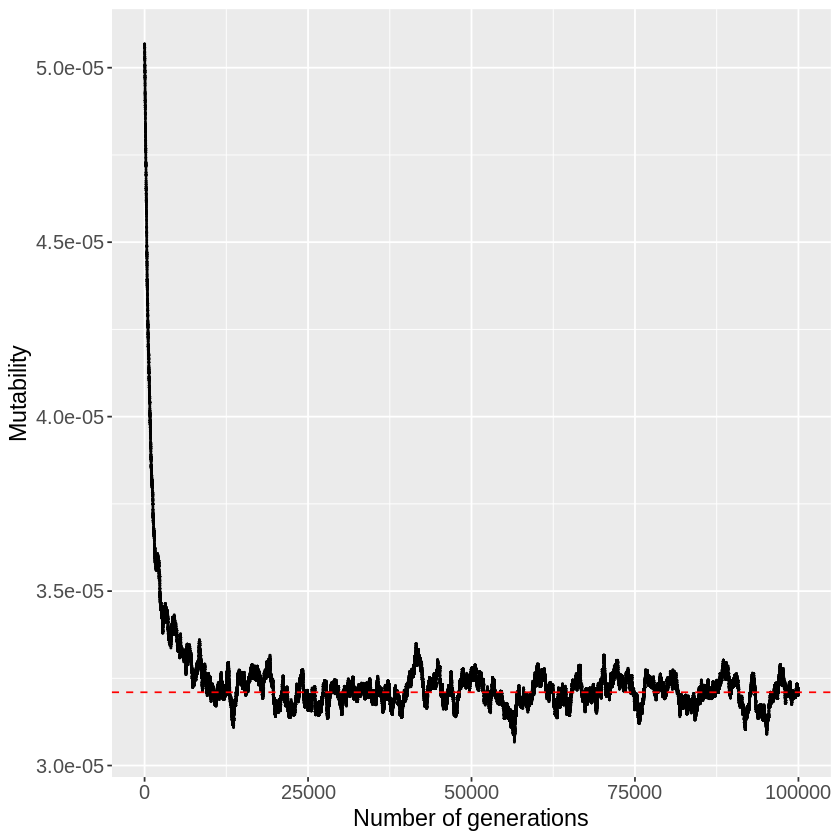

In [27]:
ggplot(augment(fit), aes(x=gen, y=avMut))  + geom_point(size = 0.15) +
#     geom_line(aes(y = .fitted), color = "red") + 
    xlab("Number of generations")+
    ylab("Mutability")+
    theme(axis.title.x = element_text(size = 14))+
    theme(axis.title.y = element_text(size = 14))+
    theme(axis.text.x= element_text(size = 12))+
    theme(axis.text.y= element_text(size = 12))+
    geom_hline(yintercept=3.21e-05,linetype="dashed", color = "red")

# ggsave("plots/expdecay_2021_04_16_noFitLine_horEqline.png")


# **try with the lowess functionality**

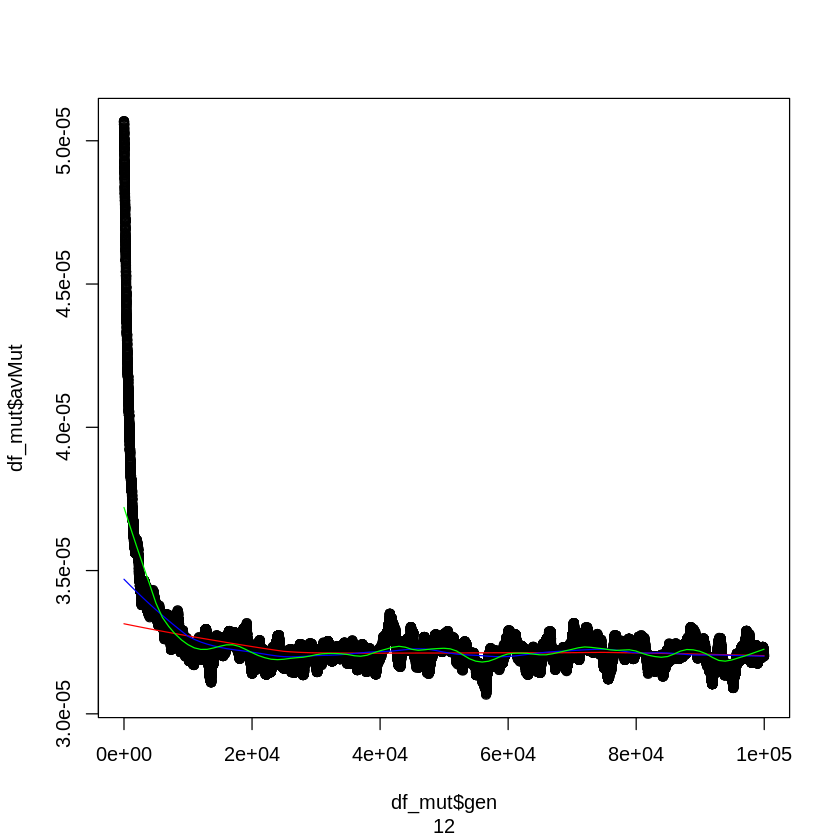

In [21]:
plot(df_mut$gen, df_mut$avMut,s=12)

#add lowess smoothing curve to plot
lines(lowess(df_mut$gen, df_mut$avMut,f=0.5), col='red')
lines(lowess(df_mut$gen, df_mut$avMut,f=0.2), col='blue')
lines(lowess(df_mut$gen, df_mut$avMut,f=0.1), col='green')